In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Se ha generado la imagen del vector promedio, revisar a la izquierda en carpetas
(65536, 200)


No handles with labels found to put in legend.


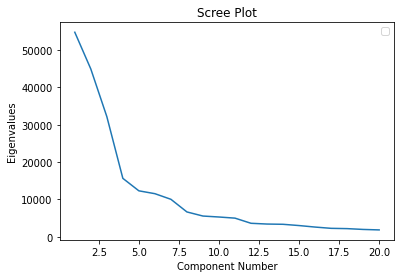

No handles with labels found to put in legend.


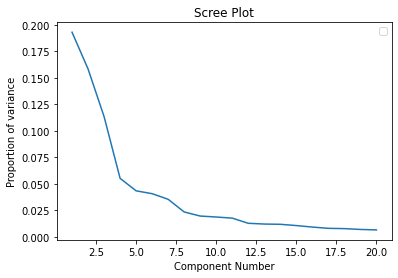

Procentaje de varianza:  0.81
Varianza Acumulada:  13.06
Matriz con vectores caracteristicos
[[-213.96044816   -2.46091315  -24.04754552 ...   -8.35416308
    -3.89697934   17.47171084]
 [-206.14660393   -1.58999774  -38.38768777 ...  -10.73381136
     1.84002352   16.60925304]
 [-205.70916419   -5.22723884  -33.42942272 ...  -13.7631107
     1.72457712   12.29497584]
 ...
 [ -21.26311335 -192.03764731  144.85127976 ...   23.28499116
   -22.02246025   -8.04398732]
 [ -15.62617553 -189.00162625  151.89443431 ...   25.59675277
   -13.64901445   -4.93546324]
 [ -26.39743378 -186.70999039  155.81090648 ...   26.20096766
   -11.23240945   -0.34812155]]
tiempo ejecucion:  0.0856732169787089


In [ ]:
import numpy as np
import os
from PIL import Image
import time
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

def preprocesamientoImagenes(uriCarpetaImagenes):
  listaArchivos = os.listdir(uriCarpetaImagenes)
  m = 0 
  vectorSumaTotal = np.zeros(65536) #El numero de filas se debe conocer con anterioridad, este valor es obtenido de pix_val_flat
  faceVectorSpace = []
  for imagenNombre in listaArchivos:
    temPNombre = uriCarpetaImagenes + imagenNombre
    matriz = np.array(Image.open(temPNombre).convert('L'))
    flattenVector = matriz.flatten()
    vectorSumaTotal = np.add(vectorSumaTotal,flattenVector)
    m = m + 1
    faceVectorSpace.append(flattenVector.tolist())
  
  vectorPromedio = list(map(lambda x: int(x/m),vectorSumaTotal.tolist()))

  matrizGeneral = []
  listaFilas = []
  for pixeles in vectorPromedio:
    if len(listaFilas) < 256:
      listaFilas.append(pixeles)
    if len(listaFilas) == 256:
      matrizGeneral.append(listaFilas)
      listaFilas = []
  matrizGeneral = np.array(matrizGeneral).astype(np.uint8)
  # print(matrizGeneral.shape)
  gr_im = Image.fromarray(matrizGeneral).save('imgVectorImagen.png')
  print('Se ha generado la imagen del vector promedio, revisar a la izquierda en carpetas')

  vectorPromedioNumpy = np.array(vectorPromedio)
  faceVectorSpaceNormalizado = []
  for vector in faceVectorSpace:
    tempVector = np.subtract(np.array(vector), vectorPromedioNumpy)
    faceVectorSpaceNormalizado.append(tempVector.tolist())

  return faceVectorSpaceNormalizado

def aplicacionPCA(faceVectorSpaceNormalizado):
  faceVectorSpaceNormalizado = np.transpose(faceVectorSpaceNormalizado)
  print(faceVectorSpaceNormalizado.shape)
  numeroComponentes = 20
  pca = PCA(n_components = numeroComponentes)
  X_reducido = pca.fit_transform(faceVectorSpaceNormalizado)
  x = pca.explained_variance_.tolist()
  x = list(map(lambda valor: round(valor,0), x))
  y = list(range(1,(numeroComponentes+1)))

  x_percentage = pca.explained_variance_ratio_.tolist()
  # x_percentage = list(map(lambda valor: round(valor,0), x_percentage))

  plt.plot(y, x)
  plt.title('Scree Plot')
  plt.ylabel('Eigenvalues')
  plt.xlabel('Component Number')
  plt.legend()
  plt.show()


  plt.plot(y, x_percentage)
  plt.title('Scree Plot')
  plt.ylabel('Proportion of variance')
  plt.xlabel('Component Number')
  plt.legend()
  plt.show()
  
  print('Procentaje de varianza: ',round(sum(x_percentage), 2))
  print('Varianza Acumulada: ', round(sum(pca.explained_variance_ratio_.cumsum()),2))

  autovectores = np.transpose(np.array(X_reducido)).tolist()
  nombreArchivoCont = 1
  for eigenVector in autovectores:
    temNombre = 'eigenvectornro'+str(nombreArchivoCont)+'.png'
    plotImagenes(eigenVector, temNombre)
    nombreArchivoCont = nombreArchivoCont + 1
  
  print('Matriz con vectores caracteristicos')
  print(X_reducido)


def plotImagenes(vectorPromedio, nombreImagen):
  matrizGeneral = []
  listaFilas = []
  for pixeles in vectorPromedio:
    if len(listaFilas) < 256:
      listaFilas.append(pixeles)
    if len(listaFilas) == 256:
      matrizGeneral.append(listaFilas)
      listaFilas = []
  matrizGeneral = np.array(matrizGeneral).astype(np.uint8)
  gr_im = Image.fromarray(matrizGeneral).save(nombreImagen)


if __name__ == '__main__':
  inicio = time.time()
  faceVectorSpaceNormalizado = preprocesamientoImagenes('/content/drive/MyDrive/MineriaDatos2/deber9/face_dataset/')
  aplicacionPCA(faceVectorSpaceNormalizado)

  final = time.time() - inicio
  print('tiempo ejecucion: ', (final/60))
  # regeneracionImagen(falttenVector)

In [ ]:
letra = '0.1824354362386466, 0.16700507778035173, 0.12056047744262757, 0.09379477008431271, 0.04035836404238719, 0.03686923695094583, 0.03534741756873461, 0.021402571360725358'
listaLetra = letra.replace(', ', ' ').split(' ')
listNumero = sum(list(map(lambda x: float(x), listaLetra)))
print(listNumero)

0.6977733514687315


In [ ]:
import os
listaArchivos = os.listdir('/content/drive/MyDrive/MineriaDatos2/deber9/face_dataset')
print(listaA)


['NA.NE1.199.jpg', 'NM.FE3.112.jpg', 'KR.DI2.87.jpg', 'TM.DI3.195.jpg', 'KR.SU2.81.jpg', 'MK.FE2.131.jpg', 'NM.SU2.102.jpg', 'KL.SA1.161.jpg', 'TM.HA3.182.jpg', 'KM.DI3.22.jpg', 'KL.AN1.167.jpg', 'NA.NE3.201.jpg', 'TM.SU3.189.jpg', 'TM.DI1.193.jpg', 'KM.HA4.7.jpg', 'MK.HA3.118.jpg', 'KA.AN3.41.jpg', 'KM.NE2.2.jpg', 'KL.SU2.165.jpg', 'NM.AN1.104.jpg', 'KA.FE2.46.jpg', 'KR.HA2.75.jpg', 'KA.SA2.34.jpg', 'NA.DI2.215.jpg', 'KL.DI1.170.jpg', 'NA.SU1.208.jpg', 'KM.AN2.18.jpg', 'KR.AN2.84.jpg', 'MK.DI3.130.jpg', 'TM.SA3.186.jpg', 'KL.HA2.159.jpg', 'MK.AN1.125.jpg', 'NA.SU3.210.jpg', 'KM.SU2.15.jpg', 'MK.FE2.132.jpg', 'NA.SA1.205.jpg', 'KR.SA3.79.jpg', 'KM.SU3.16.jpg', 'MK.HA1.116.jpg', 'NA.HA2.203.jpg', 'MK.AN2.126.jpg', 'NM.HA1.95.jpg', 'UY.DI3.151.jpg', 'TM.SA1.184.jpg', 'UY.SA2.141.jpg', 'UY.SA3.142.jpg', 'TM.SU1.187.jpg', 'KA.HA1.29.jpg', 'NA.DI3.216.jpg', 'NM.DI3.109.jpg', 'KM.SA2.10.jpg', 'NM.NE3.94.jpg', 'NM.SA3.100.jpg', 'KL.SA2.162.jpg', 'KR.FE2.90.jpg', 'UY.HA3.139.jpg', 'NA.SU2.209.

In [ ]:
vect = [120.345, 120.345, 120.345, 121.17, 121.17, 121.17, 121.995, 121.995, 121.995, 122.725, 122.725, 122.725, 123.4, 123.4, 123.4, 124.015, 124.015, 124.015, 124.98, 124.98, 124.98, 125.235, 125.235, 125.235, 126.91, 126.91, 126.91, 127.175, 127.175, 127.175, 127.865, 127.865, 127.865, 127.955, 127.955, 127.955, 128.82, 128.82, 128.82, 129.315, 129.315, 129.315, 130.42, 130.42, 130.42, 131.22, 131.22, 131.22, 131.735, 131.735, 131.735, 132.105, 132.105, 132.105, 132.435, 132.435, 132.435, 133.21, 133.21, 133.21, 134.275, 134.275, 134.275, 134.68, 134.68, 134.68, 135.785, 135.785, 135.785, 136.24, 136.24, 136.24, 138.055, 138.055, 138.055, 138.785, 138.785, 138.785, 139.925, 139.925, 139.925, 139.93, 139.93, 139.93, 139.925, 139.925, 139.925, 139.73, 139.73, 139.73, 141.15, 141.15, 141.15, 141.835, 141.835, 141.835, 142.74, 142.74, 142.74, 142.985, 142.985, 142.985, 143.49, 143.49, 143.49, 144.22, 144.22, 144.22, 144.695, 144.695, 144.695, 145.035, 145.035, 145.035, 145.145, 145.145, 145.145, 145.745, 145.745, 145.745, 146.625, 146.625, 146.625, 146.795, 146.795, 146.795, 147.095, 147.095, 147.095, 148.085, 148.085, 148.085, 148.32, 148.32, 148.32, 148.98, 148.98, 148.98, 149.84, 149.84, 149.84, 149.23, 149.23, 149.23, 150.5, 150.5, 150.5, 150.66, 150.66, 150.66, 150.885, 150.885, 150.885, 152.435, 152.435, 152.435, 152.19, 152.19, 152.19, 152.43, 152.43, 152.43, 152.67, 152.67, 152.67, 153.36, 153.36, 153.36, 153.82, 153.82, 153.82, 154.19, 154.19, 154.19, 155.9, 155.9, 155.9, 155.49, 155.49, 155.49, 156.225, 156.225, 156.225, 156.02, 156.02, 156.02, 156.75, 156.75, 156.75, 156.7, 156.7, 156.7, 157.165, 157.165, 157.165, 158.495, 158.495, 158.495, 158.96, 158.96, 158.96, 158.72, 158.72, 158.72, 158.77, 158.77, 158.77, 159.48, 159.48, 159.48, 160.21, 160.21, 160.21, 160.25, 160.25, 160.25, 160.78, 160.78, 160.78, 161.625, 161.625, 161.625, 161.505, 161.505, 161.505, 162.2, 162.2, 162.2, 162.505, 162.505, 162.505, 162.55, 162.55, 162.55, 162.9, 162.9, 162.9, 163.785, 163.785, 163.785, 163.64, 163.64, 163.64, 164.14, 164.14, 164.14, 164.51, 164.51, 164.51, 164.525, 164.525, 164.525, 163.72, 163.72, 163.72, 164.34, 164.34, 164.34, 164.005, 164.005, 164.005, 163.73, 163.73, 163.73, 164.88, 164.88, 164.88, 165.095, 165.095, 165.095, 165.765, 165.765, 165.765, 166.605, 166.605, 166.605, 166.61, 166.61, 166.61, 166.245, 166.245, 166.245, 166.575, 166.575, 166.575, 167.14, 167.14, 167.14, 166.685, 166.685, 166.685, 167.36, 167.36, 167.36, 167.19, 167.19, 167.19, 166.835, 166.835, 166.835, 166.525, 166.525, 166.525, 166.21, 166.21, 166.21, 167.2, 167.2, 167.2, 167.34, 167.34, 167.34, 166.9, 166.9, 166.9, 166.695, 166.695, 166.695, 167.31, 167.31, 167.31, 166.91, 166.91, 166.91, 167.295, 167.295, 167.295, 167.05, 167.05, 167.05, 166.785, 166.785, 166.785, 166.685, 166.685, 166.685, 166.74, 166.74, 166.74, 167.47, 167.47, 167.47, 167.45, 167.45, 167.45, 166.085, 166.085, 166.085, 166.885, 166.885, 166.885, 167.355, 167.355, 167.355, 167.65, 167.65, 167.65, 166.555, 166.555, 166.555, 166.57, 166.57, 166.57, 166.46, 166.46, 166.46, 166.55, 166.55, 166.55, 165.45, 165.45, 165.45, 165.93, 165.93, 165.93, 165.6, 165.6, 165.6, 165.12, 165.12, 165.12, 163.97, 163.97, 163.97, 164.755, 164.755, 164.755, 163.615, 163.615, 163.615, 162.795, 162.795, 162.795, 161.56, 161.56, 161.56, 162.61, 162.61, 162.61, 162.475, 162.475, 162.475, 161.6, 161.6, 161.6, 160.83, 160.83, 160.83, 161.245, 161.245, 161.245, 161.405, 161.405, 161.405, 163.9, 163.9, 163.9, 165.075, 165.075, 165.075, 166.075, 166.075, 166.075, 167.29, 167.29, 167.29, 168.485, 168.485, 168.485, 169.8, 169.8, 169.8, 170.9, 170.9, 170.9, 171.43, 171.43, 171.43, 171.795, 171.795, 171.795, 171.82, 171.82, 171.82, 172.34, 172.34, 172.34, 171.905, 171.905, 171.905, 171.78, 171.78, 171.78, 171.93, 171.93, 171.93, 171.98, 171.98, 171.98, 171.31, 171.31, 171.31, 170.96, 170.96, 170.96, 170.43, 170.43, 170.43, 171.11, 171.11, 171.11, 170.165, 170.165, 170.165, 169.835, 169.835, 169.835, 170.855, 170.855, 170.855, 170.57, 170.57, 170.57, 170.48, 170.48, 170.48, 171.285, 171.285, 171.285, 170.925, 170.925, 170.925, 171.135, 171.135, 171.135, 170.555, 170.555, 170.555, 170.45, 170.45, 170.45, 170.585, 170.585, 170.585, 171.665, 171.665, 171.665, 171.68, 171.68, 171.68, 172.1, 172.1, 172.1, 172.24, 172.24, 172.24, 171.645, 171.645, 171.645, 171.33, 171.33, 171.33, 171.575, 171.575, 171.575, 171.095, 171.095, 171.095, 171.595, 171.595, 171.595, 170.26, 170.26, 170.26, 169.925, 169.925, 169.925, 169.955, 169.955, 169.955, 170.105, 170.105, 170.105, 169.78, 169.78, 169.78, 170.575, 170.575, 170.575, 170.01, 170.01, 170.01, 169.635, 169.635, 169.635, 169.6, 169.6, 169.6, 169.76, 169.76, 169.76, 168.795, 168.795, 168.795, 169.355, 169.355, 169.355, 168.375, 168.375, 168.375, 168.66, 168.66, 168.66, 168.405, 168.405, 168.405, 167.495, 167.495, 167.495, 167.575, 167.575, 167.575, 166.795, 166.795, 166.795, 166.85, 166.85, 166.85, 167.385, 167.385, 167.385, 167.74, 167.74, 167.74, 167.07, 167.07, 167.07, 166.445, 166.445, 166.445, 166.6, 166.6, 166.6, 166.185, 166.185, 166.185, 165.835, 165.835, 165.835, 165.49, 165.49, 165.49, 164.845, 164.845, 164.845, 163.82, 163.82, 163.82, 163.46, 163.46, 163.46, 163.835, 163.835, 163.835, 162.67, 162.67, 162.67, 163.155, 163.155, 163.155, 163.35, 163.35, 163.35, 162.73, 162.73, 162.73, 162.74, 162.74, 162.74, 162.65, 162.65, 162.65, 161.855, 161.855, 161.855, 161.13, 161.13, 161.13, 161.115, 161.115, 161.115, 160.365, 160.365, 160.365, 160.095, 160.095, 160.095, 159.235, 159.235, 159.235, 158.9, 158.9, 158.9, 158.83, 158.83, 158.83, 158.57, 158.57, 158.57, 157.485, 157.485, 157.485, 156.55, 156.55, 156.55, 156.53, 156.53, 156.53, 156.405, 156.405, 156.405, 155.77, 155.77, 155.77, 154.645, 154.645, 154.645, 154.835, 154.835, 154.835, 155.06, 155.06, 155.06, 155.06, 155.06, 155.06, 154.165, 154.165, 154.165, 153.285, 153.285, 153.285, 152.915, 152.915, 152.915, 152.09, 152.09, 152.09, 151.86, 151.86, 151.86, 151.235, 151.235, 151.235, 150.87, 150.87, 150.87, 150.71, 150.71, 150.71, 150.35, 150.35, 150.35, 149.35, 149.35, 149.35, 148.88, 148.88, 148.88, 148.92, 148.92, 148.92, 148.785, 148.785, 148.785, 147.83, 147.83, 147.83, 147.125, 147.125, 147.125, 147.12, 147.12, 147.12, 146.845, 146.845, 146.845, 146.7, 146.7, 146.7, 146.69, 146.69, 146.69, 146.11, 146.11, 146.11, 145.77, 145.77, 145.77, 145.185, 145.185, 145.185, 144.64, 144.64, 144.64, 143.94, 143.94, 143.94, 121.585, 121.585, 121.585, 121.83, 121.83, 121.83, 122.425, 122.425, 122.425, 123.435, 123.435, 123.435, 124.45, 124.45, 124.45, 125.13, 125.13, 125.13, 125.905, 125.905, 125.905, 126.035, 126.035, 126.035, 127.17, 127.17, 127.17, 127.415, 127.415, 127.415, 128.24, 128.24, 128.24, 128.405, 128.405, 128.405, 129.515, 129.515, 129.515, 130.085, 130.085, 130.085, 130.895, 130.895, 130.895, 131.54, 131.54, 131.54, 132.665, 132.665, 132.665, 133.075, 133.075, 133.075, 133.47, 133.47, 133.47, 133.98, 133.98, 133.98, 134.85, 134.85, 134.85, 135.395, 135.395, 135.395, 136.785, 136.785, 136.785, 137.305, 137.305, 137.305, 138.68, 138.68, 138.68, 139.29, 139.29, 139.29, 140.415, 140.415, 140.415, 140.3, 140.3, 140.3, 140.595, 140.595, 140.595, 140.8, 140.8, 140.8, 141.7, 141.7, 141.7, 142.555, 142.555, 142.555, 142.885, 142.885, 142.885, 143.215, 143.215, 143.215, 143.725, 143.725, 143.725, 144.465, 144.465, 144.465, 144.75, 144.75, 144.75, 145.095, 145.095, 145.095, 145.385, 145.385, 145.385, 146.07, 146.07, 146.07, 147.14, 147.14, 147.14, 147.235, 147.235, 147.235, 147.655, 147.655, 147.655, 148.185, 148.185, 148.185, 148.55, 148.55, 148.55, 149.055, 149.055, 149.055, 149.75, 149.75, 149.75, 149.25, 149.25, 149.25, 150.885, 150.885, 150.885, 150.74, 150.74, 150.74, 151.085, 151.085, 151.085, 152.085, 152.085, 152.085, 152.525, 152.525, 152.525, 152.82, 152.82, 152.82, 153.325, 153.325, 153.325, 153.655, 153.655, 153.655, 154.02, 154.02, 154.02, 154.24, 154.24, 154.24, 155.655, 155.655, 155.655, 155.335, 155.335, 155.335, 156.37, 156.37, 156.37, 156.485, 156.485, 156.485, 157.25, 157.25, 157.25, 157.14, 157.14, 157.14, 157.615, 157.615, 157.615, 158.53, 158.53, 158.53, 158.39, 158.39, 158.39, 158.645, 158.645, 158.645, 159.03, 159.03, 159.03, 159.615, 159.615, 159.615, 159.98, 159.98, 159.98, 160.475, 160.475, 160.475, 161.255, 161.255, 161.255, 161.905, 161.905, 161.905, 161.98, 161.98, 161.98, 162.65, 162.65, 162.65, 163.02, 163.02, 163.02, 162.945, 162.945, 162.945, 163.06, 163.06, 163.06, 163.445, 163.445, 163.445, 164.24, 164.24, 164.24, 164.835, 164.835, 164.835, 164.785, 164.785, 164.785, 164.63, 164.63, 164.63, 164.165, 164.165, 164.165, 164.365, 164.365, 164.365, 164.05, 164.05, 164.05, 164.315, 164.315, 164.315, 165.69, 165.69, 165.69, 165.375, 165.375, 165.375, 165.315, 165.315, 165.315, 165.82, 165.82, 165.82, 165.975, 165.975, 165.975, 166.055, 166.055, 166.055, 166.75, 166.75, 166.75, 167.14, 167.14, 167.14, 167.04, 167.04, 167.04, 167.455, 167.455, 167.455, 166.58, 166.58, 166.58, 166.385, 166.385, 166.385, 166.225, 166.225, 166.225, 166.115, 166.115, 166.115, 166.78, 166.78, 166.78, 166.685, 166.685, 166.685, 166.715, 166.715, 166.715, 166.985, 166.985, 166.985, 167.425, 167.425, 167.425, 167.25, 167.25, 167.25, 167.58, 167.58, 167.58, 167.155, 167.155, 167.155, 166.81, 166.81, 166.81, 165.845, 165.845, 165.845, 165.07, 165.07, 165.07, 166.075, 166.075, 166.075, 166.645, 166.645, 166.645, 166.33, 166.33, 166.33, 165.93, 165.93, 165.93, 165.905, 165.905, 165.905, 165.965, 165.965, 165.965, 165.515, 165.515, 165.515, 166.125, 166.125, 166.125, 165.77, 165.77, 165.77, 165.865, 165.865, 165.865, 165.455, 165.455, 165.455, 164.895, 164.895, 164.895, 164.415, 164.415, 164.415, 163.87, 163.87, 163.87, 164.0, 164.0, 164.0, 163.465, 163.465, 163.465, 163.54, 163.54, 163.54, 163.31, 163.31, 163.31, 163.825, 163.825, 163.825, 164.1, 164.1, 164.1, 163.82, 163.82, 163.82, 162.875, 162.875, 162.875, 162.25, 162.25, 162.25, 161.91, 161.91, 161.91, 161.91, 161.91, 161.91, 162.62, 162.62, 162.62, 164.065, 164.065, 164.065, 164.925, 164.925, 164.925, 166.15, 166.15, 166.15, 167.405, 167.405, 167.405, 167.96, 167.96, 167.96, 169.83, 169.83, 169.83, 169.485, 169.485, 169.485, 169.905, 169.905, 169.905, 170.545, 170.545, 170.545, 171.045, 171.045, 171.045, 170.65, 170.65, 170.65, 170.655, 170.655, 170.655, 170.96, 170.96, 170.96, 170.67, 170.67, 170.67, 170.155, 170.155, 170.155, 169.7, 169.7, 169.7, 169.63, 169.63, 169.63, 170.55, 170.55, 170.55, 169.67, 169.67, 169.67, 169.31, 169.31, 169.31, 169.705, 169.705, 169.705, 170.49, 170.49, 170.49, 170.26, 170.26, 170.26, 170.965, 170.965, 170.965, 170.745, 170.745, 170.745, 171.03, 171.03, 171.03, 170.95, 170.95, 170.95, 171.04, 171.04, 171.04, 171.08, 171.08, 171.08, 171.6, 171.6, 171.6, 171.465, 171.465, 171.465, 171.9, 171.9, 171.9, 172.175, 172.175, 172.175, 171.87, 171.87, 171.87, 171.81, 171.81, 171.81, 171.945, 171.945, 171.945, 171.42, 171.42, 171.42, 171.21, 171.21, 171.21, 170.545, 170.545, 170.545, 170.62, 170.62, 170.62, 170.51, 170.51, 170.51, 170.635, 170.635, 170.635, 169.96, 169.96, 169.96, 170.715, 170.715, 170.715, 169.79, 169.79, 169.79, 170.0, 170.0, 170.0, 170.015, 170.015, 170.015, 170.13, 170.13, 170.13, 169.385, 169.385, 169.385, 169.895, 169.895, 169.895, 169.36, 169.36, 169.36, 169.18, 169.18, 169.18, 168.585, 168.585, 168.585, 168.09, 168.09, 168.09, 168.01, 168.01, 168.01, 167.425, 167.425, 167.425, 167.295, 167.295, 167.295, 167.685, 167.685, 167.685, 167.775, 167.775, 167.775, 167.435, 167.435, 167.435, 166.945, 166.945, 166.945, 167.525, 167.525, 167.525, 166.725, 166.725, 166.725, 166.055, 166.055, 166.055, 165.855, 165.855, 165.855, 165.57, 165.57, 165.57, 165.035, 165.035, 165.035, 164.305, 164.305, 164.305, 163.985, 163.985, 163.985, 163.685, 163.685, 163.685, 163.365, 163.365, 163.365, 163.44, 163.44, 163.44, 162.925, 162.925, 162.925, 163.07, 163.07, 163.07, 162.6, 162.6, 162.6, 162.11, 162.11, 162.11, 161.775, 161.775, 161.775, 161.315, 161.315, 161.315, 160.62, 160.62, 160.62, 160.595, 160.595, 160.595, 159.96, 159.96, 159.96, 159.59, 159.59, 159.59, 159.04, 159.04, 159.04, 158.62, 158.62, 158.62, 157.265, 157.265, 157.265, 157.085, 157.085, 157.085, 156.545, 156.545, 156.545, 156.31, 156.31, 156.31, 155.8, 155.8, 155.8, 155.135, 155.135, 155.135, 155.17, 155.17, 155.17, 155.06, 155.06, 155.06, 154.87, 154.87, 154.87, 153.885, 153.885, 153.885, 153.22, 153.22, 153.22, 152.905, 152.905, 152.905, 151.97, 151.97, 151.97, 151.625, 151.625, 151.625, 151.175, 151.175, 151.175, 150.885, 150.885, 150.885, 150.62, 150.62, 150.62, 150.265, 150.265, 150.265, 149.62, 149.62, 149.62, 149.18, 149.18, 149.18, 148.98, 148.98, 148.98, 148.845, 148.845, 148.845, 148.18, 148.18, 148.18, 147.77, 147.77, 147.77, 147.58, 147.58, 147.58, 147.0, 147.0, 147.0, 146.77, 146.77, 146.77, 146.6, 146.6, 146.6, 146.025, 146.025, 146.025, 145.695, 145.695, 145.695, 145.35, 145.35, 145.35, 144.86, 144.86, 144.86, 144.06, 144.06, 144.06, 122.45, 122.45, 122.45, 122.44, 122.44, 122.44, 123.035, 123.035, 123.035, 124.205, 124.205, 124.205, 125.275, 125.275, 125.275, 125.81, 125.81, 125.81, 126.56, 126.56, 126.56, 126.74, 126.74, 126.74, 127.29, 127.29, 127.29, 127.72, 127.72, 127.72, 128.64, 128.64, 128.64, 129.03, 129.03, 129.03, 129.94, 129.94, 129.94, 130.35, 130.35, 130.35, 130.825, 130.825, 130.825, 131.375, 131.375, 131.375, 133.435, 133.435, 133.435, 133.925, 133.925, 133.925, 134.295, 134.295, 134.295, 134.575, 134.575, 134.575, 135.35, 135.35, 135.35, 135.84, 135.84, 135.84, 137.225, 137.225, 137.225, 137.475, 137.475, 137.475, 139.11, 139.11, 139.11, 139.565, 139.565, 139.565, 139.88, 139.88, 139.88, 139.785, 139.785, 139.785, 140.495, 140.495, 140.495, 140.945, 140.945, 140.945, 141.59, 141.59, 141.59, 142.515, 142.515, 142.515, 142.79, 142.79, 142.79, 143.16, 143.16, 143.16, 143.305, 143.305, 143.305, 144.18, 144.18, 144.18, 144.41, 144.41, 144.41, 145.12, 145.12, 145.12, 145.485, 145.485, 145.485, 146.085, 146.085, 146.085, 146.92, 146.92, 146.92, 147.075, 147.075, 147.075, 147.535, 147.535, 147.535, 147.685, 147.685, 147.685, 148.295, 148.295, 148.295, 149.055, 149.055, 149.055, 149.99, 149.99, 149.99, 149.82, 149.82, 149.82, 150.985, 150.985, 150.985, 151.04, 151.04, 151.04, 151.28, 151.28, 151.28, 151.85, 151.85, 151.85, 152.52, 152.52, 152.52, 153.115, 153.115, 153.115, 153.83, 153.83, 153.83, 153.86, 153.86, 153.86, 154.015, 154.015, 154.015, 154.175, 154.175, 154.175, 154.93, 154.93, 154.93, 154.955, 154.955, 154.955, 156.14, 156.14, 156.14, 156.46, 156.46, 156.46, 157.24, 157.24, 157.24, 157.145, 157.145, 157.145, 157.56, 157.56, 157.56, 158.075, 158.075, 158.075, 157.705, 157.705, 157.705, 158.295, 158.295, 158.295, 158.96, 158.96, 158.96, 159.225, 159.225, 159.225, 159.615, 159.615, 159.615, 160.3, 160.3, 160.3, 160.98, 160.98, 160.98, 161.38, 161.38, 161.38, 161.755, 161.755, 161.755, 162.3, 162.3, 162.3, 162.9, 162.9, 162.9, 162.935, 162.935, 162.935, 163.17, 163.17, 163.17, 163.375, 163.375, 163.375, 164.04, 164.04, 164.04, 164.275, 164.275, 164.275, 164.065, 164.065, 164.065, 163.775, 163.775, 163.775, 164.065, 164.065, 164.065, 164.04, 164.04, 164.04, 164.335, 164.335, 164.335, 164.83, 164.83, 164.83, 165.37, 165.37, 165.37, 165.14, 165.14, 165.14, 165.495, 165.495, 165.495, 165.785, 165.785, 165.785, 166.06, 166.06, 166.06, 166.285, 166.285, 166.285, 166.625, 166.625, 166.625, 166.655, 166.655, 166.655, 165.865, 165.865, 165.865, 166.44, 166.44, 166.44, 166.02, 166.02, 166.02, 165.505, 165.505, 165.505, 165.625, 165.625, 165.625, 165.42, 165.42, 165.42, 165.875, 165.875, 165.875, 165.925, 165.925, 165.925, 165.82, 165.82, 165.82, 166.45, 166.45, 166.45, 166.935, 166.935, 166.935, 166.47, 166.47, 166.47, 166.07, 166.07, 166.07, 165.235, 165.235, 165.235, 165.025, 165.025, 165.025, 164.655, 164.655, 164.655, 165.045, 165.045, 165.045, 164.94, 164.94, 164.94, 165.835, 165.835, 165.835, 166.43, 166.43, 166.43, 165.725, 165.725, 165.725, 165.555, 165.555, 165.555, 165.835, 165.835, 165.835, 164.985, 164.985, 164.985, 164.92, 164.92, 164.92, 164.68, 164.68, 164.68, 165.2, 165.2, 165.2, 164.215, 164.215, 164.215, 163.615, 163.615, 163.615, 163.065, 163.065, 163.065, 162.065, 162.065, 162.065, 161.9, 161.9, 161.9, 161.76, 161.76, 161.76, 161.9, 161.9, 161.9, 162.555, 162.555, 162.555, 162.27, 162.27, 162.27, 162.395, 162.395, 162.395, 161.925, 161.925, 161.925, 161.96, 161.96, 161.96, 161.565, 161.565, 161.565, 162.075, 162.075, 162.075, 161.125, 161.125, 161.125, 161.225, 161.225, 161.225, 162.74, 162.74, 162.74, 165.0, 165.0, 165.0, 166.13, 166.13, 166.13, 166.79, 166.79, 166.79, 167.045, 167.045, 167.045, 167.9, 167.9, 167.9, 167.28, 167.28, 167.28, 167.99, 167.99, 167.99, 168.645, 168.645, 168.645, 168.835, 168.835, 168.835, 169.3, 169.3, 169.3, 169.18, 169.18, 169.18, 169.485, 169.485, 169.485, 168.82, 168.82, 168.82, 169.63, 169.63, 169.63, 169.115, 169.115, 169.115, 168.825, 168.825, 168.825, 169.215, 169.215, 169.215, 169.02, 169.02, 169.02, 168.825, 168.825, 168.825, 169.095, 169.095, 169.095, 169.935, 169.935, 169.935, 169.685, 169.685, 169.685, 170.405, 170.405, 170.405, 170.17, 170.17, 170.17, 170.455, 170.455, 170.455, 170.65, 170.65, 170.65, 171.01, 171.01, 171.01, 170.865, 170.865, 170.865, 171.45, 171.45, 171.45, 171.03, 171.03, 171.03, 171.49, 171.49, 171.49, 171.475, 171.475, 171.475, 171.78, 171.78, 171.78, 171.72, 171.72, 171.72, 171.7, 171.7, 171.7, 170.99, 170.99, 170.99, 171.37, 171.37, 171.37, 171.085, 171.085, 171.085, 171.1, 171.1, 171.1, 170.59, 170.59, 170.59, 170.655, 170.655, 170.655, 170.13, 170.13, 170.13, 170.86, 170.86, 170.86, 169.76, 169.76, 169.76, 170.03, 170.03, 170.03, 169.78, 169.78, 169.78, 169.52, 169.52, 169.52, 168.885, 168.885, 168.885, 169.46, 169.46, 169.46, 169.345, 169.345, 169.345, 168.955, 168.955, 168.955, 168.135, 168.135, 168.135, 168.03, 168.03, 168.03, 167.745, 167.745, 167.745, 167.7, 167.7, 167.7, 167.3, 167.3, 167.3, 167.975, 167.975, 167.975, 167.655, 167.655, 167.655, 167.46, 167.46, 167.46, 166.725, 166.725, 166.725, 167.055, 167.055, 167.055, 166.3, 166.3, 166.3, 165.8, 165.8, 165.8, 165.46, 165.46, 165.46, 165.225, 165.225, 165.225, 165.07, 165.07, 165.07, 164.455, 164.455, 164.455, 163.855, 163.855, 163.855, 164.25, 164.25, 164.25, 163.555, 163.555, 163.555, 163.65, 163.65, 163.65, 162.975, 162.975, 162.975, 163.02, 163.02, 163.02, 162.325, 162.325, 162.325, 162.085, 162.085, 162.085, 161.91, 161.91, 161.91, 161.805, 161.805, 161.805, 160.83, 160.83, 160.83, 160.64, 160.64, 160.64, 160.11, 160.11, 160.11, 159.66, 159.66, 159.66, 158.975, 158.975, 158.975, 158.875, 158.875, 158.875, 157.615, 157.615, 157.615, 157.625, 157.625, 157.625, 156.685, 156.685, 156.685, 156.28, 156.28, 156.28, 155.58, 155.58, 155.58, 155.125, 155.125, 155.125, 154.885, 154.885, 154.885, 154.495, 154.495, 154.495, 154.145, 154.145, 154.145, 153.87, 153.87, 153.87, 153.545, 153.545, 153.545, 153.425, 153.425, 153.425, 152.545, 152.545, 152.545, 151.92, 151.92, 151.92, 151.67, 151.67, 151.67, 151.3, 151.3, 151.3, 150.76, 150.76, 150.76, 150.81, 150.81, 150.81, 149.97, 149.97, 149.97, 149.36, 149.36, 149.36, 148.95, 148.95, 148.95, 148.665, 148.665, 148.665, 148.225, 148.225, 148.225, 147.995, 147.995, 147.995, 147.6, 147.6, 147.6, 147.51, 147.51, 147.51, 147.075, 147.075, 147.075, 146.785, 146.785, 146.785, 146.01, 146.01, 146.01, 145.985, 145.985, 145.985, 145.77, 145.77, 145.77, 145.34, 145.34, 145.34, 144.455, 144.455, 144.455, 123.085, 123.085, 123.085, 123.42, 123.42, 123.42, 124.35, 124.35, 124.35, 125.52, 125.52, 125.52, 126.17, 126.17, 126.17, 126.425, 126.425, 126.425, 127.385, 127.385, 127.385, 127.93, 127.93, 127.93, 128.425, 128.425, 128.425, 128.85, 128.85, 128.85, 129.73, 129.73, 129.73, 129.98, 129.98, 129.98, 130.66, 130.66, 130.66, 131.02, 131.02, 131.02, 131.55, 131.55, 131.55, 132.295, 132.295, 132.295, 133.88, 133.88, 133.88, 134.535, 134.535, 134.535, 135.21, 135.21, 135.21, 135.35, 135.35, 135.35, 135.97, 135.97, 135.97, 136.415, 136.415, 136.415, 137.675, 137.675, 137.675, 137.815, 137.815, 137.815, 139.7, 139.7, 139.7, 139.795, 139.795, 139.795, 139.645, 139.645, 139.645, 139.78, 139.78, 139.78, 140.71, 140.71, 140.71, 141.025, 141.025, 141.025, 141.685, 141.685, 141.685, 143.155, 143.155, 143.155, 143.315, 143.315, 143.315, 143.75, 143.75, 143.75, 143.765, 143.765, 143.765, 144.67, 144.67, 144.67, 144.88, 144.88, 144.88, 146.035, 146.035, 146.035, 146.28, 146.28, 146.28, 146.73, 146.73, 146.73, 147.5, 147.5, 147.5, 147.955, 147.955, 147.955, 148.52, 148.52, 148.52, 148.555, 148.555, 148.555, 149.02, 149.02, 149.02, 149.845, 149.845, 149.845, 150.85, 150.85, 150.85, 151.225, 151.225, 151.225, 151.32, 151.32, 151.32, 151.71, 151.71, 151.71, 151.81, 151.81, 151.81, 152.06, 152.06, 152.06, 152.615, 152.615, 152.615, 153.205, 153.205, 153.205, 153.85, 153.85, 153.85, 153.665, 153.665, 153.665, 154.33, 154.33, 154.33, 154.47, 154.47, 154.47, 154.945, 154.945, 154.945, 154.95, 154.95, 154.95, 156.085, 156.085, 156.085, 156.28, 156.28, 156.28, 157.205, 157.205, 157.205, 157.28, 157.28, 157.28, 157.635, 157.635, 157.635, 157.455, 157.455, 157.455, 157.9, 157.9, 157.9, 158.375, 158.375, 158.375, 159.345, 159.345, 159.345, 159.455, 159.455, 159.455, 159.49, 159.49, 159.49, 160.19, 160.19, 160.19, 160.95, 160.95, 160.95, 161.075, 161.075, 161.075, 161.795, 161.795, 161.795, 162.215, 162.215, 162.215, 162.96, 162.96, 162.96, 163.15, 163.15, 163.15, 163.465, 163.465, 163.465, 163.365, 163.365, 163.365, 163.79, 163.79, 163.79, 163.63, 163.63, 163.63, 163.935, 163.935, 163.935, 163.525, 163.525, 163.525, 164.155, 164.155, 164.155, 164.12, 164.12, 164.12, 164.92, 164.92, 164.92, 165.025, 165.025, 165.025, 165.41, 165.41, 165.41, 165.4, 165.4, 165.4, 166.43, 166.43, 166.43, 166.075, 166.075, 166.075, 166.16, 166.16, 166.16, 166.28, 166.28, 166.28, 166.155, 166.155, 166.155, 165.94, 165.94, 165.94, 165.79, 165.79, 165.79, 166.29, 166.29, 166.29, 166.165, 166.165, 166.165, 165.225, 165.225, 165.225, 165.12, 165.12, 165.12, 165.885, 165.885, 165.885, 166.7, 166.7, 166.7, 166.12, 166.12, 166.12, 165.81, 165.81, 165.81, 166.06, 166.06, 166.06, 166.27, 166.27, 166.27, 165.275, 165.275, 165.275, 165.24, 165.24, 165.24, 164.61, 164.61, 164.61, 164.8, 164.8, 164.8, 164.66, 164.66, 164.66, 164.895, 164.895, 164.895, 164.465, 164.465, 164.465, 164.97, 164.97, 164.97, 165.875, 165.875, 165.875, 165.74, 165.74, 165.74, 165.215, 165.215, 165.215, 164.685, 164.685, 164.685, 163.59, 163.59, 163.59, 164.005, 164.005, 164.005, 163.565, 163.565, 163.565, 164.33, 164.33, 164.33, 163.285, 163.285, 163.285, 162.205, 162.205, 162.205, 161.785, 161.785, 161.785, 160.765, 160.765, 160.765, 159.425, 159.425, 159.425, 160.86, 160.86, 160.86, 161.33, 161.33, 161.33, 161.61, 161.61, 161.61, 161.715, 161.715, 161.715, 162.94, 162.94, 162.94, 162.495, 162.495, 162.495, 161.53, 161.53, 161.53, 162.23, 162.23, 162.23, 162.05, 162.05, 162.05, 160.85, 160.85, 160.85, 162.28, 162.28, 162.28, 163.165, 163.165, 163.165, 163.94, 163.94, 163.94, 164.07, 164.07, 164.07, 164.11, 164.11, 164.11, 164.565, 164.565, 164.565, 165.11, 165.11, 165.11, 165.555, 165.555, 165.555, 166.83, 166.83, 166.83, 167.405, 167.405, 167.405, 166.905, 166.905, 166.905, 167.375, 167.375, 167.375, 167.27, 167.27, 167.27, 167.33, 167.33, 167.33, 168.365, 168.365, 168.365, 169.01, 169.01, 169.01, 168.51, 168.51, 168.51, 168.92, 168.92, 168.92, 169.48, 169.48, 169.48, 168.79, 168.79, 168.79, 169.375, 169.375, 169.375, 169.405, 169.405, 169.405, 170.19, 170.19, 170.19, 169.865, 169.865, 169.865, 170.765, 170.765, 170.765, 170.65, 170.65, 170.65, 170.67, 170.67, 170.67, 170.875, 170.875, 170.875, 171.245, 171.245, 171.245, 170.675, 170.675, 170.675, 171.045, 171.045, 171.045, 170.9, 170.9, 170.9, 171.26, 171.26, 171.26, 171.22, 171.22, 171.22, 171.295, 171.295, 171.295, 171.35, 171.35, 171.35, 171.295, 171.295, 171.295, 170.645, 170.645, 170.645, 170.92, 170.92, 170.92, 170.735, 170.735, 170.735, 170.33, 170.33, 170.33, 169.915, 169.915, 169.915, 170.07, 170.07, 170.07, 169.96, 169.96, 169.96, 170.54, 170.54, 170.54, 169.235, 169.235, 169.235, 170.125, 170.125, 170.125, 169.855, 169.855, 169.855, 169.415, 169.415, 169.415, 168.725, 168.725, 168.725, 168.965, 168.965, 168.965, 168.91, 168.91, 168.91, 168.745, 168.745, 168.745, 168.055, 168.055, 168.055, 168.095, 168.095, 168.095, 167.52, 167.52, 167.52, 167.76, 167.76, 167.76, 167.39, 167.39, 167.39, 168.22, 168.22, 168.22, 167.75, 167.75, 167.75, 167.685, 167.685, 167.685, 166.69, 166.69, 166.69, 167.15, 167.15, 167.15, 166.205, 166.205, 166.205, 165.775, 165.775, 165.775, 165.13, 165.13, 165.13, 165.06, 165.06, 165.06, 164.96, 164.96, 164.96, 164.595, 164.595, 164.595, 163.895, 163.895, 163.895, 164.185, 164.185, 164.185, 163.84, 163.84, 163.84, 164.09, 164.09, 164.09, 163.13, 163.13, 163.13, 163.015, 163.015, 163.015, 162.275, 162.275, 162.275, 161.98, 161.98, 161.98, 161.545, 161.545, 161.545, 161.98, 161.98, 161.98, 160.89, 160.89, 160.89, 160.86, 160.86, 160.86, 160.23, 160.23, 160.23, 159.935, 159.935, 159.935, 159.37, 159.37, 159.37, 159.635, 159.635, 159.635, 158.62, 158.62, 158.62, 158.21, 158.21, 158.21, 157.385, 157.385, 157.385, 157.015, 157.015, 157.015, 156.165, 156.165, 156.165, 155.66, 155.66, 155.66, 155.16, 155.16, 155.16, 154.665, 154.665, 154.665, 154.12, 154.12, 154.12, 154.015, 154.015, 154.015, 153.575, 153.575, 153.575, 153.5, 153.5, 153.5, 152.675, 152.675, 152.675, 152.165, 152.165, 152.165, 151.925, 151.925, 151.925, 151.58, 151.58, 151.58, 150.905, 150.905, 150.905, 151.235, 151.235, 151.235, 150.35, 150.35, 150.35, 149.83, 149.83, 149.83, 149.65, 149.65, 149.65, 149.29, 149.29, 149.29, 149.07, 149.07, 149.07, 148.705, 148.705, 148.705, 148.16, 148.16, 148.16, 147.8, 147.8, 147.8, 147.27, 147.27, 147.27, 146.95, 146.95, 146.95, 146.225, 146.225, 146.225, 146.195, 146.195, 146.195, 146.015, 146.015, 146.015, 145.54, 145.54, 145.54, 144.79, 144.79, 144.79, 123.69, 123.69, 123.69, 124.325, 124.325, 124.325, 125.69, 125.69, 125.69, 126.815, 126.815, 126.815, 127.22, 127.22, 127.22, 127.385, 127.385, 127.385, 128.425, 128.425, 128.425, 129.3, 129.3, 129.3, 129.68, 129.68, 129.68, 130.055, 130.055, 130.055, 130.86, 130.86, 130.86, 130.92, 130.92, 130.92, 131.585, 131.585, 131.585, 132.05, 132.05, 132.05, 132.795, 132.795, 132.795, 133.65, 133.65, 133.65, 134.495, 134.495, 134.495, 135.375, 135.375, 135.375, 136.39, 136.39, 136.39, 136.31, 136.31, 136.31, 136.825, 136.825, 136.825, 137.295, 137.295, 137.295, 138.73, 138.73, 138.73, 139.115, 139.115, 139.115, 140.185, 140.185, 140.185, 140.135, 140.135, 140.135, 140.31, 140.31, 140.31, 140.815, 140.815, 140.815, 141.555, 141.555, 141.555, 141.56, 141.56, 141.56, 141.965, 141.965, 141.965, 143.74, 143.74, 143.74, 143.75, 143.75, 143.75, 144.33, 144.33, 144.33, 144.505, 144.505, 144.505, 145.165, 145.165, 145.165, 145.405, 145.405, 145.405, 146.725, 146.725, 146.725, 146.87, 146.87, 146.87, 147.115, 147.115, 147.115, 147.61, 147.61, 147.61, 148.665, 148.665, 148.665, 149.25, 149.25, 149.25, 149.61, 149.61, 149.61, 149.435, 149.435, 149.435, 150.025, 150.025, 150.025, 150.765, 150.765, 150.765, 151.285, 151.285, 151.285, 151.46, 151.46, 151.46, 152.04, 152.04, 152.04, 152.16, 152.16, 152.16, 152.365, 152.365, 152.365, 153.205, 153.205, 153.205, 153.475, 153.475, 153.475, 154.19, 154.19, 154.19, 153.54, 153.54, 153.54, 154.175, 154.175, 154.175, 154.6, 154.6, 154.6, 155.125, 155.125, 155.125, 155.13, 155.13, 155.13, 156.06, 156.06, 156.06, 156.255, 156.255, 156.255, 157.285, 157.285, 157.285, 157.405, 157.405, 157.405, 157.82, 157.82, 157.82, 157.45, 157.45, 157.45, 158.045, 158.045, 158.045, 158.9, 158.9, 158.9, 160.065, 160.065, 160.065, 160.0, 160.0, 160.0, 160.04, 160.04, 160.04, 160.515, 160.515, 160.515, 161.29, 161.29, 161.29, 161.34, 161.34, 161.34, 162.005, 162.005, 162.005, 162.095, 162.095, 162.095, 162.855, 162.855, 162.855, 163.005, 163.005, 163.005, 163.37, 163.37, 163.37, 163.02, 163.02, 163.02, 163.455, 163.455, 163.455, 163.415, 163.415, 163.415, 164.095, 164.095, 164.095, 163.935, 163.935, 163.935, 164.15, 164.15, 164.15, 164.19, 164.19, 164.19, 164.775, 164.775, 164.775, 164.625, 164.625, 164.625, 165.07, 165.07, 165.07, 165.25, 165.25, 165.25, 166.515, 166.515, 166.515, 165.745, 165.745, 165.745, 165.815, 165.815, 165.815, 165.89, 165.89, 165.89, 165.655, 165.655, 165.655, 165.43, 165.43, 165.43, 165.765, 165.765, 165.765, 166.0, 166.0, 166.0, 165.64, 165.64, 165.64, 165.305, 165.305, 165.305, 165.26, 165.26, 165.26, 165.695, 165.695, 165.695, 165.575, 165.575, 165.575, 164.45, 164.45, 164.45, 164.6, 164.6, 164.6, 164.445, 164.445, 164.445, 164.595, 164.595, 164.595, 164.455, 164.455, 164.455, 164.285, 164.285, 164.285, 163.57, 163.57, 163.57, 163.975, 163.975, 163.975, 164.195, 164.195, 164.195, 164.495, 164.495, 164.495, 163.87, 163.87, 163.87, 163.85, 163.85, 163.85, 164.63, 164.63, 164.63, 163.98, 163.98, 163.98, 163.585, 163.585, 163.585, 163.315, 163.315, 163.315, 162.635, 162.635, 162.635, 162.535, 162.535, 162.535, 162.35, 162.35, 162.35, 162.98, 162.98, 162.98, 160.925, 160.925, 160.925, 160.02, 160.02, 160.02, 160.045, 160.045, 160.045, 160.0, 160.0, 160.0, 160.21, 160.21, 160.21, 160.405, 160.405, 160.405, 160.445, 160.445, 160.445, 160.73, 160.73, 160.73, 160.62, 160.62, 160.62, 161.05, 161.05, 161.05, 160.95, 160.95, 160.95, 160.81, 160.81, 160.81, 161.025, 161.025, 161.025, 161.44, 161.44, 161.44, 160.125, 160.125, 160.125, 162.89, 162.89, 162.89, 161.945, 161.945, 161.945, 162.605, 162.605, 162.605, 162.865, 162.865, 162.865, 163.45, 163.45, 163.45, 163.43, 163.43, 163.43, 164.275, 164.275, 164.275, 163.855, 163.855, 163.855, 164.725, 164.725, 164.725, 164.905, 164.905, 164.905, 165.285, 165.285, 165.285, 166.135, 166.135, 166.135, 166.21, 166.21, 166.21, 166.47, 166.47, 166.47, 167.975, 167.975, 167.975, 167.875, 167.875, 167.875, 167.31, 167.31, 167.31, 168.01, 168.01, 168.01, 169.36, 169.36, 169.36, 168.75, 168.75, 168.75, 169.3, 169.3, 169.3, 169.7, 169.7, 169.7, 170.115, 170.115, 170.115, 169.75, 169.75, 169.75, 170.69, 170.69, 170.69, 170.815, 170.815, 170.815, 170.495, 170.495, 170.495, 170.735, 170.735, 170.735, 170.89, 170.89, 170.89, 170.075, 170.075, 170.075, 170.37, 170.37, 170.37, 170.595, 170.595, 170.595, 171.01, 171.01, 171.01, 171.005, 171.005, 171.005, 170.725, 170.725, 170.725, 170.585, 170.585, 170.585, 170.72, 170.72, 170.72, 170.4, 170.4, 170.4, 170.26, 170.26, 170.26, 169.94, 169.94, 169.94, 169.525, 169.525, 169.525, 169.38, 169.38, 169.38, 169.765, 169.765, 169.765, 169.83, 169.83, 169.83, 170.125, 170.125, 170.125, 168.73, 168.73, 168.73, 169.33, 169.33, 169.33, 169.525, 169.525, 169.525, 169.34, 169.34, 169.34, 168.805, 168.805, 168.805, 168.475, 168.475, 168.475, 168.26, 168.26, 168.26, 168.425, 168.425, 168.425, 168.205, 168.205, 168.205, 167.425, 167.425, 167.425, 166.92, 166.92, 166.92, 167.095, 167.095, 167.095, 167.085, 167.085, 167.085, 167.67, 167.67, 167.67, 167.49, 167.49, 167.49, 167.21, 167.21, 167.21, 166.45, 166.45, 166.45, 166.92, 166.92, 166.92, 165.7, 165.7, 165.7, 165.41, 165.41, 165.41, 164.655, 164.655, 164.655, 164.785, 164.785, 164.785, 164.45, 164.45, 164.45, 164.24, 164.24, 164.24, 163.595, 163.595, 163.595, 163.71, 163.71, 163.71, 163.685, 163.685, 163.685, 163.845, 163.845, 163.845, 163.08, 163.08, 163.08, 163.01, 163.01, 163.01, 162.665, 162.665, 162.665, 162.27, 162.27, 162.27, 161.615, 161.615, 161.615, 161.595, 161.595, 161.595, 160.82, 160.82, 160.82, 161.295, 161.295, 161.295, 160.76, 160.76, 160.76, 160.41, 160.41, 160.41, 159.885, 159.885, 159.885, 159.975, 159.975, 159.975, 159.065, 159.065, 159.065, 158.37, 158.37, 158.37, 157.48, 157.48, 157.48, 157.115, 157.115, 157.115, 156.48, 156.48, 156.48, 156.105, 156.105, 156.105, 155.92, 155.92, 155.92, 155.23, 155.23, 155.23, 154.465, 154.465, 154.465, 154.405, 154.405, 154.405, 153.465, 153.465, 153.465, 153.225, 153.225, 153.225, 152.675, 152.675, 152.675, 152.4, 152.4, 152.4, 152.125, 152.125, 152.125, 151.945, 151.945, 151.945, 151.53, 151.53, 151.53, 150.615, 150.615, 150.615, 150.195, 150.195, 150.195, 149.93, 149.93, 149.93, 149.8, 149.8, 149.8, 149.295, 149.295, 149.295, 149.595, 149.595, 149.595, 149.215, 149.215, 149.215, 148.72, 148.72, 148.72, 147.85, 147.85, 147.85, 147.42, 147.42, 147.42, 147.095, 147.095, 147.095, 146.615, 146.615, 146.615, 146.25, 146.25, 146.25, 145.965, 145.965, 145.965, 145.495, 145.495, 145.495, 145.165, 145.165, 145.165, 124.305, 124.305, 124.305, 124.815, 124.815, 124.815, 126.2, 126.2, 126.2, 127.36, 127.36, 127.36, 127.915, 127.915, 127.915, 128.205, 128.205, 128.205, 129.075, 129.075, 129.075, 129.825, 129.825, 129.825, 130.5, 130.5, 130.5, 130.415, 130.415, 130.415, 131.095, 131.095, 131.095, 131.29, 131.29, 131.29, 132.205, 132.205, 132.205, 132.695, 132.695, 132.695, 133.705, 133.705, 133.705, 134.64, 134.64, 134.64, 134.745, 134.745, 134.745, 135.43, 135.43, 135.43, 136.445, 136.445, 136.445, 136.465, 136.465, 136.465, 136.875, 136.875, 136.875, 137.47, 137.47, 137.47, 138.665, 138.665, 138.665, 139.055, 139.055, 139.055, 140.015, 140.015, 140.015, 140.12, 140.12, 140.12, 140.61, 140.61, 140.61, 141.35, 141.35, 141.35, 142.14, 142.14, 142.14, 142.4, 142.4, 142.4, 142.8, 142.8, 142.8, 144.015, 144.015, 144.015, 143.695, 143.695, 143.695, 144.22, 144.22, 144.22, 144.635, 144.635, 144.635, 145.035, 145.035, 145.035, 145.445, 145.445, 145.445, 146.58, 146.58, 146.58, 146.8, 146.8, 146.8, 146.89, 146.89, 146.89, 147.42, 147.42, 147.42, 148.46, 148.46, 148.46, 149.23, 149.23, 149.23, 149.75, 149.75, 149.75, 149.525, 149.525, 149.525, 150.065, 150.065, 150.065, 150.57, 150.57, 150.57, 150.97, 150.97, 150.97, 150.99, 150.99, 150.99, 151.585, 151.585, 151.585, 151.785, 151.785, 151.785, 152.195, 152.195, 152.195, 153.16, 153.16, 153.16, 153.355, 153.355, 153.355, 153.97, 153.97, 153.97, 153.415, 153.415, 153.415, 153.82, 153.82, 153.82, 154.53, 154.53, 154.53, 154.86, 154.86, 154.86, 155.315, 155.315, 155.315, 155.99, 155.99, 155.99, 156.535, 156.535, 156.535, 157.12, 157.12, 157.12, 156.94, 156.94, 156.94, 157.135, 157.135, 157.135, 156.82, 156.82, 156.82, 157.475, 157.475, 157.475, 158.27, 158.27, 158.27, 159.355, 159.355, 159.355, 159.42, 159.42, 159.42, 159.63, 159.63, 159.63, 160.44, 160.44, 160.44, 161.07, 161.07, 161.07, 161.07, 161.07, 161.07, 161.73, 161.73, 161.73, 161.755, 161.755, 161.755, 162.645, 162.645, 162.645, 162.855, 162.855, 162.855, 163.355, 163.355, 163.355, 163.025, 163.025, 163.025, 163.385, 163.385, 163.385, 163.63, 163.63, 163.63, 163.74, 163.74, 163.74, 163.8, 163.8, 163.8, 163.805, 163.805, 163.805, 164.08, 164.08, 164.08, 164.2, 164.2, 164.2, 164.38, 164.38, 164.38, 164.17, 164.17, 164.17, 164.44, 164.44, 164.44, 165.585, 165.585, 165.585, 165.08, 165.08, 165.08, 164.925, 164.925, 164.925, 164.635, 164.635, 164.635, 164.53, 164.53, 164.53, 164.17, 164.17, 164.17, 165.15, 165.15, 165.15, 164.73, 164.73, 164.73, 164.15, 164.15, 164.15, 163.885, 163.885, 163.885, 163.95, 163.95, 163.95, 164.27, 164.27, 164.27, 163.985, 163.985, 163.985, 163.455, 163.455, 163.455, 163.465, 163.465, 163.465, 162.865, 162.865, 162.865, 163.325, 163.325, 163.325, 162.64, 162.64, 162.64, 162.51, 162.51, 162.51, 161.825, 161.825, 161.825, 162.32, 162.32, 162.32, 162.43, 162.43, 162.43, 162.06, 162.06, 162.06, 162.07, 162.07, 162.07, 162.25, 162.25, 162.25, 161.855, 161.855, 161.855, 160.945, 160.945, 160.945, 160.965, 160.965, 160.965, 161.515, 161.515, 161.515, 160.85, 160.85, 160.85, 159.78, 159.78, 159.78, 159.265, 159.265, 159.265, 159.98, 159.98, 159.98, 158.695, 158.695, 158.695, 158.93, 158.93, 158.93, 158.5, 158.5, 158.5, 158.13, 158.13, 158.13, 158.37, 158.37, 158.37, 157.91, 157.91, 157.91, 157.955, 157.955, 157.955, 159.05, 159.05, 159.05, 159.225, 159.225, 159.225, 159.65, 159.65, 159.65, 159.76, 159.76, 159.76, 159.815, 159.815, 159.815, 158.8, 158.8, 158.8, 157.92, 157.92, 157.92, 158.925, 158.925, 158.925, 159.815, 159.815, 159.815, 159.78, 159.78, 159.78, 160.35, 160.35, 160.35, 161.23, 161.23, 161.23, 161.65, 161.65, 161.65, 160.71, 160.71, 160.71, 161.455, 161.455, 161.455, 161.805, 161.805, 161.805, 162.71, 162.71, 162.71, 161.96, 161.96, 161.96, 162.275, 162.275, 162.275, 163.025, 163.025, 163.025, 164.23, 164.23, 164.23, 164.75, 164.75, 164.75, 165.475, 165.475, 165.475, 165.995, 165.995, 165.995, 165.855, 165.855, 165.855, 166.365, 166.365, 166.365, 167.095, 167.095, 167.095, 166.99, 166.99, 166.99, 168.245, 168.245, 168.245, 168.91, 168.91, 168.91, 169.135, 169.135, 169.135, 168.915, 168.915, 168.915, 169.45, 169.45, 169.45, 169.485, 169.485, 169.485, 168.635, 168.635, 168.635, 168.89, 168.89, 168.89, 168.855, 168.855, 168.855, 168.325, 168.325, 168.325, 169.065, 169.065, 169.065, 169.065, 169.065, 169.065, 169.415, 169.415, 169.415, 169.465, 169.465, 169.465, 169.195, 169.195, 169.195, 168.725, 168.725, 168.725, 169.195, 169.195, 169.195, 168.965, 168.965, 168.965, 169.07, 169.07, 169.07, 168.51, 168.51, 168.51, 168.345, 168.345, 168.345, 168.19, 168.19, 168.19, 168.655, 168.655, 168.655, 168.375, 168.375, 168.375, 168.65, 168.65, 168.65, 167.625, 167.625, 167.625, 168.28, 168.28, 168.28, 168.425, 168.425, 168.425, 168.375, 168.375, 168.375, 168.09, 168.09, 168.09, 167.59, 167.59, 167.59, 167.44, 167.44, 167.44, 167.57, 167.57, 167.57, 167.655, 167.655, 167.655, 166.635, 166.635, 166.635, 166.375, 166.375, 166.375, 166.42, 166.42, 166.42, 166.39, 166.39, 166.39, 166.445, 166.445, 166.445, 166.225, 166.225, 166.225, 165.93, 165.93, 165.93, 165.58, 165.58, 165.58, 165.62, 165.62, 165.62, 164.65, 164.65, 164.65, 164.97, 164.97, 164.97, 164.21, 164.21, 164.21, 164.085, 164.085, 164.085, 163.3, 163.3, 163.3, 163.32, 163.32, 163.32, 163.16, 163.16, 163.16, 162.9, 162.9, 162.9, 162.735, 162.735, 162.735, 162.57, 162.57, 162.57, 162.11, 162.11, 162.11, 162.24, 162.24, 162.24, 161.8, 161.8, 161.8, 161.48, 161.48, 161.48, 160.97, 160.97, 160.97, 160.485, 160.485, 160.485, 160.025, 160.025, 160.025, 160.49, 160.49, 160.49, 160.025, 160.025, 160.025, 159.59, 159.59, 159.59, 159.08, 159.08, 159.08, 159.08, 159.08, 159.08, 158.435, 158.435, 158.435, 157.74, 157.74, 157.74, 156.65, 156.65, 156.65, 156.02, 156.02, 156.02, 155.52, 155.52, 155.52, 155.185, 155.185, 155.185, 155.34, 155.34, 155.34, 154.82, 154.82, 154.82, 153.94, 153.94, 153.94, 153.57, 153.57, 153.57, 152.655, 152.655, 152.655, 152.465, 152.465, 152.465, 151.96, 151.96, 151.96, 151.655, 151.655, 151.655, 151.1, 151.1, 151.1, 150.895, 150.895, 150.895, 150.715, 150.715, 150.715, 149.815, 149.815, 149.815, 149.53, 149.53, 149.53, 149.28, 149.28, 149.28, 148.885, 148.885, 148.885, 148.205, 148.205, 148.205, 148.42, 148.42, 148.42, 147.92, 147.92, 147.92, 147.67, 147.67, 147.67, 147.66, 147.66, 147.66, 147.15, 147.15, 147.15, 146.795, 146.795, 146.795, 146.48, 146.48, 146.48, 146.16, 146.16, 146.16, 145.57, 145.57, 145.57, 145.29, 145.29, 145.29, 145.05, 145.05, 145.05, 125.495, 125.495, 125.495, 125.725, 125.725, 125.725, 126.78, 126.78, 126.78, 127.775, 127.775, 127.775, 128.545, 128.545, 128.545, 129.28, 129.28, 129.28, 129.69, 129.69, 129.69, 130.185, 130.185, 130.185, 131.22, 131.22, 131.22, 131.025, 131.025, 131.025, 131.525, 131.525, 131.525, 132.19, 132.19, 132.19, 133.175, 133.175, 133.175, 133.785, 133.785, 133.785, 134.45, 134.45, 134.45, 135.275, 135.275, 135.275, 136.08, 136.08, 136.08, 136.41, 136.41, 136.41, 137.26, 137.26, 137.26, 137.225, 137.225, 137.225, 137.845, 137.845, 137.845, 138.39, 138.39, 138.39, 139.255, 139.255, 139.255, 139.605, 139.605, 139.605, 140.43, 140.43, 140.43, 140.81, 140.81, 140.81, 141.465, 141.465, 141.465, 141.86, 141.86, 141.86, 142.515, 142.515, 142.515, 143.175, 143.175, 143.175, 143.905, 143.905, 143.905, 144.52, 144.52, 144.52, 144.45, 144.45, 144.45, 144.865, 144.865, 144.865, 145.295, 145.295, 145.295, 145.81, 145.81, 145.81, 146.275, 146.275, 146.275, 147.095, 147.095, 147.095, 147.4, 147.4, 147.4, 147.58, 147.58, 147.58, 148.5, 148.5, 148.5, 149.02, 149.02, 149.02, 149.56, 149.56, 149.56, 149.955, 149.955, 149.955, 150.04, 150.04, 150.04, 150.795, 150.795, 150.795, 151.445, 151.445, 151.445, 151.595, 151.595, 151.595, 151.95, 151.95, 151.95, 152.525, 152.525, 152.525, 152.57, 152.57, 152.57, 153.08, 153.08, 153.08, 153.515, 153.515, 153.515, 153.745, 153.745, 153.745, 154.4, 154.4, 154.4, 154.34, 154.34, 154.34, 154.56, 154.56, 154.56, 155.13, 155.13, 155.13, 155.225, 155.225, 155.225, 156.055, 156.055, 156.055, 156.495, 156.495, 156.495, 157.155, 157.155, 157.155, 157.33, 157.33, 157.33, 156.825, 156.825, 156.825, 157.405, 157.405, 157.405, 157.655, 157.655, 157.655, 158.125, 158.125, 158.125, 158.56, 158.56, 158.56, 159.4, 159.4, 159.4, 159.355, 159.355, 159.355, 160.065, 160.065, 160.065, 160.805, 160.805, 160.805, 160.95, 160.95, 160.95, 160.755, 160.755, 160.755, 161.54, 161.54, 161.54, 161.835, 161.835, 161.835, 162.855, 162.855, 162.855, 162.745, 162.745, 162.745, 163.36, 163.36, 163.36, 163.21, 163.21, 163.21, 163.295, 163.295, 163.295, 163.665, 163.665, 163.665, 163.48, 163.48, 163.48, 163.63, 163.63, 163.63, 163.665, 163.665, 163.665, 163.94, 163.94, 163.94, 164.135, 164.135, 164.135, 164.335, 164.335, 164.335, 165.37, 165.37, 165.37, 165.265, 165.265, 165.265, 165.86, 165.86, 165.86, 165.585, 165.585, 165.585, 164.885, 164.885, 164.885, 164.29, 164.29, 164.29, 164.495, 164.495, 164.495, 164.245, 164.245, 164.245, 164.845, 164.845, 164.845, 164.305, 164.305, 164.305, 164.1, 164.1, 164.1, 163.565, 163.565, 163.565, 163.29, 163.29, 163.29, 163.67, 163.67, 163.67, 163.465, 163.465, 163.465, 163.13, 163.13, 163.13, 163.035, 163.035, 163.035, 162.445, 162.445, 162.445, 162.755, 162.755, 162.755, 162.02, 162.02, 162.02, 161.885, 161.885, 161.885, 161.605, 161.605, 161.605, 161.475, 161.475, 161.475, 161.315, 161.315, 161.315, 161.685, 161.685, 161.685, 161.26, 161.26, 161.26, 161.115, 161.115, 161.115, 160.675, 160.675, 160.675, 160.225, 160.225, 160.225, 159.44, 159.44, 159.44, 159.41, 159.41, 159.41, 158.68, 158.68, 158.68, 157.875, 157.875, 157.875, 157.495, 157.495, 157.495, 157.905, 157.905, 157.905, 156.785, 156.785, 156.785, 156.9, 156.9, 156.9, 157.25, 157.25, 157.25, 157.055, 157.055, 157.055, 157.27, 157.27, 157.27, 157.05, 157.05, 157.05, 157.35, 157.35, 157.35, 157.625, 157.625, 157.625, 157.885, 157.885, 157.885, 157.68, 157.68, 157.68, 158.04, 158.04, 158.04, 157.965, 157.965, 157.965, 157.735, 157.735, 157.735, 158.94, 158.94, 158.94, 158.925, 158.925, 158.925, 159.88, 159.88, 159.88, 160.735, 160.735, 160.735, 160.34, 160.34, 160.34, 160.525, 160.525, 160.525, 160.25, 160.25, 160.25, 159.83, 159.83, 159.83, 160.77, 160.77, 160.77, 160.665, 160.665, 160.665, 161.33, 161.33, 161.33, 161.37, 161.37, 161.37, 162.095, 162.095, 162.095, 162.81, 162.81, 162.81, 162.79, 162.79, 162.79, 162.93, 162.93, 162.93, 164.01, 164.01, 164.01, 164.73, 164.73, 164.73, 165.37, 165.37, 165.37, 165.865, 165.865, 165.865, 166.87, 166.87, 166.87, 166.775, 166.775, 166.775, 167.5, 167.5, 167.5, 168.025, 168.025, 168.025, 168.39, 168.39, 168.39, 168.65, 168.65, 168.65, 169.15, 169.15, 169.15, 169.19, 169.19, 169.19, 168.555, 168.555, 168.555, 168.935, 168.935, 168.935, 168.825, 168.825, 168.825, 168.68, 168.68, 168.68, 169.095, 169.095, 169.095, 168.91, 168.91, 168.91, 169.05, 169.05, 169.05, 169.475, 169.475, 169.475, 169.105, 169.105, 169.105, 168.815, 168.815, 168.815, 169.14, 169.14, 169.14, 169.145, 169.145, 169.145, 169.07, 169.07, 169.07, 168.39, 168.39, 168.39, 168.59, 168.59, 168.59, 168.355, 168.355, 168.355, 168.6, 168.6, 168.6, 167.995, 167.995, 167.995, 168.445, 168.445, 168.445, 168.01, 168.01, 168.01, 168.37, 168.37, 168.37, 168.23, 168.23, 168.23, 168.335, 168.335, 168.335, 168.04, 168.04, 168.04, 167.755, 167.755, 167.755, 167.18, 167.18, 167.18, 167.17, 167.17, 167.17, 167.27, 167.27, 167.27, 167.125, 167.125, 167.125, 167.045, 167.045, 167.045, 166.835, 166.835, 166.835, 166.315, 166.315, 166.315, 166.095, 166.095, 166.095, 166.0, 166.0, 166.0, 166.005, 166.005, 166.005, 166.18, 166.18, 166.18, 165.155, 165.155, 165.155, 164.355, 164.355, 164.355, 164.74, 164.74, 164.74, 164.25, 164.25, 164.25, 164.065, 164.065, 164.065, 163.365, 163.365, 163.365, 163.475, 163.475, 163.475, 163.69, 163.69, 163.69, 163.67, 163.67, 163.67, 163.24, 163.24, 163.24, 162.66, 162.66, 162.66, 162.275, 162.275, 162.275, 162.405, 162.405, 162.405, 161.695, 161.695, 161.695, 161.19, 161.19, 161.19, 160.755, 160.755, 160.755, 160.525, 160.525, 160.525, 160.305, 160.305, 160.305, 160.57, 160.57, 160.57, 160.14, 160.14, 160.14, 159.65, 159.65, 159.65, 159.095, 159.095, 159.095, 159.205, 159.205, 159.205, 158.99, 158.99, 158.99, 158.29, 158.29, 158.29, 157.375, 157.375, 157.375, 156.805, 156.805, 156.805, 156.425, 156.425, 156.425, 155.715, 155.715, 155.715, 155.71, 155.71, 155.71, 155.365, 155.365, 155.365, 154.49, 154.49, 154.49, 154.4, 154.4, 154.4, 153.965, 153.965, 153.965, 153.755, 153.755, 153.755, 152.965, 152.965, 152.965, 152.545, 152.545, 152.545, 152.04, 152.04, 152.04, 151.615, 151.615, 151.615, 151.295, 151.295, 151.295, 150.735, 150.735, 150.735, 150.41, 150.41, 150.41, 150.175, 150.175, 150.175, 149.65, 149.65, 149.65, 149.145, 149.145, 149.145, 148.815, 148.815, 148.815, 148.24, 148.24, 148.24, 148.08, 148.08, 148.08, 148.315, 148.315, 148.315, 147.57, 147.57, 147.57, 147.095, 147.095, 147.095, 146.82, 146.82, 146.82, 146.93, 146.93, 146.93, 146.01, 146.01, 146.01, 145.715, 145.715, 145.715, 145.345, 145.345, 145.345, 126.03, 126.03, 126.03, 126.18, 126.18, 126.18, 126.945, 126.945, 126.945, 127.665, 127.665, 127.665, 128.48, 128.48, 128.48, 129.53, 129.53, 129.53, 129.685, 129.685, 129.685, 129.97, 129.97, 129.97, 131.5, 131.5, 131.5, 131.465, 131.465, 131.465, 131.63, 131.63, 131.63, 132.53, 132.53, 132.53, 133.11, 133.11, 133.11, 134.11, 134.11, 134.11, 134.47, 134.47, 134.47, 135.065, 135.065, 135.065, 136.23, 136.23, 136.23, 136.375, 136.375, 136.375, 137.17, 137.17, 137.17, 137.1, 137.1, 137.1, 137.715, 137.715, 137.715, 138.375, 138.375, 138.375, 139.215, 139.215, 139.215, 139.775, 139.775, 139.775, 140.11, 140.11, 140.11, 140.45, 140.45, 140.45, 141.58, 141.58, 141.58, 141.45, 141.45, 141.45, 141.59, 141.59, 141.59, 142.43, 142.43, 142.43, 143.255, 143.255, 143.255, 144.15, 144.15, 144.15, 144.415, 144.415, 144.415, 144.885, 144.885, 144.885, 145.275, 145.275, 145.275, 146.04, 146.04, 146.04, 146.29, 146.29, 146.29, 146.905, 146.905, 146.905, 147.26, 147.26, 147.26, 147.55, 147.55, 147.55, 148.885, 148.885, 148.885, 148.975, 148.975, 148.975, 149.45, 149.45, 149.45, 149.48, 149.48, 149.48, 149.83, 149.83, 149.83, 150.555, 150.555, 150.555, 151.44, 151.44, 151.44, 151.5, 151.5, 151.5, 152.08, 152.08, 152.08, 152.57, 152.57, 152.57, 152.51, 152.51, 152.51, 152.87, 152.87, 152.87, 152.97, 152.97, 152.97, 153.275, 153.275, 153.275, 154.055, 154.055, 154.055, 154.61, 154.61, 154.61, 154.4, 154.4, 154.4, 154.655, 154.655, 154.655, 154.755, 154.755, 154.755, 155.415, 155.415, 155.415, 155.915, 155.915, 155.915, 156.37, 156.37, 156.37, 156.68, 156.68, 156.68, 156.14, 156.14, 156.14, 157.195, 157.195, 157.195, 157.59, 157.59, 157.59, 158.22, 158.22, 158.22, 158.29, 158.29, 158.29, 158.935, 158.935, 158.935, 159.07, 159.07, 159.07, 159.69, 159.69, 159.69, 159.905, 159.905, 159.905, 160.895, 160.895, 160.895, 160.245, 160.245, 160.245, 160.84, 160.84, 160.84, 161.245, 161.245, 161.245, 162.28, 162.28, 162.28, 161.605, 161.605, 161.605, 162.01, 162.01, 162.01, 161.995, 161.995, 161.995, 162.14, 162.14, 162.14, 162.645, 162.645, 162.645, 162.965, 162.965, 162.965, 163.245, 163.245, 163.245, 163.465, 163.465, 163.465, 163.47, 163.47, 163.47, 163.81, 163.81, 163.81, 163.69, 163.69, 163.69, 164.905, 164.905, 164.905, 164.375, 164.375, 164.375, 164.605, 164.605, 164.605, 164.725, 164.725, 164.725, 163.865, 163.865, 163.865, 163.395, 163.395, 163.395, 163.91, 163.91, 163.91, 163.855, 163.855, 163.855, 164.31, 164.31, 164.31, 163.595, 163.595, 163.595, 162.505, 162.505, 162.505, 162.345, 162.345, 162.345, 162.355, 162.355, 162.355, 161.98, 161.98, 161.98, 161.26, 161.26, 161.26, 161.915, 161.915, 161.915, 161.62, 161.62, 161.62, 161.31, 161.31, 161.31, 161.11, 161.11, 161.11, 161.07, 161.07, 161.07, 161.13, 161.13, 161.13, 161.085, 161.085, 161.085, 160.595, 160.595, 160.595, 160.505, 160.505, 160.505, 160.845, 160.845, 160.845, 159.395, 159.395, 159.395, 158.225, 158.225, 158.225, 158.76, 158.76, 158.76, 159.095, 159.095, 159.095, 158.585, 158.585, 158.585, 157.335, 157.335, 157.335, 155.98, 155.98, 155.98, 156.145, 156.145, 156.145, 156.3, 156.3, 156.3, 156.25, 156.25, 156.25, 155.49, 155.49, 155.49, 155.255, 155.255, 155.255, 155.665, 155.665, 155.665, 155.865, 155.865, 155.865, 156.165, 156.165, 156.165, 156.2, 156.2, 156.2, 155.86, 155.86, 155.86, 156.37, 156.37, 156.37, 155.74, 155.74, 155.74, 155.93, 155.93, 155.93, 156.605, 156.605, 156.605, 157.705, 157.705, 157.705, 156.485, 156.485, 156.485, 157.84, 157.84, 157.84, 157.675, 157.675, 157.675, 157.68, 157.68, 157.68, 158.15, 158.15, 158.15, 158.265, 158.265, 158.265, 158.895, 158.895, 158.895, 158.945, 158.945, 158.945, 159.33, 159.33, 159.33, 159.695, 159.695, 159.695, 159.465, 159.465, 159.465, 159.58, 159.58, 159.58, 160.485, 160.485, 160.485, 161.145, 161.145, 161.145, 162.425, 162.425, 162.425, 162.25, 162.25, 162.25, 162.375, 162.375, 162.375, 162.76, 162.76, 162.76, 163.285, 163.285, 163.285, 163.43, 163.43, 163.43, 163.495, 163.495, 163.495, 164.425, 164.425, 164.425, 165.37, 165.37, 165.37, 166.04, 166.04, 166.04, 166.305, 166.305, 166.305, 166.625, 166.625, 166.625, 167.35, 167.35, 167.35, 168.215, 168.215, 168.215, 168.57, 168.57, 168.57, 168.49, 168.49, 168.49, 168.795, 168.795, 168.795, 168.57, 168.57, 168.57, 168.485, 168.485, 168.485, 168.44, 168.44, 168.44, 168.295, 168.295, 168.295, 168.83, 168.83, 168.83, 169.1, 169.1, 169.1, 168.8, 168.8, 168.8, 168.24, 168.24, 168.24, 168.76, 168.76, 168.76, 168.825, 168.825, 168.825, 168.685, 168.685, 168.685, 167.95, 167.95, 167.95, 168.395, 168.395, 168.395, 168.185, 168.185, 168.185, 168.15, 168.15, 168.15, 167.54, 167.54, 167.54, 168.36, 168.36, 168.36, 168.565, 168.565, 168.565, 168.105, 168.105, 168.105, 167.76, 167.76, 167.76, 168.355, 168.355, 168.355, 168.035, 168.035, 168.035, 167.935, 167.935, 167.935, 166.78, 166.78, 166.78, 166.6, 166.6, 166.6, 166.8, 166.8, 166.8, 167.195, 167.195, 167.195, 167.335, 167.335, 167.335, 166.795, 166.795, 166.795, 165.87, 165.87, 165.87, 165.155, 165.155, 165.155, 165.46, 165.46, 165.46, 165.51, 165.51, 165.51, 165.965, 165.965, 165.965, 165.355, 165.355, 165.355, 164.1, 164.1, 164.1, 163.885, 163.885, 163.885, 163.345, 163.345, 163.345, 163.25, 163.25, 163.25, 162.805, 162.805, 162.805, 162.795, 162.795, 162.795, 163.005, 163.005, 163.005, 163.165, 163.165, 163.165, 162.705, 162.705, 162.705, 162.13, 162.13, 162.13, 161.67, 161.67, 161.67, 162.065, 162.065, 162.065, 161.225, 161.225, 161.225, 160.555, 160.555, 160.555, 159.91, 159.91, 159.91, 159.765, 159.765, 159.765, 159.86, 159.86, 159.86, 160.055, 160.055, 160.055, 159.89, 159.89, 159.89, 159.305, 159.305, 159.305, 158.545, 158.545, 158.545, 158.465, 158.465, 158.465, 158.285, 158.285, 158.285, 157.545, 157.545, 157.545, 157.07, 157.07, 157.07, 157.01, 157.01, 157.01, 156.84, 156.84, 156.84, 155.855, 155.855, 155.855, 155.43, 155.43, 155.43, 155.005, 155.005, 155.005, 153.93, 153.93, 153.93, 154.09, 154.09, 154.09, 154.0, 154.0, 154.0, 153.625, 153.625, 153.625, 152.595, 152.595, 152.595, 152.215, 152.215, 152.215, 152.225, 152.225, 152.225, 151.825, 151.825, 151.825, 151.21, 151.21, 151.21, 150.825, 150.825, 150.825, 150.615, 150.615, 150.615, 150.495, 150.495, 150.495, 149.98, 149.98, 149.98, 149.92, 149.92, 149.92, 149.45, 149.45, 149.45, 149.21, 149.21, 149.21, 149.035, 149.035, 149.035, 149.005, 149.005, 149.005, 148.105, 148.105, 148.105, 147.54, 147.54, 147.54, 147.32, 147.32, 147.32, 147.485, 147.485, 147.485, 146.55, 146.55, 146.55, 146.3, 146.3, 146.3, 145.875, 145.875, 145.875, 125.44, 125.44, 125.44, 126.28, 126.28, 126.28, 127.1, 127.1, 127.1, 128.5, 128.5, 128.5, 129.245, 129.245, 129.245, 129.22, 129.22, 129.22, 129.72, 129.72, 129.72, 130.505, 130.505, 130.505, 131.85, 131.85, 131.85, 131.43, 131.43, 131.43, 132.285, 132.285, 132.285, 133.47, 133.47, 133.47, 134.325, 134.325, 134.325, 134.435, 134.435, 134.435, 134.99, 134.99, 134.99, 135.15, 135.15, 135.15, 135.72, 135.72, 135.72, 137.16, 137.16, 137.16, 137.99, 137.99, 137.99, 137.785, 137.785, 137.785, 138.755, 138.755, 138.755, 139.065, 139.065, 139.065, 139.315, 139.315, 139.315, 139.525, 139.525, 139.525, 141.085, 141.085, 141.085, 141.35, 141.35, 141.35, 141.625, 141.625, 141.625, 141.735, 141.735, 141.735, 142.845, 142.845, 142.845, 143.35, 143.35, 143.35, 143.49, 143.49, 143.49, 144.125, 144.125, 144.125, 145.235, 145.235, 145.235, 145.435, 145.435, 145.435, 146.04, 146.04, 146.04, 146.935, 146.935, 146.935, 146.92, 146.92, 146.92, 147.49, 147.49, 147.49, 148.24, 148.24, 148.24, 148.03, 148.03, 148.03, 148.44, 148.44, 148.44, 149.82, 149.82, 149.82, 150.135, 150.135, 150.135, 150.365, 150.365, 150.365, 150.735, 150.735, 150.735, 151.29, 151.29, 151.29, 151.715, 151.715, 151.715, 151.86, 151.86, 151.86, 151.87, 151.87, 151.87, 152.505, 152.505, 152.505, 153.44, 153.44, 153.44, 153.54, 153.54, 153.54, 153.77, 153.77, 153.77, 153.775, 153.775, 153.775, 155.19, 155.19, 155.19, 155.025, 155.025, 155.025, 154.975, 154.975, 154.975, 155.06, 155.06, 155.06, 155.285, 155.285, 155.285, 155.37, 155.37, 155.37, 156.555, 156.555, 156.555, 156.985, 156.985, 156.985, 156.925, 156.925, 156.925, 157.1, 157.1, 157.1, 157.12, 157.12, 157.12, 157.835, 157.835, 157.835, 159.125, 159.125, 159.125, 158.345, 158.345, 158.345, 159.68, 159.68, 159.68, 159.765, 159.765, 159.765, 160.075, 160.075, 160.075, 160.32, 160.32, 160.32, 160.17, 160.17, 160.17, 160.775, 160.775, 160.775, 161.33, 161.33, 161.33, 161.31, 161.31, 161.31, 162.06, 162.06, 162.06, 162.44, 162.44, 162.44, 162.33, 162.33, 162.33, 162.395, 162.395, 162.395, 161.915, 161.915, 161.915, 162.295, 162.295, 162.295, 162.715, 162.715, 162.715, 162.295, 162.295, 162.295, 163.55, 163.55, 163.55, 163.73, 163.73, 163.73, 164.075, 164.075, 164.075, 163.535, 163.535, 163.535, 164.88, 164.88, 164.88, 164.665, 164.665, 164.665, 164.675, 164.675, 164.675, 164.54, 164.54, 164.54, 163.835, 163.835, 163.835, 164.08, 164.08, 164.08, 163.77, 163.77, 163.77, 163.14, 163.14, 163.14, 162.795, 162.795, 162.795, 162.655, 162.655, 162.655, 161.575, 161.575, 161.575, 161.865, 161.865, 161.865, 162.295, 162.295, 162.295, 161.33, 161.33, 161.33, 160.835, 160.835, 160.835, 160.445, 160.445, 160.445, 160.995, 160.995, 160.995, 159.905, 159.905, 159.905, 160.355, 160.355, 160.355, 160.185, 160.185, 160.185, 160.17, 160.17, 160.17, 159.675, 159.675, 159.675, 159.355, 159.355, 159.355, 158.365, 158.365, 158.365, 157.585, 157.585, 157.585, 157.325, 157.325, 157.325, 157.415, 157.415, 157.415, 156.35, 156.35, 156.35, 155.84, 155.84, 155.84, 155.36, 155.36, 155.36, 155.675, 155.675, 155.675, 153.82, 153.82, 153.82, 155.39, 155.39, 155.39, 154.72, 154.72, 154.72, 154.97, 154.97, 154.97, 154.305, 154.305, 154.305, 154.985, 154.985, 154.985, 154.93, 154.93, 154.93, 154.68, 154.68, 154.68, 154.94, 154.94, 154.94, 155.595, 155.595, 155.595, 156.055, 156.055, 156.055, 154.925, 154.925, 154.925, 154.565, 154.565, 154.565, 154.87, 154.87, 154.87, 155.515, 155.515, 155.515, 155.57, 155.57, 155.57, 155.435, 155.435, 155.435, 156.48, 156.48, 156.48, 156.94, 156.94, 156.94, 157.315, 157.315, 157.315, 156.355, 156.355, 156.355, 156.925, 156.925, 156.925, 156.995, 156.995, 156.995, 157.38, 157.38, 157.38, 157.88, 157.88, 157.88, 158.935, 158.935, 158.935, 158.94, 158.94, 158.94, 158.795, 158.795, 158.795, 159.605, 159.605, 159.605, 160.945, 160.945, 160.945, 161.29, 161.29, 161.29, 160.89, 160.89, 160.89, 162.905, 162.905, 162.905, 162.715, 162.715, 162.715, 162.515, 162.515, 162.515, 163.56, 163.56, 163.56, 162.955, 162.955, 162.955, 163.51, 163.51, 163.51, 163.675, 163.675, 163.675, 165.31, 165.31, 165.31, 166.005, 166.005, 166.005, 166.71, 166.71, 166.71, 166.765, 166.765, 166.765, 167.855, 167.855, 167.855, 168.29, 168.29, 168.29, 168.315, 168.315, 168.315, 168.27, 168.27, 168.27, 168.76, 168.76, 168.76, 168.39, 168.39, 168.39, 168.17, 168.17, 168.17, 168.865, 168.865, 168.865, 168.87, 168.87, 168.87, 169.4, 169.4, 169.4, 169.395, 169.395, 169.395, 168.825, 168.825, 168.825, 169.415, 169.415, 169.415, 168.83, 168.83, 168.83, 168.4, 168.4, 168.4, 168.185, 168.185, 168.185, 168.57, 168.57, 168.57, 168.31, 168.31, 168.31, 168.335, 168.335, 168.335, 168.51, 168.51, 168.51, 168.79, 168.79, 168.79, 168.11, 168.11, 168.11, 168.415, 168.415, 168.415, 168.195, 168.195, 168.195, 168.33, 168.33, 168.33, 167.87, 167.87, 167.87, 168.04, 168.04, 168.04, 167.975, 167.975, 167.975, 168.14, 168.14, 168.14, 167.46, 167.46, 167.46, 167.445, 167.445, 167.445, 166.765, 166.765, 166.765, 166.39, 166.39, 166.39, 165.845, 165.845, 165.845, 165.865, 165.865, 165.865, 165.39, 165.39, 165.39, 165.79, 165.79, 165.79, 165.205, 165.205, 165.205, 164.895, 164.895, 164.895, 164.02, 164.02, 164.02, 164.645, 164.645, 164.645, 164.53, 164.53, 164.53, 163.57, 163.57, 163.57, 163.675, 163.675, 163.675, 163.285, 163.285, 163.285, 162.545, 162.545, 162.545, 162.425, 162.425, 162.425, 162.755, 162.755, 162.755, 162.705, 162.705, 162.705, 161.915, 161.915, 161.915, 161.875, 161.875, 161.875, 161.43, 161.43, 161.43, 161.28, 161.28, 161.28, 160.735, 160.735, 160.735, 160.89, 160.89, 160.89, 160.23, 160.23, 160.23, 160.25, 160.25, 160.25, 160.25, 160.25, 160.25, 159.285, 159.285, 159.285, 159.125, 159.125, 159.125, 159.03, 159.03, 159.03, 157.765, 157.765, 157.765, 158.655, 158.655, 158.655, 157.85, 157.85, 157.85, 157.295, 157.295, 157.295, 156.43, 156.43, 156.43, 156.33, 156.33, 156.33, 155.7, 155.7, 155.7, 155.59, 155.59, 155.59, 154.825, 154.825, 154.825, 154.85, 154.85, 154.85, 154.205, 154.205, 154.205, 154.145, 154.145, 154.145, 152.985, 152.985, 152.985, 152.54, 152.54, 152.54, 152.5, 152.5, 152.5, 152.04, 152.04, 152.04, 151.66, 151.66, 151.66, 151.07, 151.07, 151.07, 150.755, 150.755, 150.755, 151.085, 151.085, 151.085, 150.515, 150.515, 150.515, 150.165, 150.165, 150.165, 150.405, 150.405, 150.405, 149.89, 149.89, 149.89, 149.3, 149.3, 149.3, 149.25, 149.25, 149.25, 148.82, 148.82, 148.82, 148.035, 148.035, 148.035, 146.995, 146.995, 146.995, 146.965, 146.965, 146.965, 146.645, 146.645, 146.645, 146.595, 146.595, 146.595, 145.995, 145.995, 145.995, 126.335, 126.335, 126.335, 127.115, 127.115, 127.115, 127.725, 127.725, 127.725, 128.69, 128.69, 128.69, 129.595, 129.595, 129.595, 130.055, 130.055, 130.055, 130.745, 130.745, 130.745, 131.42, 131.42, 131.42, 132.27, 132.27, 132.27, 132.115, 132.115, 132.115, 132.81, 132.81, 132.81, 133.84, 133.84, 133.84, 134.63, 134.63, 134.63, 134.915, 134.915, 134.915, 135.645, 135.645, 135.645, 135.775, 135.775, 135.775, 136.41, 136.41, 136.41, 137.33, 137.33, 137.33, 137.715, 137.715, 137.715, 137.62, 137.62, 137.62, 138.78, 138.78, 138.78, 139.435, 139.435, 139.435, 139.78, 139.78, 139.78, 139.92, 139.92, 139.92, 141.65, 141.65, 141.65, 141.795, 141.795, 141.795, 141.96, 141.96, 141.96, 142.02, 142.02, 142.02, 142.965, 142.965, 142.965, 143.485, 143.485, 143.485, 144.06, 144.06, 144.06, 144.86, 144.86, 144.86, 144.845, 144.845, 144.845, 145.595, 145.595, 145.595, 146.62, 146.62, 146.62, 147.245, 147.245, 147.245, 147.295, 147.295, 147.295, 147.85, 147.85, 147.85, 148.6, 148.6, 148.6, 148.56, 148.56, 148.56, 149.26, 149.26, 149.26, 150.29, 150.29, 150.29, 150.335, 150.335, 150.335, 150.565, 150.565, 150.565, 151.125, 151.125, 151.125, 151.445, 151.445, 151.445, 151.575, 151.575, 151.575, 151.58, 151.58, 151.58, 152.49, 152.49, 152.49, 152.795, 152.795, 152.795, 153.375, 153.375, 153.375, 153.515, 153.515, 153.515, 153.965, 153.965, 153.965, 154.25, 154.25, 154.25, 154.955, 154.955, 154.955, 154.475, 154.475, 154.475, 154.87, 154.87, 154.87, 154.97, 154.97, 154.97, 155.495, 155.495, 155.495, 155.615, 155.615, 155.615, 156.705, 156.705, 156.705, 156.46, 156.46, 156.46, 156.735, 156.735, 156.735, 156.995, 156.995, 156.995, 157.665, 157.665, 157.665, 158.31, 158.31, 158.31, 159.29, 159.29, 159.29, 158.61, 158.61, 158.61, 159.61, 159.61, 159.61, 159.885, 159.885, 159.885, 160.33, 160.33, 160.33, 160.265, 160.265, 160.265, 160.43, 160.43, 160.43, 160.985, 160.985, 160.985, 161.425, 161.425, 161.425, 161.21, 161.21, 161.21, 161.8, 161.8, 161.8, 162.25, 162.25, 162.25, 162.13, 162.13, 162.13, 162.25, 162.25, 162.25, 162.4, 162.4, 162.4, 162.83, 162.83, 162.83, 162.865, 162.865, 162.865, 163.07, 163.07, 163.07, 163.985, 163.985, 163.985, 163.945, 163.945, 163.945, 164.49, 164.49, 164.49, 163.885, 163.885, 163.885, 164.31, 164.31, 164.31, 164.26, 164.26, 164.26, 164.56, 164.56, 164.56, 163.98, 163.98, 163.98, 163.74, 163.74, 163.74, 163.505, 163.505, 163.505, 163.935, 163.935, 163.935, 162.98, 162.98, 162.98, 162.16, 162.16, 162.16, 162.115, 162.115, 162.115, 161.37, 161.37, 161.37, 161.33, 161.33, 161.33, 160.69, 160.69, 160.69, 160.255, 160.255, 160.255, 159.915, 159.915, 159.915, 160.37, 160.37, 160.37, 159.97, 159.97, 159.97, 159.72, 159.72, 159.72, 159.6, 159.6, 159.6, 159.345, 159.345, 159.345, 159.295, 159.295, 159.295, 157.615, 157.615, 157.615, 157.735, 157.735, 157.735, 157.06, 157.06, 157.06, 156.925, 156.925, 156.925, 155.91, 155.91, 155.91, 154.32, 154.32, 154.32, 153.97, 153.97, 153.97, 152.965, 152.965, 152.965, 152.39, 152.39, 152.39, 152.675, 152.675, 152.675, 152.38, 152.38, 152.38, 154.08, 154.08, 154.08, 153.365, 153.365, 153.365, 153.46, 153.46, 153.46, 153.13, 153.13, 153.13, 154.18, 154.18, 154.18, 153.795, 153.795, 153.795, 153.42, 153.42, 153.42, 153.435, 153.435, 153.435, 154.545, 154.545, 154.545, 154.26, 154.26, 154.26, 154.155, 154.155, 154.155, 154.745, 154.745, 154.745, 154.085, 154.085, 154.085, 154.06, 154.06, 154.06, 153.45, 153.45, 153.45, 153.31, 153.31, 153.31, 154.22, 154.22, 154.22, 154.255, 154.255, 154.255, 155.215, 155.215, 155.215, 155.005, 155.005, 155.005, 155.325, 155.325, 155.325, 155.645, 155.645, 155.645, 155.45, 155.45, 155.45, 156.095, 156.095, 156.095, 156.375, 156.375, 156.375, 156.69, 156.69, 156.69, 157.465, 157.465, 157.465, 158.09, 158.09, 158.09, 159.055, 159.055, 159.055, 159.585, 159.585, 159.585, 160.3, 160.3, 160.3, 160.785, 160.785, 160.785, 161.77, 161.77, 161.77, 161.365, 161.365, 161.365, 162.335, 162.335, 162.335, 162.345, 162.345, 162.345, 162.42, 162.42, 162.42, 162.625, 162.625, 162.625, 163.56, 163.56, 163.56, 163.93, 163.93, 163.93, 165.08, 165.08, 165.08, 165.825, 165.825, 165.825, 167.365, 167.365, 167.365, 167.595, 167.595, 167.595, 167.5, 167.5, 167.5, 167.975, 167.975, 167.975, 168.665, 168.665, 168.665, 167.75, 167.75, 167.75, 167.7, 167.7, 167.7, 168.195, 168.195, 168.195, 168.175, 168.175, 168.175, 168.515, 168.515, 168.515, 168.785, 168.785, 168.785, 168.31, 168.31, 168.31, 169.195, 169.195, 169.195, 168.565, 168.565, 168.565, 168.61, 168.61, 168.61, 168.515, 168.515, 168.515, 168.815, 168.815, 168.815, 168.365, 168.365, 168.365, 168.26, 168.26, 168.26, 168.38, 168.38, 168.38, 168.555, 168.555, 168.555, 167.995, 167.995, 167.995, 168.3, 168.3, 168.3, 168.025, 168.025, 168.025, 168.12, 168.12, 168.12, 167.51, 167.51, 167.51, 167.715, 167.715, 167.715, 167.23, 167.23, 167.23, 167.405, 167.405, 167.405, 166.755, 166.755, 166.755, 166.935, 166.935, 166.935, 166.64, 166.64, 166.64, 166.53, 166.53, 166.53, 165.9, 165.9, 165.9, 165.765, 165.765, 165.765, 165.49, 165.49, 165.49, 165.76, 165.76, 165.76, 165.105, 165.105, 165.105, 165.155, 165.155, 165.155, 164.395, 164.395, 164.395, 164.665, 164.665, 164.665, 164.665, 164.665, 164.665, 164.03, 164.03, 164.03, 163.955, 163.955, 163.955, 163.54, 163.54, 163.54, 162.9, 162.9, 162.9, 162.79, 162.79, 162.79, 162.82, 162.82, 162.82, 162.67, 162.67, 162.67, 162.095, 162.095, 162.095, 161.74, 161.74, 161.74, 161.115, 161.115, 161.115, 161.085, 161.085, 161.085, 160.935, 160.935, 160.935, 160.87, 160.87, 160.87, 160.255, 160.255, 160.255, 160.105, 160.105, 160.105, 160.325, 160.325, 160.325, 159.655, 159.655, 159.655, 159.37, 159.37, 159.37, 159.135, 159.135, 159.135, 157.92, 157.92, 157.92, 158.465, 158.465, 158.465, 157.855, 157.855, 157.855, 157.535, 157.535, 157.535, 156.73, 156.73, 156.73, 156.38, 156.38, 156.38, 155.81, 155.81, 155.81, 155.74, 155.74, 155.74, 155.01, 155.01, 155.01, 155.005, 155.005, 155.005, 154.38, 154.38, 154.38, 154.235, 154.235, 154.235, 153.205, 153.205, 153.205, 152.755, 152.755, 152.755, 152.51, 152.51, 152.51, 151.86, 151.86, 151.86, 151.69, 151.69, 151.69, 151.675, 151.675, 151.675, 151.11, 151.11, 151.11, 151.435, 151.435, 151.435, 150.66, 150.66, 150.66, 150.17, 150.17, 150.17, 149.835, 149.835, 149.835, 149.415, 149.415, 149.415, 149.035, 149.035, 149.035, 149.045, 149.045, 149.045, 148.8, 148.8, 148.8, 148.42, 148.42, 148.42, 147.965, 147.965, 147.965, 147.975, 147.975, 147.975, 147.62, 147.62, 147.62, 146.985, 146.985, 146.985, 146.09, 146.09, 146.09, 126.62, 126.62, 126.62, 127.535, 127.535, 127.535, 128.205, 128.205, 128.205, 128.815, 128.815, 128.815, 129.67, 129.67, 129.67, 130.38, 130.38, 130.38, 131.33, 131.33, 131.33, 131.915, 131.915, 131.915, 132.685, 132.685, 132.685, 132.96, 132.96, 132.96, 133.33, 133.33, 133.33, 133.995, 133.995, 133.995, 134.76, 134.76, 134.76, 135.095, 135.095, 135.095, 135.935, 135.935, 135.935, 135.89, 135.89, 135.89, 137.445, 137.445, 137.445, 138.025, 138.025, 138.025, 137.955, 137.955, 137.955, 137.9, 137.9, 137.9, 138.92, 138.92, 138.92, 139.645, 139.645, 139.645, 139.985, 139.985, 139.985, 140.03, 140.03, 140.03, 142.34, 142.34, 142.34, 142.44, 142.44, 142.44, 142.735, 142.735, 142.735, 142.9, 142.9, 142.9, 143.625, 143.625, 143.625, 143.985, 143.985, 143.985, 144.895, 144.895, 144.895, 145.565, 145.565, 145.565, 145.29, 145.29, 145.29, 146.03, 146.03, 146.03, 146.995, 146.995, 146.995, 147.26, 147.26, 147.26, 147.625, 147.625, 147.625, 148.215, 148.215, 148.215, 148.72, 148.72, 148.72, 148.905, 148.905, 148.905, 149.82, 149.82, 149.82, 150.44, 150.44, 150.44, 150.275, 150.275, 150.275, 150.79, 150.79, 150.79, 151.775, 151.775, 151.775, 152.15, 152.15, 152.15, 152.215, 152.215, 152.215, 152.2, 152.2, 152.2, 153.305, 153.305, 153.305, 153.2, 153.2, 153.2, 153.34, 153.34, 153.34, 153.37, 153.37, 153.37, 154.41, 154.41, 154.41, 154.755, 154.755, 154.755, 155.15, 155.15, 155.15, 154.525, 154.525, 154.525, 155.2, 155.2, 155.2, 155.125, 155.125, 155.125, 155.705, 155.705, 155.705, 156.215, 156.215, 156.215, 157.465, 157.465, 157.465, 156.865, 156.865, 156.865, 157.265, 157.265, 157.265, 157.475, 157.475, 157.475, 158.565, 158.565, 158.565, 159.095, 159.095, 159.095, 159.84, 159.84, 159.84, 159.145, 159.145, 159.145, 159.48, 159.48, 159.48, 160.04, 160.04, 160.04, 160.645, 160.645, 160.645, 160.345, 160.345, 160.345, 160.58, 160.58, 160.58, 160.89, 160.89, 160.89, 161.065, 161.065, 161.065, 160.76, 160.76, 160.76, 161.635, 161.635, 161.635, 162.265, 162.265, 162.265, 162.31, 162.31, 162.31, 162.43, 162.43, 162.43, 162.445, 162.445, 162.445, 162.74, 162.74, 162.74, 163.365, 163.365, 163.365, 163.405, 163.405, 163.405, 163.74, 163.74, 163.74, 163.2, 163.2, 163.2, 164.215, 164.215, 164.215, 164.32, 164.32, 164.32, 164.015, 164.015, 164.015, 163.61, 163.61, 163.61, 164.36, 164.36, 164.36, 163.27, 163.27, 163.27, 163.77, 163.77, 163.77, 162.13, 162.13, 162.13, 163.095, 163.095, 163.095, 162.185, 162.185, 162.185, 161.03, 161.03, 161.03, 161.06, 161.06, 161.06, 160.74, 160.74, 160.74, 160.12, 160.12, 160.12, 159.67, 159.67, 159.67, 159.85, 159.85, 159.85, 158.47, 158.47, 158.47, 159.82, 159.82, 159.82, 158.32, 158.32, 158.32, 157.875, 157.875, 157.875, 157.21, 157.21, 157.21, 157.475, 157.475, 157.475, 157.005, 157.005, 157.005, 154.97, 154.97, 154.97, 154.76, 154.76, 154.76, 153.85, 153.85, 153.85, 152.62, 152.62, 152.62, 152.83, 152.83, 152.83, 152.065, 152.065, 152.065, 151.67, 151.67, 151.67, 150.835, 150.835, 150.835, 150.215, 150.215, 150.215, 150.665, 150.665, 150.665, 149.77, 149.77, 149.77, 150.695, 150.695, 150.695, 150.465, 150.465, 150.465, 150.28, 150.28, 150.28, 149.945, 149.945, 149.945, 151.64, 151.64, 151.64, 150.76, 150.76, 150.76, 151.185, 151.185, 151.185, 151.165, 151.165, 151.165, 151.74, 151.74, 151.74, 151.37, 151.37, 151.37, 152.0, 152.0, 152.0, 151.76, 151.76, 151.76, 151.555, 151.555, 151.555, 150.595, 150.595, 150.595, 152.755, 152.755, 152.755, 153.18, 153.18, 153.18, 152.775, 152.775, 152.775, 153.035, 153.035, 153.035, 153.095, 153.095, 153.095, 153.62, 153.62, 153.62, 153.365, 153.365, 153.365, 154.28, 154.28, 154.28, 154.27, 154.27, 154.27, 154.57, 154.57, 154.57, 155.695, 155.695, 155.695, 156.21, 156.21, 156.21, 157.025, 157.025, 157.025, 156.73, 156.73, 156.73, 156.82, 156.82, 156.82, 157.405, 157.405, 157.405, 158.61, 158.61, 158.61, 159.64, 159.64, 159.64, 161.14, 161.14, 161.14, 160.76, 160.76, 160.76, 161.83, 161.83, 161.83, 161.505, 161.505, 161.505, 162.105, 162.105, 162.105, 162.32, 162.32, 162.32, 162.995, 162.995, 162.995, 163.27, 163.27, 163.27, 163.105, 163.105, 163.105, 163.96, 163.96, 163.96, 165.865, 165.865, 165.865, 166.365, 166.365, 166.365, 166.605, 166.605, 166.605, 167.075, 167.075, 167.075, 168.315, 168.315, 168.315, 168.27, 168.27, 168.27, 168.05, 168.05, 168.05, 168.205, 168.205, 168.205, 168.19, 168.19, 168.19, 168.375, 168.375, 168.375, 168.8, 168.8, 168.8, 168.135, 168.135, 168.135, 168.915, 168.915, 168.915, 168.265, 168.265, 168.265, 168.645, 168.645, 168.645, 168.315, 168.315, 168.315, 168.33, 168.33, 168.33, 167.98, 167.98, 167.98, 168.245, 168.245, 168.245, 168.44, 168.44, 168.44, 168.54, 168.54, 168.54, 168.095, 168.095, 168.095, 168.035, 168.035, 168.035, 167.915, 167.915, 167.915, 168.03, 168.03, 168.03, 167.615, 167.615, 167.615, 167.76, 167.76, 167.76, 167.43, 167.43, 167.43, 167.73, 167.73, 167.73, 167.375, 167.375, 167.375, 167.16, 167.16, 167.16, 167.08, 167.08, 167.08, 167.005, 167.005, 167.005, 166.37, 166.37, 166.37, 166.095, 166.095, 166.095, 165.97, 165.97, 165.97, 165.985, 165.985, 165.985, 165.215, 165.215, 165.215, 165.395, 165.395, 165.395, 164.88, 164.88, 164.88, 164.71, 164.71, 164.71, 164.6, 164.6, 164.6, 164.31, 164.31, 164.31, 164.39, 164.39, 164.39, 163.885, 163.885, 163.885, 163.535, 163.535, 163.535, 163.075, 163.075, 163.075, 162.79, 162.79, 162.79, 162.8, 162.8, 162.8, 162.445, 162.445, 162.445, 162.32, 162.32, 162.32, 161.435, 161.435, 161.435, 161.39, 161.39, 161.39, 161.165, 161.165, 161.165, 161.16, 161.16, 161.16, 160.67, 160.67, 160.67, 160.37, 160.37, 160.37, 160.57, 160.57, 160.57, 160.23, 160.23, 160.23, 159.765, 159.765, 159.765, 159.52, 159.52, 159.52, 158.705, 158.705, 158.705, 158.24, 158.24, 158.24, 157.73, 157.73, 157.73, 157.75, 157.75, 157.75, 157.145, 157.145, 157.145, 156.465, 156.465, 156.465, 155.9, 155.9, 155.9, 155.565, 155.565, 155.565, 154.685, 154.685, 154.685, 155.11, 155.11, 155.11, 154.54, 154.54, 154.54, 154.485, 154.485, 154.485, 153.53, 153.53, 153.53, 153.205, 153.205, 153.205, 152.905, 152.905, 152.905, 152.07, 152.07, 152.07, 152.215, 152.215, 152.215, 152.05, 152.05, 152.05, 151.21, 151.21, 151.21, 151.66, 151.66, 151.66, 151.215, 151.215, 151.215, 150.95, 150.95, 150.95, 150.295, 150.295, 150.295, 149.87, 149.87, 149.87, 149.5, 149.5, 149.5, 148.99, 148.99, 148.99, 148.735, 148.735, 148.735, 148.64, 148.64, 148.64, 148.19, 148.19, 148.19, 148.275, 148.275, 148.275, 147.915, 147.915, 147.915, 147.425, 147.425, 147.425, 146.56, 146.56, 146.56, 126.835, 126.835, 126.835, 127.69, 127.69, 127.69, 128.55, 128.55, 128.55, 129.28, 129.28, 129.28, 130.035, 130.035, 130.035, 130.605, 130.605, 130.605, 131.38, 131.38, 131.38, 132.035, 132.035, 132.035, 132.85, 132.85, 132.85, 133.43, 133.43, 133.43, 133.62, 133.62, 133.62, 134.235, 134.235, 134.235, 134.82, 134.82, 134.82, 135.57, 135.57, 135.57, 136.39, 136.39, 136.39, 136.135, 136.135, 136.135, 137.59, 137.59, 137.59, 138.325, 138.325, 138.325, 138.3, 138.3, 138.3, 138.53, 138.53, 138.53, 139.115, 139.115, 139.115, 139.945, 139.945, 139.945, 140.355, 140.355, 140.355, 140.55, 140.55, 140.55, 142.01, 142.01, 142.01, 142.4, 142.4, 142.4, 142.98, 142.98, 142.98, 143.33, 143.33, 143.33, 143.93, 143.93, 143.93, 144.19, 144.19, 144.19, 144.975, 144.975, 144.975, 145.405, 145.405, 145.405, 146.095, 146.095, 146.095, 146.375, 146.375, 146.375, 147.095, 147.095, 147.095, 147.46, 147.46, 147.46, 148.24, 148.24, 148.24, 148.585, 148.585, 148.585, 148.85, 148.85, 148.85, 149.25, 149.25, 149.25, 149.895, 149.895, 149.895, 150.47, 150.47, 150.47, 150.36, 150.36, 150.36, 150.99, 150.99, 150.99, 152.22, 152.22, 152.22, 152.795, 152.795, 152.795, 153.02, 153.02, 153.02, 153.025, 153.025, 153.025, 153.885, 153.885, 153.885, 153.69, 153.69, 153.69, 154.09, 154.09, 154.09, 154.105, 154.105, 154.105, 155.0, 155.0, 155.0, 155.18, 155.18, 155.18, 155.16, 155.16, 155.16, 154.925, 154.925, 154.925, 155.575, 155.575, 155.575, 155.645, 155.645, 155.645, 156.105, 156.105, 156.105, 156.79, 156.79, 156.79, 157.87, 157.87, 157.87, 157.315, 157.315, 157.315, 157.83, 157.83, 157.83, 158.295, 158.295, 158.295, 158.915, 158.915, 158.915, 159.355, 159.355, 159.355, 160.03, 160.03, 160.03, 159.39, 159.39, 159.39, 159.4, 159.4, 159.4, 160.28, 160.28, 160.28, 160.865, 160.865, 160.865, 160.745, 160.745, 160.745, 161.015, 161.015, 161.015, 161.185, 161.185, 161.185, 161.365, 161.365, 161.365, 161.33, 161.33, 161.33, 162.295, 162.295, 162.295, 162.945, 162.945, 162.945, 162.915, 162.915, 162.915, 163.01, 163.01, 163.01, 162.475, 162.475, 162.475, 162.935, 162.935, 162.935, 163.05, 163.05, 163.05, 163.36, 163.36, 163.36, 163.38, 163.38, 163.38, 163.795, 163.795, 163.795, 164.4, 164.4, 164.4, 163.98, 163.98, 163.98, 164.765, 164.765, 164.765, 164.015, 164.015, 164.015, 164.375, 164.375, 164.375, 163.505, 163.505, 163.505, 163.04, 163.04, 163.04, 161.88, 161.88, 161.88, 161.93, 161.93, 161.93, 161.125, 161.125, 161.125, 161.66, 161.66, 161.66, 160.47, 160.47, 160.47, 160.195, 160.195, 160.195, 159.915, 159.915, 159.915, 160.295, 160.295, 160.295, 158.285, 158.285, 158.285, 157.725, 157.725, 157.725, 157.25, 157.25, 157.25, 156.99, 156.99, 156.99, 156.4, 156.4, 156.4, 155.78, 155.78, 155.78, 154.73, 154.73, 154.73, 153.02, 153.02, 153.02, 152.74, 152.74, 152.74, 151.38, 151.38, 151.38, 149.345, 149.345, 149.345, 150.63, 150.63, 150.63, 150.175, 150.175, 150.175, 149.135, 149.135, 149.135, 149.27, 149.27, 149.27, 148.745, 148.745, 148.745, 147.945, 147.945, 147.945, 148.53, 148.53, 148.53, 147.885, 147.885, 147.885, 148.74, 148.74, 148.74, 148.405, 148.405, 148.405, 148.39, 148.39, 148.39, 147.565, 147.565, 147.565, 147.59, 147.59, 147.59, 147.765, 147.765, 147.765, 147.79, 147.79, 147.79, 147.37, 147.37, 147.37, 148.26, 148.26, 148.26, 147.695, 147.695, 147.695, 149.065, 149.065, 149.065, 149.34, 149.34, 149.34, 147.72, 147.72, 147.72, 146.845, 146.845, 146.845, 148.62, 148.62, 148.62, 148.985, 148.985, 148.985, 149.595, 149.595, 149.595, 149.525, 149.525, 149.525, 150.09, 150.09, 150.09, 150.835, 150.835, 150.835, 151.365, 151.365, 151.365, 151.38, 151.38, 151.38, 151.56, 151.56, 151.56, 151.48, 151.48, 151.48, 153.555, 153.555, 153.555, 153.96, 153.96, 153.96, 154.09, 154.09, 154.09, 155.905, 155.905, 155.905, 156.765, 156.765, 156.765, 156.65, 156.65, 156.65, 157.17, 157.17, 157.17, 159.265, 159.265, 159.265, 159.995, 159.995, 159.995, 159.995, 159.995, 159.995, 161.26, 161.26, 161.26, 160.815, 160.815, 160.815, 161.535, 161.535, 161.535, 161.59, 161.59, 161.59, 161.895, 161.895, 161.895, 163.23, 163.23, 163.23, 163.44, 163.44, 163.44, 162.625, 162.625, 162.625, 163.575, 163.575, 163.575, 164.725, 164.725, 164.725, 166.445, 166.445, 166.445, 166.895, 166.895, 166.895, 167.615, 167.615, 167.615, 167.595, 167.595, 167.595, 167.465, 167.465, 167.465, 168.28, 168.28, 168.28, 168.66, 168.66, 168.66, 168.82, 168.82, 168.82, 168.945, 168.945, 168.945, 168.7, 168.7, 168.7, 169.51, 169.51, 169.51, 168.765, 168.765, 168.765, 168.81, 168.81, 168.81, 168.15, 168.15, 168.15, 167.94, 167.94, 167.94, 167.875, 167.875, 167.875, 168.41, 168.41, 168.41, 168.42, 168.42, 168.42, 168.525, 168.525, 168.525, 168.385, 168.385, 168.385, 168.25, 168.25, 168.25, 168.285, 168.285, 168.285, 168.435, 168.435, 168.435, 167.77, 167.77, 167.77, 167.955, 167.955, 167.955, 167.595, 167.595, 167.595, 168.08, 168.08, 168.08, 167.865, 167.865, 167.865, 167.525, 167.525, 167.525, 167.37, 167.37, 167.37, 167.15, 167.15, 167.15, 166.5, 166.5, 166.5, 166.155, 166.155, 166.155, 166.11, 166.11, 166.11, 166.12, 166.12, 166.12, 165.45, 165.45, 165.45, 165.215, 165.215, 165.215, 165.035, 165.035, 165.035, 164.645, 164.645, 164.645, 164.27, 164.27, 164.27, 164.22, 164.22, 164.22, 164.435, 164.435, 164.435, 163.92, 163.92, 163.92, 163.665, 163.665, 163.665, 163.185, 163.185, 163.185, 162.62, 162.62, 162.62, 162.795, 162.795, 162.795, 162.49, 162.49, 162.49, 162.725, 162.725, 162.725, 161.86, 161.86, 161.86, 161.65, 161.65, 161.65, 160.955, 160.955, 160.955, 161.025, 161.025, 161.025, 160.695, 160.695, 160.695, 160.345, 160.345, 160.345, 160.365, 160.365, 160.365, 160.36, 160.36, 160.36, 159.94, 159.94, 159.94, 159.805, 159.805, 159.805, 159.43, 159.43, 159.43, 158.41, 158.41, 158.41, 157.925, 157.925, 157.925, 158.015, 158.015, 158.015, 157.525, 157.525, 157.525, 156.66, 156.66, 156.66, 156.26, 156.26, 156.26, 155.82, 155.82, 155.82, 155.02, 155.02, 155.02, 155.285, 155.285, 155.285, 154.64, 154.64, 154.64, 154.33, 154.33, 154.33, 153.615, 153.615, 153.615, 153.575, 153.575, 153.575, 153.5, 153.5, 153.5, 152.445, 152.445, 152.445, 152.69, 152.69, 152.69, 152.525, 152.525, 152.525, 151.63, 151.63, 151.63, 151.88, 151.88, 151.88, 151.67, 151.67, 151.67, 151.525, 151.525, 151.525, 151.03, 151.03, 151.03, 150.61, 150.61, 150.61, 150.295, 150.295, 150.295, 149.245, 149.245, 149.245, 149.065, 149.065, 149.065, 149.005, 149.005, 149.005, 148.35, 148.35, 148.35, 148.205, 148.205, 148.205, 147.74, 147.74, 147.74, 147.62, 147.62, 147.62, 147.12, 147.12, 147.12, 127.64, 127.64, 127.64, 128.115, 128.115, 128.115, 128.935, 128.935, 128.935, 130.12, 130.12, 130.12, 130.95, 130.95, 130.95, 131.255, 131.255, 131.255, 131.77, 131.77, 131.77, 132.57, 132.57, 132.57, 132.915, 132.915, 132.915, 133.61, 133.61, 133.61, 133.785, 133.785, 133.785, 134.645, 134.645, 134.645, 135.32, 135.32, 135.32, 136.255, 136.255, 136.255, 137.1, 137.1, 137.1, 136.775, 136.775, 136.775, 137.35, 137.35, 137.35, 138.31, 138.31, 138.31, 138.66, 138.66, 138.66, 139.32, 139.32, 139.32, 139.785, 139.785, 139.785, 140.4, 140.4, 140.4, 140.975, 140.975, 140.975, 141.43, 141.43, 141.43, 142.13, 142.13, 142.13, 142.645, 142.645, 142.645, 143.245, 143.245, 143.245, 143.685, 143.685, 143.685, 144.215, 144.215, 144.215, 144.645, 144.645, 144.645, 145.185, 145.185, 145.185, 145.44, 145.44, 145.44, 146.695, 146.695, 146.695, 146.68, 146.68, 146.68, 147.66, 147.66, 147.66, 148.1, 148.1, 148.1, 149.005, 149.005, 149.005, 149.09, 149.09, 149.09, 149.49, 149.49, 149.49, 150.085, 150.085, 150.085, 150.165, 150.165, 150.165, 151.02, 151.02, 151.02, 150.87, 150.87, 150.87, 151.43, 151.43, 151.43, 152.38, 152.38, 152.38, 152.9, 152.9, 152.9, 153.185, 153.185, 153.185, 153.095, 153.095, 153.095, 153.68, 153.68, 153.68, 154.13, 154.13, 154.13, 154.495, 154.495, 154.495, 154.82, 154.82, 154.82, 155.14, 155.14, 155.14, 155.08, 155.08, 155.08, 155.305, 155.305, 155.305, 155.465, 155.465, 155.465, 155.805, 155.805, 155.805, 156.135, 156.135, 156.135, 156.47, 156.47, 156.47, 156.945, 156.945, 156.945, 157.855, 157.855, 157.855, 157.65, 157.65, 157.65, 158.335, 158.335, 158.335, 159.02, 159.02, 159.02, 159.08, 159.08, 159.08, 159.595, 159.595, 159.595, 160.135, 160.135, 160.135, 159.645, 159.645, 159.645, 159.64, 159.64, 159.64, 160.53, 160.53, 160.53, 160.965, 160.965, 160.965, 161.18, 161.18, 161.18, 161.05, 161.05, 161.05, 161.375, 161.375, 161.375, 161.595, 161.595, 161.595, 161.84, 161.84, 161.84, 162.245, 162.245, 162.245, 162.655, 162.655, 162.655, 162.575, 162.575, 162.575, 162.875, 162.875, 162.875, 162.605, 162.605, 162.605, 163.12, 163.12, 163.12, 163.485, 163.485, 163.485, 163.345, 163.345, 163.345, 163.605, 163.605, 163.605, 163.895, 163.895, 163.895, 164.625, 164.625, 164.625, 163.87, 163.87, 163.87, 164.775, 164.775, 164.775, 164.22, 164.22, 164.22, 164.455, 164.455, 164.455, 163.86, 163.86, 163.86, 162.315, 162.315, 162.315, 161.47, 161.47, 161.47, 160.96, 160.96, 160.96, 159.925, 159.925, 159.925, 160.79, 160.79, 160.79, 159.365, 159.365, 159.365, 159.385, 159.385, 159.385, 158.5, 158.5, 158.5, 159.04, 159.04, 159.04, 157.35, 157.35, 157.35, 155.26, 155.26, 155.26, 155.73, 155.73, 155.73, 154.21, 154.21, 154.21, 153.435, 153.435, 153.435, 152.44, 152.44, 152.44, 150.975, 150.975, 150.975, 149.525, 149.525, 149.525, 149.425, 149.425, 149.425, 148.85, 148.85, 148.85, 148.06, 148.06, 148.06, 147.275, 147.275, 147.275, 146.635, 146.635, 146.635, 146.515, 146.515, 146.515, 146.715, 146.715, 146.715, 146.08, 146.08, 146.08, 144.705, 144.705, 144.705, 146.255, 146.255, 146.255, 145.405, 145.405, 145.405, 145.025, 145.025, 145.025, 144.585, 144.585, 144.585, 144.47, 144.47, 144.47, 144.6, 144.6, 144.6, 143.845, 143.845, 143.845, 143.55, 143.55, 143.55, 143.685, 143.685, 143.685, 142.915, 142.915, 142.915, 144.185, 144.185, 144.185, 143.36, 143.36, 143.36, 143.675, 143.675, 143.675, 144.205, 144.205, 144.205, 143.605, 143.605, 143.605, 144.155, 144.155, 144.155, 144.525, 144.525, 144.525, 144.72, 144.72, 144.72, 145.845, 145.845, 145.845, 145.33, 145.33, 145.33, 146.065, 146.065, 146.065, 146.075, 146.075, 146.075, 147.79, 147.79, 147.79, 148.145, 148.145, 148.145, 149.27, 149.27, 149.27, 148.83, 148.83, 148.83, 150.3, 150.3, 150.3, 150.525, 150.525, 150.525, 150.795, 150.795, 150.795, 152.75, 152.75, 152.75, 155.245, 155.245, 155.245, 155.04, 155.04, 155.04, 155.585, 155.585, 155.585, 156.555, 156.555, 156.555, 158.415, 158.415, 158.415, 158.895, 158.895, 158.895, 160.65, 160.65, 160.65, 160.555, 160.555, 160.555, 160.655, 160.655, 160.655, 160.065, 160.065, 160.065, 161.125, 161.125, 161.125, 161.98, 161.98, 161.98, 163.295, 163.295, 163.295, 163.03, 163.03, 163.03, 163.66, 163.66, 163.66, 163.355, 163.355, 163.355, 164.585, 164.585, 164.585, 165.765, 165.765, 165.765, 166.74, 166.74, 166.74, 166.86, 166.86, 166.86, 166.685, 166.685, 166.685, 168.02, 168.02, 168.02, 168.76, 168.76, 168.76, 169.16, 169.16, 169.16, 168.735, 168.735, 168.735, 168.61, 168.61, 168.61, 169.395, 169.395, 169.395, 169.055, 169.055, 169.055, 168.995, 168.995, 168.995, 168.57, 168.57, 168.57, 168.48, 168.48, 168.48, 168.41, 168.41, 168.41, 168.74, 168.74, 168.74, 168.405, 168.405, 168.405, 168.585, 168.585, 168.585, 168.735, 168.735, 168.735, 169.005, 169.005, 169.005, 169.02, 169.02, 169.02, 168.96, 168.96, 168.96, 168.16, 168.16, 168.16, 168.005, 168.005, 168.005, 167.61, 167.61, 167.61, 167.9, 167.9, 167.9, 167.605, 167.605, 167.605, 167.46, 167.46, 167.46, 167.18, 167.18, 167.18, 166.955, 166.955, 166.955, 166.53, 166.53, 166.53, 166.19, 166.19, 166.19, 165.99, 165.99, 165.99, 166.09, 166.09, 166.09, 165.77, 165.77, 165.77, 164.95, 164.95, 164.95, 164.835, 164.835, 164.835, 164.905, 164.905, 164.905, 164.38, 164.38, 164.38, 164.445, 164.445, 164.445, 164.37, 164.37, 164.37, 163.975, 163.975, 163.975, 163.69, 163.69, 163.69, 163.725, 163.725, 163.725, 163.01, 163.01, 163.01, 163.04, 163.04, 163.04, 162.565, 162.565, 162.565, 162.87, 162.87, 162.87, 162.18, 162.18, 162.18, 161.85, 161.85, 161.85, 161.075, 161.075, 161.075, 160.995, 160.995, 160.995, 160.685, 160.685, 160.685, 160.445, 160.445, 160.445, 160.42, 160.42, 160.42, 160.355, 160.355, 160.355, 159.995, 159.995, 159.995, 159.68, 159.68, 159.68, 159.335, 159.335, 159.335, 158.795, 158.795, 158.795, 158.25, 158.25, 158.25, 158.155, 158.155, 158.155, 157.76, 157.76, 157.76, 156.655, 156.655, 156.655, 156.505, 156.505, 156.505, 156.275, 156.275, 156.275, 155.65, 155.65, 155.65, 155.865, 155.865, 155.865, 155.075, 155.075, 155.075, 154.525, 154.525, 154.525, 153.68, 153.68, 153.68, 153.99, 153.99, 153.99, 154.105, 154.105, 154.105, 152.98, 152.98, 152.98, 152.89, 152.89, 152.89, 153.41, 153.41, 153.41, 152.615, 152.615, 152.615, 152.535, 152.535, 152.535, 151.915, 151.915, 151.915, 151.39, 151.39, 151.39, 150.995, 150.995, 150.995, 150.985, 150.985, 150.985, 150.91, 150.91, 150.91, 149.89, 149.89, 149.89, 149.825, 149.825, 149.825, 149.79, 149.79, 149.79, 149.265, 149.265, 149.265, 148.675, 148.675, 148.675, 148.08, 148.08, 148.08, 147.825, 147.825, 147.825, 147.58, 147.58, 147.58, 127.965, 127.965, 127.965, 128.305, 128.305, 128.305, 128.92, 128.92, 128.92, 130.225, 130.225, 130.225, 131.305, 131.305, 131.305, 131.61, 131.61, 131.61, 132.18, 132.18, 132.18, 133.245, 133.245, 133.245, 133.205, 133.205, 133.205, 133.81, 133.81, 133.81, 134.195, 134.195, 134.195, 135.25, 135.25, 135.25, 135.81, 135.81, 135.81, 136.56, 136.56, 136.56, 137.33, 137.33, 137.33, 137.175, 137.175, 137.175, 138.175, 138.175, 138.175, 138.82, 138.82, 138.82, 139.15, 139.15, 139.15, 139.97, 139.97, 139.97, 140.42, 140.42, 140.42, 140.68, 140.68, 140.68, 141.275, 141.275, 141.275, 141.75, 141.75, 141.75, 142.11, 142.11, 142.11, 142.79, 142.79, 142.79, 143.165, 143.165, 143.165, 143.615, 143.615, 143.615, 144.31, 144.31, 144.31, 144.7, 144.7, 144.7, 145.19, 145.19, 145.19, 145.585, 145.585, 145.585, 146.97, 146.97, 146.97, 146.92, 146.92, 146.92, 148.175, 148.175, 148.175, 148.23, 148.23, 148.23, 149.04, 149.04, 149.04, 149.125, 149.125, 149.125, 150.03, 150.03, 150.03, 150.46, 150.46, 150.46, 150.295, 150.295, 150.295, 151.195, 151.195, 151.195, 151.11, 151.11, 151.11, 151.645, 151.645, 151.645, 152.32, 152.32, 152.32, 152.795, 152.795, 152.795, 153.175, 153.175, 153.175, 153.25, 153.25, 153.25, 153.91, 153.91, 153.91, 154.255, 154.255, 154.255, 154.605, 154.605, 154.605, 154.62, 154.62, 154.62, 154.9, 154.9, 154.9, 155.18, 155.18, 155.18, 155.68, 155.68, 155.68, 156.175, 156.175, 156.175, 156.15, 156.15, 156.15, 156.635, 156.635, 156.635, 156.905, 156.905, 156.905, 157.045, 157.045, 157.045, 157.89, 157.89, 157.89, 158.135, 158.135, 158.135, 158.82, 158.82, 158.82, 159.54, 159.54, 159.54, 159.79, 159.79, 159.79, 160.34, 160.34, 160.34, 160.685, 160.685, 160.685, 160.19, 160.19, 160.19, 160.195, 160.195, 160.195, 160.565, 160.565, 160.565, 160.915, 160.915, 160.915, 161.28, 161.28, 161.28, 161.875, 161.875, 161.875, 161.92, 161.92, 161.92, 161.755, 161.755, 161.755, 161.835, 161.835, 161.835, 161.695, 161.695, 161.695, 161.95, 161.95, 161.95, 162.22, 162.22, 162.22, 162.9, 162.9, 162.9, 162.385, 162.385, 162.385, 162.81, 162.81, 162.81, 162.95, 162.95, 162.95, 163.455, 163.455, 163.455, 163.225, 163.225, 163.225, 163.195, 163.195, 163.195, 163.725, 163.725, 163.725, 163.955, 163.955, 163.955, 164.1, 164.1, 164.1, 164.765, 164.765, 164.765, 164.21, 164.21, 164.21, 163.065, 163.065, 163.065, 162.02, 162.02, 162.02, 160.39, 160.39, 160.39, 159.63, 159.63, 159.63, 158.16, 158.16, 158.16, 158.44, 158.44, 158.44, 158.015, 158.015, 158.015, 158.85, 158.85, 158.85, 156.89, 156.89, 156.89, 156.74, 156.74, 156.74, 155.735, 155.735, 155.735, 153.155, 153.155, 153.155, 153.9, 153.9, 153.9, 151.41, 151.41, 151.41, 150.035, 150.035, 150.035, 149.04, 149.04, 149.04, 148.31, 148.31, 148.31, 146.485, 146.485, 146.485, 146.73, 146.73, 146.73, 146.155, 146.155, 146.155, 146.375, 146.375, 146.375, 145.275, 145.275, 145.275, 145.7, 145.7, 145.7, 144.38, 144.38, 144.38, 143.45, 143.45, 143.45, 142.825, 142.825, 142.825, 142.195, 142.195, 142.195, 142.79, 142.79, 142.79, 140.66, 140.66, 140.66, 140.595, 140.595, 140.595, 138.99, 138.99, 138.99, 139.85, 139.85, 139.85, 140.24, 140.24, 140.24, 139.64, 139.64, 139.64, 139.605, 139.605, 139.605, 139.59, 139.59, 139.59, 138.385, 138.385, 138.385, 139.665, 139.665, 139.665, 138.395, 138.395, 138.395, 138.185, 138.185, 138.185, 138.38, 138.38, 138.38, 138.64, 138.64, 138.64, 138.82, 138.82, 138.82, 139.36, 139.36, 139.36, 140.6, 140.6, 140.6, 140.52, 140.52, 140.52, 141.11, 141.11, 141.11, 141.145, 141.145, 141.145, 142.26, 142.26, 142.26, 143.355, 143.355, 143.355, 143.545, 143.545, 143.545, 144.535, 144.535, 144.535, 145.555, 145.555, 145.555, 146.43, 146.43, 146.43, 147.41, 147.41, 147.41, 147.73, 147.73, 147.73, 148.41, 148.41, 148.41, 150.59, 150.59, 150.59, 151.23, 151.23, 151.23, 153.595, 153.595, 153.595, 154.2, 154.2, 154.2, 156.455, 156.455, 156.455, 157.155, 157.155, 157.155, 158.64, 158.64, 158.64, 158.995, 158.995, 158.995, 160.115, 160.115, 160.115, 160.37, 160.37, 160.37, 160.335, 160.335, 160.335, 160.26, 160.26, 160.26, 162.31, 162.31, 162.31, 162.275, 162.275, 162.275, 163.025, 163.025, 163.025, 163.055, 163.055, 163.055, 164.09, 164.09, 164.09, 164.57, 164.57, 164.57, 165.055, 165.055, 165.055, 165.8, 165.8, 165.8, 166.235, 166.235, 166.235, 167.21, 167.21, 167.21, 168.06, 168.06, 168.06, 168.665, 168.665, 168.665, 168.53, 168.53, 168.53, 168.23, 168.23, 168.23, 168.84, 168.84, 168.84, 168.52, 168.52, 168.52, 168.415, 168.415, 168.415, 168.42, 168.42, 168.42, 168.545, 168.545, 168.545, 168.365, 168.365, 168.365, 168.615, 168.615, 168.615, 168.195, 168.195, 168.195, 168.565, 168.565, 168.565, 168.65, 168.65, 168.65, 168.735, 168.735, 168.735, 168.79, 168.79, 168.79, 168.705, 168.705, 168.705, 168.265, 168.265, 168.265, 167.685, 167.685, 167.685, 167.47, 167.47, 167.47, 167.49, 167.49, 167.49, 167.115, 167.115, 167.115, 167.585, 167.585, 167.585, 167.27, 167.27, 167.27, 167.075, 167.075, 167.075, 166.915, 166.915, 166.915, 166.565, 166.565, 166.565, 166.345, 166.345, 166.345, 166.24, 166.24, 166.24, 166.0, 166.0, 166.0, 164.865, 164.865, 164.865, 164.595, 164.595, 164.595, 165.36, 165.36, 165.36, 164.67, 164.67, 164.67, 164.665, 164.665, 164.665, 164.075, 164.075, 164.075, 164.2, 164.2, 164.2, 163.895, 163.895, 163.895, 164.465, 164.465, 164.465, 163.585, 163.585, 163.585, 163.43, 163.43, 163.43, 162.88, 162.88, 162.88, 163.18, 163.18, 163.18, 162.73, 162.73, 162.73, 162.21, 162.21, 162.21, 161.865, 161.865, 161.865, 161.425, 161.425, 161.425, 161.05, 161.05, 161.05, 161.06, 161.06, 161.06, 161.02, 161.02, 161.02, 160.565, 160.565, 160.565, 160.125, 160.125, 160.125, 159.745, 159.745, 159.745, 159.08, 159.08, 159.08, 158.92, 158.92, 158.92, 158.415, 158.415, 158.415, 158.405, 158.405, 158.405, 157.95, 157.95, 157.95, 157.055, 157.055, 157.055, 156.69, 156.69, 156.69, 156.49, 156.49, 156.49, 155.86, 155.86, 155.86, 156.185, 156.185, 156.185, 155.395, 155.395, 155.395, 154.855, 154.855, 154.855, 153.91, 153.91, 153.91, 154.255, 154.255, 154.255, 154.41, 154.41, 154.41, 153.59, 153.59, 153.59, 153.53, 153.53, 153.53, 153.535, 153.535, 153.535, 152.74, 152.74, 152.74, 152.53, 152.53, 152.53, 152.0, 152.0, 152.0, 151.35, 151.35, 151.35, 151.125, 151.125, 151.125, 151.225, 151.225, 151.225, 151.115, 151.115, 151.115, 150.585, 150.585, 150.585, 150.24, 150.24, 150.24, 150.02, 150.02, 150.02, 149.63, 149.63, 149.63, 149.125, 149.125, 149.125, 148.355, 148.355, 148.355, 148.11, 148.11, 148.11, 148.0, 148.0, 148.0, 128.455, 128.455, 128.455, 129.185, 129.185, 129.185, 129.565, 129.565, 129.565, 130.385, 130.385, 130.385, 131.56, 131.56, 131.56, 132.08, 132.08, 132.08, 132.865, 132.865, 132.865, 133.705, 133.705, 133.705, 133.695, 133.695, 133.695, 134.31, 134.31, 134.31, 135.055, 135.055, 135.055, 135.875, 135.875, 135.875, 136.18, 136.18, 136.18, 136.83, 136.83, 136.83, 137.78, 137.78, 137.78, 137.67, 137.67, 137.67, 139.25, 139.25, 139.25, 139.48, 139.48, 139.48, 139.6, 139.6, 139.6, 140.385, 140.385, 140.385, 141.185, 141.185, 141.185, 141.115, 141.115, 141.115, 141.91, 141.91, 141.91, 142.35, 142.35, 142.35, 142.43, 142.43, 142.43, 143.16, 143.16, 143.16, 143.45, 143.45, 143.45, 144.055, 144.055, 144.055, 144.89, 144.89, 144.89, 144.94, 144.94, 144.94, 145.52, 145.52, 145.52, 146.23, 146.23, 146.23, 147.195, 147.195, 147.195, 147.32, 147.32, 147.32, 148.605, 148.605, 148.605, 148.385, 148.385, 148.385, 148.99, 148.99, 148.99, 149.625, 149.625, 149.625, 150.775, 150.775, 150.775, 150.605, 150.605, 150.605, 151.195, 151.195, 151.195, 152.03, 152.03, 152.03, 152.085, 152.085, 152.085, 152.785, 152.785, 152.785, 153.27, 153.27, 153.27, 153.665, 153.665, 153.665, 154.125, 154.125, 154.125, 154.515, 154.515, 154.515, 154.97, 154.97, 154.97, 154.995, 154.995, 154.995, 155.095, 155.095, 155.095, 154.96, 154.96, 154.96, 155.625, 155.625, 155.625, 155.88, 155.88, 155.88, 156.53, 156.53, 156.53, 156.69, 156.69, 156.69, 156.88, 156.88, 156.88, 157.38, 157.38, 157.38, 157.765, 157.765, 157.765, 157.685, 157.685, 157.685, 158.205, 158.205, 158.205, 158.66, 158.66, 158.66, 159.21, 159.21, 159.21, 159.96, 159.96, 159.96, 160.1, 160.1, 160.1, 160.775, 160.775, 160.775, 161.155, 161.155, 161.155, 160.555, 160.555, 160.555, 160.63, 160.63, 160.63, 160.705, 160.705, 160.705, 160.865, 160.865, 160.865, 161.465, 161.465, 161.465, 162.53, 162.53, 162.53, 162.245, 162.245, 162.245, 161.98, 161.98, 161.98, 161.92, 161.92, 161.92, 162.115, 162.115, 162.115, 162.195, 162.195, 162.195, 162.78, 162.78, 162.78, 163.12, 163.12, 163.12, 162.7, 162.7, 162.7, 163.125, 163.125, 163.125, 163.2, 163.2, 163.2, 163.295, 163.295, 163.295, 163.615, 163.615, 163.615, 162.84, 162.84, 162.84, 163.615, 163.615, 163.615, 163.935, 163.935, 163.935, 164.13, 164.13, 164.13, 163.525, 163.525, 163.525, 162.585, 162.585, 162.585, 161.99, 161.99, 161.99, 161.265, 161.265, 161.265, 159.735, 159.735, 159.735, 158.725, 158.725, 158.725, 157.16, 157.16, 157.16, 157.135, 157.135, 157.135, 156.725, 156.725, 156.725, 156.84, 156.84, 156.84, 154.98, 154.98, 154.98, 154.51, 154.51, 154.51, 152.5, 152.5, 152.5, 150.96, 150.96, 150.96, 148.93, 148.93, 148.93, 147.565, 147.565, 147.565, 145.62, 145.62, 145.62, 144.155, 144.155, 144.155, 143.49, 143.49, 143.49, 142.875, 142.875, 142.875, 142.26, 142.26, 142.26, 141.955, 141.955, 141.955, 141.875, 141.875, 141.875, 140.78, 140.78, 140.78, 140.06, 140.06, 140.06, 139.445, 139.445, 139.445, 138.645, 138.645, 138.645, 137.785, 137.785, 137.785, 136.505, 136.505, 136.505, 135.575, 135.575, 135.575, 133.705, 133.705, 133.705, 133.22, 133.22, 133.22, 133.06, 133.06, 133.06, 133.75, 133.75, 133.75, 132.94, 132.94, 132.94, 134.045, 134.045, 134.045, 133.74, 133.74, 133.74, 133.26, 133.26, 133.26, 131.675, 131.675, 131.675, 130.975, 130.975, 130.975, 131.055, 131.055, 131.055, 132.23, 132.23, 132.23, 131.59, 131.59, 131.59, 132.825, 132.825, 132.825, 132.1, 132.1, 132.1, 132.92, 132.92, 132.92, 133.08, 133.08, 133.08, 132.465, 132.465, 132.465, 133.925, 133.925, 133.925, 134.78, 134.78, 134.78, 135.545, 135.545, 135.545, 136.42, 136.42, 136.42, 137.345, 137.345, 137.345, 138.67, 138.67, 138.67, 139.395, 139.395, 139.395, 140.65, 140.65, 140.65, 142.7, 142.7, 142.7, 143.145, 143.145, 143.145, 144.035, 144.035, 144.035, 145.845, 145.845, 145.845, 148.36, 148.36, 148.36, 151.065, 151.065, 151.065, 151.77, 151.77, 151.77, 153.77, 153.77, 153.77, 154.54, 154.54, 154.54, 155.95, 155.95, 155.95, 156.565, 156.565, 156.565, 157.715, 157.715, 157.715, 158.58, 158.58, 158.58, 159.395, 159.395, 159.395, 159.825, 159.825, 159.825, 160.47, 160.47, 160.47, 160.935, 160.935, 160.935, 162.235, 162.235, 162.235, 163.135, 163.135, 163.135, 163.71, 163.71, 163.71, 164.04, 164.04, 164.04, 163.93, 163.93, 163.93, 164.03, 164.03, 164.03, 165.35, 165.35, 165.35, 166.395, 166.395, 166.395, 167.245, 167.245, 167.245, 167.955, 167.955, 167.955, 168.26, 168.26, 168.26, 168.62, 168.62, 168.62, 169.12, 169.12, 169.12, 168.51, 168.51, 168.51, 167.925, 167.925, 167.925, 168.14, 168.14, 168.14, 168.435, 168.435, 168.435, 168.08, 168.08, 168.08, 168.485, 168.485, 168.485, 168.2, 168.2, 168.2, 168.78, 168.78, 168.78, 168.62, 168.62, 168.62, 168.15, 168.15, 168.15, 168.36, 168.36, 168.36, 168.69, 168.69, 168.69, 168.215, 168.215, 168.215, 167.905, 167.905, 167.905, 167.735, 167.735, 167.735, 167.89, 167.89, 167.89, 167.23, 167.23, 167.23, 167.61, 167.61, 167.61, 167.33, 167.33, 167.33, 166.82, 166.82, 166.82, 166.8, 166.8, 166.8, 166.385, 166.385, 166.385, 166.27, 166.27, 166.27, 166.095, 166.095, 166.095, 165.625, 165.625, 165.625, 165.11, 165.11, 165.11, 164.54, 164.54, 164.54, 165.345, 165.345, 165.345, 164.49, 164.49, 164.49, 164.25, 164.25, 164.25, 163.6, 163.6, 163.6, 164.375, 164.375, 164.375, 163.775, 163.775, 163.775, 164.275, 164.275, 164.275, 163.415, 163.415, 163.415, 163.28, 163.28, 163.28, 162.87, 162.87, 162.87, 163.115, 163.115, 163.115, 162.62, 162.62, 162.62, 161.94, 161.94, 161.94, 162.155, 162.155, 162.155, 161.485, 161.485, 161.485, 161.005, 161.005, 161.005, 161.25, 161.25, 161.25, 161.325, 161.325, 161.325, 160.415, 160.415, 160.415, 160.05, 160.05, 160.05, 159.92, 159.92, 159.92, 159.205, 159.205, 159.205, 159.125, 159.125, 159.125, 158.755, 158.755, 158.755, 158.945, 158.945, 158.945, 158.375, 158.375, 158.375, 157.715, 157.715, 157.715, 157.035, 157.035, 157.035, 156.935, 156.935, 156.935, 156.12, 156.12, 156.12, 155.755, 155.755, 155.755, 155.285, 155.285, 155.285, 155.23, 155.23, 155.23, 154.325, 154.325, 154.325, 154.36, 154.36, 154.36, 154.245, 154.245, 154.245, 153.765, 153.765, 153.765, 153.905, 153.905, 153.905, 153.255, 153.255, 153.255, 152.305, 152.305, 152.305, 152.095, 152.095, 152.095, 152.23, 152.23, 152.23, 151.875, 151.875, 151.875, 151.77, 151.77, 151.77, 151.67, 151.67, 151.67, 151.445, 151.445, 151.445, 151.305, 151.305, 151.305, 150.43, 150.43, 150.43, 150.015, 150.015, 150.015, 149.83, 149.83, 149.83, 149.7, 149.7, 149.7, 148.78, 148.78, 148.78, 148.575, 148.575, 148.575, 148.525, 148.525, 148.525, 128.705, 128.705, 128.705, 129.885, 129.885, 129.885, 130.045, 130.045, 130.045, 130.185, 130.185, 130.185, 131.395, 131.395, 131.395, 132.12, 132.12, 132.12, 132.91, 132.91, 132.91, 133.295, 133.295, 133.295, 133.665, 133.665, 133.665, 134.2, 134.2, 134.2, 135.225, 135.225, 135.225, 135.77, 135.77, 135.77, 136.025, 136.025, 136.025, 136.825, 136.825, 136.825, 138.105, 138.105, 138.105, 138.125, 138.125, 138.125, 139.265, 139.265, 139.265, 139.315, 139.315, 139.315, 139.435, 139.435, 139.435, 140.12, 140.12, 140.12, 141.355, 141.355, 141.355, 141.295, 141.295, 141.295, 142.395, 142.395, 142.395, 142.68, 142.68, 142.68, 142.81, 142.81, 142.81, 143.645, 143.645, 143.645, 143.895, 143.895, 143.895, 144.595, 144.595, 144.595, 145.415, 145.415, 145.415, 145.035, 145.035, 145.035, 145.62, 145.62, 145.62, 146.485, 146.485, 146.485, 147.005, 147.005, 147.005, 147.545, 147.545, 147.545, 148.875, 148.875, 148.875, 148.95, 148.95, 148.95, 149.4, 149.4, 149.4, 150.495, 150.495, 150.495, 151.615, 151.615, 151.615, 150.93, 150.93, 150.93, 151.925, 151.925, 151.925, 152.495, 152.495, 152.495, 152.755, 152.755, 152.755, 153.57, 153.57, 153.57, 153.865, 153.865, 153.865, 154.115, 154.115, 154.115, 154.365, 154.365, 154.365, 155.035, 155.035, 155.035, 155.095, 155.095, 155.095, 154.95, 154.95, 154.95, 155.16, 155.16, 155.16, 155.23, 155.23, 155.23, 156.06, 156.06, 156.06, 156.47, 156.47, 156.47, 156.73, 156.73, 156.73, 156.67, 156.67, 156.67, 157.32, 157.32, 157.32, 157.735, 157.735, 157.735, 158.205, 158.205, 158.205, 158.1, 158.1, 158.1, 158.405, 158.405, 158.405, 159.01, 159.01, 159.01, 159.32, 159.32, 159.32, 159.905, 159.905, 159.905, 160.035, 160.035, 160.035, 160.625, 160.625, 160.625, 161.2, 161.2, 161.2, 160.56, 160.56, 160.56, 160.815, 160.815, 160.815, 160.925, 160.925, 160.925, 160.805, 160.805, 160.805, 161.555, 161.555, 161.555, 161.665, 161.665, 161.665, 161.33, 161.33, 161.33, 161.77, 161.77, 161.77, 161.91, 161.91, 161.91, 162.92, 162.92, 162.92, 162.685, 162.685, 162.685, 163.18, 163.18, 163.18, 162.935, 162.935, 162.935, 163.31, 163.31, 163.31, 163.41, 163.41, 163.41, 163.395, 163.395, 163.395, 163.06, 163.06, 163.06, 163.4, 163.4, 163.4, 162.57, 162.57, 162.57, 162.56, 162.56, 162.56, 162.92, 162.92, 162.92, 163.345, 163.345, 163.345, 161.285, 161.285, 161.285, 161.265, 161.265, 161.265, 160.37, 160.37, 160.37, 160.3, 160.3, 160.3, 158.94, 158.94, 158.94, 157.89, 157.89, 157.89, 156.455, 156.455, 156.455, 156.16, 156.16, 156.16, 155.285, 155.285, 155.285, 154.53, 154.53, 154.53, 152.24, 152.24, 152.24, 151.095, 151.095, 151.095, 149.02, 149.02, 149.02, 147.035, 147.035, 147.035, 144.68, 144.68, 144.68, 144.195, 144.195, 144.195, 142.585, 142.585, 142.585, 140.065, 140.065, 140.065, 138.66, 138.66, 138.66, 138.935, 138.935, 138.935, 138.49, 138.49, 138.49, 138.535, 138.535, 138.535, 137.6, 137.6, 137.6, 135.755, 135.755, 135.755, 135.625, 135.625, 135.625, 135.295, 135.295, 135.295, 133.695, 133.695, 133.695, 132.38, 132.38, 132.38, 130.855, 130.855, 130.855, 130.65, 130.65, 130.65, 128.31, 128.31, 128.31, 128.03, 128.03, 128.03, 127.265, 127.265, 127.265, 127.055, 127.055, 127.055, 125.395, 125.395, 125.395, 124.945, 124.945, 124.945, 125.205, 125.205, 125.205, 124.7, 124.7, 124.7, 124.575, 124.575, 124.575, 124.215, 124.215, 124.215, 123.865, 123.865, 123.865, 124.465, 124.465, 124.465, 124.505, 124.505, 124.505, 124.865, 124.865, 124.865, 126.015, 126.015, 126.015, 125.61, 125.61, 125.61, 126.625, 126.625, 126.625, 127.425, 127.425, 127.425, 127.57, 127.57, 127.57, 127.405, 127.405, 127.405, 128.73, 128.73, 128.73, 129.575, 129.575, 129.575, 130.105, 130.105, 130.105, 131.555, 131.555, 131.555, 133.995, 133.995, 133.995, 134.51, 134.51, 134.51, 135.93, 135.93, 135.93, 136.72, 136.72, 136.72, 139.82, 139.82, 139.82, 141.545, 141.545, 141.545, 142.675, 142.675, 142.675, 145.605, 145.605, 145.605, 147.625, 147.625, 147.625, 149.13, 149.13, 149.13, 150.62, 150.62, 150.62, 152.99, 152.99, 152.99, 155.105, 155.105, 155.105, 155.725, 155.725, 155.725, 157.15, 157.15, 157.15, 157.985, 157.985, 157.985, 158.405, 158.405, 158.405, 159.945, 159.945, 159.945, 159.89, 159.89, 159.89, 161.135, 161.135, 161.135, 162.495, 162.495, 162.495, 162.385, 162.385, 162.385, 163.19, 163.19, 163.19, 163.825, 163.825, 163.825, 163.84, 163.84, 163.84, 164.015, 164.015, 164.015, 165.4, 165.4, 165.4, 166.085, 166.085, 166.085, 167.135, 167.135, 167.135, 166.95, 166.95, 166.95, 167.945, 167.945, 167.945, 168.4, 168.4, 168.4, 168.17, 168.17, 168.17, 168.14, 168.14, 168.14, 168.47, 168.47, 168.47, 168.66, 168.66, 168.66, 168.135, 168.135, 168.135, 168.41, 168.41, 168.41, 168.155, 168.155, 168.155, 168.985, 168.985, 168.985, 168.71, 168.71, 168.71, 167.745, 167.745, 167.745, 168.24, 168.24, 168.24, 168.69, 168.69, 168.69, 168.44, 168.44, 168.44, 168.035, 168.035, 168.035, 168.21, 168.21, 168.21, 168.47, 168.47, 168.47, 167.77, 167.77, 167.77, 167.75, 167.75, 167.75, 167.54, 167.54, 167.54, 166.655, 166.655, 166.655, 166.51, 166.51, 166.51, 165.99, 165.99, 165.99, 166.11, 166.11, 166.11, 166.11, 166.11, 166.11, 165.69, 165.69, 165.69, 165.455, 165.455, 165.455, 164.645, 164.645, 164.645, 165.17, 165.17, 165.17, 164.145, 164.145, 164.145, 163.88, 163.88, 163.88, 163.685, 163.685, 163.685, 164.685, 164.685, 164.685, 163.625, 163.625, 163.625, 164.1, 164.1, 164.1, 163.385, 163.385, 163.385, 163.545, 163.545, 163.545, 163.04, 163.04, 163.04, 163.2, 163.2, 163.2, 162.46, 162.46, 162.46, 161.79, 161.79, 161.79, 162.215, 162.215, 162.215, 162.12, 162.12, 162.12, 161.42, 161.42, 161.42, 161.605, 161.605, 161.605, 161.67, 161.67, 161.67, 160.4, 160.4, 160.4, 160.125, 160.125, 160.125, 160.34, 160.34, 160.34, 159.58, 159.58, 159.58, 159.31, 159.31, 159.31, 159.105, 159.105, 159.105, 159.275, 159.275, 159.275, 158.435, 158.435, 158.435, 157.825, 157.825, 157.825, 157.025, 157.025, 157.025, 157.06, 157.06, 157.06, 156.285, 156.285, 156.285, 155.68, 155.68, 155.68, 155.36, 155.36, 155.36, 155.73, 155.73, 155.73, 154.86, 154.86, 154.86, 154.595, 154.595, 154.595, 153.93, 153.93, 153.93, 153.505, 153.505, 153.505, 153.67, 153.67, 153.67, 153.665, 153.665, 153.665, 152.53, 152.53, 152.53, 152.18, 152.18, 152.18, 152.77, 152.77, 152.77, 152.32, 152.32, 152.32, 152.475, 152.475, 152.475, 152.12, 152.12, 152.12, 152.065, 152.065, 152.065, 151.53, 151.53, 151.53, 150.6, 150.6, 150.6, 150.02, 150.02, 150.02, 150.335, 150.335, 150.335, 150.32, 150.32, 150.32, 149.275, 149.275, 149.275, 148.825, 148.825, 148.825, 148.675, 148.675, 148.675, 128.735, 128.735, 128.735, 129.315, 129.315, 129.315, 131.005, 131.005, 131.005, 131.435, 131.435, 131.435, 132.405, 132.405, 132.405, 132.665, 132.665, 132.665, 133.405, 133.405, 133.405, 133.72, 133.72, 133.72, 135.215, 135.215, 135.215, 134.945, 134.945, 134.945, 135.72, 135.72, 135.72, 136.49, 136.49, 136.49, 137.49, 137.49, 137.49, 137.825, 137.825, 137.825, 138.295, 138.295, 138.295, 138.875, 138.875, 138.875, 139.44, 139.44, 139.44, 139.365, 139.365, 139.365, 140.235, 140.235, 140.235, 140.85, 140.85, 140.85, 141.62, 141.62, 141.62, 141.555, 141.555, 141.555, 142.42, 142.42, 142.42, 142.665, 142.665, 142.665, 143.275, 143.275, 143.275, 143.455, 143.455, 143.455, 144.565, 144.565, 144.565, 144.855, 144.855, 144.855, 145.82, 145.82, 145.82, 145.675, 145.675, 145.675, 146.81, 146.81, 146.81, 147.135, 147.135, 147.135, 147.775, 147.775, 147.775, 147.72, 147.72, 147.72, 148.74, 148.74, 148.74, 149.395, 149.395, 149.395, 149.78, 149.78, 149.78, 150.445, 150.445, 150.445, 151.4, 151.4, 151.4, 151.795, 151.795, 151.795, 152.075, 152.075, 152.075, 152.535, 152.535, 152.535, 153.69, 153.69, 153.69, 153.695, 153.695, 153.695, 154.41, 154.41, 154.41, 154.275, 154.275, 154.275, 155.125, 155.125, 155.125, 155.325, 155.325, 155.325, 155.985, 155.985, 155.985, 155.785, 155.785, 155.785, 156.095, 156.095, 156.095, 155.6, 155.6, 155.6, 156.15, 156.15, 156.15, 156.295, 156.295, 156.295, 157.15, 157.15, 157.15, 156.65, 156.65, 156.65, 157.99, 157.99, 157.99, 158.555, 158.555, 158.555, 158.83, 158.83, 158.83, 158.62, 158.62, 158.62, 158.505, 158.505, 158.505, 159.14, 159.14, 159.14, 160.04, 160.04, 160.04, 160.97, 160.97, 160.97, 160.58, 160.58, 160.58, 160.18, 160.18, 160.18, 161.58, 161.58, 161.58, 160.9, 160.9, 160.9, 160.8, 160.8, 160.8, 160.15, 160.15, 160.15, 161.375, 161.375, 161.375, 161.86, 161.86, 161.86, 161.32, 161.32, 161.32, 162.1, 162.1, 162.1, 162.43, 162.43, 162.43, 162.475, 162.475, 162.475, 162.625, 162.625, 162.625, 163.26, 163.26, 163.26, 163.27, 163.27, 163.27, 163.95, 163.95, 163.95, 164.275, 164.275, 164.275, 163.545, 163.545, 163.545, 163.545, 163.545, 163.545, 162.85, 162.85, 162.85, 163.53, 163.53, 163.53, 162.885, 162.885, 162.885, 163.105, 163.105, 163.105, 161.295, 161.295, 161.295, 161.84, 161.84, 161.84, 161.16, 161.16, 161.16, 161.475, 161.475, 161.475, 159.975, 159.975, 159.975, 159.17, 159.17, 159.17, 157.76, 157.76, 157.76, 156.2, 156.2, 156.2, 154.665, 154.665, 154.665, 154.295, 154.295, 154.295, 152.8, 152.8, 152.8, 151.01, 151.01, 151.01, 149.235, 149.235, 149.235, 148.71, 148.71, 148.71, 146.215, 146.215, 146.215, 142.69, 142.69, 142.69, 141.2, 141.2, 141.2, 139.57, 139.57, 139.57, 137.47, 137.47, 137.47, 137.09, 137.09, 137.09, 135.26, 135.26, 135.26, 134.07, 134.07, 134.07, 132.765, 132.765, 132.765, 132.54, 132.54, 132.54, 130.995, 130.995, 130.995, 129.115, 129.115, 129.115, 128.73, 128.73, 128.73, 127.38, 127.38, 127.38, 125.405, 125.405, 125.405, 124.36, 124.36, 124.36, 123.03, 123.03, 123.03, 122.94, 122.94, 122.94, 121.01, 121.01, 121.01, 120.605, 120.605, 120.605, 118.055, 118.055, 118.055, 117.295, 117.295, 117.295, 116.91, 116.91, 116.91, 117.9, 117.9, 117.9, 116.465, 116.465, 116.465, 116.27, 116.27, 116.27, 115.575, 115.575, 115.575, 116.435, 116.435, 116.435, 117.055, 117.055, 117.055, 116.035, 116.035, 116.035, 115.54, 115.54, 115.54, 115.995, 115.995, 115.995, 117.04, 117.04, 117.04, 118.35, 118.35, 118.35, 119.78, 119.78, 119.78, 120.705, 120.705, 120.705, 120.82, 120.82, 120.82, 121.3, 121.3, 121.3, 122.2, 122.2, 122.2, 123.515, 123.515, 123.515, 125.525, 125.525, 125.525, 126.39, 126.39, 126.39, 127.135, 127.135, 127.135, 129.115, 129.115, 129.115, 131.16, 131.16, 131.16, 133.015, 133.015, 133.015, 132.97, 132.97, 132.97, 136.385, 136.385, 136.385, 137.975, 137.975, 137.975, 140.715, 140.715, 140.715, 142.915, 142.915, 142.915, 145.93, 145.93, 145.93, 147.315, 147.315, 147.315, 148.6, 148.6, 148.6, 150.385, 150.385, 150.385, 153.1, 153.1, 153.1, 154.29, 154.29, 154.29, 156.17, 156.17, 156.17, 157.03, 157.03, 157.03, 159.045, 159.045, 159.045, 160.42, 160.42, 160.42, 160.82, 160.82, 160.82, 161.69, 161.69, 161.69, 161.92, 161.92, 161.92, 162.27, 162.27, 162.27, 162.55, 162.55, 162.55, 163.6, 163.6, 163.6, 164.175, 164.175, 164.175, 164.1, 164.1, 164.1, 165.41, 165.41, 165.41, 165.97, 165.97, 165.97, 166.315, 166.315, 166.315, 167.205, 167.205, 167.205, 167.885, 167.885, 167.885, 167.08, 167.08, 167.08, 167.68, 167.68, 167.68, 168.21, 168.21, 168.21, 168.33, 168.33, 168.33, 168.955, 168.955, 168.955, 168.815, 168.815, 168.815, 167.825, 167.825, 167.825, 168.465, 168.465, 168.465, 168.725, 168.725, 168.725, 168.81, 168.81, 168.81, 169.02, 169.02, 169.02, 168.915, 168.915, 168.915, 168.465, 168.465, 168.465, 168.765, 168.765, 168.765, 167.85, 167.85, 167.85, 168.295, 168.295, 168.295, 168.32, 168.32, 168.32, 167.705, 167.705, 167.705, 167.75, 167.75, 167.75, 167.27, 167.27, 167.27, 167.18, 167.18, 167.18, 166.72, 166.72, 166.72, 166.73, 166.73, 166.73, 166.14, 166.14, 166.14, 166.485, 166.485, 166.485, 165.67, 165.67, 165.67, 164.785, 164.785, 164.785, 165.055, 165.055, 165.055, 164.955, 164.955, 164.955, 164.965, 164.965, 164.965, 164.455, 164.455, 164.455, 164.55, 164.55, 164.55, 164.07, 164.07, 164.07, 164.905, 164.905, 164.905, 164.32, 164.32, 164.32, 164.31, 164.31, 164.31, 163.5, 163.5, 163.5, 164.005, 164.005, 164.005, 163.225, 163.225, 163.225, 162.915, 162.915, 162.915, 162.035, 162.035, 162.035, 161.805, 161.805, 161.805, 162.0, 162.0, 162.0, 161.585, 161.585, 161.585, 161.795, 161.795, 161.795, 160.705, 160.705, 160.705, 160.37, 160.37, 160.37, 160.49, 160.49, 160.49, 159.97, 159.97, 159.97, 159.255, 159.255, 159.255, 160.035, 160.035, 160.035, 159.74, 159.74, 159.74, 158.975, 158.975, 158.975, 158.675, 158.675, 158.675, 157.89, 157.89, 157.89, 157.72, 157.72, 157.72, 157.23, 157.23, 157.23, 156.13, 156.13, 156.13, 156.445, 156.445, 156.445, 156.395, 156.395, 156.395, 154.915, 154.915, 154.915, 155.01, 155.01, 155.01, 155.055, 155.055, 155.055, 154.725, 154.725, 154.725, 154.43, 154.43, 154.43, 154.105, 154.105, 154.105, 154.0, 154.0, 154.0, 153.19, 153.19, 153.19, 153.03, 153.03, 153.03, 152.99, 152.99, 152.99, 152.71, 152.71, 152.71, 152.21, 152.21, 152.21, 152.895, 152.895, 152.895, 151.815, 151.815, 151.815, 151.765, 151.765, 151.765, 151.105, 151.105, 151.105, 150.45, 150.45, 150.45, 150.115, 150.115, 150.115, 149.98, 149.98, 149.98, 149.51, 149.51, 149.51, 148.515, 148.515, 148.515, 129.355, 129.355, 129.355, 129.82, 129.82, 129.82, 130.96, 130.96, 130.96, 131.505, 131.505, 131.505, 132.345, 132.345, 132.345, 132.82, 132.82, 132.82, 133.555, 133.555, 133.555, 134.095, 134.095, 134.095, 134.87, 134.87, 134.87, 135.085, 135.085, 135.085, 136.16, 136.16, 136.16, 136.37, 136.37, 136.37, 137.035, 137.035, 137.035, 137.22, 137.22, 137.22, 138.185, 138.185, 138.185, 138.865, 138.865, 138.865, 139.84, 139.84, 139.84, 139.43, 139.43, 139.43, 139.91, 139.91, 139.91, 140.515, 140.515, 140.515, 141.3, 141.3, 141.3, 141.315, 141.315, 141.315, 142.45, 142.45, 142.45, 143.14, 143.14, 143.14, 143.735, 143.735, 143.735, 143.89, 143.89, 143.89, 144.715, 144.715, 144.715, 145.105, 145.105, 145.105, 145.845, 145.845, 145.845, 146.12, 146.12, 146.12, 147.02, 147.02, 147.02, 147.38, 147.38, 147.38, 147.78, 147.78, 147.78, 147.835, 147.835, 147.835, 148.755, 148.755, 148.755, 149.36, 149.36, 149.36, 149.8, 149.8, 149.8, 150.69, 150.69, 150.69, 151.595, 151.595, 151.595, 152.085, 152.085, 152.085, 152.445, 152.445, 152.445, 152.69, 152.69, 152.69, 153.725, 153.725, 153.725, 154.125, 154.125, 154.125, 154.32, 154.32, 154.32, 154.415, 154.415, 154.415, 154.715, 154.715, 154.715, 154.935, 154.935, 154.935, 155.425, 155.425, 155.425, 155.865, 155.865, 155.865, 156.605, 156.605, 156.605, 156.635, 156.635, 156.635, 156.92, 156.92, 156.92, 157.155, 157.155, 157.155, 157.715, 157.715, 157.715, 157.345, 157.345, 157.345, 157.99, 157.99, 157.99, 158.525, 158.525, 158.525, 159.065, 159.065, 159.065, 159.03, 159.03, 159.03, 159.115, 159.115, 159.115, 159.015, 159.015, 159.015, 160.235, 160.235, 160.235, 160.95, 160.95, 160.95, 160.7, 160.7, 160.7, 160.08, 160.08, 160.08, 161.365, 161.365, 161.365, 160.655, 160.655, 160.655, 160.77, 160.77, 160.77, 160.39, 160.39, 160.39, 161.02, 161.02, 161.02, 161.51, 161.51, 161.51, 161.755, 161.755, 161.755, 162.015, 162.015, 162.015, 162.225, 162.225, 162.225, 162.49, 162.49, 162.49, 163.28, 163.28, 163.28, 163.135, 163.135, 163.135, 163.095, 163.095, 163.095, 163.06, 163.06, 163.06, 163.01, 163.01, 163.01, 163.025, 163.025, 163.025, 164.125, 164.125, 164.125, 162.695, 162.695, 162.695, 163.065, 163.065, 163.065, 161.54, 161.54, 161.54, 161.275, 161.275, 161.275, 160.57, 160.57, 160.57, 161.79, 161.79, 161.79, 161.105, 161.105, 161.105, 161.23, 161.23, 161.23, 158.905, 158.905, 158.905, 157.915, 157.915, 157.915, 156.795, 156.795, 156.795, 154.44, 154.44, 154.44, 151.815, 151.815, 151.815, 151.42, 151.42, 151.42, 150.08, 150.08, 150.08, 147.6, 147.6, 147.6, 144.51, 144.51, 144.51, 142.735, 142.735, 142.735, 141.39, 141.39, 141.39, 138.705, 138.705, 138.705, 137.13, 137.13, 137.13, 135.06, 135.06, 135.06, 133.355, 133.355, 133.355, 130.885, 130.885, 130.885, 130.32, 130.32, 130.32, 128.85, 128.85, 128.85, 127.715, 127.715, 127.715, 125.99, 125.99, 125.99, 125.03, 125.03, 125.03, 121.445, 121.445, 121.445, 119.92, 119.92, 119.92, 118.04, 118.04, 118.04, 116.825, 116.825, 116.825, 114.975, 114.975, 114.975, 114.435, 114.435, 114.435, 113.535, 113.535, 113.535, 111.89, 111.89, 111.89, 110.29, 110.29, 110.29, 109.28, 109.28, 109.28, 109.22, 109.22, 109.22, 108.755, 108.755, 108.755, 109.605, 109.605, 109.605, 110.22, 110.22, 110.22, 108.91, 108.91, 108.91, 107.78, 107.78, 107.78, 106.4, 106.4, 106.4, 106.615, 106.615, 106.615, 106.795, 106.795, 106.795, 108.46, 108.46, 108.46, 109.745, 109.745, 109.745, 109.41, 109.41, 109.41, 108.965, 108.965, 108.965, 108.975, 108.975, 108.975, 110.25, 110.25, 110.25, 111.385, 111.385, 111.385, 112.61, 112.61, 112.61, 114.24, 114.24, 114.24, 116.335, 116.335, 116.335, 117.2, 117.2, 117.2, 119.195, 119.195, 119.195, 120.19, 120.19, 120.19, 122.375, 122.375, 122.375, 124.595, 124.595, 124.595, 126.06, 126.06, 126.06, 126.635, 126.635, 126.635, 129.93, 129.93, 129.93, 132.075, 132.075, 132.075, 134.94, 134.94, 134.94, 137.67, 137.67, 137.67, 139.955, 139.955, 139.955, 142.675, 142.675, 142.675, 146.115, 146.115, 146.115, 148.17, 148.17, 148.17, 149.85, 149.85, 149.85, 150.305, 150.305, 150.305, 152.195, 152.195, 152.195, 153.565, 153.565, 153.565, 155.485, 155.485, 155.485, 159.005, 159.005, 159.005, 159.76, 159.76, 159.76, 160.87, 160.87, 160.87, 161.235, 161.235, 161.235, 161.885, 161.885, 161.885, 163.24, 163.24, 163.24, 162.8, 162.8, 162.8, 163.675, 163.675, 163.675, 164.12, 164.12, 164.12, 165.18, 165.18, 165.18, 165.685, 165.685, 165.685, 165.58, 165.58, 165.58, 166.55, 166.55, 166.55, 167.415, 167.415, 167.415, 166.985, 166.985, 166.985, 167.73, 167.73, 167.73, 168.1, 168.1, 168.1, 168.14, 168.14, 168.14, 168.465, 168.465, 168.465, 168.475, 168.475, 168.475, 167.42, 167.42, 167.42, 168.05, 168.05, 168.05, 168.03, 168.03, 168.03, 168.68, 168.68, 168.68, 168.765, 168.765, 168.765, 169.08, 169.08, 169.08, 168.265, 168.265, 168.265, 168.725, 168.725, 168.725, 167.805, 167.805, 167.805, 168.31, 168.31, 168.31, 168.075, 168.075, 168.075, 167.6, 167.6, 167.6, 167.735, 167.735, 167.735, 167.515, 167.515, 167.515, 167.2, 167.2, 167.2, 166.88, 166.88, 166.88, 166.875, 166.875, 166.875, 166.395, 166.395, 166.395, 166.52, 166.52, 166.52, 166.025, 166.025, 166.025, 165.095, 165.095, 165.095, 165.25, 165.25, 165.25, 164.965, 164.965, 164.965, 165.24, 165.24, 165.24, 164.975, 164.975, 164.975, 164.93, 164.93, 164.93, 164.24, 164.24, 164.24, 164.47, 164.47, 164.47, 164.21, 164.21, 164.21, 164.295, 164.295, 164.295, 163.75, 163.75, 163.75, 164.225, 164.225, 164.225, 163.615, 163.615, 163.615, 163.435, 163.435, 163.435, 162.84, 162.84, 162.84, 161.865, 161.865, 161.865, 162.29, 162.29, 162.29, 162.01, 162.01, 162.01, 162.275, 162.275, 162.275, 161.18, 161.18, 161.18, 160.675, 160.675, 160.675, 160.705, 160.705, 160.705, 160.135, 160.135, 160.135, 160.075, 160.075, 160.075, 160.395, 160.395, 160.395, 159.965, 159.965, 159.965, 159.155, 159.155, 159.155, 159.35, 159.35, 159.35, 158.535, 158.535, 158.535, 157.975, 157.975, 157.975, 157.015, 157.015, 157.015, 157.065, 157.065, 157.065, 157.13, 157.13, 157.13, 156.64, 156.64, 156.64, 155.31, 155.31, 155.31, 155.125, 155.125, 155.125, 155.045, 155.045, 155.045, 154.735, 154.735, 154.735, 154.565, 154.565, 154.565, 154.28, 154.28, 154.28, 153.975, 153.975, 153.975, 153.265, 153.265, 153.265, 153.36, 153.36, 153.36, 153.32, 153.32, 153.32, 152.93, 152.93, 152.93, 152.47, 152.47, 152.47, 152.94, 152.94, 152.94, 152.15, 152.15, 152.15, 152.07, 152.07, 152.07, 151.6, 151.6, 151.6, 151.225, 151.225, 151.225, 150.965, 150.965, 150.965, 150.68, 150.68, 150.68, 150.235, 150.235, 150.235, 149.45, 149.45, 149.45, 129.715, 129.715, 129.715, 130.13, 130.13, 130.13, 130.94, 130.94, 130.94, 131.875, 131.875, 131.875, 132.66, 132.66, 132.66, 133.06, 133.06, 133.06, 133.685, 133.685, 133.685, 134.36, 134.36, 134.36, 135.135, 135.135, 135.135, 135.7, 135.7, 135.7, 136.85, 136.85, 136.85, 136.845, 136.845, 136.845, 137.28, 137.28, 137.28, 137.425, 137.425, 137.425, 138.51, 138.51, 138.51, 139.31, 139.31, 139.31, 140.555, 140.555, 140.555, 140.14, 140.14, 140.14, 140.575, 140.575, 140.575, 141.46, 141.46, 141.46, 142.275, 142.275, 142.275, 142.085, 142.085, 142.085, 143.015, 143.015, 143.015, 143.715, 143.715, 143.715, 144.51, 144.51, 144.51, 144.56, 144.56, 144.56, 145.085, 145.085, 145.085, 145.56, 145.56, 145.56, 145.945, 145.945, 145.945, 146.56, 146.56, 146.56, 147.09, 147.09, 147.09, 147.515, 147.515, 147.515, 148.675, 148.675, 148.675, 148.855, 148.855, 148.855, 149.46, 149.46, 149.46, 149.95, 149.95, 149.95, 150.47, 150.47, 150.47, 151.575, 151.575, 151.575, 152.01, 152.01, 152.01, 152.525, 152.525, 152.525, 152.485, 152.485, 152.485, 152.745, 152.745, 152.745, 153.625, 153.625, 153.625, 154.015, 154.015, 154.015, 154.45, 154.45, 154.45, 154.515, 154.515, 154.515, 154.615, 154.615, 154.615, 154.595, 154.595, 154.595, 155.025, 155.025, 155.025, 155.85, 155.85, 155.85, 156.795, 156.795, 156.795, 156.755, 156.755, 156.755, 157.095, 157.095, 157.095, 157.445, 157.445, 157.445, 157.98, 157.98, 157.98, 157.645, 157.645, 157.645, 157.97, 157.97, 157.97, 158.365, 158.365, 158.365, 158.95, 158.95, 158.95, 159.455, 159.455, 159.455, 159.46, 159.46, 159.46, 158.73, 158.73, 158.73, 159.72, 159.72, 159.72, 160.385, 160.385, 160.385, 160.705, 160.705, 160.705, 160.4, 160.4, 160.4, 161.04, 161.04, 161.04, 160.32, 160.32, 160.32, 160.85, 160.85, 160.85, 160.785, 160.785, 160.785, 161.285, 161.285, 161.285, 161.67, 161.67, 161.67, 161.655, 161.655, 161.655, 161.91, 161.91, 161.91, 162.97, 162.97, 162.97, 162.915, 162.915, 162.915, 163.94, 163.94, 163.94, 162.995, 162.995, 162.995, 164.165, 164.165, 164.165, 163.255, 163.255, 163.255, 163.095, 163.095, 163.095, 162.63, 162.63, 162.63, 162.495, 162.495, 162.495, 162.385, 162.385, 162.385, 161.49, 161.49, 161.49, 160.36, 160.36, 160.36, 161.305, 161.305, 161.305, 159.54, 159.54, 159.54, 160.97, 160.97, 160.97, 159.895, 159.895, 159.895, 159.525, 159.525, 159.525, 157.225, 157.225, 157.225, 155.35, 155.35, 155.35, 153.915, 153.915, 153.915, 151.885, 151.885, 151.885, 150.12, 150.12, 150.12, 147.655, 147.655, 147.655, 146.655, 146.655, 146.655, 144.25, 144.25, 144.25, 140.865, 140.865, 140.865, 139.24, 139.24, 139.24, 137.925, 137.925, 137.925, 134.28, 134.28, 134.28, 132.68, 132.68, 132.68, 131.275, 131.275, 131.275, 128.175, 128.175, 128.175, 126.48, 126.48, 126.48, 124.935, 124.935, 124.935, 124.195, 124.195, 124.195, 122.175, 122.175, 122.175, 120.59, 120.59, 120.59, 118.325, 118.325, 118.325, 116.2, 116.2, 116.2, 114.485, 114.485, 114.485, 112.36, 112.36, 112.36, 111.17, 111.17, 111.17, 108.28, 108.28, 108.28, 105.655, 105.655, 105.655, 103.71, 103.71, 103.71, 101.73, 101.73, 101.73, 101.79, 101.79, 101.79, 100.365, 100.365, 100.365, 100.09, 100.09, 100.09, 99.49, 99.49, 99.49, 100.765, 100.765, 100.765, 101.075, 101.075, 101.075, 101.09, 101.09, 101.09, 98.57, 98.57, 98.57, 98.855, 98.855, 98.855, 98.64, 98.64, 98.64, 98.81, 98.81, 98.81, 99.655, 99.655, 99.655, 101.56, 101.56, 101.56, 101.28, 101.28, 101.28, 101.265, 101.265, 101.265, 101.175, 101.175, 101.175, 102.84, 102.84, 102.84, 103.72, 103.72, 103.72, 104.865, 104.865, 104.865, 105.715, 105.715, 105.715, 108.175, 108.175, 108.175, 108.455, 108.455, 108.455, 110.385, 110.385, 110.385, 112.205, 112.205, 112.205, 114.335, 114.335, 114.335, 116.95, 116.95, 116.95, 119.97, 119.97, 119.97, 122.08, 122.08, 122.08, 124.72, 124.72, 124.72, 126.715, 126.715, 126.715, 129.305, 129.305, 129.305, 131.685, 131.685, 131.685, 133.045, 133.045, 133.045, 135.64, 135.64, 135.64, 139.26, 139.26, 139.26, 141.59, 141.59, 141.59, 145.47, 145.47, 145.47, 146.54, 146.54, 146.54, 148.92, 148.92, 148.92, 151.255, 151.255, 151.255, 153.67, 153.67, 153.67, 154.435, 154.435, 154.435, 156.38, 156.38, 156.38, 158.665, 158.665, 158.665, 160.41, 160.41, 160.41, 160.595, 160.595, 160.595, 161.05, 161.05, 161.05, 162.03, 162.03, 162.03, 162.915, 162.915, 162.915, 163.29, 163.29, 163.29, 165.315, 165.315, 165.315, 164.46, 164.46, 164.46, 164.755, 164.755, 164.755, 164.93, 164.93, 164.93, 166.29, 166.29, 166.29, 166.27, 166.27, 166.27, 167.605, 167.605, 167.605, 168.03, 168.03, 168.03, 168.205, 168.205, 168.205, 168.3, 168.3, 168.3, 168.7, 168.7, 168.7, 168.095, 168.095, 168.095, 168.92, 168.92, 168.92, 168.615, 168.615, 168.615, 168.815, 168.815, 168.815, 168.595, 168.595, 168.595, 169.105, 169.105, 169.105, 168.175, 168.175, 168.175, 168.785, 168.785, 168.785, 167.925, 167.925, 167.925, 168.42, 168.42, 168.42, 167.975, 167.975, 167.975, 167.785, 167.785, 167.785, 167.955, 167.955, 167.955, 167.695, 167.695, 167.695, 167.23, 167.23, 167.23, 167.095, 167.095, 167.095, 167.11, 167.11, 167.11, 166.525, 166.525, 166.525, 166.175, 166.175, 166.175, 166.82, 166.82, 166.82, 165.77, 165.77, 165.77, 165.53, 165.53, 165.53, 165.105, 165.105, 165.105, 165.555, 165.555, 165.555, 165.5, 165.5, 165.5, 165.24, 165.24, 165.24, 164.405, 164.405, 164.405, 164.535, 164.535, 164.535, 164.56, 164.56, 164.56, 164.49, 164.49, 164.49, 164.175, 164.175, 164.175, 164.43, 164.43, 164.43, 163.695, 163.695, 163.695, 163.47, 163.47, 163.47, 162.915, 162.915, 162.915, 162.47, 162.47, 162.47, 162.665, 162.665, 162.665, 162.335, 162.335, 162.335, 162.54, 162.54, 162.54, 161.89, 161.89, 161.89, 161.355, 161.355, 161.355, 161.275, 161.275, 161.275, 160.73, 160.73, 160.73, 160.55, 160.55, 160.55, 160.43, 160.43, 160.43, 159.925, 159.925, 159.925, 159.195, 159.195, 159.195, 159.64, 159.64, 159.64, 158.78, 158.78, 158.78, 157.895, 157.895, 157.895, 156.875, 156.875, 156.875, 157.24, 157.24, 157.24, 157.175, 157.175, 157.175, 156.725, 156.725, 156.725, 156.005, 156.005, 156.005, 155.83, 155.83, 155.83, 155.43, 155.43, 155.43, 155.09, 155.09, 155.09, 154.885, 154.885, 154.885, 154.68, 154.68, 154.68, 154.155, 154.155, 154.155, 153.65, 153.65, 153.65, 154.03, 154.03, 154.03, 153.95, 153.95, 153.95, 153.565, 153.565, 153.565, 153.23, 153.23, 153.23, 153.415, 153.415, 153.415, 152.405, 152.405, 152.405, 152.375, 152.375, 152.375, 152.14, 152.14, 152.14, 152.04, 152.04, 152.04, 151.835, 151.835, 151.835, 151.335, 151.335, 151.335, 150.79, 150.79, 150.79, 150.3, 150.3, 150.3, 129.925, 129.925, 129.925, 130.4, 130.4, 130.4, 131.265, 131.265, 131.265, 132.53, 132.53, 132.53, 133.43, 133.43, 133.43, 133.47, 133.47, 133.47, 134.11, 134.11, 134.11, 134.9, 134.9, 134.9, 135.97, 135.97, 135.97, 136.26, 136.26, 136.26, 136.925, 136.925, 136.925, 137.36, 137.36, 137.36, 137.88, 137.88, 137.88, 138.275, 138.275, 138.275, 138.985, 138.985, 138.985, 139.625, 139.625, 139.625, 140.77, 140.77, 140.77, 140.55, 140.55, 140.55, 141.225, 141.225, 141.225, 142.015, 142.015, 142.015, 142.87, 142.87, 142.87, 142.515, 142.515, 142.515, 143.15, 143.15, 143.15, 143.655, 143.655, 143.655, 144.545, 144.545, 144.545, 144.695, 144.695, 144.695, 145.315, 145.315, 145.315, 145.815, 145.815, 145.815, 146.045, 146.045, 146.045, 146.925, 146.925, 146.925, 147.255, 147.255, 147.255, 147.775, 147.775, 147.775, 148.84, 148.84, 148.84, 149.155, 149.155, 149.155, 149.725, 149.725, 149.725, 150.54, 150.54, 150.54, 151.295, 151.295, 151.295, 152.435, 152.435, 152.435, 152.31, 152.31, 152.31, 152.715, 152.715, 152.715, 152.98, 152.98, 152.98, 153.33, 153.33, 153.33, 153.55, 153.55, 153.55, 153.895, 153.895, 153.895, 154.58, 154.58, 154.58, 154.87, 154.87, 154.87, 155.07, 155.07, 155.07, 155.065, 155.065, 155.065, 155.735, 155.735, 155.735, 156.36, 156.36, 156.36, 157.12, 157.12, 157.12, 156.85, 156.85, 156.85, 157.485, 157.485, 157.485, 157.86, 157.86, 157.86, 158.61, 158.61, 158.61, 158.25, 158.25, 158.25, 158.485, 158.485, 158.485, 158.715, 158.715, 158.715, 158.91, 158.91, 158.91, 159.095, 159.095, 159.095, 159.725, 159.725, 159.725, 159.285, 159.285, 159.285, 160.035, 160.035, 160.035, 159.94, 159.94, 159.94, 160.51, 160.51, 160.51, 160.785, 160.785, 160.785, 160.685, 160.685, 160.685, 160.09, 160.09, 160.09, 161.005, 161.005, 161.005, 161.025, 161.025, 161.025, 161.325, 161.325, 161.325, 161.91, 161.91, 161.91, 161.745, 161.745, 161.745, 161.815, 161.815, 161.815, 162.36, 162.36, 162.36, 162.18, 162.18, 162.18, 162.985, 162.985, 162.985, 162.715, 162.715, 162.715, 163.14, 163.14, 163.14, 162.935, 162.935, 162.935, 162.505, 162.505, 162.505, 161.39, 161.39, 161.39, 162.64, 162.64, 162.64, 162.395, 162.395, 162.395, 160.26, 160.26, 160.26, 160.625, 160.625, 160.625, 160.435, 160.435, 160.435, 158.89, 158.89, 158.89, 158.905, 158.905, 158.905, 156.835, 156.835, 156.835, 156.31, 156.31, 156.31, 154.305, 154.305, 154.305, 152.515, 152.515, 152.515, 152.095, 152.095, 152.095, 148.915, 148.915, 148.915, 147.185, 147.185, 147.185, 144.15, 144.15, 144.15, 141.445, 141.445, 141.445, 141.405, 141.405, 141.405, 136.925, 136.925, 136.925, 134.905, 134.905, 134.905, 132.495, 132.495, 132.495, 129.625, 129.625, 129.625, 127.055, 127.055, 127.055, 126.04, 126.04, 126.04, 122.525, 122.525, 122.525, 120.335, 120.335, 120.335, 118.965, 118.965, 118.965, 116.625, 116.625, 116.625, 114.505, 114.505, 114.505, 112.18, 112.18, 112.18, 109.4, 109.4, 109.4, 108.355, 108.355, 108.355, 105.83, 105.83, 105.83, 103.59, 103.59, 103.59, 102.255, 102.255, 102.255, 98.54, 98.54, 98.54, 96.325, 96.325, 96.325, 94.905, 94.905, 94.905, 93.56, 93.56, 93.56, 92.785, 92.785, 92.785, 89.62, 89.62, 89.62, 90.275, 90.275, 90.275, 89.43, 89.43, 89.43, 90.265, 90.265, 90.265, 89.635, 89.635, 89.635, 90.02, 90.02, 90.02, 88.53, 88.53, 88.53, 88.56, 88.56, 88.56, 86.805, 86.805, 86.805, 87.23, 87.23, 87.23, 87.905, 87.905, 87.905, 88.885, 88.885, 88.885, 89.96, 89.96, 89.96, 91.205, 91.205, 91.205, 93.48, 93.48, 93.48, 93.95, 93.95, 93.95, 95.145, 95.145, 95.145, 94.975, 94.975, 94.975, 96.31, 96.31, 96.31, 97.34, 97.34, 97.34, 98.305, 98.305, 98.305, 100.215, 100.215, 100.215, 102.335, 102.335, 102.335, 105.8, 105.8, 105.8, 107.57, 107.57, 107.57, 109.92, 109.92, 109.92, 112.595, 112.595, 112.595, 116.08, 116.08, 116.08, 120.41, 120.41, 120.41, 123.42, 123.42, 123.42, 125.79, 125.79, 125.79, 128.215, 128.215, 128.215, 130.785, 130.785, 130.785, 133.765, 133.765, 133.765, 136.11, 136.11, 136.11, 139.205, 139.205, 139.205, 142.035, 142.035, 142.035, 144.835, 144.835, 144.835, 146.775, 146.775, 146.775, 150.07, 150.07, 150.07, 151.545, 151.545, 151.545, 154.005, 154.005, 154.005, 155.995, 155.995, 155.995, 158.02, 158.02, 158.02, 158.4, 158.4, 158.4, 159.465, 159.465, 159.465, 160.425, 160.425, 160.425, 161.74, 161.74, 161.74, 162.27, 162.27, 162.27, 163.715, 163.715, 163.715, 163.385, 163.385, 163.385, 164.39, 164.39, 164.39, 164.39, 164.39, 164.39, 165.085, 165.085, 165.085, 165.825, 165.825, 165.825, 166.625, 166.625, 166.625, 167.105, 167.105, 167.105, 167.385, 167.385, 167.385, 167.595, 167.595, 167.595, 168.18, 168.18, 168.18, 168.31, 168.31, 168.31, 169.07, 169.07, 169.07, 168.42, 168.42, 168.42, 168.72, 168.72, 168.72, 168.3, 168.3, 168.3, 168.68, 168.68, 168.68, 168.125, 168.125, 168.125, 168.8, 168.8, 168.8, 168.215, 168.215, 168.215, 168.59, 168.59, 168.59, 168.205, 168.205, 168.205, 167.985, 167.985, 167.985, 167.955, 167.955, 167.955, 167.64, 167.64, 167.64, 167.375, 167.375, 167.375, 167.22, 167.22, 167.22, 167.33, 167.33, 167.33, 166.785, 166.785, 166.785, 166.285, 166.285, 166.285, 167.135, 167.135, 167.135, 166.175, 166.175, 166.175, 165.785, 165.785, 165.785, 165.43, 165.43, 165.43, 165.79, 165.79, 165.79, 165.74, 165.74, 165.74, 165.355, 165.355, 165.355, 164.755, 164.755, 164.755, 164.92, 164.92, 164.92, 165.19, 165.19, 165.19, 164.915, 164.915, 164.915, 164.65, 164.65, 164.65, 164.645, 164.645, 164.645, 163.985, 163.985, 163.985, 163.71, 163.71, 163.71, 163.41, 163.41, 163.41, 163.17, 163.17, 163.17, 163.07, 163.07, 163.07, 162.51, 162.51, 162.51, 162.67, 162.67, 162.67, 162.345, 162.345, 162.345, 161.875, 161.875, 161.875, 161.955, 161.955, 161.955, 161.435, 161.435, 161.435, 160.805, 160.805, 160.805, 160.58, 160.58, 160.58, 160.06, 160.06, 160.06, 159.4, 159.4, 159.4, 159.815, 159.815, 159.815, 159.2, 159.2, 159.2, 158.405, 158.405, 158.405, 157.765, 157.765, 157.765, 157.16, 157.16, 157.16, 156.955, 156.955, 156.955, 156.69, 156.69, 156.69, 156.47, 156.47, 156.47, 156.415, 156.415, 156.415, 155.58, 155.58, 155.58, 155.525, 155.525, 155.525, 155.415, 155.415, 155.415, 155.47, 155.47, 155.47, 154.63, 154.63, 154.63, 154.33, 154.33, 154.33, 154.64, 154.64, 154.64, 154.32, 154.32, 154.32, 154.115, 154.115, 154.115, 153.88, 153.88, 153.88, 153.845, 153.845, 153.845, 152.95, 152.95, 152.95, 152.815, 152.815, 152.815, 152.615, 152.615, 152.615, 152.405, 152.405, 152.405, 152.21, 152.21, 152.21, 151.575, 151.575, 151.575, 151.005, 151.005, 151.005, 150.77, 150.77, 150.77, 130.43, 130.43, 130.43, 130.845, 130.845, 130.845, 131.625, 131.625, 131.625, 132.695, 132.695, 132.695, 133.68, 133.68, 133.68, 133.685, 133.685, 133.685, 134.605, 134.605, 134.605, 135.285, 135.285, 135.285, 136.35, 136.35, 136.35, 136.235, 136.235, 136.235, 136.475, 136.475, 136.475, 137.385, 137.385, 137.385, 138.165, 138.165, 138.165, 138.755, 138.755, 138.755, 139.205, 139.205, 139.205, 139.735, 139.735, 139.735, 140.95, 140.95, 140.95, 140.775, 140.775, 140.775, 141.175, 141.175, 141.175, 141.79, 141.79, 141.79, 142.645, 142.645, 142.645, 142.485, 142.485, 142.485, 143.335, 143.335, 143.335, 143.685, 143.685, 143.685, 144.185, 144.185, 144.185, 144.455, 144.455, 144.455, 145.47, 145.47, 145.47, 146.005, 146.005, 146.005, 146.37, 146.37, 146.37, 147.28, 147.28, 147.28, 147.735, 147.735, 147.735, 148.515, 148.515, 148.515, 148.8, 148.8, 148.8, 149.04, 149.04, 149.04, 149.535, 149.535, 149.535, 150.49, 150.49, 150.49, 151.625, 151.625, 151.625, 152.625, 152.625, 152.625, 152.21, 152.21, 152.21, 152.535, 152.535, 152.535, 153.41, 153.41, 153.41, 153.53, 153.53, 153.53, 153.685, 153.685, 153.685, 154.345, 154.345, 154.345, 155.155, 155.155, 155.155, 155.195, 155.195, 155.195, 155.485, 155.485, 155.485, 155.72, 155.72, 155.72, 156.26, 156.26, 156.26, 156.605, 156.605, 156.605, 157.13, 157.13, 157.13, 157.265, 157.265, 157.265, 157.92, 157.92, 157.92, 157.955, 157.955, 157.955, 158.68, 158.68, 158.68, 158.705, 158.705, 158.705, 158.6, 158.6, 158.6, 159.015, 159.015, 159.015, 158.91, 158.91, 158.91, 158.375, 158.375, 158.375, 159.435, 159.435, 159.435, 159.645, 159.645, 159.645, 160.27, 160.27, 160.27, 159.395, 159.395, 159.395, 160.615, 160.615, 160.615, 160.555, 160.555, 160.555, 160.33, 160.33, 160.33, 160.26, 160.26, 160.26, 160.63, 160.63, 160.63, 161.0, 161.0, 161.0, 161.025, 161.025, 161.025, 161.56, 161.56, 161.56, 161.94, 161.94, 161.94, 161.84, 161.84, 161.84, 162.085, 162.085, 162.085, 161.62, 161.62, 161.62, 163.16, 163.16, 163.16, 162.93, 162.93, 162.93, 162.91, 162.91, 162.91, 162.63, 162.63, 162.63, 162.395, 162.395, 162.395, 162.185, 162.185, 162.185, 161.705, 161.705, 161.705, 160.76, 160.76, 160.76, 159.43, 159.43, 159.43, 159.58, 159.58, 159.58, 158.465, 158.465, 158.465, 156.44, 156.44, 156.44, 157.075, 157.075, 157.075, 155.03, 155.03, 155.03, 153.27, 153.27, 153.27, 152.015, 152.015, 152.015, 149.635, 149.635, 149.635, 147.305, 147.305, 147.305, 145.545, 145.545, 145.545, 143.945, 143.945, 143.945, 142.44, 142.44, 142.44, 137.43, 137.43, 137.43, 135.655, 135.655, 135.655, 131.99, 131.99, 131.99, 129.755, 129.755, 129.755, 127.06, 127.06, 127.06, 124.29, 124.29, 124.29, 121.725, 121.725, 121.725, 119.255, 119.255, 119.255, 116.24, 116.24, 116.24, 114.78, 114.78, 114.78, 112.925, 112.925, 112.925, 109.84, 109.84, 109.84, 108.38, 108.38, 108.38, 105.375, 105.375, 105.375, 103.645, 103.645, 103.645, 100.825, 100.825, 100.825, 98.21, 98.21, 98.21, 95.985, 95.985, 95.985, 93.12, 93.12, 93.12, 90.065, 90.065, 90.065, 89.095, 89.095, 89.095, 87.165, 87.165, 87.165, 86.365, 86.365, 86.365, 84.14, 84.14, 84.14, 83.215, 83.215, 83.215, 82.295, 82.295, 82.295, 82.875, 82.875, 82.875, 82.62, 82.62, 82.62, 82.455, 82.455, 82.455, 82.325, 82.325, 82.325, 81.925, 81.925, 81.925, 79.995, 79.995, 79.995, 79.395, 79.395, 79.395, 80.06, 80.06, 80.06, 79.805, 79.805, 79.805, 80.135, 80.135, 80.135, 80.675, 80.675, 80.675, 81.42, 81.42, 81.42, 84.31, 84.31, 84.31, 83.425, 83.425, 83.425, 84.845, 84.845, 84.845, 85.395, 85.395, 85.395, 85.775, 85.775, 85.775, 87.04, 87.04, 87.04, 88.515, 88.515, 88.515, 90.47, 90.47, 90.47, 92.795, 92.795, 92.795, 94.51, 94.51, 94.51, 96.985, 96.985, 96.985, 99.47, 99.47, 99.47, 102.515, 102.515, 102.515, 106.155, 106.155, 106.155, 110.72, 110.72, 110.72, 113.495, 113.495, 113.495, 116.285, 116.285, 116.285, 121.19, 121.19, 121.19, 124.085, 124.085, 124.085, 127.51, 127.51, 127.51, 129.63, 129.63, 129.63, 132.305, 132.305, 132.305, 134.49, 134.49, 134.49, 138.15, 138.15, 138.15, 140.81, 140.81, 140.81, 144.41, 144.41, 144.41, 147.09, 147.09, 147.09, 150.215, 150.215, 150.215, 152.09, 152.09, 152.09, 153.39, 153.39, 153.39, 156.01, 156.01, 156.01, 157.16, 157.16, 157.16, 158.315, 158.315, 158.315, 160.155, 160.155, 160.155, 160.9, 160.9, 160.9, 162.42, 162.42, 162.42, 163.09, 163.09, 163.09, 164.19, 164.19, 164.19, 163.745, 163.745, 163.745, 164.62, 164.62, 164.62, 164.195, 164.195, 164.195, 165.345, 165.345, 165.345, 166.005, 166.005, 166.005, 166.445, 166.445, 166.445, 166.96, 166.96, 166.96, 167.185, 167.185, 167.185, 167.475, 167.475, 167.475, 168.11, 168.11, 168.11, 167.585, 167.585, 167.585, 168.355, 168.355, 168.355, 168.31, 168.31, 168.31, 168.295, 168.295, 168.295, 168.125, 168.125, 168.125, 168.625, 168.625, 168.625, 168.4, 168.4, 168.4, 168.435, 168.435, 168.435, 168.24, 168.24, 168.24, 167.91, 167.91, 167.91, 167.785, 167.785, 167.785, 167.49, 167.49, 167.49, 167.53, 167.53, 167.53, 167.275, 167.275, 167.275, 167.39, 167.39, 167.39, 167.06, 167.06, 167.06, 166.715, 166.715, 166.715, 166.51, 166.51, 166.51, 166.095, 166.095, 166.095, 166.125, 166.125, 166.125, 166.045, 166.045, 166.045, 166.135, 166.135, 166.135, 165.86, 165.86, 165.86, 165.61, 165.61, 165.61, 165.335, 165.335, 165.335, 165.51, 165.51, 165.51, 165.85, 165.85, 165.85, 165.39, 165.39, 165.39, 164.995, 164.995, 164.995, 164.88, 164.88, 164.88, 164.225, 164.225, 164.225, 164.15, 164.15, 164.15, 164.01, 164.01, 164.01, 163.895, 163.895, 163.895, 163.635, 163.635, 163.635, 162.885, 162.885, 162.885, 162.785, 162.785, 162.785, 162.575, 162.575, 162.575, 162.315, 162.315, 162.315, 162.355, 162.355, 162.355, 161.835, 161.835, 161.835, 161.33, 161.33, 161.33, 161.14, 161.14, 161.14, 160.56, 160.56, 160.56, 159.93, 159.93, 159.93, 159.955, 159.955, 159.955, 159.66, 159.66, 159.66, 159.065, 159.065, 159.065, 158.745, 158.745, 158.745, 157.92, 157.92, 157.92, 157.58, 157.58, 157.58, 157.155, 157.155, 157.155, 156.82, 156.82, 156.82, 156.645, 156.645, 156.645, 155.77, 155.77, 155.77, 155.985, 155.985, 155.985, 155.925, 155.925, 155.925, 155.845, 155.845, 155.845, 154.94, 154.94, 154.94, 154.755, 154.755, 154.755, 154.75, 154.75, 154.75, 154.575, 154.575, 154.575, 154.53, 154.53, 154.53, 154.21, 154.21, 154.21, 154.07, 154.07, 154.07, 153.705, 153.705, 153.705, 153.39, 153.39, 153.39, 153.105, 153.105, 153.105, 152.5, 152.5, 152.5, 152.35, 152.35, 152.35, 151.95, 151.95, 151.95, 151.505, 151.505, 151.505, 151.3, 151.3, 151.3, 131.115, 131.115, 131.115, 131.525, 131.525, 131.525, 132.07, 132.07, 132.07, 132.73, 132.73, 132.73, 133.56, 133.56, 133.56, 133.76, 133.76, 133.76, 134.85, 134.85, 134.85, 135.32, 135.32, 135.32, 136.52, 136.52, 136.52, 136.29, 136.29, 136.29, 136.525, 136.525, 136.525, 137.585, 137.585, 137.585, 138.51, 138.51, 138.51, 139.155, 139.155, 139.155, 139.71, 139.71, 139.71, 140.07, 140.07, 140.07, 141.23, 141.23, 141.23, 140.875, 140.875, 140.875, 141.165, 141.165, 141.165, 141.905, 141.905, 141.905, 142.815, 142.815, 142.815, 142.885, 142.885, 142.885, 143.81, 143.81, 143.81, 144.01, 144.01, 144.01, 144.52, 144.52, 144.52, 144.79, 144.79, 144.79, 145.975, 145.975, 145.975, 146.375, 146.375, 146.375, 146.755, 146.755, 146.755, 147.535, 147.535, 147.535, 148.08, 148.08, 148.08, 148.875, 148.875, 148.875, 149.695, 149.695, 149.695, 149.655, 149.655, 149.655, 149.845, 149.845, 149.845, 150.47, 150.47, 150.47, 151.705, 151.705, 151.705, 152.55, 152.55, 152.55, 152.315, 152.315, 152.315, 152.7, 152.7, 152.7, 153.595, 153.595, 153.595, 153.66, 153.66, 153.66, 154.25, 154.25, 154.25, 154.91, 154.91, 154.91, 155.4, 155.4, 155.4, 155.27, 155.27, 155.27, 155.48, 155.48, 155.48, 155.65, 155.65, 155.65, 155.96, 155.96, 155.96, 156.37, 156.37, 156.37, 156.96, 156.96, 156.96, 157.365, 157.365, 157.365, 157.78, 157.78, 157.78, 157.455, 157.455, 157.455, 158.235, 158.235, 158.235, 158.46, 158.46, 158.46, 158.445, 158.445, 158.445, 159.26, 159.26, 159.26, 158.76, 158.76, 158.76, 158.67, 158.67, 158.67, 158.84, 158.84, 158.84, 159.1, 159.1, 159.1, 159.41, 159.41, 159.41, 158.835, 158.835, 158.835, 160.045, 160.045, 160.045, 160.125, 160.125, 160.125, 159.835, 159.835, 159.835, 160.225, 160.225, 160.225, 160.765, 160.765, 160.765, 160.945, 160.945, 160.945, 160.87, 160.87, 160.87, 161.695, 161.695, 161.695, 161.76, 161.76, 161.76, 162.38, 162.38, 162.38, 162.165, 162.165, 162.165, 161.89, 161.89, 161.89, 162.83, 162.83, 162.83, 161.655, 161.655, 161.655, 161.9, 161.9, 161.9, 162.26, 162.26, 162.26, 162.08, 162.08, 162.08, 161.445, 161.445, 161.445, 161.48, 161.48, 161.48, 160.45, 160.45, 160.45, 159.305, 159.305, 159.305, 157.77, 157.77, 157.77, 154.855, 154.855, 154.855, 153.07, 153.07, 153.07, 152.75, 152.75, 152.75, 150.87, 150.87, 150.87, 150.55, 150.55, 150.55, 148.42, 148.42, 148.42, 145.875, 145.875, 145.875, 143.56, 143.56, 143.56, 143.075, 143.075, 143.075, 139.665, 139.665, 139.665, 136.92, 136.92, 136.92, 132.775, 132.775, 132.775, 129.495, 129.495, 129.495, 125.665, 125.665, 125.665, 121.435, 121.435, 121.435, 120.57, 120.57, 120.57, 117.46, 117.46, 117.46, 114.905, 114.905, 114.905, 111.335, 111.335, 111.335, 108.84, 108.84, 108.84, 107.22, 107.22, 107.22, 106.885, 106.885, 106.885, 104.24, 104.24, 104.24, 102.1, 102.1, 102.1, 99.37, 99.37, 99.37, 96.585, 96.585, 96.585, 94.23, 94.23, 94.23, 91.8, 91.8, 91.8, 87.5, 87.5, 87.5, 85.44, 85.44, 85.44, 83.08, 83.08, 83.08, 82.26, 82.26, 82.26, 79.16, 79.16, 79.16, 78.57, 78.57, 78.57, 76.64, 76.64, 76.64, 75.745, 75.745, 75.745, 75.4, 75.4, 75.4, 74.565, 74.565, 74.565, 73.97, 73.97, 73.97, 74.325, 74.325, 74.325, 72.23, 72.23, 72.23, 70.885, 70.885, 70.885, 71.31, 71.31, 71.31, 71.145, 71.145, 71.145, 72.16, 72.16, 72.16, 72.635, 72.635, 72.635, 71.78, 71.78, 71.78, 72.975, 72.975, 72.975, 73.185, 73.185, 73.185, 72.945, 72.945, 72.945, 72.905, 72.905, 72.905, 74.6, 74.6, 74.6, 74.63, 74.63, 74.63, 75.17, 75.17, 75.17, 77.275, 77.275, 77.275, 79.5, 79.5, 79.5, 81.155, 81.155, 81.155, 82.985, 82.985, 82.985, 85.485, 85.485, 85.485, 88.735, 88.735, 88.735, 91.95, 91.95, 91.95, 94.16, 94.16, 94.16, 96.745, 96.745, 96.745, 100.27, 100.27, 100.27, 104.325, 104.325, 104.325, 108.835, 108.835, 108.835, 110.71, 110.71, 110.71, 115.085, 115.085, 115.085, 119.23, 119.23, 119.23, 122.455, 122.455, 122.455, 125.59, 125.59, 125.59, 128.52, 128.52, 128.52, 131.46, 131.46, 131.46, 134.53, 134.53, 134.53, 138.27, 138.27, 138.27, 141.275, 141.275, 141.275, 144.755, 144.755, 144.755, 147.4, 147.4, 147.4, 150.79, 150.79, 150.79, 152.055, 152.055, 152.055, 154.245, 154.245, 154.245, 155.625, 155.625, 155.625, 157.82, 157.82, 157.82, 159.02, 159.02, 159.02, 161.25, 161.25, 161.25, 162.36, 162.36, 162.36, 162.66, 162.66, 162.66, 162.665, 162.665, 162.665, 163.09, 163.09, 163.09, 163.125, 163.125, 163.125, 164.485, 164.485, 164.485, 164.85, 164.85, 164.85, 165.505, 165.505, 165.505, 166.345, 166.345, 166.345, 166.845, 166.845, 166.845, 167.39, 167.39, 167.39, 167.75, 167.75, 167.75, 167.53, 167.53, 167.53, 168.15, 168.15, 168.15, 168.405, 168.405, 168.405, 168.41, 168.41, 168.41, 168.225, 168.225, 168.225, 168.525, 168.525, 168.525, 168.27, 168.27, 168.27, 168.235, 168.235, 168.235, 168.01, 168.01, 168.01, 167.995, 167.995, 167.995, 167.92, 167.92, 167.92, 167.525, 167.525, 167.525, 167.685, 167.685, 167.685, 167.25, 167.25, 167.25, 167.12, 167.12, 167.12, 167.015, 167.015, 167.015, 166.695, 166.695, 166.695, 165.93, 165.93, 165.93, 165.88, 165.88, 165.88, 166.42, 166.42, 166.42, 166.3, 166.3, 166.3, 166.25, 166.25, 166.25, 165.915, 165.915, 165.915, 165.85, 165.85, 165.85, 165.715, 165.715, 165.715, 165.895, 165.895, 165.895, 165.91, 165.91, 165.91, 165.39, 165.39, 165.39, 164.925, 164.925, 164.925, 165.24, 165.24, 165.24, 164.505, 164.505, 164.505, 164.495, 164.495, 164.495, 164.085, 164.085, 164.085, 164.16, 164.16, 164.16, 164.015, 164.015, 164.015, 163.235, 163.235, 163.235, 163.0, 163.0, 163.0, 162.635, 162.635, 162.635, 162.405, 162.405, 162.405, 162.475, 162.475, 162.475, 162.06, 162.06, 162.06, 161.545, 161.545, 161.545, 161.5, 161.5, 161.5, 160.99, 160.99, 160.99, 160.135, 160.135, 160.135, 159.77, 159.77, 159.77, 159.505, 159.505, 159.505, 159.105, 159.105, 159.105, 158.72, 158.72, 158.72, 158.655, 158.655, 158.655, 158.26, 158.26, 158.26, 157.655, 157.655, 157.655, 157.185, 157.185, 157.185, 157.09, 157.09, 157.09, 156.315, 156.315, 156.315, 156.295, 156.295, 156.295, 155.97, 155.97, 155.97, 155.875, 155.875, 155.875, 155.22, 155.22, 155.22, 155.23, 155.23, 155.23, 155.15, 155.15, 155.15, 155.03, 155.03, 155.03, 155.09, 155.09, 155.09, 154.44, 154.44, 154.44, 154.205, 154.205, 154.205, 154.235, 154.235, 154.235, 153.69, 153.69, 153.69, 153.31, 153.31, 153.31, 152.55, 152.55, 152.55, 152.44, 152.44, 152.44, 152.245, 152.245, 152.245, 151.975, 151.975, 151.975, 151.64, 151.64, 151.64, 131.2, 131.2, 131.2, 131.92, 131.92, 131.92, 132.555, 132.555, 132.555, 133.355, 133.355, 133.355, 133.935, 133.935, 133.935, 134.455, 134.455, 134.455, 135.305, 135.305, 135.305, 135.555, 135.555, 135.555, 136.865, 136.865, 136.865, 136.68, 136.68, 136.68, 137.07, 137.07, 137.07, 138.09, 138.09, 138.09, 138.95, 138.95, 138.95, 139.615, 139.615, 139.615, 140.23, 140.23, 140.23, 140.58, 140.58, 140.58, 141.45, 141.45, 141.45, 141.225, 141.225, 141.225, 141.74, 141.74, 141.74, 142.715, 142.715, 142.715, 143.38, 143.38, 143.38, 143.425, 143.425, 143.425, 144.21, 144.21, 144.21, 144.335, 144.335, 144.335, 145.28, 145.28, 145.28, 145.68, 145.68, 145.68, 146.8, 146.8, 146.8, 146.86, 146.86, 146.86, 147.19, 147.19, 147.19, 148.04, 148.04, 148.04, 148.435, 148.435, 148.435, 149.005, 149.005, 149.005, 149.99, 149.99, 149.99, 150.295, 150.295, 150.295, 150.585, 150.585, 150.585, 150.96, 150.96, 150.96, 151.715, 151.715, 151.715, 152.615, 152.615, 152.615, 152.825, 152.825, 152.825, 153.7, 153.7, 153.7, 153.96, 153.96, 153.96, 154.3, 154.3, 154.3, 154.71, 154.71, 154.71, 155.005, 155.005, 155.005, 154.905, 154.905, 154.905, 154.905, 154.905, 154.905, 155.235, 155.235, 155.235, 155.525, 155.525, 155.525, 155.855, 155.855, 155.855, 156.445, 156.445, 156.445, 156.805, 156.805, 156.805, 157.64, 157.64, 157.64, 157.69, 157.69, 157.69, 157.31, 157.31, 157.31, 158.04, 158.04, 158.04, 158.385, 158.385, 158.385, 158.44, 158.44, 158.44, 158.96, 158.96, 158.96, 158.225, 158.225, 158.225, 159.085, 159.085, 159.085, 158.64, 158.64, 158.64, 158.29, 158.29, 158.29, 158.725, 158.725, 158.725, 158.68, 158.68, 158.68, 159.33, 159.33, 159.33, 159.31, 159.31, 159.31, 159.4, 159.4, 159.4, 159.75, 159.75, 159.75, 160.525, 160.525, 160.525, 160.77, 160.77, 160.77, 161.05, 161.05, 161.05, 161.335, 161.335, 161.335, 161.19, 161.19, 161.19, 161.74, 161.74, 161.74, 161.37, 161.37, 161.37, 161.065, 161.065, 161.065, 161.035, 161.035, 161.035, 160.75, 160.75, 160.75, 160.37, 160.37, 160.37, 160.205, 160.205, 160.205, 160.47, 160.47, 160.47, 158.565, 158.565, 158.565, 157.365, 157.365, 157.365, 156.965, 156.965, 156.965, 156.11, 156.11, 156.11, 154.1, 154.1, 154.1, 151.96, 151.96, 151.96, 150.47, 150.47, 150.47, 148.97, 148.97, 148.97, 147.845, 147.845, 147.845, 147.07, 147.07, 147.07, 145.495, 145.495, 145.495, 143.425, 143.425, 143.425, 139.685, 139.685, 139.685, 137.235, 137.235, 137.235, 133.285, 133.285, 133.285, 131.415, 131.415, 131.415, 125.76, 125.76, 125.76, 121.505, 121.505, 121.505, 118.82, 118.82, 118.82, 115.15, 115.15, 115.15, 114.055, 114.055, 114.055, 110.645, 110.645, 110.645, 109.385, 109.385, 109.385, 107.47, 107.47, 107.47, 103.86, 103.86, 103.86, 103.87, 103.87, 103.87, 100.92, 100.92, 100.92, 99.01, 99.01, 99.01, 96.905, 96.905, 96.905, 94.315, 94.315, 94.315, 90.155, 90.155, 90.155, 86.815, 86.815, 86.815, 83.52, 83.52, 83.52, 80.96, 80.96, 80.96, 77.53, 77.53, 77.53, 76.09, 76.09, 76.09, 75.13, 75.13, 75.13, 72.785, 72.785, 72.785, 70.83, 70.83, 70.83, 71.025, 71.025, 71.025, 69.455, 69.455, 69.455, 68.045, 68.045, 68.045, 67.085, 67.085, 67.085, 67.2, 67.2, 67.2, 66.67, 66.67, 66.67, 66.555, 66.555, 66.555, 65.645, 65.645, 65.645, 65.31, 65.31, 65.31, 65.19, 65.19, 65.19, 65.15, 65.15, 65.15, 64.565, 64.565, 64.565, 65.885, 65.885, 65.885, 65.99, 65.99, 65.99, 66.03, 66.03, 66.03, 65.92, 65.92, 65.92, 67.02, 67.02, 67.02, 66.985, 66.985, 66.985, 67.425, 67.425, 67.425, 68.06, 68.06, 68.06, 69.515, 69.515, 69.515, 71.11, 71.11, 71.11, 72.25, 72.25, 72.25, 72.565, 72.565, 72.565, 75.38, 75.38, 75.38, 78.095, 78.095, 78.095, 81.825, 81.825, 81.825, 84.93, 84.93, 84.93, 87.38, 87.38, 87.38, 91.405, 91.405, 91.405, 95.37, 95.37, 95.37, 98.63, 98.63, 98.63, 102.49, 102.49, 102.49, 106.3, 106.3, 106.3, 110.75, 110.75, 110.75, 113.595, 113.595, 113.595, 117.93, 117.93, 117.93, 121.305, 121.305, 121.305, 123.645, 123.645, 123.645, 126.67, 126.67, 126.67, 131.03, 131.03, 131.03, 135.185, 135.185, 135.185, 137.71, 137.71, 137.71, 141.375, 141.375, 141.375, 146.245, 146.245, 146.245, 148.385, 148.385, 148.385, 150.975, 150.975, 150.975, 152.7, 152.7, 152.7, 155.68, 155.68, 155.68, 156.825, 156.825, 156.825, 158.79, 158.79, 158.79, 160.14, 160.14, 160.14, 161.055, 161.055, 161.055, 161.85, 161.85, 161.85, 162.98, 162.98, 162.98, 162.9, 162.9, 162.9, 163.725, 163.725, 163.725, 163.55, 163.55, 163.55, 164.175, 164.175, 164.175, 165.29, 165.29, 165.29, 166.565, 166.565, 166.565, 167.385, 167.385, 167.385, 167.24, 167.24, 167.24, 167.31, 167.31, 167.31, 167.86, 167.86, 167.86, 168.12, 168.12, 168.12, 168.365, 168.365, 168.365, 168.005, 168.005, 168.005, 168.21, 168.21, 168.21, 167.82, 167.82, 167.82, 167.91, 167.91, 167.91, 167.85, 167.85, 167.85, 168.06, 168.06, 168.06, 168.04, 168.04, 168.04, 167.54, 167.54, 167.54, 167.475, 167.475, 167.475, 167.025, 167.025, 167.025, 166.85, 166.85, 166.85, 167.095, 167.095, 167.095, 166.6, 166.6, 166.6, 166.135, 166.135, 166.135, 165.93, 165.93, 165.93, 166.505, 166.505, 166.505, 165.88, 165.88, 165.88, 165.98, 165.98, 165.98, 165.985, 165.985, 165.985, 165.855, 165.855, 165.855, 165.5, 165.5, 165.5, 165.595, 165.595, 165.595, 165.375, 165.375, 165.375, 165.12, 165.12, 165.12, 164.66, 164.66, 164.66, 165.495, 165.495, 165.495, 164.56, 164.56, 164.56, 164.66, 164.66, 164.66, 164.15, 164.15, 164.15, 164.005, 164.005, 164.005, 163.895, 163.895, 163.895, 163.315, 163.315, 163.315, 163.275, 163.275, 163.275, 162.71, 162.71, 162.71, 162.29, 162.29, 162.29, 162.355, 162.355, 162.355, 162.115, 162.115, 162.115, 161.44, 161.44, 161.44, 161.41, 161.41, 161.41, 161.25, 161.25, 161.25, 160.44, 160.44, 160.44, 160.015, 160.015, 160.015, 159.715, 159.715, 159.715, 159.41, 159.41, 159.41, 158.75, 158.75, 158.75, 158.845, 158.845, 158.845, 158.38, 158.38, 158.38, 157.91, 157.91, 157.91, 157.385, 157.385, 157.385, 157.735, 157.735, 157.735, 157.08, 157.08, 157.08, 156.81, 156.81, 156.81, 156.15, 156.15, 156.15, 156.41, 156.41, 156.41, 156.075, 156.075, 156.075, 156.01, 156.01, 156.01, 155.72, 155.72, 155.72, 155.655, 155.655, 155.655, 155.53, 155.53, 155.53, 154.85, 154.85, 154.85, 154.645, 154.645, 154.645, 154.565, 154.565, 154.565, 153.915, 153.915, 153.915, 153.87, 153.87, 153.87, 153.105, 153.105, 153.105, 153.03, 153.03, 153.03, 152.645, 152.645, 152.645, 152.235, 152.235, 152.235, 151.705, 151.705, 151.705, 130.475, 130.475, 130.475, 131.62, 131.62, 131.62, 132.63, 132.63, 132.63, 133.855, 133.855, 133.855, 134.275, 134.275, 134.275, 134.98, 134.98, 134.98, 135.57, 135.57, 135.57, 135.755, 135.755, 135.755, 137.37, 137.37, 137.37, 137.155, 137.155, 137.155, 137.275, 137.275, 137.275, 138.39, 138.39, 138.39, 138.99, 138.99, 138.99, 139.71, 139.71, 139.71, 140.335, 140.335, 140.335, 140.645, 140.645, 140.645, 141.68, 141.68, 141.68, 141.67, 141.67, 141.67, 142.32, 142.32, 142.32, 143.295, 143.295, 143.295, 143.535, 143.535, 143.535, 143.49, 143.49, 143.49, 144.355, 144.355, 144.355, 144.665, 144.665, 144.665, 145.15, 145.15, 145.15, 145.815, 145.815, 145.815, 146.965, 146.965, 146.965, 146.845, 146.845, 146.845, 147.185, 147.185, 147.185, 148.3, 148.3, 148.3, 148.64, 148.64, 148.64, 148.825, 148.825, 148.825, 149.055, 149.055, 149.055, 150.24, 150.24, 150.24, 150.92, 150.92, 150.92, 151.385, 151.385, 151.385, 151.415, 151.415, 151.415, 152.34, 152.34, 152.34, 152.775, 152.775, 152.775, 154.24, 154.24, 154.24, 153.56, 153.56, 153.56, 154.18, 154.18, 154.18, 154.485, 154.485, 154.485, 154.335, 154.335, 154.335, 154.375, 154.375, 154.375, 154.195, 154.195, 154.195, 155.11, 155.11, 155.11, 155.475, 155.475, 155.475, 155.715, 155.715, 155.715, 156.28, 156.28, 156.28, 156.265, 156.265, 156.265, 157.85, 157.85, 157.85, 157.48, 157.48, 157.48, 157.32, 157.32, 157.32, 157.78, 157.78, 157.78, 158.375, 158.375, 158.375, 157.48, 157.48, 157.48, 157.795, 157.795, 157.795, 157.315, 157.315, 157.315, 158.405, 158.405, 158.405, 158.4, 158.4, 158.4, 157.275, 157.275, 157.275, 158.475, 158.475, 158.475, 158.235, 158.235, 158.235, 159.03, 159.03, 159.03, 158.46, 158.46, 158.46, 158.76, 158.76, 158.76, 158.105, 158.105, 158.105, 159.16, 159.16, 159.16, 159.63, 159.63, 159.63, 160.085, 160.085, 160.085, 159.955, 159.955, 159.955, 160.235, 160.235, 160.235, 161.185, 161.185, 161.185, 161.225, 161.225, 161.225, 160.41, 160.41, 160.41, 160.505, 160.505, 160.505, 159.915, 159.915, 159.915, 159.135, 159.135, 159.135, 158.295, 158.295, 158.295, 157.615, 157.615, 157.615, 156.58, 156.58, 156.58, 154.84, 154.84, 154.84, 153.51, 153.51, 153.51, 151.675, 151.675, 151.675, 150.315, 150.315, 150.315, 146.745, 146.745, 146.745, 145.9, 145.9, 145.9, 144.27, 144.27, 144.27, 143.67, 143.67, 143.67, 141.86, 141.86, 141.86, 140.45, 140.45, 140.45, 135.83, 135.83, 135.83, 132.545, 132.545, 132.545, 131.415, 131.415, 131.415, 128.415, 128.415, 128.415, 124.195, 124.195, 124.195, 119.445, 119.445, 119.445, 117.18, 117.18, 117.18, 112.75, 112.75, 112.75, 109.69, 109.69, 109.69, 108.03, 108.03, 108.03, 105.605, 105.605, 105.605, 104.145, 104.145, 104.145, 101.255, 101.255, 101.255, 99.885, 99.885, 99.885, 98.73, 98.73, 98.73, 94.065, 94.065, 94.065, 92.265, 92.265, 92.265, 89.66, 89.66, 89.66, 85.905, 85.905, 85.905, 82.715, 82.715, 82.715, 79.01, 79.01, 79.01, 77.645, 77.645, 77.645, 75.85, 75.85, 75.85, 71.44, 71.44, 71.44, 70.1, 70.1, 70.1, 69.69, 69.69, 69.69, 67.145, 67.145, 67.145, 66.355, 66.355, 66.355, 63.765, 63.765, 63.765, 64.195, 64.195, 64.195, 63.38, 63.38, 63.38, 62.215, 62.215, 62.215, 62.56, 62.56, 62.56, 61.95, 61.95, 61.95, 61.735, 61.735, 61.735, 60.825, 60.825, 60.825, 59.085, 59.085, 59.085, 60.34, 60.34, 60.34, 60.34, 60.34, 60.34, 59.45, 59.45, 59.45, 60.26, 60.26, 60.26, 60.225, 60.225, 60.225, 60.42, 60.42, 60.42, 60.02, 60.02, 60.02, 60.45, 60.45, 60.45, 61.37, 61.37, 61.37, 61.79, 61.79, 61.79, 62.695, 62.695, 62.695, 63.075, 63.075, 63.075, 63.73, 63.73, 63.73, 65.93, 65.93, 65.93, 67.225, 67.225, 67.225, 68.995, 68.995, 68.995, 70.31, 70.31, 70.31, 72.155, 72.155, 72.155, 73.705, 73.705, 73.705, 76.87, 76.87, 76.87, 80.83, 80.83, 80.83, 84.875, 84.875, 84.875, 88.67, 88.67, 88.67, 92.535, 92.535, 92.535, 95.54, 95.54, 95.54, 100.375, 100.375, 100.375, 104.135, 104.135, 104.135, 108.32, 108.32, 108.32, 112.47, 112.47, 112.47, 115.495, 115.495, 115.495, 119.85, 119.85, 119.85, 125.065, 125.065, 125.065, 128.94, 128.94, 128.94, 131.475, 131.475, 131.475, 135.55, 135.55, 135.55, 139.6, 139.6, 139.6, 142.02, 142.02, 142.02, 146.225, 146.225, 146.225, 149.315, 149.315, 149.315, 151.825, 151.825, 151.825, 154.18, 154.18, 154.18, 156.39, 156.39, 156.39, 157.025, 157.025, 157.025, 158.465, 158.465, 158.465, 160.32, 160.32, 160.32, 161.42, 161.42, 161.42, 161.75, 161.75, 161.75, 162.57, 162.57, 162.57, 162.695, 162.695, 162.695, 163.7, 163.7, 163.7, 164.435, 164.435, 164.435, 165.35, 165.35, 165.35, 165.915, 165.915, 165.915, 165.84, 165.84, 165.84, 166.65, 166.65, 166.65, 167.615, 167.615, 167.615, 167.525, 167.525, 167.525, 167.995, 167.995, 167.995, 167.52, 167.52, 167.52, 167.895, 167.895, 167.895, 167.1, 167.1, 167.1, 167.53, 167.53, 167.53, 167.685, 167.685, 167.685, 167.545, 167.545, 167.545, 167.645, 167.645, 167.645, 167.265, 167.265, 167.265, 167.015, 167.015, 167.015, 166.665, 166.665, 166.665, 166.74, 166.74, 166.74, 167.375, 167.375, 167.375, 166.76, 166.76, 166.76, 166.72, 166.72, 166.72, 166.135, 166.135, 166.135, 166.535, 166.535, 166.535, 165.43, 165.43, 165.43, 165.86, 165.86, 165.86, 166.22, 166.22, 166.22, 165.95, 165.95, 165.95, 165.165, 165.165, 165.165, 165.845, 165.845, 165.845, 165.565, 165.565, 165.565, 165.675, 165.675, 165.675, 164.94, 164.94, 164.94, 165.835, 165.835, 165.835, 164.44, 164.44, 164.44, 164.82, 164.82, 164.82, 164.375, 164.375, 164.375, 164.06, 164.06, 164.06, 163.69, 163.69, 163.69, 163.13, 163.13, 163.13, 163.62, 163.62, 163.62, 163.205, 163.205, 163.205, 162.66, 162.66, 162.66, 162.36, 162.36, 162.36, 162.06, 162.06, 162.06, 161.695, 161.695, 161.695, 161.485, 161.485, 161.485, 161.52, 161.52, 161.52, 160.915, 160.915, 160.915, 160.81, 160.81, 160.81, 160.395, 160.395, 160.395, 160.12, 160.12, 160.12, 159.18, 159.18, 159.18, 159.25, 159.25, 159.25, 158.635, 158.635, 158.635, 158.285, 158.285, 158.285, 157.67, 157.67, 157.67, 158.28, 158.28, 158.28, 157.635, 157.635, 157.635, 157.505, 157.505, 157.505, 156.785, 156.785, 156.785, 156.65, 156.65, 156.65, 156.405, 156.405, 156.405, 156.025, 156.025, 156.025, 155.455, 155.455, 155.455, 155.33, 155.33, 155.33, 155.225, 155.225, 155.225, 154.82, 154.82, 154.82, 154.75, 154.75, 154.75, 154.725, 154.725, 154.725, 154.185, 154.185, 154.185, 154.61, 154.61, 154.61, 154.07, 154.07, 154.07, 154.015, 154.015, 154.015, 153.415, 153.415, 153.415, 152.82, 152.82, 152.82, 152.12, 152.12, 152.12, 131.65, 131.65, 131.65, 132.56, 132.56, 132.56, 133.47, 133.47, 133.47, 134.01, 134.01, 134.01, 135.015, 135.015, 135.015, 134.735, 134.735, 134.735, 135.72, 135.72, 135.72, 136.765, 136.765, 136.765, 136.545, 136.545, 136.545, 137.145, 137.145, 137.145, 137.79, 137.79, 137.79, 138.87, 138.87, 138.87, 139.59, 139.59, 139.59, 140.21, 140.21, 140.21, 140.705, 140.705, 140.705, 140.7, 140.7, 140.7, 141.995, 141.995, 141.995, 142.475, 142.475, 142.475, 142.55, 142.55, 142.55, 143.595, 143.595, 143.595, 143.65, 143.65, 143.65, 144.14, 144.14, 144.14, 144.76, 144.76, 144.76, 145.055, 145.055, 145.055, 146.67, 146.67, 146.67, 146.15, 146.15, 146.15, 146.93, 146.93, 146.93, 147.515, 147.515, 147.515, 147.87, 147.87, 147.87, 147.805, 147.805, 147.805, 149.01, 149.01, 149.01, 148.445, 148.445, 148.445, 150.595, 150.595, 150.595, 150.605, 150.605, 150.605, 150.505, 150.505, 150.505, 151.515, 151.515, 151.515, 151.745, 151.745, 151.745, 152.79, 152.79, 152.79, 152.45, 152.45, 152.45, 153.12, 153.12, 153.12, 153.94, 153.94, 153.94, 154.15, 154.15, 154.15, 154.355, 154.355, 154.355, 154.01, 154.01, 154.01, 154.63, 154.63, 154.63, 154.31, 154.31, 154.31, 154.895, 154.895, 154.895, 155.83, 155.83, 155.83, 155.55, 155.55, 155.55, 155.615, 155.615, 155.615, 156.13, 156.13, 156.13, 156.2, 156.2, 156.2, 156.205, 156.205, 156.205, 157.35, 157.35, 157.35, 157.77, 157.77, 157.77, 157.44, 157.44, 157.44, 157.495, 157.495, 157.495, 157.675, 157.675, 157.675, 157.145, 157.145, 157.145, 156.785, 156.785, 156.785, 157.875, 157.875, 157.875, 157.315, 157.315, 157.315, 157.705, 157.705, 157.705, 158.095, 158.095, 158.095, 158.3, 158.3, 158.3, 157.365, 157.365, 157.365, 158.21, 158.21, 158.21, 157.615, 157.615, 157.615, 158.335, 158.335, 158.335, 158.195, 158.195, 158.195, 158.955, 158.955, 158.955, 158.605, 158.605, 158.605, 159.205, 159.205, 159.205, 160.745, 160.745, 160.745, 159.295, 159.295, 159.295, 159.25, 159.25, 159.25, 160.145, 160.145, 160.145, 159.11, 159.11, 159.11, 156.615, 156.615, 156.615, 155.14, 155.14, 155.14, 153.825, 153.825, 153.825, 152.555, 152.555, 152.555, 151.66, 151.66, 151.66, 149.705, 149.705, 149.705, 147.35, 147.35, 147.35, 147.035, 147.035, 147.035, 144.91, 144.91, 144.91, 142.585, 142.585, 142.585, 140.81, 140.81, 140.81, 137.42, 137.42, 137.42, 133.94, 133.94, 133.94, 132.49, 132.49, 132.49, 128.735, 128.735, 128.735, 126.88, 126.88, 126.88, 124.01, 124.01, 124.01, 121.605, 121.605, 121.605, 116.45, 116.45, 116.45, 113.805, 113.805, 113.805, 110.56, 110.56, 110.56, 107.805, 107.805, 107.805, 105.55, 105.55, 105.55, 102.125, 102.125, 102.125, 100.87, 100.87, 100.87, 99.155, 99.155, 99.155, 95.765, 95.765, 95.765, 93.785, 93.785, 93.785, 91.645, 91.645, 91.645, 88.35, 88.35, 88.35, 86.005, 86.005, 86.005, 82.28, 82.28, 82.28, 80.44, 80.44, 80.44, 76.845, 76.845, 76.845, 73.865, 73.865, 73.865, 71.14, 71.14, 71.14, 68.415, 68.415, 68.415, 66.59, 66.59, 66.59, 63.97, 63.97, 63.97, 63.595, 63.595, 63.595, 61.735, 61.735, 61.735, 59.705, 59.705, 59.705, 60.16, 60.16, 60.16, 60.155, 60.155, 60.155, 59.945, 59.945, 59.945, 59.38, 59.38, 59.38, 59.35, 59.35, 59.35, 57.23, 57.23, 57.23, 57.065, 57.065, 57.065, 56.735, 56.735, 56.735, 55.58, 55.58, 55.58, 55.795, 55.795, 55.795, 55.545, 55.545, 55.545, 55.035, 55.035, 55.035, 55.31, 55.31, 55.31, 55.28, 55.28, 55.28, 56.035, 56.035, 56.035, 56.435, 56.435, 56.435, 57.34, 57.34, 57.34, 56.845, 56.845, 56.845, 57.04, 57.04, 57.04, 57.99, 57.99, 57.99, 58.31, 58.31, 58.31, 59.5, 59.5, 59.5, 60.26, 60.26, 60.26, 61.49, 61.49, 61.49, 63.065, 63.065, 63.065, 64.34, 64.34, 64.34, 65.255, 65.255, 65.255, 67.375, 67.375, 67.375, 69.38, 69.38, 69.38, 70.535, 70.535, 70.535, 75.065, 75.065, 75.065, 77.555, 77.555, 77.555, 82.555, 82.555, 82.555, 85.935, 85.935, 85.935, 90.545, 90.545, 90.545, 94.06, 94.06, 94.06, 98.035, 98.035, 98.035, 102.77, 102.77, 102.77, 108.26, 108.26, 108.26, 112.645, 112.645, 112.645, 116.46, 116.46, 116.46, 121.215, 121.215, 121.215, 126.72, 126.72, 126.72, 129.52, 129.52, 129.52, 132.67, 132.67, 132.67, 135.31, 135.31, 135.31, 139.915, 139.915, 139.915, 142.92, 142.92, 142.92, 147.84, 147.84, 147.84, 149.545, 149.545, 149.545, 152.07, 152.07, 152.07, 154.905, 154.905, 154.905, 156.55, 156.55, 156.55, 157.04, 157.04, 157.04, 159.12, 159.12, 159.12, 160.255, 160.255, 160.255, 161.51, 161.51, 161.51, 162.02, 162.02, 162.02, 162.485, 162.485, 162.485, 162.78, 162.78, 162.78, 163.825, 163.825, 163.825, 165.195, 165.195, 165.195, 165.49, 165.49, 165.49, 165.485, 165.485, 165.485, 167.075, 167.075, 167.075, 167.085, 167.085, 167.085, 167.115, 167.115, 167.115, 166.53, 166.53, 166.53, 167.6, 167.6, 167.6, 166.88, 166.88, 166.88, 166.96, 166.96, 166.96, 167.07, 167.07, 167.07, 167.755, 167.755, 167.755, 167.09, 167.09, 167.09, 166.795, 166.795, 166.795, 167.395, 167.395, 167.395, 167.285, 167.285, 167.285, 167.135, 167.135, 167.135, 167.295, 167.295, 167.295, 166.765, 166.765, 166.765, 166.6, 166.6, 166.6, 165.635, 165.635, 165.635, 166.065, 166.065, 166.065, 166.495, 166.495, 166.495, 166.135, 166.135, 166.135, 165.815, 165.815, 165.815, 165.675, 165.675, 165.675, 165.66, 165.66, 165.66, 166.2, 166.2, 166.2, 165.55, 165.55, 165.55, 165.525, 165.525, 165.525, 165.395, 165.395, 165.395, 165.58, 165.58, 165.58, 164.895, 164.895, 164.895, 165.14, 165.14, 165.14, 165.045, 165.045, 165.045, 164.84, 164.84, 164.84, 163.97, 163.97, 163.97, 163.935, 163.935, 163.935, 163.62, 163.62, 163.62, 163.475, 163.475, 163.475, 162.905, 162.905, 162.905, 162.925, 162.925, 162.925, 162.675, 162.675, 162.675, 162.765, 162.765, 162.765, 161.745, 161.745, 161.745, 161.675, 161.675, 161.675, 161.39, 161.39, 161.39, 161.425, 161.425, 161.425, 160.835, 160.835, 160.835, 160.335, 160.335, 160.335, 159.9, 159.9, 159.9, 159.98, 159.98, 159.98, 159.44, 159.44, 159.44, 159.06, 159.06, 159.06, 158.63, 158.63, 158.63, 158.765, 158.765, 158.765, 157.655, 157.655, 157.655, 157.19, 157.19, 157.19, 157.93, 157.93, 157.93, 157.065, 157.065, 157.065, 156.225, 156.225, 156.225, 156.435, 156.435, 156.435, 156.26, 156.26, 156.26, 156.285, 156.285, 156.285, 156.11, 156.11, 156.11, 155.03, 155.03, 155.03, 155.16, 155.16, 155.16, 155.79, 155.79, 155.79, 154.07, 154.07, 154.07, 154.38, 154.38, 154.38, 153.955, 153.955, 153.955, 154.18, 154.18, 154.18, 153.215, 153.215, 153.215, 153.51, 153.51, 153.51, 152.83, 152.83, 152.83, 131.62, 131.62, 131.62, 132.615, 132.615, 132.615, 133.6, 133.6, 133.6, 134.21, 134.21, 134.21, 135.17, 135.17, 135.17, 135.085, 135.085, 135.085, 136.04, 136.04, 136.04, 136.95, 136.95, 136.95, 137.59, 137.59, 137.59, 137.905, 137.905, 137.905, 138.315, 138.315, 138.315, 139.0, 139.0, 139.0, 139.82, 139.82, 139.82, 140.455, 140.455, 140.455, 141.225, 141.225, 141.225, 141.48, 141.48, 141.48, 142.155, 142.155, 142.155, 142.645, 142.645, 142.645, 142.98, 142.98, 142.98, 143.79, 143.79, 143.79, 144.055, 144.055, 144.055, 144.475, 144.475, 144.475, 145.225, 145.225, 145.225, 145.545, 145.545, 145.545, 146.165, 146.165, 146.165, 146.0, 146.0, 146.0, 147.02, 147.02, 147.02, 147.635, 147.635, 147.635, 147.97, 147.97, 147.97, 148.265, 148.265, 148.265, 149.185, 149.185, 149.185, 149.09, 149.09, 149.09, 149.955, 149.955, 149.955, 150.255, 150.255, 150.255, 150.725, 150.725, 150.725, 151.39, 151.39, 151.39, 151.91, 151.91, 151.91, 152.785, 152.785, 152.785, 152.85, 152.85, 152.85, 153.53, 153.53, 153.53, 153.495, 153.495, 153.495, 153.85, 153.85, 153.85, 154.38, 154.38, 154.38, 153.92, 153.92, 153.92, 154.22, 154.22, 154.22, 153.89, 153.89, 153.89, 154.675, 154.675, 154.675, 155.445, 155.445, 155.445, 155.49, 155.49, 155.49, 155.455, 155.455, 155.455, 155.96, 155.96, 155.96, 156.03, 156.03, 156.03, 156.285, 156.285, 156.285, 156.535, 156.535, 156.535, 157.11, 157.11, 157.11, 156.825, 156.825, 156.825, 156.72, 156.72, 156.72, 156.825, 156.825, 156.825, 156.54, 156.54, 156.54, 156.25, 156.25, 156.25, 155.88, 155.88, 155.88, 155.935, 155.935, 155.935, 156.435, 156.435, 156.435, 156.98, 156.98, 156.98, 156.84, 156.84, 156.84, 156.805, 156.805, 156.805, 156.055, 156.055, 156.055, 156.41, 156.41, 156.41, 156.99, 156.99, 156.99, 156.67, 156.67, 156.67, 157.465, 157.465, 157.465, 157.37, 157.37, 157.37, 157.5, 157.5, 157.5, 157.565, 157.565, 157.565, 157.635, 157.635, 157.635, 156.5, 156.5, 156.5, 156.24, 156.24, 156.24, 154.64, 154.64, 154.64, 153.0, 153.0, 153.0, 152.48, 152.48, 152.48, 149.015, 149.015, 149.015, 148.77, 148.77, 148.77, 146.495, 146.495, 146.495, 145.665, 145.665, 145.665, 143.93, 143.93, 143.93, 142.095, 142.095, 142.095, 139.31, 139.31, 139.31, 134.17, 134.17, 134.17, 133.505, 133.505, 133.505, 130.125, 130.125, 130.125, 128.15, 128.15, 128.15, 126.21, 126.21, 126.21, 123.705, 123.705, 123.705, 120.225, 120.225, 120.225, 117.795, 117.795, 117.795, 115.41, 115.41, 115.41, 112.78, 112.78, 112.78, 107.77, 107.77, 107.77, 105.105, 105.105, 105.105, 101.72, 101.72, 101.72, 99.925, 99.925, 99.925, 97.16, 97.16, 97.16, 94.765, 94.765, 94.765, 92.13, 92.13, 92.13, 89.655, 89.655, 89.655, 87.665, 87.665, 87.665, 86.275, 86.275, 86.275, 83.23, 83.23, 83.23, 81.11, 81.11, 81.11, 76.54, 76.54, 76.54, 72.765, 72.765, 72.765, 69.7, 69.7, 69.7, 68.83, 68.83, 68.83, 65.77, 65.77, 65.77, 63.825, 63.825, 63.825, 61.77, 61.77, 61.77, 58.815, 58.815, 58.815, 58.59, 58.59, 58.59, 58.34, 58.34, 58.34, 58.05, 58.05, 58.05, 56.335, 56.335, 56.335, 56.275, 56.275, 56.275, 56.045, 56.045, 56.045, 55.375, 55.375, 55.375, 54.39, 54.39, 54.39, 53.145, 53.145, 53.145, 51.95, 51.95, 51.95, 52.32, 52.32, 52.32, 51.01, 51.01, 51.01, 50.685, 50.685, 50.685, 50.68, 50.68, 50.68, 49.64, 49.64, 49.64, 49.955, 49.955, 49.955, 49.815, 49.815, 49.815, 50.96, 50.96, 50.96, 51.395, 51.395, 51.395, 52.595, 52.595, 52.595, 52.335, 52.335, 52.335, 52.235, 52.235, 52.235, 53.465, 53.465, 53.465, 53.74, 53.74, 53.74, 55.055, 55.055, 55.055, 56.02, 56.02, 56.02, 56.885, 56.885, 56.885, 58.91, 58.91, 58.91, 59.265, 59.265, 59.265, 61.12, 61.12, 61.12, 62.625, 62.625, 62.625, 64.145, 64.145, 64.145, 65.205, 65.205, 65.205, 67.73, 67.73, 67.73, 69.52, 69.52, 69.52, 71.685, 71.685, 71.685, 75.165, 75.165, 75.165, 80.135, 80.135, 80.135, 84.565, 84.565, 84.565, 88.06, 88.06, 88.06, 94.465, 94.465, 94.465, 99.64, 99.64, 99.64, 103.82, 103.82, 103.82, 106.81, 106.81, 106.81, 111.27, 111.27, 111.27, 116.735, 116.735, 116.735, 123.19, 123.19, 123.19, 126.395, 126.395, 126.395, 129.84, 129.84, 129.84, 133.36, 133.36, 133.36, 134.825, 134.825, 134.825, 140.065, 140.065, 140.065, 144.73, 144.73, 144.73, 149.245, 149.245, 149.245, 151.355, 151.355, 151.355, 152.05, 152.05, 152.05, 154.73, 154.73, 154.73, 156.62, 156.62, 156.62, 158.745, 158.745, 158.745, 159.39, 159.39, 159.39, 159.95, 159.95, 159.95, 161.085, 161.085, 161.085, 161.305, 161.305, 161.305, 161.81, 161.81, 161.81, 163.005, 163.005, 163.005, 163.925, 163.925, 163.925, 164.39, 164.39, 164.39, 164.99, 164.99, 164.99, 165.84, 165.84, 165.84, 166.04, 166.04, 166.04, 166.2, 166.2, 166.2, 166.295, 166.295, 166.295, 166.315, 166.315, 166.315, 166.625, 166.625, 166.625, 166.535, 166.535, 166.535, 166.605, 166.605, 166.605, 166.43, 166.43, 166.43, 166.305, 166.305, 166.305, 166.555, 166.555, 166.555, 166.485, 166.485, 166.485, 166.46, 166.46, 166.46, 166.655, 166.655, 166.655, 166.03, 166.03, 166.03, 166.41, 166.41, 166.41, 165.495, 165.495, 165.495, 165.8, 165.8, 165.8, 165.885, 165.885, 165.885, 165.48, 165.48, 165.48, 165.37, 165.37, 165.37, 165.32, 165.32, 165.32, 165.115, 165.115, 165.115, 165.78, 165.78, 165.78, 165.555, 165.555, 165.555, 165.515, 165.515, 165.515, 165.095, 165.095, 165.095, 164.975, 164.975, 164.975, 164.355, 164.355, 164.355, 164.61, 164.61, 164.61, 164.32, 164.32, 164.32, 164.565, 164.565, 164.565, 163.68, 163.68, 163.68, 163.625, 163.625, 163.625, 163.515, 163.515, 163.515, 163.44, 163.44, 163.44, 163.165, 163.165, 163.165, 163.25, 163.25, 163.25, 163.18, 163.18, 163.18, 162.67, 162.67, 162.67, 161.63, 161.63, 161.63, 161.715, 161.715, 161.715, 161.48, 161.48, 161.48, 161.52, 161.52, 161.52, 161.01, 161.01, 161.01, 160.945, 160.945, 160.945, 160.675, 160.675, 160.675, 159.85, 159.85, 159.85, 159.505, 159.505, 159.505, 159.12, 159.12, 159.12, 158.795, 158.795, 158.795, 158.845, 158.845, 158.845, 158.19, 158.19, 158.19, 157.82, 157.82, 157.82, 158.475, 158.475, 158.475, 157.025, 157.025, 157.025, 156.36, 156.36, 156.36, 156.52, 156.52, 156.52, 156.295, 156.295, 156.295, 156.385, 156.385, 156.385, 156.37, 156.37, 156.37, 155.465, 155.465, 155.465, 155.69, 155.69, 155.69, 155.665, 155.665, 155.665, 154.53, 154.53, 154.53, 154.8, 154.8, 154.8, 154.515, 154.515, 154.515, 154.475, 154.475, 154.475, 153.9, 153.9, 153.9, 154.335, 154.335, 154.335, 153.82, 153.82, 153.82, 132.0, 132.0, 132.0, 132.835, 132.835, 132.835, 133.76, 133.76, 133.76, 134.495, 134.495, 134.495, 135.54, 135.54, 135.54, 135.61, 135.61, 135.61, 136.505, 136.505, 136.505, 137.105, 137.105, 137.105, 138.17, 138.17, 138.17, 138.435, 138.435, 138.435, 138.97, 138.97, 138.97, 139.395, 139.395, 139.395, 140.215, 140.215, 140.215, 140.79, 140.79, 140.79, 141.575, 141.575, 141.575, 141.775, 141.775, 141.775, 142.185, 142.185, 142.185, 142.82, 142.82, 142.82, 143.26, 143.26, 143.26, 143.905, 143.905, 143.905, 144.39, 144.39, 144.39, 144.68, 144.68, 144.68, 145.385, 145.385, 145.385, 145.715, 145.715, 145.715, 146.0, 146.0, 146.0, 146.11, 146.11, 146.11, 147.165, 147.165, 147.165, 147.74, 147.74, 147.74, 148.195, 148.195, 148.195, 148.425, 148.425, 148.425, 149.135, 149.135, 149.135, 149.59, 149.59, 149.59, 149.945, 149.945, 149.945, 150.01, 150.01, 150.01, 150.805, 150.805, 150.805, 151.07, 151.07, 151.07, 151.635, 151.635, 151.635, 152.435, 152.435, 152.435, 152.845, 152.845, 152.845, 153.265, 153.265, 153.265, 153.505, 153.505, 153.505, 153.8, 153.8, 153.8, 154.175, 154.175, 154.175, 154.0, 154.0, 154.0, 153.665, 153.665, 153.665, 153.775, 153.775, 153.775, 154.51, 154.51, 154.51, 155.12, 155.12, 155.12, 155.13, 155.13, 155.13, 155.46, 155.46, 155.46, 155.75, 155.75, 155.75, 155.6, 155.6, 155.6, 155.73, 155.73, 155.73, 155.675, 155.675, 155.675, 156.085, 156.085, 156.085, 155.69, 155.69, 155.69, 155.96, 155.96, 155.96, 155.56, 155.56, 155.56, 155.75, 155.75, 155.75, 155.65, 155.65, 155.65, 155.125, 155.125, 155.125, 154.99, 154.99, 154.99, 155.3, 155.3, 155.3, 155.585, 155.585, 155.585, 155.51, 155.51, 155.51, 155.9, 155.9, 155.9, 154.96, 154.96, 154.96, 154.8, 154.8, 154.8, 155.705, 155.705, 155.705, 155.565, 155.565, 155.565, 155.995, 155.995, 155.995, 155.9, 155.9, 155.9, 156.045, 156.045, 156.045, 155.535, 155.535, 155.535, 154.44, 154.44, 154.44, 153.995, 153.995, 153.995, 151.975, 151.975, 151.975, 150.385, 150.385, 150.385, 149.035, 149.035, 149.035, 147.73, 147.73, 147.73, 145.97, 145.97, 145.97, 143.84, 143.84, 143.84, 142.165, 142.165, 142.165, 140.42, 140.42, 140.42, 138.79, 138.79, 138.79, 136.125, 136.125, 136.125, 131.39, 131.39, 131.39, 127.595, 127.595, 127.595, 126.985, 126.985, 126.985, 124.43, 124.43, 124.43, 121.315, 121.315, 121.315, 120.305, 120.305, 120.305, 116.895, 116.895, 116.895, 113.97, 113.97, 113.97, 112.34, 112.34, 112.34, 109.805, 109.805, 109.805, 106.41, 106.41, 106.41, 102.97, 102.97, 102.97, 98.755, 98.755, 98.755, 95.5, 95.5, 95.5, 92.73, 92.73, 92.73, 90.095, 90.095, 90.095, 88.325, 88.325, 88.325, 86.655, 86.655, 86.655, 84.13, 84.13, 84.13, 82.06, 82.06, 82.06, 79.565, 79.565, 79.565, 77.02, 77.02, 77.02, 74.95, 74.95, 74.95, 70.575, 70.575, 70.575, 68.45, 68.45, 68.45, 65.73, 65.73, 65.73, 63.445, 63.445, 63.445, 61.0, 61.0, 61.0, 58.92, 58.92, 58.92, 57.62, 57.62, 57.62, 54.55, 54.55, 54.55, 53.975, 53.975, 53.975, 53.455, 53.455, 53.455, 52.485, 52.485, 52.485, 52.2, 52.2, 52.2, 51.73, 51.73, 51.73, 50.88, 50.88, 50.88, 50.04, 50.04, 50.04, 50.125, 50.125, 50.125, 48.06, 48.06, 48.06, 47.915, 47.915, 47.915, 46.815, 46.815, 46.815, 46.255, 46.255, 46.255, 45.1, 45.1, 45.1, 46.27, 46.27, 46.27, 45.155, 45.155, 45.155, 45.095, 45.095, 45.095, 45.045, 45.045, 45.045, 45.56, 45.56, 45.56, 45.87, 45.87, 45.87, 47.0, 47.0, 47.0, 47.46, 47.46, 47.46, 47.72, 47.72, 47.72, 48.465, 48.465, 48.465, 49.375, 49.375, 49.375, 50.305, 50.305, 50.305, 51.98, 51.98, 51.98, 53.04, 53.04, 53.04, 54.815, 54.815, 54.815, 54.865, 54.865, 54.865, 56.305, 56.305, 56.305, 57.475, 57.475, 57.475, 59.085, 59.085, 59.085, 60.22, 60.22, 60.22, 61.23, 61.23, 61.23, 63.325, 63.325, 63.325, 64.98, 64.98, 64.98, 66.125, 66.125, 66.125, 69.555, 69.555, 69.555, 72.915, 72.915, 72.915, 76.565, 76.565, 76.565, 81.89, 81.89, 81.89, 86.85, 86.85, 86.85, 92.84, 92.84, 92.84, 98.365, 98.365, 98.365, 103.01, 103.01, 103.01, 106.68, 106.68, 106.68, 112.585, 112.585, 112.585, 119.45, 119.45, 119.45, 123.975, 123.975, 123.975, 128.48, 128.48, 128.48, 132.145, 132.145, 132.145, 133.84, 133.84, 133.84, 138.32, 138.32, 138.32, 143.23, 143.23, 143.23, 145.94, 145.94, 145.94, 149.41, 149.41, 149.41, 151.16, 151.16, 151.16, 155.195, 155.195, 155.195, 155.855, 155.855, 155.855, 157.09, 157.09, 157.09, 157.445, 157.445, 157.445, 159.505, 159.505, 159.505, 159.77, 159.77, 159.77, 160.265, 160.265, 160.265, 160.465, 160.465, 160.465, 161.785, 161.785, 161.785, 163.28, 163.28, 163.28, 164.1, 164.1, 164.1, 164.185, 164.185, 164.185, 164.82, 164.82, 164.82, 165.04, 165.04, 165.04, 165.47, 165.47, 165.47, 165.9, 165.9, 165.9, 165.89, 165.89, 165.89, 165.715, 165.715, 165.715, 165.705, 165.705, 165.705, 166.015, 166.015, 166.015, 166.04, 166.04, 166.04, 165.82, 165.82, 165.82, 165.73, 165.73, 165.73, 165.6, 165.6, 165.6, 165.8, 165.8, 165.8, 165.445, 165.445, 165.445, 166.57, 166.57, 166.57, 165.68, 165.68, 165.68, 165.885, 165.885, 165.885, 165.635, 165.635, 165.635, 165.32, 165.32, 165.32, 165.345, 165.345, 165.345, 165.32, 165.32, 165.32, 164.875, 164.875, 164.875, 165.385, 165.385, 165.385, 165.515, 165.515, 165.515, 165.64, 165.64, 165.64, 164.98, 164.98, 164.98, 164.69, 164.69, 164.69, 164.135, 164.135, 164.135, 164.575, 164.575, 164.575, 164.275, 164.275, 164.275, 164.47, 164.47, 164.47, 163.89, 163.89, 163.89, 163.835, 163.835, 163.835, 163.85, 163.85, 163.85, 163.725, 163.725, 163.725, 163.72, 163.72, 163.72, 163.585, 163.585, 163.585, 163.44, 163.44, 163.44, 163.335, 163.335, 163.335, 162.27, 162.27, 162.27, 162.325, 162.325, 162.325, 161.845, 161.845, 161.845, 161.845, 161.845, 161.845, 161.45, 161.45, 161.45, 161.665, 161.665, 161.665, 161.34, 161.34, 161.34, 160.275, 160.275, 160.275, 160.035, 160.035, 160.035, 159.71, 159.71, 159.71, 159.445, 159.445, 159.445, 159.005, 159.005, 159.005, 158.79, 158.79, 158.79, 158.435, 158.435, 158.435, 158.87, 158.87, 158.87, 157.78, 157.78, 157.78, 157.275, 157.275, 157.275, 157.26, 157.26, 157.26, 156.895, 156.895, 156.895, 156.905, 156.905, 156.905, 156.895, 156.895, 156.895, 156.33, 156.33, 156.33, 156.545, 156.545, 156.545, 155.805, 155.805, 155.805, 155.08, 155.08, 155.08, 155.145, 155.145, 155.145, 154.955, 154.955, 154.955, 154.7, 154.7, 154.7, 154.755, 154.755, 154.755, 155.005, 155.005, 155.005, 154.455, 154.455, 154.455, 132.53, 132.53, 132.53, 133.305, 133.305, 133.305, 134.265, 134.265, 134.265, 134.81, 134.81, 134.81, 135.935, 135.935, 135.935, 136.045, 136.045, 136.045, 136.775, 136.775, 136.775, 137.105, 137.105, 137.105, 138.305, 138.305, 138.305, 138.565, 138.565, 138.565, 139.415, 139.415, 139.415, 139.755, 139.755, 139.755, 140.505, 140.505, 140.505, 140.92, 140.92, 140.92, 141.57, 141.57, 141.57, 141.52, 141.52, 141.52, 142.24, 142.24, 142.24, 142.97, 142.97, 142.97, 143.435, 143.435, 143.435, 144.1, 144.1, 144.1, 144.865, 144.865, 144.865, 145.01, 145.01, 145.01, 145.51, 145.51, 145.51, 145.8, 145.8, 145.8, 146.355, 146.355, 146.355, 146.35, 146.35, 146.35, 147.18, 147.18, 147.18, 147.57, 147.57, 147.57, 148.24, 148.24, 148.24, 148.17, 148.17, 148.17, 148.79, 148.79, 148.79, 149.55, 149.55, 149.55, 150.33, 150.33, 150.33, 150.495, 150.495, 150.495, 150.985, 150.985, 150.985, 151.055, 151.055, 151.055, 151.525, 151.525, 151.525, 152.325, 152.325, 152.325, 152.645, 152.645, 152.645, 153.07, 153.07, 153.07, 153.495, 153.495, 153.495, 153.31, 153.31, 153.31, 153.345, 153.345, 153.345, 153.46, 153.46, 153.46, 152.995, 152.995, 152.995, 153.485, 153.485, 153.485, 154.04, 154.04, 154.04, 154.61, 154.61, 154.61, 154.295, 154.295, 154.295, 154.785, 154.785, 154.785, 154.95, 154.95, 154.95, 154.745, 154.745, 154.745, 154.755, 154.755, 154.755, 154.505, 154.505, 154.505, 154.885, 154.885, 154.885, 154.745, 154.745, 154.745, 154.815, 154.815, 154.815, 154.535, 154.535, 154.535, 154.68, 154.68, 154.68, 154.105, 154.105, 154.105, 153.92, 153.92, 153.92, 153.615, 153.615, 153.615, 154.165, 154.165, 154.165, 154.1, 154.1, 154.1, 154.26, 154.26, 154.26, 154.11, 154.11, 154.11, 154.165, 154.165, 154.165, 153.02, 153.02, 153.02, 154.1, 154.1, 154.1, 153.995, 153.995, 153.995, 153.86, 153.86, 153.86, 153.12, 153.12, 153.12, 152.42, 152.42, 152.42, 151.865, 151.865, 151.865, 150.855, 150.855, 150.855, 148.945, 148.945, 148.945, 147.81, 147.81, 147.81, 146.105, 146.105, 146.105, 144.585, 144.585, 144.585, 143.9, 143.9, 143.9, 141.34, 141.34, 141.34, 139.34, 139.34, 139.34, 137.32, 137.32, 137.32, 132.75, 132.75, 132.75, 129.97, 129.97, 129.97, 125.92, 125.92, 125.92, 123.915, 123.915, 123.915, 120.95, 120.95, 120.95, 119.72, 119.72, 119.72, 119.2, 119.2, 119.2, 115.965, 115.965, 115.965, 114.275, 114.275, 114.275, 113.285, 113.285, 113.285, 108.475, 108.475, 108.475, 107.08, 107.08, 107.08, 102.88, 102.88, 102.88, 100.335, 100.335, 100.335, 96.395, 96.395, 96.395, 92.94, 92.94, 92.94, 88.93, 88.93, 88.93, 85.35, 85.35, 85.35, 82.665, 82.665, 82.665, 82.045, 82.045, 82.045, 80.57, 80.57, 80.57, 76.655, 76.655, 76.655, 75.39, 75.39, 75.39, 73.69, 73.69, 73.69, 72.285, 72.285, 72.285, 68.35, 68.35, 68.35, 63.825, 63.825, 63.825, 61.425, 61.425, 61.425, 58.38, 58.38, 58.38, 55.995, 55.995, 55.995, 54.895, 54.895, 54.895, 53.41, 53.41, 53.41, 51.6, 51.6, 51.6, 49.945, 49.945, 49.945, 50.04, 50.04, 50.04, 50.38, 50.38, 50.38, 49.5, 49.5, 49.5, 46.91, 46.91, 46.91, 47.565, 47.565, 47.565, 47.725, 47.725, 47.725, 47.49, 47.49, 47.49, 45.785, 45.785, 45.785, 46.35, 46.35, 46.35, 44.34, 44.34, 44.34, 44.29, 44.29, 44.29, 43.165, 43.165, 43.165, 41.525, 41.525, 41.525, 42.15, 42.15, 42.15, 42.89, 42.89, 42.89, 42.635, 42.635, 42.635, 42.38, 42.38, 42.38, 43.275, 43.275, 43.275, 43.115, 43.115, 43.115, 43.34, 43.34, 43.34, 44.03, 44.03, 44.03, 44.415, 44.415, 44.415, 45.095, 45.095, 45.095, 45.14, 45.14, 45.14, 45.985, 45.985, 45.985, 47.405, 47.405, 47.405, 47.915, 47.915, 47.915, 49.555, 49.555, 49.555, 49.76, 49.76, 49.76, 50.92, 50.92, 50.92, 52.225, 52.225, 52.225, 54.385, 54.385, 54.385, 55.76, 55.76, 55.76, 57.63, 57.63, 57.63, 59.22, 59.22, 59.22, 60.005, 60.005, 60.005, 61.495, 61.495, 61.495, 63.6, 63.6, 63.6, 64.965, 64.965, 64.965, 65.92, 65.92, 65.92, 70.46, 70.46, 70.46, 75.84, 75.84, 75.84, 80.225, 80.225, 80.225, 86.8, 86.8, 86.8, 93.195, 93.195, 93.195, 99.04, 99.04, 99.04, 101.4, 101.4, 101.4, 108.355, 108.355, 108.355, 114.74, 114.74, 114.74, 119.845, 119.845, 119.845, 125.19, 125.19, 125.19, 129.955, 129.955, 129.955, 132.445, 132.445, 132.445, 135.08, 135.08, 135.08, 139.705, 139.705, 139.705, 143.675, 143.675, 143.675, 147.35, 147.35, 147.35, 149.855, 149.855, 149.855, 152.945, 152.945, 152.945, 154.455, 154.455, 154.455, 155.485, 155.485, 155.485, 156.79, 156.79, 156.79, 157.535, 157.535, 157.535, 158.46, 158.46, 158.46, 158.73, 158.73, 158.73, 160.095, 160.095, 160.095, 161.065, 161.065, 161.065, 162.455, 162.455, 162.455, 163.285, 163.285, 163.285, 163.48, 163.48, 163.48, 163.9, 163.9, 163.9, 164.485, 164.485, 164.485, 164.845, 164.845, 164.845, 165.145, 165.145, 165.145, 165.075, 165.075, 165.075, 165.115, 165.115, 165.115, 165.355, 165.355, 165.355, 165.405, 165.405, 165.405, 165.185, 165.185, 165.185, 165.315, 165.315, 165.315, 165.065, 165.065, 165.065, 165.365, 165.365, 165.365, 165.425, 165.425, 165.425, 165.86, 165.86, 165.86, 165.145, 165.145, 165.145, 165.585, 165.585, 165.585, 165.39, 165.39, 165.39, 165.1, 165.1, 165.1, 165.245, 165.245, 165.245, 165.225, 165.225, 165.225, 164.795, 164.795, 164.795, 164.715, 164.715, 164.715, 164.86, 164.86, 164.86, 165.19, 165.19, 165.19, 164.76, 164.76, 164.76, 164.575, 164.575, 164.575, 164.055, 164.055, 164.055, 164.45, 164.45, 164.45, 164.35, 164.35, 164.35, 164.565, 164.565, 164.565, 164.05, 164.05, 164.05, 164.14, 164.14, 164.14, 164.03, 164.03, 164.03, 163.875, 163.875, 163.875, 163.66, 163.66, 163.66, 163.405, 163.405, 163.405, 163.105, 163.105, 163.105, 163.47, 163.47, 163.47, 162.63, 162.63, 162.63, 162.625, 162.625, 162.625, 162.05, 162.05, 162.05, 161.955, 161.955, 161.955, 161.825, 161.825, 161.825, 162.01, 162.01, 162.01, 161.22, 161.22, 161.22, 160.59, 160.59, 160.59, 160.32, 160.32, 160.32, 160.125, 160.125, 160.125, 159.89, 159.89, 159.89, 159.145, 159.145, 159.145, 159.135, 159.135, 159.135, 158.715, 158.715, 158.715, 158.915, 158.915, 158.915, 158.44, 158.44, 158.44, 158.095, 158.095, 158.095, 158.025, 158.025, 158.025, 157.63, 157.63, 157.63, 157.4, 157.4, 157.4, 157.135, 157.135, 157.135, 156.86, 156.86, 156.86, 157.365, 157.365, 157.365, 156.24, 156.24, 156.24, 155.87, 155.87, 155.87, 155.94, 155.94, 155.94, 155.61, 155.61, 155.61, 154.98, 154.98, 154.98, 155.04, 155.04, 155.04, 155.26, 155.26, 155.26, 154.805, 154.805, 154.805, 132.855, 132.855, 132.855, 133.91, 133.91, 133.91, 134.975, 134.975, 134.975, 135.275, 135.275, 135.275, 136.24, 136.24, 136.24, 136.29, 136.29, 136.29, 136.96, 136.96, 136.96, 137.025, 137.025, 137.025, 138.405, 138.405, 138.405, 138.48, 138.48, 138.48, 139.485, 139.485, 139.485, 140.025, 140.025, 140.025, 140.665, 140.665, 140.665, 141.075, 141.075, 141.075, 141.905, 141.905, 141.905, 141.96, 141.96, 141.96, 142.34, 142.34, 142.34, 143.05, 143.05, 143.05, 143.15, 143.15, 143.15, 144.04, 144.04, 144.04, 144.815, 144.815, 144.815, 144.855, 144.855, 144.855, 145.25, 145.25, 145.25, 145.525, 145.525, 145.525, 146.595, 146.595, 146.595, 146.325, 146.325, 146.325, 146.985, 146.985, 146.985, 147.235, 147.235, 147.235, 148.155, 148.155, 148.155, 147.82, 147.82, 147.82, 148.665, 148.665, 148.665, 149.425, 149.425, 149.425, 150.23, 150.23, 150.23, 150.435, 150.435, 150.435, 151.1, 151.1, 151.1, 151.3, 151.3, 151.3, 151.255, 151.255, 151.255, 151.975, 151.975, 151.975, 152.385, 152.385, 152.385, 152.725, 152.725, 152.725, 153.18, 153.18, 153.18, 152.595, 152.595, 152.595, 152.795, 152.795, 152.795, 152.88, 152.88, 152.88, 152.805, 152.805, 152.805, 153.055, 153.055, 153.055, 153.305, 153.305, 153.305, 153.65, 153.65, 153.65, 153.415, 153.415, 153.415, 153.775, 153.775, 153.775, 154.005, 154.005, 154.005, 153.595, 153.595, 153.595, 153.59, 153.59, 153.59, 153.43, 153.43, 153.43, 153.68, 153.68, 153.68, 153.395, 153.395, 153.395, 153.035, 153.035, 153.035, 153.35, 153.35, 153.35, 153.0, 153.0, 153.0, 152.43, 152.43, 152.43, 152.035, 152.035, 152.035, 152.065, 152.065, 152.065, 152.31, 152.31, 152.31, 151.93, 151.93, 151.93, 152.08, 152.08, 152.08, 151.935, 151.935, 151.935, 151.94, 151.94, 151.94, 151.07, 151.07, 151.07, 150.915, 150.915, 150.915, 151.44, 151.44, 151.44, 151.255, 151.255, 151.255, 150.79, 150.79, 150.79, 149.975, 149.975, 149.975, 149.32, 149.32, 149.32, 146.22, 146.22, 146.22, 144.865, 144.865, 144.865, 143.03, 143.03, 143.03, 140.84, 140.84, 140.84, 140.195, 140.195, 140.195, 138.95, 138.95, 138.95, 135.635, 135.635, 135.635, 132.315, 132.315, 132.315, 129.445, 129.445, 129.445, 124.855, 124.855, 124.855, 122.91, 122.91, 122.91, 119.83, 119.83, 119.83, 117.845, 117.845, 117.845, 115.565, 115.565, 115.565, 112.99, 112.99, 112.99, 110.615, 110.615, 110.615, 109.91, 109.91, 109.91, 108.19, 108.19, 108.19, 105.48, 105.48, 105.48, 101.85, 101.85, 101.85, 99.27, 99.27, 99.27, 96.66, 96.66, 96.66, 93.735, 93.735, 93.735, 88.54, 88.54, 88.54, 84.015, 84.015, 84.015, 81.695, 81.695, 81.695, 80.095, 80.095, 80.095, 77.37, 77.37, 77.37, 75.59, 75.59, 75.59, 72.545, 72.545, 72.545, 70.675, 70.675, 70.675, 68.91, 68.91, 68.91, 66.53, 66.53, 66.53, 63.845, 63.845, 63.845, 60.98, 60.98, 60.98, 58.575, 58.575, 58.575, 54.74, 54.74, 54.74, 52.895, 52.895, 52.895, 50.905, 50.905, 50.905, 49.635, 49.635, 49.635, 48.86, 48.86, 48.86, 46.795, 46.795, 46.795, 46.135, 46.135, 46.135, 45.135, 45.135, 45.135, 44.295, 44.295, 44.295, 42.91, 42.91, 42.91, 43.115, 43.115, 43.115, 42.535, 42.535, 42.535, 42.925, 42.925, 42.925, 41.76, 41.76, 41.76, 41.47, 41.47, 41.47, 41.755, 41.755, 41.755, 40.395, 40.395, 40.395, 39.09, 39.09, 39.09, 38.995, 38.995, 38.995, 38.065, 38.065, 38.065, 38.0, 38.0, 38.0, 37.565, 37.565, 37.565, 38.17, 38.17, 38.17, 37.895, 37.895, 37.895, 39.205, 39.205, 39.205, 39.49, 39.49, 39.49, 40.445, 40.445, 40.445, 41.375, 41.375, 41.375, 40.885, 40.885, 40.885, 41.945, 41.945, 41.945, 41.93, 41.93, 41.93, 42.975, 42.975, 42.975, 44.18, 44.18, 44.18, 45.0, 45.0, 45.0, 46.785, 46.785, 46.785, 46.84, 46.84, 46.84, 47.64, 47.64, 47.64, 49.16, 49.16, 49.16, 50.86, 50.86, 50.86, 51.51, 51.51, 51.51, 54.005, 54.005, 54.005, 55.15, 55.15, 55.15, 55.825, 55.825, 55.825, 57.715, 57.715, 57.715, 59.435, 59.435, 59.435, 60.575, 60.575, 60.575, 61.975, 61.975, 61.975, 64.555, 64.555, 64.555, 66.83, 66.83, 66.83, 69.63, 69.63, 69.63, 74.745, 74.745, 74.745, 79.735, 79.735, 79.735, 87.085, 87.085, 87.085, 93.605, 93.605, 93.605, 98.345, 98.345, 98.345, 103.15, 103.15, 103.15, 111.0, 111.0, 111.0, 116.175, 116.175, 116.175, 122.855, 122.855, 122.855, 127.32, 127.32, 127.32, 129.555, 129.555, 129.555, 133.05, 133.05, 133.05, 136.145, 136.145, 136.145, 139.29, 139.29, 139.29, 143.495, 143.495, 143.495, 147.765, 147.765, 147.765, 151.055, 151.055, 151.055, 151.765, 151.765, 151.765, 152.985, 152.985, 152.985, 155.025, 155.025, 155.025, 155.945, 155.945, 155.945, 156.58, 156.58, 156.58, 158.27, 158.27, 158.27, 158.745, 158.745, 158.745, 160.15, 160.15, 160.15, 160.765, 160.765, 160.765, 161.915, 161.915, 161.915, 162.175, 162.175, 162.175, 163.45, 163.45, 163.45, 163.185, 163.185, 163.185, 163.64, 163.64, 163.64, 163.98, 163.98, 163.98, 164.24, 164.24, 164.24, 164.325, 164.325, 164.325, 164.265, 164.265, 164.265, 163.99, 163.99, 163.99, 164.385, 164.385, 164.385, 164.2, 164.2, 164.2, 164.41, 164.41, 164.41, 164.39, 164.39, 164.39, 164.32, 164.32, 164.32, 163.88, 163.88, 163.88, 164.605, 164.605, 164.605, 164.57, 164.57, 164.57, 164.47, 164.47, 164.47, 164.75, 164.75, 164.75, 164.87, 164.87, 164.87, 164.45, 164.45, 164.45, 164.625, 164.625, 164.625, 164.44, 164.44, 164.44, 164.75, 164.75, 164.75, 164.34, 164.34, 164.34, 164.34, 164.34, 164.34, 163.725, 163.725, 163.725, 164.07, 164.07, 164.07, 164.155, 164.155, 164.155, 164.275, 164.275, 164.275, 163.605, 163.605, 163.605, 163.925, 163.925, 163.925, 163.79, 163.79, 163.79, 163.71, 163.71, 163.71, 163.26, 163.26, 163.26, 163.21, 163.21, 163.21, 163.085, 163.085, 163.085, 163.115, 163.115, 163.115, 162.61, 162.61, 162.61, 162.56, 162.56, 162.56, 162.135, 162.135, 162.135, 161.825, 161.825, 161.825, 161.885, 161.885, 161.885, 161.805, 161.805, 161.805, 160.825, 160.825, 160.825, 160.93, 160.93, 160.93, 160.36, 160.36, 160.36, 160.265, 160.265, 160.265, 160.255, 160.255, 160.255, 159.66, 159.66, 159.66, 159.585, 159.585, 159.585, 159.105, 159.105, 159.105, 159.125, 159.125, 159.125, 158.41, 158.41, 158.41, 158.19, 158.19, 158.19, 158.215, 158.215, 158.215, 158.085, 158.085, 158.085, 157.78, 157.78, 157.78, 157.345, 157.345, 157.345, 157.1, 157.1, 157.1, 157.66, 157.66, 157.66, 156.795, 156.795, 156.795, 156.45, 156.45, 156.45, 156.65, 156.65, 156.65, 156.27, 156.27, 156.27, 155.63, 155.63, 155.63, 155.27, 155.27, 155.27, 155.485, 155.485, 155.485, 155.09, 155.09, 155.09, 132.96, 132.96, 132.96, 134.35, 134.35, 134.35, 135.315, 135.315, 135.315, 135.485, 135.485, 135.485, 136.235, 136.235, 136.235, 136.495, 136.495, 136.495, 137.13, 137.13, 137.13, 137.165, 137.165, 137.165, 138.46, 138.46, 138.46, 138.42, 138.42, 138.42, 139.495, 139.495, 139.495, 140.26, 140.26, 140.26, 140.845, 140.845, 140.845, 141.225, 141.225, 141.225, 142.105, 142.105, 142.105, 142.355, 142.355, 142.355, 142.89, 142.89, 142.89, 143.425, 143.425, 143.425, 143.06, 143.06, 143.06, 144.09, 144.09, 144.09, 144.495, 144.495, 144.495, 144.56, 144.56, 144.56, 144.89, 144.89, 144.89, 145.355, 145.355, 145.355, 146.37, 146.37, 146.37, 146.135, 146.135, 146.135, 146.835, 146.835, 146.835, 147.375, 147.375, 147.375, 148.245, 148.245, 148.245, 147.855, 147.855, 147.855, 148.925, 148.925, 148.925, 149.345, 149.345, 149.345, 149.435, 149.435, 149.435, 149.81, 149.81, 149.81, 150.355, 150.355, 150.355, 150.7, 150.7, 150.7, 150.8, 150.8, 150.8, 151.285, 151.285, 151.285, 151.49, 151.49, 151.49, 151.865, 151.865, 151.865, 152.435, 152.435, 152.435, 152.025, 152.025, 152.025, 152.59, 152.59, 152.59, 152.735, 152.735, 152.735, 153.085, 153.085, 153.085, 152.655, 152.655, 152.655, 152.58, 152.58, 152.58, 152.79, 152.79, 152.79, 153.055, 153.055, 153.055, 153.31, 153.31, 153.31, 153.535, 153.535, 153.535, 152.825, 152.825, 152.825, 152.59, 152.59, 152.59, 152.785, 152.785, 152.785, 152.72, 152.72, 152.72, 151.895, 151.895, 151.895, 152.35, 152.35, 152.35, 152.205, 152.205, 152.205, 151.395, 151.395, 151.395, 151.575, 151.575, 151.575, 150.935, 150.935, 150.935, 150.665, 150.665, 150.665, 150.12, 150.12, 150.12, 149.635, 149.635, 149.635, 150.025, 150.025, 150.025, 150.03, 150.03, 150.03, 150.34, 150.34, 150.34, 149.145, 149.145, 149.145, 149.465, 149.465, 149.465, 148.88, 148.88, 148.88, 148.07, 148.07, 148.07, 148.315, 148.315, 148.315, 146.425, 146.425, 146.425, 144.41, 144.41, 144.41, 142.745, 142.745, 142.745, 141.285, 141.285, 141.285, 139.48, 139.48, 139.48, 136.33, 136.33, 136.33, 133.66, 133.66, 133.66, 132.44, 132.44, 132.44, 128.885, 128.885, 128.885, 126.745, 126.745, 126.745, 122.745, 122.745, 122.745, 119.105, 119.105, 119.105, 116.42, 116.42, 116.42, 114.25, 114.25, 114.25, 111.81, 111.81, 111.81, 109.935, 109.935, 109.935, 106.865, 106.865, 106.865, 104.66, 104.66, 104.66, 102.78, 102.78, 102.78, 101.245, 101.245, 101.245, 97.6, 97.6, 97.6, 94.525, 94.525, 94.525, 91.615, 91.615, 91.615, 88.485, 88.485, 88.485, 84.81, 84.81, 84.81, 81.49, 81.49, 81.49, 77.595, 77.595, 77.595, 75.93, 75.93, 75.93, 74.48, 74.48, 74.48, 71.625, 71.625, 71.625, 69.725, 69.725, 69.725, 67.025, 67.025, 67.025, 64.35, 64.35, 64.35, 62.525, 62.525, 62.525, 59.775, 59.775, 59.775, 58.785, 58.785, 58.785, 54.985, 54.985, 54.985, 51.84, 51.84, 51.84, 49.195, 49.195, 49.195, 47.23, 47.23, 47.23, 46.41, 46.41, 46.41, 43.685, 43.685, 43.685, 42.795, 42.795, 42.795, 41.785, 41.785, 41.785, 40.57, 40.57, 40.57, 41.09, 41.09, 41.09, 40.905, 40.905, 40.905, 41.35, 41.35, 41.35, 40.235, 40.235, 40.235, 39.235, 39.235, 39.235, 39.125, 39.125, 39.125, 38.61, 38.61, 38.61, 38.07, 38.07, 38.07, 37.705, 37.705, 37.705, 36.955, 36.955, 36.955, 37.225, 37.225, 37.225, 36.17, 36.17, 36.17, 36.38, 36.38, 36.38, 35.47, 35.47, 35.47, 35.81, 35.81, 35.81, 35.655, 35.655, 35.655, 35.48, 35.48, 35.48, 35.72, 35.72, 35.72, 35.6, 35.6, 35.6, 36.49, 36.49, 36.49, 37.65, 37.65, 37.65, 38.86, 38.86, 38.86, 38.745, 38.745, 38.745, 39.855, 39.855, 39.855, 40.445, 40.445, 40.445, 40.495, 40.495, 40.495, 41.98, 41.98, 41.98, 44.205, 44.205, 44.205, 44.3, 44.3, 44.3, 44.435, 44.435, 44.435, 46.39, 46.39, 46.39, 48.105, 48.105, 48.105, 48.61, 48.61, 48.61, 50.975, 50.975, 50.975, 52.62, 52.62, 52.62, 54.175, 54.175, 54.175, 55.225, 55.225, 55.225, 55.495, 55.495, 55.495, 57.525, 57.525, 57.525, 58.175, 58.175, 58.175, 59.715, 59.715, 59.715, 62.665, 62.665, 62.665, 64.62, 64.62, 64.62, 68.07, 68.07, 68.07, 71.44, 71.44, 71.44, 76.445, 76.445, 76.445, 79.735, 79.735, 79.735, 88.255, 88.255, 88.255, 93.475, 93.475, 93.475, 100.59, 100.59, 100.59, 106.67, 106.67, 106.67, 113.4, 113.4, 113.4, 120.215, 120.215, 120.215, 124.7, 124.7, 124.7, 128.51, 128.51, 128.51, 131.43, 131.43, 131.43, 133.115, 133.115, 133.115, 136.565, 136.565, 136.565, 142.21, 142.21, 142.21, 146.94, 146.94, 146.94, 148.98, 148.98, 148.98, 149.995, 149.995, 149.995, 152.11, 152.11, 152.11, 153.3, 153.3, 153.3, 154.17, 154.17, 154.17, 156.25, 156.25, 156.25, 156.815, 156.815, 156.815, 157.715, 157.715, 157.715, 158.74, 158.74, 158.74, 159.835, 159.835, 159.835, 160.715, 160.715, 160.715, 161.725, 161.725, 161.725, 162.185, 162.185, 162.185, 162.19, 162.19, 162.19, 162.35, 162.35, 162.35, 163.47, 163.47, 163.47, 163.455, 163.455, 163.455, 163.695, 163.695, 163.695, 163.34, 163.34, 163.34, 163.405, 163.405, 163.405, 163.225, 163.225, 163.225, 163.26, 163.26, 163.26, 163.015, 163.015, 163.015, 163.66, 163.66, 163.66, 163.175, 163.175, 163.175, 163.79, 163.79, 163.79, 163.695, 163.695, 163.695, 163.585, 163.585, 163.585, 164.05, 164.05, 164.05, 164.145, 164.145, 164.145, 163.77, 163.77, 163.77, 164.63, 164.63, 164.63, 164.34, 164.34, 164.34, 164.495, 164.495, 164.495, 164.115, 164.115, 164.115, 164.405, 164.405, 164.405, 163.85, 163.85, 163.85, 163.99, 163.99, 163.99, 164.07, 164.07, 164.07, 163.88, 163.88, 163.88, 163.225, 163.225, 163.225, 163.67, 163.67, 163.67, 163.45, 163.45, 163.45, 163.505, 163.505, 163.505, 163.245, 163.245, 163.245, 163.44, 163.44, 163.44, 163.38, 163.38, 163.38, 163.51, 163.51, 163.51, 163.14, 163.14, 163.14, 162.96, 162.96, 162.96, 162.61, 162.61, 162.61, 161.97, 161.97, 161.97, 161.995, 161.995, 161.995, 161.88, 161.88, 161.88, 161.18, 161.18, 161.18, 161.17, 161.17, 161.17, 160.47, 160.47, 160.47, 160.435, 160.435, 160.435, 160.425, 160.425, 160.425, 160.105, 160.105, 160.105, 160.035, 160.035, 160.035, 159.59, 159.59, 159.59, 159.52, 159.52, 159.52, 158.95, 158.95, 158.95, 158.51, 158.51, 158.51, 158.265, 158.265, 158.265, 158.5, 158.5, 158.5, 158.52, 158.52, 158.52, 158.02, 158.02, 158.02, 157.465, 157.465, 157.465, 157.53, 157.53, 157.53, 157.33, 157.33, 157.33, 156.765, 156.765, 156.765, 156.92, 156.92, 156.92, 156.58, 156.58, 156.58, 156.295, 156.295, 156.295, 155.62, 155.62, 155.62, 155.72, 155.72, 155.72, 155.21, 155.21, 155.21, 133.025, 133.025, 133.025, 134.64, 134.64, 134.64, 135.235, 135.235, 135.235, 135.585, 135.585, 135.585, 136.03, 136.03, 136.03, 136.72, 136.72, 136.72, 137.345, 137.345, 137.345, 137.91, 137.91, 137.91, 138.615, 138.615, 138.615, 138.885, 138.885, 138.885, 139.665, 139.665, 139.665, 140.31, 140.31, 140.31, 140.815, 140.815, 140.815, 141.275, 141.275, 141.275, 141.905, 141.905, 141.905, 141.925, 141.925, 141.925, 142.93, 142.93, 142.93, 143.795, 143.795, 143.795, 143.405, 143.405, 143.405, 144.33, 144.33, 144.33, 144.195, 144.195, 144.195, 144.58, 144.58, 144.58, 144.83, 144.83, 144.83, 145.31, 145.31, 145.31, 146.05, 146.05, 146.05, 146.125, 146.125, 146.125, 146.71, 146.71, 146.71, 147.37, 147.37, 147.37, 147.795, 147.795, 147.795, 147.78, 147.78, 147.78, 148.855, 148.855, 148.855, 148.83, 148.83, 148.83, 149.09, 149.09, 149.09, 149.365, 149.365, 149.365, 149.8, 149.8, 149.8, 150.415, 150.415, 150.415, 150.46, 150.46, 150.46, 151.025, 151.025, 151.025, 151.275, 151.275, 151.275, 151.34, 151.34, 151.34, 151.505, 151.505, 151.505, 151.28, 151.28, 151.28, 151.77, 151.77, 151.77, 152.065, 152.065, 152.065, 152.56, 152.56, 152.56, 151.66, 151.66, 151.66, 151.685, 151.685, 151.685, 152.19, 152.19, 152.19, 152.445, 152.445, 152.445, 152.195, 152.195, 152.195, 152.54, 152.54, 152.54, 152.055, 152.055, 152.055, 151.565, 151.565, 151.565, 151.73, 151.73, 151.73, 151.505, 151.505, 151.505, 150.505, 150.505, 150.505, 150.645, 150.645, 150.645, 150.21, 150.21, 150.21, 149.955, 149.955, 149.955, 150.04, 150.04, 150.04, 149.365, 149.365, 149.365, 148.935, 148.935, 148.935, 148.22, 148.22, 148.22, 147.51, 147.51, 147.51, 148.15, 148.15, 148.15, 147.245, 147.245, 147.245, 148.11, 148.11, 148.11, 147.385, 147.385, 147.385, 146.655, 146.655, 146.655, 145.68, 145.68, 145.68, 144.97, 144.97, 144.97, 143.835, 143.835, 143.835, 141.29, 141.29, 141.29, 139.835, 139.835, 139.835, 138.245, 138.245, 138.245, 136.24, 136.24, 136.24, 134.69, 134.69, 134.69, 131.83, 131.83, 131.83, 128.675, 128.675, 128.675, 126.395, 126.395, 126.395, 123.065, 123.065, 123.065, 119.325, 119.325, 119.325, 117.03, 117.03, 117.03, 114.89, 114.89, 114.89, 111.36, 111.36, 111.36, 108.725, 108.725, 108.725, 106.15, 106.15, 106.15, 103.07, 103.07, 103.07, 100.92, 100.92, 100.92, 97.495, 97.495, 97.495, 96.02, 96.02, 96.02, 92.66, 92.66, 92.66, 90.485, 90.485, 90.485, 86.74, 86.74, 86.74, 85.19, 85.19, 85.19, 83.225, 83.225, 83.225, 79.16, 79.16, 79.16, 77.16, 77.16, 77.16, 74.835, 74.835, 74.835, 71.445, 71.445, 71.445, 68.76, 68.76, 68.76, 65.345, 65.345, 65.345, 62.295, 62.295, 62.295, 59.77, 59.77, 59.77, 58.11, 58.11, 58.11, 56.245, 56.245, 56.245, 55.815, 55.815, 55.815, 52.565, 52.565, 52.565, 48.82, 48.82, 48.82, 45.775, 45.775, 45.775, 43.93, 43.93, 43.93, 42.45, 42.45, 42.45, 40.08, 40.08, 40.08, 38.595, 38.595, 38.595, 37.56, 37.56, 37.56, 37.64, 37.64, 37.64, 36.36, 36.36, 36.36, 36.545, 36.545, 36.545, 36.34, 36.34, 36.34, 36.495, 36.495, 36.495, 35.93, 35.93, 35.93, 35.24, 35.24, 35.24, 34.78, 34.78, 34.78, 33.705, 33.705, 33.705, 33.575, 33.575, 33.575, 33.64, 33.64, 33.64, 32.95, 32.95, 32.95, 33.695, 33.695, 33.695, 33.38, 33.38, 33.38, 32.535, 32.535, 32.535, 32.095, 32.095, 32.095, 32.155, 32.155, 32.155, 32.4, 32.4, 32.4, 31.965, 31.965, 31.965, 31.725, 31.725, 31.725, 32.55, 32.55, 32.55, 32.44, 32.44, 32.44, 33.365, 33.365, 33.365, 33.725, 33.725, 33.725, 34.84, 34.84, 34.84, 36.305, 36.305, 36.305, 36.72, 36.72, 36.72, 37.3, 37.3, 37.3, 38.685, 38.685, 38.685, 40.365, 40.365, 40.365, 41.47, 41.47, 41.47, 41.71, 41.71, 41.71, 43.32, 43.32, 43.32, 44.555, 44.555, 44.555, 45.295, 45.295, 45.295, 47.305, 47.305, 47.305, 48.895, 48.895, 48.895, 51.925, 51.925, 51.925, 52.27, 52.27, 52.27, 52.915, 52.915, 52.915, 54.38, 54.38, 54.38, 55.235, 55.235, 55.235, 57.015, 57.015, 57.015, 59.0, 59.0, 59.0, 60.36, 60.36, 60.36, 63.98, 63.98, 63.98, 65.485, 65.485, 65.485, 69.725, 69.725, 69.725, 73.24, 73.24, 73.24, 76.525, 76.525, 76.525, 83.35, 83.35, 83.35, 89.5, 89.5, 89.5, 97.22, 97.22, 97.22, 104.725, 104.725, 104.725, 109.975, 109.975, 109.975, 116.33, 116.33, 116.33, 122.75, 122.75, 122.75, 126.65, 126.65, 126.65, 129.44, 129.44, 129.44, 132.58, 132.58, 132.58, 135.155, 135.155, 135.155, 140.48, 140.48, 140.48, 144.25, 144.25, 144.25, 146.63, 146.63, 146.63, 148.82, 148.82, 148.82, 150.14, 150.14, 150.14, 151.765, 151.765, 151.765, 153.465, 153.465, 153.465, 154.13, 154.13, 154.13, 155.25, 155.25, 155.25, 156.35, 156.35, 156.35, 157.14, 157.14, 157.14, 157.92, 157.92, 157.92, 159.78, 159.78, 159.78, 160.1, 160.1, 160.1, 160.29, 160.29, 160.29, 160.565, 160.565, 160.565, 161.69, 161.69, 161.69, 161.665, 161.665, 161.665, 162.055, 162.055, 162.055, 161.995, 161.995, 161.995, 161.92, 161.92, 161.92, 162.075, 162.075, 162.075, 162.265, 162.265, 162.265, 161.98, 161.98, 161.98, 162.96, 162.96, 162.96, 162.335, 162.335, 162.335, 162.845, 162.845, 162.845, 162.78, 162.78, 162.78, 162.685, 162.685, 162.685, 163.2, 163.2, 163.2, 163.21, 163.21, 163.21, 162.865, 162.865, 162.865, 163.69, 163.69, 163.69, 163.805, 163.805, 163.805, 163.695, 163.695, 163.695, 163.685, 163.685, 163.685, 164.27, 164.27, 164.27, 163.835, 163.835, 163.835, 163.76, 163.76, 163.76, 163.675, 163.675, 163.675, 163.46, 163.46, 163.46, 163.125, 163.125, 163.125, 163.58, 163.58, 163.58, 163.345, 163.345, 163.345, 163.185, 163.185, 163.185, 163.18, 163.18, 163.18, 163.31, 163.31, 163.31, 163.09, 163.09, 163.09, 163.69, 163.69, 163.69, 163.21, 163.21, 163.21, 163.04, 163.04, 163.04, 162.945, 162.945, 162.945, 162.15, 162.15, 162.15, 162.075, 162.075, 162.075, 161.87, 161.87, 161.87, 161.68, 161.68, 161.68, 161.315, 161.315, 161.315, 160.875, 160.875, 160.875, 160.79, 160.79, 160.79, 160.415, 160.415, 160.415, 160.185, 160.185, 160.185, 160.365, 160.365, 160.365, 160.045, 160.045, 160.045, 159.805, 159.805, 159.805, 159.63, 159.63, 159.63, 159.11, 159.11, 159.11, 158.695, 158.695, 158.695, 158.925, 158.925, 158.925, 158.9, 158.9, 158.9, 158.64, 158.64, 158.64, 157.88, 157.88, 157.88, 157.7, 157.7, 157.7, 157.74, 157.74, 157.74, 157.295, 157.295, 157.295, 157.49, 157.49, 157.49, 156.87, 156.87, 156.87, 156.66, 156.66, 156.66, 156.005, 156.005, 156.005, 156.27, 156.27, 156.27, 155.645, 155.645, 155.645, 133.185, 133.185, 133.185, 134.83, 134.83, 134.83, 135.17, 135.17, 135.17, 135.86, 135.86, 135.86, 135.98, 135.98, 135.98, 136.875, 136.875, 136.875, 137.635, 137.635, 137.635, 138.775, 138.775, 138.775, 138.965, 138.965, 138.965, 139.485, 139.485, 139.485, 139.925, 139.925, 139.925, 140.23, 140.23, 140.23, 140.66, 140.66, 140.66, 141.515, 141.515, 141.515, 141.98, 141.98, 141.98, 141.625, 141.625, 141.625, 141.85, 141.85, 141.85, 143.22, 143.22, 143.22, 143.065, 143.065, 143.065, 143.98, 143.98, 143.98, 143.61, 143.61, 143.61, 144.285, 144.285, 144.285, 144.365, 144.365, 144.365, 144.805, 144.805, 144.805, 146.02, 146.02, 146.02, 146.04, 146.04, 146.04, 146.18, 146.18, 146.18, 146.77, 146.77, 146.77, 146.74, 146.74, 146.74, 147.18, 147.18, 147.18, 148.27, 148.27, 148.27, 147.995, 147.995, 147.995, 148.58, 148.58, 148.58, 149.045, 149.045, 149.045, 149.33, 149.33, 149.33, 150.01, 150.01, 150.01, 149.995, 149.995, 149.995, 150.58, 150.58, 150.58, 150.73, 150.73, 150.73, 150.945, 150.945, 150.945, 151.115, 151.115, 151.115, 150.795, 150.795, 150.795, 150.895, 150.895, 150.895, 150.98, 150.98, 150.98, 151.65, 151.65, 151.65, 150.435, 150.435, 150.435, 150.775, 150.775, 150.775, 151.775, 151.775, 151.775, 151.48, 151.48, 151.48, 150.68, 150.68, 150.68, 151.255, 151.255, 151.255, 150.72, 150.72, 150.72, 150.52, 150.52, 150.52, 150.2, 150.2, 150.2, 150.23, 150.23, 150.23, 149.165, 149.165, 149.165, 148.19, 148.19, 148.19, 148.345, 148.345, 148.345, 148.595, 148.595, 148.595, 147.635, 147.635, 147.635, 146.865, 146.865, 146.865, 146.945, 146.945, 146.945, 146.59, 146.59, 146.59, 145.325, 145.325, 145.325, 145.41, 145.41, 145.41, 145.615, 145.615, 145.615, 145.49, 145.49, 145.49, 145.09, 145.09, 145.09, 144.345, 144.345, 144.345, 143.085, 143.085, 143.085, 141.215, 141.215, 141.215, 137.955, 137.955, 137.955, 136.2, 136.2, 136.2, 135.285, 135.285, 135.285, 133.305, 133.305, 133.305, 131.44, 131.44, 131.44, 129.22, 129.22, 129.22, 126.265, 126.265, 126.265, 122.965, 122.965, 122.965, 119.545, 119.545, 119.545, 116.01, 116.01, 116.01, 114.03, 114.03, 114.03, 112.315, 112.315, 112.315, 109.285, 109.285, 109.285, 105.265, 105.265, 105.265, 102.935, 102.935, 102.935, 100.18, 100.18, 100.18, 97.51, 97.51, 97.51, 96.22, 96.22, 96.22, 92.045, 92.045, 92.045, 87.885, 87.885, 87.885, 84.525, 84.525, 84.525, 81.63, 81.63, 81.63, 80.35, 80.35, 80.35, 79.355, 79.355, 79.355, 76.73, 76.73, 76.73, 74.975, 74.975, 74.975, 71.85, 71.85, 71.85, 69.695, 69.695, 69.695, 64.46, 64.46, 64.46, 61.115, 61.115, 61.115, 59.09, 59.09, 59.09, 57.085, 57.085, 57.085, 54.87, 54.87, 54.87, 52.47, 52.47, 52.47, 50.605, 50.605, 50.605, 48.495, 48.495, 48.495, 46.51, 46.51, 46.51, 43.34, 43.34, 43.34, 40.715, 40.715, 40.715, 39.13, 39.13, 39.13, 37.01, 37.01, 37.01, 36.45, 36.45, 36.45, 35.97, 35.97, 35.97, 34.72, 34.72, 34.72, 34.885, 34.885, 34.885, 33.44, 33.44, 33.44, 33.275, 33.275, 33.275, 32.58, 32.58, 32.58, 31.705, 31.705, 31.705, 32.11, 32.11, 32.11, 30.815, 30.815, 30.815, 29.82, 29.82, 29.82, 29.82, 29.82, 29.82, 29.365, 29.365, 29.365, 29.015, 29.015, 29.015, 29.205, 29.205, 29.205, 28.585, 28.585, 28.585, 28.725, 28.725, 28.725, 28.57, 28.57, 28.57, 28.4, 28.4, 28.4, 28.65, 28.65, 28.65, 29.01, 29.01, 29.01, 29.26, 29.26, 29.26, 29.245, 29.245, 29.245, 29.455, 29.455, 29.455, 30.03, 30.03, 30.03, 29.63, 29.63, 29.63, 30.72, 30.72, 30.72, 30.94, 30.94, 30.94, 31.11, 31.11, 31.11, 32.285, 32.285, 32.285, 34.295, 34.295, 34.295, 34.585, 34.585, 34.585, 35.89, 35.89, 35.89, 37.94, 37.94, 37.94, 38.015, 38.015, 38.015, 39.54, 39.54, 39.54, 40.63, 40.63, 40.63, 42.65, 42.65, 42.65, 44.495, 44.495, 44.495, 45.85, 45.85, 45.85, 47.655, 47.655, 47.655, 48.69, 48.69, 48.69, 49.895, 49.895, 49.895, 51.475, 51.475, 51.475, 52.645, 52.645, 52.645, 53.76, 53.76, 53.76, 55.94, 55.94, 55.94, 57.295, 57.295, 57.295, 59.46, 59.46, 59.46, 61.97, 61.97, 61.97, 63.57, 63.57, 63.57, 66.56, 66.56, 66.56, 69.345, 69.345, 69.345, 73.24, 73.24, 73.24, 78.125, 78.125, 78.125, 85.245, 85.245, 85.245, 93.645, 93.645, 93.645, 100.405, 100.405, 100.405, 107.18, 107.18, 107.18, 113.48, 113.48, 113.48, 117.62, 117.62, 117.62, 123.43, 123.43, 123.43, 126.735, 126.735, 126.735, 129.395, 129.395, 129.395, 133.02, 133.02, 133.02, 137.185, 137.185, 137.185, 141.145, 141.145, 141.145, 144.375, 144.375, 144.375, 146.42, 146.42, 146.42, 148.295, 148.295, 148.295, 150.645, 150.645, 150.645, 151.875, 151.875, 151.875, 152.97, 152.97, 152.97, 154.485, 154.485, 154.485, 155.14, 155.14, 155.14, 155.435, 155.435, 155.435, 157.475, 157.475, 157.475, 157.94, 157.94, 157.94, 158.135, 158.135, 158.135, 159.175, 159.175, 159.175, 159.8, 159.8, 159.8, 159.315, 159.315, 159.315, 159.735, 159.735, 159.735, 159.955, 159.955, 159.955, 160.195, 160.195, 160.195, 160.83, 160.83, 160.83, 161.15, 161.15, 161.15, 160.86, 160.86, 160.86, 161.51, 161.51, 161.51, 161.005, 161.005, 161.005, 161.765, 161.765, 161.765, 161.98, 161.98, 161.98, 161.98, 161.98, 161.98, 162.605, 162.605, 162.605, 162.755, 162.755, 162.755, 162.57, 162.57, 162.57, 162.725, 162.725, 162.725, 163.025, 163.025, 163.025, 162.695, 162.695, 162.695, 162.75, 162.75, 162.75, 163.42, 163.42, 163.42, 163.04, 163.04, 163.04, 162.915, 162.915, 162.915, 162.8, 162.8, 162.8, 163.185, 163.185, 163.185, 162.845, 162.845, 162.845, 163.33, 163.33, 163.33, 163.215, 163.215, 163.215, 162.855, 162.855, 162.855, 162.94, 162.94, 162.94, 162.915, 162.915, 162.915, 162.73, 162.73, 162.73, 162.805, 162.805, 162.805, 162.415, 162.415, 162.415, 162.435, 162.435, 162.435, 162.685, 162.685, 162.685, 162.055, 162.055, 162.055, 161.905, 161.905, 161.905, 161.525, 161.525, 161.525, 161.445, 161.445, 161.445, 161.23, 161.23, 161.23, 161.09, 161.09, 161.09, 160.965, 160.965, 160.965, 160.125, 160.125, 160.125, 159.84, 159.84, 159.84, 160.24, 160.24, 160.24, 160.0, 160.0, 160.0, 159.665, 159.665, 159.665, 159.625, 159.625, 159.625, 159.4, 159.4, 159.4, 159.145, 159.145, 159.145, 159.105, 159.105, 159.105, 158.77, 158.77, 158.77, 158.645, 158.645, 158.645, 158.265, 158.265, 158.265, 158.325, 158.325, 158.325, 157.445, 157.445, 157.445, 157.3, 157.3, 157.3, 157.495, 157.495, 157.495, 156.66, 156.66, 156.66, 156.525, 156.525, 156.525, 156.26, 156.26, 156.26, 156.67, 156.67, 156.67, 155.89, 155.89, 155.89, 134.21, 134.21, 134.21, 134.475, 134.475, 134.475, 135.705, 135.705, 135.705, 136.435, 136.435, 136.435, 137.155, 137.155, 137.155, 136.96, 136.96, 136.96, 137.62, 137.62, 137.62, 138.02, 138.02, 138.02, 139.395, 139.395, 139.395, 139.23, 139.23, 139.23, 139.81, 139.81, 139.81, 140.35, 140.35, 140.35, 141.105, 141.105, 141.105, 141.46, 141.46, 141.46, 141.985, 141.985, 141.985, 141.885, 141.885, 141.885, 143.11, 143.11, 143.11, 143.83, 143.83, 143.83, 143.925, 143.925, 143.925, 144.14, 144.14, 144.14, 143.975, 143.975, 143.975, 144.525, 144.525, 144.525, 144.91, 144.91, 144.91, 145.145, 145.145, 145.145, 146.5, 146.5, 146.5, 145.84, 145.84, 145.84, 145.94, 145.94, 145.94, 146.37, 146.37, 146.37, 146.49, 146.49, 146.49, 147.27, 147.27, 147.27, 147.755, 147.755, 147.755, 148.07, 148.07, 148.07, 148.505, 148.505, 148.505, 148.765, 148.765, 148.765, 149.03, 149.03, 149.03, 149.165, 149.165, 149.165, 149.29, 149.29, 149.29, 150.045, 150.045, 150.045, 150.22, 150.22, 150.22, 149.755, 149.755, 149.755, 150.335, 150.335, 150.335, 150.165, 150.165, 150.165, 150.255, 150.255, 150.255, 150.5, 150.5, 150.5, 150.67, 150.67, 150.67, 150.565, 150.565, 150.565, 150.635, 150.635, 150.635, 149.925, 149.925, 149.925, 150.21, 150.21, 150.21, 150.56, 150.56, 150.56, 150.585, 150.585, 150.585, 149.575, 149.575, 149.575, 149.1, 149.1, 149.1, 149.26, 149.26, 149.26, 148.68, 148.68, 148.68, 147.76, 147.76, 147.76, 147.57, 147.57, 147.57, 147.085, 147.085, 147.085, 146.015, 146.015, 146.015, 146.665, 146.665, 146.665, 146.435, 146.435, 146.435, 145.74, 145.74, 145.74, 144.96, 144.96, 144.96, 144.145, 144.145, 144.145, 143.485, 143.485, 143.485, 142.22, 142.22, 142.22, 142.51, 142.51, 142.51, 142.22, 142.22, 142.22, 140.59, 140.59, 140.59, 138.96, 138.96, 138.96, 137.195, 137.195, 137.195, 135.79, 135.79, 135.79, 133.125, 133.125, 133.125, 130.4, 130.4, 130.4, 129.445, 129.445, 129.445, 125.14, 125.14, 125.14, 123.25, 123.25, 123.25, 121.625, 121.625, 121.625, 118.385, 118.385, 118.385, 113.8, 113.8, 113.8, 110.725, 110.725, 110.725, 109.335, 109.335, 109.335, 106.645, 106.645, 106.645, 102.695, 102.695, 102.695, 99.88, 99.88, 99.88, 96.7, 96.7, 96.7, 94.26, 94.26, 94.26, 91.735, 91.735, 91.735, 88.435, 88.435, 88.435, 85.385, 85.385, 85.385, 80.84, 80.84, 80.84, 78.465, 78.465, 78.465, 77.49, 77.49, 77.49, 75.185, 75.185, 75.185, 73.28, 73.28, 73.28, 71.33, 71.33, 71.33, 69.31, 69.31, 69.31, 66.48, 66.48, 66.48, 62.835, 62.835, 62.835, 58.445, 58.445, 58.445, 55.165, 55.165, 55.165, 52.585, 52.585, 52.585, 50.125, 50.125, 50.125, 48.905, 48.905, 48.905, 46.585, 46.585, 46.585, 45.21, 45.21, 45.21, 43.3, 43.3, 43.3, 40.845, 40.845, 40.845, 39.355, 39.355, 39.355, 36.27, 36.27, 36.27, 35.235, 35.235, 35.235, 33.48, 33.48, 33.48, 33.21, 33.21, 33.21, 32.38, 32.38, 32.38, 31.52, 31.52, 31.52, 30.62, 30.62, 30.62, 29.645, 29.645, 29.645, 29.055, 29.055, 29.055, 29.045, 29.045, 29.045, 28.93, 28.93, 28.93, 28.085, 28.085, 28.085, 27.63, 27.63, 27.63, 26.975, 26.975, 26.975, 26.545, 26.545, 26.545, 26.185, 26.185, 26.185, 26.535, 26.535, 26.535, 26.175, 26.175, 26.175, 25.67, 25.67, 25.67, 25.45, 25.45, 25.45, 25.33, 25.33, 25.33, 25.28, 25.28, 25.28, 25.565, 25.565, 25.565, 26.015, 26.015, 26.015, 25.9, 25.9, 25.9, 26.12, 26.12, 26.12, 26.345, 26.345, 26.345, 27.18, 27.18, 27.18, 27.005, 27.005, 27.005, 26.625, 26.625, 26.625, 27.21, 27.21, 27.21, 28.47, 28.47, 28.47, 28.225, 28.225, 28.225, 29.65, 29.65, 29.65, 30.925, 30.925, 30.925, 31.895, 31.895, 31.895, 33.135, 33.135, 33.135, 34.575, 34.575, 34.575, 35.98, 35.98, 35.98, 36.775, 36.775, 36.775, 38.34, 38.34, 38.34, 40.515, 40.515, 40.515, 41.335, 41.335, 41.335, 43.675, 43.675, 43.675, 44.955, 44.955, 44.955, 47.03, 47.03, 47.03, 48.625, 48.625, 48.625, 49.275, 49.275, 49.275, 50.275, 50.275, 50.275, 53.215, 53.215, 53.215, 53.94, 53.94, 53.94, 56.215, 56.215, 56.215, 57.795, 57.795, 57.795, 59.915, 59.915, 59.915, 62.215, 62.215, 62.215, 64.825, 64.825, 64.825, 68.685, 68.685, 68.685, 71.52, 71.52, 71.52, 75.28, 75.28, 75.28, 80.835, 80.835, 80.835, 88.065, 88.065, 88.065, 97.77, 97.77, 97.77, 104.91, 104.91, 104.91, 110.795, 110.795, 110.795, 115.14, 115.14, 115.14, 120.645, 120.645, 120.645, 125.32, 125.32, 125.32, 127.86, 127.86, 127.86, 129.8, 129.8, 129.8, 134.045, 134.045, 134.045, 137.49, 137.49, 137.49, 142.815, 142.815, 142.815, 145.125, 145.125, 145.125, 147.37, 147.37, 147.37, 148.555, 148.555, 148.555, 149.385, 149.385, 149.385, 150.37, 150.37, 150.37, 151.88, 151.88, 151.88, 152.83, 152.83, 152.83, 154.15, 154.15, 154.15, 155.15, 155.15, 155.15, 155.93, 155.93, 155.93, 156.885, 156.885, 156.885, 158.045, 158.045, 158.045, 158.38, 158.38, 158.38, 158.715, 158.715, 158.715, 159.435, 159.435, 159.435, 159.345, 159.345, 159.345, 159.11, 159.11, 159.11, 159.32, 159.32, 159.32, 160.045, 160.045, 160.045, 160.08, 160.08, 160.08, 160.165, 160.165, 160.165, 160.795, 160.795, 160.795, 160.615, 160.615, 160.615, 160.925, 160.925, 160.925, 161.495, 161.495, 161.495, 162.075, 162.075, 162.075, 160.725, 160.725, 160.725, 161.68, 161.68, 161.68, 161.465, 161.465, 161.465, 162.675, 162.675, 162.675, 162.18, 162.18, 162.18, 162.675, 162.675, 162.675, 162.725, 162.725, 162.725, 162.46, 162.46, 162.46, 162.255, 162.255, 162.255, 162.945, 162.945, 162.945, 162.47, 162.47, 162.47, 162.975, 162.975, 162.975, 163.28, 163.28, 163.28, 162.675, 162.675, 162.675, 162.89, 162.89, 162.89, 162.785, 162.785, 162.785, 162.055, 162.055, 162.055, 162.445, 162.445, 162.445, 162.55, 162.55, 162.55, 162.795, 162.795, 162.795, 162.05, 162.05, 162.05, 162.085, 162.085, 162.085, 161.71, 161.71, 161.71, 161.665, 161.665, 161.665, 161.855, 161.855, 161.855, 161.19, 161.19, 161.19, 160.78, 160.78, 160.78, 161.135, 161.135, 161.135, 160.79, 160.79, 160.79, 160.81, 160.81, 160.81, 159.855, 159.855, 159.855, 159.87, 159.87, 159.87, 160.04, 160.04, 160.04, 159.815, 159.815, 159.815, 159.92, 159.92, 159.92, 159.57, 159.57, 159.57, 158.96, 158.96, 158.96, 159.59, 159.59, 159.59, 159.535, 159.535, 159.535, 158.995, 158.995, 158.995, 158.255, 158.255, 158.255, 158.39, 158.39, 158.39, 157.715, 157.715, 157.715, 157.625, 157.625, 157.625, 157.95, 157.95, 157.95, 157.01, 157.01, 157.01, 157.0, 157.0, 157.0, 156.63, 156.63, 156.63, 156.655, 156.655, 156.655, 134.595, 134.595, 134.595, 134.645, 134.645, 134.645, 135.535, 135.535, 135.535, 136.19, 136.19, 136.19, 136.99, 136.99, 136.99, 137.27, 137.27, 137.27, 138.15, 138.15, 138.15, 138.58, 138.58, 138.58, 139.55, 139.55, 139.55, 139.455, 139.455, 139.455, 139.8, 139.8, 139.8, 140.05, 140.05, 140.05, 140.74, 140.74, 140.74, 141.185, 141.185, 141.185, 142.01, 142.01, 142.01, 141.975, 141.975, 141.975, 142.035, 142.035, 142.035, 142.795, 142.795, 142.795, 143.02, 143.02, 143.02, 143.56, 143.56, 143.56, 143.585, 143.585, 143.585, 144.345, 144.345, 144.345, 144.695, 144.695, 144.695, 144.79, 144.79, 144.79, 145.63, 145.63, 145.63, 145.42, 145.42, 145.42, 145.87, 145.87, 145.87, 146.5, 146.5, 146.5, 146.68, 146.68, 146.68, 146.55, 146.55, 146.55, 146.985, 146.985, 146.985, 147.47, 147.47, 147.47, 147.335, 147.335, 147.335, 147.605, 147.605, 147.605, 148.115, 148.115, 148.115, 148.3, 148.3, 148.3, 148.84, 148.84, 148.84, 148.705, 148.705, 148.705, 148.91, 148.91, 148.91, 148.725, 148.725, 148.725, 149.455, 149.455, 149.455, 149.415, 149.415, 149.415, 149.495, 149.495, 149.495, 149.48, 149.48, 149.48, 149.475, 149.475, 149.475, 149.41, 149.41, 149.41, 149.385, 149.385, 149.385, 149.035, 149.035, 149.035, 149.515, 149.515, 149.515, 148.99, 148.99, 148.99, 149.04, 149.04, 149.04, 148.4, 148.4, 148.4, 147.8, 147.8, 147.8, 147.23, 147.23, 147.23, 146.79, 146.79, 146.79, 145.63, 145.63, 145.63, 146.03, 146.03, 146.03, 145.3, 145.3, 145.3, 144.68, 144.68, 144.68, 144.13, 144.13, 144.13, 143.965, 143.965, 143.965, 143.54, 143.54, 143.54, 142.41, 142.41, 142.41, 141.365, 141.365, 141.365, 141.055, 141.055, 141.055, 139.945, 139.945, 139.945, 139.36, 139.36, 139.36, 138.71, 138.71, 138.71, 136.85, 136.85, 136.85, 135.775, 135.775, 135.775, 133.425, 133.425, 133.425, 131.235, 131.235, 131.235, 129.48, 129.48, 129.48, 126.775, 126.775, 126.775, 124.47, 124.47, 124.47, 120.755, 120.755, 120.755, 117.995, 117.995, 117.995, 113.245, 113.245, 113.245, 111.145, 111.145, 111.145, 108.835, 108.835, 108.835, 105.52, 105.52, 105.52, 102.75, 102.75, 102.75, 99.705, 99.705, 99.705, 97.2, 97.2, 97.2, 93.985, 93.985, 93.985, 91.675, 91.675, 91.675, 88.495, 88.495, 88.495, 83.31, 83.31, 83.31, 81.765, 81.765, 81.765, 80.025, 80.025, 80.025, 76.755, 76.755, 76.755, 75.055, 75.055, 75.055, 73.405, 73.405, 73.405, 70.97, 70.97, 70.97, 69.505, 69.505, 69.505, 65.695, 65.695, 65.695, 63.52, 63.52, 63.52, 60.29, 60.29, 60.29, 55.795, 55.795, 55.795, 52.36, 52.36, 52.36, 49.42, 49.42, 49.42, 47.785, 47.785, 47.785, 46.375, 46.375, 46.375, 45.445, 45.445, 45.445, 43.805, 43.805, 43.805, 41.27, 41.27, 41.27, 38.445, 38.445, 38.445, 36.695, 36.695, 36.695, 34.735, 34.735, 34.735, 32.255, 32.255, 32.255, 31.645, 31.645, 31.645, 30.435, 30.435, 30.435, 29.735, 29.735, 29.735, 29.515, 29.515, 29.515, 29.115, 29.115, 29.115, 28.525, 28.525, 28.525, 27.92, 27.92, 27.92, 27.08, 27.08, 27.08, 26.465, 26.465, 26.465, 25.855, 25.855, 25.855, 26.015, 26.015, 26.015, 25.625, 25.625, 25.625, 24.495, 24.495, 24.495, 23.985, 23.985, 23.985, 23.665, 23.665, 23.665, 23.43, 23.43, 23.43, 22.735, 22.735, 22.735, 22.295, 22.295, 22.295, 22.09, 22.09, 22.09, 22.385, 22.385, 22.385, 22.485, 22.485, 22.485, 22.76, 22.76, 22.76, 22.835, 22.835, 22.835, 22.935, 22.935, 22.935, 23.215, 23.215, 23.215, 23.685, 23.685, 23.685, 23.85, 23.85, 23.85, 25.45, 25.45, 25.45, 25.44, 25.44, 25.44, 25.37, 25.37, 25.37, 25.86, 25.86, 25.86, 25.64, 25.64, 25.64, 26.805, 26.805, 26.805, 27.395, 27.395, 27.395, 28.36, 28.36, 28.36, 28.695, 28.695, 28.695, 31.41, 31.41, 31.41, 32.12, 32.12, 32.12, 33.185, 33.185, 33.185, 34.29, 34.29, 34.29, 36.57, 36.57, 36.57, 38.08, 38.08, 38.08, 39.22, 39.22, 39.22, 40.695, 40.695, 40.695, 42.155, 42.155, 42.155, 44.625, 44.625, 44.625, 46.045, 46.045, 46.045, 47.04, 47.04, 47.04, 49.275, 49.275, 49.275, 49.695, 49.695, 49.695, 52.29, 52.29, 52.29, 52.96, 52.96, 52.96, 56.485, 56.485, 56.485, 59.38, 59.38, 59.38, 61.08, 61.08, 61.08, 63.725, 63.725, 63.725, 65.935, 65.935, 65.935, 68.39, 68.39, 68.39, 74.09, 74.09, 74.09, 77.68, 77.68, 77.68, 84.915, 84.915, 84.915, 93.01, 93.01, 93.01, 100.53, 100.53, 100.53, 106.41, 106.41, 106.41, 112.96, 112.96, 112.96, 118.685, 118.685, 118.685, 121.0, 121.0, 121.0, 125.42, 125.42, 125.42, 129.36, 129.36, 129.36, 132.255, 132.255, 132.255, 136.035, 136.035, 136.035, 138.96, 138.96, 138.96, 142.745, 142.745, 142.745, 145.12, 145.12, 145.12, 147.195, 147.195, 147.195, 147.815, 147.815, 147.815, 148.84, 148.84, 148.84, 150.425, 150.425, 150.425, 150.845, 150.845, 150.845, 152.195, 152.195, 152.195, 153.305, 153.305, 153.305, 154.415, 154.415, 154.415, 155.495, 155.495, 155.495, 155.985, 155.985, 155.985, 156.365, 156.365, 156.365, 157.6, 157.6, 157.6, 157.595, 157.595, 157.595, 158.02, 158.02, 158.02, 158.045, 158.045, 158.045, 158.515, 158.515, 158.515, 158.815, 158.815, 158.815, 158.76, 158.76, 158.76, 159.245, 159.245, 159.245, 159.165, 159.165, 159.165, 159.44, 159.44, 159.44, 159.875, 159.875, 159.875, 160.65, 160.65, 160.65, 160.065, 160.065, 160.065, 160.945, 160.945, 160.945, 160.715, 160.715, 160.715, 161.43, 161.43, 161.43, 161.145, 161.145, 161.145, 161.49, 161.49, 161.49, 161.705, 161.705, 161.705, 161.505, 161.505, 161.505, 161.5, 161.5, 161.5, 162.085, 162.085, 162.085, 161.43, 161.43, 161.43, 162.085, 162.085, 162.085, 162.73, 162.73, 162.73, 162.375, 162.375, 162.375, 162.37, 162.37, 162.37, 162.44, 162.44, 162.44, 162.18, 162.18, 162.18, 162.055, 162.055, 162.055, 162.29, 162.29, 162.29, 162.55, 162.55, 162.55, 162.035, 162.035, 162.035, 161.83, 161.83, 161.83, 161.595, 161.595, 161.595, 161.36, 161.36, 161.36, 161.525, 161.525, 161.525, 161.775, 161.775, 161.775, 161.23, 161.23, 161.23, 161.01, 161.01, 161.01, 160.52, 160.52, 160.52, 160.455, 160.455, 160.455, 160.02, 160.02, 160.02, 160.11, 160.11, 160.11, 160.315, 160.315, 160.315, 159.61, 159.61, 159.61, 159.58, 159.58, 159.58, 159.345, 159.345, 159.345, 159.105, 159.105, 159.105, 159.305, 159.305, 159.305, 159.025, 159.025, 159.025, 158.535, 158.535, 158.535, 158.49, 158.49, 158.49, 158.335, 158.335, 158.335, 157.74, 157.74, 157.74, 157.72, 157.72, 157.72, 157.685, 157.685, 157.685, 157.0, 157.0, 157.0, 157.11, 157.11, 157.11, 157.225, 157.225, 157.225, 157.27, 157.27, 157.27, 134.955, 134.955, 134.955, 134.815, 134.815, 134.815, 135.575, 135.575, 135.575, 136.33, 136.33, 136.33, 137.35, 137.35, 137.35, 137.73, 137.73, 137.73, 138.7, 138.7, 138.7, 138.94, 138.94, 138.94, 139.27, 139.27, 139.27, 139.535, 139.535, 139.535, 139.955, 139.955, 139.955, 140.21, 140.21, 140.21, 140.875, 140.875, 140.875, 141.125, 141.125, 141.125, 141.885, 141.885, 141.885, 141.555, 141.555, 141.555, 141.695, 141.695, 141.695, 142.24, 142.24, 142.24, 142.685, 142.685, 142.685, 143.605, 143.605, 143.605, 143.825, 143.825, 143.825, 144.255, 144.255, 144.255, 144.665, 144.665, 144.665, 144.73, 144.73, 144.73, 145.005, 145.005, 145.005, 145.13, 145.13, 145.13, 145.675, 145.675, 145.675, 146.05, 146.05, 146.05, 146.535, 146.535, 146.535, 146.085, 146.085, 146.085, 146.495, 146.495, 146.495, 147.24, 147.24, 147.24, 147.135, 147.135, 147.135, 147.49, 147.49, 147.49, 147.7, 147.7, 147.7, 148.415, 148.415, 148.415, 148.755, 148.755, 148.755, 147.91, 147.91, 147.91, 147.765, 147.765, 147.765, 148.15, 148.15, 148.15, 148.465, 148.465, 148.465, 148.505, 148.505, 148.505, 148.48, 148.48, 148.48, 148.39, 148.39, 148.39, 148.755, 148.755, 148.755, 148.765, 148.765, 148.765, 148.585, 148.585, 148.585, 148.205, 148.205, 148.205, 148.175, 148.175, 148.175, 147.38, 147.38, 147.38, 147.325, 147.325, 147.325, 147.07, 147.07, 147.07, 146.94, 146.94, 146.94, 145.12, 145.12, 145.12, 145.075, 145.075, 145.075, 143.72, 143.72, 143.72, 144.115, 144.115, 144.115, 143.51, 143.51, 143.51, 142.685, 142.685, 142.685, 141.965, 141.965, 141.965, 142.23, 142.23, 142.23, 140.85, 140.85, 140.85, 140.385, 140.385, 140.385, 139.54, 139.54, 139.54, 138.655, 138.655, 138.655, 137.95, 137.95, 137.95, 136.195, 136.195, 136.195, 134.28, 134.28, 134.28, 133.205, 133.205, 133.205, 130.95, 130.95, 130.95, 128.505, 128.505, 128.505, 126.785, 126.785, 126.785, 124.085, 124.085, 124.085, 121.31, 121.31, 121.31, 118.4, 118.4, 118.4, 115.41, 115.41, 115.41, 112.495, 112.495, 112.495, 108.55, 108.55, 108.55, 105.32, 105.32, 105.32, 103.36, 103.36, 103.36, 99.955, 99.955, 99.955, 98.27, 98.27, 98.27, 94.39, 94.39, 94.39, 91.565, 91.565, 91.565, 88.45, 88.45, 88.45, 84.13, 84.13, 84.13, 80.385, 80.385, 80.385, 78.065, 78.065, 78.065, 75.865, 75.865, 75.865, 74.32, 74.32, 74.32, 72.71, 72.71, 72.71, 71.435, 71.435, 71.435, 69.36, 69.36, 69.36, 66.78, 66.78, 66.78, 63.17, 63.17, 63.17, 61.895, 61.895, 61.895, 58.205, 58.205, 58.205, 54.41, 54.41, 54.41, 50.48, 50.48, 50.48, 47.55, 47.55, 47.55, 45.865, 45.865, 45.865, 45.055, 45.055, 45.055, 43.015, 43.015, 43.015, 41.33, 41.33, 41.33, 39.13, 39.13, 39.13, 36.63, 36.63, 36.63, 34.445, 34.445, 34.445, 32.03, 32.03, 32.03, 30.67, 30.67, 30.67, 29.345, 29.345, 29.345, 28.795, 28.795, 28.795, 27.755, 27.755, 27.755, 26.795, 26.795, 26.795, 26.45, 26.45, 26.45, 25.495, 25.495, 25.495, 24.065, 24.065, 24.065, 23.51, 23.51, 23.51, 22.495, 22.495, 22.495, 21.68, 21.68, 21.68, 20.775, 20.775, 20.775, 20.285, 20.285, 20.285, 20.125, 20.125, 20.125, 18.98, 18.98, 18.98, 18.815, 18.815, 18.815, 18.94, 18.94, 18.94, 18.745, 18.745, 18.745, 18.48, 18.48, 18.48, 18.155, 18.155, 18.155, 17.965, 17.965, 17.965, 17.88, 17.88, 17.88, 17.785, 17.785, 17.785, 17.9, 17.9, 17.9, 18.34, 18.34, 18.34, 18.62, 18.62, 18.62, 19.12, 19.12, 19.12, 19.45, 19.45, 19.45, 20.04, 20.04, 20.04, 22.065, 22.065, 22.065, 22.795, 22.795, 22.795, 23.73, 23.73, 23.73, 23.765, 23.765, 23.765, 24.025, 24.025, 24.025, 24.79, 24.79, 24.79, 25.455, 25.455, 25.455, 26.47, 26.47, 26.47, 25.98, 25.98, 25.98, 27.525, 27.525, 27.525, 28.3, 28.3, 28.3, 29.52, 29.52, 29.52, 32.085, 32.085, 32.085, 33.69, 33.69, 33.69, 34.85, 34.85, 34.85, 36.28, 36.28, 36.28, 37.175, 37.175, 37.175, 38.355, 38.355, 38.355, 40.35, 40.35, 40.35, 42.075, 42.075, 42.075, 43.54, 43.54, 43.54, 45.745, 45.745, 45.745, 46.09, 46.09, 46.09, 48.4, 48.4, 48.4, 49.87, 49.87, 49.87, 53.14, 53.14, 53.14, 55.325, 55.325, 55.325, 57.51, 57.51, 57.51, 59.52, 59.52, 59.52, 61.15, 61.15, 61.15, 63.72, 63.72, 63.72, 66.95, 66.95, 66.95, 70.8, 70.8, 70.8, 75.5, 75.5, 75.5, 81.345, 81.345, 81.345, 90.285, 90.285, 90.285, 97.3, 97.3, 97.3, 103.65, 103.65, 103.65, 110.155, 110.155, 110.155, 114.405, 114.405, 114.405, 117.73, 117.73, 117.73, 122.96, 122.96, 122.96, 128.06, 128.06, 128.06, 130.875, 130.875, 130.875, 134.35, 134.35, 134.35, 138.345, 138.345, 138.345, 140.885, 140.885, 140.885, 143.005, 143.005, 143.005, 144.83, 144.83, 144.83, 146.495, 146.495, 146.495, 147.51, 147.51, 147.51, 148.32, 148.32, 148.32, 149.26, 149.26, 149.26, 150.7, 150.7, 150.7, 152.095, 152.095, 152.095, 153.415, 153.415, 153.415, 153.92, 153.92, 153.92, 154.55, 154.55, 154.55, 155.59, 155.59, 155.59, 156.145, 156.145, 156.145, 156.285, 156.285, 156.285, 156.505, 156.505, 156.505, 157.12, 157.12, 157.12, 157.15, 157.15, 157.15, 157.095, 157.095, 157.095, 157.435, 157.435, 157.435, 157.635, 157.635, 157.635, 157.955, 157.955, 157.955, 158.375, 158.375, 158.375, 159.23, 159.23, 159.23, 159.59, 159.59, 159.59, 160.27, 160.27, 160.27, 160.17, 160.17, 160.17, 160.3, 160.3, 160.3, 160.32, 160.32, 160.32, 160.555, 160.555, 160.555, 160.98, 160.98, 160.98, 161.07, 161.07, 161.07, 161.09, 161.09, 161.09, 161.34, 161.34, 161.34, 160.74, 160.74, 160.74, 161.49, 161.49, 161.49, 162.115, 162.115, 162.115, 161.71, 161.71, 161.71, 161.52, 161.52, 161.52, 161.905, 161.905, 161.905, 162.05, 162.05, 162.05, 161.72, 161.72, 161.72, 161.795, 161.795, 161.795, 162.14, 162.14, 162.14, 161.95, 161.95, 161.95, 161.555, 161.555, 161.555, 161.55, 161.55, 161.55, 161.24, 161.24, 161.24, 161.395, 161.395, 161.395, 161.5, 161.5, 161.5, 161.14, 161.14, 161.14, 160.815, 160.815, 160.815, 160.77, 160.77, 160.77, 160.87, 160.87, 160.87, 160.71, 160.71, 160.71, 160.2, 160.2, 160.2, 159.91, 159.91, 159.91, 159.7, 159.7, 159.7, 159.36, 159.36, 159.36, 159.25, 159.25, 159.25, 159.42, 159.42, 159.42, 159.44, 159.44, 159.44, 159.05, 159.05, 159.05, 158.63, 158.63, 158.63, 159.165, 159.165, 159.165, 158.395, 158.395, 158.395, 158.05, 158.05, 158.05, 158.46, 158.46, 158.46, 157.925, 157.925, 157.925, 157.43, 157.43, 157.43, 157.485, 157.485, 157.485, 157.745, 157.745, 157.745, 157.58, 157.58, 157.58, 134.625, 134.625, 134.625, 134.585, 134.585, 134.585, 135.415, 135.415, 135.415, 136.31, 136.31, 136.31, 137.47, 137.47, 137.47, 137.71, 137.71, 137.71, 138.76, 138.76, 138.76, 138.89, 138.89, 138.89, 138.94, 138.94, 138.94, 139.44, 139.44, 139.44, 140.085, 140.085, 140.085, 140.455, 140.455, 140.455, 141.035, 141.035, 141.035, 140.985, 140.985, 140.985, 141.48, 141.48, 141.48, 140.965, 140.965, 140.965, 141.85, 141.85, 141.85, 142.115, 142.115, 142.115, 142.535, 142.535, 142.535, 143.31, 143.31, 143.31, 143.665, 143.665, 143.665, 143.61, 143.61, 143.61, 144.285, 144.285, 144.285, 144.52, 144.52, 144.52, 144.655, 144.655, 144.655, 144.855, 144.855, 144.855, 145.24, 145.24, 145.24, 145.04, 145.04, 145.04, 145.38, 145.38, 145.38, 145.235, 145.235, 145.235, 145.68, 145.68, 145.68, 146.755, 146.755, 146.755, 146.805, 146.805, 146.805, 146.845, 146.845, 146.845, 147.0, 147.0, 147.0, 147.68, 147.68, 147.68, 148.01, 148.01, 148.01, 146.77, 146.77, 146.77, 146.76, 146.76, 146.76, 147.53, 147.53, 147.53, 147.1, 147.1, 147.1, 147.465, 147.465, 147.465, 147.445, 147.445, 147.445, 147.315, 147.315, 147.315, 147.93, 147.93, 147.93, 147.75, 147.75, 147.75, 147.31, 147.31, 147.31, 146.6, 146.6, 146.6, 146.08, 146.08, 146.08, 145.925, 145.925, 145.925, 145.79, 145.79, 145.79, 145.805, 145.805, 145.805, 145.265, 145.265, 145.265, 143.885, 143.885, 143.885, 143.5, 143.5, 143.5, 142.58, 142.58, 142.58, 142.175, 142.175, 142.175, 141.99, 141.99, 141.99, 141.06, 141.06, 141.06, 140.36, 140.36, 140.36, 140.215, 140.215, 140.215, 138.655, 138.655, 138.655, 138.07, 138.07, 138.07, 137.19, 137.19, 137.19, 136.14, 136.14, 136.14, 134.76, 134.76, 134.76, 133.315, 133.315, 133.315, 131.445, 131.445, 131.445, 128.42, 128.42, 128.42, 126.515, 126.515, 126.515, 125.405, 125.405, 125.405, 121.675, 121.675, 121.675, 118.795, 118.795, 118.795, 115.25, 115.25, 115.25, 112.73, 112.73, 112.73, 109.615, 109.615, 109.615, 107.71, 107.71, 107.71, 104.145, 104.145, 104.145, 101.285, 101.285, 101.285, 99.39, 99.39, 99.39, 96.435, 96.435, 96.435, 92.815, 92.815, 92.815, 88.55, 88.55, 88.55, 85.73, 85.73, 85.73, 80.18, 80.18, 80.18, 78.19, 78.19, 78.19, 76.635, 76.635, 76.635, 74.515, 74.515, 74.515, 72.975, 72.975, 72.975, 72.15, 72.15, 72.15, 69.85, 69.85, 69.85, 67.44, 67.44, 67.44, 64.745, 64.745, 64.745, 61.36, 61.36, 61.36, 59.125, 59.125, 59.125, 56.44, 56.44, 56.44, 51.98, 51.98, 51.98, 49.41, 49.41, 49.41, 45.955, 45.955, 45.955, 44.3, 44.3, 44.3, 42.33, 42.33, 42.33, 40.785, 40.785, 40.785, 38.5, 38.5, 38.5, 36.17, 36.17, 36.17, 33.395, 33.395, 33.395, 32.02, 32.02, 32.02, 29.805, 29.805, 29.805, 28.43, 28.43, 28.43, 27.72, 27.72, 27.72, 27.03, 27.03, 27.03, 25.58, 25.58, 25.58, 24.27, 24.27, 24.27, 22.905, 22.905, 22.905, 22.23, 22.23, 22.23, 21.015, 21.015, 21.015, 20.395, 20.395, 20.395, 20.14, 20.14, 20.14, 19.92, 19.92, 19.92, 19.415, 19.415, 19.415, 19.025, 19.025, 19.025, 18.29, 18.29, 18.29, 17.685, 17.685, 17.685, 17.195, 17.195, 17.195, 16.67, 16.67, 16.67, 16.595, 16.595, 16.595, 16.34, 16.34, 16.34, 16.045, 16.045, 16.045, 16.035, 16.035, 16.035, 15.99, 15.99, 15.99, 15.865, 15.865, 15.865, 15.605, 15.605, 15.605, 15.86, 15.86, 15.86, 15.955, 15.955, 15.955, 16.155, 16.155, 16.155, 16.315, 16.315, 16.315, 16.555, 16.555, 16.555, 16.97, 16.97, 16.97, 17.325, 17.325, 17.325, 18.115, 18.115, 18.115, 19.07, 19.07, 19.07, 20.16, 20.16, 20.16, 21.115, 21.115, 21.115, 21.87, 21.87, 21.87, 23.51, 23.51, 23.51, 24.815, 24.815, 24.815, 24.61, 24.61, 24.61, 25.09, 25.09, 25.09, 25.875, 25.875, 25.875, 26.92, 26.92, 26.92, 28.32, 28.32, 28.32, 29.86, 29.86, 29.86, 30.975, 30.975, 30.975, 32.855, 32.855, 32.855, 33.895, 33.895, 33.895, 34.74, 34.74, 34.74, 36.81, 36.81, 36.81, 39.145, 39.145, 39.145, 40.535, 40.535, 40.535, 42.345, 42.345, 42.345, 43.48, 43.48, 43.48, 46.115, 46.115, 46.115, 46.73, 46.73, 46.73, 48.46, 48.46, 48.46, 51.21, 51.21, 51.21, 53.165, 53.165, 53.165, 55.345, 55.345, 55.345, 58.795, 58.795, 58.795, 59.5, 59.5, 59.5, 62.385, 62.385, 62.385, 64.56, 64.56, 64.56, 69.31, 69.31, 69.31, 74.085, 74.085, 74.085, 79.99, 79.99, 79.99, 85.435, 85.435, 85.435, 92.735, 92.735, 92.735, 99.745, 99.745, 99.745, 106.42, 106.42, 106.42, 111.11, 111.11, 111.11, 115.775, 115.775, 115.775, 122.865, 122.865, 122.865, 126.445, 126.445, 126.445, 129.92, 129.92, 129.92, 132.67, 132.67, 132.67, 136.475, 136.475, 136.475, 138.645, 138.645, 138.645, 141.8, 141.8, 141.8, 143.4, 143.4, 143.4, 144.685, 144.685, 144.685, 146.09, 146.09, 146.09, 146.415, 146.415, 146.415, 147.92, 147.92, 147.92, 148.8, 148.8, 148.8, 151.075, 151.075, 151.075, 151.195, 151.195, 151.195, 152.13, 152.13, 152.13, 153.34, 153.34, 153.34, 153.53, 153.53, 153.53, 154.005, 154.005, 154.005, 154.835, 154.835, 154.835, 155.055, 155.055, 155.055, 155.555, 155.555, 155.555, 155.69, 155.69, 155.69, 156.055, 156.055, 156.055, 156.475, 156.475, 156.475, 156.73, 156.73, 156.73, 157.005, 157.005, 157.005, 157.66, 157.66, 157.66, 158.34, 158.34, 158.34, 159.005, 159.005, 159.005, 159.11, 159.11, 159.11, 159.18, 159.18, 159.18, 159.475, 159.475, 159.475, 159.645, 159.645, 159.645, 160.145, 160.145, 160.145, 160.32, 160.32, 160.32, 160.24, 160.24, 160.24, 160.57, 160.57, 160.57, 160.3, 160.3, 160.3, 161.005, 161.005, 161.005, 161.485, 161.485, 161.485, 161.155, 161.155, 161.155, 160.965, 160.965, 160.965, 161.37, 161.37, 161.37, 161.51, 161.51, 161.51, 161.455, 161.455, 161.455, 161.355, 161.355, 161.355, 161.745, 161.745, 161.745, 161.585, 161.585, 161.585, 161.345, 161.345, 161.345, 161.36, 161.36, 161.36, 161.21, 161.21, 161.21, 161.32, 161.32, 161.32, 160.725, 160.725, 160.725, 160.685, 160.685, 160.685, 160.54, 160.54, 160.54, 160.635, 160.635, 160.635, 160.835, 160.835, 160.835, 160.805, 160.805, 160.805, 160.205, 160.205, 160.205, 159.785, 159.785, 159.785, 160.07, 160.07, 160.07, 159.555, 159.555, 159.555, 159.365, 159.365, 159.365, 159.68, 159.68, 159.68, 159.885, 159.885, 159.885, 159.54, 159.54, 159.54, 159.075, 159.075, 159.075, 159.55, 159.55, 159.55, 158.515, 158.515, 158.515, 158.525, 158.525, 158.525, 159.025, 159.025, 159.025, 158.15, 158.15, 158.15, 157.755, 157.755, 157.755, 157.77, 157.77, 157.77, 157.89, 157.89, 157.89, 157.21, 157.21, 157.21, 134.225, 134.225, 134.225, 134.455, 134.455, 134.455, 135.37, 135.37, 135.37, 136.35, 136.35, 136.35, 137.215, 137.215, 137.215, 137.4, 137.4, 137.4, 138.47, 138.47, 138.47, 138.645, 138.645, 138.645, 138.83, 138.83, 138.83, 138.99, 138.99, 138.99, 139.475, 139.475, 139.475, 140.045, 140.045, 140.045, 140.475, 140.475, 140.475, 140.175, 140.175, 140.175, 140.86, 140.86, 140.86, 140.61, 140.61, 140.61, 141.875, 141.875, 141.875, 141.74, 141.74, 141.74, 142.04, 142.04, 142.04, 142.32, 142.32, 142.32, 142.775, 142.775, 142.775, 142.56, 142.56, 142.56, 143.505, 143.505, 143.505, 143.85, 143.85, 143.85, 143.995, 143.995, 143.995, 144.17, 144.17, 144.17, 144.355, 144.355, 144.355, 144.32, 144.32, 144.32, 144.545, 144.545, 144.545, 144.54, 144.54, 144.54, 144.795, 144.795, 144.795, 145.795, 145.795, 145.795, 145.43, 145.43, 145.43, 145.52, 145.52, 145.52, 145.74, 145.74, 145.74, 146.125, 146.125, 146.125, 146.585, 146.585, 146.585, 145.585, 145.585, 145.585, 145.705, 145.705, 145.705, 146.275, 146.275, 146.275, 146.315, 146.315, 146.315, 146.835, 146.835, 146.835, 146.445, 146.445, 146.445, 146.14, 146.14, 146.14, 146.37, 146.37, 146.37, 146.225, 146.225, 146.225, 145.715, 145.715, 145.715, 145.0, 145.0, 145.0, 144.375, 144.375, 144.375, 144.39, 144.39, 144.39, 145.025, 145.025, 145.025, 143.79, 143.79, 143.79, 143.42, 143.42, 143.42, 142.58, 142.58, 142.58, 141.885, 141.885, 141.885, 140.955, 140.955, 140.955, 140.175, 140.175, 140.175, 140.025, 140.025, 140.025, 138.845, 138.845, 138.845, 138.625, 138.625, 138.625, 137.48, 137.48, 137.48, 136.56, 136.56, 136.56, 135.19, 135.19, 135.19, 133.89, 133.89, 133.89, 132.15, 132.15, 132.15, 131.77, 131.77, 131.77, 129.18, 129.18, 129.18, 126.625, 126.625, 126.625, 124.34, 124.34, 124.34, 122.44, 122.44, 122.44, 119.665, 119.665, 119.665, 116.245, 116.245, 116.245, 112.675, 112.675, 112.675, 109.175, 109.175, 109.175, 108.14, 108.14, 108.14, 104.59, 104.59, 104.59, 102.24, 102.24, 102.24, 98.595, 98.595, 98.595, 95.325, 95.325, 95.325, 93.195, 93.195, 93.195, 87.445, 87.445, 87.445, 85.22, 85.22, 85.22, 81.16, 81.16, 81.16, 77.07, 77.07, 77.07, 74.795, 74.795, 74.795, 74.815, 74.815, 74.815, 73.275, 73.275, 73.275, 72.26, 72.26, 72.26, 69.86, 69.86, 69.86, 67.18, 67.18, 67.18, 64.84, 64.84, 64.84, 61.41, 61.41, 61.41, 58.875, 58.875, 58.875, 57.05, 57.05, 57.05, 53.56, 53.56, 53.56, 49.555, 49.555, 49.555, 47.265, 47.265, 47.265, 45.06, 45.06, 45.06, 42.845, 42.845, 42.845, 42.145, 42.145, 42.145, 39.415, 39.415, 39.415, 35.77, 35.77, 35.77, 32.51, 32.51, 32.51, 30.825, 30.825, 30.825, 29.76, 29.76, 29.76, 28.1, 28.1, 28.1, 26.63, 26.63, 26.63, 25.495, 25.495, 25.495, 23.495, 23.495, 23.495, 22.4, 22.4, 22.4, 20.995, 20.995, 20.995, 20.56, 20.56, 20.56, 19.54, 19.54, 19.54, 19.035, 19.035, 19.035, 18.345, 18.345, 18.345, 17.57, 17.57, 17.57, 16.925, 16.925, 16.925, 16.475, 16.475, 16.475, 16.1, 16.1, 16.1, 15.57, 15.57, 15.57, 15.745, 15.745, 15.745, 15.465, 15.465, 15.465, 15.29, 15.29, 15.29, 15.225, 15.225, 15.225, 15.14, 15.14, 15.14, 14.825, 14.825, 14.825, 14.775, 14.775, 14.775, 14.91, 14.91, 14.91, 14.54, 14.54, 14.54, 14.485, 14.485, 14.485, 14.36, 14.36, 14.36, 14.44, 14.44, 14.44, 14.335, 14.335, 14.335, 14.335, 14.335, 14.335, 14.525, 14.525, 14.525, 14.78, 14.78, 14.78, 15.075, 15.075, 15.075, 15.03, 15.03, 15.03, 15.53, 15.53, 15.53, 16.425, 16.425, 16.425, 16.995, 16.995, 16.995, 17.405, 17.405, 17.405, 18.66, 18.66, 18.66, 20.77, 20.77, 20.77, 22.34, 22.34, 22.34, 22.375, 22.375, 22.375, 22.875, 22.875, 22.875, 22.785, 22.785, 22.785, 23.52, 23.52, 23.52, 24.915, 24.915, 24.915, 26.62, 26.62, 26.62, 27.73, 27.73, 27.73, 29.585, 29.585, 29.585, 30.245, 30.245, 30.245, 32.885, 32.885, 32.885, 33.835, 33.835, 33.835, 35.965, 35.965, 35.965, 37.795, 37.795, 37.795, 39.655, 39.655, 39.655, 40.88, 40.88, 40.88, 42.745, 42.745, 42.745, 44.61, 44.61, 44.61, 46.38, 46.38, 46.38, 47.335, 47.335, 47.335, 48.275, 48.275, 48.275, 51.11, 51.11, 51.11, 53.5, 53.5, 53.5, 56.215, 56.215, 56.215, 59.53, 59.53, 59.53, 60.315, 60.315, 60.315, 63.09, 63.09, 63.09, 66.875, 66.875, 66.875, 71.235, 71.235, 71.235, 76.965, 76.965, 76.965, 82.34, 82.34, 82.34, 87.99, 87.99, 87.99, 95.99, 95.99, 95.99, 103.065, 103.065, 103.065, 108.825, 108.825, 108.825, 113.27, 113.27, 113.27, 117.97, 117.97, 117.97, 123.68, 123.68, 123.68, 125.885, 125.885, 125.885, 129.78, 129.78, 129.78, 134.445, 134.445, 134.445, 137.75, 137.75, 137.75, 139.71, 139.71, 139.71, 141.905, 141.905, 141.905, 143.375, 143.375, 143.375, 143.94, 143.94, 143.94, 145.68, 145.68, 145.68, 145.8, 145.8, 145.8, 147.76, 147.76, 147.76, 148.83, 148.83, 148.83, 149.935, 149.935, 149.935, 151.06, 151.06, 151.06, 151.535, 151.535, 151.535, 151.985, 151.985, 151.985, 152.575, 152.575, 152.575, 153.06, 153.06, 153.06, 153.475, 153.475, 153.475, 153.84, 153.84, 153.84, 154.35, 154.35, 154.35, 155.15, 155.15, 155.15, 155.435, 155.435, 155.435, 155.72, 155.72, 155.72, 156.025, 156.025, 156.025, 156.3, 156.3, 156.3, 157.34, 157.34, 157.34, 157.71, 157.71, 157.71, 158.055, 158.055, 158.055, 158.25, 158.25, 158.25, 158.485, 158.485, 158.485, 158.79, 158.79, 158.79, 159.03, 159.03, 159.03, 158.875, 158.875, 158.875, 159.675, 159.675, 159.675, 159.445, 159.445, 159.445, 160.115, 160.115, 160.115, 160.77, 160.77, 160.77, 160.44, 160.44, 160.44, 160.415, 160.415, 160.415, 160.72, 160.72, 160.72, 160.83, 160.83, 160.83, 160.745, 160.745, 160.745, 160.61, 160.61, 160.61, 160.99, 160.99, 160.99, 160.69, 160.69, 160.69, 160.65, 160.65, 160.65, 160.535, 160.535, 160.535, 160.725, 160.725, 160.725, 160.685, 160.685, 160.685, 160.315, 160.315, 160.315, 160.54, 160.54, 160.54, 160.46, 160.46, 160.46, 160.295, 160.295, 160.295, 160.28, 160.28, 160.28, 160.035, 160.035, 160.035, 159.915, 159.915, 159.915, 159.915, 159.915, 159.915, 159.97, 159.97, 159.97, 159.435, 159.435, 159.435, 159.26, 159.26, 159.26, 159.545, 159.545, 159.545, 159.8, 159.8, 159.8, 159.415, 159.415, 159.415, 159.065, 159.065, 159.065, 159.295, 159.295, 159.295, 158.64, 158.64, 158.64, 158.345, 158.345, 158.345, 158.76, 158.76, 158.76, 157.985, 157.985, 157.985, 157.84, 157.84, 157.84, 157.775, 157.775, 157.775, 157.635, 157.635, 157.635, 156.945, 156.945, 156.945, 134.345, 134.345, 134.345, 134.85, 134.85, 134.85, 135.47, 135.47, 135.47, 136.305, 136.305, 136.305, 136.695, 136.695, 136.695, 137.09, 137.09, 137.09, 137.95, 137.95, 137.95, 138.015, 138.015, 138.015, 138.955, 138.955, 138.955, 138.61, 138.61, 138.61, 138.885, 138.885, 138.885, 139.52, 139.52, 139.52, 139.95, 139.95, 139.95, 139.865, 139.865, 139.865, 140.84, 140.84, 140.84, 141.015, 141.015, 141.015, 141.61, 141.61, 141.61, 141.225, 141.225, 141.225, 141.465, 141.465, 141.465, 141.765, 141.765, 141.765, 142.305, 142.305, 142.305, 141.935, 141.935, 141.935, 142.675, 142.675, 142.675, 143.21, 143.21, 143.21, 143.08, 143.08, 143.08, 143.74, 143.74, 143.74, 144.105, 144.105, 144.105, 144.305, 144.305, 144.305, 144.205, 144.205, 144.205, 144.14, 144.14, 144.14, 144.235, 144.235, 144.235, 144.84, 144.84, 144.84, 144.605, 144.605, 144.605, 145.02, 145.02, 145.02, 144.93, 144.93, 144.93, 145.14, 145.14, 145.14, 145.235, 145.235, 145.235, 144.975, 144.975, 144.975, 144.825, 144.825, 144.825, 144.85, 144.85, 144.85, 145.725, 145.725, 145.725, 146.235, 146.235, 146.235, 145.31, 145.31, 145.31, 145.11, 145.11, 145.11, 145.015, 145.015, 145.015, 145.205, 145.205, 145.205, 144.845, 144.845, 144.845, 144.45, 144.45, 144.45, 143.645, 143.645, 143.645, 143.36, 143.36, 143.36, 143.49, 143.49, 143.49, 141.905, 141.905, 141.905, 141.545, 141.545, 141.545, 140.955, 140.955, 140.955, 139.94, 139.94, 139.94, 138.965, 138.965, 138.965, 138.52, 138.52, 138.52, 137.86, 137.86, 137.86, 137.425, 137.425, 137.425, 135.965, 135.965, 135.965, 135.855, 135.855, 135.855, 134.67, 134.67, 134.67, 133.125, 133.125, 133.125, 131.25, 131.25, 131.25, 129.95, 129.95, 129.95, 127.395, 127.395, 127.395, 124.71, 124.71, 124.71, 123.315, 123.315, 123.315, 119.765, 119.765, 119.765, 117.85, 117.85, 117.85, 113.285, 113.285, 113.285, 110.105, 110.105, 110.105, 107.04, 107.04, 107.04, 105.16, 105.16, 105.16, 101.865, 101.865, 101.865, 99.42, 99.42, 99.42, 96.585, 96.585, 96.585, 93.685, 93.685, 93.685, 90.07, 90.07, 90.07, 85.725, 85.725, 85.725, 81.235, 81.235, 81.235, 78.04, 78.04, 78.04, 75.77, 75.77, 75.77, 74.025, 74.025, 74.025, 72.18, 72.18, 72.18, 71.945, 71.945, 71.945, 70.45, 70.45, 70.45, 68.38, 68.38, 68.38, 64.9, 64.9, 64.9, 62.975, 62.975, 62.975, 58.26, 58.26, 58.26, 57.135, 57.135, 57.135, 54.98, 54.98, 54.98, 52.17, 52.17, 52.17, 48.51, 48.51, 48.51, 46.07, 46.07, 46.07, 44.585, 44.585, 44.585, 42.69, 42.69, 42.69, 39.91, 39.91, 39.91, 36.63, 36.63, 36.63, 33.15, 33.15, 33.15, 31.695, 31.695, 31.695, 29.28, 29.28, 29.28, 27.865, 27.865, 27.865, 25.77, 25.77, 25.77, 24.81, 24.81, 24.81, 22.555, 22.555, 22.555, 21.365, 21.365, 21.365, 20.155, 20.155, 20.155, 19.17, 19.17, 19.17, 18.055, 18.055, 18.055, 17.605, 17.605, 17.605, 17.115, 17.115, 17.115, 16.455, 16.455, 16.455, 16.04, 16.04, 16.04, 15.87, 15.87, 15.87, 15.235, 15.235, 15.235, 15.055, 15.055, 15.055, 14.825, 14.825, 14.825, 14.615, 14.615, 14.615, 14.61, 14.61, 14.61, 14.535, 14.535, 14.535, 14.5, 14.5, 14.5, 14.485, 14.485, 14.485, 14.345, 14.345, 14.345, 14.175, 14.175, 14.175, 13.99, 13.99, 13.99, 14.09, 14.09, 14.09, 14.085, 14.085, 14.085, 13.95, 13.95, 13.95, 13.895, 13.895, 13.895, 13.84, 13.84, 13.84, 13.825, 13.825, 13.825, 13.73, 13.73, 13.73, 14.065, 14.065, 14.065, 14.15, 14.15, 14.15, 14.055, 14.055, 14.055, 14.33, 14.33, 14.33, 14.58, 14.58, 14.58, 14.335, 14.335, 14.335, 14.905, 14.905, 14.905, 15.28, 15.28, 15.28, 15.72, 15.72, 15.72, 17.305, 17.305, 17.305, 18.87, 18.87, 18.87, 19.33, 19.33, 19.33, 19.08, 19.08, 19.08, 19.685, 19.685, 19.685, 21.1, 21.1, 21.1, 22.3, 22.3, 22.3, 23.53, 23.53, 23.53, 25.0, 25.0, 25.0, 26.345, 26.345, 26.345, 27.73, 27.73, 27.73, 29.01, 29.01, 29.01, 30.44, 30.44, 30.44, 31.56, 31.56, 31.56, 33.06, 33.06, 33.06, 35.1, 35.1, 35.1, 37.06, 37.06, 37.06, 39.45, 39.45, 39.45, 40.835, 40.835, 40.835, 41.99, 41.99, 41.99, 44.305, 44.305, 44.305, 45.42, 45.42, 45.42, 48.495, 48.495, 48.495, 49.52, 49.52, 49.52, 52.37, 52.37, 52.37, 54.445, 54.445, 54.445, 56.85, 56.85, 56.85, 60.105, 60.105, 60.105, 61.02, 61.02, 61.02, 63.765, 63.765, 63.765, 68.245, 68.245, 68.245, 74.9, 74.9, 74.9, 80.575, 80.575, 80.575, 85.335, 85.335, 85.335, 92.58, 92.58, 92.58, 100.445, 100.445, 100.445, 105.55, 105.55, 105.55, 111.22, 111.22, 111.22, 117.65, 117.65, 117.65, 122.835, 122.835, 122.835, 125.13, 125.13, 125.13, 128.72, 128.72, 128.72, 131.715, 131.715, 131.715, 135.31, 135.31, 135.31, 138.475, 138.475, 138.475, 140.07, 140.07, 140.07, 140.55, 140.55, 140.55, 142.98, 142.98, 142.98, 144.36, 144.36, 144.36, 145.38, 145.38, 145.38, 146.315, 146.315, 146.315, 147.525, 147.525, 147.525, 148.51, 148.51, 148.51, 149.195, 149.195, 149.195, 149.47, 149.47, 149.47, 150.685, 150.685, 150.685, 151.535, 151.535, 151.535, 151.54, 151.54, 151.54, 152.2, 152.2, 152.2, 152.895, 152.895, 152.895, 153.555, 153.555, 153.555, 153.935, 153.935, 153.935, 154.665, 154.665, 154.665, 155.09, 155.09, 155.09, 154.735, 154.735, 154.735, 155.735, 155.735, 155.735, 156.345, 156.345, 156.345, 156.755, 156.755, 156.755, 157.005, 157.005, 157.005, 157.325, 157.325, 157.325, 157.43, 157.43, 157.43, 157.98, 157.98, 157.98, 157.88, 157.88, 157.88, 159.0, 159.0, 159.0, 158.655, 158.655, 158.655, 159.175, 159.175, 159.175, 160.045, 160.045, 160.045, 159.755, 159.755, 159.755, 159.755, 159.755, 159.755, 160.04, 160.04, 160.04, 160.3, 160.3, 160.3, 160.175, 160.175, 160.175, 160.115, 160.115, 160.115, 160.61, 160.61, 160.61, 160.135, 160.135, 160.135, 160.135, 160.135, 160.135, 160.01, 160.01, 160.01, 160.465, 160.465, 160.465, 160.405, 160.405, 160.405, 160.11, 160.11, 160.11, 160.18, 160.18, 160.18, 160.1, 160.1, 160.1, 159.835, 159.835, 159.835, 159.765, 159.765, 159.765, 159.4, 159.4, 159.4, 159.44, 159.44, 159.44, 159.715, 159.715, 159.715, 159.485, 159.485, 159.485, 159.21, 159.21, 159.21, 159.095, 159.095, 159.095, 159.175, 159.175, 159.175, 159.24, 159.24, 159.24, 159.005, 159.005, 159.005, 158.89, 158.89, 158.89, 159.195, 159.195, 159.195, 158.765, 158.765, 158.765, 158.3, 158.3, 158.3, 158.635, 158.635, 158.635, 158.165, 158.165, 158.165, 158.095, 158.095, 158.095, 157.995, 157.995, 157.995, 157.965, 157.965, 157.965, 157.575, 157.575, 157.575, 134.66, 134.66, 134.66, 134.965, 134.965, 134.965, 135.275, 135.275, 135.275, 135.775, 135.775, 135.775, 136.18, 136.18, 136.18, 137.045, 137.045, 137.045, 137.53, 137.53, 137.53, 137.595, 137.595, 137.595, 138.835, 138.835, 138.835, 138.415, 138.415, 138.415, 138.855, 138.855, 138.855, 139.375, 139.375, 139.375, 139.675, 139.675, 139.675, 139.85, 139.85, 139.85, 140.73, 140.73, 140.73, 140.875, 140.875, 140.875, 141.1, 141.1, 141.1, 140.745, 140.745, 140.745, 140.945, 140.945, 140.945, 141.39, 141.39, 141.39, 142.095, 142.095, 142.095, 141.525, 141.525, 141.525, 141.925, 141.925, 141.925, 142.55, 142.55, 142.55, 142.415, 142.415, 142.415, 142.975, 142.975, 142.975, 143.345, 143.345, 143.345, 143.31, 143.31, 143.31, 143.53, 143.53, 143.53, 143.535, 143.535, 143.535, 143.515, 143.515, 143.515, 143.55, 143.55, 143.55, 143.94, 143.94, 143.94, 144.435, 144.435, 144.435, 143.815, 143.815, 143.815, 143.73, 143.73, 143.73, 143.55, 143.55, 143.55, 143.835, 143.835, 143.835, 143.86, 143.86, 143.86, 143.49, 143.49, 143.49, 144.105, 144.105, 144.105, 144.46, 144.46, 144.46, 144.055, 144.055, 144.055, 143.845, 143.845, 143.845, 143.775, 143.775, 143.775, 143.555, 143.555, 143.555, 143.425, 143.425, 143.425, 143.095, 143.095, 143.095, 142.43, 142.43, 142.43, 141.655, 141.655, 141.655, 140.875, 140.875, 140.875, 139.835, 139.835, 139.835, 139.495, 139.495, 139.495, 138.81, 138.81, 138.81, 137.945, 137.945, 137.945, 137.295, 137.295, 137.295, 136.84, 136.84, 136.84, 136.355, 136.355, 136.355, 135.06, 135.06, 135.06, 134.455, 134.455, 134.455, 133.785, 133.785, 133.785, 132.36, 132.36, 132.36, 130.575, 130.575, 130.575, 129.0, 129.0, 129.0, 126.17, 126.17, 126.17, 124.105, 124.105, 124.105, 121.845, 121.845, 121.845, 117.47, 117.47, 117.47, 115.615, 115.615, 115.615, 111.92, 111.92, 111.92, 107.645, 107.645, 107.645, 104.21, 104.21, 104.21, 103.665, 103.665, 103.665, 100.01, 100.01, 100.01, 95.995, 95.995, 95.995, 93.28, 93.28, 93.28, 90.985, 90.985, 90.985, 87.49, 87.49, 87.49, 82.575, 82.575, 82.575, 79.375, 79.375, 79.375, 75.315, 75.315, 75.315, 73.17, 73.17, 73.17, 71.415, 71.415, 71.415, 70.56, 70.56, 70.56, 70.4, 70.4, 70.4, 67.42, 67.42, 67.42, 65.255, 65.255, 65.255, 62.8, 62.8, 62.8, 60.535, 60.535, 60.535, 58.74, 58.74, 58.74, 55.285, 55.285, 55.285, 52.195, 52.195, 52.195, 49.785, 49.785, 49.785, 46.485, 46.485, 46.485, 45.365, 45.365, 45.365, 43.73, 43.73, 43.73, 41.42, 41.42, 41.42, 38.06, 38.06, 38.06, 34.08, 34.08, 34.08, 31.745, 31.745, 31.745, 30.425, 30.425, 30.425, 28.075, 28.075, 28.075, 25.56, 25.56, 25.56, 23.68, 23.68, 23.68, 22.53, 22.53, 22.53, 20.79, 20.79, 20.79, 19.29, 19.29, 19.29, 18.72, 18.72, 18.72, 17.77, 17.77, 17.77, 16.63, 16.63, 16.63, 16.02, 16.02, 16.02, 16.045, 16.045, 16.045, 15.495, 15.495, 15.495, 14.965, 14.965, 14.965, 14.87, 14.87, 14.87, 14.5, 14.5, 14.5, 14.29, 14.29, 14.29, 14.12, 14.12, 14.12, 13.785, 13.785, 13.785, 13.53, 13.53, 13.53, 13.295, 13.295, 13.295, 13.31, 13.31, 13.31, 13.145, 13.145, 13.145, 13.075, 13.075, 13.075, 13.005, 13.005, 13.005, 12.755, 12.755, 12.755, 12.81, 12.81, 12.81, 12.73, 12.73, 12.73, 12.81, 12.81, 12.81, 12.81, 12.81, 12.81, 12.855, 12.855, 12.855, 13.155, 13.155, 13.155, 13.145, 13.145, 13.145, 13.205, 13.205, 13.205, 13.205, 13.205, 13.205, 13.205, 13.205, 13.205, 13.865, 13.865, 13.865, 14.15, 14.15, 14.15, 13.965, 13.965, 13.965, 13.8, 13.8, 13.8, 13.815, 13.815, 13.815, 14.645, 14.645, 14.645, 14.67, 14.67, 14.67, 15.595, 15.595, 15.595, 15.76, 15.76, 15.76, 16.895, 16.895, 16.895, 17.795, 17.795, 17.795, 17.78, 17.78, 17.78, 18.095, 18.095, 18.095, 19.06, 19.06, 19.06, 20.445, 20.445, 20.445, 21.725, 21.725, 21.725, 23.845, 23.845, 23.845, 24.94, 24.94, 24.94, 26.805, 26.805, 26.805, 27.955, 27.955, 27.955, 29.045, 29.045, 29.045, 30.475, 30.475, 30.475, 32.875, 32.875, 32.875, 34.86, 34.86, 34.86, 36.76, 36.76, 36.76, 38.33, 38.33, 38.33, 38.79, 38.79, 38.79, 40.545, 40.545, 40.545, 42.415, 42.415, 42.415, 45.065, 45.065, 45.065, 46.535, 46.535, 46.535, 49.045, 49.045, 49.045, 50.61, 50.61, 50.61, 52.67, 52.67, 52.67, 54.635, 54.635, 54.635, 57.17, 57.17, 57.17, 59.215, 59.215, 59.215, 62.245, 62.245, 62.245, 67.25, 67.25, 67.25, 72.25, 72.25, 72.25, 76.955, 76.955, 76.955, 84.0, 84.0, 84.0, 90.355, 90.355, 90.355, 96.45, 96.45, 96.45, 104.445, 104.445, 104.445, 109.27, 109.27, 109.27, 115.565, 115.565, 115.565, 120.375, 120.375, 120.375, 123.47, 123.47, 123.47, 126.99, 126.99, 126.99, 129.83, 129.83, 129.83, 133.99, 133.99, 133.99, 137.02, 137.02, 137.02, 136.88, 136.88, 136.88, 138.8, 138.8, 138.8, 139.735, 139.735, 139.735, 141.895, 141.895, 141.895, 143.35, 143.35, 143.35, 144.41, 144.41, 144.41, 146.005, 146.005, 146.005, 147.125, 147.125, 147.125, 147.59, 147.59, 147.59, 148.215, 148.215, 148.215, 149.36, 149.36, 149.36, 149.825, 149.825, 149.825, 150.295, 150.295, 150.295, 151.03, 151.03, 151.03, 151.615, 151.615, 151.615, 151.715, 151.715, 151.715, 152.59, 152.59, 152.59, 153.505, 153.505, 153.505, 152.99, 152.99, 152.99, 153.8, 153.8, 153.8, 154.76, 154.76, 154.76, 155.095, 155.095, 155.095, 155.47, 155.47, 155.47, 155.985, 155.985, 155.985, 156.12, 156.12, 156.12, 157.085, 157.085, 157.085, 156.885, 156.885, 156.885, 157.825, 157.825, 157.825, 157.64, 157.64, 157.64, 158.175, 158.175, 158.175, 158.8, 158.8, 158.8, 158.475, 158.475, 158.475, 158.815, 158.815, 158.815, 159.33, 159.33, 159.33, 159.51, 159.51, 159.51, 159.285, 159.285, 159.285, 159.455, 159.455, 159.455, 159.835, 159.835, 159.835, 159.705, 159.705, 159.705, 159.585, 159.585, 159.585, 159.415, 159.415, 159.415, 159.875, 159.875, 159.875, 160.04, 160.04, 160.04, 159.52, 159.52, 159.52, 159.585, 159.585, 159.585, 159.505, 159.505, 159.505, 159.67, 159.67, 159.67, 159.87, 159.87, 159.87, 159.265, 159.265, 159.265, 159.025, 159.025, 159.025, 159.21, 159.21, 159.21, 159.08, 159.08, 159.08, 158.88, 158.88, 158.88, 158.725, 158.725, 158.725, 158.82, 158.82, 158.82, 158.85, 158.85, 158.85, 159.09, 159.09, 159.09, 158.805, 158.805, 158.805, 159.015, 159.015, 159.015, 158.665, 158.665, 158.665, 158.45, 158.45, 158.45, 158.865, 158.865, 158.865, 158.32, 158.32, 158.32, 158.11, 158.11, 158.11, 158.12, 158.12, 158.12, 158.22, 158.22, 158.22, 158.115, 158.115, 158.115, 134.56, 134.56, 134.56, 134.65, 134.65, 134.65, 134.97, 134.97, 134.97, 135.465, 135.465, 135.465, 136.245, 136.245, 136.245, 137.335, 137.335, 137.335, 137.535, 137.535, 137.535, 137.445, 137.445, 137.445, 137.985, 137.985, 137.985, 137.94, 137.94, 137.94, 138.565, 138.565, 138.565, 138.865, 138.865, 138.865, 138.68, 138.68, 138.68, 138.925, 138.925, 138.925, 139.685, 139.685, 139.685, 139.675, 139.675, 139.675, 140.66, 140.66, 140.66, 140.36, 140.36, 140.36, 140.61, 140.61, 140.61, 140.86, 140.86, 140.86, 141.705, 141.705, 141.705, 141.225, 141.225, 141.225, 141.48, 141.48, 141.48, 142.015, 142.015, 142.015, 141.515, 141.515, 141.515, 141.72, 141.72, 141.72, 142.165, 142.165, 142.165, 141.76, 141.76, 141.76, 142.41, 142.41, 142.41, 142.69, 142.69, 142.69, 142.94, 142.94, 142.94, 143.005, 143.005, 143.005, 142.87, 142.87, 142.87, 143.395, 143.395, 143.395, 142.415, 142.415, 142.415, 142.28, 142.28, 142.28, 142.095, 142.095, 142.095, 142.705, 142.705, 142.705, 142.965, 142.965, 142.965, 142.535, 142.535, 142.535, 142.4, 142.4, 142.4, 142.73, 142.73, 142.73, 143.12, 143.12, 143.12, 142.53, 142.53, 142.53, 142.41, 142.41, 142.41, 141.25, 141.25, 141.25, 141.285, 141.285, 141.285, 141.04, 141.04, 141.04, 140.64, 140.64, 140.64, 139.47, 139.47, 139.47, 138.875, 138.875, 138.875, 138.23, 138.23, 138.23, 137.845, 137.845, 137.845, 137.18, 137.18, 137.18, 136.735, 136.735, 136.735, 136.025, 136.025, 136.025, 134.6, 134.6, 134.6, 134.205, 134.205, 134.205, 132.775, 132.775, 132.775, 131.96, 131.96, 131.96, 130.715, 130.715, 130.715, 129.1, 129.1, 129.1, 127.74, 127.74, 127.74, 126.265, 126.265, 126.265, 122.0, 122.0, 122.0, 120.255, 120.255, 120.255, 117.275, 117.275, 117.275, 112.84, 112.84, 112.84, 109.895, 109.895, 109.895, 105.12, 105.12, 105.12, 102.555, 102.555, 102.555, 100.485, 100.485, 100.485, 96.31, 96.31, 96.31, 93.425, 93.425, 93.425, 90.43, 90.43, 90.43, 87.775, 87.775, 87.775, 83.945, 83.945, 83.945, 79.7, 79.7, 79.7, 76.305, 76.305, 76.305, 73.56, 73.56, 73.56, 71.25, 71.25, 71.25, 70.135, 70.135, 70.135, 67.49, 67.49, 67.49, 66.995, 66.995, 66.995, 65.01, 65.01, 65.01, 63.015, 63.015, 63.015, 60.69, 60.69, 60.69, 57.7, 57.7, 57.7, 55.67, 55.67, 55.67, 53.15, 53.15, 53.15, 50.27, 50.27, 50.27, 47.78, 47.78, 47.78, 45.955, 45.955, 45.955, 44.03, 44.03, 44.03, 41.895, 41.895, 41.895, 38.685, 38.685, 38.685, 35.47, 35.47, 35.47, 32.92, 32.92, 32.92, 30.14, 30.14, 30.14, 27.695, 27.695, 27.695, 24.95, 24.95, 24.95, 23.46, 23.46, 23.46, 21.52, 21.52, 21.52, 19.575, 19.575, 19.575, 18.39, 18.39, 18.39, 18.01, 18.01, 18.01, 16.915, 16.915, 16.915, 15.885, 15.885, 15.885, 15.525, 15.525, 15.525, 15.495, 15.495, 15.495, 15.055, 15.055, 15.055, 14.44, 14.44, 14.44, 14.175, 14.175, 14.175, 13.7, 13.7, 13.7, 13.705, 13.705, 13.705, 13.76, 13.76, 13.76, 13.64, 13.64, 13.64, 13.205, 13.205, 13.205, 12.41, 12.41, 12.41, 12.04, 12.04, 12.04, 11.66, 11.66, 11.66, 11.315, 11.315, 11.315, 11.305, 11.305, 11.305, 11.08, 11.08, 11.08, 11.105, 11.105, 11.105, 10.695, 10.695, 10.695, 10.915, 10.915, 10.915, 10.93, 10.93, 10.93, 11.31, 11.31, 11.31, 11.135, 11.135, 11.135, 11.36, 11.36, 11.36, 11.72, 11.72, 11.72, 12.03, 12.03, 12.03, 11.985, 11.985, 11.985, 12.01, 12.01, 12.01, 11.795, 11.795, 11.795, 12.35, 12.35, 12.35, 12.94, 12.94, 12.94, 13.385, 13.385, 13.385, 13.225, 13.225, 13.225, 13.25, 13.25, 13.25, 13.875, 13.875, 13.875, 14.22, 14.22, 14.22, 14.82, 14.82, 14.82, 14.9, 14.9, 14.9, 15.05, 15.05, 15.05, 15.175, 15.175, 15.175, 15.865, 15.865, 15.865, 15.19, 15.19, 15.19, 16.47, 16.47, 16.47, 17.69, 17.69, 17.69, 18.555, 18.555, 18.555, 19.465, 19.465, 19.465, 21.42, 21.42, 21.42, 23.33, 23.33, 23.33, 24.46, 24.46, 24.46, 25.37, 25.37, 25.37, 27.58, 27.58, 27.58, 29.425, 29.425, 29.425, 31.565, 31.565, 31.565, 32.815, 32.815, 32.815, 34.84, 34.84, 34.84, 36.615, 36.615, 36.615, 37.63, 37.63, 37.63, 40.295, 40.295, 40.295, 41.64, 41.64, 41.64, 43.885, 43.885, 43.885, 44.72, 44.72, 44.72, 47.51, 47.51, 47.51, 48.585, 48.585, 48.585, 50.62, 50.62, 50.62, 52.33, 52.33, 52.33, 55.105, 55.105, 55.105, 57.635, 57.635, 57.635, 60.59, 60.59, 60.59, 65.08, 65.08, 65.08, 69.84, 69.84, 69.84, 77.12, 77.12, 77.12, 82.51, 82.51, 82.51, 88.53, 88.53, 88.53, 94.125, 94.125, 94.125, 100.65, 100.65, 100.65, 108.735, 108.735, 108.735, 113.78, 113.78, 113.78, 116.91, 116.91, 116.91, 121.295, 121.295, 121.295, 125.915, 125.915, 125.915, 128.385, 128.385, 128.385, 131.91, 131.91, 131.91, 134.04, 134.04, 134.04, 136.33, 136.33, 136.33, 135.985, 135.985, 135.985, 138.65, 138.65, 138.65, 140.355, 140.355, 140.355, 141.5, 141.5, 141.5, 143.085, 143.085, 143.085, 144.26, 144.26, 144.26, 145.305, 145.305, 145.305, 146.1, 146.1, 146.1, 146.98, 146.98, 146.98, 147.695, 147.695, 147.695, 147.805, 147.805, 147.805, 148.635, 148.635, 148.635, 149.465, 149.465, 149.465, 149.29, 149.29, 149.29, 149.955, 149.955, 149.955, 151.305, 151.305, 151.305, 151.185, 151.185, 151.185, 151.835, 151.835, 151.835, 153.0, 153.0, 153.0, 153.35, 153.35, 153.35, 153.94, 153.94, 153.94, 154.58, 154.58, 154.58, 154.88, 154.88, 154.88, 156.01, 156.01, 156.01, 155.615, 155.615, 155.615, 156.37, 156.37, 156.37, 156.415, 156.415, 156.415, 156.855, 156.855, 156.855, 157.185, 157.185, 157.185, 157.01, 157.01, 157.01, 157.66, 157.66, 157.66, 158.305, 158.305, 158.305, 158.105, 158.105, 158.105, 158.125, 158.125, 158.125, 158.39, 158.39, 158.39, 158.68, 158.68, 158.68, 159.07, 159.07, 159.07, 158.86, 158.86, 158.86, 158.53, 158.53, 158.53, 158.725, 158.725, 158.725, 159.02, 159.02, 159.02, 159.255, 159.255, 159.255, 159.155, 159.155, 159.155, 158.86, 158.86, 158.86, 159.2, 159.2, 159.2, 159.315, 159.315, 159.315, 158.755, 158.755, 158.755, 158.49, 158.49, 158.49, 158.9, 158.9, 158.9, 158.715, 158.715, 158.715, 158.395, 158.395, 158.395, 158.015, 158.015, 158.015, 158.38, 158.38, 158.38, 158.505, 158.505, 158.505, 159.15, 159.15, 159.15, 158.37, 158.37, 158.37, 158.295, 158.295, 158.295, 158.395, 158.395, 158.395, 158.375, 158.375, 158.375, 158.82, 158.82, 158.82, 157.88, 157.88, 157.88, 157.535, 157.535, 157.535, 157.745, 157.745, 157.745, 158.015, 158.015, 158.015, 157.88, 157.88, 157.88, 133.685, 133.685, 133.685, 134.15, 134.15, 134.15, 134.59, 134.59, 134.59, 135.015, 135.015, 135.015, 136.13, 136.13, 136.13, 136.555, 136.555, 136.555, 136.945, 136.945, 136.945, 136.83, 136.83, 136.83, 138.615, 138.615, 138.615, 137.81, 137.81, 137.81, 137.78, 137.78, 137.78, 138.64, 138.64, 138.64, 138.82, 138.82, 138.82, 139.575, 139.575, 139.575, 139.85, 139.85, 139.85, 138.77, 138.77, 138.77, 139.8, 139.8, 139.8, 140.035, 140.035, 140.035, 140.29, 140.29, 140.29, 140.445, 140.445, 140.445, 141.07, 141.07, 141.07, 140.315, 140.315, 140.315, 140.925, 140.925, 140.925, 141.25, 141.25, 141.25, 140.855, 140.855, 140.855, 141.035, 141.035, 141.035, 141.915, 141.915, 141.915, 141.16, 141.16, 141.16, 141.335, 141.335, 141.335, 141.365, 141.365, 141.365, 142.065, 142.065, 142.065, 141.72, 141.72, 141.72, 142.235, 142.235, 142.235, 142.205, 142.205, 142.205, 141.995, 141.995, 141.995, 141.125, 141.125, 141.125, 141.235, 141.235, 141.235, 141.3, 141.3, 141.3, 141.42, 141.42, 141.42, 141.29, 141.29, 141.29, 141.925, 141.925, 141.925, 141.32, 141.32, 141.32, 141.21, 141.21, 141.21, 141.575, 141.575, 141.575, 141.46, 141.46, 141.46, 140.655, 140.655, 140.655, 140.375, 140.375, 140.375, 139.25, 139.25, 139.25, 138.955, 138.955, 138.955, 138.08, 138.08, 138.08, 137.635, 137.635, 137.635, 137.47, 137.47, 137.47, 135.985, 135.985, 135.985, 135.49, 135.49, 135.49, 135.21, 135.21, 135.21, 134.655, 134.655, 134.655, 133.42, 133.42, 133.42, 132.015, 132.015, 132.015, 130.48, 130.48, 130.48, 129.675, 129.675, 129.675, 127.92, 127.92, 127.92, 126.99, 126.99, 126.99, 124.495, 124.495, 124.495, 120.555, 120.555, 120.555, 118.745, 118.745, 118.745, 116.915, 116.915, 116.915, 112.71, 112.71, 112.71, 107.69, 107.69, 107.69, 103.945, 103.945, 103.945, 101.12, 101.12, 101.12, 97.98, 97.98, 97.98, 93.83, 93.83, 93.83, 91.035, 91.035, 91.035, 88.58, 88.58, 88.58, 86.175, 86.175, 86.175, 82.175, 82.175, 82.175, 77.295, 77.295, 77.295, 73.66, 73.66, 73.66, 71.375, 71.375, 71.375, 69.455, 69.455, 69.455, 67.03, 67.03, 67.03, 66.555, 66.555, 66.555, 64.5, 64.5, 64.5, 63.135, 63.135, 63.135, 60.59, 60.59, 60.59, 58.06, 58.06, 58.06, 55.955, 55.955, 55.955, 54.19, 54.19, 54.19, 51.08, 51.08, 51.08, 49.38, 49.38, 49.38, 46.835, 46.835, 46.835, 45.115, 45.115, 45.115, 41.77, 41.77, 41.77, 39.975, 39.975, 39.975, 36.735, 36.735, 36.735, 34.025, 34.025, 34.025, 30.48, 30.48, 30.48, 28.365, 28.365, 28.365, 25.96, 25.96, 25.96, 23.49, 23.49, 23.49, 21.57, 21.57, 21.57, 19.7, 19.7, 19.7, 18.26, 18.26, 18.26, 17.455, 17.455, 17.455, 16.335, 16.335, 16.335, 16.115, 16.115, 16.115, 15.365, 15.365, 15.365, 14.835, 14.835, 14.835, 14.24, 14.24, 14.24, 13.96, 13.96, 13.96, 13.625, 13.625, 13.625, 13.46, 13.46, 13.46, 12.98, 12.98, 12.98, 12.68, 12.68, 12.68, 12.145, 12.145, 12.145, 11.5, 11.5, 11.5, 11.06, 11.06, 11.06, 10.855, 10.855, 10.855, 10.5, 10.5, 10.5, 9.99, 9.99, 9.99, 9.62, 9.62, 9.62, 9.43, 9.43, 9.43, 9.22, 9.22, 9.22, 9.07, 9.07, 9.07, 9.06, 9.06, 9.06, 9.01, 9.01, 9.01, 8.965, 8.965, 8.965, 8.97, 8.97, 8.97, 9.265, 9.265, 9.265, 9.31, 9.31, 9.31, 9.5, 9.5, 9.5, 9.745, 9.745, 9.745, 10.065, 10.065, 10.065, 10.145, 10.145, 10.145, 10.19, 10.19, 10.19, 10.19, 10.19, 10.19, 10.72, 10.72, 10.72, 11.41, 11.41, 11.41, 12.12, 12.12, 12.12, 12.07, 12.07, 12.07, 12.505, 12.505, 12.505, 12.5, 12.5, 12.5, 13.375, 13.375, 13.375, 13.425, 13.425, 13.425, 14.675, 14.675, 14.675, 13.885, 13.885, 13.885, 13.93, 13.93, 13.93, 13.96, 13.96, 13.96, 14.24, 14.24, 14.24, 15.325, 15.325, 15.325, 15.945, 15.945, 15.945, 16.52, 16.52, 16.52, 16.93, 16.93, 16.93, 17.935, 17.935, 17.935, 19.64, 19.64, 19.64, 21.405, 21.405, 21.405, 22.985, 22.985, 22.985, 24.84, 24.84, 24.84, 26.985, 26.985, 26.985, 28.495, 28.495, 28.495, 30.195, 30.195, 30.195, 32.81, 32.81, 32.81, 33.525, 33.525, 33.525, 34.745, 34.745, 34.745, 36.81, 36.81, 36.81, 38.05, 38.05, 38.05, 39.61, 39.61, 39.61, 40.815, 40.815, 40.815, 42.475, 42.475, 42.475, 44.6, 44.6, 44.6, 46.535, 46.535, 46.535, 48.375, 48.375, 48.375, 50.855, 50.855, 50.855, 52.91, 52.91, 52.91, 55.68, 55.68, 55.68, 58.12, 58.12, 58.12, 62.79, 62.79, 62.79, 66.57, 66.57, 66.57, 75.335, 75.335, 75.335, 80.635, 80.635, 80.635, 87.29, 87.29, 87.29, 94.445, 94.445, 94.445, 101.675, 101.675, 101.675, 105.985, 105.985, 105.985, 112.97, 112.97, 112.97, 116.05, 116.05, 116.05, 120.68, 120.68, 120.68, 122.955, 122.955, 122.955, 127.055, 127.055, 127.055, 131.095, 131.095, 131.095, 132.975, 132.975, 132.975, 132.805, 132.805, 132.805, 134.54, 134.54, 134.54, 136.07, 136.07, 136.07, 137.6, 137.6, 137.6, 138.895, 138.895, 138.895, 141.88, 141.88, 141.88, 142.975, 142.975, 142.975, 143.83, 143.83, 143.83, 144.04, 144.04, 144.04, 145.65, 145.65, 145.65, 145.595, 145.595, 145.595, 147.545, 147.545, 147.545, 147.615, 147.615, 147.615, 148.425, 148.425, 148.425, 148.615, 148.615, 148.615, 150.38, 150.38, 150.38, 150.345, 150.345, 150.345, 150.91, 150.91, 150.91, 150.985, 150.985, 150.985, 151.74, 151.74, 151.74, 153.15, 153.15, 153.15, 153.635, 153.635, 153.635, 153.8, 153.8, 153.8, 153.925, 153.925, 153.925, 155.395, 155.395, 155.395, 155.435, 155.435, 155.435, 155.695, 155.695, 155.695, 156.1, 156.1, 156.1, 157.18, 157.18, 157.18, 156.3, 156.3, 156.3, 156.895, 156.895, 156.895, 157.48, 157.48, 157.48, 157.285, 157.285, 157.285, 157.335, 157.335, 157.335, 157.67, 157.67, 157.67, 157.615, 157.615, 157.615, 158.18, 158.18, 158.18, 158.49, 158.49, 158.49, 158.365, 158.365, 158.365, 158.48, 158.48, 158.48, 157.78, 157.78, 157.78, 159.225, 159.225, 159.225, 158.095, 158.095, 158.095, 158.185, 158.185, 158.185, 158.09, 158.09, 158.09, 158.62, 158.62, 158.62, 158.235, 158.235, 158.235, 158.01, 158.01, 158.01, 158.125, 158.125, 158.125, 158.225, 158.225, 158.225, 158.28, 158.28, 158.28, 157.985, 157.985, 157.985, 158.135, 158.135, 158.135, 157.905, 157.905, 157.905, 158.73, 158.73, 158.73, 158.545, 158.545, 158.545, 158.42, 158.42, 158.42, 158.5, 158.5, 158.5, 158.33, 158.33, 158.33, 158.305, 158.305, 158.305, 158.01, 158.01, 158.01, 157.6, 157.6, 157.6, 157.515, 157.515, 157.515, 158.2, 158.2, 158.2, 158.32, 158.32, 158.32, 133.44, 133.44, 133.44, 134.15, 134.15, 134.15, 134.43, 134.43, 134.43, 134.475, 134.475, 134.475, 135.17, 135.17, 135.17, 135.81, 135.81, 135.81, 136.26, 136.26, 136.26, 136.365, 136.365, 136.365, 137.45, 137.45, 137.45, 136.97, 136.97, 136.97, 137.22, 137.22, 137.22, 137.97, 137.97, 137.97, 137.73, 137.73, 137.73, 138.395, 138.395, 138.395, 139.17, 139.17, 139.17, 138.575, 138.575, 138.575, 139.095, 139.095, 139.095, 138.83, 138.83, 138.83, 138.935, 138.935, 138.935, 139.23, 139.23, 139.23, 140.01, 140.01, 140.01, 139.365, 139.365, 139.365, 139.84, 139.84, 139.84, 139.9, 139.9, 139.9, 140.09, 140.09, 140.09, 139.995, 139.995, 139.995, 140.44, 140.44, 140.44, 139.755, 139.755, 139.755, 139.835, 139.835, 139.835, 140.6, 140.6, 140.6, 140.99, 140.99, 140.99, 140.45, 140.45, 140.45, 140.425, 140.425, 140.425, 140.555, 140.555, 140.555, 140.675, 140.675, 140.675, 140.175, 140.175, 140.175, 140.445, 140.445, 140.445, 140.36, 140.36, 140.36, 140.48, 140.48, 140.48, 140.39, 140.39, 140.39, 140.37, 140.37, 140.37, 139.88, 139.88, 139.88, 139.7, 139.7, 139.7, 139.5, 139.5, 139.5, 139.51, 139.51, 139.51, 138.705, 138.705, 138.705, 138.515, 138.515, 138.515, 137.745, 137.745, 137.745, 136.815, 136.815, 136.815, 136.35, 136.35, 136.35, 136.005, 136.005, 136.005, 135.49, 135.49, 135.49, 133.755, 133.755, 133.755, 133.325, 133.325, 133.325, 132.895, 132.895, 132.895, 131.885, 131.885, 131.885, 130.505, 130.505, 130.505, 129.975, 129.975, 129.975, 128.075, 128.075, 128.075, 127.445, 127.445, 127.445, 126.065, 126.065, 126.065, 123.48, 123.48, 123.48, 121.2, 121.2, 121.2, 117.7, 117.7, 117.7, 116.04, 116.04, 116.04, 112.585, 112.585, 112.585, 107.855, 107.855, 107.855, 103.23, 103.23, 103.23, 99.305, 99.305, 99.305, 95.175, 95.175, 95.175, 92.465, 92.465, 92.465, 89.555, 89.555, 89.555, 86.735, 86.735, 86.735, 83.955, 83.955, 83.955, 79.66, 79.66, 79.66, 76.6, 76.6, 76.6, 71.875, 71.875, 71.875, 70.135, 70.135, 70.135, 66.765, 66.765, 66.765, 65.55, 65.55, 65.55, 64.13, 64.13, 64.13, 62.925, 62.925, 62.925, 60.855, 60.855, 60.855, 58.685, 58.685, 58.685, 56.06, 56.06, 56.06, 53.445, 53.445, 53.445, 52.185, 52.185, 52.185, 49.95, 49.95, 49.95, 47.885, 47.885, 47.885, 45.95, 45.95, 45.95, 43.38, 43.38, 43.38, 40.88, 40.88, 40.88, 37.84, 37.84, 37.84, 35.525, 35.525, 35.525, 32.39, 32.39, 32.39, 28.665, 28.665, 28.665, 26.44, 26.44, 26.44, 24.395, 24.395, 24.395, 21.33, 21.33, 21.33, 19.085, 19.085, 19.085, 18.615, 18.615, 18.615, 18.075, 18.075, 18.075, 16.91, 16.91, 16.91, 15.67, 15.67, 15.67, 15.165, 15.165, 15.165, 14.725, 14.725, 14.725, 13.885, 13.885, 13.885, 13.59, 13.59, 13.59, 13.32, 13.32, 13.32, 13.01, 13.01, 13.01, 11.955, 11.955, 11.955, 11.04, 11.04, 11.04, 10.84, 10.84, 10.84, 10.415, 10.415, 10.415, 9.795, 9.795, 9.795, 9.255, 9.255, 9.255, 8.785, 8.785, 8.785, 8.375, 8.375, 8.375, 7.855, 7.855, 7.855, 7.37, 7.37, 7.37, 6.975, 6.975, 6.975, 6.7, 6.7, 6.7, 6.29, 6.29, 6.29, 6.03, 6.03, 6.03, 5.93, 5.93, 5.93, 5.98, 5.98, 5.98, 5.985, 5.985, 5.985, 6.04, 6.04, 6.04, 6.375, 6.375, 6.375, 6.485, 6.485, 6.485, 6.76, 6.76, 6.76, 7.005, 7.005, 7.005, 7.415, 7.415, 7.415, 7.685, 7.685, 7.685, 7.91, 7.91, 7.91, 8.09, 8.09, 8.09, 8.475, 8.475, 8.475, 9.21, 9.21, 9.21, 10.54, 10.54, 10.54, 10.965, 10.965, 10.965, 11.12, 11.12, 11.12, 11.33, 11.33, 11.33, 12.115, 12.115, 12.115, 12.45, 12.45, 12.45, 13.81, 13.81, 13.81, 13.04, 13.04, 13.04, 12.585, 12.585, 12.585, 12.755, 12.755, 12.755, 13.06, 13.06, 13.06, 13.98, 13.98, 13.98, 14.88, 14.88, 14.88, 15.435, 15.435, 15.435, 15.975, 15.975, 15.975, 15.895, 15.895, 15.895, 16.55, 16.55, 16.55, 18.085, 18.085, 18.085, 19.475, 19.475, 19.475, 21.355, 21.355, 21.355, 23.815, 23.815, 23.815, 25.96, 25.96, 25.96, 27.36, 27.36, 27.36, 29.57, 29.57, 29.57, 30.805, 30.805, 30.805, 32.55, 32.55, 32.55, 34.015, 34.015, 34.015, 35.285, 35.285, 35.285, 36.94, 36.94, 36.94, 37.495, 37.495, 37.495, 39.295, 39.295, 39.295, 40.51, 40.51, 40.51, 43.05, 43.05, 43.05, 44.795, 44.795, 44.795, 46.9, 46.9, 46.9, 49.025, 49.025, 49.025, 52.015, 52.015, 52.015, 53.965, 53.965, 53.965, 57.195, 57.195, 57.195, 61.525, 61.525, 61.525, 66.385, 66.385, 66.385, 73.945, 73.945, 73.945, 79.35, 79.35, 79.35, 85.885, 85.885, 85.885, 93.225, 93.225, 93.225, 99.335, 99.335, 99.335, 105.18, 105.18, 105.18, 112.225, 112.225, 112.225, 115.695, 115.695, 115.695, 118.135, 118.135, 118.135, 120.94, 120.94, 120.94, 124.31, 124.31, 124.31, 128.095, 128.095, 128.095, 129.405, 129.405, 129.405, 130.97, 130.97, 130.97, 132.925, 132.925, 132.925, 133.515, 133.515, 133.515, 135.025, 135.025, 135.025, 137.335, 137.335, 137.335, 139.245, 139.245, 139.245, 141.16, 141.16, 141.16, 142.945, 142.945, 142.945, 143.75, 143.75, 143.75, 144.04, 144.04, 144.04, 145.37, 145.37, 145.37, 146.005, 146.005, 146.005, 146.79, 146.79, 146.79, 147.495, 147.495, 147.495, 147.79, 147.79, 147.79, 147.845, 147.845, 147.845, 149.325, 149.325, 149.325, 149.825, 149.825, 149.825, 150.475, 150.475, 150.475, 151.18, 151.18, 151.18, 151.575, 151.575, 151.575, 152.025, 152.025, 152.025, 152.395, 152.395, 152.395, 153.765, 153.765, 153.765, 154.05, 154.05, 154.05, 154.135, 154.135, 154.135, 154.58, 154.58, 154.58, 155.82, 155.82, 155.82, 155.27, 155.27, 155.27, 155.78, 155.78, 155.78, 156.065, 156.065, 156.065, 155.675, 155.675, 155.675, 156.405, 156.405, 156.405, 156.58, 156.58, 156.58, 156.62, 156.62, 156.62, 156.63, 156.63, 156.63, 156.99, 156.99, 156.99, 157.075, 157.075, 157.075, 157.57, 157.57, 157.57, 157.265, 157.265, 157.265, 157.665, 157.665, 157.665, 157.015, 157.015, 157.015, 157.13, 157.13, 157.13, 156.93, 156.93, 156.93, 157.425, 157.425, 157.425, 157.435, 157.435, 157.435, 157.515, 157.515, 157.515, 157.91, 157.91, 157.91, 157.515, 157.515, 157.515, 157.44, 157.44, 157.44, 157.52, 157.52, 157.52, 158.095, 158.095, 158.095, 158.115, 158.115, 158.115, 158.09, 158.09, 158.09, 157.805, 157.805, 157.805, 157.56, 157.56, 157.56, 158.11, 158.11, 158.11, 157.615, 157.615, 157.615, 157.725, 157.725, 157.725, 157.375, 157.375, 157.375, 157.63, 157.63, 157.63, 157.31, 157.31, 157.31, 157.52, 157.52, 157.52, 157.095, 157.095, 157.095, 133.085, 133.085, 133.085, 133.785, 133.785, 133.785, 133.94, 133.94, 133.94, 133.925, 133.925, 133.925, 134.65, 134.65, 134.65, 135.5, 135.5, 135.5, 135.985, 135.985, 135.985, 136.405, 136.405, 136.405, 136.61, 136.61, 136.61, 136.415, 136.415, 136.415, 137.025, 137.025, 137.025, 137.705, 137.705, 137.705, 137.25, 137.25, 137.25, 137.735, 137.735, 137.735, 138.83, 138.83, 138.83, 138.485, 138.485, 138.485, 138.705, 138.705, 138.705, 138.29, 138.29, 138.29, 138.175, 138.175, 138.175, 138.645, 138.645, 138.645, 139.01, 139.01, 139.01, 138.525, 138.525, 138.525, 138.77, 138.77, 138.77, 138.75, 138.75, 138.75, 139.785, 139.785, 139.785, 139.44, 139.44, 139.44, 139.34, 139.34, 139.34, 138.865, 138.865, 138.865, 138.92, 138.92, 138.92, 139.705, 139.705, 139.705, 139.115, 139.115, 139.115, 138.48, 138.48, 138.48, 138.85, 138.85, 138.85, 138.92, 138.92, 138.92, 139.215, 139.215, 139.215, 138.815, 138.815, 138.815, 138.985, 138.985, 138.985, 138.665, 138.665, 138.665, 138.955, 138.955, 138.955, 139.025, 139.025, 139.025, 138.915, 138.915, 138.915, 138.465, 138.465, 138.465, 138.265, 138.265, 138.265, 137.775, 137.775, 137.775, 137.645, 137.645, 137.645, 137.02, 137.02, 137.02, 136.855, 136.855, 136.855, 135.86, 135.86, 135.86, 134.98, 134.98, 134.98, 134.88, 134.88, 134.88, 134.915, 134.915, 134.915, 133.86, 133.86, 133.86, 132.645, 132.645, 132.645, 131.835, 131.835, 131.835, 130.89, 130.89, 130.89, 129.91, 129.91, 129.91, 128.74, 128.74, 128.74, 127.65, 127.65, 127.65, 126.91, 126.91, 126.91, 124.685, 124.685, 124.685, 122.715, 122.715, 122.715, 120.715, 120.715, 120.715, 116.65, 116.65, 116.65, 114.89, 114.89, 114.89, 112.04, 112.04, 112.04, 107.455, 107.455, 107.455, 101.515, 101.515, 101.515, 97.725, 97.725, 97.725, 94.865, 94.865, 94.865, 91.925, 91.925, 91.925, 89.02, 89.02, 89.02, 84.63, 84.63, 84.63, 82.165, 82.165, 82.165, 77.815, 77.815, 77.815, 74.275, 74.275, 74.275, 70.625, 70.625, 70.625, 67.595, 67.595, 67.595, 65.485, 65.485, 65.485, 63.565, 63.565, 63.565, 61.935, 61.935, 61.935, 60.935, 60.935, 60.935, 58.425, 58.425, 58.425, 56.495, 56.495, 56.495, 54.23, 54.23, 54.23, 51.625, 51.625, 51.625, 49.33, 49.33, 49.33, 48.34, 48.34, 48.34, 45.52, 45.52, 45.52, 44.155, 44.155, 44.155, 41.68, 41.68, 41.68, 38.63, 38.63, 38.63, 36.38, 36.38, 36.38, 33.255, 33.255, 33.255, 30.12, 30.12, 30.12, 26.795, 26.795, 26.795, 24.76, 24.76, 24.76, 21.32, 21.32, 21.32, 19.705, 19.705, 19.705, 19.02, 19.02, 19.02, 17.985, 17.985, 17.985, 16.95, 16.95, 16.95, 15.725, 15.725, 15.725, 15.135, 15.135, 15.135, 14.68, 14.68, 14.68, 14.08, 14.08, 14.08, 13.505, 13.505, 13.505, 12.525, 12.525, 12.525, 11.86, 11.86, 11.86, 10.955, 10.955, 10.955, 10.355, 10.355, 10.355, 9.59, 9.59, 9.59, 9.0, 9.0, 9.0, 8.405, 8.405, 8.405, 7.63, 7.63, 7.63, 6.74, 6.74, 6.74, 6.0, 6.0, 6.0, 5.31, 5.31, 5.31, 4.64, 4.64, 4.64, 3.92, 3.92, 3.92, 3.355, 3.355, 3.355, 3.155, 3.155, 3.155, 3.005, 3.005, 3.005, 2.805, 2.805, 2.805, 2.67, 2.67, 2.67, 2.785, 2.785, 2.785, 2.91, 2.91, 2.91, 3.065, 3.065, 3.065, 3.145, 3.145, 3.145, 3.165, 3.165, 3.165, 3.42, 3.42, 3.42, 3.72, 3.72, 3.72, 3.87, 3.87, 3.87, 4.19, 4.19, 4.19, 4.45, 4.45, 4.45, 4.62, 4.62, 4.62, 4.72, 4.72, 4.72, 5.62, 5.62, 5.62, 5.96, 5.96, 5.96, 6.83, 6.83, 6.83, 7.95, 7.95, 7.95, 9.37, 9.37, 9.37, 10.305, 10.305, 10.305, 10.755, 10.755, 10.755, 11.26, 11.26, 11.26, 11.93, 11.93, 11.93, 11.61, 11.61, 11.61, 11.265, 11.265, 11.265, 11.65, 11.65, 11.65, 11.89, 11.89, 11.89, 12.265, 12.265, 12.265, 13.215, 13.215, 13.215, 13.82, 13.82, 13.82, 15.135, 15.135, 15.135, 15.12, 15.12, 15.12, 15.28, 15.28, 15.28, 15.66, 15.66, 15.66, 16.985, 16.985, 16.985, 18.01, 18.01, 18.01, 20.27, 20.27, 20.27, 22.53, 22.53, 22.53, 24.625, 24.625, 24.625, 27.19, 27.19, 27.19, 28.0, 28.0, 28.0, 28.355, 28.355, 28.355, 30.78, 30.78, 30.78, 31.47, 31.47, 31.47, 33.665, 33.665, 33.665, 35.895, 35.895, 35.895, 36.94, 36.94, 36.94, 37.285, 37.285, 37.285, 38.71, 38.71, 38.71, 41.45, 41.45, 41.45, 42.845, 42.845, 42.845, 44.205, 44.205, 44.205, 47.075, 47.075, 47.075, 49.405, 49.405, 49.405, 53.145, 53.145, 53.145, 55.67, 55.67, 55.67, 61.845, 61.845, 61.845, 66.135, 66.135, 66.135, 72.05, 72.05, 72.05, 77.315, 77.315, 77.315, 84.49, 84.49, 84.49, 91.35, 91.35, 91.35, 97.015, 97.015, 97.015, 102.48, 102.48, 102.48, 108.905, 108.905, 108.905, 113.145, 113.145, 113.145, 116.19, 116.19, 116.19, 118.715, 118.715, 118.715, 122.96, 122.96, 122.96, 126.57, 126.57, 126.57, 128.83, 128.83, 128.83, 129.91, 129.91, 129.91, 130.76, 130.76, 130.76, 132.905, 132.905, 132.905, 135.42, 135.42, 135.42, 136.28, 136.28, 136.28, 137.09, 137.09, 137.09, 139.22, 139.22, 139.22, 141.38, 141.38, 141.38, 142.505, 142.505, 142.505, 143.96, 143.96, 143.96, 144.48, 144.48, 144.48, 145.99, 145.99, 145.99, 145.97, 145.97, 145.97, 146.155, 146.155, 146.155, 146.565, 146.565, 146.565, 148.135, 148.135, 148.135, 148.91, 148.91, 148.91, 149.585, 149.585, 149.585, 150.085, 150.085, 150.085, 150.74, 150.74, 150.74, 151.465, 151.465, 151.465, 151.815, 151.815, 151.815, 152.8, 152.8, 152.8, 153.015, 153.015, 153.015, 152.925, 152.925, 152.925, 153.43, 153.43, 153.43, 154.68, 154.68, 154.68, 154.51, 154.51, 154.51, 154.995, 154.995, 154.995, 155.17, 155.17, 155.17, 154.74, 154.74, 154.74, 155.77, 155.77, 155.77, 155.86, 155.86, 155.86, 155.93, 155.93, 155.93, 155.685, 155.685, 155.685, 156.185, 156.185, 156.185, 156.33, 156.33, 156.33, 156.66, 156.66, 156.66, 156.13, 156.13, 156.13, 156.5, 156.5, 156.5, 156.445, 156.445, 156.445, 156.675, 156.675, 156.675, 156.4, 156.4, 156.4, 156.82, 156.82, 156.82, 157.075, 157.075, 157.075, 156.945, 156.945, 156.945, 157.315, 157.315, 157.315, 157.55, 157.55, 157.55, 157.145, 157.145, 157.145, 157.46, 157.46, 157.46, 157.945, 157.945, 157.945, 158.05, 158.05, 158.05, 157.65, 157.65, 157.65, 157.5, 157.5, 157.5, 157.61, 157.61, 157.61, 158.04, 158.04, 158.04, 157.465, 157.465, 157.465, 157.665, 157.665, 157.665, 157.15, 157.15, 157.15, 157.905, 157.905, 157.905, 157.56, 157.56, 157.56, 157.5, 157.5, 157.5, 156.765, 156.765, 156.765, 132.805, 132.805, 132.805, 133.245, 133.245, 133.245, 133.39, 133.39, 133.39, 133.515, 133.515, 133.515, 134.44, 134.44, 134.44, 135.35, 135.35, 135.35, 135.535, 135.535, 135.535, 135.895, 135.895, 135.895, 136.135, 136.135, 136.135, 135.905, 135.905, 135.905, 136.51, 136.51, 136.51, 137.125, 137.125, 137.125, 136.725, 136.725, 136.725, 137.13, 137.13, 137.13, 138.09, 138.09, 138.09, 137.525, 137.525, 137.525, 137.855, 137.855, 137.855, 137.57, 137.57, 137.57, 137.515, 137.515, 137.515, 138.19, 138.19, 138.19, 138.27, 138.27, 138.27, 138.0, 138.0, 138.0, 138.185, 138.185, 138.185, 138.12, 138.12, 138.12, 139.15, 139.15, 139.15, 138.37, 138.37, 138.37, 138.595, 138.595, 138.595, 138.525, 138.525, 138.525, 138.09, 138.09, 138.09, 138.25, 138.25, 138.25, 137.675, 137.675, 137.675, 137.065, 137.065, 137.065, 137.74, 137.74, 137.74, 137.635, 137.635, 137.635, 137.77, 137.77, 137.77, 137.335, 137.335, 137.335, 137.38, 137.38, 137.38, 137.0, 137.0, 137.0, 137.365, 137.365, 137.365, 137.53, 137.53, 137.53, 137.195, 137.195, 137.195, 137.29, 137.29, 137.29, 136.715, 136.715, 136.715, 135.92, 135.92, 135.92, 135.83, 135.83, 135.83, 135.505, 135.505, 135.505, 135.035, 135.035, 135.035, 134.27, 134.27, 134.27, 134.18, 134.18, 134.18, 133.565, 133.565, 133.565, 132.975, 132.975, 132.975, 132.365, 132.365, 132.365, 131.575, 131.575, 131.575, 130.23, 130.23, 130.23, 130.07, 130.07, 130.07, 128.145, 128.145, 128.145, 127.52, 127.52, 127.52, 125.405, 125.405, 125.405, 124.3, 124.3, 124.3, 122.32, 122.32, 122.32, 119.92, 119.92, 119.92, 117.155, 117.155, 117.155, 114.12, 114.12, 114.12, 110.73, 110.73, 110.73, 107.53, 107.53, 107.53, 101.475, 101.475, 101.475, 96.96, 96.96, 96.96, 93.83, 93.83, 93.83, 91.52, 91.52, 91.52, 87.405, 87.405, 87.405, 83.32, 83.32, 83.32, 79.645, 79.645, 79.645, 76.96, 76.96, 76.96, 72.47, 72.47, 72.47, 69.195, 69.195, 69.195, 65.94, 65.94, 65.94, 63.75, 63.75, 63.75, 62.72, 62.72, 62.72, 60.465, 60.465, 60.465, 59.495, 59.495, 59.495, 56.715, 56.715, 56.715, 54.88, 54.88, 54.88, 51.825, 51.825, 51.825, 50.555, 50.555, 50.555, 48.455, 48.455, 48.455, 46.775, 46.775, 46.775, 43.87, 43.87, 43.87, 41.905, 41.905, 41.905, 39.135, 39.135, 39.135, 37.39, 37.39, 37.39, 34.56, 34.56, 34.56, 31.59, 31.59, 31.59, 28.125, 28.125, 28.125, 25.67, 25.67, 25.67, 22.94, 22.94, 22.94, 20.705, 20.705, 20.705, 19.27, 19.27, 19.27, 18.57, 18.57, 18.57, 17.305, 17.305, 17.305, 15.825, 15.825, 15.825, 15.055, 15.055, 15.055, 14.435, 14.435, 14.435, 13.815, 13.815, 13.815, 13.505, 13.505, 13.505, 12.395, 12.395, 12.395, 11.45, 11.45, 11.45, 10.4, 10.4, 10.4, 9.765, 9.765, 9.765, 9.08, 9.08, 9.08, 8.38, 8.38, 8.38, 7.18, 7.18, 7.18, 5.985, 5.985, 5.985, 4.895, 4.895, 4.895, 4.005, 4.005, 4.005, 3.12, 3.12, 3.12, 2.69, 2.69, 2.69, 2.495, 2.495, 2.495, 2.375, 2.375, 2.375, 2.36, 2.36, 2.36, 2.25, 2.25, 2.25, 2.48, 2.48, 2.48, 2.46, 2.46, 2.46, 2.47, 2.47, 2.47, 2.4, 2.4, 2.4, 2.43, 2.43, 2.43, 2.485, 2.485, 2.485, 2.545, 2.545, 2.545, 2.55, 2.55, 2.55, 2.835, 2.835, 2.835, 2.985, 2.985, 2.985, 3.16, 3.16, 3.16, 3.195, 3.195, 3.195, 3.355, 3.355, 3.355, 3.615, 3.615, 3.615, 3.76, 3.76, 3.76, 3.765, 3.765, 3.765, 4.315, 4.315, 4.315, 4.405, 4.405, 4.405, 4.475, 4.475, 4.475, 5.24, 5.24, 5.24, 6.605, 6.605, 6.605, 8.125, 8.125, 8.125, 9.15, 9.15, 9.15, 10.025, 10.025, 10.025, 10.105, 10.105, 10.105, 10.27, 10.27, 10.27, 10.155, 10.155, 10.155, 9.965, 9.965, 9.965, 10.11, 10.11, 10.11, 10.65, 10.65, 10.65, 11.505, 11.505, 11.505, 11.875, 11.875, 11.875, 12.89, 12.89, 12.89, 13.5, 13.5, 13.5, 14.5, 14.5, 14.5, 14.94, 14.94, 14.94, 15.655, 15.655, 15.655, 16.39, 16.39, 16.39, 17.865, 17.865, 17.865, 18.935, 18.935, 18.935, 21.43, 21.43, 21.43, 23.16, 23.16, 23.16, 25.57, 25.57, 25.57, 26.125, 26.125, 26.125, 27.865, 27.865, 27.865, 28.92, 28.92, 28.92, 30.84, 30.84, 30.84, 32.455, 32.455, 32.455, 33.445, 33.445, 33.445, 34.43, 34.43, 34.43, 35.655, 35.655, 35.655, 37.545, 37.545, 37.545, 38.88, 38.88, 38.88, 41.265, 41.265, 41.265, 43.015, 43.015, 43.015, 45.515, 45.515, 45.515, 48.69, 48.69, 48.69, 50.86, 50.86, 50.86, 55.225, 55.225, 55.225, 60.525, 60.525, 60.525, 64.925, 64.925, 64.925, 71.38, 71.38, 71.38, 76.765, 76.765, 76.765, 83.845, 83.845, 83.845, 90.93, 90.93, 90.93, 96.02, 96.02, 96.02, 101.145, 101.145, 101.145, 107.39, 107.39, 107.39, 112.235, 112.235, 112.235, 115.075, 115.075, 115.075, 117.56, 117.56, 117.56, 120.24, 120.24, 120.24, 122.895, 122.895, 122.895, 125.555, 125.555, 125.555, 127.21, 127.21, 127.21, 129.59, 129.59, 129.59, 131.16, 131.16, 131.16, 133.1, 133.1, 133.1, 135.205, 135.205, 135.205, 136.28, 136.28, 136.28, 138.49, 138.49, 138.49, 140.35, 140.35, 140.35, 140.53, 140.53, 140.53, 141.93, 141.93, 141.93, 144.13, 144.13, 144.13, 144.1, 144.1, 144.1, 145.045, 145.045, 145.045, 145.385, 145.385, 145.385, 146.455, 146.455, 146.455, 147.135, 147.135, 147.135, 147.77, 147.77, 147.77, 148.545, 148.545, 148.545, 149.49, 149.49, 149.49, 150.31, 150.31, 150.31, 150.48, 150.48, 150.48, 151.275, 151.275, 151.275, 151.695, 151.695, 151.695, 151.885, 151.885, 151.885, 152.44, 152.44, 152.44, 153.375, 153.375, 153.375, 153.25, 153.25, 153.25, 153.915, 153.915, 153.915, 154.235, 154.235, 154.235, 154.085, 154.085, 154.085, 154.9, 154.9, 154.9, 155.015, 155.015, 155.015, 155.21, 155.21, 155.21, 155.165, 155.165, 155.165, 155.725, 155.725, 155.725, 155.78, 155.78, 155.78, 155.69, 155.69, 155.69, 154.755, 154.755, 154.755, 155.895, 155.895, 155.895, 156.17, 156.17, 156.17, 156.4, 156.4, 156.4, 156.075, 156.075, 156.075, 156.465, 156.465, 156.465, 156.64, 156.64, 156.64, 156.165, 156.165, 156.165, 156.12, 156.12, 156.12, 156.87, 156.87, 156.87, 156.295, 156.295, 156.295, 156.79, 156.79, 156.79, 156.91, 156.91, 156.91, 157.145, 157.145, 157.145, 157.095, 157.095, 157.095, 157.1, 157.1, 157.1, 157.635, 157.635, 157.635, 157.75, 157.75, 157.75, 157.345, 157.345, 157.345, 157.49, 157.49, 157.49, 156.8, 156.8, 156.8, 157.58, 157.58, 157.58, 157.355, 157.355, 157.355, 157.405, 157.405, 157.405, 156.9, 156.9, 156.9, 132.275, 132.275, 132.275, 132.755, 132.755, 132.755, 133.1, 133.1, 133.1, 133.16, 133.16, 133.16, 134.125, 134.125, 134.125, 134.705, 134.705, 134.705, 134.515, 134.515, 134.515, 134.63, 134.63, 134.63, 135.76, 135.76, 135.76, 135.335, 135.335, 135.335, 135.57, 135.57, 135.57, 135.96, 135.96, 135.96, 136.035, 136.035, 136.035, 136.34, 136.34, 136.34, 136.98, 136.98, 136.98, 135.98, 135.98, 135.98, 136.88, 136.88, 136.88, 136.565, 136.565, 136.565, 136.55, 136.55, 136.55, 136.965, 136.965, 136.965, 137.11, 137.11, 137.11, 136.945, 136.945, 136.945, 137.175, 137.175, 137.175, 137.065, 137.065, 137.065, 137.74, 137.74, 137.74, 136.74, 136.74, 136.74, 137.33, 137.33, 137.33, 137.385, 137.385, 137.385, 136.885, 136.885, 136.885, 136.325, 136.325, 136.325, 136.09, 136.09, 136.09, 135.805, 135.805, 135.805, 136.445, 136.445, 136.445, 136.255, 136.255, 136.255, 136.165, 136.165, 136.165, 135.615, 135.615, 135.615, 135.885, 135.885, 135.885, 135.755, 135.755, 135.755, 135.825, 135.825, 135.825, 135.66, 135.66, 135.66, 135.38, 135.38, 135.38, 135.695, 135.695, 135.695, 134.73, 134.73, 134.73, 133.95, 133.95, 133.95, 133.495, 133.495, 133.495, 133.475, 133.475, 133.475, 133.14, 133.14, 133.14, 132.87, 132.87, 132.87, 132.7, 132.7, 132.7, 132.105, 132.105, 132.105, 131.115, 131.115, 131.115, 129.54, 129.54, 129.54, 129.465, 129.465, 129.465, 128.09, 128.09, 128.09, 127.565, 127.565, 127.565, 126.105, 126.105, 126.105, 125.04, 125.04, 125.04, 122.365, 122.365, 122.365, 121.005, 121.005, 121.005, 119.61, 119.61, 119.61, 116.055, 116.055, 116.055, 113.525, 113.525, 113.525, 110.585, 110.585, 110.585, 105.605, 105.605, 105.605, 101.525, 101.525, 101.525, 97.385, 97.385, 97.385, 94.045, 94.045, 94.045, 91.345, 91.345, 91.345, 86.885, 86.885, 86.885, 81.755, 81.755, 81.755, 78.29, 78.29, 78.29, 75.105, 75.105, 75.105, 71.54, 71.54, 71.54, 68.185, 68.185, 68.185, 64.51, 64.51, 64.51, 61.85, 61.85, 61.85, 61.025, 61.025, 61.025, 59.56, 59.56, 59.56, 57.725, 57.725, 57.725, 55.75, 55.75, 55.75, 52.985, 52.985, 52.985, 50.795, 50.795, 50.795, 49.36, 49.36, 49.36, 47.685, 47.685, 47.685, 45.055, 45.055, 45.055, 42.305, 42.305, 42.305, 40.18, 40.18, 40.18, 37.345, 37.345, 37.345, 35.25, 35.25, 35.25, 32.58, 32.58, 32.58, 29.78, 29.78, 29.78, 27.245, 27.245, 27.245, 24.405, 24.405, 24.405, 21.65, 21.65, 21.65, 19.165, 19.165, 19.165, 18.56, 18.56, 18.56, 17.025, 17.025, 17.025, 16.125, 16.125, 16.125, 15.455, 15.455, 15.455, 14.55, 14.55, 14.55, 14.23, 14.23, 14.23, 13.2, 13.2, 13.2, 12.305, 12.305, 12.305, 11.175, 11.175, 11.175, 10.15, 10.15, 10.15, 9.44, 9.44, 9.44, 8.075, 8.075, 8.075, 6.555, 6.555, 6.555, 4.99, 4.99, 4.99, 4.095, 4.095, 4.095, 3.42, 3.42, 3.42, 2.785, 2.785, 2.785, 2.925, 2.925, 2.925, 2.635, 2.635, 2.635, 2.46, 2.46, 2.46, 2.495, 2.495, 2.495, 2.5, 2.5, 2.5, 2.46, 2.46, 2.46, 2.47, 2.47, 2.47, 2.35, 2.35, 2.35, 2.535, 2.535, 2.535, 2.615, 2.615, 2.615, 2.68, 2.68, 2.68, 2.6, 2.6, 2.6, 2.605, 2.605, 2.605, 2.7, 2.7, 2.7, 2.77, 2.77, 2.77, 2.795, 2.795, 2.795, 3.165, 3.165, 3.165, 3.325, 3.325, 3.325, 3.48, 3.48, 3.48, 3.545, 3.545, 3.545, 3.78, 3.78, 3.78, 4.035, 4.035, 4.035, 4.155, 4.155, 4.155, 4.045, 4.045, 4.045, 4.08, 4.08, 4.08, 4.15, 4.15, 4.15, 4.245, 4.245, 4.245, 4.145, 4.145, 4.145, 4.61, 4.61, 4.61, 5.775, 5.775, 5.775, 6.885, 6.885, 6.885, 7.995, 7.995, 7.995, 8.66, 8.66, 8.66, 8.33, 8.33, 8.33, 8.0, 8.0, 8.0, 8.19, 8.19, 8.19, 8.785, 8.785, 8.785, 9.49, 9.49, 9.49, 10.24, 10.24, 10.24, 10.855, 10.855, 10.855, 11.52, 11.52, 11.52, 11.97, 11.97, 11.97, 13.005, 13.005, 13.005, 13.955, 13.955, 13.955, 15.37, 15.37, 15.37, 15.395, 15.395, 15.395, 15.745, 15.745, 15.745, 16.57, 16.57, 16.57, 18.465, 18.465, 18.465, 20.23, 20.23, 20.23, 22.96, 22.96, 22.96, 24.365, 24.365, 24.365, 25.605, 25.605, 25.605, 26.665, 26.665, 26.665, 27.41, 27.41, 27.41, 27.75, 27.75, 27.75, 29.84, 29.84, 29.84, 31.01, 31.01, 31.01, 32.635, 32.635, 32.635, 34.59, 34.59, 34.59, 35.385, 35.385, 35.385, 37.105, 37.105, 37.105, 40.1, 40.1, 40.1, 42.565, 42.565, 42.565, 45.115, 45.115, 45.115, 47.82, 47.82, 47.82, 51.265, 51.265, 51.265, 55.28, 55.28, 55.28, 60.18, 60.18, 60.18, 64.785, 64.785, 64.785, 70.715, 70.715, 70.715, 76.785, 76.785, 76.785, 84.09, 84.09, 84.09, 89.51, 89.51, 89.51, 94.815, 94.815, 94.815, 100.58, 100.58, 100.58, 105.795, 105.795, 105.795, 109.595, 109.595, 109.595, 114.14, 114.14, 114.14, 116.375, 116.375, 116.375, 118.76, 118.76, 118.76, 122.53, 122.53, 122.53, 124.035, 124.035, 124.035, 126.415, 126.415, 126.415, 128.535, 128.535, 128.535, 130.775, 130.775, 130.775, 133.38, 133.38, 133.38, 133.84, 133.84, 133.84, 134.765, 134.765, 134.765, 136.035, 136.035, 136.035, 138.605, 138.605, 138.605, 140.65, 140.65, 140.65, 141.955, 141.955, 141.955, 142.165, 142.165, 142.165, 142.58, 142.58, 142.58, 144.14, 144.14, 144.14, 144.78, 144.78, 144.78, 145.56, 145.56, 145.56, 146.13, 146.13, 146.13, 146.915, 146.915, 146.915, 147.675, 147.675, 147.675, 148.52, 148.52, 148.52, 148.8, 148.8, 148.8, 149.475, 149.475, 149.475, 150.075, 150.075, 150.075, 150.545, 150.545, 150.545, 151.135, 151.135, 151.135, 151.92, 151.92, 151.92, 151.755, 151.755, 151.755, 152.44, 152.44, 152.44, 152.84, 152.84, 152.84, 152.975, 152.975, 152.975, 153.37, 153.37, 153.37, 153.79, 153.79, 153.79, 154.105, 154.105, 154.105, 154.265, 154.265, 154.265, 154.64, 154.64, 154.64, 154.56, 154.56, 154.56, 154.6, 154.6, 154.6, 153.91, 153.91, 153.91, 154.73, 154.73, 154.73, 155.24, 155.24, 155.24, 155.515, 155.515, 155.515, 155.215, 155.215, 155.215, 155.565, 155.565, 155.565, 155.63, 155.63, 155.63, 155.345, 155.345, 155.345, 155.285, 155.285, 155.285, 155.65, 155.65, 155.65, 155.105, 155.105, 155.105, 155.595, 155.595, 155.595, 155.98, 155.98, 155.98, 156.32, 156.32, 156.32, 156.545, 156.545, 156.545, 156.365, 156.365, 156.365, 156.855, 156.855, 156.855, 157.27, 157.27, 157.27, 156.995, 156.995, 156.995, 157.0, 157.0, 157.0, 156.255, 156.255, 156.255, 156.84, 156.84, 156.84, 156.645, 156.645, 156.645, 156.86, 156.86, 156.86, 156.705, 156.705, 156.705, 131.4, 131.4, 131.4, 132.08, 132.08, 132.08, 132.78, 132.78, 132.78, 133.015, 133.015, 133.015, 133.895, 133.895, 133.895, 133.995, 133.995, 133.995, 133.68, 133.68, 133.68, 133.925, 133.925, 133.925, 135.135, 135.135, 135.135, 134.82, 134.82, 134.82, 134.805, 134.805, 134.805, 135.06, 135.06, 135.06, 135.37, 135.37, 135.37, 135.84, 135.84, 135.84, 136.23, 136.23, 136.23, 135.07, 135.07, 135.07, 136.005, 136.005, 136.005, 135.945, 135.945, 135.945, 135.965, 135.965, 135.965, 136.08, 136.08, 136.08, 136.275, 136.275, 136.275, 136.045, 136.045, 136.045, 136.12, 136.12, 136.12, 135.87, 135.87, 135.87, 136.565, 136.565, 136.565, 135.645, 135.645, 135.645, 136.22, 136.22, 136.22, 135.755, 135.755, 135.755, 135.66, 135.66, 135.66, 134.845, 134.845, 134.845, 134.72, 134.72, 134.72, 134.5, 134.5, 134.5, 135.125, 135.125, 135.125, 134.895, 134.895, 134.895, 134.585, 134.585, 134.585, 134.01, 134.01, 134.01, 134.645, 134.645, 134.645, 134.89, 134.89, 134.89, 134.555, 134.555, 134.555, 134.03, 134.03, 134.03, 134.025, 134.025, 134.025, 134.03, 134.03, 134.03, 133.255, 133.255, 133.255, 132.84, 132.84, 132.84, 132.15, 132.15, 132.15, 132.03, 132.03, 132.03, 131.675, 131.675, 131.675, 131.56, 131.56, 131.56, 130.95, 130.95, 130.95, 130.825, 130.825, 130.825, 129.69, 129.69, 129.69, 128.49, 128.49, 128.49, 127.75, 127.75, 127.75, 126.61, 126.61, 126.61, 125.935, 125.935, 125.935, 123.77, 123.77, 123.77, 122.71, 122.71, 122.71, 121.1, 121.1, 121.1, 119.19, 119.19, 119.19, 116.3, 116.3, 116.3, 113.675, 113.675, 113.675, 109.525, 109.525, 109.525, 105.23, 105.23, 105.23, 101.4, 101.4, 101.4, 98.005, 98.005, 98.005, 93.505, 93.505, 93.505, 90.66, 90.66, 90.66, 86.57, 86.57, 86.57, 81.04, 81.04, 81.04, 77.385, 77.385, 77.385, 73.85, 73.85, 73.85, 70.79, 70.79, 70.79, 66.515, 66.515, 66.515, 63.065, 63.065, 63.065, 61.665, 61.665, 61.665, 60.095, 60.095, 60.095, 59.055, 59.055, 59.055, 56.56, 56.56, 56.56, 54.17, 54.17, 54.17, 51.335, 51.335, 51.335, 49.375, 49.375, 49.375, 47.185, 47.185, 47.185, 45.71, 45.71, 45.71, 43.545, 43.545, 43.545, 41.23, 41.23, 41.23, 38.655, 38.655, 38.655, 36.345, 36.345, 36.345, 33.965, 33.965, 33.965, 31.185, 31.185, 31.185, 28.03, 28.03, 28.03, 26.03, 26.03, 26.03, 23.62, 23.62, 23.62, 20.3, 20.3, 20.3, 19.355, 19.355, 19.355, 18.49, 18.49, 18.49, 17.055, 17.055, 17.055, 16.04, 16.04, 16.04, 14.99, 14.99, 14.99, 14.26, 14.26, 14.26, 13.04, 13.04, 13.04, 11.55, 11.55, 11.55, 10.865, 10.865, 10.865, 9.92, 9.92, 9.92, 8.84, 8.84, 8.84, 7.325, 7.325, 7.325, 5.705, 5.705, 5.705, 3.94, 3.94, 3.94, 3.17, 3.17, 3.17, 2.98, 2.98, 2.98, 3.02, 3.02, 3.02, 2.87, 2.87, 2.87, 2.63, 2.63, 2.63, 2.835, 2.835, 2.835, 2.81, 2.81, 2.81, 2.85, 2.85, 2.85, 2.845, 2.845, 2.845, 2.745, 2.745, 2.745, 2.7, 2.7, 2.7, 2.69, 2.69, 2.69, 2.595, 2.595, 2.595, 2.63, 2.63, 2.63, 2.71, 2.71, 2.71, 2.765, 2.765, 2.765, 2.83, 2.83, 2.83, 2.94, 2.94, 2.94, 3.125, 3.125, 3.125, 3.31, 3.31, 3.31, 3.41, 3.41, 3.41, 3.615, 3.615, 3.615, 3.78, 3.78, 3.78, 3.975, 3.975, 3.975, 4.105, 4.105, 4.105, 4.42, 4.42, 4.42, 4.735, 4.735, 4.735, 4.82, 4.82, 4.82, 4.78, 4.78, 4.78, 4.9, 4.9, 4.9, 4.555, 4.555, 4.555, 4.605, 4.605, 4.605, 4.49, 4.49, 4.49, 4.74, 4.74, 4.74, 5.05, 5.05, 5.05, 5.06, 5.06, 5.06, 5.715, 5.715, 5.715, 5.775, 5.775, 5.775, 5.59, 5.59, 5.59, 5.255, 5.255, 5.255, 5.61, 5.61, 5.61, 5.765, 5.765, 5.765, 6.26, 6.26, 6.26, 7.51, 7.51, 7.51, 8.945, 8.945, 8.945, 10.655, 10.655, 10.655, 10.975, 10.975, 10.975, 12.285, 12.285, 12.285, 12.905, 12.905, 12.905, 14.16, 14.16, 14.16, 14.775, 14.775, 14.775, 15.325, 15.325, 15.325, 15.575, 15.575, 15.575, 16.26, 16.26, 16.26, 17.275, 17.275, 17.275, 19.1, 19.1, 19.1, 21.495, 21.495, 21.495, 23.6, 23.6, 23.6, 24.23, 24.23, 24.23, 24.895, 24.895, 24.895, 25.42, 25.42, 25.42, 26.21, 26.21, 26.21, 27.835, 27.835, 27.835, 29.24, 29.24, 29.24, 31.035, 31.035, 31.035, 32.245, 32.245, 32.245, 34.38, 34.38, 34.38, 35.98, 35.98, 35.98, 38.27, 38.27, 38.27, 41.23, 41.23, 41.23, 44.28, 44.28, 44.28, 47.14, 47.14, 47.14, 49.895, 49.895, 49.895, 54.48, 54.48, 54.48, 59.895, 59.895, 59.895, 65.18, 65.18, 65.18, 70.4, 70.4, 70.4, 76.85, 76.85, 76.85, 83.715, 83.715, 83.715, 90.325, 90.325, 90.325, 95.085, 95.085, 95.085, 100.01, 100.01, 100.01, 103.58, 103.58, 103.58, 107.86, 107.86, 107.86, 111.405, 111.405, 111.405, 116.03, 116.03, 116.03, 118.375, 118.375, 118.375, 121.72, 121.72, 121.72, 123.1, 123.1, 123.1, 124.4, 124.4, 124.4, 126.065, 126.065, 126.065, 130.25, 130.25, 130.25, 132.995, 132.995, 132.995, 133.99, 133.99, 133.99, 134.185, 134.185, 134.185, 134.755, 134.755, 134.755, 137.02, 137.02, 137.02, 139.05, 139.05, 139.05, 140.215, 140.215, 140.215, 141.21, 141.21, 141.21, 142.295, 142.295, 142.295, 143.335, 143.335, 143.335, 144.355, 144.355, 144.355, 145.225, 145.225, 145.225, 146.075, 146.075, 146.075, 146.635, 146.635, 146.635, 147.58, 147.58, 147.58, 147.74, 147.74, 147.74, 148.09, 148.09, 148.09, 148.82, 148.82, 148.82, 149.305, 149.305, 149.305, 149.84, 149.84, 149.84, 150.705, 150.705, 150.705, 150.805, 150.805, 150.805, 151.315, 151.315, 151.315, 151.555, 151.555, 151.555, 151.71, 151.71, 151.71, 151.855, 151.855, 151.855, 152.395, 152.395, 152.395, 152.83, 152.83, 152.83, 153.165, 153.165, 153.165, 153.36, 153.36, 153.36, 153.345, 153.345, 153.345, 153.765, 153.765, 153.765, 153.53, 153.53, 153.53, 153.295, 153.295, 153.295, 154.07, 154.07, 154.07, 154.465, 154.465, 154.465, 154.365, 154.365, 154.365, 154.685, 154.685, 154.685, 154.68, 154.68, 154.68, 154.77, 154.77, 154.77, 155.08, 155.08, 155.08, 155.35, 155.35, 155.35, 154.81, 154.81, 154.81, 155.04, 155.04, 155.04, 155.71, 155.71, 155.71, 156.105, 156.105, 156.105, 156.18, 156.18, 156.18, 155.96, 155.96, 155.96, 156.28, 156.28, 156.28, 156.51, 156.51, 156.51, 156.585, 156.585, 156.585, 156.67, 156.67, 156.67, 155.96, 155.96, 155.96, 156.505, 156.505, 156.505, 156.185, 156.185, 156.185, 156.56, 156.56, 156.56, 156.605, 156.605, 156.605, 130.97, 130.97, 130.97, 131.655, 131.655, 131.655, 132.225, 132.225, 132.225, 132.4, 132.4, 132.4, 133.27, 133.27, 133.27, 133.275, 133.275, 133.275, 133.055, 133.055, 133.055, 133.585, 133.585, 133.585, 134.235, 134.235, 134.235, 134.36, 134.36, 134.36, 134.15, 134.15, 134.15, 134.325, 134.325, 134.325, 134.69, 134.69, 134.69, 135.28, 135.28, 135.28, 135.455, 135.455, 135.455, 134.29, 134.29, 134.29, 134.825, 134.825, 134.825, 135.045, 135.045, 135.045, 135.055, 135.055, 135.055, 135.055, 135.055, 135.055, 135.31, 135.31, 135.31, 134.92, 134.92, 134.92, 134.97, 134.97, 134.97, 134.66, 134.66, 134.66, 135.285, 135.285, 135.285, 134.205, 134.205, 134.205, 134.885, 134.885, 134.885, 134.17, 134.17, 134.17, 134.205, 134.205, 134.205, 133.65, 133.65, 133.65, 133.545, 133.545, 133.545, 133.15, 133.15, 133.15, 133.59, 133.59, 133.59, 133.425, 133.425, 133.425, 133.185, 133.185, 133.185, 132.57, 132.57, 132.57, 133.13, 133.13, 133.13, 133.52, 133.52, 133.52, 133.105, 133.105, 133.105, 132.61, 132.61, 132.61, 132.225, 132.225, 132.225, 132.185, 132.185, 132.185, 131.98, 131.98, 131.98, 131.635, 131.635, 131.635, 131.235, 131.235, 131.235, 130.845, 130.845, 130.845, 130.255, 130.255, 130.255, 129.97, 129.97, 129.97, 128.775, 128.775, 128.775, 128.555, 128.555, 128.555, 128.455, 128.455, 128.455, 127.115, 127.115, 127.115, 126.105, 126.105, 126.105, 124.595, 124.595, 124.595, 123.515, 123.515, 123.515, 121.735, 121.735, 121.735, 120.87, 120.87, 120.87, 118.6, 118.6, 118.6, 116.065, 116.065, 116.065, 113.375, 113.375, 113.375, 108.905, 108.905, 108.905, 104.755, 104.755, 104.755, 100.58, 100.58, 100.58, 97.365, 97.365, 97.365, 93.455, 93.455, 93.455, 90.175, 90.175, 90.175, 85.46, 85.46, 85.46, 79.74, 79.74, 79.74, 75.96, 75.96, 75.96, 73.295, 73.295, 73.295, 69.595, 69.595, 69.595, 64.27, 64.27, 64.27, 62.135, 62.135, 62.135, 59.67, 59.67, 59.67, 58.325, 58.325, 58.325, 57.605, 57.605, 57.605, 55.39, 55.39, 55.39, 52.14, 52.14, 52.14, 49.905, 49.905, 49.905, 47.585, 47.585, 47.585, 45.96, 45.96, 45.96, 43.93, 43.93, 43.93, 41.6, 41.6, 41.6, 40.145, 40.145, 40.145, 38.41, 38.41, 38.41, 35.745, 35.745, 35.745, 33.195, 33.195, 33.195, 30.345, 30.345, 30.345, 26.7, 26.7, 26.7, 24.095, 24.095, 24.095, 22.125, 22.125, 22.125, 19.96, 19.96, 19.96, 18.8, 18.8, 18.8, 17.505, 17.505, 17.505, 16.175, 16.175, 16.175, 15.345, 15.345, 15.345, 14.27, 14.27, 14.27, 14.205, 14.205, 14.205, 12.565, 12.565, 12.565, 10.745, 10.745, 10.745, 9.695, 9.695, 9.695, 8.575, 8.575, 8.575, 6.59, 6.59, 6.59, 5.04, 5.04, 5.04, 4.53, 4.53, 4.53, 3.915, 3.915, 3.915, 3.355, 3.355, 3.355, 3.46, 3.46, 3.46, 3.35, 3.35, 3.35, 3.05, 3.05, 3.05, 3.055, 3.055, 3.055, 3.325, 3.325, 3.325, 3.375, 3.375, 3.375, 3.26, 3.26, 3.26, 3.18, 3.18, 3.18, 3.045, 3.045, 3.045, 2.935, 2.935, 2.935, 3.015, 3.015, 3.015, 3.2, 3.2, 3.2, 3.18, 3.18, 3.18, 3.145, 3.145, 3.145, 3.215, 3.215, 3.215, 3.3, 3.3, 3.3, 3.345, 3.345, 3.345, 3.445, 3.445, 3.445, 3.615, 3.615, 3.615, 3.765, 3.765, 3.765, 3.875, 3.875, 3.875, 4.19, 4.19, 4.19, 4.44, 4.44, 4.44, 4.825, 4.825, 4.825, 5.09, 5.09, 5.09, 5.435, 5.435, 5.435, 5.705, 5.705, 5.705, 5.79, 5.79, 5.79, 5.74, 5.74, 5.74, 5.91, 5.91, 5.91, 5.49, 5.49, 5.49, 5.275, 5.275, 5.275, 5.325, 5.325, 5.325, 5.36, 5.36, 5.36, 5.23, 5.23, 5.23, 5.0, 5.0, 5.0, 5.155, 5.155, 5.155, 4.95, 4.95, 4.95, 4.915, 4.915, 4.915, 4.315, 4.315, 4.315, 3.96, 3.96, 3.96, 3.915, 3.915, 3.915, 4.405, 4.405, 4.405, 4.915, 4.915, 4.915, 5.365, 5.365, 5.365, 7.145, 7.145, 7.145, 8.66, 8.66, 8.66, 10.8, 10.8, 10.8, 11.89, 11.89, 11.89, 13.31, 13.31, 13.31, 14.26, 14.26, 14.26, 14.71, 14.71, 14.71, 15.545, 15.545, 15.545, 15.855, 15.855, 15.855, 16.28, 16.28, 16.28, 17.57, 17.57, 17.57, 18.36, 18.36, 18.36, 21.515, 21.515, 21.515, 22.39, 22.39, 22.39, 23.125, 23.125, 23.125, 23.2, 23.2, 23.2, 24.355, 24.355, 24.355, 24.68, 24.68, 24.68, 25.225, 25.225, 25.225, 27.24, 27.24, 27.24, 29.45, 29.45, 29.45, 31.45, 31.45, 31.45, 33.2, 33.2, 33.2, 34.46, 34.46, 34.46, 38.11, 38.11, 38.11, 39.98, 39.98, 39.98, 42.95, 42.95, 42.95, 45.64, 45.64, 45.64, 48.99, 48.99, 48.99, 53.665, 53.665, 53.665, 58.975, 58.975, 58.975, 64.76, 64.76, 64.76, 70.57, 70.57, 70.57, 76.615, 76.615, 76.615, 83.59, 83.59, 83.59, 88.095, 88.095, 88.095, 93.78, 93.78, 93.78, 98.605, 98.605, 98.605, 103.205, 103.205, 103.205, 106.745, 106.745, 106.745, 111.75, 111.75, 111.75, 114.99, 114.99, 114.99, 117.46, 117.46, 117.46, 120.51, 120.51, 120.51, 122.88, 122.88, 122.88, 124.63, 124.63, 124.63, 126.72, 126.72, 126.72, 128.54, 128.54, 128.54, 131.82, 131.82, 131.82, 131.92, 131.92, 131.92, 134.835, 134.835, 134.835, 135.31, 135.31, 135.31, 137.24, 137.24, 137.24, 138.08, 138.08, 138.08, 139.14, 139.14, 139.14, 141.095, 141.095, 141.095, 141.19, 141.19, 141.19, 142.37, 142.37, 142.37, 143.465, 143.465, 143.465, 144.365, 144.365, 144.365, 144.93, 144.93, 144.93, 146.015, 146.015, 146.015, 146.405, 146.405, 146.405, 146.59, 146.59, 146.59, 147.7, 147.7, 147.7, 148.13, 148.13, 148.13, 148.625, 148.625, 148.625, 149.415, 149.415, 149.415, 149.695, 149.695, 149.695, 150.07, 150.07, 150.07, 150.325, 150.325, 150.325, 150.545, 150.545, 150.545, 150.6, 150.6, 150.6, 150.92, 150.92, 150.92, 151.38, 151.38, 151.38, 151.86, 151.86, 151.86, 152.105, 152.105, 152.105, 152.04, 152.04, 152.04, 152.725, 152.725, 152.725, 152.925, 152.925, 152.925, 152.54, 152.54, 152.54, 153.2, 153.2, 153.2, 153.4, 153.4, 153.4, 153.545, 153.545, 153.545, 153.81, 153.81, 153.81, 153.73, 153.73, 153.73, 154.105, 154.105, 154.105, 154.395, 154.395, 154.395, 154.77, 154.77, 154.77, 154.125, 154.125, 154.125, 154.31, 154.31, 154.31, 154.9, 154.9, 154.9, 155.415, 155.415, 155.415, 155.575, 155.575, 155.575, 155.415, 155.415, 155.415, 155.72, 155.72, 155.72, 155.35, 155.35, 155.35, 155.765, 155.765, 155.765, 155.975, 155.975, 155.975, 155.675, 155.675, 155.675, 156.235, 156.235, 156.235, 155.785, 155.785, 155.785, 156.01, 156.01, 156.01, 155.78, 155.78, 155.78, 130.985, 130.985, 130.985, 131.415, 131.415, 131.415, 131.605, 131.605, 131.605, 131.55, 131.55, 131.55, 132.385, 132.385, 132.385, 132.62, 132.62, 132.62, 132.605, 132.605, 132.605, 133.195, 133.195, 133.195, 133.24, 133.24, 133.24, 133.71, 133.71, 133.71, 133.37, 133.37, 133.37, 133.43, 133.43, 133.43, 133.67, 133.67, 133.67, 134.31, 134.31, 134.31, 134.31, 134.31, 134.31, 133.265, 133.265, 133.265, 133.96, 133.96, 133.96, 134.01, 134.01, 134.01, 133.925, 133.925, 133.925, 133.315, 133.315, 133.315, 133.78, 133.78, 133.78, 133.3, 133.3, 133.3, 133.63, 133.63, 133.63, 133.505, 133.505, 133.505, 133.895, 133.895, 133.895, 132.86, 132.86, 132.86, 133.305, 133.305, 133.305, 132.625, 132.625, 132.625, 133.075, 133.075, 133.075, 132.625, 132.625, 132.625, 132.025, 132.025, 132.025, 131.615, 131.615, 131.615, 131.98, 131.98, 131.98, 132.06, 132.06, 132.06, 132.0, 132.0, 132.0, 131.35, 131.35, 131.35, 131.66, 131.66, 131.66, 131.735, 131.735, 131.735, 131.275, 131.275, 131.275, 131.06, 131.06, 131.06, 130.4, 130.4, 130.4, 130.28, 130.28, 130.28, 130.78, 130.78, 130.78, 130.2, 130.2, 130.2, 129.72, 129.72, 129.72, 129.415, 129.415, 129.415, 129.05, 129.05, 129.05, 128.51, 128.51, 128.51, 127.61, 127.61, 127.61, 126.825, 126.825, 126.825, 126.35, 126.35, 126.35, 126.01, 126.01, 126.01, 123.56, 123.56, 123.56, 122.215, 122.215, 122.215, 121.285, 121.285, 121.285, 119.74, 119.74, 119.74, 118.22, 118.22, 118.22, 116.34, 116.34, 116.34, 112.21, 112.21, 112.21, 109.125, 109.125, 109.125, 105.62, 105.62, 105.62, 101.64, 101.64, 101.64, 96.75, 96.75, 96.75, 92.57, 92.57, 92.57, 89.83, 89.83, 89.83, 85.665, 85.665, 85.665, 80.965, 80.965, 80.965, 76.145, 76.145, 76.145, 72.535, 72.535, 72.535, 69.4, 69.4, 69.4, 64.615, 64.615, 64.615, 61.23, 61.23, 61.23, 58.37, 58.37, 58.37, 57.58, 57.58, 57.58, 56.015, 56.015, 56.015, 54.265, 54.265, 54.265, 51.705, 51.705, 51.705, 48.43, 48.43, 48.43, 47.22, 47.22, 47.22, 45.64, 45.64, 45.64, 42.335, 42.335, 42.335, 40.88, 40.88, 40.88, 38.92, 38.92, 38.92, 37.065, 37.065, 37.065, 34.285, 34.285, 34.285, 31.09, 31.09, 31.09, 28.015, 28.015, 28.015, 25.54, 25.54, 25.54, 22.655, 22.655, 22.655, 20.27, 20.27, 20.27, 19.455, 19.455, 19.455, 18.08, 18.08, 18.08, 16.95, 16.95, 16.95, 15.59, 15.59, 15.59, 15.0, 15.0, 15.0, 14.31, 14.31, 14.31, 12.955, 12.955, 12.955, 11.48, 11.48, 11.48, 9.865, 9.865, 9.865, 8.33, 8.33, 8.33, 6.015, 6.015, 6.015, 4.475, 4.475, 4.475, 3.75, 3.75, 3.75, 3.7, 3.7, 3.7, 3.85, 3.85, 3.85, 3.905, 3.905, 3.905, 3.625, 3.625, 3.625, 3.485, 3.485, 3.485, 3.47, 3.47, 3.47, 3.52, 3.52, 3.52, 3.58, 3.58, 3.58, 3.695, 3.695, 3.695, 3.64, 3.64, 3.64, 3.555, 3.555, 3.555, 3.56, 3.56, 3.56, 3.52, 3.52, 3.52, 3.565, 3.565, 3.565, 3.76, 3.76, 3.76, 3.9, 3.9, 3.9, 3.805, 3.805, 3.805, 3.635, 3.635, 3.635, 3.715, 3.715, 3.715, 3.84, 3.84, 3.84, 3.985, 3.985, 3.985, 4.21, 4.21, 4.21, 4.41, 4.41, 4.41, 4.54, 4.54, 4.54, 4.66, 4.66, 4.66, 5.135, 5.135, 5.135, 5.41, 5.41, 5.41, 5.82, 5.82, 5.82, 6.01, 6.01, 6.01, 6.365, 6.365, 6.365, 6.58, 6.58, 6.58, 6.745, 6.745, 6.745, 6.815, 6.815, 6.815, 6.63, 6.63, 6.63, 6.84, 6.84, 6.84, 6.29, 6.29, 6.29, 6.055, 6.055, 6.055, 6.09, 6.09, 6.09, 5.73, 5.73, 5.73, 5.655, 5.655, 5.655, 5.955, 5.955, 5.955, 5.49, 5.49, 5.49, 5.16, 5.16, 5.16, 4.58, 4.58, 4.58, 3.835, 3.835, 3.835, 3.45, 3.45, 3.45, 3.31, 3.31, 3.31, 3.45, 3.45, 3.45, 3.85, 3.85, 3.85, 4.55, 4.55, 4.55, 5.92, 5.92, 5.92, 8.34, 8.34, 8.34, 9.89, 9.89, 9.89, 11.83, 11.83, 11.83, 13.085, 13.085, 13.085, 13.735, 13.735, 13.735, 14.605, 14.605, 14.605, 15.54, 15.54, 15.54, 15.675, 15.675, 15.675, 15.825, 15.825, 15.825, 16.39, 16.39, 16.39, 17.9, 17.9, 17.9, 20.0, 20.0, 20.0, 21.75, 21.75, 21.75, 21.875, 21.875, 21.875, 21.985, 21.985, 21.985, 22.705, 22.705, 22.705, 23.19, 23.19, 23.19, 24.215, 24.215, 24.215, 26.16, 26.16, 26.16, 28.32, 28.32, 28.32, 29.92, 29.92, 29.92, 31.835, 31.835, 31.835, 33.72, 33.72, 33.72, 36.965, 36.965, 36.965, 40.1, 40.1, 40.1, 41.75, 41.75, 41.75, 44.165, 44.165, 44.165, 47.44, 47.44, 47.44, 53.1, 53.1, 53.1, 58.15, 58.15, 58.15, 64.74, 64.74, 64.74, 71.94, 71.94, 71.94, 76.515, 76.515, 76.515, 82.185, 82.185, 82.185, 87.105, 87.105, 87.105, 92.77, 92.77, 92.77, 100.045, 100.045, 100.045, 103.675, 103.675, 103.675, 107.12, 107.12, 107.12, 111.215, 111.215, 111.215, 115.785, 115.785, 115.785, 118.465, 118.465, 118.465, 121.19, 121.19, 121.19, 122.28, 122.28, 122.28, 125.13, 125.13, 125.13, 126.19, 126.19, 126.19, 129.79, 129.79, 129.79, 130.7, 130.7, 130.7, 131.68, 131.68, 131.68, 133.535, 133.535, 133.535, 134.605, 134.605, 134.605, 135.94, 135.94, 135.94, 137.315, 137.315, 137.315, 138.6, 138.6, 138.6, 139.84, 139.84, 139.84, 141.035, 141.035, 141.035, 142.14, 142.14, 142.14, 142.86, 142.86, 142.86, 143.31, 143.31, 143.31, 144.445, 144.445, 144.445, 145.525, 145.525, 145.525, 146.02, 146.02, 146.02, 146.395, 146.395, 146.395, 146.945, 146.945, 146.945, 147.455, 147.455, 147.455, 147.945, 147.945, 147.945, 148.155, 148.155, 148.155, 148.39, 148.39, 148.39, 148.98, 148.98, 148.98, 149.405, 149.405, 149.405, 150.05, 150.05, 150.05, 150.04, 150.04, 150.04, 150.355, 150.355, 150.355, 150.78, 150.78, 150.78, 151.06, 151.06, 151.06, 151.055, 151.055, 151.055, 151.725, 151.725, 151.725, 152.01, 152.01, 152.01, 152.315, 152.315, 152.315, 152.64, 152.64, 152.64, 152.51, 152.51, 152.51, 152.735, 152.735, 152.735, 153.05, 153.05, 153.05, 153.01, 153.01, 153.01, 153.3, 153.3, 153.3, 153.43, 153.43, 153.43, 153.605, 153.605, 153.605, 153.075, 153.075, 153.075, 153.365, 153.365, 153.365, 153.795, 153.795, 153.795, 154.605, 154.605, 154.605, 154.865, 154.865, 154.865, 154.585, 154.585, 154.585, 154.79, 154.79, 154.79, 154.83, 154.83, 154.83, 155.435, 155.435, 155.435, 155.66, 155.66, 155.66, 155.74, 155.74, 155.74, 156.34, 156.34, 156.34, 155.845, 155.845, 155.845, 155.56, 155.56, 155.56, 154.945, 154.945, 154.945, 129.93, 129.93, 129.93, 130.35, 130.35, 130.35, 130.905, 130.905, 130.905, 131.5, 131.5, 131.5, 131.395, 131.395, 131.395, 131.76, 131.76, 131.76, 132.105, 132.105, 132.105, 131.815, 131.815, 131.815, 132.29, 132.29, 132.29, 132.545, 132.545, 132.545, 132.57, 132.57, 132.57, 132.98, 132.98, 132.98, 133.045, 133.045, 133.045, 132.255, 132.255, 132.255, 132.93, 132.93, 132.93, 132.875, 132.875, 132.875, 133.055, 133.055, 133.055, 132.76, 132.76, 132.76, 132.71, 132.71, 132.71, 132.485, 132.485, 132.485, 132.71, 132.71, 132.71, 133.1, 133.1, 133.1, 132.72, 132.72, 132.72, 131.695, 131.695, 131.695, 132.275, 132.275, 132.275, 132.125, 132.125, 132.125, 131.355, 131.355, 131.355, 131.665, 131.665, 131.665, 131.325, 131.325, 131.325, 131.435, 131.435, 131.435, 130.9, 130.9, 130.9, 130.08, 130.08, 130.08, 131.255, 131.255, 131.255, 130.11, 130.11, 130.11, 129.49, 129.49, 129.49, 129.89, 129.89, 129.89, 130.075, 130.075, 130.075, 130.465, 130.465, 130.465, 129.51, 129.51, 129.51, 129.795, 129.795, 129.795, 129.535, 129.535, 129.535, 129.14, 129.14, 129.14, 128.71, 128.71, 128.71, 128.39, 128.39, 128.39, 128.03, 128.03, 128.03, 127.48, 127.48, 127.48, 126.87, 126.87, 126.87, 126.485, 126.485, 126.485, 125.665, 125.665, 125.665, 126.02, 126.02, 126.02, 126.02, 126.02, 126.02, 123.77, 123.77, 123.77, 121.675, 121.675, 121.675, 120.865, 120.865, 120.865, 119.72, 119.72, 119.72, 117.885, 117.885, 117.885, 115.33, 115.33, 115.33, 113.605, 113.605, 113.605, 109.305, 109.305, 109.305, 105.195, 105.195, 105.195, 101.19, 101.19, 101.19, 95.75, 95.75, 95.75, 92.475, 92.475, 92.475, 88.835, 88.835, 88.835, 85.09, 85.09, 85.09, 79.985, 79.985, 79.985, 75.995, 75.995, 75.995, 72.095, 72.095, 72.095, 68.69, 68.69, 68.69, 63.22, 63.22, 63.22, 59.55, 59.55, 59.55, 56.75, 56.75, 56.75, 55.62, 55.62, 55.62, 55.15, 55.15, 55.15, 53.205, 53.205, 53.205, 49.665, 49.665, 49.665, 47.275, 47.275, 47.275, 45.875, 45.875, 45.875, 43.145, 43.145, 43.145, 40.685, 40.685, 40.685, 39.12, 39.12, 39.12, 37.485, 37.485, 37.485, 35.775, 35.775, 35.775, 33.005, 33.005, 33.005, 29.73, 29.73, 29.73, 26.935, 26.935, 26.935, 23.98, 23.98, 23.98, 21.505, 21.505, 21.505, 19.85, 19.85, 19.85, 19.04, 19.04, 19.04, 17.74, 17.74, 17.74, 16.595, 16.595, 16.595, 15.065, 15.065, 15.065, 14.34, 14.34, 14.34, 13.64, 13.64, 13.64, 12.35, 12.35, 12.35, 10.94, 10.94, 10.94, 9.53, 9.53, 9.53, 7.68, 7.68, 7.68, 5.29, 5.29, 5.29, 4.455, 4.455, 4.455, 4.195, 4.195, 4.195, 3.875, 3.875, 3.875, 4.165, 4.165, 4.165, 4.3, 4.3, 4.3, 4.625, 4.625, 4.625, 4.445, 4.445, 4.445, 4.73, 4.73, 4.73, 4.6, 4.6, 4.6, 4.845, 4.845, 4.845, 4.545, 4.545, 4.545, 4.595, 4.595, 4.595, 4.71, 4.71, 4.71, 4.67, 4.67, 4.67, 4.045, 4.045, 4.045, 4.44, 4.44, 4.44, 4.41, 4.41, 4.41, 4.99, 4.99, 4.99, 4.9, 4.9, 4.9, 5.245, 5.245, 5.245, 5.21, 5.21, 5.21, 4.95, 4.95, 4.95, 5.16, 5.16, 5.16, 5.175, 5.175, 5.175, 5.755, 5.755, 5.755, 5.76, 5.76, 5.76, 6.015, 6.015, 6.015, 6.69, 6.69, 6.69, 6.86, 6.86, 6.86, 7.07, 7.07, 7.07, 7.59, 7.59, 7.59, 7.48, 7.48, 7.48, 7.845, 7.845, 7.845, 8.215, 8.215, 8.215, 8.345, 8.345, 8.345, 8.335, 8.335, 8.335, 8.49, 8.49, 8.49, 7.92, 7.92, 7.92, 7.76, 7.76, 7.76, 7.42, 7.42, 7.42, 7.79, 7.79, 7.79, 7.145, 7.145, 7.145, 7.43, 7.43, 7.43, 7.465, 7.465, 7.465, 7.455, 7.455, 7.455, 6.405, 6.405, 6.405, 6.125, 6.125, 6.125, 5.12, 5.12, 5.12, 4.695, 4.695, 4.695, 4.0, 4.0, 4.0, 4.12, 4.12, 4.12, 4.205, 4.205, 4.205, 4.28, 4.28, 4.28, 4.52, 4.52, 4.52, 5.55, 5.55, 5.55, 7.615, 7.615, 7.615, 10.17, 10.17, 10.17, 11.83, 11.83, 11.83, 12.795, 12.795, 12.795, 13.485, 13.485, 13.485, 14.05, 14.05, 14.05, 15.155, 15.155, 15.155, 15.5, 15.5, 15.5, 15.46, 15.46, 15.46, 15.985, 15.985, 15.985, 16.93, 16.93, 16.93, 18.695, 18.695, 18.695, 20.445, 20.445, 20.445, 21.095, 21.095, 21.095, 21.555, 21.555, 21.555, 21.795, 21.795, 21.795, 22.38, 22.38, 22.38, 23.27, 23.27, 23.27, 24.92, 24.92, 24.92, 26.94, 26.94, 26.94, 28.155, 28.155, 28.155, 31.005, 31.005, 31.005, 32.515, 32.515, 32.515, 35.445, 35.445, 35.445, 39.02, 39.02, 39.02, 41.305, 41.305, 41.305, 43.61, 43.61, 43.61, 47.605, 47.605, 47.605, 51.4, 51.4, 51.4, 59.13, 59.13, 59.13, 65.32, 65.32, 65.32, 71.695, 71.695, 71.695, 77.205, 77.205, 77.205, 82.1, 82.1, 82.1, 88.58, 88.58, 88.58, 93.615, 93.615, 93.615, 99.45, 99.45, 99.45, 103.58, 103.58, 103.58, 106.76, 106.76, 106.76, 111.66, 111.66, 111.66, 115.755, 115.755, 115.755, 119.52, 119.52, 119.52, 121.695, 121.695, 121.695, 123.875, 123.875, 123.875, 126.84, 126.84, 126.84, 126.525, 126.525, 126.525, 126.905, 126.905, 126.905, 130.335, 130.335, 130.335, 132.005, 132.005, 132.005, 133.53, 133.53, 133.53, 134.555, 134.555, 134.555, 135.905, 135.905, 135.905, 137.24, 137.24, 137.24, 137.885, 137.885, 137.885, 139.065, 139.065, 139.065, 141.505, 141.505, 141.505, 141.395, 141.395, 141.395, 142.86, 142.86, 142.86, 143.385, 143.385, 143.385, 144.355, 144.355, 144.355, 144.785, 144.785, 144.785, 144.995, 144.995, 144.995, 145.92, 145.92, 145.92, 145.9, 145.9, 145.9, 146.9, 146.9, 146.9, 147.365, 147.365, 147.365, 147.315, 147.315, 147.315, 147.755, 147.755, 147.755, 148.895, 148.895, 148.895, 149.67, 149.67, 149.67, 149.335, 149.335, 149.335, 149.625, 149.625, 149.625, 149.37, 149.37, 149.37, 149.65, 149.65, 149.65, 150.185, 150.185, 150.185, 150.51, 150.51, 150.51, 150.52, 150.52, 150.52, 151.635, 151.635, 151.635, 151.625, 151.625, 151.625, 151.345, 151.345, 151.345, 151.745, 151.745, 151.745, 152.38, 152.38, 152.38, 152.175, 152.175, 152.175, 152.575, 152.575, 152.575, 152.88, 152.88, 152.88, 152.71, 152.71, 152.71, 152.59, 152.59, 152.59, 153.565, 153.565, 153.565, 153.43, 153.43, 153.43, 154.235, 154.235, 154.235, 153.29, 153.29, 153.29, 154.325, 154.325, 154.325, 154.62, 154.62, 154.62, 154.475, 154.475, 154.475, 155.325, 155.325, 155.325, 155.62, 155.62, 155.62, 154.85, 154.85, 154.85, 155.27, 155.27, 155.27, 155.325, 155.325, 155.325, 155.695, 155.695, 155.695, 155.025, 155.025, 155.025, 129.325, 129.325, 129.325, 129.62, 129.62, 129.62, 130.025, 130.025, 130.025, 130.815, 130.815, 130.815, 130.555, 130.555, 130.555, 130.86, 130.86, 130.86, 131.185, 131.185, 131.185, 131.505, 131.505, 131.505, 131.89, 131.89, 131.89, 131.855, 131.855, 131.855, 131.66, 131.66, 131.66, 132.115, 132.115, 132.115, 132.165, 132.165, 132.165, 131.69, 131.69, 131.69, 132.155, 132.155, 132.155, 131.845, 131.845, 131.845, 131.705, 131.705, 131.705, 131.48, 131.48, 131.48, 131.595, 131.595, 131.595, 131.51, 131.51, 131.51, 131.455, 131.455, 131.455, 131.43, 131.43, 131.43, 131.29, 131.29, 131.29, 130.73, 130.73, 130.73, 130.905, 130.905, 130.905, 130.43, 130.43, 130.43, 129.85, 129.85, 129.85, 129.65, 129.65, 129.65, 129.435, 129.435, 129.435, 129.49, 129.49, 129.49, 129.435, 129.435, 129.435, 128.865, 128.865, 128.865, 129.405, 129.405, 129.405, 128.665, 128.665, 128.665, 128.34, 128.34, 128.34, 128.38, 128.38, 128.38, 128.355, 128.355, 128.355, 128.615, 128.615, 128.615, 127.905, 127.905, 127.905, 128.2, 128.2, 128.2, 127.74, 127.74, 127.74, 127.175, 127.175, 127.175, 126.93, 126.93, 126.93, 126.56, 126.56, 126.56, 127.185, 127.185, 127.185, 126.43, 126.43, 126.43, 126.13, 126.13, 126.13, 125.755, 125.755, 125.755, 125.055, 125.055, 125.055, 124.545, 124.545, 124.545, 123.575, 123.575, 123.575, 122.425, 122.425, 122.425, 120.435, 120.435, 120.435, 118.97, 118.97, 118.97, 117.61, 117.61, 117.61, 116.52, 116.52, 116.52, 113.15, 113.15, 113.15, 109.695, 109.695, 109.695, 104.68, 104.68, 104.68, 102.245, 102.245, 102.245, 97.0, 97.0, 97.0, 92.805, 92.805, 92.805, 89.29, 89.29, 89.29, 84.83, 84.83, 84.83, 80.05, 80.05, 80.05, 75.43, 75.43, 75.43, 72.77, 72.77, 72.77, 68.815, 68.815, 68.815, 62.44, 62.44, 62.44, 59.24, 59.24, 59.24, 56.31, 56.31, 56.31, 55.66, 55.66, 55.66, 54.405, 54.405, 54.405, 51.79, 51.79, 51.79, 49.62, 49.62, 49.62, 47.005, 47.005, 47.005, 45.175, 45.175, 45.175, 42.805, 42.805, 42.805, 40.385, 40.385, 40.385, 38.62, 38.62, 38.62, 36.285, 36.285, 36.285, 34.46, 34.46, 34.46, 31.89, 31.89, 31.89, 28.63, 28.63, 28.63, 26.11, 26.11, 26.11, 22.955, 22.955, 22.955, 20.36, 20.36, 20.36, 19.58, 19.58, 19.58, 18.475, 18.475, 18.475, 17.4, 17.4, 17.4, 16.31, 16.31, 16.31, 15.22, 15.22, 15.22, 13.845, 13.845, 13.845, 12.685, 12.685, 12.685, 11.09, 11.09, 11.09, 9.68, 9.68, 9.68, 8.48, 8.48, 8.48, 6.605, 6.605, 6.605, 4.555, 4.555, 4.555, 3.85, 3.85, 3.85, 3.8, 3.8, 3.8, 3.82, 3.82, 3.82, 4.32, 4.32, 4.32, 4.91, 4.91, 4.91, 5.31, 5.31, 5.31, 5.515, 5.515, 5.515, 5.58, 5.58, 5.58, 5.96, 5.96, 5.96, 5.78, 5.78, 5.78, 5.825, 5.825, 5.825, 5.57, 5.57, 5.57, 5.41, 5.41, 5.41, 5.77, 5.77, 5.77, 6.15, 6.15, 6.15, 5.67, 5.67, 5.67, 5.445, 5.445, 5.445, 5.845, 5.845, 5.845, 6.235, 6.235, 6.235, 6.42, 6.42, 6.42, 6.91, 6.91, 6.91, 6.93, 6.93, 6.93, 6.545, 6.545, 6.545, 6.885, 6.885, 6.885, 6.985, 6.985, 6.985, 7.325, 7.325, 7.325, 7.51, 7.51, 7.51, 7.475, 7.475, 7.475, 7.92, 7.92, 7.92, 8.435, 8.435, 8.435, 8.475, 8.475, 8.475, 8.855, 8.855, 8.855, 8.85, 8.85, 8.85, 9.03, 9.03, 9.03, 9.305, 9.305, 9.305, 9.56, 9.56, 9.56, 9.44, 9.44, 9.44, 9.355, 9.355, 9.355, 9.125, 9.125, 9.125, 9.38, 9.38, 9.38, 8.955, 8.955, 8.955, 9.47, 9.47, 9.47, 8.99, 8.99, 8.99, 9.39, 9.39, 9.39, 9.305, 9.305, 9.305, 8.77, 8.77, 8.77, 7.645, 7.645, 7.645, 6.65, 6.65, 6.65, 5.565, 5.565, 5.565, 5.68, 5.68, 5.68, 5.095, 5.095, 5.095, 4.965, 4.965, 4.965, 5.135, 5.135, 5.135, 4.555, 4.555, 4.555, 4.705, 4.705, 4.705, 4.915, 4.915, 4.915, 5.42, 5.42, 5.42, 6.585, 6.585, 6.585, 8.93, 8.93, 8.93, 11.01, 11.01, 11.01, 12.635, 12.635, 12.635, 13.52, 13.52, 13.52, 14.165, 14.165, 14.165, 15.03, 15.03, 15.03, 15.47, 15.47, 15.47, 15.34, 15.34, 15.34, 15.725, 15.725, 15.725, 17.29, 17.29, 17.29, 17.05, 17.05, 17.05, 20.155, 20.155, 20.155, 20.66, 20.66, 20.66, 21.105, 21.105, 21.105, 21.555, 21.555, 21.555, 22.155, 22.155, 22.155, 22.865, 22.865, 22.865, 24.89, 24.89, 24.89, 26.67, 26.67, 26.67, 27.91, 27.91, 27.91, 29.745, 29.745, 29.745, 31.825, 31.825, 31.825, 35.86, 35.86, 35.86, 38.115, 38.115, 38.115, 41.95, 41.95, 41.95, 44.41, 44.41, 44.41, 47.575, 47.575, 47.575, 53.305, 53.305, 53.305, 60.115, 60.115, 60.115, 67.07, 67.07, 67.07, 73.105, 73.105, 73.105, 78.27, 78.27, 78.27, 83.73, 83.73, 83.73, 90.21, 90.21, 90.21, 96.16, 96.16, 96.16, 98.955, 98.955, 98.955, 103.26, 103.26, 103.26, 108.93, 108.93, 108.93, 112.215, 112.215, 112.215, 116.61, 116.61, 116.61, 119.235, 119.235, 119.235, 121.57, 121.57, 121.57, 123.525, 123.525, 123.525, 127.165, 127.165, 127.165, 126.21, 126.21, 126.21, 128.24, 128.24, 128.24, 129.885, 129.885, 129.885, 132.38, 132.38, 132.38, 132.43, 132.43, 132.43, 133.335, 133.335, 133.335, 135.51, 135.51, 135.51, 136.755, 136.755, 136.755, 137.795, 137.795, 137.795, 140.105, 140.105, 140.105, 139.945, 139.945, 139.945, 141.35, 141.35, 141.35, 142.375, 142.375, 142.375, 143.495, 143.495, 143.495, 143.965, 143.965, 143.965, 143.55, 143.55, 143.55, 144.715, 144.715, 144.715, 144.965, 144.965, 144.965, 145.54, 145.54, 145.54, 145.92, 145.92, 145.92, 146.175, 146.175, 146.175, 147.115, 147.115, 147.115, 147.885, 147.885, 147.885, 147.965, 147.965, 147.965, 148.055, 148.055, 148.055, 148.605, 148.605, 148.605, 148.65, 148.65, 148.65, 148.815, 148.815, 148.815, 149.34, 149.34, 149.34, 149.635, 149.635, 149.635, 149.525, 149.525, 149.525, 150.12, 150.12, 150.12, 150.285, 150.285, 150.285, 150.18, 150.18, 150.18, 150.745, 150.745, 150.745, 151.225, 151.225, 151.225, 150.83, 150.83, 150.83, 151.3, 151.3, 151.3, 151.72, 151.72, 151.72, 151.815, 151.815, 151.815, 151.76, 151.76, 151.76, 152.495, 152.495, 152.495, 152.515, 152.515, 152.515, 153.335, 153.335, 153.335, 152.965, 152.965, 152.965, 153.88, 153.88, 153.88, 153.92, 153.92, 153.92, 154.145, 154.145, 154.145, 154.84, 154.84, 154.84, 155.13, 155.13, 155.13, 154.695, 154.695, 154.695, 154.895, 154.895, 154.895, 154.69, 154.69, 154.69, 155.105, 155.105, 155.105, 154.685, 154.685, 154.685, 128.495, 128.495, 128.495, 128.77, 128.77, 128.77, 128.99, 128.99, 128.99, 130.01, 130.01, 130.01, 129.835, 129.835, 129.835, 130.02, 130.02, 130.02, 130.38, 130.38, 130.38, 130.95, 130.95, 130.95, 130.76, 130.76, 130.76, 130.9, 130.9, 130.9, 130.35, 130.35, 130.35, 130.86, 130.86, 130.86, 130.83, 130.83, 130.83, 130.765, 130.765, 130.765, 131.06, 131.06, 131.06, 130.7, 130.7, 130.7, 130.93, 130.93, 130.93, 130.42, 130.42, 130.42, 130.445, 130.445, 130.445, 130.39, 130.39, 130.39, 130.16, 130.16, 130.16, 129.755, 129.755, 129.755, 129.625, 129.625, 129.625, 129.49, 129.49, 129.49, 129.57, 129.57, 129.57, 128.59, 128.59, 128.59, 128.545, 128.545, 128.545, 127.925, 127.925, 127.925, 128.035, 128.035, 128.035, 127.845, 127.845, 127.845, 128.055, 128.055, 128.055, 127.745, 127.745, 127.745, 127.625, 127.625, 127.625, 127.255, 127.255, 127.255, 127.305, 127.305, 127.305, 126.955, 126.955, 126.955, 126.66, 126.66, 126.66, 126.96, 126.96, 126.96, 126.335, 126.335, 126.335, 126.465, 126.465, 126.465, 126.62, 126.62, 126.62, 125.92, 125.92, 125.92, 125.79, 125.79, 125.79, 125.38, 125.38, 125.38, 125.705, 125.705, 125.705, 125.25, 125.25, 125.25, 125.005, 125.005, 125.005, 124.435, 124.435, 124.435, 124.625, 124.625, 124.625, 122.4, 122.4, 122.4, 121.57, 121.57, 121.57, 120.51, 120.51, 120.51, 118.74, 118.74, 118.74, 117.33, 117.33, 117.33, 115.695, 115.695, 115.695, 113.375, 113.375, 113.375, 111.125, 111.125, 111.125, 105.945, 105.945, 105.945, 101.845, 101.845, 101.845, 97.11, 97.11, 97.11, 93.4, 93.4, 93.4, 89.515, 89.515, 89.515, 85.375, 85.375, 85.375, 80.875, 80.875, 80.875, 75.15, 75.15, 75.15, 72.695, 72.695, 72.695, 68.805, 68.805, 68.805, 62.71, 62.71, 62.71, 58.515, 58.515, 58.515, 55.86, 55.86, 55.86, 54.43, 54.43, 54.43, 53.22, 53.22, 53.22, 51.145, 51.145, 51.145, 49.135, 49.135, 49.135, 46.28, 46.28, 46.28, 44.44, 44.44, 44.44, 42.28, 42.28, 42.28, 39.615, 39.615, 39.615, 37.235, 37.235, 37.235, 35.735, 35.735, 35.735, 33.245, 33.245, 33.245, 30.87, 30.87, 30.87, 27.95, 27.95, 27.95, 24.76, 24.76, 24.76, 22.215, 22.215, 22.215, 19.65, 19.65, 19.65, 19.32, 19.32, 19.32, 18.14, 18.14, 18.14, 16.56, 16.56, 16.56, 16.025, 16.025, 16.025, 14.96, 14.96, 14.96, 13.48, 13.48, 13.48, 12.27, 12.27, 12.27, 9.855, 9.855, 9.855, 8.65, 8.65, 8.65, 6.29, 6.29, 6.29, 4.25, 4.25, 4.25, 3.6, 3.6, 3.6, 3.675, 3.675, 3.675, 3.81, 3.81, 3.81, 4.215, 4.215, 4.215, 4.655, 4.655, 4.655, 5.085, 5.085, 5.085, 5.73, 5.73, 5.73, 6.475, 6.475, 6.475, 6.85, 6.85, 6.85, 7.34, 7.34, 7.34, 7.57, 7.57, 7.57, 7.625, 7.625, 7.625, 7.74, 7.74, 7.74, 7.625, 7.625, 7.625, 7.315, 7.315, 7.315, 8.085, 8.085, 8.085, 8.53, 8.53, 8.53, 8.115, 8.115, 8.115, 7.145, 7.145, 7.145, 7.83, 7.83, 7.83, 8.265, 8.265, 8.265, 8.68, 8.68, 8.68, 9.195, 9.195, 9.195, 9.48, 9.48, 9.48, 8.67, 8.67, 8.67, 9.225, 9.225, 9.225, 9.05, 9.05, 9.05, 9.34, 9.34, 9.34, 9.42, 9.42, 9.42, 9.235, 9.235, 9.235, 9.405, 9.405, 9.405, 10.025, 10.025, 10.025, 9.78, 9.78, 9.78, 9.88, 9.88, 9.88, 10.26, 10.26, 10.26, 10.3, 10.3, 10.3, 10.805, 10.805, 10.805, 11.46, 11.46, 11.46, 11.755, 11.755, 11.755, 11.705, 11.705, 11.705, 11.33, 11.33, 11.33, 11.67, 11.67, 11.67, 11.265, 11.265, 11.265, 11.625, 11.625, 11.625, 11.185, 11.185, 11.185, 11.28, 11.28, 11.28, 11.13, 11.13, 11.13, 10.215, 10.215, 10.215, 9.165, 9.165, 9.165, 8.2, 8.2, 8.2, 7.28, 7.28, 7.28, 7.27, 7.27, 7.27, 6.74, 6.74, 6.74, 6.495, 6.495, 6.495, 6.455, 6.455, 6.455, 5.685, 5.685, 5.685, 4.695, 4.695, 4.695, 4.495, 4.495, 4.495, 4.79, 4.79, 4.79, 4.99, 4.99, 4.99, 6.31, 6.31, 6.31, 7.97, 7.97, 7.97, 9.835, 9.835, 9.835, 12.545, 12.545, 12.545, 13.175, 13.175, 13.175, 13.965, 13.965, 13.965, 14.86, 14.86, 14.86, 15.83, 15.83, 15.83, 15.405, 15.405, 15.405, 15.36, 15.36, 15.36, 16.215, 16.215, 16.215, 17.505, 17.505, 17.505, 18.915, 18.915, 18.915, 20.5, 20.5, 20.5, 20.615, 20.615, 20.615, 20.95, 20.95, 20.95, 21.46, 21.46, 21.46, 22.46, 22.46, 22.46, 22.895, 22.895, 22.895, 25.56, 25.56, 25.56, 27.135, 27.135, 27.135, 29.395, 29.395, 29.395, 31.68, 31.68, 31.68, 34.235, 34.235, 34.235, 38.2, 38.2, 38.2, 41.27, 41.27, 41.27, 43.66, 43.66, 43.66, 48.485, 48.485, 48.485, 54.705, 54.705, 54.705, 61.55, 61.55, 61.55, 69.555, 69.555, 69.555, 73.79, 73.79, 73.79, 78.965, 78.965, 78.965, 84.56, 84.56, 84.56, 89.105, 89.105, 89.105, 97.12, 97.12, 97.12, 98.98, 98.98, 98.98, 105.105, 105.105, 105.105, 109.6, 109.6, 109.6, 115.555, 115.555, 115.555, 117.195, 117.195, 117.195, 120.1, 120.1, 120.1, 121.165, 121.165, 121.165, 124.76, 124.76, 124.76, 126.39, 126.39, 126.39, 126.98, 126.98, 126.98, 127.595, 127.595, 127.595, 131.29, 131.29, 131.29, 131.97, 131.97, 131.97, 132.86, 132.86, 132.86, 134.36, 134.36, 134.36, 135.51, 135.51, 135.51, 136.585, 136.585, 136.585, 138.81, 138.81, 138.81, 138.745, 138.745, 138.745, 140.14, 140.14, 140.14, 141.4, 141.4, 141.4, 141.935, 141.935, 141.935, 142.84, 142.84, 142.84, 142.89, 142.89, 142.89, 143.93, 143.93, 143.93, 144.205, 144.205, 144.205, 144.41, 144.41, 144.41, 144.965, 144.965, 144.965, 145.47, 145.47, 145.47, 146.65, 146.65, 146.65, 146.73, 146.73, 146.73, 146.815, 146.815, 146.815, 147.065, 147.065, 147.065, 147.65, 147.65, 147.65, 147.95, 147.95, 147.95, 148.12, 148.12, 148.12, 148.635, 148.635, 148.635, 148.99, 148.99, 148.99, 148.78, 148.78, 148.78, 149.475, 149.475, 149.475, 149.885, 149.885, 149.885, 149.71, 149.71, 149.71, 150.045, 150.045, 150.045, 150.265, 150.265, 150.265, 149.975, 149.975, 149.975, 150.68, 150.68, 150.68, 151.025, 151.025, 151.025, 151.335, 151.335, 151.335, 151.35, 151.35, 151.35, 151.78, 151.78, 151.78, 151.615, 151.615, 151.615, 152.245, 152.245, 152.245, 152.495, 152.495, 152.495, 153.33, 153.33, 153.33, 153.205, 153.205, 153.205, 153.66, 153.66, 153.66, 154.05, 154.05, 154.05, 154.195, 154.195, 154.195, 154.075, 154.075, 154.075, 154.105, 154.105, 154.105, 153.745, 153.745, 153.745, 154.35, 154.35, 154.35, 154.17, 154.17, 154.17, 127.88, 127.88, 127.88, 128.0, 128.0, 128.0, 128.215, 128.215, 128.215, 128.915, 128.915, 128.915, 129.115, 129.115, 129.115, 129.14, 129.14, 129.14, 129.485, 129.485, 129.485, 129.84, 129.84, 129.84, 129.53, 129.53, 129.53, 129.895, 129.895, 129.895, 129.27, 129.27, 129.27, 129.705, 129.705, 129.705, 129.81, 129.81, 129.81, 130.0, 130.0, 130.0, 129.995, 129.995, 129.995, 129.705, 129.705, 129.705, 130.02, 130.02, 130.02, 129.27, 129.27, 129.27, 129.095, 129.095, 129.095, 129.145, 129.145, 129.145, 128.795, 128.795, 128.795, 128.155, 128.155, 128.155, 127.71, 127.71, 127.71, 127.605, 127.605, 127.605, 128.31, 128.31, 128.31, 127.355, 127.355, 127.355, 127.485, 127.485, 127.485, 126.495, 126.495, 126.495, 126.78, 126.78, 126.78, 126.32, 126.32, 126.32, 126.21, 126.21, 126.21, 125.91, 125.91, 125.91, 125.825, 125.825, 125.825, 125.695, 125.695, 125.695, 125.85, 125.85, 125.85, 125.47, 125.47, 125.47, 125.255, 125.255, 125.255, 125.815, 125.815, 125.815, 125.32, 125.32, 125.32, 125.235, 125.235, 125.235, 125.305, 125.305, 125.305, 124.76, 124.76, 124.76, 124.945, 124.945, 124.945, 124.395, 124.395, 124.395, 124.435, 124.435, 124.435, 123.895, 123.895, 123.895, 123.48, 123.48, 123.48, 122.71, 122.71, 122.71, 122.425, 122.425, 122.425, 120.82, 120.82, 120.82, 119.56, 119.56, 119.56, 117.245, 117.245, 117.245, 116.575, 116.575, 116.575, 114.74, 114.74, 114.74, 113.715, 113.715, 113.715, 109.575, 109.575, 109.575, 107.45, 107.45, 107.45, 103.39, 103.39, 103.39, 99.845, 99.845, 99.845, 93.355, 93.355, 93.355, 90.4, 90.4, 90.4, 85.335, 85.335, 85.335, 80.37, 80.37, 80.37, 75.7, 75.7, 75.7, 71.955, 71.955, 71.955, 67.825, 67.825, 67.825, 61.865, 61.865, 61.865, 58.03, 58.03, 58.03, 55.25, 55.25, 55.25, 53.93, 53.93, 53.93, 52.36, 52.36, 52.36, 50.845, 50.845, 50.845, 47.32, 47.32, 47.32, 46.28, 46.28, 46.28, 44.08, 44.08, 44.08, 41.98, 41.98, 41.98, 38.535, 38.535, 38.535, 37.045, 37.045, 37.045, 35.135, 35.135, 35.135, 32.13, 32.13, 32.13, 29.885, 29.885, 29.885, 27.44, 27.44, 27.44, 24.065, 24.065, 24.065, 21.63, 21.63, 21.63, 19.37, 19.37, 19.37, 18.97, 18.97, 18.97, 17.98, 17.98, 17.98, 16.68, 16.68, 16.68, 15.675, 15.675, 15.675, 14.115, 14.115, 14.115, 12.05, 12.05, 12.05, 11.04, 11.04, 11.04, 9.695, 9.695, 9.695, 8.055, 8.055, 8.055, 5.315, 5.315, 5.315, 4.015, 4.015, 4.015, 3.36, 3.36, 3.36, 3.315, 3.315, 3.315, 3.76, 3.76, 3.76, 4.215, 4.215, 4.215, 4.85, 4.85, 4.85, 5.475, 5.475, 5.475, 6.045, 6.045, 6.045, 6.84, 6.84, 6.84, 7.94, 7.94, 7.94, 8.53, 8.53, 8.53, 9.515, 9.515, 9.515, 9.51, 9.51, 9.51, 9.865, 9.865, 9.865, 10.275, 10.275, 10.275, 10.69, 10.69, 10.69, 10.235, 10.235, 10.235, 11.035, 11.035, 11.035, 11.69, 11.69, 11.69, 11.74, 11.74, 11.74, 10.965, 10.965, 10.965, 11.28, 11.28, 11.28, 11.835, 11.835, 11.835, 12.23, 12.23, 12.23, 12.615, 12.615, 12.615, 12.715, 12.715, 12.715, 11.855, 11.855, 11.855, 12.185, 12.185, 12.185, 11.82, 11.82, 11.82, 12.265, 12.265, 12.265, 12.42, 12.42, 12.42, 12.305, 12.305, 12.305, 12.36, 12.36, 12.36, 12.425, 12.425, 12.425, 12.4, 12.4, 12.4, 12.125, 12.125, 12.125, 12.86, 12.86, 12.86, 12.705, 12.705, 12.705, 13.34, 13.34, 13.34, 14.065, 14.065, 14.065, 14.23, 14.23, 14.23, 14.415, 14.415, 14.415, 13.85, 13.85, 13.85, 14.09, 14.09, 14.09, 14.08, 14.08, 14.08, 14.535, 14.535, 14.535, 14.57, 14.57, 14.57, 14.25, 14.25, 14.25, 14.405, 14.405, 14.405, 13.915, 13.915, 13.915, 12.74, 12.74, 12.74, 11.33, 11.33, 11.33, 10.275, 10.275, 10.275, 10.09, 10.09, 10.09, 9.54, 9.54, 9.54, 8.855, 8.855, 8.855, 8.685, 8.685, 8.685, 7.485, 7.485, 7.485, 5.975, 5.975, 5.975, 5.595, 5.595, 5.595, 5.475, 5.475, 5.475, 5.41, 5.41, 5.41, 5.5, 5.5, 5.5, 6.21, 6.21, 6.21, 7.17, 7.17, 7.17, 10.015, 10.015, 10.015, 12.195, 12.195, 12.195, 13.51, 13.51, 13.51, 14.1, 14.1, 14.1, 15.19, 15.19, 15.19, 15.47, 15.47, 15.47, 15.765, 15.765, 15.765, 15.63, 15.63, 15.63, 16.075, 16.075, 16.075, 17.13, 17.13, 17.13, 19.215, 19.215, 19.215, 19.695, 19.695, 19.695, 20.41, 20.41, 20.41, 20.885, 20.885, 20.885, 21.12, 21.12, 21.12, 21.235, 21.235, 21.235, 22.615, 22.615, 22.615, 24.585, 24.585, 24.585, 26.365, 26.365, 26.365, 29.375, 29.375, 29.375, 30.68, 30.68, 30.68, 35.16, 35.16, 35.16, 37.8, 37.8, 37.8, 40.77, 40.77, 40.77, 44.245, 44.245, 44.245, 50.235, 50.235, 50.235, 57.825, 57.825, 57.825, 64.07, 64.07, 64.07, 70.87, 70.87, 70.87, 73.805, 73.805, 73.805, 79.815, 79.815, 79.815, 83.935, 83.935, 83.935, 91.625, 91.625, 91.625, 97.05, 97.05, 97.05, 101.46, 101.46, 101.46, 106.805, 106.805, 106.805, 111.22, 111.22, 111.22, 113.13, 113.13, 113.13, 117.205, 117.205, 117.205, 121.195, 121.195, 121.195, 122.455, 122.455, 122.455, 123.14, 123.14, 123.14, 126.565, 126.565, 126.565, 127.23, 127.23, 127.23, 129.47, 129.47, 129.47, 130.64, 130.64, 130.64, 132.77, 132.77, 132.77, 133.095, 133.095, 133.095, 133.885, 133.885, 133.885, 135.695, 135.695, 135.695, 137.03, 137.03, 137.03, 137.97, 137.97, 137.97, 139.375, 139.375, 139.375, 140.185, 140.185, 140.185, 140.735, 140.735, 140.735, 141.625, 141.625, 141.625, 142.89, 142.89, 142.89, 143.49, 143.49, 143.49, 143.6, 143.6, 143.6, 143.86, 143.86, 143.86, 144.375, 144.375, 144.375, 144.84, 144.84, 144.84, 145.96, 145.96, 145.96, 145.46, 145.46, 145.46, 146.405, 146.405, 146.405, 146.41, 146.41, 146.41, 146.78, 146.78, 146.78, 147.17, 147.17, 147.17, 147.645, 147.645, 147.645, 148.075, 148.075, 148.075, 148.585, 148.585, 148.585, 148.275, 148.275, 148.275, 148.6, 148.6, 148.6, 149.41, 149.41, 149.41, 149.2, 149.2, 149.2, 149.305, 149.305, 149.305, 149.33, 149.33, 149.33, 149.43, 149.43, 149.43, 150.17, 150.17, 150.17, 150.34, 150.34, 150.34, 150.665, 150.665, 150.665, 150.785, 150.785, 150.785, 151.235, 151.235, 151.235, 150.945, 150.945, 150.945, 151.395, 151.395, 151.395, 151.79, 151.79, 151.79, 152.615, 152.615, 152.615, 152.505, 152.505, 152.505, 153.23, 153.23, 153.23, 153.385, 153.385, 153.385, 153.51, 153.51, 153.51, 153.59, 153.59, 153.59, 153.65, 153.65, 153.65, 153.285, 153.285, 153.285, 153.935, 153.935, 153.935, 153.68, 153.68, 153.68, 127.145, 127.145, 127.145, 126.85, 126.85, 126.85, 127.16, 127.16, 127.16, 127.5, 127.5, 127.5, 128.19, 128.19, 128.19, 127.885, 127.885, 127.885, 128.285, 128.285, 128.285, 128.31, 128.31, 128.31, 128.465, 128.465, 128.465, 128.61, 128.61, 128.61, 127.86, 127.86, 127.86, 128.49, 128.49, 128.49, 128.725, 128.725, 128.725, 128.54, 128.54, 128.54, 128.38, 128.38, 128.38, 127.98, 127.98, 127.98, 128.23, 128.23, 128.23, 127.43, 127.43, 127.43, 127.435, 127.435, 127.435, 127.875, 127.875, 127.875, 127.54, 127.54, 127.54, 126.96, 126.96, 126.96, 126.23, 126.23, 126.23, 126.16, 126.16, 126.16, 127.04, 127.04, 127.04, 126.37, 126.37, 126.37, 126.26, 126.26, 126.26, 124.865, 124.865, 124.865, 125.22, 125.22, 125.22, 124.81, 124.81, 124.81, 124.43, 124.43, 124.43, 124.025, 124.025, 124.025, 123.94, 123.94, 123.94, 123.675, 123.675, 123.675, 123.955, 123.955, 123.955, 123.815, 123.815, 123.815, 123.755, 123.755, 123.755, 124.35, 124.35, 124.35, 124.1, 124.1, 124.1, 123.805, 123.805, 123.805, 123.44, 123.44, 123.44, 122.695, 122.695, 122.695, 123.02, 123.02, 123.02, 122.94, 122.94, 122.94, 122.73, 122.73, 122.73, 122.645, 122.645, 122.645, 122.015, 122.015, 122.015, 120.87, 120.87, 120.87, 120.15, 120.15, 120.15, 119.47, 119.47, 119.47, 117.24, 117.24, 117.24, 116.58, 116.58, 116.58, 114.435, 114.435, 114.435, 113.225, 113.225, 113.225, 110.595, 110.595, 110.595, 107.035, 107.035, 107.035, 103.825, 103.825, 103.825, 100.595, 100.595, 100.595, 95.225, 95.225, 95.225, 90.895, 90.895, 90.895, 85.64, 85.64, 85.64, 81.93, 81.93, 81.93, 76.9, 76.9, 76.9, 71.49, 71.49, 71.49, 67.865, 67.865, 67.865, 62.955, 62.955, 62.955, 58.27, 58.27, 58.27, 54.86, 54.86, 54.86, 52.73, 52.73, 52.73, 51.92, 51.92, 51.92, 49.625, 49.625, 49.625, 47.57, 47.57, 47.57, 44.23, 44.23, 44.23, 42.61, 42.61, 42.61, 40.665, 40.665, 40.665, 38.075, 38.075, 38.075, 35.845, 35.845, 35.845, 33.07, 33.07, 33.07, 31.01, 31.01, 31.01, 28.395, 28.395, 28.395, 26.13, 26.13, 26.13, 23.315, 23.315, 23.315, 20.115, 20.115, 20.115, 18.395, 18.395, 18.395, 18.455, 18.455, 18.455, 17.165, 17.165, 17.165, 16.29, 16.29, 16.29, 15.55, 15.55, 15.55, 14.08, 14.08, 14.08, 12.1, 12.1, 12.1, 10.065, 10.065, 10.065, 8.735, 8.735, 8.735, 5.84, 5.84, 5.84, 4.6, 4.6, 4.6, 3.94, 3.94, 3.94, 3.35, 3.35, 3.35, 3.92, 3.92, 3.92, 3.94, 3.94, 3.94, 4.28, 4.28, 4.28, 4.945, 4.945, 4.945, 5.775, 5.775, 5.775, 6.355, 6.355, 6.355, 7.635, 7.635, 7.635, 8.87, 8.87, 8.87, 9.55, 9.55, 9.55, 10.31, 10.31, 10.31, 11.65, 11.65, 11.65, 11.95, 11.95, 11.95, 12.595, 12.595, 12.595, 13.065, 13.065, 13.065, 14.115, 14.115, 14.115, 14.025, 14.025, 14.025, 14.255, 14.255, 14.255, 15.08, 15.08, 15.08, 15.775, 15.775, 15.775, 15.795, 15.795, 15.795, 15.38, 15.38, 15.38, 16.225, 16.225, 16.225, 16.79, 16.79, 16.79, 17.32, 17.32, 17.32, 16.895, 16.895, 16.895, 16.01, 16.01, 16.01, 15.66, 15.66, 15.66, 14.765, 14.765, 14.765, 15.245, 15.245, 15.245, 15.375, 15.375, 15.375, 15.025, 15.025, 15.025, 15.04, 15.04, 15.04, 14.865, 14.865, 14.865, 15.175, 15.175, 15.175, 14.655, 14.655, 14.655, 15.545, 15.545, 15.545, 15.195, 15.195, 15.195, 15.67, 15.67, 15.67, 16.45, 16.45, 16.45, 16.6, 16.6, 16.6, 17.92, 17.92, 17.92, 17.445, 17.445, 17.445, 18.085, 18.085, 18.085, 18.145, 18.145, 18.145, 19.15, 19.15, 19.15, 19.515, 19.515, 19.515, 19.235, 19.235, 19.235, 19.545, 19.545, 19.545, 18.685, 18.685, 18.685, 17.07, 17.07, 17.07, 15.68, 15.68, 15.68, 14.66, 14.66, 14.66, 14.035, 14.035, 14.035, 13.01, 13.01, 13.01, 11.735, 11.735, 11.735, 11.065, 11.065, 11.065, 9.545, 9.545, 9.545, 8.21, 8.21, 8.21, 7.295, 7.295, 7.295, 6.55, 6.55, 6.55, 6.36, 6.36, 6.36, 6.38, 6.38, 6.38, 6.615, 6.615, 6.615, 6.455, 6.455, 6.455, 7.34, 7.34, 7.34, 9.585, 9.585, 9.585, 12.2, 12.2, 12.2, 13.445, 13.445, 13.445, 13.765, 13.765, 13.765, 14.76, 14.76, 14.76, 15.49, 15.49, 15.49, 15.73, 15.73, 15.73, 15.64, 15.64, 15.64, 15.575, 15.575, 15.575, 16.61, 16.61, 16.61, 17.575, 17.575, 17.575, 19.01, 19.01, 19.01, 19.62, 19.62, 19.62, 19.95, 19.95, 19.95, 20.785, 20.785, 20.785, 21.16, 21.16, 21.16, 21.84, 21.84, 21.84, 23.855, 23.855, 23.855, 25.625, 25.625, 25.625, 28.715, 28.715, 28.715, 30.745, 30.745, 30.745, 34.74, 34.74, 34.74, 37.375, 37.375, 37.375, 41.015, 41.015, 41.015, 44.85, 44.85, 44.85, 52.325, 52.325, 52.325, 58.635, 58.635, 58.635, 65.91, 65.91, 65.91, 70.395, 70.395, 70.395, 74.87, 74.87, 74.87, 79.85, 79.85, 79.85, 85.81, 85.81, 85.81, 92.005, 92.005, 92.005, 97.43, 97.43, 97.43, 102.17, 102.17, 102.17, 107.385, 107.385, 107.385, 112.275, 112.275, 112.275, 114.855, 114.855, 114.855, 118.95, 118.95, 118.95, 121.515, 121.515, 121.515, 123.715, 123.715, 123.715, 124.9, 124.9, 124.9, 126.165, 126.165, 126.165, 126.715, 126.715, 126.715, 128.665, 128.665, 128.665, 131.02, 131.02, 131.02, 132.41, 132.41, 132.41, 133.1, 133.1, 133.1, 133.955, 133.955, 133.955, 135.755, 135.755, 135.755, 136.53, 136.53, 136.53, 137.63, 137.63, 137.63, 139.115, 139.115, 139.115, 140.02, 140.02, 140.02, 140.545, 140.545, 140.545, 141.835, 141.835, 141.835, 142.46, 142.46, 142.46, 142.695, 142.695, 142.695, 143.35, 143.35, 143.35, 143.72, 143.72, 143.72, 144.05, 144.05, 144.05, 144.96, 144.96, 144.96, 144.59, 144.59, 144.59, 145.535, 145.535, 145.535, 145.475, 145.475, 145.475, 145.84, 145.84, 145.84, 145.995, 145.995, 145.995, 146.76, 146.76, 146.76, 147.2, 147.2, 147.2, 147.89, 147.89, 147.89, 147.435, 147.435, 147.435, 147.22, 147.22, 147.22, 148.255, 148.255, 148.255, 148.245, 148.245, 148.245, 148.475, 148.475, 148.475, 148.68, 148.68, 148.68, 148.93, 148.93, 148.93, 149.51, 149.51, 149.51, 149.36, 149.36, 149.36, 149.54, 149.54, 149.54, 149.92, 149.92, 149.92, 150.67, 150.67, 150.67, 150.58, 150.58, 150.58, 150.945, 150.945, 150.945, 150.985, 150.985, 150.985, 151.63, 151.63, 151.63, 151.7, 151.7, 151.7, 152.45, 152.45, 152.45, 152.645, 152.645, 152.645, 152.905, 152.905, 152.905, 153.24, 153.24, 153.24, 153.565, 153.565, 153.565, 153.145, 153.145, 153.145, 153.665, 153.665, 153.665, 153.23, 153.23, 153.23, 126.5, 126.5, 126.5, 125.865, 125.865, 125.865, 126.46, 126.46, 126.46, 126.705, 126.705, 126.705, 127.645, 127.645, 127.645, 127.275, 127.275, 127.275, 127.52, 127.52, 127.52, 127.305, 127.305, 127.305, 127.815, 127.815, 127.815, 127.67, 127.67, 127.67, 127.15, 127.15, 127.15, 127.82, 127.82, 127.82, 127.89, 127.89, 127.89, 127.305, 127.305, 127.305, 127.03, 127.03, 127.03, 126.545, 126.545, 126.545, 127.355, 127.355, 127.355, 126.34, 126.34, 126.34, 126.245, 126.245, 126.245, 126.75, 126.75, 126.75, 126.365, 126.365, 126.365, 125.975, 125.975, 125.975, 125.445, 125.445, 125.445, 125.54, 125.54, 125.54, 125.795, 125.795, 125.795, 125.19, 125.19, 125.19, 124.535, 124.535, 124.535, 123.365, 123.365, 123.365, 123.77, 123.77, 123.77, 123.72, 123.72, 123.72, 123.155, 123.155, 123.155, 123.025, 123.025, 123.025, 122.705, 122.705, 122.705, 122.285, 122.285, 122.285, 122.61, 122.61, 122.61, 122.685, 122.685, 122.685, 122.64, 122.64, 122.64, 123.07, 123.07, 123.07, 123.05, 123.05, 123.05, 122.51, 122.51, 122.51, 122.15, 122.15, 122.15, 121.555, 121.555, 121.555, 121.35, 121.35, 121.35, 121.19, 121.19, 121.19, 121.45, 121.45, 121.45, 121.5, 121.5, 121.5, 120.6, 120.6, 120.6, 119.39, 119.39, 119.39, 119.135, 119.135, 119.135, 116.23, 116.23, 116.23, 115.875, 115.875, 115.875, 115.24, 115.24, 115.24, 112.92, 112.92, 112.92, 111.19, 111.19, 111.19, 108.04, 108.04, 108.04, 104.99, 104.99, 104.99, 101.445, 101.445, 101.445, 96.4, 96.4, 96.4, 91.255, 91.255, 91.255, 86.645, 86.645, 86.645, 82.815, 82.815, 82.815, 78.545, 78.545, 78.545, 72.67, 72.67, 72.67, 69.12, 69.12, 69.12, 63.4, 63.4, 63.4, 59.105, 59.105, 59.105, 54.375, 54.375, 54.375, 52.25, 52.25, 52.25, 51.24, 51.24, 51.24, 48.765, 48.765, 48.765, 46.095, 46.095, 46.095, 43.985, 43.985, 43.985, 42.005, 42.005, 42.005, 39.775, 39.775, 39.775, 37.185, 37.185, 37.185, 35.355, 35.355, 35.355, 32.89, 32.89, 32.89, 29.795, 29.795, 29.795, 27.545, 27.545, 27.545, 25.285, 25.285, 25.285, 22.51, 22.51, 22.51, 19.465, 19.465, 19.465, 18.045, 18.045, 18.045, 17.34, 17.34, 17.34, 16.37, 16.37, 16.37, 15.67, 15.67, 15.67, 14.915, 14.915, 14.915, 12.96, 12.96, 12.96, 10.83, 10.83, 10.83, 9.25, 9.25, 9.25, 7.345, 7.345, 7.345, 4.545, 4.545, 4.545, 3.965, 3.965, 3.965, 3.315, 3.315, 3.315, 3.565, 3.565, 3.565, 3.765, 3.765, 3.765, 4.03, 4.03, 4.03, 4.23, 4.23, 4.23, 5.0, 5.0, 5.0, 5.685, 5.685, 5.685, 6.65, 6.65, 6.65, 7.56, 7.56, 7.56, 9.07, 9.07, 9.07, 10.645, 10.645, 10.645, 11.73, 11.73, 11.73, 12.735, 12.735, 12.735, 14.315, 14.315, 14.315, 15.115, 15.115, 15.115, 16.17, 16.17, 16.17, 16.86, 16.86, 16.86, 18.14, 18.14, 18.14, 18.395, 18.395, 18.395, 18.21, 18.21, 18.21, 18.93, 18.93, 18.93, 19.595, 19.595, 19.595, 20.335, 20.335, 20.335, 19.79, 19.79, 19.79, 20.55, 20.55, 20.55, 21.405, 21.405, 21.405, 21.9, 21.9, 21.9, 21.925, 21.925, 21.925, 21.005, 21.005, 21.005, 19.97, 19.97, 19.97, 18.645, 18.645, 18.645, 19.225, 19.225, 19.225, 19.33, 19.33, 19.33, 18.715, 18.715, 18.715, 18.295, 18.295, 18.295, 17.925, 17.925, 17.925, 18.515, 18.515, 18.515, 18.445, 18.445, 18.445, 19.305, 19.305, 19.305, 18.92, 18.92, 18.92, 19.215, 19.215, 19.215, 20.45, 20.45, 20.45, 20.835, 20.835, 20.835, 21.76, 21.76, 21.76, 22.045, 22.045, 22.045, 23.02, 23.02, 23.02, 23.245, 23.245, 23.245, 25.03, 25.03, 25.03, 25.455, 25.455, 25.455, 25.02, 25.02, 25.02, 24.915, 24.915, 24.915, 23.915, 23.915, 23.915, 22.425, 22.425, 22.425, 20.755, 20.755, 20.755, 19.55, 19.55, 19.55, 18.47, 18.47, 18.47, 16.825, 16.825, 16.825, 14.95, 14.95, 14.95, 14.345, 14.345, 14.345, 12.25, 12.25, 12.25, 10.91, 10.91, 10.91, 9.175, 9.175, 9.175, 8.48, 8.48, 8.48, 8.14, 8.14, 8.14, 7.975, 7.975, 7.975, 7.395, 7.395, 7.395, 6.39, 6.39, 6.39, 6.765, 6.765, 6.765, 7.24, 7.24, 7.24, 9.58, 9.58, 9.58, 11.825, 11.825, 11.825, 13.88, 13.88, 13.88, 14.02, 14.02, 14.02, 14.925, 14.925, 14.925, 15.495, 15.495, 15.495, 15.565, 15.565, 15.565, 15.55, 15.55, 15.55, 15.27, 15.27, 15.27, 15.38, 15.38, 15.38, 17.17, 17.17, 17.17, 18.595, 18.595, 18.595, 19.045, 19.045, 19.045, 19.335, 19.335, 19.335, 20.215, 20.215, 20.215, 20.195, 20.195, 20.195, 21.535, 21.535, 21.535, 23.395, 23.395, 23.395, 25.55, 25.55, 25.55, 27.66, 27.66, 27.66, 30.22, 30.22, 30.22, 33.835, 33.835, 33.835, 37.945, 37.945, 37.945, 40.535, 40.535, 40.535, 46.32, 46.32, 46.32, 53.925, 53.925, 53.925, 60.775, 60.775, 60.775, 67.51, 67.51, 67.51, 71.49, 71.49, 71.49, 74.98, 74.98, 74.98, 81.21, 81.21, 81.21, 85.815, 85.815, 85.815, 92.4, 92.4, 92.4, 97.635, 97.635, 97.635, 104.43, 104.43, 104.43, 108.675, 108.675, 108.675, 112.595, 112.595, 112.595, 116.655, 116.655, 116.655, 119.79, 119.79, 119.79, 123.495, 123.495, 123.495, 124.89, 124.89, 124.89, 125.715, 125.715, 125.715, 126.585, 126.585, 126.585, 125.365, 125.365, 125.365, 129.82, 129.82, 129.82, 131.35, 131.35, 131.35, 132.635, 132.635, 132.635, 133.37, 133.37, 133.37, 134.88, 134.88, 134.88, 135.245, 135.245, 135.245, 136.565, 136.565, 136.565, 138.115, 138.115, 138.115, 139.255, 139.255, 139.255, 140.005, 140.005, 140.005, 140.375, 140.375, 140.375, 141.295, 141.295, 141.295, 141.64, 141.64, 141.64, 142.71, 142.71, 142.71, 143.065, 143.065, 143.065, 143.32, 143.32, 143.32, 144.065, 144.065, 144.065, 143.895, 143.895, 143.895, 144.635, 144.635, 144.635, 144.595, 144.595, 144.595, 145.03, 145.03, 145.03, 145.075, 145.075, 145.075, 145.7, 145.7, 145.7, 145.86, 145.86, 145.86, 146.57, 146.57, 146.57, 146.48, 146.48, 146.48, 146.92, 146.92, 146.92, 147.375, 147.375, 147.375, 147.265, 147.265, 147.265, 147.71, 147.71, 147.71, 148.305, 148.305, 148.305, 148.465, 148.465, 148.465, 148.865, 148.865, 148.865, 148.55, 148.55, 148.55, 148.51, 148.51, 148.51, 148.94, 148.94, 148.94, 149.755, 149.755, 149.755, 150.005, 150.005, 150.005, 150.565, 150.565, 150.565, 150.57, 150.57, 150.57, 151.095, 151.095, 151.095, 151.34, 151.34, 151.34, 151.53, 151.53, 151.53, 151.78, 151.78, 151.78, 152.3, 152.3, 152.3, 152.7, 152.7, 152.7, 153.185, 153.185, 153.185, 152.88, 152.88, 152.88, 153.425, 153.425, 153.425, 152.975, 152.975, 152.975, 125.445, 125.445, 125.445, 125.15, 125.15, 125.15, 126.105, 126.105, 126.105, 126.345, 126.345, 126.345, 126.775, 126.775, 126.775, 126.555, 126.555, 126.555, 126.785, 126.785, 126.785, 126.445, 126.445, 126.445, 126.645, 126.645, 126.645, 126.73, 126.73, 126.73, 126.465, 126.465, 126.465, 126.93, 126.93, 126.93, 126.73, 126.73, 126.73, 126.18, 126.18, 126.18, 126.185, 126.185, 126.185, 125.82, 125.82, 125.82, 126.51, 126.51, 126.51, 125.33, 125.33, 125.33, 125.015, 125.015, 125.015, 125.28, 125.28, 125.28, 124.705, 124.705, 124.705, 124.34, 124.34, 124.34, 123.885, 123.885, 123.885, 123.995, 123.995, 123.995, 124.005, 124.005, 124.005, 123.37, 123.37, 123.37, 122.425, 122.425, 122.425, 121.965, 121.965, 121.965, 122.295, 122.295, 122.295, 122.27, 122.27, 122.27, 121.645, 121.645, 121.645, 121.785, 121.785, 121.785, 121.69, 121.69, 121.69, 121.19, 121.19, 121.19, 121.505, 121.505, 121.505, 121.525, 121.525, 121.525, 121.58, 121.58, 121.58, 121.83, 121.83, 121.83, 121.985, 121.985, 121.985, 120.885, 120.885, 120.885, 121.155, 121.155, 121.155, 120.495, 120.495, 120.495, 120.54, 120.54, 120.54, 120.085, 120.085, 120.085, 120.375, 120.375, 120.375, 119.715, 119.715, 119.715, 118.99, 118.99, 118.99, 117.77, 117.77, 117.77, 117.54, 117.54, 117.54, 114.56, 114.56, 114.56, 114.945, 114.945, 114.945, 113.545, 113.545, 113.545, 110.34, 110.34, 110.34, 108.53, 108.53, 108.53, 105.86, 105.86, 105.86, 101.795, 101.795, 101.795, 97.645, 97.645, 97.645, 92.21, 92.21, 92.21, 87.65, 87.65, 87.65, 82.78, 82.78, 82.78, 79.03, 79.03, 79.03, 73.8, 73.8, 73.8, 68.725, 68.725, 68.725, 64.43, 64.43, 64.43, 58.675, 58.675, 58.675, 54.31, 54.31, 54.31, 52.205, 52.205, 52.205, 50.455, 50.455, 50.455, 48.49, 48.49, 48.49, 45.51, 45.51, 45.51, 44.18, 44.18, 44.18, 41.17, 41.17, 41.17, 39.835, 39.835, 39.835, 36.71, 36.71, 36.71, 35.23, 35.23, 35.23, 31.78, 31.78, 31.78, 29.5, 29.5, 29.5, 27.09, 27.09, 27.09, 24.31, 24.31, 24.31, 21.325, 21.325, 21.325, 18.29, 18.29, 18.29, 16.745, 16.745, 16.745, 15.915, 15.915, 15.915, 15.4, 15.4, 15.4, 14.61, 14.61, 14.61, 13.235, 13.235, 13.235, 11.86, 11.86, 11.86, 9.795, 9.795, 9.795, 8.685, 8.685, 8.685, 6.265, 6.265, 6.265, 4.375, 4.375, 4.375, 3.87, 3.87, 3.87, 3.53, 3.53, 3.53, 3.705, 3.705, 3.705, 4.065, 4.065, 4.065, 4.525, 4.525, 4.525, 5.28, 5.28, 5.28, 5.73, 5.73, 5.73, 6.54, 6.54, 6.54, 7.675, 7.675, 7.675, 8.885, 8.885, 8.885, 10.24, 10.24, 10.24, 11.91, 11.91, 11.91, 13.2, 13.2, 13.2, 14.92, 14.92, 14.92, 16.515, 16.515, 16.515, 18.105, 18.105, 18.105, 19.41, 19.41, 19.41, 20.855, 20.855, 20.855, 22.155, 22.155, 22.155, 23.385, 23.385, 23.385, 23.47, 23.47, 23.47, 24.8, 24.8, 24.8, 25.185, 25.185, 25.185, 25.04, 25.04, 25.04, 25.65, 25.65, 25.65, 25.57, 25.57, 25.57, 25.81, 25.81, 25.81, 26.97, 26.97, 26.97, 27.56, 27.56, 27.56, 27.79, 27.79, 27.79, 27.205, 27.205, 27.205, 25.855, 25.855, 25.855, 24.97, 24.97, 24.97, 25.185, 25.185, 25.185, 25.325, 25.325, 25.325, 24.435, 24.435, 24.435, 23.825, 23.825, 23.825, 23.07, 23.07, 23.07, 23.4, 23.4, 23.4, 23.99, 23.99, 23.99, 24.545, 24.545, 24.545, 24.415, 24.415, 24.415, 24.08, 24.08, 24.08, 25.56, 25.56, 25.56, 25.89, 25.89, 25.89, 27.59, 27.59, 27.59, 28.675, 28.675, 28.675, 29.125, 29.125, 29.125, 29.735, 29.735, 29.735, 32.105, 32.105, 32.105, 33.19, 33.19, 33.19, 32.705, 32.705, 32.705, 32.195, 32.195, 32.195, 29.975, 29.975, 29.975, 28.21, 28.21, 28.21, 26.29, 26.29, 26.29, 25.09, 25.09, 25.09, 23.675, 23.675, 23.675, 21.825, 21.825, 21.825, 19.73, 19.73, 19.73, 18.255, 18.255, 18.255, 16.075, 16.075, 16.075, 14.46, 14.46, 14.46, 12.26, 12.26, 12.26, 11.125, 11.125, 11.125, 10.415, 10.415, 10.415, 9.39, 9.39, 9.39, 8.21, 8.21, 8.21, 7.06, 7.06, 7.06, 6.91, 6.91, 6.91, 7.695, 7.695, 7.695, 7.815, 7.815, 7.815, 8.48, 8.48, 8.48, 12.265, 12.265, 12.265, 13.69, 13.69, 13.69, 14.34, 14.34, 14.34, 14.355, 14.355, 14.355, 15.245, 15.245, 15.245, 15.125, 15.125, 15.125, 14.675, 14.675, 14.675, 14.175, 14.175, 14.175, 14.745, 14.745, 14.745, 16.525, 16.525, 16.525, 17.945, 17.945, 17.945, 17.69, 17.69, 17.69, 18.89, 18.89, 18.89, 19.53, 19.53, 19.53, 19.665, 19.665, 19.665, 20.935, 20.935, 20.935, 23.195, 23.195, 23.195, 25.6, 25.6, 25.6, 28.135, 28.135, 28.135, 30.515, 30.515, 30.515, 34.61, 34.61, 34.61, 37.46, 37.46, 37.46, 42.2, 42.2, 42.2, 48.64, 48.64, 48.64, 54.95, 54.95, 54.95, 62.72, 62.72, 62.72, 67.77, 67.77, 67.77, 72.615, 72.615, 72.615, 76.925, 76.925, 76.925, 81.615, 81.615, 81.615, 87.71, 87.71, 87.71, 92.4, 92.4, 92.4, 99.53, 99.53, 99.53, 106.385, 106.385, 106.385, 109.46, 109.46, 109.46, 113.26, 113.26, 113.26, 117.58, 117.58, 117.58, 120.76, 120.76, 120.76, 124.785, 124.785, 124.785, 125.695, 125.695, 125.695, 125.525, 125.525, 125.525, 125.47, 125.47, 125.47, 128.025, 128.025, 128.025, 130.64, 130.64, 130.64, 131.93, 131.93, 131.93, 132.1, 132.1, 132.1, 133.36, 133.36, 133.36, 134.745, 134.745, 134.745, 136.255, 136.255, 136.255, 137.58, 137.58, 137.58, 138.395, 138.395, 138.395, 139.18, 139.18, 139.18, 139.125, 139.125, 139.125, 140.15, 140.15, 140.15, 140.385, 140.385, 140.385, 141.71, 141.71, 141.71, 142.045, 142.045, 142.045, 142.405, 142.405, 142.405, 142.885, 142.885, 142.885, 143.26, 143.26, 143.26, 143.795, 143.795, 143.795, 143.805, 143.805, 143.805, 144.385, 144.385, 144.385, 144.49, 144.49, 144.49, 144.72, 144.72, 144.72, 144.655, 144.655, 144.655, 145.295, 145.295, 145.295, 145.84, 145.84, 145.84, 146.71, 146.71, 146.71, 146.44, 146.44, 146.44, 146.105, 146.105, 146.105, 146.515, 146.515, 146.515, 147.475, 147.475, 147.475, 147.37, 147.37, 147.37, 147.765, 147.765, 147.765, 147.595, 147.595, 147.595, 147.84, 147.84, 147.84, 148.16, 148.16, 148.16, 148.79, 148.79, 148.79, 148.845, 148.845, 148.845, 150.05, 150.05, 150.05, 150.43, 150.43, 150.43, 151.11, 151.11, 151.11, 151.175, 151.175, 151.175, 150.765, 150.765, 150.765, 151.265, 151.265, 151.265, 151.755, 151.755, 151.755, 152.045, 152.045, 152.045, 152.5, 152.5, 152.5, 152.57, 152.57, 152.57, 153.13, 153.13, 153.13, 152.79, 152.79, 152.79, 123.655, 123.655, 123.655, 124.035, 124.035, 124.035, 125.33, 125.33, 125.33, 125.41, 125.41, 125.41, 125.11, 125.11, 125.11, 125.185, 125.185, 125.185, 125.605, 125.605, 125.605, 125.505, 125.505, 125.505, 124.865, 124.865, 124.865, 125.345, 125.345, 125.345, 124.97, 124.97, 124.97, 124.885, 124.885, 124.885, 124.68, 124.68, 124.68, 124.39, 124.39, 124.39, 124.645, 124.645, 124.645, 124.455, 124.455, 124.455, 124.525, 124.525, 124.525, 123.55, 123.55, 123.55, 123.535, 123.535, 123.535, 123.765, 123.765, 123.765, 123.16, 123.16, 123.16, 122.695, 122.695, 122.695, 122.16, 122.16, 122.16, 122.05, 122.05, 122.05, 122.105, 122.105, 122.105, 121.82, 121.82, 121.82, 120.915, 120.915, 120.915, 120.965, 120.965, 120.965, 121.05, 121.05, 121.05, 120.93, 120.93, 120.93, 120.205, 120.205, 120.205, 120.51, 120.51, 120.51, 120.48, 120.48, 120.48, 119.99, 119.99, 119.99, 120.17, 120.17, 120.17, 120.06, 120.06, 120.06, 120.23, 120.23, 120.23, 120.365, 120.365, 120.365, 120.54, 120.54, 120.54, 118.905, 118.905, 118.905, 119.985, 119.985, 119.985, 119.46, 119.46, 119.46, 119.745, 119.745, 119.745, 119.375, 119.375, 119.375, 119.14, 119.14, 119.14, 117.79, 117.79, 117.79, 117.02, 117.02, 117.02, 116.29, 116.29, 116.29, 114.835, 114.835, 114.835, 114.325, 114.325, 114.325, 113.37, 113.37, 113.37, 110.875, 110.875, 110.875, 108.335, 108.335, 108.335, 105.72, 105.72, 105.72, 103.26, 103.26, 103.26, 98.72, 98.72, 98.72, 92.725, 92.725, 92.725, 88.55, 88.55, 88.55, 83.485, 83.485, 83.485, 79.955, 79.955, 79.955, 74.455, 74.455, 74.455, 70.34, 70.34, 70.34, 64.55, 64.55, 64.55, 58.515, 58.515, 58.515, 54.66, 54.66, 54.66, 51.37, 51.37, 51.37, 50.275, 50.275, 50.275, 47.575, 47.575, 47.575, 45.54, 45.54, 45.54, 43.135, 43.135, 43.135, 41.245, 41.245, 41.245, 39.245, 39.245, 39.245, 36.385, 36.385, 36.385, 33.925, 33.925, 33.925, 30.965, 30.965, 30.965, 28.75, 28.75, 28.75, 26.135, 26.135, 26.135, 23.555, 23.555, 23.555, 20.25, 20.25, 20.25, 16.88, 16.88, 16.88, 16.055, 16.055, 16.055, 14.615, 14.615, 14.615, 14.09, 14.09, 14.09, 13.32, 13.32, 13.32, 12.405, 12.405, 12.405, 10.035, 10.035, 10.035, 9.28, 9.28, 9.28, 7.725, 7.725, 7.725, 5.0, 5.0, 5.0, 4.25, 4.25, 4.25, 3.585, 3.585, 3.585, 3.635, 3.635, 3.635, 3.82, 3.82, 3.82, 4.235, 4.235, 4.235, 4.83, 4.83, 4.83, 5.245, 5.245, 5.245, 6.905, 6.905, 6.905, 7.84, 7.84, 7.84, 8.88, 8.88, 8.88, 10.025, 10.025, 10.025, 11.24, 11.24, 11.24, 12.965, 12.965, 12.965, 14.84, 14.84, 14.84, 16.035, 16.035, 16.035, 18.715, 18.715, 18.715, 20.755, 20.755, 20.755, 22.295, 22.295, 22.295, 24.08, 24.08, 24.08, 25.865, 25.865, 25.865, 27.69, 27.69, 27.69, 28.735, 28.735, 28.735, 28.665, 28.665, 28.665, 30.745, 30.745, 30.745, 31.195, 31.195, 31.195, 30.61, 30.61, 30.61, 30.85, 30.85, 30.85, 31.205, 31.205, 31.205, 30.675, 30.675, 30.675, 31.89, 31.89, 31.89, 32.58, 32.58, 32.58, 33.24, 33.24, 33.24, 33.06, 33.06, 33.06, 31.485, 31.485, 31.485, 31.37, 31.37, 31.37, 30.57, 30.57, 30.57, 31.095, 31.095, 31.095, 30.16, 30.16, 30.16, 30.08, 30.08, 30.08, 29.875, 29.875, 29.875, 28.99, 28.99, 28.99, 29.715, 29.715, 29.715, 30.295, 30.295, 30.295, 30.355, 30.355, 30.355, 29.055, 29.055, 29.055, 30.68, 30.68, 30.68, 31.51, 31.51, 31.51, 33.38, 33.38, 33.38, 35.12, 35.12, 35.12, 34.995, 34.995, 34.995, 36.11, 36.11, 36.11, 38.505, 38.505, 38.505, 39.945, 39.945, 39.945, 39.215, 39.215, 39.215, 38.335, 38.335, 38.335, 36.61, 36.61, 36.61, 34.68, 34.68, 34.68, 32.435, 32.435, 32.435, 31.3, 31.3, 31.3, 29.735, 29.735, 29.735, 27.73, 27.73, 27.73, 25.125, 25.125, 25.125, 22.73, 22.73, 22.73, 20.48, 20.48, 20.48, 18.745, 18.745, 18.745, 16.405, 16.405, 16.405, 14.445, 14.445, 14.445, 13.09, 13.09, 13.09, 11.37, 11.37, 11.37, 10.485, 10.485, 10.485, 9.56, 9.56, 9.56, 8.015, 8.015, 8.015, 8.235, 8.235, 8.235, 8.41, 8.41, 8.41, 8.245, 8.245, 8.245, 9.365, 9.365, 9.365, 11.555, 11.555, 11.555, 13.805, 13.805, 13.805, 13.56, 13.56, 13.56, 13.755, 13.755, 13.755, 14.14, 14.14, 14.14, 14.085, 14.085, 14.085, 13.405, 13.405, 13.405, 13.415, 13.415, 13.415, 14.27, 14.27, 14.27, 15.905, 15.905, 15.905, 17.22, 17.22, 17.22, 16.955, 16.955, 16.955, 18.07, 18.07, 18.07, 18.23, 18.23, 18.23, 18.81, 18.81, 18.81, 20.945, 20.945, 20.945, 23.36, 23.36, 23.36, 25.085, 25.085, 25.085, 27.71, 27.71, 27.71, 30.885, 30.885, 30.885, 35.35, 35.35, 35.35, 37.53, 37.53, 37.53, 42.58, 42.58, 42.58, 49.96, 49.96, 49.96, 57.17, 57.17, 57.17, 63.485, 63.485, 63.485, 68.99, 68.99, 68.99, 73.48, 73.48, 73.48, 77.905, 77.905, 77.905, 82.84, 82.84, 82.84, 87.385, 87.385, 87.385, 93.585, 93.585, 93.585, 99.96, 99.96, 99.96, 106.57, 106.57, 106.57, 110.795, 110.795, 110.795, 114.91, 114.91, 114.91, 117.58, 117.58, 117.58, 122.915, 122.915, 122.915, 125.48, 125.48, 125.48, 124.765, 124.765, 124.765, 124.645, 124.645, 124.645, 126.31, 126.31, 126.31, 129.075, 129.075, 129.075, 130.905, 130.905, 130.905, 130.31, 130.31, 130.31, 131.685, 131.685, 131.685, 134.59, 134.59, 134.59, 135.885, 135.885, 135.885, 137.365, 137.365, 137.365, 137.21, 137.21, 137.21, 138.14, 138.14, 138.14, 138.905, 138.905, 138.905, 139.875, 139.875, 139.875, 139.875, 139.875, 139.875, 141.01, 141.01, 141.01, 141.145, 141.145, 141.145, 141.16, 141.16, 141.16, 141.61, 141.61, 141.61, 142.345, 142.345, 142.345, 142.93, 142.93, 142.93, 143.275, 143.275, 143.275, 144.025, 144.025, 144.025, 144.125, 144.125, 144.125, 144.115, 144.115, 144.115, 144.19, 144.19, 144.19, 144.81, 144.81, 144.81, 145.585, 145.585, 145.585, 146.015, 146.015, 146.015, 145.385, 145.385, 145.385, 145.24, 145.24, 145.24, 145.66, 145.66, 145.66, 146.69, 146.69, 146.69, 146.27, 146.27, 146.27, 146.885, 146.885, 146.885, 146.98, 146.98, 146.98, 147.57, 147.57, 147.57, 147.645, 147.645, 147.645, 147.99, 147.99, 147.99, 147.515, 147.515, 147.515, 149.175, 149.175, 149.175, 149.655, 149.655, 149.655, 150.37, 150.37, 150.37, 150.085, 150.085, 150.085, 149.89, 149.89, 149.89, 150.665, 150.665, 150.665, 151.185, 151.185, 151.185, 151.41, 151.41, 151.41, 151.935, 151.935, 151.935, 152.315, 152.315, 152.315, 152.84, 152.84, 152.84, 152.53, 152.53, 152.53, 123.61, 123.61, 123.61, 123.98, 123.98, 123.98, 124.355, 124.355, 124.355, 124.095, 124.095, 124.095, 124.74, 124.74, 124.74, 123.715, 123.715, 123.715, 124.255, 124.255, 124.255, 124.41, 124.41, 124.41, 124.68, 124.68, 124.68, 124.26, 124.26, 124.26, 124.47, 124.47, 124.47, 124.425, 124.425, 124.425, 124.54, 124.54, 124.54, 123.675, 123.675, 123.675, 123.795, 123.795, 123.795, 123.39, 123.39, 123.39, 123.005, 123.005, 123.005, 122.675, 122.675, 122.675, 122.505, 122.505, 122.505, 122.45, 122.45, 122.45, 122.02, 122.02, 122.02, 121.54, 121.54, 121.54, 121.67, 121.67, 121.67, 121.13, 121.13, 121.13, 120.91, 120.91, 120.91, 120.69, 120.69, 120.69, 119.895, 119.895, 119.895, 120.02, 120.02, 120.02, 120.17, 120.17, 120.17, 119.46, 119.46, 119.46, 119.315, 119.315, 119.315, 118.985, 118.985, 118.985, 119.405, 119.405, 119.405, 118.825, 118.825, 118.825, 119.075, 119.075, 119.075, 119.065, 119.065, 119.065, 119.14, 119.14, 119.14, 119.15, 119.15, 119.15, 119.545, 119.545, 119.545, 118.465, 118.465, 118.465, 118.675, 118.675, 118.675, 118.435, 118.435, 118.435, 118.375, 118.375, 118.375, 118.225, 118.225, 118.225, 118.64, 118.64, 118.64, 116.835, 116.835, 116.835, 116.07, 116.07, 116.07, 115.56, 115.56, 115.56, 114.705, 114.705, 114.705, 113.695, 113.695, 113.695, 111.455, 111.455, 111.455, 108.915, 108.915, 108.915, 105.84, 105.84, 105.84, 103.37, 103.37, 103.37, 100.975, 100.975, 100.975, 96.505, 96.505, 96.505, 89.545, 89.545, 89.545, 86.5, 86.5, 86.5, 81.68, 81.68, 81.68, 77.145, 77.145, 77.145, 70.535, 70.535, 70.535, 65.315, 65.315, 65.315, 58.88, 58.88, 58.88, 54.72, 54.72, 54.72, 51.85, 51.85, 51.85, 50.485, 50.485, 50.485, 48.14, 48.14, 48.14, 45.035, 45.035, 45.035, 43.19, 43.19, 43.19, 40.42, 40.42, 40.42, 39.625, 39.625, 39.625, 36.47, 36.47, 36.47, 33.615, 33.615, 33.615, 30.98, 30.98, 30.98, 28.125, 28.125, 28.125, 26.065, 26.065, 26.065, 23.29, 23.29, 23.29, 19.88, 19.88, 19.88, 16.815, 16.815, 16.815, 14.965, 14.965, 14.965, 13.925, 13.925, 13.925, 13.715, 13.715, 13.715, 12.545, 12.545, 12.545, 11.22, 11.22, 11.22, 9.455, 9.455, 9.455, 8.105, 8.105, 8.105, 6.53, 6.53, 6.53, 4.495, 4.495, 4.495, 4.37, 4.37, 4.37, 4.25, 4.25, 4.25, 4.09, 4.09, 4.09, 4.255, 4.255, 4.255, 5.225, 5.225, 5.225, 5.76, 5.76, 5.76, 7.06, 7.06, 7.06, 8.23, 8.23, 8.23, 9.445, 9.445, 9.445, 10.615, 10.615, 10.615, 12.115, 12.115, 12.115, 13.465, 13.465, 13.465, 14.49, 14.49, 14.49, 16.47, 16.47, 16.47, 18.63, 18.63, 18.63, 20.195, 20.195, 20.195, 23.035, 23.035, 23.035, 25.515, 25.515, 25.515, 27.12, 27.12, 27.12, 30.015, 30.015, 30.015, 32.355, 32.355, 32.355, 32.865, 32.865, 32.865, 34.94, 34.94, 34.94, 36.47, 36.47, 36.47, 36.325, 36.325, 36.325, 37.925, 37.925, 37.925, 38.42, 38.42, 38.42, 38.315, 38.315, 38.315, 37.505, 37.505, 37.505, 36.78, 36.78, 36.78, 37.285, 37.285, 37.285, 38.34, 38.34, 38.34, 39.12, 39.12, 39.12, 38.785, 38.785, 38.785, 37.83, 37.83, 37.83, 37.275, 37.275, 37.275, 36.485, 36.485, 36.485, 37.46, 37.46, 37.46, 38.4, 38.4, 38.4, 36.77, 36.77, 36.77, 37.885, 37.885, 37.885, 36.035, 36.035, 36.035, 37.735, 37.735, 37.735, 38.06, 38.06, 38.06, 39.155, 39.155, 39.155, 37.83, 37.83, 37.83, 38.415, 38.415, 38.415, 39.135, 39.135, 39.135, 40.83, 40.83, 40.83, 42.435, 42.435, 42.435, 43.28, 43.28, 43.28, 44.565, 44.565, 44.565, 46.975, 46.975, 46.975, 47.15, 47.15, 47.15, 46.515, 46.515, 46.515, 45.1, 45.1, 45.1, 43.675, 43.675, 43.675, 42.565, 42.565, 42.565, 40.825, 40.825, 40.825, 39.305, 39.305, 39.305, 36.945, 36.945, 36.945, 34.575, 34.575, 34.575, 32.655, 32.655, 32.655, 29.24, 29.24, 29.24, 26.64, 26.64, 26.64, 24.175, 24.175, 24.175, 21.66, 21.66, 21.66, 19.455, 19.455, 19.455, 17.69, 17.69, 17.69, 15.04, 15.04, 15.04, 13.64, 13.64, 13.64, 11.995, 11.995, 11.995, 11.02, 11.02, 11.02, 10.115, 10.115, 10.115, 9.455, 9.455, 9.455, 9.2, 9.2, 9.2, 8.84, 8.84, 8.84, 9.57, 9.57, 9.57, 11.88, 11.88, 11.88, 13.135, 13.135, 13.135, 13.58, 13.58, 13.58, 13.145, 13.145, 13.145, 13.47, 13.47, 13.47, 13.09, 13.09, 13.09, 12.74, 12.74, 12.74, 13.21, 13.21, 13.21, 13.94, 13.94, 13.94, 14.905, 14.905, 14.905, 16.84, 16.84, 16.84, 17.17, 17.17, 17.17, 17.56, 17.56, 17.56, 18.155, 18.155, 18.155, 19.04, 19.04, 19.04, 20.805, 20.805, 20.805, 23.575, 23.575, 23.575, 25.775, 25.775, 25.775, 28.22, 28.22, 28.22, 31.175, 31.175, 31.175, 35.92, 35.92, 35.92, 39.385, 39.385, 39.385, 45.375, 45.375, 45.375, 52.855, 52.855, 52.855, 59.67, 59.67, 59.67, 66.12, 66.12, 66.12, 70.385, 70.385, 70.385, 74.54, 74.54, 74.54, 79.4, 79.4, 79.4, 84.135, 84.135, 84.135, 90.54, 90.54, 90.54, 95.19, 95.19, 95.19, 102.205, 102.205, 102.205, 108.16, 108.16, 108.16, 113.02, 113.02, 113.02, 113.845, 113.845, 113.845, 119.065, 119.065, 119.065, 122.23, 122.23, 122.23, 124.57, 124.57, 124.57, 125.13, 125.13, 125.13, 125.22, 125.22, 125.22, 126.67, 126.67, 126.67, 129.435, 129.435, 129.435, 131.1, 131.1, 131.1, 131.395, 131.395, 131.395, 133.07, 133.07, 133.07, 135.13, 135.13, 135.13, 136.32, 136.32, 136.32, 137.395, 137.395, 137.395, 137.345, 137.345, 137.345, 138.815, 138.815, 138.815, 139.105, 139.105, 139.105, 139.8, 139.8, 139.8, 140.165, 140.165, 140.165, 140.765, 140.765, 140.765, 140.725, 140.725, 140.725, 141.8, 141.8, 141.8, 141.275, 141.275, 141.275, 143.06, 143.06, 143.06, 143.17, 143.17, 143.17, 143.085, 143.085, 143.085, 142.995, 142.995, 142.995, 143.25, 143.25, 143.25, 143.93, 143.93, 143.93, 144.905, 144.905, 144.905, 144.565, 144.565, 144.565, 144.835, 144.835, 144.835, 144.785, 144.785, 144.785, 145.49, 145.49, 145.49, 145.455, 145.455, 145.455, 146.145, 146.145, 146.145, 146.41, 146.41, 146.41, 146.355, 146.355, 146.355, 146.49, 146.49, 146.49, 147.02, 147.02, 147.02, 147.3, 147.3, 147.3, 147.575, 147.575, 147.575, 147.86, 147.86, 147.86, 148.44, 148.44, 148.44, 149.15, 149.15, 149.15, 149.95, 149.95, 149.95, 150.74, 150.74, 150.74, 149.86, 149.86, 149.86, 150.445, 150.445, 150.445, 151.09, 151.09, 151.09, 151.495, 151.495, 151.495, 152.365, 152.365, 152.365, 151.555, 151.555, 151.555, 152.185, 152.185, 152.185, 151.955, 151.955, 151.955, 122.98, 122.98, 122.98, 122.965, 122.965, 122.965, 123.03, 123.03, 123.03, 123.16, 123.16, 123.16, 124.045, 124.045, 124.045, 123.27, 123.27, 123.27, 123.385, 123.385, 123.385, 123.17, 123.17, 123.17, 123.62, 123.62, 123.62, 122.945, 122.945, 122.945, 122.635, 122.635, 122.635, 122.755, 122.755, 122.755, 122.86, 122.86, 122.86, 122.035, 122.035, 122.035, 122.19, 122.19, 122.19, 122.03, 122.03, 122.03, 122.17, 122.17, 122.17, 121.79, 121.79, 121.79, 121.49, 121.49, 121.49, 121.22, 121.22, 121.22, 120.825, 120.825, 120.825, 120.325, 120.325, 120.325, 120.165, 120.165, 120.165, 119.37, 119.37, 119.37, 119.585, 119.585, 119.585, 119.055, 119.055, 119.055, 118.425, 118.425, 118.425, 118.465, 118.465, 118.465, 118.31, 118.31, 118.31, 118.1, 118.1, 118.1, 118.27, 118.27, 118.27, 117.945, 117.945, 117.945, 118.21, 118.21, 118.21, 118.2, 118.2, 118.2, 117.975, 117.975, 117.975, 117.89, 117.89, 117.89, 117.735, 117.735, 117.735, 117.7, 117.7, 117.7, 117.805, 117.805, 117.805, 117.245, 117.245, 117.245, 117.61, 117.61, 117.61, 117.145, 117.145, 117.145, 116.805, 116.805, 116.805, 116.41, 116.41, 116.41, 116.885, 116.885, 116.885, 115.47, 115.47, 115.47, 114.245, 114.245, 114.245, 114.03, 114.03, 114.03, 113.335, 113.335, 113.335, 110.73, 110.73, 110.73, 109.285, 109.285, 109.285, 106.655, 106.655, 106.655, 103.48, 103.48, 103.48, 101.515, 101.515, 101.515, 97.45, 97.45, 97.45, 93.13, 93.13, 93.13, 85.565, 85.565, 85.565, 80.7, 80.7, 80.7, 78.4, 78.4, 78.4, 72.68, 72.68, 72.68, 67.14, 67.14, 67.14, 60.45, 60.45, 60.45, 54.96, 54.96, 54.96, 52.15, 52.15, 52.15, 50.54, 50.54, 50.54, 47.345, 47.345, 47.345, 44.98, 44.98, 44.98, 43.355, 43.355, 43.355, 40.165, 40.165, 40.165, 39.245, 39.245, 39.245, 36.635, 36.635, 36.635, 33.885, 33.885, 33.885, 31.2, 31.2, 31.2, 28.33, 28.33, 28.33, 25.435, 25.435, 25.435, 22.825, 22.825, 22.825, 20.055, 20.055, 20.055, 16.245, 16.245, 16.245, 14.565, 14.565, 14.565, 13.88, 13.88, 13.88, 12.915, 12.915, 12.915, 11.865, 11.865, 11.865, 10.97, 10.97, 10.97, 8.65, 8.65, 8.65, 7.815, 7.815, 7.815, 6.35, 6.35, 6.35, 4.29, 4.29, 4.29, 4.355, 4.355, 4.355, 4.045, 4.045, 4.045, 4.33, 4.33, 4.33, 4.83, 4.83, 4.83, 5.315, 5.315, 5.315, 6.53, 6.53, 6.53, 7.18, 7.18, 7.18, 8.69, 8.69, 8.69, 10.09, 10.09, 10.09, 10.925, 10.925, 10.925, 12.225, 12.225, 12.225, 14.735, 14.735, 14.735, 16.07, 16.07, 16.07, 17.98, 17.98, 17.98, 20.06, 20.06, 20.06, 23.165, 23.165, 23.165, 24.7, 24.7, 24.7, 27.615, 27.615, 27.615, 30.53, 30.53, 30.53, 32.96, 32.96, 32.96, 36.055, 36.055, 36.055, 38.545, 38.545, 38.545, 40.22, 40.22, 40.22, 41.63, 41.63, 41.63, 42.455, 42.455, 42.455, 43.48, 43.48, 43.48, 44.09, 44.09, 44.09, 45.215, 45.215, 45.215, 45.42, 45.42, 45.42, 45.8, 45.8, 45.8, 45.25, 45.25, 45.25, 44.345, 44.345, 44.345, 44.835, 44.835, 44.835, 46.22, 46.22, 46.22, 45.165, 45.165, 45.165, 43.665, 43.665, 43.665, 43.29, 43.29, 43.29, 43.415, 43.415, 43.415, 44.615, 44.615, 44.615, 44.855, 44.855, 44.855, 44.46, 44.46, 44.46, 45.425, 45.425, 45.425, 44.41, 44.41, 44.41, 46.275, 46.275, 46.275, 46.425, 46.425, 46.425, 48.46, 48.46, 48.46, 47.775, 47.775, 47.775, 46.96, 46.96, 46.96, 47.495, 47.495, 47.495, 49.03, 49.03, 49.03, 50.335, 50.335, 50.335, 51.965, 51.965, 51.965, 51.81, 51.81, 51.81, 54.315, 54.315, 54.315, 53.55, 53.55, 53.55, 53.16, 53.16, 53.16, 51.395, 51.395, 51.395, 50.075, 50.075, 50.075, 49.385, 49.385, 49.385, 47.42, 47.42, 47.42, 45.645, 45.645, 45.645, 43.265, 43.265, 43.265, 40.36, 40.36, 40.36, 38.455, 38.455, 38.455, 35.62, 35.62, 35.62, 32.01, 32.01, 32.01, 28.895, 28.895, 28.895, 26.2, 26.2, 26.2, 23.895, 23.895, 23.895, 21.775, 21.775, 21.775, 19.125, 19.125, 19.125, 17.09, 17.09, 17.09, 15.05, 15.05, 15.05, 14.02, 14.02, 14.02, 12.605, 12.605, 12.605, 11.24, 11.24, 11.24, 10.115, 10.115, 10.115, 8.965, 8.965, 8.965, 9.05, 9.05, 9.05, 9.875, 9.875, 9.875, 10.415, 10.415, 10.415, 12.39, 12.39, 12.39, 12.685, 12.685, 12.685, 12.48, 12.48, 12.48, 12.495, 12.495, 12.495, 12.985, 12.985, 12.985, 12.575, 12.575, 12.575, 12.595, 12.595, 12.595, 12.91, 12.91, 12.91, 14.395, 14.395, 14.395, 16.18, 16.18, 16.18, 16.725, 16.725, 16.725, 17.295, 17.295, 17.295, 17.71, 17.71, 17.71, 19.25, 19.25, 19.25, 21.565, 21.565, 21.565, 24.085, 24.085, 24.085, 26.535, 26.535, 26.535, 29.055, 29.055, 29.055, 32.55, 32.55, 32.55, 36.845, 36.845, 36.845, 41.88, 41.88, 41.88, 48.255, 48.255, 48.255, 54.705, 54.705, 54.705, 61.675, 61.675, 61.675, 66.975, 66.975, 66.975, 71.565, 71.565, 71.565, 76.075, 76.075, 76.075, 80.025, 80.025, 80.025, 86.595, 86.595, 86.595, 91.925, 91.925, 91.925, 97.47, 97.47, 97.47, 104.415, 104.415, 104.415, 109.015, 109.015, 109.015, 113.495, 113.495, 113.495, 116.855, 116.855, 116.855, 119.2, 119.2, 119.2, 122.555, 122.555, 122.555, 124.035, 124.035, 124.035, 124.24, 124.24, 124.24, 125.615, 125.615, 125.615, 127.85, 127.85, 127.85, 130.055, 130.055, 130.055, 130.825, 130.825, 130.825, 132.785, 132.785, 132.785, 134.22, 134.22, 134.22, 135.545, 135.545, 135.545, 136.415, 136.415, 136.415, 137.355, 137.355, 137.355, 137.86, 137.86, 137.86, 138.55, 138.55, 138.55, 139.355, 139.355, 139.355, 139.78, 139.78, 139.78, 140.06, 140.06, 140.06, 140.125, 140.125, 140.125, 140.765, 140.765, 140.765, 140.875, 140.875, 140.875, 141.72, 141.72, 141.72, 142.11, 142.11, 142.11, 142.36, 142.36, 142.36, 142.245, 142.245, 142.245, 142.735, 142.735, 142.735, 143.05, 143.05, 143.05, 143.93, 143.93, 143.93, 144.09, 144.09, 144.09, 144.17, 144.17, 144.17, 144.405, 144.405, 144.405, 145.04, 145.04, 145.04, 145.09, 145.09, 145.09, 145.415, 145.415, 145.415, 145.575, 145.575, 145.575, 145.46, 145.46, 145.46, 145.785, 145.785, 145.785, 146.175, 146.175, 146.175, 146.455, 146.455, 146.455, 147.06, 147.06, 147.06, 147.69, 147.69, 147.69, 148.19, 148.19, 148.19, 148.56, 148.56, 148.56, 148.95, 148.95, 148.95, 149.46, 149.46, 149.46, 149.685, 149.685, 149.685, 150.085, 150.085, 150.085, 150.845, 150.845, 150.845, 151.365, 151.365, 151.365, 151.89, 151.89, 151.89, 151.285, 151.285, 151.285, 151.81, 151.81, 151.81, 151.63, 151.63, 151.63, 122.435, 122.435, 122.435, 121.88, 121.88, 121.88, 121.84, 121.84, 121.84, 122.155, 122.155, 122.155, 123.13, 123.13, 123.13, 122.47, 122.47, 122.47, 122.445, 122.445, 122.445, 122.115, 122.115, 122.115, 122.535, 122.535, 122.535, 121.735, 121.735, 121.735, 121.335, 121.335, 121.335, 121.61, 121.61, 121.61, 121.535, 121.535, 121.535, 120.77, 120.77, 120.77, 120.765, 120.765, 120.765, 120.785, 120.785, 120.785, 120.52, 120.52, 120.52, 119.92, 119.92, 119.92, 119.785, 119.785, 119.785, 119.63, 119.63, 119.63, 119.405, 119.405, 119.405, 118.785, 118.785, 118.785, 118.39, 118.39, 118.39, 117.76, 117.76, 117.76, 117.445, 117.445, 117.445, 117.635, 117.635, 117.635, 117.135, 117.135, 117.135, 116.945, 116.945, 116.945, 116.845, 116.845, 116.845, 116.95, 116.95, 116.95, 117.35, 117.35, 117.35, 117.215, 117.215, 117.215, 117.26, 117.26, 117.26, 116.75, 116.75, 116.75, 117.09, 117.09, 117.09, 116.83, 116.83, 116.83, 117.445, 117.445, 117.445, 116.255, 116.255, 116.255, 116.57, 116.57, 116.57, 115.885, 115.885, 115.885, 116.55, 116.55, 116.55, 116.175, 116.175, 116.175, 114.975, 114.975, 114.975, 115.49, 115.49, 115.49, 114.45, 114.45, 114.45, 113.77, 113.77, 113.77, 113.44, 113.44, 113.44, 112.19, 112.19, 112.19, 111.325, 111.325, 111.325, 108.47, 108.47, 108.47, 107.345, 107.345, 107.345, 103.675, 103.675, 103.675, 101.895, 101.895, 101.895, 97.725, 97.725, 97.725, 93.495, 93.495, 93.495, 86.86, 86.86, 86.86, 82.765, 82.765, 82.765, 78.015, 78.015, 78.015, 74.445, 74.445, 74.445, 68.435, 68.435, 68.435, 62.365, 62.365, 62.365, 56.22, 56.22, 56.22, 52.495, 52.495, 52.495, 50.125, 50.125, 50.125, 47.615, 47.615, 47.615, 45.905, 45.905, 45.905, 43.535, 43.535, 43.535, 40.155, 40.155, 40.155, 39.12, 39.12, 39.12, 36.935, 36.935, 36.935, 33.91, 33.91, 33.91, 32.03, 32.03, 32.03, 28.685, 28.685, 28.685, 25.695, 25.695, 25.695, 22.78, 22.78, 22.78, 19.905, 19.905, 19.905, 16.145, 16.145, 16.145, 14.33, 14.33, 14.33, 13.505, 13.505, 13.505, 12.915, 12.915, 12.915, 11.755, 11.755, 11.755, 10.5, 10.5, 10.5, 8.03, 8.03, 8.03, 7.835, 7.835, 7.835, 5.62, 5.62, 5.62, 4.485, 4.485, 4.485, 4.515, 4.515, 4.515, 4.035, 4.035, 4.035, 4.495, 4.495, 4.495, 5.28, 5.28, 5.28, 6.315, 6.315, 6.315, 7.105, 7.105, 7.105, 8.265, 8.265, 8.265, 8.935, 8.935, 8.935, 10.765, 10.765, 10.765, 12.385, 12.385, 12.385, 14.045, 14.045, 14.045, 15.49, 15.49, 15.49, 18.215, 18.215, 18.215, 19.6, 19.6, 19.6, 22.42, 22.42, 22.42, 24.395, 24.395, 24.395, 28.2, 28.2, 28.2, 30.385, 30.385, 30.385, 33.98, 33.98, 33.98, 37.195, 37.195, 37.195, 39.94, 39.94, 39.94, 42.59, 42.59, 42.59, 44.43, 44.43, 44.43, 46.305, 46.305, 46.305, 47.595, 47.595, 47.595, 48.35, 48.35, 48.35, 49.945, 49.945, 49.945, 50.56, 50.56, 50.56, 51.955, 51.955, 51.955, 52.145, 52.145, 52.145, 52.305, 52.305, 52.305, 52.82, 52.82, 52.82, 52.07, 52.07, 52.07, 52.815, 52.815, 52.815, 54.745, 54.745, 54.745, 54.08, 54.08, 54.08, 51.675, 51.675, 51.675, 51.465, 51.465, 51.465, 51.205, 51.205, 51.205, 51.99, 51.99, 51.99, 53.375, 53.375, 53.375, 54.575, 54.575, 54.575, 55.075, 55.075, 55.075, 54.175, 54.175, 54.175, 54.515, 54.515, 54.515, 55.63, 55.63, 55.63, 58.275, 58.275, 58.275, 57.64, 57.64, 57.64, 57.205, 57.205, 57.205, 58.29, 58.29, 58.29, 58.245, 58.245, 58.245, 59.68, 59.68, 59.68, 60.725, 60.725, 60.725, 59.715, 59.715, 59.715, 61.545, 61.545, 61.545, 60.755, 60.755, 60.755, 60.005, 60.005, 60.005, 57.56, 57.56, 57.56, 56.88, 56.88, 56.88, 55.915, 55.915, 55.915, 53.38, 53.38, 53.38, 51.125, 51.125, 51.125, 49.265, 49.265, 49.265, 46.15, 46.15, 46.15, 44.01, 44.01, 44.01, 41.405, 41.405, 41.405, 38.975, 38.975, 38.975, 35.39, 35.39, 35.39, 31.845, 31.845, 31.845, 28.86, 28.86, 28.86, 26.23, 26.23, 26.23, 23.575, 23.575, 23.575, 21.295, 21.295, 21.295, 18.88, 18.88, 18.88, 17.375, 17.375, 17.375, 15.49, 15.49, 15.49, 13.3, 13.3, 13.3, 11.73, 11.73, 11.73, 10.61, 10.61, 10.61, 9.965, 9.965, 9.965, 9.225, 9.225, 9.225, 8.555, 8.555, 8.555, 10.17, 10.17, 10.17, 11.43, 11.43, 11.43, 12.115, 12.115, 12.115, 12.305, 12.305, 12.305, 12.23, 12.23, 12.23, 12.495, 12.495, 12.495, 12.135, 12.135, 12.135, 12.205, 12.205, 12.205, 12.585, 12.585, 12.585, 14.08, 14.08, 14.08, 15.8, 15.8, 15.8, 16.64, 16.64, 16.64, 17.335, 17.335, 17.335, 17.84, 17.84, 17.84, 19.46, 19.46, 19.46, 22.1, 22.1, 22.1, 24.55, 24.55, 24.55, 26.955, 26.955, 26.955, 30.085, 30.085, 30.085, 33.805, 33.805, 33.805, 38.89, 38.89, 38.89, 43.755, 43.755, 43.755, 51.08, 51.08, 51.08, 57.0, 57.0, 57.0, 63.33, 63.33, 63.33, 67.92, 67.92, 67.92, 71.88, 71.88, 71.88, 75.39, 75.39, 75.39, 81.065, 81.065, 81.065, 87.28, 87.28, 87.28, 93.79, 93.79, 93.79, 98.61, 98.61, 98.61, 105.305, 105.305, 105.305, 111.365, 111.365, 111.365, 114.14, 114.14, 114.14, 118.045, 118.045, 118.045, 120.695, 120.695, 120.695, 122.155, 122.155, 122.155, 124.975, 124.975, 124.975, 123.55, 123.55, 123.55, 126.44, 126.44, 126.44, 128.725, 128.725, 128.725, 129.69, 129.69, 129.69, 131.59, 131.59, 131.59, 133.79, 133.79, 133.79, 134.645, 134.645, 134.645, 135.425, 135.425, 135.425, 136.375, 136.375, 136.375, 137.21, 137.21, 137.21, 137.905, 137.905, 137.905, 138.7, 138.7, 138.7, 139.21, 139.21, 139.21, 139.66, 139.66, 139.66, 139.815, 139.815, 139.815, 140.055, 140.055, 140.055, 140.52, 140.52, 140.52, 141.005, 141.005, 141.005, 141.24, 141.24, 141.24, 141.54, 141.54, 141.54, 141.89, 141.89, 141.89, 142.23, 142.23, 142.23, 142.495, 142.495, 142.495, 142.88, 142.88, 142.88, 143.505, 143.505, 143.505, 143.585, 143.585, 143.585, 143.695, 143.695, 143.695, 144.05, 144.05, 144.05, 144.09, 144.09, 144.09, 144.65, 144.65, 144.65, 144.9, 144.9, 144.9, 144.81, 144.81, 144.81, 145.475, 145.475, 145.475, 145.505, 145.505, 145.505, 145.76, 145.76, 145.76, 146.535, 146.535, 146.535, 147.275, 147.275, 147.275, 147.525, 147.525, 147.525, 148.1, 148.1, 148.1, 148.545, 148.545, 148.545, 149.145, 149.145, 149.145, 149.015, 149.015, 149.015, 149.53, 149.53, 149.53, 150.135, 150.135, 150.135, 150.59, 150.59, 150.59, 151.17, 151.17, 151.17, 150.905, 150.905, 150.905, 151.45, 151.45, 151.45, 151.525, 151.525, 151.525, 121.765, 121.765, 121.765, 120.9, 120.9, 120.9, 120.925, 120.925, 120.925, 121.265, 121.265, 121.265, 122.185, 122.185, 122.185, 121.36, 121.36, 121.36, 121.525, 121.525, 121.525, 121.285, 121.285, 121.285, 121.46, 121.46, 121.46, 120.96, 120.96, 120.96, 120.485, 120.485, 120.485, 120.555, 120.555, 120.555, 120.175, 120.175, 120.175, 119.74, 119.74, 119.74, 119.51, 119.51, 119.51, 119.7, 119.7, 119.7, 119.105, 119.105, 119.105, 118.53, 118.53, 118.53, 118.26, 118.26, 118.26, 118.105, 118.105, 118.105, 118.035, 118.035, 118.035, 117.695, 117.695, 117.695, 117.26, 117.26, 117.26, 116.645, 116.645, 116.645, 116.005, 116.005, 116.005, 116.58, 116.58, 116.58, 115.995, 115.995, 115.995, 115.865, 115.865, 115.865, 115.89, 115.89, 115.89, 115.725, 115.725, 115.725, 116.185, 116.185, 116.185, 116.045, 116.045, 116.045, 116.345, 116.345, 116.345, 115.705, 115.705, 115.705, 116.07, 116.07, 116.07, 116.22, 116.22, 116.22, 116.85, 116.85, 116.85, 115.545, 115.545, 115.545, 115.81, 115.81, 115.81, 115.415, 115.415, 115.415, 115.18, 115.18, 115.18, 114.485, 114.485, 114.485, 114.975, 114.975, 114.975, 113.83, 113.83, 113.83, 113.4, 113.4, 113.4, 112.5, 112.5, 112.5, 112.305, 112.305, 112.305, 110.765, 110.765, 110.765, 109.29, 109.29, 109.29, 107.065, 107.065, 107.065, 104.85, 104.85, 104.85, 102.305, 102.305, 102.305, 99.185, 99.185, 99.185, 94.465, 94.465, 94.465, 89.585, 89.585, 89.585, 83.32, 83.32, 83.32, 78.955, 78.955, 78.955, 76.13, 76.13, 76.13, 70.09, 70.09, 70.09, 63.115, 63.115, 63.115, 58.07, 58.07, 58.07, 53.31, 53.31, 53.31, 51.52, 51.52, 51.52, 47.99, 47.99, 47.99, 45.315, 45.315, 45.315, 44.195, 44.195, 44.195, 41.135, 41.135, 41.135, 38.91, 38.91, 38.91, 38.11, 38.11, 38.11, 34.43, 34.43, 34.43, 33.14, 33.14, 33.14, 29.515, 29.515, 29.515, 26.22, 26.22, 26.22, 23.295, 23.295, 23.295, 19.99, 19.99, 19.99, 16.085, 16.085, 16.085, 14.535, 14.535, 14.535, 13.23, 13.23, 13.23, 12.525, 12.525, 12.525, 11.445, 11.445, 11.445, 10.1, 10.1, 10.1, 7.965, 7.965, 7.965, 7.365, 7.365, 7.365, 5.86, 5.86, 5.86, 4.82, 4.82, 4.82, 4.755, 4.755, 4.755, 4.57, 4.57, 4.57, 4.775, 4.775, 4.775, 5.84, 5.84, 5.84, 6.735, 6.735, 6.735, 7.73, 7.73, 7.73, 8.695, 8.695, 8.695, 9.915, 9.915, 9.915, 10.975, 10.975, 10.975, 12.97, 12.97, 12.97, 14.69, 14.69, 14.69, 18.27, 18.27, 18.27, 20.37, 20.37, 20.37, 23.045, 23.045, 23.045, 24.855, 24.855, 24.855, 27.835, 27.835, 27.835, 30.085, 30.085, 30.085, 34.455, 34.455, 34.455, 37.4, 37.4, 37.4, 40.67, 40.67, 40.67, 43.805, 43.805, 43.805, 46.745, 46.745, 46.745, 48.755, 48.755, 48.755, 50.3, 50.3, 50.3, 52.59, 52.59, 52.59, 54.46, 54.46, 54.46, 56.6, 56.6, 56.6, 56.785, 56.785, 56.785, 57.76, 57.76, 57.76, 58.085, 58.085, 58.085, 58.275, 58.275, 58.275, 58.025, 58.025, 58.025, 59.435, 59.435, 59.435, 59.805, 59.805, 59.805, 59.87, 59.87, 59.87, 62.04, 62.04, 62.04, 62.47, 62.47, 62.47, 60.21, 60.21, 60.21, 59.465, 59.465, 59.465, 58.635, 58.635, 58.635, 59.05, 59.05, 59.05, 62.16, 62.16, 62.16, 64.39, 64.39, 64.39, 64.245, 64.245, 64.245, 65.195, 65.195, 65.195, 64.98, 64.98, 64.98, 65.205, 65.205, 65.205, 66.305, 66.305, 66.305, 67.335, 67.335, 67.335, 67.045, 67.045, 67.045, 67.72, 67.72, 67.72, 67.905, 67.905, 67.905, 66.86, 66.86, 66.86, 66.555, 66.555, 66.555, 66.095, 66.095, 66.095, 67.04, 67.04, 67.04, 66.615, 66.615, 66.615, 66.3, 66.3, 66.3, 64.765, 64.765, 64.765, 64.065, 64.065, 64.065, 63.17, 63.17, 63.17, 60.17, 60.17, 60.17, 57.855, 57.855, 57.855, 55.9, 55.9, 55.9, 52.145, 52.145, 52.145, 50.215, 50.215, 50.215, 47.965, 47.965, 47.965, 45.27, 45.27, 45.27, 41.7, 41.7, 41.7, 38.02, 38.02, 38.02, 34.78, 34.78, 34.78, 31.77, 31.77, 31.77, 29.06, 29.06, 29.06, 26.685, 26.685, 26.685, 23.425, 23.425, 23.425, 20.625, 20.625, 20.625, 19.04, 19.04, 19.04, 16.615, 16.615, 16.615, 14.435, 14.435, 14.435, 12.515, 12.515, 12.515, 11.37, 11.37, 11.37, 10.3, 10.3, 10.3, 8.905, 8.905, 8.905, 9.07, 9.07, 9.07, 9.525, 9.525, 9.525, 11.36, 11.36, 11.36, 11.495, 11.495, 11.495, 11.67, 11.67, 11.67, 11.53, 11.53, 11.53, 11.93, 11.93, 11.93, 11.95, 11.95, 11.95, 12.075, 12.075, 12.075, 12.23, 12.23, 12.23, 13.2, 13.2, 13.2, 15.975, 15.975, 15.975, 16.58, 16.58, 16.58, 17.11, 17.11, 17.11, 18.38, 18.38, 18.38, 20.535, 20.535, 20.535, 23.0, 23.0, 23.0, 25.62, 25.62, 25.62, 28.195, 28.195, 28.195, 31.65, 31.65, 31.65, 35.25, 35.25, 35.25, 41.095, 41.095, 41.095, 47.29, 47.29, 47.29, 52.405, 52.405, 52.405, 59.585, 59.585, 59.585, 65.18, 65.18, 65.18, 68.275, 68.275, 68.275, 72.675, 72.675, 72.675, 77.54, 77.54, 77.54, 84.54, 84.54, 84.54, 90.925, 90.925, 90.925, 95.84, 95.84, 95.84, 101.005, 101.005, 101.005, 105.85, 105.85, 105.85, 112.895, 112.895, 112.895, 115.695, 115.695, 115.695, 118.89, 118.89, 118.89, 121.02, 121.02, 121.02, 122.98, 122.98, 122.98, 122.755, 122.755, 122.755, 125.16, 125.16, 125.16, 127.905, 127.905, 127.905, 129.095, 129.095, 129.095, 130.94, 130.94, 130.94, 133.465, 133.465, 133.465, 133.935, 133.935, 133.935, 135.205, 135.205, 135.205, 135.79, 135.79, 135.79, 136.645, 136.645, 136.645, 137.04, 137.04, 137.04, 137.705, 137.705, 137.705, 138.325, 138.325, 138.325, 139.38, 139.38, 139.38, 139.695, 139.695, 139.695, 140.11, 140.11, 140.11, 140.545, 140.545, 140.545, 140.48, 140.48, 140.48, 140.71, 140.71, 140.71, 141.03, 141.03, 141.03, 141.88, 141.88, 141.88, 141.895, 141.895, 141.895, 142.265, 142.265, 142.265, 142.345, 142.345, 142.345, 143.34, 143.34, 143.34, 143.41, 143.41, 143.41, 143.075, 143.075, 143.075, 142.94, 142.94, 142.94, 142.825, 142.825, 142.825, 143.735, 143.735, 143.735, 144.04, 144.04, 144.04, 144.21, 144.21, 144.21, 145.02, 145.02, 145.02, 145.185, 145.185, 145.185, 145.41, 145.41, 145.41, 146.025, 146.025, 146.025, 146.515, 146.515, 146.515, 146.545, 146.545, 146.545, 147.585, 147.585, 147.585, 148.335, 148.335, 148.335, 149.14, 149.14, 149.14, 148.51, 148.51, 148.51, 148.915, 148.915, 148.915, 149.465, 149.465, 149.465, 149.905, 149.905, 149.905, 150.42, 150.42, 150.42, 150.64, 150.64, 150.64, 151.18, 151.18, 151.18, 151.04, 151.04, 151.04, 120.41, 120.41, 120.41, 119.71, 119.71, 119.71, 120.015, 120.015, 120.015, 120.395, 120.395, 120.395, 121.17, 121.17, 121.17, 120.185, 120.185, 120.185, 120.435, 120.435, 120.435, 119.925, 119.925, 119.925, 120.195, 120.195, 120.195, 119.83, 119.83, 119.83, 119.33, 119.33, 119.33, 119.27, 119.27, 119.27, 118.68, 118.68, 118.68, 118.695, 118.695, 118.695, 118.275, 118.275, 118.275, 118.225, 118.225, 118.225, 118.045, 118.045, 118.045, 117.575, 117.575, 117.575, 117.085, 117.085, 117.085, 116.62, 116.62, 116.62, 116.37, 116.37, 116.37, 116.345, 116.345, 116.345, 115.995, 115.995, 115.995, 115.27, 115.27, 115.27, 115.155, 115.155, 115.155, 115.205, 115.205, 115.205, 114.635, 114.635, 114.635, 114.455, 114.455, 114.455, 114.495, 114.495, 114.495, 114.21, 114.21, 114.21, 114.765, 114.765, 114.765, 114.455, 114.455, 114.455, 115.23, 115.23, 115.23, 114.765, 114.765, 114.765, 114.93, 114.93, 114.93, 115.235, 115.235, 115.235, 115.085, 115.085, 115.085, 114.7, 114.7, 114.7, 115.015, 115.015, 115.015, 114.605, 114.605, 114.605, 114.77, 114.77, 114.77, 113.97, 113.97, 113.97, 113.855, 113.855, 113.855, 112.955, 112.955, 112.955, 112.56, 112.56, 112.56, 111.395, 111.395, 111.395, 110.805, 110.805, 110.805, 109.42, 109.42, 109.42, 107.375, 107.375, 107.375, 104.635, 104.635, 104.635, 102.72, 102.72, 102.72, 99.14, 99.14, 99.14, 96.68, 96.68, 96.68, 91.885, 91.885, 91.885, 86.905, 86.905, 86.905, 79.31, 79.31, 79.31, 76.11, 76.11, 76.11, 71.09, 71.09, 71.09, 66.185, 66.185, 66.185, 60.045, 60.045, 60.045, 54.245, 54.245, 54.245, 51.29, 51.29, 51.29, 48.49, 48.49, 48.49, 46.42, 46.42, 46.42, 44.26, 44.26, 44.26, 40.98, 40.98, 40.98, 38.54, 38.54, 38.54, 37.89, 37.89, 37.89, 35.0, 35.0, 35.0, 32.845, 32.845, 32.845, 30.215, 30.215, 30.215, 26.3, 26.3, 26.3, 23.345, 23.345, 23.345, 20.755, 20.755, 20.755, 16.64, 16.64, 16.64, 14.64, 14.64, 14.64, 13.41, 13.41, 13.41, 12.32, 12.32, 12.32, 12.04, 12.04, 12.04, 10.055, 10.055, 10.055, 8.24, 8.24, 8.24, 7.415, 7.415, 7.415, 5.375, 5.375, 5.375, 5.175, 5.175, 5.175, 5.26, 5.26, 5.26, 5.09, 5.09, 5.09, 5.775, 5.775, 5.775, 5.79, 5.79, 5.79, 7.41, 7.41, 7.41, 8.29, 8.29, 8.29, 9.195, 9.195, 9.195, 10.51, 10.51, 10.51, 12.16, 12.16, 12.16, 14.105, 14.105, 14.105, 16.39, 16.39, 16.39, 18.235, 18.235, 18.235, 21.69, 21.69, 21.69, 24.815, 24.815, 24.815, 28.0, 28.0, 28.0, 30.72, 30.72, 30.72, 33.54, 33.54, 33.54, 36.675, 36.675, 36.675, 41.33, 41.33, 41.33, 44.56, 44.56, 44.56, 47.765, 47.765, 47.765, 51.315, 51.315, 51.315, 53.9, 53.9, 53.9, 56.165, 56.165, 56.165, 57.785, 57.785, 57.785, 60.125, 60.125, 60.125, 61.655, 61.655, 61.655, 63.92, 63.92, 63.92, 63.935, 63.935, 63.935, 64.14, 64.14, 64.14, 64.875, 64.875, 64.875, 65.49, 65.49, 65.49, 66.31, 66.31, 66.31, 66.925, 66.925, 66.925, 67.0, 67.0, 67.0, 65.79, 65.79, 65.79, 68.6, 68.6, 68.6, 70.08, 70.08, 70.08, 68.855, 68.855, 68.855, 67.935, 67.935, 67.935, 68.455, 68.455, 68.455, 68.625, 68.625, 68.625, 70.42, 70.42, 70.42, 71.78, 71.78, 71.78, 73.35, 73.35, 73.35, 74.43, 74.43, 74.43, 74.22, 74.22, 74.22, 74.565, 74.565, 74.565, 75.49, 75.49, 75.49, 77.94, 77.94, 77.94, 77.73, 77.73, 77.73, 77.84, 77.84, 77.84, 78.475, 78.475, 78.475, 76.37, 76.37, 76.37, 74.98, 74.98, 74.98, 74.805, 74.805, 74.805, 74.115, 74.115, 74.115, 72.555, 72.555, 72.555, 72.11, 72.11, 72.11, 71.655, 71.655, 71.655, 70.495, 70.495, 70.495, 69.27, 69.27, 69.27, 66.895, 66.895, 66.895, 64.95, 64.95, 64.95, 62.795, 62.795, 62.795, 59.1, 59.1, 59.1, 56.8, 56.8, 56.8, 55.05, 55.05, 55.05, 50.94, 50.94, 50.94, 48.065, 48.065, 48.065, 44.7, 44.7, 44.7, 41.275, 41.275, 41.275, 38.25, 38.25, 38.25, 35.255, 35.255, 35.255, 32.31, 32.31, 32.31, 28.8, 28.8, 28.8, 25.365, 25.365, 25.365, 23.47, 23.47, 23.47, 20.07, 20.07, 20.07, 16.98, 16.98, 16.98, 14.89, 14.89, 14.89, 13.485, 13.485, 13.485, 11.995, 11.995, 11.995, 9.875, 9.875, 9.875, 9.58, 9.58, 9.58, 9.99, 9.99, 9.99, 9.215, 9.215, 9.215, 11.04, 11.04, 11.04, 11.595, 11.595, 11.595, 11.405, 11.405, 11.405, 11.845, 11.845, 11.845, 11.76, 11.76, 11.76, 11.85, 11.85, 11.85, 11.5, 11.5, 11.5, 11.795, 11.795, 11.795, 13.715, 13.715, 13.715, 16.025, 16.025, 16.025, 16.375, 16.375, 16.375, 17.55, 17.55, 17.55, 18.795, 18.795, 18.795, 21.485, 21.485, 21.485, 23.71, 23.71, 23.71, 26.4, 26.4, 26.4, 29.785, 29.785, 29.785, 32.115, 32.115, 32.115, 37.905, 37.905, 37.905, 43.205, 43.205, 43.205, 47.66, 47.66, 47.66, 55.225, 55.225, 55.225, 61.055, 61.055, 61.055, 66.525, 66.525, 66.525, 69.985, 69.985, 69.985, 73.045, 73.045, 73.045, 79.61, 79.61, 79.61, 86.59, 86.59, 86.59, 93.195, 93.195, 93.195, 97.815, 97.815, 97.815, 102.03, 102.03, 102.03, 109.57, 109.57, 109.57, 113.285, 113.285, 113.285, 118.63, 118.63, 118.63, 120.005, 120.005, 120.005, 121.77, 121.77, 121.77, 123.09, 123.09, 123.09, 124.145, 124.145, 124.145, 126.445, 126.445, 126.445, 128.11, 128.11, 128.11, 130.68, 130.68, 130.68, 132.34, 132.34, 132.34, 133.505, 133.505, 133.505, 135.49, 135.49, 135.49, 135.495, 135.495, 135.495, 136.33, 136.33, 136.33, 136.715, 136.715, 136.715, 137.29, 137.29, 137.29, 137.745, 137.745, 137.745, 138.925, 138.925, 138.925, 139.06, 139.06, 139.06, 139.99, 139.99, 139.99, 140.045, 140.045, 140.045, 140.16, 140.16, 140.16, 140.145, 140.145, 140.145, 140.295, 140.295, 140.295, 140.925, 140.925, 140.925, 141.07, 141.07, 141.07, 141.65, 141.65, 141.65, 141.685, 141.685, 141.685, 142.485, 142.485, 142.485, 142.6, 142.6, 142.6, 142.215, 142.215, 142.215, 142.195, 142.195, 142.195, 142.185, 142.185, 142.185, 143.33, 143.33, 143.33, 143.74, 143.74, 143.74, 143.99, 143.99, 143.99, 144.68, 144.68, 144.68, 144.92, 144.92, 144.92, 144.985, 144.985, 144.985, 145.595, 145.595, 145.595, 146.005, 146.005, 146.005, 146.225, 146.225, 146.225, 147.235, 147.235, 147.235, 147.87, 147.87, 147.87, 148.325, 148.325, 148.325, 148.14, 148.14, 148.14, 148.7, 148.7, 148.7, 148.975, 148.975, 148.975, 149.48, 149.48, 149.48, 150.36, 150.36, 150.36, 150.62, 150.62, 150.62, 150.765, 150.765, 150.765, 150.705, 150.705, 150.705, 118.845, 118.845, 118.845, 118.575, 118.575, 118.575, 118.97, 118.97, 118.97, 119.205, 119.205, 119.205, 119.83, 119.83, 119.83, 118.95, 118.95, 118.95, 119.25, 119.25, 119.25, 118.57, 118.57, 118.57, 119.225, 119.225, 119.225, 118.89, 118.89, 118.89, 118.45, 118.45, 118.45, 118.535, 118.535, 118.535, 117.94, 117.94, 117.94, 118.01, 118.01, 118.01, 117.28, 117.28, 117.28, 116.815, 116.815, 116.815, 116.925, 116.925, 116.925, 116.58, 116.58, 116.58, 115.99, 115.99, 115.99, 115.725, 115.725, 115.725, 115.08, 115.08, 115.08, 114.81, 114.81, 114.81, 114.715, 114.715, 114.715, 114.145, 114.145, 114.145, 114.225, 114.225, 114.225, 114.035, 114.035, 114.035, 113.505, 113.505, 113.505, 113.285, 113.285, 113.285, 113.33, 113.33, 113.33, 113.14, 113.14, 113.14, 113.85, 113.85, 113.85, 113.405, 113.405, 113.405, 113.885, 113.885, 113.885, 114.015, 114.015, 114.015, 113.935, 113.935, 113.935, 113.91, 113.91, 113.91, 113.92, 113.92, 113.92, 114.015, 114.015, 114.015, 114.035, 114.035, 114.035, 113.995, 113.995, 113.995, 114.2, 114.2, 114.2, 112.965, 112.965, 112.965, 112.29, 112.29, 112.29, 112.595, 112.595, 112.595, 110.99, 110.99, 110.99, 110.98, 110.98, 110.98, 109.885, 109.885, 109.885, 108.46, 108.46, 108.46, 104.695, 104.695, 104.695, 102.51, 102.51, 102.51, 99.515, 99.515, 99.515, 98.81, 98.81, 98.81, 93.2, 93.2, 93.2, 90.165, 90.165, 90.165, 82.755, 82.755, 82.755, 77.48, 77.48, 77.48, 72.83, 72.83, 72.83, 68.285, 68.285, 68.285, 61.33, 61.33, 61.33, 57.105, 57.105, 57.105, 52.54, 52.54, 52.54, 49.465, 49.465, 49.465, 46.61, 46.61, 46.61, 43.735, 43.735, 43.735, 42.89, 42.89, 42.89, 39.61, 39.61, 39.61, 38.905, 38.905, 38.905, 35.865, 35.865, 35.865, 33.84, 33.84, 33.84, 30.925, 30.925, 30.925, 27.36, 27.36, 27.36, 24.595, 24.595, 24.595, 21.41, 21.41, 21.41, 17.345, 17.345, 17.345, 15.13, 15.13, 15.13, 13.35, 13.35, 13.35, 12.825, 12.825, 12.825, 12.04, 12.04, 12.04, 10.64, 10.64, 10.64, 8.98, 8.98, 8.98, 7.52, 7.52, 7.52, 5.73, 5.73, 5.73, 5.16, 5.16, 5.16, 5.145, 5.145, 5.145, 5.445, 5.445, 5.445, 5.98, 5.98, 5.98, 6.71, 6.71, 6.71, 7.155, 7.155, 7.155, 8.655, 8.655, 8.655, 9.97, 9.97, 9.97, 11.325, 11.325, 11.325, 13.06, 13.06, 13.06, 14.815, 14.815, 14.815, 17.365, 17.365, 17.365, 20.37, 20.37, 20.37, 22.925, 22.925, 22.925, 26.155, 26.155, 26.155, 29.735, 29.735, 29.735, 33.36, 33.36, 33.36, 36.82, 36.82, 36.82, 40.405, 40.405, 40.405, 43.865, 43.865, 43.865, 48.07, 48.07, 48.07, 51.42, 51.42, 51.42, 54.865, 54.865, 54.865, 58.33, 58.33, 58.33, 60.66, 60.66, 60.66, 62.895, 62.895, 62.895, 64.855, 64.855, 64.855, 67.37, 67.37, 67.37, 67.55, 67.55, 67.55, 68.99, 68.99, 68.99, 71.0, 71.0, 71.0, 71.56, 71.56, 71.56, 72.615, 72.615, 72.615, 72.51, 72.51, 72.51, 74.33, 74.33, 74.33, 74.7, 74.7, 74.7, 75.165, 75.165, 75.165, 73.6, 73.6, 73.6, 74.73, 74.73, 74.73, 77.16, 77.16, 77.16, 77.01, 77.01, 77.01, 76.4, 76.4, 76.4, 77.81, 77.81, 77.81, 78.4, 78.4, 78.4, 78.74, 78.74, 78.74, 80.46, 80.46, 80.46, 83.17, 83.17, 83.17, 83.89, 83.89, 83.89, 83.955, 83.955, 83.955, 83.6, 83.6, 83.6, 83.62, 83.62, 83.62, 87.31, 87.31, 87.31, 87.76, 87.76, 87.76, 87.99, 87.99, 87.99, 87.37, 87.37, 87.37, 85.22, 85.22, 85.22, 83.545, 83.545, 83.545, 83.29, 83.29, 83.29, 82.065, 82.065, 82.065, 80.795, 80.795, 80.795, 79.215, 79.215, 79.215, 77.44, 77.44, 77.44, 77.465, 77.465, 77.465, 75.625, 75.625, 75.625, 73.295, 73.295, 73.295, 71.67, 71.67, 71.67, 70.11, 70.11, 70.11, 67.375, 67.375, 67.375, 64.82, 64.82, 64.82, 62.61, 62.61, 62.61, 58.44, 58.44, 58.44, 55.42, 55.42, 55.42, 51.635, 51.635, 51.635, 47.91, 47.91, 47.91, 44.4, 44.4, 44.4, 41.245, 41.245, 41.245, 37.585, 37.585, 37.585, 34.29, 34.29, 34.29, 31.155, 31.155, 31.155, 27.985, 27.985, 27.985, 23.825, 23.825, 23.825, 20.06, 20.06, 20.06, 17.11, 17.11, 17.11, 15.075, 15.075, 15.075, 13.66, 13.66, 13.66, 11.43, 11.43, 11.43, 9.925, 9.925, 9.925, 9.58, 9.58, 9.58, 8.82, 8.82, 8.82, 8.78, 8.78, 8.78, 10.01, 10.01, 10.01, 10.95, 10.95, 10.95, 10.73, 10.73, 10.73, 10.995, 10.995, 10.995, 11.36, 11.36, 11.36, 11.555, 11.555, 11.555, 11.675, 11.675, 11.675, 11.975, 11.975, 11.975, 14.05, 14.05, 14.05, 16.12, 16.12, 16.12, 16.655, 16.655, 16.655, 18.045, 18.045, 18.045, 19.6, 19.6, 19.6, 21.675, 21.675, 21.675, 24.72, 24.72, 24.72, 28.19, 28.19, 28.19, 30.395, 30.395, 30.395, 34.615, 34.615, 34.615, 40.31, 40.31, 40.31, 44.91, 44.91, 44.91, 51.075, 51.075, 51.075, 58.135, 58.135, 58.135, 63.63, 63.63, 63.63, 66.59, 66.59, 66.59, 70.565, 70.565, 70.565, 75.63, 75.63, 75.63, 81.425, 81.425, 81.425, 88.74, 88.74, 88.74, 96.095, 96.095, 96.095, 99.22, 99.22, 99.22, 106.27, 106.27, 106.27, 110.295, 110.295, 110.295, 115.59, 115.59, 115.59, 119.165, 119.165, 119.165, 120.335, 120.335, 120.335, 121.625, 121.625, 121.625, 123.775, 123.775, 123.775, 125.73, 125.73, 125.73, 127.76, 127.76, 127.76, 130.195, 130.195, 130.195, 132.115, 132.115, 132.115, 133.04, 133.04, 133.04, 134.76, 134.76, 134.76, 135.59, 135.59, 135.59, 135.995, 135.995, 135.995, 136.845, 136.845, 136.845, 137.405, 137.405, 137.405, 137.735, 137.735, 137.735, 138.675, 138.675, 138.675, 138.435, 138.435, 138.435, 139.335, 139.335, 139.335, 138.99, 138.99, 138.99, 140.09, 140.09, 140.09, 140.355, 140.355, 140.355, 140.135, 140.135, 140.135, 140.145, 140.145, 140.145, 140.235, 140.235, 140.235, 140.84, 140.84, 140.84, 140.885, 140.885, 140.885, 141.55, 141.55, 141.55, 141.62, 141.62, 141.62, 141.56, 141.56, 141.56, 141.865, 141.865, 141.865, 142.235, 142.235, 142.235, 143.11, 143.11, 143.11, 143.555, 143.555, 143.555, 143.59, 143.59, 143.59, 143.99, 143.99, 143.99, 144.46, 144.46, 144.46, 144.215, 144.215, 144.215, 144.93, 144.93, 144.93, 145.475, 145.475, 145.475, 146.18, 146.18, 146.18, 146.83, 146.83, 146.83, 147.265, 147.265, 147.265, 147.31, 147.31, 147.31, 148.245, 148.245, 148.245, 148.57, 148.57, 148.57, 148.745, 148.745, 148.745, 149.31, 149.31, 149.31, 150.16, 150.16, 150.16, 150.32, 150.32, 150.32, 150.3, 150.3, 150.3, 150.06, 150.06, 150.06, 118.05, 118.05, 118.05, 118.005, 118.005, 118.005, 118.205, 118.205, 118.205, 118.255, 118.255, 118.255, 118.615, 118.615, 118.615, 118.05, 118.05, 118.05, 118.52, 118.52, 118.52, 117.81, 117.81, 117.81, 118.185, 118.185, 118.185, 117.86, 117.86, 117.86, 117.47, 117.47, 117.47, 117.43, 117.43, 117.43, 117.03, 117.03, 117.03, 116.835, 116.835, 116.835, 116.42, 116.42, 116.42, 115.525, 115.525, 115.525, 115.435, 115.435, 115.435, 115.125, 115.125, 115.125, 114.675, 114.675, 114.675, 114.765, 114.765, 114.765, 113.745, 113.745, 113.745, 113.24, 113.24, 113.24, 113.28, 113.28, 113.28, 112.905, 112.905, 112.905, 112.85, 112.85, 112.85, 113.015, 113.015, 113.015, 112.65, 112.65, 112.65, 112.365, 112.365, 112.365, 112.33, 112.33, 112.33, 112.195, 112.195, 112.195, 112.98, 112.98, 112.98, 112.565, 112.565, 112.565, 112.77, 112.77, 112.77, 113.125, 113.125, 113.125, 113.1, 113.1, 113.1, 113.325, 113.325, 113.325, 113.255, 113.255, 113.255, 113.555, 113.555, 113.555, 113.11, 113.11, 113.11, 113.09, 113.09, 113.09, 112.295, 112.295, 112.295, 112.105, 112.105, 112.105, 111.17, 111.17, 111.17, 111.2, 111.2, 111.2, 109.545, 109.545, 109.545, 109.19, 109.19, 109.19, 107.81, 107.81, 107.81, 106.145, 106.145, 106.145, 102.14, 102.14, 102.14, 99.29, 99.29, 99.29, 99.065, 99.065, 99.065, 94.185, 94.185, 94.185, 89.365, 89.365, 89.365, 85.02, 85.02, 85.02, 78.605, 78.605, 78.605, 74.22, 74.22, 74.22, 68.86, 68.86, 68.86, 65.25, 65.25, 65.25, 59.03, 59.03, 59.03, 54.97, 54.97, 54.97, 50.935, 50.935, 50.935, 46.83, 46.83, 46.83, 45.195, 45.195, 45.195, 42.315, 42.315, 42.315, 39.94, 39.94, 39.94, 39.015, 39.015, 39.015, 37.035, 37.035, 37.035, 33.94, 33.94, 33.94, 31.355, 31.355, 31.355, 28.155, 28.155, 28.155, 24.86, 24.86, 24.86, 21.35, 21.35, 21.35, 18.045, 18.045, 18.045, 15.255, 15.255, 15.255, 13.775, 13.775, 13.775, 13.185, 13.185, 13.185, 12.23, 12.23, 12.23, 10.49, 10.49, 10.49, 9.335, 9.335, 9.335, 8.03, 8.03, 8.03, 6.005, 6.005, 6.005, 5.105, 5.105, 5.105, 5.635, 5.635, 5.635, 5.87, 5.87, 5.87, 6.37, 6.37, 6.37, 6.885, 6.885, 6.885, 8.205, 8.205, 8.205, 9.09, 9.09, 9.09, 10.19, 10.19, 10.19, 12.11, 12.11, 12.11, 14.215, 14.215, 14.215, 16.38, 16.38, 16.38, 18.385, 18.385, 18.385, 21.37, 21.37, 21.37, 25.125, 25.125, 25.125, 28.38, 28.38, 28.38, 32.46, 32.46, 32.46, 36.02, 36.02, 36.02, 40.09, 40.09, 40.09, 43.795, 43.795, 43.795, 48.36, 48.36, 48.36, 51.51, 51.51, 51.51, 55.24, 55.24, 55.24, 59.17, 59.17, 59.17, 62.87, 62.87, 62.87, 66.045, 66.045, 66.045, 68.235, 68.235, 68.235, 70.575, 70.575, 70.575, 73.16, 73.16, 73.16, 75.435, 75.435, 75.435, 76.135, 76.135, 76.135, 77.695, 77.695, 77.695, 79.225, 79.225, 79.225, 79.755, 79.755, 79.755, 80.27, 80.27, 80.27, 79.255, 79.255, 79.255, 81.22, 81.22, 81.22, 81.82, 81.82, 81.82, 82.59, 82.59, 82.59, 82.885, 82.885, 82.885, 82.33, 82.33, 82.33, 85.305, 85.305, 85.305, 85.915, 85.915, 85.915, 85.55, 85.55, 85.55, 86.435, 86.435, 86.435, 86.83, 86.83, 86.83, 87.285, 87.285, 87.285, 89.17, 89.17, 89.17, 92.46, 92.46, 92.46, 94.295, 94.295, 94.295, 94.57, 94.57, 94.57, 94.645, 94.645, 94.645, 94.3, 94.3, 94.3, 96.455, 96.455, 96.455, 97.255, 97.255, 97.255, 96.865, 96.865, 96.865, 96.75, 96.75, 96.75, 97.05, 97.05, 97.05, 95.465, 95.465, 95.465, 94.225, 94.225, 94.225, 92.97, 92.97, 92.97, 91.39, 91.39, 91.39, 89.885, 89.885, 89.885, 86.55, 86.55, 86.55, 86.45, 86.45, 86.45, 84.55, 84.55, 84.55, 83.325, 83.325, 83.325, 80.785, 80.785, 80.785, 79.465, 79.465, 79.465, 77.375, 77.375, 77.375, 73.94, 73.94, 73.94, 71.28, 71.28, 71.28, 68.185, 68.185, 68.185, 64.88, 64.88, 64.88, 60.14, 60.14, 60.14, 56.595, 56.595, 56.595, 52.87, 52.87, 52.87, 49.26, 49.26, 49.26, 44.565, 44.565, 44.565, 41.725, 41.725, 41.725, 37.17, 37.17, 37.17, 33.125, 33.125, 33.125, 28.445, 28.445, 28.445, 24.925, 24.925, 24.925, 21.76, 21.76, 21.76, 18.485, 18.485, 18.485, 16.185, 16.185, 16.185, 13.435, 13.435, 13.435, 11.42, 11.42, 11.42, 10.22, 10.22, 10.22, 8.95, 8.95, 8.95, 8.97, 8.97, 8.97, 8.06, 8.06, 8.06, 9.415, 9.415, 9.415, 10.725, 10.725, 10.725, 10.44, 10.44, 10.44, 11.08, 11.08, 11.08, 11.405, 11.405, 11.405, 11.455, 11.455, 11.455, 11.435, 11.435, 11.435, 12.245, 12.245, 12.245, 14.275, 14.275, 14.275, 16.385, 16.385, 16.385, 17.695, 17.695, 17.695, 18.53, 18.53, 18.53, 20.56, 20.56, 20.56, 23.42, 23.42, 23.42, 26.41, 26.41, 26.41, 28.835, 28.835, 28.835, 31.63, 31.63, 31.63, 36.91, 36.91, 36.91, 41.985, 41.985, 41.985, 47.295, 47.295, 47.295, 54.605, 54.605, 54.605, 60.15, 60.15, 60.15, 64.91, 64.91, 64.91, 68.63, 68.63, 68.63, 72.795, 72.795, 72.795, 77.745, 77.745, 77.745, 83.71, 83.71, 83.71, 92.67, 92.67, 92.67, 97.03, 97.03, 97.03, 102.395, 102.395, 102.395, 106.96, 106.96, 106.96, 112.88, 112.88, 112.88, 115.86, 115.86, 115.86, 119.07, 119.07, 119.07, 119.95, 119.95, 119.95, 124.505, 124.505, 124.505, 125.575, 125.575, 125.575, 127.935, 127.935, 127.935, 129.825, 129.825, 129.825, 133.005, 133.005, 133.005, 133.455, 133.455, 133.455, 134.545, 134.545, 134.545, 135.145, 135.145, 135.145, 135.2, 135.2, 135.2, 136.595, 136.595, 136.595, 137.115, 137.115, 137.115, 137.86, 137.86, 137.86, 138.435, 138.435, 138.435, 138.22, 138.22, 138.22, 138.755, 138.755, 138.755, 138.58, 138.58, 138.58, 139.76, 139.76, 139.76, 140.105, 140.105, 140.105, 140.0, 140.0, 140.0, 139.785, 139.785, 139.785, 139.955, 139.955, 139.955, 140.405, 140.405, 140.405, 140.53, 140.53, 140.53, 140.76, 140.76, 140.76, 141.26, 141.26, 141.26, 141.35, 141.35, 141.35, 141.91, 141.91, 141.91, 142.295, 142.295, 142.295, 142.43, 142.43, 142.43, 142.725, 142.725, 142.725, 142.73, 142.73, 142.73, 143.075, 143.075, 143.075, 144.11, 144.11, 144.11, 143.77, 143.77, 143.77, 144.355, 144.355, 144.355, 144.875, 144.875, 144.875, 145.76, 145.76, 145.76, 146.215, 146.215, 146.215, 146.775, 146.775, 146.775, 147.045, 147.045, 147.045, 147.855, 147.855, 147.855, 148.265, 148.265, 148.265, 148.435, 148.435, 148.435, 148.93, 148.93, 148.93, 149.745, 149.745, 149.745, 149.85, 149.85, 149.85, 150.175, 150.175, 150.175, 150.215, 150.215, 150.215, 117.54, 117.54, 117.54, 117.53, 117.53, 117.53, 117.33, 117.33, 117.33, 117.27, 117.27, 117.27, 117.48, 117.48, 117.48, 117.185, 117.185, 117.185, 117.79, 117.79, 117.79, 117.175, 117.175, 117.175, 116.725, 116.725, 116.725, 116.485, 116.485, 116.485, 116.18, 116.18, 116.18, 116.16, 116.16, 116.16, 115.775, 115.775, 115.775, 115.52, 115.52, 115.52, 115.64, 115.64, 115.64, 114.62, 114.62, 114.62, 114.335, 114.335, 114.335, 114.2, 114.2, 114.2, 113.525, 113.525, 113.525, 113.45, 113.45, 113.45, 112.34, 112.34, 112.34, 112.11, 112.11, 112.11, 112.245, 112.245, 112.245, 111.56, 111.56, 111.56, 111.67, 111.67, 111.67, 112.105, 112.105, 112.105, 111.805, 111.805, 111.805, 111.585, 111.585, 111.585, 111.33, 111.33, 111.33, 111.14, 111.14, 111.14, 112.095, 112.095, 112.095, 111.645, 111.645, 111.645, 112.2, 112.2, 112.2, 112.375, 112.375, 112.375, 112.61, 112.61, 112.61, 112.56, 112.56, 112.56, 113.215, 113.215, 113.215, 112.735, 112.735, 112.735, 111.895, 111.895, 111.895, 111.34, 111.34, 111.34, 112.335, 112.335, 112.335, 112.31, 112.31, 112.31, 110.97, 110.97, 110.97, 109.93, 109.93, 109.93, 109.275, 109.275, 109.275, 107.575, 107.575, 107.575, 105.17, 105.17, 105.17, 104.095, 104.095, 104.095, 100.805, 100.805, 100.805, 98.75, 98.75, 98.75, 96.1, 96.1, 96.1, 91.55, 91.55, 91.55, 87.28, 87.28, 87.28, 81.12, 81.12, 81.12, 76.6, 76.6, 76.6, 70.48, 70.48, 70.48, 67.085, 67.085, 67.085, 60.625, 60.625, 60.625, 56.3, 56.3, 56.3, 52.08, 52.08, 52.08, 47.875, 47.875, 47.875, 45.105, 45.105, 45.105, 43.69, 43.69, 43.69, 42.0, 42.0, 42.0, 39.3, 39.3, 39.3, 36.995, 36.995, 36.995, 35.235, 35.235, 35.235, 31.995, 31.995, 31.995, 29.31, 29.31, 29.31, 25.365, 25.365, 25.365, 21.675, 21.675, 21.675, 18.745, 18.745, 18.745, 16.39, 16.39, 16.39, 13.96, 13.96, 13.96, 13.07, 13.07, 13.07, 12.105, 12.105, 12.105, 10.73, 10.73, 10.73, 9.42, 9.42, 9.42, 7.99, 7.99, 7.99, 6.4, 6.4, 6.4, 5.065, 5.065, 5.065, 4.815, 4.815, 4.815, 5.675, 5.675, 5.675, 6.32, 6.32, 6.32, 6.885, 6.885, 6.885, 8.085, 8.085, 8.085, 10.04, 10.04, 10.04, 10.725, 10.725, 10.725, 12.13, 12.13, 12.13, 14.225, 14.225, 14.225, 16.735, 16.735, 16.735, 19.54, 19.54, 19.54, 22.255, 22.255, 22.255, 25.745, 25.745, 25.745, 30.025, 30.025, 30.025, 33.39, 33.39, 33.39, 39.15, 39.15, 39.15, 42.555, 42.555, 42.555, 47.37, 47.37, 47.37, 51.01, 51.01, 51.01, 55.49, 55.49, 55.49, 58.665, 58.665, 58.665, 63.03, 63.03, 63.03, 67.5, 67.5, 67.5, 70.215, 70.215, 70.215, 72.98, 72.98, 72.98, 75.915, 75.915, 75.915, 78.05, 78.05, 78.05, 80.56, 80.56, 80.56, 81.745, 81.745, 81.745, 82.835, 82.835, 82.835, 84.91, 84.91, 84.91, 86.965, 86.965, 86.965, 87.12, 87.12, 87.12, 86.54, 86.54, 86.54, 85.795, 85.795, 85.795, 87.99, 87.99, 87.99, 88.285, 88.285, 88.285, 88.975, 88.975, 88.975, 90.675, 90.675, 90.675, 91.48, 91.48, 91.48, 93.6, 93.6, 93.6, 93.19, 93.19, 93.19, 93.47, 93.47, 93.47, 94.985, 94.985, 94.985, 95.235, 95.235, 95.235, 96.63, 96.63, 96.63, 96.21, 96.21, 96.21, 98.72, 98.72, 98.72, 101.095, 101.095, 101.095, 103.175, 103.175, 103.175, 100.735, 100.735, 100.735, 102.85, 102.85, 102.85, 105.695, 105.695, 105.695, 106.33, 106.33, 106.33, 105.745, 105.745, 105.745, 104.53, 104.53, 104.53, 105.095, 105.095, 105.095, 103.01, 103.01, 103.01, 102.135, 102.135, 102.135, 101.375, 101.375, 101.375, 99.53, 99.53, 99.53, 98.66, 98.66, 98.66, 95.405, 95.405, 95.405, 93.55, 93.55, 93.55, 92.26, 92.26, 92.26, 92.245, 92.245, 92.245, 89.105, 89.105, 89.105, 87.805, 87.805, 87.805, 85.59, 85.59, 85.59, 82.2, 82.2, 82.2, 79.59, 79.59, 79.59, 76.985, 76.985, 76.985, 73.75, 73.75, 73.75, 68.75, 68.75, 68.75, 65.525, 65.525, 65.525, 61.12, 61.12, 61.12, 56.505, 56.505, 56.505, 51.18, 51.18, 51.18, 48.5, 48.5, 48.5, 42.68, 42.68, 42.68, 38.37, 38.37, 38.37, 33.535, 33.535, 33.535, 30.175, 30.175, 30.175, 26.3, 26.3, 26.3, 22.04, 22.04, 22.04, 19.055, 19.055, 19.055, 15.715, 15.715, 15.715, 13.335, 13.335, 13.335, 11.285, 11.285, 11.285, 9.365, 9.365, 9.365, 8.13, 8.13, 8.13, 7.89, 7.89, 7.89, 7.895, 7.895, 7.895, 9.33, 9.33, 9.33, 10.69, 10.69, 10.69, 10.68, 10.68, 10.68, 10.565, 10.565, 10.565, 11.165, 11.165, 11.165, 11.3, 11.3, 11.3, 11.465, 11.465, 11.465, 12.535, 12.535, 12.535, 14.28, 14.28, 14.28, 16.465, 16.465, 16.465, 17.06, 17.06, 17.06, 18.42, 18.42, 18.42, 21.635, 21.635, 21.635, 24.165, 24.165, 24.165, 27.045, 27.045, 27.045, 29.555, 29.555, 29.555, 33.83, 33.83, 33.83, 38.465, 38.465, 38.465, 44.6, 44.6, 44.6, 50.065, 50.065, 50.065, 57.145, 57.145, 57.145, 61.375, 61.375, 61.375, 65.93, 65.93, 65.93, 70.315, 70.315, 70.315, 74.06, 74.06, 74.06, 79.565, 79.565, 79.565, 87.695, 87.695, 87.695, 95.23, 95.23, 95.23, 100.305, 100.305, 100.305, 104.36, 104.36, 104.36, 110.14, 110.14, 110.14, 114.51, 114.51, 114.51, 117.78, 117.78, 117.78, 120.04, 120.04, 120.04, 123.36, 123.36, 123.36, 124.425, 124.425, 124.425, 127.44, 127.44, 127.44, 128.995, 128.995, 128.995, 132.38, 132.38, 132.38, 132.925, 132.925, 132.925, 134.095, 134.095, 134.095, 134.175, 134.175, 134.175, 134.295, 134.295, 134.295, 135.95, 135.95, 135.95, 136.28, 136.28, 136.28, 137.305, 137.305, 137.305, 137.665, 137.665, 137.665, 137.655, 137.655, 137.655, 137.895, 137.895, 137.895, 138.28, 138.28, 138.28, 138.86, 138.86, 138.86, 139.185, 139.185, 139.185, 139.625, 139.625, 139.625, 139.14, 139.14, 139.14, 139.355, 139.355, 139.355, 139.59, 139.59, 139.59, 140.28, 140.28, 140.28, 140.44, 140.44, 140.44, 140.3, 140.3, 140.3, 140.48, 140.48, 140.48, 141.175, 141.175, 141.175, 141.68, 141.68, 141.68, 141.465, 141.465, 141.465, 141.75, 141.75, 141.75, 142.215, 142.215, 142.215, 142.865, 142.865, 142.865, 143.7, 143.7, 143.7, 143.475, 143.475, 143.475, 143.92, 143.92, 143.92, 144.445, 144.445, 144.445, 145.07, 145.07, 145.07, 145.67, 145.67, 145.67, 146.645, 146.645, 146.645, 147.355, 147.355, 147.355, 147.62, 147.62, 147.62, 148.08, 148.08, 148.08, 148.395, 148.395, 148.395, 148.735, 148.735, 148.735, 149.335, 149.335, 149.335, 149.54, 149.54, 149.54, 150.305, 150.305, 150.305, 150.385, 150.385, 150.385, 118.3, 118.3, 118.3, 116.9, 116.9, 116.9, 116.435, 116.435, 116.435, 116.665, 116.665, 116.665, 116.98, 116.98, 116.98, 116.64, 116.64, 116.64, 116.835, 116.835, 116.835, 116.79, 116.79, 116.79, 116.705, 116.705, 116.705, 115.66, 115.66, 115.66, 115.49, 115.49, 115.49, 115.61, 115.61, 115.61, 115.46, 115.46, 115.46, 114.83, 114.83, 114.83, 114.115, 114.115, 114.115, 113.47, 113.47, 113.47, 113.63, 113.63, 113.63, 113.345, 113.345, 113.345, 112.66, 112.66, 112.66, 112.605, 112.605, 112.605, 111.75, 111.75, 111.75, 111.3, 111.3, 111.3, 111.325, 111.325, 111.325, 110.3, 110.3, 110.3, 111.2, 111.2, 111.2, 110.72, 110.72, 110.72, 110.475, 110.475, 110.475, 110.84, 110.84, 110.84, 110.675, 110.675, 110.675, 110.755, 110.755, 110.755, 110.73, 110.73, 110.73, 111.27, 111.27, 111.27, 111.035, 111.035, 111.035, 111.845, 111.845, 111.845, 111.96, 111.96, 111.96, 112.74, 112.74, 112.74, 112.47, 112.47, 112.47, 112.06, 112.06, 112.06, 111.5, 111.5, 111.5, 110.99, 110.99, 110.99, 112.31, 112.31, 112.31, 111.37, 111.37, 111.37, 110.11, 110.11, 110.11, 108.55, 108.55, 108.55, 107.525, 107.525, 107.525, 106.27, 106.27, 106.27, 103.64, 103.64, 103.64, 101.4, 101.4, 101.4, 98.675, 98.675, 98.675, 96.115, 96.115, 96.115, 94.815, 94.815, 94.815, 89.5, 89.5, 89.5, 84.765, 84.765, 84.765, 78.825, 78.825, 78.825, 75.655, 75.655, 75.655, 68.93, 68.93, 68.93, 63.825, 63.825, 63.825, 59.37, 59.37, 59.37, 53.26, 53.26, 53.26, 49.655, 49.655, 49.655, 46.14, 46.14, 46.14, 44.465, 44.465, 44.465, 42.365, 42.365, 42.365, 39.945, 39.945, 39.945, 37.72, 37.72, 37.72, 35.765, 35.765, 35.765, 33.175, 33.175, 33.175, 30.35, 30.35, 30.35, 26.885, 26.885, 26.885, 23.075, 23.075, 23.075, 20.215, 20.215, 20.215, 17.095, 17.095, 17.095, 14.205, 14.205, 14.205, 13.91, 13.91, 13.91, 12.745, 12.745, 12.745, 11.465, 11.465, 11.465, 9.525, 9.525, 9.525, 8.54, 8.54, 8.54, 6.355, 6.355, 6.355, 5.23, 5.23, 5.23, 6.055, 6.055, 6.055, 5.885, 5.885, 5.885, 6.37, 6.37, 6.37, 7.36, 7.36, 7.36, 8.53, 8.53, 8.53, 9.81, 9.81, 9.81, 11.4, 11.4, 11.4, 13.25, 13.25, 13.25, 15.45, 15.45, 15.45, 17.915, 17.915, 17.915, 20.82, 20.82, 20.82, 23.385, 23.385, 23.385, 27.64, 27.64, 27.64, 31.02, 31.02, 31.02, 35.855, 35.855, 35.855, 40.795, 40.795, 40.795, 46.355, 46.355, 46.355, 50.485, 50.485, 50.485, 55.5, 55.5, 55.5, 60.2, 60.2, 60.2, 62.925, 62.925, 62.925, 66.765, 66.765, 66.765, 70.89, 70.89, 70.89, 75.19, 75.19, 75.19, 78.76, 78.76, 78.76, 81.995, 81.995, 81.995, 85.87, 85.87, 85.87, 87.52, 87.52, 87.52, 89.315, 89.315, 89.315, 90.415, 90.415, 90.415, 91.195, 91.195, 91.195, 93.585, 93.585, 93.585, 94.865, 94.865, 94.865, 96.455, 96.455, 96.455, 95.945, 95.945, 95.945, 96.31, 96.31, 96.31, 97.45, 97.45, 97.45, 98.385, 98.385, 98.385, 98.355, 98.355, 98.355, 100.285, 100.285, 100.285, 101.465, 101.465, 101.465, 102.81, 102.81, 102.81, 102.54, 102.54, 102.54, 102.9, 102.9, 102.9, 103.9, 103.9, 103.9, 105.53, 105.53, 105.53, 107.02, 107.02, 107.02, 105.46, 105.46, 105.46, 108.535, 108.535, 108.535, 110.635, 110.635, 110.635, 111.945, 111.945, 111.945, 112.13, 112.13, 112.13, 113.37, 113.37, 113.37, 111.945, 111.945, 111.945, 113.865, 113.865, 113.865, 113.64, 113.64, 113.64, 114.085, 114.085, 114.085, 114.255, 114.255, 114.255, 113.44, 113.44, 113.44, 111.395, 111.395, 111.395, 111.17, 111.17, 111.17, 109.855, 109.855, 109.855, 109.29, 109.29, 109.29, 106.445, 106.445, 106.445, 105.58, 105.58, 105.58, 101.405, 101.405, 101.405, 99.435, 99.435, 99.435, 97.555, 97.555, 97.555, 95.725, 95.725, 95.725, 94.215, 94.215, 94.215, 90.85, 90.85, 90.85, 87.695, 87.695, 87.695, 85.195, 85.195, 85.195, 82.015, 82.015, 82.015, 78.955, 78.955, 78.955, 73.59, 73.59, 73.59, 69.34, 69.34, 69.34, 64.96, 64.96, 64.96, 60.655, 60.655, 60.655, 54.84, 54.84, 54.84, 50.93, 50.93, 50.93, 44.96, 44.96, 44.96, 41.06, 41.06, 41.06, 36.495, 36.495, 36.495, 31.725, 31.725, 31.725, 27.255, 27.255, 27.255, 22.725, 22.725, 22.725, 18.99, 18.99, 18.99, 16.405, 16.405, 16.405, 13.37, 13.37, 13.37, 11.09, 11.09, 11.09, 9.255, 9.255, 9.255, 8.045, 8.045, 8.045, 7.505, 7.505, 7.505, 8.31, 8.31, 8.31, 8.615, 8.615, 8.615, 10.62, 10.62, 10.62, 10.675, 10.675, 10.675, 10.685, 10.685, 10.685, 11.435, 11.435, 11.435, 11.48, 11.48, 11.48, 12.055, 12.055, 12.055, 12.935, 12.935, 12.935, 14.305, 14.305, 14.305, 17.105, 17.105, 17.105, 17.27, 17.27, 17.27, 19.67, 19.67, 19.67, 21.92, 21.92, 21.92, 25.61, 25.61, 25.61, 28.47, 28.47, 28.47, 31.2, 31.2, 31.2, 34.725, 34.725, 34.725, 41.295, 41.295, 41.295, 46.78, 46.78, 46.78, 52.365, 52.365, 52.365, 58.84, 58.84, 58.84, 64.225, 64.225, 64.225, 67.625, 67.625, 67.625, 71.585, 71.585, 71.585, 75.33, 75.33, 75.33, 82.995, 82.995, 82.995, 90.465, 90.465, 90.465, 98.565, 98.565, 98.565, 102.565, 102.565, 102.565, 107.8, 107.8, 107.8, 111.145, 111.145, 111.145, 116.25, 116.25, 116.25, 118.845, 118.845, 118.845, 122.185, 122.185, 122.185, 124.62, 124.62, 124.62, 127.535, 127.535, 127.535, 128.865, 128.865, 128.865, 130.68, 130.68, 130.68, 133.375, 133.375, 133.375, 133.425, 133.425, 133.425, 134.295, 134.295, 134.295, 134.47, 134.47, 134.47, 136.09, 136.09, 136.09, 136.52, 136.52, 136.52, 137.21, 137.21, 137.21, 138.06, 138.06, 138.06, 137.98, 137.98, 137.98, 138.27, 138.27, 138.27, 138.335, 138.335, 138.335, 138.905, 138.905, 138.905, 138.99, 138.99, 138.99, 138.93, 138.93, 138.93, 139.29, 139.29, 139.29, 139.44, 139.44, 139.44, 139.84, 139.84, 139.84, 139.84, 139.84, 139.84, 139.945, 139.945, 139.945, 140.25, 140.25, 140.25, 140.64, 140.64, 140.64, 140.815, 140.815, 140.815, 140.71, 140.71, 140.71, 141.475, 141.475, 141.475, 141.865, 141.865, 141.865, 142.4, 142.4, 142.4, 143.215, 143.215, 143.215, 142.59, 142.59, 142.59, 143.27, 143.27, 143.27, 143.555, 143.555, 143.555, 144.465, 144.465, 144.465, 145.165, 145.165, 145.165, 145.83, 145.83, 145.83, 146.51, 146.51, 146.51, 146.28, 146.28, 146.28, 147.41, 147.41, 147.41, 147.53, 147.53, 147.53, 148.595, 148.595, 148.595, 148.56, 148.56, 148.56, 149.19, 149.19, 149.19, 149.3, 149.3, 149.3, 150.025, 150.025, 150.025, 150.26, 150.26, 150.26, 116.515, 116.515, 116.515, 115.77, 115.77, 115.77, 115.585, 115.585, 115.585, 115.68, 115.68, 115.68, 116.115, 116.115, 116.115, 115.825, 115.825, 115.825, 115.995, 115.995, 115.995, 115.565, 115.565, 115.565, 115.6, 115.6, 115.6, 114.915, 114.915, 114.915, 114.665, 114.665, 114.665, 114.38, 114.38, 114.38, 113.845, 113.845, 113.845, 113.54, 113.54, 113.54, 113.165, 113.165, 113.165, 112.815, 112.815, 112.815, 112.645, 112.645, 112.645, 112.28, 112.28, 112.28, 111.785, 111.785, 111.785, 111.815, 111.815, 111.815, 111.275, 111.275, 111.275, 110.56, 110.56, 110.56, 110.395, 110.395, 110.395, 109.37, 109.37, 109.37, 110.22, 110.22, 110.22, 109.85, 109.85, 109.85, 109.875, 109.875, 109.875, 110.23, 110.23, 110.23, 110.03, 110.03, 110.03, 109.795, 109.795, 109.795, 109.56, 109.56, 109.56, 110.235, 110.235, 110.235, 110.575, 110.575, 110.575, 111.085, 111.085, 111.085, 111.33, 111.33, 111.33, 111.42, 111.42, 111.42, 111.515, 111.515, 111.515, 110.62, 110.62, 110.62, 111.365, 111.365, 111.365, 111.16, 111.16, 111.16, 111.465, 111.465, 111.465, 111.49, 111.49, 111.49, 109.21, 109.21, 109.21, 107.15, 107.15, 107.15, 105.74, 105.74, 105.74, 103.935, 103.935, 103.935, 102.625, 102.625, 102.625, 100.045, 100.045, 100.045, 97.035, 97.035, 97.035, 95.28, 95.28, 95.28, 91.455, 91.455, 91.455, 86.55, 86.55, 86.55, 81.81, 81.81, 81.81, 77.38, 77.38, 77.38, 70.895, 70.895, 70.895, 66.6, 66.6, 66.6, 61.065, 61.065, 61.065, 55.85, 55.85, 55.85, 51.165, 51.165, 51.165, 46.305, 46.305, 46.305, 44.99, 44.99, 44.99, 42.545, 42.545, 42.545, 41.14, 41.14, 41.14, 39.565, 39.565, 39.565, 36.955, 36.955, 36.955, 33.935, 33.935, 33.935, 30.8, 30.8, 30.8, 28.675, 28.675, 28.675, 25.23, 25.23, 25.23, 20.09, 20.09, 20.09, 18.1, 18.1, 18.1, 15.335, 15.335, 15.335, 14.045, 14.045, 14.045, 13.025, 13.025, 13.025, 11.935, 11.935, 11.935, 9.55, 9.55, 9.55, 9.27, 9.27, 9.27, 6.55, 6.55, 6.55, 5.775, 5.775, 5.775, 5.83, 5.83, 5.83, 6.035, 6.035, 6.035, 6.465, 6.465, 6.465, 7.64, 7.64, 7.64, 8.75, 8.75, 8.75, 9.94, 9.94, 9.94, 11.225, 11.225, 11.225, 13.195, 13.195, 13.195, 15.195, 15.195, 15.195, 18.205, 18.205, 18.205, 20.56, 20.56, 20.56, 23.47, 23.47, 23.47, 27.58, 27.58, 27.58, 32.435, 32.435, 32.435, 36.82, 36.82, 36.82, 41.495, 41.495, 41.495, 46.255, 46.255, 46.255, 52.41, 52.41, 52.41, 55.965, 55.965, 55.965, 61.82, 61.82, 61.82, 66.49, 66.49, 66.49, 69.145, 69.145, 69.145, 74.0, 74.0, 74.0, 78.695, 78.695, 78.695, 81.13, 81.13, 81.13, 87.32, 87.32, 87.32, 90.575, 90.575, 90.575, 94.075, 94.075, 94.075, 94.485, 94.485, 94.485, 96.18, 96.18, 96.18, 98.45, 98.45, 98.45, 100.27, 100.27, 100.27, 102.5, 102.5, 102.5, 104.08, 104.08, 104.08, 105.775, 105.775, 105.775, 106.68, 106.68, 106.68, 105.965, 105.965, 105.965, 107.635, 107.635, 107.635, 108.755, 108.755, 108.755, 109.945, 109.945, 109.945, 110.155, 110.155, 110.155, 111.7, 111.7, 111.7, 110.345, 110.345, 110.345, 111.735, 111.735, 111.735, 111.685, 111.685, 111.685, 112.045, 112.045, 112.045, 114.345, 114.345, 114.345, 115.205, 115.205, 115.205, 114.9, 114.9, 114.9, 117.3, 117.3, 117.3, 118.25, 118.25, 118.25, 120.55, 120.55, 120.55, 120.87, 120.87, 120.87, 120.705, 120.705, 120.705, 119.46, 119.46, 119.46, 121.585, 121.585, 121.585, 122.06, 122.06, 122.06, 122.875, 122.875, 122.875, 123.465, 123.465, 123.465, 122.63, 122.63, 122.63, 120.68, 120.68, 120.68, 118.905, 118.905, 118.905, 118.74, 118.74, 118.74, 117.64, 117.64, 117.64, 116.43, 116.43, 116.43, 113.87, 113.87, 113.87, 111.63, 111.63, 111.63, 110.25, 110.25, 110.25, 107.945, 107.945, 107.945, 105.19, 105.19, 105.19, 103.08, 103.08, 103.08, 99.7, 99.7, 99.7, 96.12, 96.12, 96.12, 94.015, 94.015, 94.015, 91.095, 91.095, 91.095, 86.015, 86.015, 86.015, 82.13, 82.13, 82.13, 77.275, 77.275, 77.275, 72.205, 72.205, 72.205, 68.545, 68.545, 68.545, 64.545, 64.545, 64.545, 60.53, 60.53, 60.53, 54.785, 54.785, 54.785, 49.68, 49.68, 49.68, 43.655, 43.655, 43.655, 38.205, 38.205, 38.205, 32.62, 32.62, 32.62, 27.24, 27.24, 27.24, 23.295, 23.295, 23.295, 18.96, 18.96, 18.96, 15.735, 15.735, 15.735, 12.755, 12.755, 12.755, 10.7, 10.7, 10.7, 9.165, 9.165, 9.165, 7.74, 7.74, 7.74, 7.705, 7.705, 7.705, 7.695, 7.695, 7.695, 8.74, 8.74, 8.74, 9.985, 9.985, 9.985, 10.125, 10.125, 10.125, 10.885, 10.885, 10.885, 11.46, 11.46, 11.46, 11.885, 11.885, 11.885, 12.2, 12.2, 12.2, 12.865, 12.865, 12.865, 15.005, 15.005, 15.005, 17.8, 17.8, 17.8, 17.95, 17.95, 17.95, 19.9, 19.9, 19.9, 23.12, 23.12, 23.12, 26.32, 26.32, 26.32, 29.72, 29.72, 29.72, 32.805, 32.805, 32.805, 38.21, 38.21, 38.21, 43.745, 43.745, 43.745, 49.62, 49.62, 49.62, 54.925, 54.925, 54.925, 61.13, 61.13, 61.13, 64.83, 64.83, 64.83, 69.94, 69.94, 69.94, 72.435, 72.435, 72.435, 79.32, 79.32, 79.32, 86.485, 86.485, 86.485, 95.21, 95.21, 95.21, 100.15, 100.15, 100.15, 105.195, 105.195, 105.195, 110.18, 110.18, 110.18, 114.16, 114.16, 114.16, 117.65, 117.65, 117.65, 121.575, 121.575, 121.575, 123.535, 123.535, 123.535, 126.405, 126.405, 126.405, 128.365, 128.365, 128.365, 130.045, 130.045, 130.045, 132.85, 132.85, 132.85, 133.435, 133.435, 133.435, 134.47, 134.47, 134.47, 134.485, 134.485, 134.485, 135.31, 135.31, 135.31, 136.26, 136.26, 136.26, 137.125, 137.125, 137.125, 137.485, 137.485, 137.485, 137.665, 137.665, 137.665, 137.98, 137.98, 137.98, 138.295, 138.295, 138.295, 138.515, 138.515, 138.515, 138.625, 138.625, 138.625, 138.435, 138.435, 138.435, 138.855, 138.855, 138.855, 138.525, 138.525, 138.525, 139.045, 139.045, 139.045, 139.09, 139.09, 139.09, 139.5, 139.5, 139.5, 139.6, 139.6, 139.6, 139.67, 139.67, 139.67, 139.835, 139.835, 139.835, 140.13, 140.13, 140.13, 140.97, 140.97, 140.97, 141.005, 141.005, 141.005, 141.185, 141.185, 141.185, 141.45, 141.45, 141.45, 142.265, 142.265, 142.265, 142.815, 142.815, 142.815, 143.415, 143.415, 143.415, 144.33, 144.33, 144.33, 144.83, 144.83, 144.83, 145.05, 145.05, 145.05, 146.055, 146.055, 146.055, 146.43, 146.43, 146.43, 147.015, 147.015, 147.015, 147.125, 147.125, 147.125, 148.23, 148.23, 148.23, 148.22, 148.22, 148.22, 148.81, 148.81, 148.81, 148.75, 148.75, 148.75, 149.255, 149.255, 149.255, 149.385, 149.385, 149.385, 115.5, 115.5, 115.5, 115.34, 115.34, 115.34, 115.235, 115.235, 115.235, 115.085, 115.085, 115.085, 115.41, 115.41, 115.41, 115.1, 115.1, 115.1, 115.305, 115.305, 115.305, 114.83, 114.83, 114.83, 114.52, 114.52, 114.52, 114.095, 114.095, 114.095, 113.84, 113.84, 113.84, 113.51, 113.51, 113.51, 112.835, 112.835, 112.835, 112.81, 112.81, 112.81, 112.56, 112.56, 112.56, 112.275, 112.275, 112.275, 111.545, 111.545, 111.545, 110.96, 110.96, 110.96, 110.395, 110.395, 110.395, 110.655, 110.655, 110.655, 110.545, 110.545, 110.545, 110.015, 110.015, 110.015, 109.785, 109.785, 109.785, 109.125, 109.125, 109.125, 109.415, 109.415, 109.415, 109.11, 109.11, 109.11, 109.215, 109.215, 109.215, 109.635, 109.635, 109.635, 109.58, 109.58, 109.58, 109.31, 109.31, 109.31, 109.04, 109.04, 109.04, 109.825, 109.825, 109.825, 110.05, 110.05, 110.05, 110.12, 110.12, 110.12, 110.4, 110.4, 110.4, 110.71, 110.71, 110.71, 110.455, 110.455, 110.455, 110.02, 110.02, 110.02, 110.87, 110.87, 110.87, 110.905, 110.905, 110.905, 110.385, 110.385, 110.385, 110.175, 110.175, 110.175, 108.285, 108.285, 108.285, 106.03, 106.03, 106.03, 105.2, 105.2, 105.2, 102.48, 102.48, 102.48, 100.77, 100.77, 100.77, 98.315, 98.315, 98.315, 95.72, 95.72, 95.72, 93.645, 93.645, 93.645, 90.385, 90.385, 90.385, 86.28, 86.28, 86.28, 79.62, 79.62, 79.62, 74.28, 74.28, 74.28, 68.11, 68.11, 68.11, 63.935, 63.935, 63.935, 58.065, 58.065, 58.065, 53.58, 53.58, 53.58, 48.89, 48.89, 48.89, 44.865, 44.865, 44.865, 43.85, 43.85, 43.85, 41.75, 41.75, 41.75, 40.825, 40.825, 40.825, 38.035, 38.035, 38.035, 35.5, 35.5, 35.5, 31.815, 31.815, 31.815, 29.465, 29.465, 29.465, 26.205, 26.205, 26.205, 21.495, 21.495, 21.495, 18.905, 18.905, 18.905, 16.405, 16.405, 16.405, 14.56, 14.56, 14.56, 13.56, 13.56, 13.56, 12.445, 12.445, 12.445, 10.255, 10.255, 10.255, 9.57, 9.57, 9.57, 7.155, 7.155, 7.155, 6.31, 6.31, 6.31, 5.955, 5.955, 5.955, 6.285, 6.285, 6.285, 6.86, 6.86, 6.86, 7.655, 7.655, 7.655, 9.05, 9.05, 9.05, 10.03, 10.03, 10.03, 11.43, 11.43, 11.43, 13.265, 13.265, 13.265, 15.65, 15.65, 15.65, 17.675, 17.675, 17.675, 21.115, 21.115, 21.115, 24.415, 24.415, 24.415, 27.75, 27.75, 27.75, 32.91, 32.91, 32.91, 38.105, 38.105, 38.105, 42.625, 42.625, 42.625, 47.565, 47.565, 47.565, 53.135, 53.135, 53.135, 57.71, 57.71, 57.71, 62.22, 62.22, 62.22, 68.04, 68.04, 68.04, 72.56, 72.56, 72.56, 76.915, 76.915, 76.915, 81.93, 81.93, 81.93, 85.705, 85.705, 85.705, 89.83, 89.83, 89.83, 93.15, 93.15, 93.15, 97.755, 97.755, 97.755, 100.545, 100.545, 100.545, 102.265, 102.265, 102.265, 103.645, 103.645, 103.645, 105.97, 105.97, 105.97, 108.34, 108.34, 108.34, 110.91, 110.91, 110.91, 112.0, 112.0, 112.0, 114.285, 114.285, 114.285, 116.81, 116.81, 116.81, 115.515, 115.515, 115.515, 117.29, 117.29, 117.29, 117.94, 117.94, 117.94, 119.55, 119.55, 119.55, 118.95, 118.95, 118.95, 120.165, 120.165, 120.165, 118.95, 118.95, 118.95, 120.25, 120.25, 120.25, 119.7, 119.7, 119.7, 120.155, 120.155, 120.155, 122.305, 122.305, 122.305, 124.635, 124.635, 124.635, 125.965, 125.965, 125.965, 124.92, 124.92, 124.92, 127.155, 127.155, 127.155, 130.6, 130.6, 130.6, 130.54, 130.54, 130.54, 128.03, 128.03, 128.03, 127.27, 127.27, 127.27, 128.79, 128.79, 128.79, 129.97, 129.97, 129.97, 130.78, 130.78, 130.78, 130.895, 130.895, 130.895, 130.525, 130.525, 130.525, 129.915, 129.915, 129.915, 128.225, 128.225, 128.225, 127.98, 127.98, 127.98, 126.81, 126.81, 126.81, 126.57, 126.57, 126.57, 125.6, 125.6, 125.6, 124.335, 124.335, 124.335, 121.94, 121.94, 121.94, 118.465, 118.465, 118.465, 114.105, 114.105, 114.105, 112.8, 112.8, 112.8, 108.445, 108.445, 108.445, 105.255, 105.255, 105.255, 102.21, 102.21, 102.21, 99.125, 99.125, 99.125, 94.34, 94.34, 94.34, 90.98, 90.98, 90.98, 86.36, 86.36, 86.36, 81.19, 81.19, 81.19, 76.385, 76.385, 76.385, 71.705, 71.705, 71.705, 68.4, 68.4, 68.4, 63.3, 63.3, 63.3, 58.355, 58.355, 58.355, 51.925, 51.925, 51.925, 46.765, 46.765, 46.765, 39.975, 39.975, 39.975, 34.39, 34.39, 34.39, 29.085, 29.085, 29.085, 23.355, 23.355, 23.355, 19.525, 19.525, 19.525, 15.065, 15.065, 15.065, 12.385, 12.385, 12.385, 10.78, 10.78, 10.78, 9.32, 9.32, 9.32, 8.075, 8.075, 8.075, 7.19, 7.19, 7.19, 7.33, 7.33, 7.33, 8.835, 8.835, 8.835, 9.485, 9.485, 9.485, 10.785, 10.785, 10.785, 11.385, 11.385, 11.385, 11.38, 11.38, 11.38, 11.715, 11.715, 11.715, 12.13, 12.13, 12.13, 13.335, 13.335, 13.335, 16.59, 16.59, 16.59, 17.705, 17.705, 17.705, 18.06, 18.06, 18.06, 19.845, 19.845, 19.845, 23.37, 23.37, 23.37, 27.98, 27.98, 27.98, 30.545, 30.545, 30.545, 34.84, 34.84, 34.84, 41.155, 41.155, 41.155, 46.9, 46.9, 46.9, 52.255, 52.255, 52.255, 58.26, 58.26, 58.26, 62.515, 62.515, 62.515, 67.94, 67.94, 67.94, 70.56, 70.56, 70.56, 75.57, 75.57, 75.57, 82.365, 82.365, 82.365, 90.545, 90.545, 90.545, 98.395, 98.395, 98.395, 102.625, 102.625, 102.625, 109.175, 109.175, 109.175, 113.5, 113.5, 113.5, 116.815, 116.815, 116.815, 119.945, 119.945, 119.945, 123.65, 123.65, 123.65, 126.875, 126.875, 126.875, 128.345, 128.345, 128.345, 130.085, 130.085, 130.085, 132.59, 132.59, 132.59, 133.3, 133.3, 133.3, 134.015, 134.015, 134.015, 134.625, 134.625, 134.625, 134.665, 134.665, 134.665, 135.6, 135.6, 135.6, 136.845, 136.845, 136.845, 137.315, 137.315, 137.315, 137.33, 137.33, 137.33, 137.27, 137.27, 137.27, 137.52, 137.52, 137.52, 137.87, 137.87, 137.87, 138.165, 138.165, 138.165, 137.97, 137.97, 137.97, 138.37, 138.37, 138.37, 137.9, 137.9, 137.9, 138.505, 138.505, 138.505, 138.57, 138.57, 138.57, 138.86, 138.86, 138.86, 139.095, 139.095, 139.095, 139.19, 139.19, 139.19, 139.405, 139.405, 139.405, 139.87, 139.87, 139.87, 140.55, 140.55, 140.55, 140.47, 140.47, 140.47, 140.535, 140.535, 140.535, 140.88, 140.88, 140.88, 141.845, 141.845, 141.845, 142.33, 142.33, 142.33, 143.1, 143.1, 143.1, 143.77, 143.77, 143.77, 144.135, 144.135, 144.135, 144.45, 144.45, 144.45, 145.77, 145.77, 145.77, 146.475, 146.475, 146.475, 146.955, 146.955, 146.955, 147.015, 147.015, 147.015, 148.205, 148.205, 148.205, 148.185, 148.185, 148.185, 148.93, 148.93, 148.93, 148.705, 148.705, 148.705, 149.15, 149.15, 149.15, 149.14, 149.14, 149.14, 114.69, 114.69, 114.69, 114.855, 114.855, 114.855, 114.905, 114.905, 114.905, 114.72, 114.72, 114.72, 114.83, 114.83, 114.83, 114.415, 114.415, 114.415, 114.44, 114.44, 114.44, 114.1, 114.1, 114.1, 113.735, 113.735, 113.735, 113.25, 113.25, 113.25, 113.155, 113.155, 113.155, 113.15, 113.15, 113.15, 112.64, 112.64, 112.64, 112.405, 112.405, 112.405, 111.85, 111.85, 111.85, 111.38, 111.38, 111.38, 110.955, 110.955, 110.955, 110.43, 110.43, 110.43, 109.64, 109.64, 109.64, 109.93, 109.93, 109.93, 109.86, 109.86, 109.86, 109.54, 109.54, 109.54, 109.005, 109.005, 109.005, 108.745, 108.745, 108.745, 108.84, 108.84, 108.84, 108.64, 108.64, 108.64, 108.495, 108.495, 108.495, 108.745, 108.745, 108.745, 108.955, 108.955, 108.955, 108.68, 108.68, 108.68, 108.495, 108.495, 108.495, 109.335, 109.335, 109.335, 109.865, 109.865, 109.865, 109.585, 109.585, 109.585, 109.57, 109.57, 109.57, 110.125, 110.125, 110.125, 109.54, 109.54, 109.54, 110.29, 110.29, 110.29, 110.325, 110.325, 110.325, 109.965, 109.965, 109.965, 109.95, 109.95, 109.95, 109.345, 109.345, 109.345, 108.21, 108.21, 108.21, 104.785, 104.785, 104.785, 103.72, 103.72, 103.72, 102.415, 102.415, 102.415, 100.655, 100.655, 100.655, 97.085, 97.085, 97.085, 93.815, 93.815, 93.815, 92.44, 92.44, 92.44, 88.34, 88.34, 88.34, 84.13, 84.13, 84.13, 76.785, 76.785, 76.785, 71.825, 71.825, 71.825, 66.68, 66.68, 66.68, 60.855, 60.855, 60.855, 55.725, 55.725, 55.725, 51.8, 51.8, 51.8, 47.585, 47.585, 47.585, 44.205, 44.205, 44.205, 42.655, 42.655, 42.655, 41.065, 41.065, 41.065, 40.115, 40.115, 40.115, 36.32, 36.32, 36.32, 33.965, 33.965, 33.965, 31.245, 31.245, 31.245, 27.7, 27.7, 27.7, 23.185, 23.185, 23.185, 19.94, 19.94, 19.94, 16.94, 16.94, 16.94, 15.735, 15.735, 15.735, 14.255, 14.255, 14.255, 12.615, 12.615, 12.615, 10.585, 10.585, 10.585, 9.98, 9.98, 9.98, 7.59, 7.59, 7.59, 6.715, 6.715, 6.715, 6.325, 6.325, 6.325, 6.445, 6.445, 6.445, 6.845, 6.845, 6.845, 8.23, 8.23, 8.23, 9.15, 9.15, 9.15, 10.425, 10.425, 10.425, 11.595, 11.595, 11.595, 13.13, 13.13, 13.13, 15.445, 15.445, 15.445, 18.43, 18.43, 18.43, 20.935, 20.935, 20.935, 24.305, 24.305, 24.305, 28.54, 28.54, 28.54, 32.695, 32.695, 32.695, 37.545, 37.545, 37.545, 42.405, 42.405, 42.405, 48.035, 48.035, 48.035, 53.32, 53.32, 53.32, 58.94, 58.94, 58.94, 63.255, 63.255, 63.255, 67.925, 67.925, 67.925, 74.96, 74.96, 74.96, 78.865, 78.865, 78.865, 83.18, 83.18, 83.18, 87.115, 87.115, 87.115, 92.595, 92.595, 92.595, 97.49, 97.49, 97.49, 100.295, 100.295, 100.295, 105.655, 105.655, 105.655, 108.035, 108.035, 108.035, 109.325, 109.325, 109.325, 111.06, 111.06, 111.06, 112.615, 112.615, 112.615, 115.065, 115.065, 115.065, 118.05, 118.05, 118.05, 119.66, 119.66, 119.66, 123.66, 123.66, 123.66, 125.56, 125.56, 125.56, 126.68, 126.68, 126.68, 126.49, 126.49, 126.49, 126.645, 126.645, 126.645, 127.855, 127.855, 127.855, 127.025, 127.025, 127.025, 129.165, 129.165, 129.165, 128.24, 128.24, 128.24, 128.675, 128.675, 128.675, 127.68, 127.68, 127.68, 128.63, 128.63, 128.63, 130.4, 130.4, 130.4, 133.305, 133.305, 133.305, 134.605, 134.605, 134.605, 132.325, 132.325, 132.325, 135.155, 135.155, 135.155, 137.825, 137.825, 137.825, 137.24, 137.24, 137.24, 134.395, 134.395, 134.395, 133.285, 133.285, 133.285, 134.125, 134.125, 134.125, 135.415, 135.415, 135.415, 135.485, 135.485, 135.485, 135.545, 135.545, 135.545, 135.58, 135.58, 135.58, 135.605, 135.605, 135.605, 135.48, 135.48, 135.48, 135.16, 135.16, 135.16, 134.725, 134.725, 134.725, 135.5, 135.5, 135.5, 135.59, 135.59, 135.59, 135.21, 135.21, 135.21, 132.72, 132.72, 132.72, 128.9, 128.9, 128.9, 124.915, 124.915, 124.915, 121.845, 121.845, 121.845, 118.985, 118.985, 118.985, 115.31, 115.31, 115.31, 111.795, 111.795, 111.795, 108.64, 108.64, 108.64, 103.63, 103.63, 103.63, 100.155, 100.155, 100.155, 95.895, 95.895, 95.895, 90.805, 90.805, 90.805, 85.535, 85.535, 85.535, 80.925, 80.925, 80.925, 75.985, 75.985, 75.985, 71.755, 71.755, 71.755, 67.14, 67.14, 67.14, 60.305, 60.305, 60.305, 54.97, 54.97, 54.97, 47.32, 47.32, 47.32, 42.015, 42.015, 42.015, 34.62, 34.62, 34.62, 29.335, 29.335, 29.335, 24.125, 24.125, 24.125, 18.34, 18.34, 18.34, 14.67, 14.67, 14.67, 12.52, 12.52, 12.52, 11.14, 11.14, 11.14, 9.18, 9.18, 9.18, 7.32, 7.32, 7.32, 7.245, 7.245, 7.245, 7.05, 7.05, 7.05, 8.465, 8.465, 8.465, 10.19, 10.19, 10.19, 10.78, 10.78, 10.78, 10.825, 10.825, 10.825, 11.14, 11.14, 11.14, 11.675, 11.675, 11.675, 12.555, 12.555, 12.555, 14.045, 14.045, 14.045, 16.885, 16.885, 16.885, 17.335, 17.335, 17.335, 18.22, 18.22, 18.22, 20.845, 20.845, 20.845, 24.965, 24.965, 24.965, 28.245, 28.245, 28.245, 32.705, 32.705, 32.705, 37.585, 37.585, 37.585, 45.255, 45.255, 45.255, 49.855, 49.855, 49.855, 55.615, 55.615, 55.615, 60.52, 60.52, 60.52, 65.64, 65.64, 65.64, 69.835, 69.835, 69.835, 73.34, 73.34, 73.34, 78.025, 78.025, 78.025, 87.685, 87.685, 87.685, 95.65, 95.65, 95.65, 100.82, 100.82, 100.82, 105.945, 105.945, 105.945, 111.805, 111.805, 111.805, 116.02, 116.02, 116.02, 118.495, 118.495, 118.495, 122.925, 122.925, 122.925, 126.18, 126.18, 126.18, 127.915, 127.915, 127.915, 130.225, 130.225, 130.225, 132.845, 132.845, 132.845, 133.33, 133.33, 133.33, 133.825, 133.825, 133.825, 134.29, 134.29, 134.29, 134.12, 134.12, 134.12, 134.88, 134.88, 134.88, 136.295, 136.295, 136.295, 136.93, 136.93, 136.93, 136.74, 136.74, 136.74, 137.055, 137.055, 137.055, 137.395, 137.395, 137.395, 137.475, 137.475, 137.475, 137.95, 137.95, 137.95, 137.945, 137.945, 137.945, 138.08, 138.08, 138.08, 137.855, 137.855, 137.855, 138.4, 138.4, 138.4, 138.6, 138.6, 138.6, 138.46, 138.46, 138.46, 138.845, 138.845, 138.845, 139.2, 139.2, 139.2, 139.355, 139.355, 139.355, 139.94, 139.94, 139.94, 140.2, 140.2, 140.2, 140.455, 140.455, 140.455, 140.87, 140.87, 140.87, 141.585, 141.585, 141.585, 141.625, 141.625, 141.625, 142.13, 142.13, 142.13, 142.805, 142.805, 142.805, 143.16, 143.16, 143.16, 143.595, 143.595, 143.595, 144.29, 144.29, 144.29, 145.545, 145.545, 145.545, 146.195, 146.195, 146.195, 146.495, 146.495, 146.495, 146.615, 146.615, 146.615, 147.75, 147.75, 147.75, 147.39, 147.39, 147.39, 148.385, 148.385, 148.385, 148.335, 148.335, 148.335, 148.99, 148.99, 148.99, 148.94, 148.94, 148.94, 113.615, 113.615, 113.615, 114.0, 114.0, 114.0, 114.025, 114.025, 114.025, 113.9, 113.9, 113.9, 113.995, 113.995, 113.995, 113.71, 113.71, 113.71, 113.66, 113.66, 113.66, 113.54, 113.54, 113.54, 112.56, 112.56, 112.56, 111.97, 111.97, 111.97, 112.02, 112.02, 112.02, 112.045, 112.045, 112.045, 111.665, 111.665, 111.665, 111.105, 111.105, 111.105, 110.745, 110.745, 110.745, 110.415, 110.415, 110.415, 110.24, 110.24, 110.24, 110.07, 110.07, 110.07, 109.395, 109.395, 109.395, 109.475, 109.475, 109.475, 109.34, 109.34, 109.34, 108.57, 108.57, 108.57, 107.695, 107.695, 107.695, 107.485, 107.485, 107.485, 108.115, 108.115, 108.115, 108.06, 108.06, 108.06, 107.635, 107.635, 107.635, 107.74, 107.74, 107.74, 108.0, 108.0, 108.0, 107.72, 107.72, 107.72, 107.835, 107.835, 107.835, 108.46, 108.46, 108.46, 109.035, 109.035, 109.035, 108.95, 108.95, 108.95, 109.13, 109.13, 109.13, 108.975, 108.975, 108.975, 108.545, 108.545, 108.545, 109.435, 109.435, 109.435, 109.615, 109.615, 109.615, 109.51, 109.51, 109.51, 109.405, 109.405, 109.405, 108.65, 108.65, 108.65, 107.48, 107.48, 107.48, 103.09, 103.09, 103.09, 102.44, 102.44, 102.44, 102.05, 102.05, 102.05, 99.135, 99.135, 99.135, 95.89, 95.89, 95.89, 92.395, 92.395, 92.395, 90.03, 90.03, 90.03, 86.065, 86.065, 86.065, 80.865, 80.865, 80.865, 74.43, 74.43, 74.43, 70.095, 70.095, 70.095, 64.095, 64.095, 64.095, 58.835, 58.835, 58.835, 53.505, 53.505, 53.505, 49.965, 49.965, 49.965, 45.745, 45.745, 45.745, 44.045, 44.045, 44.045, 41.19, 41.19, 41.19, 41.25, 41.25, 41.25, 37.625, 37.625, 37.625, 35.46, 35.46, 35.46, 32.695, 32.695, 32.695, 29.75, 29.75, 29.75, 23.61, 23.61, 23.61, 21.02, 21.02, 21.02, 18.43, 18.43, 18.43, 15.805, 15.805, 15.805, 14.84, 14.84, 14.84, 12.96, 12.96, 12.96, 11.42, 11.42, 11.42, 10.225, 10.225, 10.225, 8.34, 8.34, 8.34, 7.05, 7.05, 7.05, 6.93, 6.93, 6.93, 6.26, 6.26, 6.26, 7.105, 7.105, 7.105, 7.915, 7.915, 7.915, 9.63, 9.63, 9.63, 10.355, 10.355, 10.355, 11.62, 11.62, 11.62, 13.43, 13.43, 13.43, 15.375, 15.375, 15.375, 17.85, 17.85, 17.85, 21.475, 21.475, 21.475, 24.575, 24.575, 24.575, 28.61, 28.61, 28.61, 32.95, 32.95, 32.95, 37.525, 37.525, 37.525, 42.35, 42.35, 42.35, 48.79, 48.79, 48.79, 54.095, 54.095, 54.095, 60.285, 60.285, 60.285, 65.165, 65.165, 65.165, 70.595, 70.595, 70.595, 74.765, 74.765, 74.765, 81.42, 81.42, 81.42, 85.82, 85.82, 85.82, 88.775, 88.775, 88.775, 93.155, 93.155, 93.155, 99.815, 99.815, 99.815, 104.605, 104.605, 104.605, 108.025, 108.025, 108.025, 110.985, 110.985, 110.985, 113.395, 113.395, 113.395, 115.275, 115.275, 115.275, 118.62, 118.62, 118.62, 120.255, 120.255, 120.255, 122.45, 122.45, 122.45, 124.555, 124.555, 124.555, 126.86, 126.86, 126.86, 130.56, 130.56, 130.56, 132.645, 132.645, 132.645, 134.695, 134.695, 134.695, 134.465, 134.465, 134.465, 133.705, 133.705, 133.705, 135.54, 135.54, 135.54, 134.06, 134.06, 134.06, 136.54, 136.54, 136.54, 136.09, 136.09, 136.09, 136.72, 136.72, 136.72, 134.565, 134.565, 134.565, 136.64, 136.64, 136.64, 136.945, 136.945, 136.945, 139.18, 139.18, 139.18, 139.63, 139.63, 139.63, 138.46, 138.46, 138.46, 139.74, 139.74, 139.74, 142.34, 142.34, 142.34, 143.405, 143.405, 143.405, 140.475, 140.475, 140.475, 138.65, 138.65, 138.65, 139.305, 139.305, 139.305, 141.005, 141.005, 141.005, 141.855, 141.855, 141.855, 142.125, 142.125, 142.125, 143.67, 143.67, 143.67, 143.695, 143.695, 143.695, 144.29, 144.29, 144.29, 143.295, 143.295, 143.295, 142.945, 142.945, 142.945, 144.005, 144.005, 144.005, 142.49, 142.49, 142.49, 142.38, 142.38, 142.38, 140.79, 140.79, 140.79, 138.875, 138.875, 138.875, 136.6, 136.6, 136.6, 133.655, 133.655, 133.655, 130.6, 130.6, 130.6, 128.06, 128.06, 128.06, 123.31, 123.31, 123.31, 118.345, 118.345, 118.345, 113.11, 113.11, 113.11, 109.1, 109.1, 109.1, 104.99, 104.99, 104.99, 98.715, 98.715, 98.715, 93.56, 93.56, 93.56, 90.135, 90.135, 90.135, 84.21, 84.21, 84.21, 79.905, 79.905, 79.905, 75.14, 75.14, 75.14, 69.505, 69.505, 69.505, 62.755, 62.755, 62.755, 56.46, 56.46, 56.46, 49.595, 49.595, 49.595, 42.58, 42.58, 42.58, 35.8, 35.8, 35.8, 28.96, 28.96, 28.96, 22.495, 22.495, 22.495, 18.0, 18.0, 18.0, 14.97, 14.97, 14.97, 12.825, 12.825, 12.825, 10.645, 10.645, 10.645, 8.54, 8.54, 8.54, 7.37, 7.37, 7.37, 7.21, 7.21, 7.21, 6.81, 6.81, 6.81, 8.41, 8.41, 8.41, 10.505, 10.505, 10.505, 10.565, 10.565, 10.565, 11.05, 11.05, 11.05, 11.305, 11.305, 11.305, 12.125, 12.125, 12.125, 12.925, 12.925, 12.925, 14.97, 14.97, 14.97, 17.09, 17.09, 17.09, 17.865, 17.865, 17.865, 18.935, 18.935, 18.935, 22.285, 22.285, 22.285, 25.845, 25.845, 25.845, 30.305, 30.305, 30.305, 33.84, 33.84, 33.84, 41.355, 41.355, 41.355, 47.1, 47.1, 47.1, 51.65, 51.65, 51.65, 58.215, 58.215, 58.215, 63.165, 63.165, 63.165, 68.23, 68.23, 68.23, 71.12, 71.12, 71.12, 75.855, 75.855, 75.855, 83.915, 83.915, 83.915, 92.395, 92.395, 92.395, 99.2, 99.2, 99.2, 103.825, 103.825, 103.825, 110.345, 110.345, 110.345, 114.675, 114.675, 114.675, 118.96, 118.96, 118.96, 121.375, 121.375, 121.375, 125.005, 125.005, 125.005, 127.395, 127.395, 127.395, 128.875, 128.875, 128.875, 131.565, 131.565, 131.565, 133.155, 133.155, 133.155, 134.025, 134.025, 134.025, 133.605, 133.605, 133.605, 133.76, 133.76, 133.76, 134.915, 134.915, 134.915, 136.065, 136.065, 136.065, 136.6, 136.6, 136.6, 136.305, 136.305, 136.305, 136.575, 136.575, 136.575, 136.61, 136.61, 136.61, 136.935, 136.935, 136.935, 137.47, 137.47, 137.47, 137.66, 137.66, 137.66, 137.66, 137.66, 137.66, 137.73, 137.73, 137.73, 138.09, 138.09, 138.09, 138.52, 138.52, 138.52, 138.355, 138.355, 138.355, 138.555, 138.555, 138.555, 138.995, 138.995, 138.995, 139.16, 139.16, 139.16, 139.3, 139.3, 139.3, 139.55, 139.55, 139.55, 139.755, 139.755, 139.755, 140.565, 140.565, 140.565, 141.25, 141.25, 141.25, 141.42, 141.42, 141.42, 141.84, 141.84, 141.84, 142.49, 142.49, 142.49, 142.96, 142.96, 142.96, 143.535, 143.535, 143.535, 144.105, 144.105, 144.105, 145.235, 145.235, 145.235, 145.675, 145.675, 145.675, 145.915, 145.915, 145.915, 146.145, 146.145, 146.145, 147.19, 147.19, 147.19, 146.475, 146.475, 146.475, 147.385, 147.385, 147.385, 147.515, 147.515, 147.515, 148.465, 148.465, 148.465, 148.515, 148.515, 148.515, 113.095, 113.095, 113.095, 113.305, 113.305, 113.305, 113.165, 113.165, 113.165, 113.25, 113.25, 113.25, 113.32, 113.32, 113.32, 113.235, 113.235, 113.235, 112.955, 112.955, 112.955, 112.99, 112.99, 112.99, 111.88, 111.88, 111.88, 111.325, 111.325, 111.325, 111.24, 111.24, 111.24, 110.975, 110.975, 110.975, 110.53, 110.53, 110.53, 109.91, 109.91, 109.91, 110.13, 110.13, 110.13, 110.03, 110.03, 110.03, 109.295, 109.295, 109.295, 109.215, 109.215, 109.215, 108.935, 108.935, 108.935, 108.81, 108.81, 108.81, 108.8, 108.8, 108.8, 107.9, 107.9, 107.9, 107.255, 107.255, 107.255, 107.08, 107.08, 107.08, 107.48, 107.48, 107.48, 107.635, 107.635, 107.635, 107.045, 107.045, 107.045, 107.095, 107.095, 107.095, 107.46, 107.46, 107.46, 107.41, 107.41, 107.41, 107.715, 107.715, 107.715, 108.35, 108.35, 108.35, 108.39, 108.39, 108.39, 108.505, 108.505, 108.505, 108.47, 108.47, 108.47, 108.215, 108.215, 108.215, 108.16, 108.16, 108.16, 108.67, 108.67, 108.67, 109.015, 109.015, 109.015, 109.425, 109.425, 109.425, 108.32, 108.32, 108.32, 107.575, 107.575, 107.575, 106.115, 106.115, 106.115, 102.635, 102.635, 102.635, 102.66, 102.66, 102.66, 101.655, 101.655, 101.655, 97.555, 97.555, 97.555, 94.635, 94.635, 94.635, 91.34, 91.34, 91.34, 88.515, 88.515, 88.515, 85.785, 85.785, 85.785, 78.705, 78.705, 78.705, 72.885, 72.885, 72.885, 67.785, 67.785, 67.785, 62.095, 62.095, 62.095, 56.555, 56.555, 56.555, 51.92, 51.92, 51.92, 47.035, 47.035, 47.035, 44.535, 44.535, 44.535, 42.655, 42.655, 42.655, 41.125, 41.125, 41.125, 39.485, 39.485, 39.485, 36.2, 36.2, 36.2, 33.755, 33.755, 33.755, 31.805, 31.805, 31.805, 26.87, 26.87, 26.87, 21.575, 21.575, 21.575, 19.15, 19.15, 19.15, 16.735, 16.735, 16.735, 15.345, 15.345, 15.345, 14.185, 14.185, 14.185, 12.065, 12.065, 12.065, 10.885, 10.885, 10.885, 8.725, 8.725, 8.725, 7.505, 7.505, 7.505, 7.7, 7.7, 7.7, 6.62, 6.62, 6.62, 7.06, 7.06, 7.06, 8.125, 8.125, 8.125, 9.075, 9.075, 9.075, 10.595, 10.595, 10.595, 11.74, 11.74, 11.74, 13.2, 13.2, 13.2, 15.3, 15.3, 15.3, 17.755, 17.755, 17.755, 20.705, 20.705, 20.705, 24.825, 24.825, 24.825, 28.225, 28.225, 28.225, 33.64, 33.64, 33.64, 38.185, 38.185, 38.185, 43.185, 43.185, 43.185, 48.285, 48.285, 48.285, 55.33, 55.33, 55.33, 60.805, 60.805, 60.805, 66.85, 66.85, 66.85, 70.89, 70.89, 70.89, 77.03, 77.03, 77.03, 82.2, 82.2, 82.2, 88.325, 88.325, 88.325, 90.95, 90.95, 90.95, 95.53, 95.53, 95.53, 99.615, 99.615, 99.615, 104.665, 104.665, 104.665, 108.335, 108.335, 108.335, 111.22, 111.22, 111.22, 115.03, 115.03, 115.03, 117.02, 117.02, 117.02, 119.61, 119.61, 119.61, 121.855, 121.855, 121.855, 124.765, 124.765, 124.765, 127.63, 127.63, 127.63, 130.14, 130.14, 130.14, 131.94, 131.94, 131.94, 134.84, 134.84, 134.84, 137.245, 137.245, 137.245, 139.605, 139.605, 139.605, 140.26, 140.26, 140.26, 139.14, 139.14, 139.14, 140.89, 140.89, 140.89, 139.915, 139.915, 139.915, 141.45, 141.45, 141.45, 142.065, 142.065, 142.065, 142.22, 142.22, 142.22, 141.515, 141.515, 141.515, 141.69, 141.69, 141.69, 143.405, 143.405, 143.405, 144.665, 144.665, 144.665, 145.795, 145.795, 145.795, 146.2, 146.2, 146.2, 145.0, 145.0, 145.0, 148.12, 148.12, 148.12, 150.735, 150.735, 150.735, 147.025, 147.025, 147.025, 145.21, 145.21, 145.21, 145.065, 145.065, 145.065, 146.485, 146.485, 146.485, 149.365, 149.365, 149.365, 150.125, 150.125, 150.125, 151.495, 151.495, 151.495, 151.935, 151.935, 151.935, 151.86, 151.86, 151.86, 151.6, 151.6, 151.6, 151.2, 151.2, 151.2, 152.385, 152.385, 152.385, 152.45, 152.45, 152.45, 152.375, 152.375, 152.375, 149.975, 149.975, 149.975, 147.88, 147.88, 147.88, 145.65, 145.65, 145.65, 144.365, 144.365, 144.365, 142.785, 142.785, 142.785, 140.51, 140.51, 140.51, 135.36, 135.36, 135.36, 130.875, 130.875, 130.875, 124.925, 124.925, 124.925, 118.77, 118.77, 118.77, 112.97, 112.97, 112.97, 107.145, 107.145, 107.145, 102.315, 102.315, 102.315, 97.055, 97.055, 97.055, 91.55, 91.55, 91.55, 86.725, 86.725, 86.725, 81.94, 81.94, 81.94, 77.045, 77.045, 77.045, 71.105, 71.105, 71.105, 63.835, 63.835, 63.835, 57.265, 57.265, 57.265, 51.245, 51.245, 51.245, 42.71, 42.71, 42.71, 34.36, 34.36, 34.36, 27.14, 27.14, 27.14, 21.965, 21.965, 21.965, 17.995, 17.995, 17.995, 14.88, 14.88, 14.88, 12.44, 12.44, 12.44, 9.84, 9.84, 9.84, 8.465, 8.465, 8.465, 8.095, 8.095, 8.095, 6.65, 6.65, 6.65, 6.69, 6.69, 6.69, 8.96, 8.96, 8.96, 10.02, 10.02, 10.02, 10.795, 10.795, 10.795, 10.63, 10.63, 10.63, 11.575, 11.575, 11.575, 12.77, 12.77, 12.77, 13.52, 13.52, 13.52, 15.715, 15.715, 15.715, 17.545, 17.545, 17.545, 17.48, 17.48, 17.48, 20.07, 20.07, 20.07, 23.46, 23.46, 23.46, 28.555, 28.555, 28.555, 31.74, 31.74, 31.74, 38.395, 38.395, 38.395, 44.255, 44.255, 44.255, 49.355, 49.355, 49.355, 56.22, 56.22, 56.22, 60.975, 60.975, 60.975, 66.41, 66.41, 66.41, 69.47, 69.47, 69.47, 74.88, 74.88, 74.88, 80.8, 80.8, 80.8, 89.01, 89.01, 89.01, 96.95, 96.95, 96.95, 103.76, 103.76, 103.76, 108.375, 108.375, 108.375, 114.055, 114.055, 114.055, 118.655, 118.655, 118.655, 120.885, 120.885, 120.885, 124.68, 124.68, 124.68, 126.77, 126.77, 126.77, 128.055, 128.055, 128.055, 130.94, 130.94, 130.94, 132.355, 132.355, 132.355, 133.08, 133.08, 133.08, 133.17, 133.17, 133.17, 133.82, 133.82, 133.82, 135.265, 135.265, 135.265, 135.965, 135.965, 135.965, 136.535, 136.535, 136.535, 136.555, 136.555, 136.555, 136.72, 136.72, 136.72, 136.83, 136.83, 136.83, 136.735, 136.735, 136.735, 137.055, 137.055, 137.055, 137.15, 137.15, 137.15, 137.395, 137.395, 137.395, 137.47, 137.47, 137.47, 137.54, 137.54, 137.54, 137.685, 137.685, 137.685, 137.83, 137.83, 137.83, 138.12, 138.12, 138.12, 138.615, 138.615, 138.615, 139.03, 139.03, 139.03, 138.73, 138.73, 138.73, 139.27, 139.27, 139.27, 139.165, 139.165, 139.165, 140.14, 140.14, 140.14, 140.825, 140.825, 140.825, 141.175, 141.175, 141.175, 141.585, 141.585, 141.585, 142.175, 142.175, 142.175, 142.805, 142.805, 142.805, 143.465, 143.465, 143.465, 143.88, 143.88, 143.88, 144.915, 144.915, 144.915, 145.395, 145.395, 145.395, 145.845, 145.845, 145.845, 146.1, 146.1, 146.1, 146.94, 146.94, 146.94, 146.36, 146.36, 146.36, 147.25, 147.25, 147.25, 147.515, 147.515, 147.515, 148.305, 148.305, 148.305, 148.405, 148.405, 148.405, 112.63, 112.63, 112.63, 112.62, 112.62, 112.62, 112.145, 112.145, 112.145, 112.435, 112.435, 112.435, 112.635, 112.635, 112.635, 112.56, 112.56, 112.56, 112.165, 112.165, 112.165, 112.115, 112.115, 112.115, 111.84, 111.84, 111.84, 111.435, 111.435, 111.435, 111.215, 111.215, 111.215, 110.47, 110.47, 110.47, 110.075, 110.075, 110.075, 109.545, 109.545, 109.545, 109.755, 109.755, 109.755, 109.165, 109.165, 109.165, 108.97, 108.97, 108.97, 108.495, 108.495, 108.495, 108.075, 108.075, 108.075, 108.045, 108.045, 108.045, 108.095, 108.095, 108.095, 107.5, 107.5, 107.5, 107.19, 107.19, 107.19, 107.06, 107.06, 107.06, 107.175, 107.175, 107.175, 107.355, 107.355, 107.355, 106.76, 106.76, 106.76, 106.755, 106.755, 106.755, 107.095, 107.095, 107.095, 107.15, 107.15, 107.15, 107.54, 107.54, 107.54, 108.24, 108.24, 108.24, 107.995, 107.995, 107.995, 108.115, 108.115, 108.115, 107.755, 107.755, 107.755, 108.23, 108.23, 108.23, 108.25, 108.25, 108.25, 108.425, 108.425, 108.425, 108.275, 108.275, 108.275, 108.815, 108.815, 108.815, 108.385, 108.385, 108.385, 106.425, 106.425, 106.425, 105.885, 105.885, 105.885, 102.995, 102.995, 102.995, 102.2, 102.2, 102.2, 99.365, 99.365, 99.365, 97.035, 97.035, 97.035, 93.14, 93.14, 93.14, 90.655, 90.655, 90.655, 87.055, 87.055, 87.055, 83.45, 83.45, 83.45, 76.255, 76.255, 76.255, 71.385, 71.385, 71.385, 65.325, 65.325, 65.325, 59.105, 59.105, 59.105, 54.475, 54.475, 54.475, 49.455, 49.455, 49.455, 45.535, 45.535, 45.535, 44.335, 44.335, 44.335, 41.67, 41.67, 41.67, 41.085, 41.085, 41.085, 37.565, 37.565, 37.565, 35.47, 35.47, 35.47, 32.39, 32.39, 32.39, 29.755, 29.755, 29.755, 23.85, 23.85, 23.85, 20.455, 20.455, 20.455, 17.63, 17.63, 17.63, 15.555, 15.555, 15.555, 14.615, 14.615, 14.615, 13.165, 13.165, 13.165, 11.22, 11.22, 11.22, 9.235, 9.235, 9.235, 7.2, 7.2, 7.2, 7.53, 7.53, 7.53, 7.235, 7.235, 7.235, 7.105, 7.105, 7.105, 7.925, 7.925, 7.925, 9.145, 9.145, 9.145, 10.4, 10.4, 10.4, 12.095, 12.095, 12.095, 13.7, 13.7, 13.7, 15.795, 15.795, 15.795, 18.215, 18.215, 18.215, 21.075, 21.075, 21.075, 24.75, 24.75, 24.75, 29.33, 29.33, 29.33, 33.19, 33.19, 33.19, 39.085, 39.085, 39.085, 44.105, 44.105, 44.105, 49.725, 49.725, 49.725, 55.175, 55.175, 55.175, 61.85, 61.85, 61.85, 66.72, 66.72, 66.72, 72.77, 72.77, 72.77, 76.73, 76.73, 76.73, 81.875, 81.875, 81.875, 87.46, 87.46, 87.46, 91.615, 91.615, 91.615, 96.685, 96.685, 96.685, 101.925, 101.925, 101.925, 105.705, 105.705, 105.705, 109.27, 109.27, 109.27, 112.32, 112.32, 112.32, 115.48, 115.48, 115.48, 118.805, 118.805, 118.805, 121.78, 121.78, 121.78, 124.575, 124.575, 124.575, 127.21, 127.21, 127.21, 130.345, 130.345, 130.345, 132.54, 132.54, 132.54, 135.235, 135.235, 135.235, 137.72, 137.72, 137.72, 139.65, 139.65, 139.65, 142.45, 142.45, 142.45, 144.565, 144.565, 144.565, 144.955, 144.955, 144.955, 145.215, 145.215, 145.215, 145.64, 145.64, 145.64, 145.965, 145.965, 145.965, 148.155, 148.155, 148.155, 149.155, 149.155, 149.155, 148.315, 148.315, 148.315, 148.315, 148.315, 148.315, 148.11, 148.11, 148.11, 149.61, 149.61, 149.61, 150.85, 150.85, 150.85, 151.57, 151.57, 151.57, 152.54, 152.54, 152.54, 151.445, 151.445, 151.445, 154.345, 154.345, 154.345, 156.65, 156.65, 156.65, 154.82, 154.82, 154.82, 153.13, 153.13, 153.13, 151.93, 151.93, 151.93, 152.345, 152.345, 152.345, 155.83, 155.83, 155.83, 156.485, 156.485, 156.485, 157.46, 157.46, 157.46, 159.53, 159.53, 159.53, 159.02, 159.02, 159.02, 158.525, 158.525, 158.525, 158.56, 158.56, 158.56, 159.115, 159.115, 159.115, 160.03, 160.03, 160.03, 160.34, 160.34, 160.34, 159.545, 159.545, 159.545, 155.265, 155.265, 155.265, 153.665, 153.665, 153.665, 152.82, 152.82, 152.82, 150.97, 150.97, 150.97, 148.865, 148.865, 148.865, 144.935, 144.935, 144.935, 141.445, 141.445, 141.445, 136.815, 136.815, 136.815, 130.475, 130.475, 130.475, 123.695, 123.695, 123.695, 117.205, 117.205, 117.205, 111.305, 111.305, 111.305, 104.585, 104.585, 104.585, 100.35, 100.35, 100.35, 94.74, 94.74, 94.74, 89.445, 89.445, 89.445, 83.69, 83.69, 83.69, 78.895, 78.895, 78.895, 72.35, 72.35, 72.35, 66.21, 66.21, 66.21, 60.355, 60.355, 60.355, 51.785, 51.785, 51.785, 42.805, 42.805, 42.805, 33.97, 33.97, 33.97, 27.715, 27.715, 27.715, 22.4, 22.4, 22.4, 18.505, 18.505, 18.505, 15.395, 15.395, 15.395, 12.105, 12.105, 12.105, 10.065, 10.065, 10.065, 8.83, 8.83, 8.83, 7.27, 7.27, 7.27, 6.69, 6.69, 6.69, 7.01, 7.01, 7.01, 8.49, 8.49, 8.49, 10.48, 10.48, 10.48, 10.34, 10.34, 10.34, 11.09, 11.09, 11.09, 11.95, 11.95, 11.95, 12.765, 12.765, 12.765, 13.995, 13.995, 13.995, 16.41, 16.41, 16.41, 16.955, 16.955, 16.955, 18.56, 18.56, 18.56, 20.995, 20.995, 20.995, 26.55, 26.55, 26.55, 29.97, 29.97, 29.97, 35.235, 35.235, 35.235, 40.755, 40.755, 40.755, 47.245, 47.245, 47.245, 52.77, 52.77, 52.77, 59.205, 59.205, 59.205, 64.1, 64.1, 64.1, 67.775, 67.775, 67.775, 72.285, 72.285, 72.285, 78.465, 78.465, 78.465, 85.09, 85.09, 85.09, 94.275, 94.275, 94.275, 101.925, 101.925, 101.925, 106.96, 106.96, 106.96, 112.295, 112.295, 112.295, 117.16, 117.16, 117.16, 120.515, 120.515, 120.515, 124.6, 124.6, 124.6, 126.87, 126.87, 126.87, 128.32, 128.32, 128.32, 129.92, 129.92, 129.92, 131.055, 131.055, 131.055, 132.32, 132.32, 132.32, 133.2, 133.2, 133.2, 133.85, 133.85, 133.85, 134.89, 134.89, 134.89, 135.31, 135.31, 135.31, 136.145, 136.145, 136.145, 136.315, 136.315, 136.315, 136.53, 136.53, 136.53, 136.52, 136.52, 136.52, 137.235, 137.235, 137.235, 137.34, 137.34, 137.34, 137.2, 137.2, 137.2, 137.52, 137.52, 137.52, 137.55, 137.55, 137.55, 137.335, 137.335, 137.335, 137.41, 137.41, 137.41, 137.825, 137.825, 137.825, 137.77, 137.77, 137.77, 138.25, 138.25, 138.25, 138.72, 138.72, 138.72, 138.715, 138.715, 138.715, 139.515, 139.515, 139.515, 139.46, 139.46, 139.46, 140.115, 140.115, 140.115, 140.66, 140.66, 140.66, 140.955, 140.955, 140.955, 141.415, 141.415, 141.415, 141.585, 141.585, 141.585, 142.42, 142.42, 142.42, 142.98, 142.98, 142.98, 143.5, 143.5, 143.5, 144.415, 144.415, 144.415, 144.87, 144.87, 144.87, 145.465, 145.465, 145.465, 145.625, 145.625, 145.625, 146.295, 146.295, 146.295, 146.355, 146.355, 146.355, 147.205, 147.205, 147.205, 147.575, 147.575, 147.575, 147.99, 147.99, 147.99, 148.275, 148.275, 148.275, 112.065, 112.065, 112.065, 111.855, 111.855, 111.855, 111.065, 111.065, 111.065, 111.405, 111.405, 111.405, 111.74, 111.74, 111.74, 111.695, 111.695, 111.695, 111.5, 111.5, 111.5, 111.545, 111.545, 111.545, 111.185, 111.185, 111.185, 111.07, 111.07, 111.07, 110.85, 110.85, 110.85, 110.17, 110.17, 110.17, 109.925, 109.925, 109.925, 109.495, 109.495, 109.495, 109.215, 109.215, 109.215, 107.755, 107.755, 107.755, 109.165, 109.165, 109.165, 108.215, 108.215, 108.215, 107.22, 107.22, 107.22, 107.375, 107.375, 107.375, 107.045, 107.045, 107.045, 106.82, 106.82, 106.82, 106.38, 106.38, 106.38, 106.2, 106.2, 106.2, 106.98, 106.98, 106.98, 107.05, 107.05, 107.05, 106.405, 106.405, 106.405, 106.365, 106.365, 106.365, 106.69, 106.69, 106.69, 106.67, 106.67, 106.67, 106.95, 106.95, 106.95, 107.715, 107.715, 107.715, 107.4, 107.4, 107.4, 107.225, 107.225, 107.225, 106.87, 106.87, 106.87, 107.675, 107.675, 107.675, 108.035, 108.035, 108.035, 108.32, 108.32, 108.32, 107.675, 107.675, 107.675, 107.62, 107.62, 107.62, 106.52, 106.52, 106.52, 105.165, 105.165, 105.165, 104.145, 104.145, 104.145, 102.59, 102.59, 102.59, 100.86, 100.86, 100.86, 96.58, 96.58, 96.58, 96.41, 96.41, 96.41, 92.5, 92.5, 92.5, 90.58, 90.58, 90.58, 85.395, 85.395, 85.395, 80.08, 80.08, 80.08, 75.39, 75.39, 75.39, 69.61, 69.61, 69.61, 62.955, 62.955, 62.955, 57.395, 57.395, 57.395, 52.02, 52.02, 52.02, 47.62, 47.62, 47.62, 44.935, 44.935, 44.935, 43.31, 43.31, 43.31, 41.695, 41.695, 41.695, 39.33, 39.33, 39.33, 36.2, 36.2, 36.2, 33.9, 33.9, 33.9, 31.98, 31.98, 31.98, 25.515, 25.515, 25.515, 21.205, 21.205, 21.205, 18.79, 18.79, 18.79, 16.345, 16.345, 16.345, 14.63, 14.63, 14.63, 13.005, 13.005, 13.005, 12.28, 12.28, 12.28, 9.67, 9.67, 9.67, 7.695, 7.695, 7.695, 7.135, 7.135, 7.135, 7.07, 7.07, 7.07, 7.325, 7.325, 7.325, 7.425, 7.425, 7.425, 8.565, 8.565, 8.565, 10.35, 10.35, 10.35, 11.505, 11.505, 11.505, 13.79, 13.79, 13.79, 15.445, 15.445, 15.445, 17.98, 17.98, 17.98, 21.095, 21.095, 21.095, 24.53, 24.53, 24.53, 28.66, 28.66, 28.66, 33.325, 33.325, 33.325, 37.725, 37.725, 37.725, 43.4, 43.4, 43.4, 48.615, 48.615, 48.615, 56.24, 56.24, 56.24, 62.5, 62.5, 62.5, 67.63, 67.63, 67.63, 71.405, 71.405, 71.405, 76.92, 76.92, 76.92, 80.735, 80.735, 80.735, 86.245, 86.245, 86.245, 91.29, 91.29, 91.29, 95.555, 95.555, 95.555, 100.75, 100.75, 100.75, 106.81, 106.81, 106.81, 110.83, 110.83, 110.83, 114.085, 114.085, 114.085, 117.425, 117.425, 117.425, 119.915, 119.915, 119.915, 123.645, 123.645, 123.645, 125.59, 125.59, 125.59, 128.425, 128.425, 128.425, 131.75, 131.75, 131.75, 135.445, 135.445, 135.445, 138.65, 138.65, 138.65, 140.995, 140.995, 140.995, 143.22, 143.22, 143.22, 144.695, 144.695, 144.695, 147.92, 147.92, 147.92, 149.475, 149.475, 149.475, 149.295, 149.295, 149.295, 150.29, 150.29, 150.29, 150.46, 150.46, 150.46, 150.53, 150.53, 150.53, 152.99, 152.99, 152.99, 154.515, 154.515, 154.515, 154.855, 154.855, 154.855, 153.92, 153.92, 153.92, 155.365, 155.365, 155.365, 156.165, 156.165, 156.165, 156.91, 156.91, 156.91, 157.06, 157.06, 157.06, 158.43, 158.43, 158.43, 158.82, 158.82, 158.82, 159.655, 159.655, 159.655, 160.81, 160.81, 160.81, 162.195, 162.195, 162.195, 160.36, 160.36, 160.36, 158.95, 158.95, 158.95, 159.275, 159.275, 159.275, 162.385, 162.385, 162.385, 162.58, 162.58, 162.58, 161.98, 161.98, 161.98, 164.97, 164.97, 164.97, 165.4, 165.4, 165.4, 165.005, 165.005, 165.005, 165.22, 165.22, 165.22, 165.325, 165.325, 165.325, 166.665, 166.665, 166.665, 166.905, 166.905, 166.905, 166.4, 166.4, 166.4, 163.225, 163.225, 163.225, 162.55, 162.55, 162.55, 160.04, 160.04, 160.04, 157.21, 157.21, 157.21, 154.99, 154.99, 154.99, 152.21, 152.21, 152.21, 148.905, 148.905, 148.905, 146.155, 146.155, 146.155, 141.325, 141.325, 141.325, 133.94, 133.94, 133.94, 127.415, 127.415, 127.415, 120.535, 120.535, 120.535, 114.365, 114.365, 114.365, 108.62, 108.62, 108.62, 103.275, 103.275, 103.275, 96.265, 96.265, 96.265, 89.515, 89.515, 89.515, 84.81, 84.81, 84.81, 78.61, 78.61, 78.61, 74.43, 74.43, 74.43, 67.675, 67.675, 67.675, 59.525, 59.525, 59.525, 50.67, 50.67, 50.67, 40.47, 40.47, 40.47, 33.26, 33.26, 33.26, 26.605, 26.605, 26.605, 22.255, 22.255, 22.255, 18.65, 18.65, 18.65, 15.015, 15.015, 15.015, 10.975, 10.975, 10.975, 10.185, 10.185, 10.185, 7.565, 7.565, 7.565, 6.725, 6.725, 6.725, 6.66, 6.66, 6.66, 6.71, 6.71, 6.71, 9.2, 9.2, 9.2, 10.235, 10.235, 10.235, 10.4, 10.4, 10.4, 11.14, 11.14, 11.14, 12.37, 12.37, 12.37, 12.355, 12.355, 12.355, 15.055, 15.055, 15.055, 16.825, 16.825, 16.825, 17.605, 17.605, 17.605, 19.425, 19.425, 19.425, 24.19, 24.19, 24.19, 27.515, 27.515, 27.515, 32.895, 32.895, 32.895, 38.895, 38.895, 38.895, 44.36, 44.36, 44.36, 51.115, 51.115, 51.115, 57.69, 57.69, 57.69, 62.28, 62.28, 62.28, 66.74, 66.74, 66.74, 70.12, 70.12, 70.12, 75.08, 75.08, 75.08, 83.76, 83.76, 83.76, 89.985, 89.985, 89.985, 99.895, 99.895, 99.895, 104.07, 104.07, 104.07, 110.385, 110.385, 110.385, 116.54, 116.54, 116.54, 119.465, 119.465, 119.465, 124.48, 124.48, 124.48, 126.615, 126.615, 126.615, 128.805, 128.805, 128.805, 130.2, 130.2, 130.2, 132.925, 132.925, 132.925, 132.99, 132.99, 132.99, 133.815, 133.815, 133.815, 134.255, 134.255, 134.255, 134.775, 134.775, 134.775, 135.275, 135.275, 135.275, 135.415, 135.415, 135.415, 135.495, 135.495, 135.495, 136.24, 136.24, 136.24, 135.955, 135.955, 135.955, 136.4, 136.4, 136.4, 136.58, 136.58, 136.58, 136.33, 136.33, 136.33, 136.59, 136.59, 136.59, 136.805, 136.805, 136.805, 136.805, 136.805, 136.805, 137.22, 137.22, 137.22, 138.0, 138.0, 138.0, 137.785, 137.785, 137.785, 138.09, 138.09, 138.09, 138.17, 138.17, 138.17, 138.615, 138.615, 138.615, 139.435, 139.435, 139.435, 139.47, 139.47, 139.47, 139.41, 139.41, 139.41, 139.775, 139.775, 139.775, 140.775, 140.775, 140.775, 141.17, 141.17, 141.17, 140.785, 140.785, 140.785, 141.835, 141.835, 141.835, 142.19, 142.19, 142.19, 142.955, 142.955, 142.955, 143.625, 143.625, 143.625, 144.045, 144.045, 144.045, 144.84, 144.84, 144.84, 144.98, 144.98, 144.98, 145.465, 145.465, 145.465, 145.94, 145.94, 145.94, 146.72, 146.72, 146.72, 147.23, 147.23, 147.23, 147.55, 147.55, 147.55, 147.975, 147.975, 147.975, 111.32, 111.32, 111.32, 110.75, 110.75, 110.75, 110.81, 110.81, 110.81, 111.03, 111.03, 111.03, 111.055, 111.055, 111.055, 110.895, 110.895, 110.895, 110.825, 110.825, 110.825, 110.24, 110.24, 110.24, 110.805, 110.805, 110.805, 110.05, 110.05, 110.05, 109.46, 109.46, 109.46, 109.53, 109.53, 109.53, 109.07, 109.07, 109.07, 109.195, 109.195, 109.195, 108.95, 108.95, 108.95, 107.96, 107.96, 107.96, 107.995, 107.995, 107.995, 107.855, 107.855, 107.855, 107.47, 107.47, 107.47, 106.7, 106.7, 106.7, 107.14, 107.14, 107.14, 106.655, 106.655, 106.655, 106.585, 106.585, 106.585, 105.82, 105.82, 105.82, 106.48, 106.48, 106.48, 106.07, 106.07, 106.07, 106.12, 106.12, 106.12, 106.38, 106.38, 106.38, 107.285, 107.285, 107.285, 107.26, 107.26, 107.26, 107.09, 107.09, 107.09, 107.17, 107.17, 107.17, 107.725, 107.725, 107.725, 107.825, 107.825, 107.825, 107.065, 107.065, 107.065, 107.335, 107.335, 107.335, 108.34, 108.34, 108.34, 107.065, 107.065, 107.065, 107.615, 107.615, 107.615, 107.8, 107.8, 107.8, 107.315, 107.315, 107.315, 105.205, 105.205, 105.205, 103.17, 103.17, 103.17, 101.56, 101.56, 101.56, 99.875, 99.875, 99.875, 96.45, 96.45, 96.45, 93.805, 93.805, 93.805, 92.37, 92.37, 92.37, 87.495, 87.495, 87.495, 83.52, 83.52, 83.52, 78.76, 78.76, 78.76, 73.22, 73.22, 73.22, 67.04, 67.04, 67.04, 62.185, 62.185, 62.185, 54.625, 54.625, 54.625, 50.745, 50.745, 50.745, 45.46, 45.46, 45.46, 44.825, 44.825, 44.825, 42.265, 42.265, 42.265, 40.1, 40.1, 40.1, 38.07, 38.07, 38.07, 35.105, 35.105, 35.105, 33.035, 33.035, 33.035, 29.83, 29.83, 29.83, 22.595, 22.595, 22.595, 20.355, 20.355, 20.355, 16.815, 16.815, 16.815, 15.465, 15.465, 15.465, 13.645, 13.645, 13.645, 11.85, 11.85, 11.85, 10.86, 10.86, 10.86, 8.6, 8.6, 8.6, 7.315, 7.315, 7.315, 7.28, 7.28, 7.28, 7.06, 7.06, 7.06, 7.755, 7.755, 7.755, 8.975, 8.975, 8.975, 10.385, 10.385, 10.385, 11.75, 11.75, 11.75, 13.01, 13.01, 13.01, 16.125, 16.125, 16.125, 17.82, 17.82, 17.82, 21.73, 21.73, 21.73, 25.075, 25.075, 25.075, 29.045, 29.045, 29.045, 33.07, 33.07, 33.07, 39.05, 39.05, 39.05, 43.17, 43.17, 43.17, 49.01, 49.01, 49.01, 54.29, 54.29, 54.29, 60.55, 60.55, 60.55, 66.71, 66.71, 66.71, 71.055, 71.055, 71.055, 76.185, 76.185, 76.185, 80.41, 80.41, 80.41, 84.055, 84.055, 84.055, 88.28, 88.28, 88.28, 94.235, 94.235, 94.235, 98.935, 98.935, 98.935, 103.845, 103.845, 103.845, 111.33, 111.33, 111.33, 114.07, 114.07, 114.07, 118.95, 118.95, 118.95, 121.53, 121.53, 121.53, 126.625, 126.625, 126.625, 128.325, 128.325, 128.325, 130.65, 130.65, 130.65, 133.39, 133.39, 133.39, 137.625, 137.625, 137.625, 140.315, 140.315, 140.315, 144.11, 144.11, 144.11, 146.64, 146.64, 146.64, 148.565, 148.565, 148.565, 151.395, 151.395, 151.395, 153.245, 153.245, 153.245, 153.25, 153.25, 153.25, 153.63, 153.63, 153.63, 154.87, 154.87, 154.87, 155.59, 155.59, 155.59, 154.455, 154.455, 154.455, 156.275, 156.275, 156.275, 159.745, 159.745, 159.745, 159.75, 159.75, 159.75, 159.55, 159.55, 159.55, 160.225, 160.225, 160.225, 161.36, 161.36, 161.36, 163.245, 163.245, 163.245, 162.905, 162.905, 162.905, 164.155, 164.155, 164.155, 163.69, 163.69, 163.69, 165.165, 165.165, 165.165, 168.02, 168.02, 168.02, 168.41, 168.41, 168.41, 168.625, 168.625, 168.625, 166.13, 166.13, 166.13, 165.46, 165.46, 165.46, 167.145, 167.145, 167.145, 168.23, 168.23, 168.23, 169.105, 169.105, 169.105, 170.705, 170.705, 170.705, 172.7, 172.7, 172.7, 170.67, 170.67, 170.67, 171.58, 171.58, 171.58, 169.17, 169.17, 169.17, 171.8, 171.8, 171.8, 171.505, 171.505, 171.505, 171.785, 171.785, 171.785, 170.0, 170.0, 170.0, 169.52, 169.52, 169.52, 167.615, 167.615, 167.615, 166.35, 166.35, 166.35, 162.83, 162.83, 162.83, 160.495, 160.495, 160.495, 156.17, 156.17, 156.17, 153.755, 153.755, 153.755, 149.145, 149.145, 149.145, 146.605, 146.605, 146.605, 140.38, 140.38, 140.38, 132.03, 132.03, 132.03, 124.095, 124.095, 124.095, 116.78, 116.78, 116.78, 111.095, 111.095, 111.095, 103.67, 103.67, 103.67, 99.215, 99.215, 99.215, 91.71, 91.71, 91.71, 85.59, 85.59, 85.59, 81.635, 81.635, 81.635, 74.935, 74.935, 74.935, 67.145, 67.145, 67.145, 59.055, 59.055, 59.055, 48.275, 48.275, 48.275, 40.355, 40.355, 40.355, 32.45, 32.45, 32.45, 27.435, 27.435, 27.435, 22.21, 22.21, 22.21, 17.805, 17.805, 17.805, 14.69, 14.69, 14.69, 12.14, 12.14, 12.14, 9.49, 9.49, 9.49, 7.58, 7.58, 7.58, 6.545, 6.545, 6.545, 6.92, 6.92, 6.92, 7.895, 7.895, 7.895, 8.835, 8.835, 8.835, 10.735, 10.735, 10.735, 11.065, 11.065, 11.065, 11.64, 11.64, 11.64, 12.815, 12.815, 12.815, 13.55, 13.55, 13.55, 15.855, 15.855, 15.855, 17.84, 17.84, 17.84, 18.045, 18.045, 18.045, 21.695, 21.695, 21.695, 26.19, 26.19, 26.19, 30.73, 30.73, 30.73, 35.965, 35.965, 35.965, 41.975, 41.975, 41.975, 48.095, 48.095, 48.095, 54.125, 54.125, 54.125, 59.665, 59.665, 59.665, 66.235, 66.235, 66.235, 69.17, 69.17, 69.17, 73.64, 73.64, 73.64, 80.495, 80.495, 80.495, 88.39, 88.39, 88.39, 97.29, 97.29, 97.29, 103.33, 103.33, 103.33, 108.035, 108.035, 108.035, 116.695, 116.695, 116.695, 118.425, 118.425, 118.425, 123.41, 123.41, 123.41, 124.785, 124.785, 124.785, 128.57, 128.57, 128.57, 129.64, 129.64, 129.64, 132.58, 132.58, 132.58, 133.16, 133.16, 133.16, 133.655, 133.655, 133.655, 134.285, 134.285, 134.285, 134.77, 134.77, 134.77, 135.28, 135.28, 135.28, 135.5, 135.5, 135.5, 136.54, 136.54, 136.54, 136.78, 136.78, 136.78, 136.535, 136.535, 136.535, 136.405, 136.405, 136.405, 136.99, 136.99, 136.99, 137.405, 137.405, 137.405, 136.13, 136.13, 136.13, 136.545, 136.545, 136.545, 136.935, 136.935, 136.935, 137.21, 137.21, 137.21, 137.065, 137.065, 137.065, 138.13, 138.13, 138.13, 137.88, 137.88, 137.88, 139.18, 139.18, 139.18, 138.38, 138.38, 138.38, 139.69, 139.69, 139.69, 139.41, 139.41, 139.41, 139.99, 139.99, 139.99, 140.68, 140.68, 140.68, 140.715, 140.715, 140.715, 140.63, 140.63, 140.63, 141.86, 141.86, 141.86, 142.57, 142.57, 142.57, 142.665, 142.665, 142.665, 143.125, 143.125, 143.125, 143.755, 143.755, 143.755, 144.37, 144.37, 144.37, 144.075, 144.075, 144.075, 144.81, 144.81, 144.81, 145.015, 145.015, 145.015, 145.57, 145.57, 145.57, 146.39, 146.39, 146.39, 146.825, 146.825, 146.825, 147.45, 147.45, 147.45, 147.49, 147.49, 147.49, 110.485, 110.485, 110.485, 109.905, 109.905, 109.905, 109.925, 109.925, 109.925, 110.06, 110.06, 110.06, 110.17, 110.17, 110.17, 110.15, 110.15, 110.15, 110.005, 110.005, 110.005, 109.31, 109.31, 109.31, 110.015, 110.015, 110.015, 109.165, 109.165, 109.165, 108.87, 108.87, 108.87, 108.7, 108.7, 108.7, 108.495, 108.495, 108.495, 108.115, 108.115, 108.115, 108.225, 108.225, 108.225, 107.39, 107.39, 107.39, 107.73, 107.73, 107.73, 107.23, 107.23, 107.23, 106.765, 106.765, 106.765, 106.345, 106.345, 106.345, 106.53, 106.53, 106.53, 105.97, 105.97, 105.97, 106.08, 106.08, 106.08, 105.66, 105.66, 105.66, 106.08, 106.08, 106.08, 105.935, 105.935, 105.935, 105.695, 105.695, 105.695, 106.06, 106.06, 106.06, 106.715, 106.715, 106.715, 106.875, 106.875, 106.875, 107.01, 107.01, 107.01, 107.33, 107.33, 107.33, 107.145, 107.145, 107.145, 106.385, 106.385, 106.385, 106.95, 106.95, 106.95, 107.225, 107.225, 107.225, 107.76, 107.76, 107.76, 106.905, 106.905, 106.905, 107.005, 107.005, 107.005, 107.27, 107.27, 107.27, 106.45, 106.45, 106.45, 103.98, 103.98, 103.98, 102.67, 102.67, 102.67, 99.835, 99.835, 99.835, 98.82, 98.82, 98.82, 94.805, 94.805, 94.805, 93.155, 93.155, 93.155, 90.0, 90.0, 90.0, 85.035, 85.035, 85.035, 80.555, 80.555, 80.555, 77.24, 77.24, 77.24, 70.31, 70.31, 70.31, 64.515, 64.515, 64.515, 59.61, 59.61, 59.61, 52.485, 52.485, 52.485, 48.32, 48.32, 48.32, 45.345, 45.345, 45.345, 43.9, 43.9, 43.9, 41.795, 41.795, 41.795, 39.47, 39.47, 39.47, 36.31, 36.31, 36.31, 34.28, 34.28, 34.28, 30.935, 30.935, 30.935, 25.915, 25.915, 25.915, 21.865, 21.865, 21.865, 18.96, 18.96, 18.96, 15.99, 15.99, 15.99, 14.165, 14.165, 14.165, 12.0, 12.0, 12.0, 11.35, 11.35, 11.35, 9.13, 9.13, 9.13, 7.405, 7.405, 7.405, 7.04, 7.04, 7.04, 7.3, 7.3, 7.3, 7.665, 7.665, 7.665, 8.195, 8.195, 8.195, 9.655, 9.655, 9.655, 10.865, 10.865, 10.865, 12.68, 12.68, 12.68, 14.67, 14.67, 14.67, 18.295, 18.295, 18.295, 20.85, 20.85, 20.85, 24.88, 24.88, 24.88, 29.65, 29.65, 29.65, 34.345, 34.345, 34.345, 37.21, 37.21, 37.21, 44.29, 44.29, 44.29, 49.385, 49.385, 49.385, 54.905, 54.905, 54.905, 59.375, 59.375, 59.375, 64.505, 64.505, 64.505, 69.35, 69.35, 69.35, 73.365, 73.365, 73.365, 78.01, 78.01, 78.01, 83.335, 83.335, 83.335, 87.78, 87.78, 87.78, 91.29, 91.29, 91.29, 98.175, 98.175, 98.175, 101.495, 101.495, 101.495, 108.18, 108.18, 108.18, 114.695, 114.695, 114.695, 118.165, 118.165, 118.165, 122.73, 122.73, 122.73, 126.4, 126.4, 126.4, 131.365, 131.365, 131.365, 133.57, 133.57, 133.57, 136.685, 136.685, 136.685, 139.225, 139.225, 139.225, 143.59, 143.59, 143.59, 146.34, 146.34, 146.34, 149.385, 149.385, 149.385, 151.24, 151.24, 151.24, 152.73, 152.73, 152.73, 155.295, 155.295, 155.295, 157.17, 157.17, 157.17, 158.175, 158.175, 158.175, 157.79, 157.79, 157.79, 158.31, 158.31, 158.31, 158.835, 158.835, 158.835, 158.035, 158.035, 158.035, 159.5, 159.5, 159.5, 160.88, 160.88, 160.88, 162.525, 162.525, 162.525, 162.89, 162.89, 162.89, 163.25, 163.25, 163.25, 164.89, 164.89, 164.89, 166.99, 166.99, 166.99, 166.865, 166.865, 166.865, 168.455, 168.455, 168.455, 167.495, 167.495, 167.495, 168.7, 168.7, 168.7, 171.125, 171.125, 171.125, 174.35, 174.35, 174.35, 173.44, 173.44, 173.44, 171.51, 171.51, 171.51, 170.18, 170.18, 170.18, 171.715, 171.715, 171.715, 172.56, 172.56, 172.56, 173.405, 173.405, 173.405, 175.005, 175.005, 175.005, 177.555, 177.555, 177.555, 176.295, 176.295, 176.295, 176.025, 176.025, 176.025, 174.47, 174.47, 174.47, 174.69, 174.69, 174.69, 176.05, 176.05, 176.05, 176.65, 176.65, 176.65, 176.0, 176.0, 176.0, 175.525, 175.525, 175.525, 174.045, 174.045, 174.045, 172.24, 172.24, 172.24, 168.875, 168.875, 168.875, 167.79, 167.79, 167.79, 163.83, 163.83, 163.83, 160.01, 160.01, 160.01, 155.435, 155.435, 155.435, 151.495, 151.495, 151.495, 147.775, 147.775, 147.775, 142.11, 142.11, 142.11, 134.635, 134.635, 134.635, 125.095, 125.095, 125.095, 117.7, 117.7, 117.7, 111.935, 111.935, 111.935, 105.52, 105.52, 105.52, 98.72, 98.72, 98.72, 93.89, 93.89, 93.89, 88.085, 88.085, 88.085, 81.05, 81.05, 81.05, 75.39, 75.39, 75.39, 67.705, 67.705, 67.705, 56.66, 56.66, 56.66, 48.15, 48.15, 48.15, 38.665, 38.665, 38.665, 32.175, 32.175, 32.175, 26.68, 26.68, 26.68, 21.185, 21.185, 21.185, 17.02, 17.02, 17.02, 14.045, 14.045, 14.045, 10.97, 10.97, 10.97, 8.91, 8.91, 8.91, 7.21, 7.21, 7.21, 6.74, 6.74, 6.74, 6.56, 6.56, 6.56, 7.23, 7.23, 7.23, 9.22, 9.22, 9.22, 10.495, 10.495, 10.495, 10.975, 10.975, 10.975, 11.935, 11.935, 11.935, 13.195, 13.195, 13.195, 14.45, 14.45, 14.45, 16.87, 16.87, 16.87, 18.1, 18.1, 18.1, 19.04, 19.04, 19.04, 24.125, 24.125, 24.125, 27.735, 27.735, 27.735, 33.12, 33.12, 33.12, 39.925, 39.925, 39.925, 45.45, 45.45, 45.45, 51.99, 51.99, 51.99, 57.565, 57.565, 57.565, 64.325, 64.325, 64.325, 67.12, 67.12, 67.12, 72.24, 72.24, 72.24, 79.225, 79.225, 79.225, 86.14, 86.14, 86.14, 93.53, 93.53, 93.53, 101.705, 101.705, 101.705, 106.325, 106.325, 106.325, 114.365, 114.365, 114.365, 118.03, 118.03, 118.03, 121.91, 121.91, 121.91, 124.9, 124.9, 124.9, 127.5, 127.5, 127.5, 129.92, 129.92, 129.92, 131.215, 131.215, 131.215, 132.89, 132.89, 132.89, 134.05, 134.05, 134.05, 134.675, 134.675, 134.675, 134.885, 134.885, 134.885, 135.36, 135.36, 135.36, 135.275, 135.275, 135.275, 135.88, 135.88, 135.88, 136.205, 136.205, 136.205, 135.745, 135.745, 135.745, 136.61, 136.61, 136.61, 136.94, 136.94, 136.94, 137.43, 137.43, 137.43, 136.775, 136.775, 136.775, 137.22, 137.22, 137.22, 137.495, 137.495, 137.495, 137.585, 137.585, 137.585, 137.585, 137.585, 137.585, 137.805, 137.805, 137.805, 137.58, 137.58, 137.58, 138.75, 138.75, 138.75, 138.315, 138.315, 138.315, 139.31, 139.31, 139.31, 139.1, 139.1, 139.1, 139.52, 139.52, 139.52, 139.825, 139.825, 139.825, 140.045, 140.045, 140.045, 140.23, 140.23, 140.23, 141.22, 141.22, 141.22, 141.865, 141.865, 141.865, 141.89, 141.89, 141.89, 142.33, 142.33, 142.33, 142.945, 142.945, 142.945, 143.54, 143.54, 143.54, 143.97, 143.97, 143.97, 144.585, 144.585, 144.585, 144.645, 144.645, 144.645, 145.36, 145.36, 145.36, 146.33, 146.33, 146.33, 146.395, 146.395, 146.395, 146.97, 146.97, 146.97, 146.915, 146.915, 146.915, 110.37, 110.37, 110.37, 109.94, 109.94, 109.94, 109.905, 109.905, 109.905, 109.835, 109.835, 109.835, 109.885, 109.885, 109.885, 109.95, 109.95, 109.95, 109.78, 109.78, 109.78, 109.18, 109.18, 109.18, 109.07, 109.07, 109.07, 108.565, 108.565, 108.565, 108.755, 108.755, 108.755, 108.47, 108.47, 108.47, 108.195, 108.195, 108.195, 107.365, 107.365, 107.365, 107.625, 107.625, 107.625, 107.035, 107.035, 107.035, 107.505, 107.505, 107.505, 107.0, 107.0, 107.0, 106.21, 106.21, 106.21, 106.115, 106.115, 106.115, 105.86, 105.86, 105.86, 105.595, 105.595, 105.595, 105.78, 105.78, 105.78, 105.685, 105.685, 105.685, 105.66, 105.66, 105.66, 105.935, 105.935, 105.935, 105.65, 105.65, 105.65, 106.12, 106.12, 106.12, 106.315, 106.315, 106.315, 106.365, 106.365, 106.365, 106.475, 106.475, 106.475, 106.64, 106.64, 106.64, 107.58, 107.58, 107.58, 106.54, 106.54, 106.54, 106.655, 106.655, 106.655, 107.34, 107.34, 107.34, 107.295, 107.295, 107.295, 106.345, 106.345, 106.345, 106.465, 106.465, 106.465, 107.665, 107.665, 107.665, 105.1, 105.1, 105.1, 103.95, 103.95, 103.95, 101.54, 101.54, 101.54, 98.565, 98.565, 98.565, 97.285, 97.285, 97.285, 93.72, 93.72, 93.72, 91.145, 91.145, 91.145, 88.005, 88.005, 88.005, 83.355, 83.355, 83.355, 79.74, 79.74, 79.74, 74.895, 74.895, 74.895, 69.08, 69.08, 69.08, 64.315, 64.315, 64.315, 57.095, 57.095, 57.095, 50.58, 50.58, 50.58, 46.96, 46.96, 46.96, 44.595, 44.595, 44.595, 42.9, 42.9, 42.9, 40.58, 40.58, 40.58, 39.15, 39.15, 39.15, 35.05, 35.05, 35.05, 32.19, 32.19, 32.19, 29.78, 29.78, 29.78, 23.725, 23.725, 23.725, 20.965, 20.965, 20.965, 17.37, 17.37, 17.37, 15.415, 15.415, 15.415, 13.475, 13.475, 13.475, 10.995, 10.995, 10.995, 9.915, 9.915, 9.915, 7.945, 7.945, 7.945, 7.43, 7.43, 7.43, 6.695, 6.695, 6.695, 7.33, 7.33, 7.33, 8.05, 8.05, 8.05, 8.935, 8.935, 8.935, 10.31, 10.31, 10.31, 11.88, 11.88, 11.88, 14.165, 14.165, 14.165, 17.01, 17.01, 17.01, 21.235, 21.235, 21.235, 25.18, 25.18, 25.18, 29.45, 29.45, 29.45, 34.265, 34.265, 34.265, 39.48, 39.48, 39.48, 44.815, 44.815, 44.815, 50.16, 50.16, 50.16, 53.6, 53.6, 53.6, 59.95, 59.95, 59.95, 64.48, 64.48, 64.48, 68.88, 68.88, 68.88, 73.05, 73.05, 73.05, 75.245, 75.245, 75.245, 79.7, 79.7, 79.7, 85.62, 85.62, 85.62, 89.24, 89.24, 89.24, 95.85, 95.85, 95.85, 100.61, 100.61, 100.61, 105.44, 105.44, 105.44, 111.765, 111.765, 111.765, 117.535, 117.535, 117.535, 122.53, 122.53, 122.53, 126.775, 126.775, 126.775, 132.295, 132.295, 132.295, 136.24, 136.24, 136.24, 139.61, 139.61, 139.61, 143.135, 143.135, 143.135, 146.015, 146.015, 146.015, 149.455, 149.455, 149.455, 152.03, 152.03, 152.03, 154.11, 154.11, 154.11, 155.66, 155.66, 155.66, 157.685, 157.685, 157.685, 159.125, 159.125, 159.125, 160.475, 160.475, 160.475, 162.085, 162.085, 162.085, 162.17, 162.17, 162.17, 162.35, 162.35, 162.35, 162.28, 162.28, 162.28, 161.785, 161.785, 161.785, 162.585, 162.585, 162.585, 163.185, 163.185, 163.185, 165.605, 165.605, 165.605, 165.73, 165.73, 165.73, 166.205, 166.205, 166.205, 168.625, 168.625, 168.625, 171.045, 171.045, 171.045, 171.11, 171.11, 171.11, 172.695, 172.695, 172.695, 171.825, 171.825, 171.825, 171.985, 171.985, 171.985, 173.53, 173.53, 173.53, 177.325, 177.325, 177.325, 176.32, 176.32, 176.32, 175.255, 175.255, 175.255, 173.89, 173.89, 173.89, 173.805, 173.805, 173.805, 174.27, 174.27, 174.27, 176.56, 176.56, 176.56, 177.355, 177.355, 177.355, 179.57, 179.57, 179.57, 180.26, 180.26, 180.26, 179.725, 179.725, 179.725, 179.135, 179.135, 179.135, 178.71, 178.71, 178.71, 179.78, 179.78, 179.78, 180.16, 180.16, 180.16, 181.32, 181.32, 181.32, 180.65, 180.65, 180.65, 179.945, 179.945, 179.945, 178.715, 178.715, 178.715, 175.765, 175.765, 175.765, 173.715, 173.715, 173.715, 170.675, 170.675, 170.675, 167.365, 167.365, 167.365, 163.405, 163.405, 163.405, 158.42, 158.42, 158.42, 154.185, 154.185, 154.185, 149.545, 149.545, 149.545, 143.645, 143.645, 143.645, 135.89, 135.89, 135.89, 126.05, 126.05, 126.05, 120.235, 120.235, 120.235, 113.92, 113.92, 113.92, 106.73, 106.73, 106.73, 102.045, 102.045, 102.045, 95.405, 95.405, 95.405, 88.715, 88.715, 88.715, 82.99, 82.99, 82.99, 75.58, 75.58, 75.58, 65.37, 65.37, 65.37, 55.54, 55.54, 55.54, 46.34, 46.34, 46.34, 38.13, 38.13, 38.13, 32.125, 32.125, 32.125, 24.885, 24.885, 24.885, 20.0, 20.0, 20.0, 16.485, 16.485, 16.485, 13.125, 13.125, 13.125, 10.455, 10.455, 10.455, 8.365, 8.365, 8.365, 7.045, 7.045, 7.045, 6.065, 6.065, 6.065, 6.09, 6.09, 6.09, 8.28, 8.28, 8.28, 10.215, 10.215, 10.215, 10.975, 10.975, 10.975, 11.515, 11.515, 11.515, 12.49, 12.49, 12.49, 13.62, 13.62, 13.62, 15.495, 15.495, 15.495, 17.56, 17.56, 17.56, 17.94, 17.94, 17.94, 22.075, 22.075, 22.075, 26.165, 26.165, 26.165, 30.495, 30.495, 30.495, 37.935, 37.935, 37.935, 41.885, 41.885, 41.885, 49.0, 49.0, 49.0, 56.065, 56.065, 56.065, 62.345, 62.345, 62.345, 66.13, 66.13, 66.13, 70.9, 70.9, 70.9, 77.025, 77.025, 77.025, 83.76, 83.76, 83.76, 90.35, 90.35, 90.35, 99.1, 99.1, 99.1, 104.035, 104.035, 104.035, 112.59, 112.59, 112.59, 117.2, 117.2, 117.2, 120.89, 120.89, 120.89, 124.415, 124.415, 124.415, 125.915, 125.915, 125.915, 129.165, 129.165, 129.165, 131.57, 131.57, 131.57, 132.77, 132.77, 132.77, 133.715, 133.715, 133.715, 134.54, 134.54, 134.54, 135.08, 135.08, 135.08, 135.71, 135.71, 135.71, 135.555, 135.555, 135.555, 135.885, 135.885, 135.885, 136.59, 136.59, 136.59, 136.1, 136.1, 136.1, 136.91, 136.91, 136.91, 137.0, 137.0, 137.0, 137.445, 137.445, 137.445, 137.025, 137.025, 137.025, 137.5, 137.5, 137.5, 137.465, 137.465, 137.465, 137.435, 137.435, 137.435, 137.49, 137.49, 137.49, 138.3, 138.3, 138.3, 137.95, 137.95, 137.95, 138.74, 138.74, 138.74, 138.3, 138.3, 138.3, 138.85, 138.85, 138.85, 138.865, 138.865, 138.865, 139.515, 139.515, 139.515, 139.445, 139.445, 139.445, 140.29, 140.29, 140.29, 140.59, 140.59, 140.59, 141.23, 141.23, 141.23, 141.72, 141.72, 141.72, 141.645, 141.645, 141.645, 142.015, 142.015, 142.015, 142.65, 142.65, 142.65, 143.375, 143.375, 143.375, 143.685, 143.685, 143.685, 144.195, 144.195, 144.195, 144.48, 144.48, 144.48, 145.045, 145.045, 145.045, 146.28, 146.28, 146.28, 146.325, 146.325, 146.325, 146.81, 146.81, 146.81, 146.88, 146.88, 146.88, 109.775, 109.775, 109.775, 109.505, 109.505, 109.505, 109.585, 109.585, 109.585, 109.51, 109.51, 109.51, 109.5, 109.5, 109.5, 109.52, 109.52, 109.52, 109.495, 109.495, 109.495, 109.12, 109.12, 109.12, 108.235, 108.235, 108.235, 108.255, 108.255, 108.255, 108.65, 108.65, 108.65, 108.175, 108.175, 108.175, 107.585, 107.585, 107.585, 106.82, 106.82, 106.82, 107.315, 107.315, 107.315, 106.855, 106.855, 106.855, 107.655, 107.655, 107.655, 106.82, 106.82, 106.82, 105.92, 105.92, 105.92, 106.095, 106.095, 106.095, 105.795, 105.795, 105.795, 105.495, 105.495, 105.495, 105.565, 105.565, 105.565, 105.9, 105.9, 105.9, 105.67, 105.67, 105.67, 106.14, 106.14, 106.14, 105.85, 105.85, 105.85, 106.155, 106.155, 106.155, 106.14, 106.14, 106.14, 106.475, 106.475, 106.475, 106.65, 106.65, 106.65, 106.58, 106.58, 106.58, 107.875, 107.875, 107.875, 106.725, 106.725, 106.725, 106.35, 106.35, 106.35, 106.885, 106.885, 106.885, 106.74, 106.74, 106.74, 106.4, 106.4, 106.4, 106.745, 106.745, 106.745, 106.92, 106.92, 106.92, 104.875, 104.875, 104.875, 102.91, 102.91, 102.91, 99.88, 99.88, 99.88, 98.36, 98.36, 98.36, 95.14, 95.14, 95.14, 92.425, 92.425, 92.425, 89.62, 89.62, 89.62, 86.005, 86.005, 86.005, 82.47, 82.47, 82.47, 78.975, 78.975, 78.975, 72.3, 72.3, 72.3, 68.54, 68.54, 68.54, 63.12, 63.12, 63.12, 54.87, 54.87, 54.87, 49.135, 49.135, 49.135, 46.08, 46.08, 46.08, 44.07, 44.07, 44.07, 41.375, 41.375, 41.375, 40.21, 40.21, 40.21, 37.23, 37.23, 37.23, 34.38, 34.38, 34.38, 30.7, 30.7, 30.7, 27.605, 27.605, 27.605, 22.82, 22.82, 22.82, 19.165, 19.165, 19.165, 15.67, 15.67, 15.67, 14.375, 14.375, 14.375, 12.015, 12.015, 12.015, 10.57, 10.57, 10.57, 7.99, 7.99, 7.99, 7.51, 7.51, 7.51, 7.075, 7.075, 7.075, 6.875, 6.875, 6.875, 7.775, 7.775, 7.775, 8.375, 8.375, 8.375, 9.45, 9.45, 9.45, 11.19, 11.19, 11.19, 13.04, 13.04, 13.04, 16.035, 16.035, 16.035, 19.495, 19.495, 19.495, 25.0, 25.0, 25.0, 29.035, 29.035, 29.035, 34.62, 34.62, 34.62, 38.655, 38.655, 38.655, 45.115, 45.115, 45.115, 51.515, 51.515, 51.515, 54.66, 54.66, 54.66, 60.45, 60.45, 60.45, 63.505, 63.505, 63.505, 68.725, 68.725, 68.725, 72.005, 72.005, 72.005, 76.33, 76.33, 76.33, 77.925, 77.925, 77.925, 83.095, 83.095, 83.095, 87.645, 87.645, 87.645, 91.78, 91.78, 91.78, 98.07, 98.07, 98.07, 103.93, 103.93, 103.93, 109.44, 109.44, 109.44, 115.085, 115.085, 115.085, 121.68, 121.68, 121.68, 126.62, 126.62, 126.62, 131.445, 131.445, 131.445, 136.28, 136.28, 136.28, 140.06, 140.06, 140.06, 143.405, 143.405, 143.405, 148.06, 148.06, 148.06, 151.595, 151.595, 151.595, 154.29, 154.29, 154.29, 156.805, 156.805, 156.805, 157.955, 157.955, 157.955, 159.43, 159.43, 159.43, 161.095, 161.095, 161.095, 162.07, 162.07, 162.07, 163.72, 163.72, 163.72, 164.405, 164.405, 164.405, 165.215, 165.215, 165.215, 165.295, 165.295, 165.295, 165.87, 165.87, 165.87, 164.5, 164.5, 164.5, 164.55, 164.55, 164.55, 165.63, 165.63, 165.63, 167.39, 167.39, 167.39, 168.025, 168.025, 168.025, 167.865, 167.865, 167.865, 170.195, 170.195, 170.195, 172.62, 172.62, 172.62, 173.055, 173.055, 173.055, 174.08, 174.08, 174.08, 175.03, 175.03, 175.03, 173.91, 173.91, 173.91, 175.0, 175.0, 175.0, 177.505, 177.505, 177.505, 177.225, 177.225, 177.225, 178.095, 178.095, 178.095, 176.35, 176.35, 176.35, 175.08, 175.08, 175.08, 176.335, 176.335, 176.335, 179.555, 179.555, 179.555, 179.71, 179.71, 179.71, 182.22, 182.22, 182.22, 183.87, 183.87, 183.87, 183.785, 183.785, 183.785, 182.99, 182.99, 182.99, 183.225, 183.225, 183.225, 183.88, 183.88, 183.88, 184.66, 184.66, 184.66, 185.975, 185.975, 185.975, 185.095, 185.095, 185.095, 184.41, 184.41, 184.41, 183.16, 183.16, 183.16, 180.835, 180.835, 180.835, 179.255, 179.255, 179.255, 176.38, 176.38, 176.38, 173.74, 173.74, 173.74, 170.615, 170.615, 170.615, 166.385, 166.385, 166.385, 161.24, 161.24, 161.24, 155.945, 155.945, 155.945, 151.44, 151.44, 151.44, 144.665, 144.665, 144.665, 136.77, 136.77, 136.77, 130.075, 130.075, 130.075, 122.01, 122.01, 122.01, 114.92, 114.92, 114.92, 109.585, 109.585, 109.585, 103.02, 103.02, 103.02, 94.835, 94.835, 94.835, 88.805, 88.805, 88.805, 81.795, 81.795, 81.795, 72.545, 72.545, 72.545, 63.32, 63.32, 63.32, 53.94, 53.94, 53.94, 45.13, 45.13, 45.13, 37.035, 37.035, 37.035, 29.65, 29.65, 29.65, 23.96, 23.96, 23.96, 19.755, 19.755, 19.755, 15.905, 15.905, 15.905, 12.385, 12.385, 12.385, 9.99, 9.99, 9.99, 8.225, 8.225, 8.225, 6.47, 6.47, 6.47, 5.97, 5.97, 5.97, 7.055, 7.055, 7.055, 9.22, 9.22, 9.22, 10.38, 10.38, 10.38, 11.41, 11.41, 11.41, 11.835, 11.835, 11.835, 12.925, 12.925, 12.925, 15.09, 15.09, 15.09, 16.77, 16.77, 16.77, 18.175, 18.175, 18.175, 20.395, 20.395, 20.395, 25.17, 25.17, 25.17, 29.185, 29.185, 29.185, 35.58, 35.58, 35.58, 40.445, 40.445, 40.445, 46.04, 46.04, 46.04, 53.8, 53.8, 53.8, 59.27, 59.27, 59.27, 64.75, 64.75, 64.75, 68.905, 68.905, 68.905, 74.715, 74.715, 74.715, 80.835, 80.835, 80.835, 87.655, 87.655, 87.655, 97.255, 97.255, 97.255, 102.575, 102.575, 102.575, 110.19, 110.19, 110.19, 115.895, 115.895, 115.895, 120.4, 120.4, 120.4, 123.725, 123.725, 123.725, 125.49, 125.49, 125.49, 128.175, 128.175, 128.175, 132.095, 132.095, 132.095, 131.735, 131.735, 131.735, 133.53, 133.53, 133.53, 134.0, 134.0, 134.0, 134.905, 134.905, 134.905, 135.265, 135.265, 135.265, 135.285, 135.285, 135.285, 135.7, 135.7, 135.7, 137.025, 137.025, 137.025, 136.97, 136.97, 136.97, 137.315, 137.315, 137.315, 137.455, 137.455, 137.455, 137.715, 137.715, 137.715, 137.395, 137.395, 137.395, 137.715, 137.715, 137.715, 137.555, 137.555, 137.555, 137.435, 137.435, 137.435, 137.41, 137.41, 137.41, 138.465, 138.465, 138.465, 137.99, 137.99, 137.99, 138.855, 138.855, 138.855, 138.29, 138.29, 138.29, 138.685, 138.685, 138.685, 138.915, 138.915, 138.915, 139.82, 139.82, 139.82, 139.345, 139.345, 139.345, 139.815, 139.815, 139.815, 140.135, 140.135, 140.135, 140.815, 140.815, 140.815, 141.465, 141.465, 141.465, 141.495, 141.495, 141.495, 141.655, 141.655, 141.655, 142.135, 142.135, 142.135, 142.99, 142.99, 142.99, 143.545, 143.545, 143.545, 144.32, 144.32, 144.32, 144.39, 144.39, 144.39, 144.795, 144.795, 144.795, 146.05, 146.05, 146.05, 145.93, 145.93, 145.93, 146.535, 146.535, 146.535, 146.42, 146.42, 146.42, 108.54, 108.54, 108.54, 108.425, 108.425, 108.425, 108.78, 108.78, 108.78, 109.0, 109.0, 109.0, 108.845, 108.845, 108.845, 108.69, 108.69, 108.69, 108.64, 108.64, 108.64, 108.605, 108.605, 108.605, 107.94, 107.94, 107.94, 107.935, 107.935, 107.935, 108.11, 108.11, 108.11, 107.71, 107.71, 107.71, 107.17, 107.17, 107.17, 106.72, 106.72, 106.72, 107.29, 107.29, 107.29, 106.965, 106.965, 106.965, 107.305, 107.305, 107.305, 106.485, 106.485, 106.485, 105.915, 105.915, 105.915, 105.88, 105.88, 105.88, 105.81, 105.81, 105.81, 105.27, 105.27, 105.27, 105.345, 105.345, 105.345, 106.05, 106.05, 106.05, 105.675, 105.675, 105.675, 106.075, 106.075, 106.075, 105.765, 105.765, 105.765, 105.745, 105.745, 105.745, 105.825, 105.825, 105.825, 106.63, 106.63, 106.63, 106.97, 106.97, 106.97, 106.825, 106.825, 106.825, 107.33, 107.33, 107.33, 106.765, 106.765, 106.765, 106.69, 106.69, 106.69, 106.63, 106.63, 106.63, 106.665, 106.665, 106.665, 107.145, 107.145, 107.145, 106.33, 106.33, 106.33, 105.705, 105.705, 105.705, 104.785, 104.785, 104.785, 101.58, 101.58, 101.58, 99.405, 99.405, 99.405, 97.89, 97.89, 97.89, 93.375, 93.375, 93.375, 91.335, 91.335, 91.335, 88.74, 88.74, 88.74, 85.115, 85.115, 85.115, 81.27, 81.27, 81.27, 76.495, 76.495, 76.495, 70.255, 70.255, 70.255, 67.02, 67.02, 67.02, 59.985, 59.985, 59.985, 52.39, 52.39, 52.39, 48.595, 48.595, 48.595, 44.5, 44.5, 44.5, 43.12, 43.12, 43.12, 41.385, 41.385, 41.385, 39.275, 39.275, 39.275, 35.555, 35.555, 35.555, 33.11, 33.11, 33.11, 29.64, 29.64, 29.64, 24.81, 24.81, 24.81, 20.825, 20.825, 20.825, 17.095, 17.095, 17.095, 14.98, 14.98, 14.98, 13.27, 13.27, 13.27, 10.475, 10.475, 10.475, 8.86, 8.86, 8.86, 7.07, 7.07, 7.07, 7.48, 7.48, 7.48, 6.985, 6.985, 6.985, 7.13, 7.13, 7.13, 7.995, 7.995, 7.995, 8.675, 8.675, 8.675, 10.105, 10.105, 10.105, 12.02, 12.02, 12.02, 14.45, 14.45, 14.45, 18.07, 18.07, 18.07, 22.465, 22.465, 22.465, 27.965, 27.965, 27.965, 32.785, 32.785, 32.785, 39.06, 39.06, 39.06, 44.925, 44.925, 44.925, 50.365, 50.365, 50.365, 54.795, 54.795, 54.795, 60.265, 60.265, 60.265, 65.31, 65.31, 65.31, 68.305, 68.305, 68.305, 72.865, 72.865, 72.865, 74.695, 74.695, 74.695, 78.195, 78.195, 78.195, 80.89, 80.89, 80.89, 86.035, 86.035, 86.035, 90.93, 90.93, 90.93, 94.055, 94.055, 94.055, 100.43, 100.43, 100.43, 107.78, 107.78, 107.78, 112.095, 112.095, 112.095, 117.885, 117.885, 117.885, 124.495, 124.495, 124.495, 130.96, 130.96, 130.96, 134.585, 134.585, 134.585, 139.03, 139.03, 139.03, 143.125, 143.125, 143.125, 147.375, 147.375, 147.375, 152.22, 152.22, 152.22, 156.21, 156.21, 156.21, 157.735, 157.735, 157.735, 160.135, 160.135, 160.135, 160.855, 160.855, 160.855, 162.525, 162.525, 162.525, 164.72, 164.72, 164.72, 165.815, 165.815, 165.815, 167.79, 167.79, 167.79, 167.82, 167.82, 167.82, 169.06, 169.06, 169.06, 169.535, 169.535, 169.535, 169.525, 169.525, 169.525, 167.225, 167.225, 167.225, 168.115, 168.115, 168.115, 168.59, 168.59, 168.59, 170.675, 170.675, 170.675, 171.065, 171.065, 171.065, 171.335, 171.335, 171.335, 171.64, 171.64, 171.64, 174.76, 174.76, 174.76, 175.32, 175.32, 175.32, 176.08, 176.08, 176.08, 178.585, 178.585, 178.585, 176.87, 176.87, 176.87, 177.12, 177.12, 177.12, 179.5, 179.5, 179.5, 180.6, 180.6, 180.6, 182.26, 182.26, 182.26, 180.82, 180.82, 180.82, 179.485, 179.485, 179.485, 179.26, 179.26, 179.26, 182.39, 182.39, 182.39, 182.58, 182.58, 182.58, 184.86, 184.86, 184.86, 186.83, 186.83, 186.83, 186.97, 186.97, 186.97, 187.19, 187.19, 187.19, 186.465, 186.465, 186.465, 186.86, 186.86, 186.86, 188.595, 188.595, 188.595, 189.255, 189.255, 189.255, 188.61, 188.61, 188.61, 188.03, 188.03, 188.03, 187.59, 187.59, 187.59, 184.95, 184.95, 184.95, 184.13, 184.13, 184.13, 181.33, 181.33, 181.33, 178.86, 178.86, 178.86, 175.43, 175.43, 175.43, 172.955, 172.955, 172.955, 168.265, 168.265, 168.265, 162.08, 162.08, 162.08, 156.615, 156.615, 156.615, 151.7, 151.7, 151.7, 145.34, 145.34, 145.34, 139.2, 139.2, 139.2, 131.175, 131.175, 131.175, 123.355, 123.355, 123.355, 116.325, 116.325, 116.325, 109.79, 109.79, 109.79, 100.885, 100.885, 100.885, 95.415, 95.415, 95.415, 88.425, 88.425, 88.425, 80.705, 80.705, 80.705, 71.745, 71.745, 71.745, 61.96, 61.96, 61.96, 52.345, 52.345, 52.345, 42.785, 42.785, 42.785, 34.93, 34.93, 34.93, 28.26, 28.26, 28.26, 23.075, 23.075, 23.075, 18.36, 18.36, 18.36, 14.385, 14.385, 14.385, 11.615, 11.615, 11.615, 9.57, 9.57, 9.57, 7.03, 7.03, 7.03, 6.285, 6.285, 6.285, 6.165, 6.165, 6.165, 7.57, 7.57, 7.57, 9.195, 9.195, 9.195, 11.21, 11.21, 11.21, 11.345, 11.345, 11.345, 12.295, 12.295, 12.295, 14.185, 14.185, 14.185, 15.6, 15.6, 15.6, 17.715, 17.715, 17.715, 19.215, 19.215, 19.215, 23.62, 23.62, 23.62, 27.455, 27.455, 27.455, 32.38, 32.38, 32.38, 39.315, 39.315, 39.315, 43.6, 43.6, 43.6, 50.13, 50.13, 50.13, 56.515, 56.515, 56.515, 62.13, 62.13, 62.13, 67.305, 67.305, 67.305, 72.845, 72.845, 72.845, 78.72, 78.72, 78.72, 86.005, 86.005, 86.005, 96.465, 96.465, 96.465, 100.13, 100.13, 100.13, 107.475, 107.475, 107.475, 114.58, 114.58, 114.58, 118.84, 118.84, 118.84, 122.305, 122.305, 122.305, 125.285, 125.285, 125.285, 126.345, 126.345, 126.345, 130.435, 130.435, 130.435, 131.36, 131.36, 131.36, 133.235, 133.235, 133.235, 133.395, 133.395, 133.395, 134.69, 134.69, 134.69, 135.365, 135.365, 135.365, 135.385, 135.385, 135.385, 135.735, 135.735, 135.735, 136.69, 136.69, 136.69, 137.15, 137.15, 137.15, 137.245, 137.245, 137.245, 137.405, 137.405, 137.405, 137.38, 137.38, 137.38, 137.185, 137.185, 137.185, 137.45, 137.45, 137.45, 137.515, 137.515, 137.515, 137.52, 137.52, 137.52, 137.515, 137.515, 137.515, 138.345, 138.345, 138.345, 137.68, 137.68, 137.68, 138.325, 138.325, 138.325, 137.9, 137.9, 137.9, 138.345, 138.345, 138.345, 138.75, 138.75, 138.75, 139.545, 139.545, 139.545, 138.855, 138.855, 138.855, 139.32, 139.32, 139.32, 139.77, 139.77, 139.77, 140.65, 140.65, 140.65, 141.21, 141.21, 141.21, 141.445, 141.445, 141.445, 141.635, 141.635, 141.635, 141.95, 141.95, 141.95, 142.74, 142.74, 142.74, 143.3, 143.3, 143.3, 144.17, 144.17, 144.17, 144.53, 144.53, 144.53, 144.6, 144.6, 144.6, 145.63, 145.63, 145.63, 145.53, 145.53, 145.53, 145.94, 145.94, 145.94, 145.965, 145.965, 145.965, 108.19, 108.19, 108.19, 108.195, 108.195, 108.195, 108.78, 108.78, 108.78, 109.0, 109.0, 109.0, 108.68, 108.68, 108.68, 108.295, 108.295, 108.295, 108.26, 108.26, 108.26, 108.285, 108.285, 108.285, 107.76, 107.76, 107.76, 107.615, 107.615, 107.615, 107.64, 107.64, 107.64, 107.73, 107.73, 107.73, 107.215, 107.215, 107.215, 106.83, 106.83, 106.83, 107.16, 107.16, 107.16, 106.785, 106.785, 106.785, 106.555, 106.555, 106.555, 106.095, 106.095, 106.095, 105.825, 105.825, 105.825, 105.74, 105.74, 105.74, 105.74, 105.74, 105.74, 105.34, 105.34, 105.34, 105.195, 105.195, 105.195, 105.775, 105.775, 105.775, 105.86, 105.86, 105.86, 105.875, 105.875, 105.875, 105.54, 105.54, 105.54, 105.56, 105.56, 105.56, 105.82, 105.82, 105.82, 106.41, 106.41, 106.41, 106.635, 106.635, 106.635, 106.36, 106.36, 106.36, 106.785, 106.785, 106.785, 106.7, 106.7, 106.7, 107.115, 107.115, 107.115, 106.49, 106.49, 106.49, 106.785, 106.785, 106.785, 107.32, 107.32, 107.32, 106.43, 106.43, 106.43, 104.42, 104.42, 104.42, 102.55, 102.55, 102.55, 101.265, 101.265, 101.265, 99.32, 99.32, 99.32, 96.07, 96.07, 96.07, 93.225, 93.225, 93.225, 90.49, 90.49, 90.49, 87.655, 87.655, 87.655, 83.955, 83.955, 83.955, 79.585, 79.585, 79.585, 74.88, 74.88, 74.88, 68.925, 68.925, 68.925, 64.27, 64.27, 64.27, 57.205, 57.205, 57.205, 51.145, 51.145, 51.145, 47.86, 47.86, 47.86, 44.565, 44.565, 44.565, 41.75, 41.75, 41.75, 41.385, 41.385, 41.385, 37.885, 37.885, 37.885, 34.185, 34.185, 34.185, 31.155, 31.155, 31.155, 27.855, 27.855, 27.855, 22.415, 22.415, 22.415, 18.14, 18.14, 18.14, 15.94, 15.94, 15.94, 14.92, 14.92, 14.92, 11.665, 11.665, 11.665, 9.52, 9.52, 9.52, 7.865, 7.865, 7.865, 7.215, 7.215, 7.215, 7.19, 7.19, 7.19, 7.19, 7.19, 7.19, 7.36, 7.36, 7.36, 8.18, 8.18, 8.18, 9.195, 9.195, 9.195, 11.075, 11.075, 11.075, 13.04, 13.04, 13.04, 16.09, 16.09, 16.09, 20.245, 20.245, 20.245, 25.475, 25.475, 25.475, 31.71, 31.71, 31.71, 37.055, 37.055, 37.055, 44.52, 44.52, 44.52, 50.05, 50.05, 50.05, 55.62, 55.62, 55.62, 58.52, 58.52, 58.52, 65.285, 65.285, 65.285, 68.7, 68.7, 68.7, 72.11, 72.11, 72.11, 74.91, 74.91, 74.91, 77.4, 77.4, 77.4, 81.05, 81.05, 81.05, 84.115, 84.115, 84.115, 88.325, 88.325, 88.325, 93.74, 93.74, 93.74, 96.895, 96.895, 96.895, 102.42, 102.42, 102.42, 109.015, 109.015, 109.015, 116.075, 116.075, 116.075, 121.465, 121.465, 121.465, 128.175, 128.175, 128.175, 133.4, 133.4, 133.4, 138.155, 138.155, 138.155, 142.555, 142.555, 142.555, 146.58, 146.58, 146.58, 150.84, 150.84, 150.84, 155.34, 155.34, 155.34, 159.62, 159.62, 159.62, 160.765, 160.765, 160.765, 163.09, 163.09, 163.09, 164.51, 164.51, 164.51, 166.19, 166.19, 166.19, 168.225, 168.225, 168.225, 169.56, 169.56, 169.56, 171.25, 171.25, 171.25, 171.39, 171.39, 171.39, 172.445, 172.445, 172.445, 172.89, 172.89, 172.89, 172.62, 172.62, 172.62, 170.2, 170.2, 170.2, 169.69, 169.69, 169.69, 171.345, 171.345, 171.345, 173.615, 173.615, 173.615, 173.4, 173.4, 173.4, 173.655, 173.655, 173.655, 173.485, 173.485, 173.485, 176.085, 176.085, 176.085, 178.435, 178.435, 178.435, 179.215, 179.215, 179.215, 181.41, 181.41, 181.41, 180.7, 180.7, 180.7, 180.32, 180.32, 180.32, 181.09, 181.09, 181.09, 183.985, 183.985, 183.985, 184.815, 184.815, 184.815, 184.64, 184.64, 184.64, 182.915, 182.915, 182.915, 182.095, 182.095, 182.095, 184.315, 184.315, 184.315, 184.67, 184.67, 184.67, 186.17, 186.17, 186.17, 189.395, 189.395, 189.395, 190.055, 190.055, 190.055, 190.585, 190.585, 190.585, 188.595, 188.595, 188.595, 189.715, 189.715, 189.715, 190.995, 190.995, 190.995, 191.02, 191.02, 191.02, 190.88, 190.88, 190.88, 191.47, 191.47, 191.47, 190.47, 190.47, 190.47, 188.82, 188.82, 188.82, 187.48, 187.48, 187.48, 185.165, 185.165, 185.165, 182.885, 182.885, 182.885, 179.8, 179.8, 179.8, 177.275, 177.275, 177.275, 173.67, 173.67, 173.67, 167.74, 167.74, 167.74, 162.58, 162.58, 162.58, 155.91, 155.91, 155.91, 150.335, 150.335, 150.335, 144.91, 144.91, 144.91, 139.745, 139.745, 139.745, 133.07, 133.07, 133.07, 123.475, 123.475, 123.475, 116.18, 116.18, 116.18, 109.17, 109.17, 109.17, 102.325, 102.325, 102.325, 95.72, 95.72, 95.72, 87.39, 87.39, 87.39, 79.045, 79.045, 79.045, 69.195, 69.195, 69.195, 60.285, 60.285, 60.285, 49.445, 49.445, 49.445, 41.025, 41.025, 41.025, 32.555, 32.555, 32.555, 26.555, 26.555, 26.555, 21.055, 21.055, 21.055, 16.515, 16.515, 16.515, 13.42, 13.42, 13.42, 10.85, 10.85, 10.85, 7.905, 7.905, 7.905, 6.54, 6.54, 6.54, 6.2, 6.2, 6.2, 6.825, 6.825, 6.825, 7.965, 7.965, 7.965, 10.51, 10.51, 10.51, 11.285, 11.285, 11.285, 11.65, 11.65, 11.65, 12.79, 12.79, 12.79, 14.58, 14.58, 14.58, 16.795, 16.795, 16.795, 18.86, 18.86, 18.86, 22.605, 22.605, 22.605, 25.255, 25.255, 25.255, 29.67, 29.67, 29.67, 36.43, 36.43, 36.43, 41.795, 41.795, 41.795, 47.285, 47.285, 47.285, 55.365, 55.365, 55.365, 60.735, 60.735, 60.735, 64.745, 64.745, 64.745, 71.305, 71.305, 71.305, 76.08, 76.08, 76.08, 82.91, 82.91, 82.91, 93.105, 93.105, 93.105, 98.105, 98.105, 98.105, 106.3, 106.3, 106.3, 113.88, 113.88, 113.88, 117.21, 117.21, 117.21, 121.07, 121.07, 121.07, 124.205, 124.205, 124.205, 126.325, 126.325, 126.325, 129.52, 129.52, 129.52, 131.54, 131.54, 131.54, 133.13, 133.13, 133.13, 133.065, 133.065, 133.065, 134.07, 134.07, 134.07, 135.575, 135.575, 135.575, 135.89, 135.89, 135.89, 136.21, 136.21, 136.21, 136.405, 136.405, 136.405, 137.375, 137.375, 137.375, 137.265, 137.265, 137.265, 137.1, 137.1, 137.1, 137.015, 137.015, 137.015, 136.92, 136.92, 136.92, 137.275, 137.275, 137.275, 137.46, 137.46, 137.46, 137.425, 137.425, 137.425, 137.575, 137.575, 137.575, 138.64, 138.64, 138.64, 137.65, 137.65, 137.65, 137.995, 137.995, 137.995, 138.075, 138.075, 138.075, 138.21, 138.21, 138.21, 138.755, 138.755, 138.755, 139.165, 139.165, 139.165, 138.62, 138.62, 138.62, 139.82, 139.82, 139.82, 140.155, 140.155, 140.155, 140.86, 140.86, 140.86, 141.09, 141.09, 141.09, 141.46, 141.46, 141.46, 141.755, 141.755, 141.755, 142.21, 142.21, 142.21, 142.88, 142.88, 142.88, 142.38, 142.38, 142.38, 143.56, 143.56, 143.56, 144.065, 144.065, 144.065, 144.28, 144.28, 144.28, 145.045, 145.045, 145.045, 144.9, 144.9, 144.9, 145.65, 145.65, 145.65, 145.755, 145.755, 145.755, 108.065, 108.065, 108.065, 108.07, 108.07, 108.07, 108.62, 108.62, 108.62, 108.4, 108.4, 108.4, 108.23, 108.23, 108.23, 107.975, 107.975, 107.975, 107.975, 107.975, 107.975, 107.735, 107.735, 107.735, 107.535, 107.535, 107.535, 107.3, 107.3, 107.3, 107.155, 107.155, 107.155, 107.555, 107.555, 107.555, 106.885, 106.885, 106.885, 106.605, 106.605, 106.605, 106.77, 106.77, 106.77, 106.295, 106.295, 106.295, 106.225, 106.225, 106.225, 105.91, 105.91, 105.91, 105.365, 105.365, 105.365, 105.275, 105.275, 105.275, 105.43, 105.43, 105.43, 105.55, 105.55, 105.55, 105.055, 105.055, 105.055, 105.25, 105.25, 105.25, 105.955, 105.955, 105.955, 105.575, 105.575, 105.575, 105.41, 105.41, 105.41, 105.73, 105.73, 105.73, 106.02, 106.02, 106.02, 106.17, 106.17, 106.17, 106.325, 106.325, 106.325, 106.17, 106.17, 106.17, 106.53, 106.53, 106.53, 106.65, 106.65, 106.65, 106.44, 106.44, 106.44, 106.555, 106.555, 106.555, 106.89, 106.89, 106.89, 107.075, 107.075, 107.075, 106.44, 106.44, 106.44, 103.385, 103.385, 103.385, 102.3, 102.3, 102.3, 101.02, 101.02, 101.02, 98.855, 98.855, 98.855, 93.825, 93.825, 93.825, 92.565, 92.565, 92.565, 90.1, 90.1, 90.1, 86.84, 86.84, 86.84, 82.555, 82.555, 82.555, 77.73, 77.73, 77.73, 74.255, 74.255, 74.255, 67.635, 67.635, 67.635, 60.98, 60.98, 60.98, 55.245, 55.245, 55.245, 49.14, 49.14, 49.14, 47.045, 47.045, 47.045, 44.275, 44.275, 44.275, 41.355, 41.355, 41.355, 41.49, 41.49, 41.49, 36.545, 36.545, 36.545, 33.11, 33.11, 33.11, 29.54, 29.54, 29.54, 25.25, 25.25, 25.25, 21.355, 21.355, 21.355, 16.64, 16.64, 16.64, 15.13, 15.13, 15.13, 14.01, 14.01, 14.01, 10.255, 10.255, 10.255, 9.34, 9.34, 9.34, 7.285, 7.285, 7.285, 7.07, 7.07, 7.07, 7.035, 7.035, 7.035, 7.05, 7.05, 7.05, 7.69, 7.69, 7.69, 8.605, 8.605, 8.605, 10.235, 10.235, 10.235, 12.32, 12.32, 12.32, 14.805, 14.805, 14.805, 17.98, 17.98, 17.98, 22.945, 22.945, 22.945, 28.235, 28.235, 28.235, 35.11, 35.11, 35.11, 42.25, 42.25, 42.25, 48.67, 48.67, 48.67, 53.615, 53.615, 53.615, 58.485, 58.485, 58.485, 63.0, 63.0, 63.0, 67.695, 67.695, 67.695, 70.955, 70.955, 70.955, 75.815, 75.815, 75.815, 78.02, 78.02, 78.02, 81.605, 81.605, 81.605, 83.825, 83.825, 83.825, 87.14, 87.14, 87.14, 91.595, 91.595, 91.595, 95.43, 95.43, 95.43, 99.82, 99.82, 99.82, 106.175, 106.175, 106.175, 111.52, 111.52, 111.52, 118.81, 118.81, 118.81, 125.325, 125.325, 125.325, 132.67, 132.67, 132.67, 137.045, 137.045, 137.045, 143.06, 143.06, 143.06, 146.63, 146.63, 146.63, 152.25, 152.25, 152.25, 154.965, 154.965, 154.965, 159.765, 159.765, 159.765, 162.845, 162.845, 162.845, 164.39, 164.39, 164.39, 166.69, 166.69, 166.69, 168.945, 168.945, 168.945, 170.51, 170.51, 170.51, 170.69, 170.69, 170.69, 172.185, 172.185, 172.185, 174.1, 174.1, 174.1, 174.61, 174.61, 174.61, 175.105, 175.105, 175.105, 174.92, 174.92, 174.92, 176.165, 176.165, 176.165, 173.915, 173.915, 173.915, 172.07, 172.07, 172.07, 173.69, 173.69, 173.69, 176.765, 176.765, 176.765, 176.25, 176.25, 176.25, 175.65, 175.65, 175.65, 175.51, 175.51, 175.51, 177.975, 177.975, 177.975, 181.89, 181.89, 181.89, 182.87, 182.87, 182.87, 183.2, 183.2, 183.2, 182.895, 182.895, 182.895, 182.76, 182.76, 182.76, 182.33, 182.33, 182.33, 186.005, 186.005, 186.005, 186.805, 186.805, 186.805, 187.15, 187.15, 187.15, 185.685, 185.685, 185.685, 185.04, 185.04, 185.04, 186.395, 186.395, 186.395, 188.04, 188.04, 188.04, 189.365, 189.365, 189.365, 191.28, 191.28, 191.28, 192.995, 192.995, 192.995, 192.74, 192.74, 192.74, 192.065, 192.065, 192.065, 192.83, 192.83, 192.83, 193.08, 193.08, 193.08, 193.52, 193.52, 193.52, 192.545, 192.545, 192.545, 193.365, 193.365, 193.365, 192.66, 192.66, 192.66, 191.495, 191.495, 191.495, 190.65, 190.65, 190.65, 188.6, 188.6, 188.6, 185.78, 185.78, 185.78, 182.355, 182.355, 182.355, 180.045, 180.045, 180.045, 177.03, 177.03, 177.03, 173.0, 173.0, 173.0, 168.325, 168.325, 168.325, 161.23, 161.23, 161.23, 156.355, 156.355, 156.355, 150.665, 150.665, 150.665, 145.93, 145.93, 145.93, 140.5, 140.5, 140.5, 133.62, 133.62, 133.62, 125.985, 125.985, 125.985, 117.595, 117.595, 117.595, 110.685, 110.685, 110.685, 104.025, 104.025, 104.025, 94.385, 94.385, 94.385, 85.98, 85.98, 85.98, 77.25, 77.25, 77.25, 67.67, 67.67, 67.67, 56.42, 56.42, 56.42, 47.755, 47.755, 47.755, 37.69, 37.69, 37.69, 31.37, 31.37, 31.37, 24.98, 24.98, 24.98, 19.515, 19.515, 19.515, 15.6, 15.6, 15.6, 12.42, 12.42, 12.42, 9.045, 9.045, 9.045, 6.765, 6.765, 6.765, 6.32, 6.32, 6.32, 6.24, 6.24, 6.24, 7.22, 7.22, 7.22, 9.135, 9.135, 9.135, 10.955, 10.955, 10.955, 11.45, 11.45, 11.45, 12.165, 12.165, 12.165, 13.95, 13.95, 13.95, 16.185, 16.185, 16.185, 17.88, 17.88, 17.88, 21.29, 21.29, 21.29, 23.24, 23.24, 23.24, 28.39, 28.39, 28.39, 32.96, 32.96, 32.96, 39.26, 39.26, 39.26, 44.53, 44.53, 44.53, 52.51, 52.51, 52.51, 58.245, 58.245, 58.245, 63.01, 63.01, 63.01, 68.585, 68.585, 68.585, 73.475, 73.475, 73.475, 79.145, 79.145, 79.145, 88.65, 88.65, 88.65, 98.005, 98.005, 98.005, 104.64, 104.64, 104.64, 111.605, 111.605, 111.605, 116.315, 116.315, 116.315, 121.145, 121.145, 121.145, 123.765, 123.765, 123.765, 126.775, 126.775, 126.775, 129.49, 129.49, 129.49, 131.28, 131.28, 131.28, 133.21, 133.21, 133.21, 133.69, 133.69, 133.69, 133.59, 133.59, 133.59, 134.945, 134.945, 134.945, 135.745, 135.745, 135.745, 136.57, 136.57, 136.57, 136.64, 136.64, 136.64, 137.76, 137.76, 137.76, 137.495, 137.495, 137.495, 137.01, 137.01, 137.01, 137.535, 137.535, 137.535, 137.17, 137.17, 137.17, 137.695, 137.695, 137.695, 137.42, 137.42, 137.42, 137.46, 137.46, 137.46, 137.815, 137.815, 137.815, 138.295, 138.295, 138.295, 137.85, 137.85, 137.85, 138.31, 138.31, 138.31, 138.52, 138.52, 138.52, 138.34, 138.34, 138.34, 138.58, 138.58, 138.58, 139.115, 139.115, 139.115, 139.055, 139.055, 139.055, 140.005, 140.005, 140.005, 140.085, 140.085, 140.085, 140.515, 140.515, 140.515, 140.825, 140.825, 140.825, 141.33, 141.33, 141.33, 141.67, 141.67, 141.67, 142.055, 142.055, 142.055, 142.63, 142.63, 142.63, 142.215, 142.215, 142.215, 143.16, 143.16, 143.16, 143.835, 143.835, 143.835, 143.895, 143.895, 143.895, 144.525, 144.525, 144.525, 144.87, 144.87, 144.87, 145.46, 145.46, 145.46, 145.725, 145.725, 145.725, 107.52, 107.52, 107.52, 107.39, 107.39, 107.39, 107.71, 107.71, 107.71, 107.105, 107.105, 107.105, 107.385, 107.385, 107.385, 107.57, 107.57, 107.57, 107.64, 107.64, 107.64, 106.875, 106.875, 106.875, 107.615, 107.615, 107.615, 107.28, 107.28, 107.28, 106.78, 106.78, 106.78, 107.145, 107.145, 107.145, 106.34, 106.34, 106.34, 106.6, 106.6, 106.6, 106.875, 106.875, 106.875, 106.54, 106.54, 106.54, 105.97, 105.97, 105.97, 105.98, 105.98, 105.98, 105.275, 105.275, 105.275, 104.73, 104.73, 104.73, 104.825, 104.825, 104.825, 105.295, 105.295, 105.295, 104.945, 104.945, 104.945, 104.64, 104.64, 104.64, 105.32, 105.32, 105.32, 104.835, 104.835, 104.835, 104.905, 104.905, 104.905, 105.65, 105.65, 105.65, 105.955, 105.955, 105.955, 105.675, 105.675, 105.675, 106.095, 106.095, 106.095, 106.265, 106.265, 106.265, 105.825, 105.825, 105.825, 106.86, 106.86, 106.86, 106.625, 106.625, 106.625, 106.52, 106.52, 106.52, 106.61, 106.61, 106.61, 106.535, 106.535, 106.535, 105.86, 105.86, 105.86, 102.39, 102.39, 102.39, 101.805, 101.805, 101.805, 99.635, 99.635, 99.635, 96.505, 96.505, 96.505, 91.955, 91.955, 91.955, 90.055, 90.055, 90.055, 89.015, 89.015, 89.015, 85.47, 85.47, 85.47, 81.585, 81.585, 81.585, 76.945, 76.945, 76.945, 72.935, 72.935, 72.935, 66.91, 66.91, 66.91, 60.395, 60.395, 60.395, 53.095, 53.095, 53.095, 47.055, 47.055, 47.055, 45.725, 45.725, 45.725, 43.23, 43.23, 43.23, 41.755, 41.755, 41.755, 40.11, 40.11, 40.11, 34.535, 34.535, 34.535, 30.875, 30.875, 30.875, 27.835, 27.835, 27.835, 23.07, 23.07, 23.07, 20.04, 20.04, 20.04, 16.36, 16.36, 16.36, 14.525, 14.525, 14.525, 12.39, 12.39, 12.39, 10.35, 10.35, 10.35, 8.025, 8.025, 8.025, 6.91, 6.91, 6.91, 6.93, 6.93, 6.93, 6.705, 6.705, 6.705, 7.065, 7.065, 7.065, 8.01, 8.01, 8.01, 9.18, 9.18, 9.18, 10.895, 10.895, 10.895, 13.465, 13.465, 13.465, 16.355, 16.355, 16.355, 19.86, 19.86, 19.86, 25.225, 25.225, 25.225, 30.305, 30.305, 30.305, 38.92, 38.92, 38.92, 45.715, 45.715, 45.715, 52.255, 52.255, 52.255, 57.745, 57.745, 57.745, 60.85, 60.85, 60.85, 66.135, 66.135, 66.135, 70.175, 70.175, 70.175, 73.215, 73.215, 73.215, 77.645, 77.645, 77.645, 80.405, 80.405, 80.405, 83.615, 83.615, 83.615, 86.89, 86.89, 86.89, 88.98, 88.98, 88.98, 93.04, 93.04, 93.04, 96.295, 96.295, 96.295, 102.155, 102.155, 102.155, 108.99, 108.99, 108.99, 114.5, 114.5, 114.5, 120.88, 120.88, 120.88, 128.365, 128.365, 128.365, 135.08, 135.08, 135.08, 139.875, 139.875, 139.875, 145.775, 145.775, 145.775, 149.455, 149.455, 149.455, 154.025, 154.025, 154.025, 157.16, 157.16, 157.16, 162.16, 162.16, 162.16, 165.21, 165.21, 165.21, 167.125, 167.125, 167.125, 170.235, 170.235, 170.235, 171.94, 171.94, 171.94, 172.995, 172.995, 172.995, 173.31, 173.31, 173.31, 174.11, 174.11, 174.11, 176.175, 176.175, 176.175, 177.39, 177.39, 177.39, 177.685, 177.685, 177.685, 177.17, 177.17, 177.17, 177.615, 177.615, 177.615, 175.885, 175.885, 175.885, 175.16, 175.16, 175.16, 175.22, 175.22, 175.22, 177.67, 177.67, 177.67, 178.475, 178.475, 178.475, 177.055, 177.055, 177.055, 176.75, 176.75, 176.75, 178.655, 178.655, 178.655, 183.98, 183.98, 183.98, 183.92, 183.92, 183.92, 184.61, 184.61, 184.61, 185.205, 185.205, 185.205, 184.545, 184.545, 184.545, 184.28, 184.28, 184.28, 186.7, 186.7, 186.7, 188.465, 188.465, 188.465, 190.645, 190.645, 190.645, 189.395, 189.395, 189.395, 188.625, 188.625, 188.625, 188.915, 188.915, 188.915, 188.695, 188.695, 188.695, 190.98, 190.98, 190.98, 192.305, 192.305, 192.305, 194.855, 194.855, 194.855, 195.25, 195.25, 195.25, 195.235, 195.235, 195.235, 194.195, 194.195, 194.195, 194.635, 194.635, 194.635, 195.37, 195.37, 195.37, 195.745, 195.745, 195.745, 195.105, 195.105, 195.105, 195.2, 195.2, 195.2, 194.435, 194.435, 194.435, 192.875, 192.875, 192.875, 191.25, 191.25, 191.25, 188.285, 188.285, 188.285, 185.45, 185.45, 185.45, 182.95, 182.95, 182.95, 179.085, 179.085, 179.085, 176.69, 176.69, 176.69, 172.2, 172.2, 172.2, 167.495, 167.495, 167.495, 161.07, 161.07, 161.07, 155.6, 155.6, 155.6, 150.28, 150.28, 150.28, 145.935, 145.935, 145.935, 140.115, 140.115, 140.115, 133.425, 133.425, 133.425, 125.635, 125.635, 125.635, 119.165, 119.165, 119.165, 111.995, 111.995, 111.995, 102.53, 102.53, 102.53, 93.995, 93.995, 93.995, 85.035, 85.035, 85.035, 74.075, 74.075, 74.075, 62.91, 62.91, 62.91, 53.52, 53.52, 53.52, 42.105, 42.105, 42.105, 35.715, 35.715, 35.715, 28.525, 28.525, 28.525, 22.505, 22.505, 22.505, 17.525, 17.525, 17.525, 14.02, 14.02, 14.02, 10.21, 10.21, 10.21, 7.45, 7.45, 7.45, 6.08, 6.08, 6.08, 5.92, 5.92, 5.92, 6.385, 6.385, 6.385, 8.27, 8.27, 8.27, 10.39, 10.39, 10.39, 11.66, 11.66, 11.66, 12.065, 12.065, 12.065, 12.41, 12.41, 12.41, 15.695, 15.695, 15.695, 16.77, 16.77, 16.77, 19.345, 19.345, 19.345, 22.515, 22.515, 22.515, 27.37, 27.37, 27.37, 30.97, 30.97, 30.97, 36.61, 36.61, 36.61, 42.865, 42.865, 42.865, 49.44, 49.44, 49.44, 56.405, 56.405, 56.405, 62.005, 62.005, 62.005, 65.49, 65.49, 65.49, 70.99, 70.99, 70.99, 76.98, 76.98, 76.98, 85.835, 85.835, 85.835, 98.08, 98.08, 98.08, 101.97, 101.97, 101.97, 108.635, 108.635, 108.635, 114.45, 114.45, 114.45, 120.435, 120.435, 120.435, 122.54, 122.54, 122.54, 126.62, 126.62, 126.62, 128.895, 128.895, 128.895, 130.6, 130.6, 130.6, 131.33, 131.33, 131.33, 133.66, 133.66, 133.66, 133.76, 133.76, 133.76, 134.7, 134.7, 134.7, 135.415, 135.415, 135.415, 136.515, 136.515, 136.515, 136.755, 136.755, 136.755, 137.48, 137.48, 137.48, 137.395, 137.395, 137.395, 136.65, 136.65, 136.65, 137.725, 137.725, 137.725, 137.06, 137.06, 137.06, 137.74, 137.74, 137.74, 137.105, 137.105, 137.105, 137.34, 137.34, 137.34, 137.895, 137.895, 137.895, 137.72, 137.72, 137.72, 137.66, 137.66, 137.66, 138.19, 138.19, 138.19, 138.285, 138.285, 138.285, 137.655, 137.655, 137.655, 137.875, 137.875, 137.875, 139.01, 139.01, 139.01, 139.63, 139.63, 139.63, 139.945, 139.945, 139.945, 139.595, 139.595, 139.595, 139.855, 139.855, 139.855, 140.625, 140.625, 140.625, 141.145, 141.145, 141.145, 141.195, 141.195, 141.195, 141.595, 141.595, 141.595, 142.135, 142.135, 142.135, 142.325, 142.325, 142.325, 143.095, 143.095, 143.095, 143.455, 143.455, 143.455, 143.495, 143.495, 143.495, 144.29, 144.29, 144.29, 144.97, 144.97, 144.97, 145.62, 145.62, 145.62, 145.705, 145.705, 145.705, 107.515, 107.515, 107.515, 107.11, 107.11, 107.11, 107.58, 107.58, 107.58, 107.865, 107.865, 107.865, 108.205, 108.205, 108.205, 107.395, 107.395, 107.395, 107.17, 107.17, 107.17, 106.57, 106.57, 106.57, 107.405, 107.405, 107.405, 106.395, 106.395, 106.395, 106.445, 106.445, 106.445, 106.365, 106.365, 106.365, 106.265, 106.265, 106.265, 106.06, 106.06, 106.06, 106.43, 106.43, 106.43, 106.285, 106.285, 106.285, 105.525, 105.525, 105.525, 105.66, 105.66, 105.66, 105.45, 105.45, 105.45, 105.285, 105.285, 105.285, 105.275, 105.275, 105.275, 105.665, 105.665, 105.665, 105.355, 105.355, 105.355, 104.835, 104.835, 104.835, 104.635, 104.635, 104.635, 105.145, 105.145, 105.145, 105.5, 105.5, 105.5, 105.475, 105.475, 105.475, 105.61, 105.61, 105.61, 105.525, 105.525, 105.525, 105.8, 105.8, 105.8, 105.935, 105.935, 105.935, 106.89, 106.89, 106.89, 106.4, 106.4, 106.4, 106.175, 106.175, 106.175, 106.76, 106.76, 106.76, 106.775, 106.775, 106.775, 106.8, 106.8, 106.8, 105.55, 105.55, 105.55, 102.375, 102.375, 102.375, 100.485, 100.485, 100.485, 98.38, 98.38, 98.38, 94.75, 94.75, 94.75, 92.51, 92.51, 92.51, 89.425, 89.425, 89.425, 87.15, 87.15, 87.15, 82.94, 82.94, 82.94, 80.23, 80.23, 80.23, 77.435, 77.435, 77.435, 70.835, 70.835, 70.835, 66.485, 66.485, 66.485, 58.245, 58.245, 58.245, 51.505, 51.505, 51.505, 46.735, 46.735, 46.735, 45.21, 45.21, 45.21, 42.6, 42.6, 42.6, 42.45, 42.45, 42.45, 38.205, 38.205, 38.205, 33.26, 33.26, 33.26, 29.235, 29.235, 29.235, 26.27, 26.27, 26.27, 21.6, 21.6, 21.6, 18.96, 18.96, 18.96, 15.51, 15.51, 15.51, 14.31, 14.31, 14.31, 12.065, 12.065, 12.065, 9.26, 9.26, 9.26, 7.845, 7.845, 7.845, 7.31, 7.31, 7.31, 6.53, 6.53, 6.53, 7.215, 7.215, 7.215, 7.295, 7.295, 7.295, 8.21, 8.21, 8.21, 9.505, 9.505, 9.505, 11.795, 11.795, 11.795, 14.995, 14.995, 14.995, 18.125, 18.125, 18.125, 22.06, 22.06, 22.06, 27.95, 27.95, 27.95, 35.18, 35.18, 35.18, 41.77, 41.77, 41.77, 47.52, 47.52, 47.52, 56.685, 56.685, 56.685, 60.77, 60.77, 60.77, 65.345, 65.345, 65.345, 68.075, 68.075, 68.075, 72.02, 72.02, 72.02, 75.605, 75.605, 75.605, 79.0, 79.0, 79.0, 81.625, 81.625, 81.625, 86.5, 86.5, 86.5, 87.945, 87.945, 87.945, 92.13, 92.13, 92.13, 96.865, 96.865, 96.865, 98.375, 98.375, 98.375, 104.6, 104.6, 104.6, 109.99, 109.99, 109.99, 117.31, 117.31, 117.31, 123.995, 123.995, 123.995, 129.445, 129.445, 129.445, 137.275, 137.275, 137.275, 143.155, 143.155, 143.155, 147.85, 147.85, 147.85, 151.94, 151.94, 151.94, 156.42, 156.42, 156.42, 160.525, 160.525, 160.525, 165.39, 165.39, 165.39, 167.855, 167.855, 167.855, 171.1, 171.1, 171.1, 172.845, 172.845, 172.845, 174.005, 174.005, 174.005, 175.74, 175.74, 175.74, 178.07, 178.07, 178.07, 177.585, 177.585, 177.585, 178.17, 178.17, 178.17, 179.655, 179.655, 179.655, 180.405, 180.405, 180.405, 179.51, 179.51, 179.51, 179.965, 179.965, 179.965, 178.46, 178.46, 178.46, 178.01, 178.01, 178.01, 177.135, 177.135, 177.135, 179.035, 179.035, 179.035, 180.36, 180.36, 180.36, 180.56, 180.56, 180.56, 179.63, 179.63, 179.63, 180.805, 180.805, 180.805, 184.1, 184.1, 184.1, 186.305, 186.305, 186.305, 186.72, 186.72, 186.72, 187.995, 187.995, 187.995, 187.125, 187.125, 187.125, 187.245, 187.245, 187.245, 187.53, 187.53, 187.53, 189.84, 189.84, 189.84, 191.79, 191.79, 191.79, 190.725, 190.725, 190.725, 192.145, 192.145, 192.145, 190.64, 190.64, 190.64, 190.555, 190.555, 190.555, 192.74, 192.74, 192.74, 194.37, 194.37, 194.37, 196.705, 196.705, 196.705, 195.315, 195.315, 195.315, 196.03, 196.03, 196.03, 196.46, 196.46, 196.46, 197.61, 197.61, 197.61, 197.715, 197.715, 197.715, 198.36, 198.36, 198.36, 197.93, 197.93, 197.93, 198.785, 198.785, 198.785, 197.095, 197.095, 197.095, 195.385, 195.385, 195.385, 193.155, 193.155, 193.155, 190.81, 190.81, 190.81, 187.79, 187.79, 187.79, 185.285, 185.285, 185.285, 182.22, 182.22, 182.22, 178.865, 178.865, 178.865, 175.465, 175.465, 175.465, 170.395, 170.395, 170.395, 165.805, 165.805, 165.805, 162.06, 162.06, 162.06, 155.955, 155.955, 155.955, 152.09, 152.09, 152.09, 146.7, 146.7, 146.7, 140.23, 140.23, 140.23, 134.435, 134.435, 134.435, 127.48, 127.48, 127.48, 121.38, 121.38, 121.38, 113.715, 113.715, 113.715, 103.955, 103.955, 103.955, 93.74, 93.74, 93.74, 82.03, 82.03, 82.03, 70.81, 70.81, 70.81, 59.335, 59.335, 59.335, 49.58, 49.58, 49.58, 40.585, 40.585, 40.585, 32.31, 32.31, 32.31, 27.0, 27.0, 27.0, 20.77, 20.77, 20.77, 15.615, 15.615, 15.615, 12.695, 12.695, 12.695, 8.055, 8.055, 8.055, 7.04, 7.04, 7.04, 6.18, 6.18, 6.18, 6.285, 6.285, 6.285, 7.415, 7.415, 7.415, 9.615, 9.615, 9.615, 11.105, 11.105, 11.105, 11.37, 11.37, 11.37, 12.19, 12.19, 12.19, 14.66, 14.66, 14.66, 15.94, 15.94, 15.94, 18.15, 18.15, 18.15, 22.13, 22.13, 22.13, 26.005, 26.005, 26.005, 28.265, 28.265, 28.265, 35.845, 35.845, 35.845, 40.225, 40.225, 40.225, 47.49, 47.49, 47.49, 53.62, 53.62, 53.62, 60.25, 60.25, 60.25, 63.21, 63.21, 63.21, 69.735, 69.735, 69.735, 74.56, 74.56, 74.56, 85.575, 85.575, 85.575, 93.23, 93.23, 93.23, 100.12, 100.12, 100.12, 106.78, 106.78, 106.78, 114.37, 114.37, 114.37, 117.655, 117.655, 117.655, 123.065, 123.065, 123.065, 125.375, 125.375, 125.375, 129.255, 129.255, 129.255, 130.38, 130.38, 130.38, 133.11, 133.11, 133.11, 133.23, 133.23, 133.23, 134.725, 134.725, 134.725, 135.095, 135.095, 135.095, 136.31, 136.31, 136.31, 136.815, 136.815, 136.815, 137.305, 137.305, 137.305, 137.115, 137.115, 137.115, 137.515, 137.515, 137.515, 136.995, 136.995, 136.995, 137.58, 137.58, 137.58, 137.125, 137.125, 137.125, 137.28, 137.28, 137.28, 137.885, 137.885, 137.885, 137.89, 137.89, 137.89, 137.825, 137.825, 137.825, 138.245, 138.245, 138.245, 138.205, 138.205, 138.205, 137.995, 137.995, 137.995, 138.42, 138.42, 138.42, 138.605, 138.605, 138.605, 138.835, 138.835, 138.835, 138.545, 138.545, 138.545, 139.09, 139.09, 139.09, 139.65, 139.65, 139.65, 139.735, 139.735, 139.735, 140.235, 140.235, 140.235, 140.415, 140.415, 140.415, 141.06, 141.06, 141.06, 140.895, 140.895, 140.895, 141.6, 141.6, 141.6, 142.09, 142.09, 142.09, 141.92, 141.92, 141.92, 142.82, 142.82, 142.82, 143.83, 143.83, 143.83, 143.695, 143.695, 143.695, 144.465, 144.465, 144.465, 144.875, 144.875, 144.875, 145.8, 145.8, 145.8, 145.565, 145.565, 145.565, 106.675, 106.675, 106.675, 106.785, 106.785, 106.785, 107.19, 107.19, 107.19, 107.195, 107.195, 107.195, 107.485, 107.485, 107.485, 107.24, 107.24, 107.24, 107.2, 107.2, 107.2, 106.535, 106.535, 106.535, 107.07, 107.07, 107.07, 106.535, 106.535, 106.535, 106.605, 106.605, 106.605, 106.61, 106.61, 106.61, 106.115, 106.115, 106.115, 105.93, 105.93, 105.93, 106.095, 106.095, 106.095, 105.855, 105.855, 105.855, 105.725, 105.725, 105.725, 105.575, 105.575, 105.575, 105.13, 105.13, 105.13, 104.83, 104.83, 104.83, 104.94, 104.94, 104.94, 105.325, 105.325, 105.325, 105.105, 105.105, 105.105, 104.99, 104.99, 104.99, 104.47, 104.47, 104.47, 104.915, 104.915, 104.915, 105.43, 105.43, 105.43, 105.31, 105.31, 105.31, 105.38, 105.38, 105.38, 105.59, 105.59, 105.59, 105.97, 105.97, 105.97, 105.6, 105.6, 105.6, 105.985, 105.985, 105.985, 105.91, 105.91, 105.91, 105.665, 105.665, 105.665, 106.695, 106.695, 106.695, 106.54, 106.54, 106.54, 106.175, 106.175, 106.175, 104.6, 104.6, 104.6, 101.11, 101.11, 101.11, 100.295, 100.295, 100.295, 96.88, 96.88, 96.88, 94.34, 94.34, 94.34, 91.395, 91.395, 91.395, 89.545, 89.545, 89.545, 85.785, 85.785, 85.785, 83.995, 83.995, 83.995, 80.04, 80.04, 80.04, 76.565, 76.565, 76.565, 69.265, 69.265, 69.265, 65.77, 65.77, 65.77, 56.515, 56.515, 56.515, 50.225, 50.225, 50.225, 46.115, 46.115, 46.115, 44.8, 44.8, 44.8, 42.125, 42.125, 42.125, 41.4, 41.4, 41.4, 37.465, 37.465, 37.465, 32.92, 32.92, 32.92, 28.105, 28.105, 28.105, 23.915, 23.915, 23.915, 19.87, 19.87, 19.87, 16.56, 16.56, 16.56, 14.48, 14.48, 14.48, 13.34, 13.34, 13.34, 10.9, 10.9, 10.9, 9.15, 9.15, 9.15, 7.09, 7.09, 7.09, 7.42, 7.42, 7.42, 6.47, 6.47, 6.47, 7.09, 7.09, 7.09, 7.54, 7.54, 7.54, 8.195, 8.195, 8.195, 10.06, 10.06, 10.06, 12.76, 12.76, 12.76, 16.045, 16.045, 16.045, 19.595, 19.595, 19.595, 24.05, 24.05, 24.05, 30.365, 30.365, 30.365, 37.37, 37.37, 37.37, 45.865, 45.865, 45.865, 52.36, 52.36, 52.36, 58.86, 58.86, 58.86, 63.28, 63.28, 63.28, 68.565, 68.565, 68.565, 71.54, 71.54, 71.54, 74.425, 74.425, 74.425, 77.015, 77.015, 77.015, 79.685, 79.685, 79.685, 82.77, 82.77, 82.77, 87.59, 87.59, 87.59, 91.51, 91.51, 91.51, 95.075, 95.075, 95.075, 96.785, 96.785, 96.785, 102.245, 102.245, 102.245, 106.445, 106.445, 106.445, 111.38, 111.38, 111.38, 119.465, 119.465, 119.465, 125.875, 125.875, 125.875, 131.055, 131.055, 131.055, 137.77, 137.77, 137.77, 144.725, 144.725, 144.725, 148.51, 148.51, 148.51, 153.89, 153.89, 153.89, 158.98, 158.98, 158.98, 163.07, 163.07, 163.07, 167.91, 167.91, 167.91, 170.76, 170.76, 170.76, 173.42, 173.42, 173.42, 175.35, 175.35, 175.35, 176.945, 176.945, 176.945, 178.515, 178.515, 178.515, 179.19, 179.19, 179.19, 179.59, 179.59, 179.59, 180.64, 180.64, 180.64, 181.755, 181.755, 181.755, 181.725, 181.725, 181.725, 181.765, 181.765, 181.765, 182.54, 182.54, 182.54, 181.65, 181.65, 181.65, 179.69, 179.69, 179.69, 178.495, 178.495, 178.495, 179.855, 179.855, 179.855, 182.39, 182.39, 182.39, 181.905, 181.905, 181.905, 181.865, 181.865, 181.865, 181.395, 181.395, 181.395, 185.165, 185.165, 185.165, 186.99, 186.99, 186.99, 187.61, 187.61, 187.61, 189.74, 189.74, 189.74, 189.285, 189.285, 189.285, 189.41, 189.41, 189.41, 189.235, 189.235, 189.235, 190.555, 190.555, 190.555, 193.205, 193.205, 193.205, 192.35, 192.35, 192.35, 193.45, 193.45, 193.45, 192.125, 192.125, 192.125, 192.175, 192.175, 192.175, 193.665, 193.665, 193.665, 194.865, 194.865, 194.865, 198.275, 198.275, 198.275, 197.515, 197.515, 197.515, 197.655, 197.655, 197.655, 198.22, 198.22, 198.22, 199.08, 199.08, 199.08, 198.605, 198.605, 198.605, 198.64, 198.64, 198.64, 198.89, 198.89, 198.89, 200.275, 200.275, 200.275, 198.26, 198.26, 198.26, 196.685, 196.685, 196.685, 193.825, 193.825, 193.825, 191.63, 191.63, 191.63, 189.435, 189.435, 189.435, 186.755, 186.755, 186.755, 184.555, 184.555, 184.555, 180.825, 180.825, 180.825, 178.0, 178.0, 178.0, 174.51, 174.51, 174.51, 169.52, 169.52, 169.52, 165.81, 165.81, 165.81, 160.27, 160.27, 160.27, 156.79, 156.79, 156.79, 152.05, 152.05, 152.05, 146.875, 146.875, 146.875, 141.5, 141.5, 141.5, 135.695, 135.695, 135.695, 129.96, 129.96, 129.96, 121.88, 121.88, 121.88, 113.345, 113.345, 113.345, 104.14, 104.14, 104.14, 92.655, 92.655, 92.655, 79.925, 79.925, 79.925, 67.475, 67.475, 67.475, 55.405, 55.405, 55.405, 46.215, 46.215, 46.215, 36.465, 36.465, 36.465, 29.795, 29.795, 29.795, 23.48, 23.48, 23.48, 17.29, 17.29, 17.29, 13.28, 13.28, 13.28, 9.745, 9.745, 9.745, 7.545, 7.545, 7.545, 6.45, 6.45, 6.45, 5.94, 5.94, 5.94, 6.675, 6.675, 6.675, 8.54, 8.54, 8.54, 10.315, 10.315, 10.315, 11.225, 11.225, 11.225, 12.2, 12.2, 12.2, 13.75, 13.75, 13.75, 15.61, 15.61, 15.61, 17.085, 17.085, 17.085, 20.275, 20.275, 20.275, 23.78, 23.78, 23.78, 27.165, 27.165, 27.165, 32.71, 32.71, 32.71, 37.84, 37.84, 37.84, 44.685, 44.685, 44.685, 51.14, 51.14, 51.14, 57.2, 57.2, 57.2, 63.25, 63.25, 63.25, 66.86, 66.86, 66.86, 73.51, 73.51, 73.51, 82.555, 82.555, 82.555, 89.75, 89.75, 89.75, 99.265, 99.265, 99.265, 104.865, 104.865, 104.865, 113.38, 113.38, 113.38, 116.755, 116.755, 116.755, 121.56, 121.56, 121.56, 123.94, 123.94, 123.94, 128.245, 128.245, 128.245, 129.12, 129.12, 129.12, 132.69, 132.69, 132.69, 133.29, 133.29, 133.29, 134.865, 134.865, 134.865, 135.65, 135.65, 135.65, 136.055, 136.055, 136.055, 136.085, 136.085, 136.085, 136.895, 136.895, 136.895, 136.78, 136.78, 136.78, 137.285, 137.285, 137.285, 137.18, 137.18, 137.18, 137.865, 137.865, 137.865, 137.435, 137.435, 137.435, 137.685, 137.685, 137.685, 137.925, 137.925, 137.925, 138.08, 138.08, 138.08, 138.405, 138.405, 138.405, 138.02, 138.02, 138.02, 137.89, 137.89, 137.89, 138.14, 138.14, 138.14, 138.175, 138.175, 138.175, 138.485, 138.485, 138.485, 138.64, 138.64, 138.64, 138.47, 138.47, 138.47, 138.615, 138.615, 138.615, 139.015, 139.015, 139.015, 139.005, 139.005, 139.005, 139.58, 139.58, 139.58, 139.585, 139.585, 139.585, 140.505, 140.505, 140.505, 140.91, 140.91, 140.91, 141.78, 141.78, 141.78, 142.245, 142.245, 142.245, 141.82, 141.82, 141.82, 142.535, 142.535, 142.535, 143.2, 143.2, 143.2, 143.49, 143.49, 143.49, 143.955, 143.955, 143.955, 144.62, 144.62, 144.62, 145.42, 145.42, 145.42, 145.55, 145.55, 145.55, 106.32, 106.32, 106.32, 106.685, 106.685, 106.685, 106.97, 106.97, 106.97, 106.725, 106.725, 106.725, 106.88, 106.88, 106.88, 106.89, 106.89, 106.89, 106.995, 106.995, 106.995, 106.32, 106.32, 106.32, 106.79, 106.79, 106.79, 106.53, 106.53, 106.53, 106.495, 106.495, 106.495, 106.535, 106.535, 106.535, 105.89, 105.89, 105.89, 105.805, 105.805, 105.805, 105.905, 105.905, 105.905, 105.59, 105.59, 105.59, 105.85, 105.85, 105.85, 105.685, 105.685, 105.685, 105.1, 105.1, 105.1, 104.72, 104.72, 104.72, 104.865, 104.865, 104.865, 105.105, 105.105, 105.105, 104.885, 104.885, 104.885, 104.995, 104.995, 104.995, 104.975, 104.975, 104.975, 105.1, 105.1, 105.1, 105.675, 105.675, 105.675, 105.255, 105.255, 105.255, 105.32, 105.32, 105.32, 105.52, 105.52, 105.52, 106.065, 106.065, 106.065, 105.575, 105.575, 105.575, 105.555, 105.555, 105.555, 106.015, 106.015, 106.015, 106.185, 106.185, 106.185, 106.815, 106.815, 106.815, 106.345, 106.345, 106.345, 105.725, 105.725, 105.725, 104.08, 104.08, 104.08, 100.35, 100.35, 100.35, 99.545, 99.545, 99.545, 96.56, 96.56, 96.56, 93.175, 93.175, 93.175, 90.48, 90.48, 90.48, 88.89, 88.89, 88.89, 85.415, 85.415, 85.415, 83.08, 83.08, 83.08, 78.095, 78.095, 78.095, 76.085, 76.085, 76.085, 68.015, 68.015, 68.015, 64.155, 64.155, 64.155, 55.1, 55.1, 55.1, 49.39, 49.39, 49.39, 45.595, 45.595, 45.595, 45.12, 45.12, 45.12, 42.005, 42.005, 42.005, 40.625, 40.625, 40.625, 35.18, 35.18, 35.18, 31.855, 31.855, 31.855, 25.285, 25.285, 25.285, 21.955, 21.955, 21.955, 18.065, 18.065, 18.065, 15.92, 15.92, 15.92, 13.915, 13.915, 13.915, 11.99, 11.99, 11.99, 10.04, 10.04, 10.04, 8.715, 8.715, 8.715, 7.02, 7.02, 7.02, 7.145, 7.145, 7.145, 6.595, 6.595, 6.595, 7.21, 7.21, 7.21, 7.43, 7.43, 7.43, 8.49, 8.49, 8.49, 10.79, 10.79, 10.79, 14.0, 14.0, 14.0, 17.71, 17.71, 17.71, 21.72, 21.72, 21.72, 26.855, 26.855, 26.855, 33.59, 33.59, 33.59, 40.555, 40.555, 40.555, 49.595, 49.595, 49.595, 56.05, 56.05, 56.05, 62.745, 62.745, 62.745, 66.54, 66.54, 66.54, 71.285, 71.285, 71.285, 75.545, 75.545, 75.545, 78.215, 78.215, 78.215, 80.84, 80.84, 80.84, 82.8, 82.8, 82.8, 85.925, 85.925, 85.925, 89.72, 89.72, 89.72, 92.505, 92.505, 92.505, 96.885, 96.885, 96.885, 99.1, 99.1, 99.1, 104.725, 104.725, 104.725, 109.045, 109.045, 109.045, 114.79, 114.79, 114.79, 122.115, 122.115, 122.115, 127.85, 127.85, 127.85, 134.415, 134.415, 134.415, 140.055, 140.055, 140.055, 146.08, 146.08, 146.08, 152.195, 152.195, 152.195, 157.6, 157.6, 157.6, 162.195, 162.195, 162.195, 165.475, 165.475, 165.475, 169.82, 169.82, 169.82, 173.04, 173.04, 173.04, 175.25, 175.25, 175.25, 177.075, 177.075, 177.075, 179.275, 179.275, 179.275, 180.615, 180.615, 180.615, 180.83, 180.83, 180.83, 181.45, 181.45, 181.45, 182.965, 182.965, 182.965, 183.66, 183.66, 183.66, 183.78, 183.78, 183.78, 184.615, 184.615, 184.615, 184.87, 184.87, 184.87, 183.665, 183.665, 183.665, 181.945, 181.945, 181.945, 180.145, 180.145, 180.145, 181.745, 181.745, 181.745, 183.765, 183.765, 183.765, 184.06, 184.06, 184.06, 183.27, 183.27, 183.27, 182.885, 182.885, 182.885, 185.685, 185.685, 185.685, 187.305, 187.305, 187.305, 188.87, 188.87, 188.87, 190.765, 190.765, 190.765, 191.375, 191.375, 191.375, 192.15, 192.15, 192.15, 191.005, 191.005, 191.005, 191.305, 191.305, 191.305, 192.905, 192.905, 192.905, 193.995, 193.995, 193.995, 194.615, 194.615, 194.615, 193.97, 193.97, 193.97, 193.025, 193.025, 193.025, 194.665, 194.665, 194.665, 194.84, 194.84, 194.84, 198.33, 198.33, 198.33, 198.69, 198.69, 198.69, 199.54, 199.54, 199.54, 199.84, 199.84, 199.84, 200.405, 200.405, 200.405, 201.035, 201.035, 201.035, 199.8, 199.8, 199.8, 200.98, 200.98, 200.98, 201.37, 201.37, 201.37, 199.22, 199.22, 199.22, 198.48, 198.48, 198.48, 195.015, 195.015, 195.015, 192.415, 192.415, 192.415, 190.9, 190.9, 190.9, 188.34, 188.34, 188.34, 186.735, 186.735, 186.735, 183.5, 183.5, 183.5, 180.97, 180.97, 180.97, 176.705, 176.705, 176.705, 172.515, 172.515, 172.515, 169.48, 169.48, 169.48, 164.185, 164.185, 164.185, 161.37, 161.37, 161.37, 156.455, 156.455, 156.455, 152.405, 152.405, 152.405, 147.035, 147.035, 147.035, 142.695, 142.695, 142.695, 137.4, 137.4, 137.4, 130.365, 130.365, 130.365, 122.22, 122.22, 122.22, 113.88, 113.88, 113.88, 103.11, 103.11, 103.11, 91.47, 91.47, 91.47, 78.24, 78.24, 78.24, 64.07, 64.07, 64.07, 53.425, 53.425, 53.425, 41.355, 41.355, 41.355, 33.62, 33.62, 33.62, 26.495, 26.495, 26.495, 19.955, 19.955, 19.955, 14.615, 14.615, 14.615, 10.32, 10.32, 10.32, 8.12, 8.12, 8.12, 6.965, 6.965, 6.965, 6.235, 6.235, 6.235, 6.24, 6.24, 6.24, 7.495, 7.495, 7.495, 9.66, 9.66, 9.66, 11.1, 11.1, 11.1, 12.145, 12.145, 12.145, 13.22, 13.22, 13.22, 14.81, 14.81, 14.81, 16.33, 16.33, 16.33, 18.755, 18.755, 18.755, 22.755, 22.755, 22.755, 25.425, 25.425, 25.425, 29.825, 29.825, 29.825, 35.315, 35.315, 35.315, 41.91, 41.91, 41.91, 48.925, 48.925, 48.925, 54.815, 54.815, 54.815, 62.235, 62.235, 62.235, 65.645, 65.645, 65.645, 71.045, 71.045, 71.045, 79.49, 79.49, 79.49, 86.78, 86.78, 86.78, 97.09, 97.09, 97.09, 103.925, 103.925, 103.925, 110.79, 110.79, 110.79, 116.695, 116.695, 116.695, 119.68, 119.68, 119.68, 125.03, 125.03, 125.03, 126.73, 126.73, 126.73, 130.195, 130.195, 130.195, 132.21, 132.21, 132.21, 133.665, 133.665, 133.665, 134.785, 134.785, 134.785, 135.935, 135.935, 135.935, 135.775, 135.775, 135.775, 135.96, 135.96, 135.96, 137.23, 137.23, 137.23, 137.505, 137.505, 137.505, 137.56, 137.56, 137.56, 137.46, 137.46, 137.46, 138.13, 138.13, 138.13, 137.73, 137.73, 137.73, 137.67, 137.67, 137.67, 137.475, 137.475, 137.475, 137.895, 137.895, 137.895, 138.045, 138.045, 138.045, 138.14, 138.14, 138.14, 138.04, 138.04, 138.04, 138.565, 138.565, 138.565, 138.085, 138.085, 138.085, 138.365, 138.365, 138.365, 138.52, 138.52, 138.52, 138.805, 138.805, 138.805, 138.7, 138.7, 138.7, 138.94, 138.94, 138.94, 138.72, 138.72, 138.72, 139.29, 139.29, 139.29, 139.46, 139.46, 139.46, 140.44, 140.44, 140.44, 140.8, 140.8, 140.8, 141.38, 141.38, 141.38, 141.8, 141.8, 141.8, 142.16, 142.16, 142.16, 142.655, 142.655, 142.655, 143.12, 143.12, 143.12, 143.845, 143.845, 143.845, 144.14, 144.14, 144.14, 144.56, 144.56, 144.56, 144.915, 144.915, 144.915, 145.17, 145.17, 145.17, 106.185, 106.185, 106.185, 106.38, 106.38, 106.38, 106.745, 106.745, 106.745, 106.525, 106.525, 106.525, 106.73, 106.73, 106.73, 106.55, 106.55, 106.55, 106.62, 106.62, 106.62, 106.035, 106.035, 106.035, 106.375, 106.375, 106.375, 106.155, 106.155, 106.155, 106.12, 106.12, 106.12, 106.235, 106.235, 106.235, 105.92, 105.92, 105.92, 106.005, 106.005, 106.005, 105.94, 105.94, 105.94, 105.445, 105.445, 105.445, 105.57, 105.57, 105.57, 105.62, 105.62, 105.62, 105.07, 105.07, 105.07, 104.78, 104.78, 104.78, 104.89, 104.89, 104.89, 105.015, 105.015, 105.015, 104.57, 104.57, 104.57, 104.875, 104.875, 104.875, 105.32, 105.32, 105.32, 105.115, 105.115, 105.115, 105.54, 105.54, 105.54, 105.435, 105.435, 105.435, 105.4, 105.4, 105.4, 105.535, 105.535, 105.535, 105.965, 105.965, 105.965, 105.915, 105.915, 105.915, 105.715, 105.715, 105.715, 106.015, 106.015, 106.015, 106.775, 106.775, 106.775, 106.94, 106.94, 106.94, 106.42, 106.42, 106.42, 105.64, 105.64, 105.64, 104.185, 104.185, 104.185, 100.695, 100.695, 100.695, 98.43, 98.43, 98.43, 96.22, 96.22, 96.22, 91.445, 91.445, 91.445, 89.665, 89.665, 89.665, 88.395, 88.395, 88.395, 84.595, 84.595, 84.595, 82.41, 82.41, 82.41, 77.375, 77.375, 77.375, 74.48, 74.48, 74.48, 66.92, 66.92, 66.92, 61.115, 61.115, 61.115, 54.15, 54.15, 54.15, 48.765, 48.765, 48.765, 45.835, 45.835, 45.835, 44.495, 44.495, 44.495, 42.14, 42.14, 42.14, 38.19, 38.19, 38.19, 33.095, 33.095, 33.095, 28.895, 28.895, 28.895, 23.42, 23.42, 23.42, 20.95, 20.95, 20.95, 16.785, 16.785, 16.785, 14.86, 14.86, 14.86, 13.295, 13.295, 13.295, 11.27, 11.27, 11.27, 9.235, 9.235, 9.235, 7.82, 7.82, 7.82, 7.04, 7.04, 7.04, 6.855, 6.855, 6.855, 6.525, 6.525, 6.525, 7.285, 7.285, 7.285, 7.5, 7.5, 7.5, 9.32, 9.32, 9.32, 11.795, 11.795, 11.795, 15.375, 15.375, 15.375, 19.58, 19.58, 19.58, 23.935, 23.935, 23.935, 29.2, 29.2, 29.2, 36.505, 36.505, 36.505, 43.74, 43.74, 43.74, 52.64, 52.64, 52.64, 59.27, 59.27, 59.27, 65.96, 65.96, 65.96, 70.355, 70.355, 70.355, 73.365, 73.365, 73.365, 78.19, 78.19, 78.19, 81.605, 81.605, 81.605, 83.56, 83.56, 83.56, 85.32, 85.32, 85.32, 88.44, 88.44, 88.44, 91.845, 91.845, 91.845, 93.88, 93.88, 93.88, 99.735, 99.735, 99.735, 101.845, 101.845, 101.845, 105.55, 105.55, 105.55, 111.58, 111.58, 111.58, 118.285, 118.285, 118.285, 123.87, 123.87, 123.87, 129.89, 129.89, 129.89, 135.79, 135.79, 135.79, 140.76, 140.76, 140.76, 147.005, 147.005, 147.005, 153.515, 153.515, 153.515, 159.555, 159.555, 159.555, 164.16, 164.16, 164.16, 166.97, 166.97, 166.97, 170.85, 170.85, 170.85, 174.78, 174.78, 174.78, 176.46, 176.46, 176.46, 178.65, 178.65, 178.65, 180.58, 180.58, 180.58, 181.75, 181.75, 181.75, 182.565, 182.565, 182.565, 183.27, 183.27, 183.27, 184.495, 184.495, 184.495, 184.805, 184.805, 184.805, 186.08, 186.08, 186.08, 186.245, 186.245, 186.245, 187.035, 187.035, 187.035, 185.625, 185.625, 185.625, 184.195, 184.195, 184.195, 182.6, 182.6, 182.6, 183.335, 183.335, 183.335, 184.225, 184.225, 184.225, 185.205, 185.205, 185.205, 184.43, 184.43, 184.43, 184.195, 184.195, 184.195, 186.12, 186.12, 186.12, 188.01, 188.01, 188.01, 189.45, 189.45, 189.45, 191.535, 191.535, 191.535, 191.985, 191.985, 191.985, 194.655, 194.655, 194.655, 192.83, 192.83, 192.83, 193.02, 193.02, 193.02, 193.535, 193.535, 193.535, 195.315, 195.315, 195.315, 195.155, 195.155, 195.155, 195.23, 195.23, 195.23, 194.6, 194.6, 194.6, 196.81, 196.81, 196.81, 196.33, 196.33, 196.33, 198.66, 198.66, 198.66, 200.255, 200.255, 200.255, 200.94, 200.94, 200.94, 201.095, 201.095, 201.095, 201.625, 201.625, 201.625, 202.265, 202.265, 202.265, 201.49, 201.49, 201.49, 202.045, 202.045, 202.045, 201.92, 201.92, 201.92, 200.285, 200.285, 200.285, 199.375, 199.375, 199.375, 196.31, 196.31, 196.31, 193.68, 193.68, 193.68, 192.175, 192.175, 192.175, 189.955, 189.955, 189.955, 188.225, 188.225, 188.225, 185.305, 185.305, 185.305, 182.365, 182.365, 182.365, 178.57, 178.57, 178.57, 175.405, 175.405, 175.405, 172.8, 172.8, 172.8, 168.465, 168.465, 168.465, 165.72, 165.72, 165.72, 161.15, 161.15, 161.15, 156.455, 156.455, 156.455, 151.91, 151.91, 151.91, 147.615, 147.615, 147.615, 142.585, 142.585, 142.585, 136.89, 136.89, 136.89, 129.3, 129.3, 129.3, 121.475, 121.475, 121.475, 111.795, 111.795, 111.795, 101.385, 101.385, 101.385, 88.905, 88.905, 88.905, 73.5, 73.5, 73.5, 60.87, 60.87, 60.87, 47.02, 47.02, 47.02, 37.6, 37.6, 37.6, 30.045, 30.045, 30.045, 22.805, 22.805, 22.805, 16.68, 16.68, 16.68, 11.165, 11.165, 11.165, 8.955, 8.955, 8.955, 7.295, 7.295, 7.295, 6.445, 6.445, 6.445, 5.915, 5.915, 5.915, 6.78, 6.78, 6.78, 8.925, 8.925, 8.925, 10.585, 10.585, 10.585, 11.96, 11.96, 11.96, 12.965, 12.965, 12.965, 13.645, 13.645, 13.645, 15.925, 15.925, 15.925, 17.97, 17.97, 17.97, 21.825, 21.825, 21.825, 24.58, 24.58, 24.58, 28.135, 28.135, 28.135, 32.835, 32.835, 32.835, 39.575, 39.575, 39.575, 47.985, 47.985, 47.985, 53.975, 53.975, 53.975, 60.385, 60.385, 60.385, 64.67, 64.67, 64.67, 68.945, 68.945, 68.945, 76.93, 76.93, 76.93, 85.565, 85.565, 85.565, 94.095, 94.095, 94.095, 102.63, 102.63, 102.63, 109.37, 109.37, 109.37, 114.78, 114.78, 114.78, 119.165, 119.165, 119.165, 123.67, 123.67, 123.67, 126.65, 126.65, 126.65, 129.69, 129.69, 129.69, 132.03, 132.03, 132.03, 133.745, 133.745, 133.745, 134.45, 134.45, 134.45, 136.065, 136.065, 136.065, 135.8, 135.8, 135.8, 136.135, 136.135, 136.135, 137.34, 137.34, 137.34, 137.8, 137.8, 137.8, 137.605, 137.605, 137.605, 137.535, 137.535, 137.535, 138.175, 138.175, 138.175, 137.94, 137.94, 137.94, 137.745, 137.745, 137.745, 137.155, 137.155, 137.155, 137.71, 137.71, 137.71, 137.555, 137.555, 137.555, 138.135, 138.135, 138.135, 138.105, 138.105, 138.105, 138.75, 138.75, 138.75, 138.215, 138.215, 138.215, 138.165, 138.165, 138.165, 138.46, 138.46, 138.46, 138.875, 138.875, 138.875, 138.67, 138.67, 138.67, 139.645, 139.645, 139.645, 139.065, 139.065, 139.065, 139.65, 139.65, 139.65, 139.745, 139.745, 139.745, 140.38, 140.38, 140.38, 140.645, 140.645, 140.645, 140.975, 140.975, 140.975, 141.29, 141.29, 141.29, 142.15, 142.15, 142.15, 142.29, 142.29, 142.29, 143.005, 143.005, 143.005, 143.97, 143.97, 143.97, 144.51, 144.51, 144.51, 144.465, 144.465, 144.465, 144.685, 144.685, 144.685, 144.965, 144.965, 144.965, 106.0, 106.0, 106.0, 105.98, 105.98, 105.98, 106.485, 106.485, 106.485, 106.65, 106.65, 106.65, 106.925, 106.925, 106.925, 106.52, 106.52, 106.52, 106.305, 106.305, 106.305, 105.97, 105.97, 105.97, 106.42, 106.42, 106.42, 106.025, 106.025, 106.025, 105.99, 105.99, 105.99, 105.965, 105.965, 105.965, 106.045, 106.045, 106.045, 106.01, 106.01, 106.01, 105.8, 105.8, 105.8, 105.21, 105.21, 105.21, 105.375, 105.375, 105.375, 105.26, 105.26, 105.26, 104.59, 104.59, 104.59, 104.36, 104.36, 104.36, 104.55, 104.55, 104.55, 104.685, 104.685, 104.685, 104.25, 104.25, 104.25, 104.655, 104.655, 104.655, 105.115, 105.115, 105.115, 104.74, 104.74, 104.74, 105.155, 105.155, 105.155, 105.495, 105.495, 105.495, 105.39, 105.39, 105.39, 105.575, 105.575, 105.575, 105.935, 105.935, 105.935, 106.08, 106.08, 106.08, 105.315, 105.315, 105.315, 104.945, 104.945, 104.945, 105.82, 105.82, 105.82, 106.265, 106.265, 106.265, 106.125, 106.125, 106.125, 104.9, 104.9, 104.9, 103.64, 103.64, 103.64, 100.485, 100.485, 100.485, 97.825, 97.825, 97.825, 95.255, 95.255, 95.255, 90.605, 90.605, 90.605, 89.595, 89.595, 89.595, 86.535, 86.535, 86.535, 83.725, 83.725, 83.725, 81.33, 81.33, 81.33, 77.89, 77.89, 77.89, 72.215, 72.215, 72.215, 66.96, 66.96, 66.96, 59.285, 59.285, 59.285, 53.615, 53.615, 53.615, 47.99, 47.99, 47.99, 45.32, 45.32, 45.32, 44.38, 44.38, 44.38, 42.035, 42.035, 42.035, 35.89, 35.89, 35.89, 32.455, 32.455, 32.455, 26.545, 26.545, 26.545, 22.59, 22.59, 22.59, 18.5, 18.5, 18.5, 15.95, 15.95, 15.95, 13.565, 13.565, 13.565, 12.135, 12.135, 12.135, 9.7, 9.7, 9.7, 7.97, 7.97, 7.97, 7.24, 7.24, 7.24, 6.98, 6.98, 6.98, 6.3, 6.3, 6.3, 6.445, 6.445, 6.445, 7.035, 7.035, 7.035, 7.81, 7.81, 7.81, 10.365, 10.365, 10.365, 12.81, 12.81, 12.81, 16.905, 16.905, 16.905, 21.565, 21.565, 21.565, 26.175, 26.175, 26.175, 31.32, 31.32, 31.32, 39.28, 39.28, 39.28, 47.09, 47.09, 47.09, 55.565, 55.565, 55.565, 61.605, 61.605, 61.605, 68.26, 68.26, 68.26, 72.255, 72.255, 72.255, 76.86, 76.86, 76.86, 80.905, 80.905, 80.905, 84.38, 84.38, 84.38, 86.025, 86.025, 86.025, 87.895, 87.895, 87.895, 89.85, 89.85, 89.85, 94.765, 94.765, 94.765, 97.835, 97.835, 97.835, 102.615, 102.615, 102.615, 105.48, 105.48, 105.48, 110.545, 110.545, 110.545, 113.715, 113.715, 113.715, 121.225, 121.225, 121.225, 125.105, 125.105, 125.105, 131.965, 131.965, 131.965, 136.375, 136.375, 136.375, 143.26, 143.26, 143.26, 148.265, 148.265, 148.265, 154.025, 154.025, 154.025, 159.72, 159.72, 159.72, 165.005, 165.005, 165.005, 168.205, 168.205, 168.205, 171.935, 171.935, 171.935, 176.015, 176.015, 176.015, 177.295, 177.295, 177.295, 180.15, 180.15, 180.15, 181.39, 181.39, 181.39, 182.36, 182.36, 182.36, 184.38, 184.38, 184.38, 184.62, 184.62, 184.62, 185.985, 185.985, 185.985, 186.32, 186.32, 186.32, 187.225, 187.225, 187.225, 187.555, 187.555, 187.555, 188.86, 188.86, 188.86, 188.17, 188.17, 188.17, 185.95, 185.95, 185.95, 184.74, 184.74, 184.74, 184.905, 184.905, 184.905, 185.75, 185.75, 185.75, 186.325, 186.325, 186.325, 186.555, 186.555, 186.555, 186.1, 186.1, 186.1, 187.69, 187.69, 187.69, 189.41, 189.41, 189.41, 189.905, 189.905, 189.905, 192.365, 192.365, 192.365, 192.53, 192.53, 192.53, 195.53, 195.53, 195.53, 193.745, 193.745, 193.745, 193.77, 193.77, 193.77, 194.275, 194.275, 194.275, 196.31, 196.31, 196.31, 194.79, 194.79, 194.79, 195.965, 195.965, 195.965, 195.46, 195.46, 195.46, 197.715, 197.715, 197.715, 196.935, 196.935, 196.935, 199.265, 199.265, 199.265, 200.575, 200.575, 200.575, 201.61, 201.61, 201.61, 202.23, 202.23, 202.23, 202.795, 202.795, 202.795, 202.895, 202.895, 202.895, 202.45, 202.45, 202.45, 202.755, 202.755, 202.755, 202.155, 202.155, 202.155, 200.675, 200.675, 200.675, 199.725, 199.725, 199.725, 197.245, 197.245, 197.245, 194.99, 194.99, 194.99, 193.08, 193.08, 193.08, 191.61, 191.61, 191.61, 189.91, 189.91, 189.91, 186.66, 186.66, 186.66, 183.375, 183.375, 183.375, 180.77, 180.77, 180.77, 177.26, 177.26, 177.26, 174.905, 174.905, 174.905, 171.955, 171.955, 171.955, 169.16, 169.16, 169.16, 165.255, 165.255, 165.255, 160.945, 160.945, 160.945, 156.59, 156.59, 156.59, 152.95, 152.95, 152.95, 147.71, 147.71, 147.71, 142.5, 142.5, 142.5, 135.88, 135.88, 135.88, 128.68, 128.68, 128.68, 119.44, 119.44, 119.44, 109.965, 109.965, 109.965, 98.025, 98.025, 98.025, 83.295, 83.295, 83.295, 70.56, 70.56, 70.56, 54.825, 54.825, 54.825, 43.07, 43.07, 43.07, 34.215, 34.215, 34.215, 25.65, 25.65, 25.65, 19.175, 19.175, 19.175, 13.155, 13.155, 13.155, 9.955, 9.955, 9.955, 7.82, 7.82, 7.82, 6.695, 6.695, 6.695, 6.0, 6.0, 6.0, 6.44, 6.44, 6.44, 7.9, 7.9, 7.9, 9.8, 9.8, 9.8, 11.59, 11.59, 11.59, 12.735, 12.735, 12.735, 13.055, 13.055, 13.055, 15.65, 15.65, 15.65, 17.075, 17.075, 17.075, 19.965, 19.965, 19.965, 23.445, 23.445, 23.445, 27.135, 27.135, 27.135, 30.33, 30.33, 30.33, 37.945, 37.945, 37.945, 45.515, 45.515, 45.515, 51.975, 51.975, 51.975, 57.17, 57.17, 57.17, 62.775, 62.775, 62.775, 68.0, 68.0, 68.0, 74.45, 74.45, 74.45, 83.19, 83.19, 83.19, 91.675, 91.675, 91.675, 101.99, 101.99, 101.99, 107.785, 107.785, 107.785, 114.13, 114.13, 114.13, 118.765, 118.765, 118.765, 122.605, 122.605, 122.605, 127.45, 127.45, 127.45, 128.205, 128.205, 128.205, 132.21, 132.21, 132.21, 133.55, 133.55, 133.55, 134.375, 134.375, 134.375, 136.37, 136.37, 136.37, 136.15, 136.15, 136.15, 136.41, 136.41, 136.41, 137.235, 137.235, 137.235, 137.37, 137.37, 137.37, 137.005, 137.005, 137.005, 137.125, 137.125, 137.125, 137.775, 137.775, 137.775, 137.79, 137.79, 137.79, 137.915, 137.915, 137.915, 137.33, 137.33, 137.33, 137.745, 137.745, 137.745, 137.65, 137.65, 137.65, 137.925, 137.925, 137.925, 137.895, 137.895, 137.895, 138.37, 138.37, 138.37, 138.5, 138.5, 138.5, 138.22, 138.22, 138.22, 138.275, 138.275, 138.275, 138.535, 138.535, 138.535, 138.435, 138.435, 138.435, 138.98, 138.98, 138.98, 138.595, 138.595, 138.595, 139.305, 139.305, 139.305, 139.58, 139.58, 139.58, 140.165, 140.165, 140.165, 140.765, 140.765, 140.765, 141.14, 141.14, 141.14, 141.25, 141.25, 141.25, 141.965, 141.965, 141.965, 141.97, 141.97, 141.97, 142.73, 142.73, 142.73, 143.605, 143.605, 143.605, 144.34, 144.34, 144.34, 144.325, 144.325, 144.325, 144.78, 144.78, 144.78, 145.265, 145.265, 145.265, 105.975, 105.975, 105.975, 105.925, 105.925, 105.925, 106.57, 106.57, 106.57, 106.86, 106.86, 106.86, 107.09, 107.09, 107.09, 106.645, 106.645, 106.645, 106.28, 106.28, 106.28, 106.02, 106.02, 106.02, 106.67, 106.67, 106.67, 106.16, 106.16, 106.16, 106.045, 106.045, 106.045, 105.685, 105.685, 105.685, 105.965, 105.965, 105.965, 105.78, 105.78, 105.78, 105.68, 105.68, 105.68, 104.95, 104.95, 104.95, 105.75, 105.75, 105.75, 105.555, 105.555, 105.555, 104.835, 104.835, 104.835, 104.6, 104.6, 104.6, 104.77, 104.77, 104.77, 104.78, 104.78, 104.78, 104.44, 104.44, 104.44, 104.67, 104.67, 104.67, 105.105, 105.105, 105.105, 104.695, 104.695, 104.695, 105.205, 105.205, 105.205, 105.56, 105.56, 105.56, 105.235, 105.235, 105.235, 105.755, 105.755, 105.755, 106.1, 106.1, 106.1, 106.04, 106.04, 106.04, 105.72, 105.72, 105.72, 105.355, 105.355, 105.355, 105.915, 105.915, 105.915, 106.395, 106.395, 106.395, 106.3, 106.3, 106.3, 104.515, 104.515, 104.515, 103.235, 103.235, 103.235, 99.765, 99.765, 99.765, 96.425, 96.425, 96.425, 94.485, 94.485, 94.485, 90.74, 90.74, 90.74, 89.735, 89.735, 89.735, 85.23, 85.23, 85.23, 83.185, 83.185, 83.185, 80.31, 80.31, 80.31, 77.06, 77.06, 77.06, 70.595, 70.595, 70.595, 65.7, 65.7, 65.7, 59.22, 59.22, 59.22, 52.835, 52.835, 52.835, 46.895, 46.895, 46.895, 45.25, 45.25, 45.25, 43.555, 43.555, 43.555, 39.2, 39.2, 39.2, 34.15, 34.15, 34.15, 31.03, 31.03, 31.03, 26.105, 26.105, 26.105, 21.405, 21.405, 21.405, 16.695, 16.695, 16.695, 14.795, 14.795, 14.795, 12.38, 12.38, 12.38, 11.195, 11.195, 11.195, 8.685, 8.685, 8.685, 7.005, 7.005, 7.005, 6.945, 6.945, 6.945, 6.2, 6.2, 6.2, 5.98, 5.98, 5.98, 6.245, 6.245, 6.245, 7.255, 7.255, 7.255, 8.13, 8.13, 8.13, 10.99, 10.99, 10.99, 13.75, 13.75, 13.75, 18.195, 18.195, 18.195, 23.36, 23.36, 23.36, 28.125, 28.125, 28.125, 33.86, 33.86, 33.86, 42.145, 42.145, 42.145, 50.285, 50.285, 50.285, 58.695, 58.695, 58.695, 64.445, 64.445, 64.445, 70.27, 70.27, 70.27, 75.875, 75.875, 75.875, 79.9, 79.9, 79.9, 82.885, 82.885, 82.885, 86.52, 86.52, 86.52, 89.17, 89.17, 89.17, 90.625, 90.625, 90.625, 92.885, 92.885, 92.885, 96.685, 96.685, 96.685, 101.18, 101.18, 101.18, 104.84, 104.84, 104.84, 108.655, 108.655, 108.655, 113.39, 113.39, 113.39, 116.725, 116.725, 116.725, 124.025, 124.025, 124.025, 127.4, 127.4, 127.4, 132.93, 132.93, 132.93, 138.475, 138.475, 138.475, 144.815, 144.815, 144.815, 149.495, 149.495, 149.495, 154.64, 154.64, 154.64, 160.165, 160.165, 160.165, 165.325, 165.325, 165.325, 168.84, 168.84, 168.84, 172.29, 172.29, 172.29, 176.315, 176.315, 176.315, 177.93, 177.93, 177.93, 181.185, 181.185, 181.185, 182.515, 182.515, 182.515, 183.475, 183.475, 183.475, 185.165, 185.165, 185.165, 185.33, 185.33, 185.33, 186.595, 186.595, 186.595, 187.445, 187.445, 187.445, 187.82, 187.82, 187.82, 188.14, 188.14, 188.14, 189.455, 189.455, 189.455, 189.485, 189.485, 189.485, 187.505, 187.505, 187.505, 186.255, 186.255, 186.255, 185.82, 185.82, 185.82, 186.625, 186.625, 186.625, 188.005, 188.005, 188.005, 188.555, 188.555, 188.555, 187.815, 187.815, 187.815, 188.525, 188.525, 188.525, 191.36, 191.36, 191.36, 191.435, 191.435, 191.435, 193.285, 193.285, 193.285, 194.01, 194.01, 194.01, 196.055, 196.055, 196.055, 195.62, 195.62, 195.62, 194.355, 194.355, 194.355, 194.175, 194.175, 194.175, 196.56, 196.56, 196.56, 195.56, 195.56, 195.56, 195.995, 195.995, 195.995, 195.645, 195.645, 195.645, 198.275, 198.275, 198.275, 198.255, 198.255, 198.255, 199.935, 199.935, 199.935, 201.465, 201.465, 201.465, 201.965, 201.965, 201.965, 202.535, 202.535, 202.535, 203.66, 203.66, 203.66, 203.655, 203.655, 203.655, 203.43, 203.43, 203.43, 203.5, 203.5, 203.5, 202.45, 202.45, 202.45, 200.86, 200.86, 200.86, 200.17, 200.17, 200.17, 197.94, 197.94, 197.94, 195.49, 195.49, 195.49, 193.46, 193.46, 193.46, 192.1, 192.1, 192.1, 190.55, 190.55, 190.55, 187.5, 187.5, 187.5, 184.665, 184.665, 184.665, 181.91, 181.91, 181.91, 178.98, 178.98, 178.98, 176.925, 176.925, 176.925, 173.935, 173.935, 173.935, 171.455, 171.455, 171.455, 168.73, 168.73, 168.73, 164.31, 164.31, 164.31, 160.41, 160.41, 160.41, 157.61, 157.61, 157.61, 152.92, 152.92, 152.92, 147.47, 147.47, 147.47, 142.715, 142.715, 142.715, 134.365, 134.365, 134.365, 126.045, 126.045, 126.045, 115.835, 115.835, 115.835, 105.89, 105.89, 105.89, 92.62, 92.62, 92.62, 79.95, 79.95, 79.95, 64.47, 64.47, 64.47, 50.105, 50.105, 50.105, 38.68, 38.68, 38.68, 28.56, 28.56, 28.56, 21.275, 21.275, 21.275, 15.19, 15.19, 15.19, 11.05, 11.05, 11.05, 8.83, 8.83, 8.83, 7.165, 7.165, 7.165, 6.44, 6.44, 6.44, 6.335, 6.335, 6.335, 7.04, 7.04, 7.04, 8.955, 8.955, 8.955, 11.01, 11.01, 11.01, 12.725, 12.725, 12.725, 12.565, 12.565, 12.565, 14.93, 14.93, 14.93, 16.57, 16.57, 16.57, 18.41, 18.41, 18.41, 22.14, 22.14, 22.14, 26.015, 26.015, 26.015, 28.655, 28.655, 28.655, 36.52, 36.52, 36.52, 42.005, 42.005, 42.005, 49.21, 49.21, 49.21, 55.315, 55.315, 55.315, 60.825, 60.825, 60.825, 66.995, 66.995, 66.995, 72.08, 72.08, 72.08, 81.085, 81.085, 81.085, 89.705, 89.705, 89.705, 99.825, 99.825, 99.825, 106.27, 106.27, 106.27, 113.16, 113.16, 113.16, 118.71, 118.71, 118.71, 122.015, 122.015, 122.015, 126.405, 126.405, 126.405, 127.23, 127.23, 127.23, 132.235, 132.235, 132.235, 133.17, 133.17, 133.17, 134.43, 134.43, 134.43, 136.03, 136.03, 136.03, 136.38, 136.38, 136.38, 136.8, 136.8, 136.8, 137.255, 137.255, 137.255, 136.785, 136.785, 136.785, 137.36, 137.36, 137.36, 137.295, 137.295, 137.295, 137.8, 137.8, 137.8, 137.995, 137.995, 137.995, 138.19, 138.19, 138.19, 137.965, 137.965, 137.965, 138.38, 138.38, 138.38, 138.05, 138.05, 138.05, 138.23, 138.23, 138.23, 138.1, 138.1, 138.1, 138.155, 138.155, 138.155, 138.795, 138.795, 138.795, 138.34, 138.34, 138.34, 138.235, 138.235, 138.235, 138.375, 138.375, 138.375, 138.855, 138.855, 138.855, 138.765, 138.765, 138.765, 138.645, 138.645, 138.645, 139.425, 139.425, 139.425, 139.79, 139.79, 139.79, 140.335, 140.335, 140.335, 140.815, 140.815, 140.815, 140.805, 140.805, 140.805, 140.755, 140.755, 140.755, 142.025, 142.025, 142.025, 142.345, 142.345, 142.345, 142.945, 142.945, 142.945, 143.435, 143.435, 143.435, 143.8, 143.8, 143.8, 144.185, 144.185, 144.185, 144.835, 144.835, 144.835, 145.345, 145.345, 145.345, 105.935, 105.935, 105.935, 105.74, 105.74, 105.74, 106.5, 106.5, 106.5, 106.51, 106.51, 106.51, 106.725, 106.725, 106.725, 106.605, 106.605, 106.605, 106.48, 106.48, 106.48, 106.385, 106.385, 106.385, 106.255, 106.255, 106.255, 105.995, 105.995, 105.995, 105.685, 105.685, 105.685, 105.4, 105.4, 105.4, 105.895, 105.895, 105.895, 105.775, 105.775, 105.775, 105.89, 105.89, 105.89, 104.915, 104.915, 104.915, 105.575, 105.575, 105.575, 105.675, 105.675, 105.675, 105.37, 105.37, 105.37, 104.855, 104.855, 104.855, 104.855, 104.855, 104.855, 104.55, 104.55, 104.55, 104.53, 104.53, 104.53, 104.525, 104.525, 104.525, 105.05, 105.05, 105.05, 104.81, 104.81, 104.81, 105.315, 105.315, 105.315, 105.565, 105.565, 105.565, 105.425, 105.425, 105.425, 105.96, 105.96, 105.96, 106.155, 106.155, 106.155, 105.905, 105.905, 105.905, 105.87, 105.87, 105.87, 106.56, 106.56, 106.56, 106.855, 106.855, 106.855, 106.845, 106.845, 106.845, 106.26, 106.26, 106.26, 104.01, 104.01, 104.01, 102.915, 102.915, 102.915, 98.93, 98.93, 98.93, 96.97, 96.97, 96.97, 94.1, 94.1, 94.1, 91.54, 91.54, 91.54, 88.945, 88.945, 88.945, 85.48, 85.48, 85.48, 82.155, 82.155, 82.155, 79.905, 79.905, 79.905, 75.84, 75.84, 75.84, 69.465, 69.465, 69.465, 64.11, 64.11, 64.11, 57.835, 57.835, 57.835, 52.255, 52.255, 52.255, 46.185, 46.185, 46.185, 45.225, 45.225, 45.225, 42.82, 42.82, 42.82, 37.0, 37.0, 37.0, 33.34, 33.34, 33.34, 29.415, 29.415, 29.415, 24.405, 24.405, 24.405, 19.255, 19.255, 19.255, 15.635, 15.635, 15.635, 13.98, 13.98, 13.98, 12.285, 12.285, 12.285, 10.345, 10.345, 10.345, 8.025, 8.025, 8.025, 6.71, 6.71, 6.71, 6.72, 6.72, 6.72, 6.105, 6.105, 6.105, 5.965, 5.965, 5.965, 6.2, 6.2, 6.2, 7.46, 7.46, 7.46, 8.715, 8.715, 8.715, 11.755, 11.755, 11.755, 14.97, 14.97, 14.97, 19.73, 19.73, 19.73, 24.88, 24.88, 24.88, 29.925, 29.925, 29.925, 36.33, 36.33, 36.33, 44.95, 44.95, 44.95, 53.185, 53.185, 53.185, 61.715, 61.715, 61.715, 67.73, 67.73, 67.73, 73.45, 73.45, 73.45, 79.335, 79.335, 79.335, 82.36, 82.36, 82.36, 85.58, 85.58, 85.58, 88.44, 88.44, 88.44, 91.99, 91.99, 91.99, 93.13, 93.13, 93.13, 96.295, 96.295, 96.295, 98.55, 98.55, 98.55, 103.445, 103.445, 103.445, 107.775, 107.775, 107.775, 110.905, 110.905, 110.905, 116.39, 116.39, 116.39, 119.81, 119.81, 119.81, 126.36, 126.36, 126.36, 130.17, 130.17, 130.17, 134.59, 134.59, 134.59, 140.155, 140.155, 140.155, 145.27, 145.27, 145.27, 150.345, 150.345, 150.345, 155.905, 155.905, 155.905, 161.275, 161.275, 161.275, 165.09, 165.09, 165.09, 168.72, 168.72, 168.72, 172.135, 172.135, 172.135, 176.24, 176.24, 176.24, 178.295, 178.295, 178.295, 181.5, 181.5, 181.5, 183.165, 183.165, 183.165, 184.675, 184.675, 184.675, 186.185, 186.185, 186.185, 185.635, 185.635, 185.635, 187.56, 187.56, 187.56, 187.85, 187.85, 187.85, 188.535, 188.535, 188.535, 188.495, 188.495, 188.495, 189.955, 189.955, 189.955, 190.125, 190.125, 190.125, 189.585, 189.585, 189.585, 187.88, 187.88, 187.88, 186.47, 186.47, 186.47, 187.14, 187.14, 187.14, 188.89, 188.89, 188.89, 190.295, 190.295, 190.295, 189.465, 189.465, 189.465, 188.47, 188.47, 188.47, 192.27, 192.27, 192.27, 193.065, 193.065, 193.065, 193.62, 193.62, 193.62, 194.835, 194.835, 194.835, 196.8, 196.8, 196.8, 197.41, 197.41, 197.41, 196.265, 196.265, 196.265, 194.66, 194.66, 194.66, 197.28, 197.28, 197.28, 197.72, 197.72, 197.72, 196.42, 196.42, 196.42, 197.205, 197.205, 197.205, 199.125, 199.125, 199.125, 200.55, 200.55, 200.55, 200.975, 200.975, 200.975, 202.345, 202.345, 202.345, 202.25, 202.25, 202.25, 202.69, 202.69, 202.69, 203.76, 203.76, 203.76, 204.18, 204.18, 204.18, 204.045, 204.045, 204.045, 203.875, 203.875, 203.875, 202.88, 202.88, 202.88, 202.17, 202.17, 202.17, 200.645, 200.645, 200.645, 198.33, 198.33, 198.33, 195.905, 195.905, 195.905, 193.985, 193.985, 193.985, 192.465, 192.465, 192.465, 190.68, 190.68, 190.68, 188.045, 188.045, 188.045, 185.945, 185.945, 185.945, 183.51, 183.51, 183.51, 181.025, 181.025, 181.025, 178.87, 178.87, 178.87, 176.26, 176.26, 176.26, 173.24, 173.24, 173.24, 171.47, 171.47, 171.47, 167.33, 167.33, 167.33, 162.915, 162.915, 162.915, 161.095, 161.095, 161.095, 156.555, 156.555, 156.555, 152.185, 152.185, 152.185, 148.26, 148.26, 148.26, 140.52, 140.52, 140.52, 132.28, 132.28, 132.28, 121.955, 121.955, 121.955, 111.93, 111.93, 111.93, 100.7, 100.7, 100.7, 88.01, 88.01, 88.01, 74.305, 74.305, 74.305, 58.935, 58.935, 58.935, 45.555, 45.555, 45.555, 32.615, 32.615, 32.615, 24.03, 24.03, 24.03, 17.22, 17.22, 17.22, 12.63, 12.63, 12.63, 10.115, 10.115, 10.115, 7.73, 7.73, 7.73, 6.77, 6.77, 6.77, 6.48, 6.48, 6.48, 6.785, 6.785, 6.785, 8.405, 8.405, 8.405, 10.495, 10.495, 10.495, 12.37, 12.37, 12.37, 12.06, 12.06, 12.06, 14.025, 14.025, 14.025, 15.985, 15.985, 15.985, 18.31, 18.31, 18.31, 20.485, 20.485, 20.485, 24.77, 24.77, 24.77, 27.045, 27.045, 27.045, 34.65, 34.65, 34.65, 39.76, 39.76, 39.76, 47.2, 47.2, 47.2, 52.64, 52.64, 52.64, 59.595, 59.595, 59.595, 64.535, 64.535, 64.535, 70.485, 70.485, 70.485, 78.95, 78.95, 78.95, 88.0, 88.0, 88.0, 96.64, 96.64, 96.64, 106.105, 106.105, 106.105, 111.01, 111.01, 111.01, 119.46, 119.46, 119.46, 122.265, 122.265, 122.265, 126.255, 126.255, 126.255, 127.58, 127.58, 127.58, 132.15, 132.15, 132.15, 132.915, 132.915, 132.915, 134.7, 134.7, 134.7, 135.965, 135.965, 135.965, 136.4, 136.4, 136.4, 136.775, 136.775, 136.775, 137.275, 137.275, 137.275, 136.82, 136.82, 136.82, 138.055, 138.055, 138.055, 137.66, 137.66, 137.66, 138.035, 138.035, 138.035, 138.215, 138.215, 138.215, 138.13, 138.13, 138.13, 138.39, 138.39, 138.39, 138.555, 138.555, 138.555, 137.975, 137.975, 137.975, 138.135, 138.135, 138.135, 137.84, 137.84, 137.84, 137.72, 137.72, 137.72, 138.36, 138.36, 138.36, 138.14, 138.14, 138.14, 138.06, 138.06, 138.06, 138.165, 138.165, 138.165, 139.255, 139.255, 139.255, 138.94, 138.94, 138.94, 139.31, 139.31, 139.31, 139.855, 139.855, 139.855, 140.13, 140.13, 140.13, 140.34, 140.34, 140.34, 140.615, 140.615, 140.615, 140.68, 140.68, 140.68, 141.05, 141.05, 141.05, 141.905, 141.905, 141.905, 142.365, 142.365, 142.365, 142.995, 142.995, 142.995, 143.195, 143.195, 143.195, 143.48, 143.48, 143.48, 143.81, 143.81, 143.81, 144.4, 144.4, 144.4, 144.71, 144.71, 144.71, 105.905, 105.905, 105.905, 105.545, 105.545, 105.545, 106.265, 106.265, 106.265, 105.865, 105.865, 105.865, 106.255, 106.255, 106.255, 106.31, 106.31, 106.31, 106.56, 106.56, 106.56, 106.56, 106.56, 106.56, 105.795, 105.795, 105.795, 105.745, 105.745, 105.745, 105.265, 105.265, 105.265, 105.1, 105.1, 105.1, 105.68, 105.68, 105.68, 105.875, 105.875, 105.875, 106.04, 106.04, 106.04, 104.975, 104.975, 104.975, 104.565, 104.565, 104.565, 105.16, 105.16, 105.16, 105.34, 105.34, 105.34, 104.605, 104.605, 104.605, 104.265, 104.265, 104.265, 103.9, 103.9, 103.9, 104.23, 104.23, 104.23, 104.26, 104.26, 104.26, 104.855, 104.855, 104.855, 104.705, 104.705, 104.705, 105.27, 105.27, 105.27, 105.425, 105.425, 105.425, 105.62, 105.62, 105.62, 106.01, 106.01, 106.01, 105.855, 105.855, 105.855, 105.395, 105.395, 105.395, 105.08, 105.08, 105.08, 106.565, 106.565, 106.565, 106.9, 106.9, 106.9, 106.565, 106.565, 106.565, 105.81, 105.81, 105.81, 103.145, 103.145, 103.145, 102.375, 102.375, 102.375, 98.345, 98.345, 98.345, 96.805, 96.805, 96.805, 92.68, 92.68, 92.68, 90.425, 90.425, 90.425, 88.35, 88.35, 88.35, 84.655, 84.655, 84.655, 81.89, 81.89, 81.89, 79.03, 79.03, 79.03, 74.725, 74.725, 74.725, 70.635, 70.635, 70.635, 64.255, 64.255, 64.255, 56.855, 56.855, 56.855, 52.12, 52.12, 52.12, 45.74, 45.74, 45.74, 44.24, 44.24, 44.24, 40.825, 40.825, 40.825, 36.13, 36.13, 36.13, 31.94, 31.94, 31.94, 27.865, 27.865, 27.865, 21.45, 21.45, 21.45, 17.855, 17.855, 17.855, 14.64, 14.64, 14.64, 12.465, 12.465, 12.465, 11.24, 11.24, 11.24, 8.875, 8.875, 8.875, 7.565, 7.565, 7.565, 6.6, 6.6, 6.6, 6.26, 6.26, 6.26, 5.785, 5.785, 5.785, 6.32, 6.32, 6.32, 6.215, 6.215, 6.215, 7.735, 7.735, 7.735, 9.44, 9.44, 9.44, 12.795, 12.795, 12.795, 16.19, 16.19, 16.19, 21.285, 21.285, 21.285, 25.81, 25.81, 25.81, 31.125, 31.125, 31.125, 37.78, 37.78, 37.78, 46.925, 46.925, 46.925, 55.1, 55.1, 55.1, 63.93, 63.93, 63.93, 69.555, 69.555, 69.555, 76.235, 76.235, 76.235, 80.74, 80.74, 80.74, 85.0, 85.0, 85.0, 87.59, 87.59, 87.59, 91.56, 91.56, 91.56, 95.185, 95.185, 95.185, 96.33, 96.33, 96.33, 99.22, 99.22, 99.22, 102.275, 102.275, 102.275, 105.61, 105.61, 105.61, 110.71, 110.71, 110.71, 113.395, 113.395, 113.395, 118.035, 118.035, 118.035, 122.45, 122.45, 122.45, 127.555, 127.555, 127.555, 131.2, 131.2, 131.2, 135.99, 135.99, 135.99, 141.46, 141.46, 141.46, 146.535, 146.535, 146.535, 151.3, 151.3, 151.3, 156.45, 156.45, 156.45, 160.815, 160.815, 160.815, 165.675, 165.675, 165.675, 169.225, 169.225, 169.225, 172.87, 172.87, 172.87, 176.505, 176.505, 176.505, 178.865, 178.865, 178.865, 181.07, 181.07, 181.07, 183.495, 183.495, 183.495, 185.24, 185.24, 185.24, 187.415, 187.415, 187.415, 186.77, 186.77, 186.77, 188.37, 188.37, 188.37, 188.3, 188.3, 188.3, 189.33, 189.33, 189.33, 189.215, 189.215, 189.215, 190.57, 190.57, 190.57, 190.77, 190.77, 190.77, 190.305, 190.305, 190.305, 189.1, 189.1, 189.1, 187.875, 187.875, 187.875, 187.465, 187.465, 187.465, 189.24, 189.24, 189.24, 190.965, 190.965, 190.965, 190.765, 190.765, 190.765, 189.29, 189.29, 189.29, 192.7, 192.7, 192.7, 194.425, 194.425, 194.425, 194.825, 194.825, 194.825, 195.54, 195.54, 195.54, 197.16, 197.16, 197.16, 198.195, 198.195, 198.195, 197.685, 197.685, 197.685, 196.405, 196.405, 196.405, 197.64, 197.64, 197.64, 199.34, 199.34, 199.34, 197.96, 197.96, 197.96, 198.87, 198.87, 198.87, 200.425, 200.425, 200.425, 201.765, 201.765, 201.765, 202.705, 202.705, 202.705, 202.83, 202.83, 202.83, 202.275, 202.275, 202.275, 202.76, 202.76, 202.76, 203.42, 203.42, 203.42, 204.74, 204.74, 204.74, 204.565, 204.565, 204.565, 203.92, 203.92, 203.92, 203.62, 203.62, 203.62, 202.925, 202.925, 202.925, 201.89, 201.89, 201.89, 198.745, 198.745, 198.745, 196.03, 196.03, 196.03, 194.17, 194.17, 194.17, 192.745, 192.745, 192.745, 190.58, 190.58, 190.58, 187.985, 187.985, 187.985, 186.16, 186.16, 186.16, 184.04, 184.04, 184.04, 182.32, 182.32, 182.32, 180.86, 180.86, 180.86, 177.63, 177.63, 177.63, 175.65, 175.65, 175.65, 172.99, 172.99, 172.99, 169.93, 169.93, 169.93, 167.045, 167.045, 167.045, 163.405, 163.405, 163.405, 159.88, 159.88, 159.88, 156.925, 156.925, 156.925, 152.1, 152.1, 152.1, 145.91, 145.91, 145.91, 138.37, 138.37, 138.37, 128.285, 128.285, 128.285, 117.515, 117.515, 117.515, 106.72, 106.72, 106.72, 94.54, 94.54, 94.54, 82.09, 82.09, 82.09, 66.615, 66.615, 66.615, 52.995, 52.995, 52.995, 38.145, 38.145, 38.145, 26.745, 26.745, 26.745, 19.535, 19.535, 19.535, 13.71, 13.71, 13.71, 10.895, 10.895, 10.895, 8.165, 8.165, 8.165, 7.1, 7.1, 7.1, 6.55, 6.55, 6.55, 6.525, 6.525, 6.525, 7.67, 7.67, 7.67, 10.0, 10.0, 10.0, 11.905, 11.905, 11.905, 12.3, 12.3, 12.3, 13.73, 13.73, 13.73, 15.635, 15.635, 15.635, 17.655, 17.655, 17.655, 19.415, 19.415, 19.415, 23.55, 23.55, 23.55, 25.9, 25.9, 25.9, 31.85, 31.85, 31.85, 38.77, 38.77, 38.77, 45.21, 45.21, 45.21, 49.485, 49.485, 49.485, 57.97, 57.97, 57.97, 63.17, 63.17, 63.17, 69.655, 69.655, 69.655, 77.055, 77.055, 77.055, 85.73, 85.73, 85.73, 94.905, 94.905, 94.905, 105.29, 105.29, 105.29, 109.29, 109.29, 109.29, 117.725, 117.725, 117.725, 122.125, 122.125, 122.125, 125.765, 125.765, 125.765, 127.69, 127.69, 127.69, 132.255, 132.255, 132.255, 132.535, 132.535, 132.535, 134.89, 134.89, 134.89, 136.335, 136.335, 136.335, 136.155, 136.155, 136.155, 136.335, 136.335, 136.335, 137.23, 137.23, 137.23, 137.275, 137.275, 137.275, 137.795, 137.795, 137.795, 137.665, 137.665, 137.665, 138.01, 138.01, 138.01, 138.165, 138.165, 138.165, 138.015, 138.015, 138.015, 138.33, 138.33, 138.33, 138.21, 138.21, 138.21, 137.625, 137.625, 137.625, 137.795, 137.795, 137.795, 137.515, 137.515, 137.515, 137.395, 137.395, 137.395, 138.09, 138.09, 138.09, 138.17, 138.17, 138.17, 138.235, 138.235, 138.235, 138.165, 138.165, 138.165, 139.32, 139.32, 139.32, 137.91, 137.91, 137.91, 138.87, 138.87, 138.87, 139.535, 139.535, 139.535, 139.7, 139.7, 139.7, 139.72, 139.72, 139.72, 140.22, 140.22, 140.22, 140.95, 140.95, 140.95, 142.05, 142.05, 142.05, 141.87, 141.87, 141.87, 141.84, 141.84, 141.84, 142.62, 142.62, 142.62, 142.835, 142.835, 142.835, 143.525, 143.525, 143.525, 143.48, 143.48, 143.48, 143.895, 143.895, 143.895, 143.96, 143.96, 143.96, 105.635, 105.635, 105.635, 105.735, 105.735, 105.735, 105.945, 105.945, 105.945, 106.09, 106.09, 106.09, 106.65, 106.65, 106.65, 106.495, 106.495, 106.495, 106.68, 106.68, 106.68, 106.465, 106.465, 106.465, 106.42, 106.42, 106.42, 106.025, 106.025, 106.025, 105.49, 105.49, 105.49, 105.955, 105.955, 105.955, 105.645, 105.645, 105.645, 105.845, 105.845, 105.845, 105.905, 105.905, 105.905, 105.35, 105.35, 105.35, 105.475, 105.475, 105.475, 105.17, 105.17, 105.17, 105.245, 105.245, 105.245, 104.62, 104.62, 104.62, 104.65, 104.65, 104.65, 104.255, 104.255, 104.255, 104.57, 104.57, 104.57, 104.13, 104.13, 104.13, 105.635, 105.635, 105.635, 104.96, 104.96, 104.96, 105.18, 105.18, 105.18, 105.54, 105.54, 105.54, 105.535, 105.535, 105.535, 105.89, 105.89, 105.89, 106.455, 106.455, 106.455, 106.81, 106.81, 106.81, 106.125, 106.125, 106.125, 106.54, 106.54, 106.54, 107.015, 107.015, 107.015, 106.875, 106.875, 106.875, 105.99, 105.99, 105.99, 103.65, 103.65, 103.65, 102.07, 102.07, 102.07, 97.44, 97.44, 97.44, 97.51, 97.51, 97.51, 92.64, 92.64, 92.64, 89.59, 89.59, 89.59, 87.705, 87.705, 87.705, 84.57, 84.57, 84.57, 81.755, 81.755, 81.755, 78.46, 78.46, 78.46, 74.82, 74.82, 74.82, 67.77, 67.77, 67.77, 64.09, 64.09, 64.09, 57.305, 57.305, 57.305, 51.815, 51.815, 51.815, 46.965, 46.965, 46.965, 43.12, 43.12, 43.12, 39.385, 39.385, 39.385, 35.385, 35.385, 35.385, 31.485, 31.485, 31.485, 26.505, 26.505, 26.505, 20.48, 20.48, 20.48, 17.205, 17.205, 17.205, 13.395, 13.395, 13.395, 11.585, 11.585, 11.585, 9.645, 9.645, 9.645, 7.8, 7.8, 7.8, 7.215, 7.215, 7.215, 6.67, 6.67, 6.67, 5.94, 5.94, 5.94, 5.595, 5.595, 5.595, 5.64, 5.64, 5.64, 6.235, 6.235, 6.235, 8.025, 8.025, 8.025, 10.03, 10.03, 10.03, 14.135, 14.135, 14.135, 17.56, 17.56, 17.56, 22.095, 22.095, 22.095, 27.335, 27.335, 27.335, 33.55, 33.55, 33.55, 40.615, 40.615, 40.615, 48.79, 48.79, 48.79, 57.745, 57.745, 57.745, 65.89, 65.89, 65.89, 72.66, 72.66, 72.66, 78.41, 78.41, 78.41, 83.735, 83.735, 83.735, 88.93, 88.93, 88.93, 89.71, 89.71, 89.71, 93.75, 93.75, 93.75, 97.675, 97.675, 97.675, 99.63, 99.63, 99.63, 104.47, 104.47, 104.47, 106.215, 106.215, 106.215, 109.385, 109.385, 109.385, 113.66, 113.66, 113.66, 116.83, 116.83, 116.83, 122.02, 122.02, 122.02, 125.07, 125.07, 125.07, 130.365, 130.365, 130.365, 132.585, 132.585, 132.585, 137.265, 137.265, 137.265, 142.06, 142.06, 142.06, 147.655, 147.655, 147.655, 152.79, 152.79, 152.79, 156.56, 156.56, 156.56, 162.775, 162.775, 162.775, 167.19, 167.19, 167.19, 170.285, 170.285, 170.285, 173.56, 173.56, 173.56, 176.235, 176.235, 176.235, 179.02, 179.02, 179.02, 181.52, 181.52, 181.52, 182.965, 182.965, 182.965, 185.35, 185.35, 185.35, 186.925, 186.925, 186.925, 187.605, 187.605, 187.605, 188.485, 188.485, 188.485, 188.615, 188.615, 188.615, 189.97, 189.97, 189.97, 190.2, 190.2, 190.2, 191.035, 191.035, 191.035, 191.34, 191.34, 191.34, 191.86, 191.86, 191.86, 190.89, 190.89, 190.89, 189.915, 189.915, 189.915, 188.46, 188.46, 188.46, 191.015, 191.015, 191.015, 192.82, 192.82, 192.82, 191.95, 191.95, 191.95, 191.62, 191.62, 191.62, 192.625, 192.625, 192.625, 195.535, 195.535, 195.535, 196.705, 196.705, 196.705, 196.62, 196.62, 196.62, 197.945, 197.945, 197.945, 198.285, 198.285, 198.285, 198.715, 198.715, 198.715, 197.78, 197.78, 197.78, 198.56, 198.56, 198.56, 200.81, 200.81, 200.81, 198.98, 198.98, 198.98, 199.225, 199.225, 199.225, 200.98, 200.98, 200.98, 202.64, 202.64, 202.64, 202.535, 202.535, 202.535, 202.875, 202.875, 202.875, 204.005, 204.005, 204.005, 203.68, 203.68, 203.68, 205.165, 205.165, 205.165, 205.465, 205.465, 205.465, 204.875, 204.875, 204.875, 204.175, 204.175, 204.175, 204.45, 204.45, 204.45, 203.415, 203.415, 203.415, 201.84, 201.84, 201.84, 199.455, 199.455, 199.455, 197.165, 197.165, 197.165, 195.05, 195.05, 195.05, 193.07, 193.07, 193.07, 191.445, 191.445, 191.445, 189.175, 189.175, 189.175, 187.455, 187.455, 187.455, 184.975, 184.975, 184.975, 183.115, 183.115, 183.115, 180.59, 180.59, 180.59, 179.495, 179.495, 179.495, 176.775, 176.775, 176.775, 175.195, 175.195, 175.195, 172.285, 172.285, 172.285, 169.5, 169.5, 169.5, 166.905, 166.905, 166.905, 162.305, 162.305, 162.305, 160.11, 160.11, 160.11, 154.74, 154.74, 154.74, 149.175, 149.175, 149.175, 143.75, 143.75, 143.75, 134.575, 134.575, 134.575, 124.045, 124.045, 124.045, 112.565, 112.565, 112.565, 102.5, 102.5, 102.5, 87.76, 87.76, 87.76, 74.655, 74.655, 74.655, 60.19, 60.19, 60.19, 46.535, 46.535, 46.535, 32.82, 32.82, 32.82, 22.295, 22.295, 22.295, 16.4, 16.4, 16.4, 12.12, 12.12, 12.12, 9.1, 9.1, 9.1, 7.565, 7.565, 7.565, 7.125, 7.125, 7.125, 5.98, 5.98, 5.98, 7.02, 7.02, 7.02, 9.57, 9.57, 9.57, 10.93, 10.93, 10.93, 12.535, 12.535, 12.535, 12.715, 12.715, 12.715, 14.965, 14.965, 14.965, 17.03, 17.03, 17.03, 19.27, 19.27, 19.27, 22.58, 22.58, 22.58, 24.73, 24.73, 24.73, 29.68, 29.68, 29.68, 36.84, 36.84, 36.84, 44.455, 44.455, 44.455, 49.23, 49.23, 49.23, 57.78, 57.78, 57.78, 61.355, 61.355, 61.355, 67.43, 67.43, 67.43, 74.725, 74.725, 74.725, 83.29, 83.29, 83.29, 93.52, 93.52, 93.52, 103.235, 103.235, 103.235, 108.28, 108.28, 108.28, 116.76, 116.76, 116.76, 121.105, 121.105, 121.105, 124.795, 124.795, 124.795, 128.87, 128.87, 128.87, 132.31, 132.31, 132.31, 132.97, 132.97, 132.97, 134.685, 134.685, 134.685, 136.115, 136.115, 136.115, 135.61, 135.61, 135.61, 136.455, 136.455, 136.455, 137.265, 137.265, 137.265, 136.955, 136.955, 136.955, 137.46, 137.46, 137.46, 137.25, 137.25, 137.25, 138.36, 138.36, 138.36, 138.18, 138.18, 138.18, 137.825, 137.825, 137.825, 137.58, 137.58, 137.58, 138.005, 138.005, 138.005, 137.985, 137.985, 137.985, 137.97, 137.97, 137.97, 138.245, 138.245, 138.245, 138.645, 138.645, 138.645, 138.095, 138.095, 138.095, 138.49, 138.49, 138.49, 138.785, 138.785, 138.785, 138.32, 138.32, 138.32, 138.385, 138.385, 138.385, 139.54, 139.54, 139.54, 138.445, 138.445, 138.445, 138.93, 138.93, 138.93, 139.685, 139.685, 139.685, 140.215, 140.215, 140.215, 140.505, 140.505, 140.505, 140.415, 140.415, 140.415, 140.985, 140.985, 140.985, 142.225, 142.225, 142.225, 141.25, 141.25, 141.25, 142.235, 142.235, 142.235, 142.76, 142.76, 142.76, 143.6, 143.6, 143.6, 143.07, 143.07, 143.07, 144.465, 144.465, 144.465, 145.3, 145.3, 145.3, 105.195, 105.195, 105.195, 105.38, 105.38, 105.38, 105.715, 105.715, 105.715, 105.935, 105.935, 105.935, 106.555, 106.555, 106.555, 106.175, 106.175, 106.175, 106.505, 106.505, 106.505, 106.38, 106.38, 106.38, 106.115, 106.115, 106.115, 105.915, 105.915, 105.915, 105.575, 105.575, 105.575, 105.755, 105.755, 105.755, 105.685, 105.685, 105.685, 105.81, 105.81, 105.81, 105.945, 105.945, 105.945, 105.275, 105.275, 105.275, 105.575, 105.575, 105.575, 105.395, 105.395, 105.395, 105.14, 105.14, 105.14, 104.405, 104.405, 104.405, 104.32, 104.32, 104.32, 104.085, 104.085, 104.085, 104.395, 104.395, 104.395, 104.165, 104.165, 104.165, 105.165, 105.165, 105.165, 105.05, 105.05, 105.05, 105.465, 105.465, 105.465, 105.895, 105.895, 105.895, 105.72, 105.72, 105.72, 105.865, 105.865, 105.865, 106.61, 106.61, 106.61, 106.685, 106.685, 106.685, 106.34, 106.34, 106.34, 106.805, 106.805, 106.805, 106.59, 106.59, 106.59, 106.33, 106.33, 106.33, 105.165, 105.165, 105.165, 102.455, 102.455, 102.455, 101.16, 101.16, 101.16, 97.8, 97.8, 97.8, 96.68, 96.68, 96.68, 91.75, 91.75, 91.75, 88.9, 88.9, 88.9, 87.245, 87.245, 87.245, 84.015, 84.015, 84.015, 81.58, 81.58, 81.58, 77.91, 77.91, 77.91, 73.635, 73.635, 73.635, 68.025, 68.025, 68.025, 62.585, 62.585, 62.585, 56.025, 56.025, 56.025, 49.555, 49.555, 49.555, 45.9, 45.9, 45.9, 43.465, 43.465, 43.465, 38.56, 38.56, 38.56, 33.72, 33.72, 33.72, 30.42, 30.42, 30.42, 25.35, 25.35, 25.35, 19.625, 19.625, 19.625, 16.845, 16.845, 16.845, 13.385, 13.385, 13.385, 11.275, 11.275, 11.275, 8.86, 8.86, 8.86, 7.155, 7.155, 7.155, 6.435, 6.435, 6.435, 6.165, 6.165, 6.165, 5.75, 5.75, 5.75, 5.485, 5.485, 5.485, 5.77, 5.77, 5.77, 6.66, 6.66, 6.66, 8.545, 8.545, 8.545, 10.57, 10.57, 10.57, 14.36, 14.36, 14.36, 18.165, 18.165, 18.165, 23.11, 23.11, 23.11, 28.815, 28.815, 28.815, 35.225, 35.225, 35.225, 42.32, 42.32, 42.32, 50.165, 50.165, 50.165, 59.065, 59.065, 59.065, 68.195, 68.195, 68.195, 74.515, 74.515, 74.515, 80.45, 80.45, 80.45, 85.915, 85.915, 85.915, 90.005, 90.005, 90.005, 92.075, 92.075, 92.075, 95.75, 95.75, 95.75, 99.275, 99.275, 99.275, 102.105, 102.105, 102.105, 106.535, 106.535, 106.535, 108.73, 108.73, 108.73, 112.895, 112.895, 112.895, 116.105, 116.105, 116.105, 119.32, 119.32, 119.32, 124.41, 124.41, 124.41, 126.315, 126.315, 126.315, 130.98, 130.98, 130.98, 134.525, 134.525, 134.525, 138.885, 138.885, 138.885, 143.77, 143.77, 143.77, 148.79, 148.79, 148.79, 153.17, 153.17, 153.17, 157.97, 157.97, 157.97, 163.095, 163.095, 163.095, 167.5, 167.5, 167.5, 170.18, 170.18, 170.18, 174.01, 174.01, 174.01, 176.415, 176.415, 176.415, 179.325, 179.325, 179.325, 181.565, 181.565, 181.565, 182.955, 182.955, 182.955, 185.045, 185.045, 185.045, 186.21, 186.21, 186.21, 186.725, 186.725, 186.725, 188.435, 188.435, 188.435, 189.06, 189.06, 189.06, 190.645, 190.645, 190.645, 190.49, 190.49, 190.49, 191.865, 191.865, 191.865, 192.66, 192.66, 192.66, 193.23, 193.23, 193.23, 191.58, 191.58, 191.58, 191.135, 191.135, 191.135, 189.36, 189.36, 189.36, 192.515, 192.515, 192.515, 193.34, 193.34, 193.34, 193.695, 193.695, 193.695, 192.62, 192.62, 192.62, 193.335, 193.335, 193.335, 196.28, 196.28, 196.28, 196.985, 196.985, 196.985, 197.045, 197.045, 197.045, 197.665, 197.665, 197.665, 198.88, 198.88, 198.88, 199.76, 199.76, 199.76, 198.65, 198.65, 198.65, 198.465, 198.465, 198.465, 200.83, 200.83, 200.83, 199.395, 199.395, 199.395, 199.2, 199.2, 199.2, 202.155, 202.155, 202.155, 202.705, 202.705, 202.705, 202.835, 202.835, 202.835, 203.295, 203.295, 203.295, 204.29, 204.29, 204.29, 204.57, 204.57, 204.57, 204.59, 204.59, 204.59, 205.105, 205.105, 205.105, 205.225, 205.225, 205.225, 204.96, 204.96, 204.96, 204.425, 204.425, 204.425, 203.255, 203.255, 203.255, 201.07, 201.07, 201.07, 199.105, 199.105, 199.105, 196.715, 196.715, 196.715, 194.73, 194.73, 194.73, 192.995, 192.995, 192.995, 191.445, 191.445, 191.445, 189.815, 189.815, 189.815, 187.54, 187.54, 187.54, 184.795, 184.795, 184.795, 182.76, 182.76, 182.76, 181.355, 181.355, 181.355, 179.315, 179.315, 179.315, 176.93, 176.93, 176.93, 176.24, 176.24, 176.24, 174.215, 174.215, 174.215, 171.32, 171.32, 171.32, 168.665, 168.665, 168.665, 164.665, 164.665, 164.665, 161.68, 161.68, 161.68, 157.265, 157.265, 157.265, 152.25, 152.25, 152.25, 147.08, 147.08, 147.08, 139.535, 139.535, 139.535, 130.625, 130.625, 130.625, 119.305, 119.305, 119.305, 108.02, 108.02, 108.02, 94.405, 94.405, 94.405, 80.08, 80.08, 80.08, 66.72, 66.72, 66.72, 52.8, 52.8, 52.8, 38.93, 38.93, 38.93, 26.585, 26.585, 26.585, 18.165, 18.165, 18.165, 13.38, 13.38, 13.38, 9.945, 9.945, 9.945, 7.635, 7.635, 7.635, 6.84, 6.84, 6.84, 5.95, 5.95, 5.95, 6.245, 6.245, 6.245, 8.375, 8.375, 8.375, 10.1, 10.1, 10.1, 11.77, 11.77, 11.77, 12.745, 12.745, 12.745, 14.27, 14.27, 14.27, 16.485, 16.485, 16.485, 18.13, 18.13, 18.13, 21.54, 21.54, 21.54, 24.21, 24.21, 24.21, 27.805, 27.805, 27.805, 34.735, 34.735, 34.735, 43.03, 43.03, 43.03, 48.16, 48.16, 48.16, 55.39, 55.39, 55.39, 59.705, 59.705, 59.705, 66.15, 66.15, 66.15, 72.455, 72.455, 72.455, 80.32, 80.32, 80.32, 90.155, 90.155, 90.155, 100.26, 100.26, 100.26, 108.41, 108.41, 108.41, 116.245, 116.245, 116.245, 120.765, 120.765, 120.765, 124.93, 124.93, 124.93, 127.78, 127.78, 127.78, 131.69, 131.69, 131.69, 133.33, 133.33, 133.33, 134.795, 134.795, 134.795, 136.12, 136.12, 136.12, 135.82, 135.82, 135.82, 136.39, 136.39, 136.39, 137.53, 137.53, 137.53, 137.535, 137.535, 137.535, 137.255, 137.255, 137.255, 137.475, 137.475, 137.475, 138.315, 138.315, 138.315, 138.005, 138.005, 138.005, 138.065, 138.065, 138.065, 137.855, 137.855, 137.855, 137.73, 137.73, 137.73, 137.655, 137.655, 137.655, 138.005, 138.005, 138.005, 137.91, 137.91, 137.91, 137.975, 137.975, 137.975, 137.39, 137.39, 137.39, 138.235, 138.235, 138.235, 138.465, 138.465, 138.465, 138.195, 138.195, 138.195, 138.28, 138.28, 138.28, 138.75, 138.75, 138.75, 138.21, 138.21, 138.21, 139.125, 139.125, 139.125, 139.515, 139.515, 139.515, 140.025, 140.025, 140.025, 140.4, 140.4, 140.4, 140.74, 140.74, 140.74, 141.06, 141.06, 141.06, 142.005, 142.005, 142.005, 141.505, 141.505, 141.505, 142.425, 142.425, 142.425, 142.865, 142.865, 142.865, 143.32, 143.32, 143.32, 143.195, 143.195, 143.195, 144.25, 144.25, 144.25, 144.63, 144.63, 144.63, 105.2, 105.2, 105.2, 105.475, 105.475, 105.475, 105.655, 105.655, 105.655, 105.995, 105.995, 105.995, 106.565, 106.565, 106.565, 106.105, 106.105, 106.105, 106.39, 106.39, 106.39, 106.22, 106.22, 106.22, 106.015, 106.015, 106.015, 105.935, 105.935, 105.935, 105.72, 105.72, 105.72, 105.685, 105.685, 105.685, 105.88, 105.88, 105.88, 105.93, 105.93, 105.93, 106.005, 106.005, 106.005, 105.14, 105.14, 105.14, 105.67, 105.67, 105.67, 105.51, 105.51, 105.51, 105.225, 105.225, 105.225, 104.615, 104.615, 104.615, 104.59, 104.59, 104.59, 104.395, 104.395, 104.395, 104.78, 104.78, 104.78, 104.86, 104.86, 104.86, 104.675, 104.675, 104.675, 105.045, 105.045, 105.045, 105.445, 105.445, 105.445, 105.385, 105.385, 105.385, 105.665, 105.665, 105.665, 105.77, 105.77, 105.77, 106.625, 106.625, 106.625, 106.9, 106.9, 106.9, 107.0, 107.0, 107.0, 107.335, 107.335, 107.335, 106.605, 106.605, 106.605, 106.15, 106.15, 106.15, 105.22, 105.22, 105.22, 101.595, 101.595, 101.595, 100.665, 100.665, 100.665, 97.44, 97.44, 97.44, 95.65, 95.65, 95.65, 91.45, 91.45, 91.45, 89.055, 89.055, 89.055, 86.21, 86.21, 86.21, 83.9, 83.9, 83.9, 81.21, 81.21, 81.21, 77.36, 77.36, 77.36, 73.89, 73.89, 73.89, 66.49, 66.49, 66.49, 62.035, 62.035, 62.035, 55.86, 55.86, 55.86, 49.115, 49.115, 49.115, 45.125, 45.125, 45.125, 43.44, 43.44, 43.44, 38.195, 38.195, 38.195, 33.23, 33.23, 33.23, 29.09, 29.09, 29.09, 23.945, 23.945, 23.945, 18.575, 18.575, 18.575, 16.0, 16.0, 16.0, 13.45, 13.45, 13.45, 10.79, 10.79, 10.79, 8.25, 8.25, 8.25, 6.79, 6.79, 6.79, 6.04, 6.04, 6.04, 5.895, 5.895, 5.895, 5.75, 5.75, 5.75, 5.51, 5.51, 5.51, 5.89, 5.89, 5.89, 6.95, 6.95, 6.95, 9.125, 9.125, 9.125, 11.245, 11.245, 11.245, 14.53, 14.53, 14.53, 19.16, 19.16, 19.16, 24.7, 24.7, 24.7, 30.61, 30.61, 30.61, 37.075, 37.075, 37.075, 44.17, 44.17, 44.17, 52.065, 52.065, 52.065, 60.77, 60.77, 60.77, 70.37, 70.37, 70.37, 76.09, 76.09, 76.09, 82.415, 82.415, 82.415, 87.365, 87.365, 87.365, 90.88, 90.88, 90.88, 94.385, 94.385, 94.385, 98.0, 98.0, 98.0, 101.05, 101.05, 101.05, 104.52, 104.52, 104.52, 108.83, 108.83, 108.83, 112.45, 112.45, 112.45, 115.08, 115.08, 115.08, 119.805, 119.805, 119.805, 121.04, 121.04, 121.04, 126.34, 126.34, 126.34, 128.25, 128.25, 128.25, 132.515, 132.515, 132.515, 135.45, 135.45, 135.45, 140.44, 140.44, 140.44, 144.695, 144.695, 144.695, 148.88, 148.88, 148.88, 154.285, 154.285, 154.285, 159.185, 159.185, 159.185, 164.275, 164.275, 164.275, 168.11, 168.11, 168.11, 170.705, 170.705, 170.705, 174.74, 174.74, 174.74, 176.95, 176.95, 176.95, 179.57, 179.57, 179.57, 181.45, 181.45, 181.45, 183.05, 183.05, 183.05, 184.875, 184.875, 184.875, 185.515, 185.515, 185.515, 185.925, 185.925, 185.925, 186.93, 186.93, 186.93, 188.63, 188.63, 188.63, 189.96, 189.96, 189.96, 190.4, 190.4, 190.4, 191.56, 191.56, 191.56, 193.115, 193.115, 193.115, 193.975, 193.975, 193.975, 192.425, 192.425, 192.425, 192.13, 192.13, 192.13, 190.58, 190.58, 190.58, 193.195, 193.195, 193.195, 193.845, 193.845, 193.845, 195.695, 195.695, 195.695, 194.355, 194.355, 194.355, 194.855, 194.855, 194.855, 196.855, 196.855, 196.855, 198.27, 198.27, 198.27, 198.435, 198.435, 198.435, 199.545, 199.545, 199.545, 199.805, 199.805, 199.805, 201.2, 201.2, 201.2, 199.55, 199.55, 199.55, 199.965, 199.965, 199.965, 201.385, 201.385, 201.385, 200.61, 200.61, 200.61, 199.97, 199.97, 199.97, 202.71, 202.71, 202.71, 203.175, 203.175, 203.175, 203.37, 203.37, 203.37, 203.71, 203.71, 203.71, 204.495, 204.495, 204.495, 205.01, 205.01, 205.01, 204.42, 204.42, 204.42, 204.54, 204.54, 204.54, 205.1, 205.1, 205.1, 204.815, 204.815, 204.815, 203.59, 203.59, 203.59, 202.625, 202.625, 202.625, 201.33, 201.33, 201.33, 199.505, 199.505, 199.505, 196.94, 196.94, 196.94, 195.28, 195.28, 195.28, 193.895, 193.895, 193.895, 191.68, 191.68, 191.68, 189.84, 189.84, 189.84, 187.245, 187.245, 187.245, 185.44, 185.44, 185.44, 183.5, 183.5, 183.5, 181.825, 181.825, 181.825, 179.62, 179.62, 179.62, 178.06, 178.06, 178.06, 177.05, 177.05, 177.05, 175.51, 175.51, 175.51, 172.605, 172.605, 172.605, 170.93, 170.93, 170.93, 166.69, 166.69, 166.69, 164.03, 164.03, 164.03, 159.09, 159.09, 159.09, 154.355, 154.355, 154.355, 149.77, 149.77, 149.77, 143.165, 143.165, 143.165, 135.55, 135.55, 135.55, 126.095, 126.095, 126.095, 113.52, 113.52, 113.52, 100.795, 100.795, 100.795, 85.36, 85.36, 85.36, 72.985, 72.985, 72.985, 58.39, 58.39, 58.39, 45.6, 45.6, 45.6, 31.565, 31.565, 31.565, 20.885, 20.885, 20.885, 15.07, 15.07, 15.07, 11.165, 11.165, 11.165, 8.07, 8.07, 8.07, 7.025, 7.025, 7.025, 6.235, 6.235, 6.235, 5.805, 5.805, 5.805, 7.135, 7.135, 7.135, 9.135, 9.135, 9.135, 10.745, 10.745, 10.745, 12.335, 12.335, 12.335, 13.22, 13.22, 13.22, 16.05, 16.05, 16.05, 17.34, 17.34, 17.34, 20.2, 20.2, 20.2, 23.395, 23.395, 23.395, 27.015, 27.015, 27.015, 31.715, 31.715, 31.715, 40.805, 40.805, 40.805, 45.785, 45.785, 45.785, 52.11, 52.11, 52.11, 58.36, 58.36, 58.36, 63.95, 63.95, 63.95, 70.27, 70.27, 70.27, 78.67, 78.67, 78.67, 88.23, 88.23, 88.23, 97.885, 97.885, 97.885, 108.41, 108.41, 108.41, 115.52, 115.52, 115.52, 120.52, 120.52, 120.52, 123.56, 123.56, 123.56, 126.39, 126.39, 126.39, 130.915, 130.915, 130.915, 132.92, 132.92, 132.92, 134.02, 134.02, 134.02, 136.005, 136.005, 136.005, 135.755, 135.755, 135.755, 136.32, 136.32, 136.32, 137.165, 137.165, 137.165, 137.63, 137.63, 137.63, 137.25, 137.25, 137.25, 137.185, 137.185, 137.185, 137.43, 137.43, 137.43, 137.17, 137.17, 137.17, 137.82, 137.82, 137.82, 137.92, 137.92, 137.92, 137.665, 137.665, 137.665, 137.675, 137.675, 137.675, 138.225, 138.225, 138.225, 137.92, 137.92, 137.92, 137.62, 137.62, 137.62, 137.095, 137.095, 137.095, 137.85, 137.85, 137.85, 138.065, 138.065, 138.065, 137.935, 137.935, 137.935, 138.205, 138.205, 138.205, 138.54, 138.54, 138.54, 138.22, 138.22, 138.22, 139.12, 139.12, 139.12, 139.07, 139.07, 139.07, 139.88, 139.88, 139.88, 140.285, 140.285, 140.285, 140.87, 140.87, 140.87, 140.81, 140.81, 140.81, 141.85, 141.85, 141.85, 141.845, 141.845, 141.845, 142.57, 142.57, 142.57, 142.935, 142.935, 142.935, 143.105, 143.105, 143.105, 143.425, 143.425, 143.425, 144.09, 144.09, 144.09, 143.985, 143.985, 143.985, 105.48, 105.48, 105.48, 105.805, 105.805, 105.805, 105.82, 105.82, 105.82, 106.115, 106.115, 106.115, 106.41, 106.41, 106.41, 106.015, 106.015, 106.015, 106.115, 106.115, 106.115, 105.82, 105.82, 105.82, 105.865, 105.865, 105.865, 105.785, 105.785, 105.785, 105.37, 105.37, 105.37, 105.355, 105.355, 105.355, 105.355, 105.355, 105.355, 105.39, 105.39, 105.39, 105.46, 105.46, 105.46, 104.83, 104.83, 104.83, 105.59, 105.59, 105.59, 105.315, 105.315, 105.315, 104.86, 104.86, 104.86, 104.33, 104.33, 104.33, 104.365, 104.365, 104.365, 104.22, 104.22, 104.22, 104.74, 104.74, 104.74, 104.815, 104.815, 104.815, 104.94, 104.94, 104.94, 105.15, 105.15, 105.15, 105.535, 105.535, 105.535, 105.08, 105.08, 105.08, 105.75, 105.75, 105.75, 105.665, 105.665, 105.665, 106.675, 106.675, 106.675, 106.965, 106.965, 106.965, 106.985, 106.985, 106.985, 107.105, 107.105, 107.105, 106.75, 106.75, 106.75, 105.65, 105.65, 105.65, 104.965, 104.965, 104.965, 101.325, 101.325, 101.325, 100.225, 100.225, 100.225, 96.995, 96.995, 96.995, 95.075, 95.075, 95.075, 91.765, 91.765, 91.765, 88.705, 88.705, 88.705, 86.23, 86.23, 86.23, 83.645, 83.645, 83.645, 80.33, 80.33, 80.33, 77.435, 77.435, 77.435, 73.25, 73.25, 73.25, 66.41, 66.41, 66.41, 62.325, 62.325, 62.325, 55.28, 55.28, 55.28, 49.385, 49.385, 49.385, 44.415, 44.415, 44.415, 41.655, 41.655, 41.655, 37.185, 37.185, 37.185, 32.34, 32.34, 32.34, 27.93, 27.93, 27.93, 23.055, 23.055, 23.055, 18.24, 18.24, 18.24, 15.81, 15.81, 15.81, 12.965, 12.965, 12.965, 10.24, 10.24, 10.24, 7.755, 7.755, 7.755, 7.005, 7.005, 7.005, 6.21, 6.21, 6.21, 5.81, 5.81, 5.81, 5.525, 5.525, 5.525, 5.3, 5.3, 5.3, 5.925, 5.925, 5.925, 7.17, 7.17, 7.17, 9.605, 9.605, 9.605, 11.78, 11.78, 11.78, 15.845, 15.845, 15.845, 20.58, 20.58, 20.58, 26.24, 26.24, 26.24, 31.88, 31.88, 31.88, 38.64, 38.64, 38.64, 45.94, 45.94, 45.94, 54.285, 54.285, 54.285, 62.895, 62.895, 62.895, 72.035, 72.035, 72.035, 77.745, 77.745, 77.745, 84.87, 84.87, 84.87, 88.74, 88.74, 88.74, 92.305, 92.305, 92.305, 95.795, 95.795, 95.795, 99.29, 99.29, 99.29, 102.735, 102.735, 102.735, 106.65, 106.65, 106.65, 111.19, 111.19, 111.19, 114.995, 114.995, 114.995, 118.045, 118.045, 118.045, 121.455, 121.455, 121.455, 123.715, 123.715, 123.715, 126.85, 126.85, 126.85, 130.065, 130.065, 130.065, 134.17, 134.17, 134.17, 136.545, 136.545, 136.545, 140.755, 140.755, 140.755, 144.855, 144.855, 144.855, 149.135, 149.135, 149.135, 155.185, 155.185, 155.185, 160.225, 160.225, 160.225, 164.085, 164.085, 164.085, 168.725, 168.725, 168.725, 171.465, 171.465, 171.465, 175.13, 175.13, 175.13, 177.535, 177.535, 177.535, 179.62, 179.62, 179.62, 181.16, 181.16, 181.16, 182.48, 182.48, 182.48, 183.885, 183.885, 183.885, 185.415, 185.415, 185.415, 186.36, 186.36, 186.36, 187.065, 187.065, 187.065, 188.48, 188.48, 188.48, 189.585, 189.585, 189.585, 190.345, 190.345, 190.345, 192.075, 192.075, 192.075, 193.41, 193.41, 193.41, 195.045, 195.045, 195.045, 193.96, 193.96, 193.96, 194.49, 194.49, 194.49, 192.57, 192.57, 192.57, 194.27, 194.27, 194.27, 195.075, 195.075, 195.075, 197.305, 197.305, 197.305, 196.155, 196.155, 196.155, 196.8, 196.8, 196.8, 197.965, 197.965, 197.965, 198.45, 198.45, 198.45, 199.07, 199.07, 199.07, 200.18, 200.18, 200.18, 200.91, 200.91, 200.91, 202.155, 202.155, 202.155, 200.51, 200.51, 200.51, 201.19, 201.19, 201.19, 201.635, 201.635, 201.635, 201.28, 201.28, 201.28, 200.835, 200.835, 200.835, 203.075, 203.075, 203.075, 204.065, 204.065, 204.065, 204.505, 204.505, 204.505, 204.775, 204.775, 204.775, 204.895, 204.895, 204.895, 205.14, 205.14, 205.14, 204.855, 204.855, 204.855, 203.545, 203.545, 203.545, 203.92, 203.92, 203.92, 203.355, 203.355, 203.355, 202.54, 202.54, 202.54, 201.655, 201.655, 201.655, 200.885, 200.885, 200.885, 198.545, 198.545, 198.545, 196.54, 196.54, 196.54, 194.735, 194.735, 194.735, 193.315, 193.315, 193.315, 190.835, 190.835, 190.835, 188.855, 188.855, 188.855, 186.615, 186.615, 186.615, 185.65, 185.65, 185.65, 183.635, 183.635, 183.635, 182.74, 182.74, 182.74, 180.755, 180.755, 180.755, 179.6, 179.6, 179.6, 178.36, 178.36, 178.36, 176.135, 176.135, 176.135, 173.85, 173.85, 173.85, 171.84, 171.84, 171.84, 168.175, 168.175, 168.175, 165.4, 165.4, 165.4, 160.705, 160.705, 160.705, 156.53, 156.53, 156.53, 152.245, 152.245, 152.245, 145.73, 145.73, 145.73, 138.81, 138.81, 138.81, 130.355, 130.355, 130.355, 120.155, 120.155, 120.155, 107.275, 107.275, 107.275, 92.455, 92.455, 92.455, 77.7, 77.7, 77.7, 63.825, 63.825, 63.825, 50.76, 50.76, 50.76, 36.64, 36.64, 36.64, 25.01, 25.01, 25.01, 17.17, 17.17, 17.17, 12.375, 12.375, 12.375, 8.92, 8.92, 8.92, 7.325, 7.325, 7.325, 6.58, 6.58, 6.58, 5.78, 5.78, 5.78, 6.015, 6.015, 6.015, 8.255, 8.255, 8.255, 10.215, 10.215, 10.215, 11.835, 11.835, 11.835, 12.495, 12.495, 12.495, 15.48, 15.48, 15.48, 17.04, 17.04, 17.04, 19.035, 19.035, 19.035, 22.765, 22.765, 22.765, 26.005, 26.005, 26.005, 30.415, 30.415, 30.415, 38.1, 38.1, 38.1, 43.725, 43.725, 43.725, 50.38, 50.38, 50.38, 57.79, 57.79, 57.79, 62.3, 62.3, 62.3, 68.575, 68.575, 68.575, 76.91, 76.91, 76.91, 86.9, 86.9, 86.9, 96.105, 96.105, 96.105, 106.76, 106.76, 106.76, 112.745, 112.745, 112.745, 119.01, 119.01, 119.01, 123.055, 123.055, 123.055, 125.815, 125.815, 125.815, 130.71, 130.71, 130.71, 132.355, 132.355, 132.355, 133.49, 133.49, 133.49, 135.785, 135.785, 135.785, 135.695, 135.695, 135.695, 136.28, 136.28, 136.28, 136.8, 136.8, 136.8, 137.605, 137.605, 137.605, 137.47, 137.47, 137.47, 137.16, 137.16, 137.16, 137.245, 137.245, 137.245, 137.33, 137.33, 137.33, 137.825, 137.825, 137.825, 138.03, 138.03, 138.03, 137.7, 137.7, 137.7, 137.855, 137.855, 137.855, 137.75, 137.75, 137.75, 137.84, 137.84, 137.84, 137.42, 137.42, 137.42, 137.27, 137.27, 137.27, 137.59, 137.59, 137.59, 137.88, 137.88, 137.88, 137.82, 137.82, 137.82, 138.18, 138.18, 138.18, 138.685, 138.685, 138.685, 138.455, 138.455, 138.455, 138.995, 138.995, 138.995, 138.9, 138.9, 138.9, 139.755, 139.755, 139.755, 140.28, 140.28, 140.28, 141.005, 141.005, 141.005, 140.955, 140.955, 140.955, 141.66, 141.66, 141.66, 141.395, 141.395, 141.395, 141.94, 141.94, 141.94, 142.38, 142.38, 142.38, 142.845, 142.845, 142.845, 143.56, 143.56, 143.56, 144.005, 144.005, 144.005, 143.71, 143.71, 143.71, 105.245, 105.245, 105.245, 105.655, 105.655, 105.655, 105.465, 105.465, 105.465, 105.955, 105.955, 105.955, 106.295, 106.295, 106.295, 106.155, 106.155, 106.155, 106.16, 106.16, 106.16, 105.875, 105.875, 105.875, 105.875, 105.875, 105.875, 105.76, 105.76, 105.76, 105.32, 105.32, 105.32, 105.355, 105.355, 105.355, 104.91, 104.91, 104.91, 105.045, 105.045, 105.045, 105.35, 105.35, 105.35, 105.375, 105.375, 105.375, 105.54, 105.54, 105.54, 105.315, 105.315, 105.315, 104.52, 104.52, 104.52, 104.135, 104.135, 104.135, 104.035, 104.035, 104.035, 104.445, 104.445, 104.445, 104.715, 104.715, 104.715, 104.67, 104.67, 104.67, 105.055, 105.055, 105.055, 105.045, 105.045, 105.045, 105.365, 105.365, 105.365, 105.45, 105.45, 105.45, 105.985, 105.985, 105.985, 105.685, 105.685, 105.685, 106.88, 106.88, 106.88, 106.73, 106.73, 106.73, 106.06, 106.06, 106.06, 106.37, 106.37, 106.37, 106.01, 106.01, 106.01, 104.88, 104.88, 104.88, 103.96, 103.96, 103.96, 101.085, 101.085, 101.085, 99.83, 99.83, 99.83, 96.79, 96.79, 96.79, 94.69, 94.69, 94.69, 91.605, 91.605, 91.605, 88.085, 88.085, 88.085, 85.305, 85.305, 85.305, 83.06, 83.06, 83.06, 80.44, 80.44, 80.44, 75.83, 75.83, 75.83, 72.015, 72.015, 72.015, 67.63, 67.63, 67.63, 61.3, 61.3, 61.3, 54.56, 54.56, 54.56, 48.125, 48.125, 48.125, 44.96, 44.96, 44.96, 39.67, 39.67, 39.67, 36.335, 36.335, 36.335, 32.2, 32.2, 32.2, 26.325, 26.325, 26.325, 22.13, 22.13, 22.13, 17.35, 17.35, 17.35, 15.95, 15.95, 15.95, 12.225, 12.225, 12.225, 9.25, 9.25, 9.25, 7.56, 7.56, 7.56, 6.99, 6.99, 6.99, 6.14, 6.14, 6.14, 5.675, 5.675, 5.675, 5.285, 5.285, 5.285, 5.13, 5.13, 5.13, 5.85, 5.85, 5.85, 7.41, 7.41, 7.41, 10.14, 10.14, 10.14, 12.71, 12.71, 12.71, 17.29, 17.29, 17.29, 21.905, 21.905, 21.905, 27.32, 27.32, 27.32, 33.105, 33.105, 33.105, 40.16, 40.16, 40.16, 48.025, 48.025, 48.025, 56.73, 56.73, 56.73, 65.255, 65.255, 65.255, 73.08, 73.08, 73.08, 79.735, 79.735, 79.735, 86.02, 86.02, 86.02, 89.795, 89.795, 89.795, 93.755, 93.755, 93.755, 96.17, 96.17, 96.17, 100.105, 100.105, 100.105, 103.545, 103.545, 103.545, 107.91, 107.91, 107.91, 111.88, 111.88, 111.88, 115.605, 115.605, 115.605, 119.97, 119.97, 119.97, 124.17, 124.17, 124.17, 125.555, 125.555, 125.555, 127.67, 127.67, 127.67, 130.98, 130.98, 130.98, 135.055, 135.055, 135.055, 137.265, 137.265, 137.265, 142.01, 142.01, 142.01, 145.13, 145.13, 145.13, 150.065, 150.065, 150.065, 155.455, 155.455, 155.455, 159.975, 159.975, 159.975, 163.335, 163.335, 163.335, 167.65, 167.65, 167.65, 170.575, 170.575, 170.575, 174.02, 174.02, 174.02, 176.92, 176.92, 176.92, 178.995, 178.995, 178.995, 180.74, 180.74, 180.74, 182.105, 182.105, 182.105, 183.465, 183.465, 183.465, 184.445, 184.445, 184.445, 187.03, 187.03, 187.03, 187.8, 187.8, 187.8, 188.825, 188.825, 188.825, 189.61, 189.61, 189.61, 190.9, 190.9, 190.9, 192.845, 192.845, 192.845, 193.645, 193.645, 193.645, 195.555, 195.555, 195.555, 195.615, 195.615, 195.615, 195.66, 195.66, 195.66, 194.725, 194.725, 194.725, 195.56, 195.56, 195.56, 196.645, 196.645, 196.645, 198.165, 198.165, 198.165, 197.315, 197.315, 197.315, 198.05, 198.05, 198.05, 199.03, 199.03, 199.03, 198.55, 198.55, 198.55, 199.32, 199.32, 199.32, 200.62, 200.62, 200.62, 201.84, 201.84, 201.84, 202.46, 202.46, 202.46, 201.49, 201.49, 201.49, 201.915, 201.915, 201.915, 202.195, 202.195, 202.195, 201.775, 201.775, 201.775, 201.77, 201.77, 201.77, 204.225, 204.225, 204.225, 205.085, 205.085, 205.085, 205.655, 205.655, 205.655, 206.15, 206.15, 206.15, 204.92, 204.92, 204.92, 204.86, 204.86, 204.86, 204.685, 204.685, 204.685, 203.27, 203.27, 203.27, 203.57, 203.57, 203.57, 203.23, 203.23, 203.23, 202.475, 202.475, 202.475, 201.16, 201.16, 201.16, 200.075, 200.075, 200.075, 197.985, 197.985, 197.985, 195.415, 195.415, 195.415, 192.825, 192.825, 192.825, 191.15, 191.15, 191.15, 188.805, 188.805, 188.805, 187.285, 187.285, 187.285, 185.405, 185.405, 185.405, 184.29, 184.29, 184.29, 182.56, 182.56, 182.56, 180.92, 180.92, 180.92, 181.155, 181.155, 181.155, 179.815, 179.815, 179.815, 178.32, 178.32, 178.32, 176.42, 176.42, 176.42, 173.655, 173.655, 173.655, 171.775, 171.775, 171.775, 168.82, 168.82, 168.82, 166.3, 166.3, 166.3, 162.515, 162.515, 162.515, 158.335, 158.335, 158.335, 153.735, 153.735, 153.735, 147.725, 147.725, 147.725, 141.49, 141.49, 141.49, 133.31, 133.31, 133.31, 124.765, 124.765, 124.765, 113.675, 113.675, 113.675, 99.02, 99.02, 99.02, 84.6, 84.6, 84.6, 69.465, 69.465, 69.465, 56.395, 56.395, 56.395, 43.015, 43.015, 43.015, 30.28, 30.28, 30.28, 20.385, 20.385, 20.385, 13.575, 13.575, 13.575, 10.03, 10.03, 10.03, 7.57, 7.57, 7.57, 6.74, 6.74, 6.74, 5.69, 5.69, 5.69, 5.34, 5.34, 5.34, 7.32, 7.32, 7.32, 9.96, 9.96, 9.96, 11.34, 11.34, 11.34, 12.18, 12.18, 12.18, 14.665, 14.665, 14.665, 16.725, 16.725, 16.725, 18.255, 18.255, 18.255, 22.03, 22.03, 22.03, 24.54, 24.54, 24.54, 28.7, 28.7, 28.7, 35.835, 35.835, 35.835, 42.71, 42.71, 42.71, 48.855, 48.855, 48.855, 56.935, 56.935, 56.935, 61.37, 61.37, 61.37, 67.52, 67.52, 67.52, 75.015, 75.015, 75.015, 84.76, 84.76, 84.76, 95.085, 95.085, 95.085, 104.615, 104.615, 104.615, 110.555, 110.555, 110.555, 117.855, 117.855, 117.855, 123.84, 123.84, 123.84, 127.105, 127.105, 127.105, 130.59, 130.59, 130.59, 132.455, 132.455, 132.455, 133.735, 133.735, 133.735, 135.485, 135.485, 135.485, 135.815, 135.815, 135.815, 136.115, 136.115, 136.115, 136.835, 136.835, 136.835, 137.695, 137.695, 137.695, 137.835, 137.835, 137.835, 137.355, 137.355, 137.355, 137.61, 137.61, 137.61, 137.8, 137.8, 137.8, 137.45, 137.45, 137.45, 137.61, 137.61, 137.61, 137.46, 137.46, 137.46, 137.795, 137.795, 137.795, 137.24, 137.24, 137.24, 137.635, 137.635, 137.635, 137.285, 137.285, 137.285, 137.54, 137.54, 137.54, 137.61, 137.61, 137.61, 137.95, 137.95, 137.95, 137.825, 137.825, 137.825, 138.01, 138.01, 138.01, 138.93, 138.93, 138.93, 138.84, 138.84, 138.84, 139.0, 139.0, 139.0, 139.16, 139.16, 139.16, 139.68, 139.68, 139.68, 139.97, 139.97, 139.97, 140.6, 140.6, 140.6, 141.13, 141.13, 141.13, 141.48, 141.48, 141.48, 140.98, 140.98, 140.98, 141.56, 141.56, 141.56, 141.955, 141.955, 141.955, 142.385, 142.385, 142.385, 143.135, 143.135, 143.135, 143.825, 143.825, 143.825, 143.84, 143.84, 143.84, 105.12, 105.12, 105.12, 105.39, 105.39, 105.39, 105.175, 105.175, 105.175, 105.78, 105.78, 105.78, 106.055, 106.055, 106.055, 106.23, 106.23, 106.23, 106.28, 106.28, 106.28, 106.355, 106.355, 106.355, 106.03, 106.03, 106.03, 105.735, 105.735, 105.735, 105.545, 105.545, 105.545, 105.765, 105.765, 105.765, 105.12, 105.12, 105.12, 105.085, 105.085, 105.085, 105.475, 105.475, 105.475, 105.625, 105.625, 105.625, 105.135, 105.135, 105.135, 105.28, 105.28, 105.28, 104.525, 104.525, 104.525, 104.515, 104.515, 104.515, 104.15, 104.15, 104.15, 104.615, 104.615, 104.615, 104.595, 104.595, 104.595, 104.59, 104.59, 104.59, 104.795, 104.795, 104.795, 104.745, 104.745, 104.745, 105.0, 105.0, 105.0, 105.495, 105.495, 105.495, 106.06, 106.06, 106.06, 106.2, 106.2, 106.2, 107.065, 107.065, 107.065, 106.785, 106.785, 106.785, 106.405, 106.405, 106.405, 106.45, 106.45, 106.45, 105.38, 105.38, 105.38, 104.415, 104.415, 104.415, 103.465, 103.465, 103.465, 101.055, 101.055, 101.055, 99.79, 99.79, 99.79, 96.39, 96.39, 96.39, 93.625, 93.625, 93.625, 91.095, 91.095, 91.095, 87.71, 87.71, 87.71, 85.125, 85.125, 85.125, 82.475, 82.475, 82.475, 79.88, 79.88, 79.88, 76.095, 76.095, 76.095, 71.94, 71.94, 71.94, 67.86, 67.86, 67.86, 60.68, 60.68, 60.68, 54.04, 54.04, 54.04, 46.82, 46.82, 46.82, 43.65, 43.65, 43.65, 38.975, 38.975, 38.975, 36.16, 36.16, 36.16, 30.895, 30.895, 30.895, 24.615, 24.615, 24.615, 20.51, 20.51, 20.51, 17.395, 17.395, 17.395, 15.435, 15.435, 15.435, 11.91, 11.91, 11.91, 8.54, 8.54, 8.54, 7.605, 7.605, 7.605, 6.87, 6.87, 6.87, 5.685, 5.685, 5.685, 5.33, 5.33, 5.33, 5.195, 5.195, 5.195, 5.185, 5.185, 5.185, 6.0, 6.0, 6.0, 7.755, 7.755, 7.755, 10.855, 10.855, 10.855, 13.775, 13.775, 13.775, 18.14, 18.14, 18.14, 23.105, 23.105, 23.105, 28.515, 28.515, 28.515, 34.595, 34.595, 34.595, 41.825, 41.825, 41.825, 49.975, 49.975, 49.975, 58.73, 58.73, 58.73, 67.46, 67.46, 67.46, 74.74, 74.74, 74.74, 81.41, 81.41, 81.41, 86.43, 86.43, 86.43, 90.635, 90.635, 90.635, 95.005, 95.005, 95.005, 97.685, 97.685, 97.685, 101.84, 101.84, 101.84, 104.81, 104.81, 104.81, 109.06, 109.06, 109.06, 112.06, 112.06, 112.06, 116.74, 116.74, 116.74, 121.195, 121.195, 121.195, 125.525, 125.525, 125.525, 127.42, 127.42, 127.42, 129.7, 129.7, 129.7, 132.52, 132.52, 132.52, 135.83, 135.83, 135.83, 138.39, 138.39, 138.39, 142.415, 142.415, 142.415, 145.915, 145.915, 145.915, 151.0, 151.0, 151.0, 155.66, 155.66, 155.66, 160.29, 160.29, 160.29, 163.355, 163.355, 163.355, 167.1, 167.1, 167.1, 169.8, 169.8, 169.8, 172.85, 172.85, 172.85, 175.62, 175.62, 175.62, 177.99, 177.99, 177.99, 179.97, 179.97, 179.97, 181.795, 181.795, 181.795, 183.205, 183.205, 183.205, 184.71, 184.71, 184.71, 186.36, 186.36, 186.36, 187.58, 187.58, 187.58, 187.87, 187.87, 187.87, 189.505, 189.505, 189.505, 190.965, 190.965, 190.965, 193.81, 193.81, 193.81, 193.985, 193.985, 193.985, 196.235, 196.235, 196.235, 196.7, 196.7, 196.7, 196.205, 196.205, 196.205, 196.16, 196.16, 196.16, 196.675, 196.675, 196.675, 198.155, 198.155, 198.155, 198.46, 198.46, 198.46, 198.44, 198.44, 198.44, 198.335, 198.335, 198.335, 200.01, 200.01, 200.01, 199.825, 199.825, 199.825, 200.57, 200.57, 200.57, 201.805, 201.805, 201.805, 202.52, 202.52, 202.52, 202.61, 202.61, 202.61, 202.375, 202.375, 202.375, 203.14, 203.14, 203.14, 203.19, 203.19, 203.19, 202.795, 202.795, 202.795, 202.69, 202.69, 202.69, 204.765, 204.765, 204.765, 205.55, 205.55, 205.55, 205.505, 205.505, 205.505, 205.835, 205.835, 205.835, 204.975, 204.975, 204.975, 204.405, 204.405, 204.405, 204.245, 204.245, 204.245, 203.67, 203.67, 203.67, 203.73, 203.73, 203.73, 203.395, 203.395, 203.395, 201.92, 201.92, 201.92, 200.535, 200.535, 200.535, 199.905, 199.905, 199.905, 197.23, 197.23, 197.23, 194.34, 194.34, 194.34, 191.06, 191.06, 191.06, 188.67, 188.67, 188.67, 186.98, 186.98, 186.98, 184.765, 184.765, 184.765, 182.95, 182.95, 182.95, 181.615, 181.615, 181.615, 180.545, 180.545, 180.545, 179.525, 179.525, 179.525, 179.48, 179.48, 179.48, 177.985, 177.985, 177.985, 177.375, 177.375, 177.375, 175.375, 175.375, 175.375, 173.53, 173.53, 173.53, 171.715, 171.715, 171.715, 169.025, 169.025, 169.025, 166.3, 166.3, 166.3, 162.925, 162.925, 162.925, 158.845, 158.845, 158.845, 155.175, 155.175, 155.175, 149.905, 149.905, 149.905, 144.185, 144.185, 144.185, 135.725, 135.725, 135.725, 128.625, 128.625, 128.625, 118.165, 118.165, 118.165, 104.585, 104.585, 104.585, 90.99, 90.99, 90.99, 75.445, 75.445, 75.445, 61.13, 61.13, 61.13, 48.385, 48.385, 48.385, 35.39, 35.39, 35.39, 24.17, 24.17, 24.17, 15.655, 15.655, 15.655, 11.125, 11.125, 11.125, 7.835, 7.835, 7.835, 6.675, 6.675, 6.675, 6.015, 6.015, 6.015, 5.14, 5.14, 5.14, 6.27, 6.27, 6.27, 9.155, 9.155, 9.155, 10.425, 10.425, 10.425, 11.875, 11.875, 11.875, 14.075, 14.075, 14.075, 16.495, 16.495, 16.495, 17.775, 17.775, 17.775, 20.73, 20.73, 20.73, 23.63, 23.63, 23.63, 28.575, 28.575, 28.575, 33.235, 33.235, 33.235, 40.675, 40.675, 40.675, 47.205, 47.205, 47.205, 53.845, 53.845, 53.845, 60.195, 60.195, 60.195, 65.94, 65.94, 65.94, 74.13, 74.13, 74.13, 83.07, 83.07, 83.07, 94.575, 94.575, 94.575, 104.435, 104.435, 104.435, 110.455, 110.455, 110.455, 117.275, 117.275, 117.275, 123.575, 123.575, 123.575, 127.93, 127.93, 127.93, 129.135, 129.135, 129.135, 131.91, 131.91, 131.91, 133.52, 133.52, 133.52, 135.095, 135.095, 135.095, 135.605, 135.605, 135.605, 136.325, 136.325, 136.325, 137.135, 137.135, 137.135, 137.8, 137.8, 137.8, 137.635, 137.635, 137.635, 137.32, 137.32, 137.32, 137.735, 137.735, 137.735, 137.93, 137.93, 137.93, 137.395, 137.395, 137.395, 137.545, 137.545, 137.545, 137.26, 137.26, 137.26, 137.515, 137.515, 137.515, 137.395, 137.395, 137.395, 137.615, 137.615, 137.615, 137.485, 137.485, 137.485, 137.66, 137.66, 137.66, 137.62, 137.62, 137.62, 137.61, 137.61, 137.61, 137.7, 137.7, 137.7, 137.58, 137.58, 137.58, 138.78, 138.78, 138.78, 138.655, 138.655, 138.655, 138.78, 138.78, 138.78, 139.05, 139.05, 139.05, 139.435, 139.435, 139.435, 139.435, 139.435, 139.435, 139.885, 139.885, 139.885, 140.855, 140.855, 140.855, 141.37, 141.37, 141.37, 141.1, 141.1, 141.1, 141.84, 141.84, 141.84, 142.01, 142.01, 142.01, 142.315, 142.315, 142.315, 142.815, 142.815, 142.815, 143.665, 143.665, 143.665, 143.755, 143.755, 143.755, 105.21, 105.21, 105.21, 105.43, 105.43, 105.43, 105.225, 105.225, 105.225, 105.61, 105.61, 105.61, 105.585, 105.585, 105.585, 105.69, 105.69, 105.69, 105.775, 105.775, 105.775, 106.21, 106.21, 106.21, 106.17, 106.17, 106.17, 105.535, 105.535, 105.535, 105.475, 105.475, 105.475, 105.76, 105.76, 105.76, 105.455, 105.455, 105.455, 105.13, 105.13, 105.13, 105.295, 105.295, 105.295, 104.85, 104.85, 104.85, 104.595, 104.595, 104.595, 105.005, 105.005, 105.005, 104.31, 104.31, 104.31, 104.41, 104.41, 104.41, 104.055, 104.055, 104.055, 104.325, 104.325, 104.325, 104.195, 104.195, 104.195, 104.375, 104.375, 104.375, 104.595, 104.595, 104.595, 104.92, 104.92, 104.92, 105.22, 105.22, 105.22, 105.56, 105.56, 105.56, 105.805, 105.805, 105.805, 106.355, 106.355, 106.355, 107.01, 107.01, 107.01, 106.935, 106.935, 106.935, 107.345, 107.345, 107.345, 106.335, 106.335, 106.335, 105.615, 105.615, 105.615, 104.255, 104.255, 104.255, 103.215, 103.215, 103.215, 100.945, 100.945, 100.945, 99.5, 99.5, 99.5, 96.005, 96.005, 96.005, 92.79, 92.79, 92.79, 90.34, 90.34, 90.34, 88.52, 88.52, 88.52, 84.48, 84.48, 84.48, 82.44, 82.44, 82.44, 78.505, 78.505, 78.505, 75.805, 75.805, 75.805, 71.805, 71.805, 71.805, 66.03, 66.03, 66.03, 61.3, 61.3, 61.3, 53.595, 53.595, 53.595, 46.905, 46.905, 46.905, 42.69, 42.69, 42.69, 37.88, 37.88, 37.88, 34.48, 34.48, 34.48, 29.325, 29.325, 29.325, 23.13, 23.13, 23.13, 19.37, 19.37, 19.37, 17.245, 17.245, 17.245, 15.29, 15.29, 15.29, 11.65, 11.65, 11.65, 8.85, 8.85, 8.85, 7.575, 7.575, 7.575, 6.62, 6.62, 6.62, 5.37, 5.37, 5.37, 4.925, 4.925, 4.925, 4.885, 4.885, 4.885, 5.29, 5.29, 5.29, 6.27, 6.27, 6.27, 8.34, 8.34, 8.34, 11.57, 11.57, 11.57, 14.605, 14.605, 14.605, 19.38, 19.38, 19.38, 24.695, 24.695, 24.695, 30.275, 30.275, 30.275, 36.225, 36.225, 36.225, 43.71, 43.71, 43.71, 52.225, 52.225, 52.225, 60.69, 60.69, 60.69, 69.355, 69.355, 69.355, 76.96, 76.96, 76.96, 82.545, 82.545, 82.545, 86.82, 86.82, 86.82, 91.315, 91.315, 91.315, 95.625, 95.625, 95.625, 98.905, 98.905, 98.905, 103.525, 103.525, 103.525, 105.87, 105.87, 105.87, 109.43, 109.43, 109.43, 113.735, 113.735, 113.735, 118.745, 118.745, 118.745, 122.29, 122.29, 122.29, 126.83, 126.83, 126.83, 128.475, 128.475, 128.475, 131.735, 131.735, 131.735, 133.73, 133.73, 133.73, 135.715, 135.715, 135.715, 138.52, 138.52, 138.52, 143.835, 143.835, 143.835, 146.53, 146.53, 146.53, 151.345, 151.345, 151.345, 155.655, 155.655, 155.655, 159.375, 159.375, 159.375, 163.685, 163.685, 163.685, 168.275, 168.275, 168.275, 170.21, 170.21, 170.21, 172.51, 172.51, 172.51, 174.805, 174.805, 174.805, 177.55, 177.55, 177.55, 179.255, 179.255, 179.255, 181.595, 181.595, 181.595, 182.5, 182.5, 182.5, 184.12, 184.12, 184.12, 185.27, 185.27, 185.27, 187.065, 187.065, 187.065, 188.045, 188.045, 188.045, 189.45, 189.45, 189.45, 190.855, 190.855, 190.855, 193.235, 193.235, 193.235, 194.85, 194.85, 194.85, 196.735, 196.735, 196.735, 196.97, 196.97, 196.97, 197.09, 197.09, 197.09, 197.095, 197.095, 197.095, 198.39, 198.39, 198.39, 198.81, 198.81, 198.81, 199.395, 199.395, 199.395, 199.365, 199.365, 199.365, 199.205, 199.205, 199.205, 200.995, 200.995, 200.995, 201.365, 201.365, 201.365, 201.095, 201.095, 201.095, 202.24, 202.24, 202.24, 202.485, 202.485, 202.485, 203.295, 203.295, 203.295, 203.235, 203.235, 203.235, 203.77, 203.77, 203.77, 204.425, 204.425, 204.425, 204.22, 204.22, 204.22, 204.38, 204.38, 204.38, 205.76, 205.76, 205.76, 206.155, 206.155, 206.155, 204.8, 204.8, 204.8, 204.59, 204.59, 204.59, 204.08, 204.08, 204.08, 203.48, 203.48, 203.48, 203.195, 203.195, 203.195, 203.495, 203.495, 203.495, 202.37, 202.37, 202.37, 202.375, 202.375, 202.375, 200.455, 200.455, 200.455, 198.99, 198.99, 198.99, 197.885, 197.885, 197.885, 195.115, 195.115, 195.115, 192.245, 192.245, 192.245, 189.18, 189.18, 189.18, 187.035, 187.035, 187.035, 184.885, 184.885, 184.885, 182.825, 182.825, 182.825, 181.42, 181.42, 181.42, 179.25, 179.25, 179.25, 178.5, 178.5, 178.5, 177.75, 177.75, 177.75, 177.375, 177.375, 177.375, 177.165, 177.165, 177.165, 176.39, 176.39, 176.39, 175.45, 175.45, 175.45, 173.4, 173.4, 173.4, 171.52, 171.52, 171.52, 168.365, 168.365, 168.365, 166.445, 166.445, 166.445, 163.405, 163.405, 163.405, 158.655, 158.655, 158.655, 156.735, 156.735, 156.735, 152.095, 152.095, 152.095, 146.99, 146.99, 146.99, 139.935, 139.935, 139.935, 133.19, 133.19, 133.19, 123.395, 123.395, 123.395, 110.845, 110.845, 110.845, 97.975, 97.975, 97.975, 83.275, 83.275, 83.275, 67.905, 67.905, 67.905, 52.89, 52.89, 52.89, 40.125, 40.125, 40.125, 28.995, 28.995, 28.995, 19.085, 19.085, 19.085, 12.46, 12.46, 12.46, 8.515, 8.515, 8.515, 6.455, 6.455, 6.455, 5.935, 5.935, 5.935, 5.1, 5.1, 5.1, 5.57, 5.57, 5.57, 8.0, 8.0, 8.0, 9.665, 9.665, 9.665, 11.655, 11.655, 11.655, 13.295, 13.295, 13.295, 16.135, 16.135, 16.135, 17.465, 17.465, 17.465, 19.37, 19.37, 19.37, 23.41, 23.41, 23.41, 27.625, 27.625, 27.625, 31.53, 31.53, 31.53, 38.375, 38.375, 38.375, 45.94, 45.94, 45.94, 51.255, 51.255, 51.255, 59.015, 59.015, 59.015, 64.47, 64.47, 64.47, 72.765, 72.765, 72.765, 80.635, 80.635, 80.635, 92.695, 92.695, 92.695, 102.965, 102.965, 102.965, 111.445, 111.445, 111.445, 116.685, 116.685, 116.685, 122.89, 122.89, 122.89, 127.155, 127.155, 127.155, 128.515, 128.515, 128.515, 130.735, 130.735, 130.735, 133.245, 133.245, 133.245, 134.95, 134.95, 134.95, 135.305, 135.305, 135.305, 136.455, 136.455, 136.455, 136.985, 136.985, 136.985, 137.415, 137.415, 137.415, 137.395, 137.395, 137.395, 137.52, 137.52, 137.52, 137.975, 137.975, 137.975, 137.925, 137.925, 137.925, 137.82, 137.82, 137.82, 137.86, 137.86, 137.86, 137.365, 137.365, 137.365, 137.75, 137.75, 137.75, 137.615, 137.615, 137.615, 137.39, 137.39, 137.39, 137.51, 137.51, 137.51, 137.645, 137.645, 137.645, 137.635, 137.635, 137.635, 137.3, 137.3, 137.3, 137.705, 137.705, 137.705, 137.4, 137.4, 137.4, 138.305, 138.305, 138.305, 138.24, 138.24, 138.24, 138.785, 138.785, 138.785, 138.715, 138.715, 138.715, 139.175, 139.175, 139.175, 139.435, 139.435, 139.435, 139.775, 139.775, 139.775, 140.825, 140.825, 140.825, 141.32, 141.32, 141.32, 141.175, 141.175, 141.175, 141.89, 141.89, 141.89, 142.095, 142.095, 142.095, 142.515, 142.515, 142.515, 142.995, 142.995, 142.995, 143.62, 143.62, 143.62, 143.375, 143.375, 143.375, 104.775, 104.775, 104.775, 105.1, 105.1, 105.1, 105.12, 105.12, 105.12, 105.325, 105.325, 105.325, 105.14, 105.14, 105.14, 105.215, 105.215, 105.215, 105.225, 105.225, 105.225, 105.865, 105.865, 105.865, 106.06, 106.06, 106.06, 105.005, 105.005, 105.005, 105.06, 105.06, 105.06, 105.23, 105.23, 105.23, 105.29, 105.29, 105.29, 104.89, 104.89, 104.89, 105.045, 105.045, 105.045, 104.025, 104.025, 104.025, 104.745, 104.745, 104.745, 105.26, 105.26, 105.26, 104.36, 104.36, 104.36, 104.24, 104.24, 104.24, 104.255, 104.255, 104.255, 104.65, 104.65, 104.65, 104.745, 104.745, 104.745, 105.14, 105.14, 105.14, 104.33, 104.33, 104.33, 105.215, 105.215, 105.215, 105.725, 105.725, 105.725, 105.865, 105.865, 105.865, 105.42, 105.42, 105.42, 105.875, 105.875, 105.875, 106.87, 106.87, 106.87, 106.665, 106.665, 106.665, 106.665, 106.665, 106.665, 105.525, 105.525, 105.525, 105.66, 105.66, 105.66, 104.25, 104.25, 104.25, 102.745, 102.745, 102.745, 100.345, 100.345, 100.345, 99.265, 99.265, 99.265, 95.99, 95.99, 95.99, 92.625, 92.625, 92.625, 90.355, 90.355, 90.355, 87.46, 87.46, 87.46, 84.105, 84.105, 84.105, 82.315, 82.315, 82.315, 77.995, 77.995, 77.995, 75.435, 75.435, 75.435, 70.565, 70.565, 70.565, 64.32, 64.32, 64.32, 60.775, 60.775, 60.775, 53.045, 53.045, 53.045, 46.485, 46.485, 46.485, 42.61, 42.61, 42.61, 36.755, 36.755, 36.755, 32.67, 32.67, 32.67, 29.0, 29.0, 29.0, 21.61, 21.61, 21.61, 18.64, 18.64, 18.64, 17.04, 17.04, 17.04, 15.465, 15.465, 15.465, 11.46, 11.46, 11.46, 9.125, 9.125, 9.125, 7.125, 7.125, 7.125, 6.245, 6.245, 6.245, 5.195, 5.195, 5.195, 4.625, 4.625, 4.625, 4.665, 4.665, 4.665, 5.315, 5.315, 5.315, 6.515, 6.515, 6.515, 8.655, 8.655, 8.655, 11.96, 11.96, 11.96, 15.095, 15.095, 15.095, 20.485, 20.485, 20.485, 26.11, 26.11, 26.11, 31.68, 31.68, 31.68, 37.44, 37.44, 37.44, 45.58, 45.58, 45.58, 54.365, 54.365, 54.365, 62.38, 62.38, 62.38, 70.52, 70.52, 70.52, 78.41, 78.41, 78.41, 82.595, 82.595, 82.595, 87.63, 87.63, 87.63, 91.995, 91.995, 91.995, 96.04, 96.04, 96.04, 99.325, 99.325, 99.325, 103.275, 103.275, 103.275, 105.035, 105.035, 105.035, 111.07, 111.07, 111.07, 113.615, 113.615, 113.615, 118.95, 118.95, 118.95, 122.27, 122.27, 122.27, 126.55, 126.55, 126.55, 128.545, 128.545, 128.545, 132.44, 132.44, 132.44, 135.18, 135.18, 135.18, 136.505, 136.505, 136.505, 139.665, 139.665, 139.665, 143.88, 143.88, 143.88, 147.415, 147.415, 147.415, 151.69, 151.69, 151.69, 155.8, 155.8, 155.8, 158.67, 158.67, 158.67, 163.845, 163.845, 163.845, 167.24, 167.24, 167.24, 168.935, 168.935, 168.935, 170.84, 170.84, 170.84, 173.06, 173.06, 173.06, 176.23, 176.23, 176.23, 178.06, 178.06, 178.06, 181.21, 181.21, 181.21, 182.075, 182.075, 182.075, 183.32, 183.32, 183.32, 184.155, 184.155, 184.155, 187.23, 187.23, 187.23, 188.905, 188.905, 188.905, 190.405, 190.405, 190.405, 191.155, 191.155, 191.155, 192.895, 192.895, 192.895, 195.18, 195.18, 195.18, 196.905, 196.905, 196.905, 197.015, 197.015, 197.015, 198.16, 198.16, 198.16, 198.205, 198.205, 198.205, 199.555, 199.555, 199.555, 199.595, 199.595, 199.595, 199.92, 199.92, 199.92, 199.75, 199.75, 199.75, 200.51, 200.51, 200.51, 202.045, 202.045, 202.045, 202.83, 202.83, 202.83, 202.045, 202.045, 202.045, 202.905, 202.905, 202.905, 202.99, 202.99, 202.99, 204.4, 204.4, 204.4, 204.155, 204.155, 204.155, 203.855, 203.855, 203.855, 205.14, 205.14, 205.14, 204.64, 204.64, 204.64, 205.005, 205.005, 205.005, 206.35, 206.35, 206.35, 206.225, 206.225, 206.225, 204.29, 204.29, 204.29, 204.035, 204.035, 204.035, 203.57, 203.57, 203.57, 202.475, 202.475, 202.475, 202.035, 202.035, 202.035, 201.685, 201.685, 201.685, 200.87, 200.87, 200.87, 200.785, 200.785, 200.785, 199.92, 199.92, 199.92, 197.22, 197.22, 197.22, 195.33, 195.33, 195.33, 192.52, 192.52, 192.52, 190.245, 190.245, 190.245, 187.165, 187.165, 187.165, 185.22, 185.22, 185.22, 181.825, 181.825, 181.825, 180.92, 180.92, 180.92, 180.1, 180.1, 180.1, 177.125, 177.125, 177.125, 175.665, 175.665, 175.665, 175.725, 175.725, 175.725, 175.055, 175.055, 175.055, 174.98, 174.98, 174.98, 175.05, 175.05, 175.05, 174.38, 174.38, 174.38, 172.24, 172.24, 172.24, 170.06, 170.06, 170.06, 167.01, 167.01, 167.01, 165.86, 165.86, 165.86, 163.68, 163.68, 163.68, 159.11, 159.11, 159.11, 156.785, 156.785, 156.785, 152.56, 152.56, 152.56, 147.845, 147.845, 147.845, 141.965, 141.965, 141.965, 135.005, 135.005, 135.005, 125.375, 125.375, 125.375, 115.4, 115.4, 115.4, 103.345, 103.345, 103.345, 89.525, 89.525, 89.525, 73.515, 73.515, 73.515, 58.53, 58.53, 58.53, 43.99, 43.99, 43.99, 33.42, 33.42, 33.42, 22.495, 22.495, 22.495, 14.06, 14.06, 14.06, 9.085, 9.085, 9.085, 6.41, 6.41, 6.41, 5.69, 5.69, 5.69, 4.995, 4.995, 4.995, 5.28, 5.28, 5.28, 7.385, 7.385, 7.385, 9.4, 9.4, 9.4, 11.505, 11.505, 11.505, 12.425, 12.425, 12.425, 15.825, 15.825, 15.825, 17.27, 17.27, 17.27, 18.955, 18.955, 18.955, 22.74, 22.74, 22.74, 26.175, 26.175, 26.175, 30.475, 30.475, 30.475, 36.625, 36.625, 36.625, 45.34, 45.34, 45.34, 50.015, 50.015, 50.015, 57.435, 57.435, 57.435, 63.8, 63.8, 63.8, 71.295, 71.295, 71.295, 79.135, 79.135, 79.135, 90.515, 90.515, 90.515, 101.88, 101.88, 101.88, 111.57, 111.57, 111.57, 116.185, 116.185, 116.185, 123.82, 123.82, 123.82, 126.09, 126.09, 126.09, 128.96, 128.96, 128.96, 129.555, 129.555, 129.555, 133.4, 133.4, 133.4, 134.875, 134.875, 134.875, 135.41, 135.41, 135.41, 136.425, 136.425, 136.425, 137.115, 137.115, 137.115, 137.32, 137.32, 137.32, 136.875, 136.875, 136.875, 137.68, 137.68, 137.68, 138.085, 138.085, 138.085, 137.79, 137.79, 137.79, 137.895, 137.895, 137.895, 137.715, 137.715, 137.715, 137.04, 137.04, 137.04, 137.605, 137.605, 137.605, 137.705, 137.705, 137.705, 137.16, 137.16, 137.16, 137.545, 137.545, 137.545, 137.89, 137.89, 137.89, 137.94, 137.94, 137.94, 137.38, 137.38, 137.38, 137.94, 137.94, 137.94, 137.59, 137.59, 137.59, 138.385, 138.385, 138.385, 138.57, 138.57, 138.57, 139.545, 139.545, 139.545, 138.88, 138.88, 138.88, 139.235, 139.235, 139.235, 139.71, 139.71, 139.71, 140.285, 140.285, 140.285, 141.315, 141.315, 141.315, 140.83, 140.83, 140.83, 140.95, 140.95, 140.95, 141.46, 141.46, 141.46, 141.77, 141.77, 141.77, 142.11, 142.11, 142.11, 142.595, 142.595, 142.595, 143.165, 143.165, 143.165, 142.695, 142.695, 142.695, 104.6, 104.6, 104.6, 104.865, 104.865, 104.865, 105.14, 105.14, 105.14, 105.0, 105.0, 105.0, 105.385, 105.385, 105.385, 105.065, 105.065, 105.065, 105.915, 105.915, 105.915, 106.345, 106.345, 106.345, 106.215, 106.215, 106.215, 105.86, 105.86, 105.86, 105.63, 105.63, 105.63, 105.405, 105.405, 105.405, 105.975, 105.975, 105.975, 105.045, 105.045, 105.045, 104.905, 104.905, 104.905, 104.39, 104.39, 104.39, 105.585, 105.585, 105.585, 104.925, 104.925, 104.925, 105.085, 105.085, 105.085, 105.0, 105.0, 105.0, 104.93, 104.93, 104.93, 104.85, 104.85, 104.85, 104.815, 104.815, 104.815, 104.52, 104.52, 104.52, 104.96, 104.96, 104.96, 104.985, 104.985, 104.985, 105.745, 105.745, 105.745, 105.57, 105.57, 105.57, 105.89, 105.89, 105.89, 106.155, 106.155, 106.155, 106.84, 106.84, 106.84, 106.275, 106.275, 106.275, 106.65, 106.65, 106.65, 105.85, 105.85, 105.85, 105.435, 105.435, 105.435, 104.075, 104.075, 104.075, 102.64, 102.64, 102.64, 99.655, 99.655, 99.655, 98.37, 98.37, 98.37, 95.275, 95.275, 95.275, 93.435, 93.435, 93.435, 89.57, 89.57, 89.57, 86.845, 86.845, 86.845, 84.28, 84.28, 84.28, 81.33, 81.33, 81.33, 78.385, 78.385, 78.385, 75.74, 75.74, 75.74, 70.595, 70.595, 70.595, 65.145, 65.145, 65.145, 58.635, 58.635, 58.635, 53.53, 53.53, 53.53, 46.74, 46.74, 46.74, 42.33, 42.33, 42.33, 36.165, 36.165, 36.165, 30.915, 30.915, 30.915, 27.195, 27.195, 27.195, 20.32, 20.32, 20.32, 19.72, 19.72, 19.72, 17.255, 17.255, 17.255, 15.07, 15.07, 15.07, 11.08, 11.08, 11.08, 8.7, 8.7, 8.7, 7.255, 7.255, 7.255, 5.845, 5.845, 5.845, 4.795, 4.795, 4.795, 4.79, 4.79, 4.79, 4.99, 4.99, 4.99, 5.855, 5.855, 5.855, 7.245, 7.245, 7.245, 9.345, 9.345, 9.345, 12.865, 12.865, 12.865, 16.795, 16.795, 16.795, 22.16, 22.16, 22.16, 27.45, 27.45, 27.45, 33.385, 33.385, 33.385, 39.58, 39.58, 39.58, 48.13, 48.13, 48.13, 55.44, 55.44, 55.44, 64.78, 64.78, 64.78, 71.62, 71.62, 71.62, 79.145, 79.145, 79.145, 84.135, 84.135, 84.135, 89.28, 89.28, 89.28, 93.295, 93.295, 93.295, 97.305, 97.305, 97.305, 101.105, 101.105, 101.105, 105.725, 105.725, 105.725, 107.245, 107.245, 107.245, 112.23, 112.23, 112.23, 114.71, 114.71, 114.71, 119.655, 119.655, 119.655, 122.995, 122.995, 122.995, 126.825, 126.825, 126.825, 128.725, 128.725, 128.725, 132.51, 132.51, 132.51, 134.34, 134.34, 134.34, 137.005, 137.005, 137.005, 139.405, 139.405, 139.405, 142.625, 142.625, 142.625, 145.905, 145.905, 145.905, 150.065, 150.065, 150.065, 153.09, 153.09, 153.09, 157.675, 157.675, 157.675, 162.205, 162.205, 162.205, 165.58, 165.58, 165.58, 167.815, 167.815, 167.815, 169.74, 169.74, 169.74, 170.45, 170.45, 170.45, 175.485, 175.485, 175.485, 177.505, 177.505, 177.505, 179.48, 179.48, 179.48, 182.33, 182.33, 182.33, 183.455, 183.455, 183.455, 184.265, 184.265, 184.265, 186.98, 186.98, 186.98, 187.92, 187.92, 187.92, 189.93, 189.93, 189.93, 191.125, 191.125, 191.125, 193.97, 193.97, 193.97, 195.21, 195.21, 195.21, 197.81, 197.81, 197.81, 199.075, 199.075, 199.075, 200.955, 200.955, 200.955, 201.285, 201.285, 201.285, 200.96, 200.96, 200.96, 200.805, 200.805, 200.805, 200.87, 200.87, 200.87, 200.87, 200.87, 200.87, 201.33, 201.33, 201.33, 202.73, 202.73, 202.73, 202.35, 202.35, 202.35, 203.54, 203.54, 203.54, 203.71, 203.71, 203.71, 203.195, 203.195, 203.195, 205.29, 205.29, 205.29, 204.7, 204.7, 204.7, 205.245, 205.245, 205.245, 205.905, 205.905, 205.905, 205.105, 205.105, 205.105, 204.695, 204.695, 204.695, 206.395, 206.395, 206.395, 205.33, 205.33, 205.33, 203.9, 203.9, 203.9, 204.515, 204.515, 204.515, 202.845, 202.845, 202.845, 200.36, 200.36, 200.36, 200.73, 200.73, 200.73, 199.855, 199.855, 199.855, 199.125, 199.125, 199.125, 198.265, 198.265, 198.265, 198.395, 198.395, 198.395, 194.86, 194.86, 194.86, 193.35, 193.35, 193.35, 190.415, 190.415, 190.415, 187.485, 187.485, 187.485, 185.365, 185.365, 185.365, 182.975, 182.975, 182.975, 180.865, 180.865, 180.865, 178.425, 178.425, 178.425, 177.16, 177.16, 177.16, 175.01, 175.01, 175.01, 173.785, 173.785, 173.785, 173.205, 173.205, 173.205, 171.875, 171.875, 171.875, 172.23, 172.23, 172.23, 172.635, 172.635, 172.635, 172.575, 172.575, 172.575, 171.02, 171.02, 171.02, 170.225, 170.225, 170.225, 168.395, 168.395, 168.395, 165.98, 165.98, 165.98, 163.065, 163.065, 163.065, 160.065, 160.065, 160.065, 157.06, 157.06, 157.06, 153.195, 153.195, 153.195, 147.91, 147.91, 147.91, 142.915, 142.915, 142.915, 137.565, 137.565, 137.565, 128.915, 128.915, 128.915, 119.98, 119.98, 119.98, 108.37, 108.37, 108.37, 95.915, 95.915, 95.915, 81.105, 81.105, 81.105, 64.555, 64.555, 64.555, 50.495, 50.495, 50.495, 37.93, 37.93, 37.93, 26.815, 26.815, 26.815, 17.69, 17.69, 17.69, 10.845, 10.845, 10.845, 7.245, 7.245, 7.245, 6.085, 6.085, 6.085, 5.075, 5.075, 5.075, 4.98, 4.98, 4.98, 6.695, 6.695, 6.695, 9.28, 9.28, 9.28, 10.37, 10.37, 10.37, 12.365, 12.365, 12.365, 15.315, 15.315, 15.315, 16.935, 16.935, 16.935, 18.635, 18.635, 18.635, 22.24, 22.24, 22.24, 24.92, 24.92, 24.92, 29.285, 29.285, 29.285, 34.485, 34.485, 34.485, 44.205, 44.205, 44.205, 49.335, 49.335, 49.335, 56.565, 56.565, 56.565, 62.885, 62.885, 62.885, 71.335, 71.335, 71.335, 80.24, 80.24, 80.24, 87.51, 87.51, 87.51, 101.285, 101.285, 101.285, 111.345, 111.345, 111.345, 117.435, 117.435, 117.435, 123.18, 123.18, 123.18, 124.96, 124.96, 124.96, 129.325, 129.325, 129.325, 130.14, 130.14, 130.14, 131.84, 131.84, 131.84, 134.65, 134.65, 134.65, 135.955, 135.955, 135.955, 135.69, 135.69, 135.69, 136.825, 136.825, 136.825, 137.915, 137.915, 137.915, 137.2, 137.2, 137.2, 137.76, 137.76, 137.76, 138.125, 138.125, 138.125, 137.54, 137.54, 137.54, 138.08, 138.08, 138.08, 137.445, 137.445, 137.445, 137.305, 137.305, 137.305, 137.7, 137.7, 137.7, 137.86, 137.86, 137.86, 137.44, 137.44, 137.44, 137.77, 137.77, 137.77, 137.88, 137.88, 137.88, 137.41, 137.41, 137.41, 137.435, 137.435, 137.435, 138.005, 138.005, 138.005, 138.045, 138.045, 138.045, 138.52, 138.52, 138.52, 138.33, 138.33, 138.33, 138.95, 138.95, 138.95, 139.615, 139.615, 139.615, 139.255, 139.255, 139.255, 140.175, 140.175, 140.175, 140.175, 140.175, 140.175, 140.9, 140.9, 140.9, 140.965, 140.965, 140.965, 140.885, 140.885, 140.885, 141.2, 141.2, 141.2, 141.315, 141.315, 141.315, 142.4, 142.4, 142.4, 142.265, 142.265, 142.265, 143.27, 143.27, 143.27, 143.275, 143.275, 143.275, 104.195, 104.195, 104.195, 104.5, 104.5, 104.5, 104.84, 104.84, 104.84, 104.71, 104.71, 104.71, 105.475, 105.475, 105.475, 105.13, 105.13, 105.13, 105.42, 105.42, 105.42, 104.975, 104.975, 104.975, 105.735, 105.735, 105.735, 105.185, 105.185, 105.185, 104.93, 104.93, 104.93, 104.955, 104.955, 104.955, 105.415, 105.415, 105.415, 104.615, 104.615, 104.615, 104.83, 104.83, 104.83, 104.675, 104.675, 104.675, 105.145, 105.145, 105.145, 104.54, 104.54, 104.54, 104.595, 104.595, 104.595, 104.315, 104.315, 104.315, 104.555, 104.555, 104.555, 104.595, 104.595, 104.595, 104.945, 104.945, 104.945, 104.59, 104.59, 104.59, 104.86, 104.86, 104.86, 104.74, 104.74, 104.74, 105.44, 105.44, 105.44, 105.455, 105.455, 105.455, 105.845, 105.845, 105.845, 105.95, 105.95, 105.95, 106.56, 106.56, 106.56, 106.565, 106.565, 106.565, 106.24, 106.24, 106.24, 105.99, 105.99, 105.99, 105.005, 105.005, 105.005, 103.83, 103.83, 103.83, 102.53, 102.53, 102.53, 100.1, 100.1, 100.1, 98.545, 98.545, 98.545, 94.275, 94.275, 94.275, 92.475, 92.475, 92.475, 89.36, 89.36, 89.36, 86.12, 86.12, 86.12, 83.87, 83.87, 83.87, 80.865, 80.865, 80.865, 77.76, 77.76, 77.76, 73.755, 73.755, 73.755, 68.835, 68.835, 68.835, 64.655, 64.655, 64.655, 57.7, 57.7, 57.7, 52.52, 52.52, 52.52, 47.455, 47.455, 47.455, 41.155, 41.155, 41.155, 34.665, 34.665, 34.665, 30.25, 30.25, 30.25, 25.385, 25.385, 25.385, 19.94, 19.94, 19.94, 19.605, 19.605, 19.605, 16.47, 16.47, 16.47, 14.885, 14.885, 14.885, 10.865, 10.865, 10.865, 9.085, 9.085, 9.085, 6.66, 6.66, 6.66, 5.37, 5.37, 5.37, 4.655, 4.655, 4.655, 4.685, 4.685, 4.685, 5.065, 5.065, 5.065, 6.14, 6.14, 6.14, 7.76, 7.76, 7.76, 10.08, 10.08, 10.08, 13.855, 13.855, 13.855, 17.8, 17.8, 17.8, 23.42, 23.42, 23.42, 28.84, 28.84, 28.84, 34.795, 34.795, 34.795, 41.14, 41.14, 41.14, 49.885, 49.885, 49.885, 57.72, 57.72, 57.72, 66.83, 66.83, 66.83, 73.545, 73.545, 73.545, 79.725, 79.725, 79.725, 84.365, 84.365, 84.365, 90.515, 90.515, 90.515, 94.97, 94.97, 94.97, 98.68, 98.68, 98.68, 102.375, 102.375, 102.375, 106.765, 106.765, 106.765, 109.655, 109.655, 109.655, 112.585, 112.585, 112.585, 115.26, 115.26, 115.26, 119.21, 119.21, 119.21, 121.69, 121.69, 121.69, 125.83, 125.83, 125.83, 126.9, 126.9, 126.9, 129.555, 129.555, 129.555, 131.85, 131.85, 131.85, 135.73, 135.73, 135.73, 138.58, 138.58, 138.58, 141.38, 141.38, 141.38, 143.44, 143.44, 143.44, 146.79, 146.79, 146.79, 149.795, 149.795, 149.795, 154.445, 154.445, 154.445, 158.68, 158.68, 158.68, 162.775, 162.775, 162.775, 165.625, 165.625, 165.625, 167.315, 167.315, 167.315, 168.745, 168.745, 168.745, 172.71, 172.71, 172.71, 175.475, 175.475, 175.475, 177.805, 177.805, 177.805, 180.075, 180.075, 180.075, 183.055, 183.055, 183.055, 183.94, 183.94, 183.94, 186.41, 186.41, 186.41, 188.0, 188.0, 188.0, 189.835, 189.835, 189.835, 191.345, 191.345, 191.345, 194.24, 194.24, 194.24, 195.21, 195.21, 195.21, 197.495, 197.495, 197.495, 198.56, 198.56, 198.56, 200.805, 200.805, 200.805, 201.41, 201.41, 201.41, 201.91, 201.91, 201.91, 201.855, 201.855, 201.855, 201.47, 201.47, 201.47, 201.575, 201.575, 201.575, 201.45, 201.45, 201.45, 202.745, 202.745, 202.745, 203.34, 203.34, 203.34, 204.295, 204.295, 204.295, 205.04, 205.04, 205.04, 204.915, 204.915, 204.915, 206.1, 206.1, 206.1, 206.365, 206.365, 206.365, 205.94, 205.94, 205.94, 205.63, 205.63, 205.63, 205.37, 205.37, 205.37, 204.21, 204.21, 204.21, 205.05, 205.05, 205.05, 203.075, 203.075, 203.075, 202.55, 202.55, 202.55, 201.365, 201.365, 201.365, 198.85, 198.85, 198.85, 198.405, 198.405, 198.405, 197.14, 197.14, 197.14, 196.575, 196.575, 196.575, 195.73, 195.73, 195.73, 194.475, 194.475, 194.475, 193.605, 193.605, 193.605, 191.775, 191.775, 191.775, 189.935, 189.935, 189.935, 186.895, 186.895, 186.895, 184.495, 184.495, 184.495, 182.485, 182.485, 182.485, 180.73, 180.73, 180.73, 178.29, 178.29, 178.29, 176.14, 176.14, 176.14, 175.735, 175.735, 175.735, 172.42, 172.42, 172.42, 171.215, 171.215, 171.215, 170.19, 170.19, 170.19, 169.42, 169.42, 169.42, 169.405, 169.405, 169.405, 169.765, 169.765, 169.765, 170.41, 170.41, 170.41, 168.305, 168.305, 168.305, 168.18, 168.18, 168.18, 167.18, 167.18, 167.18, 164.98, 164.98, 164.98, 163.0, 163.0, 163.0, 160.21, 160.21, 160.21, 157.055, 157.055, 157.055, 153.175, 153.175, 153.175, 148.28, 148.28, 148.28, 143.51, 143.51, 143.51, 138.395, 138.395, 138.395, 130.625, 130.625, 130.625, 122.865, 122.865, 122.865, 112.07, 112.07, 112.07, 100.85, 100.85, 100.85, 86.215, 86.215, 86.215, 69.9, 69.9, 69.9, 55.63, 55.63, 55.63, 43.0, 43.0, 43.0, 30.55, 30.55, 30.55, 20.575, 20.575, 20.575, 12.825, 12.825, 12.825, 7.71, 7.71, 7.71, 6.39, 6.39, 6.39, 5.37, 5.37, 5.37, 4.875, 4.875, 4.875, 6.205, 6.205, 6.205, 8.68, 8.68, 8.68, 10.065, 10.065, 10.065, 12.045, 12.045, 12.045, 14.725, 14.725, 14.725, 16.725, 16.725, 16.725, 18.68, 18.68, 18.68, 21.365, 21.365, 21.365, 24.6, 24.6, 24.6, 28.43, 28.43, 28.43, 33.655, 33.655, 33.655, 42.535, 42.535, 42.535, 48.0, 48.0, 48.0, 54.675, 54.675, 54.675, 62.955, 62.955, 62.955, 69.63, 69.63, 69.63, 80.33, 80.33, 80.33, 88.21, 88.21, 88.21, 98.845, 98.845, 98.845, 111.05, 111.05, 111.05, 117.305, 117.305, 117.305, 120.88, 120.88, 120.88, 124.33, 124.33, 124.33, 128.07, 128.07, 128.07, 129.005, 129.005, 129.005, 131.595, 131.595, 131.595, 134.02, 134.02, 134.02, 136.475, 136.475, 136.475, 135.91, 135.91, 135.91, 136.53, 136.53, 136.53, 137.27, 137.27, 137.27, 137.195, 137.195, 137.195, 137.665, 137.665, 137.665, 137.885, 137.885, 137.885, 137.565, 137.565, 137.565, 137.715, 137.715, 137.715, 137.155, 137.155, 137.155, 136.955, 136.955, 136.955, 137.35, 137.35, 137.35, 137.535, 137.535, 137.535, 137.315, 137.315, 137.315, 137.37, 137.37, 137.37, 137.24, 137.24, 137.24, 137.46, 137.46, 137.46, 137.765, 137.765, 137.765, 138.045, 138.045, 138.045, 138.03, 138.03, 138.03, 138.405, 138.405, 138.405, 138.27, 138.27, 138.27, 138.77, 138.77, 138.77, 139.155, 139.155, 139.155, 139.05, 139.05, 139.05, 140.065, 140.065, 140.065, 139.865, 139.865, 139.865, 140.03, 140.03, 140.03, 140.82, 140.82, 140.82, 140.825, 140.825, 140.825, 141.1, 141.1, 141.1, 141.315, 141.315, 141.315, 142.305, 142.305, 142.305, 142.17, 142.17, 142.17, 142.755, 142.755, 142.755, 142.675, 142.675, 142.675, 103.915, 103.915, 103.915, 104.36, 104.36, 104.36, 104.73, 104.73, 104.73, 104.6, 104.6, 104.6, 105.52, 105.52, 105.52, 105.56, 105.56, 105.56, 105.475, 105.475, 105.475, 104.66, 104.66, 104.66, 105.52, 105.52, 105.52, 105.145, 105.145, 105.145, 105.13, 105.13, 105.13, 105.02, 105.02, 105.02, 105.045, 105.045, 105.045, 104.465, 104.465, 104.465, 105.15, 105.15, 105.15, 105.26, 105.26, 105.26, 105.01, 105.01, 105.01, 104.515, 104.515, 104.515, 104.675, 104.675, 104.675, 104.45, 104.45, 104.45, 104.535, 104.535, 104.535, 104.275, 104.275, 104.275, 104.66, 104.66, 104.66, 104.285, 104.285, 104.285, 105.28, 105.28, 105.28, 104.91, 104.91, 104.91, 105.34, 105.34, 105.34, 105.195, 105.195, 105.195, 105.605, 105.605, 105.605, 105.495, 105.495, 105.495, 105.87, 105.87, 105.87, 106.555, 106.555, 106.555, 105.66, 105.66, 105.66, 105.825, 105.825, 105.825, 103.81, 103.81, 103.81, 103.275, 103.275, 103.275, 102.245, 102.245, 102.245, 100.01, 100.01, 100.01, 98.515, 98.515, 98.515, 93.735, 93.735, 93.735, 92.36, 92.36, 92.36, 88.8, 88.8, 88.8, 85.74, 85.74, 85.74, 83.205, 83.205, 83.205, 80.515, 80.515, 80.515, 77.625, 77.625, 77.625, 73.205, 73.205, 73.205, 68.365, 68.365, 68.365, 63.31, 63.31, 63.31, 56.76, 56.76, 56.76, 52.1, 52.1, 52.1, 46.43, 46.43, 46.43, 40.49, 40.49, 40.49, 33.38, 33.38, 33.38, 29.95, 29.95, 29.95, 23.55, 23.55, 23.55, 20.355, 20.355, 20.355, 18.95, 18.95, 18.95, 16.495, 16.495, 16.495, 14.475, 14.475, 14.475, 11.255, 11.255, 11.255, 8.65, 8.65, 8.65, 6.725, 6.725, 6.725, 5.3, 5.3, 5.3, 4.495, 4.495, 4.495, 4.475, 4.475, 4.475, 5.09, 5.09, 5.09, 6.385, 6.385, 6.385, 8.465, 8.465, 8.465, 11.145, 11.145, 11.145, 15.335, 15.335, 15.335, 19.32, 19.32, 19.32, 24.42, 24.42, 24.42, 30.235, 30.235, 30.235, 36.525, 36.525, 36.525, 43.255, 43.255, 43.255, 52.235, 52.235, 52.235, 60.015, 60.015, 60.015, 68.635, 68.635, 68.635, 74.87, 74.87, 74.87, 80.785, 80.785, 80.785, 84.89, 84.89, 84.89, 91.54, 91.54, 91.54, 96.42, 96.42, 96.42, 99.945, 99.945, 99.945, 103.15, 103.15, 103.15, 107.285, 107.285, 107.285, 111.14, 111.14, 111.14, 113.035, 113.035, 113.035, 114.645, 114.645, 114.645, 117.74, 117.74, 117.74, 119.46, 119.46, 119.46, 122.88, 122.88, 122.88, 123.69, 123.69, 123.69, 125.705, 125.705, 125.705, 127.815, 127.815, 127.815, 132.21, 132.21, 132.21, 135.135, 135.135, 135.135, 138.36, 138.36, 138.36, 140.235, 140.235, 140.235, 143.255, 143.255, 143.255, 146.695, 146.695, 146.695, 150.435, 150.435, 150.435, 153.335, 153.335, 153.335, 157.185, 157.185, 157.185, 161.71, 161.71, 161.71, 164.5, 164.5, 164.5, 166.27, 166.27, 166.27, 170.325, 170.325, 170.325, 173.045, 173.045, 173.045, 176.48, 176.48, 176.48, 178.275, 178.275, 178.275, 181.175, 181.175, 181.175, 182.39, 182.39, 182.39, 185.61, 185.61, 185.61, 187.125, 187.125, 187.125, 189.48, 189.48, 189.48, 191.58, 191.58, 191.58, 194.19, 194.19, 194.19, 194.945, 194.945, 194.945, 197.745, 197.745, 197.745, 199.06, 199.06, 199.06, 201.44, 201.44, 201.44, 202.465, 202.465, 202.465, 203.445, 203.445, 203.445, 203.295, 203.295, 203.295, 202.315, 202.315, 202.315, 201.59, 201.59, 201.59, 202.7, 202.7, 202.7, 203.015, 203.015, 203.015, 204.855, 204.855, 204.855, 205.51, 205.51, 205.51, 205.785, 205.785, 205.785, 206.39, 206.39, 206.39, 206.715, 206.715, 206.715, 207.48, 207.48, 207.48, 206.33, 206.33, 206.33, 205.285, 205.285, 205.285, 205.26, 205.26, 205.26, 204.435, 204.435, 204.435, 203.745, 203.745, 203.745, 201.745, 201.745, 201.745, 200.815, 200.815, 200.815, 198.14, 198.14, 198.14, 196.245, 196.245, 196.245, 194.74, 194.74, 194.74, 193.54, 193.54, 193.54, 192.24, 192.24, 192.24, 191.505, 191.505, 191.505, 191.045, 191.045, 191.045, 189.33, 189.33, 189.33, 187.995, 187.995, 187.995, 186.37, 186.37, 186.37, 182.585, 182.585, 182.585, 181.37, 181.37, 181.37, 179.46, 179.46, 179.46, 177.36, 177.36, 177.36, 174.36, 174.36, 174.36, 173.375, 173.375, 173.375, 171.065, 171.065, 171.065, 169.255, 169.255, 169.255, 167.59, 167.59, 167.59, 166.89, 166.89, 166.89, 166.32, 166.32, 166.32, 165.825, 165.825, 165.825, 166.505, 166.505, 166.505, 166.75, 166.75, 166.75, 166.22, 166.22, 166.22, 165.49, 165.49, 165.49, 163.945, 163.945, 163.945, 164.14, 164.14, 164.14, 161.4, 161.4, 161.4, 159.61, 159.61, 159.61, 156.64, 156.64, 156.64, 152.355, 152.355, 152.355, 148.895, 148.895, 148.895, 143.29, 143.29, 143.29, 138.7, 138.7, 138.7, 131.185, 131.185, 131.185, 124.6, 124.6, 124.6, 115.925, 115.925, 115.925, 106.095, 106.095, 106.095, 93.02, 93.02, 93.02, 77.375, 77.375, 77.375, 62.31, 62.31, 62.31, 48.815, 48.815, 48.815, 35.24, 35.24, 35.24, 23.55, 23.55, 23.55, 15.385, 15.385, 15.385, 8.605, 8.605, 8.605, 6.585, 6.585, 6.585, 5.425, 5.425, 5.425, 4.885, 4.885, 4.885, 5.655, 5.655, 5.655, 7.905, 7.905, 7.905, 9.865, 9.865, 9.865, 11.815, 11.815, 11.815, 14.605, 14.605, 14.605, 16.235, 16.235, 16.235, 18.305, 18.305, 18.305, 20.32, 20.32, 20.32, 24.02, 24.02, 24.02, 27.435, 27.435, 27.435, 32.585, 32.585, 32.585, 40.63, 40.63, 40.63, 46.65, 46.65, 46.65, 52.655, 52.655, 52.655, 61.095, 61.095, 61.095, 68.125, 68.125, 68.125, 79.21, 79.21, 79.21, 87.79, 87.79, 87.79, 96.42, 96.42, 96.42, 108.3, 108.3, 108.3, 116.62, 116.62, 116.62, 121.725, 121.725, 121.725, 123.195, 123.195, 123.195, 127.69, 127.69, 127.69, 129.255, 129.255, 129.255, 131.555, 131.555, 131.555, 133.405, 133.405, 133.405, 136.08, 136.08, 136.08, 135.835, 135.835, 135.835, 136.435, 136.435, 136.435, 136.785, 136.785, 136.785, 137.49, 137.49, 137.49, 137.68, 137.68, 137.68, 137.515, 137.515, 137.515, 137.51, 137.51, 137.51, 137.22, 137.22, 137.22, 136.965, 136.965, 136.965, 136.96, 136.96, 136.96, 137.54, 137.54, 137.54, 137.28, 137.28, 137.28, 137.425, 137.425, 137.425, 137.165, 137.165, 137.165, 136.82, 136.82, 136.82, 137.38, 137.38, 137.38, 137.84, 137.84, 137.84, 137.65, 137.65, 137.65, 137.64, 137.64, 137.64, 138.275, 138.275, 138.275, 138.065, 138.065, 138.065, 138.435, 138.435, 138.435, 138.355, 138.355, 138.355, 138.765, 138.765, 138.765, 139.855, 139.855, 139.855, 139.985, 139.985, 139.985, 139.66, 139.66, 139.66, 140.455, 140.455, 140.455, 140.745, 140.745, 140.745, 141.0, 141.0, 141.0, 141.17, 141.17, 141.17, 141.865, 141.865, 141.865, 141.855, 141.855, 141.855, 142.265, 142.265, 142.265, 142.405, 142.405, 142.405, 103.59, 103.59, 103.59, 104.26, 104.26, 104.26, 104.6, 104.6, 104.6, 104.415, 104.415, 104.415, 105.15, 105.15, 105.15, 105.415, 105.415, 105.415, 105.61, 105.61, 105.61, 105.175, 105.175, 105.175, 105.115, 105.115, 105.115, 104.97, 104.97, 104.97, 105.17, 105.17, 105.17, 104.955, 104.955, 104.955, 104.61, 104.61, 104.61, 104.275, 104.275, 104.275, 105.045, 105.045, 105.045, 105.2, 105.2, 105.2, 104.93, 104.93, 104.93, 104.515, 104.515, 104.515, 104.72, 104.72, 104.72, 104.775, 104.775, 104.775, 104.705, 104.705, 104.705, 104.22, 104.22, 104.22, 104.235, 104.235, 104.235, 104.06, 104.06, 104.06, 104.705, 104.705, 104.705, 104.67, 104.67, 104.67, 105.25, 105.25, 105.25, 104.83, 104.83, 104.83, 105.44, 105.44, 105.44, 105.285, 105.285, 105.285, 105.53, 105.53, 105.53, 106.38, 106.38, 106.38, 105.79, 105.79, 105.79, 105.365, 105.365, 105.365, 102.875, 102.875, 102.875, 102.545, 102.545, 102.545, 102.03, 102.03, 102.03, 99.575, 99.575, 99.575, 97.97, 97.97, 97.97, 93.975, 93.975, 93.975, 91.72, 91.72, 91.72, 88.57, 88.57, 88.57, 85.595, 85.595, 85.595, 82.56, 82.56, 82.56, 79.62, 79.62, 79.62, 77.22, 77.22, 77.22, 72.065, 72.065, 72.065, 67.87, 67.87, 67.87, 62.915, 62.915, 62.915, 57.34, 57.34, 57.34, 51.62, 51.62, 51.62, 46.305, 46.305, 46.305, 40.345, 40.345, 40.345, 33.205, 33.205, 33.205, 29.235, 29.235, 29.235, 22.36, 22.36, 22.36, 20.535, 20.535, 20.535, 17.925, 17.925, 17.925, 16.09, 16.09, 16.09, 13.42, 13.42, 13.42, 11.36, 11.36, 11.36, 8.45, 8.45, 8.45, 6.18, 6.18, 6.18, 4.925, 4.925, 4.925, 4.5, 4.5, 4.5, 4.535, 4.535, 4.535, 5.315, 5.315, 5.315, 6.955, 6.955, 6.955, 9.16, 9.16, 9.16, 12.115, 12.115, 12.115, 16.605, 16.605, 16.605, 20.785, 20.785, 20.785, 25.9, 25.9, 25.9, 32.02, 32.02, 32.02, 38.65, 38.65, 38.65, 45.955, 45.955, 45.955, 54.685, 54.685, 54.685, 62.345, 62.345, 62.345, 69.645, 69.645, 69.645, 75.99, 75.99, 75.99, 83.215, 83.215, 83.215, 87.01, 87.01, 87.01, 93.08, 93.08, 93.08, 97.465, 97.465, 97.465, 101.71, 101.71, 101.71, 104.4, 104.4, 104.4, 107.97, 107.97, 107.97, 111.02, 111.02, 111.02, 111.01, 111.01, 111.01, 111.4, 111.4, 111.4, 112.82, 112.82, 112.82, 114.195, 114.195, 114.195, 116.18, 116.18, 116.18, 117.29, 117.29, 117.29, 119.72, 119.72, 119.72, 122.84, 122.84, 122.84, 126.68, 126.68, 126.68, 129.005, 129.005, 129.005, 132.245, 132.245, 132.245, 134.75, 134.75, 134.75, 138.12, 138.12, 138.12, 141.665, 141.665, 141.665, 144.1, 144.1, 144.1, 146.445, 146.445, 146.445, 149.94, 149.94, 149.94, 153.59, 153.59, 153.59, 157.57, 157.57, 157.57, 161.37, 161.37, 161.37, 165.94, 165.94, 165.94, 169.54, 169.54, 169.54, 172.555, 172.555, 172.555, 174.65, 174.65, 174.65, 178.05, 178.05, 178.05, 180.19, 180.19, 180.19, 184.37, 184.37, 184.37, 186.285, 186.285, 186.285, 188.91, 188.91, 188.91, 191.355, 191.355, 191.355, 193.78, 193.78, 193.78, 195.565, 195.565, 195.565, 197.935, 197.935, 197.935, 199.54, 199.54, 199.54, 202.01, 202.01, 202.01, 203.075, 203.075, 203.075, 204.21, 204.21, 204.21, 203.955, 203.955, 203.955, 203.82, 203.82, 203.82, 202.54, 202.54, 202.54, 204.065, 204.065, 204.065, 203.595, 203.595, 203.595, 205.975, 205.975, 205.975, 206.66, 206.66, 206.66, 206.21, 206.21, 206.21, 206.58, 206.58, 206.58, 206.315, 206.315, 206.315, 207.075, 207.075, 207.075, 206.575, 206.575, 206.575, 205.415, 205.415, 205.415, 204.42, 204.42, 204.42, 203.51, 203.51, 203.51, 201.285, 201.285, 201.285, 199.24, 199.24, 199.24, 197.935, 197.935, 197.935, 195.13, 195.13, 195.13, 192.78, 192.78, 192.78, 190.6, 190.6, 190.6, 188.965, 188.965, 188.965, 187.005, 187.005, 187.005, 187.54, 187.54, 187.54, 184.665, 184.665, 184.665, 184.515, 184.515, 184.515, 182.335, 182.335, 182.335, 178.525, 178.525, 178.525, 175.275, 175.275, 175.275, 174.325, 174.325, 174.325, 173.995, 173.995, 173.995, 172.1, 172.1, 172.1, 169.685, 169.685, 169.685, 168.175, 168.175, 168.175, 165.72, 165.72, 165.72, 163.84, 163.84, 163.84, 161.92, 161.92, 161.92, 161.665, 161.665, 161.665, 161.57, 161.57, 161.57, 160.02, 160.02, 160.02, 160.46, 160.46, 160.46, 161.085, 161.085, 161.085, 163.47, 163.47, 163.47, 163.235, 163.235, 163.235, 161.42, 161.42, 161.42, 161.09, 161.09, 161.09, 159.325, 159.325, 159.325, 157.915, 157.915, 157.915, 156.135, 156.135, 156.135, 151.635, 151.635, 151.635, 148.22, 148.22, 148.22, 143.105, 143.105, 143.105, 138.675, 138.675, 138.675, 131.16, 131.16, 131.16, 125.14, 125.14, 125.14, 117.835, 117.835, 117.835, 109.07, 109.07, 109.07, 97.89, 97.89, 97.89, 83.585, 83.585, 83.585, 68.48, 68.48, 68.48, 54.285, 54.285, 54.285, 40.495, 40.495, 40.495, 27.09, 27.09, 27.09, 18.405, 18.405, 18.405, 10.63, 10.63, 10.63, 7.145, 7.145, 7.145, 5.505, 5.505, 5.505, 5.02, 5.02, 5.02, 5.145, 5.145, 5.145, 7.5, 7.5, 7.5, 9.245, 9.245, 9.245, 11.355, 11.355, 11.355, 14.12, 14.12, 14.12, 15.9, 15.9, 15.9, 17.92, 17.92, 17.92, 20.045, 20.045, 20.045, 23.41, 23.41, 23.41, 26.395, 26.395, 26.395, 31.945, 31.945, 31.945, 38.905, 38.905, 38.905, 45.76, 45.76, 45.76, 50.8, 50.8, 50.8, 59.51, 59.51, 59.51, 68.54, 68.54, 68.54, 77.295, 77.295, 77.295, 86.815, 86.815, 86.815, 94.87, 94.87, 94.87, 107.51, 107.51, 107.51, 115.925, 115.925, 115.925, 121.035, 121.035, 121.035, 123.355, 123.355, 123.355, 127.26, 127.26, 127.26, 129.725, 129.725, 129.725, 131.51, 131.51, 131.51, 133.485, 133.485, 133.485, 135.51, 135.51, 135.51, 135.735, 135.735, 135.735, 136.625, 136.625, 136.625, 136.92, 136.92, 136.92, 137.76, 137.76, 137.76, 137.63, 137.63, 137.63, 136.965, 136.965, 136.965, 137.305, 137.305, 137.305, 136.855, 136.855, 136.855, 137.065, 137.065, 137.065, 137.32, 137.32, 137.32, 138.065, 138.065, 138.065, 137.18, 137.18, 137.18, 137.455, 137.455, 137.455, 137.45, 137.45, 137.45, 137.045, 137.045, 137.045, 137.575, 137.575, 137.575, 137.81, 137.81, 137.81, 137.66, 137.66, 137.66, 137.83, 137.83, 137.83, 138.395, 138.395, 138.395, 138.425, 138.425, 138.425, 139.03, 139.03, 139.03, 138.64, 138.64, 138.64, 138.66, 138.66, 138.66, 139.165, 139.165, 139.165, 139.76, 139.76, 139.76, 139.85, 139.85, 139.85, 139.7, 139.7, 139.7, 140.11, 140.11, 140.11, 140.63, 140.63, 140.63, 140.82, 140.82, 140.82, 141.37, 141.37, 141.37, 141.51, 141.51, 141.51, 142.03, 142.03, 142.03, 142.47, 142.47, 142.47, 103.8, 103.8, 103.8, 104.51, 104.51, 104.51, 104.91, 104.91, 104.91, 104.71, 104.71, 104.71, 105.025, 105.025, 105.025, 105.035, 105.035, 105.035, 105.305, 105.305, 105.305, 105.305, 105.305, 105.305, 105.085, 105.085, 105.085, 104.995, 104.995, 104.995, 105.135, 105.135, 105.135, 105.175, 105.175, 105.175, 104.92, 104.92, 104.92, 104.635, 104.635, 104.635, 105.005, 105.005, 105.005, 104.83, 104.83, 104.83, 105.14, 105.14, 105.14, 104.56, 104.56, 104.56, 104.52, 104.52, 104.52, 104.555, 104.555, 104.555, 104.615, 104.615, 104.615, 104.415, 104.415, 104.415, 104.14, 104.14, 104.14, 103.93, 103.93, 103.93, 103.755, 103.755, 103.755, 104.32, 104.32, 104.32, 105.11, 105.11, 105.11, 104.925, 104.925, 104.925, 105.535, 105.535, 105.535, 105.595, 105.595, 105.595, 105.515, 105.515, 105.515, 105.86, 105.86, 105.86, 105.605, 105.605, 105.605, 104.3, 104.3, 104.3, 102.915, 102.915, 102.915, 102.335, 102.335, 102.335, 101.99, 101.99, 101.99, 99.04, 99.04, 99.04, 96.73, 96.73, 96.73, 93.495, 93.495, 93.495, 91.055, 91.055, 91.055, 87.7, 87.7, 87.7, 85.17, 85.17, 85.17, 81.865, 81.865, 81.865, 79.59, 79.59, 79.59, 75.96, 75.96, 75.96, 71.06, 71.06, 71.06, 67.525, 67.525, 67.525, 62.505, 62.505, 62.505, 57.835, 57.835, 57.835, 51.27, 51.27, 51.27, 46.18, 46.18, 46.18, 39.71, 39.71, 39.71, 33.49, 33.49, 33.49, 27.905, 27.905, 27.905, 22.2, 22.2, 22.2, 20.095, 20.095, 20.095, 17.52, 17.52, 17.52, 15.16, 15.16, 15.16, 13.735, 13.735, 13.735, 10.725, 10.725, 10.725, 8.34, 8.34, 8.34, 5.755, 5.755, 5.755, 5.02, 5.02, 5.02, 4.695, 4.695, 4.695, 4.835, 4.835, 4.835, 5.905, 5.905, 5.905, 7.72, 7.72, 7.72, 9.915, 9.915, 9.915, 13.15, 13.15, 13.15, 17.895, 17.895, 17.895, 22.285, 22.285, 22.285, 28.23, 28.23, 28.23, 34.25, 34.25, 34.25, 40.635, 40.635, 40.635, 48.405, 48.405, 48.405, 57.255, 57.255, 57.255, 64.41, 64.41, 64.41, 71.09, 71.09, 71.09, 77.49, 77.49, 77.49, 84.225, 84.225, 84.225, 88.595, 88.595, 88.595, 93.78, 93.78, 93.78, 97.975, 97.975, 97.975, 101.06, 101.06, 101.06, 103.11, 103.11, 103.11, 105.46, 105.46, 105.46, 107.23, 107.23, 107.23, 107.12, 107.12, 107.12, 106.5, 106.5, 106.5, 107.385, 107.385, 107.385, 108.43, 108.43, 108.43, 109.765, 109.765, 109.765, 111.075, 111.075, 111.075, 114.355, 114.355, 114.355, 116.515, 116.515, 116.515, 119.685, 119.685, 119.685, 121.515, 121.515, 121.515, 124.515, 124.515, 124.515, 127.18, 127.18, 127.18, 130.135, 130.135, 130.135, 132.39, 132.39, 132.39, 134.895, 134.895, 134.895, 138.93, 138.93, 138.93, 142.225, 142.225, 142.225, 144.395, 144.395, 144.395, 148.58, 148.58, 148.58, 153.62, 153.62, 153.62, 159.49, 159.49, 159.49, 164.165, 164.165, 164.165, 167.07, 167.07, 167.07, 168.255, 168.255, 168.255, 173.31, 173.31, 173.31, 176.57, 176.57, 176.57, 180.85, 180.85, 180.85, 184.06, 184.06, 184.06, 187.275, 187.275, 187.275, 189.945, 189.945, 189.945, 192.415, 192.415, 192.415, 195.24, 195.24, 195.24, 197.105, 197.105, 197.105, 198.885, 198.885, 198.885, 201.8, 201.8, 201.8, 202.735, 202.735, 202.735, 204.135, 204.135, 204.135, 203.5, 203.5, 203.5, 204.665, 204.665, 204.665, 203.93, 203.93, 203.93, 204.21, 204.21, 204.21, 204.28, 204.28, 204.28, 206.415, 206.415, 206.415, 206.935, 206.935, 206.935, 206.8, 206.8, 206.8, 207.125, 207.125, 207.125, 206.83, 206.83, 206.83, 206.82, 206.82, 206.82, 205.555, 205.555, 205.555, 204.89, 204.89, 204.89, 202.995, 202.995, 202.995, 200.85, 200.85, 200.85, 198.41, 198.41, 198.41, 195.645, 195.645, 195.645, 193.885, 193.885, 193.885, 190.255, 190.255, 190.255, 188.17, 188.17, 188.17, 185.405, 185.405, 185.405, 183.64, 183.64, 183.64, 181.45, 181.45, 181.45, 179.785, 179.785, 179.785, 177.04, 177.04, 177.04, 175.755, 175.755, 175.755, 172.62, 172.62, 172.62, 170.33, 170.33, 170.33, 166.735, 166.735, 166.735, 164.575, 164.575, 164.575, 163.135, 163.135, 163.135, 161.38, 161.38, 161.38, 160.53, 160.53, 160.53, 158.89, 158.89, 158.89, 156.74, 156.74, 156.74, 155.235, 155.235, 155.235, 154.245, 154.245, 154.245, 153.95, 153.95, 153.95, 153.255, 153.255, 153.255, 151.625, 151.625, 151.625, 151.29, 151.29, 151.29, 153.845, 153.845, 153.845, 156.16, 156.16, 156.16, 157.2, 157.2, 157.2, 156.71, 156.71, 156.71, 155.925, 155.925, 155.925, 155.305, 155.305, 155.305, 154.635, 154.635, 154.635, 152.675, 152.675, 152.675, 150.445, 150.445, 150.445, 147.09, 147.09, 147.09, 143.145, 143.145, 143.145, 138.43, 138.43, 138.43, 131.495, 131.495, 131.495, 125.23, 125.23, 125.23, 118.315, 118.315, 118.315, 110.7, 110.7, 110.7, 101.34, 101.34, 101.34, 88.785, 88.785, 88.785, 74.21, 74.21, 74.21, 59.465, 59.465, 59.465, 45.35, 45.35, 45.35, 31.845, 31.845, 31.845, 22.08, 22.08, 22.08, 13.095, 13.095, 13.095, 8.5, 8.5, 8.5, 5.9, 5.9, 5.9, 5.195, 5.195, 5.195, 4.995, 4.995, 4.995, 7.03, 7.03, 7.03, 8.86, 8.86, 8.86, 10.96, 10.96, 10.96, 13.6, 13.6, 13.6, 15.76, 15.76, 15.76, 17.305, 17.305, 17.305, 20.525, 20.525, 20.525, 22.675, 22.675, 22.675, 25.575, 25.575, 25.575, 30.665, 30.665, 30.665, 37.77, 37.77, 37.77, 44.54, 44.54, 44.54, 50.45, 50.45, 50.45, 58.135, 58.135, 58.135, 68.51, 68.51, 68.51, 76.11, 76.11, 76.11, 84.535, 84.535, 84.535, 94.41, 94.41, 94.41, 105.275, 105.275, 105.275, 114.145, 114.145, 114.145, 122.27, 122.27, 122.27, 122.95, 122.95, 122.95, 126.44, 126.44, 126.44, 128.775, 128.775, 128.775, 130.98, 130.98, 130.98, 133.63, 133.63, 133.63, 135.505, 135.505, 135.505, 136.11, 136.11, 136.11, 137.105, 137.105, 137.105, 136.985, 136.985, 136.985, 137.695, 137.695, 137.695, 137.52, 137.52, 137.52, 136.91, 136.91, 136.91, 137.58, 137.58, 137.58, 137.24, 137.24, 137.24, 137.49, 137.49, 137.49, 137.43, 137.43, 137.43, 137.905, 137.905, 137.905, 136.905, 136.905, 136.905, 136.995, 136.995, 136.995, 137.38, 137.38, 137.38, 137.075, 137.075, 137.075, 137.49, 137.49, 137.49, 137.41, 137.41, 137.41, 137.685, 137.685, 137.685, 137.925, 137.925, 137.925, 138.07, 138.07, 138.07, 138.055, 138.055, 138.055, 138.665, 138.665, 138.665, 138.585, 138.585, 138.585, 138.31, 138.31, 138.31, 138.315, 138.315, 138.315, 139.01, 139.01, 139.01, 139.515, 139.515, 139.515, 139.49, 139.49, 139.49, 139.82, 139.82, 139.82, 140.52, 140.52, 140.52, 140.83, 140.83, 140.83, 141.525, 141.525, 141.525, 141.585, 141.585, 141.585, 142.02, 142.02, 142.02, 142.38, 142.38, 142.38, 103.82, 103.82, 103.82, 104.32, 104.32, 104.32, 105.04, 105.04, 105.04, 104.925, 104.925, 104.925, 105.17, 105.17, 105.17, 104.795, 104.795, 104.795, 105.025, 105.025, 105.025, 104.995, 104.995, 104.995, 105.08, 105.08, 105.08, 105.22, 105.22, 105.22, 105.315, 105.315, 105.315, 105.325, 105.325, 105.325, 105.175, 105.175, 105.175, 104.875, 104.875, 104.875, 104.91, 104.91, 104.91, 104.415, 104.415, 104.415, 105.455, 105.455, 105.455, 105.025, 105.025, 105.025, 104.805, 104.805, 104.805, 104.51, 104.51, 104.51, 104.58, 104.58, 104.58, 104.64, 104.64, 104.64, 104.265, 104.265, 104.265, 103.97, 103.97, 103.97, 104.1, 104.1, 104.1, 104.6, 104.6, 104.6, 105.04, 105.04, 105.04, 104.995, 104.995, 104.995, 105.43, 105.43, 105.43, 105.585, 105.585, 105.585, 105.32, 105.32, 105.32, 105.15, 105.15, 105.15, 105.25, 105.25, 105.25, 103.65, 103.65, 103.65, 102.995, 102.995, 102.995, 102.71, 102.71, 102.71, 101.525, 101.525, 101.525, 98.375, 98.375, 98.375, 96.14, 96.14, 96.14, 93.16, 93.16, 93.16, 90.895, 90.895, 90.895, 87.02, 87.02, 87.02, 84.12, 84.12, 84.12, 81.67, 81.67, 81.67, 79.48, 79.48, 79.48, 74.81, 74.81, 74.81, 70.71, 70.71, 70.71, 66.99, 66.99, 66.99, 61.925, 61.925, 61.925, 57.175, 57.175, 57.175, 51.105, 51.105, 51.105, 45.05, 45.05, 45.05, 39.31, 39.31, 39.31, 33.565, 33.565, 33.565, 26.66, 26.66, 26.66, 21.935, 21.935, 21.935, 19.59, 19.59, 19.59, 17.065, 17.065, 17.065, 15.12, 15.12, 15.12, 13.215, 13.215, 13.215, 10.135, 10.135, 10.135, 7.81, 7.81, 7.81, 5.645, 5.645, 5.645, 4.92, 4.92, 4.92, 4.675, 4.675, 4.675, 5.185, 5.185, 5.185, 6.41, 6.41, 6.41, 8.35, 8.35, 8.35, 10.88, 10.88, 10.88, 14.54, 14.54, 14.54, 19.62, 19.62, 19.62, 24.21, 24.21, 24.21, 30.635, 30.635, 30.635, 36.085, 36.085, 36.085, 42.41, 42.41, 42.41, 50.32, 50.32, 50.32, 60.01, 60.01, 60.01, 67.0, 67.0, 67.0, 73.275, 73.275, 73.275, 79.605, 79.605, 79.605, 84.205, 84.205, 84.205, 89.775, 89.775, 89.775, 92.78, 92.78, 92.78, 94.99, 94.99, 94.99, 97.295, 97.295, 97.295, 98.0, 98.0, 98.0, 100.23, 100.23, 100.23, 101.135, 101.135, 101.135, 100.85, 100.85, 100.85, 100.405, 100.405, 100.405, 100.175, 100.175, 100.175, 101.92, 101.92, 101.92, 103.525, 103.525, 103.525, 105.81, 105.81, 105.81, 108.785, 108.785, 108.785, 110.0, 110.0, 110.0, 112.87, 112.87, 112.87, 114.095, 114.095, 114.095, 118.265, 118.265, 118.265, 121.1, 121.1, 121.1, 124.23, 124.23, 124.23, 126.505, 126.505, 126.505, 128.815, 128.815, 128.815, 132.875, 132.875, 132.875, 135.355, 135.355, 135.355, 137.64, 137.64, 137.64, 142.22, 142.22, 142.22, 146.23, 146.23, 146.23, 150.745, 150.745, 150.745, 155.98, 155.98, 155.98, 160.52, 160.52, 160.52, 163.095, 163.095, 163.095, 166.895, 166.895, 166.895, 171.405, 171.405, 171.405, 176.575, 176.575, 176.575, 180.63, 180.63, 180.63, 185.295, 185.295, 185.295, 188.34, 188.34, 188.34, 191.04, 191.04, 191.04, 193.475, 193.475, 193.475, 196.905, 196.905, 196.905, 199.155, 199.155, 199.155, 202.135, 202.135, 202.135, 202.94, 202.94, 202.94, 204.29, 204.29, 204.29, 203.825, 203.825, 203.825, 204.825, 204.825, 204.825, 204.67, 204.67, 204.67, 204.72, 204.72, 204.72, 205.21, 205.21, 205.21, 207.13, 207.13, 207.13, 207.815, 207.815, 207.815, 207.49, 207.49, 207.49, 207.18, 207.18, 207.18, 207.485, 207.485, 207.485, 206.805, 206.805, 206.805, 204.33, 204.33, 204.33, 203.45, 203.45, 203.45, 201.41, 201.41, 201.41, 197.965, 197.965, 197.965, 195.51, 195.51, 195.51, 191.915, 191.915, 191.915, 189.49, 189.49, 189.49, 185.275, 185.275, 185.275, 183.54, 183.54, 183.54, 180.5, 180.5, 180.5, 177.13, 177.13, 177.13, 175.54, 175.54, 175.54, 172.965, 172.965, 172.965, 170.51, 170.51, 170.51, 166.21, 166.21, 166.21, 163.015, 163.015, 163.015, 160.2, 160.2, 160.2, 156.675, 156.675, 156.675, 152.46, 152.46, 152.46, 149.885, 149.885, 149.885, 148.82, 148.82, 148.82, 147.305, 147.305, 147.305, 144.765, 144.765, 144.765, 143.085, 143.085, 143.085, 142.685, 142.685, 142.685, 142.98, 142.98, 142.98, 142.22, 142.22, 142.22, 141.47, 141.47, 141.47, 140.195, 140.195, 140.195, 141.145, 141.145, 141.145, 143.375, 143.375, 143.375, 144.595, 144.595, 144.595, 147.505, 147.505, 147.505, 149.79, 149.79, 149.79, 151.205, 151.205, 151.205, 150.955, 150.955, 150.955, 150.805, 150.805, 150.805, 150.015, 150.015, 150.015, 148.815, 148.815, 148.815, 145.96, 145.96, 145.96, 142.83, 142.83, 142.83, 138.38, 138.38, 138.38, 132.025, 132.025, 132.025, 125.15, 125.15, 125.15, 119.075, 119.075, 119.075, 112.135, 112.135, 112.135, 104.985, 104.985, 104.985, 93.63, 93.63, 93.63, 79.71, 79.71, 79.71, 64.575, 64.575, 64.575, 49.68, 49.68, 49.68, 36.36, 36.36, 36.36, 25.78, 25.78, 25.78, 15.045, 15.045, 15.045, 10.12, 10.12, 10.12, 6.23, 6.23, 6.23, 5.46, 5.46, 5.46, 4.98, 4.98, 4.98, 6.49, 6.49, 6.49, 8.805, 8.805, 8.805, 10.915, 10.915, 10.915, 13.385, 13.385, 13.385, 15.68, 15.68, 15.68, 16.595, 16.595, 16.595, 20.675, 20.675, 20.675, 22.105, 22.105, 22.105, 25.705, 25.705, 25.705, 29.565, 29.565, 29.565, 36.505, 36.505, 36.505, 43.53, 43.53, 43.53, 49.77, 49.77, 49.77, 58.245, 58.245, 58.245, 66.73, 66.73, 66.73, 75.07, 75.07, 75.07, 83.885, 83.885, 83.885, 93.485, 93.485, 93.485, 103.865, 103.865, 103.865, 110.995, 110.995, 110.995, 121.525, 121.525, 121.525, 122.65, 122.65, 122.65, 126.115, 126.115, 126.115, 127.715, 127.715, 127.715, 130.59, 130.59, 130.59, 133.085, 133.085, 133.085, 135.145, 135.145, 135.145, 135.865, 135.865, 135.865, 137.06, 137.06, 137.06, 136.715, 136.715, 136.715, 137.46, 137.46, 137.46, 137.525, 137.525, 137.525, 137.18, 137.18, 137.18, 137.685, 137.685, 137.685, 137.435, 137.435, 137.435, 137.445, 137.445, 137.445, 137.025, 137.025, 137.025, 137.01, 137.01, 137.01, 136.735, 136.735, 136.735, 136.695, 136.695, 136.695, 137.06, 137.06, 137.06, 137.145, 137.145, 137.145, 137.085, 137.085, 137.085, 137.02, 137.02, 137.02, 137.285, 137.285, 137.285, 137.625, 137.625, 137.625, 137.695, 137.695, 137.695, 137.24, 137.24, 137.24, 137.565, 137.565, 137.565, 138.0, 138.0, 138.0, 138.085, 138.085, 138.085, 138.505, 138.505, 138.505, 138.71, 138.71, 138.71, 139.145, 139.145, 139.145, 139.75, 139.75, 139.75, 139.985, 139.985, 139.985, 140.67, 140.67, 140.67, 140.825, 140.825, 140.825, 141.595, 141.595, 141.595, 141.55, 141.55, 141.55, 141.85, 141.85, 141.85, 141.83, 141.83, 141.83, 103.475, 103.475, 103.475, 103.76, 103.76, 103.76, 104.42, 104.42, 104.42, 104.44, 104.44, 104.44, 104.91, 104.91, 104.91, 104.68, 104.68, 104.68, 104.855, 104.855, 104.855, 104.655, 104.655, 104.655, 104.715, 104.715, 104.715, 105.075, 105.075, 105.075, 105.19, 105.19, 105.19, 104.635, 104.635, 104.635, 104.61, 104.61, 104.61, 104.6, 104.6, 104.6, 104.66, 104.66, 104.66, 104.06, 104.06, 104.06, 104.845, 104.845, 104.845, 104.855, 104.855, 104.855, 104.55, 104.55, 104.55, 104.125, 104.125, 104.125, 103.895, 103.895, 103.895, 104.15, 104.15, 104.15, 103.99, 103.99, 103.99, 103.84, 103.84, 103.84, 104.485, 104.485, 104.485, 104.485, 104.485, 104.485, 104.765, 104.765, 104.765, 104.835, 104.835, 104.835, 105.12, 105.12, 105.12, 105.085, 105.085, 105.085, 105.38, 105.38, 105.38, 105.11, 105.11, 105.11, 105.13, 105.13, 105.13, 103.42, 103.42, 103.42, 102.17, 102.17, 102.17, 102.21, 102.21, 102.21, 100.34, 100.34, 100.34, 97.55, 97.55, 97.55, 96.33, 96.33, 96.33, 93.39, 93.39, 93.39, 90.285, 90.285, 90.285, 86.835, 86.835, 86.835, 83.69, 83.69, 83.69, 81.535, 81.535, 81.535, 78.77, 78.77, 78.77, 73.66, 73.66, 73.66, 70.315, 70.315, 70.315, 65.54, 65.54, 65.54, 61.405, 61.405, 61.405, 56.73, 56.73, 56.73, 50.33, 50.33, 50.33, 44.13, 44.13, 44.13, 37.895, 37.895, 37.895, 33.86, 33.86, 33.86, 25.065, 25.065, 25.065, 21.02, 21.02, 21.02, 19.27, 19.27, 19.27, 17.55, 17.55, 17.55, 15.575, 15.575, 15.575, 12.905, 12.905, 12.905, 10.04, 10.04, 10.04, 6.795, 6.795, 6.795, 5.21, 5.21, 5.21, 4.7, 4.7, 4.7, 4.8, 4.8, 4.8, 5.55, 5.55, 5.55, 7.045, 7.045, 7.045, 9.125, 9.125, 9.125, 12.25, 12.25, 12.25, 16.47, 16.47, 16.47, 21.835, 21.835, 21.835, 26.39, 26.39, 26.39, 32.255, 32.255, 32.255, 38.1, 38.1, 38.1, 44.49, 44.49, 44.49, 53.17, 53.17, 53.17, 63.035, 63.035, 63.035, 69.495, 69.495, 69.495, 75.295, 75.295, 75.295, 80.91, 80.91, 80.91, 85.5, 85.5, 85.5, 89.045, 89.045, 89.045, 89.495, 89.495, 89.495, 90.465, 90.465, 90.465, 92.26, 92.26, 92.26, 92.875, 92.875, 92.875, 93.83, 93.83, 93.83, 94.535, 94.535, 94.535, 94.15, 94.15, 94.15, 93.17, 93.17, 93.17, 93.68, 93.68, 93.68, 96.025, 96.025, 96.025, 98.295, 98.295, 98.295, 99.59, 99.59, 99.59, 102.995, 102.995, 102.995, 105.45, 105.45, 105.45, 106.44, 106.44, 106.44, 108.955, 108.955, 108.955, 112.705, 112.705, 112.705, 114.84, 114.84, 114.84, 116.775, 116.775, 116.775, 119.945, 119.945, 119.945, 123.08, 123.08, 123.08, 126.0, 126.0, 126.0, 128.21, 128.21, 128.21, 130.82, 130.82, 130.82, 133.1, 133.1, 133.1, 137.255, 137.255, 137.255, 141.58, 141.58, 141.58, 147.41, 147.41, 147.41, 151.855, 151.855, 151.855, 155.51, 155.51, 155.51, 158.545, 158.545, 158.545, 164.215, 164.215, 164.215, 171.24, 171.24, 171.24, 176.47, 176.47, 176.47, 182.57, 182.57, 182.57, 186.355, 186.355, 186.355, 189.885, 189.885, 189.885, 192.345, 192.345, 192.345, 196.94, 196.94, 196.94, 199.435, 199.435, 199.435, 202.175, 202.175, 202.175, 203.085, 203.085, 203.085, 204.375, 204.375, 204.375, 204.82, 204.82, 204.82, 204.945, 204.945, 204.945, 204.715, 204.715, 204.715, 205.04, 205.04, 205.04, 205.79, 205.79, 205.79, 207.295, 207.295, 207.295, 208.38, 208.38, 208.38, 208.315, 208.315, 208.315, 207.465, 207.465, 207.465, 207.36, 207.36, 207.36, 205.695, 205.695, 205.695, 204.495, 204.495, 204.495, 202.31, 202.31, 202.31, 199.295, 199.295, 199.295, 195.76, 195.76, 195.76, 192.23, 192.23, 192.23, 188.57, 188.57, 188.57, 184.735, 184.735, 184.735, 180.76, 180.76, 180.76, 178.665, 178.665, 178.665, 173.62, 173.62, 173.62, 169.65, 169.65, 169.65, 167.065, 167.065, 167.065, 162.52, 162.52, 162.52, 159.47, 159.47, 159.47, 154.93, 154.93, 154.93, 150.25, 150.25, 150.25, 145.505, 145.505, 145.505, 140.68, 140.68, 140.68, 135.995, 135.995, 135.995, 132.71, 132.71, 132.71, 130.635, 130.635, 130.635, 128.7, 128.7, 128.7, 127.615, 127.615, 127.615, 126.93, 126.93, 126.93, 126.155, 126.155, 126.155, 126.66, 126.66, 126.66, 128.175, 128.175, 128.175, 129.01, 129.01, 129.01, 129.735, 129.735, 129.735, 130.145, 130.145, 130.145, 132.275, 132.275, 132.275, 134.505, 134.505, 134.505, 137.645, 137.645, 137.645, 139.605, 139.605, 139.605, 142.815, 142.815, 142.815, 143.06, 143.06, 143.06, 144.855, 144.855, 144.855, 145.935, 145.935, 145.935, 144.995, 144.995, 144.995, 142.97, 142.97, 142.97, 140.73, 140.73, 140.73, 137.39, 137.39, 137.39, 132.16, 132.16, 132.16, 125.435, 125.435, 125.435, 119.975, 119.975, 119.975, 114.015, 114.015, 114.015, 107.91, 107.91, 107.91, 98.19, 98.19, 98.19, 85.205, 85.205, 85.205, 70.29, 70.29, 70.29, 54.905, 54.905, 54.905, 40.775, 40.775, 40.775, 29.355, 29.355, 29.355, 17.665, 17.665, 17.665, 11.945, 11.945, 11.945, 7.2, 7.2, 7.2, 5.635, 5.635, 5.635, 5.005, 5.005, 5.005, 6.35, 6.35, 6.35, 8.74, 8.74, 8.74, 10.675, 10.675, 10.675, 12.94, 12.94, 12.94, 15.73, 15.73, 15.73, 16.36, 16.36, 16.36, 20.4, 20.4, 20.4, 22.04, 22.04, 22.04, 25.17, 25.17, 25.17, 29.76, 29.76, 29.76, 35.42, 35.42, 35.42, 42.875, 42.875, 42.875, 49.99, 49.99, 49.99, 57.49, 57.49, 57.49, 65.325, 65.325, 65.325, 74.67, 74.67, 74.67, 83.095, 83.095, 83.095, 91.51, 91.51, 91.51, 102.845, 102.845, 102.845, 109.925, 109.925, 109.925, 119.33, 119.33, 119.33, 122.615, 122.615, 122.615, 126.265, 126.265, 126.265, 128.17, 128.17, 128.17, 130.845, 130.845, 130.845, 132.705, 132.705, 132.705, 134.685, 134.685, 134.685, 135.575, 135.575, 135.575, 136.94, 136.94, 136.94, 136.965, 136.965, 136.965, 137.23, 137.23, 137.23, 137.605, 137.605, 137.605, 137.255, 137.255, 137.255, 137.52, 137.52, 137.52, 137.03, 137.03, 137.03, 137.125, 137.125, 137.125, 136.62, 136.62, 136.62, 136.755, 136.755, 136.755, 136.735, 136.735, 136.735, 136.82, 136.82, 136.82, 137.175, 137.175, 137.175, 137.325, 137.325, 137.325, 136.915, 136.915, 136.915, 136.88, 136.88, 136.88, 137.085, 137.085, 137.085, 137.35, 137.35, 137.35, 137.525, 137.525, 137.525, 136.8, 136.8, 136.8, 137.31, 137.31, 137.31, 137.79, 137.79, 137.79, 138.13, 138.13, 138.13, 138.535, 138.535, 138.535, 138.3, 138.3, 138.3, 138.74, 138.74, 138.74, 139.225, 139.225, 139.225, 139.64, 139.64, 139.64, 140.345, 140.345, 140.345, 140.09, 140.09, 140.09, 140.91, 140.91, 140.91, 141.28, 141.28, 141.28, 141.79, 141.79, 141.79, 141.525, 141.525, 141.525, 103.97, 103.97, 103.97, 104.045, 104.045, 104.045, 104.35, 104.35, 104.35, 104.21, 104.21, 104.21, 104.695, 104.695, 104.695, 104.77, 104.77, 104.77, 104.95, 104.95, 104.95, 104.68, 104.68, 104.68, 104.645, 104.645, 104.645, 104.93, 104.93, 104.93, 104.725, 104.725, 104.725, 103.71, 103.71, 103.71, 103.885, 103.885, 103.885, 104.09, 104.09, 104.09, 104.345, 104.345, 104.345, 103.76, 103.76, 103.76, 104.18, 104.18, 104.18, 104.405, 104.405, 104.405, 103.92, 103.92, 103.92, 103.705, 103.705, 103.705, 103.145, 103.145, 103.145, 103.555, 103.555, 103.555, 103.735, 103.735, 103.735, 104.02, 104.02, 104.02, 103.835, 103.835, 103.835, 103.795, 103.795, 103.795, 104.41, 104.41, 104.41, 104.78, 104.78, 104.78, 105.1, 105.1, 105.1, 104.635, 104.635, 104.635, 105.7, 105.7, 105.7, 105.665, 105.665, 105.665, 104.99, 104.99, 104.99, 103.1, 103.1, 103.1, 101.44, 101.44, 101.44, 101.565, 101.565, 101.565, 99.87, 99.87, 99.87, 97.345, 97.345, 97.345, 96.69, 96.69, 96.69, 93.16, 93.16, 93.16, 89.18, 89.18, 89.18, 85.73, 85.73, 85.73, 82.61, 82.61, 82.61, 80.945, 80.945, 80.945, 77.89, 77.89, 77.89, 73.03, 73.03, 73.03, 70.49, 70.49, 70.49, 64.705, 64.705, 64.705, 60.63, 60.63, 60.63, 55.255, 55.255, 55.255, 49.68, 49.68, 49.68, 42.26, 42.26, 42.26, 36.76, 36.76, 36.76, 32.915, 32.915, 32.915, 24.09, 24.09, 24.09, 20.79, 20.79, 20.79, 19.095, 19.095, 19.095, 17.785, 17.785, 17.785, 16.09, 16.09, 16.09, 12.36, 12.36, 12.36, 9.555, 9.555, 9.555, 6.63, 6.63, 6.63, 5.015, 5.015, 5.015, 4.45, 4.45, 4.45, 5.235, 5.235, 5.235, 6.135, 6.135, 6.135, 7.685, 7.685, 7.685, 9.95, 9.95, 9.95, 13.65, 13.65, 13.65, 18.11, 18.11, 18.11, 23.575, 23.575, 23.575, 28.005, 28.005, 28.005, 33.595, 33.595, 33.595, 39.99, 39.99, 39.99, 46.71, 46.71, 46.71, 56.13, 56.13, 56.13, 65.07, 65.07, 65.07, 71.205, 71.205, 71.205, 75.965, 75.965, 75.965, 81.115, 81.115, 81.115, 83.38, 83.38, 83.38, 84.945, 84.945, 84.945, 83.88, 83.88, 83.88, 85.83, 85.83, 85.83, 88.12, 88.12, 88.12, 88.455, 88.455, 88.455, 87.995, 87.995, 87.995, 87.455, 87.455, 87.455, 86.795, 86.795, 86.795, 86.92, 86.92, 86.92, 88.455, 88.455, 88.455, 90.265, 90.265, 90.265, 90.925, 90.925, 90.925, 92.195, 92.195, 92.195, 95.235, 95.235, 95.235, 97.715, 97.715, 97.715, 98.875, 98.875, 98.875, 101.48, 101.48, 101.48, 103.59, 103.59, 103.59, 105.715, 105.715, 105.715, 107.33, 107.33, 107.33, 111.44, 111.44, 111.44, 112.68, 112.68, 112.68, 114.855, 114.855, 114.855, 118.385, 118.385, 118.385, 121.075, 121.075, 121.075, 123.83, 123.83, 123.83, 127.75, 127.75, 127.75, 132.84, 132.84, 132.84, 138.125, 138.125, 138.125, 144.08, 144.08, 144.08, 149.245, 149.245, 149.245, 152.105, 152.105, 152.105, 157.575, 157.575, 157.575, 164.845, 164.845, 164.845, 171.97, 171.97, 171.97, 178.635, 178.635, 178.635, 183.27, 183.27, 183.27, 187.425, 187.425, 187.425, 190.66, 190.66, 190.66, 195.855, 195.855, 195.855, 198.66, 198.66, 198.66, 201.455, 201.455, 201.455, 202.65, 202.65, 202.65, 204.25, 204.25, 204.25, 205.43, 205.43, 205.43, 205.015, 205.015, 205.015, 204.36, 204.36, 204.36, 204.455, 204.455, 204.455, 205.87, 205.87, 205.87, 206.98, 206.98, 206.98, 208.32, 208.32, 208.32, 208.665, 208.665, 208.665, 207.26, 207.26, 207.26, 206.42, 206.42, 206.42, 204.935, 204.935, 204.935, 202.785, 202.785, 202.785, 200.435, 200.435, 200.435, 197.695, 197.695, 197.695, 193.515, 193.515, 193.515, 189.75, 189.75, 189.75, 185.08, 185.08, 185.08, 180.78, 180.78, 180.78, 176.025, 176.025, 176.025, 172.38, 172.38, 172.38, 167.885, 167.885, 167.885, 162.825, 162.825, 162.825, 156.96, 156.96, 156.96, 151.61, 151.61, 151.61, 145.925, 145.925, 145.925, 140.975, 140.975, 140.975, 135.87, 135.87, 135.87, 129.805, 129.805, 129.805, 124.72, 124.72, 124.72, 121.315, 121.315, 121.315, 118.785, 118.785, 118.785, 117.165, 117.165, 117.165, 115.42, 115.42, 115.42, 113.805, 113.805, 113.805, 114.485, 114.485, 114.485, 114.37, 114.37, 114.37, 114.315, 114.315, 114.315, 114.49, 114.49, 114.49, 114.78, 114.78, 114.78, 115.855, 115.855, 115.855, 117.15, 117.15, 117.15, 120.475, 120.475, 120.475, 123.435, 123.435, 123.435, 126.525, 126.525, 126.525, 129.23, 129.23, 129.23, 132.335, 132.335, 132.335, 134.075, 134.075, 134.075, 135.915, 135.915, 135.915, 137.665, 137.665, 137.665, 139.635, 139.635, 139.635, 139.17, 139.17, 139.17, 136.675, 136.675, 136.675, 134.165, 134.165, 134.165, 130.82, 130.82, 130.82, 125.07, 125.07, 125.07, 119.44, 119.44, 119.44, 115.17, 115.17, 115.17, 108.815, 108.815, 108.815, 101.485, 101.485, 101.485, 89.29, 89.29, 89.29, 74.45, 74.45, 74.45, 58.975, 58.975, 58.975, 44.445, 44.445, 44.445, 32.49, 32.49, 32.49, 20.55, 20.55, 20.55, 13.515, 13.515, 13.515, 8.98, 8.98, 8.98, 5.74, 5.74, 5.74, 5.155, 5.155, 5.155, 6.295, 6.295, 6.295, 8.775, 8.775, 8.775, 10.165, 10.165, 10.165, 12.85, 12.85, 12.85, 15.675, 15.675, 15.675, 16.46, 16.46, 16.46, 19.795, 19.795, 19.795, 21.685, 21.685, 21.685, 24.8, 24.8, 24.8, 30.395, 30.395, 30.395, 34.075, 34.075, 34.075, 42.025, 42.025, 42.025, 49.3, 49.3, 49.3, 57.655, 57.655, 57.655, 64.2, 64.2, 64.2, 73.995, 73.995, 73.995, 82.935, 82.935, 82.935, 92.28, 92.28, 92.28, 100.1, 100.1, 100.1, 108.645, 108.645, 108.645, 117.14, 117.14, 117.14, 120.32, 120.32, 120.32, 125.945, 125.945, 125.945, 128.385, 128.385, 128.385, 129.97, 129.97, 129.97, 132.075, 132.075, 132.075, 134.085, 134.085, 134.085, 135.365, 135.365, 135.365, 136.67, 136.67, 136.67, 137.065, 137.065, 137.065, 136.795, 136.795, 136.795, 137.64, 137.64, 137.64, 137.305, 137.305, 137.305, 137.485, 137.485, 137.485, 136.545, 136.545, 136.545, 136.725, 136.725, 136.725, 136.11, 136.11, 136.11, 136.51, 136.51, 136.51, 136.545, 136.545, 136.545, 136.73, 136.73, 136.73, 137.245, 137.245, 137.245, 137.0, 137.0, 137.0, 136.73, 136.73, 136.73, 136.48, 136.48, 136.48, 136.85, 136.85, 136.85, 137.055, 137.055, 137.055, 137.59, 137.59, 137.59, 136.48, 136.48, 136.48, 137.365, 137.365, 137.365, 137.745, 137.745, 137.745, 138.02, 138.02, 138.02, 137.975, 137.975, 137.975, 137.595, 137.595, 137.595, 138.435, 138.435, 138.435, 138.465, 138.465, 138.465, 139.255, 139.255, 139.255, 140.02, 140.02, 140.02, 139.425, 139.425, 139.425, 140.26, 140.26, 140.26, 141.08, 141.08, 141.08, 141.935, 141.935, 141.935, 141.465, 141.465, 141.465, 103.55, 103.55, 103.55, 104.475, 104.475, 104.475, 104.58, 104.58, 104.58, 104.765, 104.765, 104.765, 104.4, 104.4, 104.4, 104.215, 104.215, 104.215, 104.465, 104.465, 104.465, 104.825, 104.825, 104.825, 105.255, 105.255, 105.255, 105.305, 105.305, 105.305, 105.08, 105.08, 105.08, 104.77, 104.77, 104.77, 104.57, 104.57, 104.57, 104.195, 104.195, 104.195, 104.04, 104.04, 104.04, 103.83, 103.83, 103.83, 104.495, 104.495, 104.495, 104.28, 104.28, 104.28, 103.125, 103.125, 103.125, 103.49, 103.49, 103.49, 103.635, 103.635, 103.635, 103.905, 103.905, 103.905, 103.515, 103.515, 103.515, 104.36, 104.36, 104.36, 104.365, 104.365, 104.365, 103.825, 103.825, 103.825, 104.515, 104.515, 104.515, 104.225, 104.225, 104.225, 104.595, 104.595, 104.595, 105.205, 105.205, 105.205, 105.395, 105.395, 105.395, 105.115, 105.115, 105.115, 104.385, 104.385, 104.385, 102.565, 102.565, 102.565, 102.36, 102.36, 102.36, 100.985, 100.985, 100.985, 99.49, 99.49, 99.49, 97.415, 97.415, 97.415, 96.34, 96.34, 96.34, 92.94, 92.94, 92.94, 88.935, 88.935, 88.935, 86.48, 86.48, 86.48, 82.095, 82.095, 82.095, 79.53, 79.53, 79.53, 75.325, 75.325, 75.325, 74.52, 74.52, 74.52, 69.1, 69.1, 69.1, 64.8, 64.8, 64.8, 60.47, 60.47, 60.47, 55.145, 55.145, 55.145, 48.47, 48.47, 48.47, 41.35, 41.35, 41.35, 35.8, 35.8, 35.8, 31.8, 31.8, 31.8, 25.55, 25.55, 25.55, 21.225, 21.225, 21.225, 18.83, 18.83, 18.83, 18.065, 18.065, 18.065, 16.145, 16.145, 16.145, 11.465, 11.465, 11.465, 9.835, 9.835, 9.835, 6.23, 6.23, 6.23, 4.9, 4.9, 4.9, 5.215, 5.215, 5.215, 5.815, 5.815, 5.815, 6.895, 6.895, 6.895, 8.095, 8.095, 8.095, 11.15, 11.15, 11.15, 15.185, 15.185, 15.185, 20.165, 20.165, 20.165, 25.315, 25.315, 25.315, 30.5, 30.5, 30.5, 36.185, 36.185, 36.185, 41.55, 41.55, 41.55, 50.175, 50.175, 50.175, 59.865, 59.865, 59.865, 66.545, 66.545, 66.545, 72.19, 72.19, 72.19, 77.78, 77.78, 77.78, 78.66, 78.66, 78.66, 79.54, 79.54, 79.54, 81.025, 81.025, 81.025, 81.6, 81.6, 81.6, 81.415, 81.415, 81.415, 82.715, 82.715, 82.715, 82.21, 82.21, 82.21, 82.16, 82.16, 82.16, 81.61, 81.61, 81.61, 81.26, 81.26, 81.26, 81.18, 81.18, 81.18, 82.885, 82.885, 82.885, 84.16, 84.16, 84.16, 85.39, 85.39, 85.39, 87.445, 87.445, 87.445, 89.535, 89.535, 89.535, 90.245, 90.245, 90.245, 90.88, 90.88, 90.88, 91.62, 91.62, 91.62, 94.11, 94.11, 94.11, 96.015, 96.015, 96.015, 97.37, 97.37, 97.37, 98.05, 98.05, 98.05, 100.305, 100.305, 100.305, 103.095, 103.095, 103.095, 106.35, 106.35, 106.35, 109.79, 109.79, 109.79, 113.555, 113.555, 113.555, 116.68, 116.68, 116.68, 122.94, 122.94, 122.94, 129.465, 129.465, 129.465, 135.135, 135.135, 135.135, 140.905, 140.905, 140.905, 145.57, 145.57, 145.57, 151.28, 151.28, 151.28, 159.01, 159.01, 159.01, 167.11, 167.11, 167.11, 173.58, 173.58, 173.58, 179.755, 179.755, 179.755, 185.48, 185.48, 185.48, 188.79, 188.79, 188.79, 194.065, 194.065, 194.065, 197.065, 197.065, 197.065, 200.95, 200.95, 200.95, 202.15, 202.15, 202.15, 203.405, 203.405, 203.405, 204.53, 204.53, 204.53, 205.97, 205.97, 205.97, 204.7, 204.7, 204.7, 205.11, 205.11, 205.11, 205.665, 205.665, 205.665, 207.72, 207.72, 207.72, 208.175, 208.175, 208.175, 208.8, 208.8, 208.8, 207.61, 207.61, 207.61, 205.83, 205.83, 205.83, 203.47, 203.47, 203.47, 200.785, 200.785, 200.785, 198.93, 198.93, 198.93, 195.155, 195.155, 195.155, 191.34, 191.34, 191.34, 187.02, 187.02, 187.02, 180.385, 180.385, 180.385, 177.635, 177.635, 177.635, 171.355, 171.355, 171.355, 167.625, 167.625, 167.625, 161.495, 161.495, 161.495, 154.53, 154.53, 154.53, 146.305, 146.305, 146.305, 140.175, 140.175, 140.175, 134.4, 134.4, 134.4, 127.92, 127.92, 127.92, 122.835, 122.835, 122.835, 117.515, 117.515, 117.515, 113.62, 113.62, 113.62, 109.655, 109.655, 109.655, 108.27, 108.27, 108.27, 107.06, 107.06, 107.06, 105.51, 105.51, 105.51, 104.855, 104.855, 104.855, 102.465, 102.465, 102.465, 100.95, 100.95, 100.95, 101.61, 101.61, 101.61, 103.695, 103.695, 103.695, 102.895, 102.895, 102.895, 104.655, 104.655, 104.655, 106.15, 106.15, 106.15, 109.31, 109.31, 109.31, 112.19, 112.19, 112.19, 114.75, 114.75, 114.75, 117.43, 117.43, 117.43, 119.65, 119.65, 119.65, 121.52, 121.52, 121.52, 127.125, 127.125, 127.125, 127.255, 127.255, 127.255, 129.975, 129.975, 129.975, 132.015, 132.015, 132.015, 132.655, 132.655, 132.655, 130.7, 130.7, 130.7, 128.935, 128.935, 128.935, 125.945, 125.945, 125.945, 121.095, 121.095, 121.095, 115.68, 115.68, 115.68, 111.72, 111.72, 111.72, 104.635, 104.635, 104.635, 94.305, 94.305, 94.305, 79.88, 79.88, 79.88, 64.51, 64.51, 64.51, 49.27, 49.27, 49.27, 36.745, 36.745, 36.745, 24.725, 24.725, 24.725, 15.975, 15.975, 15.975, 10.375, 10.375, 10.375, 7.19, 7.19, 7.19, 5.24, 5.24, 5.24, 5.905, 5.905, 5.905, 9.425, 9.425, 9.425, 9.96, 9.96, 9.96, 13.245, 13.245, 13.245, 15.495, 15.495, 15.495, 16.17, 16.17, 16.17, 19.48, 19.48, 19.48, 21.985, 21.985, 21.985, 25.29, 25.29, 25.29, 29.35, 29.35, 29.35, 34.45, 34.45, 34.45, 41.0, 41.0, 41.0, 49.19, 49.19, 49.19, 56.94, 56.94, 56.94, 64.855, 64.855, 64.855, 74.94, 74.94, 74.94, 82.87, 82.87, 82.87, 91.595, 91.595, 91.595, 98.9, 98.9, 98.9, 106.35, 106.35, 106.35, 116.605, 116.605, 116.605, 120.12, 120.12, 120.12, 124.47, 124.47, 124.47, 128.555, 128.555, 128.555, 130.38, 130.38, 130.38, 131.07, 131.07, 131.07, 134.33, 134.33, 134.33, 134.75, 134.75, 134.75, 136.735, 136.735, 136.735, 136.975, 136.975, 136.975, 137.375, 137.375, 137.375, 137.045, 137.045, 137.045, 137.11, 137.11, 137.11, 136.84, 136.84, 136.84, 137.115, 137.115, 137.115, 136.71, 136.71, 136.71, 136.665, 136.665, 136.665, 137.385, 137.385, 137.385, 137.435, 137.435, 137.435, 136.82, 136.82, 136.82, 137.35, 137.35, 137.35, 137.135, 137.135, 137.135, 136.81, 136.81, 136.81, 136.575, 136.575, 136.575, 136.005, 136.005, 136.005, 137.075, 137.075, 137.075, 137.565, 137.565, 137.565, 136.665, 136.665, 136.665, 136.985, 136.985, 136.985, 137.265, 137.265, 137.265, 137.685, 137.685, 137.685, 138.12, 138.12, 138.12, 138.1, 138.1, 138.1, 138.555, 138.555, 138.555, 138.485, 138.485, 138.485, 139.08, 139.08, 139.08, 139.795, 139.795, 139.795, 139.65, 139.65, 139.65, 140.27, 140.27, 140.27, 140.715, 140.715, 140.715, 141.085, 141.085, 141.085, 141.425, 141.425, 141.425, 103.385, 103.385, 103.385, 103.905, 103.905, 103.905, 104.155, 104.155, 104.155, 104.565, 104.565, 104.565, 104.605, 104.605, 104.605, 104.25, 104.25, 104.25, 104.485, 104.485, 104.485, 104.755, 104.755, 104.755, 104.81, 104.81, 104.81, 104.675, 104.675, 104.675, 104.36, 104.36, 104.36, 104.025, 104.025, 104.025, 104.28, 104.28, 104.28, 104.085, 104.085, 104.085, 104.32, 104.32, 104.32, 104.015, 104.015, 104.015, 104.37, 104.37, 104.37, 104.155, 104.155, 104.155, 103.22, 103.22, 103.22, 103.88, 103.88, 103.88, 103.875, 103.875, 103.875, 103.945, 103.945, 103.945, 103.125, 103.125, 103.125, 103.995, 103.995, 103.995, 104.055, 104.055, 104.055, 103.99, 103.99, 103.99, 104.72, 104.72, 104.72, 104.28, 104.28, 104.28, 104.405, 104.405, 104.405, 105.095, 105.095, 105.095, 105.695, 105.695, 105.695, 105.825, 105.825, 105.825, 103.64, 103.64, 103.64, 102.875, 102.875, 102.875, 101.89, 101.89, 101.89, 100.64, 100.64, 100.64, 98.035, 98.035, 98.035, 96.12, 96.12, 96.12, 94.57, 94.57, 94.57, 91.305, 91.305, 91.305, 88.63, 88.63, 88.63, 85.365, 85.365, 85.365, 81.545, 81.545, 81.545, 78.3, 78.3, 78.3, 75.805, 75.805, 75.805, 73.58, 73.58, 73.58, 68.955, 68.955, 68.955, 64.535, 64.535, 64.535, 60.07, 60.07, 60.07, 54.845, 54.845, 54.845, 48.29, 48.29, 48.29, 39.905, 39.905, 39.905, 35.495, 35.495, 35.495, 31.86, 31.86, 31.86, 25.25, 25.25, 25.25, 21.33, 21.33, 21.33, 19.725, 19.725, 19.725, 17.78, 17.78, 17.78, 15.715, 15.715, 15.715, 11.695, 11.695, 11.695, 9.03, 9.03, 9.03, 6.22, 6.22, 6.22, 5.275, 5.275, 5.275, 5.315, 5.315, 5.315, 6.0, 6.0, 6.0, 7.23, 7.23, 7.23, 8.97, 8.97, 8.97, 12.155, 12.155, 12.155, 16.675, 16.675, 16.675, 21.475, 21.475, 21.475, 26.95, 26.95, 26.95, 32.045, 32.045, 32.045, 37.67, 37.67, 37.67, 43.995, 43.995, 43.995, 52.86, 52.86, 52.86, 62.37, 62.37, 62.37, 68.14, 68.14, 68.14, 72.155, 72.155, 72.155, 74.06, 74.06, 74.06, 74.8, 74.8, 74.8, 76.265, 76.265, 76.265, 76.265, 76.265, 76.265, 75.52, 75.52, 75.52, 76.335, 76.335, 76.335, 77.085, 77.085, 77.085, 76.775, 76.775, 76.775, 76.465, 76.465, 76.465, 76.7, 76.7, 76.7, 76.41, 76.41, 76.41, 76.735, 76.735, 76.735, 78.75, 78.75, 78.75, 79.645, 79.645, 79.645, 82.325, 82.325, 82.325, 84.15, 84.15, 84.15, 86.005, 86.005, 86.005, 85.845, 85.845, 85.845, 86.635, 86.635, 86.635, 87.085, 87.085, 87.085, 87.45, 87.45, 87.45, 88.765, 88.765, 88.765, 89.2, 89.2, 89.2, 89.83, 89.83, 89.83, 91.76, 91.76, 91.76, 93.935, 93.935, 93.935, 95.685, 95.685, 95.685, 99.315, 99.315, 99.315, 104.6, 104.6, 104.6, 108.075, 108.075, 108.075, 114.655, 114.655, 114.655, 121.115, 121.115, 121.115, 128.635, 128.635, 128.635, 134.875, 134.875, 134.875, 139.675, 139.675, 139.675, 146.08, 146.08, 146.08, 154.475, 154.475, 154.475, 162.675, 162.675, 162.675, 170.1, 170.1, 170.1, 176.865, 176.865, 176.865, 184.055, 184.055, 184.055, 187.99, 187.99, 187.99, 192.82, 192.82, 192.82, 195.995, 195.995, 195.995, 199.545, 199.545, 199.545, 200.52, 200.52, 200.52, 202.105, 202.105, 202.105, 203.935, 203.935, 203.935, 204.625, 204.625, 204.625, 204.315, 204.315, 204.315, 205.135, 205.135, 205.135, 205.375, 205.375, 205.375, 206.86, 206.86, 206.86, 207.31, 207.31, 207.31, 207.585, 207.585, 207.585, 206.635, 206.635, 206.635, 204.9, 204.9, 204.9, 202.58, 202.58, 202.58, 198.865, 198.865, 198.865, 196.755, 196.755, 196.755, 191.91, 191.91, 191.91, 188.71, 188.71, 188.71, 183.28, 183.28, 183.28, 177.01, 177.01, 177.01, 173.9, 173.9, 173.9, 167.485, 167.485, 167.485, 160.26, 160.26, 160.26, 152.145, 152.145, 152.145, 145.11, 145.11, 145.11, 137.64, 137.64, 137.64, 129.645, 129.645, 129.645, 122.51, 122.51, 122.51, 115.28, 115.28, 115.28, 111.365, 111.365, 111.365, 108.06, 108.06, 108.06, 104.385, 104.385, 104.385, 101.55, 101.55, 101.55, 99.88, 99.88, 99.88, 98.6, 98.6, 98.6, 97.0, 97.0, 97.0, 97.585, 97.585, 97.585, 97.97, 97.97, 97.97, 98.98, 98.98, 98.98, 99.435, 99.435, 99.435, 98.62, 98.62, 98.62, 98.675, 98.675, 98.675, 98.815, 98.815, 98.815, 100.7, 100.7, 100.7, 102.23, 102.23, 102.23, 103.85, 103.85, 103.85, 107.1, 107.1, 107.1, 109.105, 109.105, 109.105, 110.745, 110.745, 110.745, 109.835, 109.835, 109.835, 114.485, 114.485, 114.485, 118.92, 118.92, 118.92, 120.875, 120.875, 120.875, 123.63, 123.63, 123.63, 125.55, 125.55, 125.55, 126.11, 126.11, 126.11, 126.225, 126.225, 126.225, 124.15, 124.15, 124.15, 120.85, 120.85, 120.85, 116.69, 116.69, 116.69, 111.725, 111.725, 111.725, 107.095, 107.095, 107.095, 97.93, 97.93, 97.93, 84.215, 84.215, 84.215, 69.425, 69.425, 69.425, 53.18, 53.18, 53.18, 40.52, 40.52, 40.52, 27.835, 27.835, 27.835, 18.93, 18.93, 18.93, 11.855, 11.855, 11.855, 8.265, 8.265, 8.265, 5.56, 5.56, 5.56, 6.205, 6.205, 6.205, 8.59, 8.59, 8.59, 9.605, 9.605, 9.605, 12.855, 12.855, 12.855, 15.65, 15.65, 15.65, 16.315, 16.315, 16.315, 18.995, 18.995, 18.995, 22.135, 22.135, 22.135, 24.64, 24.64, 24.64, 29.175, 29.175, 29.175, 33.825, 33.825, 33.825, 40.555, 40.555, 40.555, 47.925, 47.925, 47.925, 56.035, 56.035, 56.035, 64.735, 64.735, 64.735, 73.515, 73.515, 73.515, 80.995, 80.995, 80.995, 90.81, 90.81, 90.81, 96.84, 96.84, 96.84, 105.49, 105.49, 105.49, 115.08, 115.08, 115.08, 119.49, 119.49, 119.49, 123.43, 123.43, 123.43, 127.575, 127.575, 127.575, 129.52, 129.52, 129.52, 130.93, 130.93, 130.93, 133.195, 133.195, 133.195, 135.115, 135.115, 135.115, 136.34, 136.34, 136.34, 136.95, 136.95, 136.95, 137.35, 137.35, 137.35, 137.38, 137.38, 137.38, 137.52, 137.52, 137.52, 137.325, 137.325, 137.325, 137.295, 137.295, 137.295, 136.925, 136.925, 136.925, 136.795, 136.795, 136.795, 137.225, 137.225, 137.225, 137.265, 137.265, 137.265, 136.705, 136.705, 136.705, 137.105, 137.105, 137.105, 136.975, 136.975, 136.975, 136.905, 136.905, 136.905, 136.91, 136.91, 136.91, 136.5, 136.5, 136.5, 136.7, 136.7, 136.7, 136.82, 136.82, 136.82, 136.065, 136.065, 136.065, 136.68, 136.68, 136.68, 136.88, 136.88, 136.88, 137.21, 137.21, 137.21, 137.265, 137.265, 137.265, 137.48, 137.48, 137.48, 138.135, 138.135, 138.135, 137.62, 137.62, 137.62, 138.565, 138.565, 138.565, 139.44, 139.44, 139.44, 139.72, 139.72, 139.72, 140.325, 140.325, 140.325, 140.925, 140.925, 140.925, 141.485, 141.485, 141.485, 141.79, 141.79, 141.79, 103.595, 103.595, 103.595, 103.52, 103.52, 103.52, 103.84, 103.84, 103.84, 104.165, 104.165, 104.165, 104.61, 104.61, 104.61, 104.1, 104.1, 104.1, 104.355, 104.355, 104.355, 104.335, 104.335, 104.335, 104.665, 104.665, 104.665, 104.37, 104.37, 104.37, 103.91, 103.91, 103.91, 103.435, 103.435, 103.435, 103.985, 103.985, 103.985, 104.1, 104.1, 104.1, 104.44, 104.44, 104.44, 103.835, 103.835, 103.835, 103.82, 103.82, 103.82, 103.7, 103.7, 103.7, 103.11, 103.11, 103.11, 103.615, 103.615, 103.615, 103.91, 103.91, 103.91, 103.66, 103.66, 103.66, 103.255, 103.255, 103.255, 103.9, 103.9, 103.9, 103.88, 103.88, 103.88, 103.995, 103.995, 103.995, 104.53, 104.53, 104.53, 104.17, 104.17, 104.17, 104.3, 104.3, 104.3, 104.81, 104.81, 104.81, 105.42, 105.42, 105.42, 105.67, 105.67, 105.67, 103.33, 103.33, 103.33, 102.57, 102.57, 102.57, 101.505, 101.505, 101.505, 100.37, 100.37, 100.37, 97.495, 97.495, 97.495, 95.975, 95.975, 95.975, 93.71, 93.71, 93.71, 90.545, 90.545, 90.545, 88.18, 88.18, 88.18, 84.905, 84.905, 84.905, 81.19, 81.19, 81.19, 78.2, 78.2, 78.2, 75.005, 75.005, 75.005, 72.59, 72.59, 72.59, 67.85, 67.85, 67.85, 63.88, 63.88, 63.88, 59.605, 59.605, 59.605, 54.43, 54.43, 54.43, 48.89, 48.89, 48.89, 39.94, 39.94, 39.94, 35.125, 35.125, 35.125, 32.005, 32.005, 32.005, 25.165, 25.165, 25.165, 21.29, 21.29, 21.29, 19.425, 19.425, 19.425, 17.11, 17.11, 17.11, 15.03, 15.03, 15.03, 10.91, 10.91, 10.91, 8.485, 8.485, 8.485, 5.865, 5.865, 5.865, 5.315, 5.315, 5.315, 5.51, 5.51, 5.51, 6.295, 6.295, 6.295, 7.725, 7.725, 7.725, 10.1, 10.1, 10.1, 13.555, 13.555, 13.555, 18.64, 18.64, 18.64, 23.525, 23.525, 23.525, 29.39, 29.39, 29.39, 34.515, 34.515, 34.515, 39.975, 39.975, 39.975, 46.795, 46.795, 46.795, 56.18, 56.18, 56.18, 64.225, 64.225, 64.225, 68.62, 68.62, 68.62, 69.595, 69.595, 69.595, 70.695, 70.695, 70.695, 70.87, 70.87, 70.87, 71.945, 71.945, 71.945, 71.33, 71.33, 71.33, 72.05, 72.05, 72.05, 72.905, 72.905, 72.905, 73.04, 73.04, 73.04, 72.705, 72.705, 72.705, 72.42, 72.42, 72.42, 73.165, 73.165, 73.165, 74.86, 74.86, 74.86, 76.68, 76.68, 76.68, 79.555, 79.555, 79.555, 82.015, 82.015, 82.015, 83.54, 83.54, 83.54, 84.285, 84.285, 84.285, 85.05, 85.05, 85.05, 85.385, 85.385, 85.385, 86.14, 86.14, 86.14, 85.435, 85.435, 85.435, 84.615, 84.615, 84.615, 85.59, 85.59, 85.59, 85.27, 85.27, 85.27, 85.47, 85.47, 85.47, 85.6, 85.6, 85.6, 87.48, 87.48, 87.48, 88.8, 88.8, 88.8, 92.045, 92.045, 92.045, 97.54, 97.54, 97.54, 102.255, 102.255, 102.255, 108.415, 108.415, 108.415, 113.625, 113.625, 113.625, 120.48, 120.48, 120.48, 125.635, 125.635, 125.635, 132.415, 132.415, 132.415, 139.46, 139.46, 139.46, 148.335, 148.335, 148.335, 157.69, 157.69, 157.69, 166.33, 166.33, 166.33, 174.48, 174.48, 174.48, 182.33, 182.33, 182.33, 186.845, 186.845, 186.845, 191.19, 191.19, 191.19, 194.32, 194.32, 194.32, 197.905, 197.905, 197.905, 199.035, 199.035, 199.035, 201.245, 201.245, 201.245, 202.57, 202.57, 202.57, 203.615, 203.615, 203.615, 203.78, 203.78, 203.78, 205.01, 205.01, 205.01, 205.365, 205.365, 205.365, 206.54, 206.54, 206.54, 207.2, 207.2, 207.2, 206.755, 206.755, 206.755, 206.045, 206.045, 206.045, 204.065, 204.065, 204.065, 201.68, 201.68, 201.68, 198.31, 198.31, 198.31, 195.72, 195.72, 195.72, 191.38, 191.38, 191.38, 184.9, 184.9, 184.9, 180.875, 180.875, 180.875, 174.12, 174.12, 174.12, 169.585, 169.585, 169.585, 161.975, 161.975, 161.975, 153.87, 153.87, 153.87, 144.975, 144.975, 144.975, 138.315, 138.315, 138.315, 130.06, 130.06, 130.06, 121.72, 121.72, 121.72, 114.785, 114.785, 114.785, 109.655, 109.655, 109.655, 106.515, 106.515, 106.515, 102.29, 102.29, 102.29, 98.065, 98.065, 98.065, 96.005, 96.005, 96.005, 94.855, 94.855, 94.855, 95.98, 95.98, 95.98, 95.325, 95.325, 95.325, 97.355, 97.355, 97.355, 99.185, 99.185, 99.185, 100.525, 100.525, 100.525, 102.02, 102.02, 102.02, 103.435, 103.435, 103.435, 106.73, 106.73, 106.73, 108.33, 108.33, 108.33, 108.72, 108.72, 108.72, 107.825, 107.825, 107.825, 107.47, 107.47, 107.47, 108.29, 108.29, 108.29, 108.13, 108.13, 108.13, 108.035, 108.035, 108.035, 105.855, 105.855, 105.855, 104.79, 104.79, 104.79, 107.0, 107.0, 107.0, 111.05, 111.05, 111.05, 112.41, 112.41, 112.41, 115.29, 115.29, 115.29, 117.695, 117.695, 117.695, 120.455, 120.455, 120.455, 120.3, 120.3, 120.3, 120.48, 120.48, 120.48, 117.345, 117.345, 117.345, 112.88, 112.88, 112.88, 108.72, 108.72, 108.72, 101.47, 101.47, 101.47, 89.74, 89.74, 89.74, 74.97, 74.97, 74.97, 58.3, 58.3, 58.3, 44.735, 44.735, 44.735, 31.345, 31.345, 31.345, 21.805, 21.805, 21.805, 13.0, 13.0, 13.0, 10.185, 10.185, 10.185, 6.3, 6.3, 6.3, 6.235, 6.235, 6.235, 8.17, 8.17, 8.17, 9.695, 9.695, 9.695, 12.74, 12.74, 12.74, 15.345, 15.345, 15.345, 16.31, 16.31, 16.31, 18.875, 18.875, 18.875, 21.93, 21.93, 21.93, 24.385, 24.385, 24.385, 28.315, 28.315, 28.315, 33.375, 33.375, 33.375, 40.16, 40.16, 40.16, 46.835, 46.835, 46.835, 55.245, 55.245, 55.245, 65.56, 65.56, 65.56, 73.08, 73.08, 73.08, 81.995, 81.995, 81.995, 89.3, 89.3, 89.3, 95.885, 95.885, 95.885, 105.565, 105.565, 105.565, 112.395, 112.395, 112.395, 119.415, 119.415, 119.415, 123.025, 123.025, 123.025, 126.845, 126.845, 126.845, 129.605, 129.605, 129.605, 131.435, 131.435, 131.435, 133.125, 133.125, 133.125, 135.385, 135.385, 135.385, 136.165, 136.165, 136.165, 136.605, 136.605, 136.605, 137.035, 137.035, 137.035, 137.14, 137.14, 137.14, 137.08, 137.08, 137.08, 137.065, 137.065, 137.065, 137.025, 137.025, 137.025, 136.835, 136.835, 136.835, 136.975, 136.975, 136.975, 137.025, 137.025, 137.025, 137.06, 137.06, 137.06, 136.36, 136.36, 136.36, 136.53, 136.53, 136.53, 136.47, 136.47, 136.47, 136.725, 136.725, 136.725, 136.94, 136.94, 136.94, 136.735, 136.735, 136.735, 136.19, 136.19, 136.19, 136.51, 136.51, 136.51, 135.735, 135.735, 135.735, 136.38, 136.38, 136.38, 136.495, 136.495, 136.495, 137.015, 137.015, 137.015, 136.835, 136.835, 136.835, 137.35, 137.35, 137.35, 138.06, 138.06, 138.06, 137.725, 137.725, 137.725, 138.625, 138.625, 138.625, 139.345, 139.345, 139.345, 139.745, 139.745, 139.745, 140.14, 140.14, 140.14, 140.695, 140.695, 140.695, 141.305, 141.305, 141.305, 141.705, 141.705, 141.705, 103.105, 103.105, 103.105, 103.025, 103.025, 103.025, 103.53, 103.53, 103.53, 103.695, 103.695, 103.695, 104.23, 104.23, 104.23, 103.69, 103.69, 103.69, 104.08, 104.08, 104.08, 103.85, 103.85, 103.85, 104.57, 104.57, 104.57, 104.475, 104.475, 104.475, 104.01, 104.01, 104.01, 103.52, 103.52, 103.52, 103.79, 103.79, 103.79, 103.975, 103.975, 103.975, 104.26, 104.26, 104.26, 103.565, 103.565, 103.565, 104.085, 104.085, 104.085, 103.6, 103.6, 103.6, 102.99, 102.99, 102.99, 103.32, 103.32, 103.32, 103.575, 103.575, 103.575, 103.59, 103.59, 103.59, 103.19, 103.19, 103.19, 103.88, 103.88, 103.88, 103.865, 103.865, 103.865, 103.97, 103.97, 103.97, 104.2, 104.2, 104.2, 104.375, 104.375, 104.375, 104.465, 104.465, 104.465, 104.56, 104.56, 104.56, 104.965, 104.965, 104.965, 104.875, 104.875, 104.875, 103.025, 103.025, 103.025, 101.37, 101.37, 101.37, 101.14, 101.14, 101.14, 99.8, 99.8, 99.8, 97.395, 97.395, 97.395, 96.245, 96.245, 96.245, 93.41, 93.41, 93.41, 90.275, 90.275, 90.275, 87.24, 87.24, 87.24, 84.17, 84.17, 84.17, 81.125, 81.125, 81.125, 77.035, 77.035, 77.035, 75.0, 75.0, 75.0, 71.42, 71.42, 71.42, 67.85, 67.85, 67.85, 63.525, 63.525, 63.525, 58.965, 58.965, 58.965, 53.84, 53.84, 53.84, 48.57, 48.57, 48.57, 39.305, 39.305, 39.305, 33.715, 33.715, 33.715, 31.465, 31.465, 31.465, 25.955, 25.955, 25.955, 22.045, 22.045, 22.045, 19.52, 19.52, 19.52, 17.67, 17.67, 17.67, 15.075, 15.075, 15.075, 10.94, 10.94, 10.94, 7.985, 7.985, 7.985, 6.075, 6.075, 6.075, 5.52, 5.52, 5.52, 5.62, 5.62, 5.62, 6.71, 6.71, 6.71, 8.31, 8.31, 8.31, 11.06, 11.06, 11.06, 14.9, 14.9, 14.9, 20.325, 20.325, 20.325, 25.515, 25.515, 25.515, 31.405, 31.405, 31.405, 36.635, 36.635, 36.635, 42.04, 42.04, 42.04, 49.685, 49.685, 49.685, 59.19, 59.19, 59.19, 64.95, 64.95, 64.95, 67.23, 67.23, 67.23, 66.525, 66.525, 66.525, 67.69, 67.69, 67.69, 67.38, 67.38, 67.38, 65.96, 65.96, 65.96, 66.59, 66.59, 66.59, 67.9, 67.9, 67.9, 68.64, 68.64, 68.64, 68.75, 68.75, 68.75, 69.815, 69.815, 69.815, 71.175, 71.175, 71.175, 73.67, 73.67, 73.67, 76.94, 76.94, 76.94, 78.865, 78.865, 78.865, 81.665, 81.665, 81.665, 83.77, 83.77, 83.77, 84.345, 84.345, 84.345, 84.125, 84.125, 84.125, 85.55, 85.55, 85.55, 84.21, 84.21, 84.21, 84.525, 84.525, 84.525, 83.3, 83.3, 83.3, 81.5, 81.5, 81.5, 82.885, 82.885, 82.885, 82.96, 82.96, 82.96, 82.62, 82.62, 82.62, 82.375, 82.375, 82.375, 83.55, 83.55, 83.55, 85.69, 85.69, 85.69, 88.18, 88.18, 88.18, 92.495, 92.495, 92.495, 97.115, 97.115, 97.115, 104.2, 104.2, 104.2, 108.695, 108.695, 108.695, 114.34, 114.34, 114.34, 119.84, 119.84, 119.84, 125.855, 125.855, 125.855, 134.43, 134.43, 134.43, 142.235, 142.235, 142.235, 152.14, 152.14, 152.14, 161.59, 161.59, 161.59, 170.605, 170.605, 170.605, 177.985, 177.985, 177.985, 183.71, 183.71, 183.71, 189.23, 189.23, 189.23, 193.025, 193.025, 193.025, 196.165, 196.165, 196.165, 198.01, 198.01, 198.01, 200.2, 200.2, 200.2, 201.245, 201.245, 201.245, 202.645, 202.645, 202.645, 203.34, 203.34, 203.34, 204.245, 204.245, 204.245, 204.61, 204.61, 204.61, 205.89, 205.89, 205.89, 206.55, 206.55, 206.55, 206.335, 206.335, 206.335, 205.205, 205.205, 205.205, 203.215, 203.215, 203.215, 200.4, 200.4, 200.4, 196.915, 196.915, 196.915, 193.405, 193.405, 193.405, 188.3, 188.3, 188.3, 180.865, 180.865, 180.865, 176.625, 176.625, 176.625, 170.145, 170.145, 170.145, 163.1, 163.1, 163.1, 156.595, 156.595, 156.595, 148.125, 148.125, 148.125, 140.695, 140.695, 140.695, 133.45, 133.45, 133.45, 125.33, 125.33, 125.33, 118.905, 118.905, 118.905, 112.935, 112.935, 112.935, 108.33, 108.33, 108.33, 103.55, 103.55, 103.55, 100.635, 100.635, 100.635, 96.68, 96.68, 96.68, 95.71, 95.71, 95.71, 95.575, 95.575, 95.575, 96.465, 96.465, 96.465, 98.14, 98.14, 98.14, 100.825, 100.825, 100.825, 102.955, 102.955, 102.955, 106.44, 106.44, 106.44, 108.475, 108.475, 108.475, 109.815, 109.815, 109.815, 112.05, 112.05, 112.05, 115.085, 115.085, 115.085, 117.6, 117.6, 117.6, 118.055, 118.055, 118.055, 116.935, 116.935, 116.935, 114.845, 114.845, 114.845, 113.085, 113.085, 113.085, 111.905, 111.905, 111.905, 109.875, 109.875, 109.875, 107.385, 107.385, 107.385, 104.5, 104.5, 104.5, 103.525, 103.525, 103.525, 104.425, 104.425, 104.425, 104.78, 104.78, 104.78, 108.415, 108.415, 108.415, 113.515, 113.515, 113.515, 114.665, 114.665, 114.665, 116.215, 116.215, 116.215, 116.09, 116.09, 116.09, 112.99, 112.99, 112.99, 109.98, 109.98, 109.98, 103.135, 103.135, 103.135, 93.7, 93.7, 93.7, 79.33, 79.33, 79.33, 63.15, 63.15, 63.15, 48.78, 48.78, 48.78, 35.085, 35.085, 35.085, 24.19, 24.19, 24.19, 15.04, 15.04, 15.04, 11.545, 11.545, 11.545, 7.535, 7.535, 7.535, 6.275, 6.275, 6.275, 7.89, 7.89, 7.89, 9.97, 9.97, 9.97, 12.71, 12.71, 12.71, 14.93, 14.93, 14.93, 15.885, 15.885, 15.885, 19.02, 19.02, 19.02, 21.835, 21.835, 21.835, 24.71, 24.71, 24.71, 28.585, 28.585, 28.585, 33.095, 33.095, 33.095, 39.59, 39.59, 39.59, 47.005, 47.005, 47.005, 55.14, 55.14, 55.14, 65.78, 65.78, 65.78, 73.27, 73.27, 73.27, 83.165, 83.165, 83.165, 87.055, 87.055, 87.055, 94.355, 94.355, 94.355, 104.41, 104.41, 104.41, 111.46, 111.46, 111.46, 119.835, 119.835, 119.835, 122.75, 122.75, 122.75, 125.795, 125.795, 125.795, 129.96, 129.96, 129.96, 131.29, 131.29, 131.29, 133.265, 133.265, 133.265, 135.145, 135.145, 135.145, 136.255, 136.255, 136.255, 136.845, 136.845, 136.845, 136.905, 136.905, 136.905, 137.085, 137.085, 137.085, 137.025, 137.025, 137.025, 137.015, 137.015, 137.015, 136.87, 136.87, 136.87, 136.75, 136.75, 136.75, 136.94, 136.94, 136.94, 136.735, 136.735, 136.735, 137.12, 137.12, 137.12, 136.24, 136.24, 136.24, 136.44, 136.44, 136.44, 136.095, 136.095, 136.095, 136.48, 136.48, 136.48, 136.65, 136.65, 136.65, 136.68, 136.68, 136.68, 136.235, 136.235, 136.235, 136.755, 136.755, 136.755, 135.86, 135.86, 135.86, 136.265, 136.265, 136.265, 136.325, 136.325, 136.325, 136.85, 136.85, 136.85, 136.755, 136.755, 136.755, 137.345, 137.345, 137.345, 137.835, 137.835, 137.835, 137.995, 137.995, 137.995, 138.61, 138.61, 138.61, 139.22, 139.22, 139.22, 139.4, 139.4, 139.4, 140.04, 140.04, 140.04, 140.425, 140.425, 140.425, 141.095, 141.095, 141.095, 141.46, 141.46, 141.46, 102.4, 102.4, 102.4, 102.75, 102.75, 102.75, 103.63, 103.63, 103.63, 103.695, 103.695, 103.695, 104.035, 104.035, 104.035, 103.665, 103.665, 103.665, 104.22, 104.22, 104.22, 104.025, 104.025, 104.025, 104.065, 104.065, 104.065, 104.165, 104.165, 104.165, 103.945, 103.945, 103.945, 103.425, 103.425, 103.425, 103.345, 103.345, 103.345, 103.275, 103.275, 103.275, 103.6, 103.6, 103.6, 103.23, 103.23, 103.23, 104.29, 104.29, 104.29, 103.48, 103.48, 103.48, 102.785, 102.785, 102.785, 103.32, 103.32, 103.32, 103.585, 103.585, 103.585, 103.205, 103.205, 103.205, 102.965, 102.965, 102.965, 103.615, 103.615, 103.615, 103.555, 103.555, 103.555, 103.705, 103.705, 103.705, 103.99, 103.99, 103.99, 104.535, 104.535, 104.535, 104.505, 104.505, 104.505, 104.165, 104.165, 104.165, 104.655, 104.655, 104.655, 104.31, 104.31, 104.31, 102.655, 102.655, 102.655, 100.795, 100.795, 100.795, 100.36, 100.36, 100.36, 98.77, 98.77, 98.77, 96.445, 96.445, 96.445, 95.425, 95.425, 95.425, 92.525, 92.525, 92.525, 89.105, 89.105, 89.105, 85.845, 85.845, 85.845, 83.415, 83.415, 83.415, 79.865, 79.865, 79.865, 77.14, 77.14, 77.14, 73.22, 73.22, 73.22, 71.31, 71.31, 71.31, 67.215, 67.215, 67.215, 63.22, 63.22, 63.22, 58.5, 58.5, 58.5, 53.18, 53.18, 53.18, 47.23, 47.23, 47.23, 39.595, 39.595, 39.595, 33.59, 33.59, 33.59, 31.26, 31.26, 31.26, 26.65, 26.65, 26.65, 22.92, 22.92, 22.92, 19.97, 19.97, 19.97, 17.93, 17.93, 17.93, 14.64, 14.64, 14.64, 10.935, 10.935, 10.935, 7.74, 7.74, 7.74, 6.005, 6.005, 6.005, 5.635, 5.635, 5.635, 5.91, 5.91, 5.91, 7.14, 7.14, 7.14, 9.015, 9.015, 9.015, 11.86, 11.86, 11.86, 16.405, 16.405, 16.405, 21.79, 21.79, 21.79, 27.22, 27.22, 27.22, 33.075, 33.075, 33.075, 38.375, 38.375, 38.375, 43.955, 43.955, 43.955, 53.1, 53.1, 53.1, 60.59, 60.59, 60.59, 64.36, 64.36, 64.36, 64.52, 64.52, 64.52, 64.07, 64.07, 64.07, 63.815, 63.815, 63.815, 62.805, 62.805, 62.805, 62.935, 62.935, 62.935, 63.23, 63.23, 63.23, 65.215, 65.215, 65.215, 67.745, 67.745, 67.745, 69.565, 69.565, 69.565, 71.575, 71.575, 71.575, 75.11, 75.11, 75.11, 80.615, 80.615, 80.615, 83.635, 83.635, 83.635, 85.84, 85.84, 85.84, 87.295, 87.295, 87.295, 89.32, 89.32, 89.32, 89.62, 89.62, 89.62, 90.005, 90.005, 90.005, 90.625, 90.625, 90.625, 89.72, 89.72, 89.72, 87.165, 87.165, 87.165, 86.23, 86.23, 86.23, 85.08, 85.08, 85.08, 85.21, 85.21, 85.21, 84.025, 84.025, 84.025, 82.52, 82.52, 82.52, 82.465, 82.465, 82.465, 84.185, 84.185, 84.185, 85.585, 85.585, 85.585, 87.005, 87.005, 87.005, 91.305, 91.305, 91.305, 94.675, 94.675, 94.675, 100.965, 100.965, 100.965, 106.87, 106.87, 106.87, 112.69, 112.69, 112.69, 119.035, 119.035, 119.035, 123.185, 123.185, 123.185, 131.035, 131.035, 131.035, 138.435, 138.435, 138.435, 148.03, 148.03, 148.03, 157.26, 157.26, 157.26, 165.745, 165.745, 165.745, 173.665, 173.665, 173.665, 180.275, 180.275, 180.275, 185.81, 185.81, 185.81, 189.94, 189.94, 189.94, 193.83, 193.83, 193.83, 195.44, 195.44, 195.44, 197.835, 197.835, 197.835, 199.08, 199.08, 199.08, 200.995, 200.995, 200.995, 201.69, 201.69, 201.69, 203.13, 203.13, 203.13, 203.4, 203.4, 203.4, 204.57, 204.57, 204.57, 205.395, 205.395, 205.395, 205.385, 205.385, 205.385, 203.895, 203.895, 203.895, 201.675, 201.675, 201.675, 198.455, 198.455, 198.455, 195.345, 195.345, 195.345, 189.61, 189.61, 189.61, 184.765, 184.765, 184.765, 178.94, 178.94, 178.94, 173.33, 173.33, 173.33, 165.015, 165.015, 165.015, 157.595, 157.595, 157.595, 151.67, 151.67, 151.67, 144.895, 144.895, 144.895, 138.36, 138.36, 138.36, 133.875, 133.875, 133.875, 126.005, 126.005, 126.005, 119.705, 119.705, 119.705, 113.605, 113.605, 113.605, 109.505, 109.505, 109.505, 105.93, 105.93, 105.93, 102.315, 102.315, 102.315, 100.905, 100.905, 100.905, 101.32, 101.32, 101.32, 103.16, 103.16, 103.16, 104.875, 104.875, 104.875, 107.07, 107.07, 107.07, 110.35, 110.35, 110.35, 113.635, 113.635, 113.635, 118.06, 118.06, 118.06, 120.805, 120.805, 120.805, 122.63, 122.63, 122.63, 124.115, 124.115, 124.115, 126.405, 126.405, 126.405, 126.69, 126.69, 126.69, 127.52, 127.52, 127.52, 128.295, 128.295, 128.295, 127.465, 127.465, 127.465, 124.25, 124.25, 124.25, 121.78, 121.78, 121.78, 120.095, 120.095, 120.095, 117.12, 117.12, 117.12, 110.895, 110.895, 110.895, 106.1, 106.1, 106.1, 100.78, 100.78, 100.78, 100.85, 100.85, 100.85, 103.42, 103.42, 103.42, 107.81, 107.81, 107.81, 109.395, 109.395, 109.395, 110.45, 110.45, 110.45, 111.51, 111.51, 111.51, 112.5, 112.5, 112.5, 109.625, 109.625, 109.625, 105.345, 105.345, 105.345, 97.565, 97.565, 97.565, 83.895, 83.895, 83.895, 68.385, 68.385, 68.385, 53.665, 53.665, 53.665, 39.695, 39.695, 39.695, 27.565, 27.565, 27.565, 18.275, 18.275, 18.275, 12.815, 12.815, 12.815, 8.89, 8.89, 8.89, 6.59, 6.59, 6.59, 8.445, 8.445, 8.445, 9.915, 9.915, 9.915, 12.565, 12.565, 12.565, 14.98, 14.98, 14.98, 16.12, 16.12, 16.12, 19.11, 19.11, 19.11, 22.02, 22.02, 22.02, 25.305, 25.305, 25.305, 28.41, 28.41, 28.41, 32.815, 32.815, 32.815, 39.06, 39.06, 39.06, 47.22, 47.22, 47.22, 54.985, 54.985, 54.985, 64.67, 64.67, 64.67, 73.475, 73.475, 73.475, 82.28, 82.28, 82.28, 85.595, 85.595, 85.595, 93.495, 93.495, 93.495, 102.63, 102.63, 102.63, 111.245, 111.245, 111.245, 119.27, 119.27, 119.27, 123.225, 123.225, 123.225, 126.04, 126.04, 126.04, 129.895, 129.895, 129.895, 130.97, 130.97, 130.97, 133.3, 133.3, 133.3, 134.465, 134.465, 134.465, 136.665, 136.665, 136.665, 136.655, 136.655, 136.655, 136.52, 136.52, 136.52, 137.105, 137.105, 137.105, 137.235, 137.235, 137.235, 137.17, 137.17, 137.17, 136.73, 136.73, 136.73, 136.7, 136.7, 136.7, 137.02, 137.02, 137.02, 136.825, 136.825, 136.825, 137.205, 137.205, 137.205, 136.59, 136.59, 136.59, 136.835, 136.835, 136.835, 136.17, 136.17, 136.17, 136.45, 136.45, 136.45, 136.405, 136.405, 136.405, 136.67, 136.67, 136.67, 136.425, 136.425, 136.425, 136.44, 136.44, 136.44, 135.915, 135.915, 135.915, 136.21, 136.21, 136.21, 136.515, 136.515, 136.515, 136.57, 136.57, 136.57, 136.595, 136.595, 136.595, 137.06, 137.06, 137.06, 137.545, 137.545, 137.545, 137.665, 137.665, 137.665, 138.305, 138.305, 138.305, 139.075, 139.075, 139.075, 139.095, 139.095, 139.095, 139.925, 139.925, 139.925, 140.51, 140.51, 140.51, 140.93, 140.93, 140.93, 141.025, 141.025, 141.025, 102.55, 102.55, 102.55, 103.05, 103.05, 103.05, 103.9, 103.9, 103.9, 103.835, 103.835, 103.835, 103.9, 103.9, 103.9, 103.595, 103.595, 103.595, 104.085, 104.085, 104.085, 103.935, 103.935, 103.935, 104.095, 104.095, 104.095, 103.85, 103.85, 103.85, 103.555, 103.555, 103.555, 103.095, 103.095, 103.095, 103.02, 103.02, 103.02, 102.775, 102.775, 102.775, 103.09, 103.09, 103.09, 103.07, 103.07, 103.07, 103.65, 103.65, 103.65, 102.96, 102.96, 102.96, 102.965, 102.965, 102.965, 103.515, 103.515, 103.515, 103.345, 103.345, 103.345, 102.84, 102.84, 102.84, 102.635, 102.635, 102.635, 103.49, 103.49, 103.49, 103.445, 103.445, 103.445, 103.635, 103.635, 103.635, 104.07, 104.07, 104.07, 104.525, 104.525, 104.525, 104.54, 104.54, 104.54, 104.055, 104.055, 104.055, 104.69, 104.69, 104.69, 104.075, 104.075, 104.075, 102.74, 102.74, 102.74, 101.25, 101.25, 101.25, 99.955, 99.955, 99.955, 98.27, 98.27, 98.27, 95.83, 95.83, 95.83, 94.905, 94.905, 94.905, 92.08, 92.08, 92.08, 87.76, 87.76, 87.76, 85.245, 85.245, 85.245, 82.375, 82.375, 82.375, 79.135, 79.135, 79.135, 76.38, 76.38, 76.38, 72.2, 72.2, 72.2, 69.945, 69.945, 69.945, 66.895, 66.895, 66.895, 62.655, 62.655, 62.655, 57.97, 57.97, 57.97, 52.175, 52.175, 52.175, 45.885, 45.885, 45.885, 38.92, 38.92, 38.92, 34.3, 34.3, 34.3, 30.87, 30.87, 30.87, 26.02, 26.02, 26.02, 22.52, 22.52, 22.52, 20.29, 20.29, 20.29, 17.73, 17.73, 17.73, 14.06, 14.06, 14.06, 10.8, 10.8, 10.8, 7.98, 7.98, 7.98, 6.2, 6.2, 6.2, 5.61, 5.61, 5.61, 6.22, 6.22, 6.22, 7.775, 7.775, 7.775, 9.74, 9.74, 9.74, 12.725, 12.725, 12.725, 17.9, 17.9, 17.9, 23.115, 23.115, 23.115, 28.7, 28.7, 28.7, 35.15, 35.15, 35.15, 40.735, 40.735, 40.735, 46.425, 46.425, 46.425, 55.66, 55.66, 55.66, 60.905, 60.905, 60.905, 62.37, 62.37, 62.37, 61.555, 61.555, 61.555, 61.22, 61.22, 61.22, 60.795, 60.795, 60.795, 60.085, 60.085, 60.085, 62.175, 62.175, 62.175, 63.405, 63.405, 63.405, 66.42, 66.42, 66.42, 69.845, 69.845, 69.845, 72.415, 72.415, 72.415, 75.59, 75.59, 75.59, 81.22, 81.22, 81.22, 86.38, 86.38, 86.38, 91.39, 91.39, 91.39, 93.815, 93.815, 93.815, 96.025, 96.025, 96.025, 97.215, 97.215, 97.215, 97.435, 97.435, 97.435, 96.565, 96.565, 96.565, 97.03, 97.03, 97.03, 95.465, 95.465, 95.465, 92.98, 92.98, 92.98, 92.13, 92.13, 92.13, 90.79, 90.79, 90.79, 90.09, 90.09, 90.09, 88.095, 88.095, 88.095, 85.5, 85.5, 85.5, 84.955, 84.955, 84.955, 85.565, 85.565, 85.565, 88.63, 88.63, 88.63, 89.645, 89.645, 89.645, 93.705, 93.705, 93.705, 96.38, 96.38, 96.38, 101.075, 101.075, 101.075, 106.675, 106.675, 106.675, 111.44, 111.44, 111.44, 117.59, 117.59, 117.59, 121.54, 121.54, 121.54, 128.15, 128.15, 128.15, 134.795, 134.795, 134.795, 143.835, 143.835, 143.835, 153.935, 153.935, 153.935, 162.56, 162.56, 162.56, 170.89, 170.89, 170.89, 177.41, 177.41, 177.41, 183.07, 183.07, 183.07, 187.49, 187.49, 187.49, 191.695, 191.695, 191.695, 193.7, 193.7, 193.7, 195.86, 195.86, 195.86, 197.61, 197.61, 197.61, 199.905, 199.905, 199.905, 200.415, 200.415, 200.415, 201.825, 201.825, 201.825, 202.335, 202.335, 202.335, 203.5, 203.5, 203.5, 204.76, 204.76, 204.76, 204.48, 204.48, 204.48, 202.855, 202.855, 202.855, 200.49, 200.49, 200.49, 197.235, 197.235, 197.235, 193.81, 193.81, 193.81, 188.415, 188.415, 188.415, 182.88, 182.88, 182.88, 176.935, 176.935, 176.935, 170.185, 170.185, 170.185, 162.13, 162.13, 162.13, 155.37, 155.37, 155.37, 149.96, 149.96, 149.96, 143.65, 143.65, 143.65, 138.88, 138.88, 138.88, 134.0, 134.0, 134.0, 127.175, 127.175, 127.175, 121.835, 121.835, 121.835, 117.09, 117.09, 117.09, 114.485, 114.485, 114.485, 112.635, 112.635, 112.635, 110.195, 110.195, 110.195, 110.23, 110.23, 110.23, 111.835, 111.835, 111.835, 113.56, 113.56, 113.56, 116.405, 116.405, 116.405, 118.655, 118.655, 118.655, 122.225, 122.225, 122.225, 125.36, 125.36, 125.36, 128.89, 128.89, 128.89, 133.2, 133.2, 133.2, 136.215, 136.215, 136.215, 138.17, 138.17, 138.17, 140.155, 140.155, 140.155, 140.995, 140.995, 140.995, 140.005, 140.005, 140.005, 138.45, 138.45, 138.45, 136.115, 136.115, 136.115, 135.985, 135.985, 135.985, 133.22, 133.22, 133.22, 127.79, 127.79, 127.79, 123.63, 123.63, 123.63, 120.1, 120.1, 120.1, 114.23, 114.23, 114.23, 108.37, 108.37, 108.37, 103.75, 103.75, 103.75, 102.41, 102.41, 102.41, 105.065, 105.065, 105.065, 108.23, 108.23, 108.23, 108.605, 108.605, 108.605, 109.36, 109.36, 109.36, 111.785, 111.785, 111.785, 109.585, 109.585, 109.585, 107.015, 107.015, 107.015, 101.05, 101.05, 101.05, 87.95, 87.95, 87.95, 73.115, 73.115, 73.115, 58.19, 58.19, 58.19, 42.875, 42.875, 42.875, 30.55, 30.55, 30.55, 20.51, 20.51, 20.51, 14.015, 14.015, 14.015, 10.685, 10.685, 10.685, 7.0, 7.0, 7.0, 8.39, 8.39, 8.39, 9.75, 9.75, 9.75, 12.45, 12.45, 12.45, 15.045, 15.045, 15.045, 16.75, 16.75, 16.75, 19.825, 19.825, 19.825, 22.13, 22.13, 22.13, 25.035, 25.035, 25.035, 28.3, 28.3, 28.3, 32.335, 32.335, 32.335, 38.7, 38.7, 38.7, 46.74, 46.74, 46.74, 54.86, 54.86, 54.86, 63.115, 63.115, 63.115, 72.355, 72.355, 72.355, 80.4, 80.4, 80.4, 85.295, 85.295, 85.295, 93.755, 93.755, 93.755, 101.5, 101.5, 101.5, 109.935, 109.935, 109.935, 117.48, 117.48, 117.48, 122.94, 122.94, 122.94, 126.24, 126.24, 126.24, 130.085, 130.085, 130.085, 130.92, 130.92, 130.92, 132.935, 132.935, 132.935, 134.015, 134.015, 134.015, 136.485, 136.485, 136.485, 136.51, 136.51, 136.51, 136.315, 136.315, 136.315, 136.98, 136.98, 136.98, 137.17, 137.17, 137.17, 137.045, 137.045, 137.045, 136.52, 136.52, 136.52, 136.875, 136.875, 136.875, 137.245, 137.245, 137.245, 136.95, 136.95, 136.95, 137.07, 137.07, 137.07, 136.83, 136.83, 136.83, 137.105, 137.105, 137.105, 136.235, 136.235, 136.235, 136.62, 136.62, 136.62, 136.46, 136.46, 136.46, 136.565, 136.565, 136.565, 136.01, 136.01, 136.01, 135.8, 135.8, 135.8, 135.85, 135.85, 135.85, 136.155, 136.155, 136.155, 136.81, 136.81, 136.81, 136.48, 136.48, 136.48, 136.495, 136.495, 136.495, 136.78, 136.78, 136.78, 137.475, 137.475, 137.475, 137.125, 137.125, 137.125, 138.37, 138.37, 138.37, 139.2, 139.2, 139.2, 139.36, 139.36, 139.36, 139.995, 139.995, 139.995, 140.78, 140.78, 140.78, 141.155, 141.155, 141.155, 141.105, 141.105, 141.105, 102.615, 102.615, 102.615, 102.825, 102.825, 102.825, 103.34, 103.34, 103.34, 103.475, 103.475, 103.475, 103.34, 103.34, 103.34, 103.24, 103.24, 103.24, 103.48, 103.48, 103.48, 103.38, 103.38, 103.38, 104.33, 104.33, 104.33, 103.635, 103.635, 103.635, 103.14, 103.14, 103.14, 103.24, 103.24, 103.24, 103.375, 103.375, 103.375, 103.165, 103.165, 103.165, 103.045, 103.045, 103.045, 103.09, 103.09, 103.09, 103.17, 103.17, 103.17, 102.865, 102.865, 102.865, 103.155, 103.155, 103.155, 103.435, 103.435, 103.435, 103.06, 103.06, 103.06, 102.39, 102.39, 102.39, 102.665, 102.665, 102.665, 103.33, 103.33, 103.33, 103.735, 103.735, 103.735, 103.575, 103.575, 103.575, 103.975, 103.975, 103.975, 104.0, 104.0, 104.0, 104.56, 104.56, 104.56, 103.98, 103.98, 103.98, 104.565, 104.565, 104.565, 103.58, 103.58, 103.58, 102.27, 102.27, 102.27, 100.67, 100.67, 100.67, 99.505, 99.505, 99.505, 97.665, 97.665, 97.665, 95.565, 95.565, 95.565, 94.55, 94.55, 94.55, 91.83, 91.83, 91.83, 86.875, 86.875, 86.875, 84.675, 84.675, 84.675, 81.27, 81.27, 81.27, 78.46, 78.46, 78.46, 75.445, 75.445, 75.445, 72.43, 72.43, 72.43, 69.635, 69.635, 69.635, 66.505, 66.505, 66.505, 62.78, 62.78, 62.78, 58.19, 58.19, 58.19, 51.72, 51.72, 51.72, 44.32, 44.32, 44.32, 38.9, 38.9, 38.9, 35.105, 35.105, 35.105, 29.765, 29.765, 29.765, 25.015, 25.015, 25.015, 22.035, 22.035, 22.035, 20.22, 20.22, 20.22, 17.885, 17.885, 17.885, 14.135, 14.135, 14.135, 11.33, 11.33, 11.33, 7.78, 7.78, 7.78, 6.815, 6.815, 6.815, 5.88, 5.88, 5.88, 6.395, 6.395, 6.395, 8.24, 8.24, 8.24, 10.565, 10.565, 10.565, 13.91, 13.91, 13.91, 19.29, 19.29, 19.29, 24.375, 24.375, 24.375, 30.165, 30.165, 30.165, 37.455, 37.455, 37.455, 43.39, 43.39, 43.39, 49.895, 49.895, 49.895, 57.885, 57.885, 57.885, 61.67, 61.67, 61.67, 61.615, 61.615, 61.615, 60.365, 60.365, 60.365, 60.115, 60.115, 60.115, 60.685, 60.685, 60.685, 61.34, 61.34, 61.34, 62.87, 62.87, 62.87, 65.99, 65.99, 65.99, 70.115, 70.115, 70.115, 74.86, 74.86, 74.86, 79.97, 79.97, 79.97, 86.01, 86.01, 86.01, 91.92, 91.92, 91.92, 97.765, 97.765, 97.765, 101.19, 101.19, 101.19, 104.635, 104.635, 104.635, 107.2, 107.2, 107.2, 108.29, 108.29, 108.29, 109.59, 109.59, 109.59, 109.365, 109.365, 109.365, 108.745, 108.745, 108.745, 107.3, 107.3, 107.3, 105.615, 105.615, 105.615, 103.59, 103.59, 103.59, 101.765, 101.765, 101.765, 100.455, 100.455, 100.455, 98.225, 98.225, 98.225, 95.845, 95.845, 95.845, 94.1, 94.1, 94.1, 94.185, 94.185, 94.185, 94.835, 94.835, 94.835, 95.425, 95.425, 95.425, 99.225, 99.225, 99.225, 101.72, 101.72, 101.72, 104.725, 104.725, 104.725, 107.995, 107.995, 107.995, 111.92, 111.92, 111.92, 116.14, 116.14, 116.14, 120.58, 120.58, 120.58, 125.675, 125.675, 125.675, 133.35, 133.35, 133.35, 141.225, 141.225, 141.225, 151.365, 151.365, 151.365, 159.125, 159.125, 159.125, 168.42, 168.42, 168.42, 173.29, 173.29, 173.29, 180.575, 180.575, 180.575, 184.93, 184.93, 184.93, 189.155, 189.155, 189.155, 191.42, 191.42, 191.42, 193.81, 193.81, 193.81, 196.28, 196.28, 196.28, 197.82, 197.82, 197.82, 199.16, 199.16, 199.16, 199.99, 199.99, 199.99, 200.91, 200.91, 200.91, 202.55, 202.55, 202.55, 203.59, 203.59, 203.59, 203.215, 203.215, 203.215, 201.355, 201.355, 201.355, 199.405, 199.405, 199.405, 196.03, 196.03, 196.03, 191.49, 191.49, 191.49, 187.5, 187.5, 187.5, 181.85, 181.85, 181.85, 175.595, 175.595, 175.595, 168.66, 168.66, 168.66, 162.47, 162.47, 162.47, 156.13, 156.13, 156.13, 150.07, 150.07, 150.07, 144.37, 144.37, 144.37, 139.28, 139.28, 139.28, 134.46, 134.46, 134.46, 129.07, 129.07, 129.07, 125.445, 125.445, 125.445, 122.95, 122.95, 122.95, 121.145, 121.145, 121.145, 119.255, 119.255, 119.255, 120.15, 120.15, 120.15, 121.67, 121.67, 121.67, 124.02, 124.02, 124.02, 125.83, 125.83, 125.83, 129.8, 129.8, 129.8, 131.775, 131.775, 131.775, 135.73, 135.73, 135.73, 139.0, 139.0, 139.0, 141.79, 141.79, 141.79, 144.94, 144.94, 144.94, 148.685, 148.685, 148.685, 150.985, 150.985, 150.985, 152.845, 152.845, 152.845, 154.485, 154.485, 154.485, 153.505, 153.505, 153.505, 153.175, 153.175, 153.175, 151.8, 151.8, 151.8, 148.31, 148.31, 148.31, 145.685, 145.685, 145.685, 141.58, 141.58, 141.58, 134.915, 134.915, 134.915, 127.365, 127.365, 127.365, 122.075, 122.075, 122.075, 115.88, 115.88, 115.88, 110.985, 110.985, 110.985, 108.575, 108.575, 108.575, 107.185, 107.185, 107.185, 109.145, 109.145, 109.145, 108.96, 108.96, 108.96, 108.98, 108.98, 108.98, 110.24, 110.24, 110.24, 108.75, 108.75, 108.75, 107.18, 107.18, 107.18, 102.985, 102.985, 102.985, 91.805, 91.805, 91.805, 78.065, 78.065, 78.065, 63.52, 63.52, 63.52, 47.08, 47.08, 47.08, 34.505, 34.505, 34.505, 23.5, 23.5, 23.5, 16.14, 16.14, 16.14, 12.06, 12.06, 12.06, 8.045, 8.045, 8.045, 8.585, 8.585, 8.585, 10.23, 10.23, 10.23, 12.315, 12.315, 12.315, 15.415, 15.415, 15.415, 17.11, 17.11, 17.11, 20.025, 20.025, 20.025, 22.655, 22.655, 22.655, 24.89, 24.89, 24.89, 27.81, 27.81, 27.81, 32.18, 32.18, 32.18, 38.0, 38.0, 38.0, 46.235, 46.235, 46.235, 55.025, 55.025, 55.025, 61.89, 61.89, 61.89, 71.73, 71.73, 71.73, 79.59, 79.59, 79.59, 85.645, 85.645, 85.645, 93.7, 93.7, 93.7, 100.03, 100.03, 100.03, 108.98, 108.98, 108.98, 116.745, 116.745, 116.745, 122.06, 122.06, 122.06, 125.79, 125.79, 125.79, 129.285, 129.285, 129.285, 130.605, 130.605, 130.605, 132.37, 132.37, 132.37, 133.785, 133.785, 133.785, 135.975, 135.975, 135.975, 136.315, 136.315, 136.315, 136.595, 136.595, 136.595, 136.98, 136.98, 136.98, 137.07, 137.07, 137.07, 136.84, 136.84, 136.84, 136.665, 136.665, 136.665, 137.1, 137.1, 137.1, 137.21, 137.21, 137.21, 136.48, 136.48, 136.48, 136.87, 136.87, 136.87, 136.625, 136.625, 136.625, 136.995, 136.995, 136.995, 135.96, 135.96, 135.96, 136.505, 136.505, 136.505, 136.5, 136.5, 136.5, 136.31, 136.31, 136.31, 135.6, 135.6, 135.6, 135.6, 135.6, 135.6, 135.695, 135.695, 135.695, 135.775, 135.775, 135.775, 136.165, 136.165, 136.165, 136.575, 136.575, 136.575, 136.64, 136.64, 136.64, 136.99, 136.99, 136.99, 137.62, 137.62, 137.62, 137.305, 137.305, 137.305, 138.74, 138.74, 138.74, 139.24, 139.24, 139.24, 139.8, 139.8, 139.8, 140.33, 140.33, 140.33, 140.91, 140.91, 140.91, 141.545, 141.545, 141.545, 141.655, 141.655, 141.655, 102.28, 102.28, 102.28, 102.24, 102.24, 102.24, 102.625, 102.625, 102.625, 103.075, 103.075, 103.075, 103.08, 103.08, 103.08, 103.075, 103.075, 103.075, 103.295, 103.295, 103.295, 103.345, 103.345, 103.345, 103.925, 103.925, 103.925, 103.155, 103.155, 103.155, 102.675, 102.675, 102.675, 103.305, 103.305, 103.305, 103.71, 103.71, 103.71, 103.645, 103.645, 103.645, 103.11, 103.11, 103.11, 103.06, 103.06, 103.06, 103.18, 103.18, 103.18, 102.795, 102.795, 102.795, 102.725, 102.725, 102.725, 103.22, 103.22, 103.22, 102.455, 102.455, 102.455, 102.56, 102.56, 102.56, 102.53, 102.53, 102.53, 103.265, 103.265, 103.265, 103.66, 103.66, 103.66, 103.07, 103.07, 103.07, 103.4, 103.4, 103.4, 103.19, 103.19, 103.19, 104.155, 104.155, 104.155, 103.585, 103.585, 103.585, 104.015, 104.015, 104.015, 102.68, 102.68, 102.68, 101.725, 101.725, 101.725, 99.515, 99.515, 99.515, 99.16, 99.16, 99.16, 96.865, 96.865, 96.865, 94.975, 94.975, 94.975, 93.78, 93.78, 93.78, 91.545, 91.545, 91.545, 86.92, 86.92, 86.92, 84.165, 84.165, 84.165, 80.85, 80.85, 80.85, 78.095, 78.095, 78.095, 75.285, 75.285, 75.285, 72.225, 72.225, 72.225, 69.175, 69.175, 69.175, 66.1, 66.1, 66.1, 63.09, 63.09, 63.09, 57.435, 57.435, 57.435, 50.52, 50.52, 50.52, 43.045, 43.045, 43.045, 38.25, 38.25, 38.25, 35.8, 35.8, 35.8, 29.585, 29.585, 29.585, 24.615, 24.615, 24.615, 21.85, 21.85, 21.85, 19.6, 19.6, 19.6, 17.34, 17.34, 17.34, 14.39, 14.39, 14.39, 11.325, 11.325, 11.325, 8.07, 8.07, 8.07, 6.935, 6.935, 6.935, 6.245, 6.245, 6.245, 6.74, 6.74, 6.74, 8.365, 8.365, 8.365, 10.985, 10.985, 10.985, 14.93, 14.93, 14.93, 20.155, 20.155, 20.155, 25.34, 25.34, 25.34, 31.355, 31.355, 31.355, 39.105, 39.105, 39.105, 45.21, 45.21, 45.21, 52.265, 52.265, 52.265, 59.975, 59.975, 59.975, 61.46, 61.46, 61.46, 61.635, 61.635, 61.635, 60.005, 60.005, 60.005, 60.15, 60.15, 60.15, 61.08, 61.08, 61.08, 62.415, 62.415, 62.415, 64.275, 64.275, 64.275, 69.51, 69.51, 69.51, 75.07, 75.07, 75.07, 82.45, 82.45, 82.45, 89.96, 89.96, 89.96, 97.02, 97.02, 97.02, 105.025, 105.025, 105.025, 109.575, 109.575, 109.575, 114.65, 114.65, 114.65, 118.4, 118.4, 118.4, 120.61, 120.61, 120.61, 121.51, 121.51, 121.51, 123.325, 123.325, 123.325, 123.34, 123.34, 123.34, 122.435, 122.435, 122.435, 121.1, 121.1, 121.1, 120.57, 120.57, 120.57, 119.59, 119.59, 119.59, 117.42, 117.42, 117.42, 115.565, 115.565, 115.565, 112.275, 112.275, 112.275, 109.43, 109.43, 109.43, 105.76, 105.76, 105.76, 103.16, 103.16, 103.16, 102.84, 102.84, 102.84, 102.725, 102.725, 102.725, 103.865, 103.865, 103.865, 104.48, 104.48, 104.48, 107.57, 107.57, 107.57, 110.715, 110.715, 110.715, 114.42, 114.42, 114.42, 117.34, 117.34, 117.34, 120.36, 120.36, 120.36, 125.86, 125.86, 125.86, 134.02, 134.02, 134.02, 140.435, 140.435, 140.435, 148.85, 148.85, 148.85, 156.2, 156.2, 156.2, 165.965, 165.965, 165.965, 170.625, 170.625, 170.625, 177.565, 177.565, 177.565, 182.27, 182.27, 182.27, 185.96, 185.96, 185.96, 189.285, 189.285, 189.285, 191.775, 191.775, 191.775, 194.23, 194.23, 194.23, 195.885, 195.885, 195.885, 197.15, 197.15, 197.15, 198.005, 198.005, 198.005, 199.195, 199.195, 199.195, 200.88, 200.88, 200.88, 201.955, 201.955, 201.955, 201.085, 201.085, 201.085, 199.295, 199.295, 199.295, 197.1, 197.1, 197.1, 193.41, 193.41, 193.41, 189.955, 189.955, 189.955, 185.64, 185.64, 185.64, 179.845, 179.845, 179.845, 175.235, 175.235, 175.235, 169.215, 169.215, 169.215, 163.825, 163.825, 163.825, 157.93, 157.93, 157.93, 151.09, 151.09, 151.09, 145.5, 145.5, 145.5, 140.535, 140.535, 140.535, 136.95, 136.95, 136.95, 132.68, 132.68, 132.68, 130.73, 130.73, 130.73, 130.13, 130.13, 130.13, 130.32, 130.32, 130.32, 129.47, 129.47, 129.47, 131.085, 131.085, 131.085, 132.785, 132.785, 132.785, 135.0, 135.0, 135.0, 137.88, 137.88, 137.88, 140.07, 140.07, 140.07, 142.885, 142.885, 142.885, 146.045, 146.045, 146.045, 149.215, 149.215, 149.215, 152.52, 152.52, 152.52, 155.28, 155.28, 155.28, 159.035, 159.035, 159.035, 162.705, 162.705, 162.705, 164.78, 164.78, 164.78, 165.59, 165.59, 165.59, 165.055, 165.055, 165.055, 164.22, 164.22, 164.22, 163.815, 163.815, 163.815, 160.095, 160.095, 160.095, 157.175, 157.175, 157.175, 153.2, 153.2, 153.2, 148.11, 148.11, 148.11, 141.685, 141.685, 141.685, 132.805, 132.805, 132.805, 125.86, 125.86, 125.86, 120.215, 120.215, 120.215, 116.675, 116.675, 116.675, 113.055, 113.055, 113.055, 114.715, 114.715, 114.715, 114.525, 114.525, 114.525, 111.16, 111.16, 111.16, 109.49, 109.49, 109.49, 109.455, 109.455, 109.455, 107.725, 107.725, 107.725, 104.395, 104.395, 104.395, 95.53, 95.53, 95.53, 82.69, 82.69, 82.69, 68.8, 68.8, 68.8, 52.055, 52.055, 52.055, 37.63, 37.63, 37.63, 25.87, 25.87, 25.87, 17.805, 17.805, 17.805, 13.335, 13.335, 13.335, 9.23, 9.23, 9.23, 8.92, 8.92, 8.92, 10.72, 10.72, 10.72, 12.62, 12.62, 12.62, 15.815, 15.815, 15.815, 17.12, 17.12, 17.12, 20.52, 20.52, 20.52, 23.21, 23.21, 23.21, 25.37, 25.37, 25.37, 27.835, 27.835, 27.835, 31.61, 31.61, 31.61, 37.165, 37.165, 37.165, 44.93, 44.93, 44.93, 54.35, 54.35, 54.35, 61.715, 61.715, 61.715, 70.98, 70.98, 70.98, 78.8, 78.8, 78.8, 84.91, 84.91, 84.91, 92.73, 92.73, 92.73, 100.19, 100.19, 100.19, 108.22, 108.22, 108.22, 115.85, 115.85, 115.85, 121.535, 121.535, 121.535, 125.025, 125.025, 125.025, 128.375, 128.375, 128.375, 129.83, 129.83, 129.83, 131.575, 131.575, 131.575, 133.75, 133.75, 133.75, 135.53, 135.53, 135.53, 136.705, 136.705, 136.705, 136.615, 136.615, 136.615, 136.71, 136.71, 136.71, 136.95, 136.95, 136.95, 136.595, 136.595, 136.595, 136.68, 136.68, 136.68, 136.845, 136.845, 136.845, 136.855, 136.855, 136.855, 136.02, 136.02, 136.02, 136.8, 136.8, 136.8, 136.185, 136.185, 136.185, 136.76, 136.76, 136.76, 135.56, 135.56, 135.56, 136.105, 136.105, 136.105, 136.34, 136.34, 136.34, 136.17, 136.17, 136.17, 135.82, 135.82, 135.82, 135.745, 135.745, 135.745, 135.495, 135.495, 135.495, 135.09, 135.09, 135.09, 135.115, 135.115, 135.115, 136.735, 136.735, 136.735, 136.98, 136.98, 136.98, 137.53, 137.53, 137.53, 137.84, 137.84, 137.84, 137.505, 137.505, 137.505, 138.705, 138.705, 138.705, 138.565, 138.565, 138.565, 139.42, 139.42, 139.42, 139.935, 139.935, 139.935, 140.005, 140.005, 140.005, 140.68, 140.68, 140.68, 140.82, 140.82, 140.82, 101.695, 101.695, 101.695, 102.24, 102.24, 102.24, 102.255, 102.255, 102.255, 102.675, 102.675, 102.675, 103.32, 103.32, 103.32, 103.465, 103.465, 103.465, 103.69, 103.69, 103.69, 103.225, 103.225, 103.225, 104.24, 104.24, 104.24, 103.545, 103.545, 103.545, 103.365, 103.365, 103.365, 103.6, 103.6, 103.6, 103.595, 103.595, 103.595, 103.42, 103.42, 103.42, 103.17, 103.17, 103.17, 103.07, 103.07, 103.07, 103.32, 103.32, 103.32, 103.275, 103.275, 103.275, 102.65, 102.65, 102.65, 103.015, 103.015, 103.015, 103.165, 103.165, 103.165, 103.195, 103.195, 103.195, 102.755, 102.755, 102.755, 102.625, 102.625, 102.625, 103.44, 103.44, 103.44, 103.37, 103.37, 103.37, 103.64, 103.64, 103.64, 103.36, 103.36, 103.36, 104.22, 104.22, 104.22, 103.565, 103.565, 103.565, 103.765, 103.765, 103.765, 101.63, 101.63, 101.63, 101.27, 101.27, 101.27, 99.02, 99.02, 99.02, 98.205, 98.205, 98.205, 95.66, 95.66, 95.66, 94.75, 94.75, 94.75, 92.36, 92.36, 92.36, 90.305, 90.305, 90.305, 87.145, 87.145, 87.145, 83.82, 83.82, 83.82, 80.685, 80.685, 80.685, 78.205, 78.205, 78.205, 74.915, 74.915, 74.915, 73.435, 73.435, 73.435, 68.69, 68.69, 68.69, 64.39, 64.39, 64.39, 61.99, 61.99, 61.99, 57.07, 57.07, 57.07, 49.41, 49.41, 49.41, 44.05, 44.05, 44.05, 37.785, 37.785, 37.785, 34.85, 34.85, 34.85, 30.695, 30.695, 30.695, 26.105, 26.105, 26.105, 21.815, 21.815, 21.815, 20.69, 20.69, 20.69, 16.815, 16.815, 16.815, 14.705, 14.705, 14.705, 11.475, 11.475, 11.475, 8.585, 8.585, 8.585, 7.58, 7.58, 7.58, 6.905, 6.905, 6.905, 7.345, 7.345, 7.345, 9.01, 9.01, 9.01, 11.66, 11.66, 11.66, 16.55, 16.55, 16.55, 21.41, 21.41, 21.41, 27.365, 27.365, 27.365, 35.035, 35.035, 35.035, 42.215, 42.215, 42.215, 47.93, 47.93, 47.93, 55.435, 55.435, 55.435, 62.35, 62.35, 62.35, 62.06, 62.06, 62.06, 61.84, 61.84, 61.84, 62.78, 62.78, 62.78, 61.555, 61.555, 61.555, 63.395, 63.395, 63.395, 66.11, 66.11, 66.11, 69.805, 69.805, 69.805, 77.85, 77.85, 77.85, 85.87, 85.87, 85.87, 94.07, 94.07, 94.07, 102.755, 102.755, 102.755, 110.905, 110.905, 110.905, 117.85, 117.85, 117.85, 121.66, 121.66, 121.66, 127.53, 127.53, 127.53, 130.505, 130.505, 130.505, 132.52, 132.52, 132.52, 133.65, 133.65, 133.65, 135.115, 135.115, 135.115, 135.58, 135.58, 135.58, 135.06, 135.06, 135.06, 134.24, 134.24, 134.24, 133.665, 133.665, 133.665, 132.45, 132.45, 132.45, 131.41, 131.41, 131.41, 129.8, 129.8, 129.8, 126.815, 126.815, 126.815, 123.68, 123.68, 123.68, 120.74, 120.74, 120.74, 117.995, 117.995, 117.995, 115.55, 115.55, 115.55, 113.94, 113.94, 113.94, 113.225, 113.225, 113.225, 113.105, 113.105, 113.105, 114.01, 114.01, 114.01, 115.985, 115.985, 115.985, 118.33, 118.33, 118.33, 120.575, 120.575, 120.575, 123.7, 123.7, 123.7, 126.775, 126.775, 126.775, 132.42, 132.42, 132.42, 140.77, 140.77, 140.77, 147.22, 147.22, 147.22, 154.675, 154.675, 154.675, 162.165, 162.165, 162.165, 167.81, 167.81, 167.81, 174.605, 174.605, 174.605, 180.055, 180.055, 180.055, 183.87, 183.87, 183.87, 186.875, 186.875, 186.875, 190.005, 190.005, 190.005, 192.72, 192.72, 192.72, 193.765, 193.765, 193.765, 195.14, 195.14, 195.14, 197.06, 197.06, 197.06, 198.38, 198.38, 198.38, 199.465, 199.465, 199.465, 200.23, 200.23, 200.23, 200.315, 200.315, 200.315, 198.525, 198.525, 198.525, 195.985, 195.985, 195.985, 192.75, 192.75, 192.75, 188.38, 188.38, 188.38, 184.585, 184.585, 184.585, 178.64, 178.64, 178.64, 173.84, 173.84, 173.84, 169.02, 169.02, 169.02, 162.775, 162.775, 162.775, 156.24, 156.24, 156.24, 151.655, 151.655, 151.655, 148.84, 148.84, 148.84, 144.915, 144.915, 144.915, 142.2, 142.2, 142.2, 138.745, 138.745, 138.745, 138.26, 138.26, 138.26, 136.575, 136.575, 136.575, 137.755, 137.755, 137.755, 139.1, 139.1, 139.1, 140.325, 140.325, 140.325, 141.055, 141.055, 141.055, 142.92, 142.92, 142.92, 144.66, 144.66, 144.66, 148.08, 148.08, 148.08, 150.07, 150.07, 150.07, 154.43, 154.43, 154.43, 158.38, 158.38, 158.38, 162.365, 162.365, 162.365, 165.615, 165.615, 165.615, 169.695, 169.695, 169.695, 173.23, 173.23, 173.23, 175.385, 175.385, 175.385, 176.74, 176.74, 176.74, 176.54, 176.54, 176.54, 176.69, 176.69, 176.69, 175.54, 175.54, 175.54, 172.435, 172.435, 172.435, 169.57, 169.57, 169.57, 163.63, 163.63, 163.63, 159.38, 159.38, 159.38, 153.185, 153.185, 153.185, 146.755, 146.755, 146.755, 139.54, 139.54, 139.54, 132.57, 132.57, 132.57, 124.185, 124.185, 124.185, 120.14, 120.14, 120.14, 119.43, 119.43, 119.43, 119.335, 119.335, 119.335, 116.28, 116.28, 116.28, 114.63, 114.63, 114.63, 111.01, 111.01, 111.01, 109.215, 109.215, 109.215, 105.44, 105.44, 105.44, 98.78, 98.78, 98.78, 86.78, 86.78, 86.78, 73.11, 73.11, 73.11, 57.4, 57.4, 57.4, 42.14, 42.14, 42.14, 28.485, 28.485, 28.485, 20.945, 20.945, 20.945, 14.05, 14.05, 14.05, 10.985, 10.985, 10.985, 10.025, 10.025, 10.025, 10.925, 10.925, 10.925, 13.05, 13.05, 13.05, 16.01, 16.01, 16.01, 17.68, 17.68, 17.68, 21.42, 21.42, 21.42, 23.585, 23.585, 23.585, 26.025, 26.025, 26.025, 27.785, 27.785, 27.785, 32.28, 32.28, 32.28, 37.885, 37.885, 37.885, 44.455, 44.455, 44.455, 53.02, 53.02, 53.02, 61.07, 61.07, 61.07, 69.455, 69.455, 69.455, 79.24, 79.24, 79.24, 83.52, 83.52, 83.52, 93.54, 93.54, 93.54, 99.715, 99.715, 99.715, 107.48, 107.48, 107.48, 114.6, 114.6, 114.6, 120.545, 120.545, 120.545, 124.865, 124.865, 124.865, 129.22, 129.22, 129.22, 129.705, 129.705, 129.705, 130.68, 130.68, 130.68, 133.65, 133.65, 133.65, 136.295, 136.295, 136.295, 136.335, 136.335, 136.335, 137.585, 137.585, 137.585, 136.49, 136.49, 136.49, 136.68, 136.68, 136.68, 136.655, 136.655, 136.655, 136.635, 136.635, 136.635, 136.485, 136.485, 136.485, 137.09, 137.09, 137.09, 136.995, 136.995, 136.995, 136.875, 136.875, 136.875, 136.3, 136.3, 136.3, 135.98, 135.98, 135.98, 135.225, 135.225, 135.225, 136.41, 136.41, 136.41, 134.98, 134.98, 134.98, 135.985, 135.985, 135.985, 135.82, 135.82, 135.82, 136.18, 136.18, 136.18, 135.45, 135.45, 135.45, 136.145, 136.145, 136.145, 135.93, 135.93, 135.93, 136.38, 136.38, 136.38, 137.005, 137.005, 137.005, 137.38, 137.38, 137.38, 137.725, 137.725, 137.725, 137.85, 137.85, 137.85, 138.43, 138.43, 138.43, 139.075, 139.075, 139.075, 139.275, 139.275, 139.275, 140.055, 140.055, 140.055, 140.95, 140.95, 140.95, 141.77, 141.77, 141.77, 140.795, 140.795, 140.795, 101.365, 101.365, 101.365, 101.955, 101.955, 101.955, 102.23, 102.23, 102.23, 102.5, 102.5, 102.5, 102.86, 102.86, 102.86, 102.67, 102.67, 102.67, 103.195, 103.195, 103.195, 103.235, 103.235, 103.235, 103.22, 103.22, 103.22, 102.715, 102.715, 102.715, 102.94, 102.94, 102.94, 103.12, 103.12, 103.12, 103.2, 103.2, 103.2, 103.15, 103.15, 103.15, 103.26, 103.26, 103.26, 103.2, 103.2, 103.2, 103.37, 103.37, 103.37, 103.115, 103.115, 103.115, 102.95, 102.95, 102.95, 103.19, 103.19, 103.19, 103.14, 103.14, 103.14, 103.08, 103.08, 103.08, 102.66, 102.66, 102.66, 102.635, 102.635, 102.635, 103.225, 103.225, 103.225, 103.185, 103.185, 103.185, 103.42, 103.42, 103.42, 103.285, 103.285, 103.285, 103.53, 103.53, 103.53, 103.08, 103.08, 103.08, 103.275, 103.275, 103.275, 101.41, 101.41, 101.41, 99.97, 99.97, 99.97, 98.775, 98.775, 98.775, 97.675, 97.675, 97.675, 95.01, 95.01, 95.01, 93.905, 93.905, 93.905, 91.635, 91.635, 91.635, 90.025, 90.025, 90.025, 86.58, 86.58, 86.58, 83.105, 83.105, 83.105, 79.24, 79.24, 79.24, 76.19, 76.19, 76.19, 74.09, 74.09, 74.09, 72.05, 72.05, 72.05, 68.675, 68.675, 68.675, 62.96, 62.96, 62.96, 61.635, 61.635, 61.635, 55.09, 55.09, 55.09, 48.895, 48.895, 48.895, 43.24, 43.24, 43.24, 37.56, 37.56, 37.56, 34.865, 34.865, 34.865, 31.025, 31.025, 31.025, 26.58, 26.58, 26.58, 22.875, 22.875, 22.875, 20.07, 20.07, 20.07, 17.18, 17.18, 17.18, 14.44, 14.44, 14.44, 11.655, 11.655, 11.655, 8.695, 8.695, 8.695, 7.48, 7.48, 7.48, 6.665, 6.665, 6.665, 7.42, 7.42, 7.42, 9.465, 9.465, 9.465, 12.33, 12.33, 12.33, 17.07, 17.07, 17.07, 21.995, 21.995, 21.995, 28.66, 28.66, 28.66, 37.095, 37.095, 37.095, 44.305, 44.305, 44.305, 50.61, 50.61, 50.61, 58.23, 58.23, 58.23, 63.59, 63.59, 63.59, 64.44, 64.44, 64.44, 63.47, 63.47, 63.47, 65.245, 65.245, 65.245, 64.59, 64.59, 64.59, 66.455, 66.455, 66.455, 69.64, 69.64, 69.64, 77.97, 77.97, 77.97, 87.06, 87.06, 87.06, 96.035, 96.035, 96.035, 105.17, 105.17, 105.17, 113.345, 113.345, 113.345, 120.31, 120.31, 120.31, 126.805, 126.805, 126.805, 132.25, 132.25, 132.25, 136.065, 136.065, 136.065, 139.07, 139.07, 139.07, 141.03, 141.03, 141.03, 142.36, 142.36, 142.36, 144.075, 144.075, 144.075, 145.345, 145.345, 145.345, 145.295, 145.295, 145.295, 144.575, 144.575, 144.575, 143.975, 143.975, 143.975, 142.89, 142.89, 142.89, 141.935, 141.935, 141.935, 140.38, 140.38, 140.38, 138.1, 138.1, 138.1, 135.81, 135.81, 135.81, 133.38, 133.38, 133.38, 131.28, 131.28, 131.28, 128.025, 128.025, 128.025, 125.085, 125.085, 125.085, 123.97, 123.97, 123.97, 122.87, 122.87, 122.87, 121.9, 121.9, 121.9, 122.3, 122.3, 122.3, 123.03, 123.03, 123.03, 123.865, 123.865, 123.865, 125.475, 125.475, 125.475, 127.585, 127.585, 127.585, 132.085, 132.085, 132.085, 139.11, 139.11, 139.11, 145.25, 145.25, 145.25, 152.32, 152.32, 152.32, 160.06, 160.06, 160.06, 165.135, 165.135, 165.135, 171.63, 171.63, 171.63, 176.965, 176.965, 176.965, 181.575, 181.575, 181.575, 185.45, 185.45, 185.45, 188.28, 188.28, 188.28, 190.395, 190.395, 190.395, 192.025, 192.025, 192.025, 194.035, 194.035, 194.035, 195.665, 195.665, 195.665, 197.05, 197.05, 197.05, 197.99, 197.99, 197.99, 199.355, 199.355, 199.355, 199.055, 199.055, 199.055, 196.705, 196.705, 196.705, 194.175, 194.175, 194.175, 191.6, 191.6, 191.6, 187.04, 187.04, 187.04, 182.555, 182.555, 182.555, 177.5, 177.5, 177.5, 173.22, 173.22, 173.22, 168.065, 168.065, 168.065, 162.185, 162.185, 162.185, 157.105, 157.105, 157.105, 154.29, 154.29, 154.29, 150.315, 150.315, 150.315, 147.875, 147.875, 147.875, 146.295, 146.295, 146.295, 144.345, 144.345, 144.345, 143.91, 143.91, 143.91, 143.375, 143.375, 143.375, 144.395, 144.395, 144.395, 145.755, 145.755, 145.755, 147.84, 147.84, 147.84, 149.3, 149.3, 149.3, 152.1, 152.1, 152.1, 154.115, 154.115, 154.115, 157.76, 157.76, 157.76, 160.77, 160.77, 160.77, 164.01, 164.01, 164.01, 167.56, 167.56, 167.56, 170.665, 170.665, 170.665, 173.54, 173.54, 173.54, 176.38, 176.38, 176.38, 179.83, 179.83, 179.83, 181.575, 181.575, 181.575, 181.895, 181.895, 181.895, 182.135, 182.135, 182.135, 182.48, 182.48, 182.48, 183.05, 183.05, 183.05, 180.675, 180.675, 180.675, 178.535, 178.535, 178.535, 173.52, 173.52, 173.52, 167.835, 167.835, 167.835, 161.805, 161.805, 161.805, 156.02, 156.02, 156.02, 149.41, 149.41, 149.41, 141.73, 141.73, 141.73, 134.32, 134.32, 134.32, 126.155, 126.155, 126.155, 124.24, 124.24, 124.24, 122.6, 122.6, 122.6, 121.82, 121.82, 121.82, 118.415, 118.415, 118.415, 114.915, 114.915, 114.915, 112.63, 112.63, 112.63, 108.53, 108.53, 108.53, 102.015, 102.015, 102.015, 91.38, 91.38, 91.38, 77.575, 77.575, 77.575, 61.715, 61.715, 61.715, 45.455, 45.455, 45.455, 31.35, 31.35, 31.35, 22.315, 22.315, 22.315, 15.52, 15.52, 15.52, 12.015, 12.015, 12.015, 10.63, 10.63, 10.63, 11.345, 11.345, 11.345, 13.135, 13.135, 13.135, 16.11, 16.11, 16.11, 17.585, 17.585, 17.585, 21.02, 21.02, 21.02, 23.055, 23.055, 23.055, 26.005, 26.005, 26.005, 28.625, 28.625, 28.625, 32.265, 32.265, 32.265, 38.66, 38.66, 38.66, 44.275, 44.275, 44.275, 52.055, 52.055, 52.055, 60.985, 60.985, 60.985, 69.545, 69.545, 69.545, 79.295, 79.295, 79.295, 84.115, 84.115, 84.115, 92.565, 92.565, 92.565, 100.585, 100.585, 100.585, 107.26, 107.26, 107.26, 114.375, 114.375, 114.375, 120.57, 120.57, 120.57, 125.155, 125.155, 125.155, 129.015, 129.015, 129.015, 130.68, 130.68, 130.68, 130.46, 130.46, 130.46, 133.145, 133.145, 133.145, 135.515, 135.515, 135.515, 136.805, 136.805, 136.805, 137.295, 137.295, 137.295, 136.63, 136.63, 136.63, 136.47, 136.47, 136.47, 136.38, 136.38, 136.38, 136.49, 136.49, 136.49, 136.76, 136.76, 136.76, 137.195, 137.195, 137.195, 137.145, 137.145, 137.145, 136.85, 136.85, 136.85, 136.355, 136.355, 136.355, 135.965, 135.965, 135.965, 135.855, 135.855, 135.855, 136.63, 136.63, 136.63, 135.365, 135.365, 135.365, 135.93, 135.93, 135.93, 135.655, 135.655, 135.655, 136.22, 136.22, 136.22, 135.43, 135.43, 135.43, 136.38, 136.38, 136.38, 135.915, 135.915, 135.915, 136.28, 136.28, 136.28, 136.58, 136.58, 136.58, 137.285, 137.285, 137.285, 137.635, 137.635, 137.635, 137.955, 137.955, 137.955, 138.295, 138.295, 138.295, 139.465, 139.465, 139.465, 139.74, 139.74, 139.74, 140.135, 140.135, 140.135, 140.785, 140.785, 140.785, 141.525, 141.525, 141.525, 141.06, 141.06, 141.06, 101.515, 101.515, 101.515, 101.845, 101.845, 101.845, 102.115, 102.115, 102.115, 102.32, 102.32, 102.32, 102.715, 102.715, 102.715, 102.385, 102.385, 102.385, 102.98, 102.98, 102.98, 103.165, 103.165, 103.165, 103.1, 103.1, 103.1, 102.66, 102.66, 102.66, 102.93, 102.93, 102.93, 102.9, 102.9, 102.9, 103.175, 103.175, 103.175, 103.01, 103.01, 103.01, 103.135, 103.135, 103.135, 102.785, 102.785, 102.785, 102.765, 102.765, 102.765, 102.73, 102.73, 102.73, 103.06, 103.06, 103.06, 103.25, 103.25, 103.25, 103.025, 103.025, 103.025, 102.975, 102.975, 102.975, 102.675, 102.675, 102.675, 102.74, 102.74, 102.74, 103.23, 103.23, 103.23, 103.27, 103.27, 103.27, 103.605, 103.605, 103.605, 103.7, 103.7, 103.7, 103.33, 103.33, 103.33, 102.855, 102.855, 102.855, 102.695, 102.695, 102.695, 101.05, 101.05, 101.05, 99.84, 99.84, 99.84, 98.705, 98.705, 98.705, 96.895, 96.895, 96.895, 95.04, 95.04, 95.04, 93.085, 93.085, 93.085, 91.0, 91.0, 91.0, 88.82, 88.82, 88.82, 85.87, 85.87, 85.87, 83.21, 83.21, 83.21, 78.71, 78.71, 78.71, 76.01, 76.01, 76.01, 74.11, 74.11, 74.11, 70.865, 70.865, 70.865, 68.295, 68.295, 68.295, 62.475, 62.475, 62.475, 60.635, 60.635, 60.635, 54.715, 54.715, 54.715, 48.36, 48.36, 48.36, 41.83, 41.83, 41.83, 38.805, 38.805, 38.805, 34.215, 34.215, 34.215, 30.495, 30.495, 30.495, 27.15, 27.15, 27.15, 23.47, 23.47, 23.47, 19.72, 19.72, 19.72, 17.415, 17.415, 17.415, 14.685, 14.685, 14.685, 11.72, 11.72, 11.72, 9.285, 9.285, 9.285, 7.68, 7.68, 7.68, 6.89, 6.89, 6.89, 7.87, 7.87, 7.87, 9.94, 9.94, 9.94, 13.5, 13.5, 13.5, 17.86, 17.86, 17.86, 23.665, 23.665, 23.665, 30.815, 30.815, 30.815, 39.81, 39.81, 39.81, 47.12, 47.12, 47.12, 53.985, 53.985, 53.985, 62.36, 62.36, 62.36, 64.795, 64.795, 64.795, 66.25, 66.25, 66.25, 65.525, 65.525, 65.525, 66.595, 66.595, 66.595, 67.165, 67.165, 67.165, 71.02, 71.02, 71.02, 76.79, 76.79, 76.79, 87.265, 87.265, 87.265, 96.535, 96.535, 96.535, 105.945, 105.945, 105.945, 114.085, 114.085, 114.085, 120.94, 120.94, 120.94, 126.98, 126.98, 126.98, 132.875, 132.875, 132.875, 137.69, 137.69, 137.69, 142.095, 142.095, 142.095, 145.39, 145.39, 145.39, 148.355, 148.355, 148.355, 149.645, 149.645, 149.645, 151.585, 151.585, 151.585, 153.335, 153.335, 153.335, 154.56, 154.56, 154.56, 154.39, 154.39, 154.39, 153.8, 153.8, 153.8, 151.71, 151.71, 151.71, 150.15, 150.15, 150.15, 148.74, 148.74, 148.74, 147.06, 147.06, 147.06, 145.71, 145.71, 145.71, 143.815, 143.815, 143.815, 142.195, 142.195, 142.195, 139.745, 139.745, 139.745, 136.295, 136.295, 136.295, 134.3, 134.3, 134.3, 132.365, 132.365, 132.365, 131.085, 131.085, 131.085, 130.31, 130.31, 130.31, 129.285, 129.285, 129.285, 129.33, 129.33, 129.33, 129.21, 129.21, 129.21, 129.855, 129.855, 129.855, 132.73, 132.73, 132.73, 138.215, 138.215, 138.215, 144.04, 144.04, 144.04, 150.285, 150.285, 150.285, 157.78, 157.78, 157.78, 162.515, 162.515, 162.515, 169.47, 169.47, 169.47, 174.06, 174.06, 174.06, 178.94, 178.94, 178.94, 183.18, 183.18, 183.18, 186.125, 186.125, 186.125, 188.385, 188.385, 188.385, 191.13, 191.13, 191.13, 193.5, 193.5, 193.5, 195.315, 195.315, 195.315, 196.56, 196.56, 196.56, 196.73, 196.73, 196.73, 197.755, 197.755, 197.755, 198.21, 198.21, 198.21, 195.26, 195.26, 195.26, 192.715, 192.715, 192.715, 190.175, 190.175, 190.175, 185.505, 185.505, 185.505, 180.91, 180.91, 180.91, 175.995, 175.995, 175.995, 172.135, 172.135, 172.135, 167.07, 167.07, 167.07, 162.805, 162.805, 162.805, 158.765, 158.765, 158.765, 155.775, 155.775, 155.775, 152.88, 152.88, 152.88, 151.865, 151.865, 151.865, 150.63, 150.63, 150.63, 149.885, 149.885, 149.885, 149.445, 149.445, 149.445, 150.25, 150.25, 150.25, 151.97, 151.97, 151.97, 153.025, 153.025, 153.025, 155.17, 155.17, 155.17, 157.215, 157.215, 157.215, 159.63, 159.63, 159.63, 161.26, 161.26, 161.26, 164.075, 164.075, 164.075, 166.635, 166.635, 166.635, 169.24, 169.24, 169.24, 172.085, 172.085, 172.085, 173.575, 173.575, 173.575, 176.63, 176.63, 176.63, 179.655, 179.655, 179.655, 183.265, 183.265, 183.265, 184.895, 184.895, 184.895, 184.86, 184.86, 184.86, 185.705, 185.705, 185.705, 185.545, 185.545, 185.545, 183.83, 183.83, 183.83, 182.91, 182.91, 182.91, 181.395, 181.395, 181.395, 178.13, 178.13, 178.13, 173.845, 173.845, 173.845, 169.62, 169.62, 169.62, 164.175, 164.175, 164.175, 158.375, 158.375, 158.375, 151.075, 151.075, 151.075, 144.015, 144.015, 144.015, 137.835, 137.835, 137.835, 130.69, 130.69, 130.69, 128.53, 128.53, 128.53, 126.79, 126.79, 126.79, 124.06, 124.06, 124.06, 119.87, 119.87, 119.87, 116.325, 116.325, 116.325, 111.76, 111.76, 111.76, 105.0, 105.0, 105.0, 95.375, 95.375, 95.375, 81.69, 81.69, 81.69, 65.92, 65.92, 65.92, 49.465, 49.465, 49.465, 34.275, 34.275, 34.275, 24.55, 24.55, 24.55, 17.24, 17.24, 17.24, 13.325, 13.325, 13.325, 11.65, 11.65, 11.65, 11.905, 11.905, 11.905, 13.425, 13.425, 13.425, 16.305, 16.305, 16.305, 17.83, 17.83, 17.83, 21.135, 21.135, 21.135, 24.035, 24.035, 24.035, 27.005, 27.005, 27.005, 29.17, 29.17, 29.17, 32.25, 32.25, 32.25, 38.79, 38.79, 38.79, 43.145, 43.145, 43.145, 51.13, 51.13, 51.13, 61.065, 61.065, 61.065, 69.14, 69.14, 69.14, 79.235, 79.235, 79.235, 83.79, 83.79, 83.79, 92.38, 92.38, 92.38, 100.93, 100.93, 100.93, 106.9, 106.9, 106.9, 113.355, 113.355, 113.355, 120.09, 120.09, 120.09, 125.335, 125.335, 125.335, 128.975, 128.975, 128.975, 130.1, 130.1, 130.1, 131.405, 131.405, 131.405, 132.115, 132.115, 132.115, 134.785, 134.785, 134.785, 136.225, 136.225, 136.225, 137.315, 137.315, 137.315, 136.805, 136.805, 136.805, 136.89, 136.89, 136.89, 136.63, 136.63, 136.63, 136.91, 136.91, 136.91, 136.72, 136.72, 136.72, 136.955, 136.955, 136.955, 136.84, 136.84, 136.84, 136.675, 136.675, 136.675, 136.415, 136.415, 136.415, 135.935, 135.935, 135.935, 136.31, 136.31, 136.31, 136.255, 136.255, 136.255, 135.63, 135.63, 135.63, 135.695, 135.695, 135.695, 135.37, 135.37, 135.37, 136.085, 136.085, 136.085, 135.16, 135.16, 135.16, 136.145, 136.145, 136.145, 135.91, 135.91, 135.91, 136.345, 136.345, 136.345, 136.4, 136.4, 136.4, 137.36, 137.36, 137.36, 137.82, 137.82, 137.82, 138.38, 138.38, 138.38, 138.395, 138.395, 138.395, 139.505, 139.505, 139.505, 139.605, 139.605, 139.605, 140.295, 140.295, 140.295, 140.845, 140.845, 140.845, 141.24, 141.24, 141.24, 141.29, 141.29, 141.29, 101.295, 101.295, 101.295, 101.485, 101.485, 101.485, 101.595, 101.595, 101.595, 101.77, 101.77, 101.77, 102.405, 102.405, 102.405, 102.145, 102.145, 102.145, 102.545, 102.545, 102.545, 102.42, 102.42, 102.42, 103.21, 103.21, 103.21, 102.825, 102.825, 102.825, 103.005, 103.005, 103.005, 102.84, 102.84, 102.84, 102.895, 102.895, 102.895, 102.72, 102.72, 102.72, 102.71, 102.71, 102.71, 102.145, 102.145, 102.145, 102.245, 102.245, 102.245, 102.44, 102.44, 102.44, 102.95, 102.95, 102.95, 103.285, 103.285, 103.285, 102.945, 102.945, 102.945, 103.075, 103.075, 103.075, 102.76, 102.76, 102.76, 102.95, 102.95, 102.95, 103.46, 103.46, 103.46, 103.43, 103.43, 103.43, 103.55, 103.55, 103.55, 103.655, 103.655, 103.655, 103.14, 103.14, 103.14, 102.505, 102.505, 102.505, 102.085, 102.085, 102.085, 100.61, 100.61, 100.61, 99.72, 99.72, 99.72, 98.245, 98.245, 98.245, 96.025, 96.025, 96.025, 95.565, 95.565, 95.565, 92.315, 92.315, 92.315, 90.185, 90.185, 90.185, 87.625, 87.625, 87.625, 85.2, 85.2, 85.2, 81.725, 81.725, 81.725, 78.635, 78.635, 78.635, 76.035, 76.035, 76.035, 73.565, 73.565, 73.565, 70.335, 70.335, 70.335, 67.45, 67.45, 67.45, 63.09, 63.09, 63.09, 60.07, 60.07, 60.07, 54.92, 54.92, 54.92, 47.835, 47.835, 47.835, 40.855, 40.855, 40.855, 39.23, 39.23, 39.23, 33.99, 33.99, 33.99, 29.76, 29.76, 29.76, 27.415, 27.415, 27.415, 23.22, 23.22, 23.22, 20.24, 20.24, 20.24, 17.665, 17.665, 17.665, 15.12, 15.12, 15.12, 11.675, 11.675, 11.675, 9.54, 9.54, 9.54, 7.64, 7.64, 7.64, 7.13, 7.13, 7.13, 8.095, 8.095, 8.095, 10.0, 10.0, 10.0, 13.945, 13.945, 13.945, 18.695, 18.695, 18.695, 25.195, 25.195, 25.195, 33.3, 33.3, 33.3, 42.19, 42.19, 42.19, 49.905, 49.905, 49.905, 57.835, 57.835, 57.835, 66.46, 66.46, 66.46, 67.825, 67.825, 67.825, 68.145, 68.145, 68.145, 69.475, 69.475, 69.475, 69.515, 69.515, 69.515, 73.015, 73.015, 73.015, 78.41, 78.41, 78.41, 87.77, 87.77, 87.77, 96.285, 96.285, 96.285, 105.37, 105.37, 105.37, 112.745, 112.745, 112.745, 119.775, 119.775, 119.775, 125.14, 125.14, 125.14, 131.445, 131.445, 131.445, 135.835, 135.835, 135.835, 140.015, 140.015, 140.015, 144.69, 144.69, 144.69, 147.51, 147.51, 147.51, 151.45, 151.45, 151.45, 153.555, 153.555, 153.555, 155.95, 155.95, 155.95, 157.415, 157.415, 157.415, 158.33, 158.33, 158.33, 158.025, 158.025, 158.025, 158.28, 158.28, 158.28, 156.695, 156.695, 156.695, 155.665, 155.665, 155.665, 154.78, 154.78, 154.78, 153.265, 153.265, 153.265, 151.97, 151.97, 151.97, 149.86, 149.86, 149.86, 148.94, 148.94, 148.94, 147.095, 147.095, 147.095, 144.375, 144.375, 144.375, 142.7, 142.7, 142.7, 140.61, 140.61, 140.61, 139.17, 139.17, 139.17, 137.985, 137.985, 137.985, 136.51, 136.51, 136.51, 135.725, 135.725, 135.725, 134.835, 134.835, 134.835, 134.25, 134.25, 134.25, 135.79, 135.79, 135.79, 138.965, 138.965, 138.965, 144.08, 144.08, 144.08, 148.915, 148.915, 148.915, 155.425, 155.425, 155.425, 160.03, 160.03, 160.03, 167.655, 167.655, 167.655, 171.945, 171.945, 171.945, 177.055, 177.055, 177.055, 181.35, 181.35, 181.35, 184.36, 184.36, 184.36, 187.905, 187.905, 187.905, 190.62, 190.62, 190.62, 192.655, 192.655, 192.655, 195.11, 195.11, 195.11, 195.865, 195.865, 195.865, 195.1, 195.1, 195.1, 195.71, 195.71, 195.71, 196.585, 196.585, 196.585, 194.03, 194.03, 194.03, 191.745, 191.745, 191.745, 188.88, 188.88, 188.88, 185.165, 185.165, 185.165, 180.67, 180.67, 180.67, 175.135, 175.135, 175.135, 171.655, 171.655, 171.655, 167.585, 167.585, 167.585, 164.075, 164.075, 164.075, 161.08, 161.08, 161.08, 158.04, 158.04, 158.04, 156.6, 156.6, 156.6, 156.15, 156.15, 156.15, 155.245, 155.245, 155.245, 155.065, 155.065, 155.065, 155.09, 155.09, 155.09, 156.615, 156.615, 156.615, 158.115, 158.115, 158.115, 158.495, 158.495, 158.495, 160.215, 160.215, 160.215, 161.255, 161.255, 161.255, 162.985, 162.985, 162.985, 163.785, 163.785, 163.785, 166.47, 166.47, 166.47, 169.175, 169.175, 169.175, 170.565, 170.565, 170.565, 172.59, 172.59, 172.59, 174.355, 174.355, 174.355, 176.785, 176.785, 176.785, 179.52, 179.52, 179.52, 182.075, 182.075, 182.075, 184.005, 184.005, 184.005, 184.755, 184.755, 184.755, 186.08, 186.08, 186.08, 185.12, 185.12, 185.12, 184.055, 184.055, 184.055, 182.18, 182.18, 182.18, 180.41, 180.41, 180.41, 177.49, 177.49, 177.49, 175.09, 175.09, 175.09, 172.525, 172.525, 172.525, 169.02, 169.02, 169.02, 164.235, 164.235, 164.235, 157.94, 157.94, 157.94, 152.22, 152.22, 152.22, 145.365, 145.365, 145.365, 138.02, 138.02, 138.02, 132.19, 132.19, 132.19, 129.61, 129.61, 129.61, 127.03, 127.03, 127.03, 123.015, 123.015, 123.015, 119.965, 119.965, 119.965, 115.145, 115.145, 115.145, 107.8, 107.8, 107.8, 99.02, 99.02, 99.02, 85.825, 85.825, 85.825, 69.98, 69.98, 69.98, 53.51, 53.51, 53.51, 36.92, 36.92, 36.92, 27.595, 27.595, 27.595, 18.72, 18.72, 18.72, 14.505, 14.505, 14.505, 12.39, 12.39, 12.39, 12.37, 12.37, 12.37, 13.57, 13.57, 13.57, 16.455, 16.455, 16.455, 18.065, 18.065, 18.065, 21.21, 21.21, 21.21, 24.595, 24.595, 24.595, 27.175, 27.175, 27.175, 29.75, 29.75, 29.75, 33.145, 33.145, 33.145, 38.085, 38.085, 38.085, 43.025, 43.025, 43.025, 49.58, 49.58, 49.58, 60.24, 60.24, 60.24, 68.45, 68.45, 68.45, 79.91, 79.91, 79.91, 83.245, 83.245, 83.245, 92.055, 92.055, 92.055, 99.765, 99.765, 99.765, 105.48, 105.48, 105.48, 113.07, 113.07, 113.07, 119.105, 119.105, 119.105, 124.795, 124.795, 124.795, 128.385, 128.385, 128.385, 129.76, 129.76, 129.76, 131.26, 131.26, 131.26, 132.05, 132.05, 132.05, 134.545, 134.545, 134.545, 135.855, 135.855, 135.855, 136.95, 136.95, 136.95, 136.925, 136.925, 136.925, 137.66, 137.66, 137.66, 136.955, 136.955, 136.955, 137.53, 137.53, 137.53, 136.755, 136.755, 136.755, 136.955, 136.955, 136.955, 136.415, 136.415, 136.415, 136.745, 136.745, 136.745, 136.685, 136.685, 136.685, 136.245, 136.245, 136.245, 136.375, 136.375, 136.375, 135.735, 135.735, 135.735, 135.7, 135.7, 135.7, 135.85, 135.85, 135.85, 135.725, 135.725, 135.725, 135.71, 135.71, 135.71, 134.73, 134.73, 134.73, 135.715, 135.715, 135.715, 135.76, 135.76, 135.76, 136.385, 136.385, 136.385, 136.435, 136.435, 136.435, 137.57, 137.57, 137.57, 138.0, 138.0, 138.0, 138.705, 138.705, 138.705, 138.54, 138.54, 138.54, 139.61, 139.61, 139.61, 139.735, 139.735, 139.735, 140.05, 140.05, 140.05, 140.705, 140.705, 140.705, 141.175, 141.175, 141.175, 141.135, 141.135, 141.135, 101.25, 101.25, 101.25, 101.685, 101.685, 101.685, 101.955, 101.955, 101.955, 102.045, 102.045, 102.045, 102.68, 102.68, 102.68, 102.415, 102.415, 102.415, 102.655, 102.655, 102.655, 102.365, 102.365, 102.365, 102.99, 102.99, 102.99, 102.81, 102.81, 102.81, 103.07, 103.07, 103.07, 103.045, 103.045, 103.045, 102.64, 102.64, 102.64, 102.56, 102.56, 102.56, 102.65, 102.65, 102.65, 102.3, 102.3, 102.3, 102.29, 102.29, 102.29, 102.42, 102.42, 102.42, 102.675, 102.675, 102.675, 103.105, 103.105, 103.105, 102.88, 102.88, 102.88, 102.825, 102.825, 102.825, 102.56, 102.56, 102.56, 102.56, 102.56, 102.56, 102.955, 102.955, 102.955, 103.07, 103.07, 103.07, 103.23, 103.23, 103.23, 103.15, 103.15, 103.15, 103.05, 103.05, 103.05, 102.33, 102.33, 102.33, 101.575, 101.575, 101.575, 100.145, 100.145, 100.145, 99.06, 99.06, 99.06, 98.075, 98.075, 98.075, 96.07, 96.07, 96.07, 95.27, 95.27, 95.27, 91.945, 91.945, 91.945, 89.94, 89.94, 89.94, 86.655, 86.655, 86.655, 84.64, 84.64, 84.64, 81.19, 81.19, 81.19, 78.725, 78.725, 78.725, 75.23, 75.23, 75.23, 73.34, 73.34, 73.34, 69.995, 69.995, 69.995, 65.225, 65.225, 65.225, 63.76, 63.76, 63.76, 58.69, 58.69, 58.69, 52.895, 52.895, 52.895, 46.31, 46.31, 46.31, 40.695, 40.695, 40.695, 38.725, 38.725, 38.725, 34.085, 34.085, 34.085, 30.465, 30.465, 30.465, 27.525, 27.525, 27.525, 23.17, 23.17, 23.17, 20.905, 20.905, 20.905, 17.69, 17.69, 17.69, 14.915, 14.915, 14.915, 11.63, 11.63, 11.63, 9.49, 9.49, 9.49, 7.935, 7.935, 7.935, 7.135, 7.135, 7.135, 8.035, 8.035, 8.035, 10.16, 10.16, 10.16, 14.56, 14.56, 14.56, 19.82, 19.82, 19.82, 27.055, 27.055, 27.055, 36.325, 36.325, 36.325, 44.76, 44.76, 44.76, 53.755, 53.755, 53.755, 61.71, 61.71, 61.71, 68.48, 68.48, 68.48, 69.8, 69.8, 69.8, 71.205, 71.205, 71.205, 73.095, 73.095, 73.095, 75.68, 75.68, 75.68, 80.4, 80.4, 80.4, 87.185, 87.185, 87.185, 96.055, 96.055, 96.055, 103.21, 103.21, 103.21, 110.7, 110.7, 110.7, 117.74, 117.74, 117.74, 123.285, 123.285, 123.285, 128.265, 128.265, 128.265, 133.135, 133.135, 133.135, 137.73, 137.73, 137.73, 141.56, 141.56, 141.56, 146.195, 146.195, 146.195, 148.03, 148.03, 148.03, 152.2, 152.2, 152.2, 154.865, 154.865, 154.865, 157.535, 157.535, 157.535, 158.415, 158.415, 158.415, 159.555, 159.555, 159.555, 159.82, 159.82, 159.82, 160.235, 160.235, 160.235, 159.86, 159.86, 159.86, 159.935, 159.935, 159.935, 160.035, 160.035, 160.035, 158.56, 158.56, 158.56, 157.84, 157.84, 157.84, 155.96, 155.96, 155.96, 154.91, 154.91, 154.91, 153.51, 153.51, 153.51, 151.795, 151.795, 151.795, 150.98, 150.98, 150.98, 149.19, 149.19, 149.19, 147.395, 147.395, 147.395, 145.77, 145.77, 145.77, 144.27, 144.27, 144.27, 142.59, 142.59, 142.59, 140.745, 140.745, 140.745, 139.29, 139.29, 139.29, 140.02, 140.02, 140.02, 140.19, 140.19, 140.19, 144.025, 144.025, 144.025, 147.535, 147.535, 147.535, 153.19, 153.19, 153.19, 157.895, 157.895, 157.895, 165.25, 165.25, 165.25, 169.76, 169.76, 169.76, 175.565, 175.565, 175.565, 179.77, 179.77, 179.77, 183.04, 183.04, 183.04, 187.42, 187.42, 187.42, 190.145, 190.145, 190.145, 192.155, 192.155, 192.155, 195.045, 195.045, 195.045, 195.59, 195.59, 195.59, 194.54, 194.54, 194.54, 194.765, 194.765, 194.765, 195.47, 195.47, 195.47, 193.16, 193.16, 193.16, 191.09, 191.09, 191.09, 188.13, 188.13, 188.13, 184.77, 184.77, 184.77, 180.475, 180.475, 180.475, 174.805, 174.805, 174.805, 171.6, 171.6, 171.6, 168.905, 168.905, 168.905, 164.97, 164.97, 164.97, 163.085, 163.085, 163.085, 160.795, 160.795, 160.795, 160.73, 160.73, 160.73, 160.25, 160.25, 160.25, 159.785, 159.785, 159.785, 160.27, 160.27, 160.27, 161.205, 161.205, 161.205, 162.13, 162.13, 162.13, 162.93, 162.93, 162.93, 162.17, 162.17, 162.17, 162.17, 162.17, 162.17, 163.03, 163.03, 163.03, 164.585, 164.585, 164.585, 164.72, 164.72, 164.72, 166.095, 166.095, 166.095, 168.1, 168.1, 168.1, 169.795, 169.795, 169.795, 172.335, 172.335, 172.335, 174.77, 174.77, 174.77, 177.205, 177.205, 177.205, 180.295, 180.295, 180.295, 181.845, 181.845, 181.845, 182.795, 182.795, 182.795, 183.08, 183.08, 183.08, 184.03, 184.03, 184.03, 182.955, 182.955, 182.955, 182.975, 182.975, 182.975, 180.355, 180.355, 180.355, 178.49, 178.49, 178.49, 176.26, 176.26, 176.26, 173.635, 173.635, 173.635, 171.14, 171.14, 171.14, 169.375, 169.375, 169.375, 166.005, 166.005, 166.005, 162.175, 162.175, 162.175, 157.69, 157.69, 157.69, 150.775, 150.775, 150.775, 144.315, 144.315, 144.315, 137.54, 137.54, 137.54, 133.43, 133.43, 133.43, 131.165, 131.165, 131.165, 127.785, 127.785, 127.785, 124.275, 124.275, 124.275, 119.28, 119.28, 119.28, 110.86, 110.86, 110.86, 102.865, 102.865, 102.865, 89.725, 89.725, 89.725, 74.105, 74.105, 74.105, 57.935, 57.935, 57.935, 40.65, 40.65, 40.65, 30.915, 30.915, 30.915, 20.1, 20.1, 20.1, 15.825, 15.825, 15.825, 12.74, 12.74, 12.74, 12.845, 12.845, 12.845, 13.855, 13.855, 13.855, 16.7, 16.7, 16.7, 18.29, 18.29, 18.29, 21.515, 21.515, 21.515, 24.445, 24.445, 24.445, 27.03, 27.03, 27.03, 29.97, 29.97, 29.97, 33.695, 33.695, 33.695, 38.225, 38.225, 38.225, 43.69, 43.69, 43.69, 48.735, 48.735, 48.735, 58.365, 58.365, 58.365, 68.755, 68.755, 68.755, 78.515, 78.515, 78.515, 85.01, 85.01, 85.01, 91.94, 91.94, 91.94, 101.355, 101.355, 101.355, 105.63, 105.63, 105.63, 113.475, 113.475, 113.475, 118.07, 118.07, 118.07, 124.51, 124.51, 124.51, 128.165, 128.165, 128.165, 130.4, 130.4, 130.4, 131.425, 131.425, 131.425, 132.455, 132.455, 132.455, 134.27, 134.27, 134.27, 135.855, 135.855, 135.855, 136.63, 136.63, 136.63, 136.82, 136.82, 136.82, 137.965, 137.965, 137.965, 137.06, 137.06, 137.06, 137.545, 137.545, 137.545, 136.675, 136.675, 136.675, 137.1, 137.1, 137.1, 136.51, 136.51, 136.51, 136.49, 136.49, 136.49, 136.52, 136.52, 136.52, 136.44, 136.44, 136.44, 135.94, 135.94, 135.94, 135.475, 135.475, 135.475, 135.605, 135.605, 135.605, 135.92, 135.92, 135.92, 135.69, 135.69, 135.69, 135.54, 135.54, 135.54, 134.675, 134.675, 134.675, 135.545, 135.545, 135.545, 135.57, 135.57, 135.57, 136.275, 136.275, 136.275, 136.43, 136.43, 136.43, 137.565, 137.565, 137.565, 137.935, 137.935, 137.935, 138.365, 138.365, 138.365, 138.635, 138.635, 138.635, 139.835, 139.835, 139.835, 140.06, 140.06, 140.06, 140.235, 140.235, 140.235, 140.57, 140.57, 140.57, 141.14, 141.14, 141.14, 140.875, 140.875, 140.875, 100.86, 100.86, 100.86, 101.625, 101.625, 101.625, 102.205, 102.205, 102.205, 102.22, 102.22, 102.22, 102.67, 102.67, 102.67, 102.68, 102.68, 102.68, 102.84, 102.84, 102.84, 102.51, 102.51, 102.51, 103.13, 103.13, 103.13, 102.94, 102.94, 102.94, 103.055, 103.055, 103.055, 103.19, 103.19, 103.19, 102.605, 102.605, 102.605, 102.78, 102.78, 102.78, 102.875, 102.875, 102.875, 102.405, 102.405, 102.405, 102.68, 102.68, 102.68, 102.575, 102.575, 102.575, 102.6, 102.6, 102.6, 102.985, 102.985, 102.985, 102.82, 102.82, 102.82, 102.365, 102.365, 102.365, 102.2, 102.2, 102.2, 102.14, 102.14, 102.14, 102.655, 102.655, 102.655, 103.17, 103.17, 103.17, 103.375, 103.375, 103.375, 103.055, 103.055, 103.055, 103.51, 103.51, 103.51, 102.69, 102.69, 102.69, 101.62, 101.62, 101.62, 99.91, 99.91, 99.91, 99.15, 99.15, 99.15, 98.05, 98.05, 98.05, 95.8, 95.8, 95.8, 94.835, 94.835, 94.835, 91.725, 91.725, 91.725, 89.725, 89.725, 89.725, 86.53, 86.53, 86.53, 83.655, 83.655, 83.655, 81.315, 81.315, 81.315, 78.215, 78.215, 78.215, 75.0, 75.0, 75.0, 73.045, 73.045, 73.045, 69.53, 69.53, 69.53, 64.3, 64.3, 64.3, 62.995, 62.995, 62.995, 56.215, 56.215, 56.215, 50.99, 50.99, 50.99, 44.61, 44.61, 44.61, 40.245, 40.245, 40.245, 38.575, 38.575, 38.575, 34.18, 34.18, 34.18, 30.505, 30.505, 30.505, 28.455, 28.455, 28.455, 23.605, 23.605, 23.605, 20.8, 20.8, 20.8, 17.255, 17.255, 17.255, 14.545, 14.545, 14.545, 11.89, 11.89, 11.89, 9.775, 9.775, 9.775, 8.455, 8.455, 8.455, 7.355, 7.355, 7.355, 8.19, 8.19, 8.19, 10.695, 10.695, 10.695, 15.215, 15.215, 15.215, 21.66, 21.66, 21.66, 29.54, 29.54, 29.54, 39.225, 39.225, 39.225, 47.57, 47.57, 47.57, 57.0, 57.0, 57.0, 65.195, 65.195, 65.195, 69.625, 69.625, 69.625, 72.175, 72.175, 72.175, 74.62, 74.62, 74.62, 77.345, 77.345, 77.345, 82.43, 82.43, 82.43, 87.09, 87.09, 87.09, 92.695, 92.695, 92.695, 100.445, 100.445, 100.445, 106.97, 106.97, 106.97, 113.365, 113.365, 113.365, 119.06, 119.06, 119.06, 123.13, 123.13, 123.13, 127.575, 127.575, 127.575, 131.635, 131.635, 131.635, 136.22, 136.22, 136.22, 140.585, 140.585, 140.585, 144.815, 144.815, 144.815, 146.515, 146.515, 146.515, 150.555, 150.555, 150.555, 153.055, 153.055, 153.055, 155.96, 155.96, 155.96, 156.955, 156.955, 156.955, 158.81, 158.81, 158.81, 159.895, 159.895, 159.895, 160.675, 160.675, 160.675, 160.86, 160.86, 160.86, 160.92, 160.92, 160.92, 161.515, 161.515, 161.515, 160.87, 160.87, 160.87, 160.69, 160.69, 160.69, 159.075, 159.075, 159.075, 157.98, 157.98, 157.98, 157.57, 157.57, 157.57, 156.765, 156.765, 156.765, 156.61, 156.61, 156.61, 155.51, 155.51, 155.51, 154.075, 154.075, 154.075, 151.615, 151.615, 151.615, 149.13, 149.13, 149.13, 147.45, 147.45, 147.45, 146.055, 146.055, 146.055, 143.8, 143.8, 143.8, 143.79, 143.79, 143.79, 142.1, 142.1, 142.1, 144.075, 144.075, 144.075, 147.16, 147.16, 147.16, 152.04, 152.04, 152.04, 157.135, 157.135, 157.135, 164.33, 164.33, 164.33, 168.715, 168.715, 168.715, 174.605, 174.605, 174.605, 178.69, 178.69, 178.69, 182.22, 182.22, 182.22, 186.29, 186.29, 186.29, 189.425, 189.425, 189.425, 192.025, 192.025, 192.025, 194.96, 194.96, 194.96, 195.765, 195.765, 195.765, 195.3, 195.3, 195.3, 195.575, 195.575, 195.575, 195.61, 195.61, 195.61, 193.15, 193.15, 193.15, 190.7, 190.7, 190.7, 187.605, 187.605, 187.605, 184.09, 184.09, 184.09, 179.895, 179.895, 179.895, 174.625, 174.625, 174.625, 171.095, 171.095, 171.095, 169.135, 169.135, 169.135, 165.95, 165.95, 165.95, 165.075, 165.075, 165.075, 163.265, 163.265, 163.265, 163.235, 163.235, 163.235, 162.79, 162.79, 162.79, 162.75, 162.75, 162.75, 163.51, 163.51, 163.51, 165.04, 165.04, 165.04, 164.655, 164.655, 164.655, 164.925, 164.925, 164.925, 163.44, 163.44, 163.44, 163.685, 163.685, 163.685, 164.605, 164.605, 164.605, 165.905, 165.905, 165.905, 166.25, 166.25, 166.25, 166.155, 166.155, 166.155, 166.195, 166.195, 166.195, 167.01, 167.01, 167.01, 169.09, 169.09, 169.09, 171.835, 171.835, 171.835, 174.105, 174.105, 174.105, 177.935, 177.935, 177.935, 180.645, 180.645, 180.645, 181.78, 181.78, 181.78, 182.035, 182.035, 182.035, 181.96, 181.96, 181.96, 180.315, 180.315, 180.315, 178.54, 178.54, 178.54, 176.505, 176.505, 176.505, 175.14, 175.14, 175.14, 173.885, 173.885, 173.885, 171.88, 171.88, 171.88, 168.865, 168.865, 168.865, 167.175, 167.175, 167.175, 164.305, 164.305, 164.305, 162.56, 162.56, 162.56, 159.41, 159.41, 159.41, 155.2, 155.2, 155.2, 149.1, 149.1, 149.1, 142.99, 142.99, 142.99, 138.355, 138.355, 138.355, 135.13, 135.13, 135.13, 130.97, 130.97, 130.97, 128.12, 128.12, 128.12, 123.04, 123.04, 123.04, 114.03, 114.03, 114.03, 106.255, 106.255, 106.255, 93.615, 93.615, 93.615, 78.105, 78.105, 78.105, 62.06, 62.06, 62.06, 44.56, 44.56, 44.56, 33.475, 33.475, 33.475, 21.58, 21.58, 21.58, 16.885, 16.885, 16.885, 13.475, 13.475, 13.475, 13.37, 13.37, 13.37, 14.435, 14.435, 14.435, 16.905, 16.905, 16.905, 18.48, 18.48, 18.48, 21.67, 21.67, 21.67, 24.23, 24.23, 24.23, 26.775, 26.775, 26.775, 29.92, 29.92, 29.92, 34.045, 34.045, 34.045, 38.46, 38.46, 38.46, 44.235, 44.235, 44.235, 48.325, 48.325, 48.325, 57.265, 57.265, 57.265, 68.185, 68.185, 68.185, 78.415, 78.415, 78.415, 85.12, 85.12, 85.12, 91.8, 91.8, 91.8, 100.105, 100.105, 100.105, 105.48, 105.48, 105.48, 111.12, 111.12, 111.12, 118.325, 118.325, 118.325, 123.035, 123.035, 123.035, 127.52, 127.52, 127.52, 130.975, 130.975, 130.975, 131.565, 131.565, 131.565, 133.205, 133.205, 133.205, 134.625, 134.625, 134.625, 135.585, 135.585, 135.585, 136.35, 136.35, 136.35, 136.815, 136.815, 136.815, 137.855, 137.855, 137.855, 137.19, 137.19, 137.19, 137.14, 137.14, 137.14, 136.47, 136.47, 136.47, 136.87, 136.87, 136.87, 136.6, 136.6, 136.6, 135.825, 135.825, 135.825, 136.01, 136.01, 136.01, 136.39, 136.39, 136.39, 135.795, 135.795, 135.795, 135.705, 135.705, 135.705, 135.51, 135.51, 135.51, 135.415, 135.415, 135.415, 134.8, 134.8, 134.8, 135.68, 135.68, 135.68, 134.83, 134.83, 134.83, 135.515, 135.515, 135.515, 135.45, 135.45, 135.45, 136.4, 136.4, 136.4, 136.53, 136.53, 136.53, 137.505, 137.505, 137.505, 137.975, 137.975, 137.975, 137.67, 137.67, 137.67, 138.28, 138.28, 138.28, 139.475, 139.475, 139.475, 140.065, 140.065, 140.065, 140.49, 140.49, 140.49, 140.505, 140.505, 140.505, 140.83, 140.83, 140.83, 140.73, 140.73, 140.73, 100.795, 100.795, 100.795, 101.45, 101.45, 101.45, 101.835, 101.835, 101.835, 101.83, 101.83, 101.83, 102.3, 102.3, 102.3, 102.555, 102.555, 102.555, 102.81, 102.81, 102.81, 102.64, 102.64, 102.64, 103.01, 103.01, 103.01, 102.655, 102.655, 102.655, 102.62, 102.62, 102.62, 102.865, 102.865, 102.865, 102.19, 102.19, 102.19, 102.585, 102.585, 102.585, 102.555, 102.555, 102.555, 101.94, 101.94, 101.94, 102.765, 102.765, 102.765, 102.54, 102.54, 102.54, 102.41, 102.41, 102.41, 102.855, 102.855, 102.855, 102.615, 102.615, 102.615, 102.075, 102.075, 102.075, 102.075, 102.075, 102.075, 102.02, 102.02, 102.02, 102.585, 102.585, 102.585, 103.38, 103.38, 103.38, 103.47, 103.47, 103.47, 102.925, 102.925, 102.925, 103.32, 103.32, 103.32, 102.345, 102.345, 102.345, 101.17, 101.17, 101.17, 99.57, 99.57, 99.57, 99.015, 99.015, 99.015, 97.305, 97.305, 97.305, 94.89, 94.89, 94.89, 93.8, 93.8, 93.8, 91.455, 91.455, 91.455, 89.505, 89.505, 89.505, 85.86, 85.86, 85.86, 83.4, 83.4, 83.4, 80.57, 80.57, 80.57, 77.445, 77.445, 77.445, 75.105, 75.105, 75.105, 72.13, 72.13, 72.13, 68.33, 68.33, 68.33, 64.57, 64.57, 64.57, 62.06, 62.06, 62.06, 55.23, 55.23, 55.23, 50.935, 50.935, 50.935, 45.07, 45.07, 45.07, 40.79, 40.79, 40.79, 38.955, 38.955, 38.955, 34.08, 34.08, 34.08, 30.175, 30.175, 30.175, 28.705, 28.705, 28.705, 23.92, 23.92, 23.92, 20.475, 20.475, 20.475, 16.85, 16.85, 16.85, 14.98, 14.98, 14.98, 12.615, 12.615, 12.615, 10.0, 10.0, 10.0, 8.515, 8.515, 8.515, 7.645, 7.645, 7.645, 8.595, 8.595, 8.595, 11.435, 11.435, 11.435, 15.895, 15.895, 15.895, 23.235, 23.235, 23.235, 32.835, 32.835, 32.835, 42.11, 42.11, 42.11, 50.955, 50.955, 50.955, 60.25, 60.25, 60.25, 68.645, 68.645, 68.645, 72.605, 72.605, 72.605, 75.245, 75.245, 75.245, 79.14, 79.14, 79.14, 82.875, 82.875, 82.875, 87.04, 87.04, 87.04, 91.755, 91.755, 91.755, 96.655, 96.655, 96.655, 102.58, 102.58, 102.58, 108.07, 108.07, 108.07, 112.535, 112.535, 112.535, 117.68, 117.68, 117.68, 120.575, 120.575, 120.575, 124.2, 124.2, 124.2, 127.485, 127.485, 127.485, 131.555, 131.555, 131.555, 134.79, 134.79, 134.79, 138.81, 138.81, 138.81, 140.97, 140.97, 140.97, 144.81, 144.81, 144.81, 148.38, 148.38, 148.38, 152.925, 152.925, 152.925, 155.09, 155.09, 155.09, 156.21, 156.21, 156.21, 156.37, 156.37, 156.37, 157.225, 157.225, 157.225, 157.12, 157.12, 157.12, 156.825, 156.825, 156.825, 157.865, 157.865, 157.865, 158.265, 158.265, 158.265, 158.845, 158.845, 158.845, 159.21, 159.21, 159.21, 159.23, 159.23, 159.23, 158.48, 158.48, 158.48, 158.06, 158.06, 158.06, 159.04, 159.04, 159.04, 159.185, 159.185, 159.185, 158.745, 158.745, 158.745, 156.795, 156.795, 156.795, 154.215, 154.215, 154.215, 152.965, 152.965, 152.965, 150.5, 150.5, 150.5, 147.54, 147.54, 147.54, 147.07, 147.07, 147.07, 145.015, 145.015, 145.015, 144.68, 144.68, 144.68, 147.37, 147.37, 147.37, 151.095, 151.095, 151.095, 156.28, 156.28, 156.28, 163.395, 163.395, 163.395, 168.265, 168.265, 168.265, 173.61, 173.61, 173.61, 178.22, 178.22, 178.22, 181.95, 181.95, 181.95, 186.065, 186.065, 186.065, 189.365, 189.365, 189.365, 192.505, 192.505, 192.505, 194.94, 194.94, 194.94, 195.905, 195.905, 195.905, 196.25, 196.25, 196.25, 196.945, 196.945, 196.945, 195.585, 195.585, 195.585, 193.525, 193.525, 193.525, 190.735, 190.735, 190.735, 187.435, 187.435, 187.435, 183.765, 183.765, 183.765, 179.395, 179.395, 179.395, 174.755, 174.755, 174.755, 171.24, 171.24, 171.24, 169.31, 169.31, 169.31, 167.03, 167.03, 167.03, 166.38, 166.38, 166.38, 165.42, 165.42, 165.42, 164.35, 164.35, 164.35, 164.265, 164.265, 164.265, 164.395, 164.395, 164.395, 165.085, 165.085, 165.085, 165.85, 165.85, 165.85, 164.625, 164.625, 164.625, 163.615, 163.615, 163.615, 162.335, 162.335, 162.335, 162.625, 162.625, 162.625, 162.01, 162.01, 162.01, 162.0, 162.0, 162.0, 161.27, 161.27, 161.27, 161.13, 161.13, 161.13, 161.25, 161.25, 161.25, 161.035, 161.035, 161.035, 162.895, 162.895, 162.895, 164.445, 164.445, 164.445, 166.64, 166.64, 166.64, 170.445, 170.445, 170.445, 173.35, 173.35, 173.35, 174.87, 174.87, 174.87, 176.235, 176.235, 176.235, 176.32, 176.32, 176.32, 174.31, 174.31, 174.31, 173.585, 173.585, 173.585, 171.51, 171.51, 171.51, 170.275, 170.275, 170.275, 169.16, 169.16, 169.16, 167.91, 167.91, 167.91, 166.605, 166.605, 166.605, 165.23, 165.23, 165.23, 162.94, 162.94, 162.94, 161.305, 161.305, 161.305, 158.97, 158.97, 158.97, 156.32, 156.32, 156.32, 151.735, 151.735, 151.735, 146.435, 146.435, 146.435, 142.26, 142.26, 142.26, 138.44, 138.44, 138.44, 134.62, 134.62, 134.62, 132.025, 132.025, 132.025, 126.275, 126.275, 126.275, 117.155, 117.155, 117.155, 109.055, 109.055, 109.055, 97.455, 97.455, 97.455, 82.22, 82.22, 82.22, 65.87, 65.87, 65.87, 48.14, 48.14, 48.14, 35.695, 35.695, 35.695, 23.705, 23.705, 23.705, 18.2, 18.2, 18.2, 15.075, 15.075, 15.075, 14.33, 14.33, 14.33, 15.41, 15.41, 15.41, 17.275, 17.275, 17.275, 18.845, 18.845, 18.845, 21.415, 21.415, 21.415, 24.085, 24.085, 24.085, 26.68, 26.68, 26.68, 29.24, 29.24, 29.24, 33.74, 33.74, 33.74, 38.645, 38.645, 38.645, 45.1, 45.1, 45.1, 48.975, 48.975, 48.975, 57.925, 57.925, 57.925, 67.48, 67.48, 67.48, 77.29, 77.29, 77.29, 84.27, 84.27, 84.27, 91.225, 91.225, 91.225, 98.575, 98.575, 98.575, 104.34, 104.34, 104.34, 110.72, 110.72, 110.72, 117.59, 117.59, 117.59, 121.33, 121.33, 121.33, 127.385, 127.385, 127.385, 129.845, 129.845, 129.845, 131.585, 131.585, 131.585, 132.52, 132.52, 132.52, 133.9, 133.9, 133.9, 135.29, 135.29, 135.29, 136.2, 136.2, 136.2, 136.9, 136.9, 136.9, 137.69, 137.69, 137.69, 137.145, 137.145, 137.145, 136.785, 136.785, 136.785, 136.7, 136.7, 136.7, 136.75, 136.75, 136.75, 136.355, 136.355, 136.355, 136.28, 136.28, 136.28, 136.4, 136.4, 136.4, 136.445, 136.445, 136.445, 136.31, 136.31, 136.31, 136.19, 136.19, 136.19, 135.865, 135.865, 135.865, 135.235, 135.235, 135.235, 134.705, 134.705, 134.705, 136.15, 136.15, 136.15, 135.29, 135.29, 135.29, 135.73, 135.73, 135.73, 135.9, 135.9, 135.9, 136.935, 136.935, 136.935, 136.915, 136.915, 136.915, 137.645, 137.645, 137.645, 138.295, 138.295, 138.295, 137.925, 137.925, 137.925, 138.15, 138.15, 138.15, 139.215, 139.215, 139.215, 140.03, 140.03, 140.03, 140.49, 140.49, 140.49, 140.59, 140.59, 140.59, 140.93, 140.93, 140.93, 140.875, 140.875, 140.875, 101.16, 101.16, 101.16, 101.495, 101.495, 101.495, 101.49, 101.49, 101.49, 101.39, 101.39, 101.39, 101.93, 101.93, 101.93, 102.45, 102.45, 102.45, 102.785, 102.785, 102.785, 102.71, 102.71, 102.71, 102.475, 102.475, 102.475, 102.13, 102.13, 102.13, 102.16, 102.16, 102.16, 102.58, 102.58, 102.58, 101.895, 101.895, 101.895, 102.445, 102.445, 102.445, 102.555, 102.555, 102.555, 101.815, 101.815, 101.815, 102.325, 102.325, 102.325, 102.02, 102.02, 102.02, 101.78, 101.78, 101.78, 102.305, 102.305, 102.305, 102.0, 102.0, 102.0, 101.63, 101.63, 101.63, 101.74, 101.74, 101.74, 101.62, 101.62, 101.62, 101.515, 101.515, 101.515, 102.64, 102.64, 102.64, 102.885, 102.885, 102.885, 102.385, 102.385, 102.385, 102.555, 102.555, 102.555, 101.31, 101.31, 101.31, 100.14, 100.14, 100.14, 98.635, 98.635, 98.635, 98.565, 98.565, 98.565, 96.815, 96.815, 96.815, 94.505, 94.505, 94.505, 93.295, 93.295, 93.295, 91.235, 91.235, 91.235, 89.08, 89.08, 89.08, 85.4, 85.4, 85.4, 83.535, 83.535, 83.535, 80.13, 80.13, 80.13, 77.36, 77.36, 77.36, 75.45, 75.45, 75.45, 72.005, 72.005, 72.005, 67.58, 67.58, 67.58, 64.46, 64.46, 64.46, 60.0, 60.0, 60.0, 54.785, 54.785, 54.785, 49.955, 49.955, 49.955, 44.785, 44.785, 44.785, 40.875, 40.875, 40.875, 38.18, 38.18, 38.18, 34.62, 34.62, 34.62, 30.665, 30.665, 30.665, 29.59, 29.59, 29.59, 23.875, 23.875, 23.875, 20.555, 20.555, 20.555, 16.62, 16.62, 16.62, 15.23, 15.23, 15.23, 12.95, 12.95, 12.95, 10.055, 10.055, 10.055, 8.56, 8.56, 8.56, 7.86, 7.86, 7.86, 8.985, 8.985, 8.985, 12.33, 12.33, 12.33, 17.045, 17.045, 17.045, 25.235, 25.235, 25.235, 35.625, 35.625, 35.625, 44.715, 44.715, 44.715, 54.87, 54.87, 54.87, 63.545, 63.545, 63.545, 71.51, 71.51, 71.51, 76.335, 76.335, 76.335, 79.01, 79.01, 79.01, 83.3, 83.3, 83.3, 87.265, 87.265, 87.265, 89.295, 89.295, 89.295, 94.57, 94.57, 94.57, 98.85, 98.85, 98.85, 103.085, 103.085, 103.085, 107.56, 107.56, 107.56, 110.965, 110.965, 110.965, 115.805, 115.805, 115.805, 118.035, 118.035, 118.035, 120.71, 120.71, 120.71, 121.86, 121.86, 121.86, 124.32, 124.32, 124.32, 127.09, 127.09, 127.09, 130.9, 130.9, 130.9, 133.57, 133.57, 133.57, 136.36, 136.36, 136.36, 139.865, 139.865, 139.865, 144.115, 144.115, 144.115, 147.27, 147.27, 147.27, 148.575, 148.575, 148.575, 149.175, 149.175, 149.175, 149.37, 149.37, 149.37, 149.45, 149.45, 149.45, 149.17, 149.17, 149.17, 150.62, 150.62, 150.62, 151.94, 151.94, 151.94, 152.85, 152.85, 152.85, 154.43, 154.43, 154.43, 155.38, 155.38, 155.38, 156.775, 156.775, 156.775, 156.55, 156.55, 156.55, 158.735, 158.735, 158.735, 159.63, 159.63, 159.63, 160.215, 160.215, 160.215, 159.275, 159.275, 159.275, 156.9, 156.9, 156.9, 155.555, 155.555, 155.555, 153.485, 153.485, 153.485, 150.24, 150.24, 150.24, 149.805, 149.805, 149.805, 147.635, 147.635, 147.635, 145.67, 145.67, 145.67, 147.635, 147.635, 147.635, 150.315, 150.315, 150.315, 154.805, 154.805, 154.805, 160.745, 160.745, 160.745, 166.45, 166.45, 166.45, 171.765, 171.765, 171.765, 177.035, 177.035, 177.035, 181.725, 181.725, 181.725, 186.665, 186.665, 186.665, 190.81, 190.81, 190.81, 193.9, 193.9, 193.9, 195.5, 195.5, 195.5, 196.53, 196.53, 196.53, 197.235, 197.235, 197.235, 197.585, 197.585, 197.585, 195.665, 195.665, 195.665, 193.485, 193.485, 193.485, 190.825, 190.825, 190.825, 187.745, 187.745, 187.745, 183.945, 183.945, 183.945, 179.33, 179.33, 179.33, 174.84, 174.84, 174.84, 171.5, 171.5, 171.5, 169.61, 169.61, 169.61, 167.24, 167.24, 167.24, 166.165, 166.165, 166.165, 166.0, 166.0, 166.0, 164.755, 164.755, 164.755, 165.13, 165.13, 165.13, 164.355, 164.355, 164.355, 165.21, 165.21, 165.21, 164.255, 164.255, 164.255, 162.755, 162.755, 162.755, 160.83, 160.83, 160.83, 159.62, 159.62, 159.62, 157.725, 157.725, 157.725, 155.08, 155.08, 155.08, 152.105, 152.105, 152.105, 149.715, 149.715, 149.715, 149.195, 149.195, 149.195, 149.275, 149.275, 149.275, 149.57, 149.57, 149.57, 151.53, 151.53, 151.53, 154.445, 154.445, 154.445, 158.305, 158.305, 158.305, 162.825, 162.825, 162.825, 164.79, 164.79, 164.79, 165.725, 165.725, 165.725, 167.46, 167.46, 167.46, 168.255, 168.255, 168.255, 166.93, 166.93, 166.93, 165.335, 165.335, 165.335, 163.695, 163.695, 163.695, 164.175, 164.175, 164.175, 162.825, 162.825, 162.825, 161.78, 161.78, 161.78, 161.66, 161.66, 161.66, 160.795, 160.795, 160.795, 159.605, 159.605, 159.605, 158.63, 158.63, 158.63, 157.34, 157.34, 157.34, 154.19, 154.19, 154.19, 153.365, 153.365, 153.365, 149.445, 149.445, 149.445, 145.275, 145.275, 145.275, 141.71, 141.71, 141.71, 139.72, 139.72, 139.72, 135.42, 135.42, 135.42, 128.96, 128.96, 128.96, 119.67, 119.67, 119.67, 111.37, 111.37, 111.37, 100.345, 100.345, 100.345, 85.35, 85.35, 85.35, 68.67, 68.67, 68.67, 51.18, 51.18, 51.18, 37.475, 37.475, 37.475, 25.785, 25.785, 25.785, 19.74, 19.74, 19.74, 16.8, 16.8, 16.8, 15.69, 15.69, 15.69, 16.625, 16.625, 16.625, 18.115, 18.115, 18.115, 19.425, 19.425, 19.425, 21.275, 21.275, 21.275, 24.88, 24.88, 24.88, 26.92, 26.92, 26.92, 29.795, 29.795, 29.795, 33.415, 33.415, 33.415, 39.02, 39.02, 39.02, 45.49, 45.49, 45.49, 50.99, 50.99, 50.99, 58.17, 58.17, 58.17, 67.535, 67.535, 67.535, 78.255, 78.255, 78.255, 84.665, 84.665, 84.665, 89.77, 89.77, 89.77, 98.41, 98.41, 98.41, 102.855, 102.855, 102.855, 110.525, 110.525, 110.525, 116.365, 116.365, 116.365, 121.25, 121.25, 121.25, 126.645, 126.645, 126.645, 129.26, 129.26, 129.26, 130.395, 130.395, 130.395, 132.25, 132.25, 132.25, 134.06, 134.06, 134.06, 135.515, 135.515, 135.515, 136.7, 136.7, 136.7, 137.135, 137.135, 137.135, 137.515, 137.515, 137.515, 137.205, 137.205, 137.205, 137.035, 137.035, 137.035, 137.03, 137.03, 137.03, 136.85, 136.85, 136.85, 136.235, 136.235, 136.235, 136.865, 136.865, 136.865, 136.885, 136.885, 136.885, 136.06, 136.06, 136.06, 136.24, 136.24, 136.24, 135.78, 135.78, 135.78, 135.745, 135.745, 135.745, 135.07, 135.07, 135.07, 135.08, 135.08, 135.08, 136.275, 136.275, 136.275, 135.395, 135.395, 135.395, 135.76, 135.76, 135.76, 136.24, 136.24, 136.24, 137.095, 137.095, 137.095, 136.94, 136.94, 136.94, 137.28, 137.28, 137.28, 138.25, 138.25, 138.25, 138.69, 138.69, 138.69, 138.515, 138.515, 138.515, 138.885, 138.885, 138.885, 139.505, 139.505, 139.505, 140.59, 140.59, 140.59, 140.705, 140.705, 140.705, 140.69, 140.69, 140.69, 140.965, 140.965, 140.965, 101.69, 101.69, 101.69, 100.935, 100.935, 100.935, 101.05, 101.05, 101.05, 101.815, 101.815, 101.815, 101.45, 101.45, 101.45, 101.98, 101.98, 101.98, 102.005, 102.005, 102.005, 102.065, 102.065, 102.065, 102.625, 102.625, 102.625, 102.125, 102.125, 102.125, 102.15, 102.15, 102.15, 102.24, 102.24, 102.24, 102.505, 102.505, 102.505, 102.55, 102.55, 102.55, 102.705, 102.705, 102.705, 101.79, 101.79, 101.79, 102.05, 102.05, 102.05, 102.175, 102.175, 102.175, 101.815, 101.815, 101.815, 101.48, 101.48, 101.48, 101.69, 101.69, 101.69, 101.45, 101.45, 101.45, 101.76, 101.76, 101.76, 101.87, 101.87, 101.87, 102.53, 102.53, 102.53, 102.745, 102.745, 102.745, 102.835, 102.835, 102.835, 102.7, 102.7, 102.7, 102.395, 102.395, 102.395, 101.14, 101.14, 101.14, 100.185, 100.185, 100.185, 99.125, 99.125, 99.125, 98.42, 98.42, 98.42, 96.54, 96.54, 96.54, 93.595, 93.595, 93.595, 92.5, 92.5, 92.5, 91.17, 91.17, 91.17, 88.485, 88.485, 88.485, 85.42, 85.42, 85.42, 82.155, 82.155, 82.155, 79.74, 79.74, 79.74, 77.06, 77.06, 77.06, 74.545, 74.545, 74.545, 70.695, 70.695, 70.695, 67.765, 67.765, 67.765, 64.125, 64.125, 64.125, 58.78, 58.78, 58.78, 54.65, 54.65, 54.65, 48.38, 48.38, 48.38, 45.475, 45.475, 45.475, 41.375, 41.375, 41.375, 39.09, 39.09, 39.09, 35.515, 35.515, 35.515, 31.97, 31.97, 31.97, 29.59, 29.59, 29.59, 25.745, 25.745, 25.745, 21.085, 21.085, 21.085, 17.6, 17.6, 17.6, 15.055, 15.055, 15.055, 13.405, 13.405, 13.405, 10.705, 10.705, 10.705, 8.895, 8.895, 8.895, 8.485, 8.485, 8.485, 9.8, 9.8, 9.8, 13.51, 13.51, 13.51, 19.165, 19.165, 19.165, 29.085, 29.085, 29.085, 38.865, 38.865, 38.865, 48.295, 48.295, 48.295, 58.32, 58.32, 58.32, 68.09, 68.09, 68.09, 73.63, 73.63, 73.63, 78.335, 78.335, 78.335, 82.895, 82.895, 82.895, 87.155, 87.155, 87.155, 88.58, 88.58, 88.58, 92.855, 92.855, 92.855, 96.02, 96.02, 96.02, 100.67, 100.67, 100.67, 102.67, 102.67, 102.67, 106.71, 106.71, 106.71, 108.175, 108.175, 108.175, 110.705, 110.705, 110.705, 112.94, 112.94, 112.94, 114.25, 114.25, 114.25, 114.15, 114.15, 114.15, 116.67, 116.67, 116.67, 119.045, 119.045, 119.045, 122.865, 122.865, 122.865, 124.145, 124.145, 124.145, 127.455, 127.455, 127.455, 130.83, 130.83, 130.83, 132.475, 132.475, 132.475, 131.965, 131.965, 131.965, 131.2, 131.2, 131.2, 131.045, 131.045, 131.045, 129.66, 129.66, 129.66, 128.95, 128.95, 128.95, 130.94, 130.94, 130.94, 133.155, 133.155, 133.155, 136.305, 136.305, 136.305, 138.845, 138.845, 138.845, 142.75, 142.75, 142.75, 144.455, 144.455, 144.455, 149.495, 149.495, 149.495, 151.58, 151.58, 151.58, 154.945, 154.945, 154.945, 157.055, 157.055, 157.055, 159.76, 159.76, 159.76, 159.43, 159.43, 159.43, 158.56, 158.56, 158.56, 157.5, 157.5, 157.5, 156.04, 156.04, 156.04, 153.86, 153.86, 153.86, 151.34, 151.34, 151.34, 150.18, 150.18, 150.18, 148.755, 148.755, 148.755, 147.785, 147.785, 147.785, 149.805, 149.805, 149.805, 153.91, 153.91, 153.91, 160.005, 160.005, 160.005, 164.645, 164.645, 164.645, 172.025, 172.025, 172.025, 176.005, 176.005, 176.005, 181.915, 181.915, 181.915, 186.96, 186.96, 186.96, 190.89, 190.89, 190.89, 194.74, 194.74, 194.74, 197.47, 197.47, 197.47, 198.4, 198.4, 198.4, 199.245, 199.245, 199.245, 198.52, 198.52, 198.52, 197.48, 197.48, 197.48, 195.31, 195.31, 195.31, 192.035, 192.035, 192.035, 188.7, 188.7, 188.7, 185.205, 185.205, 185.205, 180.55, 180.55, 180.55, 176.27, 176.27, 176.27, 171.76, 171.76, 171.76, 169.345, 169.345, 169.345, 166.565, 166.565, 166.565, 166.085, 166.085, 166.085, 165.385, 165.385, 165.385, 164.4, 164.4, 164.4, 164.56, 164.56, 164.56, 165.67, 165.67, 165.67, 162.375, 162.375, 162.375, 161.885, 161.885, 161.885, 157.665, 157.665, 157.665, 156.77, 156.77, 156.77, 151.895, 151.895, 151.895, 146.92, 146.92, 146.92, 141.94, 141.94, 141.94, 138.325, 138.325, 138.325, 134.485, 134.485, 134.485, 132.675, 132.675, 132.675, 129.825, 129.825, 129.825, 127.94, 127.94, 127.94, 130.285, 130.285, 130.285, 135.115, 135.115, 135.115, 141.215, 141.215, 141.215, 143.37, 143.37, 143.37, 145.775, 145.775, 145.775, 148.615, 148.615, 148.615, 152.03, 152.03, 152.03, 155.25, 155.25, 155.25, 153.595, 153.595, 153.595, 156.085, 156.085, 156.085, 155.115, 155.115, 155.115, 155.04, 155.04, 155.04, 155.205, 155.205, 155.205, 155.255, 155.255, 155.255, 155.255, 155.255, 155.255, 156.05, 156.05, 156.05, 156.415, 156.415, 156.415, 155.99, 155.99, 155.99, 155.78, 155.78, 155.78, 154.89, 154.89, 154.89, 153.175, 153.175, 153.175, 150.89, 150.89, 150.89, 148.03, 148.03, 148.03, 143.965, 143.965, 143.965, 141.49, 141.49, 141.49, 137.815, 137.815, 137.815, 133.3, 133.3, 133.3, 123.155, 123.155, 123.155, 114.95, 114.95, 114.95, 104.0, 104.0, 104.0, 88.86, 88.86, 88.86, 72.405, 72.405, 72.405, 54.98, 54.98, 54.98, 40.025, 40.025, 40.025, 27.875, 27.875, 27.875, 21.17, 21.17, 21.17, 18.465, 18.465, 18.465, 18.645, 18.645, 18.645, 18.97, 18.97, 18.97, 20.415, 20.415, 20.415, 19.53, 19.53, 19.53, 22.39, 22.39, 22.39, 24.615, 24.615, 24.615, 27.035, 27.035, 27.035, 31.695, 31.695, 31.695, 33.55, 33.55, 33.55, 39.13, 39.13, 39.13, 45.36, 45.36, 45.36, 51.57, 51.57, 51.57, 58.36, 58.36, 58.36, 66.89, 66.89, 66.89, 77.155, 77.155, 77.155, 84.09, 84.09, 84.09, 88.495, 88.495, 88.495, 97.61, 97.61, 97.61, 104.32, 104.32, 104.32, 109.745, 109.745, 109.745, 116.96, 116.96, 116.96, 121.925, 121.925, 121.925, 125.77, 125.77, 125.77, 130.085, 130.085, 130.085, 131.82, 131.82, 131.82, 131.95, 131.95, 131.95, 134.285, 134.285, 134.285, 134.42, 134.42, 134.42, 136.845, 136.845, 136.845, 137.24, 137.24, 137.24, 137.505, 137.505, 137.505, 137.62, 137.62, 137.62, 137.655, 137.655, 137.655, 136.955, 136.955, 136.955, 137.51, 137.51, 137.51, 137.42, 137.42, 137.42, 136.97, 136.97, 136.97, 136.41, 136.41, 136.41, 136.38, 136.38, 136.38, 135.795, 135.795, 135.795, 136.3, 136.3, 136.3, 136.025, 136.025, 136.025, 135.36, 135.36, 135.36, 135.78, 135.78, 135.78, 135.805, 135.805, 135.805, 136.01, 136.01, 136.01, 136.005, 136.005, 136.005, 136.63, 136.63, 136.63, 137.33, 137.33, 137.33, 136.915, 136.915, 136.915, 137.25, 137.25, 137.25, 137.965, 137.965, 137.965, 138.785, 138.785, 138.785, 138.65, 138.65, 138.65, 139.27, 139.27, 139.27, 139.57, 139.57, 139.57, 140.27, 140.27, 140.27, 140.56, 140.56, 140.56, 141.195, 141.195, 141.195, 141.36, 141.36, 141.36, 100.735, 100.735, 100.735, 100.51, 100.51, 100.51, 101.215, 101.215, 101.215, 101.77, 101.77, 101.77, 101.64, 101.64, 101.64, 101.945, 101.945, 101.945, 102.25, 102.25, 102.25, 101.925, 101.925, 101.925, 102.92, 102.92, 102.92, 102.835, 102.835, 102.835, 102.865, 102.865, 102.865, 102.575, 102.575, 102.575, 102.345, 102.345, 102.345, 102.345, 102.345, 102.345, 102.265, 102.265, 102.265, 101.355, 101.355, 101.355, 101.74, 101.74, 101.74, 101.93, 101.93, 101.93, 101.66, 101.66, 101.66, 101.58, 101.58, 101.58, 101.915, 101.915, 101.915, 101.645, 101.645, 101.645, 101.79, 101.79, 101.79, 101.92, 101.92, 101.92, 102.47, 102.47, 102.47, 102.795, 102.795, 102.795, 102.645, 102.645, 102.645, 102.685, 102.685, 102.685, 102.15, 102.15, 102.15, 100.865, 100.865, 100.865, 99.255, 99.255, 99.255, 98.45, 98.45, 98.45, 97.73, 97.73, 97.73, 96.085, 96.085, 96.085, 93.285, 93.285, 93.285, 92.48, 92.48, 92.48, 90.82, 90.82, 90.82, 88.445, 88.445, 88.445, 84.96, 84.96, 84.96, 82.04, 82.04, 82.04, 78.515, 78.515, 78.515, 76.455, 76.455, 76.455, 74.675, 74.675, 74.675, 71.415, 71.415, 71.415, 68.145, 68.145, 68.145, 62.23, 62.23, 62.23, 58.09, 58.09, 58.09, 54.295, 54.295, 54.295, 48.795, 48.795, 48.795, 45.08, 45.08, 45.08, 43.04, 43.04, 43.04, 39.435, 39.435, 39.435, 37.715, 37.715, 37.715, 33.325, 33.325, 33.325, 30.935, 30.935, 30.935, 26.67, 26.67, 26.67, 22.24, 22.24, 22.24, 18.125, 18.125, 18.125, 15.71, 15.71, 15.71, 12.89, 12.89, 12.89, 11.225, 11.225, 11.225, 9.12, 9.12, 9.12, 8.96, 8.96, 8.96, 10.345, 10.345, 10.345, 14.475, 14.475, 14.475, 21.405, 21.405, 21.405, 31.36, 31.36, 31.36, 40.945, 40.945, 40.945, 51.175, 51.175, 51.175, 61.885, 61.885, 61.885, 71.5, 71.5, 71.5, 77.325, 77.325, 77.325, 82.04, 82.04, 82.04, 86.41, 86.41, 86.41, 89.715, 89.715, 89.715, 91.09, 91.09, 91.09, 93.83, 93.83, 93.83, 96.22, 96.22, 96.22, 99.84, 99.84, 99.84, 101.815, 101.815, 101.815, 103.58, 103.58, 103.58, 105.4, 105.4, 105.4, 106.625, 106.625, 106.625, 106.435, 106.435, 106.435, 106.43, 106.43, 106.43, 106.67, 106.67, 106.67, 108.31, 108.31, 108.31, 109.91, 109.91, 109.91, 110.66, 110.66, 110.66, 111.45, 111.45, 111.45, 112.64, 112.64, 112.64, 112.93, 112.93, 112.93, 112.28, 112.28, 112.28, 111.115, 111.115, 111.115, 109.07, 109.07, 109.07, 107.395, 107.395, 107.395, 104.95, 104.95, 104.95, 104.045, 104.045, 104.045, 103.98, 103.98, 103.98, 106.65, 106.65, 106.65, 110.23, 110.23, 110.23, 115.245, 115.245, 115.245, 121.05, 121.05, 121.05, 127.79, 127.79, 127.79, 134.58, 134.58, 134.58, 140.81, 140.81, 140.81, 146.325, 146.325, 146.325, 151.565, 151.565, 151.565, 154.87, 154.87, 154.87, 156.495, 156.495, 156.495, 157.025, 157.025, 157.025, 157.135, 157.135, 157.135, 156.47, 156.47, 156.47, 155.565, 155.565, 155.565, 154.02, 154.02, 154.02, 152.85, 152.85, 152.85, 150.79, 150.79, 150.79, 149.425, 149.425, 149.425, 150.385, 150.385, 150.385, 153.245, 153.245, 153.245, 158.685, 158.685, 158.685, 163.87, 163.87, 163.87, 171.3, 171.3, 171.3, 175.995, 175.995, 175.995, 181.88, 181.88, 181.88, 187.455, 187.455, 187.455, 192.19, 192.19, 192.19, 196.555, 196.555, 196.555, 199.465, 199.465, 199.465, 200.35, 200.35, 200.35, 201.67, 201.67, 201.67, 201.05, 201.05, 201.05, 200.54, 200.54, 200.54, 197.765, 197.765, 197.765, 193.45, 193.45, 193.45, 189.455, 189.455, 189.455, 186.265, 186.265, 186.265, 181.73, 181.73, 181.73, 177.38, 177.38, 177.38, 172.3, 172.3, 172.3, 169.855, 169.855, 169.855, 166.725, 166.725, 166.725, 166.43, 166.43, 166.43, 165.37, 165.37, 165.37, 165.56, 165.56, 165.56, 164.5, 164.5, 164.5, 161.7, 161.7, 161.7, 159.755, 159.755, 159.755, 156.365, 156.365, 156.365, 152.505, 152.505, 152.505, 146.725, 146.725, 146.725, 137.725, 137.725, 137.725, 131.5, 131.5, 131.5, 123.68, 123.68, 123.68, 113.72, 113.72, 113.72, 105.335, 105.335, 105.335, 98.58, 98.58, 98.58, 95.59, 95.59, 95.59, 93.07, 93.07, 93.07, 96.735, 96.735, 96.735, 101.56, 101.56, 101.56, 106.525, 106.525, 106.525, 111.775, 111.775, 111.775, 120.215, 120.215, 120.215, 124.55, 124.55, 124.55, 126.95, 126.95, 126.95, 131.24, 131.24, 131.24, 133.735, 133.735, 133.735, 135.88, 135.88, 135.88, 138.07, 138.07, 138.07, 141.96, 141.96, 141.96, 143.7, 143.7, 143.7, 145.335, 145.335, 145.335, 147.615, 147.615, 147.615, 151.135, 151.135, 151.135, 152.755, 152.755, 152.755, 154.255, 154.255, 154.255, 153.96, 153.96, 153.96, 153.6, 153.6, 153.6, 152.585, 152.585, 152.585, 151.34, 151.34, 151.34, 149.545, 149.545, 149.545, 146.765, 146.765, 146.765, 144.735, 144.735, 144.735, 140.105, 140.105, 140.105, 135.66, 135.66, 135.66, 125.68, 125.68, 125.68, 117.155, 117.155, 117.155, 106.325, 106.325, 106.325, 91.505, 91.505, 91.505, 75.01, 75.01, 75.01, 57.95, 57.95, 57.95, 42.91, 42.91, 42.91, 30.275, 30.275, 30.275, 22.645, 22.645, 22.645, 20.645, 20.645, 20.645, 19.535, 19.535, 19.535, 19.5, 19.5, 19.5, 20.46, 20.46, 20.46, 20.73, 20.73, 20.73, 22.315, 22.315, 22.315, 24.4, 24.4, 24.4, 26.925, 26.925, 26.925, 31.225, 31.225, 31.225, 34.275, 34.275, 34.275, 39.2, 39.2, 39.2, 46.36, 46.36, 46.36, 52.53, 52.53, 52.53, 58.54, 58.54, 58.54, 66.83, 66.83, 66.83, 76.49, 76.49, 76.49, 84.56, 84.56, 84.56, 90.195, 90.195, 90.195, 98.105, 98.105, 98.105, 103.435, 103.435, 103.435, 109.79, 109.79, 109.79, 115.665, 115.665, 115.665, 121.37, 121.37, 121.37, 125.195, 125.195, 125.195, 129.265, 129.265, 129.265, 131.1, 131.1, 131.1, 131.5, 131.5, 131.5, 133.485, 133.485, 133.485, 135.03, 135.03, 135.03, 136.055, 136.055, 136.055, 137.06, 137.06, 137.06, 137.58, 137.58, 137.58, 137.305, 137.305, 137.305, 137.19, 137.19, 137.19, 136.585, 136.585, 136.585, 137.16, 137.16, 137.16, 137.09, 137.09, 137.09, 136.895, 136.895, 136.895, 136.46, 136.46, 136.46, 136.335, 136.335, 136.335, 135.98, 135.98, 135.98, 136.15, 136.15, 136.15, 135.945, 135.945, 135.945, 135.175, 135.175, 135.175, 135.21, 135.21, 135.21, 135.935, 135.935, 135.935, 135.9, 135.9, 135.9, 135.875, 135.875, 135.875, 136.17, 136.17, 136.17, 136.54, 136.54, 136.54, 136.37, 136.37, 136.37, 137.025, 137.025, 137.025, 138.145, 138.145, 138.145, 138.415, 138.415, 138.415, 138.47, 138.47, 138.47, 139.58, 139.58, 139.58, 139.955, 139.955, 139.955, 140.32, 140.32, 140.32, 140.475, 140.475, 140.475, 140.46, 140.46, 140.46, 140.595, 140.595, 140.595, 100.73, 100.73, 100.73, 100.705, 100.705, 100.705, 101.47, 101.47, 101.47, 101.695, 101.695, 101.695, 101.55, 101.55, 101.55, 101.735, 101.735, 101.735, 102.465, 102.465, 102.465, 101.87, 101.87, 101.87, 102.085, 102.085, 102.085, 102.41, 102.41, 102.41, 102.775, 102.775, 102.775, 102.585, 102.585, 102.585, 102.33, 102.33, 102.33, 102.36, 102.36, 102.36, 102.295, 102.295, 102.295, 101.71, 101.71, 101.71, 101.86, 101.86, 101.86, 101.98, 101.98, 101.98, 101.57, 101.57, 101.57, 101.595, 101.595, 101.595, 102.09, 102.09, 102.09, 101.7, 101.7, 101.7, 101.63, 101.63, 101.63, 101.68, 101.68, 101.68, 102.54, 102.54, 102.54, 102.78, 102.78, 102.78, 102.775, 102.775, 102.775, 102.725, 102.725, 102.725, 102.19, 102.19, 102.19, 100.82, 100.82, 100.82, 98.64, 98.64, 98.64, 98.275, 98.275, 98.275, 96.97, 96.97, 96.97, 95.62, 95.62, 95.62, 93.225, 93.225, 93.225, 92.67, 92.67, 92.67, 90.275, 90.275, 90.275, 87.63, 87.63, 87.63, 84.69, 84.69, 84.69, 82.05, 82.05, 82.05, 78.4, 78.4, 78.4, 76.17, 76.17, 76.17, 74.33, 74.33, 74.33, 70.89, 70.89, 70.89, 68.035, 68.035, 68.035, 60.595, 60.595, 60.595, 58.645, 58.645, 58.645, 53.55, 53.55, 53.55, 48.71, 48.71, 48.71, 46.315, 46.315, 46.315, 43.47, 43.47, 43.47, 40.72, 40.72, 40.72, 39.07, 39.07, 39.07, 34.34, 34.34, 34.34, 31.32, 31.32, 31.32, 26.175, 26.175, 26.175, 22.93, 22.93, 22.93, 18.6, 18.6, 18.6, 15.92, 15.92, 15.92, 12.845, 12.845, 12.845, 11.825, 11.825, 11.825, 9.8, 9.8, 9.8, 9.785, 9.785, 9.785, 11.055, 11.055, 11.055, 15.5, 15.5, 15.5, 24.085, 24.085, 24.085, 34.24, 34.24, 34.24, 43.935, 43.935, 43.935, 54.74, 54.74, 54.74, 65.86, 65.86, 65.86, 74.99, 74.99, 74.99, 80.51, 80.51, 80.51, 85.555, 85.555, 85.555, 89.54, 89.54, 89.54, 91.68, 91.68, 91.68, 93.25, 93.25, 93.25, 94.595, 94.595, 94.595, 96.475, 96.475, 96.475, 98.98, 98.98, 98.98, 100.69, 100.69, 100.69, 101.62, 101.62, 101.62, 101.495, 101.495, 101.495, 100.935, 100.935, 100.935, 98.98, 98.98, 98.98, 98.045, 98.045, 98.045, 97.375, 97.375, 97.375, 97.59, 97.59, 97.59, 96.975, 96.975, 96.975, 96.385, 96.385, 96.385, 94.67, 94.67, 94.67, 94.43, 94.43, 94.43, 94.935, 94.935, 94.935, 91.13, 91.13, 91.13, 88.825, 88.825, 88.825, 85.15, 85.15, 85.15, 80.18, 80.18, 80.18, 75.585, 75.585, 75.585, 73.745, 73.745, 73.745, 73.865, 73.865, 73.865, 74.225, 74.225, 74.225, 78.65, 78.65, 78.65, 85.115, 85.115, 85.115, 91.39, 91.39, 91.39, 100.86, 100.86, 100.86, 109.83, 109.83, 109.83, 120.035, 120.035, 120.035, 131.92, 131.92, 131.92, 141.205, 141.205, 141.205, 146.65, 146.65, 146.65, 149.5, 149.5, 149.5, 154.21, 154.21, 154.21, 157.365, 157.365, 157.365, 156.605, 156.605, 156.605, 156.355, 156.355, 156.355, 155.2, 155.2, 155.2, 154.225, 154.225, 154.225, 151.62, 151.62, 151.62, 150.495, 150.495, 150.495, 150.53, 150.53, 150.53, 152.33, 152.33, 152.33, 157.35, 157.35, 157.35, 163.165, 163.165, 163.165, 170.635, 170.635, 170.635, 176.395, 176.395, 176.395, 183.09, 183.09, 183.09, 189.5, 189.5, 189.5, 195.135, 195.135, 195.135, 199.28, 199.28, 199.28, 202.21, 202.21, 202.21, 203.235, 203.235, 203.235, 204.52, 204.52, 204.52, 203.98, 203.98, 203.98, 203.59, 203.59, 203.59, 200.0, 200.0, 200.0, 195.635, 195.635, 195.635, 191.135, 191.135, 191.135, 187.48, 187.48, 187.48, 183.005, 183.005, 183.005, 177.805, 177.805, 177.805, 173.47, 173.47, 173.47, 170.31, 170.31, 170.31, 167.26, 167.26, 167.26, 166.305, 166.305, 166.305, 165.1, 165.1, 165.1, 164.4, 164.4, 164.4, 163.475, 163.475, 163.475, 159.275, 159.275, 159.275, 154.965, 154.965, 154.965, 149.765, 149.765, 149.765, 141.565, 141.565, 141.565, 131.06, 131.06, 131.06, 118.3, 118.3, 118.3, 107.81, 107.81, 107.81, 92.015, 92.015, 92.015, 76.2, 76.2, 76.2, 65.71, 65.71, 65.71, 58.99, 58.99, 58.99, 53.685, 53.685, 53.685, 51.9, 51.9, 51.9, 53.0, 53.0, 53.0, 57.99, 57.99, 57.99, 66.275, 66.275, 66.275, 72.2, 72.2, 72.2, 80.05, 80.05, 80.05, 90.7, 90.7, 90.7, 96.79, 96.79, 96.79, 103.41, 103.41, 103.41, 106.84, 106.84, 106.84, 110.045, 110.045, 110.045, 114.28, 114.28, 114.28, 121.16, 121.16, 121.16, 125.11, 125.11, 125.11, 131.955, 131.955, 131.955, 139.01, 139.01, 139.01, 143.915, 143.915, 143.915, 145.89, 145.89, 145.89, 149.195, 149.195, 149.195, 150.68, 150.68, 150.68, 152.01, 152.01, 152.01, 152.35, 152.35, 152.35, 151.925, 151.925, 151.925, 150.52, 150.52, 150.52, 148.9, 148.9, 148.9, 146.665, 146.665, 146.665, 143.04, 143.04, 143.04, 138.21, 138.21, 138.21, 128.955, 128.955, 128.955, 119.64, 119.64, 119.64, 109.395, 109.395, 109.395, 94.435, 94.435, 94.435, 78.14, 78.14, 78.14, 61.03, 61.03, 61.03, 45.705, 45.705, 45.705, 32.635, 32.635, 32.635, 24.835, 24.835, 24.835, 22.085, 22.085, 22.085, 21.495, 21.495, 21.495, 20.385, 20.385, 20.385, 21.92, 21.92, 21.92, 21.87, 21.87, 21.87, 23.295, 23.295, 23.295, 24.965, 24.965, 24.965, 27.52, 27.52, 27.52, 32.145, 32.145, 32.145, 35.855, 35.855, 35.855, 40.545, 40.545, 40.545, 47.065, 47.065, 47.065, 53.605, 53.605, 53.605, 59.725, 59.725, 59.725, 66.945, 66.945, 66.945, 76.51, 76.51, 76.51, 83.345, 83.345, 83.345, 91.41, 91.41, 91.41, 97.99, 97.99, 97.99, 103.415, 103.415, 103.415, 110.505, 110.505, 110.505, 114.625, 114.625, 114.625, 120.46, 120.46, 120.46, 124.48, 124.48, 124.48, 128.735, 128.735, 128.735, 130.65, 130.65, 130.65, 131.505, 131.505, 131.505, 132.575, 132.575, 132.575, 135.055, 135.055, 135.055, 135.645, 135.645, 135.645, 136.73, 136.73, 136.73, 137.495, 137.495, 137.495, 137.205, 137.205, 137.205, 137.155, 137.155, 137.155, 136.78, 136.78, 136.78, 137.345, 137.345, 137.345, 136.855, 136.855, 136.855, 136.56, 136.56, 136.56, 136.45, 136.45, 136.45, 136.315, 136.315, 136.315, 135.87, 135.87, 135.87, 135.545, 135.545, 135.545, 135.4, 135.4, 135.4, 135.27, 135.27, 135.27, 135.28, 135.28, 135.28, 135.93, 135.93, 135.93, 135.74, 135.74, 135.74, 136.365, 136.365, 136.365, 136.345, 136.345, 136.345, 136.725, 136.725, 136.725, 136.51, 136.51, 136.51, 137.365, 137.365, 137.365, 138.405, 138.405, 138.405, 138.735, 138.735, 138.735, 138.74, 138.74, 138.74, 139.685, 139.685, 139.685, 140.055, 140.055, 140.055, 140.27, 140.27, 140.27, 140.7, 140.7, 140.7, 140.915, 140.915, 140.915, 141.24, 141.24, 141.24, 101.165, 101.165, 101.165, 101.03, 101.03, 101.03, 101.585, 101.585, 101.585, 101.835, 101.835, 101.835, 101.695, 101.695, 101.695, 101.545, 101.545, 101.545, 102.36, 102.36, 102.36, 101.58, 101.58, 101.58, 101.4, 101.4, 101.4, 101.595, 101.595, 101.595, 102.16, 102.16, 102.16, 102.52, 102.52, 102.52, 102.64, 102.64, 102.64, 102.665, 102.665, 102.665, 102.565, 102.565, 102.565, 102.47, 102.47, 102.47, 102.415, 102.415, 102.415, 102.215, 102.215, 102.215, 101.665, 101.665, 101.665, 101.605, 101.605, 101.605, 102.255, 102.255, 102.255, 101.865, 101.865, 101.865, 101.85, 101.85, 101.85, 101.935, 101.935, 101.935, 102.405, 102.405, 102.405, 103.02, 103.02, 103.02, 102.795, 102.795, 102.795, 102.93, 102.93, 102.93, 101.865, 101.865, 101.865, 100.425, 100.425, 100.425, 98.63, 98.63, 98.63, 98.33, 98.33, 98.33, 97.01, 97.01, 97.01, 95.4, 95.4, 95.4, 93.375, 93.375, 93.375, 92.755, 92.755, 92.755, 89.15, 89.15, 89.15, 86.72, 86.72, 86.72, 84.0, 84.0, 84.0, 81.805, 81.805, 81.805, 79.1, 79.1, 79.1, 76.33, 76.33, 76.33, 73.46, 73.46, 73.46, 70.525, 70.525, 70.525, 66.335, 66.335, 66.335, 60.05, 60.05, 60.05, 57.76, 57.76, 57.76, 52.74, 52.74, 52.74, 48.635, 48.635, 48.635, 46.86, 46.86, 46.86, 45.07, 45.07, 45.07, 41.705, 41.705, 41.705, 39.98, 39.98, 39.98, 35.48, 35.48, 35.48, 31.87, 31.87, 31.87, 25.72, 25.72, 25.72, 23.32, 23.32, 23.32, 19.46, 19.46, 19.46, 16.335, 16.335, 16.335, 13.41, 13.41, 13.41, 12.4, 12.4, 12.4, 10.41, 10.41, 10.41, 10.435, 10.435, 10.435, 11.935, 11.935, 11.935, 17.175, 17.175, 17.175, 26.39, 26.39, 26.39, 37.38, 37.38, 37.38, 46.785, 46.785, 46.785, 58.42, 58.42, 58.42, 68.865, 68.865, 68.865, 77.595, 77.595, 77.595, 82.765, 82.765, 82.765, 88.085, 88.085, 88.085, 92.32, 92.32, 92.32, 94.165, 94.165, 94.165, 95.14, 95.14, 95.14, 95.57, 95.57, 95.57, 96.935, 96.935, 96.935, 98.06, 98.06, 98.06, 98.365, 98.365, 98.365, 97.955, 97.955, 97.955, 96.525, 96.525, 96.525, 94.095, 94.095, 94.095, 90.87, 90.87, 90.87, 88.93, 88.93, 88.93, 85.965, 85.965, 85.965, 82.985, 82.985, 82.985, 80.255, 80.255, 80.255, 79.925, 79.925, 79.925, 78.145, 78.145, 78.145, 77.955, 77.955, 77.955, 76.855, 76.855, 76.855, 73.52, 73.52, 73.52, 69.76, 69.76, 69.76, 62.485, 62.485, 62.485, 54.535, 54.535, 54.535, 51.075, 51.075, 51.075, 46.86, 46.86, 46.86, 45.44, 45.44, 45.44, 46.95, 46.95, 46.95, 49.555, 49.555, 49.555, 55.495, 55.495, 55.495, 63.565, 63.565, 63.565, 74.675, 74.675, 74.675, 80.67, 80.67, 80.67, 89.305, 89.305, 89.305, 107.51, 107.51, 107.51, 123.115, 123.115, 123.115, 134.415, 134.415, 134.415, 142.575, 142.575, 142.575, 148.435, 148.435, 148.435, 153.805, 153.805, 153.805, 155.345, 155.345, 155.345, 155.42, 155.42, 155.42, 154.56, 154.56, 154.56, 154.735, 154.735, 154.735, 152.475, 152.475, 152.475, 152.23, 152.23, 152.23, 151.56, 151.56, 151.56, 152.68, 152.68, 152.68, 156.785, 156.785, 156.785, 162.31, 162.31, 162.31, 170.395, 170.395, 170.395, 176.525, 176.525, 176.525, 184.11, 184.11, 184.11, 191.165, 191.165, 191.165, 197.345, 197.345, 197.345, 201.355, 201.355, 201.355, 204.485, 204.485, 204.485, 205.925, 205.925, 205.925, 207.295, 207.295, 207.295, 207.25, 207.25, 207.25, 205.715, 205.715, 205.715, 201.62, 201.62, 201.62, 197.36, 197.36, 197.36, 192.845, 192.845, 192.845, 188.53, 188.53, 188.53, 184.56, 184.56, 184.56, 179.15, 179.15, 179.15, 174.875, 174.875, 174.875, 171.455, 171.455, 171.455, 168.825, 168.825, 168.825, 167.425, 167.425, 167.425, 165.4, 165.4, 165.4, 164.475, 164.475, 164.475, 160.195, 160.195, 160.195, 155.735, 155.735, 155.735, 150.55, 150.55, 150.55, 140.22, 140.22, 140.22, 125.285, 125.285, 125.285, 107.495, 107.495, 107.495, 92.585, 92.585, 92.585, 71.87, 71.87, 71.87, 55.96, 55.96, 55.96, 44.83, 44.83, 44.83, 37.56, 37.56, 37.56, 29.82, 29.82, 29.82, 26.615, 26.615, 26.615, 27.715, 27.715, 27.715, 29.175, 29.175, 29.175, 33.635, 33.635, 33.635, 39.075, 39.075, 39.075, 47.56, 47.56, 47.56, 53.565, 53.565, 53.565, 63.52, 63.52, 63.52, 72.66, 72.66, 72.66, 76.23, 76.23, 76.23, 77.81, 77.81, 77.81, 82.98, 82.98, 82.98, 85.54, 85.54, 85.54, 94.2, 94.2, 94.2, 102.95, 102.95, 102.95, 111.345, 111.345, 111.345, 119.635, 119.635, 119.635, 129.51, 129.51, 129.51, 137.12, 137.12, 137.12, 141.84, 141.84, 141.84, 146.325, 146.325, 146.325, 149.79, 149.79, 149.79, 151.605, 151.605, 151.605, 152.545, 152.545, 152.545, 151.915, 151.915, 151.915, 150.785, 150.785, 150.785, 149.07, 149.07, 149.07, 145.51, 145.51, 145.51, 140.14, 140.14, 140.14, 131.065, 131.065, 131.065, 121.83, 121.83, 121.83, 112.25, 112.25, 112.25, 97.38, 97.38, 97.38, 81.225, 81.225, 81.225, 64.25, 64.25, 64.25, 47.935, 47.935, 47.935, 34.27, 34.27, 34.27, 26.485, 26.485, 26.485, 22.735, 22.735, 22.735, 22.745, 22.745, 22.745, 21.33, 21.33, 21.33, 22.99, 22.99, 22.99, 22.265, 22.265, 22.265, 23.71, 23.71, 23.71, 25.585, 25.585, 25.585, 28.83, 28.83, 28.83, 33.19, 33.19, 33.19, 38.035, 38.035, 38.035, 42.26, 42.26, 42.26, 47.955, 47.955, 47.955, 53.945, 53.945, 53.945, 59.855, 59.855, 59.855, 67.345, 67.345, 67.345, 75.91, 75.91, 75.91, 81.75, 81.75, 81.75, 91.725, 91.725, 91.725, 97.205, 97.205, 97.205, 103.2, 103.2, 103.2, 110.035, 110.035, 110.035, 114.36, 114.36, 114.36, 119.845, 119.845, 119.845, 124.685, 124.685, 124.685, 129.025, 129.025, 129.025, 130.03, 130.03, 130.03, 131.59, 131.59, 131.59, 131.625, 131.625, 131.625, 134.49, 134.49, 134.49, 135.575, 135.575, 135.575, 136.405, 136.405, 136.405, 136.985, 136.985, 136.985, 136.965, 136.965, 136.965, 137.335, 137.335, 137.335, 136.99, 136.99, 136.99, 137.29, 137.29, 137.29, 136.615, 136.615, 136.615, 136.34, 136.34, 136.34, 136.415, 136.415, 136.415, 136.405, 136.405, 136.405, 135.79, 135.79, 135.79, 135.485, 135.485, 135.485, 135.165, 135.165, 135.165, 135.765, 135.765, 135.765, 135.835, 135.835, 135.835, 135.73, 135.73, 135.73, 135.495, 135.495, 135.495, 136.49, 136.49, 136.49, 136.605, 136.605, 136.605, 137.0, 137.0, 137.0, 137.02, 137.02, 137.02, 137.58, 137.58, 137.58, 138.4, 138.4, 138.4, 138.91, 138.91, 138.91, 138.965, 138.965, 138.965, 139.455, 139.455, 139.455, 139.78, 139.78, 139.78, 140.035, 140.035, 140.035, 140.79, 140.79, 140.79, 141.575, 141.575, 141.575, 141.74, 141.74, 141.74, 100.62, 100.62, 100.62, 100.4, 100.4, 100.4, 101.0, 101.0, 101.0, 101.735, 101.735, 101.735, 101.985, 101.985, 101.985, 101.765, 101.765, 101.765, 102.485, 102.485, 102.485, 101.655, 101.655, 101.655, 101.835, 101.835, 101.835, 101.675, 101.675, 101.675, 102.01, 102.01, 102.01, 102.355, 102.355, 102.355, 102.64, 102.64, 102.64, 102.51, 102.51, 102.51, 102.37, 102.37, 102.37, 102.37, 102.37, 102.37, 102.405, 102.405, 102.405, 102.125, 102.125, 102.125, 101.65, 101.65, 101.65, 101.805, 101.805, 101.805, 102.505, 102.505, 102.505, 102.24, 102.24, 102.24, 102.465, 102.465, 102.465, 102.59, 102.59, 102.59, 102.615, 102.615, 102.615, 102.905, 102.905, 102.905, 102.945, 102.945, 102.945, 102.795, 102.795, 102.795, 101.6, 101.6, 101.6, 99.745, 99.745, 99.745, 98.36, 98.36, 98.36, 97.99, 97.99, 97.99, 97.695, 97.695, 97.695, 95.55, 95.55, 95.55, 93.615, 93.615, 93.615, 92.495, 92.495, 92.495, 88.99, 88.99, 88.99, 86.085, 86.085, 86.085, 83.56, 83.56, 83.56, 80.975, 80.975, 80.975, 78.415, 78.415, 78.415, 76.215, 76.215, 76.215, 73.425, 73.425, 73.425, 70.495, 70.495, 70.495, 65.155, 65.155, 65.155, 60.13, 60.13, 60.13, 55.485, 55.485, 55.485, 52.925, 52.925, 52.925, 49.005, 49.005, 49.005, 47.965, 47.965, 47.965, 46.815, 46.815, 46.815, 42.755, 42.755, 42.755, 40.295, 40.295, 40.295, 35.275, 35.275, 35.275, 30.67, 30.67, 30.67, 26.095, 26.095, 26.095, 23.345, 23.345, 23.345, 20.365, 20.365, 20.365, 16.535, 16.535, 16.535, 14.02, 14.02, 14.02, 12.31, 12.31, 12.31, 10.92, 10.92, 10.92, 10.905, 10.905, 10.905, 13.175, 13.175, 13.175, 19.34, 19.34, 19.34, 28.895, 28.895, 28.895, 40.075, 40.075, 40.075, 49.635, 49.635, 49.635, 61.785, 61.785, 61.785, 71.275, 71.275, 71.275, 79.595, 79.595, 79.595, 85.875, 85.875, 85.875, 90.08, 90.08, 90.08, 95.095, 95.095, 95.095, 97.145, 97.145, 97.145, 97.085, 97.085, 97.085, 96.785, 96.785, 96.785, 97.37, 97.37, 97.37, 96.95, 96.95, 96.95, 94.84, 94.84, 94.84, 92.975, 92.975, 92.975, 90.43, 90.43, 90.43, 86.97, 86.97, 86.97, 81.14, 81.14, 81.14, 75.79, 75.79, 75.79, 70.67, 70.67, 70.67, 66.48, 66.48, 66.48, 64.115, 64.115, 64.115, 62.51, 62.51, 62.51, 64.04, 64.04, 64.04, 66.305, 66.305, 66.305, 68.51, 68.51, 68.51, 65.655, 65.655, 65.655, 55.74, 55.74, 55.74, 50.225, 50.225, 50.225, 41.555, 41.555, 41.555, 35.16, 35.16, 35.16, 30.545, 30.545, 30.545, 27.84, 27.84, 27.84, 29.885, 29.885, 29.885, 32.105, 32.105, 32.105, 35.095, 35.095, 35.095, 44.02, 44.02, 44.02, 56.705, 56.705, 56.705, 67.235, 67.235, 67.235, 68.545, 68.545, 68.545, 77.19, 77.19, 77.19, 95.64, 95.64, 95.64, 114.625, 114.625, 114.625, 131.165, 131.165, 131.165, 140.7, 140.7, 140.7, 147.21, 147.21, 147.21, 152.24, 152.24, 152.24, 153.8, 153.8, 153.8, 154.355, 154.355, 154.355, 155.61, 155.61, 155.61, 154.33, 154.33, 154.33, 154.345, 154.345, 154.345, 153.02, 153.02, 153.02, 153.685, 153.685, 153.685, 156.82, 156.82, 156.82, 161.525, 161.525, 161.525, 169.21, 169.21, 169.21, 176.06, 176.06, 176.06, 184.51, 184.51, 184.51, 191.865, 191.865, 191.865, 198.845, 198.845, 198.845, 202.71, 202.71, 202.71, 206.135, 206.135, 206.135, 207.82, 207.82, 207.82, 209.905, 209.905, 209.905, 209.83, 209.83, 209.83, 206.93, 206.93, 206.93, 202.77, 202.77, 202.77, 198.55, 198.55, 198.55, 194.87, 194.87, 194.87, 190.07, 190.07, 190.07, 186.22, 186.22, 186.22, 180.86, 180.86, 180.86, 176.76, 176.76, 176.76, 173.175, 173.175, 173.175, 170.66, 170.66, 170.66, 169.025, 169.025, 169.025, 166.8, 166.8, 166.8, 165.005, 165.005, 165.005, 157.91, 157.91, 157.91, 150.18, 150.18, 150.18, 139.055, 139.055, 139.055, 120.945, 120.945, 120.945, 100.51, 100.51, 100.51, 80.66, 80.66, 80.66, 66.055, 66.055, 66.055, 55.875, 55.875, 55.875, 47.075, 47.075, 47.075, 36.23, 36.23, 36.23, 27.265, 27.265, 27.265, 22.855, 22.855, 22.855, 19.685, 19.685, 19.685, 18.2, 18.2, 18.2, 18.875, 18.875, 18.875, 29.95, 29.95, 29.95, 39.55, 39.55, 39.55, 43.11, 43.11, 43.11, 51.78, 51.78, 51.78, 64.095, 64.095, 64.095, 76.21, 76.21, 76.21, 71.015, 71.015, 71.015, 63.865, 63.865, 63.865, 62.835, 62.835, 62.835, 65.035, 65.035, 65.035, 71.925, 71.925, 71.925, 82.345, 82.345, 82.345, 92.815, 92.815, 92.815, 101.905, 101.905, 101.905, 113.83, 113.83, 113.83, 124.01, 124.01, 124.01, 132.59, 132.59, 132.59, 140.005, 140.005, 140.005, 145.515, 145.515, 145.515, 149.4, 149.4, 149.4, 152.405, 152.405, 152.405, 153.445, 153.445, 153.445, 153.705, 153.705, 153.705, 151.76, 151.76, 151.76, 147.99, 147.99, 147.99, 142.585, 142.585, 142.585, 133.16, 133.16, 133.16, 124.28, 124.28, 124.28, 114.97, 114.97, 114.97, 100.48, 100.48, 100.48, 84.29, 84.29, 84.29, 67.85, 67.85, 67.85, 50.235, 50.235, 50.235, 36.425, 36.425, 36.425, 27.515, 27.515, 27.515, 23.805, 23.805, 23.805, 22.89, 22.89, 22.89, 22.08, 22.08, 22.08, 23.27, 23.27, 23.27, 22.05, 22.05, 22.05, 24.455, 24.455, 24.455, 26.115, 26.115, 26.115, 30.78, 30.78, 30.78, 34.595, 34.595, 34.595, 39.99, 39.99, 39.99, 44.1, 44.1, 44.1, 49.13, 49.13, 49.13, 55.6, 55.6, 55.6, 60.415, 60.415, 60.415, 66.86, 66.86, 66.86, 74.39, 74.39, 74.39, 81.295, 81.295, 81.295, 90.425, 90.425, 90.425, 96.785, 96.785, 96.785, 102.5, 102.5, 102.5, 108.29, 108.29, 108.29, 113.95, 113.95, 113.95, 118.69, 118.69, 118.69, 124.105, 124.105, 124.105, 128.365, 128.365, 128.365, 129.37, 129.37, 129.37, 131.815, 131.815, 131.815, 131.81, 131.81, 131.81, 134.28, 134.28, 134.28, 135.475, 135.475, 135.475, 136.175, 136.175, 136.175, 136.915, 136.915, 136.915, 137.45, 137.45, 137.45, 137.24, 137.24, 137.24, 137.095, 137.095, 137.095, 137.22, 137.22, 137.22, 136.465, 136.465, 136.465, 136.495, 136.495, 136.495, 136.565, 136.565, 136.565, 136.495, 136.495, 136.495, 135.985, 135.985, 135.985, 135.855, 135.855, 135.855, 135.465, 135.465, 135.465, 135.98, 135.98, 135.98, 135.89, 135.89, 135.89, 135.675, 135.675, 135.675, 135.205, 135.205, 135.205, 136.155, 136.155, 136.155, 136.105, 136.105, 136.105, 136.83, 136.83, 136.83, 137.27, 137.27, 137.27, 137.92, 137.92, 137.92, 138.42, 138.42, 138.42, 138.285, 138.285, 138.285, 138.795, 138.795, 138.795, 139.295, 139.295, 139.295, 139.58, 139.58, 139.58, 139.71, 139.71, 139.71, 140.69, 140.69, 140.69, 141.2, 141.2, 141.2, 141.05, 141.05, 141.05, 100.695, 100.695, 100.695, 100.39, 100.39, 100.39, 100.73, 100.73, 100.73, 101.43, 101.43, 101.43, 101.76, 101.76, 101.76, 101.525, 101.525, 101.525, 102.245, 102.245, 102.245, 101.67, 101.67, 101.67, 102.24, 102.24, 102.24, 101.93, 101.93, 101.93, 101.89, 101.89, 101.89, 101.915, 101.915, 101.915, 102.135, 102.135, 102.135, 102.265, 102.265, 102.265, 102.075, 102.075, 102.075, 101.91, 101.91, 101.91, 102.14, 102.14, 102.14, 101.77, 101.77, 101.77, 101.705, 101.705, 101.705, 101.99, 101.99, 101.99, 102.74, 102.74, 102.74, 102.28, 102.28, 102.28, 102.3, 102.3, 102.3, 102.085, 102.085, 102.085, 102.365, 102.365, 102.365, 102.86, 102.86, 102.86, 102.705, 102.705, 102.705, 102.77, 102.77, 102.77, 101.405, 101.405, 101.405, 99.17, 99.17, 99.17, 98.155, 98.155, 98.155, 97.73, 97.73, 97.73, 97.405, 97.405, 97.405, 94.905, 94.905, 94.905, 93.0, 93.0, 93.0, 91.455, 91.455, 91.455, 88.625, 88.625, 88.625, 86.405, 86.405, 86.405, 82.89, 82.89, 82.89, 80.26, 80.26, 80.26, 77.205, 77.205, 77.205, 75.21, 75.21, 75.21, 74.04, 74.04, 74.04, 69.605, 69.605, 69.605, 64.965, 64.965, 64.965, 59.69, 59.69, 59.69, 55.875, 55.875, 55.875, 52.645, 52.645, 52.645, 50.33, 50.33, 50.33, 48.57, 48.57, 48.57, 46.545, 46.545, 46.545, 43.1, 43.1, 43.1, 39.56, 39.56, 39.56, 35.345, 35.345, 35.345, 29.845, 29.845, 29.845, 26.265, 26.265, 26.265, 22.97, 22.97, 22.97, 20.045, 20.045, 20.045, 16.665, 16.665, 16.665, 14.14, 14.14, 14.14, 12.29, 12.29, 12.29, 11.25, 11.25, 11.25, 11.615, 11.615, 11.615, 14.61, 14.61, 14.61, 22.04, 22.04, 22.04, 31.405, 31.405, 31.405, 42.305, 42.305, 42.305, 52.7, 52.7, 52.7, 64.985, 64.985, 64.985, 74.395, 74.395, 74.395, 82.015, 82.015, 82.015, 89.04, 89.04, 89.04, 92.37, 92.37, 92.37, 97.48, 97.48, 97.48, 99.33, 99.33, 99.33, 98.725, 98.725, 98.725, 97.785, 97.785, 97.785, 97.145, 97.145, 97.145, 94.945, 94.945, 94.945, 90.755, 90.755, 90.755, 86.895, 86.895, 86.895, 83.265, 83.265, 83.265, 77.545, 77.545, 77.545, 68.55, 68.55, 68.55, 60.86, 60.86, 60.86, 54.38, 54.38, 54.38, 49.83, 49.83, 49.83, 50.02, 50.02, 50.02, 51.66, 51.66, 51.66, 56.69, 56.69, 56.69, 66.49, 66.49, 66.49, 72.355, 72.355, 72.355, 64.475, 64.475, 64.475, 48.855, 48.855, 48.855, 36.235, 36.235, 36.235, 32.39, 32.39, 32.39, 31.4, 31.4, 31.4, 23.545, 23.545, 23.545, 17.23, 17.23, 17.23, 15.88, 15.88, 15.88, 22.62, 22.62, 22.62, 28.345, 28.345, 28.345, 31.29, 31.29, 31.29, 50.965, 50.965, 50.965, 73.005, 73.005, 73.005, 71.005, 71.005, 71.005, 62.165, 62.165, 62.165, 65.695, 65.695, 65.695, 89.14, 89.14, 89.14, 112.64, 112.64, 112.64, 132.855, 132.855, 132.855, 141.635, 141.635, 141.635, 149.02, 149.02, 149.02, 152.44, 152.44, 152.44, 153.975, 153.975, 153.975, 155.6, 155.6, 155.6, 155.675, 155.675, 155.675, 155.565, 155.565, 155.565, 153.765, 153.765, 153.765, 153.81, 153.81, 153.81, 157.18, 157.18, 157.18, 161.365, 161.365, 161.365, 169.055, 169.055, 169.055, 176.055, 176.055, 176.055, 184.49, 184.49, 184.49, 192.47, 192.47, 192.47, 199.905, 199.905, 199.905, 204.615, 204.615, 204.615, 207.46, 207.46, 207.46, 209.395, 209.395, 209.395, 211.505, 211.505, 211.505, 211.49, 211.49, 211.49, 208.05, 208.05, 208.05, 203.915, 203.915, 203.915, 199.555, 199.555, 199.555, 196.235, 196.235, 196.235, 191.89, 191.89, 191.89, 187.74, 187.74, 187.74, 182.095, 182.095, 182.095, 178.625, 178.625, 178.625, 174.885, 174.885, 174.885, 172.855, 172.855, 172.855, 170.365, 170.365, 170.365, 168.185, 168.185, 168.185, 164.94, 164.94, 164.94, 156.66, 156.66, 156.66, 144.595, 144.595, 144.595, 120.64, 120.64, 120.64, 94.82, 94.82, 94.82, 74.76, 74.76, 74.76, 66.11, 66.11, 66.11, 62.625, 62.625, 62.625, 60.81, 60.81, 60.81, 47.28, 47.28, 47.28, 30.79, 30.79, 30.79, 18.705, 18.705, 18.705, 15.665, 15.665, 15.665, 15.41, 15.41, 15.41, 13.995, 13.995, 13.995, 17.075, 17.075, 17.075, 22.475, 22.475, 22.475, 29.455, 29.455, 29.455, 35.11, 35.11, 35.11, 52.045, 52.045, 52.045, 72.425, 72.425, 72.425, 86.84, 86.84, 86.84, 80.64, 80.64, 80.64, 65.565, 65.565, 65.565, 53.595, 53.595, 53.595, 50.425, 50.425, 50.425, 54.425, 54.425, 54.425, 65.17, 65.17, 65.17, 76.785, 76.785, 76.785, 88.41, 88.41, 88.41, 101.325, 101.325, 101.325, 111.63, 111.63, 111.63, 123.845, 123.845, 123.845, 133.76, 133.76, 133.76, 141.835, 141.835, 141.835, 147.64, 147.64, 147.64, 152.645, 152.645, 152.645, 155.405, 155.405, 155.405, 155.88, 155.88, 155.88, 153.92, 153.92, 153.92, 149.98, 149.98, 149.98, 145.61, 145.61, 145.61, 135.865, 135.865, 135.865, 126.735, 126.735, 126.735, 116.83, 116.83, 116.83, 102.95, 102.95, 102.95, 86.67, 86.67, 86.67, 70.145, 70.145, 70.145, 52.98, 52.98, 52.98, 38.545, 38.545, 38.545, 28.79, 28.79, 28.79, 24.815, 24.815, 24.815, 23.195, 23.195, 23.195, 22.895, 22.895, 22.895, 24.01, 24.01, 24.01, 22.205, 22.205, 22.205, 23.95, 23.95, 23.95, 26.49, 26.49, 26.49, 32.075, 32.075, 32.075, 37.05, 37.05, 37.05, 41.33, 41.33, 41.33, 45.785, 45.785, 45.785, 49.485, 49.485, 49.485, 55.41, 55.41, 55.41, 60.19, 60.19, 60.19, 66.71, 66.71, 66.71, 73.5, 73.5, 73.5, 80.275, 80.275, 80.275, 88.38, 88.38, 88.38, 96.53, 96.53, 96.53, 100.87, 100.87, 100.87, 107.33, 107.33, 107.33, 112.41, 112.41, 112.41, 117.34, 117.34, 117.34, 123.565, 123.565, 123.565, 127.465, 127.465, 127.465, 129.385, 129.385, 129.385, 131.415, 131.415, 131.415, 132.52, 132.52, 132.52, 134.035, 134.035, 134.035, 135.535, 135.535, 135.535, 136.665, 136.665, 136.665, 137.63, 137.63, 137.63, 138.04, 138.04, 138.04, 137.595, 137.595, 137.595, 137.45, 137.45, 137.45, 137.295, 137.295, 137.295, 136.615, 136.615, 136.615, 136.44, 136.44, 136.44, 136.63, 136.63, 136.63, 136.515, 136.515, 136.515, 135.88, 135.88, 135.88, 135.945, 135.945, 135.945, 135.545, 135.545, 135.545, 136.04, 136.04, 136.04, 136.265, 136.265, 136.265, 135.975, 135.975, 135.975, 135.705, 135.705, 135.705, 136.21, 136.21, 136.21, 136.315, 136.315, 136.315, 136.73, 136.73, 136.73, 137.56, 137.56, 137.56, 137.99, 137.99, 137.99, 138.465, 138.465, 138.465, 138.325, 138.325, 138.325, 139.035, 139.035, 139.035, 139.815, 139.815, 139.815, 140.0, 140.0, 140.0, 139.85, 139.85, 139.85, 140.74, 140.74, 140.74, 140.925, 140.925, 140.925, 140.605, 140.605, 140.605, 100.545, 100.545, 100.545, 100.37, 100.37, 100.37, 100.56, 100.56, 100.56, 101.19, 101.19, 101.19, 101.135, 101.135, 101.135, 100.85, 100.85, 100.85, 101.485, 101.485, 101.485, 101.485, 101.485, 101.485, 101.775, 101.775, 101.775, 101.96, 101.96, 101.96, 102.105, 102.105, 102.105, 101.975, 101.975, 101.975, 101.905, 101.905, 101.905, 102.205, 102.205, 102.205, 102.105, 102.105, 102.105, 101.675, 101.675, 101.675, 102.135, 102.135, 102.135, 101.685, 101.685, 101.685, 101.71, 101.71, 101.71, 101.965, 101.965, 101.965, 102.425, 102.425, 102.425, 101.83, 101.83, 101.83, 101.845, 101.845, 101.845, 101.36, 101.36, 101.36, 101.89, 101.89, 101.89, 102.29, 102.29, 102.29, 102.415, 102.415, 102.415, 101.765, 101.765, 101.765, 100.82, 100.82, 100.82, 98.625, 98.625, 98.625, 97.91, 97.91, 97.91, 97.615, 97.615, 97.615, 96.42, 96.42, 96.42, 94.285, 94.285, 94.285, 92.285, 92.285, 92.285, 90.38, 90.38, 90.38, 88.145, 88.145, 88.145, 85.94, 85.94, 85.94, 82.685, 82.685, 82.685, 79.825, 79.825, 79.825, 77.265, 77.265, 77.265, 74.705, 74.705, 74.705, 73.56, 73.56, 73.56, 69.185, 69.185, 69.185, 64.36, 64.36, 64.36, 60.1, 60.1, 60.1, 56.535, 56.535, 56.535, 52.46, 52.46, 52.46, 49.86, 49.86, 49.86, 47.475, 47.475, 47.475, 45.465, 45.465, 45.465, 41.095, 41.095, 41.095, 37.47, 37.47, 37.47, 33.825, 33.825, 33.825, 29.43, 29.43, 29.43, 24.915, 24.915, 24.915, 21.995, 21.995, 21.995, 19.14, 19.14, 19.14, 16.375, 16.375, 16.375, 14.26, 14.26, 14.26, 12.305, 12.305, 12.305, 11.8, 11.8, 11.8, 12.68, 12.68, 12.68, 16.085, 16.085, 16.085, 24.34, 24.34, 24.34, 34.04, 34.04, 34.04, 45.28, 45.28, 45.28, 55.84, 55.84, 55.84, 67.765, 67.765, 67.765, 77.095, 77.095, 77.095, 84.43, 84.43, 84.43, 91.34, 91.34, 91.34, 95.285, 95.285, 95.285, 100.055, 100.055, 100.055, 101.745, 101.745, 101.745, 101.14, 101.14, 101.14, 99.23, 99.23, 99.23, 96.32, 96.32, 96.32, 92.085, 92.085, 92.085, 86.08, 86.08, 86.08, 80.635, 80.635, 80.635, 73.94, 73.94, 73.94, 65.145, 65.145, 65.145, 55.94, 55.94, 55.94, 48.24, 48.24, 48.24, 43.165, 43.165, 43.165, 39.895, 39.895, 39.895, 41.975, 41.975, 41.975, 49.92, 49.92, 49.92, 62.28, 62.28, 62.28, 76.52, 76.52, 76.52, 79.815, 79.815, 79.815, 65.565, 65.565, 65.565, 47.055, 47.055, 47.055, 31.405, 31.405, 31.405, 26.875, 26.875, 26.875, 32.73, 32.73, 32.73, 25.585, 25.585, 25.585, 15.605, 15.605, 15.605, 14.82, 14.82, 14.82, 18.01, 18.01, 18.01, 28.745, 28.745, 28.745, 29.785, 29.785, 29.785, 47.815, 47.815, 47.815, 80.29, 80.29, 80.29, 92.32, 92.32, 92.32, 73.23, 73.23, 73.23, 56.675, 56.675, 56.675, 63.365, 63.365, 63.365, 86.13, 86.13, 86.13, 116.725, 116.725, 116.725, 135.99, 135.99, 135.99, 146.145, 146.145, 146.145, 151.8, 151.8, 151.8, 154.825, 154.825, 154.825, 156.68, 156.68, 156.68, 157.14, 157.14, 157.14, 156.225, 156.225, 156.225, 154.835, 154.835, 154.835, 154.855, 154.855, 154.855, 157.68, 157.68, 157.68, 161.425, 161.425, 161.425, 168.595, 168.595, 168.595, 175.865, 175.865, 175.865, 184.26, 184.26, 184.26, 192.57, 192.57, 192.57, 200.035, 200.035, 200.035, 205.33, 205.33, 205.33, 208.4, 208.4, 208.4, 210.555, 210.555, 210.555, 212.065, 212.065, 212.065, 211.94, 211.94, 211.94, 208.725, 208.725, 208.725, 204.405, 204.405, 204.405, 199.81, 199.81, 199.81, 196.615, 196.615, 196.615, 193.045, 193.045, 193.045, 188.205, 188.205, 188.205, 182.91, 182.91, 182.91, 180.35, 180.35, 180.35, 177.57, 177.57, 177.57, 175.1, 175.1, 175.1, 171.62, 171.62, 171.62, 169.385, 169.385, 169.385, 165.36, 165.36, 165.36, 152.51, 152.51, 152.51, 128.88, 128.88, 128.88, 98.18, 98.18, 98.18, 74.835, 74.835, 74.835, 68.735, 68.735, 68.735, 73.965, 73.965, 73.965, 82.45, 82.45, 82.45, 78.4, 78.4, 78.4, 56.195, 56.195, 56.195, 37.39, 37.39, 37.39, 24.29, 24.29, 24.29, 15.79, 15.79, 15.79, 13.455, 13.455, 13.455, 14.815, 14.815, 14.815, 20.045, 20.045, 20.045, 26.935, 26.935, 26.935, 26.585, 26.585, 26.585, 34.68, 34.68, 34.68, 56.76, 56.76, 56.76, 82.615, 82.615, 82.615, 100.165, 100.165, 100.165, 96.765, 96.765, 96.765, 82.295, 82.295, 82.295, 64.38, 64.38, 64.38, 53.53, 53.53, 53.53, 50.18, 50.18, 50.18, 54.23, 54.23, 54.23, 63.22, 63.22, 63.22, 75.52, 75.52, 75.52, 90.175, 90.175, 90.175, 105.02, 105.02, 105.02, 118.01, 118.01, 118.01, 129.82, 129.82, 129.82, 139.875, 139.875, 139.875, 147.92, 147.92, 147.92, 153.895, 153.895, 153.895, 157.95, 157.95, 157.95, 158.6, 158.6, 158.6, 156.335, 156.335, 156.335, 151.995, 151.995, 151.995, 148.52, 148.52, 148.52, 138.715, 138.715, 138.715, 129.31, 129.31, 129.31, 118.75, 118.75, 118.75, 105.955, 105.955, 105.955, 89.405, 89.405, 89.405, 72.095, 72.095, 72.095, 56.12, 56.12, 56.12, 40.42, 40.42, 40.42, 30.56, 30.56, 30.56, 25.9, 25.9, 25.9, 23.58, 23.58, 23.58, 23.145, 23.145, 23.145, 24.26, 24.26, 24.26, 22.97, 22.97, 22.97, 23.68, 23.68, 23.68, 26.655, 26.655, 26.655, 32.485, 32.485, 32.485, 38.23, 38.23, 38.23, 41.685, 41.685, 41.685, 45.965, 45.965, 45.965, 49.87, 49.87, 49.87, 55.39, 55.39, 55.39, 61.085, 61.085, 61.085, 67.16, 67.16, 67.16, 74.315, 74.315, 74.315, 79.86, 79.86, 79.86, 87.22, 87.22, 87.22, 95.37, 95.37, 95.37, 99.97, 99.97, 99.97, 106.42, 106.42, 106.42, 111.245, 111.245, 111.245, 116.6, 116.6, 116.6, 122.7, 122.7, 122.7, 126.8, 126.8, 126.8, 129.265, 129.265, 129.265, 131.665, 131.665, 131.665, 132.975, 132.975, 132.975, 134.3, 134.3, 134.3, 135.73, 135.73, 135.73, 136.795, 136.795, 136.795, 138.045, 138.045, 138.045, 137.845, 137.845, 137.845, 137.495, 137.495, 137.495, 137.52, 137.52, 137.52, 137.265, 137.265, 137.265, 136.42, 136.42, 136.42, 136.355, 136.355, 136.355, 136.675, 136.675, 136.675, 136.5, 136.5, 136.5, 135.72, 135.72, 135.72, 135.955, 135.955, 135.955, 135.48, 135.48, 135.48, 135.855, 135.855, 135.855, 136.4, 136.4, 136.4, 136.035, 136.035, 136.035, 135.905, 135.905, 135.905, 136.515, 136.515, 136.515, 136.83, 136.83, 136.83, 137.23, 137.23, 137.23, 137.38, 137.38, 137.38, 137.62, 137.62, 137.62, 137.97, 137.97, 137.97, 138.795, 138.795, 138.795, 139.16, 139.16, 139.16, 140.225, 140.225, 140.225, 140.24, 140.24, 140.24, 140.23, 140.23, 140.23, 140.78, 140.78, 140.78, 141.235, 141.235, 141.235, 141.215, 141.215, 141.215, 99.77, 99.77, 99.77, 100.04, 100.04, 100.04, 100.5, 100.5, 100.5, 101.475, 101.475, 101.475, 101.065, 101.065, 101.065, 100.81, 100.81, 100.81, 101.27, 101.27, 101.27, 101.555, 101.555, 101.555, 101.245, 101.245, 101.245, 102.08, 102.08, 102.08, 102.685, 102.685, 102.685, 102.585, 102.585, 102.585, 101.95, 101.95, 101.95, 102.105, 102.105, 102.105, 102.04, 102.04, 102.04, 101.66, 101.66, 101.66, 102.105, 102.105, 102.105, 101.53, 101.53, 101.53, 101.615, 101.615, 101.615, 101.695, 101.695, 101.695, 101.975, 101.975, 101.975, 101.615, 101.615, 101.615, 102.18, 102.18, 102.18, 101.83, 101.83, 101.83, 101.855, 101.855, 101.855, 101.875, 101.875, 101.875, 101.44, 101.44, 101.44, 100.43, 100.43, 100.43, 99.88, 99.88, 99.88, 98.06, 98.06, 98.06, 97.36, 97.36, 97.36, 96.925, 96.925, 96.925, 95.37, 95.37, 95.37, 93.855, 93.855, 93.855, 91.725, 91.725, 91.725, 89.735, 89.735, 89.735, 87.24, 87.24, 87.24, 84.895, 84.895, 84.895, 81.495, 81.495, 81.495, 78.77, 78.77, 78.77, 76.92, 76.92, 76.92, 73.875, 73.875, 73.875, 71.61, 71.61, 71.61, 69.01, 69.01, 69.01, 63.35, 63.35, 63.35, 59.665, 59.665, 59.665, 56.205, 56.205, 56.205, 52.04, 52.04, 52.04, 49.065, 49.065, 49.065, 46.81, 46.81, 46.81, 44.945, 44.945, 44.945, 40.24, 40.24, 40.24, 35.39, 35.39, 35.39, 31.73, 31.73, 31.73, 27.75, 27.75, 27.75, 23.93, 23.93, 23.93, 20.965, 20.965, 20.965, 18.325, 18.325, 18.325, 16.1, 16.1, 16.1, 14.065, 14.065, 14.065, 12.435, 12.435, 12.435, 12.335, 12.335, 12.335, 13.92, 13.92, 13.92, 17.37, 17.37, 17.37, 26.195, 26.195, 26.195, 36.78, 36.78, 36.78, 48.34, 48.34, 48.34, 58.58, 58.58, 58.58, 69.955, 69.955, 69.955, 79.39, 79.39, 79.39, 86.575, 86.575, 86.575, 93.225, 93.225, 93.225, 97.715, 97.715, 97.715, 102.54, 102.54, 102.54, 104.425, 104.425, 104.425, 103.95, 103.95, 103.95, 101.06, 101.06, 101.06, 96.04, 96.04, 96.04, 90.38, 90.38, 90.38, 83.26, 83.26, 83.26, 75.055, 75.055, 75.055, 66.955, 66.955, 66.955, 56.75, 56.75, 56.75, 47.465, 47.465, 47.465, 38.865, 38.865, 38.865, 33.475, 33.475, 33.475, 34.5, 34.5, 34.5, 41.28, 41.28, 41.28, 52.855, 52.855, 52.855, 69.685, 69.685, 69.685, 85.225, 85.225, 85.225, 89.275, 89.275, 89.275, 72.325, 72.325, 72.325, 49.32, 49.32, 49.32, 25.795, 25.795, 25.795, 15.02, 15.02, 15.02, 14.295, 14.295, 14.295, 13.54, 13.54, 13.54, 10.39, 10.39, 10.39, 8.88, 8.88, 8.88, 11.84, 11.84, 11.84, 15.19, 15.19, 15.19, 25.255, 25.255, 25.255, 48.955, 48.955, 48.955, 86.12, 86.12, 86.12, 109.275, 109.275, 109.275, 97.85, 97.85, 97.85, 70.23, 70.23, 70.23, 55.995, 55.995, 55.995, 64.995, 64.995, 64.995, 94.48, 94.48, 94.48, 128.18, 128.18, 128.18, 145.305, 145.305, 145.305, 152.665, 152.665, 152.665, 157.295, 157.295, 157.295, 159.295, 159.295, 159.295, 159.0, 159.0, 159.0, 156.635, 156.635, 156.635, 155.245, 155.245, 155.245, 155.31, 155.31, 155.31, 157.585, 157.585, 157.585, 160.44, 160.44, 160.44, 167.43, 167.43, 167.43, 174.84, 174.84, 174.84, 183.665, 183.665, 183.665, 192.395, 192.395, 192.395, 199.12, 199.12, 199.12, 204.79, 204.79, 204.79, 208.405, 208.405, 208.405, 210.88, 210.88, 210.88, 212.71, 212.71, 212.71, 211.9, 211.9, 211.9, 209.285, 209.285, 209.285, 204.14, 204.14, 204.14, 199.89, 199.89, 199.89, 196.83, 196.83, 196.83, 192.355, 192.355, 192.355, 187.83, 187.83, 187.83, 183.455, 183.455, 183.455, 181.035, 181.035, 181.035, 179.36, 179.36, 179.36, 176.7, 176.7, 176.7, 172.665, 172.665, 172.665, 169.74, 169.74, 169.74, 163.805, 163.805, 163.805, 145.12, 145.12, 145.12, 109.27, 109.27, 109.27, 78.8, 78.8, 78.8, 70.845, 70.845, 70.845, 79.435, 79.435, 79.435, 93.335, 93.335, 93.335, 106.875, 106.875, 106.875, 92.415, 92.415, 92.415, 63.82, 63.82, 63.82, 33.52, 33.52, 33.52, 18.05, 18.05, 18.05, 13.215, 13.215, 13.215, 11.85, 11.85, 11.85, 11.985, 11.985, 11.985, 13.85, 13.85, 13.85, 17.24, 17.24, 17.24, 21.84, 21.84, 21.84, 36.79, 36.79, 36.79, 63.5, 63.5, 63.5, 91.68, 91.68, 91.68, 112.1, 112.1, 112.1, 109.915, 109.915, 109.915, 98.09, 98.09, 98.09, 81.645, 81.645, 81.645, 66.255, 66.255, 66.255, 57.495, 57.495, 57.495, 54.62, 54.62, 54.62, 58.58, 58.58, 58.58, 68.975, 68.975, 68.975, 83.535, 83.535, 83.535, 98.96, 98.96, 98.96, 114.555, 114.555, 114.555, 127.48, 127.48, 127.48, 138.87, 138.87, 138.87, 148.605, 148.605, 148.605, 155.575, 155.575, 155.575, 160.72, 160.72, 160.72, 161.025, 161.025, 161.025, 159.025, 159.025, 159.025, 153.855, 153.855, 153.855, 150.27, 150.27, 150.27, 140.79, 140.79, 140.79, 131.245, 131.245, 131.245, 120.915, 120.915, 120.915, 108.6, 108.6, 108.6, 92.28, 92.28, 92.28, 73.94, 73.94, 73.94, 58.305, 58.305, 58.305, 42.17, 42.17, 42.17, 32.2, 32.2, 32.2, 27.0, 27.0, 27.0, 23.79, 23.79, 23.79, 22.8, 22.8, 22.8, 24.485, 24.485, 24.485, 23.85, 23.85, 23.85, 25.33, 25.33, 25.33, 27.88, 27.88, 27.88, 33.02, 33.02, 33.02, 38.84, 38.84, 38.84, 42.49, 42.49, 42.49, 46.02, 46.02, 46.02, 50.635, 50.635, 50.635, 55.04, 55.04, 55.04, 61.55, 61.55, 61.55, 66.37, 66.37, 66.37, 74.795, 74.795, 74.795, 80.285, 80.285, 80.285, 88.065, 88.065, 88.065, 93.035, 93.035, 93.035, 98.615, 98.615, 98.615, 105.575, 105.575, 105.575, 109.8, 109.8, 109.8, 115.25, 115.25, 115.25, 120.91, 120.91, 120.91, 125.91, 125.91, 125.91, 127.925, 127.925, 127.925, 131.79, 131.79, 131.79, 131.525, 131.525, 131.525, 133.325, 133.325, 133.325, 135.29, 135.29, 135.29, 136.34, 136.34, 136.34, 137.965, 137.965, 137.965, 137.265, 137.265, 137.265, 137.56, 137.56, 137.56, 137.43, 137.43, 137.43, 137.07, 137.07, 137.07, 136.02, 136.02, 136.02, 136.5, 136.5, 136.5, 136.755, 136.755, 136.755, 136.535, 136.535, 136.535, 135.76, 135.76, 135.76, 136.23, 136.23, 136.23, 135.505, 135.505, 135.505, 135.16, 135.16, 135.16, 135.445, 135.445, 135.445, 135.31, 135.31, 135.31, 135.245, 135.245, 135.245, 136.09, 136.09, 136.09, 136.845, 136.845, 136.845, 137.61, 137.61, 137.61, 137.315, 137.315, 137.315, 137.35, 137.35, 137.35, 137.6, 137.6, 137.6, 138.665, 138.665, 138.665, 138.5, 138.5, 138.5, 139.705, 139.705, 139.705, 139.64, 139.64, 139.64, 140.015, 140.015, 140.015, 140.33, 140.33, 140.33, 141.48, 141.48, 141.48, 141.865, 141.865, 141.865, 99.71, 99.71, 99.71, 100.05, 100.05, 100.05, 100.745, 100.745, 100.745, 100.735, 100.735, 100.735, 100.89, 100.89, 100.89, 101.405, 101.405, 101.405, 101.64, 101.64, 101.64, 102.065, 102.065, 102.065, 101.27, 101.27, 101.27, 101.93, 101.93, 101.93, 102.49, 102.49, 102.49, 102.285, 102.285, 102.285, 102.475, 102.475, 102.475, 101.905, 101.905, 101.905, 102.315, 102.315, 102.315, 101.595, 101.595, 101.595, 101.86, 101.86, 101.86, 101.23, 101.23, 101.23, 101.315, 101.315, 101.315, 101.81, 101.81, 101.81, 102.325, 102.325, 102.325, 102.275, 102.275, 102.275, 102.22, 102.22, 102.22, 102.33, 102.33, 102.33, 102.21, 102.21, 102.21, 101.895, 101.895, 101.895, 100.9, 100.9, 100.9, 100.275, 100.275, 100.275, 99.47, 99.47, 99.47, 98.11, 98.11, 98.11, 97.74, 97.74, 97.74, 96.335, 96.335, 96.335, 94.74, 94.74, 94.74, 92.95, 92.95, 92.95, 91.535, 91.535, 91.535, 88.81, 88.81, 88.81, 86.2, 86.2, 86.2, 83.895, 83.895, 83.895, 81.105, 81.105, 81.105, 77.515, 77.515, 77.515, 75.92, 75.92, 75.92, 73.64, 73.64, 73.64, 71.97, 71.97, 71.97, 67.93, 67.93, 67.93, 62.865, 62.865, 62.865, 59.54, 59.54, 59.54, 56.0, 56.0, 56.0, 51.21, 51.21, 51.21, 49.33, 49.33, 49.33, 46.22, 46.22, 46.22, 43.275, 43.275, 43.275, 38.25, 38.25, 38.25, 35.25, 35.25, 35.25, 30.6, 30.6, 30.6, 27.175, 27.175, 27.175, 23.84, 23.84, 23.84, 21.245, 21.245, 21.245, 18.495, 18.495, 18.495, 16.55, 16.55, 16.55, 14.725, 14.725, 14.725, 13.38, 13.38, 13.38, 12.975, 12.975, 12.975, 14.62, 14.62, 14.62, 19.93, 19.93, 19.93, 28.605, 28.605, 28.605, 38.715, 38.715, 38.715, 50.5, 50.5, 50.5, 61.195, 61.195, 61.195, 72.14, 72.14, 72.14, 80.97, 80.97, 80.97, 88.98, 88.98, 88.98, 94.655, 94.655, 94.655, 99.19, 99.19, 99.19, 105.89, 105.89, 105.89, 107.14, 107.14, 107.14, 105.575, 105.575, 105.575, 103.215, 103.215, 103.215, 97.83, 97.83, 97.83, 91.06, 91.06, 91.06, 81.725, 81.725, 81.725, 71.885, 71.885, 71.885, 62.4, 62.4, 62.4, 52.32, 52.32, 52.32, 42.285, 42.285, 42.285, 35.895, 35.895, 35.895, 32.605, 32.605, 32.605, 37.44, 37.44, 37.44, 45.605, 45.605, 45.605, 58.215, 58.215, 58.215, 72.92, 72.92, 72.92, 92.715, 92.715, 92.715, 101.215, 101.215, 101.215, 82.775, 82.775, 82.775, 56.45, 56.45, 56.45, 30.48, 30.48, 30.48, 13.92, 13.92, 13.92, 12.505, 12.505, 12.505, 11.91, 11.91, 11.91, 9.905, 9.905, 9.905, 8.54, 8.54, 8.54, 10.51, 10.51, 10.51, 16.905, 16.905, 16.905, 28.51, 28.51, 28.51, 58.685, 58.685, 58.685, 102.46, 102.46, 102.46, 126.54, 126.54, 126.54, 123.88, 123.88, 123.88, 93.195, 93.195, 93.195, 64.115, 64.115, 64.115, 55.77, 55.77, 55.77, 78.615, 78.615, 78.615, 115.745, 115.745, 115.745, 144.115, 144.115, 144.115, 155.845, 155.845, 155.845, 161.78, 161.78, 161.78, 164.81, 164.81, 164.81, 162.685, 162.685, 162.685, 158.57, 158.57, 158.57, 155.525, 155.525, 155.525, 154.825, 154.825, 154.825, 158.225, 158.225, 158.225, 160.74, 160.74, 160.74, 166.68, 166.68, 166.68, 173.47, 173.47, 173.47, 182.765, 182.765, 182.765, 191.37, 191.37, 191.37, 198.5, 198.5, 198.5, 202.89, 202.89, 202.89, 207.485, 207.485, 207.485, 208.97, 208.97, 208.97, 211.81, 211.81, 211.81, 212.45, 212.45, 212.45, 208.74, 208.74, 208.74, 203.79, 203.79, 203.79, 199.02, 199.02, 199.02, 195.275, 195.275, 195.275, 191.675, 191.675, 191.675, 187.86, 187.86, 187.86, 183.96, 183.96, 183.96, 182.09, 182.09, 182.09, 180.125, 180.125, 180.125, 179.06, 179.06, 179.06, 176.42, 176.42, 176.42, 173.765, 173.765, 173.765, 163.255, 163.255, 163.255, 137.095, 137.095, 137.095, 101.145, 101.145, 101.145, 75.26, 75.26, 75.26, 76.55, 76.55, 76.55, 91.61, 91.61, 91.61, 110.715, 110.715, 110.715, 118.865, 118.865, 118.865, 102.265, 102.265, 102.265, 72.74, 72.74, 72.74, 41.175, 41.175, 41.175, 23.085, 23.085, 23.085, 14.38, 14.38, 14.38, 10.485, 10.485, 10.485, 13.135, 13.135, 13.135, 12.125, 12.125, 12.125, 15.34, 15.34, 15.34, 22.705, 22.705, 22.705, 42.685, 42.685, 42.685, 75.885, 75.885, 75.885, 108.25, 108.25, 108.25, 121.785, 121.785, 121.785, 123.625, 123.625, 123.625, 110.64, 110.64, 110.64, 94.56, 94.56, 94.56, 78.835, 78.835, 78.835, 68.36, 68.36, 68.36, 63.62, 63.62, 63.62, 66.195, 66.195, 66.195, 73.595, 73.595, 73.595, 84.42, 84.42, 84.42, 97.26, 97.26, 97.26, 112.51, 112.51, 112.51, 127.41, 127.41, 127.41, 141.525, 141.525, 141.525, 151.465, 151.465, 151.465, 158.53, 158.53, 158.53, 162.415, 162.415, 162.415, 163.525, 163.525, 163.525, 161.275, 161.275, 161.275, 157.29, 157.29, 157.29, 151.525, 151.525, 151.525, 143.595, 143.595, 143.595, 131.91, 131.91, 131.91, 124.07, 124.07, 124.07, 112.17, 112.17, 112.17, 95.065, 95.065, 95.065, 76.775, 76.775, 76.775, 59.505, 59.505, 59.505, 45.525, 45.525, 45.525, 33.25, 33.25, 33.25, 26.435, 26.435, 26.435, 25.705, 25.705, 25.705, 23.79, 23.79, 23.79, 24.27, 24.27, 24.27, 25.68, 25.68, 25.68, 27.48, 27.48, 27.48, 30.335, 30.335, 30.335, 34.64, 34.64, 34.64, 39.32, 39.32, 39.32, 43.51, 43.51, 43.51, 46.43, 46.43, 46.43, 51.38, 51.38, 51.38, 55.615, 55.615, 55.615, 63.545, 63.545, 63.545, 67.94, 67.94, 67.94, 74.765, 74.765, 74.765, 80.035, 80.035, 80.035, 88.225, 88.225, 88.225, 93.585, 93.585, 93.585, 98.405, 98.405, 98.405, 103.935, 103.935, 103.935, 109.515, 109.515, 109.515, 113.69, 113.69, 113.69, 118.54, 118.54, 118.54, 125.49, 125.49, 125.49, 128.88, 128.88, 128.88, 131.41, 131.41, 131.41, 132.735, 132.735, 132.735, 132.695, 132.695, 132.695, 134.97, 134.97, 134.97, 136.335, 136.335, 136.335, 136.93, 136.93, 136.93, 137.495, 137.495, 137.495, 137.84, 137.84, 137.84, 138.005, 138.005, 138.005, 137.255, 137.255, 137.255, 137.35, 137.35, 137.35, 137.035, 137.035, 137.035, 136.81, 136.81, 136.81, 136.58, 136.58, 136.58, 136.595, 136.595, 136.595, 136.685, 136.685, 136.685, 135.815, 135.815, 135.815, 136.46, 136.46, 136.46, 135.68, 135.68, 135.68, 135.6, 135.6, 135.6, 135.65, 135.65, 135.65, 136.56, 136.56, 136.56, 136.98, 136.98, 136.98, 137.325, 137.325, 137.325, 136.99, 136.99, 136.99, 137.625, 137.625, 137.625, 138.675, 138.675, 138.675, 138.44, 138.44, 138.44, 138.78, 138.78, 138.78, 139.55, 139.55, 139.55, 140.135, 140.135, 140.135, 140.205, 140.205, 140.205, 140.72, 140.72, 140.72, 140.515, 140.515, 140.515, 141.45, 141.45, 141.45, 99.275, 99.275, 99.275, 99.63, 99.63, 99.63, 100.29, 100.29, 100.29, 100.76, 100.76, 100.76, 100.855, 100.855, 100.855, 101.115, 101.115, 101.115, 101.185, 101.185, 101.185, 101.25, 101.25, 101.25, 101.24, 101.24, 101.24, 101.34, 101.34, 101.34, 101.5, 101.5, 101.5, 101.295, 101.295, 101.295, 101.835, 101.835, 101.835, 101.555, 101.555, 101.555, 101.785, 101.785, 101.785, 101.29, 101.29, 101.29, 101.855, 101.855, 101.855, 101.345, 101.345, 101.345, 101.2, 101.2, 101.2, 101.66, 101.66, 101.66, 101.95, 101.95, 101.95, 101.785, 101.785, 101.785, 101.815, 101.815, 101.815, 101.61, 101.61, 101.61, 101.435, 101.435, 101.435, 101.455, 101.455, 101.455, 101.13, 101.13, 101.13, 100.15, 100.15, 100.15, 99.255, 99.255, 99.255, 97.84, 97.84, 97.84, 97.405, 97.405, 97.405, 96.76, 96.76, 96.76, 93.855, 93.855, 93.855, 91.84, 91.84, 91.84, 90.57, 90.57, 90.57, 88.395, 88.395, 88.395, 85.79, 85.79, 85.79, 83.32, 83.32, 83.32, 80.675, 80.675, 80.675, 77.935, 77.935, 77.935, 75.615, 75.615, 75.615, 73.44, 73.44, 73.44, 71.265, 71.265, 71.265, 67.525, 67.525, 67.525, 62.42, 62.42, 62.42, 59.63, 59.63, 59.63, 55.225, 55.225, 55.225, 50.99, 50.99, 50.99, 48.22, 48.22, 48.22, 45.19, 45.19, 45.19, 39.815, 39.815, 39.815, 36.82, 36.82, 36.82, 34.345, 34.345, 34.345, 29.845, 29.845, 29.845, 26.225, 26.225, 26.225, 23.75, 23.75, 23.75, 21.35, 21.35, 21.35, 18.58, 18.58, 18.58, 16.865, 16.865, 16.865, 14.99, 14.99, 14.99, 13.665, 13.665, 13.665, 13.18, 13.18, 13.18, 15.41, 15.41, 15.41, 21.25, 21.25, 21.25, 30.375, 30.375, 30.375, 40.695, 40.695, 40.695, 52.54, 52.54, 52.54, 63.295, 63.295, 63.295, 73.945, 73.945, 73.945, 82.735, 82.735, 82.735, 90.415, 90.415, 90.415, 96.01, 96.01, 96.01, 101.38, 101.38, 101.38, 107.76, 107.76, 107.76, 109.53, 109.53, 109.53, 109.0, 109.0, 109.0, 106.94, 106.94, 106.94, 101.585, 101.585, 101.585, 94.3, 94.3, 94.3, 84.745, 84.745, 84.745, 73.86, 73.86, 73.86, 63.67, 63.67, 63.67, 53.34, 53.34, 53.34, 44.225, 44.225, 44.225, 39.9, 39.9, 39.9, 38.57, 38.57, 38.57, 43.88, 43.88, 43.88, 51.31, 51.31, 51.31, 64.875, 64.875, 64.875, 77.46, 77.46, 77.46, 95.655, 95.655, 95.655, 105.66, 105.66, 105.66, 95.23, 95.23, 95.23, 68.415, 68.415, 68.415, 40.41, 40.41, 40.41, 25.06, 25.06, 25.06, 13.805, 13.805, 13.805, 11.185, 11.185, 11.185, 10.6, 10.6, 10.6, 10.85, 10.85, 10.85, 14.355, 14.355, 14.355, 22.29, 22.29, 22.29, 37.44, 37.44, 37.44, 71.635, 71.635, 71.635, 106.69, 106.69, 106.69, 133.35, 133.35, 133.35, 134.115, 134.115, 134.115, 105.45, 105.45, 105.45, 73.545, 73.545, 73.545, 59.315, 59.315, 59.315, 69.245, 69.245, 69.245, 103.38, 103.38, 103.38, 142.705, 142.705, 142.705, 158.98, 158.98, 158.98, 165.555, 165.555, 165.555, 168.66, 168.66, 168.66, 165.305, 165.305, 165.305, 160.215, 160.215, 160.215, 156.765, 156.765, 156.765, 155.075, 155.075, 155.075, 156.845, 156.845, 156.845, 159.28, 159.28, 159.28, 164.32, 164.32, 164.32, 170.375, 170.375, 170.375, 179.335, 179.335, 179.335, 187.985, 187.985, 187.985, 195.675, 195.675, 195.675, 200.845, 200.845, 200.845, 206.305, 206.305, 206.305, 208.565, 208.565, 208.565, 210.94, 210.94, 210.94, 209.705, 209.705, 209.705, 206.83, 206.83, 206.83, 202.34, 202.34, 202.34, 198.61, 198.61, 198.61, 194.615, 194.615, 194.615, 190.435, 190.435, 190.435, 186.895, 186.895, 186.895, 184.065, 184.065, 184.065, 182.82, 182.82, 182.82, 182.175, 182.175, 182.175, 181.625, 181.625, 181.625, 179.305, 179.305, 179.305, 176.485, 176.485, 176.485, 162.455, 162.455, 162.455, 134.06, 134.06, 134.06, 98.63, 98.63, 98.63, 80.415, 80.415, 80.415, 86.93, 86.93, 86.93, 100.115, 100.115, 100.115, 116.625, 116.625, 116.625, 123.16, 123.16, 123.16, 111.155, 111.155, 111.155, 84.785, 84.785, 84.785, 56.55, 56.55, 56.55, 34.73, 34.73, 34.73, 24.495, 24.495, 24.495, 19.56, 19.56, 19.56, 18.135, 18.135, 18.135, 19.145, 19.145, 19.145, 25.555, 25.555, 25.555, 37.96, 37.96, 37.96, 65.895, 65.895, 65.895, 95.95, 95.95, 95.95, 123.45, 123.45, 123.45, 133.6, 133.6, 133.6, 128.43, 128.43, 128.43, 116.46, 116.46, 116.46, 101.65, 101.65, 101.65, 89.7, 89.7, 89.7, 80.935, 80.935, 80.935, 77.03, 77.03, 77.03, 78.27, 78.27, 78.27, 84.685, 84.685, 84.685, 94.215, 94.215, 94.215, 105.535, 105.535, 105.535, 118.76, 118.76, 118.76, 131.485, 131.485, 131.485, 144.4, 144.4, 144.4, 153.89, 153.89, 153.89, 161.055, 161.055, 161.055, 164.255, 164.255, 164.255, 165.46, 165.46, 165.46, 163.21, 163.21, 163.21, 158.825, 158.825, 158.825, 153.435, 153.435, 153.435, 144.595, 144.595, 144.595, 133.535, 133.535, 133.535, 125.435, 125.435, 125.435, 113.82, 113.82, 113.82, 97.605, 97.605, 97.605, 78.81, 78.81, 78.81, 61.045, 61.045, 61.045, 46.905, 46.905, 46.905, 34.805, 34.805, 34.805, 27.96, 27.96, 27.96, 26.46, 26.46, 26.46, 25.095, 25.095, 25.095, 25.645, 25.645, 25.645, 27.09, 27.09, 27.09, 29.435, 29.435, 29.435, 31.115, 31.115, 31.115, 35.335, 35.335, 35.335, 40.105, 40.105, 40.105, 44.39, 44.39, 44.39, 46.76, 46.76, 46.76, 51.515, 51.515, 51.515, 56.135, 56.135, 56.135, 62.93, 62.93, 62.93, 68.715, 68.715, 68.715, 75.12, 75.12, 75.12, 79.535, 79.535, 79.535, 86.615, 86.615, 86.615, 92.585, 92.585, 92.585, 98.305, 98.305, 98.305, 103.2, 103.2, 103.2, 108.43, 108.43, 108.43, 112.735, 112.735, 112.735, 117.195, 117.195, 117.195, 124.67, 124.67, 124.67, 128.39, 128.39, 128.39, 130.98, 130.98, 130.98, 132.1, 132.1, 132.1, 131.955, 131.955, 131.955, 134.475, 134.475, 134.475, 135.765, 135.765, 135.765, 136.84, 136.84, 136.84, 136.975, 136.975, 136.975, 137.455, 137.455, 137.455, 137.65, 137.65, 137.65, 137.34, 137.34, 137.34, 137.005, 137.005, 137.005, 136.705, 136.705, 136.705, 136.47, 136.47, 136.47, 135.925, 135.925, 135.925, 135.88, 135.88, 135.88, 135.75, 135.75, 135.75, 135.595, 135.595, 135.595, 135.925, 135.925, 135.925, 135.42, 135.42, 135.42, 135.495, 135.495, 135.495, 135.395, 135.395, 135.395, 136.23, 136.23, 136.23, 137.01, 137.01, 137.01, 137.73, 137.73, 137.73, 137.7, 137.7, 137.7, 138.265, 138.265, 138.265, 139.135, 139.135, 139.135, 138.92, 138.92, 138.92, 139.33, 139.33, 139.33, 140.06, 140.06, 140.06, 140.37, 140.37, 140.37, 140.645, 140.645, 140.645, 140.785, 140.785, 140.785, 140.87, 140.87, 140.87, 141.505, 141.505, 141.505, 99.44, 99.44, 99.44, 99.66, 99.66, 99.66, 100.25, 100.25, 100.25, 100.92, 100.92, 100.92, 101.13, 101.13, 101.13, 100.995, 100.995, 100.995, 100.955, 100.955, 100.955, 100.68, 100.68, 100.68, 101.605, 101.605, 101.605, 101.26, 101.26, 101.26, 101.22, 101.22, 101.22, 101.165, 101.165, 101.165, 101.9, 101.9, 101.9, 101.815, 101.815, 101.815, 101.68, 101.68, 101.68, 101.265, 101.265, 101.265, 101.775, 101.775, 101.775, 101.565, 101.565, 101.565, 101.26, 101.26, 101.26, 101.645, 101.645, 101.645, 101.715, 101.715, 101.715, 101.62, 101.62, 101.62, 101.65, 101.65, 101.65, 101.38, 101.38, 101.38, 100.57, 100.57, 100.57, 100.925, 100.925, 100.925, 101.195, 101.195, 101.195, 100.31, 100.31, 100.31, 99.0, 99.0, 99.0, 97.445, 97.445, 97.445, 97.085, 97.085, 97.085, 96.225, 96.225, 96.225, 93.495, 93.495, 93.495, 91.27, 91.27, 91.27, 89.025, 89.025, 89.025, 87.775, 87.775, 87.775, 84.865, 84.865, 84.865, 83.105, 83.105, 83.105, 79.85, 79.85, 79.85, 77.705, 77.705, 77.705, 75.47, 75.47, 75.47, 73.265, 73.265, 73.265, 70.46, 70.46, 70.46, 66.255, 66.255, 66.255, 62.525, 62.525, 62.525, 59.68, 59.68, 59.68, 55.32, 55.32, 55.32, 50.12, 50.12, 50.12, 47.15, 47.15, 47.15, 43.645, 43.645, 43.645, 38.385, 38.385, 38.385, 35.95, 35.95, 35.95, 34.125, 34.125, 34.125, 29.195, 29.195, 29.195, 26.26, 26.26, 26.26, 24.305, 24.305, 24.305, 22.02, 22.02, 22.02, 18.865, 18.865, 18.865, 17.245, 17.245, 17.245, 15.345, 15.345, 15.345, 14.52, 14.52, 14.52, 14.025, 14.025, 14.025, 16.825, 16.825, 16.825, 22.985, 22.985, 22.985, 32.31, 32.31, 32.31, 42.815, 42.815, 42.815, 54.61, 54.61, 54.61, 65.205, 65.205, 65.205, 75.655, 75.655, 75.655, 84.595, 84.595, 84.595, 92.045, 92.045, 92.045, 97.515, 97.515, 97.515, 103.415, 103.415, 103.415, 109.815, 109.815, 109.815, 112.655, 112.655, 112.655, 113.185, 113.185, 113.185, 112.43, 112.43, 112.43, 107.465, 107.465, 107.465, 99.745, 99.745, 99.745, 90.11, 90.11, 90.11, 79.995, 79.995, 79.995, 69.78, 69.78, 69.78, 60.585, 60.585, 60.585, 53.15, 53.15, 53.15, 49.5, 49.5, 49.5, 48.4, 48.4, 48.4, 53.225, 53.225, 53.225, 60.45, 60.45, 60.45, 70.28, 70.28, 70.28, 81.075, 81.075, 81.075, 95.165, 95.165, 95.165, 104.475, 104.475, 104.475, 103.785, 103.785, 103.785, 85.645, 85.645, 85.645, 59.455, 59.455, 59.455, 38.69, 38.69, 38.69, 26.76, 26.76, 26.76, 20.04, 20.04, 20.04, 18.085, 18.085, 18.085, 19.48, 19.48, 19.48, 25.515, 25.515, 25.515, 33.76, 33.76, 33.76, 54.725, 54.725, 54.725, 82.67, 82.67, 82.67, 109.62, 109.62, 109.62, 131.065, 131.065, 131.065, 131.015, 131.015, 131.015, 107.915, 107.915, 107.915, 81.925, 81.925, 81.925, 67.96, 67.96, 67.96, 74.97, 74.97, 74.97, 105.075, 105.075, 105.075, 143.165, 143.165, 143.165, 161.015, 161.015, 161.015, 168.52, 168.52, 168.52, 173.29, 173.29, 173.29, 168.67, 168.67, 168.67, 161.44, 161.44, 161.44, 157.13, 157.13, 157.13, 153.765, 153.765, 153.765, 155.855, 155.855, 155.855, 157.61, 157.61, 157.61, 161.435, 161.435, 161.435, 167.06, 167.06, 167.06, 175.65, 175.65, 175.65, 184.45, 184.45, 184.45, 192.46, 192.46, 192.46, 198.305, 198.305, 198.305, 203.9, 203.9, 203.9, 207.51, 207.51, 207.51, 209.095, 209.095, 209.095, 207.19, 207.19, 207.19, 204.09, 204.09, 204.09, 199.825, 199.825, 199.825, 196.07, 196.07, 196.07, 192.895, 192.895, 192.895, 189.17, 189.17, 189.17, 186.24, 186.24, 186.24, 184.65, 184.65, 184.65, 183.255, 183.255, 183.255, 184.125, 184.125, 184.125, 184.335, 184.335, 184.335, 183.175, 183.175, 183.175, 180.095, 180.095, 180.095, 164.985, 164.985, 164.985, 134.15, 134.15, 134.15, 103.39, 103.39, 103.39, 90.48, 90.48, 90.48, 95.83, 95.83, 95.83, 104.255, 104.255, 104.255, 116.94, 116.94, 116.94, 120.825, 120.825, 120.825, 113.51, 113.51, 113.51, 93.985, 93.985, 93.985, 75.36, 75.36, 75.36, 54.555, 54.555, 54.555, 42.29, 42.29, 42.29, 36.905, 36.905, 36.905, 36.54, 36.54, 36.54, 40.65, 40.65, 40.65, 49.25, 49.25, 49.25, 66.235, 66.235, 66.235, 91.61, 91.61, 91.61, 112.475, 112.475, 112.475, 130.02, 130.02, 130.02, 134.865, 134.865, 134.865, 128.635, 128.635, 128.635, 119.895, 119.895, 119.895, 109.95, 109.95, 109.95, 102.105, 102.105, 102.105, 95.755, 95.755, 95.755, 93.035, 93.035, 93.035, 93.925, 93.925, 93.925, 100.37, 100.37, 100.37, 109.025, 109.025, 109.025, 118.805, 118.805, 118.805, 129.205, 129.205, 129.205, 139.36, 139.36, 139.36, 150.695, 150.695, 150.695, 159.055, 159.055, 159.055, 165.305, 165.305, 165.305, 167.165, 167.165, 167.165, 167.685, 167.685, 167.685, 165.275, 165.275, 165.275, 160.07, 160.07, 160.07, 154.715, 154.715, 154.715, 146.15, 146.15, 146.15, 135.73, 135.73, 135.73, 127.355, 127.355, 127.355, 115.33, 115.33, 115.33, 100.375, 100.375, 100.375, 81.43, 81.43, 81.43, 64.145, 64.145, 64.145, 48.63, 48.63, 48.63, 36.145, 36.145, 36.145, 29.185, 29.185, 29.185, 26.81, 26.81, 26.81, 26.56, 26.56, 26.56, 27.78, 27.78, 27.78, 26.955, 26.955, 26.955, 30.4, 30.4, 30.4, 32.635, 32.635, 32.635, 37.0, 37.0, 37.0, 41.99, 41.99, 41.99, 45.715, 45.715, 45.715, 49.46, 49.46, 49.46, 52.385, 52.385, 52.385, 57.43, 57.43, 57.43, 63.26, 63.26, 63.26, 68.245, 68.245, 68.245, 75.14, 75.14, 75.14, 79.405, 79.405, 79.405, 85.57, 85.57, 85.57, 91.48, 91.48, 91.48, 98.24, 98.24, 98.24, 101.68, 101.68, 101.68, 107.785, 107.785, 107.785, 112.615, 112.615, 112.615, 115.915, 115.915, 115.915, 123.28, 123.28, 123.28, 127.4, 127.4, 127.4, 130.64, 130.64, 130.64, 132.215, 132.215, 132.215, 132.45, 132.45, 132.45, 133.48, 133.48, 133.48, 135.27, 135.27, 135.27, 136.95, 136.95, 136.95, 136.88, 136.88, 136.88, 137.5, 137.5, 137.5, 137.06, 137.06, 137.06, 137.395, 137.395, 137.395, 136.625, 136.625, 136.625, 136.685, 136.685, 136.685, 136.415, 136.415, 136.415, 135.935, 135.935, 135.935, 135.715, 135.715, 135.715, 135.565, 135.565, 135.565, 135.96, 135.96, 135.96, 135.96, 135.96, 135.96, 135.575, 135.575, 135.575, 135.98, 135.98, 135.98, 135.755, 135.755, 135.755, 136.41, 136.41, 136.41, 137.105, 137.105, 137.105, 137.885, 137.885, 137.885, 137.87, 137.87, 137.87, 138.36, 138.36, 138.36, 139.07, 139.07, 139.07, 139.085, 139.085, 139.085, 139.575, 139.575, 139.575, 140.02, 140.02, 140.02, 140.175, 140.175, 140.175, 140.65, 140.65, 140.65, 141.01, 141.01, 141.01, 141.215, 141.215, 141.215, 141.35, 141.35, 141.35, 100.03, 100.03, 100.03, 99.985, 99.985, 99.985, 100.305, 100.305, 100.305, 100.795, 100.795, 100.795, 101.025, 101.025, 101.025, 100.925, 100.925, 100.925, 101.195, 101.195, 101.195, 100.895, 100.895, 100.895, 101.76, 101.76, 101.76, 101.365, 101.365, 101.365, 101.415, 101.415, 101.415, 101.33, 101.33, 101.33, 101.85, 101.85, 101.85, 101.715, 101.715, 101.715, 101.34, 101.34, 101.34, 101.115, 101.115, 101.115, 101.86, 101.86, 101.86, 101.68, 101.68, 101.68, 101.26, 101.26, 101.26, 101.64, 101.64, 101.64, 101.57, 101.57, 101.57, 101.505, 101.505, 101.505, 101.46, 101.46, 101.46, 101.26, 101.26, 101.26, 100.135, 100.135, 100.135, 100.545, 100.545, 100.545, 100.345, 100.345, 100.345, 100.12, 100.12, 100.12, 98.805, 98.805, 98.805, 97.29, 97.29, 97.29, 97.055, 97.055, 97.055, 95.45, 95.45, 95.45, 93.705, 93.705, 93.705, 91.35, 91.35, 91.35, 88.645, 88.645, 88.645, 86.88, 86.88, 86.88, 84.435, 84.435, 84.435, 82.71, 82.71, 82.71, 79.025, 79.025, 79.025, 77.33, 77.33, 77.33, 74.585, 74.585, 74.585, 72.12, 72.12, 72.12, 68.81, 68.81, 68.81, 64.36, 64.36, 64.36, 61.735, 61.735, 61.735, 58.675, 58.675, 58.675, 54.4, 54.4, 54.4, 48.39, 48.39, 48.39, 45.87, 45.87, 45.87, 41.91, 41.91, 41.91, 38.25, 38.25, 38.25, 35.35, 35.35, 35.35, 33.525, 33.525, 33.525, 28.55, 28.55, 28.55, 26.7, 26.7, 26.7, 24.31, 24.31, 24.31, 22.91, 22.91, 22.91, 19.43, 19.43, 19.43, 17.505, 17.505, 17.505, 15.39, 15.39, 15.39, 15.365, 15.365, 15.365, 15.125, 15.125, 15.125, 18.555, 18.555, 18.555, 24.975, 24.975, 24.975, 34.05, 34.05, 34.05, 44.735, 44.735, 44.735, 56.36, 56.36, 56.36, 66.455, 66.455, 66.455, 77.035, 77.035, 77.035, 85.99, 85.99, 85.99, 93.22, 93.22, 93.22, 98.545, 98.545, 98.545, 105.03, 105.03, 105.03, 110.97, 110.97, 110.97, 114.825, 114.825, 114.825, 116.555, 116.555, 116.555, 116.995, 116.995, 116.995, 113.545, 113.545, 113.545, 106.81, 106.81, 106.81, 98.05, 98.05, 98.05, 88.535, 88.535, 88.535, 80.135, 80.135, 80.135, 72.835, 72.835, 72.835, 66.45, 66.45, 66.45, 62.375, 62.375, 62.375, 60.125, 60.125, 60.125, 63.56, 63.56, 63.56, 69.7, 69.7, 69.7, 77.83, 77.83, 77.83, 83.96, 83.96, 83.96, 92.935, 92.935, 92.935, 100.265, 100.265, 100.265, 103.33, 103.33, 103.33, 100.4, 100.4, 100.4, 82.21, 82.21, 82.21, 61.69, 61.69, 61.69, 47.69, 47.69, 47.69, 39.965, 39.965, 39.965, 35.295, 35.295, 35.295, 35.64, 35.64, 35.64, 41.045, 41.045, 41.045, 50.795, 50.795, 50.795, 70.595, 70.595, 70.595, 88.805, 88.805, 88.805, 109.265, 109.265, 109.265, 120.57, 120.57, 120.57, 119.53, 119.53, 119.53, 108.395, 108.395, 108.395, 95.57, 95.57, 95.57, 85.82, 85.82, 85.82, 94.65, 94.65, 94.65, 117.27, 117.27, 117.27, 146.03, 146.03, 146.03, 163.895, 163.895, 163.895, 172.045, 172.045, 172.045, 175.75, 175.75, 175.75, 170.45, 170.45, 170.45, 161.32, 161.32, 161.32, 155.705, 155.705, 155.705, 152.545, 152.545, 152.545, 154.295, 154.295, 154.295, 155.03, 155.03, 155.03, 158.545, 158.545, 158.545, 163.77, 163.77, 163.77, 171.735, 171.735, 171.735, 179.975, 179.975, 179.975, 188.495, 188.495, 188.495, 195.185, 195.185, 195.185, 200.5, 200.5, 200.5, 204.82, 204.82, 204.82, 206.22, 206.22, 206.22, 204.62, 204.62, 204.62, 201.105, 201.105, 201.105, 196.735, 196.735, 196.735, 192.35, 192.35, 192.35, 190.225, 190.225, 190.225, 186.975, 186.975, 186.975, 184.68, 184.68, 184.68, 184.675, 184.675, 184.675, 184.43, 184.43, 184.43, 186.075, 186.075, 186.075, 187.2, 187.2, 187.2, 186.61, 186.61, 186.61, 184.245, 184.245, 184.245, 169.735, 169.735, 169.735, 141.075, 141.075, 141.075, 114.5, 114.5, 114.5, 102.865, 102.865, 102.865, 105.635, 105.635, 105.635, 106.405, 106.405, 106.405, 110.775, 110.775, 110.775, 111.65, 111.65, 111.65, 110.405, 110.405, 110.405, 99.34, 99.34, 99.34, 87.925, 87.925, 87.925, 75.89, 75.89, 75.89, 64.975, 64.975, 64.975, 58.86, 58.86, 58.86, 58.65, 58.65, 58.65, 64.86, 64.86, 64.86, 76.22, 76.22, 76.22, 91.565, 91.565, 91.565, 110.955, 110.955, 110.955, 127.095, 127.095, 127.095, 133.315, 133.315, 133.315, 134.64, 134.64, 134.64, 129.13, 129.13, 129.13, 124.055, 124.055, 124.055, 119.065, 119.065, 119.065, 113.545, 113.545, 113.545, 109.49, 109.49, 109.49, 107.105, 107.105, 107.105, 109.165, 109.165, 109.165, 116.05, 116.05, 116.05, 124.535, 124.535, 124.535, 132.56, 132.56, 132.56, 140.6, 140.6, 140.6, 148.81, 148.81, 148.81, 158.265, 158.265, 158.265, 164.88, 164.88, 164.88, 169.515, 169.515, 169.515, 169.925, 169.925, 169.925, 169.61, 169.61, 169.61, 167.015, 167.015, 167.015, 160.93, 160.93, 160.93, 155.715, 155.715, 155.715, 147.255, 147.255, 147.255, 137.685, 137.685, 137.685, 128.205, 128.205, 128.205, 116.755, 116.755, 116.755, 102.48, 102.48, 102.48, 84.49, 84.49, 84.49, 66.39, 66.39, 66.39, 50.845, 50.845, 50.845, 38.475, 38.475, 38.475, 30.62, 30.62, 30.62, 27.56, 27.56, 27.56, 27.78, 27.78, 27.78, 29.215, 29.215, 29.215, 28.35, 28.35, 28.35, 31.22, 31.22, 31.22, 34.48, 34.48, 34.48, 37.54, 37.54, 37.54, 42.87, 42.87, 42.87, 46.515, 46.515, 46.515, 52.515, 52.515, 52.515, 53.44, 53.44, 53.44, 57.595, 57.595, 57.595, 62.84, 62.84, 62.84, 67.07, 67.07, 67.07, 74.0, 74.0, 74.0, 78.955, 78.955, 78.955, 84.455, 84.455, 84.455, 90.09, 90.09, 90.09, 98.08, 98.08, 98.08, 100.885, 100.885, 100.885, 106.995, 106.995, 106.995, 112.48, 112.48, 112.48, 115.57, 115.57, 115.57, 121.59, 121.59, 121.59, 127.035, 127.035, 127.035, 130.05, 130.05, 130.05, 132.04, 132.04, 132.04, 132.27, 132.27, 132.27, 133.475, 133.475, 133.475, 134.865, 134.865, 134.865, 136.74, 136.74, 136.74, 136.675, 136.675, 136.675, 137.635, 137.635, 137.635, 136.68, 136.68, 136.68, 137.17, 137.17, 137.17, 136.785, 136.785, 136.785, 136.57, 136.57, 136.57, 136.39, 136.39, 136.39, 136.125, 136.125, 136.125, 135.525, 135.525, 135.525, 135.58, 135.58, 135.58, 135.91, 135.91, 135.91, 135.935, 135.935, 135.935, 135.555, 135.555, 135.555, 136.415, 136.415, 136.415, 136.195, 136.195, 136.195, 136.64, 136.64, 136.64, 137.135, 137.135, 137.135, 137.835, 137.835, 137.835, 137.875, 137.875, 137.875, 138.49, 138.49, 138.49, 139.01, 139.01, 139.01, 138.82, 138.82, 138.82, 139.53, 139.53, 139.53, 139.79, 139.79, 139.79, 139.695, 139.695, 139.695, 140.2, 140.2, 140.2, 140.895, 140.895, 140.895, 141.01, 141.01, 141.01, 140.805, 140.805, 140.805, 99.685, 99.685, 99.685, 99.665, 99.665, 99.665, 99.945, 99.945, 99.945, 100.275, 100.275, 100.275, 100.485, 100.485, 100.485, 100.745, 100.745, 100.745, 101.3, 101.3, 101.3, 101.215, 101.215, 101.215, 101.59, 101.59, 101.59, 101.335, 101.335, 101.335, 101.475, 101.475, 101.475, 101.35, 101.35, 101.35, 101.385, 101.385, 101.385, 101.305, 101.305, 101.305, 100.965, 100.965, 100.965, 101.05, 101.05, 101.05, 101.775, 101.775, 101.775, 101.25, 101.25, 101.25, 100.93, 100.93, 100.93, 101.16, 101.16, 101.16, 101.285, 101.285, 101.285, 101.05, 101.05, 101.05, 100.745, 100.745, 100.745, 100.565, 100.565, 100.565, 100.245, 100.245, 100.245, 99.87, 99.87, 99.87, 99.42, 99.42, 99.42, 99.15, 99.15, 99.15, 98.935, 98.935, 98.935, 97.255, 97.255, 97.255, 96.365, 96.365, 96.365, 94.665, 94.665, 94.665, 92.84, 92.84, 92.84, 90.285, 90.285, 90.285, 88.055, 88.055, 88.055, 85.53, 85.53, 85.53, 83.95, 83.95, 83.95, 81.72, 81.72, 81.72, 78.28, 78.28, 78.28, 76.0, 76.0, 76.0, 73.485, 73.485, 73.485, 70.895, 70.895, 70.895, 67.795, 67.795, 67.795, 63.395, 63.395, 63.395, 60.29, 60.29, 60.29, 57.23, 57.23, 57.23, 52.92, 52.92, 52.92, 47.695, 47.695, 47.695, 44.805, 44.805, 44.805, 41.51, 41.51, 41.51, 37.775, 37.775, 37.775, 35.6, 35.6, 35.6, 32.51, 32.51, 32.51, 28.88, 28.88, 28.88, 27.565, 27.565, 27.565, 25.015, 25.015, 25.015, 23.505, 23.505, 23.505, 20.36, 20.36, 20.36, 17.915, 17.915, 17.915, 15.735, 15.735, 15.735, 15.89, 15.89, 15.89, 15.92, 15.92, 15.92, 20.155, 20.155, 20.155, 26.715, 26.715, 26.715, 35.715, 35.715, 35.715, 46.7, 46.7, 46.7, 57.915, 57.915, 57.915, 67.89, 67.89, 67.89, 78.245, 78.245, 78.245, 87.205, 87.205, 87.205, 94.01, 94.01, 94.01, 99.445, 99.445, 99.445, 106.015, 106.015, 106.015, 111.87, 111.87, 111.87, 115.945, 115.945, 115.945, 118.88, 118.88, 118.88, 120.335, 120.335, 120.335, 118.505, 118.505, 118.505, 113.145, 113.145, 113.145, 106.64, 106.64, 106.64, 99.12, 99.12, 99.12, 92.425, 92.425, 92.425, 86.115, 86.115, 86.115, 79.855, 79.855, 79.855, 75.99, 75.99, 75.99, 73.71, 73.71, 73.71, 75.725, 75.725, 75.725, 79.89, 79.89, 79.89, 85.58, 85.58, 85.58, 90.65, 90.65, 90.65, 96.835, 96.835, 96.835, 100.4, 100.4, 100.4, 102.805, 102.805, 102.805, 103.965, 103.965, 103.965, 98.995, 98.995, 98.995, 89.135, 89.135, 89.135, 76.705, 76.705, 76.705, 68.69, 68.69, 68.69, 61.615, 61.615, 61.615, 60.55, 60.55, 60.55, 64.995, 64.995, 64.995, 72.56, 72.56, 72.56, 84.71, 84.71, 84.71, 95.26, 95.26, 95.26, 110.235, 110.235, 110.235, 118.61, 118.61, 118.61, 120.06, 120.06, 120.06, 116.205, 116.205, 116.205, 111.48, 111.48, 111.48, 109.16, 109.16, 109.16, 115.5, 115.5, 115.5, 130.705, 130.705, 130.705, 150.025, 150.025, 150.025, 168.03, 168.03, 168.03, 175.41, 175.41, 175.41, 175.295, 175.295, 175.295, 170.745, 170.745, 170.745, 160.415, 160.415, 160.415, 153.005, 153.005, 153.005, 151.33, 151.33, 151.33, 151.53, 151.53, 151.53, 151.55, 151.55, 151.55, 155.765, 155.765, 155.765, 160.42, 160.42, 160.42, 167.49, 167.49, 167.49, 174.21, 174.21, 174.21, 183.17, 183.17, 183.17, 190.535, 190.535, 190.535, 196.04, 196.04, 196.04, 200.46, 200.46, 200.46, 202.46, 202.46, 202.46, 200.525, 200.525, 200.525, 197.175, 197.175, 197.175, 192.66, 192.66, 192.66, 188.235, 188.235, 188.235, 186.74, 186.74, 186.74, 183.795, 183.795, 183.795, 182.82, 182.82, 182.82, 183.62, 183.62, 183.62, 185.09, 185.09, 185.09, 187.44, 187.44, 187.44, 188.755, 188.755, 188.755, 188.77, 188.77, 188.77, 186.5, 186.5, 186.5, 171.02, 171.02, 171.02, 145.92, 145.92, 145.92, 129.555, 129.555, 129.555, 119.455, 119.455, 119.455, 116.435, 116.435, 116.435, 116.555, 116.555, 116.555, 114.755, 114.755, 114.755, 111.905, 111.905, 111.905, 110.545, 110.545, 110.545, 105.04, 105.04, 105.04, 98.17, 98.17, 98.17, 93.46, 93.46, 93.46, 88.05, 88.05, 88.05, 85.66, 85.66, 85.66, 88.22, 88.22, 88.22, 94.315, 94.315, 94.315, 106.06, 106.06, 106.06, 117.375, 117.375, 117.375, 126.81, 126.81, 126.81, 135.58, 135.58, 135.58, 139.1, 139.1, 139.1, 140.77, 140.77, 140.77, 138.425, 138.425, 138.425, 135.895, 135.895, 135.895, 131.09, 131.09, 131.09, 127.145, 127.145, 127.145, 124.11, 124.11, 124.11, 123.16, 123.16, 123.16, 125.55, 125.55, 125.55, 131.7, 131.7, 131.7, 138.115, 138.115, 138.115, 143.6, 143.6, 143.6, 150.225, 150.225, 150.225, 157.065, 157.065, 157.065, 164.59, 164.59, 164.59, 169.225, 169.225, 169.225, 172.575, 172.575, 172.575, 172.13, 172.13, 172.13, 170.93, 170.93, 170.93, 167.98, 167.98, 167.98, 161.765, 161.765, 161.765, 156.74, 156.74, 156.74, 148.69, 148.69, 148.69, 139.395, 139.395, 139.395, 129.745, 129.745, 129.745, 118.665, 118.665, 118.665, 104.7, 104.7, 104.7, 87.585, 87.585, 87.585, 68.31, 68.31, 68.31, 53.095, 53.095, 53.095, 40.76, 40.76, 40.76, 31.655, 31.655, 31.655, 29.595, 29.595, 29.595, 28.635, 28.635, 28.635, 30.91, 30.91, 30.91, 30.645, 30.645, 30.645, 33.56, 33.56, 33.56, 36.645, 36.645, 36.645, 39.22, 39.22, 39.22, 44.28, 44.28, 44.28, 48.61, 48.61, 48.61, 53.54, 53.54, 53.54, 55.33, 55.33, 55.33, 58.505, 58.505, 58.505, 62.88, 62.88, 62.88, 66.825, 66.825, 66.825, 73.835, 73.835, 73.835, 78.245, 78.245, 78.245, 83.045, 83.045, 83.045, 89.55, 89.55, 89.55, 96.27, 96.27, 96.27, 99.575, 99.575, 99.575, 106.1, 106.1, 106.1, 112.285, 112.285, 112.285, 115.84, 115.84, 115.84, 120.47, 120.47, 120.47, 126.5, 126.5, 126.5, 129.5, 129.5, 129.5, 131.73, 131.73, 131.73, 132.13, 132.13, 132.13, 133.795, 133.795, 133.795, 134.61, 134.61, 134.61, 136.665, 136.665, 136.665, 136.44, 136.44, 136.44, 137.275, 137.275, 137.275, 136.715, 136.715, 136.715, 136.81, 136.81, 136.81, 136.92, 136.92, 136.92, 136.365, 136.365, 136.365, 136.335, 136.335, 136.335, 136.105, 136.105, 136.105, 135.295, 135.295, 135.295, 135.345, 135.345, 135.345, 135.545, 135.545, 135.545, 135.68, 135.68, 135.68, 135.405, 135.405, 135.405, 136.08, 136.08, 136.08, 136.23, 136.23, 136.23, 136.605, 136.605, 136.605, 136.89, 136.89, 136.89, 137.415, 137.415, 137.415, 137.925, 137.925, 137.925, 138.7, 138.7, 138.7, 139.125, 139.125, 139.125, 139.22, 139.22, 139.22, 139.835, 139.835, 139.835, 140.245, 140.245, 140.245, 139.905, 139.905, 139.905, 140.22, 140.22, 140.22, 140.68, 140.68, 140.68, 140.78, 140.78, 140.78, 140.835, 140.835, 140.835, 98.975, 98.975, 98.975, 99.37, 99.37, 99.37, 99.71, 99.71, 99.71, 100.14, 100.14, 100.14, 100.27, 100.27, 100.27, 100.53, 100.53, 100.53, 100.81, 100.81, 100.81, 100.565, 100.565, 100.565, 101.1, 101.1, 101.1, 100.935, 100.935, 100.935, 101.21, 101.21, 101.21, 101.255, 101.255, 101.255, 101.185, 101.185, 101.185, 101.19, 101.19, 101.19, 100.92, 100.92, 100.92, 100.905, 100.905, 100.905, 101.45, 101.45, 101.45, 100.74, 100.74, 100.74, 100.545, 100.545, 100.545, 100.935, 100.935, 100.935, 101.29, 101.29, 101.29, 100.995, 100.995, 100.995, 100.325, 100.325, 100.325, 100.115, 100.115, 100.115, 100.03, 100.03, 100.03, 98.785, 98.785, 98.785, 98.9, 98.9, 98.9, 98.375, 98.375, 98.375, 99.12, 99.12, 99.12, 97.365, 97.365, 97.365, 95.66, 95.66, 95.66, 94.035, 94.035, 94.035, 91.205, 91.205, 91.205, 89.78, 89.78, 89.78, 87.415, 87.415, 87.415, 84.635, 84.635, 84.635, 83.63, 83.63, 83.63, 81.005, 81.005, 81.005, 78.05, 78.05, 78.05, 75.625, 75.625, 75.625, 72.285, 72.285, 72.285, 70.225, 70.225, 70.225, 67.67, 67.67, 67.67, 62.835, 62.835, 62.835, 58.97, 58.97, 58.97, 55.7, 55.7, 55.7, 51.835, 51.835, 51.835, 47.74, 47.74, 47.74, 44.055, 44.055, 44.055, 41.835, 41.835, 41.835, 38.205, 38.205, 38.205, 35.995, 35.995, 35.995, 32.045, 32.045, 32.045, 29.105, 29.105, 29.105, 28.38, 28.38, 28.38, 26.23, 26.23, 26.23, 23.92, 23.92, 23.92, 21.19, 21.19, 21.19, 18.48, 18.48, 18.48, 16.605, 16.605, 16.605, 16.38, 16.38, 16.38, 16.665, 16.665, 16.665, 21.395, 21.395, 21.395, 27.95, 27.95, 27.95, 36.765, 36.765, 36.765, 48.27, 48.27, 48.27, 59.185, 59.185, 59.185, 69.16, 69.16, 69.16, 79.045, 79.045, 79.045, 87.835, 87.835, 87.835, 94.36, 94.36, 94.36, 100.55, 100.55, 100.55, 107.63, 107.63, 107.63, 112.945, 112.945, 112.945, 116.905, 116.905, 116.905, 120.045, 120.045, 120.045, 121.59, 121.59, 121.59, 120.81, 120.81, 120.81, 117.675, 117.675, 117.675, 113.095, 113.095, 113.095, 107.68, 107.68, 107.68, 102.125, 102.125, 102.125, 96.765, 96.765, 96.765, 91.45, 91.45, 91.45, 88.15, 88.15, 88.15, 85.35, 85.35, 85.35, 86.685, 86.685, 86.685, 89.9, 89.9, 89.9, 95.54, 95.54, 95.54, 100.895, 100.895, 100.895, 105.86, 105.86, 105.86, 107.86, 107.86, 107.86, 108.97, 108.97, 108.97, 108.23, 108.23, 108.23, 107.425, 107.425, 107.425, 104.36, 104.36, 104.36, 99.925, 99.925, 99.925, 92.88, 92.88, 92.88, 89.35, 89.35, 89.35, 88.31, 88.31, 88.31, 90.265, 90.265, 90.265, 94.855, 94.855, 94.855, 99.925, 99.925, 99.925, 108.795, 108.795, 108.795, 116.515, 116.515, 116.515, 120.71, 120.71, 120.71, 123.765, 123.765, 123.765, 125.67, 125.67, 125.67, 127.99, 127.99, 127.99, 128.695, 128.695, 128.695, 132.785, 132.785, 132.785, 141.775, 141.775, 141.775, 155.705, 155.705, 155.705, 171.07, 171.07, 171.07, 175.725, 175.725, 175.725, 173.315, 173.315, 173.315, 168.475, 168.475, 168.475, 157.74, 157.74, 157.74, 150.67, 150.67, 150.67, 149.33, 149.33, 149.33, 148.34, 148.34, 148.34, 148.05, 148.05, 148.05, 152.395, 152.395, 152.395, 156.625, 156.625, 156.625, 163.885, 163.885, 163.885, 169.75, 169.75, 169.75, 178.43, 178.43, 178.43, 185.165, 185.165, 185.165, 190.945, 190.945, 190.945, 195.33, 195.33, 195.33, 197.915, 197.915, 197.915, 196.19, 196.19, 196.19, 192.915, 192.915, 192.915, 188.195, 188.195, 188.195, 184.325, 184.325, 184.325, 183.245, 183.245, 183.245, 181.105, 181.105, 181.105, 180.585, 180.585, 180.585, 181.32, 181.32, 181.32, 185.16, 185.16, 185.16, 188.145, 188.145, 188.145, 189.87, 189.87, 189.87, 189.23, 189.23, 189.23, 187.115, 187.115, 187.115, 173.9, 173.9, 173.9, 155.31, 155.31, 155.31, 145.22, 145.22, 145.22, 134.67, 134.67, 134.67, 129.565, 129.565, 129.565, 127.4, 127.4, 127.4, 125.475, 125.475, 125.475, 118.2, 118.2, 118.2, 113.63, 113.63, 113.63, 109.855, 109.855, 109.855, 107.89, 107.89, 107.89, 107.17, 107.17, 107.17, 106.135, 106.135, 106.135, 108.77, 108.77, 108.77, 112.81, 112.81, 112.81, 119.535, 119.535, 119.535, 127.06, 127.06, 127.06, 133.95, 133.95, 133.95, 141.045, 141.045, 141.045, 146.475, 146.475, 146.475, 147.195, 147.195, 147.195, 149.015, 149.015, 149.015, 149.785, 149.785, 149.785, 146.325, 146.325, 146.325, 143.29, 143.29, 143.29, 140.145, 140.145, 140.145, 137.71, 137.71, 137.71, 138.31, 138.31, 138.31, 140.175, 140.175, 140.175, 144.435, 144.435, 144.435, 150.025, 150.025, 150.025, 154.49, 154.49, 154.49, 158.37, 158.37, 158.37, 163.725, 163.725, 163.725, 169.12, 169.12, 169.12, 172.06, 172.06, 172.06, 174.485, 174.485, 174.485, 173.685, 173.685, 173.685, 172.005, 172.005, 172.005, 168.86, 168.86, 168.86, 162.785, 162.785, 162.785, 157.575, 157.575, 157.575, 150.065, 150.065, 150.065, 141.315, 141.315, 141.315, 131.345, 131.345, 131.345, 120.65, 120.65, 120.65, 106.17, 106.17, 106.17, 90.7, 90.7, 90.7, 71.075, 71.075, 71.075, 54.975, 54.975, 54.975, 41.64, 41.64, 41.64, 31.79, 31.79, 31.79, 31.225, 31.225, 31.225, 30.52, 30.52, 30.52, 32.72, 32.72, 32.72, 32.745, 32.745, 32.745, 35.59, 35.59, 35.59, 37.75, 37.75, 37.75, 41.745, 41.745, 41.745, 45.2, 45.2, 45.2, 50.865, 50.865, 50.865, 53.665, 53.665, 53.665, 56.99, 56.99, 56.99, 59.615, 59.615, 59.615, 63.185, 63.185, 63.185, 67.275, 67.275, 67.275, 73.97, 73.97, 73.97, 77.915, 77.915, 77.915, 82.48, 82.48, 82.48, 88.805, 88.805, 88.805, 94.87, 94.87, 94.87, 98.265, 98.265, 98.265, 105.635, 105.635, 105.635, 112.655, 112.655, 112.655, 116.93, 116.93, 116.93, 119.195, 119.195, 119.195, 125.62, 125.62, 125.62, 129.68, 129.68, 129.68, 132.135, 132.135, 132.135, 132.13, 132.13, 132.13, 132.72, 132.72, 132.72, 133.84, 133.84, 133.84, 136.345, 136.345, 136.345, 136.71, 136.71, 136.71, 137.155, 137.155, 137.155, 136.745, 136.745, 136.745, 136.29, 136.29, 136.29, 136.295, 136.295, 136.295, 136.805, 136.805, 136.805, 136.965, 136.965, 136.965, 136.485, 136.485, 136.485, 135.75, 135.75, 135.75, 135.685, 135.685, 135.685, 136.055, 136.055, 136.055, 136.165, 136.165, 136.165, 136.21, 136.21, 136.21, 136.195, 136.195, 136.195, 136.63, 136.63, 136.63, 137.01, 137.01, 137.01, 137.07, 137.07, 137.07, 137.35, 137.35, 137.35, 137.815, 137.815, 137.815, 138.645, 138.645, 138.645, 138.975, 138.975, 138.975, 139.56, 139.56, 139.56, 139.94, 139.94, 139.94, 140.595, 140.595, 140.595, 140.405, 140.405, 140.405, 140.885, 140.885, 140.885, 140.87, 140.87, 140.87, 141.305, 141.305, 141.305, 141.9, 141.9, 141.9, 98.56, 98.56, 98.56, 99.24, 99.24, 99.24, 99.635, 99.635, 99.635, 99.905, 99.905, 99.905, 99.94, 99.94, 99.94, 100.07, 100.07, 100.07, 100.345, 100.345, 100.345, 100.0, 100.0, 100.0, 100.51, 100.51, 100.51, 100.375, 100.375, 100.375, 100.66, 100.66, 100.66, 100.815, 100.815, 100.815, 100.645, 100.645, 100.645, 100.85, 100.85, 100.85, 100.605, 100.605, 100.605, 100.425, 100.425, 100.425, 101.045, 101.045, 101.045, 100.54, 100.54, 100.54, 100.36, 100.36, 100.36, 100.48, 100.48, 100.48, 100.975, 100.975, 100.975, 100.985, 100.985, 100.985, 100.33, 100.33, 100.33, 100.17, 100.17, 100.17, 100.135, 100.135, 100.135, 98.99, 98.99, 98.99, 99.095, 99.095, 99.095, 98.99, 98.99, 98.99, 98.615, 98.615, 98.615, 97.325, 97.325, 97.325, 94.685, 94.685, 94.685, 92.985, 92.985, 92.985, 90.715, 90.715, 90.715, 89.265, 89.265, 89.265, 87.03, 87.03, 87.03, 84.525, 84.525, 84.525, 83.4, 83.4, 83.4, 80.69, 80.69, 80.69, 77.655, 77.655, 77.655, 75.115, 75.115, 75.115, 71.71, 71.71, 71.71, 69.985, 69.985, 69.985, 67.005, 67.005, 67.005, 62.08, 62.08, 62.08, 58.095, 58.095, 58.095, 54.895, 54.895, 54.895, 51.14, 51.14, 51.14, 47.975, 47.975, 47.975, 43.925, 43.925, 43.925, 42.055, 42.055, 42.055, 39.43, 39.43, 39.43, 36.68, 36.68, 36.68, 32.92, 32.92, 32.92, 30.49, 30.49, 30.49, 29.825, 29.825, 29.825, 27.565, 27.565, 27.565, 25.115, 25.115, 25.115, 22.29, 22.29, 22.29, 19.25, 19.25, 19.25, 17.715, 17.715, 17.715, 16.915, 16.915, 16.915, 17.855, 17.855, 17.855, 22.795, 22.795, 22.795, 29.66, 29.66, 29.66, 37.98, 37.98, 37.98, 49.755, 49.755, 49.755, 60.55, 60.55, 60.55, 70.22, 70.22, 70.22, 79.63, 79.63, 79.63, 87.94, 87.94, 87.94, 94.63, 94.63, 94.63, 101.925, 101.925, 101.925, 108.41, 108.41, 108.41, 113.62, 113.62, 113.62, 117.49, 117.49, 117.49, 120.1, 120.1, 120.1, 121.88, 121.88, 121.88, 121.59, 121.59, 121.59, 120.795, 120.795, 120.795, 117.705, 117.705, 117.705, 113.705, 113.705, 113.705, 109.665, 109.665, 109.665, 105.755, 105.755, 105.755, 102.045, 102.045, 102.045, 99.155, 99.155, 99.155, 95.965, 95.965, 95.965, 97.18, 97.18, 97.18, 100.325, 100.325, 100.325, 105.405, 105.405, 105.405, 110.855, 110.855, 110.855, 115.155, 115.155, 115.155, 120.46, 120.46, 120.46, 122.57, 122.57, 122.57, 123.63, 123.63, 123.63, 121.555, 121.555, 121.555, 120.245, 120.245, 120.245, 119.675, 119.675, 119.675, 115.255, 115.255, 115.255, 113.295, 113.295, 113.295, 110.66, 110.66, 110.66, 110.55, 110.55, 110.55, 111.68, 111.68, 111.68, 113.98, 113.98, 113.98, 119.545, 119.545, 119.545, 122.165, 122.165, 122.165, 126.055, 126.055, 126.055, 129.525, 129.525, 129.525, 132.065, 132.065, 132.065, 136.215, 136.215, 136.215, 138.99, 138.99, 138.99, 143.2, 143.2, 143.2, 149.7, 149.7, 149.7, 163.04, 163.04, 163.04, 174.065, 174.065, 174.065, 175.135, 175.135, 175.135, 170.94, 170.94, 170.94, 163.985, 163.985, 163.985, 153.94, 153.94, 153.94, 149.32, 149.32, 149.32, 147.435, 147.435, 147.435, 145.845, 145.845, 145.845, 145.54, 145.54, 145.54, 148.36, 148.36, 148.36, 152.545, 152.545, 152.545, 160.4, 160.4, 160.4, 166.85, 166.85, 166.85, 174.705, 174.705, 174.705, 180.545, 180.545, 180.545, 186.475, 186.475, 186.475, 190.27, 190.27, 190.27, 192.595, 192.595, 192.595, 191.775, 191.775, 191.775, 188.94, 188.94, 188.94, 184.455, 184.455, 184.455, 181.035, 181.035, 181.035, 179.93, 179.93, 179.93, 178.685, 178.685, 178.685, 178.66, 178.66, 178.66, 178.56, 178.56, 178.56, 182.715, 182.715, 182.715, 186.58, 186.58, 186.58, 188.905, 188.905, 188.905, 189.45, 189.45, 189.45, 187.995, 187.995, 187.995, 179.565, 179.565, 179.565, 164.13, 164.13, 164.13, 154.31, 154.31, 154.31, 145.715, 145.715, 145.715, 141.23, 141.23, 141.23, 136.58, 136.58, 136.58, 134.025, 134.025, 134.025, 127.975, 127.975, 127.975, 122.705, 122.705, 122.705, 120.525, 120.525, 120.525, 121.44, 121.44, 121.44, 122.595, 122.595, 122.595, 123.75, 123.75, 123.75, 127.51, 127.51, 127.51, 130.47, 130.47, 130.47, 136.17, 136.17, 136.17, 141.115, 141.115, 141.115, 147.06, 147.06, 147.06, 152.285, 152.285, 152.285, 157.14, 157.14, 157.14, 159.63, 159.63, 159.63, 160.16, 160.16, 160.16, 159.4, 159.4, 159.4, 157.245, 157.245, 157.245, 154.07, 154.07, 154.07, 152.505, 152.505, 152.505, 150.845, 150.845, 150.845, 151.795, 151.795, 151.795, 153.42, 153.42, 153.42, 155.935, 155.935, 155.935, 160.005, 160.005, 160.005, 163.41, 163.41, 163.41, 165.655, 165.655, 165.655, 169.425, 169.425, 169.425, 172.395, 172.395, 172.395, 173.95, 173.95, 173.95, 175.4, 175.4, 175.4, 174.415, 174.415, 174.415, 172.375, 172.375, 172.375, 169.62, 169.62, 169.62, 163.715, 163.715, 163.715, 157.82, 157.82, 157.82, 151.57, 151.57, 151.57, 142.25, 142.25, 142.25, 132.915, 132.915, 132.915, 121.65, 121.65, 121.65, 107.985, 107.985, 107.985, 93.415, 93.415, 93.415, 74.585, 74.585, 74.585, 58.015, 58.015, 58.015, 43.95, 43.95, 43.95, 35.64, 35.64, 35.64, 32.93, 32.93, 32.93, 33.01, 33.01, 33.01, 34.575, 34.575, 34.575, 34.935, 34.935, 34.935, 37.2, 37.2, 37.2, 39.88, 39.88, 39.88, 44.115, 44.115, 44.115, 46.565, 46.565, 46.565, 52.275, 52.275, 52.275, 54.715, 54.715, 54.715, 57.665, 57.665, 57.665, 60.785, 60.785, 60.785, 64.15, 64.15, 64.15, 67.615, 67.615, 67.615, 73.34, 73.34, 73.34, 78.05, 78.05, 78.05, 81.76, 81.76, 81.76, 88.735, 88.735, 88.735, 95.355, 95.355, 95.355, 97.42, 97.42, 97.42, 105.26, 105.26, 105.26, 112.695, 112.695, 112.695, 117.1, 117.1, 117.1, 117.905, 117.905, 117.905, 124.95, 124.95, 124.95, 129.365, 129.365, 129.365, 132.19, 132.19, 132.19, 131.965, 131.965, 131.965, 132.49, 132.49, 132.49, 133.695, 133.695, 133.695, 135.705, 135.705, 135.705, 136.7, 136.7, 136.7, 137.195, 137.195, 137.195, 137.195, 137.195, 137.195, 136.405, 136.405, 136.405, 136.495, 136.495, 136.495, 136.335, 136.335, 136.335, 136.57, 136.57, 136.57, 136.32, 136.32, 136.32, 135.715, 135.715, 135.715, 135.64, 135.64, 135.64, 136.03, 136.03, 136.03, 136.145, 136.145, 136.145, 136.365, 136.365, 136.365, 136.78, 136.78, 136.78, 137.03, 137.03, 137.03, 137.54, 137.54, 137.54, 137.505, 137.505, 137.505, 137.975, 137.975, 137.975, 137.895, 137.895, 137.895, 138.665, 138.665, 138.665, 138.785, 138.785, 138.785, 139.405, 139.405, 139.405, 139.71, 139.71, 139.71, 140.065, 140.065, 140.065, 140.415, 140.415, 140.415, 140.955, 140.955, 140.955, 140.905, 140.905, 140.905, 141.5, 141.5, 141.5, 142.31, 142.31, 142.31, 98.065, 98.065, 98.065, 98.815, 98.815, 98.815, 99.165, 99.165, 99.165, 99.055, 99.055, 99.055, 99.33, 99.33, 99.33, 99.485, 99.485, 99.485, 100.45, 100.45, 100.45, 100.435, 100.435, 100.435, 100.575, 100.575, 100.575, 100.375, 100.375, 100.375, 100.475, 100.475, 100.475, 100.555, 100.555, 100.555, 100.115, 100.115, 100.115, 100.32, 100.32, 100.32, 100.33, 100.33, 100.33, 100.215, 100.215, 100.215, 100.65, 100.65, 100.65, 100.365, 100.365, 100.365, 100.055, 100.055, 100.055, 99.645, 99.645, 99.645, 100.025, 100.025, 100.025, 100.385, 100.385, 100.385, 99.945, 99.945, 99.945, 99.88, 99.88, 99.88, 99.67, 99.67, 99.67, 99.485, 99.485, 99.485, 99.03, 99.03, 99.03, 99.175, 99.175, 99.175, 97.71, 97.71, 97.71, 96.745, 96.745, 96.745, 93.46, 93.46, 93.46, 91.455, 91.455, 91.455, 90.31, 90.31, 90.31, 88.1, 88.1, 88.1, 86.6, 86.6, 86.6, 84.805, 84.805, 84.805, 82.935, 82.935, 82.935, 80.43, 80.43, 80.43, 76.57, 76.57, 76.57, 74.225, 74.225, 74.225, 70.98, 70.98, 70.98, 69.065, 69.065, 69.065, 64.945, 64.945, 64.945, 61.095, 61.095, 61.095, 56.76, 56.76, 56.76, 54.135, 54.135, 54.135, 49.62, 49.62, 49.62, 47.03, 47.03, 47.03, 44.59, 44.59, 44.59, 42.56, 42.56, 42.56, 38.845, 38.845, 38.845, 36.875, 36.875, 36.875, 32.175, 32.175, 32.175, 31.76, 31.76, 31.76, 30.78, 30.78, 30.78, 28.04, 28.04, 28.04, 27.025, 27.025, 27.025, 23.575, 23.575, 23.575, 20.045, 20.045, 20.045, 18.38, 18.38, 18.38, 17.205, 17.205, 17.205, 19.015, 19.015, 19.015, 24.005, 24.005, 24.005, 31.3, 31.3, 31.3, 39.21, 39.21, 39.21, 51.075, 51.075, 51.075, 61.97, 61.97, 61.97, 71.0, 71.0, 71.0, 80.22, 80.22, 80.22, 87.76, 87.76, 87.76, 94.78, 94.78, 94.78, 102.76, 102.76, 102.76, 108.545, 108.545, 108.545, 113.555, 113.555, 113.555, 117.505, 117.505, 117.505, 119.97, 119.97, 119.97, 121.88, 121.88, 121.88, 121.8, 121.8, 121.8, 122.61, 122.61, 122.61, 120.23, 120.23, 120.23, 118.38, 118.38, 118.38, 116.085, 116.085, 116.085, 113.415, 113.415, 113.415, 110.68, 110.68, 110.68, 108.125, 108.125, 108.125, 105.525, 105.525, 105.525, 106.625, 106.625, 106.625, 109.13, 109.13, 109.13, 113.465, 113.465, 113.465, 118.33, 118.33, 118.33, 122.995, 122.995, 122.995, 128.275, 128.275, 128.275, 133.825, 133.825, 133.825, 133.86, 133.86, 133.86, 134.605, 134.605, 134.605, 134.095, 134.095, 134.095, 132.275, 132.275, 132.275, 131.8, 131.8, 131.8, 127.45, 127.45, 127.45, 125.49, 125.49, 125.49, 124.07, 124.07, 124.07, 122.485, 122.485, 122.485, 123.655, 123.655, 123.655, 125.32, 125.32, 125.32, 128.26, 128.26, 128.26, 130.79, 130.79, 130.79, 134.175, 134.175, 134.175, 135.7, 135.7, 135.7, 140.39, 140.39, 140.39, 145.35, 145.35, 145.35, 147.235, 147.235, 147.235, 158.995, 158.995, 158.995, 169.06, 169.06, 169.06, 177.0, 177.0, 177.0, 175.02, 175.02, 175.02, 168.845, 168.845, 168.845, 160.435, 160.435, 160.435, 150.96, 150.96, 150.96, 147.005, 147.005, 147.005, 144.385, 144.385, 144.385, 142.43, 142.43, 142.43, 142.365, 142.365, 142.365, 143.76, 143.76, 143.76, 148.4, 148.4, 148.4, 156.46, 156.46, 156.46, 163.77, 163.77, 163.77, 171.185, 171.185, 171.185, 176.945, 176.945, 176.945, 183.755, 183.755, 183.755, 186.645, 186.645, 186.645, 187.905, 187.905, 187.905, 187.44, 187.44, 187.44, 185.51, 185.51, 185.51, 181.525, 181.525, 181.525, 178.39, 178.39, 178.39, 176.62, 176.62, 176.62, 176.525, 176.525, 176.525, 176.775, 176.775, 176.775, 176.51, 176.51, 176.51, 179.99, 179.99, 179.99, 183.625, 183.625, 183.625, 186.55, 186.55, 186.55, 189.095, 189.095, 189.095, 190.025, 190.025, 190.025, 184.87, 184.87, 184.87, 174.46, 174.46, 174.46, 161.24, 161.24, 161.24, 152.68, 152.68, 152.68, 144.935, 144.935, 144.935, 141.61, 141.61, 141.61, 137.1, 137.1, 137.1, 136.555, 136.555, 136.555, 133.835, 133.835, 133.835, 133.09, 133.09, 133.09, 132.515, 132.515, 132.515, 134.61, 134.61, 134.61, 137.395, 137.395, 137.395, 140.8, 140.8, 140.8, 145.02, 145.02, 145.02, 150.46, 150.46, 150.46, 154.725, 154.725, 154.725, 160.415, 160.415, 160.415, 165.05, 165.05, 165.05, 166.81, 166.81, 166.81, 168.97, 168.97, 168.97, 169.415, 169.415, 169.415, 167.885, 167.885, 167.885, 166.085, 166.085, 166.085, 162.405, 162.405, 162.405, 161.02, 161.02, 161.02, 160.84, 160.84, 160.84, 161.47, 161.47, 161.47, 163.945, 163.945, 163.945, 166.18, 166.18, 166.18, 168.555, 168.555, 168.555, 168.16, 168.16, 168.16, 171.42, 171.42, 171.42, 173.93, 173.93, 173.93, 175.145, 175.145, 175.145, 175.965, 175.965, 175.965, 176.5, 176.5, 176.5, 175.305, 175.305, 175.305, 172.89, 172.89, 172.89, 170.39, 170.39, 170.39, 163.59, 163.59, 163.59, 158.015, 158.015, 158.015, 152.47, 152.47, 152.47, 143.2, 143.2, 143.2, 133.87, 133.87, 133.87, 122.84, 122.84, 122.84, 109.92, 109.92, 109.92, 95.25, 95.25, 95.25, 77.565, 77.565, 77.565, 60.52, 60.52, 60.52, 47.335, 47.335, 47.335, 39.305, 39.305, 39.305, 34.445, 34.445, 34.445, 33.94, 33.94, 33.94, 35.425, 35.425, 35.425, 37.535, 37.535, 37.535, 39.275, 39.275, 39.275, 42.67, 42.67, 42.67, 46.32, 46.32, 46.32, 50.21, 50.21, 50.21, 54.025, 54.025, 54.025, 56.45, 56.45, 56.45, 58.515, 58.515, 58.515, 62.305, 62.305, 62.305, 65.125, 65.125, 65.125, 68.35, 68.35, 68.35, 72.265, 72.265, 72.265, 79.01, 79.01, 79.01, 82.045, 82.045, 82.045, 89.105, 89.105, 89.105, 94.68, 94.68, 94.68, 97.91, 97.91, 97.91, 103.965, 103.965, 103.965, 112.845, 112.845, 112.845, 116.645, 116.645, 116.645, 117.93, 117.93, 117.93, 124.1, 124.1, 124.1, 129.595, 129.595, 129.595, 131.625, 131.625, 131.625, 131.805, 131.805, 131.805, 133.185, 133.185, 133.185, 134.13, 134.13, 134.13, 134.925, 134.925, 134.925, 135.27, 135.27, 135.27, 135.99, 135.99, 135.99, 136.97, 136.97, 136.97, 136.325, 136.325, 136.325, 136.685, 136.685, 136.685, 135.35, 135.35, 135.35, 135.895, 135.895, 135.895, 136.3, 136.3, 136.3, 135.67, 135.67, 135.67, 135.855, 135.855, 135.855, 135.815, 135.815, 135.815, 135.715, 135.715, 135.715, 135.765, 135.765, 135.765, 136.38, 136.38, 136.38, 136.47, 136.47, 136.47, 137.46, 137.46, 137.46, 137.515, 137.515, 137.515, 138.355, 138.355, 138.355, 137.675, 137.675, 137.675, 138.705, 138.705, 138.705, 138.895, 138.895, 138.895, 139.385, 139.385, 139.385, 139.825, 139.825, 139.825, 139.59, 139.59, 139.59, 140.315, 140.315, 140.315, 140.485, 140.485, 140.485, 140.475, 140.475, 140.475, 140.71, 140.71, 140.71, 141.4, 141.4, 141.4, 98.86, 98.86, 98.86, 99.33, 99.33, 99.33, 98.865, 98.865, 98.865, 99.19, 99.19, 99.19, 99.015, 99.015, 99.015, 99.71, 99.71, 99.71, 100.32, 100.32, 100.32, 100.07, 100.07, 100.07, 100.33, 100.33, 100.33, 100.41, 100.41, 100.41, 100.56, 100.56, 100.56, 100.38, 100.38, 100.38, 100.455, 100.455, 100.455, 100.255, 100.255, 100.255, 100.38, 100.38, 100.38, 99.76, 99.76, 99.76, 100.565, 100.565, 100.565, 99.75, 99.75, 99.75, 99.755, 99.755, 99.755, 99.875, 99.875, 99.875, 100.675, 100.675, 100.675, 99.76, 99.76, 99.76, 98.985, 98.985, 98.985, 99.185, 99.185, 99.185, 98.85, 98.85, 98.85, 99.23, 99.23, 99.23, 99.335, 99.335, 99.335, 98.83, 98.83, 98.83, 98.205, 98.205, 98.205, 95.945, 95.945, 95.945, 95.01, 95.01, 95.01, 92.1, 92.1, 92.1, 90.125, 90.125, 90.125, 87.36, 87.36, 87.36, 85.885, 85.885, 85.885, 84.425, 84.425, 84.425, 82.76, 82.76, 82.76, 79.84, 79.84, 79.84, 76.86, 76.86, 76.86, 73.345, 73.345, 73.345, 70.805, 70.805, 70.805, 68.935, 68.935, 68.935, 64.465, 64.465, 64.465, 60.19, 60.19, 60.19, 56.545, 56.545, 56.545, 52.475, 52.475, 52.475, 48.915, 48.915, 48.915, 46.675, 46.675, 46.675, 45.48, 45.48, 45.48, 42.255, 42.255, 42.255, 39.13, 39.13, 39.13, 36.655, 36.655, 36.655, 33.75, 33.75, 33.75, 31.285, 31.285, 31.285, 31.52, 31.52, 31.52, 28.42, 28.42, 28.42, 27.02, 27.02, 27.02, 24.655, 24.655, 24.655, 20.685, 20.685, 20.685, 19.545, 19.545, 19.545, 19.205, 19.205, 19.205, 21.36, 21.36, 21.36, 26.415, 26.415, 26.415, 33.76, 33.76, 33.76, 40.175, 40.175, 40.175, 52.295, 52.295, 52.295, 62.3, 62.3, 62.3, 71.175, 71.175, 71.175, 81.225, 81.225, 81.225, 88.08, 88.08, 88.08, 95.335, 95.335, 95.335, 102.44, 102.44, 102.44, 108.31, 108.31, 108.31, 113.36, 113.36, 113.36, 117.48, 117.48, 117.48, 120.25, 120.25, 120.25, 121.85, 121.85, 121.85, 122.4, 122.4, 122.4, 123.305, 123.305, 123.305, 123.29, 123.29, 123.29, 123.285, 123.285, 123.285, 121.435, 121.435, 121.435, 120.655, 120.655, 120.655, 119.25, 119.25, 119.25, 117.615, 117.615, 117.615, 115.66, 115.66, 115.66, 116.105, 116.105, 116.105, 117.36, 117.36, 117.36, 120.765, 120.765, 120.765, 123.865, 123.865, 123.865, 128.525, 128.525, 128.525, 132.35, 132.35, 132.35, 136.625, 136.625, 136.625, 138.94, 138.94, 138.94, 140.135, 140.135, 140.135, 140.48, 140.48, 140.48, 139.1, 139.1, 139.1, 138.135, 138.135, 138.135, 137.045, 137.045, 137.045, 134.385, 134.385, 134.385, 133.08, 133.08, 133.08, 130.615, 130.615, 130.615, 130.28, 130.28, 130.28, 132.315, 132.315, 132.315, 133.72, 133.72, 133.72, 134.875, 134.875, 134.875, 137.79, 137.79, 137.79, 142.235, 142.235, 142.235, 145.26, 145.26, 145.26, 150.365, 150.365, 150.365, 158.005, 158.005, 158.005, 166.46, 166.46, 166.46, 174.495, 174.495, 174.495, 177.4, 177.4, 177.4, 173.78, 173.78, 173.78, 166.72, 166.72, 166.72, 157.185, 157.185, 157.185, 151.26, 151.26, 151.26, 146.38, 146.38, 146.38, 142.88, 142.88, 142.88, 141.765, 141.765, 141.765, 139.18, 139.18, 139.18, 140.57, 140.57, 140.57, 145.065, 145.065, 145.065, 152.685, 152.685, 152.685, 159.01, 159.01, 159.01, 167.57, 167.57, 167.57, 173.72, 173.72, 173.72, 181.23, 181.23, 181.23, 183.9, 183.9, 183.9, 185.16, 185.16, 185.16, 184.245, 184.245, 184.245, 182.585, 182.585, 182.585, 179.16, 179.16, 179.16, 174.835, 174.835, 174.835, 173.695, 173.695, 173.695, 173.33, 173.33, 173.33, 174.295, 174.295, 174.295, 175.445, 175.445, 175.445, 176.86, 176.86, 176.86, 181.425, 181.425, 181.425, 185.965, 185.965, 185.965, 188.35, 188.35, 188.35, 189.865, 189.865, 189.865, 188.285, 188.285, 188.285, 182.225, 182.225, 182.225, 172.07, 172.07, 172.07, 161.295, 161.295, 161.295, 154.33, 154.33, 154.33, 148.575, 148.575, 148.575, 145.415, 145.415, 145.415, 142.96, 142.96, 142.96, 142.0, 142.0, 142.0, 142.245, 142.245, 142.245, 144.25, 144.25, 144.25, 146.825, 146.825, 146.825, 148.59, 148.59, 148.59, 151.245, 151.245, 151.245, 155.08, 155.08, 155.08, 159.145, 159.145, 159.145, 163.555, 163.555, 163.555, 167.535, 167.535, 167.535, 170.45, 170.45, 170.45, 173.585, 173.585, 173.585, 174.435, 174.435, 174.435, 174.985, 174.985, 174.985, 173.47, 173.47, 173.47, 171.515, 171.515, 171.515, 169.92, 169.92, 169.92, 168.695, 168.695, 168.695, 169.825, 169.825, 169.825, 170.585, 170.585, 170.585, 172.46, 172.46, 172.46, 173.81, 173.81, 173.81, 175.315, 175.315, 175.315, 175.66, 175.66, 175.66, 175.885, 175.885, 175.885, 176.93, 176.93, 176.93, 177.87, 177.87, 177.87, 177.005, 177.005, 177.005, 176.89, 176.89, 176.89, 175.705, 175.705, 175.705, 173.905, 173.905, 173.905, 170.36, 170.36, 170.36, 165.405, 165.405, 165.405, 158.305, 158.305, 158.305, 153.535, 153.535, 153.535, 143.74, 143.74, 143.74, 134.38, 134.38, 134.38, 123.585, 123.585, 123.585, 111.785, 111.785, 111.785, 96.745, 96.745, 96.745, 79.83, 79.83, 79.83, 62.225, 62.225, 62.225, 50.28, 50.28, 50.28, 41.075, 41.075, 41.075, 36.96, 36.96, 36.96, 36.95, 36.95, 36.95, 39.07, 39.07, 39.07, 41.765, 41.765, 41.765, 42.865, 42.865, 42.865, 45.095, 45.095, 45.095, 50.28, 50.28, 50.28, 52.94, 52.94, 52.94, 55.245, 55.245, 55.245, 58.185, 58.185, 58.185, 58.945, 58.945, 58.945, 62.085, 62.085, 62.085, 65.43, 65.43, 65.43, 68.455, 68.455, 68.455, 73.655, 73.655, 73.655, 77.48, 77.48, 77.48, 82.82, 82.82, 82.82, 87.7, 87.7, 87.7, 94.6, 94.6, 94.6, 97.635, 97.635, 97.635, 103.895, 103.895, 103.895, 110.585, 110.585, 110.585, 115.87, 115.87, 115.87, 117.39, 117.39, 117.39, 123.12, 123.12, 123.12, 128.545, 128.545, 128.545, 131.285, 131.285, 131.285, 132.13, 132.13, 132.13, 132.77, 132.77, 132.77, 132.995, 132.995, 132.995, 134.975, 134.975, 134.975, 135.61, 135.61, 135.61, 135.815, 135.815, 135.815, 136.45, 136.45, 136.45, 136.875, 136.875, 136.875, 136.285, 136.285, 136.285, 135.625, 135.625, 135.625, 135.995, 135.995, 135.995, 135.975, 135.975, 135.975, 136.085, 136.085, 136.085, 135.71, 135.71, 135.71, 136.03, 136.03, 136.03, 136.08, 136.08, 136.08, 136.305, 136.305, 136.305, 136.945, 136.945, 136.945, 136.515, 136.515, 136.515, 137.355, 137.355, 137.355, 137.815, 137.815, 137.815, 138.125, 138.125, 138.125, 138.16, 138.16, 138.16, 139.07, 139.07, 139.07, 139.835, 139.835, 139.835, 139.225, 139.225, 139.225, 139.135, 139.135, 139.135, 139.925, 139.925, 139.925, 139.91, 139.91, 139.91, 140.54, 140.54, 140.54, 141.135, 141.135, 141.135, 141.085, 141.085, 141.085, 140.935, 140.935, 140.935, 98.1, 98.1, 98.1, 98.225, 98.225, 98.225, 98.145, 98.145, 98.145, 98.745, 98.745, 98.745, 98.95, 98.95, 98.95, 99.2, 99.2, 99.2, 99.905, 99.905, 99.905, 99.67, 99.67, 99.67, 100.015, 100.015, 100.015, 100.055, 100.055, 100.055, 99.96, 99.96, 99.96, 99.83, 99.83, 99.83, 99.87, 99.87, 99.87, 100.22, 100.22, 100.22, 100.34, 100.34, 100.34, 99.955, 99.955, 99.955, 100.34, 100.34, 100.34, 99.345, 99.345, 99.345, 99.44, 99.44, 99.44, 99.885, 99.885, 99.885, 100.51, 100.51, 100.51, 99.68, 99.68, 99.68, 98.86, 98.86, 98.86, 99.055, 99.055, 99.055, 98.175, 98.175, 98.175, 98.6, 98.6, 98.6, 98.455, 98.455, 98.455, 98.28, 98.28, 98.28, 97.875, 97.875, 97.875, 95.205, 95.205, 95.205, 93.63, 93.63, 93.63, 91.1, 91.1, 91.1, 89.08, 89.08, 89.08, 86.97, 86.97, 86.97, 85.31, 85.31, 85.31, 84.51, 84.51, 84.51, 82.55, 82.55, 82.55, 78.59, 78.59, 78.59, 76.73, 76.73, 76.73, 72.835, 72.835, 72.835, 70.045, 70.045, 70.045, 68.285, 68.285, 68.285, 63.41, 63.41, 63.41, 59.025, 59.025, 59.025, 55.05, 55.05, 55.05, 51.435, 51.435, 51.435, 48.38, 48.38, 48.38, 46.87, 46.87, 46.87, 45.03, 45.03, 45.03, 42.845, 42.845, 42.845, 39.955, 39.955, 39.955, 37.1, 37.1, 37.1, 33.64, 33.64, 33.64, 31.265, 31.265, 31.265, 30.865, 30.865, 30.865, 28.915, 28.915, 28.915, 28.7, 28.7, 28.7, 25.41, 25.41, 25.41, 22.295, 22.295, 22.295, 20.56, 20.56, 20.56, 20.31, 20.31, 20.31, 23.22, 23.22, 23.22, 27.89, 27.89, 27.89, 34.585, 34.585, 34.585, 41.355, 41.355, 41.355, 52.855, 52.855, 52.855, 62.625, 62.625, 62.625, 71.215, 71.215, 71.215, 81.195, 81.195, 81.195, 88.33, 88.33, 88.33, 95.415, 95.415, 95.415, 102.255, 102.255, 102.255, 108.82, 108.82, 108.82, 113.445, 113.445, 113.445, 117.24, 117.24, 117.24, 119.88, 119.88, 119.88, 121.915, 121.915, 121.915, 122.77, 122.77, 122.77, 124.305, 124.305, 124.305, 125.58, 125.58, 125.58, 127.38, 127.38, 127.38, 126.625, 126.625, 126.625, 127.025, 127.025, 127.025, 126.745, 126.745, 126.745, 126.765, 126.765, 126.765, 126.225, 126.225, 126.225, 126.735, 126.735, 126.735, 127.625, 127.625, 127.625, 128.73, 128.73, 128.73, 130.985, 130.985, 130.985, 134.39, 134.39, 134.39, 136.885, 136.885, 136.885, 140.76, 140.76, 140.76, 142.82, 142.82, 142.82, 144.495, 144.495, 144.495, 144.545, 144.545, 144.545, 144.37, 144.37, 144.37, 143.885, 143.885, 143.885, 143.345, 143.345, 143.345, 141.165, 141.165, 141.165, 140.14, 140.14, 140.14, 138.38, 138.38, 138.38, 138.375, 138.375, 138.375, 140.09, 140.09, 140.09, 141.085, 141.085, 141.085, 141.945, 141.945, 141.945, 144.97, 144.97, 144.97, 149.495, 149.495, 149.495, 154.66, 154.66, 154.66, 159.64, 159.64, 159.64, 167.115, 167.115, 167.115, 174.025, 174.025, 174.025, 177.58, 177.58, 177.58, 176.715, 176.715, 176.715, 170.89, 170.89, 170.89, 163.035, 163.035, 163.035, 154.015, 154.015, 154.015, 148.225, 148.225, 148.225, 144.405, 144.405, 144.405, 140.965, 140.965, 140.965, 139.04, 139.04, 139.04, 136.48, 136.48, 136.48, 137.69, 137.69, 137.69, 141.335, 141.335, 141.335, 149.65, 149.65, 149.65, 157.01, 157.01, 157.01, 165.455, 165.455, 165.455, 171.15, 171.15, 171.15, 178.065, 178.065, 178.065, 181.26, 181.26, 181.26, 182.835, 182.835, 182.835, 182.01, 182.01, 182.01, 179.78, 179.78, 179.78, 175.845, 175.845, 175.845, 172.165, 172.165, 172.165, 171.9, 171.9, 171.9, 172.52, 172.52, 172.52, 172.875, 172.875, 172.875, 173.92, 173.92, 173.92, 174.52, 174.52, 174.52, 179.02, 179.02, 179.02, 182.95, 182.95, 182.95, 187.195, 187.195, 187.195, 190.47, 190.47, 190.47, 191.02, 191.02, 191.02, 187.77, 187.77, 187.77, 180.56, 180.56, 180.56, 171.185, 171.185, 171.185, 163.5, 163.5, 163.5, 157.27, 157.27, 157.27, 153.835, 153.835, 153.835, 151.27, 151.27, 151.27, 150.79, 150.79, 150.79, 151.73, 151.73, 151.73, 153.265, 153.265, 153.265, 155.45, 155.45, 155.45, 157.195, 157.195, 157.195, 159.22, 159.22, 159.22, 162.195, 162.195, 162.195, 165.395, 165.395, 165.395, 169.085, 169.085, 169.085, 172.25, 172.25, 172.25, 174.705, 174.705, 174.705, 176.545, 176.545, 176.545, 177.825, 177.825, 177.825, 178.875, 178.875, 178.875, 178.875, 178.875, 178.875, 177.545, 177.545, 177.545, 176.5, 176.5, 176.5, 175.335, 175.335, 175.335, 176.835, 176.835, 176.835, 177.96, 177.96, 177.96, 179.85, 179.85, 179.85, 179.795, 179.795, 179.795, 180.505, 180.505, 180.505, 180.4, 180.4, 180.4, 179.705, 179.705, 179.705, 179.82, 179.82, 179.82, 179.57, 179.57, 179.57, 178.3, 178.3, 178.3, 177.81, 177.81, 177.81, 176.26, 176.26, 176.26, 174.12, 174.12, 174.12, 170.58, 170.58, 170.58, 165.95, 165.95, 165.95, 159.375, 159.375, 159.375, 154.405, 154.405, 154.405, 145.55, 145.55, 145.55, 135.685, 135.685, 135.685, 124.74, 124.74, 124.74, 112.105, 112.105, 112.105, 98.43, 98.43, 98.43, 81.84, 81.84, 81.84, 64.465, 64.465, 64.465, 52.105, 52.105, 52.105, 43.215, 43.215, 43.215, 40.215, 40.215, 40.215, 40.78, 40.78, 40.78, 41.835, 41.835, 41.835, 44.22, 44.22, 44.22, 45.555, 45.555, 45.555, 48.55, 48.55, 48.55, 51.72, 51.72, 51.72, 53.895, 53.895, 53.895, 56.845, 56.845, 56.845, 59.575, 59.575, 59.575, 60.4, 60.4, 60.4, 62.81, 62.81, 62.81, 66.205, 66.205, 66.205, 69.685, 69.685, 69.685, 73.365, 73.365, 73.365, 78.19, 78.19, 78.19, 82.725, 82.725, 82.725, 88.18, 88.18, 88.18, 93.35, 93.35, 93.35, 97.1, 97.1, 97.1, 103.995, 103.995, 103.995, 110.54, 110.54, 110.54, 114.995, 114.995, 114.995, 117.51, 117.51, 117.51, 121.745, 121.745, 121.745, 128.34, 128.34, 128.34, 132.46, 132.46, 132.46, 132.195, 132.195, 132.195, 132.76, 132.76, 132.76, 133.275, 133.275, 133.275, 135.025, 135.025, 135.025, 135.545, 135.545, 135.545, 136.085, 136.085, 136.085, 135.92, 135.92, 135.92, 136.685, 136.685, 136.685, 136.22, 136.22, 136.22, 136.19, 136.19, 136.19, 136.225, 136.225, 136.225, 136.005, 136.005, 136.005, 135.545, 135.545, 135.545, 135.315, 135.315, 135.315, 135.74, 135.74, 135.74, 136.07, 136.07, 136.07, 136.255, 136.255, 136.255, 136.89, 136.89, 136.89, 136.44, 136.44, 136.44, 137.17, 137.17, 137.17, 137.64, 137.64, 137.64, 137.735, 137.735, 137.735, 137.72, 137.72, 137.72, 138.32, 138.32, 138.32, 138.745, 138.745, 138.745, 139.015, 139.015, 139.015, 139.125, 139.125, 139.125, 139.975, 139.975, 139.975, 140.265, 140.265, 140.265, 140.73, 140.73, 140.73, 141.34, 141.34, 141.34, 141.325, 141.325, 141.325, 141.575, 141.575, 141.575, 98.01, 98.01, 98.01, 97.815, 97.815, 97.815, 97.88, 97.88, 97.88, 98.505, 98.505, 98.505, 98.985, 98.985, 98.985, 99.0, 99.0, 99.0, 99.71, 99.71, 99.71, 99.44, 99.44, 99.44, 99.48, 99.48, 99.48, 99.55, 99.55, 99.55, 99.47, 99.47, 99.47, 99.275, 99.275, 99.275, 99.235, 99.235, 99.235, 99.82, 99.82, 99.82, 99.94, 99.94, 99.94, 99.47, 99.47, 99.47, 99.56, 99.56, 99.56, 98.85, 98.85, 98.85, 99.22, 99.22, 99.22, 99.62, 99.62, 99.62, 99.995, 99.995, 99.995, 99.25, 99.25, 99.25, 98.42, 98.42, 98.42, 98.435, 98.435, 98.435, 97.785, 97.785, 97.785, 97.845, 97.845, 97.845, 98.205, 98.205, 98.205, 98.195, 98.195, 98.195, 97.575, 97.575, 97.575, 94.51, 94.51, 94.51, 92.765, 92.765, 92.765, 90.96, 90.96, 90.96, 88.45, 88.45, 88.45, 86.785, 86.785, 86.785, 85.24, 85.24, 85.24, 84.505, 84.505, 84.505, 81.705, 81.705, 81.705, 78.525, 78.525, 78.525, 75.355, 75.355, 75.355, 72.41, 72.41, 72.41, 69.96, 69.96, 69.96, 67.765, 67.765, 67.765, 61.915, 61.915, 61.915, 57.9, 57.9, 57.9, 53.625, 53.625, 53.625, 50.26, 50.26, 50.26, 48.235, 48.235, 48.235, 46.405, 46.405, 46.405, 45.14, 45.14, 45.14, 42.81, 42.81, 42.81, 40.82, 40.82, 40.82, 37.0, 37.0, 37.0, 35.39, 35.39, 35.39, 32.435, 32.435, 32.435, 31.385, 31.385, 31.385, 29.81, 29.81, 29.81, 29.46, 29.46, 29.46, 26.775, 26.775, 26.775, 24.46, 24.46, 24.46, 21.825, 21.825, 21.825, 21.805, 21.805, 21.805, 23.99, 23.99, 23.99, 29.695, 29.695, 29.695, 35.195, 35.195, 35.195, 42.785, 42.785, 42.785, 53.83, 53.83, 53.83, 63.51, 63.51, 63.51, 71.875, 71.875, 71.875, 81.07, 81.07, 81.07, 88.68, 88.68, 88.68, 95.32, 95.32, 95.32, 102.05, 102.05, 102.05, 108.865, 108.865, 108.865, 113.02, 113.02, 113.02, 116.59, 116.59, 116.59, 119.09, 119.09, 119.09, 122.12, 122.12, 122.12, 123.645, 123.645, 123.645, 126.215, 126.215, 126.215, 128.85, 128.85, 128.85, 130.91, 130.91, 130.91, 131.67, 131.67, 131.67, 133.64, 133.64, 133.64, 134.565, 134.565, 134.565, 135.425, 135.425, 135.425, 135.675, 135.675, 135.675, 136.435, 136.435, 136.435, 137.525, 137.525, 137.525, 138.965, 138.965, 138.965, 140.265, 140.265, 140.265, 142.48, 142.48, 142.48, 143.395, 143.395, 143.395, 145.69, 145.69, 145.69, 147.13, 147.13, 147.13, 148.955, 148.955, 148.955, 149.205, 149.205, 149.205, 150.01, 150.01, 150.01, 149.955, 149.955, 149.955, 149.58, 149.58, 149.58, 148.175, 148.175, 148.175, 148.005, 148.005, 148.005, 146.915, 146.915, 146.915, 146.715, 146.715, 146.715, 147.78, 147.78, 147.78, 149.515, 149.515, 149.515, 150.455, 150.455, 150.455, 153.375, 153.375, 153.375, 158.18, 158.18, 158.18, 164.21, 164.21, 164.21, 169.77, 169.77, 169.77, 175.695, 175.695, 175.695, 179.4, 179.4, 179.4, 179.455, 179.455, 179.455, 175.16, 175.16, 175.16, 167.77, 167.77, 167.77, 160.045, 160.045, 160.045, 151.88, 151.88, 151.88, 145.875, 145.875, 145.875, 142.685, 142.685, 142.685, 138.745, 138.745, 138.745, 136.9, 136.9, 136.9, 134.37, 134.37, 134.37, 135.595, 135.595, 135.595, 138.77, 138.77, 138.77, 146.91, 146.91, 146.91, 155.21, 155.21, 155.21, 163.67, 163.67, 163.67, 169.63, 169.63, 169.63, 175.39, 175.39, 175.39, 179.695, 179.695, 179.695, 181.6, 181.6, 181.6, 180.395, 180.395, 180.395, 177.385, 177.385, 177.385, 173.065, 173.065, 173.065, 170.52, 170.52, 170.52, 171.445, 171.445, 171.445, 171.3, 171.3, 171.3, 171.07, 171.07, 171.07, 171.86, 171.86, 171.86, 172.895, 172.895, 172.895, 177.435, 177.435, 177.435, 181.105, 181.105, 181.105, 186.35, 186.35, 186.35, 191.215, 191.215, 191.215, 193.5, 193.5, 193.5, 192.7, 192.7, 192.7, 188.905, 188.905, 188.905, 182.475, 182.475, 182.475, 174.615, 174.615, 174.615, 167.905, 167.905, 167.905, 163.86, 163.86, 163.86, 160.97, 160.97, 160.97, 159.525, 159.525, 159.525, 160.305, 160.305, 160.305, 161.52, 161.52, 161.52, 163.425, 163.425, 163.425, 164.625, 164.625, 164.625, 165.84, 165.84, 165.84, 167.8, 167.8, 167.8, 170.66, 170.66, 170.66, 173.56, 173.56, 173.56, 176.35, 176.35, 176.35, 178.705, 178.705, 178.705, 179.65, 179.65, 179.65, 181.115, 181.115, 181.115, 182.925, 182.925, 182.925, 184.14, 184.14, 184.14, 183.65, 183.65, 183.65, 183.915, 183.915, 183.915, 183.37, 183.37, 183.37, 184.985, 184.985, 184.985, 185.45, 185.45, 185.45, 187.045, 187.045, 187.045, 186.18, 186.18, 186.18, 186.465, 186.465, 186.465, 185.81, 185.81, 185.81, 184.425, 184.425, 184.425, 182.77, 182.77, 182.77, 181.035, 181.035, 181.035, 179.8, 179.8, 179.8, 178.755, 178.755, 178.755, 176.85, 176.85, 176.85, 174.19, 174.19, 174.19, 171.17, 171.17, 171.17, 166.6, 166.6, 166.6, 159.905, 159.905, 159.905, 155.165, 155.165, 155.165, 147.665, 147.665, 147.665, 137.575, 137.575, 137.575, 126.285, 126.285, 126.285, 112.76, 112.76, 112.76, 100.12, 100.12, 100.12, 83.92, 83.92, 83.92, 66.925, 66.925, 66.925, 55.5, 55.5, 55.5, 46.585, 46.585, 46.585, 43.605, 43.605, 43.605, 43.77, 43.77, 43.77, 45.28, 45.28, 45.28, 46.725, 46.725, 46.725, 48.955, 48.955, 48.955, 52.15, 52.15, 52.15, 54.335, 54.335, 54.335, 55.57, 55.57, 55.57, 58.775, 58.775, 58.775, 59.605, 59.605, 59.605, 61.455, 61.455, 61.455, 64.235, 64.235, 64.235, 67.69, 67.69, 67.69, 69.665, 69.665, 69.665, 74.22, 74.22, 74.22, 77.94, 77.94, 77.94, 82.11, 82.11, 82.11, 88.355, 88.355, 88.355, 93.9, 93.9, 93.9, 97.315, 97.315, 97.315, 103.805, 103.805, 103.805, 110.4, 110.4, 110.4, 113.945, 113.945, 113.945, 117.16, 117.16, 117.16, 120.785, 120.785, 120.785, 127.58, 127.58, 127.58, 131.155, 131.155, 131.155, 132.325, 132.325, 132.325, 132.69, 132.69, 132.69, 133.05, 133.05, 133.05, 135.075, 135.075, 135.075, 135.55, 135.55, 135.55, 136.92, 136.92, 136.92, 136.405, 136.405, 136.405, 136.835, 136.835, 136.835, 136.59, 136.59, 136.59, 136.35, 136.35, 136.35, 136.245, 136.245, 136.245, 136.02, 136.02, 136.02, 135.48, 135.48, 135.48, 135.43, 135.43, 135.43, 135.76, 135.76, 135.76, 136.08, 136.08, 136.08, 136.13, 136.13, 136.13, 136.95, 136.95, 136.95, 136.47, 136.47, 136.47, 137.2, 137.2, 137.2, 137.73, 137.73, 137.73, 137.68, 137.68, 137.68, 138.02, 138.02, 138.02, 138.58, 138.58, 138.58, 138.9, 138.9, 138.9, 139.175, 139.175, 139.175, 139.33, 139.33, 139.33, 140.175, 140.175, 140.175, 140.255, 140.255, 140.255, 140.64, 140.64, 140.64, 141.185, 141.185, 141.185, 141.2, 141.2, 141.2, 141.62, 141.62, 141.62, 97.605, 97.605, 97.605, 97.7, 97.7, 97.7, 97.915, 97.915, 97.915, 98.36, 98.36, 98.36, 98.55, 98.55, 98.55, 98.56, 98.56, 98.56, 99.195, 99.195, 99.195, 98.955, 98.955, 98.955, 98.75, 98.75, 98.75, 98.93, 98.93, 98.93, 99.115, 99.115, 99.115, 98.855, 98.855, 98.855, 98.745, 98.745, 98.745, 99.245, 99.245, 99.245, 99.15, 99.15, 99.15, 98.505, 98.505, 98.505, 98.775, 98.775, 98.775, 98.465, 98.465, 98.465, 98.845, 98.845, 98.845, 98.62, 98.62, 98.62, 98.73, 98.73, 98.73, 98.405, 98.405, 98.405, 98.105, 98.105, 98.105, 97.985, 97.985, 97.985, 97.75, 97.75, 97.75, 97.3, 97.3, 97.3, 97.97, 97.97, 97.97, 97.785, 97.785, 97.785, 96.135, 96.135, 96.135, 94.515, 94.515, 94.515, 92.14, 92.14, 92.14, 90.29, 90.29, 90.29, 88.21, 88.21, 88.21, 86.615, 86.615, 86.615, 85.66, 85.66, 85.66, 83.98, 83.98, 83.98, 80.88, 80.88, 80.88, 77.98, 77.98, 77.98, 74.455, 74.455, 74.455, 71.61, 71.61, 71.61, 70.0, 70.0, 70.0, 66.395, 66.395, 66.395, 61.025, 61.025, 61.025, 56.875, 56.875, 56.875, 52.49, 52.49, 52.49, 49.75, 49.75, 49.75, 47.45, 47.45, 47.45, 45.49, 45.49, 45.49, 45.505, 45.505, 45.505, 43.28, 43.28, 43.28, 41.025, 41.025, 41.025, 37.965, 37.965, 37.965, 34.66, 34.66, 34.66, 34.41, 34.41, 34.41, 32.37, 32.37, 32.37, 31.565, 31.565, 31.565, 29.575, 29.575, 29.575, 28.4, 28.4, 28.4, 25.61, 25.61, 25.61, 23.605, 23.605, 23.605, 23.525, 23.525, 23.525, 25.53, 25.53, 25.53, 31.7, 31.7, 31.7, 36.23, 36.23, 36.23, 44.48, 44.48, 44.48, 54.59, 54.59, 54.59, 63.915, 63.915, 63.915, 72.28, 72.28, 72.28, 80.78, 80.78, 80.78, 88.91, 88.91, 88.91, 94.94, 94.94, 94.94, 101.78, 101.78, 101.78, 108.795, 108.795, 108.795, 112.715, 112.715, 112.715, 116.65, 116.65, 116.65, 119.21, 119.21, 119.21, 123.04, 123.04, 123.04, 125.02, 125.02, 125.02, 128.67, 128.67, 128.67, 132.13, 132.13, 132.13, 135.255, 135.255, 135.255, 136.745, 136.745, 136.745, 139.45, 139.45, 139.45, 141.05, 141.05, 141.05, 142.7, 142.7, 142.7, 143.065, 143.065, 143.065, 144.74, 144.74, 144.74, 145.985, 145.985, 145.985, 148.825, 148.825, 148.825, 149.775, 149.775, 149.775, 151.165, 151.165, 151.165, 151.445, 151.445, 151.445, 152.03, 152.03, 152.03, 153.435, 153.435, 153.435, 154.995, 154.995, 154.995, 155.72, 155.72, 155.72, 156.51, 156.51, 156.51, 156.405, 156.405, 156.405, 156.11, 156.11, 156.11, 155.24, 155.24, 155.24, 155.57, 155.57, 155.57, 154.63, 154.63, 154.63, 153.66, 153.66, 153.66, 154.34, 154.34, 154.34, 156.085, 156.085, 156.085, 158.055, 158.055, 158.055, 161.275, 161.275, 161.275, 165.955, 165.955, 165.955, 172.07, 172.07, 172.07, 177.67, 177.67, 177.67, 181.135, 181.135, 181.135, 181.275, 181.275, 181.275, 178.74, 178.74, 178.74, 172.335, 172.335, 172.335, 165.23, 165.23, 165.23, 158.045, 158.045, 158.045, 150.455, 150.455, 150.455, 144.56, 144.56, 144.56, 140.83, 140.83, 140.83, 137.08, 137.08, 137.08, 135.15, 135.15, 135.15, 133.03, 133.03, 133.03, 134.09, 134.09, 134.09, 138.115, 138.115, 138.115, 145.57, 145.57, 145.57, 154.595, 154.595, 154.595, 163.105, 163.105, 163.105, 169.33, 169.33, 169.33, 175.23, 175.23, 175.23, 179.815, 179.815, 179.815, 182.095, 182.095, 182.095, 180.315, 180.315, 180.315, 177.18, 177.18, 177.18, 172.985, 172.985, 172.985, 170.765, 170.765, 170.765, 171.71, 171.71, 171.71, 170.095, 170.095, 170.095, 169.81, 169.81, 169.81, 171.09, 171.09, 171.09, 172.87, 172.87, 172.87, 176.93, 176.93, 176.93, 179.595, 179.595, 179.595, 185.075, 185.075, 185.075, 191.115, 191.115, 191.115, 194.13, 194.13, 194.13, 194.515, 194.515, 194.515, 193.89, 193.89, 193.89, 190.15, 190.15, 190.15, 184.345, 184.345, 184.345, 178.445, 178.445, 178.445, 173.635, 173.635, 173.635, 169.73, 169.73, 169.73, 168.915, 168.915, 168.915, 168.315, 168.315, 168.315, 168.16, 168.16, 168.16, 169.785, 169.785, 169.785, 171.39, 171.39, 171.39, 172.395, 172.395, 172.395, 173.86, 173.86, 173.86, 176.47, 176.47, 176.47, 177.885, 177.885, 177.885, 180.665, 180.665, 180.665, 183.225, 183.225, 183.225, 184.04, 184.04, 184.04, 185.47, 185.47, 185.47, 187.56, 187.56, 187.56, 189.105, 189.105, 189.105, 189.23, 189.23, 189.23, 190.43, 190.43, 190.43, 190.54, 190.54, 190.54, 192.1, 192.1, 192.1, 191.46, 191.46, 191.46, 192.14, 192.14, 192.14, 191.16, 191.16, 191.16, 190.915, 190.915, 190.915, 189.69, 189.69, 189.69, 188.895, 188.895, 188.895, 186.105, 186.105, 186.105, 183.29, 183.29, 183.29, 181.545, 181.545, 181.545, 179.355, 179.355, 179.355, 177.345, 177.345, 177.345, 174.495, 174.495, 174.495, 172.015, 172.015, 172.015, 167.515, 167.515, 167.515, 160.665, 160.665, 160.665, 155.41, 155.41, 155.41, 148.65, 148.65, 148.65, 138.85, 138.85, 138.85, 127.25, 127.25, 127.25, 114.385, 114.385, 114.385, 100.66, 100.66, 100.66, 83.745, 83.745, 83.745, 68.165, 68.165, 68.165, 57.775, 57.775, 57.775, 49.315, 49.315, 49.315, 46.435, 46.435, 46.435, 46.34, 46.34, 46.34, 49.125, 49.125, 49.125, 49.43, 49.43, 49.43, 52.32, 52.32, 52.32, 53.455, 53.455, 53.455, 56.68, 56.68, 56.68, 57.57, 57.57, 57.57, 59.47, 59.47, 59.47, 60.165, 60.165, 60.165, 62.805, 62.805, 62.805, 65.15, 65.15, 65.15, 68.645, 68.645, 68.645, 70.86, 70.86, 70.86, 74.14, 74.14, 74.14, 78.635, 78.635, 78.635, 82.315, 82.315, 82.315, 87.835, 87.835, 87.835, 94.14, 94.14, 94.14, 97.58, 97.58, 97.58, 103.08, 103.08, 103.08, 110.555, 110.555, 110.555, 114.72, 114.72, 114.72, 116.775, 116.775, 116.775, 120.375, 120.375, 120.375, 126.635, 126.635, 126.635, 130.305, 130.305, 130.305, 131.78, 131.78, 131.78, 132.26, 132.26, 132.26, 132.53, 132.53, 132.53, 134.7, 134.7, 134.7, 135.415, 135.415, 135.415, 136.48, 136.48, 136.48, 136.815, 136.815, 136.815, 136.605, 136.605, 136.605, 136.9, 136.9, 136.9, 135.75, 135.75, 135.75, 135.855, 135.855, 135.855, 136.015, 136.015, 136.015, 135.7, 135.7, 135.7, 135.88, 135.88, 135.88, 136.205, 136.205, 136.205, 136.24, 136.24, 136.24, 136.155, 136.155, 136.155, 137.11, 137.11, 137.11, 136.64, 136.64, 136.64, 137.425, 137.425, 137.425, 137.905, 137.905, 137.905, 137.825, 137.825, 137.825, 138.355, 138.355, 138.355, 139.0, 139.0, 139.0, 139.165, 139.165, 139.165, 139.345, 139.345, 139.345, 139.655, 139.655, 139.655, 140.285, 140.285, 140.285, 140.235, 140.235, 140.235, 140.26, 140.26, 140.26, 140.76, 140.76, 140.76, 140.975, 140.975, 140.975, 141.495, 141.495, 141.495, 96.84, 96.84, 96.84, 97.125, 97.125, 97.125, 97.645, 97.645, 97.645, 98.015, 98.015, 98.015, 97.96, 97.96, 97.96, 97.935, 97.935, 97.935, 98.37, 98.37, 98.37, 98.085, 98.085, 98.085, 98.45, 98.45, 98.45, 98.395, 98.395, 98.395, 98.82, 98.82, 98.82, 98.28, 98.28, 98.28, 98.225, 98.225, 98.225, 98.37, 98.37, 98.37, 98.44, 98.44, 98.44, 97.81, 97.81, 97.81, 98.415, 98.415, 98.415, 98.185, 98.185, 98.185, 98.15, 98.15, 98.15, 97.775, 97.775, 97.775, 98.05, 98.05, 98.05, 98.21, 98.21, 98.21, 97.945, 97.945, 97.945, 97.545, 97.545, 97.545, 97.775, 97.775, 97.775, 96.635, 96.635, 96.635, 97.57, 97.57, 97.57, 96.575, 96.575, 96.575, 94.95, 94.95, 94.95, 93.865, 93.865, 93.865, 91.85, 91.85, 91.85, 89.825, 89.825, 89.825, 87.91, 87.91, 87.91, 86.74, 86.74, 86.74, 85.545, 85.545, 85.545, 83.28, 83.28, 83.28, 80.25, 80.25, 80.25, 77.665, 77.665, 77.665, 74.535, 74.535, 74.535, 71.785, 71.785, 71.785, 70.125, 70.125, 70.125, 65.175, 65.175, 65.175, 60.12, 60.12, 60.12, 56.57, 56.57, 56.57, 52.54, 52.54, 52.54, 49.5, 49.5, 49.5, 47.075, 47.075, 47.075, 44.825, 44.825, 44.825, 44.175, 44.175, 44.175, 43.59, 43.59, 43.59, 42.175, 42.175, 42.175, 39.38, 39.38, 39.38, 36.295, 36.295, 36.295, 34.715, 34.715, 34.715, 32.31, 32.31, 32.31, 31.32, 31.32, 31.32, 29.87, 29.87, 29.87, 28.64, 28.64, 28.64, 26.27, 26.27, 26.27, 24.725, 24.725, 24.725, 25.53, 25.53, 25.53, 27.135, 27.135, 27.135, 33.4, 33.4, 33.4, 37.84, 37.84, 37.84, 46.29, 46.29, 46.29, 55.12, 55.12, 55.12, 63.7, 63.7, 63.7, 72.18, 72.18, 72.18, 80.65, 80.65, 80.65, 88.875, 88.875, 88.875, 94.635, 94.635, 94.635, 101.32, 101.32, 101.32, 108.61, 108.61, 108.61, 112.49, 112.49, 112.49, 116.935, 116.935, 116.935, 119.845, 119.845, 119.845, 123.74, 123.74, 123.74, 126.28, 126.28, 126.28, 130.955, 130.955, 130.955, 135.105, 135.105, 135.105, 138.855, 138.855, 138.855, 141.525, 141.525, 141.525, 144.855, 144.855, 144.855, 147.5, 147.5, 147.5, 149.64, 149.64, 149.64, 150.945, 150.945, 150.945, 153.25, 153.25, 153.25, 154.6, 154.6, 154.6, 157.21, 157.21, 157.21, 157.895, 157.895, 157.895, 158.765, 158.765, 158.765, 159.235, 159.235, 159.235, 159.34, 159.34, 159.34, 161.085, 161.085, 161.085, 162.32, 162.32, 162.32, 163.27, 163.27, 163.27, 164.19, 164.19, 164.19, 163.52, 163.52, 163.52, 163.25, 163.25, 163.25, 162.505, 162.505, 162.505, 162.61, 162.61, 162.61, 161.445, 161.445, 161.445, 160.325, 160.325, 160.325, 161.335, 161.335, 161.335, 162.71, 162.71, 162.71, 165.415, 165.415, 165.415, 169.475, 169.475, 169.475, 174.22, 174.22, 174.22, 179.345, 179.345, 179.345, 183.7, 183.7, 183.7, 184.245, 184.245, 184.245, 181.67, 181.67, 181.67, 176.99, 176.99, 176.99, 169.76, 169.76, 169.76, 162.61, 162.61, 162.61, 156.09, 156.09, 156.09, 148.81, 148.81, 148.81, 143.11, 143.11, 143.11, 139.23, 139.23, 139.23, 136.115, 136.115, 136.115, 133.785, 133.785, 133.785, 132.105, 132.105, 132.105, 132.45, 132.45, 132.45, 137.01, 137.01, 137.01, 144.495, 144.495, 144.495, 154.44, 154.44, 154.44, 163.21, 163.21, 163.21, 169.47, 169.47, 169.47, 175.46, 175.46, 175.46, 179.935, 179.935, 179.935, 181.76, 181.76, 181.76, 180.085, 180.085, 180.085, 177.325, 177.325, 177.325, 173.73, 173.73, 173.73, 171.17, 171.17, 171.17, 170.23, 170.23, 170.23, 169.345, 169.345, 169.345, 169.03, 169.03, 169.03, 170.685, 170.685, 170.685, 173.1, 173.1, 173.1, 176.585, 176.585, 176.585, 178.325, 178.325, 178.325, 183.56, 183.56, 183.56, 190.04, 190.04, 190.04, 194.435, 194.435, 194.435, 196.325, 196.325, 196.325, 197.475, 197.475, 197.475, 195.99, 195.99, 195.99, 193.06, 193.06, 193.06, 188.48, 188.48, 188.48, 184.145, 184.145, 184.145, 179.015, 179.015, 179.015, 177.62, 177.62, 177.62, 176.305, 176.305, 176.305, 174.73, 174.73, 174.73, 175.69, 175.69, 175.69, 177.81, 177.81, 177.81, 179.43, 179.43, 179.43, 181.355, 181.355, 181.355, 183.835, 183.835, 183.835, 184.325, 184.325, 184.325, 186.645, 186.645, 186.645, 189.455, 189.455, 189.455, 190.29, 190.29, 190.29, 191.815, 191.815, 191.815, 193.465, 193.465, 193.465, 194.775, 194.775, 194.775, 195.03, 195.03, 195.03, 196.43, 196.43, 196.43, 196.8, 196.8, 196.8, 198.07, 198.07, 198.07, 197.455, 197.455, 197.455, 197.17, 197.17, 197.17, 196.16, 196.16, 196.16, 194.795, 194.795, 194.795, 193.39, 193.39, 193.39, 191.73, 191.73, 191.73, 189.035, 189.035, 189.035, 186.255, 186.255, 186.255, 183.79, 183.79, 183.79, 180.79, 180.79, 180.79, 178.635, 178.635, 178.635, 175.45, 175.45, 175.45, 172.765, 172.765, 172.765, 168.59, 168.59, 168.59, 161.905, 161.905, 161.905, 155.62, 155.62, 155.62, 149.825, 149.825, 149.825, 139.55, 139.55, 139.55, 128.405, 128.405, 128.405, 116.175, 116.175, 116.175, 101.29, 101.29, 101.29, 85.535, 85.535, 85.535, 70.08, 70.08, 70.08, 59.2, 59.2, 59.2, 52.47, 52.47, 52.47, 48.5, 48.5, 48.5, 49.77, 49.77, 49.77, 51.805, 51.805, 51.805, 52.16, 52.16, 52.16, 53.775, 53.775, 53.775, 54.74, 54.74, 54.74, 57.66, 57.66, 57.66, 58.145, 58.145, 58.145, 60.61, 60.61, 60.61, 61.82, 61.82, 61.82, 64.0, 64.0, 64.0, 67.195, 67.195, 67.195, 69.67, 69.67, 69.67, 72.59, 72.59, 72.59, 75.53, 75.53, 75.53, 78.74, 78.74, 78.74, 82.53, 82.53, 82.53, 88.82, 88.82, 88.82, 93.99, 93.99, 93.99, 98.025, 98.025, 98.025, 101.71, 101.71, 101.71, 108.765, 108.765, 108.765, 114.92, 114.92, 114.92, 116.785, 116.785, 116.785, 119.53, 119.53, 119.53, 125.895, 125.895, 125.895, 129.425, 129.425, 129.425, 131.205, 131.205, 131.205, 132.425, 132.425, 132.425, 132.505, 132.505, 132.505, 134.62, 134.62, 134.62, 135.355, 135.355, 135.355, 135.81, 135.81, 135.81, 136.36, 136.36, 136.36, 136.005, 136.005, 136.005, 136.63, 136.63, 136.63, 135.945, 135.945, 135.945, 136.12, 136.12, 136.12, 136.36, 136.36, 136.36, 135.82, 135.82, 135.82, 135.97, 135.97, 135.97, 136.405, 136.405, 136.405, 136.38, 136.38, 136.38, 136.225, 136.225, 136.225, 136.83, 136.83, 136.83, 136.535, 136.535, 136.535, 137.56, 137.56, 137.56, 137.925, 137.925, 137.925, 137.985, 137.985, 137.985, 138.365, 138.365, 138.365, 138.715, 138.715, 138.715, 138.615, 138.615, 138.615, 139.12, 139.12, 139.12, 139.405, 139.405, 139.405, 140.405, 140.405, 140.405, 140.26, 140.26, 140.26, 140.285, 140.285, 140.285, 140.225, 140.225, 140.225, 140.88, 140.88, 140.88, 141.595, 141.595, 141.595, 96.775, 96.775, 96.775, 97.045, 97.045, 97.045, 97.51, 97.51, 97.51, 97.495, 97.495, 97.495, 97.595, 97.595, 97.595, 97.75, 97.75, 97.75, 98.11, 98.11, 98.11, 97.595, 97.595, 97.595, 98.56, 98.56, 98.56, 98.1, 98.1, 98.1, 98.41, 98.41, 98.41, 97.85, 97.85, 97.85, 97.875, 97.875, 97.875, 97.735, 97.735, 97.735, 98.08, 98.08, 98.08, 97.52, 97.52, 97.52, 97.885, 97.885, 97.885, 97.87, 97.87, 97.87, 97.91, 97.91, 97.91, 97.83, 97.83, 97.83, 97.74, 97.74, 97.74, 97.74, 97.74, 97.74, 97.46, 97.46, 97.46, 96.99, 96.99, 96.99, 97.75, 97.75, 97.75, 96.125, 96.125, 96.125, 96.825, 96.825, 96.825, 95.715, 95.715, 95.715, 95.03, 95.03, 95.03, 93.115, 93.115, 93.115, 91.915, 91.915, 91.915, 90.115, 90.115, 90.115, 87.23, 87.23, 87.23, 86.635, 86.635, 86.635, 84.805, 84.805, 84.805, 82.945, 82.945, 82.945, 79.615, 79.615, 79.615, 77.855, 77.855, 77.855, 73.84, 73.84, 73.84, 71.97, 71.97, 71.97, 69.775, 69.775, 69.775, 64.805, 64.805, 64.805, 60.59, 60.59, 60.59, 56.31, 56.31, 56.31, 52.58, 52.58, 52.58, 48.955, 48.955, 48.955, 46.13, 46.13, 46.13, 44.88, 44.88, 44.88, 44.025, 44.025, 44.025, 41.935, 41.935, 41.935, 42.005, 42.005, 42.005, 39.725, 39.725, 39.725, 38.025, 38.025, 38.025, 35.695, 35.695, 35.695, 33.495, 33.495, 33.495, 31.525, 31.525, 31.525, 30.615, 30.615, 30.615, 28.33, 28.33, 28.33, 26.225, 26.225, 26.225, 25.685, 25.685, 25.685, 26.13, 26.13, 26.13, 28.47, 28.47, 28.47, 33.78, 33.78, 33.78, 38.96, 38.96, 38.96, 47.74, 47.74, 47.74, 55.93, 55.93, 55.93, 64.12, 64.12, 64.12, 72.245, 72.245, 72.245, 80.655, 80.655, 80.655, 88.595, 88.595, 88.595, 94.785, 94.785, 94.785, 101.625, 101.625, 101.625, 108.2, 108.2, 108.2, 112.19, 112.19, 112.19, 116.975, 116.975, 116.975, 120.42, 120.42, 120.42, 124.375, 124.375, 124.375, 127.95, 127.95, 127.95, 133.26, 133.26, 133.26, 137.94, 137.94, 137.94, 141.51, 141.51, 141.51, 145.74, 145.74, 145.74, 150.225, 150.225, 150.225, 153.21, 153.21, 153.21, 155.755, 155.755, 155.755, 157.845, 157.845, 157.845, 160.335, 160.335, 160.335, 161.74, 161.74, 161.74, 164.495, 164.495, 164.495, 164.92, 164.92, 164.92, 165.605, 165.605, 165.605, 166.36, 166.36, 166.36, 166.605, 166.605, 166.605, 167.635, 167.635, 167.635, 168.52, 168.52, 168.52, 169.25, 169.25, 169.25, 170.06, 170.06, 170.06, 168.83, 168.83, 168.83, 168.52, 168.52, 168.52, 168.05, 168.05, 168.05, 167.815, 167.815, 167.815, 166.845, 166.845, 166.845, 166.345, 166.345, 166.345, 167.815, 167.815, 167.815, 169.695, 169.695, 169.695, 172.84, 172.84, 172.84, 177.325, 177.325, 177.325, 181.175, 181.175, 181.175, 185.4, 185.4, 185.4, 186.82, 186.82, 186.82, 184.57, 184.57, 184.57, 180.85, 180.85, 180.85, 174.11, 174.11, 174.11, 166.875, 166.875, 166.875, 159.97, 159.97, 159.97, 153.6, 153.6, 153.6, 147.25, 147.25, 147.25, 142.5, 142.5, 142.5, 138.675, 138.675, 138.675, 136.385, 136.385, 136.385, 132.925, 132.925, 132.925, 131.775, 131.775, 131.775, 131.86, 131.86, 131.86, 135.915, 135.915, 135.915, 143.535, 143.535, 143.535, 154.07, 154.07, 154.07, 163.5, 163.5, 163.5, 169.9, 169.9, 169.9, 175.82, 175.82, 175.82, 179.67, 179.67, 179.67, 181.5, 181.5, 181.5, 180.13, 180.13, 180.13, 177.22, 177.22, 177.22, 174.27, 174.27, 174.27, 170.15, 170.15, 170.15, 169.195, 169.195, 169.195, 169.005, 169.005, 169.005, 169.25, 169.25, 169.25, 170.79, 170.79, 170.79, 173.23, 173.23, 173.23, 176.48, 176.48, 176.48, 178.28, 178.28, 178.28, 183.31, 183.31, 183.31, 189.46, 189.46, 189.46, 194.505, 194.505, 194.505, 197.605, 197.605, 197.605, 199.86, 199.86, 199.86, 199.92, 199.92, 199.92, 198.84, 198.84, 198.84, 196.04, 196.04, 196.04, 192.74, 192.74, 192.74, 188.34, 188.34, 188.34, 185.15, 185.15, 185.15, 183.535, 183.535, 183.535, 181.59, 181.59, 181.59, 181.34, 181.34, 181.34, 182.93, 182.93, 182.93, 184.815, 184.815, 184.815, 187.045, 187.045, 187.045, 189.005, 189.005, 189.005, 190.785, 190.785, 190.785, 192.35, 192.35, 192.35, 195.075, 195.075, 195.075, 195.645, 195.645, 195.645, 197.445, 197.445, 197.445, 198.435, 198.435, 198.435, 199.42, 199.42, 199.42, 199.795, 199.795, 199.795, 200.695, 200.695, 200.695, 201.205, 201.205, 201.205, 202.18, 202.18, 202.18, 201.71, 201.71, 201.71, 200.795, 200.795, 200.795, 199.755, 199.755, 199.755, 197.685, 197.685, 197.685, 196.13, 196.13, 196.13, 194.04, 194.04, 194.04, 191.355, 191.355, 191.355, 188.69, 188.69, 188.69, 185.93, 185.93, 185.93, 182.9, 182.9, 182.9, 180.4, 180.4, 180.4, 176.62, 176.62, 176.62, 173.585, 173.585, 173.585, 169.47, 169.47, 169.47, 163.235, 163.235, 163.235, 156.865, 156.865, 156.865, 151.77, 151.77, 151.77, 140.355, 140.355, 140.355, 129.67, 129.67, 129.67, 116.895, 116.895, 116.895, 101.735, 101.735, 101.735, 86.85, 86.85, 86.85, 70.93, 70.93, 70.93, 60.445, 60.445, 60.445, 54.085, 54.085, 54.085, 50.405, 50.405, 50.405, 52.475, 52.475, 52.475, 53.495, 53.495, 53.495, 53.92, 53.92, 53.92, 54.49, 54.49, 54.49, 54.34, 54.34, 54.34, 58.375, 58.375, 58.375, 60.14, 60.14, 60.14, 62.01, 62.01, 62.01, 63.095, 63.095, 63.095, 64.945, 64.945, 64.945, 68.725, 68.725, 68.725, 70.495, 70.495, 70.495, 73.31, 73.31, 73.31, 76.19, 76.19, 76.19, 78.92, 78.92, 78.92, 84.27, 84.27, 84.27, 89.425, 89.425, 89.425, 93.46, 93.46, 93.46, 98.22, 98.22, 98.22, 101.18, 101.18, 101.18, 107.67, 107.67, 107.67, 114.205, 114.205, 114.205, 116.955, 116.955, 116.955, 119.485, 119.485, 119.485, 124.57, 124.57, 124.57, 128.285, 128.285, 128.285, 130.575, 130.575, 130.575, 132.925, 132.925, 132.925, 132.635, 132.635, 132.635, 133.85, 133.85, 133.85, 135.385, 135.385, 135.385, 135.625, 135.625, 135.625, 136.465, 136.465, 136.465, 136.035, 136.035, 136.035, 136.285, 136.285, 136.285, 136.105, 136.105, 136.105, 136.015, 136.015, 136.015, 136.18, 136.18, 136.18, 135.51, 135.51, 135.51, 135.66, 135.66, 135.66, 135.985, 135.985, 135.985, 136.17, 136.17, 136.17, 136.435, 136.435, 136.435, 136.705, 136.705, 136.705, 136.685, 136.685, 136.685, 137.68, 137.68, 137.68, 137.8, 137.8, 137.8, 137.91, 137.91, 137.91, 138.275, 138.275, 138.275, 138.545, 138.545, 138.545, 138.3, 138.3, 138.3, 139.33, 139.33, 139.33, 139.36, 139.36, 139.36, 140.51, 140.51, 140.51, 140.215, 140.215, 140.215, 140.545, 140.545, 140.545, 139.895, 139.895, 139.895, 141.08, 141.08, 141.08, 141.505, 141.505, 141.505, 96.87, 96.87, 96.87, 97.155, 97.155, 97.155, 97.47, 97.47, 97.47, 97.245, 97.245, 97.245, 97.275, 97.275, 97.275, 97.5, 97.5, 97.5, 97.9, 97.9, 97.9, 97.61, 97.61, 97.61, 98.52, 98.52, 98.52, 97.725, 97.725, 97.725, 97.995, 97.995, 97.995, 97.815, 97.815, 97.815, 97.805, 97.805, 97.805, 97.545, 97.545, 97.545, 97.825, 97.825, 97.825, 97.165, 97.165, 97.165, 97.755, 97.755, 97.755, 97.53, 97.53, 97.53, 97.46, 97.46, 97.46, 97.63, 97.63, 97.63, 97.355, 97.355, 97.355, 97.22, 97.22, 97.22, 97.065, 97.065, 97.065, 96.56, 96.56, 96.56, 97.41, 97.41, 97.41, 95.655, 95.655, 95.655, 95.94, 95.94, 95.94, 94.83, 94.83, 94.83, 95.155, 95.155, 95.155, 92.39, 92.39, 92.39, 91.665, 91.665, 91.665, 89.055, 89.055, 89.055, 87.11, 87.11, 87.11, 86.49, 86.49, 86.49, 85.17, 85.17, 85.17, 82.94, 82.94, 82.94, 80.005, 80.005, 80.005, 77.665, 77.665, 77.665, 73.175, 73.175, 73.175, 71.355, 71.355, 71.355, 68.385, 68.385, 68.385, 65.18, 65.18, 65.18, 60.385, 60.385, 60.385, 55.935, 55.935, 55.935, 52.465, 52.465, 52.465, 48.22, 48.22, 48.22, 46.01, 46.01, 46.01, 44.48, 44.48, 44.48, 43.9, 43.9, 43.9, 41.585, 41.585, 41.585, 41.275, 41.275, 41.275, 40.005, 40.005, 40.005, 39.305, 39.305, 39.305, 36.465, 36.465, 36.465, 34.605, 34.605, 34.605, 33.275, 33.275, 33.275, 31.285, 31.285, 31.285, 28.41, 28.41, 28.41, 26.745, 26.745, 26.745, 26.755, 26.755, 26.755, 26.73, 26.73, 26.73, 29.275, 29.275, 29.275, 34.855, 34.855, 34.855, 39.825, 39.825, 39.825, 48.605, 48.605, 48.605, 56.81, 56.81, 56.81, 64.95, 64.95, 64.95, 72.02, 72.02, 72.02, 80.16, 80.16, 80.16, 88.335, 88.335, 88.335, 95.245, 95.245, 95.245, 102.44, 102.44, 102.44, 108.125, 108.125, 108.125, 112.21, 112.21, 112.21, 117.485, 117.485, 117.485, 121.93, 121.93, 121.93, 126.255, 126.255, 126.255, 130.555, 130.555, 130.555, 135.72, 135.72, 135.72, 140.93, 140.93, 140.93, 145.685, 145.685, 145.685, 150.0, 150.0, 150.0, 154.66, 154.66, 154.66, 157.86, 157.86, 157.86, 160.925, 160.925, 160.925, 164.075, 164.075, 164.075, 165.815, 165.815, 165.815, 167.355, 167.355, 167.355, 170.455, 170.455, 170.455, 170.815, 170.815, 170.815, 171.52, 171.52, 171.52, 171.67, 171.67, 171.67, 172.26, 172.26, 172.26, 172.765, 172.765, 172.765, 173.225, 173.225, 173.225, 173.295, 173.295, 173.295, 174.405, 174.405, 174.405, 173.34, 173.34, 173.34, 173.025, 173.025, 173.025, 172.925, 172.925, 172.925, 173.08, 173.08, 173.08, 172.79, 172.79, 172.79, 173.185, 173.185, 173.185, 174.875, 174.875, 174.875, 176.96, 176.96, 176.96, 179.875, 179.875, 179.875, 183.62, 183.62, 183.62, 186.0, 186.0, 186.0, 188.545, 188.545, 188.545, 187.65, 187.65, 187.65, 183.36, 183.36, 183.36, 178.78, 178.78, 178.78, 171.81, 171.81, 171.81, 165.17, 165.17, 165.17, 157.725, 157.725, 157.725, 151.36, 151.36, 151.36, 146.245, 146.245, 146.245, 141.845, 141.845, 141.845, 138.48, 138.48, 138.48, 135.755, 135.755, 135.755, 132.325, 132.325, 132.325, 131.415, 131.415, 131.415, 132.38, 132.38, 132.38, 136.145, 136.145, 136.145, 144.255, 144.255, 144.255, 154.255, 154.255, 154.255, 163.96, 163.96, 163.96, 170.525, 170.525, 170.525, 176.4, 176.4, 176.4, 179.585, 179.585, 179.585, 181.765, 181.765, 181.765, 181.095, 181.095, 181.095, 178.065, 178.065, 178.065, 174.33, 174.33, 174.33, 169.9, 169.9, 169.9, 169.22, 169.22, 169.22, 168.875, 168.875, 168.875, 170.06, 170.06, 170.06, 171.19, 171.19, 171.19, 173.35, 173.35, 173.35, 176.725, 176.725, 176.725, 179.06, 179.06, 179.06, 183.77, 183.77, 183.77, 188.775, 188.775, 188.775, 193.945, 193.945, 193.945, 198.24, 198.24, 198.24, 201.065, 201.065, 201.065, 202.465, 202.465, 202.465, 202.78, 202.78, 202.78, 201.56, 201.56, 201.56, 199.72, 199.72, 199.72, 196.95, 196.95, 196.95, 194.425, 194.425, 194.425, 192.055, 192.055, 192.055, 189.865, 189.865, 189.865, 188.515, 188.515, 188.515, 188.9, 188.9, 188.9, 190.07, 190.07, 190.07, 191.71, 191.71, 191.71, 192.82, 192.82, 192.82, 194.955, 194.955, 194.955, 195.915, 195.915, 195.915, 197.95, 197.95, 197.95, 198.525, 198.525, 198.525, 200.34, 200.34, 200.34, 201.45, 201.45, 201.45, 202.14, 202.14, 202.14, 202.575, 202.575, 202.575, 203.9, 203.9, 203.9, 204.555, 204.555, 204.555, 205.55, 205.55, 205.55, 205.155, 205.155, 205.155, 204.37, 204.37, 204.37, 203.025, 203.025, 203.025, 200.93, 200.93, 200.93, 199.475, 199.475, 199.475, 197.0, 197.0, 197.0, 194.09, 194.09, 194.09, 190.745, 190.745, 190.745, 187.75, 187.75, 187.75, 184.69, 184.69, 184.69, 181.975, 181.975, 181.975, 177.95, 177.95, 177.95, 174.95, 174.95, 174.95, 170.265, 170.265, 170.265, 164.42, 164.42, 164.42, 158.48, 158.48, 158.48, 153.145, 153.145, 153.145, 141.21, 141.21, 141.21, 130.535, 130.535, 130.535, 117.225, 117.225, 117.225, 101.725, 101.725, 101.725, 88.15, 88.15, 88.15, 72.165, 72.165, 72.165, 61.015, 61.015, 61.015, 54.385, 54.385, 54.385, 51.725, 51.725, 51.725, 54.68, 54.68, 54.68, 54.59, 54.59, 54.59, 54.23, 54.23, 54.23, 56.81, 56.81, 56.81, 56.765, 56.765, 56.765, 59.895, 59.895, 59.895, 60.88, 60.88, 60.88, 63.455, 63.455, 63.455, 64.41, 64.41, 64.41, 67.6, 67.6, 67.6, 69.865, 69.865, 69.865, 70.64, 70.64, 70.64, 73.31, 73.31, 73.31, 76.565, 76.565, 76.565, 80.095, 80.095, 80.095, 86.125, 86.125, 86.125, 90.12, 90.12, 90.12, 93.81, 93.81, 93.81, 98.275, 98.275, 98.275, 101.755, 101.755, 101.755, 107.85, 107.85, 107.85, 114.28, 114.28, 114.28, 116.16, 116.16, 116.16, 119.59, 119.59, 119.59, 123.55, 123.55, 123.55, 127.62, 127.62, 127.62, 129.86, 129.86, 129.86, 132.75, 132.75, 132.75, 132.3, 132.3, 132.3, 132.975, 132.975, 132.975, 134.97, 134.97, 134.97, 135.845, 135.845, 135.845, 136.51, 136.51, 136.51, 136.315, 136.315, 136.315, 136.06, 136.06, 136.06, 136.085, 136.085, 136.085, 135.77, 135.77, 135.77, 135.875, 135.875, 135.875, 135.5, 135.5, 135.5, 135.495, 135.495, 135.495, 135.705, 135.705, 135.705, 135.985, 135.985, 135.985, 136.875, 136.875, 136.875, 136.885, 136.885, 136.885, 136.885, 136.885, 136.885, 137.58, 137.58, 137.58, 137.44, 137.44, 137.44, 137.805, 137.805, 137.805, 138.59, 138.59, 138.59, 138.77, 138.77, 138.77, 138.46, 138.46, 138.46, 139.855, 139.855, 139.855, 139.795, 139.795, 139.795, 140.6, 140.6, 140.6, 140.565, 140.565, 140.565, 140.915, 140.915, 140.915, 140.6, 140.6, 140.6, 141.66, 141.66, 141.66, 141.66, 141.66, 141.66, 96.785, 96.785, 96.785, 97.015, 97.015, 97.015, 97.235, 97.235, 97.235, 97.32, 97.32, 97.32, 97.23, 97.23, 97.23, 97.42, 97.42, 97.42, 97.67, 97.67, 97.67, 97.615, 97.615, 97.615, 98.285, 98.285, 98.285, 97.53, 97.53, 97.53, 97.84, 97.84, 97.84, 97.945, 97.945, 97.945, 97.895, 97.895, 97.895, 97.51, 97.51, 97.51, 97.46, 97.46, 97.46, 96.5, 96.5, 96.5, 97.5, 97.5, 97.5, 96.99, 96.99, 96.99, 96.86, 96.86, 96.86, 96.96, 96.96, 96.96, 96.755, 96.755, 96.755, 96.705, 96.705, 96.705, 96.825, 96.825, 96.825, 96.15, 96.15, 96.15, 96.47, 96.47, 96.47, 95.25, 95.25, 95.25, 95.26, 95.26, 95.26, 94.65, 94.65, 94.65, 94.55, 94.55, 94.55, 91.9, 91.9, 91.9, 91.115, 91.115, 91.115, 88.155, 88.155, 88.155, 87.045, 87.045, 87.045, 87.0, 87.0, 87.0, 86.265, 86.265, 86.265, 83.235, 83.235, 83.235, 80.875, 80.875, 80.875, 77.74, 77.74, 77.74, 72.9, 72.9, 72.9, 71.08, 71.08, 71.08, 67.3, 67.3, 67.3, 64.96, 64.96, 64.96, 59.24, 59.24, 59.24, 55.315, 55.315, 55.315, 52.305, 52.305, 52.305, 47.955, 47.955, 47.955, 45.8, 45.8, 45.8, 44.235, 44.235, 44.235, 42.87, 42.87, 42.87, 42.445, 42.445, 42.445, 41.405, 41.405, 41.405, 40.92, 40.92, 40.92, 39.085, 39.085, 39.085, 37.845, 37.845, 37.845, 35.03, 35.03, 35.03, 33.745, 33.745, 33.745, 31.36, 31.36, 31.36, 28.3, 28.3, 28.3, 26.79, 26.79, 26.79, 27.065, 27.065, 27.065, 27.695, 27.695, 27.695, 30.49, 30.49, 30.49, 36.505, 36.505, 36.505, 40.455, 40.455, 40.455, 48.91, 48.91, 48.91, 57.175, 57.175, 57.175, 65.36, 65.36, 65.36, 71.67, 71.67, 71.67, 79.635, 79.635, 79.635, 88.275, 88.275, 88.275, 95.42, 95.42, 95.42, 102.735, 102.735, 102.735, 108.37, 108.37, 108.37, 112.39, 112.39, 112.39, 117.98, 117.98, 117.98, 123.4, 123.4, 123.4, 128.13, 128.13, 128.13, 132.525, 132.525, 132.525, 137.62, 137.62, 137.62, 143.36, 143.36, 143.36, 149.45, 149.45, 149.45, 152.84, 152.84, 152.84, 157.475, 157.475, 157.475, 160.95, 160.95, 160.95, 165.365, 165.365, 165.365, 169.11, 169.11, 169.11, 170.185, 170.185, 170.185, 171.725, 171.725, 171.725, 175.175, 175.175, 175.175, 175.81, 175.81, 175.81, 176.545, 176.545, 176.545, 175.455, 175.455, 175.455, 176.75, 176.75, 176.75, 177.81, 177.81, 177.81, 178.085, 178.085, 178.085, 177.2, 177.2, 177.2, 177.685, 177.685, 177.685, 177.25, 177.25, 177.25, 176.905, 176.905, 176.905, 176.915, 176.915, 176.915, 177.485, 177.485, 177.485, 177.875, 177.875, 177.875, 179.22, 179.22, 179.22, 181.105, 181.105, 181.105, 183.275, 183.275, 183.275, 185.675, 185.675, 185.675, 188.18, 188.18, 188.18, 188.495, 188.495, 188.495, 190.005, 190.005, 190.005, 187.635, 187.635, 187.635, 182.225, 182.225, 182.225, 176.72, 176.72, 176.72, 169.625, 169.625, 169.625, 163.235, 163.235, 163.235, 155.525, 155.525, 155.525, 149.32, 149.32, 149.32, 145.305, 145.305, 145.305, 141.085, 141.085, 141.085, 137.835, 137.835, 137.835, 134.655, 134.655, 134.655, 131.935, 131.935, 131.935, 130.455, 130.455, 130.455, 132.485, 132.485, 132.485, 136.675, 136.675, 136.675, 145.435, 145.435, 145.435, 154.685, 154.685, 154.685, 164.115, 164.115, 164.115, 170.59, 170.59, 170.59, 176.25, 176.25, 176.25, 179.055, 179.055, 179.055, 182.11, 182.11, 182.11, 181.43, 181.43, 181.43, 178.885, 178.885, 178.885, 174.545, 174.545, 174.545, 170.57, 170.57, 170.57, 168.765, 168.765, 168.765, 167.855, 167.855, 167.855, 170.255, 170.255, 170.255, 171.18, 171.18, 171.18, 173.945, 173.945, 173.945, 176.9, 176.9, 176.9, 179.615, 179.615, 179.615, 183.57, 183.57, 183.57, 187.825, 187.825, 187.825, 192.745, 192.745, 192.745, 197.565, 197.565, 197.565, 201.275, 201.275, 201.275, 203.01, 203.01, 203.01, 204.455, 204.455, 204.455, 204.525, 204.525, 204.525, 203.58, 203.58, 203.58, 201.855, 201.855, 201.855, 201.215, 201.215, 201.215, 198.77, 198.77, 198.77, 196.335, 196.335, 196.335, 194.395, 194.395, 194.395, 193.925, 193.925, 193.925, 194.085, 194.085, 194.085, 195.645, 195.645, 195.645, 196.675, 196.675, 196.675, 197.615, 197.615, 197.615, 198.445, 198.445, 198.445, 199.79, 199.79, 199.79, 200.855, 200.855, 200.855, 202.545, 202.545, 202.545, 204.52, 204.52, 204.52, 204.635, 204.635, 204.635, 205.045, 205.045, 205.045, 206.32, 206.32, 206.32, 206.99, 206.99, 206.99, 208.275, 208.275, 208.275, 208.135, 208.135, 208.135, 207.755, 207.755, 207.755, 205.49, 205.49, 205.49, 203.525, 203.525, 203.525, 202.135, 202.135, 202.135, 199.035, 199.035, 199.035, 196.515, 196.515, 196.515, 192.635, 192.635, 192.635, 189.055, 189.055, 189.055, 185.61, 185.61, 185.61, 182.735, 182.735, 182.735, 178.46, 178.46, 178.46, 175.3, 175.3, 175.3, 170.565, 170.565, 170.565, 164.12, 164.12, 164.12, 158.595, 158.595, 158.595, 153.12, 153.12, 153.12, 141.025, 141.025, 141.025, 131.16, 131.16, 131.16, 117.085, 117.085, 117.085, 102.105, 102.105, 102.105, 89.895, 89.895, 89.895, 74.695, 74.695, 74.695, 61.745, 61.745, 61.745, 55.485, 55.485, 55.485, 53.335, 53.335, 53.335, 55.12, 55.12, 55.12, 54.44, 54.44, 54.44, 54.25, 54.25, 54.25, 57.28, 57.28, 57.28, 59.805, 59.805, 59.805, 60.175, 60.175, 60.175, 62.195, 62.195, 62.195, 63.34, 63.34, 63.34, 66.695, 66.695, 66.695, 68.8, 68.8, 68.8, 69.52, 69.52, 69.52, 71.68, 71.68, 71.68, 74.465, 74.465, 74.465, 76.665, 76.665, 76.665, 81.625, 81.625, 81.625, 85.54, 85.54, 85.54, 90.02, 90.02, 90.02, 93.99, 93.99, 93.99, 99.24, 99.24, 99.24, 101.715, 101.715, 101.715, 107.275, 107.275, 107.275, 113.68, 113.68, 113.68, 115.56, 115.56, 115.56, 118.705, 118.705, 118.705, 123.265, 123.265, 123.265, 126.485, 126.485, 126.485, 130.37, 130.37, 130.37, 132.375, 132.375, 132.375, 132.28, 132.28, 132.28, 133.13, 133.13, 133.13, 135.135, 135.135, 135.135, 135.77, 135.77, 135.77, 136.265, 136.265, 136.265, 135.925, 135.925, 135.925, 135.73, 135.73, 135.73, 136.255, 136.255, 136.255, 135.84, 135.84, 135.84, 135.725, 135.725, 135.725, 135.31, 135.31, 135.31, 134.825, 134.825, 134.825, 134.945, 134.945, 134.945, 134.895, 134.895, 134.895, 136.06, 136.06, 136.06, 136.555, 136.555, 136.555, 136.625, 136.625, 136.625, 137.16, 137.16, 137.16, 137.085, 137.085, 137.085, 137.965, 137.965, 137.965, 139.18, 139.18, 139.18, 139.275, 139.275, 139.275, 138.84, 138.84, 138.84, 139.435, 139.435, 139.435, 139.525, 139.525, 139.525, 140.1, 140.1, 140.1, 140.22, 140.22, 140.22, 140.72, 140.72, 140.72, 140.83, 140.83, 140.83, 141.83, 141.83, 141.83, 141.365, 141.365, 141.365, 97.3, 97.3, 97.3, 97.22, 97.22, 97.22, 97.075, 97.075, 97.075, 96.875, 96.875, 96.875, 97.4, 97.4, 97.4, 97.835, 97.835, 97.835, 97.575, 97.575, 97.575, 96.685, 96.685, 96.685, 97.705, 97.705, 97.705, 97.21, 97.21, 97.21, 97.69, 97.69, 97.69, 98.06, 98.06, 98.06, 97.705, 97.705, 97.705, 97.44, 97.44, 97.44, 98.11, 98.11, 98.11, 97.71, 97.71, 97.71, 97.3, 97.3, 97.3, 96.335, 96.335, 96.335, 96.415, 96.415, 96.415, 97.375, 97.375, 97.375, 96.69, 96.69, 96.69, 96.435, 96.435, 96.435, 96.25, 96.25, 96.25, 95.455, 95.455, 95.455, 96.15, 96.15, 96.15, 94.94, 94.94, 94.94, 94.905, 94.905, 94.905, 93.985, 93.985, 93.985, 93.93, 93.93, 93.93, 90.915, 90.915, 90.915, 89.845, 89.845, 89.845, 88.74, 88.74, 88.74, 87.63, 87.63, 87.63, 86.955, 86.955, 86.955, 86.655, 86.655, 86.655, 83.97, 83.97, 83.97, 81.215, 81.215, 81.215, 77.71, 77.71, 77.71, 74.855, 74.855, 74.855, 71.41, 71.41, 71.41, 67.97, 67.97, 67.97, 63.48, 63.48, 63.48, 60.065, 60.065, 60.065, 55.47, 55.47, 55.47, 52.07, 52.07, 52.07, 48.81, 48.81, 48.81, 45.395, 45.395, 45.395, 43.99, 43.99, 43.99, 43.01, 43.01, 43.01, 42.7, 42.7, 42.7, 41.05, 41.05, 41.05, 40.72, 40.72, 40.72, 39.88, 39.88, 39.88, 39.965, 39.965, 39.965, 37.7, 37.7, 37.7, 34.615, 34.615, 34.615, 32.42, 32.42, 32.42, 29.48, 29.48, 29.48, 28.2, 28.2, 28.2, 26.405, 26.405, 26.405, 27.96, 27.96, 27.96, 31.325, 31.325, 31.325, 36.605, 36.605, 36.605, 40.995, 40.995, 40.995, 48.855, 48.855, 48.855, 57.68, 57.68, 57.68, 65.93, 65.93, 65.93, 71.26, 71.26, 71.26, 80.125, 80.125, 80.125, 87.985, 87.985, 87.985, 95.145, 95.145, 95.145, 102.91, 102.91, 102.91, 108.19, 108.19, 108.19, 113.98, 113.98, 113.98, 120.485, 120.485, 120.485, 124.555, 124.555, 124.555, 129.81, 129.81, 129.81, 134.655, 134.655, 134.655, 139.47, 139.47, 139.47, 144.825, 144.825, 144.825, 150.31, 150.31, 150.31, 154.735, 154.735, 154.735, 160.495, 160.495, 160.495, 164.93, 164.93, 164.93, 169.04, 169.04, 169.04, 172.06, 172.06, 172.06, 173.775, 173.775, 173.775, 175.2, 175.2, 175.2, 178.21, 178.21, 178.21, 179.25, 179.25, 179.25, 180.4, 180.4, 180.4, 180.315, 180.315, 180.315, 180.675, 180.675, 180.675, 180.85, 180.85, 180.85, 181.0, 181.0, 181.0, 180.66, 180.66, 180.66, 180.435, 180.435, 180.435, 180.875, 180.875, 180.875, 181.07, 181.07, 181.07, 181.67, 181.67, 181.67, 182.21, 182.21, 182.21, 183.73, 183.73, 183.73, 185.045, 185.045, 185.045, 186.645, 186.645, 186.645, 187.945, 187.945, 187.945, 190.205, 190.205, 190.205, 190.985, 190.985, 190.985, 191.55, 191.55, 191.55, 190.55, 190.55, 190.55, 187.93, 187.93, 187.93, 182.58, 182.58, 182.58, 175.49, 175.49, 175.49, 167.935, 167.935, 167.935, 162.05, 162.05, 162.05, 154.9, 154.9, 154.9, 148.515, 148.515, 148.515, 143.63, 143.63, 143.63, 140.23, 140.23, 140.23, 137.405, 137.405, 137.405, 133.99, 133.99, 133.99, 130.525, 130.525, 130.525, 130.315, 130.315, 130.315, 133.07, 133.07, 133.07, 137.425, 137.425, 137.425, 146.01, 146.01, 146.01, 155.565, 155.565, 155.565, 165.4, 165.4, 165.4, 171.775, 171.775, 171.775, 176.59, 176.59, 176.59, 179.755, 179.755, 179.755, 181.895, 181.895, 181.895, 182.16, 182.16, 182.16, 178.545, 178.545, 178.545, 174.17, 174.17, 174.17, 171.49, 171.49, 171.49, 168.98, 168.98, 168.98, 167.89, 167.89, 167.89, 168.54, 168.54, 168.54, 171.865, 171.865, 171.865, 173.895, 173.895, 173.895, 177.655, 177.655, 177.655, 181.775, 181.775, 181.775, 183.975, 183.975, 183.975, 186.915, 186.915, 186.915, 192.655, 192.655, 192.655, 197.245, 197.245, 197.245, 201.245, 201.245, 201.245, 203.385, 203.385, 203.385, 205.435, 205.435, 205.435, 206.145, 206.145, 206.145, 206.215, 206.215, 206.215, 205.5, 205.5, 205.5, 205.78, 205.78, 205.78, 204.55, 204.55, 204.55, 202.41, 202.41, 202.41, 199.725, 199.725, 199.725, 198.765, 198.765, 198.765, 198.02, 198.02, 198.02, 198.985, 198.985, 198.985, 200.435, 200.435, 200.435, 201.32, 201.32, 201.32, 201.61, 201.61, 201.61, 203.21, 203.21, 203.21, 204.47, 204.47, 204.47, 205.145, 205.145, 205.145, 207.035, 207.035, 207.035, 207.71, 207.71, 207.71, 208.125, 208.125, 208.125, 209.78, 209.78, 209.78, 210.205, 210.205, 210.205, 210.705, 210.705, 210.705, 210.245, 210.245, 210.245, 209.46, 209.46, 209.46, 207.49, 207.49, 207.49, 206.285, 206.285, 206.285, 203.515, 203.515, 203.515, 200.78, 200.78, 200.78, 198.19, 198.19, 198.19, 194.805, 194.805, 194.805, 190.935, 190.935, 190.935, 187.99, 187.99, 187.99, 184.195, 184.195, 184.195, 179.445, 179.445, 179.445, 175.495, 175.495, 175.495, 172.625, 172.625, 172.625, 164.855, 164.855, 164.855, 158.63, 158.63, 158.63, 152.045, 152.045, 152.045, 142.21, 142.21, 142.21, 131.065, 131.065, 131.065, 117.25, 117.25, 117.25, 101.6, 101.6, 101.6, 89.63, 89.63, 89.63, 74.75, 74.75, 74.75, 63.35, 63.35, 63.35, 56.875, 56.875, 56.875, 55.79, 55.79, 55.79, 56.3, 56.3, 56.3, 54.77, 54.77, 54.77, 55.555, 55.555, 55.555, 58.715, 58.715, 58.715, 59.9, 59.9, 59.9, 63.335, 63.335, 63.335, 63.865, 63.865, 63.865, 65.345, 65.345, 65.345, 68.875, 68.875, 68.875, 69.72, 69.72, 69.72, 70.37, 70.37, 70.37, 72.535, 72.535, 72.535, 74.81, 74.81, 74.81, 77.385, 77.385, 77.385, 81.715, 81.715, 81.715, 86.175, 86.175, 86.175, 90.46, 90.46, 90.46, 94.235, 94.235, 94.235, 99.33, 99.33, 99.33, 103.285, 103.285, 103.285, 106.075, 106.075, 106.075, 112.71, 112.71, 112.71, 114.78, 114.78, 114.78, 119.305, 119.305, 119.305, 121.51, 121.51, 121.51, 127.225, 127.225, 127.225, 129.155, 129.155, 129.155, 132.425, 132.425, 132.425, 132.7, 132.7, 132.7, 133.615, 133.615, 133.615, 133.61, 133.61, 133.61, 135.95, 135.95, 135.95, 136.155, 136.155, 136.155, 136.615, 136.615, 136.615, 136.48, 136.48, 136.48, 136.515, 136.515, 136.515, 136.045, 136.045, 136.045, 135.665, 135.665, 135.665, 135.55, 135.55, 135.55, 135.955, 135.955, 135.955, 135.165, 135.165, 135.165, 135.395, 135.395, 135.395, 136.81, 136.81, 136.81, 136.705, 136.705, 136.705, 137.01, 137.01, 137.01, 137.29, 137.29, 137.29, 137.23, 137.23, 137.23, 137.785, 137.785, 137.785, 137.545, 137.545, 137.545, 138.21, 138.21, 138.21, 139.34, 139.34, 139.34, 139.215, 139.215, 139.215, 139.415, 139.415, 139.415, 140.435, 140.435, 140.435, 140.245, 140.245, 140.245, 140.68, 140.68, 140.68, 140.36, 140.36, 140.36, 141.36, 141.36, 141.36, 141.475, 141.475, 141.475, 97.205, 97.205, 97.205, 97.465, 97.465, 97.465, 97.515, 97.515, 97.515, 97.275, 97.275, 97.275, 97.71, 97.71, 97.71, 97.995, 97.995, 97.995, 97.815, 97.815, 97.815, 97.165, 97.165, 97.165, 97.565, 97.565, 97.565, 96.795, 96.795, 96.795, 97.095, 97.095, 97.095, 97.34, 97.34, 97.34, 97.31, 97.31, 97.31, 96.98, 96.98, 96.98, 97.28, 97.28, 97.28, 96.735, 96.735, 96.735, 97.15, 97.15, 97.15, 96.32, 96.32, 96.32, 96.375, 96.375, 96.375, 96.55, 96.55, 96.55, 96.1, 96.1, 96.1, 96.005, 96.005, 96.005, 96.13, 96.13, 96.13, 95.73, 95.73, 95.73, 95.98, 95.98, 95.98, 95.58, 95.58, 95.58, 94.84, 94.84, 94.84, 93.32, 93.32, 93.32, 92.685, 92.685, 92.685, 89.885, 89.885, 89.885, 89.575, 89.575, 89.575, 88.05, 88.05, 88.05, 87.185, 87.185, 87.185, 85.8, 85.8, 85.8, 85.41, 85.41, 85.41, 83.8, 83.8, 83.8, 80.695, 80.695, 80.695, 78.015, 78.015, 78.015, 74.72, 74.72, 74.72, 72.02, 72.02, 72.02, 68.38, 68.38, 68.38, 63.71, 63.71, 63.71, 59.975, 59.975, 59.975, 55.445, 55.445, 55.445, 52.065, 52.065, 52.065, 48.57, 48.57, 48.57, 45.475, 45.475, 45.475, 44.37, 44.37, 44.37, 43.645, 43.645, 43.645, 41.77, 41.77, 41.77, 41.29, 41.29, 41.29, 40.31, 40.31, 40.31, 40.48, 40.48, 40.48, 40.22, 40.22, 40.22, 38.11, 38.11, 38.11, 37.135, 37.135, 37.135, 32.815, 32.815, 32.815, 29.96, 29.96, 29.96, 27.985, 27.985, 27.985, 27.085, 27.085, 27.085, 27.775, 27.775, 27.775, 31.885, 31.885, 31.885, 35.67, 35.67, 35.67, 40.98, 40.98, 40.98, 48.88, 48.88, 48.88, 57.52, 57.52, 57.52, 65.64, 65.64, 65.64, 70.77, 70.77, 70.77, 79.305, 79.305, 79.305, 88.35, 88.35, 88.35, 95.885, 95.885, 95.885, 103.43, 103.43, 103.43, 108.91, 108.91, 108.91, 114.55, 114.55, 114.55, 121.655, 121.655, 121.655, 125.61, 125.61, 125.61, 131.305, 131.305, 131.305, 135.225, 135.225, 135.225, 141.02, 141.02, 141.02, 146.6, 146.6, 146.6, 152.13, 152.13, 152.13, 156.825, 156.825, 156.825, 162.93, 162.93, 162.93, 167.74, 167.74, 167.74, 171.61, 171.61, 171.61, 174.345, 174.345, 174.345, 177.055, 177.055, 177.055, 179.185, 179.185, 179.185, 180.605, 180.605, 180.605, 181.99, 181.99, 181.99, 183.065, 183.065, 183.065, 183.48, 183.48, 183.48, 183.765, 183.765, 183.765, 183.355, 183.355, 183.355, 184.245, 184.245, 184.245, 184.49, 184.49, 184.49, 184.41, 184.41, 184.41, 184.315, 184.315, 184.315, 184.8, 184.8, 184.8, 185.465, 185.465, 185.465, 186.78, 186.78, 186.78, 188.32, 188.32, 188.32, 189.345, 189.345, 189.345, 190.775, 190.775, 190.775, 191.17, 191.17, 191.17, 192.79, 192.79, 192.79, 192.785, 192.785, 192.785, 192.475, 192.475, 192.475, 190.315, 190.315, 190.315, 186.985, 186.985, 186.985, 181.385, 181.385, 181.385, 174.47, 174.47, 174.47, 166.555, 166.555, 166.555, 160.795, 160.795, 160.795, 153.57, 153.57, 153.57, 147.355, 147.355, 147.355, 143.38, 143.38, 143.38, 139.515, 139.515, 139.515, 136.025, 136.025, 136.025, 132.305, 132.305, 132.305, 129.9, 129.9, 129.9, 129.54, 129.54, 129.54, 133.0, 133.0, 133.0, 137.9, 137.9, 137.9, 146.625, 146.625, 146.625, 155.825, 155.825, 155.825, 165.245, 165.245, 165.245, 171.67, 171.67, 171.67, 177.57, 177.57, 177.57, 181.155, 181.155, 181.155, 183.12, 183.12, 183.12, 182.84, 182.84, 182.84, 179.19, 179.19, 179.19, 174.46, 174.46, 174.46, 170.805, 170.805, 170.805, 167.545, 167.545, 167.545, 167.645, 167.645, 167.645, 168.44, 168.44, 168.44, 171.61, 171.61, 171.61, 174.165, 174.165, 174.165, 177.905, 177.905, 177.905, 182.185, 182.185, 182.185, 185.11, 185.11, 185.11, 188.205, 188.205, 188.205, 192.94, 192.94, 192.94, 196.88, 196.88, 196.88, 200.945, 200.945, 200.945, 203.8, 203.8, 203.8, 205.895, 205.895, 205.895, 206.975, 206.975, 206.975, 207.81, 207.81, 207.81, 207.905, 207.905, 207.905, 207.875, 207.875, 207.875, 207.135, 207.135, 207.135, 205.645, 205.645, 205.645, 202.93, 202.93, 202.93, 202.4, 202.4, 202.4, 201.985, 201.985, 201.985, 202.335, 202.335, 202.335, 203.41, 203.41, 203.41, 203.52, 203.52, 203.52, 203.87, 203.87, 203.87, 205.745, 205.745, 205.745, 206.79, 206.79, 206.79, 207.4, 207.4, 207.4, 208.77, 208.77, 208.77, 209.745, 209.745, 209.745, 210.22, 210.22, 210.22, 211.53, 211.53, 211.53, 212.015, 212.015, 212.015, 212.465, 212.465, 212.465, 211.94, 211.94, 211.94, 211.095, 211.095, 211.095, 209.295, 209.295, 209.295, 208.0, 208.0, 208.0, 205.41, 205.41, 205.41, 202.505, 202.505, 202.505, 199.74, 199.74, 199.74, 196.285, 196.285, 196.285, 192.115, 192.115, 192.115, 188.575, 188.575, 188.575, 184.74, 184.74, 184.74, 180.045, 180.045, 180.045, 176.02, 176.02, 176.02, 172.445, 172.445, 172.445, 165.08, 165.08, 165.08, 159.1, 159.1, 159.1, 152.1, 152.1, 152.1, 142.545, 142.545, 142.545, 130.69, 130.69, 130.69, 117.135, 117.135, 117.135, 101.935, 101.935, 101.935, 87.56, 87.56, 87.56, 74.745, 74.745, 74.745, 65.195, 65.195, 65.195, 57.085, 57.085, 57.085, 57.445, 57.445, 57.445, 57.08, 57.08, 57.08, 57.185, 57.185, 57.185, 56.38, 56.38, 56.38, 59.855, 59.855, 59.855, 61.71, 61.71, 61.71, 64.92, 64.92, 64.92, 64.7, 64.7, 64.7, 68.285, 68.285, 68.285, 69.545, 69.545, 69.545, 70.7, 70.7, 70.7, 70.425, 70.425, 70.425, 73.21, 73.21, 73.21, 75.35, 75.35, 75.35, 77.69, 77.69, 77.69, 82.375, 82.375, 82.375, 86.835, 86.835, 86.835, 89.945, 89.945, 89.945, 94.06, 94.06, 94.06, 98.7, 98.7, 98.7, 102.735, 102.735, 102.735, 106.565, 106.565, 106.565, 112.26, 112.26, 112.26, 114.665, 114.665, 114.665, 117.97, 117.97, 117.97, 121.45, 121.45, 121.45, 126.285, 126.285, 126.285, 128.43, 128.43, 128.43, 131.595, 131.595, 131.595, 132.125, 132.125, 132.125, 132.87, 132.87, 132.87, 132.835, 132.835, 132.835, 135.3, 135.3, 135.3, 136.34, 136.34, 136.34, 136.36, 136.36, 136.36, 136.085, 136.085, 136.085, 135.77, 135.77, 135.77, 135.79, 135.79, 135.79, 135.66, 135.66, 135.66, 135.495, 135.495, 135.495, 135.68, 135.68, 135.68, 135.805, 135.805, 135.805, 136.1, 136.1, 136.1, 136.77, 136.77, 136.77, 136.67, 136.67, 136.67, 137.09, 137.09, 137.09, 137.465, 137.465, 137.465, 137.61, 137.61, 137.61, 138.25, 138.25, 138.25, 138.0, 138.0, 138.0, 138.35, 138.35, 138.35, 138.97, 138.97, 138.97, 139.17, 139.17, 139.17, 139.39, 139.39, 139.39, 140.275, 140.275, 140.275, 140.24, 140.24, 140.24, 140.69, 140.69, 140.69, 140.65, 140.65, 140.65, 141.44, 141.44, 141.44, 141.615, 141.615, 141.615, 97.145, 97.145, 97.145, 97.335, 97.335, 97.335, 97.34, 97.34, 97.34, 97.135, 97.135, 97.135, 97.435, 97.435, 97.435, 97.44, 97.44, 97.44, 97.335, 97.335, 97.335, 97.03, 97.03, 97.03, 97.64, 97.64, 97.64, 96.89, 96.89, 96.89, 97.18, 97.18, 97.18, 97.125, 97.125, 97.125, 97.205, 97.205, 97.205, 96.94, 96.94, 96.94, 97.025, 97.025, 97.025, 96.675, 96.675, 96.675, 96.97, 96.97, 96.97, 96.38, 96.38, 96.38, 96.54, 96.54, 96.54, 96.21, 96.21, 96.21, 96.2, 96.2, 96.2, 95.52, 95.52, 95.52, 95.72, 95.72, 95.72, 95.34, 95.34, 95.34, 95.445, 95.445, 95.445, 95.13, 95.13, 95.13, 95.415, 95.415, 95.415, 93.395, 93.395, 93.395, 92.57, 92.57, 92.57, 90.155, 90.155, 90.155, 89.27, 89.27, 89.27, 87.545, 87.545, 87.545, 87.275, 87.275, 87.275, 85.545, 85.545, 85.545, 84.795, 84.795, 84.795, 83.985, 83.985, 83.985, 81.16, 81.16, 81.16, 78.135, 78.135, 78.135, 75.565, 75.565, 75.565, 72.02, 72.02, 72.02, 68.4, 68.4, 68.4, 64.18, 64.18, 64.18, 59.86, 59.86, 59.86, 55.66, 55.66, 55.66, 52.29, 52.29, 52.29, 48.54, 48.54, 48.54, 45.82, 45.82, 45.82, 44.2, 44.2, 44.2, 43.69, 43.69, 43.69, 41.605, 41.605, 41.605, 41.525, 41.525, 41.525, 40.11, 40.11, 40.11, 40.94, 40.94, 40.94, 39.515, 39.515, 39.515, 40.985, 40.985, 40.985, 38.195, 38.195, 38.195, 34.215, 34.215, 34.215, 30.52, 30.52, 30.52, 28.95, 28.95, 28.95, 28.5, 28.5, 28.5, 28.66, 28.66, 28.66, 32.12, 32.12, 32.12, 35.99, 35.99, 35.99, 40.755, 40.755, 40.755, 49.11, 49.11, 49.11, 57.175, 57.175, 57.175, 65.355, 65.355, 65.355, 70.61, 70.61, 70.61, 78.39, 78.39, 78.39, 88.29, 88.29, 88.29, 96.23, 96.23, 96.23, 103.815, 103.815, 103.815, 109.045, 109.045, 109.045, 114.875, 114.875, 114.875, 122.01, 122.01, 122.01, 126.375, 126.375, 126.375, 132.64, 132.64, 132.64, 136.38, 136.38, 136.38, 142.525, 142.525, 142.525, 147.87, 147.87, 147.87, 153.59, 153.59, 153.59, 158.745, 158.745, 158.745, 165.13, 165.13, 165.13, 169.97, 169.97, 169.97, 173.94, 173.94, 173.94, 176.815, 176.815, 176.815, 180.275, 180.275, 180.275, 182.18, 182.18, 182.18, 183.37, 183.37, 183.37, 184.535, 184.535, 184.535, 185.495, 185.495, 185.495, 186.3, 186.3, 186.3, 186.86, 186.86, 186.86, 185.875, 185.875, 185.875, 186.81, 186.81, 186.81, 187.375, 187.375, 187.375, 187.545, 187.545, 187.545, 187.485, 187.485, 187.485, 188.765, 188.765, 188.765, 189.485, 189.485, 189.485, 190.765, 190.765, 190.765, 192.3, 192.3, 192.3, 192.74, 192.74, 192.74, 193.645, 193.645, 193.645, 194.145, 194.145, 194.145, 195.02, 195.02, 195.02, 193.705, 193.705, 193.705, 192.725, 192.725, 192.725, 190.01, 190.01, 190.01, 186.58, 186.58, 186.58, 180.57, 180.57, 180.57, 174.05, 174.05, 174.05, 165.98, 165.98, 165.98, 159.67, 159.67, 159.67, 152.985, 152.985, 152.985, 146.81, 146.81, 146.81, 142.775, 142.775, 142.775, 138.355, 138.355, 138.355, 134.125, 134.125, 134.125, 129.93, 129.93, 129.93, 128.955, 128.955, 128.955, 128.055, 128.055, 128.055, 131.635, 131.635, 131.635, 136.96, 136.96, 136.96, 146.17, 146.17, 146.17, 155.6, 155.6, 155.6, 165.18, 165.18, 165.18, 171.98, 171.98, 171.98, 177.885, 177.885, 177.885, 182.01, 182.01, 182.01, 183.995, 183.995, 183.995, 183.615, 183.615, 183.615, 180.16, 180.16, 180.16, 175.07, 175.07, 175.07, 170.96, 170.96, 170.96, 167.315, 167.315, 167.315, 166.34, 166.34, 166.34, 167.3, 167.3, 167.3, 170.23, 170.23, 170.23, 173.325, 173.325, 173.325, 177.72, 177.72, 177.72, 182.3, 182.3, 182.3, 186.045, 186.045, 186.045, 189.01, 189.01, 189.01, 193.51, 193.51, 193.51, 196.815, 196.815, 196.815, 200.585, 200.585, 200.585, 204.04, 204.04, 204.04, 206.4, 206.4, 206.4, 208.175, 208.175, 208.175, 209.2, 209.2, 209.2, 209.29, 209.29, 209.29, 209.925, 209.925, 209.925, 209.59, 209.59, 209.59, 208.33, 208.33, 208.33, 206.34, 206.34, 206.34, 206.245, 206.245, 206.245, 205.93, 205.93, 205.93, 205.555, 205.555, 205.555, 206.085, 206.085, 206.085, 206.15, 206.15, 206.15, 206.51, 206.51, 206.51, 208.195, 208.195, 208.195, 209.195, 209.195, 209.195, 209.355, 209.355, 209.355, 210.535, 210.535, 210.535, 211.97, 211.97, 211.97, 212.9, 212.9, 212.9, 214.25, 214.25, 214.25, 214.49, 214.49, 214.49, 214.66, 214.66, 214.66, 214.035, 214.035, 214.035, 213.005, 213.005, 213.005, 211.085, 211.085, 211.085, 209.445, 209.445, 209.445, 207.13, 207.13, 207.13, 204.6, 204.6, 204.6, 201.3, 201.3, 201.3, 198.02, 198.02, 198.02, 193.875, 193.875, 193.875, 190.22, 190.22, 190.22, 185.87, 185.87, 185.87, 181.505, 181.505, 181.505, 177.255, 177.255, 177.255, 171.82, 171.82, 171.82, 164.91, 164.91, 164.91, 159.04, 159.04, 159.04, 152.295, 152.295, 152.295, 142.1, 142.1, 142.1, 129.14, 129.14, 129.14, 115.465, 115.465, 115.465, 101.44, 101.44, 101.44, 86.445, 86.445, 86.445, 75.46, 75.46, 75.46, 66.78, 66.78, 66.78, 58.56, 58.56, 58.56, 58.275, 58.275, 58.275, 57.265, 57.265, 57.265, 58.58, 58.58, 58.58, 57.675, 57.675, 57.675, 60.475, 60.475, 60.475, 63.105, 63.105, 63.105, 65.515, 65.515, 65.515, 67.57, 67.57, 67.57, 68.645, 68.645, 68.645, 70.675, 70.675, 70.675, 71.185, 71.185, 71.185, 70.115, 70.115, 70.115, 74.275, 74.275, 74.275, 76.025, 76.025, 76.025, 78.93, 78.93, 78.93, 83.48, 83.48, 83.48, 86.97, 86.97, 86.97, 89.165, 89.165, 89.165, 93.665, 93.665, 93.665, 98.25, 98.25, 98.25, 103.76, 103.76, 103.76, 107.5, 107.5, 107.5, 112.065, 112.065, 112.065, 115.29, 115.29, 115.29, 117.425, 117.425, 117.425, 121.465, 121.465, 121.465, 125.235, 125.235, 125.235, 128.565, 128.565, 128.565, 131.225, 131.225, 131.225, 132.14, 132.14, 132.14, 132.63, 132.63, 132.63, 132.44, 132.44, 132.44, 134.71, 134.71, 134.71, 136.525, 136.525, 136.525, 136.05, 136.05, 136.05, 135.945, 135.945, 135.945, 135.375, 135.375, 135.375, 136.16, 136.16, 136.16, 136.295, 136.295, 136.295, 135.88, 135.88, 135.88, 135.88, 135.88, 135.88, 136.27, 136.27, 136.27, 136.375, 136.375, 136.375, 136.71, 136.71, 136.71, 136.855, 136.855, 136.855, 137.005, 137.005, 137.005, 137.08, 137.08, 137.08, 137.425, 137.425, 137.425, 138.2, 138.2, 138.2, 138.22, 138.22, 138.22, 138.275, 138.275, 138.275, 138.645, 138.645, 138.645, 139.26, 139.26, 139.26, 139.47, 139.47, 139.47, 140.36, 140.36, 140.36, 140.525, 140.525, 140.525, 140.725, 140.725, 140.725, 140.55, 140.55, 140.55, 141.235, 141.235, 141.235, 141.525, 141.525, 141.525, 97.245, 97.245, 97.245, 97.04, 97.04, 97.04, 96.995, 96.995, 96.995, 96.925, 96.925, 96.925, 97.215, 97.215, 97.215, 97.19, 97.19, 97.19, 97.145, 97.145, 97.145, 97.115, 97.115, 97.115, 97.585, 97.585, 97.585, 97.405, 97.405, 97.405, 97.8, 97.8, 97.8, 97.405, 97.405, 97.405, 97.22, 97.22, 97.22, 96.935, 96.935, 96.935, 96.92, 96.92, 96.92, 96.79, 96.79, 96.79, 96.685, 96.685, 96.685, 96.665, 96.665, 96.665, 96.605, 96.605, 96.605, 96.305, 96.305, 96.305, 96.135, 96.135, 96.135, 95.685, 95.685, 95.685, 95.35, 95.35, 95.35, 94.69, 94.69, 94.69, 94.795, 94.795, 94.795, 93.655, 93.655, 93.655, 95.325, 95.325, 95.325, 93.34, 93.34, 93.34, 92.82, 92.82, 92.82, 90.43, 90.43, 90.43, 89.305, 89.305, 89.305, 87.73, 87.73, 87.73, 87.335, 87.335, 87.335, 85.085, 85.085, 85.085, 84.525, 84.525, 84.525, 84.555, 84.555, 84.555, 81.495, 81.495, 81.495, 78.58, 78.58, 78.58, 75.015, 75.015, 75.015, 71.835, 71.835, 71.835, 68.5, 68.5, 68.5, 64.11, 64.11, 64.11, 60.47, 60.47, 60.47, 56.74, 56.74, 56.74, 52.375, 52.375, 52.375, 49.81, 49.81, 49.81, 46.71, 46.71, 46.71, 44.365, 44.365, 44.365, 43.42, 43.42, 43.42, 41.945, 41.945, 41.945, 40.935, 40.935, 40.935, 40.375, 40.375, 40.375, 40.365, 40.365, 40.365, 39.805, 39.805, 39.805, 40.94, 40.94, 40.94, 37.71, 37.71, 37.71, 35.3, 35.3, 35.3, 31.12, 31.12, 31.12, 30.23, 30.23, 30.23, 29.51, 29.51, 29.51, 28.455, 28.455, 28.455, 31.805, 31.805, 31.805, 36.54, 36.54, 36.54, 40.83, 40.83, 40.83, 48.965, 48.965, 48.965, 56.38, 56.38, 56.38, 64.975, 64.975, 64.975, 70.93, 70.93, 70.93, 77.97, 77.97, 77.97, 87.215, 87.215, 87.215, 95.305, 95.305, 95.305, 103.565, 103.565, 103.565, 108.835, 108.835, 108.835, 115.7, 115.7, 115.7, 122.475, 122.475, 122.475, 127.51, 127.51, 127.51, 133.1, 133.1, 133.1, 137.585, 137.585, 137.585, 143.32, 143.32, 143.32, 148.645, 148.645, 148.645, 154.855, 154.855, 154.855, 160.09, 160.09, 160.09, 166.535, 166.535, 166.535, 171.105, 171.105, 171.105, 175.47, 175.47, 175.47, 178.685, 178.685, 178.685, 182.34, 182.34, 182.34, 183.795, 183.795, 183.795, 185.985, 185.985, 185.985, 186.945, 186.945, 186.945, 187.405, 187.405, 187.405, 188.68, 188.68, 188.68, 189.325, 189.325, 189.325, 188.47, 188.47, 188.47, 188.87, 188.87, 188.87, 189.64, 189.64, 189.64, 190.43, 190.43, 190.43, 190.34, 190.34, 190.34, 191.845, 191.845, 191.845, 192.62, 192.62, 192.62, 193.015, 193.015, 193.015, 194.345, 194.345, 194.345, 194.625, 194.625, 194.625, 195.495, 195.495, 195.495, 195.995, 195.995, 195.995, 196.085, 196.085, 196.085, 194.36, 194.36, 194.36, 192.81, 192.81, 192.81, 189.59, 189.59, 189.59, 185.66, 185.66, 185.66, 179.49, 179.49, 179.49, 173.17, 173.17, 173.17, 165.26, 165.26, 165.26, 158.24, 158.24, 158.24, 152.03, 152.03, 152.03, 146.52, 146.52, 146.52, 141.445, 141.445, 141.445, 136.485, 136.485, 136.485, 131.81, 131.81, 131.81, 128.21, 128.21, 128.21, 127.0, 127.0, 127.0, 126.355, 126.355, 126.355, 130.035, 130.035, 130.035, 135.785, 135.785, 135.785, 145.665, 145.665, 145.665, 155.29, 155.29, 155.29, 165.22, 165.22, 165.22, 172.29, 172.29, 172.29, 177.71, 177.71, 177.71, 182.37, 182.37, 182.37, 183.97, 183.97, 183.97, 183.465, 183.465, 183.465, 180.495, 180.495, 180.495, 174.965, 174.965, 174.965, 170.465, 170.465, 170.465, 167.11, 167.11, 167.11, 165.51, 165.51, 165.51, 165.96, 165.96, 165.96, 168.655, 168.655, 168.655, 171.84, 171.84, 171.84, 176.945, 176.945, 176.945, 181.505, 181.505, 181.505, 185.685, 185.685, 185.685, 188.505, 188.505, 188.505, 192.735, 192.735, 192.735, 196.27, 196.27, 196.27, 200.305, 200.305, 200.305, 204.32, 204.32, 204.32, 206.815, 206.815, 206.815, 208.42, 208.42, 208.42, 209.435, 209.435, 209.435, 209.155, 209.155, 209.155, 210.58, 210.58, 210.58, 209.985, 209.985, 209.985, 209.515, 209.515, 209.515, 208.09, 208.09, 208.09, 208.58, 208.58, 208.58, 208.17, 208.17, 208.17, 207.54, 207.54, 207.54, 207.905, 207.905, 207.905, 208.985, 208.985, 208.985, 209.02, 209.02, 209.02, 210.39, 210.39, 210.39, 210.92, 210.92, 210.92, 211.32, 211.32, 211.32, 212.12, 212.12, 212.12, 214.08, 214.08, 214.08, 214.925, 214.925, 214.925, 216.135, 216.135, 216.135, 216.205, 216.205, 216.205, 216.03, 216.03, 216.03, 215.64, 215.64, 215.64, 214.56, 214.56, 214.56, 212.37, 212.37, 212.37, 210.73, 210.73, 210.73, 208.48, 208.48, 208.48, 206.425, 206.425, 206.425, 202.5, 202.5, 202.5, 199.015, 199.015, 199.015, 195.365, 195.365, 195.365, 191.89, 191.89, 191.89, 186.495, 186.495, 186.495, 182.38, 182.38, 182.38, 177.815, 177.815, 177.815, 172.075, 172.075, 172.075, 165.285, 165.285, 165.285, 159.555, 159.555, 159.555, 152.47, 152.47, 152.47, 140.85, 140.85, 140.85, 127.855, 127.855, 127.855, 113.85, 113.85, 113.85, 100.785, 100.785, 100.785, 87.265, 87.265, 87.265, 76.42, 76.42, 76.42, 66.94, 66.94, 66.94, 60.595, 60.595, 60.595, 59.045, 59.045, 59.045, 58.575, 58.575, 58.575, 59.56, 59.56, 59.56, 59.55, 59.55, 59.55, 61.57, 61.57, 61.57, 63.75, 63.75, 63.75, 65.37, 65.37, 65.37, 69.75, 69.75, 69.75, 69.495, 69.495, 69.495, 70.54, 70.54, 70.54, 71.245, 71.245, 71.245, 71.915, 71.915, 71.915, 75.025, 75.025, 75.025, 77.275, 77.275, 77.275, 80.14, 80.14, 80.14, 84.06, 84.06, 84.06, 87.18, 87.18, 87.18, 88.015, 88.015, 88.015, 92.915, 92.915, 92.915, 97.845, 97.845, 97.845, 104.795, 104.795, 104.795, 107.735, 107.735, 107.735, 112.74, 112.74, 112.74, 115.075, 115.075, 115.075, 117.865, 117.865, 117.865, 120.63, 120.63, 120.63, 124.605, 124.605, 124.605, 128.47, 128.47, 128.47, 131.565, 131.565, 131.565, 132.345, 132.345, 132.345, 132.8, 132.8, 132.8, 132.4, 132.4, 132.4, 133.945, 133.945, 133.945, 136.14, 136.14, 136.14, 135.905, 135.905, 135.905, 135.8, 135.8, 135.8, 135.87, 135.87, 135.87, 136.135, 136.135, 136.135, 136.445, 136.445, 136.445, 135.74, 135.74, 135.74, 135.62, 135.62, 135.62, 135.86, 135.86, 135.86, 136.275, 136.275, 136.275, 136.19, 136.19, 136.19, 137.175, 137.175, 137.175, 137.165, 137.165, 137.165, 136.87, 136.87, 136.87, 137.465, 137.465, 137.465, 138.155, 138.155, 138.155, 138.44, 138.44, 138.44, 138.375, 138.375, 138.375, 138.885, 138.885, 138.885, 139.44, 139.44, 139.44, 139.395, 139.395, 139.395, 140.27, 140.27, 140.27, 140.3, 140.3, 140.3, 140.78, 140.78, 140.78, 140.665, 140.665, 140.665, 141.41, 141.41, 141.41, 142.0, 142.0, 142.0, 97.155, 97.155, 97.155, 96.89, 96.89, 96.89, 97.095, 97.095, 97.095, 97.11, 97.11, 97.11, 97.42, 97.42, 97.42, 97.38, 97.38, 97.38, 97.565, 97.565, 97.565, 97.525, 97.525, 97.525, 97.43, 97.43, 97.43, 97.42, 97.42, 97.42, 97.66, 97.66, 97.66, 97.265, 97.265, 97.265, 96.755, 96.755, 96.755, 96.57, 96.57, 96.57, 96.56, 96.56, 96.56, 96.525, 96.525, 96.525, 96.505, 96.505, 96.505, 96.19, 96.19, 96.19, 96.19, 96.19, 96.19, 96.06, 96.06, 96.06, 95.885, 95.885, 95.885, 95.595, 95.595, 95.595, 95.225, 95.225, 95.225, 94.93, 94.93, 94.93, 94.17, 94.17, 94.17, 93.29, 93.29, 93.29, 94.625, 94.625, 94.625, 92.77, 92.77, 92.77, 92.405, 92.405, 92.405, 89.7, 89.7, 89.7, 89.35, 89.35, 89.35, 87.68, 87.68, 87.68, 86.68, 86.68, 86.68, 85.7, 85.7, 85.7, 84.5, 84.5, 84.5, 84.335, 84.335, 84.335, 81.835, 81.835, 81.835, 78.39, 78.39, 78.39, 75.09, 75.09, 75.09, 71.185, 71.185, 71.185, 69.055, 69.055, 69.055, 64.455, 64.455, 64.455, 60.61, 60.61, 60.61, 57.66, 57.66, 57.66, 53.095, 53.095, 53.095, 50.26, 50.26, 50.26, 47.785, 47.785, 47.785, 45.18, 45.18, 45.18, 44.305, 44.305, 44.305, 42.555, 42.555, 42.555, 41.4, 41.4, 41.4, 40.83, 40.83, 40.83, 40.48, 40.48, 40.48, 40.09, 40.09, 40.09, 40.61, 40.61, 40.61, 38.625, 38.625, 38.625, 36.51, 36.51, 36.51, 32.715, 32.715, 32.715, 32.16, 32.16, 32.16, 30.065, 30.065, 30.065, 29.61, 29.61, 29.61, 31.83, 31.83, 31.83, 36.055, 36.055, 36.055, 41.005, 41.005, 41.005, 48.09, 48.09, 48.09, 55.055, 55.055, 55.055, 64.52, 64.52, 64.52, 71.12, 71.12, 71.12, 78.14, 78.14, 78.14, 86.095, 86.095, 86.095, 94.505, 94.505, 94.505, 103.325, 103.325, 103.325, 109.02, 109.02, 109.02, 116.495, 116.495, 116.495, 123.015, 123.015, 123.015, 128.19, 128.19, 128.19, 133.45, 133.45, 133.45, 138.335, 138.335, 138.335, 144.045, 144.045, 144.045, 149.74, 149.74, 149.74, 156.015, 156.015, 156.015, 161.065, 161.065, 161.065, 167.645, 167.645, 167.645, 172.44, 172.44, 172.44, 177.165, 177.165, 177.165, 180.375, 180.375, 180.375, 184.23, 184.23, 184.23, 186.075, 186.075, 186.075, 188.335, 188.335, 188.335, 189.135, 189.135, 189.135, 189.445, 189.445, 189.445, 190.79, 190.79, 190.79, 191.55, 191.55, 191.55, 190.93, 190.93, 190.93, 191.595, 191.595, 191.595, 192.635, 192.635, 192.635, 193.94, 193.94, 193.94, 193.655, 193.655, 193.655, 194.565, 194.565, 194.565, 194.87, 194.87, 194.87, 194.9, 194.9, 194.9, 195.755, 195.755, 195.755, 196.185, 196.185, 196.185, 196.645, 196.645, 196.645, 197.19, 197.19, 197.19, 196.64, 196.64, 196.64, 195.11, 195.11, 195.11, 193.535, 193.535, 193.535, 189.125, 189.125, 189.125, 185.015, 185.015, 185.015, 178.535, 178.535, 178.535, 171.94, 171.94, 171.94, 164.48, 164.48, 164.48, 156.635, 156.635, 156.635, 150.71, 150.71, 150.71, 145.52, 145.52, 145.52, 140.045, 140.045, 140.045, 133.735, 133.735, 133.735, 128.705, 128.705, 128.705, 125.635, 125.635, 125.635, 124.63, 124.63, 124.63, 125.155, 125.155, 125.155, 129.19, 129.19, 129.19, 135.165, 135.165, 135.165, 145.14, 145.14, 145.14, 154.63, 154.63, 154.63, 165.03, 165.03, 165.03, 172.315, 172.315, 172.315, 177.695, 177.695, 177.695, 182.19, 182.19, 182.19, 184.005, 184.005, 184.005, 183.73, 183.73, 183.73, 180.74, 180.74, 180.74, 175.105, 175.105, 175.105, 170.38, 170.38, 170.38, 166.67, 166.67, 166.67, 164.65, 164.65, 164.65, 163.995, 163.995, 163.995, 166.41, 166.41, 166.41, 169.745, 169.745, 169.745, 175.38, 175.38, 175.38, 179.655, 179.655, 179.655, 184.295, 184.295, 184.295, 188.07, 188.07, 188.07, 191.76, 191.76, 191.76, 195.995, 195.995, 195.995, 200.325, 200.325, 200.325, 204.05, 204.05, 204.05, 206.57, 206.57, 206.57, 208.05, 208.05, 208.05, 209.97, 209.97, 209.97, 210.25, 210.25, 210.25, 211.67, 211.67, 211.67, 211.19, 211.19, 211.19, 211.41, 211.41, 211.41, 209.935, 209.935, 209.935, 210.825, 210.825, 210.825, 209.805, 209.805, 209.805, 210.22, 210.22, 210.22, 210.31, 210.31, 210.31, 211.09, 211.09, 211.09, 210.885, 210.885, 210.885, 211.67, 211.67, 211.67, 211.95, 211.95, 211.95, 212.785, 212.785, 212.785, 213.525, 213.525, 213.525, 215.29, 215.29, 215.29, 215.665, 215.665, 215.665, 217.415, 217.415, 217.415, 217.63, 217.63, 217.63, 217.665, 217.665, 217.665, 217.115, 217.115, 217.115, 215.635, 215.635, 215.635, 213.435, 213.435, 213.435, 211.65, 211.65, 211.65, 209.735, 209.735, 209.735, 207.275, 207.275, 207.275, 202.99, 202.99, 202.99, 199.175, 199.175, 199.175, 195.86, 195.86, 195.86, 192.515, 192.515, 192.515, 187.0, 187.0, 187.0, 182.825, 182.825, 182.825, 178.1, 178.1, 178.1, 172.725, 172.725, 172.725, 165.68, 165.68, 165.68, 159.265, 159.265, 159.265, 152.045, 152.045, 152.045, 139.28, 139.28, 139.28, 127.61, 127.61, 127.61, 112.615, 112.615, 112.615, 99.065, 99.065, 99.065, 86.48, 86.48, 86.48, 76.755, 76.755, 76.755, 67.435, 67.435, 67.435, 61.92, 61.92, 61.92, 60.255, 60.255, 60.255, 60.92, 60.92, 60.92, 62.185, 62.185, 62.185, 61.295, 61.295, 61.295, 61.955, 61.955, 61.955, 63.88, 63.88, 63.88, 68.33, 68.33, 68.33, 71.405, 71.405, 71.405, 71.845, 71.845, 71.845, 71.3, 71.3, 71.3, 71.735, 71.735, 71.735, 73.79, 73.79, 73.79, 74.975, 74.975, 74.975, 77.235, 77.235, 77.235, 81.345, 81.345, 81.345, 83.895, 83.895, 83.895, 86.545, 86.545, 86.545, 88.35, 88.35, 88.35, 92.505, 92.505, 92.505, 98.035, 98.035, 98.035, 103.955, 103.955, 103.955, 108.675, 108.675, 108.675, 112.85, 112.85, 112.85, 114.545, 114.545, 114.545, 116.945, 116.945, 116.945, 118.71, 118.71, 118.71, 123.325, 123.325, 123.325, 127.24, 127.24, 127.24, 130.575, 130.575, 130.575, 132.07, 132.07, 132.07, 132.55, 132.55, 132.55, 132.335, 132.335, 132.335, 133.825, 133.825, 133.825, 135.935, 135.935, 135.935, 136.115, 136.115, 136.115, 136.52, 136.52, 136.52, 135.845, 135.845, 135.845, 135.75, 135.75, 135.75, 135.815, 135.815, 135.815, 135.035, 135.035, 135.035, 135.32, 135.32, 135.32, 135.765, 135.765, 135.765, 136.27, 136.27, 136.27, 135.795, 135.795, 135.795, 137.04, 137.04, 137.04, 137.205, 137.205, 137.205, 137.0, 137.0, 137.0, 137.31, 137.31, 137.31, 137.95, 137.95, 137.95, 138.235, 138.235, 138.235, 138.38, 138.38, 138.38, 139.09, 139.09, 139.09, 139.585, 139.585, 139.585, 139.55, 139.55, 139.55, 140.37, 140.37, 140.37, 140.27, 140.27, 140.27, 141.015, 141.015, 141.015, 140.965, 140.965, 140.965, 141.635, 141.635, 141.635, 142.07, 142.07, 142.07, 96.985, 96.985, 96.985, 97.06, 97.06, 97.06, 97.53, 97.53, 97.53, 97.355, 97.355, 97.355, 97.49, 97.49, 97.49, 97.19, 97.19, 97.19, 97.495, 97.495, 97.495, 97.38, 97.38, 97.38, 97.35, 97.35, 97.35, 97.095, 97.095, 97.095, 96.94, 96.94, 96.94, 96.945, 96.945, 96.945, 96.595, 96.595, 96.595, 96.66, 96.66, 96.66, 96.71, 96.71, 96.71, 96.38, 96.38, 96.38, 96.27, 96.27, 96.27, 95.89, 95.89, 95.89, 95.755, 95.755, 95.755, 95.71, 95.71, 95.71, 95.18, 95.18, 95.18, 95.435, 95.435, 95.435, 95.18, 95.18, 95.18, 95.345, 95.345, 95.345, 93.675, 93.675, 93.675, 93.77, 93.77, 93.77, 94.225, 94.225, 94.225, 92.78, 92.78, 92.78, 92.445, 92.445, 92.445, 89.385, 89.385, 89.385, 89.015, 89.015, 89.015, 86.98, 86.98, 86.98, 86.415, 86.415, 86.415, 86.42, 86.42, 86.42, 85.195, 85.195, 85.195, 84.25, 84.25, 84.25, 82.36, 82.36, 82.36, 78.74, 78.74, 78.74, 74.96, 74.96, 74.96, 71.005, 71.005, 71.005, 69.52, 69.52, 69.52, 64.905, 64.905, 64.905, 61.44, 61.44, 61.44, 57.685, 57.685, 57.685, 53.32, 53.32, 53.32, 50.345, 50.345, 50.345, 48.285, 48.285, 48.285, 46.245, 46.245, 46.245, 44.225, 44.225, 44.225, 43.82, 43.82, 43.82, 41.68, 41.68, 41.68, 40.455, 40.455, 40.455, 40.69, 40.69, 40.69, 39.935, 39.935, 39.935, 41.415, 41.415, 41.415, 38.69, 38.69, 38.69, 36.435, 36.435, 36.435, 34.21, 34.21, 34.21, 33.345, 33.345, 33.345, 30.56, 30.56, 30.56, 30.31, 30.31, 30.31, 31.91, 31.91, 31.91, 35.78, 35.78, 35.78, 40.2, 40.2, 40.2, 46.965, 46.965, 46.965, 53.88, 53.88, 53.88, 64.14, 64.14, 64.14, 70.95, 70.95, 70.95, 78.23, 78.23, 78.23, 85.665, 85.665, 85.665, 94.19, 94.19, 94.19, 102.99, 102.99, 102.99, 109.35, 109.35, 109.35, 116.105, 116.105, 116.105, 122.53, 122.53, 122.53, 128.06, 128.06, 128.06, 134.155, 134.155, 134.155, 138.785, 138.785, 138.785, 144.845, 144.845, 144.845, 150.885, 150.885, 150.885, 157.325, 157.325, 157.325, 162.13, 162.13, 162.13, 168.735, 168.735, 168.735, 173.86, 173.86, 173.86, 178.43, 178.43, 178.43, 181.945, 181.945, 181.945, 186.035, 186.035, 186.035, 188.63, 188.63, 188.63, 190.36, 190.36, 190.36, 190.785, 190.785, 190.785, 191.18, 191.18, 191.18, 191.985, 191.985, 191.985, 192.65, 192.65, 192.65, 192.5, 192.5, 192.5, 192.92, 192.92, 192.92, 194.235, 194.235, 194.235, 195.93, 195.93, 195.93, 196.07, 196.07, 196.07, 196.23, 196.23, 196.23, 196.84, 196.84, 196.84, 196.515, 196.515, 196.515, 197.075, 197.075, 197.075, 197.105, 197.105, 197.105, 197.095, 197.095, 197.095, 196.84, 196.84, 196.84, 196.0, 196.0, 196.0, 195.28, 195.28, 195.28, 193.34, 193.34, 193.34, 188.875, 188.875, 188.875, 184.62, 184.62, 184.62, 177.985, 177.985, 177.985, 170.64, 170.64, 170.64, 163.005, 163.005, 163.005, 154.675, 154.675, 154.675, 149.46, 149.46, 149.46, 143.805, 143.805, 143.805, 137.175, 137.175, 137.175, 130.465, 130.465, 130.465, 125.58, 125.58, 125.58, 122.885, 122.885, 122.885, 122.25, 122.25, 122.25, 124.275, 124.275, 124.275, 128.9, 128.9, 128.9, 135.11, 135.11, 135.11, 145.075, 145.075, 145.075, 154.38, 154.38, 154.38, 164.965, 164.965, 164.965, 172.535, 172.535, 172.535, 177.785, 177.785, 177.785, 182.48, 182.48, 182.48, 184.6, 184.6, 184.6, 184.52, 184.52, 184.52, 181.245, 181.245, 181.245, 175.555, 175.555, 175.555, 170.035, 170.035, 170.035, 166.205, 166.205, 166.205, 163.765, 163.765, 163.765, 161.975, 161.975, 161.975, 163.745, 163.745, 163.745, 167.355, 167.355, 167.355, 172.995, 172.995, 172.995, 177.09, 177.09, 177.09, 182.165, 182.165, 182.165, 187.59, 187.59, 187.59, 191.065, 191.065, 191.065, 195.88, 195.88, 195.88, 199.89, 199.89, 199.89, 203.81, 203.81, 203.81, 206.405, 206.405, 206.405, 208.27, 208.27, 208.27, 210.695, 210.695, 210.695, 211.605, 211.605, 211.605, 212.39, 212.39, 212.39, 212.275, 212.275, 212.275, 213.18, 213.18, 213.18, 211.79, 211.79, 211.79, 212.4, 212.4, 212.4, 211.575, 211.575, 211.575, 212.27, 212.27, 212.27, 212.555, 212.555, 212.555, 212.565, 212.565, 212.565, 212.675, 212.675, 212.675, 213.22, 213.22, 213.22, 213.26, 213.26, 213.26, 214.06, 214.06, 214.06, 214.835, 214.835, 214.835, 216.33, 216.33, 216.33, 216.7, 216.7, 216.7, 218.005, 218.005, 218.005, 218.615, 218.615, 218.615, 219.025, 219.025, 219.025, 218.075, 218.075, 218.075, 216.255, 216.255, 216.255, 214.135, 214.135, 214.135, 212.5, 212.5, 212.5, 210.475, 210.475, 210.475, 207.345, 207.345, 207.345, 202.92, 202.92, 202.92, 199.215, 199.215, 199.215, 195.76, 195.76, 195.76, 192.83, 192.83, 192.83, 188.025, 188.025, 188.025, 183.81, 183.81, 183.81, 178.81, 178.81, 178.81, 172.575, 172.575, 172.575, 164.705, 164.705, 164.705, 158.38, 158.38, 158.38, 150.67, 150.67, 150.67, 138.065, 138.065, 138.065, 126.205, 126.205, 126.205, 111.64, 111.64, 111.64, 96.98, 96.98, 96.98, 86.49, 86.49, 86.49, 76.45, 76.45, 76.45, 66.935, 66.935, 66.935, 62.79, 62.79, 62.79, 60.835, 60.835, 60.835, 61.995, 61.995, 61.995, 63.765, 63.765, 63.765, 62.195, 62.195, 62.195, 62.835, 62.835, 62.835, 64.34, 64.34, 64.34, 69.28, 69.28, 69.28, 71.045, 71.045, 71.045, 71.975, 71.975, 71.975, 71.325, 71.325, 71.325, 72.71, 72.71, 72.71, 73.465, 73.465, 73.465, 75.59, 75.59, 75.59, 77.01, 77.01, 77.01, 81.92, 81.92, 81.92, 85.42, 85.42, 85.42, 86.21, 86.21, 86.21, 87.755, 87.755, 87.755, 92.525, 92.525, 92.525, 98.26, 98.26, 98.26, 103.715, 103.715, 103.715, 109.3, 109.3, 109.3, 112.655, 112.655, 112.655, 114.735, 114.735, 114.735, 117.525, 117.525, 117.525, 119.81, 119.81, 119.81, 121.945, 121.945, 121.945, 126.855, 126.855, 126.855, 129.39, 129.39, 129.39, 131.715, 131.715, 131.715, 132.775, 132.775, 132.775, 132.65, 132.65, 132.65, 133.28, 133.28, 133.28, 135.305, 135.305, 135.305, 136.37, 136.37, 136.37, 136.905, 136.905, 136.905, 135.31, 135.31, 135.31, 135.55, 135.55, 135.55, 135.64, 135.64, 135.64, 135.105, 135.105, 135.105, 135.625, 135.625, 135.625, 136.235, 136.235, 136.235, 136.4, 136.4, 136.4, 136.09, 136.09, 136.09, 136.84, 136.84, 136.84, 136.93, 136.93, 136.93, 137.08, 137.08, 137.08, 137.115, 137.115, 137.115, 137.75, 137.75, 137.75, 137.845, 137.845, 137.845, 138.13, 138.13, 138.13, 138.945, 138.945, 138.945, 139.12, 139.12, 139.12, 139.585, 139.585, 139.585, 140.58, 140.58, 140.58, 140.445, 140.445, 140.445, 141.26, 141.26, 141.26, 141.255, 141.255, 141.255, 141.69, 141.69, 141.69, 141.835, 141.835, 141.835, 97.09, 97.09, 97.09, 97.18, 97.18, 97.18, 97.625, 97.625, 97.625, 97.29, 97.29, 97.29, 97.615, 97.615, 97.615, 97.23, 97.23, 97.23, 97.24, 97.24, 97.24, 96.885, 96.885, 96.885, 96.92, 96.92, 96.92, 96.71, 96.71, 96.71, 96.45, 96.45, 96.45, 96.915, 96.915, 96.915, 96.6, 96.6, 96.6, 96.77, 96.77, 96.77, 96.87, 96.87, 96.87, 96.165, 96.165, 96.165, 96.385, 96.385, 96.385, 95.52, 95.52, 95.52, 95.595, 95.595, 95.595, 95.76, 95.76, 95.76, 95.32, 95.32, 95.32, 94.84, 94.84, 94.84, 94.875, 94.875, 94.875, 95.23, 95.23, 95.23, 93.92, 93.92, 93.92, 93.76, 93.76, 93.76, 93.8, 93.8, 93.8, 92.81, 92.81, 92.81, 92.81, 92.81, 92.81, 90.06, 90.06, 90.06, 88.89, 88.89, 88.89, 87.29, 87.29, 87.29, 86.24, 86.24, 86.24, 86.875, 86.875, 86.875, 85.65, 85.65, 85.65, 84.295, 84.295, 84.295, 82.57, 82.57, 82.57, 78.79, 78.79, 78.79, 75.205, 75.205, 75.205, 71.04, 71.04, 71.04, 69.245, 69.245, 69.245, 66.04, 66.04, 66.04, 62.235, 62.235, 62.235, 58.105, 58.105, 58.105, 53.955, 53.955, 53.955, 50.86, 50.86, 50.86, 49.015, 49.015, 49.015, 46.99, 46.99, 46.99, 45.21, 45.21, 45.21, 43.875, 43.875, 43.875, 42.39, 42.39, 42.39, 41.245, 41.245, 41.245, 40.75, 40.75, 40.75, 41.085, 41.085, 41.085, 41.82, 41.82, 41.82, 38.685, 38.685, 38.685, 36.89, 36.89, 36.89, 36.55, 36.55, 36.55, 34.115, 34.115, 34.115, 32.4, 32.4, 32.4, 31.18, 31.18, 31.18, 31.85, 31.85, 31.85, 35.875, 35.875, 35.875, 39.845, 39.845, 39.845, 45.41, 45.41, 45.41, 52.255, 52.255, 52.255, 62.595, 62.595, 62.595, 69.645, 69.645, 69.645, 77.32, 77.32, 77.32, 85.485, 85.485, 85.485, 93.78, 93.78, 93.78, 101.85, 101.85, 101.85, 109.3, 109.3, 109.3, 115.255, 115.255, 115.255, 121.68, 121.68, 121.68, 127.515, 127.515, 127.515, 134.36, 134.36, 134.36, 138.9, 138.9, 138.9, 145.415, 145.415, 145.415, 151.43, 151.43, 151.43, 157.43, 157.43, 157.43, 162.615, 162.615, 162.615, 169.045, 169.045, 169.045, 173.93, 173.93, 173.93, 178.015, 178.015, 178.015, 182.55, 182.55, 182.55, 186.84, 186.84, 186.84, 189.525, 189.525, 189.525, 192.325, 192.325, 192.325, 192.785, 192.785, 192.785, 193.03, 193.03, 193.03, 193.41, 193.41, 193.41, 193.8, 193.8, 193.8, 194.82, 194.82, 194.82, 194.545, 194.545, 194.545, 195.485, 195.485, 195.485, 197.4, 197.4, 197.4, 197.58, 197.58, 197.58, 197.66, 197.66, 197.66, 198.855, 198.855, 198.855, 198.62, 198.62, 198.62, 198.025, 198.025, 198.025, 197.95, 197.95, 197.95, 197.94, 197.94, 197.94, 196.91, 196.91, 196.91, 196.03, 196.03, 196.03, 195.525, 195.525, 195.525, 193.205, 193.205, 193.205, 188.33, 188.33, 188.33, 183.895, 183.895, 183.895, 176.365, 176.365, 176.365, 168.255, 168.255, 168.255, 160.775, 160.775, 160.775, 152.105, 152.105, 152.105, 145.895, 145.895, 145.895, 139.915, 139.915, 139.915, 132.425, 132.425, 132.425, 126.74, 126.74, 126.74, 122.785, 122.785, 122.785, 120.365, 120.365, 120.365, 119.985, 119.985, 119.985, 123.04, 123.04, 123.04, 128.665, 128.665, 128.665, 135.38, 135.38, 135.38, 145.615, 145.615, 145.615, 154.84, 154.84, 154.84, 165.355, 165.355, 165.355, 173.205, 173.205, 173.205, 178.355, 178.355, 178.355, 183.085, 183.085, 183.085, 184.885, 184.885, 184.885, 184.875, 184.875, 184.875, 181.075, 181.075, 181.075, 175.58, 175.58, 175.58, 169.69, 169.69, 169.69, 165.2, 165.2, 165.2, 162.86, 162.86, 162.86, 160.585, 160.585, 160.585, 161.185, 161.185, 161.185, 164.32, 164.32, 164.32, 168.99, 168.99, 168.99, 173.32, 173.32, 173.32, 178.27, 178.27, 178.27, 184.68, 184.68, 184.68, 189.72, 189.72, 189.72, 194.565, 194.565, 194.565, 198.65, 198.65, 198.65, 203.435, 203.435, 203.435, 206.815, 206.815, 206.815, 208.83, 208.83, 208.83, 210.885, 210.885, 210.885, 211.825, 211.825, 211.825, 212.08, 212.08, 212.08, 212.395, 212.395, 212.395, 213.505, 213.505, 213.505, 213.05, 213.05, 213.05, 213.5, 213.5, 213.5, 213.015, 213.015, 213.015, 213.635, 213.635, 213.635, 213.98, 213.98, 213.98, 214.315, 214.315, 214.315, 214.235, 214.235, 214.235, 214.915, 214.915, 214.915, 214.79, 214.79, 214.79, 216.155, 216.155, 216.155, 216.875, 216.875, 216.875, 217.88, 217.88, 217.88, 218.505, 218.505, 218.505, 218.855, 218.855, 218.855, 219.835, 219.835, 219.835, 219.735, 219.735, 219.735, 218.81, 218.81, 218.81, 216.94, 216.94, 216.94, 214.66, 214.66, 214.66, 213.145, 213.145, 213.145, 210.38, 210.38, 210.38, 206.985, 206.985, 206.985, 202.88, 202.88, 202.88, 199.47, 199.47, 199.47, 195.58, 195.58, 195.58, 192.585, 192.585, 192.585, 188.35, 188.35, 188.35, 184.035, 184.035, 184.035, 178.615, 178.615, 178.615, 172.035, 172.035, 172.035, 163.555, 163.555, 163.555, 157.66, 157.66, 157.66, 149.395, 149.395, 149.395, 136.955, 136.955, 136.955, 124.695, 124.695, 124.695, 110.675, 110.675, 110.675, 95.435, 95.435, 95.435, 87.485, 87.485, 87.485, 76.435, 76.435, 76.435, 67.16, 67.16, 67.16, 64.545, 64.545, 64.545, 63.23, 63.23, 63.23, 62.175, 62.175, 62.175, 63.96, 63.96, 63.96, 63.45, 63.45, 63.45, 64.03, 64.03, 64.03, 66.195, 66.195, 66.195, 68.95, 68.95, 68.95, 71.2, 71.2, 71.2, 72.16, 72.16, 72.16, 72.83, 72.83, 72.83, 73.985, 73.985, 73.985, 74.01, 74.01, 74.01, 77.32, 77.32, 77.32, 78.56, 78.56, 78.56, 82.095, 82.095, 82.095, 85.615, 85.615, 85.615, 87.49, 87.49, 87.49, 88.395, 88.395, 88.395, 92.41, 92.41, 92.41, 99.185, 99.185, 99.185, 103.835, 103.835, 103.835, 108.845, 108.845, 108.845, 112.03, 112.03, 112.03, 115.01, 115.01, 115.01, 117.155, 117.155, 117.155, 119.87, 119.87, 119.87, 121.39, 121.39, 121.39, 126.105, 126.105, 126.105, 129.075, 129.075, 129.075, 131.955, 131.955, 131.955, 133.065, 133.065, 133.065, 132.83, 132.83, 132.83, 132.515, 132.515, 132.515, 134.325, 134.325, 134.325, 135.995, 135.995, 135.995, 136.57, 136.57, 136.57, 135.51, 135.51, 135.51, 135.575, 135.575, 135.575, 135.715, 135.715, 135.715, 135.85, 135.85, 135.85, 135.945, 135.945, 135.945, 136.165, 136.165, 136.165, 136.1, 136.1, 136.1, 136.21, 136.21, 136.21, 136.76, 136.76, 136.76, 136.7, 136.7, 136.7, 137.17, 137.17, 137.17, 137.35, 137.35, 137.35, 137.935, 137.935, 137.935, 138.02, 138.02, 138.02, 138.215, 138.215, 138.215, 138.975, 138.975, 138.975, 138.78, 138.78, 138.78, 139.4, 139.4, 139.4, 139.93, 139.93, 139.93, 140.16, 140.16, 140.16, 141.03, 141.03, 141.03, 140.985, 140.985, 140.985, 141.24, 141.24, 141.24, 141.205, 141.205, 141.205, 97.045, 97.045, 97.045, 97.015, 97.015, 97.015, 97.255, 97.255, 97.255, 96.97, 96.97, 96.97, 97.74, 97.74, 97.74, 97.44, 97.44, 97.44, 97.335, 97.335, 97.335, 96.83, 96.83, 96.83, 96.27, 96.27, 96.27, 96.225, 96.225, 96.225, 96.095, 96.095, 96.095, 96.615, 96.615, 96.615, 96.27, 96.27, 96.27, 96.405, 96.405, 96.405, 96.815, 96.815, 96.815, 95.845, 95.845, 95.845, 96.215, 96.215, 96.215, 95.395, 95.395, 95.395, 95.4, 95.4, 95.4, 95.77, 95.77, 95.77, 95.42, 95.42, 95.42, 94.275, 94.275, 94.275, 94.45, 94.45, 94.45, 94.61, 94.61, 94.61, 94.41, 94.41, 94.41, 93.03, 93.03, 93.03, 92.945, 92.945, 92.945, 92.16, 92.16, 92.16, 92.545, 92.545, 92.545, 90.2, 90.2, 90.2, 88.53, 88.53, 88.53, 87.71, 87.71, 87.71, 86.505, 86.505, 86.505, 87.14, 87.14, 87.14, 85.845, 85.845, 85.845, 84.24, 84.24, 84.24, 82.125, 82.125, 82.125, 78.72, 78.72, 78.72, 75.635, 75.635, 75.635, 71.7, 71.7, 71.7, 69.7, 69.7, 69.7, 65.92, 65.92, 65.92, 62.6, 62.6, 62.6, 58.93, 58.93, 58.93, 55.01, 55.01, 55.01, 51.835, 51.835, 51.835, 49.46, 49.46, 49.46, 47.16, 47.16, 47.16, 46.43, 46.43, 46.43, 44.665, 44.665, 44.665, 44.31, 44.31, 44.31, 41.47, 41.47, 41.47, 40.395, 40.395, 40.395, 41.795, 41.795, 41.795, 40.935, 40.935, 40.935, 39.255, 39.255, 39.255, 38.24, 38.24, 38.24, 39.185, 39.185, 39.185, 35.185, 35.185, 35.185, 35.0, 35.0, 35.0, 32.06, 32.06, 32.06, 31.83, 31.83, 31.83, 35.365, 35.365, 35.365, 38.595, 38.595, 38.595, 43.795, 43.795, 43.795, 50.505, 50.505, 50.505, 60.655, 60.655, 60.655, 68.33, 68.33, 68.33, 76.515, 76.515, 76.515, 85.895, 85.895, 85.895, 93.89, 93.89, 93.89, 101.27, 101.27, 101.27, 108.79, 108.79, 108.79, 114.67, 114.67, 114.67, 120.885, 120.885, 120.885, 126.785, 126.785, 126.785, 133.76, 133.76, 133.76, 138.8, 138.8, 138.8, 145.43, 145.43, 145.43, 151.205, 151.205, 151.205, 156.2, 156.2, 156.2, 162.07, 162.07, 162.07, 168.625, 168.625, 168.625, 173.48, 173.48, 173.48, 177.26, 177.26, 177.26, 182.855, 182.855, 182.855, 187.19, 187.19, 187.19, 189.625, 189.625, 189.625, 192.785, 192.785, 192.785, 193.57, 193.57, 193.57, 194.205, 194.205, 194.205, 194.355, 194.355, 194.355, 195.33, 195.33, 195.33, 196.94, 196.94, 196.94, 197.1, 197.1, 197.1, 197.46, 197.46, 197.46, 198.865, 198.865, 198.865, 199.175, 199.175, 199.175, 198.95, 198.95, 198.95, 200.725, 200.725, 200.725, 199.595, 199.595, 199.595, 198.685, 198.685, 198.685, 198.19, 198.19, 198.19, 198.215, 198.215, 198.215, 197.36, 197.36, 197.36, 195.685, 195.685, 195.685, 194.97, 194.97, 194.97, 192.205, 192.205, 192.205, 186.725, 186.725, 186.725, 181.635, 181.635, 181.635, 173.435, 173.435, 173.435, 164.6, 164.6, 164.6, 157.52, 157.52, 157.52, 148.765, 148.765, 148.765, 141.055, 141.055, 141.055, 134.605, 134.605, 134.605, 127.74, 127.74, 127.74, 122.43, 122.43, 122.43, 119.77, 119.77, 119.77, 117.92, 117.92, 117.92, 118.805, 118.805, 118.805, 122.13, 122.13, 122.13, 128.045, 128.045, 128.045, 134.95, 134.95, 134.95, 145.295, 145.295, 145.295, 154.85, 154.85, 154.85, 165.65, 165.65, 165.65, 174.0, 174.0, 174.0, 178.545, 178.545, 178.545, 183.61, 183.61, 183.61, 184.535, 184.535, 184.535, 184.445, 184.445, 184.445, 181.09, 181.09, 181.09, 176.29, 176.29, 176.29, 170.295, 170.295, 170.295, 165.385, 165.385, 165.385, 160.92, 160.92, 160.92, 159.035, 159.035, 159.035, 158.475, 158.475, 158.475, 161.02, 161.02, 161.02, 164.715, 164.715, 164.715, 169.45, 169.45, 169.45, 174.15, 174.15, 174.15, 180.675, 180.675, 180.675, 187.1, 187.1, 187.1, 192.275, 192.275, 192.275, 197.15, 197.15, 197.15, 202.26, 202.26, 202.26, 206.325, 206.325, 206.325, 208.27, 208.27, 208.27, 209.99, 209.99, 209.99, 210.425, 210.425, 210.425, 212.235, 212.235, 212.235, 212.405, 212.405, 212.405, 213.895, 213.895, 213.895, 214.07, 214.07, 214.07, 214.585, 214.585, 214.585, 214.08, 214.08, 214.08, 214.385, 214.385, 214.385, 214.895, 214.895, 214.895, 214.35, 214.35, 214.35, 214.25, 214.25, 214.25, 215.145, 215.145, 215.145, 215.43, 215.43, 215.43, 216.955, 216.955, 216.955, 217.71, 217.71, 217.71, 218.44, 218.44, 218.44, 219.345, 219.345, 219.345, 219.855, 219.855, 219.855, 220.255, 220.255, 220.255, 220.185, 220.185, 220.185, 218.94, 218.94, 218.94, 217.165, 217.165, 217.165, 215.005, 215.005, 215.005, 212.975, 212.975, 212.975, 209.74, 209.74, 209.74, 206.395, 206.395, 206.395, 202.725, 202.725, 202.725, 199.57, 199.57, 199.57, 195.475, 195.475, 195.475, 191.875, 191.875, 191.875, 187.705, 187.705, 187.705, 183.165, 183.165, 183.165, 177.605, 177.605, 177.605, 171.375, 171.375, 171.375, 162.73, 162.73, 162.73, 157.445, 157.445, 157.445, 147.63, 147.63, 147.63, 135.13, 135.13, 135.13, 123.54, 123.54, 123.54, 109.8, 109.8, 109.8, 94.585, 94.585, 94.585, 85.95, 85.95, 85.95, 75.98, 75.98, 75.98, 67.855, 67.855, 67.855, 66.04, 66.04, 66.04, 63.845, 63.845, 63.845, 62.645, 62.645, 62.645, 64.46, 64.46, 64.46, 65.095, 65.095, 65.095, 65.315, 65.315, 65.315, 67.665, 67.665, 67.665, 69.115, 69.115, 69.115, 70.825, 70.825, 70.825, 71.84, 71.84, 71.84, 73.575, 73.575, 73.575, 74.28, 74.28, 74.28, 74.33, 74.33, 74.33, 77.68, 77.68, 77.68, 80.06, 80.06, 80.06, 82.49, 82.49, 82.49, 85.2, 85.2, 85.2, 88.66, 88.66, 88.66, 88.56, 88.56, 88.56, 92.895, 92.895, 92.895, 99.275, 99.275, 99.275, 104.32, 104.32, 104.32, 108.325, 108.325, 108.325, 112.39, 112.39, 112.39, 114.285, 114.285, 114.285, 116.68, 116.68, 116.68, 119.945, 119.945, 119.945, 121.025, 121.025, 121.025, 125.015, 125.015, 125.015, 128.395, 128.395, 128.395, 131.09, 131.09, 131.09, 132.5, 132.5, 132.5, 132.55, 132.55, 132.55, 131.885, 131.885, 131.885, 134.13, 134.13, 134.13, 136.14, 136.14, 136.14, 136.165, 136.165, 136.165, 136.095, 136.095, 136.095, 135.715, 135.715, 135.715, 135.595, 135.595, 135.595, 136.175, 136.175, 136.175, 136.26, 136.26, 136.26, 135.655, 135.655, 135.655, 135.16, 135.16, 135.16, 135.855, 135.855, 135.855, 136.405, 136.405, 136.405, 136.42, 136.42, 136.42, 137.08, 137.08, 137.08, 137.315, 137.315, 137.315, 137.7, 137.7, 137.7, 138.165, 138.165, 138.165, 138.435, 138.435, 138.435, 139.13, 139.13, 139.13, 139.165, 139.165, 139.165, 139.435, 139.435, 139.435, 139.415, 139.415, 139.415, 140.1, 140.1, 140.1, 141.245, 141.245, 141.245, 141.185, 141.185, 141.185, 141.18, 141.18, 141.18, 141.045, 141.045, 141.045, 97.315, 97.315, 97.315, 97.48, 97.48, 97.48, 98.2, 98.2, 98.2, 97.67, 97.67, 97.67, 97.765, 97.765, 97.765, 97.51, 97.51, 97.51, 97.425, 97.425, 97.425, 97.27, 97.27, 97.27, 97.19, 97.19, 97.19, 96.525, 96.525, 96.525, 96.53, 96.53, 96.53, 96.295, 96.295, 96.295, 96.145, 96.145, 96.145, 96.515, 96.515, 96.515, 96.415, 96.415, 96.415, 96.5, 96.5, 96.5, 96.38, 96.38, 96.38, 95.76, 95.76, 95.76, 95.495, 95.495, 95.495, 95.255, 95.255, 95.255, 95.48, 95.48, 95.48, 95.055, 95.055, 95.055, 95.335, 95.335, 95.335, 94.285, 94.285, 94.285, 94.485, 94.485, 94.485, 93.555, 93.555, 93.555, 93.315, 93.315, 93.315, 92.315, 92.315, 92.315, 92.435, 92.435, 92.435, 90.13, 90.13, 90.13, 89.37, 89.37, 89.37, 87.865, 87.865, 87.865, 86.97, 86.97, 86.97, 86.825, 86.825, 86.825, 86.03, 86.03, 86.03, 85.02, 85.02, 85.02, 82.21, 82.21, 82.21, 79.73, 79.73, 79.73, 75.365, 75.365, 75.365, 72.725, 72.725, 72.725, 70.085, 70.085, 70.085, 66.82, 66.82, 66.82, 62.53, 62.53, 62.53, 60.585, 60.585, 60.585, 56.16, 56.16, 56.16, 52.78, 52.78, 52.78, 50.81, 50.81, 50.81, 48.545, 48.545, 48.545, 47.48, 47.48, 47.48, 46.15, 46.15, 46.15, 44.59, 44.59, 44.59, 44.67, 44.67, 44.67, 41.275, 41.275, 41.275, 41.575, 41.575, 41.575, 41.245, 41.245, 41.245, 39.085, 39.085, 39.085, 38.54, 38.54, 38.54, 39.3, 39.3, 39.3, 36.865, 36.865, 36.865, 34.755, 34.755, 34.755, 34.12, 34.12, 34.12, 30.985, 30.985, 30.985, 33.97, 33.97, 33.97, 38.045, 38.045, 38.045, 43.655, 43.655, 43.655, 49.015, 49.015, 49.015, 60.19, 60.19, 60.19, 67.56, 67.56, 67.56, 75.815, 75.815, 75.815, 84.98, 84.98, 84.98, 93.67, 93.67, 93.67, 100.285, 100.285, 100.285, 108.85, 108.85, 108.85, 114.095, 114.095, 114.095, 119.36, 119.36, 119.36, 126.56, 126.56, 126.56, 133.11, 133.11, 133.11, 137.92, 137.92, 137.92, 143.875, 143.875, 143.875, 150.365, 150.365, 150.365, 155.865, 155.865, 155.865, 161.59, 161.59, 161.59, 167.12, 167.12, 167.12, 172.48, 172.48, 172.48, 177.635, 177.635, 177.635, 182.435, 182.435, 182.435, 186.375, 186.375, 186.375, 189.79, 189.79, 189.79, 192.295, 192.295, 192.295, 194.6, 194.6, 194.6, 196.085, 196.085, 196.085, 196.135, 196.135, 196.135, 196.505, 196.505, 196.505, 197.35, 197.35, 197.35, 199.33, 199.33, 199.33, 200.22, 200.22, 200.22, 200.65, 200.65, 200.65, 200.125, 200.125, 200.125, 200.495, 200.495, 200.495, 200.56, 200.56, 200.56, 201.25, 201.25, 201.25, 199.445, 199.445, 199.445, 198.745, 198.745, 198.745, 198.535, 198.535, 198.535, 197.95, 197.95, 197.95, 196.285, 196.285, 196.285, 194.78, 194.78, 194.78, 191.36, 191.36, 191.36, 185.65, 185.65, 185.65, 179.105, 179.105, 179.105, 171.635, 171.635, 171.635, 161.035, 161.035, 161.035, 152.435, 152.435, 152.435, 143.98, 143.98, 143.98, 135.265, 135.265, 135.265, 128.685, 128.685, 128.685, 121.965, 121.965, 121.965, 117.655, 117.655, 117.655, 116.36, 116.36, 116.36, 117.055, 117.055, 117.055, 117.95, 117.95, 117.95, 122.245, 122.245, 122.245, 128.235, 128.235, 128.235, 135.84, 135.84, 135.84, 146.68, 146.68, 146.68, 157.36, 157.36, 157.36, 167.19, 167.19, 167.19, 174.325, 174.325, 174.325, 179.385, 179.385, 179.385, 182.955, 182.955, 182.955, 184.73, 184.73, 184.73, 184.53, 184.53, 184.53, 181.605, 181.605, 181.605, 176.315, 176.315, 176.315, 170.075, 170.075, 170.075, 165.385, 165.385, 165.385, 160.12, 160.12, 160.12, 158.06, 158.06, 158.06, 156.735, 156.735, 156.735, 157.42, 157.42, 157.42, 161.295, 161.295, 161.295, 163.35, 163.35, 163.35, 168.335, 168.335, 168.335, 174.575, 174.575, 174.575, 181.595, 181.595, 181.595, 188.565, 188.565, 188.565, 195.45, 195.45, 195.45, 199.945, 199.945, 199.945, 205.205, 205.205, 205.205, 207.11, 207.11, 207.11, 208.48, 208.48, 208.48, 209.73, 209.73, 209.73, 212.315, 212.315, 212.315, 211.905, 211.905, 211.905, 213.23, 213.23, 213.23, 214.72, 214.72, 214.72, 215.095, 215.095, 215.095, 215.555, 215.555, 215.555, 214.98, 214.98, 214.98, 215.2, 215.2, 215.2, 214.765, 214.765, 214.765, 215.31, 215.31, 215.31, 216.06, 216.06, 216.06, 216.71, 216.71, 216.71, 217.69, 217.69, 217.69, 218.54, 218.54, 218.54, 220.015, 220.015, 220.015, 219.47, 219.47, 219.47, 220.845, 220.845, 220.845, 220.995, 220.995, 220.995, 220.64, 220.64, 220.64, 219.46, 219.46, 219.46, 218.22, 218.22, 218.22, 215.91, 215.91, 215.91, 212.44, 212.44, 212.44, 209.775, 209.775, 209.775, 206.16, 206.16, 206.16, 201.905, 201.905, 201.905, 199.305, 199.305, 199.305, 195.08, 195.08, 195.08, 191.185, 191.185, 191.185, 186.84, 186.84, 186.84, 183.405, 183.405, 183.405, 176.755, 176.755, 176.755, 170.355, 170.355, 170.355, 163.5, 163.5, 163.5, 156.425, 156.425, 156.425, 145.755, 145.755, 145.755, 134.945, 134.945, 134.945, 120.9, 120.9, 120.9, 108.9, 108.9, 108.9, 95.195, 95.195, 95.195, 86.205, 86.205, 86.205, 75.885, 75.885, 75.885, 68.73, 68.73, 68.73, 66.105, 66.105, 66.105, 64.41, 64.41, 64.41, 63.345, 63.345, 63.345, 65.46, 65.46, 65.46, 65.695, 65.695, 65.695, 66.055, 66.055, 66.055, 67.005, 67.005, 67.005, 70.05, 70.05, 70.05, 70.65, 70.65, 70.65, 73.82, 73.82, 73.82, 74.23, 74.23, 74.23, 74.085, 74.085, 74.085, 77.53, 77.53, 77.53, 78.635, 78.635, 78.635, 81.16, 81.16, 81.16, 82.705, 82.705, 82.705, 84.835, 84.835, 84.835, 88.87, 88.87, 88.87, 89.825, 89.825, 89.825, 95.135, 95.135, 95.135, 99.035, 99.035, 99.035, 104.345, 104.345, 104.345, 108.15, 108.15, 108.15, 112.295, 112.295, 112.295, 114.695, 114.695, 114.695, 117.31, 117.31, 117.31, 118.835, 118.835, 118.835, 120.535, 120.535, 120.535, 123.955, 123.955, 123.955, 128.46, 128.46, 128.46, 130.435, 130.435, 130.435, 132.58, 132.58, 132.58, 133.05, 133.05, 133.05, 132.775, 132.775, 132.775, 134.355, 134.355, 134.355, 135.845, 135.845, 135.845, 135.63, 135.63, 135.63, 135.83, 135.83, 135.83, 135.435, 135.435, 135.435, 135.75, 135.75, 135.75, 135.56, 135.56, 135.56, 135.84, 135.84, 135.84, 135.75, 135.75, 135.75, 136.135, 136.135, 136.135, 136.135, 136.135, 136.135, 136.53, 136.53, 136.53, 136.44, 136.44, 136.44, 137.115, 137.115, 137.115, 137.05, 137.05, 137.05, 136.835, 136.835, 136.835, 137.585, 137.585, 137.585, 138.65, 138.65, 138.65, 138.82, 138.82, 138.82, 139.035, 139.035, 139.035, 139.31, 139.31, 139.31, 140.05, 140.05, 140.05, 141.13, 141.13, 141.13, 141.46, 141.46, 141.46, 141.14, 141.14, 141.14, 142.09, 142.09, 142.09, 141.625, 141.625, 141.625, 97.77, 97.77, 97.77, 97.7, 97.7, 97.7, 97.935, 97.935, 97.935, 97.395, 97.395, 97.395, 97.225, 97.225, 97.225, 96.965, 96.965, 96.965, 96.92, 96.92, 96.92, 97.0, 97.0, 97.0, 96.875, 96.875, 96.875, 96.49, 96.49, 96.49, 96.595, 96.595, 96.595, 96.335, 96.335, 96.335, 96.205, 96.205, 96.205, 96.45, 96.45, 96.45, 96.455, 96.455, 96.455, 96.275, 96.275, 96.275, 96.25, 96.25, 96.25, 95.665, 95.665, 95.665, 95.905, 95.905, 95.905, 95.32, 95.32, 95.32, 95.14, 95.14, 95.14, 94.3, 94.3, 94.3, 94.49, 94.49, 94.49, 93.815, 93.815, 93.815, 94.345, 94.345, 94.345, 93.02, 93.02, 93.02, 92.85, 92.85, 92.85, 92.24, 92.24, 92.24, 92.63, 92.63, 92.63, 90.645, 90.645, 90.645, 89.2, 89.2, 89.2, 87.48, 87.48, 87.48, 86.885, 86.885, 86.885, 86.48, 86.48, 86.48, 85.735, 85.735, 85.735, 84.67, 84.67, 84.67, 81.56, 81.56, 81.56, 79.935, 79.935, 79.935, 75.245, 75.245, 75.245, 73.015, 73.015, 73.015, 71.08, 71.08, 71.08, 67.0, 67.0, 67.0, 63.255, 63.255, 63.255, 60.3, 60.3, 60.3, 56.66, 56.66, 56.66, 53.615, 53.615, 53.615, 51.97, 51.97, 51.97, 50.27, 50.27, 50.27, 47.45, 47.45, 47.45, 46.93, 46.93, 46.93, 45.75, 45.75, 45.75, 45.2, 45.2, 45.2, 42.34, 42.34, 42.34, 41.79, 41.79, 41.79, 41.845, 41.845, 41.845, 39.545, 39.545, 39.545, 39.4, 39.4, 39.4, 39.875, 39.875, 39.875, 36.515, 36.515, 36.515, 35.175, 35.175, 35.175, 35.13, 35.13, 35.13, 31.87, 31.87, 31.87, 33.575, 33.575, 33.575, 37.595, 37.595, 37.595, 43.39, 43.39, 43.39, 47.64, 47.64, 47.64, 58.32, 58.32, 58.32, 66.56, 66.56, 66.56, 74.815, 74.815, 74.815, 83.735, 83.735, 83.735, 92.67, 92.67, 92.67, 99.645, 99.645, 99.645, 107.41, 107.41, 107.41, 113.35, 113.35, 113.35, 119.35, 119.35, 119.35, 125.765, 125.765, 125.765, 132.075, 132.075, 132.075, 136.345, 136.345, 136.345, 142.845, 142.845, 142.845, 149.33, 149.33, 149.33, 155.49, 155.49, 155.49, 160.72, 160.72, 160.72, 165.515, 165.515, 165.515, 171.61, 171.61, 171.61, 176.955, 176.955, 176.955, 181.82, 181.82, 181.82, 185.89, 185.89, 185.89, 189.36, 189.36, 189.36, 193.53, 193.53, 193.53, 195.44, 195.44, 195.44, 197.435, 197.435, 197.435, 198.055, 198.055, 198.055, 198.02, 198.02, 198.02, 198.45, 198.45, 198.45, 199.54, 199.54, 199.54, 200.52, 200.52, 200.52, 201.78, 201.78, 201.78, 201.675, 201.675, 201.675, 201.68, 201.68, 201.68, 201.635, 201.635, 201.635, 201.65, 201.65, 201.65, 200.475, 200.475, 200.475, 199.75, 199.75, 199.75, 199.015, 199.015, 199.015, 197.66, 197.66, 197.66, 195.42, 195.42, 195.42, 193.665, 193.665, 193.665, 189.085, 189.085, 189.085, 183.62, 183.62, 183.62, 175.4, 175.4, 175.4, 166.235, 166.235, 166.235, 155.695, 155.695, 155.695, 146.78, 146.78, 146.78, 137.125, 137.125, 137.125, 128.25, 128.25, 128.25, 121.91, 121.91, 121.91, 116.57, 116.57, 116.57, 113.1, 113.1, 113.1, 113.455, 113.455, 113.455, 115.085, 115.085, 115.085, 117.54, 117.54, 117.54, 122.245, 122.245, 122.245, 128.525, 128.525, 128.525, 136.16, 136.16, 136.16, 147.16, 147.16, 147.16, 158.465, 158.465, 158.465, 167.845, 167.845, 167.845, 174.395, 174.395, 174.395, 179.35, 179.35, 179.35, 182.695, 182.695, 182.695, 184.605, 184.605, 184.605, 184.075, 184.075, 184.075, 181.5, 181.5, 181.5, 176.83, 176.83, 176.83, 170.42, 170.42, 170.42, 165.055, 165.055, 165.055, 159.53, 159.53, 159.53, 156.95, 156.95, 156.95, 154.225, 154.225, 154.225, 153.385, 153.385, 153.385, 155.51, 155.51, 155.51, 157.05, 157.05, 157.05, 161.655, 161.655, 161.655, 167.72, 167.72, 167.72, 174.49, 174.49, 174.49, 182.845, 182.845, 182.845, 191.025, 191.025, 191.025, 196.36, 196.36, 196.36, 200.98, 200.98, 200.98, 204.055, 204.055, 204.055, 207.045, 207.045, 207.045, 209.465, 209.465, 209.465, 211.7, 211.7, 211.7, 211.735, 211.735, 211.735, 213.61, 213.61, 213.61, 214.8, 214.8, 214.8, 215.37, 215.37, 215.37, 215.71, 215.71, 215.71, 215.81, 215.81, 215.81, 215.875, 215.875, 215.875, 215.78, 215.78, 215.78, 216.205, 216.205, 216.205, 216.86, 216.86, 216.86, 217.305, 217.305, 217.305, 218.47, 218.47, 218.47, 218.89, 218.89, 218.89, 219.885, 219.885, 219.885, 219.83, 219.83, 219.83, 221.07, 221.07, 221.07, 220.645, 220.645, 220.645, 220.39, 220.39, 220.39, 219.16, 219.16, 219.16, 217.555, 217.555, 217.555, 215.115, 215.115, 215.115, 211.865, 211.865, 211.865, 208.705, 208.705, 208.705, 205.81, 205.81, 205.81, 201.105, 201.105, 201.105, 198.01, 198.01, 198.01, 193.665, 193.665, 193.665, 190.665, 190.665, 190.665, 186.715, 186.715, 186.715, 182.96, 182.96, 182.96, 175.22, 175.22, 175.22, 168.745, 168.745, 168.745, 162.09, 162.09, 162.09, 155.45, 155.45, 155.45, 144.345, 144.345, 144.345, 131.665, 131.665, 131.665, 119.62, 119.62, 119.62, 107.825, 107.825, 107.825, 94.25, 94.25, 94.25, 85.48, 85.48, 85.48, 75.145, 75.145, 75.145, 70.7, 70.7, 70.7, 66.49, 66.49, 66.49, 65.07, 65.07, 65.07, 65.12, 65.12, 65.12, 64.995, 64.995, 64.995, 66.885, 66.885, 66.885, 66.005, 66.005, 66.005, 68.52, 68.52, 68.52, 70.36, 70.36, 70.36, 71.43, 71.43, 71.43, 73.675, 73.675, 73.675, 74.12, 74.12, 74.12, 75.76, 75.76, 75.76, 79.015, 79.015, 79.015, 78.87, 78.87, 78.87, 81.05, 81.05, 81.05, 82.92, 82.92, 82.92, 83.89, 83.89, 83.89, 88.455, 88.455, 88.455, 90.745, 90.745, 90.745, 96.635, 96.635, 96.635, 100.13, 100.13, 100.13, 104.945, 104.945, 104.945, 108.135, 108.135, 108.135, 112.03, 112.03, 112.03, 114.915, 114.915, 114.915, 116.64, 116.64, 116.64, 118.47, 118.47, 118.47, 120.48, 120.48, 120.48, 122.865, 122.865, 122.865, 127.545, 127.545, 127.545, 129.035, 129.035, 129.035, 131.605, 131.605, 131.605, 132.64, 132.64, 132.64, 132.6, 132.6, 132.6, 133.775, 133.775, 133.775, 135.11, 135.11, 135.11, 135.61, 135.61, 135.61, 135.33, 135.33, 135.33, 134.89, 134.89, 134.89, 135.36, 135.36, 135.36, 135.425, 135.425, 135.425, 135.675, 135.675, 135.675, 135.675, 135.675, 135.675, 135.7, 135.7, 135.7, 135.565, 135.565, 135.565, 136.06, 136.06, 136.06, 136.0, 136.0, 136.0, 136.66, 136.66, 136.66, 137.095, 137.095, 137.095, 137.1, 137.1, 137.1, 137.665, 137.665, 137.665, 138.54, 138.54, 138.54, 138.745, 138.745, 138.745, 138.82, 138.82, 138.82, 139.175, 139.175, 139.175, 140.06, 140.06, 140.06, 141.0, 141.0, 141.0, 141.445, 141.445, 141.445, 141.325, 141.325, 141.325, 142.495, 142.495, 142.495, 142.155, 142.155, 142.155, 97.565, 97.565, 97.565, 97.33, 97.33, 97.33, 97.375, 97.375, 97.375, 97.185, 97.185, 97.185, 96.97, 96.97, 96.97, 96.65, 96.65, 96.65, 96.73, 96.73, 96.73, 97.145, 97.145, 97.145, 96.955, 96.955, 96.955, 96.81, 96.81, 96.81, 96.89, 96.89, 96.89, 96.79, 96.79, 96.79, 96.61, 96.61, 96.61, 96.5, 96.5, 96.5, 96.47, 96.47, 96.47, 96.12, 96.12, 96.12, 95.965, 95.965, 95.965, 95.865, 95.865, 95.865, 95.985, 95.985, 95.985, 96.295, 96.295, 96.295, 95.455, 95.455, 95.455, 94.76, 94.76, 94.76, 94.715, 94.715, 94.715, 93.8, 93.8, 93.8, 93.705, 93.705, 93.705, 92.715, 92.715, 92.715, 92.965, 92.965, 92.965, 92.22, 92.22, 92.22, 92.385, 92.385, 92.385, 90.92, 90.92, 90.92, 89.435, 89.435, 89.435, 87.92, 87.92, 87.92, 87.07, 87.07, 87.07, 86.37, 86.37, 86.37, 86.43, 86.43, 86.43, 85.275, 85.275, 85.275, 82.145, 82.145, 82.145, 80.07, 80.07, 80.07, 75.12, 75.12, 75.12, 73.18, 73.18, 73.18, 70.95, 70.95, 70.95, 66.965, 66.965, 66.965, 63.69, 63.69, 63.69, 60.33, 60.33, 60.33, 57.225, 57.225, 57.225, 54.07, 54.07, 54.07, 52.29, 52.29, 52.29, 51.52, 51.52, 51.52, 49.53, 49.53, 49.53, 48.55, 48.55, 48.55, 46.845, 46.845, 46.845, 45.52, 45.52, 45.52, 43.645, 43.645, 43.645, 42.39, 42.39, 42.39, 42.21, 42.21, 42.21, 40.63, 40.63, 40.63, 40.15, 40.15, 40.15, 40.745, 40.745, 40.745, 36.93, 36.93, 36.93, 35.91, 35.91, 35.91, 35.0, 35.0, 35.0, 33.535, 33.535, 33.535, 32.76, 32.76, 32.76, 37.045, 37.045, 37.045, 42.945, 42.945, 42.945, 46.63, 46.63, 46.63, 56.32, 56.32, 56.32, 65.65, 65.65, 65.65, 73.795, 73.795, 73.795, 82.04, 82.04, 82.04, 91.48, 91.48, 91.48, 99.225, 99.225, 99.225, 106.165, 106.165, 106.165, 113.435, 113.435, 113.435, 118.935, 118.935, 118.935, 124.875, 124.875, 124.875, 130.455, 130.455, 130.455, 136.145, 136.145, 136.145, 142.465, 142.465, 142.465, 148.67, 148.67, 148.67, 154.85, 154.85, 154.85, 159.575, 159.575, 159.575, 164.29, 164.29, 164.29, 170.775, 170.775, 170.775, 175.585, 175.585, 175.585, 180.675, 180.675, 180.675, 185.67, 185.67, 185.67, 189.525, 189.525, 189.525, 193.34, 193.34, 193.34, 195.0, 195.0, 195.0, 197.685, 197.685, 197.685, 199.095, 199.095, 199.095, 199.445, 199.445, 199.445, 199.905, 199.905, 199.905, 200.585, 200.585, 200.585, 201.51, 201.51, 201.51, 202.675, 202.675, 202.675, 203.01, 203.01, 203.01, 202.405, 202.405, 202.405, 202.655, 202.655, 202.655, 201.595, 201.595, 201.595, 201.285, 201.285, 201.285, 200.05, 200.05, 200.05, 199.055, 199.055, 199.055, 196.785, 196.785, 196.785, 194.525, 194.525, 194.525, 192.105, 192.105, 192.105, 186.75, 186.75, 186.75, 180.615, 180.615, 180.615, 170.93, 170.93, 170.93, 160.76, 160.76, 160.76, 150.47, 150.47, 150.47, 140.57, 140.57, 140.57, 129.655, 129.655, 129.655, 120.215, 120.215, 120.215, 114.64, 114.64, 114.64, 110.98, 110.98, 110.98, 109.27, 109.27, 109.27, 111.17, 111.17, 111.17, 113.5, 113.5, 113.5, 117.565, 117.565, 117.565, 122.815, 122.815, 122.815, 129.845, 129.845, 129.845, 137.36, 137.36, 137.36, 148.4, 148.4, 148.4, 159.86, 159.86, 159.86, 168.53, 168.53, 168.53, 174.535, 174.535, 174.535, 180.23, 180.23, 180.23, 183.175, 183.175, 183.175, 185.135, 185.135, 185.135, 183.98, 183.98, 183.98, 181.595, 181.595, 181.595, 177.305, 177.305, 177.305, 171.065, 171.065, 171.065, 164.825, 164.825, 164.825, 160.195, 160.195, 160.195, 156.81, 156.81, 156.81, 153.18, 153.18, 153.18, 151.145, 151.145, 151.145, 151.325, 151.325, 151.325, 152.21, 152.21, 152.21, 155.365, 155.365, 155.365, 160.11, 160.11, 160.11, 166.195, 166.195, 166.195, 175.015, 175.015, 175.015, 183.935, 183.935, 183.935, 190.23, 190.23, 190.23, 195.245, 195.245, 195.245, 199.605, 199.605, 199.605, 204.12, 204.12, 204.12, 207.0, 207.0, 207.0, 210.43, 210.43, 210.43, 211.38, 211.38, 211.38, 213.525, 213.525, 213.525, 214.755, 214.755, 214.755, 215.185, 215.185, 215.185, 215.455, 215.455, 215.455, 215.84, 215.84, 215.84, 216.345, 216.345, 216.345, 216.405, 216.405, 216.405, 216.97, 216.97, 216.97, 217.565, 217.565, 217.565, 217.88, 217.88, 217.88, 219.325, 219.325, 219.325, 219.115, 219.115, 219.115, 220.27, 220.27, 220.27, 220.205, 220.205, 220.205, 221.515, 221.515, 221.515, 220.88, 220.88, 220.88, 220.485, 220.485, 220.485, 219.18, 219.18, 219.18, 217.095, 217.095, 217.095, 214.475, 214.475, 214.475, 211.43, 211.43, 211.43, 207.945, 207.945, 207.945, 204.735, 204.735, 204.735, 200.245, 200.245, 200.245, 197.26, 197.26, 197.26, 193.03, 193.03, 193.03, 189.895, 189.895, 189.895, 185.625, 185.625, 185.625, 181.61, 181.61, 181.61, 173.625, 173.625, 173.625, 166.875, 166.875, 166.875, 160.855, 160.855, 160.855, 153.6, 153.6, 153.6, 142.42, 142.42, 142.42, 128.6, 128.6, 128.6, 118.05, 118.05, 118.05, 106.345, 106.345, 106.345, 93.62, 93.62, 93.62, 85.345, 85.345, 85.345, 74.845, 74.845, 74.845, 73.41, 73.41, 73.41, 67.215, 67.215, 67.215, 66.09, 66.09, 66.09, 65.15, 65.15, 65.15, 65.725, 65.725, 65.725, 67.995, 67.995, 67.995, 67.4, 67.4, 67.4, 70.295, 70.295, 70.295, 70.47, 70.47, 70.47, 71.06, 71.06, 71.06, 73.74, 73.74, 73.74, 74.77, 74.77, 74.77, 78.125, 78.125, 78.125, 79.48, 79.48, 79.48, 80.06, 80.06, 80.06, 81.17, 81.17, 81.17, 82.84, 82.84, 82.84, 84.075, 84.075, 84.075, 89.29, 89.29, 89.29, 92.09, 92.09, 92.09, 97.985, 97.985, 97.985, 100.315, 100.315, 100.315, 105.08, 105.08, 105.08, 107.84, 107.84, 107.84, 111.67, 111.67, 111.67, 114.385, 114.385, 114.385, 116.575, 116.575, 116.575, 118.41, 118.41, 118.41, 120.47, 120.47, 120.47, 121.71, 121.71, 121.71, 127.12, 127.12, 127.12, 128.93, 128.93, 128.93, 131.51, 131.51, 131.51, 132.765, 132.765, 132.765, 132.895, 132.895, 132.895, 133.67, 133.67, 133.67, 134.96, 134.96, 134.96, 136.08, 136.08, 136.08, 135.35, 135.35, 135.35, 135.08, 135.08, 135.08, 135.405, 135.405, 135.405, 135.795, 135.795, 135.795, 135.755, 135.755, 135.755, 135.815, 135.815, 135.815, 135.8, 135.8, 135.8, 135.65, 135.65, 135.65, 136.27, 136.27, 136.27, 136.275, 136.275, 136.275, 136.92, 136.92, 136.92, 137.41, 137.41, 137.41, 137.35, 137.35, 137.35, 137.42, 137.42, 137.42, 138.49, 138.49, 138.49, 139.02, 139.02, 139.02, 138.99, 138.99, 138.99, 139.07, 139.07, 139.07, 139.9, 139.9, 139.9, 140.465, 140.465, 140.465, 141.1, 141.1, 141.1, 141.285, 141.285, 141.285, 142.6, 142.6, 142.6, 142.36, 142.36, 142.36, 97.19, 97.19, 97.19, 97.135, 97.135, 97.135, 97.095, 97.095, 97.095, 97.255, 97.255, 97.255, 97.215, 97.215, 97.215, 96.93, 96.93, 96.93, 97.06, 97.06, 97.06, 97.265, 97.265, 97.265, 97.055, 97.055, 97.055, 96.87, 96.87, 96.87, 96.86, 96.86, 96.86, 96.785, 96.785, 96.785, 96.405, 96.405, 96.405, 96.22, 96.22, 96.22, 96.33, 96.33, 96.33, 95.97, 95.97, 95.97, 95.585, 95.585, 95.585, 95.765, 95.765, 95.765, 95.83, 95.83, 95.83, 95.97, 95.97, 95.97, 95.61, 95.61, 95.61, 94.835, 94.835, 94.835, 94.67, 94.67, 94.67, 93.785, 93.785, 93.785, 93.32, 93.32, 93.32, 92.66, 92.66, 92.66, 93.315, 93.315, 93.315, 92.25, 92.25, 92.25, 92.06, 92.06, 92.06, 91.07, 91.07, 91.07, 90.315, 90.315, 90.315, 88.97, 88.97, 88.97, 87.175, 87.175, 87.175, 86.24, 86.24, 86.24, 86.505, 86.505, 86.505, 85.36, 85.36, 85.36, 82.73, 82.73, 82.73, 79.91, 79.91, 79.91, 75.23, 75.23, 75.23, 73.035, 73.035, 73.035, 70.97, 70.97, 70.97, 67.195, 67.195, 67.195, 63.72, 63.72, 63.72, 60.6, 60.6, 60.6, 57.605, 57.605, 57.605, 54.61, 54.61, 54.61, 53.075, 53.075, 53.075, 51.945, 51.945, 51.945, 50.405, 50.405, 50.405, 49.455, 49.455, 49.455, 48.235, 48.235, 48.235, 46.39, 46.39, 46.39, 45.02, 45.02, 45.02, 43.895, 43.895, 43.895, 41.955, 41.955, 41.955, 41.11, 41.11, 41.11, 40.905, 40.905, 40.905, 41.62, 41.62, 41.62, 38.835, 38.835, 38.835, 37.305, 37.305, 37.305, 34.92, 34.92, 34.92, 35.07, 35.07, 35.07, 32.825, 32.825, 32.825, 37.0, 37.0, 37.0, 42.455, 42.455, 42.455, 46.54, 46.54, 46.54, 54.72, 54.72, 54.72, 64.46, 64.46, 64.46, 72.65, 72.65, 72.65, 80.89, 80.89, 80.89, 90.425, 90.425, 90.425, 98.255, 98.255, 98.255, 105.27, 105.27, 105.27, 112.72, 112.72, 112.72, 118.12, 118.12, 118.12, 123.08, 123.08, 123.08, 129.455, 129.455, 129.455, 135.05, 135.05, 135.05, 141.545, 141.545, 141.545, 147.29, 147.29, 147.29, 152.445, 152.445, 152.445, 158.18, 158.18, 158.18, 163.53, 163.53, 163.53, 169.41, 169.41, 169.41, 173.425, 173.425, 173.425, 178.455, 178.455, 178.455, 184.065, 184.065, 184.065, 188.11, 188.11, 188.11, 192.375, 192.375, 192.375, 194.195, 194.195, 194.195, 197.69, 197.69, 197.69, 199.32, 199.32, 199.32, 200.17, 200.17, 200.17, 200.855, 200.855, 200.855, 201.905, 201.905, 201.905, 202.515, 202.515, 202.515, 203.295, 203.295, 203.295, 203.52, 203.52, 203.52, 203.035, 203.035, 203.035, 202.9, 202.9, 202.9, 201.98, 201.98, 201.98, 201.26, 201.26, 201.26, 200.0, 200.0, 200.0, 198.42, 198.42, 198.42, 196.235, 196.235, 196.235, 192.995, 192.995, 192.995, 189.42, 189.42, 189.42, 183.04, 183.04, 183.04, 176.035, 176.035, 176.035, 166.17, 166.17, 166.17, 155.15, 155.15, 155.15, 144.53, 144.53, 144.53, 133.625, 133.625, 133.625, 122.795, 122.795, 122.795, 113.255, 113.255, 113.255, 108.93, 108.93, 108.93, 106.3, 106.3, 106.3, 106.575, 106.575, 106.575, 109.525, 109.525, 109.525, 112.285, 112.285, 112.285, 117.82, 117.82, 117.82, 123.555, 123.555, 123.555, 131.815, 131.815, 131.815, 139.62, 139.62, 139.62, 151.0, 151.0, 151.0, 161.87, 161.87, 161.87, 170.03, 170.03, 170.03, 175.545, 175.545, 175.545, 180.515, 180.515, 180.515, 183.315, 183.315, 183.315, 185.2, 185.2, 185.2, 183.97, 183.97, 183.97, 181.32, 181.32, 181.32, 177.52, 177.52, 177.52, 171.88, 171.88, 171.88, 165.875, 165.875, 165.875, 160.95, 160.95, 160.95, 156.775, 156.775, 156.775, 152.79, 152.79, 152.79, 149.945, 149.945, 149.945, 148.755, 148.755, 148.755, 149.14, 149.14, 149.14, 150.435, 150.435, 150.435, 153.23, 153.23, 153.23, 159.645, 159.645, 159.645, 167.295, 167.295, 167.295, 175.57, 175.57, 175.57, 181.97, 181.97, 181.97, 188.605, 188.605, 188.605, 194.285, 194.285, 194.285, 200.04, 200.04, 200.04, 203.61, 203.61, 203.61, 207.875, 207.875, 207.875, 210.02, 210.02, 210.02, 212.415, 212.415, 212.415, 213.98, 213.98, 213.98, 214.335, 214.335, 214.335, 215.055, 215.055, 215.055, 215.285, 215.285, 215.285, 216.28, 216.28, 216.28, 217.315, 217.315, 217.315, 217.705, 217.705, 217.705, 218.55, 218.55, 218.55, 218.66, 218.66, 218.66, 219.595, 219.595, 219.595, 219.7, 219.7, 219.7, 220.865, 220.865, 220.865, 220.87, 220.87, 220.87, 221.02, 221.02, 221.02, 220.38, 220.38, 220.38, 219.745, 219.745, 219.745, 218.37, 218.37, 218.37, 216.425, 216.425, 216.425, 213.505, 213.505, 213.505, 210.15, 210.15, 210.15, 206.405, 206.405, 206.405, 203.805, 203.805, 203.805, 199.68, 199.68, 199.68, 196.71, 196.71, 196.71, 192.77, 192.77, 192.77, 188.9, 188.9, 188.9, 184.08, 184.08, 184.08, 179.845, 179.845, 179.845, 172.525, 172.525, 172.525, 165.305, 165.305, 165.305, 159.91, 159.91, 159.91, 150.92, 150.92, 150.92, 140.45, 140.45, 140.45, 126.945, 126.945, 126.945, 116.705, 116.705, 116.705, 104.88, 104.88, 104.88, 93.565, 93.565, 93.565, 86.145, 86.145, 86.145, 75.22, 75.22, 75.22, 72.85, 72.85, 72.85, 68.145, 68.145, 68.145, 67.595, 67.595, 67.595, 66.86, 66.86, 66.86, 68.67, 68.67, 68.67, 68.005, 68.005, 68.005, 68.735, 68.735, 68.735, 69.62, 69.62, 69.62, 71.61, 71.61, 71.61, 73.03, 73.03, 73.03, 73.75, 73.75, 73.75, 76.285, 76.285, 76.285, 78.5, 78.5, 78.5, 79.865, 79.865, 79.865, 80.075, 80.075, 80.075, 81.61, 81.61, 81.61, 83.01, 83.01, 83.01, 85.005, 85.005, 85.005, 89.645, 89.645, 89.645, 93.625, 93.625, 93.625, 98.92, 98.92, 98.92, 100.92, 100.92, 100.92, 105.635, 105.635, 105.635, 107.6, 107.6, 107.6, 112.175, 112.175, 112.175, 114.195, 114.195, 114.195, 116.39, 116.39, 116.39, 118.515, 118.515, 118.515, 119.945, 119.945, 119.945, 120.385, 120.385, 120.385, 125.93, 125.93, 125.93, 129.065, 129.065, 129.065, 131.52, 131.52, 131.52, 132.425, 132.425, 132.425, 132.865, 132.865, 132.865, 133.53, 133.53, 133.53, 134.625, 134.625, 134.625, 136.145, 136.145, 136.145, 135.83, 135.83, 135.83, 135.915, 135.915, 135.915, 135.93, 135.93, 135.93, 136.475, 136.475, 136.475, 135.98, 135.98, 135.98, 135.72, 135.72, 135.72, 135.91, 135.91, 135.91, 135.82, 135.82, 135.82, 136.55, 136.55, 136.55, 136.32, 136.32, 136.32, 136.94, 136.94, 136.94, 137.4, 137.4, 137.4, 137.635, 137.635, 137.635, 136.94, 136.94, 136.94, 138.005, 138.005, 138.005, 138.51, 138.51, 138.51, 139.29, 139.29, 139.29, 139.115, 139.115, 139.115, 139.795, 139.795, 139.795, 140.01, 140.01, 140.01, 140.815, 140.815, 140.815, 141.115, 141.115, 141.115, 142.285, 142.285, 142.285, 142.02, 142.02, 142.02, 97.08, 97.08, 97.08, 97.075, 97.075, 97.075, 97.025, 97.025, 97.025, 97.075, 97.075, 97.075, 97.23, 97.23, 97.23, 97.15, 97.15, 97.15, 97.135, 97.135, 97.135, 96.77, 96.77, 96.77, 96.935, 96.935, 96.935, 96.715, 96.715, 96.715, 96.605, 96.605, 96.605, 96.34, 96.34, 96.34, 95.885, 95.885, 95.885, 96.14, 96.14, 96.14, 96.34, 96.34, 96.34, 96.09, 96.09, 96.09, 95.8, 95.8, 95.8, 95.895, 95.895, 95.895, 95.665, 95.665, 95.665, 95.555, 95.555, 95.555, 95.105, 95.105, 95.105, 94.18, 94.18, 94.18, 94.53, 94.53, 94.53, 93.61, 93.61, 93.61, 93.47, 93.47, 93.47, 93.015, 93.015, 93.015, 92.97, 92.97, 92.97, 92.355, 92.355, 92.355, 91.915, 91.915, 91.915, 91.62, 91.62, 91.62, 90.235, 90.235, 90.235, 89.22, 89.22, 89.22, 87.205, 87.205, 87.205, 86.36, 86.36, 86.36, 86.005, 86.005, 86.005, 84.99, 84.99, 84.99, 82.695, 82.695, 82.695, 80.04, 80.04, 80.04, 75.955, 75.955, 75.955, 73.09, 73.09, 73.09, 71.18, 71.18, 71.18, 68.16, 68.16, 68.16, 64.05, 64.05, 64.05, 60.49, 60.49, 60.49, 57.55, 57.55, 57.55, 55.62, 55.62, 55.62, 54.6, 54.6, 54.6, 52.9, 52.9, 52.9, 51.075, 51.075, 51.075, 50.065, 50.065, 50.065, 49.41, 49.41, 49.41, 47.62, 47.62, 47.62, 46.33, 46.33, 46.33, 45.515, 45.515, 45.515, 42.3, 42.3, 42.3, 41.41, 41.41, 41.41, 41.075, 41.075, 41.075, 41.615, 41.615, 41.615, 41.105, 41.105, 41.105, 38.29, 38.29, 38.29, 37.27, 37.27, 37.27, 35.82, 35.82, 35.82, 34.42, 34.42, 34.42, 36.52, 36.52, 36.52, 41.825, 41.825, 41.825, 46.72, 46.72, 46.72, 53.12, 53.12, 53.12, 62.98, 62.98, 62.98, 71.355, 71.355, 71.355, 80.375, 80.375, 80.375, 89.435, 89.435, 89.435, 96.68, 96.68, 96.68, 103.885, 103.885, 103.885, 110.895, 110.895, 110.895, 116.76, 116.76, 116.76, 121.84, 121.84, 121.84, 128.885, 128.885, 128.885, 132.84, 132.84, 132.84, 139.12, 139.12, 139.12, 144.945, 144.945, 144.945, 149.64, 149.64, 149.64, 155.49, 155.49, 155.49, 162.725, 162.725, 162.725, 167.79, 167.79, 167.79, 172.645, 172.645, 172.645, 176.72, 176.72, 176.72, 182.4, 182.4, 182.4, 187.41, 187.41, 187.41, 191.795, 191.795, 191.795, 194.19, 194.19, 194.19, 197.66, 197.66, 197.66, 199.065, 199.065, 199.065, 199.795, 199.795, 199.795, 200.975, 200.975, 200.975, 202.505, 202.505, 202.505, 203.045, 203.045, 203.045, 203.585, 203.585, 203.585, 203.605, 203.605, 203.605, 203.125, 203.125, 203.125, 202.905, 202.905, 202.905, 202.065, 202.065, 202.065, 201.085, 201.085, 201.085, 199.29, 199.29, 199.29, 197.275, 197.275, 197.275, 194.54, 194.54, 194.54, 190.645, 190.645, 190.645, 186.03, 186.03, 186.03, 178.415, 178.415, 178.415, 170.38, 170.38, 170.38, 159.84, 159.84, 159.84, 148.685, 148.685, 148.685, 137.43, 137.43, 137.43, 126.355, 126.355, 126.355, 116.75, 116.75, 116.75, 108.395, 108.395, 108.395, 105.42, 105.42, 105.42, 103.445, 103.445, 103.445, 104.725, 104.725, 104.725, 108.6, 108.6, 108.6, 112.14, 112.14, 112.14, 118.995, 118.995, 118.995, 124.955, 124.955, 124.955, 134.135, 134.135, 134.135, 142.345, 142.345, 142.345, 154.18, 154.18, 154.18, 164.28, 164.28, 164.28, 172.29, 172.29, 172.29, 177.425, 177.425, 177.425, 182.205, 182.205, 182.205, 184.22, 184.22, 184.22, 185.91, 185.91, 185.91, 185.675, 185.675, 185.675, 183.785, 183.785, 183.785, 180.155, 180.155, 180.155, 174.865, 174.865, 174.865, 168.965, 168.965, 168.965, 163.24, 163.24, 163.24, 157.955, 157.955, 157.955, 153.45, 153.45, 153.45, 149.21, 149.21, 149.21, 147.4, 147.4, 147.4, 147.185, 147.185, 147.185, 147.155, 147.155, 147.155, 148.46, 148.46, 148.46, 153.715, 153.715, 153.715, 160.27, 160.27, 160.27, 167.44, 167.44, 167.44, 174.05, 174.05, 174.05, 181.56, 181.56, 181.56, 187.98, 187.98, 187.98, 194.455, 194.455, 194.455, 199.665, 199.665, 199.665, 204.445, 204.445, 204.445, 207.425, 207.425, 207.425, 210.275, 210.275, 210.275, 211.945, 211.945, 211.945, 212.86, 212.86, 212.86, 214.285, 214.285, 214.285, 214.915, 214.915, 214.915, 215.865, 215.865, 215.865, 218.22, 218.22, 218.22, 218.575, 218.575, 218.575, 219.11, 219.11, 219.11, 219.15, 219.15, 219.15, 219.145, 219.145, 219.145, 219.65, 219.65, 219.65, 220.68, 220.68, 220.68, 220.495, 220.495, 220.495, 220.4, 220.4, 220.4, 219.61, 219.61, 219.61, 218.685, 218.685, 218.685, 217.105, 217.105, 217.105, 215.605, 215.605, 215.605, 212.06, 212.06, 212.06, 208.205, 208.205, 208.205, 204.1, 204.1, 204.1, 201.85, 201.85, 201.85, 198.135, 198.135, 198.135, 194.99, 194.99, 194.99, 191.315, 191.315, 191.315, 187.165, 187.165, 187.165, 182.805, 182.805, 182.805, 178.25, 178.25, 178.25, 171.485, 171.485, 171.485, 163.805, 163.805, 163.805, 158.0, 158.0, 158.0, 148.615, 148.615, 148.615, 137.435, 137.435, 137.435, 125.925, 125.925, 125.925, 113.725, 113.725, 113.725, 102.465, 102.465, 102.465, 93.245, 93.245, 93.245, 86.19, 86.19, 86.19, 75.69, 75.69, 75.69, 71.94, 71.94, 71.94, 69.055, 69.055, 69.055, 69.07, 69.07, 69.07, 67.04, 67.04, 67.04, 71.03, 71.03, 71.03, 68.68, 68.68, 68.68, 68.325, 68.325, 68.325, 69.6, 69.6, 69.6, 72.735, 72.735, 72.735, 73.98, 73.98, 73.98, 74.35, 74.35, 74.35, 77.54, 77.54, 77.54, 78.45, 78.45, 78.45, 79.56, 79.56, 79.56, 80.595, 80.595, 80.595, 83.235, 83.235, 83.235, 84.72, 84.72, 84.72, 85.185, 85.185, 85.185, 90.185, 90.185, 90.185, 95.0, 95.0, 95.0, 100.025, 100.025, 100.025, 102.23, 102.23, 102.23, 106.77, 106.77, 106.77, 107.905, 107.905, 107.905, 112.755, 112.755, 112.755, 114.47, 114.47, 114.47, 116.665, 116.665, 116.665, 118.605, 118.605, 118.605, 119.69, 119.69, 119.69, 119.865, 119.865, 119.865, 124.135, 124.135, 124.135, 128.22, 128.22, 128.22, 130.775, 130.775, 130.775, 131.5, 131.5, 131.5, 132.195, 132.195, 132.195, 132.98, 132.98, 132.98, 134.325, 134.325, 134.325, 135.91, 135.91, 135.91, 135.47, 135.47, 135.47, 135.58, 135.58, 135.58, 135.515, 135.515, 135.515, 136.275, 136.275, 136.275, 135.96, 135.96, 135.96, 135.475, 135.475, 135.475, 135.585, 135.585, 135.585, 135.705, 135.705, 135.705, 136.49, 136.49, 136.49, 136.135, 136.135, 136.135, 136.785, 136.785, 136.785, 137.48, 137.48, 137.48, 138.03, 138.03, 138.03, 137.29, 137.29, 137.29, 138.035, 138.035, 138.035, 138.305, 138.305, 138.305, 139.225, 139.225, 139.225, 139.125, 139.125, 139.125, 139.93, 139.93, 139.93, 140.105, 140.105, 140.105, 140.82, 140.82, 140.82, 141.085, 141.085, 141.085, 141.97, 141.97, 141.97, 141.47, 141.47, 141.47, 97.15, 97.15, 97.15, 97.06, 97.06, 97.06, 96.88, 96.88, 96.88, 96.88, 96.88, 96.88, 96.99, 96.99, 96.99, 96.87, 96.87, 96.87, 96.835, 96.835, 96.835, 96.28, 96.28, 96.28, 97.0, 97.0, 97.0, 96.59, 96.59, 96.59, 96.59, 96.59, 96.59, 96.525, 96.525, 96.525, 96.16, 96.16, 96.16, 96.41, 96.41, 96.41, 96.54, 96.54, 96.54, 96.205, 96.205, 96.205, 96.09, 96.09, 96.09, 96.065, 96.065, 96.065, 95.495, 95.495, 95.495, 95.14, 95.14, 95.14, 94.77, 94.77, 94.77, 94.835, 94.835, 94.835, 94.585, 94.585, 94.585, 94.305, 94.305, 94.305, 94.005, 94.005, 94.005, 92.885, 92.885, 92.885, 93.5, 93.5, 93.5, 92.715, 92.715, 92.715, 92.46, 92.46, 92.46, 91.92, 91.92, 91.92, 90.425, 90.425, 90.425, 88.59, 88.59, 88.59, 87.17, 87.17, 87.17, 86.575, 86.575, 86.575, 86.07, 86.07, 86.07, 84.945, 84.945, 84.945, 82.68, 82.68, 82.68, 79.58, 79.58, 79.58, 76.485, 76.485, 76.485, 73.215, 73.215, 73.215, 70.735, 70.735, 70.735, 68.55, 68.55, 68.55, 64.12, 64.12, 64.12, 60.265, 60.265, 60.265, 57.475, 57.475, 57.475, 55.95, 55.95, 55.95, 54.955, 54.955, 54.955, 53.445, 53.445, 53.445, 52.195, 52.195, 52.195, 51.11, 51.11, 51.11, 49.945, 49.945, 49.945, 48.38, 48.38, 48.38, 46.955, 46.955, 46.955, 46.18, 46.18, 46.18, 43.815, 43.815, 43.815, 42.06, 42.06, 42.06, 41.075, 41.075, 41.075, 41.315, 41.315, 41.315, 40.84, 40.84, 40.84, 38.965, 38.965, 38.965, 39.42, 39.42, 39.42, 37.03, 37.03, 37.03, 35.77, 35.77, 35.77, 37.055, 37.055, 37.055, 41.23, 41.23, 41.23, 46.91, 46.91, 46.91, 52.235, 52.235, 52.235, 62.015, 62.015, 62.015, 70.435, 70.435, 70.435, 79.69, 79.69, 79.69, 88.045, 88.045, 88.045, 95.37, 95.37, 95.37, 102.455, 102.455, 102.455, 109.055, 109.055, 109.055, 114.96, 114.96, 114.96, 120.79, 120.79, 120.79, 127.835, 127.835, 127.835, 131.555, 131.555, 131.555, 137.015, 137.015, 137.015, 142.945, 142.945, 142.945, 148.375, 148.375, 148.375, 154.415, 154.415, 154.415, 161.28, 161.28, 161.28, 166.555, 166.555, 166.555, 172.09, 172.09, 172.09, 176.29, 176.29, 176.29, 181.525, 181.525, 181.525, 185.91, 185.91, 185.91, 190.55, 190.55, 190.55, 193.17, 193.17, 193.17, 196.64, 196.64, 196.64, 198.445, 198.445, 198.445, 198.9, 198.9, 198.9, 200.565, 200.565, 200.565, 202.185, 202.185, 202.185, 203.0, 203.0, 203.0, 203.575, 203.575, 203.575, 203.51, 203.51, 203.51, 202.855, 202.855, 202.855, 202.325, 202.325, 202.325, 201.71, 201.71, 201.71, 200.27, 200.27, 200.27, 198.075, 198.075, 198.075, 195.75, 195.75, 195.75, 191.475, 191.475, 191.475, 187.425, 187.425, 187.425, 181.17, 181.17, 181.17, 173.385, 173.385, 173.385, 164.12, 164.12, 164.12, 152.945, 152.945, 152.945, 141.43, 141.43, 141.43, 130.63, 130.63, 130.63, 119.975, 119.975, 119.975, 111.745, 111.745, 111.745, 105.965, 105.965, 105.965, 104.18, 104.18, 104.18, 103.26, 103.26, 103.26, 104.58, 104.58, 104.58, 108.825, 108.825, 108.825, 112.915, 112.915, 112.915, 120.28, 120.28, 120.28, 126.72, 126.72, 126.72, 136.445, 136.445, 136.445, 145.405, 145.405, 145.405, 157.77, 157.77, 157.77, 167.985, 167.985, 167.985, 176.095, 176.095, 176.095, 180.895, 180.895, 180.895, 184.245, 184.245, 184.245, 185.675, 185.675, 185.675, 187.225, 187.225, 187.225, 188.48, 188.48, 188.48, 187.44, 187.44, 187.44, 183.63, 183.63, 183.63, 177.79, 177.79, 177.79, 171.98, 171.98, 171.98, 166.81, 166.81, 166.81, 160.445, 160.445, 160.445, 155.235, 155.235, 155.235, 150.365, 150.365, 150.365, 148.285, 148.285, 148.285, 147.14, 147.14, 147.14, 146.24, 146.24, 146.24, 146.93, 146.93, 146.93, 149.04, 149.04, 149.04, 154.655, 154.655, 154.655, 160.6, 160.6, 160.6, 167.58, 167.58, 167.58, 174.855, 174.855, 174.855, 181.355, 181.355, 181.355, 187.87, 187.87, 187.87, 194.75, 194.75, 194.75, 200.56, 200.56, 200.56, 203.805, 203.805, 203.805, 207.54, 207.54, 207.54, 209.395, 209.395, 209.395, 211.305, 211.305, 211.305, 213.095, 213.095, 213.095, 214.775, 214.775, 214.775, 215.525, 215.525, 215.525, 217.84, 217.84, 217.84, 218.325, 218.325, 218.325, 218.81, 218.81, 218.81, 218.995, 218.995, 218.995, 218.695, 218.695, 218.695, 219.175, 219.175, 219.175, 220.125, 220.125, 220.125, 219.615, 219.615, 219.615, 219.8, 219.8, 219.8, 219.025, 219.025, 219.025, 218.1, 218.1, 218.1, 216.155, 216.155, 216.155, 214.59, 214.59, 214.59, 210.72, 210.72, 210.72, 207.16, 207.16, 207.16, 203.305, 203.305, 203.305, 199.86, 199.86, 199.86, 196.69, 196.69, 196.69, 193.17, 193.17, 193.17, 189.635, 189.635, 189.635, 185.48, 185.48, 185.48, 181.74, 181.74, 181.74, 176.49, 176.49, 176.49, 169.135, 169.135, 169.135, 163.1, 163.1, 163.1, 156.995, 156.995, 156.995, 147.42, 147.42, 147.42, 134.955, 134.955, 134.955, 123.95, 123.95, 123.95, 110.49, 110.49, 110.49, 99.845, 99.845, 99.845, 93.105, 93.105, 93.105, 85.82, 85.82, 85.82, 76.59, 76.59, 76.59, 72.31, 72.31, 72.31, 70.855, 70.855, 70.855, 70.78, 70.78, 70.78, 68.205, 68.205, 68.205, 71.13, 71.13, 71.13, 68.29, 68.29, 68.29, 69.045, 69.045, 69.045, 70.53, 70.53, 70.53, 73.27, 73.27, 73.27, 73.92, 73.92, 73.92, 74.665, 74.665, 74.665, 77.36, 77.36, 77.36, 78.675, 78.675, 78.675, 80.41, 80.41, 80.41, 81.435, 81.435, 81.435, 83.77, 83.77, 83.77, 85.425, 85.425, 85.425, 86.235, 86.235, 86.235, 91.69, 91.69, 91.69, 96.45, 96.45, 96.45, 100.275, 100.275, 100.275, 102.375, 102.375, 102.375, 106.8, 106.8, 106.8, 107.815, 107.815, 107.815, 111.53, 111.53, 111.53, 114.07, 114.07, 114.07, 116.715, 116.715, 116.715, 117.915, 117.915, 117.915, 119.425, 119.425, 119.425, 120.0, 120.0, 120.0, 123.175, 123.175, 123.175, 127.85, 127.85, 127.85, 130.52, 130.52, 130.52, 131.845, 131.845, 131.845, 132.435, 132.435, 132.435, 132.76, 132.76, 132.76, 134.5, 134.5, 134.5, 135.61, 135.61, 135.61, 135.535, 135.535, 135.535, 135.315, 135.315, 135.315, 135.07, 135.07, 135.07, 135.625, 135.625, 135.625, 135.885, 135.885, 135.885, 135.675, 135.675, 135.675, 135.75, 135.75, 135.75, 136.03, 136.03, 136.03, 136.38, 136.38, 136.38, 136.15, 136.15, 136.15, 136.49, 136.49, 136.49, 137.03, 137.03, 137.03, 137.675, 137.675, 137.675, 137.79, 137.79, 137.79, 138.335, 138.335, 138.335, 138.25, 138.25, 138.25, 138.8, 138.8, 138.8, 139.07, 139.07, 139.07, 139.985, 139.985, 139.985, 140.425, 140.425, 140.425, 140.885, 140.885, 140.885, 141.325, 141.325, 141.325, 142.145, 142.145, 142.145, 141.665, 141.665, 141.665, 97.355, 97.355, 97.355, 96.945, 96.945, 96.945, 96.65, 96.65, 96.65, 96.975, 96.975, 96.975, 96.92, 96.92, 96.92, 96.585, 96.585, 96.585, 96.615, 96.615, 96.615, 96.185, 96.185, 96.185, 96.94, 96.94, 96.94, 96.33, 96.33, 96.33, 96.485, 96.485, 96.485, 96.715, 96.715, 96.715, 96.625, 96.625, 96.625, 96.62, 96.62, 96.62, 96.65, 96.65, 96.65, 95.965, 95.965, 95.965, 96.11, 96.11, 96.11, 95.62, 95.62, 95.62, 95.005, 95.005, 95.005, 95.035, 95.035, 95.035, 94.73, 94.73, 94.73, 94.995, 94.995, 94.995, 94.935, 94.935, 94.935, 94.495, 94.495, 94.495, 94.19, 94.19, 94.19, 93.27, 93.27, 93.27, 93.855, 93.855, 93.855, 93.18, 93.18, 93.18, 93.21, 93.21, 93.21, 92.515, 92.515, 92.515, 91.175, 91.175, 91.175, 89.42, 89.42, 89.42, 87.76, 87.76, 87.76, 86.245, 86.245, 86.245, 85.985, 85.985, 85.985, 84.64, 84.64, 84.64, 82.435, 82.435, 82.435, 78.31, 78.31, 78.31, 76.27, 76.27, 76.27, 73.46, 73.46, 73.46, 70.69, 70.69, 70.69, 68.07, 68.07, 68.07, 63.715, 63.715, 63.715, 60.155, 60.155, 60.155, 57.75, 57.75, 57.75, 55.685, 55.685, 55.685, 54.415, 54.415, 54.415, 53.525, 53.525, 53.525, 52.41, 52.41, 52.41, 51.335, 51.335, 51.335, 50.295, 50.295, 50.295, 49.235, 49.235, 49.235, 47.795, 47.795, 47.795, 46.405, 46.405, 46.405, 45.18, 45.18, 45.18, 42.985, 42.985, 42.985, 41.61, 41.61, 41.61, 40.585, 40.585, 40.585, 40.06, 40.06, 40.06, 39.84, 39.84, 39.84, 40.505, 40.505, 40.505, 38.45, 38.45, 38.45, 36.77, 36.77, 36.77, 38.11, 38.11, 38.11, 41.345, 41.345, 41.345, 47.355, 47.355, 47.355, 51.985, 51.985, 51.985, 60.91, 60.91, 60.91, 69.73, 69.73, 69.73, 78.66, 78.66, 78.66, 86.355, 86.355, 86.355, 94.7, 94.7, 94.7, 101.1, 101.1, 101.1, 106.975, 106.975, 106.975, 113.375, 113.375, 113.375, 119.18, 119.18, 119.18, 126.205, 126.205, 126.205, 129.945, 129.945, 129.945, 135.095, 135.095, 135.095, 140.565, 140.565, 140.565, 146.965, 146.965, 146.965, 152.89, 152.89, 152.89, 159.0, 159.0, 159.0, 164.22, 164.22, 164.22, 170.06, 170.06, 170.06, 174.97, 174.97, 174.97, 179.45, 179.45, 179.45, 183.225, 183.225, 183.225, 188.36, 188.36, 188.36, 190.89, 190.89, 190.89, 195.02, 195.02, 195.02, 197.86, 197.86, 197.86, 198.795, 198.795, 198.795, 200.24, 200.24, 200.24, 201.39, 201.39, 201.39, 202.295, 202.295, 202.295, 203.11, 203.11, 203.11, 203.175, 203.175, 203.175, 202.205, 202.205, 202.205, 201.28, 201.28, 201.28, 200.355, 200.355, 200.355, 198.62, 198.62, 198.62, 195.955, 195.955, 195.955, 192.96, 192.96, 192.96, 188.405, 188.405, 188.405, 182.835, 182.835, 182.835, 175.355, 175.355, 175.355, 166.395, 166.395, 166.395, 156.75, 156.75, 156.75, 144.555, 144.555, 144.555, 133.095, 133.095, 133.095, 123.805, 123.805, 123.805, 114.165, 114.165, 114.165, 108.02, 108.02, 108.02, 105.42, 105.42, 105.42, 104.925, 104.925, 104.925, 104.825, 104.825, 104.825, 106.07, 106.07, 106.07, 109.86, 109.86, 109.86, 114.455, 114.455, 114.455, 121.56, 121.56, 121.56, 128.915, 128.915, 128.915, 139.08, 139.08, 139.08, 149.435, 149.435, 149.435, 162.355, 162.355, 162.355, 173.165, 173.165, 173.165, 180.935, 180.935, 180.935, 185.16, 185.16, 185.16, 187.575, 187.575, 187.575, 188.71, 188.71, 188.71, 190.1, 190.1, 190.1, 192.06, 192.06, 192.06, 191.3, 191.3, 191.3, 187.9, 187.9, 187.9, 181.56, 181.56, 181.56, 176.115, 176.115, 176.115, 169.73, 169.73, 169.73, 163.515, 163.515, 163.515, 157.86, 157.86, 157.86, 153.735, 153.735, 153.735, 150.67, 150.67, 150.67, 148.915, 148.915, 148.915, 147.19, 147.19, 147.19, 147.83, 147.83, 147.83, 148.06, 148.06, 148.06, 151.77, 151.77, 151.77, 155.625, 155.625, 155.625, 161.435, 161.435, 161.435, 167.86, 167.86, 167.86, 174.115, 174.115, 174.115, 180.895, 180.895, 180.895, 188.6, 188.6, 188.6, 195.045, 195.045, 195.045, 199.2, 199.2, 199.2, 204.04, 204.04, 204.04, 207.01, 207.01, 207.01, 209.38, 209.38, 209.38, 211.3, 211.3, 211.3, 213.885, 213.885, 213.885, 214.955, 214.955, 214.955, 216.195, 216.195, 216.195, 216.775, 216.775, 216.775, 218.2, 218.2, 218.2, 218.5, 218.5, 218.5, 218.445, 218.445, 218.445, 218.845, 218.845, 218.845, 219.485, 219.485, 219.485, 218.805, 218.805, 218.805, 218.825, 218.825, 218.825, 218.58, 218.58, 218.58, 217.65, 217.65, 217.65, 215.565, 215.565, 215.565, 213.395, 213.395, 213.395, 209.535, 209.535, 209.535, 206.4, 206.4, 206.4, 203.21, 203.21, 203.21, 198.3, 198.3, 198.3, 195.16, 195.16, 195.16, 191.49, 191.49, 191.49, 187.895, 187.895, 187.895, 183.765, 183.765, 183.765, 179.95, 179.95, 179.95, 174.61, 174.61, 174.61, 167.045, 167.045, 167.045, 162.03, 162.03, 162.03, 155.34, 155.34, 155.34, 145.125, 145.125, 145.125, 132.26, 132.26, 132.26, 120.435, 120.435, 120.435, 108.18, 108.18, 108.18, 98.175, 98.175, 98.175, 93.11, 93.11, 93.11, 83.645, 83.645, 83.645, 76.475, 76.475, 76.475, 74.47, 74.47, 74.47, 71.62, 71.62, 71.62, 71.505, 71.505, 71.505, 70.285, 70.285, 70.285, 70.885, 70.885, 70.885, 68.34, 68.34, 68.34, 69.54, 69.54, 69.54, 71.905, 71.905, 71.905, 73.63, 73.63, 73.63, 75.065, 75.065, 75.065, 76.54, 76.54, 76.54, 76.92, 76.92, 76.92, 79.65, 79.65, 79.65, 81.345, 81.345, 81.345, 81.915, 81.915, 81.915, 83.81, 83.81, 83.81, 84.79, 84.79, 84.79, 88.21, 88.21, 88.21, 92.93, 92.93, 92.93, 98.065, 98.065, 98.065, 100.115, 100.115, 100.115, 102.67, 102.67, 102.67, 106.46, 106.46, 106.46, 107.795, 107.795, 107.795, 110.645, 110.645, 110.645, 114.05, 114.05, 114.05, 116.225, 116.225, 116.225, 117.38, 117.38, 117.38, 119.37, 119.37, 119.37, 120.505, 120.505, 120.505, 122.395, 122.395, 122.395, 127.27, 127.27, 127.27, 130.115, 130.115, 130.115, 132.44, 132.44, 132.44, 132.735, 132.735, 132.735, 132.74, 132.74, 132.74, 134.395, 134.395, 134.395, 135.15, 135.15, 135.15, 136.22, 136.22, 136.22, 135.99, 135.99, 135.99, 135.42, 135.42, 135.42, 135.31, 135.31, 135.31, 136.065, 136.065, 136.065, 136.125, 136.125, 136.125, 136.02, 136.02, 136.02, 136.27, 136.27, 136.27, 136.03, 136.03, 136.03, 136.21, 136.21, 136.21, 136.49, 136.49, 136.49, 136.615, 136.615, 136.615, 136.765, 136.765, 136.765, 137.58, 137.58, 137.58, 138.125, 138.125, 138.125, 138.125, 138.125, 138.125, 138.365, 138.365, 138.365, 138.86, 138.86, 138.86, 139.625, 139.625, 139.625, 140.55, 140.55, 140.55, 140.775, 140.775, 140.775, 141.43, 141.43, 141.43, 142.15, 142.15, 142.15, 141.845, 141.845, 141.845, 97.22, 97.22, 97.22, 96.595, 96.595, 96.595, 96.235, 96.235, 96.235, 96.725, 96.725, 96.725, 96.775, 96.775, 96.775, 96.665, 96.665, 96.665, 96.655, 96.655, 96.655, 96.265, 96.265, 96.265, 96.84, 96.84, 96.84, 96.175, 96.175, 96.175, 96.38, 96.38, 96.38, 96.575, 96.575, 96.575, 96.69, 96.69, 96.69, 96.65, 96.65, 96.65, 96.725, 96.725, 96.725, 95.67, 95.67, 95.67, 95.93, 95.93, 95.93, 95.29, 95.29, 95.29, 94.925, 94.925, 94.925, 95.395, 95.395, 95.395, 94.97, 94.97, 94.97, 94.605, 94.605, 94.605, 94.33, 94.33, 94.33, 94.155, 94.155, 94.155, 94.12, 94.12, 94.12, 93.63, 93.63, 93.63, 93.47, 93.47, 93.47, 93.14, 93.14, 93.14, 93.42, 93.42, 93.42, 93.01, 93.01, 93.01, 91.825, 91.825, 91.825, 90.655, 90.655, 90.655, 89.075, 89.075, 89.075, 85.945, 85.945, 85.945, 85.63, 85.63, 85.63, 84.335, 84.335, 84.335, 82.465, 82.465, 82.465, 77.625, 77.625, 77.625, 76.225, 76.225, 76.225, 74.045, 74.045, 74.045, 70.85, 70.85, 70.85, 68.035, 68.035, 68.035, 63.68, 63.68, 63.68, 59.595, 59.595, 59.595, 58.135, 58.135, 58.135, 55.765, 55.765, 55.765, 54.61, 54.61, 54.61, 54.15, 54.15, 54.15, 52.975, 52.975, 52.975, 51.805, 51.805, 51.805, 50.825, 50.825, 50.825, 49.355, 49.355, 49.355, 48.41, 48.41, 48.41, 47.565, 47.565, 47.565, 46.32, 46.32, 46.32, 43.66, 43.66, 43.66, 42.12, 42.12, 42.12, 40.1, 40.1, 40.1, 40.58, 40.58, 40.58, 40.19, 40.19, 40.19, 40.86, 40.86, 40.86, 39.065, 39.065, 39.065, 38.09, 38.09, 38.09, 38.405, 38.405, 38.405, 41.39, 41.39, 41.39, 47.175, 47.175, 47.175, 51.205, 51.205, 51.205, 59.005, 59.005, 59.005, 68.605, 68.605, 68.605, 77.4, 77.4, 77.4, 84.69, 84.69, 84.69, 93.93, 93.93, 93.93, 100.22, 100.22, 100.22, 105.215, 105.215, 105.215, 111.66, 111.66, 111.66, 117.215, 117.215, 117.215, 123.625, 123.625, 123.625, 127.335, 127.335, 127.335, 132.61, 132.61, 132.61, 138.43, 138.43, 138.43, 144.46, 144.46, 144.46, 150.955, 150.955, 150.955, 157.1, 157.1, 157.1, 162.285, 162.285, 162.285, 167.875, 167.875, 167.875, 173.315, 173.315, 173.315, 177.71, 177.71, 177.71, 182.44, 182.44, 182.44, 185.805, 185.805, 185.805, 188.195, 188.195, 188.195, 193.16, 193.16, 193.16, 196.85, 196.85, 196.85, 198.49, 198.49, 198.49, 199.525, 199.525, 199.525, 200.355, 200.355, 200.355, 201.445, 201.445, 201.445, 201.69, 201.69, 201.69, 202.03, 202.03, 202.03, 200.74, 200.74, 200.74, 199.3, 199.3, 199.3, 198.06, 198.06, 198.06, 196.21, 196.21, 196.21, 192.995, 192.995, 192.995, 189.09, 189.09, 189.09, 184.35, 184.35, 184.35, 177.595, 177.595, 177.595, 168.87, 168.87, 168.87, 159.155, 159.155, 159.155, 149.09, 149.09, 149.09, 136.135, 136.135, 136.135, 125.21, 125.21, 125.21, 117.26, 117.26, 117.26, 109.87, 109.87, 109.87, 105.835, 105.835, 105.835, 105.73, 105.73, 105.73, 106.18, 106.18, 106.18, 106.0, 106.0, 106.0, 107.42, 107.42, 107.42, 110.685, 110.685, 110.685, 115.725, 115.725, 115.725, 123.34, 123.34, 123.34, 131.175, 131.175, 131.175, 141.215, 141.215, 141.215, 152.335, 152.335, 152.335, 165.235, 165.235, 165.235, 176.24, 176.24, 176.24, 183.39, 183.39, 183.39, 186.9, 186.9, 186.9, 190.61, 190.61, 190.61, 191.79, 191.79, 191.79, 193.53, 193.53, 193.53, 194.63, 194.63, 194.63, 194.05, 194.05, 194.05, 190.615, 190.615, 190.615, 185.13, 185.13, 185.13, 180.505, 180.505, 180.505, 172.185, 172.185, 172.185, 166.93, 166.93, 166.93, 161.115, 161.115, 161.115, 157.62, 157.62, 157.62, 153.07, 153.07, 153.07, 151.31, 151.31, 151.31, 149.005, 149.005, 149.005, 149.65, 149.65, 149.65, 148.33, 148.33, 148.33, 150.365, 150.365, 150.365, 152.295, 152.295, 152.295, 155.995, 155.995, 155.995, 161.405, 161.405, 161.405, 166.855, 166.855, 166.855, 173.985, 173.985, 173.985, 181.73, 181.73, 181.73, 189.125, 189.125, 189.125, 194.545, 194.545, 194.545, 200.4, 200.4, 200.4, 204.545, 204.545, 204.545, 206.95, 206.95, 206.95, 208.985, 208.985, 208.985, 211.795, 211.795, 211.795, 213.31, 213.31, 213.31, 214.51, 214.51, 214.51, 215.4, 215.4, 215.4, 217.04, 217.04, 217.04, 217.76, 217.76, 217.76, 217.68, 217.68, 217.68, 217.905, 217.905, 217.905, 218.48, 218.48, 218.48, 217.425, 217.425, 217.425, 217.51, 217.51, 217.51, 217.815, 217.815, 217.815, 216.89, 216.89, 216.89, 214.66, 214.66, 214.66, 211.915, 211.915, 211.915, 208.03, 208.03, 208.03, 204.56, 204.56, 204.56, 201.53, 201.53, 201.53, 196.715, 196.715, 196.715, 193.28, 193.28, 193.28, 189.415, 189.415, 189.415, 185.79, 185.79, 185.79, 181.38, 181.38, 181.38, 177.315, 177.315, 177.315, 172.69, 172.69, 172.69, 165.9, 165.9, 165.9, 160.1, 160.1, 160.1, 152.465, 152.465, 152.465, 141.1, 141.1, 141.1, 129.8, 129.8, 129.8, 116.775, 116.775, 116.775, 106.855, 106.855, 106.855, 97.175, 97.175, 97.175, 92.7, 92.7, 92.7, 81.815, 81.815, 81.815, 77.43, 77.43, 77.43, 76.29, 76.29, 76.29, 72.875, 72.875, 72.875, 70.5, 70.5, 70.5, 72.17, 72.17, 72.17, 70.595, 70.595, 70.595, 69.47, 69.47, 69.47, 69.66, 69.66, 69.66, 73.135, 73.135, 73.135, 74.57, 74.57, 74.57, 75.55, 75.55, 75.55, 78.235, 78.235, 78.235, 78.63, 78.63, 78.63, 81.14, 81.14, 81.14, 82.23, 82.23, 82.23, 82.67, 82.67, 82.67, 84.725, 84.725, 84.725, 85.58, 85.58, 85.58, 89.335, 89.335, 89.335, 93.765, 93.765, 93.765, 99.03, 99.03, 99.03, 100.335, 100.335, 100.335, 102.895, 102.895, 102.895, 106.325, 106.325, 106.325, 107.73, 107.73, 107.73, 110.755, 110.755, 110.755, 113.655, 113.655, 113.655, 115.815, 115.815, 115.815, 117.535, 117.535, 117.535, 119.355, 119.355, 119.355, 120.675, 120.675, 120.675, 121.42, 121.42, 121.42, 126.05, 126.05, 126.05, 129.06, 129.06, 129.06, 131.62, 131.62, 131.62, 131.775, 131.775, 131.775, 132.655, 132.655, 132.655, 134.115, 134.115, 134.115, 135.54, 135.54, 135.54, 135.93, 135.93, 135.93, 136.215, 136.215, 136.215, 135.585, 135.585, 135.585, 135.18, 135.18, 135.18, 136.135, 136.135, 136.135, 136.245, 136.245, 136.245, 136.07, 136.07, 136.07, 135.97, 135.97, 135.97, 135.65, 135.65, 135.65, 135.885, 135.885, 135.885, 136.4, 136.4, 136.4, 136.8, 136.8, 136.8, 136.75, 136.75, 136.75, 137.57, 137.57, 137.57, 137.99, 137.99, 137.99, 138.055, 138.055, 138.055, 138.17, 138.17, 138.17, 138.69, 138.69, 138.69, 139.18, 139.18, 139.18, 140.48, 140.48, 140.48, 140.45, 140.45, 140.45, 141.025, 141.025, 141.025, 141.47, 141.47, 141.47, 141.225, 141.225, 141.225, 96.52, 96.52, 96.52, 96.685, 96.685, 96.685, 97.05, 97.05, 97.05, 97.235, 97.235, 97.235, 96.975, 96.975, 96.975, 96.425, 96.425, 96.425, 96.365, 96.365, 96.365, 96.67, 96.67, 96.67, 96.765, 96.765, 96.765, 96.705, 96.705, 96.705, 96.31, 96.31, 96.31, 96.82, 96.82, 96.82, 97.175, 97.175, 97.175, 96.58, 96.58, 96.58, 96.25, 96.25, 96.25, 95.725, 95.725, 95.725, 95.795, 95.795, 95.795, 95.67, 95.67, 95.67, 95.7, 95.7, 95.7, 94.725, 94.725, 94.725, 95.085, 95.085, 95.085, 94.525, 94.525, 94.525, 94.805, 94.805, 94.805, 94.44, 94.44, 94.44, 94.435, 94.435, 94.435, 93.595, 93.595, 93.595, 93.89, 93.89, 93.89, 93.045, 93.045, 93.045, 93.33, 93.33, 93.33, 92.44, 92.44, 92.44, 92.205, 92.205, 92.205, 90.09, 90.09, 90.09, 88.805, 88.805, 88.805, 87.83, 87.83, 87.83, 85.84, 85.84, 85.84, 83.36, 83.36, 83.36, 81.45, 81.45, 81.45, 77.845, 77.845, 77.845, 76.35, 76.35, 76.35, 73.38, 73.38, 73.38, 71.735, 71.735, 71.735, 67.915, 67.915, 67.915, 64.28, 64.28, 64.28, 60.16, 60.16, 60.16, 58.64, 58.64, 58.64, 55.725, 55.725, 55.725, 55.47, 55.47, 55.47, 54.68, 54.68, 54.68, 53.39, 53.39, 53.39, 52.805, 52.805, 52.805, 51.7, 51.7, 51.7, 50.01, 50.01, 50.01, 49.945, 49.945, 49.945, 48.83, 48.83, 48.83, 46.13, 46.13, 46.13, 44.36, 44.36, 44.36, 43.535, 43.535, 43.535, 41.085, 41.085, 41.085, 40.24, 40.24, 40.24, 40.905, 40.905, 40.905, 41.98, 41.98, 41.98, 41.155, 41.155, 41.155, 39.465, 39.465, 39.465, 40.62, 40.62, 40.62, 41.785, 41.785, 41.785, 46.23, 46.23, 46.23, 51.69, 51.69, 51.69, 57.06, 57.06, 57.06, 66.61, 66.61, 66.61, 75.785, 75.785, 75.785, 82.84, 82.84, 82.84, 91.0, 91.0, 91.0, 98.28, 98.28, 98.28, 103.54, 103.54, 103.54, 110.44, 110.44, 110.44, 115.95, 115.95, 115.95, 121.195, 121.195, 121.195, 125.87, 125.87, 125.87, 131.39, 131.39, 131.39, 136.62, 136.62, 136.62, 142.775, 142.775, 142.775, 148.925, 148.925, 148.925, 155.3, 155.3, 155.3, 160.92, 160.92, 160.92, 165.845, 165.845, 165.845, 172.8, 172.8, 172.8, 177.09, 177.09, 177.09, 181.335, 181.335, 181.335, 184.9, 184.9, 184.9, 187.46, 187.46, 187.46, 191.68, 191.68, 191.68, 196.195, 196.195, 196.195, 197.91, 197.91, 197.91, 199.025, 199.025, 199.025, 199.145, 199.145, 199.145, 200.14, 200.14, 200.14, 200.625, 200.625, 200.625, 199.86, 199.86, 199.86, 199.18, 199.18, 199.18, 198.23, 198.23, 198.23, 196.485, 196.485, 196.485, 193.835, 193.835, 193.835, 190.12, 190.12, 190.12, 185.555, 185.555, 185.555, 179.92, 179.92, 179.92, 172.27, 172.27, 172.27, 163.04, 163.04, 163.04, 151.475, 151.475, 151.475, 140.32, 140.32, 140.32, 129.085, 129.085, 129.085, 119.185, 119.185, 119.185, 111.905, 111.905, 111.905, 107.21, 107.21, 107.21, 106.04, 106.04, 106.04, 107.0, 107.0, 107.0, 108.34, 108.34, 108.34, 109.4, 109.4, 109.4, 109.745, 109.745, 109.745, 113.01, 113.01, 113.01, 117.53, 117.53, 117.53, 124.545, 124.545, 124.545, 133.48, 133.48, 133.48, 144.045, 144.045, 144.045, 155.01, 155.01, 155.01, 167.06, 167.06, 167.06, 176.805, 176.805, 176.805, 184.19, 184.19, 184.19, 187.915, 187.915, 187.915, 190.38, 190.38, 190.38, 192.195, 192.195, 192.195, 194.16, 194.16, 194.16, 195.31, 195.31, 195.31, 195.665, 195.665, 195.665, 193.27, 193.27, 193.27, 188.995, 188.995, 188.995, 182.94, 182.94, 182.94, 175.995, 175.995, 175.995, 169.59, 169.59, 169.59, 164.345, 164.345, 164.345, 160.095, 160.095, 160.095, 157.14, 157.14, 157.14, 154.365, 154.365, 154.365, 152.47, 152.47, 152.47, 150.725, 150.725, 150.725, 149.86, 149.86, 149.86, 148.64, 148.64, 148.64, 150.895, 150.895, 150.895, 151.46, 151.46, 151.46, 156.595, 156.595, 156.595, 161.3, 161.3, 161.3, 167.765, 167.765, 167.765, 176.035, 176.035, 176.035, 183.425, 183.425, 183.425, 189.805, 189.805, 189.805, 195.57, 195.57, 195.57, 199.545, 199.545, 199.545, 204.305, 204.305, 204.305, 207.265, 207.265, 207.265, 209.945, 209.945, 209.945, 211.83, 211.83, 211.83, 213.555, 213.555, 213.555, 213.975, 213.975, 213.975, 215.52, 215.52, 215.52, 216.165, 216.165, 216.165, 216.99, 216.99, 216.99, 217.3, 217.3, 217.3, 217.24, 217.24, 217.24, 216.995, 216.995, 216.995, 216.54, 216.54, 216.54, 215.83, 215.83, 215.83, 214.92, 214.92, 214.92, 212.55, 212.55, 212.55, 209.235, 209.235, 209.235, 206.26, 206.26, 206.26, 202.98, 202.98, 202.98, 199.505, 199.505, 199.505, 195.48, 195.48, 195.48, 191.865, 191.865, 191.865, 186.875, 186.875, 186.875, 183.05, 183.05, 183.05, 180.65, 180.65, 180.65, 175.415, 175.415, 175.415, 169.6, 169.6, 169.6, 163.13, 163.13, 163.13, 158.065, 158.065, 158.065, 150.47, 150.47, 150.47, 138.5, 138.5, 138.5, 127.565, 127.565, 127.565, 115.135, 115.135, 115.135, 104.72, 104.72, 104.72, 97.07, 97.07, 97.07, 89.82, 89.82, 89.82, 82.41, 82.41, 82.41, 78.86, 78.86, 78.86, 75.64, 75.64, 75.64, 72.83, 72.83, 72.83, 69.645, 69.645, 69.645, 71.565, 71.565, 71.565, 70.64, 70.64, 70.64, 70.91, 70.91, 70.91, 71.095, 71.095, 71.095, 73.525, 73.525, 73.525, 75.44, 75.44, 75.44, 76.975, 76.975, 76.975, 79.075, 79.075, 79.075, 79.195, 79.195, 79.195, 82.235, 82.235, 82.235, 81.785, 81.785, 81.785, 83.265, 83.265, 83.265, 84.475, 84.475, 84.475, 87.745, 87.745, 87.745, 91.315, 91.315, 91.315, 96.125, 96.125, 96.125, 99.37, 99.37, 99.37, 101.115, 101.115, 101.115, 104.44, 104.44, 104.44, 106.685, 106.685, 106.685, 107.775, 107.775, 107.775, 110.18, 110.18, 110.18, 113.385, 113.385, 113.385, 116.42, 116.42, 116.42, 116.64, 116.64, 116.64, 119.45, 119.45, 119.45, 119.88, 119.88, 119.88, 121.645, 121.645, 121.645, 125.325, 125.325, 125.325, 128.37, 128.37, 128.37, 132.43, 132.43, 132.43, 131.615, 131.615, 131.615, 132.34, 132.34, 132.34, 133.56, 133.56, 133.56, 135.275, 135.275, 135.275, 136.435, 136.435, 136.435, 136.315, 136.315, 136.315, 135.545, 135.545, 135.545, 135.035, 135.035, 135.035, 135.55, 135.55, 135.55, 135.835, 135.835, 135.835, 135.51, 135.51, 135.51, 135.715, 135.715, 135.715, 136.415, 136.415, 136.415, 136.245, 136.245, 136.245, 136.765, 136.765, 136.765, 136.5, 136.5, 136.5, 137.14, 137.14, 137.14, 137.125, 137.125, 137.125, 137.655, 137.655, 137.655, 138.075, 138.075, 138.075, 137.92, 137.92, 137.92, 139.105, 139.105, 139.105, 139.6, 139.6, 139.6, 139.84, 139.84, 139.84, 140.595, 140.595, 140.595, 140.455, 140.455, 140.455, 141.875, 141.875, 141.875, 141.03, 141.03, 141.03, 96.92, 96.92, 96.92, 96.505, 96.505, 96.505, 96.48, 96.48, 96.48, 96.62, 96.62, 96.62, 96.62, 96.62, 96.62, 96.435, 96.435, 96.435, 96.43, 96.43, 96.43, 96.32, 96.32, 96.32, 96.51, 96.51, 96.51, 96.615, 96.615, 96.615, 96.4, 96.4, 96.4, 96.335, 96.335, 96.335, 96.655, 96.655, 96.655, 96.12, 96.12, 96.12, 96.155, 96.155, 96.155, 95.595, 95.595, 95.595, 95.48, 95.48, 95.48, 95.49, 95.49, 95.49, 95.505, 95.505, 95.505, 94.79, 94.79, 94.79, 95.11, 95.11, 95.11, 94.75, 94.75, 94.75, 94.45, 94.45, 94.45, 93.775, 93.775, 93.775, 94.38, 94.38, 94.38, 93.665, 93.665, 93.665, 93.91, 93.91, 93.91, 93.205, 93.205, 93.205, 93.06, 93.06, 93.06, 92.5, 92.5, 92.5, 92.145, 92.145, 92.145, 90.47, 90.47, 90.47, 88.745, 88.745, 88.745, 88.045, 88.045, 88.045, 85.74, 85.74, 85.74, 83.67, 83.67, 83.67, 81.16, 81.16, 81.16, 78.925, 78.925, 78.925, 76.47, 76.47, 76.47, 74.255, 74.255, 74.255, 71.61, 71.61, 71.61, 67.66, 67.66, 67.66, 63.49, 63.49, 63.49, 60.44, 60.44, 60.44, 58.77, 58.77, 58.77, 56.23, 56.23, 56.23, 55.985, 55.985, 55.985, 54.65, 54.65, 54.65, 53.195, 53.195, 53.195, 52.925, 52.925, 52.925, 52.705, 52.705, 52.705, 50.705, 50.705, 50.705, 50.775, 50.775, 50.775, 49.085, 49.085, 49.085, 47.31, 47.31, 47.31, 44.505, 44.505, 44.505, 43.575, 43.575, 43.575, 41.88, 41.88, 41.88, 40.575, 40.575, 40.575, 41.06, 41.06, 41.06, 41.33, 41.33, 41.33, 41.91, 41.91, 41.91, 40.35, 40.35, 40.35, 41.115, 41.115, 41.115, 42.16, 42.16, 42.16, 45.85, 45.85, 45.85, 51.085, 51.085, 51.085, 55.885, 55.885, 55.885, 64.045, 64.045, 64.045, 73.355, 73.355, 73.355, 81.015, 81.015, 81.015, 88.935, 88.935, 88.935, 95.85, 95.85, 95.85, 101.745, 101.745, 101.745, 108.46, 108.46, 108.46, 113.57, 113.57, 113.57, 119.605, 119.605, 119.605, 124.34, 124.34, 124.34, 129.875, 129.875, 129.875, 135.0, 135.0, 135.0, 141.18, 141.18, 141.18, 146.51, 146.51, 146.51, 152.83, 152.83, 152.83, 158.32, 158.32, 158.32, 163.91, 163.91, 163.91, 170.475, 170.475, 170.475, 175.245, 175.245, 175.245, 179.23, 179.23, 179.23, 183.305, 183.305, 183.305, 185.7, 185.7, 185.7, 189.07, 189.07, 189.07, 193.98, 193.98, 193.98, 195.515, 195.515, 195.515, 196.695, 196.695, 196.695, 197.86, 197.86, 197.86, 198.755, 198.755, 198.755, 199.515, 199.515, 199.515, 198.75, 198.75, 198.75, 197.69, 197.69, 197.69, 196.395, 196.395, 196.395, 193.77, 193.77, 193.77, 190.675, 190.675, 190.675, 186.705, 186.705, 186.705, 181.19, 181.19, 181.19, 174.01, 174.01, 174.01, 165.415, 165.415, 165.415, 155.305, 155.305, 155.305, 144.28, 144.28, 144.28, 133.04, 133.04, 133.04, 121.57, 121.57, 121.57, 112.74, 112.74, 112.74, 106.995, 106.995, 106.995, 104.43, 104.43, 104.43, 106.11, 106.11, 106.11, 108.215, 108.215, 108.215, 109.985, 109.985, 109.985, 110.745, 110.745, 110.745, 111.6, 111.6, 111.6, 114.47, 114.47, 114.47, 118.81, 118.81, 118.81, 125.07, 125.07, 125.07, 133.44, 133.44, 133.44, 144.175, 144.175, 144.175, 155.68, 155.68, 155.68, 168.185, 168.185, 168.185, 177.585, 177.585, 177.585, 183.765, 183.765, 183.765, 186.77, 186.77, 186.77, 189.22, 189.22, 189.22, 191.04, 191.04, 191.04, 192.5, 192.5, 192.5, 194.375, 194.375, 194.375, 195.15, 195.15, 195.15, 192.22, 192.22, 192.22, 187.7, 187.7, 187.7, 182.125, 182.125, 182.125, 175.155, 175.155, 175.155, 169.355, 169.355, 169.355, 165.195, 165.195, 165.195, 161.625, 161.625, 161.625, 159.695, 159.695, 159.695, 156.69, 156.69, 156.69, 155.155, 155.155, 155.155, 153.66, 153.66, 153.66, 151.38, 151.38, 151.38, 149.065, 149.065, 149.065, 149.58, 149.58, 149.58, 148.975, 148.975, 148.975, 151.78, 151.78, 151.78, 156.385, 156.385, 156.385, 161.355, 161.355, 161.355, 169.275, 169.275, 169.275, 177.445, 177.445, 177.445, 184.675, 184.675, 184.675, 190.72, 190.72, 190.72, 195.2, 195.2, 195.2, 200.0, 200.0, 200.0, 203.96, 203.96, 203.96, 206.63, 206.63, 206.63, 209.52, 209.52, 209.52, 211.38, 211.38, 211.38, 212.24, 212.24, 212.24, 213.77, 213.77, 213.77, 215.015, 215.015, 215.015, 215.95, 215.95, 215.95, 216.52, 216.52, 216.52, 215.645, 215.645, 215.645, 214.995, 214.995, 214.995, 215.29, 215.29, 215.29, 214.225, 214.225, 214.225, 212.67, 212.67, 212.67, 210.515, 210.515, 210.515, 207.225, 207.225, 207.225, 204.37, 204.37, 204.37, 201.215, 201.215, 201.215, 197.5, 197.5, 197.5, 193.03, 193.03, 193.03, 189.09, 189.09, 189.09, 184.53, 184.53, 184.53, 180.595, 180.595, 180.595, 177.885, 177.885, 177.885, 172.425, 172.425, 172.425, 166.675, 166.675, 166.675, 161.3, 161.3, 161.3, 155.35, 155.35, 155.35, 148.065, 148.065, 148.065, 136.185, 136.185, 136.185, 124.81, 124.81, 124.81, 113.125, 113.125, 113.125, 103.49, 103.49, 103.49, 96.18, 96.18, 96.18, 90.025, 90.025, 90.025, 81.995, 81.995, 81.995, 78.63, 78.63, 78.63, 75.375, 75.375, 75.375, 71.85, 71.85, 71.85, 70.27, 70.27, 70.27, 72.84, 72.84, 72.84, 71.86, 71.86, 71.86, 72.33, 72.33, 72.33, 72.035, 72.035, 72.035, 73.61, 73.61, 73.61, 74.29, 74.29, 74.29, 77.955, 77.955, 77.955, 79.935, 79.935, 79.935, 81.27, 81.27, 81.27, 82.035, 82.035, 82.035, 81.12, 81.12, 81.12, 83.245, 83.245, 83.245, 84.83, 84.83, 84.83, 90.115, 90.115, 90.115, 93.115, 93.115, 93.115, 97.685, 97.685, 97.685, 100.32, 100.32, 100.32, 101.745, 101.745, 101.745, 105.37, 105.37, 105.37, 106.35, 106.35, 106.35, 107.545, 107.545, 107.545, 109.49, 109.49, 109.49, 112.955, 112.955, 112.955, 115.81, 115.81, 115.81, 116.085, 116.085, 116.085, 118.66, 118.66, 118.66, 119.405, 119.405, 119.405, 120.655, 120.655, 120.655, 123.6, 123.6, 123.6, 127.47, 127.47, 127.47, 131.23, 131.23, 131.23, 131.105, 131.105, 131.105, 132.3, 132.3, 132.3, 133.625, 133.625, 133.625, 134.98, 134.98, 134.98, 135.76, 135.76, 135.76, 136.28, 136.28, 136.28, 135.935, 135.935, 135.935, 135.365, 135.365, 135.365, 135.665, 135.665, 135.665, 135.625, 135.625, 135.625, 135.595, 135.595, 135.595, 135.755, 135.755, 135.755, 135.705, 135.705, 135.705, 135.84, 135.84, 135.84, 136.435, 136.435, 136.435, 136.375, 136.375, 136.375, 137.07, 137.07, 137.07, 137.38, 137.38, 137.38, 137.745, 137.745, 137.745, 138.055, 138.055, 138.055, 137.675, 137.675, 137.675, 138.91, 138.91, 138.91, 139.23, 139.23, 139.23, 139.72, 139.72, 139.72, 140.19, 140.19, 140.19, 140.42, 140.42, 140.42, 141.53, 141.53, 141.53, 140.885, 140.885, 140.885, 97.115, 97.115, 97.115, 96.305, 96.305, 96.305, 96.045, 96.045, 96.045, 96.01, 96.01, 96.01, 96.265, 96.265, 96.265, 96.33, 96.33, 96.33, 96.5, 96.5, 96.5, 96.09, 96.09, 96.09, 96.37, 96.37, 96.37, 96.555, 96.555, 96.555, 96.59, 96.59, 96.59, 96.11, 96.11, 96.11, 96.17, 96.17, 96.17, 95.675, 95.675, 95.675, 96.075, 96.075, 96.075, 95.505, 95.505, 95.505, 95.83, 95.83, 95.83, 95.615, 95.615, 95.615, 95.205, 95.205, 95.205, 94.905, 94.905, 94.905, 95.15, 95.15, 95.15, 94.78, 94.78, 94.78, 94.26, 94.26, 94.26, 94.02, 94.02, 94.02, 94.435, 94.435, 94.435, 93.89, 93.89, 93.89, 94.18, 94.18, 94.18, 93.61, 93.61, 93.61, 93.205, 93.205, 93.205, 93.03, 93.03, 93.03, 92.73, 92.73, 92.73, 91.55, 91.55, 91.55, 88.82, 88.82, 88.82, 88.265, 88.265, 88.265, 86.66, 86.66, 86.66, 83.835, 83.835, 83.835, 80.97, 80.97, 80.97, 79.49, 79.49, 79.49, 76.825, 76.825, 76.825, 75.025, 75.025, 75.025, 72.105, 72.105, 72.105, 67.535, 67.535, 67.535, 62.895, 62.895, 62.895, 60.195, 60.195, 60.195, 58.805, 58.805, 58.805, 56.905, 56.905, 56.905, 56.31, 56.31, 56.31, 54.735, 54.735, 54.735, 53.91, 53.91, 53.91, 53.485, 53.485, 53.485, 53.705, 53.705, 53.705, 51.85, 51.85, 51.85, 51.535, 51.535, 51.535, 49.84, 49.84, 49.84, 48.915, 48.915, 48.915, 45.455, 45.455, 45.455, 43.29, 43.29, 43.29, 42.36, 42.36, 42.36, 41.165, 41.165, 41.165, 41.915, 41.915, 41.915, 40.875, 40.875, 40.875, 42.22, 42.22, 42.22, 41.545, 41.545, 41.545, 42.41, 42.41, 42.41, 43.505, 43.505, 43.505, 46.71, 46.71, 46.71, 51.255, 51.255, 51.255, 55.655, 55.655, 55.655, 62.285, 62.285, 62.285, 71.64, 71.64, 71.64, 79.355, 79.355, 79.355, 87.1, 87.1, 87.1, 94.105, 94.105, 94.105, 101.115, 101.115, 101.115, 107.25, 107.25, 107.25, 111.375, 111.375, 111.375, 117.4, 117.4, 117.4, 122.065, 122.065, 122.065, 127.71, 127.71, 127.71, 132.75, 132.75, 132.75, 139.24, 139.24, 139.24, 143.91, 143.91, 143.91, 150.64, 150.64, 150.64, 156.095, 156.095, 156.095, 162.02, 162.02, 162.02, 167.99, 167.99, 167.99, 173.145, 173.145, 173.145, 177.44, 177.44, 177.44, 181.615, 181.615, 181.615, 184.895, 184.895, 184.895, 188.85, 188.85, 188.85, 192.645, 192.645, 192.645, 193.975, 193.975, 193.975, 195.325, 195.325, 195.325, 196.08, 196.08, 196.08, 196.975, 196.975, 196.975, 197.695, 197.695, 197.695, 196.815, 196.815, 196.815, 195.13, 195.13, 195.13, 193.385, 193.385, 193.385, 190.87, 190.87, 190.87, 187.49, 187.49, 187.49, 182.885, 182.885, 182.885, 176.42, 176.42, 176.42, 168.955, 168.955, 168.955, 159.49, 159.49, 159.49, 148.16, 148.16, 148.16, 137.13, 137.13, 137.13, 125.27, 125.27, 125.27, 114.62, 114.62, 114.62, 108.015, 108.015, 108.015, 104.515, 104.515, 104.515, 103.74, 103.74, 103.74, 106.99, 106.99, 106.99, 108.65, 108.65, 108.65, 110.75, 110.75, 110.75, 111.97, 111.97, 111.97, 113.46, 113.46, 113.46, 115.195, 115.195, 115.195, 118.405, 118.405, 118.405, 124.775, 124.775, 124.775, 131.615, 131.615, 131.615, 142.98, 142.98, 142.98, 155.365, 155.365, 155.365, 167.615, 167.615, 167.615, 175.675, 175.675, 175.675, 180.465, 180.465, 180.465, 183.41, 183.41, 183.41, 185.16, 185.16, 185.16, 187.73, 187.73, 187.73, 189.605, 189.605, 189.605, 191.79, 191.79, 191.79, 192.865, 192.865, 192.865, 189.395, 189.395, 189.395, 184.135, 184.135, 184.135, 178.015, 178.015, 178.015, 170.865, 170.865, 170.865, 166.02, 166.02, 166.02, 162.855, 162.855, 162.855, 161.86, 161.86, 161.86, 161.315, 161.315, 161.315, 158.715, 158.715, 158.715, 157.38, 157.38, 157.38, 154.995, 154.995, 154.995, 153.59, 153.59, 153.59, 149.985, 149.985, 149.985, 149.06, 149.06, 149.06, 146.485, 146.485, 146.485, 147.775, 147.775, 147.775, 151.91, 151.91, 151.91, 156.69, 156.69, 156.69, 163.995, 163.995, 163.995, 172.11, 172.11, 172.11, 180.075, 180.075, 180.075, 186.14, 186.14, 186.14, 191.2, 191.2, 191.2, 196.165, 196.165, 196.165, 200.905, 200.905, 200.905, 203.995, 203.995, 203.995, 207.68, 207.68, 207.68, 209.785, 209.785, 209.785, 211.025, 211.025, 211.025, 212.34, 212.34, 212.34, 213.305, 213.305, 213.305, 214.37, 214.37, 214.37, 215.145, 215.145, 215.145, 214.005, 214.005, 214.005, 212.925, 212.925, 212.925, 213.36, 213.36, 213.36, 212.245, 212.245, 212.245, 210.42, 210.42, 210.42, 208.45, 208.45, 208.45, 205.075, 205.075, 205.075, 202.4, 202.4, 202.4, 199.335, 199.335, 199.335, 195.57, 195.57, 195.57, 191.85, 191.85, 191.85, 187.555, 187.555, 187.555, 183.495, 183.495, 183.495, 179.67, 179.67, 179.67, 176.805, 176.805, 176.805, 170.46, 170.46, 170.46, 164.535, 164.535, 164.535, 159.61, 159.61, 159.61, 152.665, 152.665, 152.665, 145.01, 145.01, 145.01, 133.565, 133.565, 133.565, 121.705, 121.705, 121.705, 110.64, 110.64, 110.64, 101.635, 101.635, 101.635, 96.6, 96.6, 96.6, 88.07, 88.07, 88.07, 80.975, 80.975, 80.975, 78.205, 78.205, 78.205, 75.845, 75.845, 75.845, 71.31, 71.31, 71.31, 70.655, 70.655, 70.655, 73.1, 73.1, 73.1, 72.935, 72.935, 72.935, 72.615, 72.615, 72.615, 73.65, 73.65, 73.65, 73.895, 73.895, 73.895, 76.355, 76.355, 76.355, 78.235, 78.235, 78.235, 81.005, 81.005, 81.005, 82.895, 82.895, 82.895, 81.68, 81.68, 81.68, 81.4, 81.4, 81.4, 83.96, 83.96, 83.96, 85.64, 85.64, 85.64, 91.815, 91.815, 91.815, 94.955, 94.955, 94.955, 99.235, 99.235, 99.235, 100.055, 100.055, 100.055, 102.85, 102.85, 102.85, 105.495, 105.495, 105.495, 106.175, 106.175, 106.175, 107.675, 107.675, 107.675, 109.5, 109.5, 109.5, 112.96, 112.96, 112.96, 115.505, 115.505, 115.505, 116.385, 116.385, 116.385, 118.34, 118.34, 118.34, 119.465, 119.465, 119.465, 120.125, 120.125, 120.125, 122.69, 122.69, 122.69, 127.235, 127.235, 127.235, 130.34, 130.34, 130.34, 131.195, 131.195, 131.195, 131.945, 131.945, 131.945, 133.695, 133.695, 133.695, 134.63, 134.63, 134.63, 135.135, 135.135, 135.135, 135.89, 135.89, 135.89, 135.83, 135.83, 135.83, 135.385, 135.385, 135.385, 135.385, 135.385, 135.385, 135.0, 135.0, 135.0, 135.235, 135.235, 135.235, 135.615, 135.615, 135.615, 135.375, 135.375, 135.375, 135.74, 135.74, 135.74, 136.16, 136.16, 136.16, 136.07, 136.07, 136.07, 136.715, 136.715, 136.715, 137.205, 137.205, 137.205, 137.595, 137.595, 137.595, 138.195, 138.195, 138.195, 137.525, 137.525, 137.525, 138.71, 138.71, 138.71, 138.97, 138.97, 138.97, 139.665, 139.665, 139.665, 140.13, 140.13, 140.13, 140.48, 140.48, 140.48, 141.38, 141.38, 141.38, 141.05, 141.05, 141.05, 96.885, 96.885, 96.885, 96.105, 96.105, 96.105, 96.035, 96.035, 96.035, 95.825, 95.825, 95.825, 96.285, 96.285, 96.285, 96.335, 96.335, 96.335, 96.425, 96.425, 96.425, 95.73, 95.73, 95.73, 96.39, 96.39, 96.39, 96.39, 96.39, 96.39, 96.445, 96.445, 96.445, 95.885, 95.885, 95.885, 96.0, 96.0, 96.0, 95.615, 95.615, 95.615, 96.135, 96.135, 96.135, 95.625, 95.625, 95.625, 96.08, 96.08, 96.08, 95.62, 95.62, 95.62, 94.795, 94.795, 94.795, 94.6, 94.6, 94.6, 94.61, 94.61, 94.61, 94.205, 94.205, 94.205, 94.075, 94.075, 94.075, 94.43, 94.43, 94.43, 94.33, 94.33, 94.33, 94.08, 94.08, 94.08, 94.635, 94.635, 94.635, 94.2, 94.2, 94.2, 93.725, 93.725, 93.725, 93.5, 93.5, 93.5, 92.82, 92.82, 92.82, 91.765, 91.765, 91.765, 89.33, 89.33, 89.33, 88.035, 88.035, 88.035, 87.425, 87.425, 87.425, 83.89, 83.89, 83.89, 81.385, 81.385, 81.385, 79.66, 79.66, 79.66, 76.955, 76.955, 76.955, 75.31, 75.31, 75.31, 73.015, 73.015, 73.015, 68.45, 68.45, 68.45, 63.56, 63.56, 63.56, 60.46, 60.46, 60.46, 58.585, 58.585, 58.585, 57.255, 57.255, 57.255, 56.555, 56.555, 56.555, 55.625, 55.625, 55.625, 54.65, 54.65, 54.65, 53.64, 53.64, 53.64, 53.6, 53.6, 53.6, 52.625, 52.625, 52.625, 51.695, 51.695, 51.695, 51.035, 51.035, 51.035, 49.745, 49.745, 49.745, 46.72, 46.72, 46.72, 43.93, 43.93, 43.93, 43.635, 43.635, 43.635, 41.9, 41.9, 41.9, 42.78, 42.78, 42.78, 41.13, 41.13, 41.13, 42.32, 42.32, 42.32, 41.845, 41.845, 41.845, 42.82, 42.82, 42.82, 44.795, 44.795, 44.795, 47.89, 47.89, 47.89, 51.35, 51.35, 51.35, 55.605, 55.605, 55.605, 61.61, 61.61, 61.61, 69.885, 69.885, 69.885, 77.64, 77.64, 77.64, 85.24, 85.24, 85.24, 91.88, 91.88, 91.88, 99.68, 99.68, 99.68, 105.35, 105.35, 105.35, 109.2, 109.2, 109.2, 114.99, 114.99, 114.99, 119.32, 119.32, 119.32, 125.025, 125.025, 125.025, 129.775, 129.775, 129.775, 136.725, 136.725, 136.725, 141.66, 141.66, 141.66, 148.295, 148.295, 148.295, 154.005, 154.005, 154.005, 159.645, 159.645, 159.645, 165.065, 165.065, 165.065, 170.745, 170.745, 170.745, 175.505, 175.505, 175.505, 179.87, 179.87, 179.87, 183.165, 183.165, 183.165, 187.525, 187.525, 187.525, 190.87, 190.87, 190.87, 192.47, 192.47, 192.47, 193.81, 193.81, 193.81, 194.935, 194.935, 194.935, 194.68, 194.68, 194.68, 194.95, 194.95, 194.95, 194.295, 194.295, 194.295, 192.445, 192.445, 192.445, 190.065, 190.065, 190.065, 187.6, 187.6, 187.6, 184.645, 184.645, 184.645, 179.865, 179.865, 179.865, 173.055, 173.055, 173.055, 163.87, 163.87, 163.87, 154.085, 154.085, 154.085, 142.455, 142.455, 142.455, 131.04, 131.04, 131.04, 119.45, 119.45, 119.45, 110.215, 110.215, 110.215, 105.265, 105.265, 105.265, 102.625, 102.625, 102.625, 103.93, 103.93, 103.93, 107.56, 107.56, 107.56, 108.77, 108.77, 108.77, 110.735, 110.735, 110.735, 111.135, 111.135, 111.135, 111.745, 111.745, 111.745, 112.405, 112.405, 112.405, 114.605, 114.605, 114.605, 119.495, 119.495, 119.495, 126.335, 126.335, 126.335, 137.665, 137.665, 137.665, 149.885, 149.885, 149.885, 162.065, 162.065, 162.065, 170.235, 170.235, 170.235, 175.385, 175.385, 175.385, 178.45, 178.45, 178.45, 180.825, 180.825, 180.825, 183.46, 183.46, 183.46, 184.74, 184.74, 184.74, 186.7, 186.7, 186.7, 186.485, 186.485, 186.485, 183.33, 183.33, 183.33, 177.06, 177.06, 177.06, 170.59, 170.59, 170.59, 163.745, 163.745, 163.745, 157.945, 157.945, 157.945, 155.0, 155.0, 155.0, 156.36, 156.36, 156.36, 158.39, 158.39, 158.39, 157.23, 157.23, 157.23, 157.93, 157.93, 157.93, 157.135, 157.135, 157.135, 155.34, 155.34, 155.34, 150.59, 150.59, 150.59, 148.135, 148.135, 148.135, 145.155, 145.155, 145.155, 145.85, 145.85, 145.85, 149.055, 149.055, 149.055, 154.04, 154.04, 154.04, 160.36, 160.36, 160.36, 168.515, 168.515, 168.515, 176.135, 176.135, 176.135, 182.885, 182.885, 182.885, 187.74, 187.74, 187.74, 193.47, 193.47, 193.47, 198.11, 198.11, 198.11, 201.38, 201.38, 201.38, 204.975, 204.975, 204.975, 208.33, 208.33, 208.33, 209.305, 209.305, 209.305, 211.025, 211.025, 211.025, 211.56, 211.56, 211.56, 212.655, 212.655, 212.655, 213.035, 213.035, 213.035, 212.89, 212.89, 212.89, 211.815, 211.815, 211.815, 211.705, 211.705, 211.705, 210.575, 210.575, 210.575, 208.78, 208.78, 208.78, 206.81, 206.81, 206.81, 203.315, 203.315, 203.315, 200.6, 200.6, 200.6, 197.26, 197.26, 197.26, 193.77, 193.77, 193.77, 190.135, 190.135, 190.135, 186.265, 186.265, 186.265, 181.8, 181.8, 181.8, 179.19, 179.19, 179.19, 174.785, 174.785, 174.785, 168.425, 168.425, 168.425, 162.02, 162.02, 162.02, 157.905, 157.905, 157.905, 151.21, 151.21, 151.21, 142.635, 142.635, 142.635, 131.27, 131.27, 131.27, 118.98, 118.98, 118.98, 109.015, 109.015, 109.015, 100.32, 100.32, 100.32, 96.455, 96.455, 96.455, 85.515, 85.515, 85.515, 79.695, 79.695, 79.695, 78.06, 78.06, 78.06, 74.155, 74.155, 74.155, 71.25, 71.25, 71.25, 71.33, 71.33, 71.33, 74.425, 74.425, 74.425, 73.31, 73.31, 73.31, 71.065, 71.065, 71.065, 73.985, 73.985, 73.985, 74.685, 74.685, 74.685, 78.675, 78.675, 78.675, 78.725, 78.725, 78.725, 82.015, 82.015, 82.015, 82.29, 82.29, 82.29, 81.205, 81.205, 81.205, 81.82, 81.82, 81.82, 84.535, 84.535, 84.535, 87.645, 87.645, 87.645, 92.155, 92.155, 92.155, 96.44, 96.44, 96.44, 99.415, 99.415, 99.415, 100.635, 100.635, 100.635, 103.595, 103.595, 103.595, 105.01, 105.01, 105.01, 106.655, 106.655, 106.655, 107.445, 107.445, 107.445, 109.44, 109.44, 109.44, 112.93, 112.93, 112.93, 115.06, 115.06, 115.06, 116.84, 116.84, 116.84, 117.675, 117.675, 117.675, 119.37, 119.37, 119.37, 119.77, 119.77, 119.77, 122.455, 122.455, 122.455, 126.82, 126.82, 126.82, 129.675, 129.675, 129.675, 131.365, 131.365, 131.365, 131.33, 131.33, 131.33, 133.435, 133.435, 133.435, 134.19, 134.19, 134.19, 134.99, 134.99, 134.99, 135.36, 135.36, 135.36, 135.56, 135.56, 135.56, 135.525, 135.525, 135.525, 135.44, 135.44, 135.44, 135.095, 135.095, 135.095, 135.195, 135.195, 135.195, 135.75, 135.75, 135.75, 135.205, 135.205, 135.205, 135.575, 135.575, 135.575, 135.85, 135.85, 135.85, 135.675, 135.675, 135.675, 136.145, 136.145, 136.145, 136.68, 136.68, 136.68, 137.09, 137.09, 137.09, 137.83, 137.83, 137.83, 137.52, 137.52, 137.52, 138.615, 138.615, 138.615, 138.875, 138.875, 138.875, 139.42, 139.42, 139.42, 139.995, 139.995, 139.995, 140.145, 140.145, 140.145, 141.26, 141.26, 141.26, 141.17, 141.17, 141.17, 96.72, 96.72, 96.72, 96.25, 96.25, 96.25, 96.275, 96.275, 96.275, 95.975, 95.975, 95.975, 96.575, 96.575, 96.575, 96.325, 96.325, 96.325, 96.345, 96.345, 96.345, 95.47, 95.47, 95.47, 96.27, 96.27, 96.27, 95.915, 95.915, 95.915, 95.805, 95.805, 95.805, 95.63, 95.63, 95.63, 95.825, 95.825, 95.825, 95.705, 95.705, 95.705, 96.1, 96.1, 96.1, 95.795, 95.795, 95.795, 95.6, 95.6, 95.6, 95.195, 95.195, 95.195, 94.75, 94.75, 94.75, 94.24, 94.24, 94.24, 94.29, 94.29, 94.29, 93.995, 93.995, 93.995, 93.98, 93.98, 93.98, 94.29, 94.29, 94.29, 94.06, 94.06, 94.06, 94.055, 94.055, 94.055, 94.68, 94.68, 94.68, 94.13, 94.13, 94.13, 93.835, 93.835, 93.835, 93.735, 93.735, 93.735, 92.565, 92.565, 92.565, 91.41, 91.41, 91.41, 90.1, 90.1, 90.1, 87.665, 87.665, 87.665, 87.315, 87.315, 87.315, 84.375, 84.375, 84.375, 81.97, 81.97, 81.97, 79.935, 79.935, 79.935, 77.2, 77.2, 77.2, 75.545, 75.545, 75.545, 73.635, 73.635, 73.635, 68.645, 68.645, 68.645, 64.22, 64.22, 64.22, 61.805, 61.805, 61.805, 59.125, 59.125, 59.125, 57.015, 57.015, 57.015, 56.175, 56.175, 56.175, 56.08, 56.08, 56.08, 55.155, 55.155, 55.155, 54.115, 54.115, 54.115, 53.67, 53.67, 53.67, 53.35, 53.35, 53.35, 52.055, 52.055, 52.055, 52.06, 52.06, 52.06, 49.995, 49.995, 49.995, 47.885, 47.885, 47.885, 45.45, 45.45, 45.45, 44.84, 44.84, 44.84, 42.45, 42.45, 42.45, 43.2, 43.2, 43.2, 41.65, 41.65, 41.65, 42.635, 42.635, 42.635, 42.285, 42.285, 42.285, 42.685, 42.685, 42.685, 45.0, 45.0, 45.0, 47.83, 47.83, 47.83, 51.245, 51.245, 51.245, 54.935, 54.935, 54.935, 60.55, 60.55, 60.55, 67.34, 67.34, 67.34, 75.505, 75.505, 75.505, 82.9, 82.9, 82.9, 89.16, 89.16, 89.16, 96.94, 96.94, 96.94, 102.565, 102.565, 102.565, 107.43, 107.43, 107.43, 113.165, 113.165, 113.165, 117.28, 117.28, 117.28, 122.615, 122.615, 122.615, 127.255, 127.255, 127.255, 133.53, 133.53, 133.53, 138.755, 138.755, 138.755, 145.605, 145.605, 145.605, 151.345, 151.345, 151.345, 157.075, 157.075, 157.075, 162.635, 162.635, 162.635, 168.485, 168.485, 168.485, 173.595, 173.595, 173.595, 177.935, 177.935, 177.935, 181.185, 181.185, 181.185, 184.63, 184.63, 184.63, 188.225, 188.225, 188.225, 190.68, 190.68, 190.68, 191.76, 191.76, 191.76, 192.95, 192.95, 192.95, 192.68, 192.68, 192.68, 192.705, 192.705, 192.705, 191.84, 191.84, 191.84, 189.75, 189.75, 189.75, 187.16, 187.16, 187.16, 184.665, 184.665, 184.665, 182.175, 182.175, 182.175, 176.59, 176.59, 176.59, 169.465, 169.465, 169.465, 158.715, 158.715, 158.715, 148.75, 148.75, 148.75, 137.945, 137.945, 137.945, 126.17, 126.17, 126.17, 115.775, 115.775, 115.775, 107.465, 107.465, 107.465, 103.81, 103.81, 103.81, 101.335, 101.335, 101.335, 103.19, 103.19, 103.19, 107.07, 107.07, 107.07, 108.215, 108.215, 108.215, 109.945, 109.945, 109.945, 109.515, 109.515, 109.515, 108.77, 108.77, 108.77, 108.155, 108.155, 108.155, 109.26, 109.26, 109.26, 112.14, 112.14, 112.14, 118.11, 118.11, 118.11, 128.685, 128.685, 128.685, 141.08, 141.08, 141.08, 153.195, 153.195, 153.195, 161.3, 161.3, 161.3, 167.91, 167.91, 167.91, 170.815, 170.815, 170.815, 174.605, 174.605, 174.605, 178.01, 178.01, 178.01, 179.695, 179.695, 179.695, 181.22, 181.22, 181.22, 179.835, 179.835, 179.835, 176.345, 176.345, 176.345, 169.19, 169.19, 169.19, 161.625, 161.625, 161.625, 154.18, 154.18, 154.18, 148.585, 148.585, 148.585, 146.045, 146.045, 146.045, 148.325, 148.325, 148.325, 151.565, 151.565, 151.565, 152.33, 152.33, 152.33, 155.355, 155.355, 155.355, 155.5, 155.5, 155.5, 154.06, 154.06, 154.06, 149.6, 149.6, 149.6, 146.44, 146.44, 146.44, 145.195, 145.195, 145.195, 145.07, 145.07, 145.07, 147.42, 147.42, 147.42, 151.905, 151.905, 151.905, 157.58, 157.58, 157.58, 164.69, 164.69, 164.69, 172.09, 172.09, 172.09, 179.64, 179.64, 179.64, 184.615, 184.615, 184.615, 190.875, 190.875, 190.875, 194.87, 194.87, 194.87, 198.53, 198.53, 198.53, 201.605, 201.605, 201.605, 205.655, 205.655, 205.655, 206.65, 206.65, 206.65, 209.175, 209.175, 209.175, 209.85, 209.85, 209.85, 210.755, 210.755, 210.755, 210.32, 210.32, 210.32, 211.075, 211.075, 211.075, 210.075, 210.075, 210.075, 209.415, 209.415, 209.415, 208.12, 208.12, 208.12, 206.61, 206.61, 206.61, 204.55, 204.55, 204.55, 201.505, 201.505, 201.505, 198.55, 198.55, 198.55, 194.93, 194.93, 194.93, 191.925, 191.925, 191.925, 188.445, 188.445, 188.445, 184.35, 184.35, 184.35, 179.215, 179.215, 179.215, 176.475, 176.475, 176.475, 172.105, 172.105, 172.105, 165.855, 165.855, 165.855, 160.81, 160.81, 160.81, 155.48, 155.48, 155.48, 148.91, 148.91, 148.91, 139.485, 139.485, 139.485, 128.12, 128.12, 128.12, 116.675, 116.675, 116.675, 107.41, 107.41, 107.41, 99.115, 99.115, 99.115, 94.005, 94.005, 94.005, 84.385, 84.385, 84.385, 79.015, 79.015, 79.015, 77.975, 77.975, 77.975, 73.205, 73.205, 73.205, 72.19, 72.19, 72.19, 71.365, 71.365, 71.365, 73.565, 73.565, 73.565, 73.195, 73.195, 73.195, 71.58, 71.58, 71.58, 75.05, 75.05, 75.05, 77.295, 77.295, 77.295, 79.325, 79.325, 79.325, 80.095, 80.095, 80.095, 82.825, 82.825, 82.825, 81.45, 81.45, 81.45, 81.135, 81.135, 81.135, 81.55, 81.55, 81.55, 85.935, 85.935, 85.935, 89.775, 89.775, 89.775, 93.53, 93.53, 93.53, 98.2, 98.2, 98.2, 99.4, 99.4, 99.4, 101.585, 101.585, 101.585, 103.535, 103.535, 103.535, 105.25, 105.25, 105.25, 107.485, 107.485, 107.485, 107.26, 107.26, 107.26, 109.33, 109.33, 109.33, 112.125, 112.125, 112.125, 114.655, 114.655, 114.655, 116.24, 116.24, 116.24, 117.37, 117.37, 117.37, 118.78, 118.78, 118.78, 119.865, 119.865, 119.865, 122.17, 122.17, 122.17, 125.795, 125.795, 125.795, 128.93, 128.93, 128.93, 131.12, 131.12, 131.12, 131.13, 131.13, 131.13, 133.075, 133.075, 133.075, 134.16, 134.16, 134.16, 135.01, 135.01, 135.01, 134.91, 134.91, 134.91, 135.34, 135.34, 135.34, 135.525, 135.525, 135.525, 135.535, 135.535, 135.535, 135.3, 135.3, 135.3, 135.245, 135.245, 135.245, 135.59, 135.59, 135.59, 135.455, 135.455, 135.455, 135.565, 135.565, 135.565, 135.665, 135.665, 135.665, 135.705, 135.705, 135.705, 136.245, 136.245, 136.245, 136.76, 136.76, 136.76, 137.125, 137.125, 137.125, 137.66, 137.66, 137.66, 137.42, 137.42, 137.42, 138.53, 138.53, 138.53, 138.715, 138.715, 138.715, 138.925, 138.925, 138.925, 139.67, 139.67, 139.67, 139.665, 139.665, 139.665, 140.975, 140.975, 140.975, 140.91, 140.91, 140.91, 96.505, 96.505, 96.505, 96.425, 96.425, 96.425, 96.355, 96.355, 96.355, 95.925, 95.925, 95.925, 96.19, 96.19, 96.19, 96.01, 96.01, 96.01, 96.255, 96.255, 96.255, 95.6, 95.6, 95.6, 95.885, 95.885, 95.885, 95.515, 95.515, 95.515, 95.495, 95.495, 95.495, 95.605, 95.605, 95.605, 95.64, 95.64, 95.64, 95.535, 95.535, 95.535, 95.89, 95.89, 95.89, 95.73, 95.73, 95.73, 95.505, 95.505, 95.505, 94.835, 94.835, 94.835, 94.875, 94.875, 94.875, 94.31, 94.31, 94.31, 94.525, 94.525, 94.525, 94.33, 94.33, 94.33, 93.89, 93.89, 93.89, 93.78, 93.78, 93.78, 93.92, 93.92, 93.92, 94.0, 94.0, 94.0, 94.25, 94.25, 94.25, 93.695, 93.695, 93.695, 93.645, 93.645, 93.645, 93.95, 93.95, 93.95, 93.04, 93.04, 93.04, 92.515, 92.515, 92.515, 90.18, 90.18, 90.18, 87.43, 87.43, 87.43, 87.415, 87.415, 87.415, 84.85, 84.85, 84.85, 82.14, 82.14, 82.14, 80.22, 80.22, 80.22, 78.41, 78.41, 78.41, 75.975, 75.975, 75.975, 73.595, 73.595, 73.595, 68.365, 68.365, 68.365, 64.85, 64.85, 64.85, 61.81, 61.81, 61.81, 59.56, 59.56, 59.56, 57.265, 57.265, 57.265, 55.995, 55.995, 55.995, 55.865, 55.865, 55.865, 55.475, 55.475, 55.475, 54.89, 54.89, 54.89, 54.515, 54.515, 54.515, 54.295, 54.295, 54.295, 52.86, 52.86, 52.86, 52.625, 52.625, 52.625, 50.21, 50.21, 50.21, 48.915, 48.915, 48.915, 46.41, 46.41, 46.41, 44.845, 44.845, 44.845, 42.67, 42.67, 42.67, 43.19, 43.19, 43.19, 43.015, 43.015, 43.015, 43.13, 43.13, 43.13, 42.935, 42.935, 42.935, 43.075, 43.075, 43.075, 44.635, 44.635, 44.635, 47.315, 47.315, 47.315, 51.51, 51.51, 51.51, 55.03, 55.03, 55.03, 59.475, 59.475, 59.475, 65.485, 65.485, 65.485, 73.64, 73.64, 73.64, 80.89, 80.89, 80.89, 87.775, 87.775, 87.775, 95.185, 95.185, 95.185, 100.835, 100.835, 100.835, 106.5, 106.5, 106.5, 111.625, 111.625, 111.625, 115.745, 115.745, 115.745, 120.675, 120.675, 120.675, 125.71, 125.71, 125.71, 131.19, 131.19, 131.19, 136.385, 136.385, 136.385, 143.2, 143.2, 143.2, 148.96, 148.96, 148.96, 154.755, 154.755, 154.755, 160.34, 160.34, 160.34, 166.65, 166.65, 166.65, 171.7, 171.7, 171.7, 175.795, 175.795, 175.795, 178.65, 178.65, 178.65, 182.52, 182.52, 182.52, 185.895, 185.895, 185.895, 188.415, 188.415, 188.415, 189.585, 189.585, 189.585, 190.95, 190.95, 190.95, 190.755, 190.755, 190.755, 190.195, 190.195, 190.195, 189.465, 189.465, 189.465, 187.36, 187.36, 187.36, 185.255, 185.255, 185.255, 182.845, 182.845, 182.845, 179.57, 179.57, 179.57, 172.83, 172.83, 172.83, 165.685, 165.685, 165.685, 155.875, 155.875, 155.875, 145.2, 145.2, 145.2, 135.37, 135.37, 135.37, 123.995, 123.995, 123.995, 115.155, 115.155, 115.155, 107.145, 107.145, 107.145, 104.39, 104.39, 104.39, 102.435, 102.435, 102.435, 101.69, 101.69, 101.69, 104.94, 104.94, 104.94, 106.0, 106.0, 106.0, 107.325, 107.325, 107.325, 107.21, 107.21, 107.21, 105.985, 105.985, 105.985, 102.615, 102.615, 102.615, 101.045, 101.045, 101.045, 102.665, 102.665, 102.665, 108.72, 108.72, 108.72, 119.595, 119.595, 119.595, 132.11, 132.11, 132.11, 144.435, 144.435, 144.435, 152.32, 152.32, 152.32, 158.655, 158.655, 158.655, 161.845, 161.845, 161.845, 165.42, 165.42, 165.42, 169.42, 169.42, 169.42, 172.255, 172.255, 172.255, 173.7, 173.7, 173.7, 172.99, 172.99, 172.99, 169.475, 169.475, 169.475, 162.06, 162.06, 162.06, 153.015, 153.015, 153.015, 143.81, 143.81, 143.81, 137.98, 137.98, 137.98, 135.095, 135.095, 135.095, 136.32, 136.32, 136.32, 141.055, 141.055, 141.055, 145.295, 145.295, 145.295, 149.92, 149.92, 149.92, 151.29, 151.29, 151.29, 151.515, 151.515, 151.515, 148.35, 148.35, 148.35, 146.025, 146.025, 146.025, 146.01, 146.01, 146.01, 146.225, 146.225, 146.225, 148.23, 148.23, 148.23, 152.8, 152.8, 152.8, 157.54, 157.54, 157.54, 163.42, 163.42, 163.42, 170.045, 170.045, 170.045, 177.5, 177.5, 177.5, 182.13, 182.13, 182.13, 187.575, 187.575, 187.575, 192.2, 192.2, 192.2, 196.24, 196.24, 196.24, 200.025, 200.025, 200.025, 202.69, 202.69, 202.69, 204.745, 204.745, 204.745, 207.58, 207.58, 207.58, 208.06, 208.06, 208.06, 208.695, 208.695, 208.695, 208.07, 208.07, 208.07, 208.62, 208.62, 208.62, 207.77, 207.77, 207.77, 206.775, 206.775, 206.775, 205.42, 205.42, 205.42, 204.085, 204.085, 204.085, 202.0, 202.0, 202.0, 199.51, 199.51, 199.51, 196.55, 196.55, 196.55, 193.085, 193.085, 193.085, 190.44, 190.44, 190.44, 186.4, 186.4, 186.4, 181.005, 181.005, 181.005, 177.895, 177.895, 177.895, 173.725, 173.725, 173.725, 170.305, 170.305, 170.305, 164.465, 164.465, 164.465, 160.6, 160.6, 160.6, 153.725, 153.725, 153.725, 146.185, 146.185, 146.185, 135.975, 135.975, 135.975, 125.47, 125.47, 125.47, 115.42, 115.42, 115.42, 105.525, 105.525, 105.525, 99.055, 99.055, 99.055, 91.075, 91.075, 91.075, 84.24, 84.24, 84.24, 79.76, 79.76, 79.76, 76.48, 76.48, 76.48, 73.13, 73.13, 73.13, 71.145, 71.145, 71.145, 71.965, 71.965, 71.965, 73.75, 73.75, 73.75, 73.735, 73.735, 73.735, 72.885, 72.885, 72.885, 75.59, 75.59, 75.59, 78.925, 78.925, 78.925, 79.065, 79.065, 79.065, 80.52, 80.52, 80.52, 82.045, 82.045, 82.045, 81.235, 81.235, 81.235, 80.91, 80.91, 80.91, 82.425, 82.425, 82.425, 87.15, 87.15, 87.15, 91.635, 91.635, 91.635, 95.56, 95.56, 95.56, 99.685, 99.685, 99.685, 99.73, 99.73, 99.73, 102.435, 102.435, 102.435, 104.295, 104.295, 104.295, 105.335, 105.335, 105.335, 108.205, 108.205, 108.205, 107.52, 107.52, 107.52, 109.48, 109.48, 109.48, 111.835, 111.835, 111.835, 113.81, 113.81, 113.81, 116.445, 116.445, 116.445, 117.27, 117.27, 117.27, 119.17, 119.17, 119.17, 119.655, 119.655, 119.655, 121.485, 121.485, 121.485, 124.79, 124.79, 124.79, 128.65, 128.65, 128.65, 130.88, 130.88, 130.88, 131.255, 131.255, 131.255, 132.37, 132.37, 132.37, 133.65, 133.65, 133.65, 134.955, 134.955, 134.955, 134.84, 134.84, 134.84, 135.185, 135.185, 135.185, 135.235, 135.235, 135.235, 135.255, 135.255, 135.255, 134.975, 134.975, 134.975, 135.12, 135.12, 135.12, 135.25, 135.25, 135.25, 135.425, 135.425, 135.425, 135.39, 135.39, 135.39, 135.67, 135.67, 135.67, 135.87, 135.87, 135.87, 136.435, 136.435, 136.435, 136.925, 136.925, 136.925, 137.24, 137.24, 137.24, 137.685, 137.685, 137.685, 137.5, 137.5, 137.5, 138.405, 138.405, 138.405, 138.51, 138.51, 138.51, 138.83, 138.83, 138.83, 139.82, 139.82, 139.82, 139.935, 139.935, 139.935, 140.875, 140.875, 140.875, 140.43, 140.43, 140.43, 96.17, 96.17, 96.17, 96.295, 96.295, 96.295, 96.015, 96.015, 96.015, 95.79, 95.79, 95.79, 95.615, 95.615, 95.615, 95.785, 95.785, 95.785, 96.02, 96.02, 96.02, 95.515, 95.515, 95.515, 95.695, 95.695, 95.695, 95.52, 95.52, 95.52, 95.715, 95.715, 95.715, 95.69, 95.69, 95.69, 95.43, 95.43, 95.43, 95.285, 95.285, 95.285, 95.415, 95.415, 95.415, 95.155, 95.155, 95.155, 95.545, 95.545, 95.545, 94.6, 94.6, 94.6, 94.63, 94.63, 94.63, 94.295, 94.295, 94.295, 94.38, 94.38, 94.38, 94.04, 94.04, 94.04, 93.6, 93.6, 93.6, 93.37, 93.37, 93.37, 94.005, 94.005, 94.005, 93.92, 93.92, 93.92, 94.005, 94.005, 94.005, 93.55, 93.55, 93.55, 93.7, 93.7, 93.7, 93.955, 93.955, 93.955, 93.23, 93.23, 93.23, 93.265, 93.265, 93.265, 89.805, 89.805, 89.805, 86.955, 86.955, 86.955, 87.36, 87.36, 87.36, 85.235, 85.235, 85.235, 82.54, 82.54, 82.54, 80.39, 80.39, 80.39, 79.595, 79.595, 79.595, 76.325, 76.325, 76.325, 73.815, 73.815, 73.815, 67.93, 67.93, 67.93, 65.775, 65.775, 65.775, 61.185, 61.185, 61.185, 59.67, 59.67, 59.67, 57.435, 57.435, 57.435, 56.195, 56.195, 56.195, 56.305, 56.305, 56.305, 55.24, 55.24, 55.24, 55.185, 55.185, 55.185, 54.915, 54.915, 54.915, 54.245, 54.245, 54.245, 53.09, 53.09, 53.09, 53.175, 53.175, 53.175, 50.8, 50.8, 50.8, 49.685, 49.685, 49.685, 47.49, 47.49, 47.49, 45.19, 45.19, 45.19, 43.465, 43.465, 43.465, 44.04, 44.04, 44.04, 43.705, 43.705, 43.705, 43.735, 43.735, 43.735, 43.48, 43.48, 43.48, 43.175, 43.175, 43.175, 44.565, 44.565, 44.565, 46.95, 46.95, 46.95, 51.41, 51.41, 51.41, 55.12, 55.12, 55.12, 58.24, 58.24, 58.24, 64.59, 64.59, 64.59, 71.59, 71.59, 71.59, 78.79, 78.79, 78.79, 86.385, 86.385, 86.385, 93.14, 93.14, 93.14, 99.085, 99.085, 99.085, 105.13, 105.13, 105.13, 109.78, 109.78, 109.78, 114.075, 114.075, 114.075, 118.47, 118.47, 118.47, 124.4, 124.4, 124.4, 129.955, 129.955, 129.955, 134.38, 134.38, 134.38, 140.94, 140.94, 140.94, 146.3, 146.3, 146.3, 151.575, 151.575, 151.575, 157.855, 157.855, 157.855, 163.86, 163.86, 163.86, 168.73, 168.73, 168.73, 173.42, 173.42, 173.42, 176.52, 176.52, 176.52, 180.335, 180.335, 180.335, 183.195, 183.195, 183.195, 186.08, 186.08, 186.08, 187.105, 187.105, 187.105, 188.495, 188.495, 188.495, 188.73, 188.73, 188.73, 187.52, 187.52, 187.52, 187.41, 187.41, 187.41, 185.58, 185.58, 185.58, 184.035, 184.035, 184.035, 181.635, 181.635, 181.635, 177.085, 177.085, 177.085, 169.99, 169.99, 169.99, 162.845, 162.845, 162.845, 153.68, 153.68, 153.68, 143.365, 143.365, 143.365, 134.0, 134.0, 134.0, 124.285, 124.285, 124.285, 116.725, 116.725, 116.725, 110.19, 110.19, 110.19, 106.975, 106.975, 106.975, 104.855, 104.855, 104.855, 103.43, 103.43, 103.43, 104.525, 104.525, 104.525, 104.315, 104.315, 104.315, 103.41, 103.41, 103.41, 101.955, 101.955, 101.955, 99.155, 99.155, 99.155, 92.94, 92.94, 92.94, 88.86, 88.86, 88.86, 89.85, 89.85, 89.85, 97.205, 97.205, 97.205, 108.43, 108.43, 108.43, 120.73, 120.73, 120.73, 132.655, 132.655, 132.655, 140.45, 140.45, 140.45, 147.03, 147.03, 147.03, 149.97, 149.97, 149.97, 154.455, 154.455, 154.455, 158.095, 158.095, 158.095, 161.375, 161.375, 161.375, 163.11, 163.11, 163.11, 162.82, 162.82, 162.82, 160.39, 160.39, 160.39, 153.55, 153.55, 153.55, 144.97, 144.97, 144.97, 134.465, 134.465, 134.465, 125.31, 125.31, 125.31, 119.57, 119.57, 119.57, 119.565, 119.565, 119.565, 124.845, 124.845, 124.845, 132.45, 132.45, 132.45, 141.415, 141.415, 141.415, 146.78, 146.78, 146.78, 148.46, 148.46, 148.46, 146.695, 146.695, 146.695, 145.96, 145.96, 145.96, 146.365, 146.365, 146.365, 147.925, 147.925, 147.925, 150.82, 150.82, 150.82, 155.275, 155.275, 155.275, 159.105, 159.105, 159.105, 165.18, 165.18, 165.18, 171.045, 171.045, 171.045, 176.775, 176.775, 176.775, 180.855, 180.855, 180.855, 185.295, 185.295, 185.295, 189.82, 189.82, 189.82, 194.09, 194.09, 194.09, 198.015, 198.015, 198.015, 199.885, 199.885, 199.885, 202.73, 202.73, 202.73, 205.13, 205.13, 205.13, 205.625, 205.625, 205.625, 206.095, 206.095, 206.095, 206.35, 206.35, 206.35, 206.25, 206.25, 206.25, 205.585, 205.585, 205.585, 204.595, 204.595, 204.595, 203.295, 203.295, 203.295, 201.365, 201.365, 201.365, 199.1, 199.1, 199.1, 196.73, 196.73, 196.73, 193.955, 193.955, 193.955, 190.56, 190.56, 190.56, 187.91, 187.91, 187.91, 182.565, 182.565, 182.565, 177.78, 177.78, 177.78, 176.69, 176.69, 176.69, 172.845, 172.845, 172.845, 168.23, 168.23, 168.23, 162.845, 162.845, 162.845, 158.725, 158.725, 158.725, 151.79, 151.79, 151.79, 143.21, 143.21, 143.21, 133.245, 133.245, 133.245, 123.62, 123.62, 123.62, 113.555, 113.555, 113.555, 104.08, 104.08, 104.08, 98.45, 98.45, 98.45, 88.52, 88.52, 88.52, 83.14, 83.14, 83.14, 79.435, 79.435, 79.435, 75.35, 75.35, 75.35, 74.155, 74.155, 74.155, 71.62, 71.62, 71.62, 73.02, 73.02, 73.02, 73.705, 73.705, 73.705, 74.51, 74.51, 74.51, 73.345, 73.345, 73.345, 76.22, 76.22, 76.22, 78.82, 78.82, 78.82, 79.515, 79.515, 79.515, 80.875, 80.875, 80.875, 81.83, 81.83, 81.83, 81.725, 81.725, 81.725, 81.975, 81.975, 81.975, 85.285, 85.285, 85.285, 88.55, 88.55, 88.55, 93.36, 93.36, 93.36, 96.925, 96.925, 96.925, 100.525, 100.525, 100.525, 100.38, 100.38, 100.38, 103.355, 103.355, 103.355, 105.67, 105.67, 105.67, 105.63, 105.63, 105.63, 108.21, 108.21, 108.21, 107.875, 107.875, 107.875, 109.765, 109.765, 109.765, 111.71, 111.71, 111.71, 113.65, 113.65, 113.65, 115.84, 115.84, 115.84, 117.24, 117.24, 117.24, 119.145, 119.145, 119.145, 118.915, 118.915, 118.915, 120.71, 120.71, 120.71, 123.725, 123.725, 123.725, 128.355, 128.355, 128.355, 130.555, 130.555, 130.555, 131.48, 131.48, 131.48, 131.935, 131.935, 131.935, 132.96, 132.96, 132.96, 134.625, 134.625, 134.625, 134.57, 134.57, 134.57, 134.955, 134.955, 134.955, 134.97, 134.97, 134.97, 134.87, 134.87, 134.87, 134.54, 134.54, 134.54, 135.1, 135.1, 135.1, 135.54, 135.54, 135.54, 134.93, 134.93, 134.93, 134.965, 134.965, 134.965, 135.44, 135.44, 135.44, 135.96, 135.96, 135.96, 136.09, 136.09, 136.09, 136.36, 136.36, 136.36, 136.78, 136.78, 136.78, 137.42, 137.42, 137.42, 137.595, 137.595, 137.595, 138.18, 138.18, 138.18, 138.3, 138.3, 138.3, 138.84, 138.84, 138.84, 140.11, 140.11, 140.11, 140.15, 140.15, 140.15, 140.705, 140.705, 140.705, 140.03, 140.03, 140.03, 95.96, 95.96, 95.96, 96.075, 96.075, 96.075, 95.62, 95.62, 95.62, 95.925, 95.925, 95.925, 95.715, 95.715, 95.715, 96.14, 96.14, 96.14, 96.01, 96.01, 96.01, 95.135, 95.135, 95.135, 95.56, 95.56, 95.56, 95.55, 95.55, 95.55, 95.8, 95.8, 95.8, 95.495, 95.495, 95.495, 95.205, 95.205, 95.205, 94.86, 94.86, 94.86, 94.945, 94.945, 94.945, 94.455, 94.455, 94.455, 95.205, 95.205, 95.205, 94.31, 94.31, 94.31, 94.125, 94.125, 94.125, 94.025, 94.025, 94.025, 93.795, 93.795, 93.795, 93.45, 93.45, 93.45, 93.665, 93.665, 93.665, 93.705, 93.705, 93.705, 94.145, 94.145, 94.145, 93.935, 93.935, 93.935, 94.02, 94.02, 94.02, 93.76, 93.76, 93.76, 94.04, 94.04, 94.04, 93.515, 93.515, 93.515, 92.295, 92.295, 92.295, 92.415, 92.415, 92.415, 89.805, 89.805, 89.805, 86.7, 86.7, 86.7, 86.665, 86.665, 86.665, 85.49, 85.49, 85.49, 83.23, 83.23, 83.23, 80.57, 80.57, 80.57, 79.51, 79.51, 79.51, 76.3, 76.3, 76.3, 74.565, 74.565, 74.565, 67.87, 67.87, 67.87, 66.365, 66.365, 66.365, 60.465, 60.465, 60.465, 59.08, 59.08, 59.08, 57.06, 57.06, 57.06, 56.42, 56.42, 56.42, 56.75, 56.75, 56.75, 55.435, 55.435, 55.435, 55.64, 55.64, 55.64, 54.94, 54.94, 54.94, 53.675, 53.675, 53.675, 52.75, 52.75, 52.75, 54.09, 54.09, 54.09, 51.76, 51.76, 51.76, 50.54, 50.54, 50.54, 48.555, 48.555, 48.555, 46.65, 46.65, 46.65, 44.565, 44.565, 44.565, 44.73, 44.73, 44.73, 43.035, 43.035, 43.035, 44.445, 44.445, 44.445, 43.895, 43.895, 43.895, 43.61, 43.61, 43.61, 44.875, 44.875, 44.875, 46.67, 46.67, 46.67, 50.695, 50.695, 50.695, 54.28, 54.28, 54.28, 56.815, 56.815, 56.815, 63.615, 63.615, 63.615, 69.61, 69.61, 69.61, 76.67, 76.67, 76.67, 84.09, 84.09, 84.09, 90.14, 90.14, 90.14, 96.465, 96.465, 96.465, 103.11, 103.11, 103.11, 108.075, 108.075, 108.075, 112.71, 112.71, 112.71, 116.54, 116.54, 116.54, 123.035, 123.035, 123.035, 127.995, 127.995, 127.995, 132.0, 132.0, 132.0, 137.995, 137.995, 137.995, 143.405, 143.405, 143.405, 148.395, 148.395, 148.395, 155.53, 155.53, 155.53, 161.245, 161.245, 161.245, 165.365, 165.365, 165.365, 171.11, 171.11, 171.11, 174.245, 174.245, 174.245, 177.335, 177.335, 177.335, 181.315, 181.315, 181.315, 183.305, 183.305, 183.305, 184.66, 184.66, 184.66, 185.79, 185.79, 185.79, 186.555, 186.555, 186.555, 185.17, 185.17, 185.17, 185.61, 185.61, 185.61, 184.2, 184.2, 184.2, 182.41, 182.41, 182.41, 179.645, 179.645, 179.645, 174.37, 174.37, 174.37, 167.695, 167.695, 167.695, 160.36, 160.36, 160.36, 152.17, 152.17, 152.17, 143.275, 143.275, 143.275, 134.37, 134.37, 134.37, 126.08, 126.08, 126.08, 119.065, 119.065, 119.065, 114.54, 114.54, 114.54, 110.685, 110.685, 110.685, 108.345, 108.345, 108.345, 105.75, 105.75, 105.75, 104.565, 104.565, 104.565, 102.935, 102.935, 102.935, 99.59, 99.59, 99.59, 95.715, 95.715, 95.715, 90.86, 90.86, 90.86, 82.945, 82.945, 82.945, 77.85, 77.85, 77.85, 79.175, 79.175, 79.175, 86.685, 86.685, 86.685, 97.575, 97.575, 97.575, 108.645, 108.645, 108.645, 120.335, 120.335, 120.335, 128.985, 128.985, 128.985, 135.635, 135.635, 135.635, 139.06, 139.06, 139.06, 143.32, 143.32, 143.32, 146.23, 146.23, 146.23, 149.375, 149.375, 149.375, 151.395, 151.395, 151.395, 150.58, 150.58, 150.58, 149.01, 149.01, 149.01, 142.34, 142.34, 142.34, 134.385, 134.385, 134.385, 124.0, 124.0, 124.0, 113.77, 113.77, 113.77, 107.225, 107.225, 107.225, 107.72, 107.72, 107.72, 111.955, 111.955, 111.955, 121.005, 121.005, 121.005, 132.49, 132.49, 132.49, 141.57, 141.57, 141.57, 145.745, 145.745, 145.745, 145.59, 145.59, 145.59, 146.45, 146.45, 146.45, 148.035, 148.035, 148.035, 149.995, 149.995, 149.995, 154.08, 154.08, 154.08, 158.185, 158.185, 158.185, 162.245, 162.245, 162.245, 166.91, 166.91, 166.91, 172.415, 172.415, 172.415, 177.53, 177.53, 177.53, 181.32, 181.32, 181.32, 185.595, 185.595, 185.595, 188.83, 188.83, 188.83, 192.17, 192.17, 192.17, 195.06, 195.06, 195.06, 197.435, 197.435, 197.435, 199.915, 199.915, 199.915, 201.865, 201.865, 201.865, 203.08, 203.08, 203.08, 203.71, 203.71, 203.71, 204.665, 204.665, 204.665, 204.33, 204.33, 204.33, 203.96, 203.96, 203.96, 203.19, 203.19, 203.19, 201.835, 201.835, 201.835, 199.14, 199.14, 199.14, 196.62, 196.62, 196.62, 194.035, 194.035, 194.035, 191.645, 191.645, 191.645, 188.225, 188.225, 188.225, 185.32, 185.32, 185.32, 180.195, 180.195, 180.195, 176.44, 176.44, 176.44, 175.49, 175.49, 175.49, 171.785, 171.785, 171.785, 166.23, 166.23, 166.23, 161.52, 161.52, 161.52, 156.29, 156.29, 156.29, 149.51, 149.51, 149.51, 140.065, 140.065, 140.065, 130.815, 130.815, 130.815, 122.07, 122.07, 122.07, 110.68, 110.68, 110.68, 103.845, 103.845, 103.845, 96.365, 96.365, 96.365, 87.35, 87.35, 87.35, 81.16, 81.16, 81.16, 79.84, 79.84, 79.84, 73.62, 73.62, 73.62, 74.26, 74.26, 74.26, 73.46, 73.46, 73.46, 72.9, 72.9, 72.9, 73.97, 73.97, 73.97, 74.46, 74.46, 74.46, 75.84, 75.84, 75.84, 78.26, 78.26, 78.26, 79.02, 79.02, 79.02, 79.65, 79.65, 79.65, 81.735, 81.735, 81.735, 81.175, 81.175, 81.175, 82.615, 82.615, 82.615, 82.225, 82.225, 82.225, 86.435, 86.435, 86.435, 90.44, 90.44, 90.44, 95.845, 95.845, 95.845, 98.325, 98.325, 98.325, 100.91, 100.91, 100.91, 100.39, 100.39, 100.39, 103.74, 103.74, 103.74, 105.915, 105.915, 105.915, 106.355, 106.355, 106.355, 107.69, 107.69, 107.69, 108.52, 108.52, 108.52, 109.745, 109.745, 109.745, 112.005, 112.005, 112.005, 113.065, 113.065, 113.065, 115.58, 115.58, 115.58, 116.575, 116.575, 116.575, 118.19, 118.19, 118.19, 118.265, 118.265, 118.265, 120.05, 120.05, 120.05, 122.21, 122.21, 122.21, 127.38, 127.38, 127.38, 129.74, 129.74, 129.74, 131.59, 131.59, 131.59, 132.03, 132.03, 132.03, 132.835, 132.835, 132.835, 133.745, 133.745, 133.745, 133.9, 133.9, 133.9, 134.375, 134.375, 134.375, 134.58, 134.58, 134.58, 134.4, 134.4, 134.4, 134.015, 134.015, 134.015, 134.67, 134.67, 134.67, 135.61, 135.61, 135.61, 135.19, 135.19, 135.19, 135.075, 135.075, 135.075, 135.54, 135.54, 135.54, 136.045, 136.045, 136.045, 135.78, 135.78, 135.78, 135.925, 135.925, 135.925, 136.585, 136.585, 136.585, 137.5, 137.5, 137.5, 137.53, 137.53, 137.53, 137.795, 137.795, 137.795, 138.05, 138.05, 138.05, 138.65, 138.65, 138.65, 139.945, 139.945, 139.945, 139.795, 139.795, 139.795, 140.155, 140.155, 140.155, 139.585, 139.585, 139.585, 96.835, 96.835, 96.835, 95.875, 95.875, 95.875, 95.795, 95.795, 95.795, 95.77, 95.77, 95.77, 96.04, 96.04, 96.04, 95.53, 95.53, 95.53, 95.68, 95.68, 95.68, 94.905, 94.905, 94.905, 95.45, 95.45, 95.45, 94.825, 94.825, 94.825, 94.89, 94.89, 94.89, 94.94, 94.94, 94.94, 95.11, 95.11, 95.11, 95.35, 95.35, 95.35, 95.42, 95.42, 95.42, 95.135, 95.135, 95.135, 94.98, 94.98, 94.98, 94.425, 94.425, 94.425, 94.235, 94.235, 94.235, 94.685, 94.685, 94.685, 93.85, 93.85, 93.85, 93.675, 93.675, 93.675, 93.71, 93.71, 93.71, 93.61, 93.61, 93.61, 94.645, 94.645, 94.645, 93.82, 93.82, 93.82, 93.76, 93.76, 93.76, 93.515, 93.515, 93.515, 94.51, 94.51, 94.51, 93.2, 93.2, 93.2, 92.5, 92.5, 92.5, 91.54, 91.54, 91.54, 90.165, 90.165, 90.165, 87.37, 87.37, 87.37, 86.26, 86.26, 86.26, 85.775, 85.775, 85.775, 83.8, 83.8, 83.8, 82.155, 82.155, 82.155, 79.21, 79.21, 79.21, 76.99, 76.99, 76.99, 74.075, 74.075, 74.075, 69.4, 69.4, 69.4, 66.695, 66.695, 66.695, 61.94, 61.94, 61.94, 59.645, 59.645, 59.645, 56.82, 56.82, 56.82, 57.285, 57.285, 57.285, 56.685, 56.685, 56.685, 56.075, 56.075, 56.075, 55.585, 55.585, 55.585, 55.82, 55.82, 55.82, 55.235, 55.235, 55.235, 54.495, 54.495, 54.495, 53.49, 53.49, 53.49, 52.785, 52.785, 52.785, 50.495, 50.495, 50.495, 49.69, 49.69, 49.69, 47.78, 47.78, 47.78, 45.92, 45.92, 45.92, 45.615, 45.615, 45.615, 45.425, 45.425, 45.425, 45.21, 45.21, 45.21, 44.605, 44.605, 44.605, 44.525, 44.525, 44.525, 44.785, 44.785, 44.785, 46.255, 46.255, 46.255, 49.675, 49.675, 49.675, 53.375, 53.375, 53.375, 57.42, 57.42, 57.42, 61.84, 61.84, 61.84, 68.275, 68.275, 68.275, 75.235, 75.235, 75.235, 82.25, 82.25, 82.25, 89.165, 89.165, 89.165, 95.83, 95.83, 95.83, 102.09, 102.09, 102.09, 107.5, 107.5, 107.5, 111.895, 111.895, 111.895, 116.575, 116.575, 116.575, 120.555, 120.555, 120.555, 125.89, 125.89, 125.89, 130.435, 130.435, 130.435, 135.85, 135.85, 135.85, 141.085, 141.085, 141.085, 147.05, 147.05, 147.05, 152.81, 152.81, 152.81, 158.65, 158.65, 158.65, 162.895, 162.895, 162.895, 167.02, 167.02, 167.02, 171.275, 171.275, 171.275, 174.45, 174.45, 174.45, 178.315, 178.315, 178.315, 180.715, 180.715, 180.715, 182.135, 182.135, 182.135, 183.775, 183.775, 183.775, 184.595, 184.595, 184.595, 184.31, 184.31, 184.31, 182.805, 182.805, 182.805, 181.465, 181.465, 181.465, 180.385, 180.385, 180.385, 177.74, 177.74, 177.74, 172.655, 172.655, 172.655, 166.945, 166.945, 166.945, 159.8, 159.8, 159.8, 152.545, 152.545, 152.545, 145.17, 145.17, 145.17, 136.74, 136.74, 136.74, 129.575, 129.575, 129.575, 123.055, 123.055, 123.055, 118.14, 118.14, 118.14, 115.475, 115.475, 115.475, 112.02, 112.02, 112.02, 109.88, 109.88, 109.88, 106.555, 106.555, 106.555, 102.835, 102.835, 102.835, 99.035, 99.035, 99.035, 92.445, 92.445, 92.445, 85.77, 85.77, 85.77, 78.35, 78.35, 78.35, 73.79, 73.79, 73.79, 74.425, 74.425, 74.425, 81.595, 81.595, 81.595, 93.17, 93.17, 93.17, 105.16, 105.16, 105.16, 114.615, 114.615, 114.615, 120.89, 120.89, 120.89, 126.26, 126.26, 126.26, 130.51, 130.51, 130.51, 133.395, 133.395, 133.395, 135.54, 135.54, 135.54, 139.73, 139.73, 139.73, 142.09, 142.09, 142.09, 142.33, 142.33, 142.33, 141.185, 141.185, 141.185, 136.455, 136.455, 136.455, 129.995, 129.995, 129.995, 117.165, 117.165, 117.165, 106.685, 106.685, 106.685, 101.21, 101.21, 101.21, 100.83, 100.83, 100.83, 105.26, 105.26, 105.26, 112.8, 112.8, 112.8, 125.58, 125.58, 125.58, 136.215, 136.215, 136.215, 144.02, 144.02, 144.02, 146.39, 146.39, 146.39, 148.36, 148.36, 148.36, 151.235, 151.235, 151.235, 154.985, 154.985, 154.985, 158.55, 158.55, 158.55, 162.475, 162.475, 162.475, 167.825, 167.825, 167.825, 171.43, 171.43, 171.43, 176.03, 176.03, 176.03, 179.6, 179.6, 179.6, 183.215, 183.215, 183.215, 186.54, 186.54, 186.54, 189.68, 189.68, 189.68, 192.28, 192.28, 192.28, 193.695, 193.695, 193.695, 196.285, 196.285, 196.285, 198.165, 198.165, 198.165, 199.14, 199.14, 199.14, 201.5, 201.5, 201.5, 202.84, 202.84, 202.84, 202.58, 202.58, 202.58, 203.23, 203.23, 203.23, 202.57, 202.57, 202.57, 201.28, 201.28, 201.28, 199.995, 199.995, 199.995, 198.33, 198.33, 198.33, 195.27, 195.27, 195.27, 192.145, 192.145, 192.145, 189.4, 189.4, 189.4, 186.55, 186.55, 186.55, 183.415, 183.415, 183.415, 179.555, 179.555, 179.555, 177.275, 177.275, 177.275, 174.85, 174.85, 174.85, 168.475, 168.475, 168.475, 163.595, 163.595, 163.595, 159.855, 159.855, 159.855, 154.24, 154.24, 154.24, 146.74, 146.74, 146.74, 138.165, 138.165, 138.165, 127.83, 127.83, 127.83, 120.68, 120.68, 120.68, 108.835, 108.835, 108.835, 102.905, 102.905, 102.905, 95.9, 95.9, 95.9, 87.665, 87.665, 87.665, 81.88, 81.88, 81.88, 78.215, 78.215, 78.215, 74.61, 74.61, 74.61, 74.185, 74.185, 74.185, 74.935, 74.935, 74.935, 74.325, 74.325, 74.325, 74.61, 74.61, 74.61, 76.0, 76.0, 76.0, 76.325, 76.325, 76.325, 78.5, 78.5, 78.5, 78.415, 78.415, 78.415, 79.665, 79.665, 79.665, 81.735, 81.735, 81.735, 81.85, 81.85, 81.85, 81.81, 81.81, 81.81, 83.785, 83.785, 83.785, 87.49, 87.49, 87.49, 93.435, 93.435, 93.435, 96.745, 96.745, 96.745, 99.83, 99.83, 99.83, 100.01, 100.01, 100.01, 101.52, 101.52, 101.52, 103.475, 103.475, 103.475, 104.855, 104.855, 104.855, 106.515, 106.515, 106.515, 107.975, 107.975, 107.975, 108.055, 108.055, 108.055, 110.08, 110.08, 110.08, 111.525, 111.525, 111.525, 113.535, 113.535, 113.535, 114.65, 114.65, 114.65, 116.32, 116.32, 116.32, 117.82, 117.82, 117.82, 118.7, 118.7, 118.7, 120.075, 120.075, 120.075, 122.595, 122.595, 122.595, 127.445, 127.445, 127.445, 129.785, 129.785, 129.785, 131.24, 131.24, 131.24, 131.735, 131.735, 131.735, 133.22, 133.22, 133.22, 133.85, 133.85, 133.85, 134.08, 134.08, 134.08, 134.97, 134.97, 134.97, 134.11, 134.11, 134.11, 135.265, 135.265, 135.265, 134.625, 134.625, 134.625, 135.075, 135.075, 135.075, 134.72, 134.72, 134.72, 135.035, 135.035, 135.035, 135.11, 135.11, 135.11, 135.49, 135.49, 135.49, 135.515, 135.515, 135.515, 136.05, 136.05, 136.05, 136.005, 136.005, 136.005, 137.075, 137.075, 137.075, 137.45, 137.45, 137.45, 137.81, 137.81, 137.81, 138.05, 138.05, 138.05, 138.405, 138.405, 138.405, 138.92, 138.92, 138.92, 139.36, 139.36, 139.36, 140.265, 140.265, 140.265, 140.09, 140.09, 140.09, 140.26, 140.26, 140.26, 95.865, 95.865, 95.865, 95.275, 95.275, 95.275, 95.39, 95.39, 95.39, 95.485, 95.485, 95.485, 95.58, 95.58, 95.58, 95.21, 95.21, 95.21, 95.41, 95.41, 95.41, 95.075, 95.075, 95.075, 95.835, 95.835, 95.835, 95.305, 95.305, 95.305, 95.25, 95.25, 95.25, 95.12, 95.12, 95.12, 94.88, 94.88, 94.88, 94.77, 94.77, 94.77, 94.54, 94.54, 94.54, 94.175, 94.175, 94.175, 94.025, 94.025, 94.025, 93.8, 93.8, 93.8, 93.945, 93.945, 93.945, 94.22, 94.22, 94.22, 93.925, 93.925, 93.925, 93.57, 93.57, 93.57, 93.735, 93.735, 93.735, 93.46, 93.46, 93.46, 94.435, 94.435, 94.435, 93.42, 93.42, 93.42, 93.395, 93.395, 93.395, 93.42, 93.42, 93.42, 94.13, 94.13, 94.13, 92.955, 92.955, 92.955, 92.21, 92.21, 92.21, 91.54, 91.54, 91.54, 90.705, 90.705, 90.705, 88.06, 88.06, 88.06, 86.585, 86.585, 86.585, 85.53, 85.53, 85.53, 84.2, 84.2, 84.2, 82.8, 82.8, 82.8, 79.37, 79.37, 79.37, 77.14, 77.14, 77.14, 74.66, 74.66, 74.66, 69.615, 69.615, 69.615, 66.725, 66.725, 66.725, 62.975, 62.975, 62.975, 60.73, 60.73, 60.73, 58.265, 58.265, 58.265, 58.0, 58.0, 58.0, 57.49, 57.49, 57.49, 56.535, 56.535, 56.535, 56.11, 56.11, 56.11, 56.14, 56.14, 56.14, 55.4, 55.4, 55.4, 55.015, 55.015, 55.015, 54.125, 54.125, 54.125, 53.495, 53.495, 53.495, 51.555, 51.555, 51.555, 50.645, 50.645, 50.645, 48.575, 48.575, 48.575, 47.08, 47.08, 47.08, 46.44, 46.44, 46.44, 45.58, 45.58, 45.58, 45.23, 45.23, 45.23, 44.71, 44.71, 44.71, 44.975, 44.975, 44.975, 44.395, 44.395, 44.395, 46.15, 46.15, 46.15, 49.385, 49.385, 49.385, 52.195, 52.195, 52.195, 55.83, 55.83, 55.83, 60.15, 60.15, 60.15, 66.37, 66.37, 66.37, 73.43, 73.43, 73.43, 80.175, 80.175, 80.175, 87.045, 87.045, 87.045, 94.03, 94.03, 94.03, 100.83, 100.83, 100.83, 105.88, 105.88, 105.88, 110.155, 110.155, 110.155, 115.01, 115.01, 115.01, 119.635, 119.635, 119.635, 123.935, 123.935, 123.935, 127.92, 127.92, 127.92, 133.565, 133.565, 133.565, 138.715, 138.715, 138.715, 144.375, 144.375, 144.375, 149.575, 149.575, 149.575, 155.595, 155.595, 155.595, 160.62, 160.62, 160.62, 165.375, 165.375, 165.375, 168.6, 168.6, 168.6, 171.705, 171.705, 171.705, 175.165, 175.165, 175.165, 177.76, 177.76, 177.76, 178.925, 178.925, 178.925, 180.655, 180.655, 180.655, 181.56, 181.56, 181.56, 182.505, 182.505, 182.505, 181.78, 181.78, 181.78, 180.9, 180.9, 180.9, 179.11, 179.11, 179.11, 175.87, 175.87, 175.87, 171.46, 171.46, 171.46, 165.955, 165.955, 165.955, 159.855, 159.855, 159.855, 154.245, 154.245, 154.245, 146.955, 146.955, 146.955, 139.63, 139.63, 139.63, 133.145, 133.145, 133.145, 127.495, 127.495, 127.495, 122.885, 122.885, 122.885, 119.965, 119.965, 119.965, 116.05, 116.05, 116.05, 112.98, 112.98, 112.98, 110.135, 110.135, 110.135, 106.355, 106.355, 106.355, 100.665, 100.665, 100.665, 92.48, 92.48, 92.48, 84.58, 84.58, 84.58, 76.295, 76.295, 76.295, 71.295, 71.295, 71.295, 75.51, 75.51, 75.51, 82.19, 82.19, 82.19, 93.21, 93.21, 93.21, 105.35, 105.35, 105.35, 114.02, 114.02, 114.02, 119.125, 119.125, 119.125, 122.25, 122.25, 122.25, 124.905, 124.905, 124.905, 127.175, 127.175, 127.175, 128.77, 128.77, 128.77, 132.915, 132.915, 132.915, 135.925, 135.925, 135.925, 137.58, 137.58, 137.58, 138.69, 138.69, 138.69, 135.12, 135.12, 135.12, 128.375, 128.375, 128.375, 118.455, 118.455, 118.455, 108.015, 108.015, 108.015, 101.42, 101.42, 101.42, 99.41, 99.41, 99.41, 104.18, 104.18, 104.18, 113.015, 113.015, 113.015, 125.965, 125.965, 125.965, 137.28, 137.28, 137.28, 145.91, 145.91, 145.91, 148.465, 148.465, 148.465, 151.69, 151.69, 151.69, 155.925, 155.925, 155.925, 160.665, 160.665, 160.665, 163.64, 163.64, 163.64, 168.09, 168.09, 168.09, 172.19, 172.19, 172.19, 176.14, 176.14, 176.14, 179.825, 179.825, 179.825, 182.335, 182.335, 182.335, 185.3, 185.3, 185.3, 187.685, 187.685, 187.685, 189.695, 189.695, 189.695, 191.86, 191.86, 191.86, 193.28, 193.28, 193.28, 194.425, 194.425, 194.425, 196.03, 196.03, 196.03, 197.81, 197.81, 197.81, 199.395, 199.395, 199.395, 200.25, 200.25, 200.25, 200.375, 200.375, 200.375, 200.46, 200.46, 200.46, 199.97, 199.97, 199.97, 199.28, 199.28, 199.28, 197.56, 197.56, 197.56, 195.89, 195.89, 195.89, 193.29, 193.29, 193.29, 190.68, 190.68, 190.68, 187.49, 187.49, 187.49, 184.3, 184.3, 184.3, 181.41, 181.41, 181.41, 178.45, 178.45, 178.45, 175.685, 175.685, 175.685, 172.605, 172.605, 172.605, 165.75, 165.75, 165.75, 161.91, 161.91, 161.91, 157.73, 157.73, 157.73, 151.76, 151.76, 151.76, 145.12, 145.12, 145.12, 135.06, 135.06, 135.06, 125.83, 125.83, 125.83, 118.13, 118.13, 118.13, 108.73, 108.73, 108.73, 103.135, 103.135, 103.135, 94.42, 94.42, 94.42, 85.77, 85.77, 85.77, 81.21, 81.21, 81.21, 77.37, 77.37, 77.37, 75.965, 75.965, 75.965, 74.775, 74.775, 74.775, 75.265, 75.265, 75.265, 74.925, 74.925, 74.925, 74.34, 74.34, 74.34, 76.18, 76.18, 76.18, 76.93, 76.93, 76.93, 78.54, 78.54, 78.54, 78.455, 78.455, 78.455, 80.06, 80.06, 80.06, 81.74, 81.74, 81.74, 81.17, 81.17, 81.17, 82.345, 82.345, 82.345, 85.64, 85.64, 85.64, 88.995, 88.995, 88.995, 93.835, 93.835, 93.835, 97.015, 97.015, 97.015, 100.64, 100.64, 100.64, 100.335, 100.335, 100.335, 102.33, 102.33, 102.33, 104.62, 104.62, 104.62, 105.57, 105.57, 105.57, 106.575, 106.575, 106.575, 107.61, 107.61, 107.61, 108.9, 108.9, 108.9, 110.205, 110.205, 110.205, 111.47, 111.47, 111.47, 112.455, 112.455, 112.455, 114.335, 114.335, 114.335, 115.885, 115.885, 115.885, 117.41, 117.41, 117.41, 117.81, 117.81, 117.81, 119.67, 119.67, 119.67, 121.935, 121.935, 121.935, 126.455, 126.455, 126.455, 128.87, 128.87, 128.87, 130.12, 130.12, 130.12, 131.405, 131.405, 131.405, 132.715, 132.715, 132.715, 133.19, 133.19, 133.19, 133.745, 133.745, 133.745, 134.19, 134.19, 134.19, 134.005, 134.005, 134.005, 135.045, 135.045, 135.045, 134.59, 134.59, 134.59, 134.6, 134.6, 134.6, 134.19, 134.19, 134.19, 134.78, 134.78, 134.78, 134.835, 134.835, 134.835, 135.185, 135.185, 135.185, 135.45, 135.45, 135.45, 136.165, 136.165, 136.165, 136.46, 136.46, 136.46, 137.355, 137.355, 137.355, 137.415, 137.415, 137.415, 137.39, 137.39, 137.39, 137.975, 137.975, 137.975, 138.815, 138.815, 138.815, 139.115, 139.115, 139.115, 139.24, 139.24, 139.24, 139.855, 139.855, 139.855, 139.84, 139.84, 139.84, 139.9, 139.9, 139.9, 96.06, 96.06, 96.06, 95.67, 95.67, 95.67, 95.59, 95.59, 95.59, 95.7, 95.7, 95.7, 95.665, 95.665, 95.665, 95.46, 95.46, 95.46, 95.635, 95.635, 95.635, 95.58, 95.58, 95.58, 95.59, 95.59, 95.59, 95.245, 95.245, 95.245, 95.115, 95.115, 95.115, 95.15, 95.15, 95.15, 95.035, 95.035, 95.035, 94.93, 94.93, 94.93, 94.78, 94.78, 94.78, 94.545, 94.545, 94.545, 93.78, 93.78, 93.78, 93.675, 93.675, 93.675, 93.97, 93.97, 93.97, 93.825, 93.825, 93.825, 93.93, 93.93, 93.93, 93.365, 93.365, 93.365, 93.735, 93.735, 93.735, 93.25, 93.25, 93.25, 94.38, 94.38, 94.38, 93.525, 93.525, 93.525, 93.325, 93.325, 93.325, 93.69, 93.69, 93.69, 93.575, 93.575, 93.575, 92.825, 92.825, 92.825, 92.175, 92.175, 92.175, 92.03, 92.03, 92.03, 91.325, 91.325, 91.325, 88.38, 88.38, 88.38, 86.965, 86.965, 86.965, 85.725, 85.725, 85.725, 85.055, 85.055, 85.055, 83.21, 83.21, 83.21, 79.8, 79.8, 79.8, 77.635, 77.635, 77.635, 74.915, 74.915, 74.915, 69.72, 69.72, 69.72, 66.5, 66.5, 66.5, 63.29, 63.29, 63.29, 61.17, 61.17, 61.17, 59.285, 59.285, 59.285, 58.3, 58.3, 58.3, 57.455, 57.455, 57.455, 56.995, 56.995, 56.995, 56.39, 56.39, 56.39, 56.105, 56.105, 56.105, 55.565, 55.565, 55.565, 55.455, 55.455, 55.455, 54.85, 54.85, 54.85, 54.005, 54.005, 54.005, 52.01, 52.01, 52.01, 52.04, 52.04, 52.04, 49.28, 49.28, 49.28, 48.095, 48.095, 48.095, 46.475, 46.475, 46.475, 45.98, 45.98, 45.98, 45.685, 45.685, 45.685, 45.315, 45.315, 45.315, 44.59, 44.59, 44.59, 44.285, 44.285, 44.285, 46.125, 46.125, 46.125, 49.33, 49.33, 49.33, 51.755, 51.755, 51.755, 54.99, 54.99, 54.99, 58.93, 58.93, 58.93, 64.51, 64.51, 64.51, 71.415, 71.415, 71.415, 77.815, 77.815, 77.815, 84.91, 84.91, 84.91, 92.69, 92.69, 92.69, 99.495, 99.495, 99.495, 105.045, 105.045, 105.045, 108.975, 108.975, 108.975, 113.5, 113.5, 113.5, 117.915, 117.915, 117.915, 122.54, 122.54, 122.54, 125.925, 125.925, 125.925, 131.35, 131.35, 131.35, 136.145, 136.145, 136.145, 141.205, 141.205, 141.205, 146.035, 146.035, 146.035, 151.915, 151.915, 151.915, 157.315, 157.315, 157.315, 162.765, 162.765, 162.765, 165.78, 165.78, 165.78, 168.965, 168.965, 168.965, 171.96, 171.96, 171.96, 175.14, 175.14, 175.14, 176.35, 176.35, 176.35, 178.19, 178.19, 178.19, 178.965, 178.965, 178.965, 180.245, 180.245, 180.245, 180.21, 180.21, 180.21, 179.93, 179.93, 179.93, 178.08, 178.08, 178.08, 174.865, 174.865, 174.865, 171.1, 171.1, 171.1, 166.6, 166.6, 166.6, 161.66, 161.66, 161.66, 156.715, 156.715, 156.715, 149.99, 149.99, 149.99, 143.775, 143.775, 143.775, 137.76, 137.76, 137.76, 132.795, 132.795, 132.795, 128.45, 128.45, 128.45, 124.935, 124.935, 124.935, 120.535, 120.535, 120.535, 116.985, 116.985, 116.985, 114.24, 114.24, 114.24, 110.47, 110.47, 110.47, 104.585, 104.585, 104.585, 96.96, 96.96, 96.96, 89.515, 89.515, 89.515, 82.465, 82.465, 82.465, 78.65, 78.65, 78.65, 81.575, 81.575, 81.575, 86.595, 86.595, 86.595, 95.51, 95.51, 95.51, 106.245, 106.245, 106.245, 114.58, 114.58, 114.58, 119.715, 119.715, 119.715, 122.555, 122.555, 122.555, 124.605, 124.605, 124.605, 126.195, 126.195, 126.195, 127.27, 127.27, 127.27, 131.08, 131.08, 131.08, 135.3, 135.3, 135.3, 137.75, 137.75, 137.75, 139.64, 139.64, 139.64, 138.52, 138.52, 138.52, 134.07, 134.07, 134.07, 124.18, 124.18, 124.18, 115.5, 115.5, 115.5, 110.645, 110.645, 110.645, 109.085, 109.085, 109.085, 113.97, 113.97, 113.97, 121.675, 121.675, 121.675, 132.22, 132.22, 132.22, 142.69, 142.69, 142.69, 150.08, 150.08, 150.08, 153.23, 153.23, 153.23, 157.555, 157.555, 157.555, 162.195, 162.195, 162.195, 166.425, 166.425, 166.425, 168.625, 168.625, 168.625, 172.88, 172.88, 172.88, 176.105, 176.105, 176.105, 180.265, 180.265, 180.265, 183.47, 183.47, 183.47, 185.55, 185.55, 185.55, 187.365, 187.365, 187.365, 189.145, 189.145, 189.145, 190.135, 190.135, 190.135, 192.18, 192.18, 192.18, 193.35, 193.35, 193.35, 193.55, 193.55, 193.55, 194.59, 194.59, 194.59, 195.385, 195.385, 195.385, 197.06, 197.06, 197.06, 197.52, 197.52, 197.52, 197.91, 197.91, 197.91, 197.9, 197.9, 197.9, 197.36, 197.36, 197.36, 196.905, 196.905, 196.905, 195.04, 195.04, 195.04, 193.67, 193.67, 193.67, 191.485, 191.485, 191.485, 188.645, 188.645, 188.645, 185.45, 185.45, 185.45, 182.5, 182.5, 182.5, 179.86, 179.86, 179.86, 177.475, 177.475, 177.475, 174.43, 174.43, 174.43, 170.24, 170.24, 170.24, 164.215, 164.215, 164.215, 160.56, 160.56, 160.56, 155.86, 155.86, 155.86, 149.015, 149.015, 149.015, 142.415, 142.415, 142.415, 132.755, 132.755, 132.755, 124.29, 124.29, 124.29, 116.26, 116.26, 116.26, 107.055, 107.055, 107.055, 103.325, 103.325, 103.325, 93.065, 93.065, 93.065, 85.33, 85.33, 85.33, 80.52, 80.52, 80.52, 77.33, 77.33, 77.33, 77.095, 77.095, 77.095, 76.255, 76.255, 76.255, 75.41, 75.41, 75.41, 74.83, 74.83, 74.83, 75.155, 75.155, 75.155, 77.165, 77.165, 77.165, 77.2, 77.2, 77.2, 79.42, 79.42, 79.42, 78.83, 78.83, 78.83, 80.705, 80.705, 80.705, 81.875, 81.875, 81.875, 81.365, 81.365, 81.365, 83.77, 83.77, 83.77, 87.33, 87.33, 87.33, 90.83, 90.83, 90.83, 93.87, 93.87, 93.87, 97.995, 97.995, 97.995, 101.175, 101.175, 101.175, 101.165, 101.165, 101.165, 103.835, 103.835, 103.835, 104.5, 104.5, 104.5, 106.47, 106.47, 106.47, 107.565, 107.565, 107.565, 108.23, 108.23, 108.23, 110.005, 110.005, 110.005, 110.5, 110.5, 110.5, 111.91, 111.91, 111.91, 112.145, 112.145, 112.145, 113.77, 113.77, 113.77, 116.165, 116.165, 116.165, 116.775, 116.775, 116.775, 117.37, 117.37, 117.37, 118.855, 118.855, 118.855, 121.32, 121.32, 121.32, 124.88, 124.88, 124.88, 128.235, 128.235, 128.235, 129.17, 129.17, 129.17, 131.115, 131.115, 131.115, 132.47, 132.47, 132.47, 132.96, 132.96, 132.96, 134.115, 134.115, 134.115, 133.9, 133.9, 133.9, 133.905, 133.905, 133.905, 134.82, 134.82, 134.82, 134.675, 134.675, 134.675, 134.3, 134.3, 134.3, 134.275, 134.275, 134.275, 135.47, 135.47, 135.47, 135.325, 135.325, 135.325, 135.605, 135.605, 135.605, 135.875, 135.875, 135.875, 136.29, 136.29, 136.29, 136.645, 136.645, 136.645, 137.3, 137.3, 137.3, 137.25, 137.25, 137.25, 137.21, 137.21, 137.21, 138.02, 138.02, 138.02, 139.2, 139.2, 139.2, 139.265, 139.265, 139.265, 139.645, 139.645, 139.645, 139.99, 139.99, 139.99, 140.065, 140.065, 140.065, 139.965, 139.965, 139.965, 96.45, 96.45, 96.45, 96.215, 96.215, 96.215, 96.085, 96.085, 96.085, 95.88, 95.88, 95.88, 95.655, 95.655, 95.655, 95.36, 95.36, 95.36, 95.44, 95.44, 95.44, 95.465, 95.465, 95.465, 95.065, 95.065, 95.065, 94.76, 94.76, 94.76, 94.53, 94.53, 94.53, 94.885, 94.885, 94.885, 95.06, 95.06, 95.06, 95.205, 95.205, 95.205, 95.135, 95.135, 95.135, 94.91, 94.91, 94.91, 94.25, 94.25, 94.25, 94.145, 94.145, 94.145, 94.16, 94.16, 94.16, 93.71, 93.71, 93.71, 93.86, 93.86, 93.86, 93.245, 93.245, 93.245, 93.735, 93.735, 93.735, 93.16, 93.16, 93.16, 94.33, 94.33, 94.33, 93.61, 93.61, 93.61, 93.365, 93.365, 93.365, 93.685, 93.685, 93.685, 93.29, 93.29, 93.29, 92.945, 92.945, 92.945, 92.555, 92.555, 92.555, 92.39, 92.39, 92.39, 91.11, 91.11, 91.11, 87.7, 87.7, 87.7, 87.245, 87.245, 87.245, 86.045, 86.045, 86.045, 85.58, 85.58, 85.58, 83.205, 83.205, 83.205, 80.71, 80.71, 80.71, 78.415, 78.415, 78.415, 75.105, 75.105, 75.105, 70.46, 70.46, 70.46, 66.945, 66.945, 66.945, 63.885, 63.885, 63.885, 61.5, 61.5, 61.5, 59.865, 59.865, 59.865, 58.6, 58.6, 58.6, 57.5, 57.5, 57.5, 57.51, 57.51, 57.51, 56.91, 56.91, 56.91, 56.27, 56.27, 56.27, 55.97, 55.97, 55.97, 55.455, 55.455, 55.455, 55.225, 55.225, 55.225, 54.565, 54.565, 54.565, 52.48, 52.48, 52.48, 52.575, 52.575, 52.575, 49.625, 49.625, 49.625, 48.4, 48.4, 48.4, 47.115, 47.115, 47.115, 47.2, 47.2, 47.2, 46.78, 46.78, 46.78, 45.9, 45.9, 45.9, 44.215, 44.215, 44.215, 44.55, 44.55, 44.55, 45.94, 45.94, 45.94, 49.125, 49.125, 49.125, 51.61, 51.61, 51.61, 54.55, 54.55, 54.55, 58.07, 58.07, 58.07, 63.34, 63.34, 63.34, 70.325, 70.325, 70.325, 76.69, 76.69, 76.69, 83.825, 83.825, 83.825, 91.47, 91.47, 91.47, 97.745, 97.745, 97.745, 104.305, 104.305, 104.305, 108.48, 108.48, 108.48, 112.39, 112.39, 112.39, 116.2, 116.2, 116.2, 121.215, 121.215, 121.215, 124.36, 124.36, 124.36, 129.385, 129.385, 129.385, 133.88, 133.88, 133.88, 138.335, 138.335, 138.335, 143.27, 143.27, 143.27, 148.505, 148.505, 148.505, 153.795, 153.795, 153.795, 158.915, 158.915, 158.915, 162.565, 162.565, 162.565, 166.23, 166.23, 166.23, 168.965, 168.965, 168.965, 172.635, 172.635, 172.635, 173.815, 173.815, 173.815, 176.135, 176.135, 176.135, 177.11, 177.11, 177.11, 178.575, 178.575, 178.575, 178.615, 178.615, 178.615, 178.74, 178.74, 178.74, 177.145, 177.145, 177.145, 174.8, 174.8, 174.8, 171.53, 171.53, 171.53, 168.295, 168.295, 168.295, 164.335, 164.335, 164.335, 159.55, 159.55, 159.55, 153.375, 153.375, 153.375, 147.705, 147.705, 147.705, 142.22, 142.22, 142.22, 137.46, 137.46, 137.46, 133.605, 133.605, 133.605, 129.965, 129.965, 129.965, 124.83, 124.83, 124.83, 121.95, 121.95, 121.95, 118.8, 118.8, 118.8, 115.09, 115.09, 115.09, 110.1, 110.1, 110.1, 102.63, 102.63, 102.63, 95.24, 95.24, 95.24, 89.01, 89.01, 89.01, 85.9, 85.9, 85.9, 89.66, 89.66, 89.66, 94.57, 94.57, 94.57, 102.365, 102.365, 102.365, 110.565, 110.565, 110.565, 117.325, 117.325, 117.325, 121.645, 121.645, 121.645, 124.945, 124.945, 124.945, 127.05, 127.05, 127.05, 128.05, 128.05, 128.05, 129.35, 129.35, 129.35, 133.65, 133.65, 133.65, 137.91, 137.91, 137.91, 140.51, 140.51, 140.51, 143.305, 143.305, 143.305, 143.215, 143.215, 143.215, 139.255, 139.255, 139.255, 131.175, 131.175, 131.175, 121.545, 121.545, 121.545, 116.97, 116.97, 116.97, 116.915, 116.915, 116.915, 122.475, 122.475, 122.475, 129.685, 129.685, 129.685, 138.765, 138.765, 138.765, 147.845, 147.845, 147.845, 154.44, 154.44, 154.44, 158.535, 158.535, 158.535, 163.02, 163.02, 163.02, 167.63, 167.63, 167.63, 170.79, 170.79, 170.79, 173.13, 173.13, 173.13, 176.59, 176.59, 176.59, 179.205, 179.205, 179.205, 183.695, 183.695, 183.695, 186.785, 186.785, 186.785, 188.885, 188.885, 188.885, 189.595, 189.595, 189.595, 190.935, 190.935, 190.935, 191.305, 191.305, 191.305, 192.99, 192.99, 192.99, 193.335, 193.335, 193.335, 194.01, 194.01, 194.01, 194.72, 194.72, 194.72, 194.12, 194.12, 194.12, 195.695, 195.695, 195.695, 195.71, 195.71, 195.71, 195.585, 195.585, 195.585, 195.51, 195.51, 195.51, 194.76, 194.76, 194.76, 194.705, 194.705, 194.705, 193.14, 193.14, 193.14, 191.88, 191.88, 191.88, 189.595, 189.595, 189.595, 186.42, 186.42, 186.42, 183.455, 183.455, 183.455, 181.025, 181.025, 181.025, 178.69, 178.69, 178.69, 175.445, 175.445, 175.445, 172.65, 172.65, 172.65, 167.645, 167.645, 167.645, 163.015, 163.015, 163.015, 158.95, 158.95, 158.95, 154.015, 154.015, 154.015, 146.89, 146.89, 146.89, 139.37, 139.37, 139.37, 131.62, 131.62, 131.62, 122.7, 122.7, 122.7, 114.9, 114.9, 114.9, 106.415, 106.415, 106.415, 101.78, 101.78, 101.78, 93.32, 93.32, 93.32, 85.595, 85.595, 85.595, 80.015, 80.015, 80.015, 76.685, 76.685, 76.685, 76.395, 76.395, 76.395, 77.275, 77.275, 77.275, 75.255, 75.255, 75.255, 75.955, 75.955, 75.955, 76.12, 76.12, 76.12, 77.085, 77.085, 77.085, 77.255, 77.255, 77.255, 79.78, 79.78, 79.78, 79.965, 79.965, 79.965, 80.9, 80.9, 80.9, 81.735, 81.735, 81.735, 82.41, 82.41, 82.41, 84.865, 84.865, 84.865, 88.52, 88.52, 88.52, 91.42, 91.42, 91.42, 94.365, 94.365, 94.365, 98.495, 98.495, 98.495, 101.495, 101.495, 101.495, 102.05, 102.05, 102.05, 104.19, 104.19, 104.19, 104.525, 104.525, 104.525, 107.44, 107.44, 107.44, 107.695, 107.695, 107.695, 108.555, 108.555, 108.555, 110.25, 110.25, 110.25, 110.19, 110.19, 110.19, 111.7, 111.7, 111.7, 112.17, 112.17, 112.17, 113.295, 113.295, 113.295, 115.38, 115.38, 115.38, 116.335, 116.335, 116.335, 117.655, 117.655, 117.655, 118.455, 118.455, 118.455, 120.985, 120.985, 120.985, 123.51, 123.51, 123.51, 128.12, 128.12, 128.12, 128.78, 128.78, 128.78, 130.605, 130.605, 130.605, 132.34, 132.34, 132.34, 132.725, 132.725, 132.725, 133.725, 133.725, 133.725, 133.88, 133.88, 133.88, 133.465, 133.465, 133.465, 134.25, 134.25, 134.25, 134.45, 134.45, 134.45, 134.32, 134.32, 134.32, 134.64, 134.64, 134.64, 135.315, 135.315, 135.315, 135.09, 135.09, 135.09, 135.625, 135.625, 135.625, 136.06, 136.06, 136.06, 136.34, 136.34, 136.34, 136.365, 136.365, 136.365, 136.89, 136.89, 136.89, 137.13, 137.13, 137.13, 137.215, 137.215, 137.215, 137.92, 137.92, 137.92, 138.89, 138.89, 138.89, 138.87, 138.87, 138.87, 139.655, 139.655, 139.655, 140.07, 140.07, 140.07, 140.045, 140.045, 140.045, 139.71, 139.71, 139.71, 95.91, 95.91, 95.91, 95.885, 95.885, 95.885, 95.99, 95.99, 95.99, 95.705, 95.705, 95.705, 95.43, 95.43, 95.43, 95.065, 95.065, 95.065, 95.015, 95.015, 95.015, 95.055, 95.055, 95.055, 95.295, 95.295, 95.295, 94.85, 94.85, 94.85, 94.4, 94.4, 94.4, 94.75, 94.75, 94.75, 95.0, 95.0, 95.0, 94.965, 94.965, 94.965, 94.725, 94.725, 94.725, 94.19, 94.19, 94.19, 94.195, 94.195, 94.195, 94.15, 94.15, 94.15, 94.11, 94.11, 94.11, 93.835, 93.835, 93.835, 93.9, 93.9, 93.9, 93.45, 93.45, 93.45, 93.845, 93.845, 93.845, 93.225, 93.225, 93.225, 94.225, 94.225, 94.225, 93.53, 93.53, 93.53, 93.105, 93.105, 93.105, 93.555, 93.555, 93.555, 93.22, 93.22, 93.22, 93.28, 93.28, 93.28, 92.9, 92.9, 92.9, 92.65, 92.65, 92.65, 91.045, 91.045, 91.045, 87.21, 87.21, 87.21, 87.93, 87.93, 87.93, 86.54, 86.54, 86.54, 85.615, 85.615, 85.615, 82.935, 82.935, 82.935, 81.535, 81.535, 81.535, 78.44, 78.44, 78.44, 75.28, 75.28, 75.28, 71.535, 71.535, 71.535, 67.685, 67.685, 67.685, 64.965, 64.965, 64.965, 61.87, 61.87, 61.87, 60.38, 60.38, 60.38, 59.045, 59.045, 59.045, 58.355, 58.355, 58.355, 58.065, 58.065, 58.065, 57.605, 57.605, 57.605, 56.555, 56.555, 56.555, 56.52, 56.52, 56.52, 55.645, 55.645, 55.645, 54.83, 54.83, 54.83, 55.17, 55.17, 55.17, 53.425, 53.425, 53.425, 52.6, 52.6, 52.6, 50.175, 50.175, 50.175, 48.795, 48.795, 48.795, 48.84, 48.84, 48.84, 48.245, 48.245, 48.245, 47.53, 47.53, 47.53, 46.225, 46.225, 46.225, 45.315, 45.315, 45.315, 44.74, 44.74, 44.74, 45.605, 45.605, 45.605, 48.98, 48.98, 48.98, 51.17, 51.17, 51.17, 53.905, 53.905, 53.905, 57.075, 57.075, 57.075, 62.285, 62.285, 62.285, 69.275, 69.275, 69.275, 75.82, 75.82, 75.82, 82.65, 82.65, 82.65, 89.51, 89.51, 89.51, 95.45, 95.45, 95.45, 102.545, 102.545, 102.545, 107.45, 107.45, 107.45, 111.205, 111.205, 111.205, 114.96, 114.96, 114.96, 119.15, 119.15, 119.15, 122.46, 122.46, 122.46, 127.165, 127.165, 127.165, 131.715, 131.715, 131.715, 136.105, 136.105, 136.105, 141.155, 141.155, 141.155, 145.915, 145.915, 145.915, 150.79, 150.79, 150.79, 154.945, 154.945, 154.945, 158.97, 158.97, 158.97, 163.03, 163.03, 163.03, 165.96, 165.96, 165.96, 169.57, 169.57, 169.57, 170.51, 170.51, 170.51, 173.595, 173.595, 173.595, 174.88, 174.88, 174.88, 177.185, 177.185, 177.185, 177.195, 177.195, 177.195, 177.135, 177.135, 177.135, 175.715, 175.715, 175.715, 174.195, 174.195, 174.195, 171.99, 171.99, 171.99, 169.51, 169.51, 169.51, 166.495, 166.495, 166.495, 163.22, 163.22, 163.22, 158.045, 158.045, 158.045, 152.635, 152.635, 152.635, 147.995, 147.995, 147.995, 143.715, 143.715, 143.715, 139.685, 139.685, 139.685, 135.515, 135.515, 135.515, 129.805, 129.805, 129.805, 126.925, 126.925, 126.925, 124.05, 124.05, 124.05, 119.95, 119.95, 119.95, 115.065, 115.065, 115.065, 107.825, 107.825, 107.825, 101.67, 101.67, 101.67, 96.77, 96.77, 96.77, 95.21, 95.21, 95.21, 98.83, 98.83, 98.83, 103.255, 103.255, 103.255, 110.275, 110.275, 110.275, 116.625, 116.625, 116.625, 122.295, 122.295, 122.295, 125.805, 125.805, 125.805, 129.04, 129.04, 129.04, 130.305, 130.305, 130.305, 131.5, 131.5, 131.5, 132.665, 132.665, 132.665, 136.18, 136.18, 136.18, 140.525, 140.525, 140.525, 144.685, 144.685, 144.685, 148.31, 148.31, 148.31, 148.415, 148.415, 148.415, 143.84, 143.84, 143.84, 138.51, 138.51, 138.51, 130.23, 130.23, 130.23, 125.785, 125.785, 125.785, 125.53, 125.53, 125.53, 130.35, 130.35, 130.35, 137.14, 137.14, 137.14, 145.36, 145.36, 145.36, 153.09, 153.09, 153.09, 159.265, 159.265, 159.265, 163.41, 163.41, 163.41, 167.8, 167.8, 167.8, 173.115, 173.115, 173.115, 175.45, 175.45, 175.45, 177.635, 177.635, 177.635, 180.48, 180.48, 180.48, 182.25, 182.25, 182.25, 186.585, 186.585, 186.585, 189.47, 189.47, 189.47, 191.475, 191.475, 191.475, 191.81, 191.81, 191.81, 192.845, 192.845, 192.845, 193.09, 193.09, 193.09, 194.115, 194.115, 194.115, 193.945, 193.945, 193.945, 194.475, 194.475, 194.475, 194.675, 194.675, 194.675, 194.135, 194.135, 194.135, 194.445, 194.445, 194.445, 193.955, 193.955, 193.955, 193.44, 193.44, 193.44, 192.985, 192.985, 192.985, 192.09, 192.09, 192.09, 192.765, 192.765, 192.765, 191.15, 191.15, 191.15, 189.73, 189.73, 189.73, 187.055, 187.055, 187.055, 184.505, 184.505, 184.505, 181.75, 181.75, 181.75, 179.655, 179.655, 179.655, 177.125, 177.125, 177.125, 173.59, 173.59, 173.59, 170.4, 170.4, 170.4, 165.44, 165.44, 165.44, 161.59, 161.59, 161.59, 157.805, 157.805, 157.805, 152.415, 152.415, 152.415, 145.735, 145.735, 145.735, 136.865, 136.865, 136.865, 129.445, 129.445, 129.445, 121.345, 121.345, 121.345, 113.305, 113.305, 113.305, 107.44, 107.44, 107.44, 99.9, 99.9, 99.9, 92.49, 92.49, 92.49, 84.71, 84.71, 84.71, 79.545, 79.545, 79.545, 76.71, 76.71, 76.71, 77.365, 77.365, 77.365, 76.57, 76.57, 76.57, 75.34, 75.34, 75.34, 76.985, 76.985, 76.985, 76.03, 76.03, 76.03, 77.13, 77.13, 77.13, 78.09, 78.09, 78.09, 79.04, 79.04, 79.04, 80.705, 80.705, 80.705, 81.435, 81.435, 81.435, 81.46, 81.46, 81.46, 83.33, 83.33, 83.33, 86.5, 86.5, 86.5, 89.355, 89.355, 89.355, 91.49, 91.49, 91.49, 95.435, 95.435, 95.435, 98.925, 98.925, 98.925, 102.14, 102.14, 102.14, 102.365, 102.365, 102.365, 104.265, 104.265, 104.265, 105.725, 105.725, 105.725, 107.505, 107.505, 107.505, 108.055, 108.055, 108.055, 108.76, 108.76, 108.76, 109.755, 109.755, 109.755, 110.7, 110.7, 110.7, 111.405, 111.405, 111.405, 111.685, 111.685, 111.685, 112.86, 112.86, 112.86, 114.085, 114.085, 114.085, 116.155, 116.155, 116.155, 117.8, 117.8, 117.8, 118.535, 118.535, 118.535, 120.825, 120.825, 120.825, 122.77, 122.77, 122.77, 127.725, 127.725, 127.725, 128.58, 128.58, 128.58, 129.82, 129.82, 129.82, 131.95, 131.95, 131.95, 132.015, 132.015, 132.015, 133.55, 133.55, 133.55, 133.25, 133.25, 133.25, 133.415, 133.415, 133.415, 133.885, 133.885, 133.885, 134.095, 134.095, 134.095, 134.295, 134.295, 134.295, 134.62, 134.62, 134.62, 134.82, 134.82, 134.82, 134.44, 134.44, 134.44, 135.19, 135.19, 135.19, 135.925, 135.925, 135.925, 136.31, 136.31, 136.31, 136.235, 136.235, 136.235, 136.665, 136.665, 136.665, 137.055, 137.055, 137.055, 137.52, 137.52, 137.52, 137.95, 137.95, 137.95, 138.515, 138.515, 138.515, 138.21, 138.21, 138.21, 139.13, 139.13, 139.13, 139.52, 139.52, 139.52, 139.49, 139.49, 139.49, 139.26, 139.26, 139.26, 95.95, 95.95, 95.95, 95.795, 95.795, 95.795, 95.845, 95.845, 95.845, 95.635, 95.635, 95.635, 95.79, 95.79, 95.79, 95.61, 95.61, 95.61, 95.45, 95.45, 95.45, 95.26, 95.26, 95.26, 95.67, 95.67, 95.67, 95.105, 95.105, 95.105, 94.43, 94.43, 94.43, 94.82, 94.82, 94.82, 94.96, 94.96, 94.96, 94.905, 94.905, 94.905, 94.545, 94.545, 94.545, 93.96, 93.96, 93.96, 94.11, 94.11, 94.11, 94.115, 94.115, 94.115, 93.835, 93.835, 93.835, 93.845, 93.845, 93.845, 93.825, 93.825, 93.825, 93.605, 93.605, 93.605, 93.975, 93.975, 93.975, 93.485, 93.485, 93.485, 94.055, 94.055, 94.055, 93.09, 93.09, 93.09, 93.105, 93.105, 93.105, 93.495, 93.495, 93.495, 93.615, 93.615, 93.615, 93.21, 93.21, 93.21, 92.875, 92.875, 92.875, 92.43, 92.43, 92.43, 91.385, 91.385, 91.385, 87.475, 87.475, 87.475, 88.42, 88.42, 88.42, 87.25, 87.25, 87.25, 85.72, 85.72, 85.72, 83.05, 83.05, 83.05, 82.07, 82.07, 82.07, 78.14, 78.14, 78.14, 75.295, 75.295, 75.295, 72.145, 72.145, 72.145, 67.795, 67.795, 67.795, 65.495, 65.495, 65.495, 62.625, 62.625, 62.625, 61.285, 61.285, 61.285, 59.89, 59.89, 59.89, 59.405, 59.405, 59.405, 58.27, 58.27, 58.27, 57.68, 57.68, 57.68, 56.695, 56.695, 56.695, 57.21, 57.21, 57.21, 56.685, 56.685, 56.685, 55.05, 55.05, 55.05, 55.705, 55.705, 55.705, 54.45, 54.45, 54.45, 53.05, 53.05, 53.05, 51.155, 51.155, 51.155, 49.77, 49.77, 49.77, 49.76, 49.76, 49.76, 48.615, 48.615, 48.615, 47.565, 47.565, 47.565, 46.695, 46.695, 46.695, 46.475, 46.475, 46.475, 45.415, 45.415, 45.415, 45.755, 45.755, 45.755, 48.99, 48.99, 48.99, 50.66, 50.66, 50.66, 53.32, 53.32, 53.32, 56.29, 56.29, 56.29, 61.12, 61.12, 61.12, 68.08, 68.08, 68.08, 75.15, 75.15, 75.15, 81.535, 81.535, 81.535, 88.065, 88.065, 88.065, 93.99, 93.99, 93.99, 100.965, 100.965, 100.965, 106.09, 106.09, 106.09, 110.02, 110.02, 110.02, 114.06, 114.06, 114.06, 117.77, 117.77, 117.77, 120.95, 120.95, 120.95, 125.385, 125.385, 125.385, 129.585, 129.585, 129.585, 134.22, 134.22, 134.22, 139.245, 139.245, 139.245, 143.695, 143.695, 143.695, 147.985, 147.985, 147.985, 152.395, 152.395, 152.395, 156.185, 156.185, 156.185, 159.85, 159.85, 159.85, 163.165, 163.165, 163.165, 166.615, 166.615, 166.615, 168.39, 168.39, 168.39, 171.815, 171.815, 171.815, 173.155, 173.155, 173.155, 175.05, 175.05, 175.05, 175.46, 175.46, 175.46, 175.065, 175.065, 175.065, 174.585, 174.585, 174.585, 173.975, 173.975, 173.975, 172.665, 172.665, 172.665, 170.79, 170.79, 170.79, 168.34, 168.34, 168.34, 165.485, 165.485, 165.485, 161.115, 161.115, 161.115, 156.695, 156.695, 156.695, 153.225, 153.225, 153.225, 148.945, 148.945, 148.945, 144.79, 144.79, 144.79, 140.23, 140.23, 140.23, 134.24, 134.24, 134.24, 130.855, 130.855, 130.855, 128.32, 128.32, 128.32, 123.82, 123.82, 123.82, 118.45, 118.45, 118.45, 111.41, 111.41, 111.41, 107.5, 107.5, 107.5, 104.765, 104.765, 104.765, 104.71, 104.71, 104.71, 108.26, 108.26, 108.26, 111.59, 111.59, 111.59, 117.41, 117.41, 117.41, 123.03, 123.03, 123.03, 128.035, 128.035, 128.035, 131.37, 131.37, 131.37, 134.12, 134.12, 134.12, 134.7, 134.7, 134.7, 135.97, 135.97, 135.97, 137.26, 137.26, 137.26, 140.605, 140.605, 140.605, 144.745, 144.745, 144.745, 149.725, 149.725, 149.725, 153.865, 153.865, 153.865, 153.885, 153.885, 153.885, 150.59, 150.59, 150.59, 145.03, 145.03, 145.03, 140.165, 140.165, 140.165, 137.21, 137.21, 137.21, 136.05, 136.05, 136.05, 139.535, 139.535, 139.535, 145.525, 145.525, 145.525, 152.28, 152.28, 152.28, 157.14, 157.14, 157.14, 163.25, 163.25, 163.25, 168.02, 168.02, 168.02, 173.16, 173.16, 173.16, 177.915, 177.915, 177.915, 179.51, 179.51, 179.51, 181.725, 181.725, 181.725, 183.545, 183.545, 183.545, 184.305, 184.305, 184.305, 188.2, 188.2, 188.2, 190.76, 190.76, 190.76, 193.16, 193.16, 193.16, 193.595, 193.595, 193.595, 194.52, 194.52, 194.52, 194.565, 194.565, 194.565, 195.22, 195.22, 195.22, 194.915, 194.915, 194.915, 194.72, 194.72, 194.72, 193.82, 193.82, 193.82, 193.45, 193.45, 193.45, 192.835, 192.835, 192.835, 192.51, 192.51, 192.51, 192.145, 192.145, 192.145, 191.72, 191.72, 191.72, 191.06, 191.06, 191.06, 191.05, 191.05, 191.05, 189.255, 189.255, 189.255, 187.675, 187.675, 187.675, 184.96, 184.96, 184.96, 183.265, 183.265, 183.265, 180.835, 180.835, 180.835, 179.065, 179.065, 179.065, 175.685, 175.685, 175.685, 172.93, 172.93, 172.93, 168.305, 168.305, 168.305, 164.19, 164.19, 164.19, 160.94, 160.94, 160.94, 157.24, 157.24, 157.24, 151.23, 151.23, 151.23, 144.25, 144.25, 144.25, 134.315, 134.315, 134.315, 127.965, 127.965, 127.965, 120.625, 120.625, 120.625, 112.5, 112.5, 112.5, 107.54, 107.54, 107.54, 99.025, 99.025, 99.025, 91.165, 91.165, 91.165, 83.97, 83.97, 83.97, 79.35, 79.35, 79.35, 77.31, 77.31, 77.31, 77.75, 77.75, 77.75, 76.19, 76.19, 76.19, 75.235, 75.235, 75.235, 76.97, 76.97, 76.97, 76.05, 76.05, 76.05, 76.67, 76.67, 76.67, 78.495, 78.495, 78.495, 79.37, 79.37, 79.37, 80.94, 80.94, 80.94, 82.135, 82.135, 82.135, 81.39, 81.39, 81.39, 84.235, 84.235, 84.235, 87.46, 87.46, 87.46, 90.29, 90.29, 90.29, 92.07, 92.07, 92.07, 96.095, 96.095, 96.095, 99.525, 99.525, 99.525, 102.165, 102.165, 102.165, 103.035, 103.035, 103.035, 104.56, 104.56, 104.56, 105.86, 105.86, 105.86, 107.285, 107.285, 107.285, 108.37, 108.37, 108.37, 109.68, 109.68, 109.68, 109.795, 109.795, 109.795, 111.665, 111.665, 111.665, 111.28, 111.28, 111.28, 111.795, 111.795, 111.795, 112.425, 112.425, 112.425, 113.81, 113.81, 113.81, 115.765, 115.765, 115.765, 117.44, 117.44, 117.44, 118.6, 118.6, 118.6, 120.815, 120.815, 120.815, 122.45, 122.45, 122.45, 127.535, 127.535, 127.535, 128.73, 128.73, 128.73, 129.26, 129.26, 129.26, 131.5, 131.5, 131.5, 132.04, 132.04, 132.04, 133.155, 133.155, 133.155, 133.315, 133.315, 133.315, 133.365, 133.365, 133.365, 133.955, 133.955, 133.955, 134.075, 134.075, 134.075, 134.295, 134.295, 134.295, 134.635, 134.635, 134.635, 134.855, 134.855, 134.855, 134.395, 134.395, 134.395, 134.875, 134.875, 134.875, 135.295, 135.295, 135.295, 135.875, 135.875, 135.875, 135.805, 135.805, 135.805, 136.45, 136.45, 136.45, 137.125, 137.125, 137.125, 137.715, 137.715, 137.715, 138.05, 138.05, 138.05, 138.655, 138.655, 138.655, 138.425, 138.425, 138.425, 139.09, 139.09, 139.09, 139.49, 139.49, 139.49, 139.6, 139.6, 139.6, 139.75, 139.75, 139.75, 96.4, 96.4, 96.4, 95.83, 95.83, 95.83, 95.76, 95.76, 95.76, 95.665, 95.665, 95.665, 95.925, 95.925, 95.925, 95.855, 95.855, 95.855, 95.56, 95.56, 95.56, 95.14, 95.14, 95.14, 95.555, 95.555, 95.555, 95.05, 95.05, 95.05, 94.415, 94.415, 94.415, 94.975, 94.975, 94.975, 94.85, 94.85, 94.85, 94.875, 94.875, 94.875, 94.595, 94.595, 94.595, 94.01, 94.01, 94.01, 94.39, 94.39, 94.39, 94.305, 94.305, 94.305, 93.71, 93.71, 93.71, 93.625, 93.625, 93.625, 93.53, 93.53, 93.53, 93.44, 93.44, 93.44, 93.78, 93.78, 93.78, 93.515, 93.515, 93.515, 93.955, 93.955, 93.955, 93.145, 93.145, 93.145, 93.125, 93.125, 93.125, 93.63, 93.63, 93.63, 93.37, 93.37, 93.37, 93.205, 93.205, 93.205, 92.525, 92.525, 92.525, 92.38, 92.38, 92.38, 91.03, 91.03, 91.03, 87.57, 87.57, 87.57, 88.34, 88.34, 88.34, 88.015, 88.015, 88.015, 86.13, 86.13, 86.13, 83.54, 83.54, 83.54, 82.56, 82.56, 82.56, 78.75, 78.75, 78.75, 75.345, 75.345, 75.345, 72.715, 72.715, 72.715, 67.53, 67.53, 67.53, 65.845, 65.845, 65.845, 63.55, 63.55, 63.55, 61.705, 61.705, 61.705, 60.78, 60.78, 60.78, 60.095, 60.095, 60.095, 58.565, 58.565, 58.565, 57.8, 57.8, 57.8, 56.845, 56.845, 56.845, 57.565, 57.565, 57.565, 57.23, 57.23, 57.23, 56.24, 56.24, 56.24, 56.27, 56.27, 56.27, 55.1, 55.1, 55.1, 53.475, 53.475, 53.475, 51.72, 51.72, 51.72, 50.545, 50.545, 50.545, 49.985, 49.985, 49.985, 49.14, 49.14, 49.14, 48.245, 48.245, 48.245, 47.34, 47.34, 47.34, 46.295, 46.295, 46.295, 46.44, 46.44, 46.44, 46.07, 46.07, 46.07, 48.895, 48.895, 48.895, 50.62, 50.62, 50.62, 53.41, 53.41, 53.41, 56.095, 56.095, 56.095, 59.79, 59.79, 59.79, 66.83, 66.83, 66.83, 74.1, 74.1, 74.1, 80.255, 80.255, 80.255, 86.93, 86.93, 86.93, 92.96, 92.96, 92.96, 98.91, 98.91, 98.91, 104.45, 104.45, 104.45, 108.775, 108.775, 108.775, 112.845, 112.845, 112.845, 116.82, 116.82, 116.82, 119.975, 119.975, 119.975, 124.29, 124.29, 124.29, 127.97, 127.97, 127.97, 132.42, 132.42, 132.42, 136.845, 136.845, 136.845, 141.07, 141.07, 141.07, 145.195, 145.195, 145.195, 149.78, 149.78, 149.78, 153.455, 153.455, 153.455, 156.87, 156.87, 156.87, 160.465, 160.465, 160.465, 164.06, 164.06, 164.06, 167.01, 167.01, 167.01, 170.37, 170.37, 170.37, 171.745, 171.745, 171.745, 172.57, 172.57, 172.57, 173.255, 173.255, 173.255, 173.31, 173.31, 173.31, 174.225, 174.225, 174.225, 174.445, 174.445, 174.445, 173.525, 173.525, 173.525, 172.11, 172.11, 172.11, 169.81, 169.81, 169.81, 167.565, 167.565, 167.565, 163.955, 163.955, 163.955, 160.605, 160.605, 160.605, 157.655, 157.655, 157.655, 154.025, 154.025, 154.025, 150.33, 150.33, 150.33, 146.36, 146.36, 146.36, 141.505, 141.505, 141.505, 137.145, 137.145, 137.145, 135.13, 135.13, 135.13, 130.415, 130.415, 130.415, 124.685, 124.685, 124.685, 118.485, 118.485, 118.485, 114.845, 114.845, 114.845, 112.575, 112.575, 112.575, 113.025, 113.025, 113.025, 116.905, 116.905, 116.905, 120.46, 120.46, 120.46, 125.795, 125.795, 125.795, 130.795, 130.795, 130.795, 135.31, 135.31, 135.31, 139.05, 139.05, 139.05, 141.985, 141.985, 141.985, 142.58, 142.58, 142.58, 143.235, 143.235, 143.235, 144.625, 144.625, 144.625, 147.595, 147.595, 147.595, 151.315, 151.315, 151.315, 155.695, 155.695, 155.695, 159.695, 159.695, 159.695, 159.825, 159.825, 159.825, 157.855, 157.855, 157.855, 152.74, 152.74, 152.74, 148.895, 148.895, 148.895, 145.465, 145.465, 145.465, 143.75, 143.75, 143.75, 147.485, 147.485, 147.485, 152.755, 152.755, 152.755, 159.265, 159.265, 159.265, 163.87, 163.87, 163.87, 168.43, 168.43, 168.43, 173.405, 173.405, 173.405, 178.475, 178.475, 178.475, 182.245, 182.245, 182.245, 183.47, 183.47, 183.47, 184.76, 184.76, 184.76, 185.51, 185.51, 185.51, 186.415, 186.415, 186.415, 189.705, 189.705, 189.705, 191.84, 191.84, 191.84, 194.16, 194.16, 194.16, 194.73, 194.73, 194.73, 195.35, 195.35, 195.35, 195.195, 195.195, 195.195, 195.435, 195.435, 195.435, 195.0, 195.0, 195.0, 195.075, 195.075, 195.075, 193.835, 193.835, 193.835, 193.265, 193.265, 193.265, 192.215, 192.215, 192.215, 191.825, 191.825, 191.825, 191.325, 191.325, 191.325, 191.145, 191.145, 191.145, 190.68, 190.68, 190.68, 189.105, 189.105, 189.105, 187.485, 187.485, 187.485, 185.755, 185.755, 185.755, 183.5, 183.5, 183.5, 181.705, 181.705, 181.705, 179.49, 179.49, 179.49, 177.64, 177.64, 177.64, 173.85, 173.85, 173.85, 171.585, 171.585, 171.585, 166.525, 166.525, 166.525, 163.39, 163.39, 163.39, 160.235, 160.235, 160.235, 155.345, 155.345, 155.345, 149.28, 149.28, 149.28, 141.845, 141.845, 141.845, 132.25, 132.25, 132.25, 125.745, 125.745, 125.745, 119.31, 119.31, 119.31, 112.31, 112.31, 112.31, 105.535, 105.535, 105.535, 97.69, 97.69, 97.69, 89.715, 89.715, 89.715, 82.915, 82.915, 82.915, 79.52, 79.52, 79.52, 76.945, 76.945, 76.945, 76.545, 76.545, 76.545, 76.055, 76.055, 76.055, 74.88, 74.88, 74.88, 76.425, 76.425, 76.425, 76.125, 76.125, 76.125, 76.58, 76.58, 76.58, 78.725, 78.725, 78.725, 79.7, 79.7, 79.7, 80.165, 80.165, 80.165, 82.16, 82.16, 82.16, 82.58, 82.58, 82.58, 84.91, 84.91, 84.91, 88.1, 88.1, 88.1, 91.735, 91.735, 91.735, 92.82, 92.82, 92.82, 97.38, 97.38, 97.38, 99.97, 99.97, 99.97, 102.24, 102.24, 102.24, 102.935, 102.935, 102.935, 104.5, 104.5, 104.5, 106.145, 106.145, 106.145, 107.44, 107.44, 107.44, 108.81, 108.81, 108.81, 110.12, 110.12, 110.12, 110.2, 110.2, 110.2, 111.805, 111.805, 111.805, 111.81, 111.81, 111.81, 111.455, 111.455, 111.455, 111.145, 111.145, 111.145, 113.365, 113.365, 113.365, 115.565, 115.565, 115.565, 116.92, 116.92, 116.92, 118.61, 118.61, 118.61, 120.54, 120.54, 120.54, 122.22, 122.22, 122.22, 127.295, 127.295, 127.295, 128.45, 128.45, 128.45, 129.135, 129.135, 129.135, 131.12, 131.12, 131.12, 131.615, 131.615, 131.615, 132.76, 132.76, 132.76, 133.06, 133.06, 133.06, 133.365, 133.365, 133.365, 133.63, 133.63, 133.63, 133.965, 133.965, 133.965, 133.98, 133.98, 133.98, 134.775, 134.775, 134.775, 134.725, 134.725, 134.725, 134.36, 134.36, 134.36, 134.87, 134.87, 134.87, 135.125, 135.125, 135.125, 135.77, 135.77, 135.77, 135.945, 135.945, 135.945, 136.595, 136.595, 136.595, 137.625, 137.625, 137.625, 137.475, 137.475, 137.475, 137.615, 137.615, 137.615, 138.49, 138.49, 138.49, 138.515, 138.515, 138.515, 139.15, 139.15, 139.15, 139.65, 139.65, 139.65, 139.985, 139.985, 139.985, 140.37, 140.37, 140.37, 96.01, 96.01, 96.01, 95.405, 95.405, 95.405, 95.44, 95.44, 95.44, 95.375, 95.375, 95.375, 95.575, 95.575, 95.575, 95.35, 95.35, 95.35, 94.985, 94.985, 94.985, 94.52, 94.52, 94.52, 95.58, 95.58, 95.58, 95.25, 95.25, 95.25, 94.65, 94.65, 94.65, 95.265, 95.265, 95.265, 94.73, 94.73, 94.73, 94.635, 94.635, 94.635, 94.2, 94.2, 94.2, 93.605, 93.605, 93.605, 94.165, 94.165, 94.165, 94.235, 94.235, 94.235, 93.58, 93.58, 93.58, 93.49, 93.49, 93.49, 93.39, 93.39, 93.39, 93.13, 93.13, 93.13, 93.24, 93.24, 93.24, 92.87, 92.87, 92.87, 93.255, 93.255, 93.255, 92.805, 92.805, 92.805, 92.995, 92.995, 92.995, 93.585, 93.585, 93.585, 93.075, 93.075, 93.075, 93.1, 93.1, 93.1, 92.0, 92.0, 92.0, 91.73, 91.73, 91.73, 90.305, 90.305, 90.305, 87.575, 87.575, 87.575, 88.235, 88.235, 88.235, 88.62, 88.62, 88.62, 86.315, 86.315, 86.315, 83.67, 83.67, 83.67, 82.735, 82.735, 82.735, 79.495, 79.495, 79.495, 76.0, 76.0, 76.0, 73.785, 73.785, 73.785, 67.715, 67.715, 67.715, 66.595, 66.595, 66.595, 64.375, 64.375, 64.375, 61.705, 61.705, 61.705, 61.185, 61.185, 61.185, 60.35, 60.35, 60.35, 58.855, 58.855, 58.855, 58.105, 58.105, 58.105, 57.145, 57.145, 57.145, 57.13, 57.13, 57.13, 56.465, 56.465, 56.465, 56.91, 56.91, 56.91, 56.315, 56.315, 56.315, 55.095, 55.095, 55.095, 53.56, 53.56, 53.56, 51.765, 51.765, 51.765, 50.705, 50.705, 50.705, 50.34, 50.34, 50.34, 49.83, 49.83, 49.83, 49.46, 49.46, 49.46, 47.885, 47.885, 47.885, 45.9, 45.9, 45.9, 47.49, 47.49, 47.49, 46.33, 46.33, 46.33, 48.625, 48.625, 48.625, 50.6, 50.6, 50.6, 53.435, 53.435, 53.435, 56.085, 56.085, 56.085, 58.98, 58.98, 58.98, 66.305, 66.305, 66.305, 72.14, 72.14, 72.14, 78.35, 78.35, 78.35, 85.175, 85.175, 85.175, 91.505, 91.505, 91.505, 96.59, 96.59, 96.59, 103.145, 103.145, 103.145, 107.795, 107.795, 107.795, 111.77, 111.77, 111.77, 115.365, 115.365, 115.365, 118.665, 118.665, 118.665, 123.275, 123.275, 123.275, 126.945, 126.945, 126.945, 130.88, 130.88, 130.88, 134.47, 134.47, 134.47, 138.575, 138.575, 138.575, 143.22, 143.22, 143.22, 146.415, 146.415, 146.415, 150.46, 150.46, 150.46, 154.47, 154.47, 154.47, 158.055, 158.055, 158.055, 161.99, 161.99, 161.99, 165.08, 165.08, 165.08, 168.38, 168.38, 168.38, 169.675, 169.675, 169.675, 170.93, 170.93, 170.93, 171.52, 171.52, 171.52, 172.565, 172.565, 172.565, 174.09, 174.09, 174.09, 174.7, 174.7, 174.7, 173.94, 173.94, 173.94, 172.625, 172.625, 172.625, 170.3, 170.3, 170.3, 169.0, 169.0, 169.0, 165.535, 165.535, 165.535, 162.905, 162.905, 162.905, 160.18, 160.18, 160.18, 157.03, 157.03, 157.03, 154.205, 154.205, 154.205, 151.32, 151.32, 151.32, 147.495, 147.495, 147.495, 142.92, 142.92, 142.92, 140.775, 140.775, 140.775, 135.775, 135.775, 135.775, 130.35, 130.35, 130.35, 125.78, 125.78, 125.78, 122.645, 122.645, 122.645, 121.235, 121.235, 121.235, 121.78, 121.78, 121.78, 124.015, 124.015, 124.015, 129.01, 129.01, 129.01, 134.38, 134.38, 134.38, 138.13, 138.13, 138.13, 141.46, 141.46, 141.46, 145.06, 145.06, 145.06, 147.725, 147.725, 147.725, 148.245, 148.245, 148.245, 148.34, 148.34, 148.34, 149.77, 149.77, 149.77, 152.265, 152.265, 152.265, 155.515, 155.515, 155.515, 159.66, 159.66, 159.66, 163.765, 163.765, 163.765, 163.78, 163.78, 163.78, 163.37, 163.37, 163.37, 160.92, 160.92, 160.92, 157.36, 157.36, 157.36, 154.655, 154.655, 154.655, 152.8, 152.8, 152.8, 155.175, 155.175, 155.175, 157.56, 157.56, 157.56, 163.265, 163.265, 163.265, 168.285, 168.285, 168.285, 172.765, 172.765, 172.765, 177.44, 177.44, 177.44, 181.175, 181.175, 181.175, 184.66, 184.66, 184.66, 186.365, 186.365, 186.365, 187.2, 187.2, 187.2, 187.645, 187.645, 187.645, 189.335, 189.335, 189.335, 191.07, 191.07, 191.07, 192.475, 192.475, 192.475, 193.93, 193.93, 193.93, 194.8, 194.8, 194.8, 195.165, 195.165, 195.165, 195.2, 195.2, 195.2, 195.26, 195.26, 195.26, 195.025, 195.025, 195.025, 194.585, 194.585, 194.585, 194.38, 194.38, 194.38, 193.96, 193.96, 193.96, 192.15, 192.15, 192.15, 191.055, 191.055, 191.055, 189.82, 189.82, 189.82, 189.625, 189.625, 189.625, 189.02, 189.02, 189.02, 188.155, 188.155, 188.155, 186.725, 186.725, 186.725, 184.67, 184.67, 184.67, 182.945, 182.945, 182.945, 180.63, 180.63, 180.63, 178.18, 178.18, 178.18, 175.845, 175.845, 175.845, 172.335, 172.335, 172.335, 169.755, 169.755, 169.755, 165.745, 165.745, 165.745, 163.375, 163.375, 163.375, 159.55, 159.55, 159.55, 153.37, 153.37, 153.37, 147.435, 147.435, 147.435, 140.065, 140.065, 140.065, 131.53, 131.53, 131.53, 123.23, 123.23, 123.23, 117.955, 117.955, 117.955, 111.545, 111.545, 111.545, 104.0, 104.0, 104.0, 96.715, 96.715, 96.715, 87.85, 87.85, 87.85, 82.88, 82.88, 82.88, 78.97, 78.97, 78.97, 76.43, 76.43, 76.43, 75.765, 75.765, 75.765, 74.885, 74.885, 74.885, 74.875, 74.875, 74.875, 75.93, 75.93, 75.93, 76.485, 76.485, 76.485, 77.635, 77.635, 77.635, 78.74, 78.74, 78.74, 80.31, 80.31, 80.31, 81.155, 81.155, 81.155, 81.545, 81.545, 81.545, 84.0, 84.0, 84.0, 85.47, 85.47, 85.47, 89.74, 89.74, 89.74, 92.86, 92.86, 92.86, 94.12, 94.12, 94.12, 98.16, 98.16, 98.16, 99.57, 99.57, 99.57, 102.76, 102.76, 102.76, 102.42, 102.42, 102.42, 104.85, 104.85, 104.85, 106.475, 106.475, 106.475, 108.37, 108.37, 108.37, 108.725, 108.725, 108.725, 110.535, 110.535, 110.535, 110.405, 110.405, 110.405, 111.78, 111.78, 111.78, 111.23, 111.23, 111.23, 112.1, 112.1, 112.1, 109.825, 109.825, 109.825, 112.395, 112.395, 112.395, 115.435, 115.435, 115.435, 116.555, 116.555, 116.555, 118.635, 118.635, 118.635, 119.765, 119.765, 119.765, 121.905, 121.905, 121.905, 126.74, 126.74, 126.74, 127.64, 127.64, 127.64, 128.885, 128.885, 128.885, 130.625, 130.625, 130.625, 131.145, 131.145, 131.145, 132.01, 132.01, 132.01, 132.815, 132.815, 132.815, 133.43, 133.43, 133.43, 132.875, 132.875, 132.875, 133.675, 133.675, 133.675, 133.715, 133.715, 133.715, 134.415, 134.415, 134.415, 134.39, 134.39, 134.39, 134.395, 134.395, 134.395, 135.105, 135.105, 135.105, 135.615, 135.615, 135.615, 136.405, 136.405, 136.405, 136.385, 136.385, 136.385, 136.685, 136.685, 136.685, 137.635, 137.635, 137.635, 137.69, 137.69, 137.69, 137.495, 137.495, 137.495, 138.385, 138.385, 138.385, 138.58, 138.58, 138.58, 139.165, 139.165, 139.165, 139.715, 139.715, 139.715, 140.075, 140.075, 140.075, 140.51, 140.51, 140.51, 95.5, 95.5, 95.5, 95.63, 95.63, 95.63, 95.735, 95.735, 95.735, 95.405, 95.405, 95.405, 95.55, 95.55, 95.55, 95.11, 95.11, 95.11, 95.285, 95.285, 95.285, 95.255, 95.255, 95.255, 95.805, 95.805, 95.805, 95.23, 95.23, 95.23, 94.935, 94.935, 94.935, 95.345, 95.345, 95.345, 95.19, 95.19, 95.19, 94.42, 94.42, 94.42, 94.635, 94.635, 94.635, 94.1, 94.1, 94.1, 94.39, 94.39, 94.39, 94.415, 94.415, 94.415, 93.67, 93.67, 93.67, 93.725, 93.725, 93.725, 93.455, 93.455, 93.455, 93.215, 93.215, 93.215, 92.885, 92.885, 92.885, 92.8, 92.8, 92.8, 92.85, 92.85, 92.85, 93.055, 93.055, 93.055, 92.935, 92.935, 92.935, 92.98, 92.98, 92.98, 92.56, 92.56, 92.56, 93.055, 93.055, 93.055, 92.015, 92.015, 92.015, 92.02, 92.02, 92.02, 90.16, 90.16, 90.16, 88.49, 88.49, 88.49, 88.185, 88.185, 88.185, 87.86, 87.86, 87.86, 86.68, 86.68, 86.68, 84.68, 84.68, 84.68, 82.65, 82.65, 82.65, 79.52, 79.52, 79.52, 76.26, 76.26, 76.26, 74.1, 74.1, 74.1, 68.635, 68.635, 68.635, 66.395, 66.395, 66.395, 65.255, 65.255, 65.255, 62.73, 62.73, 62.73, 61.92, 61.92, 61.92, 60.96, 60.96, 60.96, 59.48, 59.48, 59.48, 58.905, 58.905, 58.905, 57.415, 57.415, 57.415, 57.2, 57.2, 57.2, 56.665, 56.665, 56.665, 56.835, 56.835, 56.835, 56.64, 56.64, 56.64, 55.0, 55.0, 55.0, 54.08, 54.08, 54.08, 53.09, 53.09, 53.09, 51.645, 51.645, 51.645, 51.175, 51.175, 51.175, 50.58, 50.58, 50.58, 49.59, 49.59, 49.59, 48.5, 48.5, 48.5, 46.875, 46.875, 46.875, 47.77, 47.77, 47.77, 45.95, 45.95, 45.95, 48.13, 48.13, 48.13, 50.03, 50.03, 50.03, 53.28, 53.28, 53.28, 55.935, 55.935, 55.935, 59.1, 59.1, 59.1, 65.155, 65.155, 65.155, 70.92, 70.92, 70.92, 78.555, 78.555, 78.555, 83.82, 83.82, 83.82, 89.93, 89.93, 89.93, 95.435, 95.435, 95.435, 101.55, 101.55, 101.55, 106.675, 106.675, 106.675, 110.495, 110.495, 110.495, 114.325, 114.325, 114.325, 117.725, 117.725, 117.725, 121.97, 121.97, 121.97, 124.915, 124.915, 124.915, 129.06, 129.06, 129.06, 133.21, 133.21, 133.21, 137.065, 137.065, 137.065, 141.43, 141.43, 141.43, 144.97, 144.97, 144.97, 148.345, 148.345, 148.345, 153.295, 153.295, 153.295, 155.775, 155.775, 155.775, 159.365, 159.365, 159.365, 162.55, 162.55, 162.55, 166.44, 166.44, 166.44, 167.875, 167.875, 167.875, 169.08, 169.08, 169.08, 169.375, 169.375, 169.375, 170.925, 170.925, 170.925, 173.46, 173.46, 173.46, 174.245, 174.245, 174.245, 173.585, 173.585, 173.585, 172.445, 172.445, 172.445, 171.795, 171.795, 171.795, 169.33, 169.33, 169.33, 166.78, 166.78, 166.78, 164.495, 164.495, 164.495, 162.535, 162.535, 162.535, 159.77, 159.77, 159.77, 157.445, 157.445, 157.445, 154.315, 154.315, 154.315, 152.15, 152.15, 152.15, 149.215, 149.215, 149.215, 146.335, 146.335, 146.335, 141.98, 141.98, 141.98, 137.475, 137.475, 137.475, 132.215, 132.215, 132.215, 129.28, 129.28, 129.28, 128.33, 128.33, 128.33, 128.855, 128.855, 128.855, 133.065, 133.065, 133.065, 136.195, 136.195, 136.195, 140.9, 140.9, 140.9, 145.07, 145.07, 145.07, 148.515, 148.515, 148.515, 151.73, 151.73, 151.73, 153.31, 153.31, 153.31, 153.74, 153.74, 153.74, 153.815, 153.815, 153.815, 154.895, 154.895, 154.895, 156.47, 156.47, 156.47, 159.24, 159.24, 159.24, 163.295, 163.295, 163.295, 167.31, 167.31, 167.31, 168.86, 168.86, 168.86, 169.495, 169.495, 169.495, 167.435, 167.435, 167.435, 163.685, 163.685, 163.685, 160.605, 160.605, 160.605, 160.23, 160.23, 160.23, 160.855, 160.855, 160.855, 162.44, 162.44, 162.44, 167.075, 167.075, 167.075, 171.75, 171.75, 171.75, 176.975, 176.975, 176.975, 180.32, 180.32, 180.32, 184.545, 184.545, 184.545, 186.79, 186.79, 186.79, 188.08, 188.08, 188.08, 188.655, 188.655, 188.655, 190.4, 190.4, 190.4, 190.385, 190.385, 190.385, 192.36, 192.36, 192.36, 192.575, 192.575, 192.575, 193.645, 193.645, 193.645, 193.98, 193.98, 193.98, 195.115, 195.115, 195.115, 195.045, 195.045, 195.045, 194.5, 194.5, 194.5, 194.81, 194.81, 194.81, 194.71, 194.71, 194.71, 194.06, 194.06, 194.06, 193.775, 193.775, 193.775, 192.215, 192.215, 192.215, 191.0, 191.0, 191.0, 189.69, 189.69, 189.69, 189.695, 189.695, 189.695, 187.285, 187.285, 187.285, 187.41, 187.41, 187.41, 186.3, 186.3, 186.3, 184.56, 184.56, 184.56, 181.58, 181.58, 181.58, 178.935, 178.935, 178.935, 176.895, 176.895, 176.895, 175.29, 175.29, 175.29, 172.74, 172.74, 172.74, 170.035, 170.035, 170.035, 165.25, 165.25, 165.25, 161.54, 161.54, 161.54, 158.825, 158.825, 158.825, 152.78, 152.78, 152.78, 146.165, 146.165, 146.165, 138.13, 138.13, 138.13, 129.575, 129.575, 129.575, 123.72, 123.72, 123.72, 116.075, 116.075, 116.075, 111.52, 111.52, 111.52, 101.58, 101.58, 101.58, 95.985, 95.985, 95.985, 86.45, 86.45, 86.45, 82.655, 82.655, 82.655, 77.765, 77.765, 77.765, 75.325, 75.325, 75.325, 75.25, 75.25, 75.25, 74.34, 74.34, 74.34, 75.895, 75.895, 75.895, 76.035, 76.035, 76.035, 76.71, 76.71, 76.71, 78.19, 78.19, 78.19, 79.39, 79.39, 79.39, 80.65, 80.65, 80.65, 81.855, 81.855, 81.855, 81.445, 81.445, 81.445, 83.8, 83.8, 83.8, 87.455, 87.455, 87.455, 89.645, 89.645, 89.645, 92.425, 92.425, 92.425, 96.075, 96.075, 96.075, 99.5, 99.5, 99.5, 100.47, 100.47, 100.47, 102.74, 102.74, 102.74, 102.32, 102.32, 102.32, 105.845, 105.845, 105.845, 107.895, 107.895, 107.895, 108.755, 108.755, 108.755, 108.965, 108.965, 108.965, 111.2, 111.2, 111.2, 111.125, 111.125, 111.125, 111.39, 111.39, 111.39, 111.765, 111.765, 111.765, 111.63, 111.63, 111.63, 111.545, 111.545, 111.545, 111.46, 111.46, 111.46, 113.425, 113.425, 113.425, 116.5, 116.5, 116.5, 118.43, 118.43, 118.43, 119.38, 119.38, 119.38, 121.67, 121.67, 121.67, 125.91, 125.91, 125.91, 128.14, 128.14, 128.14, 129.005, 129.005, 129.005, 130.795, 130.795, 130.795, 131.79, 131.79, 131.79, 132.515, 132.515, 132.515, 132.505, 132.505, 132.505, 133.16, 133.16, 133.16, 133.0, 133.0, 133.0, 132.99, 132.99, 132.99, 133.87, 133.87, 133.87, 134.675, 134.675, 134.675, 133.99, 133.99, 133.99, 135.03, 135.03, 135.03, 135.025, 135.025, 135.025, 135.515, 135.515, 135.515, 136.105, 136.105, 136.105, 136.28, 136.28, 136.28, 137.1, 137.1, 137.1, 138.555, 138.555, 138.555, 137.55, 137.55, 137.55, 138.255, 138.255, 138.255, 138.595, 138.595, 138.595, 138.81, 138.81, 138.81, 139.24, 139.24, 139.24, 139.48, 139.48, 139.48, 140.45, 140.45, 140.45, 140.025, 140.025, 140.025, 95.685, 95.685, 95.685, 95.705, 95.705, 95.705, 95.835, 95.835, 95.835, 95.615, 95.615, 95.615, 95.57, 95.57, 95.57, 95.02, 95.02, 95.02, 94.97, 94.97, 94.97, 94.62, 94.62, 94.62, 95.33, 95.33, 95.33, 94.95, 94.95, 94.95, 94.9, 94.9, 94.9, 95.26, 95.26, 95.26, 95.055, 95.055, 95.055, 94.34, 94.34, 94.34, 94.03, 94.03, 94.03, 93.455, 93.455, 93.455, 93.795, 93.795, 93.795, 94.05, 94.05, 94.05, 93.215, 93.215, 93.215, 92.93, 92.93, 92.93, 92.54, 92.54, 92.54, 92.715, 92.715, 92.715, 92.705, 92.705, 92.705, 92.59, 92.59, 92.59, 92.875, 92.875, 92.875, 92.9, 92.9, 92.9, 93.005, 93.005, 93.005, 93.345, 93.345, 93.345, 92.53, 92.53, 92.53, 92.435, 92.435, 92.435, 91.585, 91.585, 91.585, 91.825, 91.825, 91.825, 90.16, 90.16, 90.16, 88.325, 88.325, 88.325, 88.005, 88.005, 88.005, 87.755, 87.755, 87.755, 86.745, 86.745, 86.745, 84.875, 84.875, 84.875, 82.57, 82.57, 82.57, 79.805, 79.805, 79.805, 75.965, 75.965, 75.965, 74.335, 74.335, 74.335, 69.19, 69.19, 69.19, 66.24, 66.24, 66.24, 65.52, 65.52, 65.52, 62.95, 62.95, 62.95, 62.2, 62.2, 62.2, 61.165, 61.165, 61.165, 59.735, 59.735, 59.735, 59.065, 59.065, 59.065, 57.63, 57.63, 57.63, 57.525, 57.525, 57.525, 56.985, 56.985, 56.985, 57.165, 57.165, 57.165, 56.235, 56.235, 56.235, 55.605, 55.605, 55.605, 54.745, 54.745, 54.745, 53.26, 53.26, 53.26, 51.735, 51.735, 51.735, 51.015, 51.015, 51.015, 50.81, 50.81, 50.81, 50.105, 50.105, 50.105, 49.445, 49.445, 49.445, 48.115, 48.115, 48.115, 46.905, 46.905, 46.905, 46.16, 46.16, 46.16, 47.865, 47.865, 47.865, 50.205, 50.205, 50.205, 52.98, 52.98, 52.98, 55.19, 55.19, 55.19, 58.46, 58.46, 58.46, 64.31, 64.31, 64.31, 69.6, 69.6, 69.6, 77.285, 77.285, 77.285, 82.48, 82.48, 82.48, 88.705, 88.705, 88.705, 94.56, 94.56, 94.56, 100.15, 100.15, 100.15, 106.175, 106.175, 106.175, 109.615, 109.615, 109.615, 113.39, 113.39, 113.39, 116.28, 116.28, 116.28, 119.685, 119.685, 119.685, 122.92, 122.92, 122.92, 127.17, 127.17, 127.17, 131.205, 131.205, 131.205, 135.475, 135.475, 135.475, 140.06, 140.06, 140.06, 143.645, 143.645, 143.645, 146.96, 146.96, 146.96, 150.92, 150.92, 150.92, 153.97, 153.97, 153.97, 157.8, 157.8, 157.8, 161.155, 161.155, 161.155, 164.4, 164.4, 164.4, 166.305, 166.305, 166.305, 167.16, 167.16, 167.16, 168.225, 168.225, 168.225, 170.26, 170.26, 170.26, 172.095, 172.095, 172.095, 172.615, 172.615, 172.615, 172.0, 172.0, 172.0, 170.745, 170.745, 170.745, 169.495, 169.495, 169.495, 167.95, 167.95, 167.95, 165.915, 165.915, 165.915, 164.285, 164.285, 164.285, 162.77, 162.77, 162.77, 160.965, 160.965, 160.965, 158.895, 158.895, 158.895, 156.615, 156.615, 156.615, 154.945, 154.945, 154.945, 152.495, 152.495, 152.495, 149.595, 149.595, 149.595, 146.315, 146.315, 146.315, 141.85, 141.85, 141.85, 137.915, 137.915, 137.915, 135.645, 135.645, 135.645, 135.5, 135.5, 135.5, 136.305, 136.305, 136.305, 140.025, 140.025, 140.025, 142.42, 142.42, 142.42, 146.375, 146.375, 146.375, 150.12, 150.12, 150.12, 153.205, 153.205, 153.205, 155.77, 155.77, 155.77, 157.1, 157.1, 157.1, 157.51, 157.51, 157.51, 156.995, 156.995, 156.995, 157.965, 157.965, 157.965, 159.585, 159.585, 159.585, 161.63, 161.63, 161.63, 165.455, 165.455, 165.455, 169.39, 169.39, 169.39, 172.055, 172.055, 172.055, 173.265, 173.265, 173.265, 172.26, 172.26, 172.26, 169.25, 169.25, 169.25, 166.63, 166.63, 166.63, 165.77, 165.77, 165.77, 166.645, 166.645, 166.645, 168.415, 168.415, 168.415, 172.655, 172.655, 172.655, 176.205, 176.205, 176.205, 179.025, 179.025, 179.025, 182.075, 182.075, 182.075, 185.015, 185.015, 185.015, 186.62, 186.62, 186.62, 188.225, 188.225, 188.225, 189.47, 189.47, 189.47, 190.67, 190.67, 190.67, 190.315, 190.315, 190.315, 191.335, 191.335, 191.335, 191.795, 191.795, 191.795, 192.39, 192.39, 192.39, 192.655, 192.655, 192.655, 194.14, 194.14, 194.14, 194.095, 194.095, 194.095, 194.05, 194.05, 194.05, 194.09, 194.09, 194.09, 193.91, 193.91, 193.91, 193.36, 193.36, 193.36, 192.98, 192.98, 192.98, 191.655, 191.655, 191.655, 189.845, 189.845, 189.845, 188.295, 188.295, 188.295, 187.98, 187.98, 187.98, 185.995, 185.995, 185.995, 186.535, 186.535, 186.535, 184.825, 184.825, 184.825, 183.195, 183.195, 183.195, 181.105, 181.105, 181.105, 178.96, 178.96, 178.96, 176.435, 176.435, 176.435, 174.01, 174.01, 174.01, 171.13, 171.13, 171.13, 168.105, 168.105, 168.105, 164.06, 164.06, 164.06, 160.99, 160.99, 160.99, 157.245, 157.245, 157.245, 152.015, 152.015, 152.015, 145.28, 145.28, 145.28, 137.365, 137.365, 137.365, 128.475, 128.475, 128.475, 122.53, 122.53, 122.53, 114.27, 114.27, 114.27, 109.275, 109.275, 109.275, 99.58, 99.58, 99.58, 93.26, 93.26, 93.26, 84.54, 84.54, 84.54, 80.75, 80.75, 80.75, 76.73, 76.73, 76.73, 75.235, 75.235, 75.235, 75.365, 75.365, 75.365, 74.715, 74.715, 74.715, 75.97, 75.97, 75.97, 75.77, 75.77, 75.77, 76.32, 76.32, 76.32, 78.035, 78.035, 78.035, 80.125, 80.125, 80.125, 80.4, 80.4, 80.4, 81.155, 81.155, 81.155, 81.85, 81.85, 81.85, 83.965, 83.965, 83.965, 86.455, 86.455, 86.455, 90.235, 90.235, 90.235, 92.355, 92.355, 92.355, 95.68, 95.68, 95.68, 99.24, 99.24, 99.24, 101.25, 101.25, 101.25, 102.905, 102.905, 102.905, 103.445, 103.445, 103.445, 106.135, 106.135, 106.135, 107.99, 107.99, 107.99, 108.64, 108.64, 108.64, 109.365, 109.365, 109.365, 111.01, 111.01, 111.01, 111.175, 111.175, 111.175, 111.225, 111.225, 111.225, 112.36, 112.36, 112.36, 112.105, 112.105, 112.105, 111.6, 111.6, 111.6, 111.645, 111.645, 111.645, 111.94, 111.94, 111.94, 115.215, 115.215, 115.215, 117.82, 117.82, 117.82, 119.38, 119.38, 119.38, 120.895, 120.895, 120.895, 125.455, 125.455, 125.455, 127.525, 127.525, 127.525, 127.865, 127.865, 127.865, 129.635, 129.635, 129.635, 130.39, 130.39, 130.39, 131.525, 131.525, 131.525, 131.85, 131.85, 131.85, 132.81, 132.81, 132.81, 132.54, 132.54, 132.54, 132.63, 132.63, 132.63, 133.315, 133.315, 133.315, 134.045, 134.045, 134.045, 134.13, 134.13, 134.13, 134.945, 134.945, 134.945, 135.095, 135.095, 135.095, 135.17, 135.17, 135.17, 135.785, 135.785, 135.785, 136.2, 136.2, 136.2, 136.87, 136.87, 136.87, 137.58, 137.58, 137.58, 137.425, 137.425, 137.425, 137.915, 137.915, 137.915, 138.055, 138.055, 138.055, 138.31, 138.31, 138.31, 138.765, 138.765, 138.765, 138.995, 138.995, 138.995, 139.93, 139.93, 139.93, 139.78, 139.78, 139.78, 95.79, 95.79, 95.79, 95.595, 95.595, 95.595, 95.52, 95.52, 95.52, 95.375, 95.375, 95.375, 95.22, 95.22, 95.22, 94.915, 94.915, 94.915, 94.95, 94.95, 94.95, 94.385, 94.385, 94.385, 95.045, 95.045, 95.045, 94.855, 94.855, 94.855, 94.76, 94.76, 94.76, 95.17, 95.17, 95.17, 94.95, 94.95, 94.95, 94.525, 94.525, 94.525, 93.785, 93.785, 93.785, 93.16, 93.16, 93.16, 93.485, 93.485, 93.485, 93.555, 93.555, 93.555, 92.775, 92.775, 92.775, 92.52, 92.52, 92.52, 92.08, 92.08, 92.08, 92.32, 92.32, 92.32, 92.68, 92.68, 92.68, 92.655, 92.655, 92.655, 92.605, 92.605, 92.605, 92.52, 92.52, 92.52, 92.73, 92.73, 92.73, 93.33, 93.33, 93.33, 92.475, 92.475, 92.475, 92.09, 92.09, 92.09, 91.51, 91.51, 91.51, 91.34, 91.34, 91.34, 90.26, 90.26, 90.26, 88.48, 88.48, 88.48, 88.035, 88.035, 88.035, 88.125, 88.125, 88.125, 87.515, 87.515, 87.515, 85.18, 85.18, 85.18, 83.06, 83.06, 83.06, 80.305, 80.305, 80.305, 76.485, 76.485, 76.485, 74.585, 74.585, 74.585, 69.42, 69.42, 69.42, 65.98, 65.98, 65.98, 65.21, 65.21, 65.21, 63.52, 63.52, 63.52, 62.115, 62.115, 62.115, 61.735, 61.735, 61.735, 60.225, 60.225, 60.225, 59.47, 59.47, 59.47, 58.305, 58.305, 58.305, 58.195, 58.195, 58.195, 57.41, 57.41, 57.41, 57.605, 57.605, 57.605, 56.255, 56.255, 56.255, 55.655, 55.655, 55.655, 55.19, 55.19, 55.19, 53.725, 53.725, 53.725, 52.67, 52.67, 52.67, 51.29, 51.29, 51.29, 51.09, 51.09, 51.09, 50.185, 50.185, 50.185, 49.74, 49.74, 49.74, 48.585, 48.585, 48.585, 47.265, 47.265, 47.265, 46.745, 46.745, 46.745, 47.375, 47.375, 47.375, 50.35, 50.35, 50.35, 52.805, 52.805, 52.805, 54.84, 54.84, 54.84, 57.62, 57.62, 57.62, 62.865, 62.865, 62.865, 68.45, 68.45, 68.45, 75.805, 75.805, 75.805, 81.315, 81.315, 81.315, 87.2, 87.2, 87.2, 93.665, 93.665, 93.665, 98.425, 98.425, 98.425, 104.975, 104.975, 104.975, 108.41, 108.41, 108.41, 112.22, 112.22, 112.22, 115.075, 115.075, 115.075, 118.45, 118.45, 118.45, 121.59, 121.59, 121.59, 125.64, 125.64, 125.64, 129.5, 129.5, 129.5, 133.985, 133.985, 133.985, 138.095, 138.095, 138.095, 141.63, 141.63, 141.63, 145.425, 145.425, 145.425, 148.79, 148.79, 148.79, 152.18, 152.18, 152.18, 156.295, 156.295, 156.295, 159.72, 159.72, 159.72, 162.145, 162.145, 162.145, 163.905, 163.905, 163.905, 165.42, 165.42, 165.42, 166.72, 166.72, 166.72, 168.75, 168.75, 168.75, 170.025, 170.025, 170.025, 170.335, 170.335, 170.335, 170.16, 170.16, 170.16, 168.865, 168.865, 168.865, 167.155, 167.155, 167.155, 166.02, 166.02, 166.02, 164.26, 164.26, 164.26, 163.27, 163.27, 163.27, 161.775, 161.775, 161.775, 161.005, 161.005, 161.005, 159.0, 159.0, 159.0, 157.425, 157.425, 157.425, 156.145, 156.145, 156.145, 153.91, 153.91, 153.91, 151.68, 151.68, 151.68, 149.885, 149.885, 149.885, 146.39, 146.39, 146.39, 143.54, 143.54, 143.54, 141.61, 141.61, 141.61, 141.65, 141.65, 141.65, 142.575, 142.575, 142.575, 145.2, 145.2, 145.2, 147.195, 147.195, 147.195, 150.38, 150.38, 150.38, 154.095, 154.095, 154.095, 156.805, 156.805, 156.805, 158.99, 158.99, 158.99, 159.57, 159.57, 159.57, 159.255, 159.255, 159.255, 158.615, 158.615, 158.615, 158.82, 158.82, 158.82, 160.105, 160.105, 160.105, 162.125, 162.125, 162.125, 166.175, 166.175, 166.175, 169.975, 169.975, 169.975, 173.48, 173.48, 173.48, 175.21, 175.21, 175.21, 174.545, 174.545, 174.545, 172.485, 172.485, 172.485, 170.74, 170.74, 170.74, 169.965, 169.965, 169.965, 171.555, 171.555, 171.555, 173.455, 173.455, 173.455, 176.21, 176.21, 176.21, 177.565, 177.565, 177.565, 180.815, 180.815, 180.815, 182.89, 182.89, 182.89, 184.845, 184.845, 184.845, 186.385, 186.385, 186.385, 187.91, 187.91, 187.91, 189.365, 189.365, 189.365, 190.26, 190.26, 190.26, 189.755, 189.755, 189.755, 189.46, 189.46, 189.46, 189.8, 189.8, 189.8, 189.98, 189.98, 189.98, 190.4, 190.4, 190.4, 192.175, 192.175, 192.175, 191.985, 191.985, 191.985, 192.19, 192.19, 192.19, 192.115, 192.115, 192.115, 192.46, 192.46, 192.46, 192.165, 192.165, 192.165, 191.76, 191.76, 191.76, 191.08, 191.08, 191.08, 189.325, 189.325, 189.325, 187.59, 187.59, 187.59, 186.97, 186.97, 186.97, 185.5, 185.5, 185.5, 185.85, 185.85, 185.85, 184.215, 184.215, 184.215, 182.82, 182.82, 182.82, 180.785, 180.785, 180.785, 178.64, 178.64, 178.64, 175.75, 175.75, 175.75, 173.17, 173.17, 173.17, 169.98, 169.98, 169.98, 166.535, 166.535, 166.535, 163.365, 163.365, 163.365, 160.46, 160.46, 160.46, 155.765, 155.765, 155.765, 150.695, 150.695, 150.695, 143.565, 143.565, 143.565, 135.13, 135.13, 135.13, 127.07, 127.07, 127.07, 121.515, 121.515, 121.515, 113.44, 113.44, 113.44, 108.39, 108.39, 108.39, 98.42, 98.42, 98.42, 91.815, 91.815, 91.815, 84.145, 84.145, 84.145, 79.29, 79.29, 79.29, 75.58, 75.58, 75.58, 75.38, 75.38, 75.38, 75.41, 75.41, 75.41, 75.42, 75.42, 75.42, 76.105, 76.105, 76.105, 76.56, 76.56, 76.56, 77.04, 77.04, 77.04, 78.265, 78.265, 78.265, 80.305, 80.305, 80.305, 80.66, 80.66, 80.66, 80.11, 80.11, 80.11, 82.105, 82.105, 82.105, 85.32, 85.32, 85.32, 86.41, 86.41, 86.41, 89.02, 89.02, 89.02, 92.505, 92.505, 92.505, 96.12, 96.12, 96.12, 98.935, 98.935, 98.935, 101.75, 101.75, 101.75, 102.78, 102.78, 102.78, 104.22, 104.22, 104.22, 106.535, 106.535, 106.535, 108.825, 108.825, 108.825, 108.815, 108.815, 108.815, 109.855, 109.855, 109.855, 111.02, 111.02, 111.02, 111.37, 111.37, 111.37, 111.325, 111.325, 111.325, 112.195, 112.195, 112.195, 112.22, 112.22, 112.22, 111.75, 111.75, 111.75, 112.0, 112.0, 112.0, 111.505, 111.505, 111.505, 113.725, 113.725, 113.725, 116.435, 116.435, 116.435, 118.405, 118.405, 118.405, 120.39, 120.39, 120.39, 125.085, 125.085, 125.085, 126.325, 126.325, 126.325, 127.225, 127.225, 127.225, 128.865, 128.865, 128.865, 130.425, 130.425, 130.425, 130.96, 130.96, 130.96, 132.245, 132.245, 132.245, 132.765, 132.765, 132.765, 132.975, 132.975, 132.975, 132.755, 132.755, 132.755, 133.23, 133.23, 133.23, 133.85, 133.85, 133.85, 133.97, 133.97, 133.97, 134.8, 134.8, 134.8, 135.04, 135.04, 135.04, 134.83, 134.83, 134.83, 135.415, 135.415, 135.415, 136.06, 136.06, 136.06, 136.52, 136.52, 136.52, 136.66, 136.66, 136.66, 137.265, 137.265, 137.265, 137.915, 137.915, 137.915, 138.1, 138.1, 138.1, 138.235, 138.235, 138.235, 138.79, 138.79, 138.79, 139.185, 139.185, 139.185, 139.89, 139.89, 139.89, 139.73, 139.73, 139.73, 95.44, 95.44, 95.44, 95.045, 95.045, 95.045, 94.925, 94.925, 94.925, 94.975, 94.975, 94.975, 94.92, 94.92, 94.92, 94.955, 94.955, 94.955, 95.305, 95.305, 95.305, 94.795, 94.795, 94.795, 95.125, 95.125, 95.125, 94.835, 94.835, 94.835, 94.545, 94.545, 94.545, 94.81, 94.81, 94.81, 94.465, 94.465, 94.465, 94.5, 94.5, 94.5, 93.77, 93.77, 93.77, 93.21, 93.21, 93.21, 93.55, 93.55, 93.55, 93.22, 93.22, 93.22, 92.61, 92.61, 92.61, 92.785, 92.785, 92.785, 92.425, 92.425, 92.425, 92.3, 92.3, 92.3, 92.67, 92.67, 92.67, 92.53, 92.53, 92.53, 92.845, 92.845, 92.845, 92.645, 92.645, 92.645, 92.73, 92.73, 92.73, 93.05, 93.05, 93.05, 92.45, 92.45, 92.45, 92.11, 92.11, 92.11, 91.69, 91.69, 91.69, 90.46, 90.46, 90.46, 89.975, 89.975, 89.975, 88.67, 88.67, 88.67, 88.095, 88.095, 88.095, 88.525, 88.525, 88.525, 87.82, 87.82, 87.82, 85.005, 85.005, 85.005, 83.255, 83.255, 83.255, 80.34, 80.34, 80.34, 77.41, 77.41, 77.41, 74.565, 74.565, 74.565, 69.51, 69.51, 69.51, 65.935, 65.935, 65.935, 64.91, 64.91, 64.91, 63.9, 63.9, 63.9, 62.07, 62.07, 62.07, 62.02, 62.02, 62.02, 60.815, 60.815, 60.815, 60.03, 60.03, 60.03, 58.485, 58.485, 58.485, 58.325, 58.325, 58.325, 57.465, 57.465, 57.465, 57.605, 57.605, 57.605, 56.495, 56.495, 56.495, 55.58, 55.58, 55.58, 54.98, 54.98, 54.98, 53.74, 53.74, 53.74, 53.12, 53.12, 53.12, 51.53, 51.53, 51.53, 51.095, 51.095, 51.095, 50.745, 50.745, 50.745, 49.785, 49.785, 49.785, 48.305, 48.305, 48.305, 47.575, 47.575, 47.575, 47.315, 47.315, 47.315, 47.195, 47.195, 47.195, 50.26, 50.26, 50.26, 52.45, 52.45, 52.45, 54.81, 54.81, 54.81, 56.87, 56.87, 56.87, 61.225, 61.225, 61.225, 67.47, 67.47, 67.47, 74.18, 74.18, 74.18, 80.83, 80.83, 80.83, 85.565, 85.565, 85.565, 92.475, 92.475, 92.475, 96.72, 96.72, 96.72, 102.855, 102.855, 102.855, 107.005, 107.005, 107.005, 110.195, 110.195, 110.195, 113.565, 113.565, 113.565, 117.975, 117.975, 117.975, 120.925, 120.925, 120.925, 124.605, 124.605, 124.605, 128.145, 128.145, 128.145, 132.08, 132.08, 132.08, 136.055, 136.055, 136.055, 140.345, 140.345, 140.345, 144.375, 144.375, 144.375, 147.615, 147.615, 147.615, 150.785, 150.785, 150.785, 154.705, 154.705, 154.705, 158.315, 158.315, 158.315, 161.14, 161.14, 161.14, 162.825, 162.825, 162.825, 164.35, 164.35, 164.35, 165.185, 165.185, 165.185, 166.68, 166.68, 166.68, 167.68, 167.68, 167.68, 167.675, 167.675, 167.675, 167.825, 167.825, 167.825, 166.39, 166.39, 166.39, 164.585, 164.585, 164.585, 163.32, 163.32, 163.32, 161.565, 161.565, 161.565, 160.98, 160.98, 160.98, 159.075, 159.075, 159.075, 158.89, 158.89, 158.89, 157.31, 157.31, 157.31, 156.095, 156.095, 156.095, 154.885, 154.885, 154.885, 153.79, 153.79, 153.79, 152.21, 152.21, 152.21, 151.53, 151.53, 151.53, 149.06, 149.06, 149.06, 146.94, 146.94, 146.94, 144.81, 144.81, 144.81, 144.805, 144.805, 144.805, 145.535, 145.535, 145.535, 148.78, 148.78, 148.78, 150.89, 150.89, 150.89, 153.74, 153.74, 153.74, 157.22, 157.22, 157.22, 159.71, 159.71, 159.71, 161.91, 161.91, 161.91, 161.72, 161.72, 161.72, 160.67, 160.67, 160.67, 159.545, 159.545, 159.545, 159.365, 159.365, 159.365, 160.475, 160.475, 160.475, 163.005, 163.005, 163.005, 166.985, 166.985, 166.985, 170.195, 170.195, 170.195, 173.535, 173.535, 173.535, 175.365, 175.365, 175.365, 175.395, 175.395, 175.395, 173.97, 173.97, 173.97, 172.785, 172.785, 172.785, 172.37, 172.37, 172.37, 174.105, 174.105, 174.105, 175.745, 175.745, 175.745, 177.305, 177.305, 177.305, 177.615, 177.615, 177.615, 180.14, 180.14, 180.14, 181.265, 181.265, 181.265, 182.89, 182.89, 182.89, 184.605, 184.605, 184.605, 186.075, 186.075, 186.075, 186.91, 186.91, 186.91, 187.79, 187.79, 187.79, 187.555, 187.555, 187.555, 187.44, 187.44, 187.44, 187.555, 187.555, 187.555, 187.67, 187.67, 187.67, 187.915, 187.915, 187.915, 189.515, 189.515, 189.515, 189.39, 189.39, 189.39, 189.685, 189.685, 189.685, 190.225, 190.225, 190.225, 190.19, 190.19, 190.19, 190.36, 190.36, 190.36, 189.975, 189.975, 189.975, 189.88, 189.88, 189.88, 188.76, 188.76, 188.76, 187.37, 187.37, 187.37, 186.375, 186.375, 186.375, 184.91, 184.91, 184.91, 185.205, 185.205, 185.205, 183.58, 183.58, 183.58, 181.91, 181.91, 181.91, 179.47, 179.47, 179.47, 177.28, 177.28, 177.28, 174.455, 174.455, 174.455, 172.34, 172.34, 172.34, 169.495, 169.495, 169.495, 165.765, 165.765, 165.765, 162.635, 162.635, 162.635, 159.75, 159.75, 159.75, 154.595, 154.595, 154.595, 149.15, 149.15, 149.15, 141.76, 141.76, 141.76, 133.05, 133.05, 133.05, 126.01, 126.01, 126.01, 120.22, 120.22, 120.22, 111.35, 111.35, 111.35, 106.08, 106.08, 106.08, 95.975, 95.975, 95.975, 89.76, 89.76, 89.76, 82.08, 82.08, 82.08, 78.295, 78.295, 78.295, 75.305, 75.305, 75.305, 74.78, 74.78, 74.78, 74.99, 74.99, 74.99, 75.345, 75.345, 75.345, 76.205, 76.205, 76.205, 76.07, 76.07, 76.07, 77.14, 77.14, 77.14, 78.31, 78.31, 78.31, 80.77, 80.77, 80.77, 80.66, 80.66, 80.66, 79.66, 79.66, 79.66, 82.035, 82.035, 82.035, 84.44, 84.44, 84.44, 86.875, 86.875, 86.875, 88.425, 88.425, 88.425, 92.315, 92.315, 92.315, 96.805, 96.805, 96.805, 99.635, 99.635, 99.635, 102.17, 102.17, 102.17, 103.55, 103.55, 103.55, 104.355, 104.355, 104.355, 107.07, 107.07, 107.07, 109.085, 109.085, 109.085, 108.99, 108.99, 108.99, 110.09, 110.09, 110.09, 111.64, 111.64, 111.64, 111.8, 111.8, 111.8, 110.93, 110.93, 110.93, 111.25, 111.25, 111.25, 111.605, 111.605, 111.605, 111.2, 111.2, 111.2, 112.075, 112.075, 112.075, 111.67, 111.67, 111.67, 113.52, 113.52, 113.52, 115.885, 115.885, 115.885, 117.09, 117.09, 117.09, 120.545, 120.545, 120.545, 124.11, 124.11, 124.11, 126.34, 126.34, 126.34, 127.765, 127.765, 127.765, 129.455, 129.455, 129.455, 129.735, 129.735, 129.735, 130.38, 130.38, 130.38, 132.19, 132.19, 132.19, 132.385, 132.385, 132.385, 132.185, 132.185, 132.185, 132.665, 132.665, 132.665, 133.15, 133.15, 133.15, 133.1, 133.1, 133.1, 133.86, 133.86, 133.86, 134.68, 134.68, 134.68, 134.915, 134.915, 134.915, 135.04, 135.04, 135.04, 135.45, 135.45, 135.45, 136.435, 136.435, 136.435, 136.845, 136.845, 136.845, 137.025, 137.025, 137.025, 137.205, 137.205, 137.205, 138.035, 138.035, 138.035, 138.51, 138.51, 138.51, 138.34, 138.34, 138.34, 138.78, 138.78, 138.78, 139.14, 139.14, 139.14, 139.885, 139.885, 139.885, 139.935, 139.935, 139.935, 95.18, 95.18, 95.18, 94.83, 94.83, 94.83, 94.755, 94.755, 94.755, 94.865, 94.865, 94.865, 94.595, 94.595, 94.595, 94.545, 94.545, 94.545, 94.905, 94.905, 94.905, 94.645, 94.645, 94.645, 94.92, 94.92, 94.92, 94.79, 94.79, 94.79, 94.44, 94.44, 94.44, 94.6, 94.6, 94.6, 94.025, 94.025, 94.025, 94.15, 94.15, 94.15, 93.595, 93.595, 93.595, 93.15, 93.15, 93.15, 93.795, 93.795, 93.795, 93.175, 93.175, 93.175, 92.53, 92.53, 92.53, 92.56, 92.56, 92.56, 92.485, 92.485, 92.485, 92.15, 92.15, 92.15, 92.355, 92.355, 92.355, 92.05, 92.05, 92.05, 93.0, 93.0, 93.0, 92.805, 92.805, 92.805, 92.78, 92.78, 92.78, 92.68, 92.68, 92.68, 92.22, 92.22, 92.22, 91.93, 91.93, 91.93, 91.725, 91.725, 91.725, 89.935, 89.935, 89.935, 89.455, 89.455, 89.455, 88.91, 88.91, 88.91, 88.3, 88.3, 88.3, 88.785, 88.785, 88.785, 87.28, 87.28, 87.28, 84.9, 84.9, 84.9, 83.335, 83.335, 83.335, 80.3, 80.3, 80.3, 77.62, 77.62, 77.62, 74.495, 74.495, 74.495, 70.06, 70.06, 70.06, 66.58, 66.58, 66.58, 65.065, 65.065, 65.065, 64.165, 64.165, 64.165, 62.345, 62.345, 62.345, 61.935, 61.935, 61.935, 61.46, 61.46, 61.46, 59.935, 59.935, 59.935, 58.305, 58.305, 58.305, 58.35, 58.35, 58.35, 57.09, 57.09, 57.09, 57.26, 57.26, 57.26, 56.895, 56.895, 56.895, 56.125, 56.125, 56.125, 55.375, 55.375, 55.375, 53.895, 53.895, 53.895, 53.435, 53.435, 53.435, 51.79, 51.79, 51.79, 51.485, 51.485, 51.485, 51.465, 51.465, 51.465, 50.145, 50.145, 50.145, 47.865, 47.865, 47.865, 46.945, 46.945, 46.945, 47.25, 47.25, 47.25, 47.14, 47.14, 47.14, 49.47, 49.47, 49.47, 51.385, 51.385, 51.385, 54.22, 54.22, 54.22, 56.59, 56.59, 56.59, 59.865, 59.865, 59.865, 65.835, 65.835, 65.835, 72.27, 72.27, 72.27, 79.585, 79.585, 79.585, 83.32, 83.32, 83.32, 90.185, 90.185, 90.185, 94.935, 94.935, 94.935, 100.185, 100.185, 100.185, 105.48, 105.48, 105.48, 107.915, 107.915, 107.915, 111.755, 111.755, 111.755, 117.055, 117.055, 117.055, 120.14, 120.14, 120.14, 123.49, 123.49, 123.49, 126.875, 126.875, 126.875, 129.97, 129.97, 129.97, 134.765, 134.765, 134.765, 139.285, 139.285, 139.285, 143.085, 143.085, 143.085, 146.68, 146.68, 146.68, 150.03, 150.03, 150.03, 153.46, 153.46, 153.46, 156.79, 156.79, 156.79, 160.13, 160.13, 160.13, 161.76, 161.76, 161.76, 162.835, 162.835, 162.835, 163.32, 163.32, 163.32, 164.49, 164.49, 164.49, 165.225, 165.225, 165.225, 164.42, 164.42, 164.42, 164.155, 164.155, 164.155, 162.465, 162.465, 162.465, 160.79, 160.79, 160.79, 159.355, 159.355, 159.355, 157.685, 157.685, 157.685, 157.28, 157.28, 157.28, 155.535, 155.535, 155.535, 155.495, 155.495, 155.495, 155.05, 155.05, 155.05, 154.07, 154.07, 154.07, 152.99, 152.99, 152.99, 152.91, 152.91, 152.91, 151.845, 151.845, 151.845, 151.005, 151.005, 151.005, 149.505, 149.505, 149.505, 147.775, 147.775, 147.775, 146.39, 146.39, 146.39, 146.455, 146.455, 146.455, 147.06, 147.06, 147.06, 149.985, 149.985, 149.985, 152.24, 152.24, 152.24, 154.92, 154.92, 154.92, 157.8, 157.8, 157.8, 160.2, 160.2, 160.2, 162.765, 162.765, 162.765, 162.9, 162.9, 162.9, 161.8, 161.8, 161.8, 159.925, 159.925, 159.925, 159.66, 159.66, 159.66, 160.27, 160.27, 160.27, 162.97, 162.97, 162.97, 166.27, 166.27, 166.27, 169.25, 169.25, 169.25, 172.33, 172.33, 172.33, 174.36, 174.36, 174.36, 174.915, 174.915, 174.915, 173.465, 173.465, 173.465, 172.375, 172.375, 172.375, 172.16, 172.16, 172.16, 173.195, 173.195, 173.195, 174.19, 174.19, 174.19, 175.28, 175.28, 175.28, 175.79, 175.79, 175.79, 177.465, 177.465, 177.465, 178.195, 178.195, 178.195, 179.715, 179.715, 179.715, 180.84, 180.84, 180.84, 182.715, 182.715, 182.715, 183.105, 183.105, 183.105, 183.995, 183.995, 183.995, 183.645, 183.645, 183.645, 184.12, 184.12, 184.12, 184.485, 184.485, 184.485, 184.88, 184.88, 184.88, 184.99, 184.99, 184.99, 186.25, 186.25, 186.25, 186.42, 186.42, 186.42, 187.035, 187.035, 187.035, 188.255, 188.255, 188.255, 187.765, 187.765, 187.765, 188.43, 188.43, 188.43, 187.915, 187.915, 187.915, 188.205, 188.205, 188.205, 187.455, 187.455, 187.455, 187.235, 187.235, 187.235, 186.205, 186.205, 186.205, 184.26, 184.26, 184.26, 184.26, 184.26, 184.26, 182.455, 182.455, 182.455, 180.445, 180.445, 180.445, 178.09, 178.09, 178.09, 176.035, 176.035, 176.035, 173.69, 173.69, 173.69, 171.565, 171.565, 171.565, 169.265, 169.265, 169.265, 164.625, 164.625, 164.625, 160.97, 160.97, 160.97, 158.185, 158.185, 158.185, 153.58, 153.58, 153.58, 147.36, 147.36, 147.36, 140.235, 140.235, 140.235, 131.575, 131.575, 131.575, 124.74, 124.74, 124.74, 118.43, 118.43, 118.43, 109.4, 109.4, 109.4, 103.015, 103.015, 103.015, 94.02, 94.02, 94.02, 87.585, 87.585, 87.585, 80.16, 80.16, 80.16, 77.935, 77.935, 77.935, 75.205, 75.205, 75.205, 74.865, 74.865, 74.865, 75.165, 75.165, 75.165, 75.675, 75.675, 75.675, 76.5, 76.5, 76.5, 76.035, 76.035, 76.035, 76.42, 76.42, 76.42, 77.985, 77.985, 77.985, 80.125, 80.125, 80.125, 80.585, 80.585, 80.585, 80.43, 80.43, 80.43, 82.495, 82.495, 82.495, 84.915, 84.915, 84.915, 86.34, 86.34, 86.34, 88.245, 88.245, 88.245, 91.97, 91.97, 91.97, 96.435, 96.435, 96.435, 100.13, 100.13, 100.13, 101.895, 101.895, 101.895, 104.35, 104.35, 104.35, 104.16, 104.16, 104.16, 107.195, 107.195, 107.195, 108.6, 108.6, 108.6, 109.08, 109.08, 109.08, 109.66, 109.66, 109.66, 111.175, 111.175, 111.175, 111.46, 111.46, 111.46, 111.075, 111.075, 111.075, 110.84, 110.84, 110.84, 111.11, 111.11, 111.11, 111.36, 111.36, 111.36, 112.58, 112.58, 112.58, 111.265, 111.265, 111.265, 113.395, 113.395, 113.395, 115.83, 115.83, 115.83, 116.425, 116.425, 116.425, 119.27, 119.27, 119.27, 122.4, 122.4, 122.4, 125.975, 125.975, 125.975, 126.77, 126.77, 126.77, 128.905, 128.905, 128.905, 129.76, 129.76, 129.76, 130.58, 130.58, 130.58, 131.305, 131.305, 131.305, 131.67, 131.67, 131.67, 131.535, 131.535, 131.535, 132.13, 132.13, 132.13, 132.46, 132.46, 132.46, 132.905, 132.905, 132.905, 133.9, 133.9, 133.9, 134.455, 134.455, 134.455, 134.46, 134.46, 134.46, 134.87, 134.87, 134.87, 135.255, 135.255, 135.255, 136.07, 136.07, 136.07, 136.705, 136.705, 136.705, 137.4, 137.4, 137.4, 137.405, 137.405, 137.405, 138.165, 138.165, 138.165, 138.81, 138.81, 138.81, 138.475, 138.475, 138.475, 138.66, 138.66, 138.66, 138.725, 138.725, 138.725, 139.775, 139.775, 139.775, 140.365, 140.365, 140.365, 95.285, 95.285, 95.285, 95.04, 95.04, 95.04, 94.86, 94.86, 94.86, 95.025, 95.025, 95.025, 94.555, 94.555, 94.555, 94.21, 94.21, 94.21, 94.425, 94.425, 94.425, 94.345, 94.345, 94.345, 94.755, 94.755, 94.755, 94.765, 94.765, 94.765, 94.545, 94.545, 94.545, 94.765, 94.765, 94.765, 94.285, 94.285, 94.285, 94.105, 94.105, 94.105, 93.585, 93.585, 93.585, 93.21, 93.21, 93.21, 93.445, 93.445, 93.445, 92.95, 92.95, 92.95, 92.435, 92.435, 92.435, 92.25, 92.25, 92.25, 92.38, 92.38, 92.38, 92.17, 92.17, 92.17, 92.21, 92.21, 92.21, 91.77, 91.77, 91.77, 92.785, 92.785, 92.785, 92.615, 92.615, 92.615, 92.695, 92.695, 92.695, 92.465, 92.465, 92.465, 91.805, 91.805, 91.805, 91.475, 91.475, 91.475, 91.51, 91.51, 91.51, 89.905, 89.905, 89.905, 88.995, 88.995, 88.995, 89.29, 89.29, 89.29, 88.545, 88.545, 88.545, 88.675, 88.675, 88.675, 87.055, 87.055, 87.055, 85.115, 85.115, 85.115, 83.75, 83.75, 83.75, 80.49, 80.49, 80.49, 77.675, 77.675, 77.675, 74.435, 74.435, 74.435, 70.83, 70.83, 70.83, 66.97, 66.97, 66.97, 65.335, 65.335, 65.335, 64.675, 64.675, 64.675, 62.75, 62.75, 62.75, 61.855, 61.855, 61.855, 61.37, 61.37, 61.37, 59.91, 59.91, 59.91, 58.615, 58.615, 58.615, 58.345, 58.345, 58.345, 57.455, 57.455, 57.455, 56.835, 56.835, 56.835, 56.675, 56.675, 56.675, 56.495, 56.495, 56.495, 55.67, 55.67, 55.67, 54.19, 54.19, 54.19, 53.87, 53.87, 53.87, 52.7, 52.7, 52.7, 51.685, 51.685, 51.685, 51.555, 51.555, 51.555, 50.24, 50.24, 50.24, 47.865, 47.865, 47.865, 47.13, 47.13, 47.13, 47.13, 47.13, 47.13, 47.08, 47.08, 47.08, 48.49, 48.49, 48.49, 50.495, 50.495, 50.495, 53.38, 53.38, 53.38, 55.76, 55.76, 55.76, 58.25, 58.25, 58.25, 64.725, 64.725, 64.725, 70.835, 70.835, 70.835, 77.41, 77.41, 77.41, 81.96, 81.96, 81.96, 87.9, 87.9, 87.9, 93.705, 93.705, 93.705, 98.31, 98.31, 98.31, 104.31, 104.31, 104.31, 107.26, 107.26, 107.26, 111.205, 111.205, 111.205, 116.725, 116.725, 116.725, 119.43, 119.43, 119.43, 122.7, 122.7, 122.7, 125.985, 125.985, 125.985, 129.27, 129.27, 129.27, 134.18, 134.18, 134.18, 138.235, 138.235, 138.235, 141.61, 141.61, 141.61, 145.37, 145.37, 145.37, 149.275, 149.275, 149.275, 152.89, 152.89, 152.89, 155.865, 155.865, 155.865, 158.865, 158.865, 158.865, 159.955, 159.955, 159.955, 160.89, 160.89, 160.89, 161.33, 161.33, 161.33, 162.185, 162.185, 162.185, 162.235, 162.235, 162.235, 160.815, 160.815, 160.815, 160.035, 160.035, 160.035, 158.525, 158.525, 158.525, 156.79, 156.79, 156.79, 155.68, 155.68, 155.68, 153.99, 153.99, 153.99, 153.685, 153.685, 153.685, 152.8, 152.8, 152.8, 152.685, 152.685, 152.685, 152.81, 152.81, 152.81, 151.855, 151.855, 151.855, 150.985, 150.985, 150.985, 150.725, 150.725, 150.725, 150.16, 150.16, 150.16, 149.555, 149.555, 149.555, 148.545, 148.545, 148.545, 147.74, 147.74, 147.74, 146.735, 146.735, 146.735, 146.795, 146.795, 146.795, 146.89, 146.89, 146.89, 148.445, 148.445, 148.445, 150.4, 150.4, 150.4, 153.29, 153.29, 153.29, 155.615, 155.615, 155.615, 158.18, 158.18, 158.18, 160.815, 160.815, 160.815, 161.725, 161.725, 161.725, 161.08, 161.08, 161.08, 159.27, 159.27, 159.27, 158.745, 158.745, 158.745, 158.255, 158.255, 158.255, 160.43, 160.43, 160.43, 162.835, 162.835, 162.835, 165.445, 165.445, 165.445, 168.225, 168.225, 168.225, 170.3, 170.3, 170.3, 170.25, 170.25, 170.25, 169.5, 169.5, 169.5, 169.21, 169.21, 169.21, 169.585, 169.585, 169.585, 170.605, 170.605, 170.605, 171.695, 171.695, 171.695, 172.53, 172.53, 172.53, 173.115, 173.115, 173.115, 174.615, 174.615, 174.615, 175.255, 175.255, 175.255, 176.58, 176.58, 176.58, 177.24, 177.24, 177.24, 179.21, 179.21, 179.21, 179.8, 179.8, 179.8, 180.805, 180.805, 180.805, 179.535, 179.535, 179.535, 180.645, 180.645, 180.645, 180.82, 180.82, 180.82, 181.09, 181.09, 181.09, 181.555, 181.555, 181.555, 182.77, 182.77, 182.77, 183.05, 183.05, 183.05, 183.875, 183.875, 183.875, 185.25, 185.25, 185.25, 185.855, 185.855, 185.855, 186.585, 186.585, 186.585, 186.24, 186.24, 186.24, 187.035, 187.035, 187.035, 186.495, 186.495, 186.495, 187.185, 187.185, 187.185, 186.12, 186.12, 186.12, 183.7, 183.7, 183.7, 183.79, 183.79, 183.79, 181.815, 181.815, 181.815, 179.705, 179.705, 179.705, 177.225, 177.225, 177.225, 175.16, 175.16, 175.16, 173.42, 173.42, 173.42, 170.68, 170.68, 170.68, 168.115, 168.115, 168.115, 163.965, 163.965, 163.965, 160.135, 160.135, 160.135, 157.505, 157.505, 157.505, 152.775, 152.775, 152.775, 146.25, 146.25, 146.25, 137.975, 137.975, 137.975, 129.71, 129.71, 129.71, 122.35, 122.35, 122.35, 115.855, 115.855, 115.855, 108.285, 108.285, 108.285, 99.92, 99.92, 99.92, 92.095, 92.095, 92.095, 86.99, 86.99, 86.99, 78.97, 78.97, 78.97, 77.75, 77.75, 77.75, 74.765, 74.765, 74.765, 75.155, 75.155, 75.155, 75.515, 75.515, 75.515, 76.075, 76.075, 76.075, 76.185, 76.185, 76.185, 77.235, 77.235, 77.235, 77.46, 77.46, 77.46, 78.685, 78.685, 78.685, 80.045, 80.045, 80.045, 81.735, 81.735, 81.735, 81.68, 81.68, 81.68, 82.63, 82.63, 82.63, 85.95, 85.95, 85.95, 86.845, 86.845, 86.845, 88.08, 88.08, 88.08, 91.635, 91.635, 91.635, 95.18, 95.18, 95.18, 98.785, 98.785, 98.785, 100.585, 100.585, 100.585, 104.02, 104.02, 104.02, 104.44, 104.44, 104.44, 107.16, 107.16, 107.16, 108.895, 108.895, 108.895, 109.425, 109.425, 109.425, 109.655, 109.655, 109.655, 111.125, 111.125, 111.125, 111.09, 111.09, 111.09, 111.245, 111.245, 111.245, 110.955, 110.955, 110.955, 110.8, 110.8, 110.8, 111.115, 111.115, 111.115, 112.335, 112.335, 112.335, 111.54, 111.54, 111.54, 112.995, 112.995, 112.995, 114.69, 114.69, 114.69, 116.305, 116.305, 116.305, 119.39, 119.39, 119.39, 121.185, 121.185, 121.185, 124.765, 124.765, 124.765, 125.615, 125.615, 125.615, 127.745, 127.745, 127.745, 129.055, 129.055, 129.055, 130.46, 130.46, 130.46, 130.85, 130.85, 130.85, 131.46, 131.46, 131.46, 131.19, 131.19, 131.19, 132.335, 132.335, 132.335, 132.01, 132.01, 132.01, 132.42, 132.42, 132.42, 133.945, 133.945, 133.945, 134.27, 134.27, 134.27, 134.415, 134.415, 134.415, 134.76, 134.76, 134.76, 135.02, 135.02, 135.02, 135.41, 135.41, 135.41, 136.165, 136.165, 136.165, 137.165, 137.165, 137.165, 137.285, 137.285, 137.285, 137.8, 137.8, 137.8, 138.595, 138.595, 138.595, 138.635, 138.635, 138.635, 138.985, 138.985, 138.985, 139.12, 139.12, 139.12, 140.15, 140.15, 140.15, 140.635, 140.635, 140.635, 95.045, 95.045, 95.045, 94.95, 94.95, 94.95, 94.645, 94.645, 94.645, 94.96, 94.96, 94.96, 94.77, 94.77, 94.77, 94.345, 94.345, 94.345, 94.49, 94.49, 94.49, 94.515, 94.515, 94.515, 94.48, 94.48, 94.48, 94.465, 94.465, 94.465, 94.32, 94.32, 94.32, 94.605, 94.605, 94.605, 94.285, 94.285, 94.285, 93.86, 93.86, 93.86, 93.235, 93.235, 93.235, 93.035, 93.035, 93.035, 92.825, 92.825, 92.825, 92.625, 92.625, 92.625, 92.355, 92.355, 92.355, 92.195, 92.195, 92.195, 92.455, 92.455, 92.455, 92.19, 92.19, 92.19, 92.2, 92.2, 92.2, 91.875, 91.875, 91.875, 92.495, 92.495, 92.495, 92.415, 92.415, 92.415, 92.665, 92.665, 92.665, 92.295, 92.295, 92.295, 91.45, 91.45, 91.45, 91.155, 91.155, 91.155, 91.125, 91.125, 91.125, 89.76, 89.76, 89.76, 88.73, 88.73, 88.73, 89.415, 89.415, 89.415, 88.99, 88.99, 88.99, 88.43, 88.43, 88.43, 87.16, 87.16, 87.16, 85.305, 85.305, 85.305, 84.05, 84.05, 84.05, 80.57, 80.57, 80.57, 78.255, 78.255, 78.255, 74.69, 74.69, 74.69, 71.2, 71.2, 71.2, 66.8, 66.8, 66.8, 65.65, 65.65, 65.65, 65.26, 65.26, 65.26, 63.285, 63.285, 63.285, 62.245, 62.245, 62.245, 60.985, 60.985, 60.985, 60.23, 60.23, 60.23, 59.175, 59.175, 59.175, 58.52, 58.52, 58.52, 57.48, 57.48, 57.48, 56.675, 56.675, 56.675, 56.685, 56.685, 56.685, 56.15, 56.15, 56.15, 55.525, 55.525, 55.525, 54.295, 54.295, 54.295, 54.19, 54.19, 54.19, 53.1, 53.1, 53.1, 52.005, 52.005, 52.005, 50.975, 50.975, 50.975, 50.375, 50.375, 50.375, 48.58, 48.58, 48.58, 48.235, 48.235, 48.235, 47.5, 47.5, 47.5, 47.235, 47.235, 47.235, 48.1, 48.1, 48.1, 49.91, 49.91, 49.91, 52.625, 52.625, 52.625, 54.705, 54.705, 54.705, 56.85, 56.85, 56.85, 63.025, 63.025, 63.025, 68.875, 68.875, 68.875, 74.825, 74.825, 74.825, 81.175, 81.175, 81.175, 86.25, 86.25, 86.25, 92.38, 92.38, 92.38, 97.165, 97.165, 97.165, 103.24, 103.24, 103.24, 107.12, 107.12, 107.12, 110.96, 110.96, 110.96, 115.96, 115.96, 115.96, 118.6, 118.6, 118.6, 122.27, 122.27, 122.27, 125.37, 125.37, 125.37, 129.125, 129.125, 129.125, 133.12, 133.12, 133.12, 137.305, 137.305, 137.305, 140.58, 140.58, 140.58, 144.295, 144.295, 144.295, 148.285, 148.285, 148.285, 152.005, 152.005, 152.005, 154.515, 154.515, 154.515, 156.73, 156.73, 156.73, 157.28, 157.28, 157.28, 158.36, 158.36, 158.36, 158.6, 158.6, 158.6, 158.555, 158.555, 158.555, 157.985, 157.985, 157.985, 156.22, 156.22, 156.22, 155.2, 155.2, 155.2, 154.03, 154.03, 154.03, 152.085, 152.085, 152.085, 150.93, 150.93, 150.93, 149.08, 149.08, 149.08, 148.635, 148.635, 148.635, 148.35, 148.35, 148.35, 148.21, 148.21, 148.21, 148.155, 148.155, 148.155, 147.425, 147.425, 147.425, 146.775, 146.775, 146.775, 147.3, 147.3, 147.3, 147.12, 147.12, 147.12, 146.865, 146.865, 146.865, 146.65, 146.65, 146.65, 146.04, 146.04, 146.04, 144.885, 144.885, 144.885, 143.725, 143.725, 143.725, 143.23, 143.23, 143.23, 143.31, 143.31, 143.31, 144.775, 144.775, 144.775, 147.93, 147.93, 147.93, 150.31, 150.31, 150.31, 153.085, 153.085, 153.085, 155.495, 155.495, 155.495, 156.855, 156.855, 156.855, 156.86, 156.86, 156.86, 155.725, 155.725, 155.725, 155.515, 155.515, 155.515, 154.755, 154.755, 154.755, 156.55, 156.55, 156.55, 158.355, 158.355, 158.355, 160.345, 160.345, 160.345, 162.19, 162.19, 162.19, 163.47, 163.47, 163.47, 162.56, 162.56, 162.56, 162.245, 162.245, 162.245, 162.69, 162.69, 162.69, 163.775, 163.775, 163.775, 165.135, 165.135, 165.135, 166.66, 166.66, 166.66, 168.22, 168.22, 168.22, 169.645, 169.645, 169.645, 171.155, 171.155, 171.155, 171.81, 171.81, 171.81, 172.85, 172.85, 172.85, 173.865, 173.865, 173.865, 175.36, 175.36, 175.36, 176.04, 176.04, 176.04, 176.82, 176.82, 176.82, 175.38, 175.38, 175.38, 176.475, 176.475, 176.475, 176.625, 176.625, 176.625, 177.085, 177.085, 177.085, 177.985, 177.985, 177.985, 179.395, 179.395, 179.395, 179.635, 179.635, 179.635, 180.525, 180.525, 180.525, 181.79, 181.79, 181.79, 183.475, 183.475, 183.475, 184.26, 184.26, 184.26, 184.745, 184.745, 184.745, 185.78, 185.78, 185.78, 185.675, 185.675, 185.675, 186.065, 186.065, 186.065, 184.975, 184.975, 184.975, 182.54, 182.54, 182.54, 182.775, 182.775, 182.775, 181.155, 181.155, 181.155, 179.49, 179.49, 179.49, 176.14, 176.14, 176.14, 173.845, 173.845, 173.845, 171.89, 171.89, 171.89, 169.59, 169.59, 169.59, 166.585, 166.585, 166.585, 163.49, 163.49, 163.49, 159.585, 159.585, 159.585, 156.845, 156.845, 156.845, 151.055, 151.055, 151.055, 144.595, 144.595, 144.595, 134.14, 134.14, 134.14, 126.9, 126.9, 126.9, 119.1, 119.1, 119.1, 112.75, 112.75, 112.75, 106.245, 106.245, 106.245, 96.07, 96.07, 96.07, 88.985, 88.985, 88.985, 84.945, 84.945, 84.945, 78.225, 78.225, 78.225, 77.115, 77.115, 77.115, 75.21, 75.21, 75.21, 74.83, 74.83, 74.83, 75.485, 75.485, 75.485, 75.855, 75.855, 75.855, 75.62, 75.62, 75.62, 77.735, 77.735, 77.735, 78.37, 78.37, 78.37, 78.935, 78.935, 78.935, 80.18, 80.18, 80.18, 82.46, 82.46, 82.46, 81.83, 81.83, 81.83, 83.94, 83.94, 83.94, 84.515, 84.515, 84.515, 87.695, 87.695, 87.695, 88.755, 88.755, 88.755, 91.42, 91.42, 91.42, 95.14, 95.14, 95.14, 97.75, 97.75, 97.75, 100.195, 100.195, 100.195, 103.825, 103.825, 103.825, 105.06, 105.06, 105.06, 107.205, 107.205, 107.205, 108.945, 108.945, 108.945, 109.37, 109.37, 109.37, 109.735, 109.735, 109.735, 110.89, 110.89, 110.89, 110.41, 110.41, 110.41, 111.205, 111.205, 111.205, 111.125, 111.125, 111.125, 110.335, 110.335, 110.335, 110.485, 110.485, 110.485, 112.115, 112.115, 112.115, 111.425, 111.425, 111.425, 112.45, 112.45, 112.45, 114.29, 114.29, 114.29, 116.27, 116.27, 116.27, 119.12, 119.12, 119.12, 121.285, 121.285, 121.285, 124.595, 124.595, 124.595, 125.385, 125.385, 125.385, 126.74, 126.74, 126.74, 127.835, 127.835, 127.835, 128.66, 128.66, 128.66, 129.855, 129.855, 129.855, 130.67, 130.67, 130.67, 131.555, 131.555, 131.555, 132.18, 132.18, 132.18, 132.05, 132.05, 132.05, 132.055, 132.055, 132.055, 133.425, 133.425, 133.425, 133.68, 133.68, 133.68, 134.265, 134.265, 134.265, 134.875, 134.875, 134.875, 135.23, 135.23, 135.23, 135.465, 135.465, 135.465, 136.1, 136.1, 136.1, 136.96, 136.96, 136.96, 136.725, 136.725, 136.725, 137.175, 137.175, 137.175, 138.095, 138.095, 138.095, 138.505, 138.505, 138.505, 139.13, 139.13, 139.13, 139.38, 139.38, 139.38, 140.265, 140.265, 140.265, 140.265, 140.265, 140.265, 94.975, 94.975, 94.975, 94.69, 94.69, 94.69, 94.165, 94.165, 94.165, 94.4, 94.4, 94.4, 94.465, 94.465, 94.465, 94.095, 94.095, 94.095, 94.24, 94.24, 94.24, 94.39, 94.39, 94.39, 94.595, 94.595, 94.595, 94.445, 94.445, 94.445, 94.23, 94.23, 94.23, 94.325, 94.325, 94.325, 94.13, 94.13, 94.13, 93.52, 93.52, 93.52, 92.825, 92.825, 92.825, 92.935, 92.935, 92.935, 92.73, 92.73, 92.73, 92.475, 92.475, 92.475, 92.215, 92.215, 92.215, 92.025, 92.025, 92.025, 92.105, 92.105, 92.105, 91.72, 91.72, 91.72, 91.75, 91.75, 91.75, 91.865, 91.865, 91.865, 91.995, 91.995, 91.995, 92.135, 92.135, 92.135, 92.47, 92.47, 92.47, 92.025, 92.025, 92.025, 91.2, 91.2, 91.2, 91.175, 91.175, 91.175, 91.08, 91.08, 91.08, 89.645, 89.645, 89.645, 88.06, 88.06, 88.06, 88.905, 88.905, 88.905, 89.13, 89.13, 89.13, 87.99, 87.99, 87.99, 86.995, 86.995, 86.995, 85.225, 85.225, 85.225, 83.69, 83.69, 83.69, 80.41, 80.41, 80.41, 78.955, 78.955, 78.955, 75.275, 75.275, 75.275, 71.055, 71.055, 71.055, 67.075, 67.075, 67.075, 65.805, 65.805, 65.805, 65.675, 65.675, 65.675, 63.575, 63.575, 63.575, 62.73, 62.73, 62.73, 61.05, 61.05, 61.05, 61.02, 61.02, 61.02, 59.35, 59.35, 59.35, 58.66, 58.66, 58.66, 57.41, 57.41, 57.41, 57.025, 57.025, 57.025, 57.145, 57.145, 57.145, 56.185, 56.185, 56.185, 55.66, 55.66, 55.66, 54.335, 54.335, 54.335, 53.7, 53.7, 53.7, 52.615, 52.615, 52.615, 51.825, 51.825, 51.825, 50.305, 50.305, 50.305, 49.935, 49.935, 49.935, 48.445, 48.445, 48.445, 48.39, 48.39, 48.39, 47.745, 47.745, 47.745, 46.955, 46.955, 46.955, 47.465, 47.465, 47.465, 49.025, 49.025, 49.025, 51.645, 51.645, 51.645, 54.14, 54.14, 54.14, 56.215, 56.215, 56.215, 60.855, 60.855, 60.855, 66.87, 66.87, 66.87, 73.02, 73.02, 73.02, 80.145, 80.145, 80.145, 84.785, 84.785, 84.785, 90.285, 90.285, 90.285, 95.78, 95.78, 95.78, 101.39, 101.39, 101.39, 106.015, 106.015, 106.015, 109.88, 109.88, 109.88, 114.1, 114.1, 114.1, 117.535, 117.535, 117.535, 121.885, 121.885, 121.885, 124.905, 124.905, 124.905, 128.695, 128.695, 128.695, 131.975, 131.975, 131.975, 136.055, 136.055, 136.055, 139.545, 139.545, 139.545, 143.09, 143.09, 143.09, 146.73, 146.73, 146.73, 150.61, 150.61, 150.61, 152.655, 152.655, 152.655, 154.815, 154.815, 154.815, 155.57, 155.57, 155.57, 156.0, 156.0, 156.0, 155.79, 155.79, 155.79, 154.765, 154.765, 154.765, 153.745, 153.745, 153.745, 151.605, 151.605, 151.605, 150.355, 150.355, 150.355, 149.24, 149.24, 149.24, 147.085, 147.085, 147.085, 145.285, 145.285, 145.285, 143.57, 143.57, 143.57, 142.99, 142.99, 142.99, 142.655, 142.655, 142.655, 142.59, 142.59, 142.59, 142.345, 142.345, 142.345, 142.275, 142.275, 142.275, 141.645, 141.645, 141.645, 142.1, 142.1, 142.1, 141.815, 141.815, 141.815, 141.725, 141.725, 141.725, 141.815, 141.815, 141.815, 141.15, 141.15, 141.15, 139.335, 139.335, 139.335, 137.03, 137.03, 137.03, 135.98, 135.98, 135.98, 136.415, 136.415, 136.415, 137.545, 137.545, 137.545, 140.73, 140.73, 140.73, 143.24, 143.24, 143.24, 145.925, 145.925, 145.925, 148.145, 148.145, 148.145, 149.57, 149.57, 149.57, 150.055, 150.055, 150.055, 148.28, 148.28, 148.28, 148.605, 148.605, 148.605, 148.065, 148.065, 148.065, 149.75, 149.75, 149.75, 151.615, 151.615, 151.615, 153.305, 153.305, 153.305, 154.39, 154.39, 154.39, 154.8, 154.8, 154.8, 155.915, 155.915, 155.915, 154.59, 154.59, 154.59, 154.415, 154.415, 154.415, 155.38, 155.38, 155.38, 156.625, 156.625, 156.625, 157.98, 157.98, 157.98, 160.635, 160.635, 160.635, 163.415, 163.415, 163.415, 165.67, 165.67, 165.67, 166.47, 166.47, 166.47, 167.38, 167.38, 167.38, 169.32, 169.32, 169.32, 170.69, 170.69, 170.69, 171.32, 171.32, 171.32, 171.81, 171.81, 171.81, 171.27, 171.27, 171.27, 171.755, 171.755, 171.755, 172.185, 172.185, 172.185, 172.97, 172.97, 172.97, 173.945, 173.945, 173.945, 175.425, 175.425, 175.425, 176.21, 176.21, 176.21, 177.855, 177.855, 177.855, 179.625, 179.625, 179.625, 180.955, 180.955, 180.955, 181.995, 181.995, 181.995, 183.37, 183.37, 183.37, 184.01, 184.01, 184.01, 184.59, 184.59, 184.59, 184.48, 184.48, 184.48, 183.825, 183.825, 183.825, 181.65, 181.65, 181.65, 181.52, 181.52, 181.52, 179.55, 179.55, 179.55, 178.2, 178.2, 178.2, 174.745, 174.745, 174.745, 173.25, 173.25, 173.25, 170.715, 170.715, 170.715, 168.925, 168.925, 168.925, 165.16, 165.16, 165.16, 162.405, 162.405, 162.405, 158.42, 158.42, 158.42, 154.915, 154.915, 154.915, 148.935, 148.935, 148.935, 142.22, 142.22, 142.22, 131.355, 131.355, 131.355, 124.925, 124.925, 124.925, 117.0, 117.0, 117.0, 109.035, 109.035, 109.035, 103.105, 103.105, 103.105, 94.37, 94.37, 94.37, 86.585, 86.585, 86.585, 82.355, 82.355, 82.355, 78.345, 78.345, 78.345, 75.875, 75.875, 75.875, 74.485, 74.485, 74.485, 74.665, 74.665, 74.665, 74.74, 74.74, 74.74, 75.49, 75.49, 75.49, 74.595, 74.595, 74.595, 77.85, 77.85, 77.85, 77.825, 77.825, 77.825, 79.155, 79.155, 79.155, 80.22, 80.22, 80.22, 81.22, 81.22, 81.22, 81.715, 81.715, 81.715, 84.29, 84.29, 84.29, 84.985, 84.985, 84.985, 86.105, 86.105, 86.105, 88.57, 88.57, 88.57, 91.83, 91.83, 91.83, 95.155, 95.155, 95.155, 97.855, 97.855, 97.855, 99.995, 99.995, 99.995, 103.555, 103.555, 103.555, 104.785, 104.785, 104.785, 107.32, 107.32, 107.32, 108.275, 108.275, 108.275, 108.73, 108.73, 108.73, 109.44, 109.44, 109.44, 110.385, 110.385, 110.385, 109.73, 109.73, 109.73, 111.135, 111.135, 111.135, 111.06, 111.06, 111.06, 110.855, 110.855, 110.855, 110.585, 110.585, 110.585, 111.4, 111.4, 111.4, 111.515, 111.515, 111.515, 111.56, 111.56, 111.56, 113.835, 113.835, 113.835, 116.03, 116.03, 116.03, 119.05, 119.05, 119.05, 120.245, 120.245, 120.245, 124.215, 124.215, 124.215, 125.635, 125.635, 125.635, 126.61, 126.61, 126.61, 127.985, 127.985, 127.985, 127.58, 127.58, 127.58, 129.225, 129.225, 129.225, 130.925, 130.925, 130.925, 131.71, 131.71, 131.71, 131.57, 131.57, 131.57, 132.25, 132.25, 132.25, 132.19, 132.19, 132.19, 132.31, 132.31, 132.31, 132.51, 132.51, 132.51, 133.445, 133.445, 133.445, 134.33, 134.33, 134.33, 135.035, 135.035, 135.035, 135.495, 135.495, 135.495, 135.85, 135.85, 135.85, 136.47, 136.47, 136.47, 136.88, 136.88, 136.88, 137.16, 137.16, 137.16, 138.0, 138.0, 138.0, 138.415, 138.415, 138.415, 138.7, 138.7, 138.7, 138.84, 138.84, 138.84, 139.61, 139.61, 139.61, 139.515, 139.515, 139.515, 95.23, 95.23, 95.23, 94.785, 94.785, 94.785, 94.485, 94.485, 94.485, 94.985, 94.985, 94.985, 94.645, 94.645, 94.645, 94.355, 94.355, 94.355, 94.445, 94.445, 94.445, 94.05, 94.05, 94.05, 94.865, 94.865, 94.865, 94.535, 94.535, 94.535, 94.31, 94.31, 94.31, 94.36, 94.36, 94.36, 94.105, 94.105, 94.105, 94.015, 94.015, 94.015, 93.475, 93.475, 93.475, 92.6, 92.6, 92.6, 92.88, 92.88, 92.88, 92.705, 92.705, 92.705, 92.28, 92.28, 92.28, 92.04, 92.04, 92.04, 91.98, 91.98, 91.98, 91.475, 91.475, 91.475, 91.145, 91.145, 91.145, 92.14, 92.14, 92.14, 92.51, 92.51, 92.51, 92.51, 92.51, 92.51, 92.805, 92.805, 92.805, 91.855, 91.855, 91.855, 91.56, 91.56, 91.56, 91.055, 91.055, 91.055, 90.74, 90.74, 90.74, 90.355, 90.355, 90.355, 88.145, 88.145, 88.145, 89.14, 89.14, 89.14, 89.31, 89.31, 89.31, 87.67, 87.67, 87.67, 87.24, 87.24, 87.24, 86.18, 86.18, 86.18, 84.175, 84.175, 84.175, 80.59, 80.59, 80.59, 79.03, 79.03, 79.03, 74.745, 74.745, 74.745, 71.325, 71.325, 71.325, 67.535, 67.535, 67.535, 65.97, 65.97, 65.97, 65.41, 65.41, 65.41, 64.59, 64.59, 64.59, 63.195, 63.195, 63.195, 61.335, 61.335, 61.335, 61.53, 61.53, 61.53, 59.815, 59.815, 59.815, 58.855, 58.855, 58.855, 58.425, 58.425, 58.425, 57.34, 57.34, 57.34, 57.43, 57.43, 57.43, 55.87, 55.87, 55.87, 55.595, 55.595, 55.595, 54.665, 54.665, 54.665, 53.665, 53.665, 53.665, 51.995, 51.995, 51.995, 51.895, 51.895, 51.895, 50.245, 50.245, 50.245, 50.165, 50.165, 50.165, 49.035, 49.035, 49.035, 48.695, 48.695, 48.695, 47.14, 47.14, 47.14, 46.665, 46.665, 46.665, 46.99, 46.99, 46.99, 48.835, 48.835, 48.835, 51.06, 51.06, 51.06, 53.505, 53.505, 53.505, 55.595, 55.595, 55.595, 59.085, 59.085, 59.085, 64.94, 64.94, 64.94, 71.005, 71.005, 71.005, 78.12, 78.12, 78.12, 83.06, 83.06, 83.06, 88.245, 88.245, 88.245, 95.01, 95.01, 95.01, 99.09, 99.09, 99.09, 104.475, 104.475, 104.475, 108.59, 108.59, 108.59, 113.335, 113.335, 113.335, 116.57, 116.57, 116.57, 120.645, 120.645, 120.645, 123.205, 123.205, 123.205, 127.41, 127.41, 127.41, 130.92, 130.92, 130.92, 134.365, 134.365, 134.365, 138.635, 138.635, 138.635, 143.695, 143.695, 143.695, 145.92, 145.92, 145.92, 149.565, 149.565, 149.565, 150.85, 150.85, 150.85, 152.77, 152.77, 152.77, 152.17, 152.17, 152.17, 153.235, 153.235, 153.235, 152.77, 152.77, 152.77, 151.98, 151.98, 151.98, 150.275, 150.275, 150.275, 148.06, 148.06, 148.06, 145.995, 145.995, 145.995, 143.735, 143.735, 143.735, 142.065, 142.065, 142.065, 140.215, 140.215, 140.215, 138.36, 138.36, 138.36, 138.155, 138.155, 138.155, 137.26, 137.26, 137.26, 137.19, 137.19, 137.19, 136.895, 136.895, 136.895, 136.67, 136.67, 136.67, 135.34, 135.34, 135.34, 137.25, 137.25, 137.25, 135.58, 135.58, 135.58, 134.38, 134.38, 134.38, 133.565, 133.565, 133.565, 132.215, 132.215, 132.215, 129.995, 129.995, 129.995, 128.72, 128.72, 128.72, 128.32, 128.32, 128.32, 129.15, 129.15, 129.15, 130.035, 130.035, 130.035, 132.785, 132.785, 132.785, 134.885, 134.885, 134.885, 137.135, 137.135, 137.135, 139.14, 139.14, 139.14, 141.07, 141.07, 141.07, 140.78, 140.78, 140.78, 140.645, 140.645, 140.645, 140.635, 140.635, 140.635, 140.365, 140.365, 140.365, 142.235, 142.235, 142.235, 143.005, 143.005, 143.005, 142.63, 142.63, 142.63, 144.14, 144.14, 144.14, 144.155, 144.155, 144.155, 145.135, 145.135, 145.135, 145.475, 145.475, 145.475, 145.455, 145.455, 145.455, 146.93, 146.93, 146.93, 147.705, 147.705, 147.705, 148.43, 148.43, 148.43, 151.555, 151.555, 151.555, 153.62, 153.62, 153.62, 158.14, 158.14, 158.14, 160.13, 160.13, 160.13, 162.17, 162.17, 162.17, 163.745, 163.745, 163.745, 165.125, 165.125, 165.125, 166.35, 166.35, 166.35, 165.29, 165.29, 165.29, 167.185, 167.185, 167.185, 166.24, 166.24, 166.24, 166.64, 166.64, 166.64, 167.515, 167.515, 167.515, 169.5, 169.5, 169.5, 171.66, 171.66, 171.66, 173.295, 173.295, 173.295, 175.835, 175.835, 175.835, 177.44, 177.44, 177.44, 178.895, 178.895, 178.895, 180.805, 180.805, 180.805, 182.02, 182.02, 182.02, 182.83, 182.83, 182.83, 184.225, 184.225, 184.225, 184.29, 184.29, 184.29, 183.27, 183.27, 183.27, 180.025, 180.025, 180.025, 180.475, 180.475, 180.475, 179.005, 179.005, 179.005, 177.46, 177.46, 177.46, 174.925, 174.925, 174.925, 172.595, 172.595, 172.595, 170.54, 170.54, 170.54, 168.37, 168.37, 168.37, 164.115, 164.115, 164.115, 161.93, 161.93, 161.93, 158.685, 158.685, 158.685, 153.865, 153.865, 153.865, 146.885, 146.885, 146.885, 139.115, 139.115, 139.115, 129.21, 129.21, 129.21, 120.545, 120.545, 120.545, 114.315, 114.315, 114.315, 107.045, 107.045, 107.045, 98.1, 98.1, 98.1, 92.255, 92.255, 92.255, 85.16, 85.16, 85.16, 80.05, 80.05, 80.05, 76.625, 76.625, 76.625, 75.385, 75.385, 75.385, 74.83, 74.83, 74.83, 75.42, 75.42, 75.42, 74.025, 74.025, 74.025, 75.9, 75.9, 75.9, 76.03, 76.03, 76.03, 76.72, 76.72, 76.72, 78.525, 78.525, 78.525, 79.43, 79.43, 79.43, 80.61, 80.61, 80.61, 81.185, 81.185, 81.185, 82.84, 82.84, 82.84, 84.36, 84.36, 84.36, 85.715, 85.715, 85.715, 87.5, 87.5, 87.5, 88.17, 88.17, 88.17, 92.0, 92.0, 92.0, 95.095, 95.095, 95.095, 98.3, 98.3, 98.3, 100.25, 100.25, 100.25, 101.725, 101.725, 101.725, 104.795, 104.795, 104.795, 107.275, 107.275, 107.275, 107.57, 107.57, 107.57, 107.685, 107.685, 107.685, 109.345, 109.345, 109.345, 109.955, 109.955, 109.955, 110.11, 110.11, 110.11, 111.405, 111.405, 111.405, 111.085, 111.085, 111.085, 110.445, 110.445, 110.445, 110.035, 110.035, 110.035, 111.14, 111.14, 111.14, 111.555, 111.555, 111.555, 111.485, 111.485, 111.485, 113.245, 113.245, 113.245, 115.03, 115.03, 115.03, 118.175, 118.175, 118.175, 120.86, 120.86, 120.86, 123.315, 123.315, 123.315, 125.455, 125.455, 125.455, 126.065, 126.065, 126.065, 127.71, 127.71, 127.71, 128.44, 128.44, 128.44, 129.475, 129.475, 129.475, 129.28, 129.28, 129.28, 131.375, 131.375, 131.375, 130.88, 130.88, 130.88, 131.905, 131.905, 131.905, 131.785, 131.785, 131.785, 132.87, 132.87, 132.87, 132.575, 132.575, 132.575, 133.245, 133.245, 133.245, 134.475, 134.475, 134.475, 135.095, 135.095, 135.095, 134.835, 134.835, 134.835, 135.82, 135.82, 135.82, 136.47, 136.47, 136.47, 136.955, 136.955, 136.955, 137.585, 137.585, 137.585, 138.455, 138.455, 138.455, 138.65, 138.65, 138.65, 139.015, 139.015, 139.015, 139.23, 139.23, 139.23, 139.825, 139.825, 139.825, 139.985, 139.985, 139.985, 94.975, 94.975, 94.975, 94.645, 94.645, 94.645, 94.4, 94.4, 94.4, 94.725, 94.725, 94.725, 94.56, 94.56, 94.56, 94.365, 94.365, 94.365, 94.685, 94.685, 94.685, 94.265, 94.265, 94.265, 94.27, 94.27, 94.27, 94.09, 94.09, 94.09, 94.185, 94.185, 94.185, 94.22, 94.22, 94.22, 94.205, 94.205, 94.205, 93.81, 93.81, 93.81, 93.33, 93.33, 93.33, 92.38, 92.38, 92.38, 92.59, 92.59, 92.59, 92.395, 92.395, 92.395, 92.185, 92.185, 92.185, 91.81, 91.81, 91.81, 92.06, 92.06, 92.06, 91.6, 91.6, 91.6, 91.65, 91.65, 91.65, 92.45, 92.45, 92.45, 92.55, 92.55, 92.55, 92.445, 92.445, 92.445, 92.765, 92.765, 92.765, 91.86, 91.86, 91.86, 91.495, 91.495, 91.495, 91.12, 91.12, 91.12, 90.42, 90.42, 90.42, 89.53, 89.53, 89.53, 88.445, 88.445, 88.445, 89.185, 89.185, 89.185, 88.7, 88.7, 88.7, 87.28, 87.28, 87.28, 86.675, 86.675, 86.675, 85.545, 85.545, 85.545, 83.605, 83.605, 83.605, 80.295, 80.295, 80.295, 78.575, 78.575, 78.575, 74.905, 74.905, 74.905, 71.29, 71.29, 71.29, 68.02, 68.02, 68.02, 66.545, 66.545, 66.545, 66.06, 66.06, 66.06, 65.085, 65.085, 65.085, 63.52, 63.52, 63.52, 61.825, 61.825, 61.825, 61.62, 61.62, 61.62, 59.85, 59.85, 59.85, 58.72, 58.72, 58.72, 57.85, 57.85, 57.85, 57.135, 57.135, 57.135, 57.05, 57.05, 57.05, 56.015, 56.015, 56.015, 55.525, 55.525, 55.525, 54.705, 54.705, 54.705, 53.44, 53.44, 53.44, 51.8, 51.8, 51.8, 51.35, 51.35, 51.35, 50.355, 50.355, 50.355, 50.1, 50.1, 50.1, 49.16, 49.16, 49.16, 48.095, 48.095, 48.095, 47.07, 47.07, 47.07, 46.54, 46.54, 46.54, 46.42, 46.42, 46.42, 47.835, 47.835, 47.835, 49.86, 49.86, 49.86, 53.01, 53.01, 53.01, 55.0, 55.0, 55.0, 58.95, 58.95, 58.95, 62.985, 62.985, 62.985, 68.885, 68.885, 68.885, 75.82, 75.82, 75.82, 81.96, 81.96, 81.96, 86.43, 86.43, 86.43, 93.1, 93.1, 93.1, 97.45, 97.45, 97.45, 102.565, 102.565, 102.565, 106.49, 106.49, 106.49, 111.3, 111.3, 111.3, 114.765, 114.765, 114.765, 118.58, 118.58, 118.58, 121.67, 121.67, 121.67, 125.425, 125.425, 125.425, 129.055, 129.055, 129.055, 133.345, 133.345, 133.345, 137.295, 137.295, 137.295, 141.7, 141.7, 141.7, 144.41, 144.41, 144.41, 147.93, 147.93, 147.93, 149.38, 149.38, 149.38, 151.375, 151.375, 151.375, 151.34, 151.34, 151.34, 151.065, 151.065, 151.065, 150.54, 150.54, 150.54, 148.945, 148.945, 148.945, 146.39, 146.39, 146.39, 143.81, 143.81, 143.81, 141.78, 141.78, 141.78, 139.08, 139.08, 139.08, 136.805, 136.805, 136.805, 134.95, 134.95, 134.95, 132.535, 132.535, 132.535, 131.975, 131.975, 131.975, 131.555, 131.555, 131.555, 131.615, 131.615, 131.615, 131.265, 131.265, 131.265, 131.115, 131.115, 131.115, 130.165, 130.165, 130.165, 129.895, 129.895, 129.895, 128.25, 128.25, 128.25, 126.735, 126.735, 126.735, 125.09, 125.09, 125.09, 123.945, 123.945, 123.945, 121.465, 121.465, 121.465, 119.34, 119.34, 119.34, 118.89, 118.89, 118.89, 120.485, 120.485, 120.485, 121.195, 121.195, 121.195, 123.61, 123.61, 123.61, 125.945, 125.945, 125.945, 127.36, 127.36, 127.36, 129.48, 129.48, 129.48, 130.53, 130.53, 130.53, 130.945, 130.945, 130.945, 130.18, 130.18, 130.18, 129.08, 129.08, 129.08, 129.675, 129.675, 129.675, 131.135, 131.135, 131.135, 132.555, 132.555, 132.555, 132.21, 132.21, 132.21, 133.06, 133.06, 133.06, 133.875, 133.875, 133.875, 134.035, 134.035, 134.035, 134.445, 134.445, 134.445, 135.97, 135.97, 135.97, 136.345, 136.345, 136.345, 137.18, 137.18, 137.18, 138.225, 138.225, 138.225, 142.41, 142.41, 142.41, 144.93, 144.93, 144.93, 148.705, 148.705, 148.705, 151.655, 151.655, 151.655, 154.055, 154.055, 154.055, 156.78, 156.78, 156.78, 158.895, 158.895, 158.895, 159.56, 159.56, 159.56, 160.105, 160.105, 160.105, 162.22, 162.22, 162.22, 160.825, 160.825, 160.825, 161.565, 161.565, 161.565, 162.625, 162.625, 162.625, 164.935, 164.935, 164.935, 167.74, 167.74, 167.74, 171.195, 171.195, 171.195, 173.685, 173.685, 173.685, 176.175, 176.175, 176.175, 177.8, 177.8, 177.8, 179.425, 179.425, 179.425, 180.645, 180.645, 180.645, 181.795, 181.795, 181.795, 182.74, 182.74, 182.74, 181.93, 181.93, 181.93, 181.51, 181.51, 181.51, 179.53, 179.53, 179.53, 179.075, 179.075, 179.075, 177.245, 177.245, 177.245, 176.065, 176.065, 176.065, 173.905, 173.905, 173.905, 171.82, 171.82, 171.82, 169.625, 169.625, 169.625, 166.82, 166.82, 166.82, 163.065, 163.065, 163.065, 160.715, 160.715, 160.715, 156.695, 156.695, 156.695, 151.63, 151.63, 151.63, 143.69, 143.69, 143.69, 135.015, 135.015, 135.015, 125.775, 125.775, 125.775, 117.7, 117.7, 117.7, 110.915, 110.915, 110.915, 103.365, 103.365, 103.365, 95.65, 95.65, 95.65, 88.47, 88.47, 88.47, 82.5, 82.5, 82.5, 79.205, 79.205, 79.205, 76.165, 76.165, 76.165, 75.85, 75.85, 75.85, 74.255, 74.255, 74.255, 75.7, 75.7, 75.7, 73.58, 73.58, 73.58, 75.955, 75.955, 75.955, 76.045, 76.045, 76.045, 77.135, 77.135, 77.135, 78.135, 78.135, 78.135, 79.645, 79.645, 79.645, 80.21, 80.21, 80.21, 81.61, 81.61, 81.61, 83.37, 83.37, 83.37, 84.79, 84.79, 84.79, 85.345, 85.345, 85.345, 87.625, 87.625, 87.625, 88.48, 88.48, 88.48, 90.98, 90.98, 90.98, 94.69, 94.69, 94.69, 97.625, 97.625, 97.625, 100.86, 100.86, 100.86, 102.165, 102.165, 102.165, 103.925, 103.925, 103.925, 106.62, 106.62, 106.62, 106.82, 106.82, 106.82, 107.755, 107.755, 107.755, 109.065, 109.065, 109.065, 109.68, 109.68, 109.68, 109.62, 109.62, 109.62, 110.56, 110.56, 110.56, 110.345, 110.345, 110.345, 109.845, 109.845, 109.845, 110.03, 110.03, 110.03, 110.545, 110.545, 110.545, 110.835, 110.835, 110.835, 111.505, 111.505, 111.505, 112.415, 112.415, 112.415, 113.615, 113.615, 113.615, 117.4, 117.4, 117.4, 120.135, 120.135, 120.135, 122.815, 122.815, 122.815, 124.055, 124.055, 124.055, 125.32, 125.32, 125.32, 127.74, 127.74, 127.74, 128.575, 128.575, 128.575, 129.135, 129.135, 129.135, 129.69, 129.69, 129.69, 131.21, 131.21, 131.21, 131.445, 131.445, 131.445, 131.595, 131.595, 131.595, 131.47, 131.47, 131.47, 132.56, 132.56, 132.56, 132.615, 132.615, 132.615, 133.17, 133.17, 133.17, 133.865, 133.865, 133.865, 134.32, 134.32, 134.32, 134.79, 134.79, 134.79, 135.54, 135.54, 135.54, 136.085, 136.085, 136.085, 136.765, 136.765, 136.765, 137.105, 137.105, 137.105, 137.61, 137.61, 137.61, 138.02, 138.02, 138.02, 138.755, 138.755, 138.755, 139.01, 139.01, 139.01, 139.505, 139.505, 139.505, 139.815, 139.815, 139.815, 94.78, 94.78, 94.78, 94.715, 94.715, 94.715, 94.615, 94.615, 94.615, 94.655, 94.655, 94.655, 94.29, 94.29, 94.29, 94.09, 94.09, 94.09, 94.585, 94.585, 94.585, 94.375, 94.375, 94.375, 94.32, 94.32, 94.32, 93.835, 93.835, 93.835, 93.975, 93.975, 93.975, 93.785, 93.785, 93.785, 94.05, 94.05, 94.05, 93.57, 93.57, 93.57, 93.265, 93.265, 93.265, 92.38, 92.38, 92.38, 92.02, 92.02, 92.02, 91.905, 91.905, 91.905, 91.785, 91.785, 91.785, 91.485, 91.485, 91.485, 91.965, 91.965, 91.965, 91.44, 91.44, 91.44, 91.51, 91.51, 91.51, 91.8, 91.8, 91.8, 91.845, 91.845, 91.845, 92.12, 92.12, 92.12, 92.65, 92.65, 92.65, 91.95, 91.95, 91.95, 91.52, 91.52, 91.52, 91.33, 91.33, 91.33, 90.28, 90.28, 90.28, 89.41, 89.41, 89.41, 88.465, 88.465, 88.465, 89.015, 89.015, 89.015, 88.45, 88.45, 88.45, 87.1, 87.1, 87.1, 86.43, 86.43, 86.43, 85.48, 85.48, 85.48, 83.845, 83.845, 83.845, 80.745, 80.745, 80.745, 78.56, 78.56, 78.56, 74.925, 74.925, 74.925, 71.37, 71.37, 71.37, 67.97, 67.97, 67.97, 66.66, 66.66, 66.66, 66.27, 66.27, 66.27, 65.425, 65.425, 65.425, 64.045, 64.045, 64.045, 62.41, 62.41, 62.41, 61.655, 61.655, 61.655, 60.185, 60.185, 60.185, 58.895, 58.895, 58.895, 57.665, 57.665, 57.665, 56.895, 56.895, 56.895, 56.455, 56.455, 56.455, 55.995, 55.995, 55.995, 55.19, 55.19, 55.19, 54.33, 54.33, 54.33, 53.275, 53.275, 53.275, 51.98, 51.98, 51.98, 51.275, 51.275, 51.275, 50.045, 50.045, 50.045, 50.105, 50.105, 50.105, 49.345, 49.345, 49.345, 47.625, 47.625, 47.625, 46.6, 46.6, 46.6, 47.045, 47.045, 47.045, 45.68, 45.68, 45.68, 47.09, 47.09, 47.09, 48.62, 48.62, 48.62, 52.625, 52.625, 52.625, 54.335, 54.335, 54.335, 58.425, 58.425, 58.425, 61.165, 61.165, 61.165, 66.825, 66.825, 66.825, 73.57, 73.57, 73.57, 80.15, 80.15, 80.15, 84.495, 84.495, 84.495, 90.66, 90.66, 90.66, 95.715, 95.715, 95.715, 100.665, 100.665, 100.665, 104.96, 104.96, 104.96, 109.645, 109.645, 109.645, 113.615, 113.615, 113.615, 116.715, 116.715, 116.715, 120.29, 120.29, 120.29, 123.15, 123.15, 123.15, 126.815, 126.815, 126.815, 131.84, 131.84, 131.84, 135.66, 135.66, 135.66, 139.225, 139.225, 139.225, 142.435, 142.435, 142.435, 145.415, 145.415, 145.415, 146.98, 146.98, 146.98, 148.54, 148.54, 148.54, 149.245, 149.245, 149.245, 148.6, 148.6, 148.6, 148.505, 148.505, 148.505, 146.5, 146.5, 146.5, 143.17, 143.17, 143.17, 140.69, 140.69, 140.69, 138.475, 138.475, 138.475, 135.475, 135.475, 135.475, 131.89, 131.89, 131.89, 130.45, 130.45, 130.45, 127.485, 127.485, 127.485, 126.275, 126.275, 126.275, 125.93, 125.93, 125.93, 126.405, 126.405, 126.405, 125.99, 125.99, 125.99, 125.92, 125.92, 125.92, 123.68, 123.68, 123.68, 122.64, 122.64, 122.64, 121.355, 121.355, 121.355, 119.18, 119.18, 119.18, 116.85, 116.85, 116.85, 114.835, 114.835, 114.835, 113.35, 113.35, 113.35, 111.315, 111.315, 111.315, 111.23, 111.23, 111.23, 112.2, 112.2, 112.2, 113.38, 113.38, 113.38, 115.305, 115.305, 115.305, 117.275, 117.275, 117.275, 118.83, 118.83, 118.83, 120.5, 120.5, 120.5, 120.965, 120.965, 120.965, 121.88, 121.88, 121.88, 123.285, 123.285, 123.285, 121.165, 121.165, 121.165, 121.42, 121.42, 121.42, 121.86, 121.86, 121.86, 122.6, 122.6, 122.6, 122.475, 122.475, 122.475, 123.225, 123.225, 123.225, 124.965, 124.965, 124.965, 124.875, 124.875, 124.875, 125.365, 125.365, 125.365, 126.925, 126.925, 126.925, 127.11, 127.11, 127.11, 127.75, 127.75, 127.75, 128.72, 128.72, 128.72, 132.17, 132.17, 132.17, 135.03, 135.03, 135.03, 139.06, 139.06, 139.06, 143.245, 143.245, 143.245, 146.66, 146.66, 146.66, 149.66, 149.66, 149.66, 151.205, 151.205, 151.205, 152.71, 152.71, 152.71, 155.36, 155.36, 155.36, 157.445, 157.445, 157.445, 157.33, 157.33, 157.33, 159.085, 159.085, 159.085, 160.075, 160.075, 160.075, 163.13, 163.13, 163.13, 166.18, 166.18, 166.18, 169.6, 169.6, 169.6, 172.02, 172.02, 172.02, 174.825, 174.825, 174.825, 176.545, 176.545, 176.545, 178.145, 178.145, 178.145, 179.74, 179.74, 179.74, 180.755, 180.755, 180.755, 181.805, 181.805, 181.805, 180.815, 180.815, 180.815, 180.185, 180.185, 180.185, 179.075, 179.075, 179.075, 178.065, 178.065, 178.065, 176.035, 176.035, 176.035, 174.875, 174.875, 174.875, 172.68, 172.68, 172.68, 170.755, 170.755, 170.755, 168.93, 168.93, 168.93, 165.265, 165.265, 165.265, 162.02, 162.02, 162.02, 158.95, 158.95, 158.95, 155.035, 155.035, 155.035, 148.6, 148.6, 148.6, 140.14, 140.14, 140.14, 131.09, 131.09, 131.09, 122.445, 122.445, 122.445, 114.32, 114.32, 114.32, 107.075, 107.075, 107.075, 99.245, 99.245, 99.245, 93.68, 93.68, 93.68, 86.17, 86.17, 86.17, 80.75, 80.75, 80.75, 78.4, 78.4, 78.4, 75.125, 75.125, 75.125, 75.935, 75.935, 75.935, 73.31, 73.31, 73.31, 75.675, 75.675, 75.675, 73.97, 73.97, 73.97, 74.98, 74.98, 74.98, 76.585, 76.585, 76.585, 76.69, 76.69, 76.69, 78.485, 78.485, 78.485, 79.265, 79.265, 79.265, 80.895, 80.895, 80.895, 82.125, 82.125, 82.125, 82.7, 82.7, 82.7, 84.64, 84.64, 84.64, 86.385, 86.385, 86.385, 87.055, 87.055, 87.055, 89.11, 89.11, 89.11, 91.97, 91.97, 91.97, 94.98, 94.98, 94.98, 97.785, 97.785, 97.785, 100.39, 100.39, 100.39, 102.57, 102.57, 102.57, 105.075, 105.075, 105.075, 106.38, 106.38, 106.38, 106.23, 106.23, 106.23, 106.935, 106.935, 106.935, 108.605, 108.605, 108.605, 109.32, 109.32, 109.32, 109.04, 109.04, 109.04, 109.76, 109.76, 109.76, 109.84, 109.84, 109.84, 109.48, 109.48, 109.48, 109.845, 109.845, 109.845, 109.8, 109.8, 109.8, 110.26, 110.26, 110.26, 111.44, 111.44, 111.44, 111.575, 111.575, 111.575, 112.475, 112.475, 112.475, 116.06, 116.06, 116.06, 119.475, 119.475, 119.475, 122.885, 122.885, 122.885, 123.715, 123.715, 123.715, 125.25, 125.25, 125.25, 126.51, 126.51, 126.51, 128.005, 128.005, 128.005, 128.885, 128.885, 128.885, 129.695, 129.695, 129.695, 130.525, 130.525, 130.525, 131.525, 131.525, 131.525, 131.41, 131.41, 131.41, 131.69, 131.69, 131.69, 132.14, 132.14, 132.14, 132.455, 132.455, 132.455, 133.03, 133.03, 133.03, 133.71, 133.71, 133.71, 134.34, 134.34, 134.34, 134.99, 134.99, 134.99, 135.2, 135.2, 135.2, 135.285, 135.285, 135.285, 136.36, 136.36, 136.36, 136.615, 136.615, 136.615, 137.055, 137.055, 137.055, 137.66, 137.66, 137.66, 138.545, 138.545, 138.545, 138.55, 138.55, 138.55, 138.855, 138.855, 138.855, 139.34, 139.34, 139.34, 94.74, 94.74, 94.74, 94.87, 94.87, 94.87, 94.93, 94.93, 94.93, 94.805, 94.805, 94.805, 94.335, 94.335, 94.335, 93.995, 93.995, 93.995, 94.52, 94.52, 94.52, 94.285, 94.285, 94.285, 94.45, 94.45, 94.45, 93.885, 93.885, 93.885, 93.815, 93.815, 93.815, 93.615, 93.615, 93.615, 93.92, 93.92, 93.92, 93.42, 93.42, 93.42, 93.025, 93.025, 93.025, 92.245, 92.245, 92.245, 92.1, 92.1, 92.1, 92.05, 92.05, 92.05, 91.86, 91.86, 91.86, 91.71, 91.71, 91.71, 92.17, 92.17, 92.17, 91.475, 91.475, 91.475, 91.31, 91.31, 91.31, 91.29, 91.29, 91.29, 91.255, 91.255, 91.255, 91.995, 91.995, 91.995, 92.505, 92.505, 92.505, 91.655, 91.655, 91.655, 91.165, 91.165, 91.165, 90.995, 90.995, 90.995, 90.015, 90.015, 90.015, 89.41, 89.41, 89.41, 87.735, 87.735, 87.735, 88.18, 88.18, 88.18, 88.3, 88.3, 88.3, 86.995, 86.995, 86.995, 86.2, 86.2, 86.2, 85.795, 85.795, 85.795, 84.37, 84.37, 84.37, 81.11, 81.11, 81.11, 79.075, 79.075, 79.075, 75.265, 75.265, 75.265, 71.82, 71.82, 71.82, 67.925, 67.925, 67.925, 66.73, 66.73, 66.73, 65.93, 65.93, 65.93, 65.67, 65.67, 65.67, 64.58, 64.58, 64.58, 63.085, 63.085, 63.085, 61.78, 61.78, 61.78, 60.89, 60.89, 60.89, 59.25, 59.25, 59.25, 58.135, 58.135, 58.135, 56.93, 56.93, 56.93, 56.27, 56.27, 56.27, 55.775, 55.775, 55.775, 55.14, 55.14, 55.14, 53.945, 53.945, 53.945, 53.11, 53.11, 53.11, 51.98, 51.98, 51.98, 51.145, 51.145, 51.145, 49.795, 49.795, 49.795, 49.93, 49.93, 49.93, 49.31, 49.31, 49.31, 46.845, 46.845, 46.845, 46.075, 46.075, 46.075, 46.28, 46.28, 46.28, 45.455, 45.455, 45.455, 46.075, 46.075, 46.075, 47.445, 47.445, 47.445, 51.21, 51.21, 51.21, 53.465, 53.465, 53.465, 57.15, 57.15, 57.15, 60.03, 60.03, 60.03, 65.37, 65.37, 65.37, 71.475, 71.475, 71.475, 77.63, 77.63, 77.63, 83.055, 83.055, 83.055, 88.11, 88.11, 88.11, 93.76, 93.76, 93.76, 98.56, 98.56, 98.56, 103.4, 103.4, 103.4, 108.05, 108.05, 108.05, 111.86, 111.86, 111.86, 114.91, 114.91, 114.91, 118.605, 118.605, 118.605, 121.28, 121.28, 121.28, 124.695, 124.695, 124.695, 129.81, 129.81, 129.81, 133.785, 133.785, 133.785, 137.105, 137.105, 137.105, 140.9, 140.9, 140.9, 143.755, 143.755, 143.755, 145.23, 145.23, 145.23, 146.075, 146.075, 146.075, 146.77, 146.77, 146.77, 146.875, 146.875, 146.875, 146.695, 146.695, 146.695, 144.335, 144.335, 144.335, 141.0, 141.0, 141.0, 138.625, 138.625, 138.625, 136.3, 136.3, 136.3, 133.145, 133.145, 133.145, 129.015, 129.015, 129.015, 126.895, 126.895, 126.895, 124.495, 124.495, 124.495, 122.895, 122.895, 122.895, 121.67, 121.67, 121.67, 121.795, 121.795, 121.795, 120.91, 120.91, 120.91, 119.755, 119.755, 119.755, 116.485, 116.485, 116.485, 114.79, 114.79, 114.79, 113.13, 113.13, 113.13, 110.56, 110.56, 110.56, 107.32, 107.32, 107.32, 104.905, 104.905, 104.905, 103.04, 103.04, 103.04, 101.235, 101.235, 101.235, 101.22, 101.22, 101.22, 101.7, 101.7, 101.7, 103.265, 103.265, 103.265, 105.0, 105.0, 105.0, 106.835, 106.835, 106.835, 109.155, 109.155, 109.155, 110.205, 110.205, 110.205, 110.8, 110.8, 110.8, 110.85, 110.85, 110.85, 112.32, 112.32, 112.32, 110.805, 110.805, 110.805, 110.555, 110.555, 110.555, 110.955, 110.955, 110.955, 111.54, 111.54, 111.54, 111.805, 111.805, 111.805, 112.62, 112.62, 112.62, 114.53, 114.53, 114.53, 114.77, 114.77, 114.77, 115.57, 115.57, 115.57, 116.55, 116.55, 116.55, 118.52, 118.52, 118.52, 119.635, 119.635, 119.635, 121.37, 121.37, 121.37, 124.53, 124.53, 124.53, 127.195, 127.195, 127.195, 130.9, 130.9, 130.9, 134.66, 134.66, 134.66, 137.475, 137.475, 137.475, 140.155, 140.155, 140.155, 142.505, 142.505, 142.505, 145.13, 145.13, 145.13, 148.65, 148.65, 148.65, 151.55, 151.55, 151.55, 153.75, 153.75, 153.75, 156.325, 156.325, 156.325, 158.175, 158.175, 158.175, 161.975, 161.975, 161.975, 165.245, 165.245, 165.245, 168.145, 168.145, 168.145, 170.825, 170.825, 170.825, 173.72, 173.72, 173.72, 175.81, 175.81, 175.81, 177.225, 177.225, 177.225, 179.03, 179.03, 179.03, 179.61, 179.61, 179.61, 180.495, 180.495, 180.495, 179.8, 179.8, 179.8, 178.31, 178.31, 178.31, 177.865, 177.865, 177.865, 176.215, 176.215, 176.215, 174.48, 174.48, 174.48, 173.39, 173.39, 173.39, 170.92, 170.92, 170.92, 168.96, 168.96, 168.96, 167.605, 167.605, 167.605, 163.57, 163.57, 163.57, 160.52, 160.52, 160.52, 157.655, 157.655, 157.655, 152.345, 152.345, 152.345, 145.81, 145.81, 145.81, 136.91, 136.91, 136.91, 127.275, 127.275, 127.275, 118.615, 118.615, 118.615, 110.845, 110.845, 110.845, 102.53, 102.53, 102.53, 96.03, 96.03, 96.03, 91.425, 91.425, 91.425, 84.075, 84.075, 84.075, 78.975, 78.975, 78.975, 77.2, 77.2, 77.2, 75.435, 75.435, 75.435, 76.34, 76.34, 76.34, 72.905, 72.905, 72.905, 75.44, 75.44, 75.44, 74.215, 74.215, 74.215, 75.265, 75.265, 75.265, 76.37, 76.37, 76.37, 76.895, 76.895, 76.895, 79.125, 79.125, 79.125, 79.365, 79.365, 79.365, 80.615, 80.615, 80.615, 81.785, 81.785, 81.785, 82.555, 82.555, 82.555, 84.505, 84.505, 84.505, 86.685, 86.685, 86.685, 87.155, 87.155, 87.155, 88.715, 88.715, 88.715, 93.76, 93.76, 93.76, 95.98, 95.98, 95.98, 98.095, 98.095, 98.095, 100.08, 100.08, 100.08, 102.55, 102.55, 102.55, 104.36, 104.36, 104.36, 106.02, 106.02, 106.02, 106.04, 106.04, 106.04, 106.635, 106.635, 106.635, 107.66, 107.66, 107.66, 108.5, 108.5, 108.5, 108.26, 108.26, 108.26, 108.86, 108.86, 108.86, 109.245, 109.245, 109.245, 109.145, 109.145, 109.145, 109.735, 109.735, 109.735, 109.675, 109.675, 109.675, 110.245, 110.245, 110.245, 110.73, 110.73, 110.73, 110.99, 110.99, 110.99, 112.085, 112.085, 112.085, 114.565, 114.565, 114.565, 118.325, 118.325, 118.325, 122.4, 122.4, 122.4, 123.82, 123.82, 123.82, 125.025, 125.025, 125.025, 125.135, 125.135, 125.135, 127.325, 127.325, 127.325, 129.12, 129.12, 129.12, 129.41, 129.41, 129.41, 130.145, 130.145, 130.145, 131.03, 131.03, 131.03, 131.29, 131.29, 131.29, 131.925, 131.925, 131.925, 132.21, 132.21, 132.21, 132.61, 132.61, 132.61, 133.08, 133.08, 133.08, 133.31, 133.31, 133.31, 134.195, 134.195, 134.195, 135.305, 135.305, 135.305, 135.83, 135.83, 135.83, 135.665, 135.665, 135.665, 136.195, 136.195, 136.195, 136.14, 136.14, 136.14, 136.485, 136.485, 136.485, 137.425, 137.425, 137.425, 138.375, 138.375, 138.375, 138.26, 138.26, 138.26, 138.615, 138.615, 138.615, 139.22, 139.22, 139.22, 94.64, 94.64, 94.64, 94.875, 94.875, 94.875, 94.94, 94.94, 94.94, 94.745, 94.745, 94.745, 94.425, 94.425, 94.425, 94.12, 94.12, 94.12, 94.605, 94.605, 94.605, 94.105, 94.105, 94.105, 94.165, 94.165, 94.165, 93.735, 93.735, 93.735, 93.64, 93.64, 93.64, 93.795, 93.795, 93.795, 93.925, 93.925, 93.925, 93.29, 93.29, 93.29, 92.595, 92.595, 92.595, 91.96, 91.96, 91.96, 92.18, 92.18, 92.18, 92.105, 92.105, 92.105, 91.84, 91.84, 91.84, 91.535, 91.535, 91.535, 91.955, 91.955, 91.955, 91.29, 91.29, 91.29, 91.105, 91.105, 91.105, 91.07, 91.07, 91.07, 91.355, 91.355, 91.355, 92.1, 92.1, 92.1, 92.52, 92.52, 92.52, 91.23, 91.23, 91.23, 90.96, 90.96, 90.96, 90.675, 90.675, 90.675, 90.04, 90.04, 90.04, 89.265, 89.265, 89.265, 87.895, 87.895, 87.895, 88.0, 88.0, 88.0, 88.095, 88.095, 88.095, 86.78, 86.78, 86.78, 85.8, 85.8, 85.8, 85.72, 85.72, 85.72, 84.005, 84.005, 84.005, 80.78, 80.78, 80.78, 79.27, 79.27, 79.27, 75.725, 75.725, 75.725, 72.58, 72.58, 72.58, 68.54, 68.54, 68.54, 67.315, 67.315, 67.315, 65.87, 65.87, 65.87, 65.985, 65.985, 65.985, 64.76, 64.76, 64.76, 63.61, 63.61, 63.61, 61.75, 61.75, 61.75, 60.865, 60.865, 60.865, 58.88, 58.88, 58.88, 57.97, 57.97, 57.97, 56.685, 56.685, 56.685, 56.15, 56.15, 56.15, 55.17, 55.17, 55.17, 54.92, 54.92, 54.92, 53.755, 53.755, 53.755, 53.165, 53.165, 53.165, 52.09, 52.09, 52.09, 51.01, 51.01, 51.01, 50.34, 50.34, 50.34, 49.425, 49.425, 49.425, 48.6, 48.6, 48.6, 46.53, 46.53, 46.53, 45.44, 45.44, 45.44, 45.515, 45.515, 45.515, 45.05, 45.05, 45.05, 46.025, 46.025, 46.025, 46.945, 46.945, 46.945, 49.66, 49.66, 49.66, 52.635, 52.635, 52.635, 55.645, 55.645, 55.645, 58.805, 58.805, 58.805, 63.215, 63.215, 63.215, 68.595, 68.595, 68.595, 74.775, 74.775, 74.775, 81.385, 81.385, 81.385, 85.91, 85.91, 85.91, 91.21, 91.21, 91.21, 96.18, 96.18, 96.18, 101.055, 101.055, 101.055, 105.915, 105.915, 105.915, 109.18, 109.18, 109.18, 113.005, 113.005, 113.005, 116.96, 116.96, 116.96, 120.195, 120.195, 120.195, 123.28, 123.28, 123.28, 127.305, 127.305, 127.305, 131.42, 131.42, 131.42, 134.995, 134.995, 134.995, 138.915, 138.915, 138.915, 142.265, 142.265, 142.265, 144.075, 144.075, 144.075, 144.88, 144.88, 144.88, 145.57, 145.57, 145.57, 145.745, 145.745, 145.745, 145.055, 145.055, 145.055, 142.76, 142.76, 142.76, 139.985, 139.985, 139.985, 136.74, 136.74, 136.74, 133.775, 133.775, 133.775, 130.64, 130.64, 130.64, 127.93, 127.93, 127.93, 123.615, 123.615, 123.615, 120.91, 120.91, 120.91, 119.89, 119.89, 119.89, 117.795, 117.795, 117.795, 116.1, 116.1, 116.1, 114.655, 114.655, 114.655, 112.355, 112.355, 112.355, 109.375, 109.375, 109.375, 107.945, 107.945, 107.945, 105.415, 105.415, 105.415, 102.715, 102.715, 102.715, 100.26, 100.26, 100.26, 96.73, 96.73, 96.73, 94.8, 94.8, 94.8, 93.51, 93.51, 93.51, 93.795, 93.795, 93.795, 93.685, 93.685, 93.685, 95.715, 95.715, 95.715, 97.775, 97.775, 97.775, 99.615, 99.615, 99.615, 102.22, 102.22, 102.22, 102.39, 102.39, 102.39, 102.42, 102.42, 102.42, 101.71, 101.71, 101.71, 101.84, 101.84, 101.84, 102.775, 102.775, 102.775, 103.29, 103.29, 103.29, 103.96, 103.96, 103.96, 106.875, 106.875, 106.875, 107.05, 107.05, 107.05, 107.525, 107.525, 107.525, 108.265, 108.265, 108.265, 108.68, 108.68, 108.68, 109.32, 109.32, 109.32, 109.14, 109.14, 109.14, 111.505, 111.505, 111.505, 113.29, 113.29, 113.29, 114.4, 114.4, 114.4, 117.79, 117.79, 117.79, 119.67, 119.67, 119.67, 122.89, 122.89, 122.89, 126.62, 126.62, 126.62, 128.835, 128.835, 128.835, 130.635, 130.635, 130.635, 133.74, 133.74, 133.74, 136.925, 136.925, 136.925, 141.01, 141.01, 141.01, 144.54, 144.54, 144.54, 148.125, 148.125, 148.125, 151.595, 151.595, 151.595, 155.81, 155.81, 155.81, 159.7, 159.7, 159.7, 162.89, 162.89, 162.89, 166.45, 166.45, 166.45, 169.78, 169.78, 169.78, 173.375, 173.375, 173.375, 175.395, 175.395, 175.395, 176.755, 176.755, 176.755, 178.495, 178.495, 178.495, 179.105, 179.105, 179.105, 179.23, 179.23, 179.23, 178.265, 178.265, 178.265, 176.13, 176.13, 176.13, 175.635, 175.635, 175.635, 174.015, 174.015, 174.015, 172.705, 172.705, 172.705, 172.18, 172.18, 172.18, 169.475, 169.475, 169.475, 167.67, 167.67, 167.67, 165.615, 165.615, 165.615, 161.865, 161.865, 161.865, 158.725, 158.725, 158.725, 156.285, 156.285, 156.285, 148.685, 148.685, 148.685, 141.69, 141.69, 141.69, 133.63, 133.63, 133.63, 122.91, 122.91, 122.91, 115.755, 115.755, 115.755, 107.085, 107.085, 107.085, 98.815, 98.815, 98.815, 93.555, 93.555, 93.555, 88.07, 88.07, 88.07, 82.4, 82.4, 82.4, 76.9, 76.9, 76.9, 75.875, 75.875, 75.875, 76.755, 76.755, 76.755, 75.65, 75.65, 75.65, 72.285, 72.285, 72.285, 73.15, 73.15, 73.15, 74.245, 74.245, 74.245, 74.43, 74.43, 74.43, 76.055, 76.055, 76.055, 76.96, 76.96, 76.96, 78.9, 78.9, 78.9, 79.815, 79.815, 79.815, 79.395, 79.395, 79.395, 81.49, 81.49, 81.49, 83.075, 83.075, 83.075, 85.635, 85.635, 85.635, 86.94, 86.94, 86.94, 86.65, 86.65, 86.65, 88.98, 88.98, 88.98, 93.96, 93.96, 93.96, 95.525, 95.525, 95.525, 98.375, 98.375, 98.375, 100.555, 100.555, 100.555, 102.495, 102.495, 102.495, 104.31, 104.31, 104.31, 104.715, 104.715, 104.715, 105.77, 105.77, 105.77, 106.9, 106.9, 106.9, 107.655, 107.655, 107.655, 107.915, 107.915, 107.915, 107.935, 107.935, 107.935, 108.415, 108.415, 108.415, 108.825, 108.825, 108.825, 108.875, 108.875, 108.875, 109.16, 109.16, 109.16, 109.075, 109.075, 109.075, 109.345, 109.345, 109.345, 110.155, 110.155, 110.155, 110.835, 110.835, 110.835, 112.26, 112.26, 112.26, 113.655, 113.655, 113.655, 116.92, 116.92, 116.92, 121.115, 121.115, 121.115, 123.315, 123.315, 123.315, 124.27, 124.27, 124.27, 124.69, 124.69, 124.69, 126.615, 126.615, 126.615, 128.495, 128.495, 128.495, 128.35, 128.35, 128.35, 129.855, 129.855, 129.855, 130.27, 130.27, 130.27, 131.075, 131.075, 131.075, 131.305, 131.305, 131.305, 132.17, 132.17, 132.17, 132.39, 132.39, 132.39, 132.875, 132.875, 132.875, 132.825, 132.825, 132.825, 133.405, 133.405, 133.405, 134.62, 134.62, 134.62, 135.32, 135.32, 135.32, 135.295, 135.295, 135.295, 136.0, 136.0, 136.0, 135.885, 135.885, 135.885, 136.645, 136.645, 136.645, 138.005, 138.005, 138.005, 138.93, 138.93, 138.93, 138.55, 138.55, 138.55, 138.95, 138.95, 138.95, 139.715, 139.715, 139.715, 94.87, 94.87, 94.87, 94.87, 94.87, 94.87, 94.785, 94.785, 94.785, 94.525, 94.525, 94.525, 94.355, 94.355, 94.355, 94.165, 94.165, 94.165, 94.485, 94.485, 94.485, 93.825, 93.825, 93.825, 94.135, 94.135, 94.135, 93.775, 93.775, 93.775, 93.505, 93.505, 93.505, 93.625, 93.625, 93.625, 93.685, 93.685, 93.685, 93.105, 93.105, 93.105, 92.705, 92.705, 92.705, 92.45, 92.45, 92.45, 92.0, 92.0, 92.0, 91.95, 91.95, 91.95, 91.535, 91.535, 91.535, 91.065, 91.065, 91.065, 91.57, 91.57, 91.57, 91.195, 91.195, 91.195, 91.035, 91.035, 91.035, 91.16, 91.16, 91.16, 91.155, 91.155, 91.155, 91.71, 91.71, 91.71, 92.19, 92.19, 92.19, 90.94, 90.94, 90.94, 90.785, 90.785, 90.785, 90.575, 90.575, 90.575, 90.255, 90.255, 90.255, 88.69, 88.69, 88.69, 87.865, 87.865, 87.865, 87.885, 87.885, 87.885, 87.87, 87.87, 87.87, 87.2, 87.2, 87.2, 85.75, 85.75, 85.75, 85.565, 85.565, 85.565, 83.15, 83.15, 83.15, 80.735, 80.735, 80.735, 79.265, 79.265, 79.265, 76.02, 76.02, 76.02, 73.1, 73.1, 73.1, 69.23, 69.23, 69.23, 67.73, 67.73, 67.73, 66.455, 66.455, 66.455, 66.155, 66.155, 66.155, 64.95, 64.95, 64.95, 64.08, 64.08, 64.08, 61.71, 61.71, 61.71, 60.445, 60.445, 60.445, 58.375, 58.375, 58.375, 57.455, 57.455, 57.455, 56.425, 56.425, 56.425, 56.035, 56.035, 56.035, 54.785, 54.785, 54.785, 54.37, 54.37, 54.37, 53.535, 53.535, 53.535, 52.805, 52.805, 52.805, 51.81, 51.81, 51.81, 50.85, 50.85, 50.85, 50.4, 50.4, 50.4, 48.875, 48.875, 48.875, 47.745, 47.745, 47.745, 46.35, 46.35, 46.35, 44.935, 44.935, 44.935, 44.9, 44.9, 44.9, 44.585, 44.585, 44.585, 45.275, 45.275, 45.275, 46.92, 46.92, 46.92, 48.5, 48.5, 48.5, 51.755, 51.755, 51.755, 54.745, 54.745, 54.745, 57.625, 57.625, 57.625, 60.885, 60.885, 60.885, 65.88, 65.88, 65.88, 72.475, 72.475, 72.475, 78.79, 78.79, 78.79, 84.155, 84.155, 84.155, 88.95, 88.95, 88.95, 94.195, 94.195, 94.195, 98.745, 98.745, 98.745, 103.855, 103.855, 103.855, 107.18, 107.18, 107.18, 111.53, 111.53, 111.53, 115.38, 115.38, 115.38, 118.85, 118.85, 118.85, 121.825, 121.825, 121.825, 125.33, 125.33, 125.33, 129.22, 129.22, 129.22, 132.71, 132.71, 132.71, 136.32, 136.32, 136.32, 140.25, 140.25, 140.25, 142.3, 142.3, 142.3, 144.045, 144.045, 144.045, 144.86, 144.86, 144.86, 144.685, 144.685, 144.685, 143.57, 143.57, 143.57, 141.75, 141.75, 141.75, 139.535, 139.535, 139.535, 135.47, 135.47, 135.47, 131.095, 131.095, 131.095, 127.315, 127.315, 127.315, 125.5, 125.5, 125.5, 121.595, 121.595, 121.595, 117.775, 117.775, 117.775, 116.505, 116.505, 116.505, 113.64, 113.64, 113.64, 110.435, 110.435, 110.435, 108.125, 108.125, 108.125, 105.47, 105.47, 105.47, 103.0, 103.0, 103.0, 99.58, 99.58, 99.58, 96.07, 96.07, 96.07, 93.14, 93.14, 93.14, 90.27, 90.27, 90.27, 87.485, 87.485, 87.485, 85.03, 85.03, 85.03, 85.49, 85.49, 85.49, 86.935, 86.935, 86.935, 87.235, 87.235, 87.235, 89.615, 89.615, 89.615, 91.91, 91.91, 91.91, 93.88, 93.88, 93.88, 96.91, 96.91, 96.91, 96.74, 96.74, 96.74, 96.51, 96.51, 96.51, 95.78, 95.78, 95.78, 96.71, 96.71, 96.71, 97.615, 97.615, 97.615, 97.68, 97.68, 97.68, 100.42, 100.42, 100.42, 102.21, 102.21, 102.21, 103.63, 103.63, 103.63, 104.115, 104.115, 104.115, 103.93, 103.93, 103.93, 103.22, 103.22, 103.22, 102.97, 102.97, 102.97, 102.285, 102.285, 102.285, 104.225, 104.225, 104.225, 105.98, 105.98, 105.98, 106.32, 106.32, 106.32, 110.29, 110.29, 110.29, 111.975, 111.975, 111.975, 114.86, 114.86, 114.86, 117.425, 117.425, 117.425, 118.515, 118.515, 118.515, 120.425, 120.425, 120.425, 124.53, 124.53, 124.53, 129.125, 129.125, 129.125, 133.03, 133.03, 133.03, 137.64, 137.64, 137.64, 142.66, 142.66, 142.66, 147.695, 147.695, 147.695, 153.245, 153.245, 153.245, 157.27, 157.27, 157.27, 160.81, 160.81, 160.81, 165.24, 165.24, 165.24, 169.29, 169.29, 169.29, 173.445, 173.445, 173.445, 175.41, 175.41, 175.41, 176.59, 176.59, 176.59, 177.59, 177.59, 177.59, 177.27, 177.27, 177.27, 177.32, 177.32, 177.32, 176.835, 176.835, 176.835, 175.81, 175.81, 175.81, 174.215, 174.215, 174.215, 172.995, 172.995, 172.995, 171.5, 171.5, 171.5, 171.24, 171.24, 171.24, 168.64, 168.64, 168.64, 166.725, 166.725, 166.725, 163.36, 163.36, 163.36, 159.955, 159.955, 159.955, 156.75, 156.75, 156.75, 153.62, 153.62, 153.62, 145.125, 145.125, 145.125, 137.65, 137.65, 137.65, 129.79, 129.79, 129.79, 118.9, 118.9, 118.9, 112.38, 112.38, 112.38, 102.825, 102.825, 102.825, 94.82, 94.82, 94.82, 91.26, 91.26, 91.26, 85.665, 85.665, 85.665, 81.175, 81.175, 81.175, 76.26, 76.26, 76.26, 75.795, 75.795, 75.795, 76.755, 76.755, 76.755, 75.155, 75.155, 75.155, 71.925, 71.925, 71.925, 72.845, 72.845, 72.845, 73.645, 73.645, 73.645, 73.64, 73.64, 73.64, 75.67, 75.67, 75.67, 76.325, 76.325, 76.325, 79.105, 79.105, 79.105, 80.025, 80.025, 80.025, 79.985, 79.985, 79.985, 82.03, 82.03, 82.03, 83.365, 83.365, 83.365, 85.745, 85.745, 85.745, 86.98, 86.98, 86.98, 87.52, 87.52, 87.52, 90.75, 90.75, 90.75, 93.69, 93.69, 93.69, 95.04, 95.04, 95.04, 97.91, 97.91, 97.91, 99.66, 99.66, 99.66, 102.74, 102.74, 102.74, 104.52, 104.52, 104.52, 105.095, 105.095, 105.095, 105.715, 105.715, 105.715, 107.06, 107.06, 107.06, 107.815, 107.815, 107.815, 108.315, 108.315, 108.315, 107.95, 107.95, 107.95, 107.685, 107.685, 107.685, 107.965, 107.965, 107.965, 108.145, 108.145, 108.145, 108.24, 108.24, 108.24, 108.385, 108.385, 108.385, 108.52, 108.52, 108.52, 109.93, 109.93, 109.93, 110.56, 110.56, 110.56, 111.905, 111.905, 111.905, 113.175, 113.175, 113.175, 115.98, 115.98, 115.98, 120.05, 120.05, 120.05, 122.7, 122.7, 122.7, 123.785, 123.785, 123.785, 124.77, 124.77, 124.77, 126.005, 126.005, 126.005, 127.375, 127.375, 127.375, 127.475, 127.475, 127.475, 129.455, 129.455, 129.455, 129.735, 129.735, 129.735, 130.915, 130.915, 130.915, 130.87, 130.87, 130.87, 132.325, 132.325, 132.325, 132.17, 132.17, 132.17, 132.665, 132.665, 132.665, 133.075, 133.075, 133.075, 133.21, 133.21, 133.21, 134.225, 134.225, 134.225, 134.805, 134.805, 134.805, 135.445, 135.445, 135.445, 136.28, 136.28, 136.28, 135.98, 135.98, 135.98, 136.41, 136.41, 136.41, 137.89, 137.89, 137.89, 138.8, 138.8, 138.8, 138.56, 138.56, 138.56, 138.99, 138.99, 138.99, 139.7, 139.7, 139.7, 94.95, 94.95, 94.95, 94.645, 94.645, 94.645, 94.34, 94.34, 94.34, 94.34, 94.34, 94.34, 94.315, 94.315, 94.315, 93.97, 93.97, 93.97, 94.125, 94.125, 94.125, 93.52, 93.52, 93.52, 94.285, 94.285, 94.285, 93.8, 93.8, 93.8, 93.31, 93.31, 93.31, 93.19, 93.19, 93.19, 93.23, 93.23, 93.23, 92.535, 92.535, 92.535, 92.63, 92.63, 92.63, 92.79, 92.79, 92.79, 91.68, 91.68, 91.68, 91.635, 91.635, 91.635, 91.13, 91.13, 91.13, 90.885, 90.885, 90.885, 91.53, 91.53, 91.53, 91.48, 91.48, 91.48, 91.055, 91.055, 91.055, 91.32, 91.32, 91.32, 91.02, 91.02, 91.02, 91.555, 91.555, 91.555, 91.99, 91.99, 91.99, 91.07, 91.07, 91.07, 90.38, 90.38, 90.38, 90.23, 90.23, 90.23, 90.145, 90.145, 90.145, 88.225, 88.225, 88.225, 87.955, 87.955, 87.955, 87.58, 87.58, 87.58, 87.58, 87.58, 87.58, 87.23, 87.23, 87.23, 85.44, 85.44, 85.44, 85.6, 85.6, 85.6, 82.595, 82.595, 82.595, 81.205, 81.205, 81.205, 79.655, 79.655, 79.655, 76.045, 76.045, 76.045, 73.265, 73.265, 73.265, 69.18, 69.18, 69.18, 67.935, 67.935, 67.935, 66.765, 66.765, 66.765, 66.21, 66.21, 66.21, 65.25, 65.25, 65.25, 64.095, 64.095, 64.095, 61.935, 61.935, 61.935, 60.4, 60.4, 60.4, 58.405, 58.405, 58.405, 57.735, 57.735, 57.735, 56.615, 56.615, 56.615, 55.875, 55.875, 55.875, 54.83, 54.83, 54.83, 53.87, 53.87, 53.87, 53.075, 53.075, 53.075, 52.285, 52.285, 52.285, 51.42, 51.42, 51.42, 50.82, 50.82, 50.82, 49.665, 49.665, 49.665, 47.89, 47.89, 47.89, 46.895, 46.895, 46.895, 45.92, 45.92, 45.92, 44.48, 44.48, 44.48, 44.42, 44.42, 44.42, 43.75, 43.75, 43.75, 44.2, 44.2, 44.2, 45.485, 45.485, 45.485, 47.1, 47.1, 47.1, 50.245, 50.245, 50.245, 53.955, 53.955, 53.955, 56.5, 56.5, 56.5, 59.05, 59.05, 59.05, 63.51, 63.51, 63.51, 69.435, 69.435, 69.435, 75.24, 75.24, 75.24, 81.53, 81.53, 81.53, 86.245, 86.245, 86.245, 91.395, 91.395, 91.395, 95.8, 95.8, 95.8, 101.07, 101.07, 101.07, 104.955, 104.955, 104.955, 109.165, 109.165, 109.165, 112.635, 112.635, 112.635, 116.485, 116.485, 116.485, 119.49, 119.49, 119.49, 123.35, 123.35, 123.35, 127.085, 127.085, 127.085, 130.41, 130.41, 130.41, 133.91, 133.91, 133.91, 137.9, 137.9, 137.9, 139.855, 139.855, 139.855, 142.245, 142.245, 142.245, 143.07, 143.07, 143.07, 143.175, 143.175, 143.175, 142.365, 142.365, 142.365, 140.575, 140.575, 140.575, 138.49, 138.49, 138.49, 134.675, 134.675, 134.675, 129.785, 129.785, 129.785, 125.115, 125.115, 125.115, 122.44, 122.44, 122.44, 118.99, 118.99, 118.99, 114.65, 114.65, 114.65, 112.405, 112.405, 112.405, 108.775, 108.775, 108.775, 104.415, 104.415, 104.415, 100.48, 100.48, 100.48, 97.22, 97.22, 97.22, 94.175, 94.175, 94.175, 91.005, 91.005, 91.005, 87.405, 87.405, 87.405, 83.69, 83.69, 83.69, 80.265, 80.265, 80.265, 76.86, 76.86, 76.86, 74.97, 74.97, 74.97, 77.06, 77.06, 77.06, 80.245, 80.245, 80.245, 81.625, 81.625, 81.625, 84.28, 84.28, 84.28, 86.275, 86.275, 86.275, 88.64, 88.64, 88.64, 91.955, 91.955, 91.955, 92.53, 92.53, 92.53, 93.07, 93.07, 93.07, 92.245, 92.245, 92.245, 93.095, 93.095, 93.095, 93.22, 93.22, 93.22, 94.095, 94.095, 94.095, 96.61, 96.61, 96.61, 98.24, 98.24, 98.24, 99.15, 99.15, 99.15, 99.395, 99.395, 99.395, 97.96, 97.96, 97.96, 94.87, 94.87, 94.87, 95.16, 95.16, 95.16, 95.665, 95.665, 95.665, 97.615, 97.615, 97.615, 98.3, 98.3, 98.3, 98.35, 98.35, 98.35, 101.4, 101.4, 101.4, 103.48, 103.48, 103.48, 105.425, 105.425, 105.425, 106.935, 106.935, 106.935, 108.675, 108.675, 108.675, 112.27, 112.27, 112.27, 117.43, 117.43, 117.43, 122.885, 122.885, 122.885, 128.225, 128.225, 128.225, 132.695, 132.695, 132.695, 139.125, 139.125, 139.125, 144.385, 144.385, 144.385, 150.3, 150.3, 150.3, 154.89, 154.89, 154.89, 159.66, 159.66, 159.66, 164.455, 164.455, 164.455, 168.845, 168.845, 168.845, 172.525, 172.525, 172.525, 174.595, 174.595, 174.595, 175.63, 175.63, 175.63, 175.99, 175.99, 175.99, 174.345, 174.345, 174.345, 174.545, 174.545, 174.545, 174.685, 174.685, 174.685, 175.005, 175.005, 175.005, 173.165, 173.165, 173.165, 171.905, 171.905, 171.905, 170.005, 170.005, 170.005, 169.28, 169.28, 169.28, 167.075, 167.075, 167.075, 164.625, 164.625, 164.625, 160.69, 160.69, 160.69, 157.715, 157.715, 157.715, 154.575, 154.575, 154.575, 150.015, 150.015, 150.015, 141.64, 141.64, 141.64, 134.62, 134.62, 134.62, 123.155, 123.155, 123.155, 115.025, 115.025, 115.025, 106.245, 106.245, 106.245, 97.655, 97.655, 97.655, 91.595, 91.595, 91.595, 87.905, 87.905, 87.905, 83.08, 83.08, 83.08, 78.84, 78.84, 78.84, 75.225, 75.225, 75.225, 76.14, 76.14, 76.14, 76.195, 76.195, 76.195, 74.34, 74.34, 74.34, 71.915, 71.915, 71.915, 73.015, 73.015, 73.015, 73.305, 73.305, 73.305, 74.555, 74.555, 74.555, 75.675, 75.675, 75.675, 76.68, 76.68, 76.68, 79.095, 79.095, 79.095, 79.54, 79.54, 79.54, 80.595, 80.595, 80.595, 82.24, 82.24, 82.24, 82.78, 82.78, 82.78, 85.245, 85.245, 85.245, 86.8, 86.8, 86.8, 88.16, 88.16, 88.16, 92.01, 92.01, 92.01, 94.26, 94.26, 94.26, 96.08, 96.08, 96.08, 97.115, 97.115, 97.115, 99.125, 99.125, 99.125, 102.64, 102.64, 102.64, 104.235, 104.235, 104.235, 104.895, 104.895, 104.895, 105.99, 105.99, 105.99, 106.625, 106.625, 106.625, 106.975, 106.975, 106.975, 107.67, 107.67, 107.67, 107.88, 107.88, 107.88, 107.84, 107.84, 107.84, 108.275, 108.275, 108.275, 107.95, 107.95, 107.95, 107.55, 107.55, 107.55, 107.79, 107.79, 107.79, 108.22, 108.22, 108.22, 109.225, 109.225, 109.225, 109.71, 109.71, 109.71, 111.22, 111.22, 111.22, 112.325, 112.325, 112.325, 115.12, 115.12, 115.12, 118.87, 118.87, 118.87, 122.085, 122.085, 122.085, 123.335, 123.335, 123.335, 124.86, 124.86, 124.86, 125.555, 125.555, 125.555, 126.805, 126.805, 126.805, 127.315, 127.315, 127.315, 129.06, 129.06, 129.06, 129.635, 129.635, 129.635, 130.6, 130.6, 130.6, 130.72, 130.72, 130.72, 131.885, 131.885, 131.885, 132.115, 132.115, 132.115, 132.705, 132.705, 132.705, 133.325, 133.325, 133.325, 133.275, 133.275, 133.275, 134.27, 134.27, 134.27, 134.96, 134.96, 134.96, 135.565, 135.565, 135.565, 136.19, 136.19, 136.19, 136.19, 136.19, 136.19, 136.48, 136.48, 136.48, 137.695, 137.695, 137.695, 138.245, 138.245, 138.245, 138.325, 138.325, 138.325, 138.805, 138.805, 138.805, 139.655, 139.655, 139.655, 94.905, 94.905, 94.905, 94.375, 94.375, 94.375, 94.165, 94.165, 94.165, 94.59, 94.59, 94.59, 94.82, 94.82, 94.82, 94.315, 94.315, 94.315, 94.26, 94.26, 94.26, 93.66, 93.66, 93.66, 93.86, 93.86, 93.86, 93.415, 93.415, 93.415, 93.025, 93.025, 93.025, 92.795, 92.795, 92.795, 92.79, 92.79, 92.79, 91.735, 91.735, 91.735, 91.935, 91.935, 91.935, 92.18, 92.18, 92.18, 91.075, 91.075, 91.075, 91.105, 91.105, 91.105, 90.58, 90.58, 90.58, 90.785, 90.785, 90.785, 91.34, 91.34, 91.34, 91.45, 91.45, 91.45, 90.725, 90.725, 90.725, 91.225, 91.225, 91.225, 91.22, 91.22, 91.22, 91.83, 91.83, 91.83, 92.015, 92.015, 92.015, 91.27, 91.27, 91.27, 89.9, 89.9, 89.9, 89.785, 89.785, 89.785, 89.825, 89.825, 89.825, 88.31, 88.31, 88.31, 88.21, 88.21, 88.21, 86.86, 86.86, 86.86, 86.78, 86.78, 86.78, 86.62, 86.62, 86.62, 85.14, 85.14, 85.14, 85.945, 85.945, 85.945, 82.315, 82.315, 82.315, 81.33, 81.33, 81.33, 79.955, 79.955, 79.955, 76.4, 76.4, 76.4, 72.69, 72.69, 72.69, 69.34, 69.34, 69.34, 67.64, 67.64, 67.64, 67.085, 67.085, 67.085, 66.08, 66.08, 66.08, 65.435, 65.435, 65.435, 63.455, 63.455, 63.455, 62.06, 62.06, 62.06, 60.49, 60.49, 60.49, 58.455, 58.455, 58.455, 58.005, 58.005, 58.005, 56.785, 56.785, 56.785, 55.5, 55.5, 55.5, 54.545, 54.545, 54.545, 54.15, 54.15, 54.15, 53.06, 53.06, 53.06, 52.015, 52.015, 52.015, 50.965, 50.965, 50.965, 50.565, 50.565, 50.565, 49.095, 49.095, 49.095, 46.995, 46.995, 46.995, 46.565, 46.565, 46.565, 45.96, 45.96, 45.96, 44.39, 44.39, 44.39, 43.97, 43.97, 43.97, 44.195, 44.195, 44.195, 43.76, 43.76, 43.76, 45.095, 45.095, 45.095, 45.37, 45.37, 45.37, 49.005, 49.005, 49.005, 53.085, 53.085, 53.085, 55.555, 55.555, 55.555, 57.99, 57.99, 57.99, 61.545, 61.545, 61.545, 66.325, 66.325, 66.325, 72.365, 72.365, 72.365, 78.365, 78.365, 78.365, 83.445, 83.445, 83.445, 88.285, 88.285, 88.285, 92.84, 92.84, 92.84, 98.185, 98.185, 98.185, 102.315, 102.315, 102.315, 106.53, 106.53, 106.53, 109.9, 109.9, 109.9, 114.575, 114.575, 114.575, 117.76, 117.76, 117.76, 121.755, 121.755, 121.755, 125.74, 125.74, 125.74, 129.185, 129.185, 129.185, 132.89, 132.89, 132.89, 136.185, 136.185, 136.185, 137.87, 137.87, 137.87, 140.51, 140.51, 140.51, 141.81, 141.81, 141.81, 141.945, 141.945, 141.945, 141.35, 141.35, 141.35, 138.42, 138.42, 138.42, 136.285, 136.285, 136.285, 133.255, 133.255, 133.255, 129.29, 129.29, 129.29, 123.965, 123.965, 123.965, 119.61, 119.61, 119.61, 115.68, 115.68, 115.68, 111.945, 111.945, 111.945, 108.635, 108.635, 108.635, 104.47, 104.47, 104.47, 99.8, 99.8, 99.8, 94.27, 94.27, 94.27, 89.15, 89.15, 89.15, 85.54, 85.54, 85.54, 81.09, 81.09, 81.09, 77.745, 77.745, 77.745, 73.88, 73.88, 73.88, 70.235, 70.235, 70.235, 67.535, 67.535, 67.535, 66.175, 66.175, 66.175, 69.295, 69.295, 69.295, 73.93, 73.93, 73.93, 74.83, 74.83, 74.83, 78.47, 78.47, 78.47, 79.655, 79.655, 79.655, 82.09, 82.09, 82.09, 85.075, 85.075, 85.075, 85.86, 85.86, 85.86, 86.83, 86.83, 86.83, 85.965, 85.965, 85.965, 87.58, 87.58, 87.58, 87.035, 87.035, 87.035, 88.4, 88.4, 88.4, 89.335, 89.335, 89.335, 92.275, 92.275, 92.275, 92.93, 92.93, 92.93, 92.94, 92.94, 92.94, 91.345, 91.345, 91.345, 89.205, 89.205, 89.205, 88.805, 88.805, 88.805, 89.465, 89.465, 89.465, 91.355, 91.355, 91.355, 91.17, 91.17, 91.17, 92.3, 92.3, 92.3, 93.625, 93.625, 93.625, 94.575, 94.575, 94.575, 97.43, 97.43, 97.43, 98.96, 98.96, 98.96, 101.635, 101.635, 101.635, 104.68, 104.68, 104.68, 111.6, 111.6, 111.6, 116.06, 116.06, 116.06, 121.385, 121.385, 121.385, 127.2, 127.2, 127.2, 136.1, 136.1, 136.1, 140.365, 140.365, 140.365, 147.2, 147.2, 147.2, 152.335, 152.335, 152.335, 158.25, 158.25, 158.25, 163.31, 163.31, 163.31, 167.62, 167.62, 167.62, 170.77, 170.77, 170.77, 172.94, 172.94, 172.94, 174.16, 174.16, 174.16, 175.27, 175.27, 175.27, 173.815, 173.815, 173.815, 173.495, 173.495, 173.495, 172.73, 172.73, 172.73, 172.745, 172.745, 172.745, 171.47, 171.47, 171.47, 169.66, 169.66, 169.66, 167.725, 167.725, 167.725, 166.555, 166.555, 166.555, 164.815, 164.815, 164.815, 161.815, 161.815, 161.815, 158.21, 158.21, 158.21, 155.49, 155.49, 155.49, 152.585, 152.585, 152.585, 146.3, 146.3, 146.3, 138.755, 138.755, 138.755, 130.96, 130.96, 130.96, 118.61, 118.61, 118.61, 112.425, 112.425, 112.425, 101.02, 101.02, 101.02, 93.57, 93.57, 93.57, 90.08, 90.08, 90.08, 85.565, 85.565, 85.565, 80.045, 80.045, 80.045, 77.595, 77.595, 77.595, 73.995, 73.995, 73.995, 76.095, 76.095, 76.095, 76.725, 76.725, 76.725, 73.205, 73.205, 73.205, 71.625, 71.625, 71.625, 72.075, 72.075, 72.075, 72.53, 72.53, 72.53, 74.77, 74.77, 74.77, 75.81, 75.81, 75.81, 77.185, 77.185, 77.185, 78.43, 78.43, 78.43, 79.365, 79.365, 79.365, 80.165, 80.165, 80.165, 81.205, 81.205, 81.205, 82.91, 82.91, 82.91, 84.8, 84.8, 84.8, 85.7, 85.7, 85.7, 88.375, 88.375, 88.375, 91.915, 91.915, 91.915, 94.825, 94.825, 94.825, 96.34, 96.34, 96.34, 97.4, 97.4, 97.4, 99.68, 99.68, 99.68, 102.115, 102.115, 102.115, 104.15, 104.15, 104.15, 104.745, 104.745, 104.745, 106.055, 106.055, 106.055, 106.575, 106.575, 106.575, 106.855, 106.855, 106.855, 106.78, 106.78, 106.78, 107.325, 107.325, 107.325, 107.465, 107.465, 107.465, 108.135, 108.135, 108.135, 107.69, 107.69, 107.69, 107.48, 107.48, 107.48, 107.84, 107.84, 107.84, 108.31, 108.31, 108.31, 108.65, 108.65, 108.65, 109.08, 109.08, 109.08, 111.06, 111.06, 111.06, 111.595, 111.595, 111.595, 114.42, 114.42, 114.42, 117.75, 117.75, 117.75, 121.535, 121.535, 121.535, 122.85, 122.85, 122.85, 124.575, 124.575, 124.575, 125.015, 125.015, 125.015, 126.315, 126.315, 126.315, 127.01, 127.01, 127.01, 128.205, 128.205, 128.205, 129.285, 129.285, 129.285, 129.9, 129.9, 129.9, 130.405, 130.405, 130.405, 130.75, 130.75, 130.75, 131.275, 131.275, 131.275, 131.72, 131.72, 131.72, 132.695, 132.695, 132.695, 132.925, 132.925, 132.925, 133.95, 133.95, 133.95, 134.67, 134.67, 134.67, 134.775, 134.775, 134.775, 135.11, 135.11, 135.11, 135.665, 135.665, 135.665, 135.98, 135.98, 135.98, 137.205, 137.205, 137.205, 137.75, 137.75, 137.75, 138.35, 138.35, 138.35, 138.915, 138.915, 138.915, 139.725, 139.725, 139.725, 95.14, 95.14, 95.14, 94.555, 94.555, 94.555, 93.72, 93.72, 93.72, 94.39, 94.39, 94.39, 94.525, 94.525, 94.525, 93.78, 93.78, 93.78, 94.075, 94.075, 94.075, 94.48, 94.48, 94.48, 93.885, 93.885, 93.885, 93.64, 93.64, 93.64, 93.495, 93.495, 93.495, 93.755, 93.755, 93.755, 92.94, 92.94, 92.94, 92.6, 92.6, 92.6, 92.64, 92.64, 92.64, 91.735, 91.735, 91.735, 91.28, 91.28, 91.28, 91.43, 91.43, 91.43, 91.12, 91.12, 91.12, 90.745, 90.745, 90.745, 90.31, 90.31, 90.31, 90.745, 90.745, 90.745, 91.025, 91.025, 91.025, 90.88, 90.88, 90.88, 91.365, 91.365, 91.365, 91.455, 91.455, 91.455, 92.09, 92.09, 92.09, 90.285, 90.285, 90.285, 90.93, 90.93, 90.93, 90.02, 90.02, 90.02, 89.88, 89.88, 89.88, 87.84, 87.84, 87.84, 86.73, 86.73, 86.73, 86.795, 86.795, 86.795, 87.455, 87.455, 87.455, 86.56, 86.56, 86.56, 85.485, 85.485, 85.485, 85.39, 85.39, 85.39, 82.07, 82.07, 82.07, 80.665, 80.665, 80.665, 79.73, 79.73, 79.73, 75.95, 75.95, 75.95, 72.63, 72.63, 72.63, 69.37, 69.37, 69.37, 67.785, 67.785, 67.785, 66.795, 66.795, 66.795, 65.825, 65.825, 65.825, 65.68, 65.68, 65.68, 63.91, 63.91, 63.91, 62.56, 62.56, 62.56, 60.96, 60.96, 60.96, 59.22, 59.22, 59.22, 57.465, 57.465, 57.465, 56.04, 56.04, 56.04, 55.615, 55.615, 55.615, 54.66, 54.66, 54.66, 52.96, 52.96, 52.96, 52.795, 52.795, 52.795, 52.63, 52.63, 52.63, 51.605, 51.605, 51.605, 50.155, 50.155, 50.155, 48.37, 48.37, 48.37, 47.31, 47.31, 47.31, 46.04, 46.04, 46.04, 45.375, 45.375, 45.375, 44.155, 44.155, 44.155, 43.735, 43.735, 43.735, 43.78, 43.78, 43.78, 43.615, 43.615, 43.615, 43.805, 43.805, 43.805, 45.36, 45.36, 45.36, 48.49, 48.49, 48.49, 51.105, 51.105, 51.105, 53.68, 53.68, 53.68, 56.32, 56.32, 56.32, 59.355, 59.355, 59.355, 64.69, 64.69, 64.69, 69.505, 69.505, 69.505, 75.25, 75.25, 75.25, 80.795, 80.795, 80.795, 86.465, 86.465, 86.465, 89.99, 89.99, 89.99, 94.98, 94.98, 94.98, 100.305, 100.305, 100.305, 104.27, 104.27, 104.27, 107.685, 107.685, 107.685, 112.795, 112.795, 112.795, 116.15, 116.15, 116.15, 120.355, 120.355, 120.355, 123.515, 123.515, 123.515, 127.91, 127.91, 127.91, 131.215, 131.215, 131.215, 133.995, 133.995, 133.995, 136.19, 136.19, 136.19, 138.24, 138.24, 138.24, 140.12, 140.12, 140.12, 140.65, 140.65, 140.65, 140.415, 140.415, 140.415, 138.59, 138.59, 138.59, 135.545, 135.545, 135.545, 132.445, 132.445, 132.445, 128.135, 128.135, 128.135, 123.32, 123.32, 123.32, 117.88, 117.88, 117.88, 113.67, 113.67, 113.67, 110.65, 110.65, 110.65, 106.625, 106.625, 106.625, 100.47, 100.47, 100.47, 95.76, 95.76, 95.76, 90.92, 90.92, 90.92, 84.23, 84.23, 84.23, 79.265, 79.265, 79.265, 73.905, 73.905, 73.905, 69.855, 69.855, 69.855, 66.595, 66.595, 66.595, 63.145, 63.145, 63.145, 59.76, 59.76, 59.76, 60.085, 60.085, 60.085, 61.865, 61.865, 61.865, 66.285, 66.285, 66.285, 67.715, 67.715, 67.715, 71.33, 71.33, 71.33, 74.48, 74.48, 74.48, 76.885, 76.885, 76.885, 79.23, 79.23, 79.23, 81.22, 81.22, 81.22, 80.995, 80.995, 80.995, 79.435, 79.435, 79.435, 80.595, 80.595, 80.595, 82.245, 82.245, 82.245, 82.405, 82.405, 82.405, 85.0, 85.0, 85.0, 87.39, 87.39, 87.39, 87.845, 87.845, 87.845, 87.235, 87.235, 87.235, 87.505, 87.505, 87.505, 82.59, 82.59, 82.59, 82.445, 82.445, 82.445, 83.085, 83.085, 83.085, 82.04, 82.04, 82.04, 81.035, 81.035, 81.035, 83.07, 83.07, 83.07, 86.92, 86.92, 86.92, 89.735, 89.735, 89.735, 91.8, 91.8, 91.8, 93.745, 93.745, 93.745, 95.96, 95.96, 95.96, 99.82, 99.82, 99.82, 105.17, 105.17, 105.17, 110.01, 110.01, 110.01, 117.08, 117.08, 117.08, 124.515, 124.515, 124.515, 132.22, 132.22, 132.22, 137.345, 137.345, 137.345, 143.805, 143.805, 143.805, 150.39, 150.39, 150.39, 157.385, 157.385, 157.385, 162.385, 162.385, 162.385, 166.53, 166.53, 166.53, 169.72, 169.72, 169.72, 173.265, 173.265, 173.265, 173.55, 173.55, 173.55, 174.0, 174.0, 174.0, 173.44, 173.44, 173.44, 172.735, 172.735, 172.735, 170.815, 170.815, 170.815, 171.685, 171.685, 171.685, 170.18, 170.18, 170.18, 168.495, 168.495, 168.495, 166.61, 166.61, 166.61, 165.1, 165.1, 165.1, 163.195, 163.195, 163.195, 159.36, 159.36, 159.36, 156.225, 156.225, 156.225, 153.15, 153.15, 153.15, 147.96, 147.96, 147.96, 142.425, 142.425, 142.425, 135.23, 135.23, 135.23, 126.815, 126.815, 126.815, 115.515, 115.515, 115.515, 106.835, 106.835, 106.835, 96.795, 96.795, 96.795, 92.245, 92.245, 92.245, 86.925, 86.925, 86.925, 81.495, 81.495, 81.495, 79.855, 79.855, 79.855, 76.265, 76.265, 76.265, 73.87, 73.87, 73.87, 76.465, 76.465, 76.465, 74.5, 74.5, 74.5, 73.045, 73.045, 73.045, 72.43, 72.43, 72.43, 71.94, 71.94, 71.94, 73.075, 73.075, 73.075, 75.1, 75.1, 75.1, 75.725, 75.725, 75.725, 77.965, 77.965, 77.965, 77.72, 77.72, 77.72, 79.665, 79.665, 79.665, 79.715, 79.715, 79.715, 81.755, 81.755, 81.755, 83.47, 83.47, 83.47, 85.235, 85.235, 85.235, 86.06, 86.06, 86.06, 89.61, 89.61, 89.61, 91.755, 91.755, 91.755, 94.865, 94.865, 94.865, 95.54, 95.54, 95.54, 98.205, 98.205, 98.205, 99.46, 99.46, 99.46, 101.625, 101.625, 101.625, 103.38, 103.38, 103.38, 104.165, 104.165, 104.165, 105.425, 105.425, 105.425, 106.235, 106.235, 106.235, 106.74, 106.74, 106.74, 106.57, 106.57, 106.57, 107.69, 107.69, 107.69, 107.25, 107.25, 107.25, 108.11, 108.11, 108.11, 107.51, 107.51, 107.51, 107.695, 107.695, 107.695, 107.96, 107.96, 107.96, 107.77, 107.77, 107.77, 108.09, 108.09, 108.09, 108.655, 108.655, 108.655, 110.445, 110.445, 110.445, 111.43, 111.43, 111.43, 113.985, 113.985, 113.985, 116.95, 116.95, 116.95, 120.965, 120.965, 120.965, 122.095, 122.095, 122.095, 124.075, 124.075, 124.075, 124.89, 124.89, 124.89, 125.745, 125.745, 125.745, 126.56, 126.56, 126.56, 127.715, 127.715, 127.715, 129.235, 129.235, 129.235, 130.18, 130.18, 130.18, 130.485, 130.485, 130.485, 130.78, 130.78, 130.78, 131.38, 131.38, 131.38, 132.01, 132.01, 132.01, 132.575, 132.575, 132.575, 133.05, 133.05, 133.05, 133.375, 133.375, 133.375, 134.505, 134.505, 134.505, 134.825, 134.825, 134.825, 135.27, 135.27, 135.27, 135.68, 135.68, 135.68, 136.2, 136.2, 136.2, 136.45, 136.45, 136.45, 137.99, 137.99, 137.99, 138.375, 138.375, 138.375, 138.86, 138.86, 138.86, 138.795, 138.795, 138.795, 95.04, 95.04, 95.04, 94.83, 94.83, 94.83, 94.25, 94.25, 94.25, 94.715, 94.715, 94.715, 94.59, 94.59, 94.59, 93.7, 93.7, 93.7, 93.715, 93.715, 93.715, 93.825, 93.825, 93.825, 93.68, 93.68, 93.68, 93.35, 93.35, 93.35, 93.295, 93.295, 93.295, 93.445, 93.445, 93.445, 92.825, 92.825, 92.825, 92.465, 92.465, 92.465, 92.15, 92.15, 92.15, 91.35, 91.35, 91.35, 91.125, 91.125, 91.125, 91.045, 91.045, 91.045, 90.705, 90.705, 90.705, 90.635, 90.635, 90.635, 90.33, 90.33, 90.33, 90.53, 90.53, 90.53, 90.855, 90.855, 90.855, 90.785, 90.785, 90.785, 91.04, 91.04, 91.04, 91.195, 91.195, 91.195, 91.425, 91.425, 91.425, 90.01, 90.01, 90.01, 90.16, 90.16, 90.16, 89.17, 89.17, 89.17, 88.735, 88.735, 88.735, 86.89, 86.89, 86.89, 86.975, 86.975, 86.975, 86.53, 86.53, 86.53, 86.685, 86.685, 86.685, 86.67, 86.67, 86.67, 85.19, 85.19, 85.19, 84.87, 84.87, 84.87, 81.59, 81.59, 81.59, 80.24, 80.24, 80.24, 79.485, 79.485, 79.485, 75.985, 75.985, 75.985, 71.855, 71.855, 71.855, 69.38, 69.38, 69.38, 67.845, 67.845, 67.845, 66.665, 66.665, 66.665, 65.825, 65.825, 65.825, 65.28, 65.28, 65.28, 63.425, 63.425, 63.425, 62.145, 62.145, 62.145, 61.025, 61.025, 61.025, 59.46, 59.46, 59.46, 58.0, 58.0, 58.0, 56.01, 56.01, 56.01, 55.48, 55.48, 55.48, 54.26, 54.26, 54.26, 53.165, 53.165, 53.165, 52.51, 52.51, 52.51, 51.585, 51.585, 51.585, 50.37, 50.37, 50.37, 49.305, 49.305, 49.305, 47.58, 47.58, 47.58, 46.945, 46.945, 46.945, 45.465, 45.465, 45.465, 44.805, 44.805, 44.805, 44.01, 44.01, 44.01, 43.515, 43.515, 43.515, 43.435, 43.435, 43.435, 42.895, 42.895, 42.895, 43.2, 43.2, 43.2, 44.535, 44.535, 44.535, 46.58, 46.58, 46.58, 49.51, 49.51, 49.51, 51.615, 51.615, 51.615, 54.43, 54.43, 54.43, 57.825, 57.825, 57.825, 61.91, 61.91, 61.91, 66.445, 66.445, 66.445, 72.31, 72.31, 72.31, 77.555, 77.555, 77.555, 82.75, 82.75, 82.75, 86.985, 86.985, 86.985, 92.215, 92.215, 92.215, 97.45, 97.45, 97.45, 101.5, 101.5, 101.5, 105.435, 105.435, 105.435, 110.105, 110.105, 110.105, 113.745, 113.745, 113.745, 118.02, 118.02, 118.02, 121.24, 121.24, 121.24, 125.485, 125.485, 125.485, 129.14, 129.14, 129.14, 131.825, 131.825, 131.825, 133.925, 133.925, 133.925, 136.395, 136.395, 136.395, 138.665, 138.665, 138.665, 138.77, 138.77, 138.77, 138.87, 138.87, 138.87, 137.16, 137.16, 137.16, 134.585, 134.585, 134.585, 131.21, 131.21, 131.21, 127.41, 127.41, 127.41, 122.965, 122.965, 122.965, 117.92, 117.92, 117.92, 112.24, 112.24, 112.24, 109.095, 109.095, 109.095, 104.41, 104.41, 104.41, 97.79, 97.79, 97.79, 92.66, 92.66, 92.66, 86.81, 86.81, 86.81, 80.215, 80.215, 80.215, 75.085, 75.085, 75.085, 68.625, 68.625, 68.625, 63.215, 63.215, 63.215, 60.035, 60.035, 60.035, 57.845, 57.845, 57.845, 55.53, 55.53, 55.53, 54.935, 54.935, 54.935, 55.85, 55.85, 55.85, 59.285, 59.285, 59.285, 61.3, 61.3, 61.3, 63.84, 63.84, 63.84, 66.58, 66.58, 66.58, 68.93, 68.93, 68.93, 72.73, 72.73, 72.73, 75.905, 75.905, 75.905, 76.645, 76.645, 76.645, 75.31, 75.31, 75.31, 75.725, 75.725, 75.725, 77.88, 77.88, 77.88, 78.15, 78.15, 78.15, 78.7, 78.7, 78.7, 81.225, 81.225, 81.225, 81.805, 81.805, 81.805, 80.405, 80.405, 80.405, 80.075, 80.075, 80.075, 78.265, 78.265, 78.265, 79.57, 79.57, 79.57, 78.79, 78.79, 78.79, 77.93, 77.93, 77.93, 78.02, 78.02, 78.02, 79.59, 79.59, 79.59, 83.285, 83.285, 83.285, 86.945, 86.945, 86.945, 89.1, 89.1, 89.1, 90.435, 90.435, 90.435, 92.725, 92.725, 92.725, 95.915, 95.915, 95.915, 102.76, 102.76, 102.76, 108.735, 108.735, 108.735, 117.605, 117.605, 117.605, 125.035, 125.035, 125.035, 131.855, 131.855, 131.855, 137.455, 137.455, 137.455, 143.865, 143.865, 143.865, 149.745, 149.745, 149.745, 156.125, 156.125, 156.125, 161.185, 161.185, 161.185, 166.025, 166.025, 166.025, 169.025, 169.025, 169.025, 171.44, 171.44, 171.44, 172.405, 172.405, 172.405, 173.32, 173.32, 173.32, 172.4, 172.4, 172.4, 171.52, 171.52, 171.52, 169.855, 169.855, 169.855, 169.835, 169.835, 169.835, 168.35, 168.35, 168.35, 166.84, 166.84, 166.84, 164.765, 164.765, 164.765, 162.72, 162.72, 162.72, 160.795, 160.795, 160.795, 156.865, 156.865, 156.865, 153.175, 153.175, 153.175, 149.98, 149.98, 149.98, 144.5, 144.5, 144.5, 138.81, 138.81, 138.81, 130.615, 130.615, 130.615, 119.07, 119.07, 119.07, 111.84, 111.84, 111.84, 101.82, 101.82, 101.82, 96.245, 96.245, 96.245, 89.58, 89.58, 89.58, 84.21, 84.21, 84.21, 80.215, 80.215, 80.215, 78.35, 78.35, 78.35, 74.645, 74.645, 74.645, 73.85, 73.85, 73.85, 75.385, 75.385, 75.385, 73.275, 73.275, 73.275, 72.775, 72.775, 72.775, 71.66, 71.66, 71.66, 71.125, 71.125, 71.125, 72.525, 72.525, 72.525, 75.695, 75.695, 75.695, 74.765, 74.765, 74.765, 78.385, 78.385, 78.385, 77.985, 77.985, 77.985, 79.055, 79.055, 79.055, 80.35, 80.35, 80.35, 82.24, 82.24, 82.24, 83.76, 83.76, 83.76, 85.4, 85.4, 85.4, 86.7, 86.7, 86.7, 89.76, 89.76, 89.76, 92.02, 92.02, 92.02, 93.95, 93.95, 93.95, 95.38, 95.38, 95.38, 98.715, 98.715, 98.715, 100.01, 100.01, 100.01, 102.36, 102.36, 102.36, 102.96, 102.96, 102.96, 103.46, 103.46, 103.46, 105.265, 105.265, 105.265, 106.185, 106.185, 106.185, 106.195, 106.195, 106.195, 105.935, 105.935, 105.935, 107.13, 107.13, 107.13, 106.675, 106.675, 106.675, 107.28, 107.28, 107.28, 106.915, 106.915, 106.915, 107.015, 107.015, 107.015, 107.495, 107.495, 107.495, 107.34, 107.34, 107.34, 107.635, 107.635, 107.635, 108.36, 108.36, 108.36, 109.58, 109.58, 109.58, 111.01, 111.01, 111.01, 113.87, 113.87, 113.87, 116.13, 116.13, 116.13, 120.235, 120.235, 120.235, 121.74, 121.74, 121.74, 123.74, 123.74, 123.74, 124.585, 124.585, 124.585, 125.07, 125.07, 125.07, 125.945, 125.945, 125.945, 127.61, 127.61, 127.61, 128.675, 128.675, 128.675, 129.66, 129.66, 129.66, 129.68, 129.68, 129.68, 130.125, 130.125, 130.125, 130.69, 130.69, 130.69, 131.385, 131.385, 131.385, 132.13, 132.13, 132.13, 132.54, 132.54, 132.54, 132.965, 132.965, 132.965, 134.1, 134.1, 134.1, 134.65, 134.65, 134.65, 135.36, 135.36, 135.36, 135.75, 135.75, 135.75, 136.375, 136.375, 136.375, 136.395, 136.395, 136.395, 137.385, 137.385, 137.385, 137.515, 137.515, 137.515, 138.08, 138.08, 138.08, 138.62, 138.62, 138.62, 95.11, 95.11, 95.11, 95.095, 95.095, 95.095, 94.875, 94.875, 94.875, 95.025, 95.025, 95.025, 94.84, 94.84, 94.84, 93.945, 93.945, 93.945, 94.0, 94.0, 94.0, 93.885, 93.885, 93.885, 93.51, 93.51, 93.51, 93.27, 93.27, 93.27, 93.445, 93.445, 93.445, 93.33, 93.33, 93.33, 92.92, 92.92, 92.92, 92.59, 92.59, 92.59, 92.35, 92.35, 92.35, 91.805, 91.805, 91.805, 91.55, 91.55, 91.55, 91.2, 91.2, 91.2, 90.675, 90.675, 90.675, 90.615, 90.615, 90.615, 90.315, 90.315, 90.315, 90.305, 90.305, 90.305, 90.69, 90.69, 90.69, 90.77, 90.77, 90.77, 90.835, 90.835, 90.835, 91.055, 91.055, 91.055, 90.96, 90.96, 90.96, 90.065, 90.065, 90.065, 89.895, 89.895, 89.895, 89.145, 89.145, 89.145, 88.495, 88.495, 88.495, 87.035, 87.035, 87.035, 87.195, 87.195, 87.195, 86.445, 86.445, 86.445, 86.26, 86.26, 86.26, 86.635, 86.635, 86.635, 84.92, 84.92, 84.92, 84.62, 84.62, 84.62, 81.825, 81.825, 81.825, 80.385, 80.385, 80.385, 79.555, 79.555, 79.555, 76.34, 76.34, 76.34, 72.1, 72.1, 72.1, 69.81, 69.81, 69.81, 68.21, 68.21, 68.21, 66.93, 66.93, 66.93, 65.775, 65.775, 65.775, 64.79, 64.79, 64.79, 63.32, 63.32, 63.32, 62.01, 62.01, 62.01, 61.165, 61.165, 61.165, 59.3, 59.3, 59.3, 58.02, 58.02, 58.02, 55.765, 55.765, 55.765, 55.17, 55.17, 55.17, 53.77, 53.77, 53.77, 53.025, 53.025, 53.025, 52.29, 52.29, 52.29, 50.835, 50.835, 50.835, 49.755, 49.755, 49.755, 48.495, 48.495, 48.495, 46.87, 46.87, 46.87, 46.36, 46.36, 46.36, 45.2, 45.2, 45.2, 43.935, 43.935, 43.935, 43.755, 43.755, 43.755, 43.355, 43.355, 43.355, 42.95, 42.95, 42.95, 42.74, 42.74, 42.74, 42.525, 42.525, 42.525, 44.225, 44.225, 44.225, 44.9, 44.9, 44.9, 47.76, 47.76, 47.76, 50.32, 50.32, 50.32, 52.79, 52.79, 52.79, 56.72, 56.72, 56.72, 59.76, 59.76, 59.76, 63.295, 63.295, 63.295, 69.41, 69.41, 69.41, 74.705, 74.705, 74.705, 79.445, 79.445, 79.445, 83.605, 83.605, 83.605, 88.95, 88.95, 88.95, 93.765, 93.765, 93.765, 98.365, 98.365, 98.365, 102.25, 102.25, 102.25, 106.9, 106.9, 106.9, 110.92, 110.92, 110.92, 115.965, 115.965, 115.965, 119.025, 119.025, 119.025, 123.225, 123.225, 123.225, 126.785, 126.785, 126.785, 129.82, 129.82, 129.82, 131.49, 131.49, 131.49, 134.425, 134.425, 134.425, 136.505, 136.505, 136.505, 136.78, 136.78, 136.78, 137.12, 137.12, 137.12, 135.535, 135.535, 135.535, 133.34, 133.34, 133.34, 130.21, 130.21, 130.21, 127.19, 127.19, 127.19, 123.38, 123.38, 123.38, 118.585, 118.585, 118.585, 113.215, 113.215, 113.215, 108.725, 108.725, 108.725, 103.68, 103.68, 103.68, 96.91, 96.91, 96.91, 91.105, 91.105, 91.105, 85.025, 85.025, 85.025, 79.045, 79.045, 79.045, 72.94, 72.94, 72.94, 66.51, 66.51, 66.51, 61.365, 61.365, 61.365, 58.81, 58.81, 58.81, 56.725, 56.725, 56.725, 54.135, 54.135, 54.135, 53.635, 53.635, 53.635, 54.035, 54.035, 54.035, 57.175, 57.175, 57.175, 58.525, 58.525, 58.525, 61.44, 61.44, 61.44, 63.98, 63.98, 63.98, 65.655, 65.655, 65.655, 68.145, 68.145, 68.145, 71.95, 71.95, 71.95, 73.04, 73.04, 73.04, 73.635, 73.635, 73.635, 74.97, 74.97, 74.97, 77.085, 77.085, 77.085, 78.295, 78.295, 78.295, 77.885, 77.885, 77.885, 81.065, 81.065, 81.065, 82.53, 82.53, 82.53, 80.91, 80.91, 80.91, 78.615, 78.615, 78.615, 76.59, 76.59, 76.59, 78.0, 78.0, 78.0, 78.78, 78.78, 78.78, 78.665, 78.665, 78.665, 78.87, 78.87, 78.87, 78.8, 78.8, 78.8, 81.6, 81.6, 81.6, 83.93, 83.93, 83.93, 87.57, 87.57, 87.57, 89.295, 89.295, 89.295, 92.78, 92.78, 92.78, 96.01, 96.01, 96.01, 103.325, 103.325, 103.325, 110.865, 110.865, 110.865, 120.885, 120.885, 120.885, 127.065, 127.065, 127.065, 134.345, 134.345, 134.345, 140.395, 140.395, 140.395, 146.455, 146.455, 146.455, 150.92, 150.92, 150.92, 155.635, 155.635, 155.635, 159.915, 159.915, 159.915, 165.17, 165.17, 165.17, 168.59, 168.59, 168.59, 169.875, 169.875, 169.875, 171.3, 171.3, 171.3, 172.175, 172.175, 172.175, 170.87, 170.87, 170.87, 170.135, 170.135, 170.135, 168.415, 168.415, 168.415, 168.05, 168.05, 168.05, 166.385, 166.385, 166.385, 165.0, 165.0, 165.0, 162.275, 162.275, 162.275, 160.325, 160.325, 160.325, 157.64, 157.64, 157.64, 153.495, 153.495, 153.495, 149.985, 149.985, 149.985, 146.395, 146.395, 146.395, 141.125, 141.125, 141.125, 134.765, 134.765, 134.765, 125.355, 125.355, 125.355, 113.135, 113.135, 113.135, 107.055, 107.055, 107.055, 99.515, 99.515, 99.515, 94.705, 94.705, 94.705, 87.545, 87.545, 87.545, 81.86, 81.86, 81.86, 79.175, 79.175, 79.175, 77.035, 77.035, 77.035, 74.08, 74.08, 74.08, 75.045, 75.045, 75.045, 74.64, 74.64, 74.64, 72.47, 72.47, 72.47, 72.065, 72.065, 72.065, 70.545, 70.545, 70.545, 71.415, 71.415, 71.415, 72.045, 72.045, 72.045, 75.425, 75.425, 75.425, 74.525, 74.525, 74.525, 78.69, 78.69, 78.69, 78.07, 78.07, 78.07, 79.05, 79.05, 79.05, 80.32, 80.32, 80.32, 83.265, 83.265, 83.265, 83.78, 83.78, 83.78, 85.15, 85.15, 85.15, 87.145, 87.145, 87.145, 90.145, 90.145, 90.145, 92.115, 92.115, 92.115, 92.975, 92.975, 92.975, 95.21, 95.21, 95.21, 98.435, 98.435, 98.435, 100.245, 100.245, 100.245, 102.38, 102.38, 102.38, 103.245, 103.245, 103.245, 103.45, 103.45, 103.45, 104.725, 104.725, 104.725, 105.41, 105.41, 105.41, 105.665, 105.665, 105.665, 106.275, 106.275, 106.275, 107.085, 107.085, 107.085, 106.455, 106.455, 106.455, 106.805, 106.805, 106.805, 106.81, 106.81, 106.81, 106.59, 106.59, 106.59, 107.115, 107.115, 107.115, 106.985, 106.985, 106.985, 107.34, 107.34, 107.34, 108.055, 108.055, 108.055, 108.94, 108.94, 108.94, 110.445, 110.445, 110.445, 113.325, 113.325, 113.325, 114.97, 114.97, 114.97, 119.295, 119.295, 119.295, 121.21, 121.21, 121.21, 123.165, 123.165, 123.165, 124.52, 124.52, 124.52, 124.73, 124.73, 124.73, 125.735, 125.735, 125.735, 127.595, 127.595, 127.595, 128.425, 128.425, 128.425, 129.935, 129.935, 129.935, 130.105, 130.105, 130.105, 130.12, 130.12, 130.12, 130.585, 130.585, 130.585, 131.14, 131.14, 131.14, 132.07, 132.07, 132.07, 132.32, 132.32, 132.32, 132.655, 132.655, 132.655, 133.435, 133.435, 133.435, 134.17, 134.17, 134.17, 134.745, 134.745, 134.745, 135.295, 135.295, 135.295, 136.11, 136.11, 136.11, 136.165, 136.165, 136.165, 137.0, 137.0, 137.0, 137.45, 137.45, 137.45, 138.085, 138.085, 138.085, 138.905, 138.905, 138.905, 95.13, 95.13, 95.13, 94.9, 94.9, 94.9, 94.615, 94.615, 94.615, 94.575, 94.575, 94.575, 94.465, 94.465, 94.465, 93.82, 93.82, 93.82, 94.045, 94.045, 94.045, 93.85, 93.85, 93.85, 93.325, 93.325, 93.325, 93.01, 93.01, 93.01, 93.535, 93.535, 93.535, 93.31, 93.31, 93.31, 93.04, 93.04, 93.04, 92.58, 92.58, 92.58, 92.255, 92.255, 92.255, 91.83, 91.83, 91.83, 92.175, 92.175, 92.175, 91.63, 91.63, 91.63, 90.895, 90.895, 90.895, 90.7, 90.7, 90.7, 90.12, 90.12, 90.12, 90.05, 90.05, 90.05, 90.31, 90.31, 90.31, 90.28, 90.28, 90.28, 90.63, 90.63, 90.63, 90.895, 90.895, 90.895, 90.685, 90.685, 90.685, 90.055, 90.055, 90.055, 89.86, 89.86, 89.86, 89.25, 89.25, 89.25, 88.675, 88.675, 88.675, 87.53, 87.53, 87.53, 86.99, 86.99, 86.99, 86.21, 86.21, 86.21, 86.27, 86.27, 86.27, 86.18, 86.18, 86.18, 84.39, 84.39, 84.39, 83.875, 83.875, 83.875, 81.595, 81.595, 81.595, 79.795, 79.795, 79.795, 79.655, 79.655, 79.655, 76.24, 76.24, 76.24, 72.85, 72.85, 72.85, 70.165, 70.165, 70.165, 68.775, 68.775, 68.775, 67.295, 67.295, 67.295, 65.795, 65.795, 65.795, 64.615, 64.615, 64.615, 63.56, 63.56, 63.56, 62.27, 62.27, 62.27, 61.07, 61.07, 61.07, 59.345, 59.345, 59.345, 57.39, 57.39, 57.39, 55.915, 55.915, 55.915, 54.71, 54.71, 54.71, 53.49, 53.49, 53.49, 52.715, 52.715, 52.715, 51.775, 51.775, 51.775, 50.695, 50.695, 50.695, 49.475, 49.475, 49.475, 47.955, 47.955, 47.955, 46.95, 46.95, 46.95, 45.47, 45.47, 45.47, 44.6, 44.6, 44.6, 44.15, 44.15, 44.15, 43.525, 43.525, 43.525, 43.4, 43.4, 43.4, 42.535, 42.535, 42.535, 42.495, 42.495, 42.495, 42.625, 42.625, 42.625, 43.465, 43.465, 43.465, 44.165, 44.165, 44.165, 46.44, 46.44, 46.44, 49.16, 49.16, 49.16, 51.46, 51.46, 51.46, 54.7, 54.7, 54.7, 58.2, 58.2, 58.2, 61.075, 61.075, 61.075, 66.375, 66.375, 66.375, 72.02, 72.02, 72.02, 77.165, 77.165, 77.165, 81.19, 81.19, 81.19, 86.035, 86.035, 86.035, 90.625, 90.625, 90.625, 94.835, 94.835, 94.835, 98.925, 98.925, 98.925, 103.485, 103.485, 103.485, 108.15, 108.15, 108.15, 113.085, 113.085, 113.085, 116.445, 116.445, 116.445, 120.275, 120.275, 120.275, 123.85, 123.85, 123.85, 127.14, 127.14, 127.14, 129.04, 129.04, 129.04, 132.035, 132.035, 132.035, 133.755, 133.755, 133.755, 134.91, 134.91, 134.91, 135.18, 135.18, 135.18, 133.825, 133.825, 133.825, 131.98, 131.98, 131.98, 129.54, 129.54, 129.54, 126.94, 126.94, 126.94, 123.71, 123.71, 123.71, 119.375, 119.375, 119.375, 113.9, 113.9, 113.9, 108.775, 108.775, 108.775, 103.5, 103.5, 103.5, 98.185, 98.185, 98.185, 91.425, 91.425, 91.425, 85.39, 85.39, 85.39, 78.66, 78.66, 78.66, 71.145, 71.145, 71.145, 66.19, 66.19, 66.19, 62.81, 62.81, 62.81, 59.5, 59.5, 59.5, 56.81, 56.81, 56.81, 55.235, 55.235, 55.235, 54.985, 54.985, 54.985, 56.76, 56.76, 56.76, 58.86, 58.86, 58.86, 60.54, 60.54, 60.54, 63.49, 63.49, 63.49, 65.145, 65.145, 65.145, 67.345, 67.345, 67.345, 68.505, 68.505, 68.505, 72.795, 72.795, 72.795, 73.55, 73.55, 73.55, 74.66, 74.66, 74.66, 77.2, 77.2, 77.2, 79.18, 79.18, 79.18, 79.7, 79.7, 79.7, 78.0, 78.0, 78.0, 80.635, 80.635, 80.635, 82.615, 82.615, 82.615, 81.34, 81.34, 81.34, 78.255, 78.255, 78.255, 75.81, 75.81, 75.81, 77.52, 77.52, 77.52, 79.635, 79.635, 79.635, 79.465, 79.465, 79.465, 79.185, 79.185, 79.185, 77.82, 77.82, 77.82, 78.13, 78.13, 78.13, 79.085, 79.085, 79.085, 83.695, 83.695, 83.695, 87.56, 87.56, 87.56, 92.685, 92.685, 92.685, 98.485, 98.485, 98.485, 106.045, 106.045, 106.045, 114.435, 114.435, 114.435, 123.9, 123.9, 123.9, 130.915, 130.915, 130.915, 136.645, 136.645, 136.645, 142.445, 142.445, 142.445, 148.34, 148.34, 148.34, 151.915, 151.915, 151.915, 155.445, 155.445, 155.445, 158.865, 158.865, 158.865, 163.22, 163.22, 163.22, 167.015, 167.015, 167.015, 168.74, 168.74, 168.74, 169.805, 169.805, 169.805, 169.97, 169.97, 169.97, 168.86, 168.86, 168.86, 167.62, 167.62, 167.62, 166.22, 166.22, 166.22, 165.36, 165.36, 165.36, 163.595, 163.595, 163.595, 162.83, 162.83, 162.83, 159.64, 159.64, 159.64, 157.985, 157.985, 157.985, 154.48, 154.48, 154.48, 149.9, 149.9, 149.9, 146.655, 146.655, 146.655, 142.755, 142.755, 142.755, 136.69, 136.69, 136.69, 129.725, 129.725, 129.725, 118.72, 118.72, 118.72, 109.54, 109.54, 109.54, 101.99, 101.99, 101.99, 98.485, 98.485, 98.485, 92.94, 92.94, 92.94, 85.28, 85.28, 85.28, 80.71, 80.71, 80.71, 78.045, 78.045, 78.045, 76.04, 76.04, 76.04, 73.58, 73.58, 73.58, 74.645, 74.645, 74.645, 73.045, 73.045, 73.045, 73.43, 73.43, 73.43, 70.94, 70.94, 70.94, 69.84, 69.84, 69.84, 71.5, 71.5, 71.5, 72.125, 72.125, 72.125, 75.275, 75.275, 75.275, 75.255, 75.255, 75.255, 77.985, 77.985, 77.985, 78.27, 78.27, 78.27, 79.705, 79.705, 79.705, 80.725, 80.725, 80.725, 83.85, 83.85, 83.85, 83.68, 83.68, 83.68, 85.415, 85.415, 85.415, 87.61, 87.61, 87.61, 91.09, 91.09, 91.09, 92.525, 92.525, 92.525, 93.16, 93.16, 93.16, 95.255, 95.255, 95.255, 98.06, 98.06, 98.06, 99.715, 99.715, 99.715, 101.685, 101.685, 101.685, 102.62, 102.62, 102.62, 103.28, 103.28, 103.28, 103.91, 103.91, 103.91, 103.99, 103.99, 103.99, 104.885, 104.885, 104.885, 106.1, 106.1, 106.1, 106.605, 106.605, 106.605, 106.185, 106.185, 106.185, 106.445, 106.445, 106.445, 106.61, 106.61, 106.61, 105.95, 105.95, 105.95, 106.4, 106.4, 106.4, 106.615, 106.615, 106.615, 107.08, 107.08, 107.08, 107.795, 107.795, 107.795, 108.6, 108.6, 108.6, 110.155, 110.155, 110.155, 112.355, 112.355, 112.355, 114.36, 114.36, 114.36, 118.16, 118.16, 118.16, 120.585, 120.585, 120.585, 122.485, 122.485, 122.485, 124.645, 124.645, 124.645, 124.785, 124.785, 124.785, 125.585, 125.585, 125.585, 127.16, 127.16, 127.16, 127.9, 127.9, 127.9, 129.995, 129.995, 129.995, 130.37, 130.37, 130.37, 130.395, 130.395, 130.395, 130.445, 130.445, 130.445, 130.65, 130.65, 130.65, 131.755, 131.755, 131.755, 132.43, 132.43, 132.43, 132.985, 132.985, 132.985, 133.435, 133.435, 133.435, 134.045, 134.045, 134.045, 134.215, 134.215, 134.215, 134.81, 134.81, 134.81, 135.615, 135.615, 135.615, 135.855, 135.855, 135.855, 136.79, 136.79, 136.79, 137.635, 137.635, 137.635, 138.215, 138.215, 138.215, 138.885, 138.885, 138.885, 95.41, 95.41, 95.41, 94.795, 94.795, 94.795, 94.415, 94.415, 94.415, 94.38, 94.38, 94.38, 94.365, 94.365, 94.365, 93.76, 93.76, 93.76, 93.9, 93.9, 93.9, 93.65, 93.65, 93.65, 93.55, 93.55, 93.55, 93.03, 93.03, 93.03, 93.39, 93.39, 93.39, 93.14, 93.14, 93.14, 92.74, 92.74, 92.74, 92.295, 92.295, 92.295, 91.75, 91.75, 91.75, 91.215, 91.215, 91.215, 91.735, 91.735, 91.735, 91.4, 91.4, 91.4, 90.695, 90.695, 90.695, 90.62, 90.62, 90.62, 89.925, 89.925, 89.925, 89.875, 89.875, 89.875, 90.04, 90.04, 90.04, 90.075, 90.075, 90.075, 90.475, 90.475, 90.475, 90.62, 90.62, 90.62, 90.645, 90.645, 90.645, 89.555, 89.555, 89.555, 89.53, 89.53, 89.53, 88.565, 88.565, 88.565, 88.03, 88.03, 88.03, 86.765, 86.765, 86.765, 86.6, 86.6, 86.6, 85.865, 85.865, 85.865, 86.32, 86.32, 86.32, 85.69, 85.69, 85.69, 84.23, 84.23, 84.23, 83.53, 83.53, 83.53, 81.4, 81.4, 81.4, 79.245, 79.245, 79.245, 79.335, 79.335, 79.335, 75.725, 75.725, 75.725, 72.635, 72.635, 72.635, 69.9, 69.9, 69.9, 68.925, 68.925, 68.925, 67.3, 67.3, 67.3, 66.235, 66.235, 66.235, 65.0, 65.0, 65.0, 63.575, 63.575, 63.575, 62.04, 62.04, 62.04, 60.785, 60.785, 60.785, 59.615, 59.615, 59.615, 57.345, 57.345, 57.345, 56.06, 56.06, 56.06, 54.15, 54.15, 54.15, 53.045, 53.045, 53.045, 52.675, 52.675, 52.675, 51.78, 51.78, 51.78, 49.875, 49.875, 49.875, 49.075, 49.075, 49.075, 47.745, 47.745, 47.745, 46.62, 46.62, 46.62, 45.7, 45.7, 45.7, 43.97, 43.97, 43.97, 44.46, 44.46, 44.46, 43.425, 43.425, 43.425, 43.25, 43.25, 43.25, 42.05, 42.05, 42.05, 42.585, 42.585, 42.585, 41.76, 41.76, 41.76, 42.935, 42.935, 42.935, 43.215, 43.215, 43.215, 44.83, 44.83, 44.83, 46.935, 46.935, 46.935, 49.815, 49.815, 49.815, 52.475, 52.475, 52.475, 56.1, 56.1, 56.1, 59.475, 59.475, 59.475, 63.04, 63.04, 63.04, 68.475, 68.475, 68.475, 73.82, 73.82, 73.82, 78.3, 78.3, 78.3, 82.83, 82.83, 82.83, 87.085, 87.085, 87.085, 90.905, 90.905, 90.905, 95.125, 95.125, 95.125, 99.815, 99.815, 99.815, 104.68, 104.68, 104.68, 109.27, 109.27, 109.27, 113.06, 113.06, 113.06, 117.13, 117.13, 117.13, 120.445, 120.445, 120.445, 124.04, 124.04, 124.04, 126.365, 126.365, 126.365, 129.595, 129.595, 129.595, 131.225, 131.225, 131.225, 132.865, 132.865, 132.865, 133.055, 133.055, 133.055, 132.175, 132.175, 132.175, 131.015, 131.015, 131.015, 129.195, 129.195, 129.195, 126.35, 126.35, 126.35, 123.445, 123.445, 123.445, 119.855, 119.855, 119.855, 113.51, 113.51, 113.51, 108.99, 108.99, 108.99, 103.32, 103.32, 103.32, 98.725, 98.725, 98.725, 91.735, 91.735, 91.735, 85.14, 85.14, 85.14, 78.835, 78.835, 78.835, 72.24, 72.24, 72.24, 67.98, 67.98, 67.98, 65.31, 65.31, 65.31, 61.195, 61.195, 61.195, 59.37, 59.37, 59.37, 57.285, 57.285, 57.285, 57.48, 57.48, 57.48, 58.0, 58.0, 58.0, 59.975, 59.975, 59.975, 65.225, 65.225, 65.225, 66.425, 66.425, 66.425, 68.175, 68.175, 68.175, 70.025, 70.025, 70.025, 71.42, 71.42, 71.42, 73.24, 73.24, 73.24, 75.345, 75.345, 75.345, 75.8, 75.8, 75.8, 77.38, 77.38, 77.38, 79.0, 79.0, 79.0, 79.72, 79.72, 79.72, 79.63, 79.63, 79.63, 81.665, 81.665, 81.665, 83.04, 83.04, 83.04, 82.41, 82.41, 82.41, 80.645, 80.645, 80.645, 79.25, 79.25, 79.25, 79.0, 79.0, 79.0, 78.215, 78.215, 78.215, 79.47, 79.47, 79.47, 78.46, 78.46, 78.46, 77.685, 77.685, 77.685, 77.34, 77.34, 77.34, 77.75, 77.75, 77.75, 81.69, 81.69, 81.69, 87.225, 87.225, 87.225, 93.015, 93.015, 93.015, 101.355, 101.355, 101.355, 110.175, 110.175, 110.175, 119.29, 119.29, 119.29, 126.27, 126.27, 126.27, 133.025, 133.025, 133.025, 138.755, 138.755, 138.755, 144.165, 144.165, 144.165, 149.59, 149.59, 149.59, 152.86, 152.86, 152.86, 156.02, 156.02, 156.02, 158.805, 158.805, 158.805, 162.275, 162.275, 162.275, 165.92, 165.92, 165.92, 167.48, 167.48, 167.48, 167.765, 167.765, 167.765, 167.875, 167.875, 167.875, 166.585, 166.585, 166.585, 164.905, 164.905, 164.905, 163.325, 163.325, 163.325, 162.325, 162.325, 162.325, 160.635, 160.635, 160.635, 159.965, 159.965, 159.965, 157.265, 157.265, 157.265, 155.09, 155.09, 155.09, 151.55, 151.55, 151.55, 146.525, 146.525, 146.525, 142.885, 142.885, 142.885, 139.23, 139.23, 139.23, 131.545, 131.545, 131.545, 123.905, 123.905, 123.905, 110.98, 110.98, 110.98, 105.225, 105.225, 105.225, 97.575, 97.575, 97.575, 95.885, 95.885, 95.885, 89.265, 89.265, 89.265, 82.425, 82.425, 82.425, 80.575, 80.575, 80.575, 78.15, 78.15, 78.15, 75.84, 75.84, 75.84, 73.175, 73.175, 73.175, 74.435, 74.435, 74.435, 72.28, 72.28, 72.28, 73.925, 73.925, 73.925, 69.79, 69.79, 69.79, 69.445, 69.445, 69.445, 71.315, 71.315, 71.315, 72.675, 72.675, 72.675, 75.62, 75.62, 75.62, 76.325, 76.325, 76.325, 77.125, 77.125, 77.125, 78.355, 78.355, 78.355, 79.7, 79.7, 79.7, 82.015, 82.015, 82.015, 83.885, 83.885, 83.885, 83.71, 83.71, 83.71, 85.96, 85.96, 85.96, 88.605, 88.605, 88.605, 92.37, 92.37, 92.37, 92.41, 92.41, 92.41, 93.72, 93.72, 93.72, 95.655, 95.655, 95.655, 98.54, 98.54, 98.54, 99.63, 99.63, 99.63, 101.24, 101.24, 101.24, 102.175, 102.175, 102.175, 103.105, 103.105, 103.105, 103.305, 103.305, 103.305, 103.385, 103.385, 103.385, 104.225, 104.225, 104.225, 105.11, 105.11, 105.11, 105.47, 105.47, 105.47, 105.625, 105.625, 105.625, 106.05, 106.05, 106.05, 106.59, 106.59, 106.59, 106.11, 106.11, 106.11, 106.32, 106.32, 106.32, 106.635, 106.635, 106.635, 106.585, 106.585, 106.585, 107.13, 107.13, 107.13, 107.705, 107.705, 107.705, 109.32, 109.32, 109.32, 111.54, 111.54, 111.54, 114.34, 114.34, 114.34, 117.055, 117.055, 117.055, 118.965, 118.965, 118.965, 121.78, 121.78, 121.78, 124.31, 124.31, 124.31, 124.71, 124.71, 124.71, 125.02, 125.02, 125.02, 126.105, 126.105, 126.105, 126.865, 126.865, 126.865, 129.04, 129.04, 129.04, 129.295, 129.295, 129.295, 130.15, 130.15, 130.15, 130.27, 130.27, 130.27, 130.66, 130.66, 130.66, 131.58, 131.58, 131.58, 132.32, 132.32, 132.32, 133.005, 133.005, 133.005, 133.545, 133.545, 133.545, 134.225, 134.225, 134.225, 134.435, 134.435, 134.435, 134.935, 134.935, 134.935, 135.58, 135.58, 135.58, 135.75, 135.75, 135.75, 136.63, 136.63, 136.63, 137.27, 137.27, 137.27, 137.835, 137.835, 137.835, 138.165, 138.165, 138.165, 95.72, 95.72, 95.72, 94.98, 94.98, 94.98, 94.555, 94.555, 94.555, 94.5, 94.5, 94.5, 94.62, 94.62, 94.62, 94.03, 94.03, 94.03, 94.085, 94.085, 94.085, 93.84, 93.84, 93.84, 93.965, 93.965, 93.965, 93.49, 93.49, 93.49, 93.445, 93.445, 93.445, 93.22, 93.22, 93.22, 92.48, 92.48, 92.48, 92.165, 92.165, 92.165, 91.65, 91.65, 91.65, 91.26, 91.26, 91.26, 91.18, 91.18, 91.18, 90.985, 90.985, 90.985, 90.6, 90.6, 90.6, 90.73, 90.73, 90.73, 89.94, 89.94, 89.94, 89.775, 89.775, 89.775, 89.93, 89.93, 89.93, 90.115, 90.115, 90.115, 90.52, 90.52, 90.52, 90.36, 90.36, 90.36, 90.775, 90.775, 90.775, 89.265, 89.265, 89.265, 89.23, 89.23, 89.23, 87.92, 87.92, 87.92, 87.315, 87.315, 87.315, 85.96, 85.96, 85.96, 86.08, 86.08, 86.08, 85.645, 85.645, 85.645, 86.305, 86.305, 86.305, 85.39, 85.39, 85.39, 83.85, 83.85, 83.85, 83.48, 83.48, 83.48, 81.615, 81.615, 81.615, 79.58, 79.58, 79.58, 78.915, 78.915, 78.915, 76.12, 76.12, 76.12, 72.665, 72.665, 72.665, 69.87, 69.87, 69.87, 68.78, 68.78, 68.78, 67.095, 67.095, 67.095, 66.915, 66.915, 66.915, 65.185, 65.185, 65.185, 63.73, 63.73, 63.73, 62.06, 62.06, 62.06, 60.55, 60.55, 60.55, 60.095, 60.095, 60.095, 57.5, 57.5, 57.5, 56.18, 56.18, 56.18, 53.73, 53.73, 53.73, 52.95, 52.95, 52.95, 52.66, 52.66, 52.66, 51.255, 51.255, 51.255, 49.69, 49.69, 49.69, 48.53, 48.53, 48.53, 47.27, 47.27, 47.27, 45.795, 45.795, 45.795, 45.555, 45.555, 45.555, 44.13, 44.13, 44.13, 43.42, 43.42, 43.42, 42.83, 42.83, 42.83, 42.79, 42.79, 42.79, 42.455, 42.455, 42.455, 42.085, 42.085, 42.085, 41.82, 41.82, 41.82, 42.19, 42.19, 42.19, 42.795, 42.795, 42.795, 43.455, 43.455, 43.455, 45.01, 45.01, 45.01, 48.245, 48.245, 48.245, 51.48, 51.48, 51.48, 54.3, 54.3, 54.3, 57.77, 57.77, 57.77, 60.645, 60.645, 60.645, 65.205, 65.205, 65.205, 70.51, 70.51, 70.51, 75.305, 75.305, 75.305, 79.775, 79.775, 79.775, 83.665, 83.665, 83.665, 87.95, 87.95, 87.95, 91.965, 91.965, 91.965, 96.86, 96.86, 96.86, 101.37, 101.37, 101.37, 105.985, 105.985, 105.985, 110.305, 110.305, 110.305, 114.235, 114.235, 114.235, 117.725, 117.725, 117.725, 120.855, 120.855, 120.855, 123.815, 123.815, 123.815, 126.92, 126.92, 126.92, 129.23, 129.23, 129.23, 131.095, 131.095, 131.095, 131.19, 131.19, 131.19, 130.445, 130.445, 130.445, 129.585, 129.585, 129.585, 128.09, 128.09, 128.09, 125.41, 125.41, 125.41, 122.655, 122.655, 122.655, 119.48, 119.48, 119.48, 113.73, 113.73, 113.73, 109.25, 109.25, 109.25, 103.425, 103.425, 103.425, 99.245, 99.245, 99.245, 92.625, 92.625, 92.625, 86.925, 86.925, 86.925, 80.96, 80.96, 80.96, 75.92, 75.92, 75.92, 70.3, 70.3, 70.3, 65.975, 65.975, 65.975, 62.695, 62.695, 62.695, 61.02, 61.02, 61.02, 59.23, 59.23, 59.23, 60.17, 60.17, 60.17, 61.04, 61.04, 61.04, 63.21, 63.21, 63.21, 65.925, 65.925, 65.925, 67.435, 67.435, 67.435, 70.755, 70.755, 70.755, 72.3, 72.3, 72.3, 73.21, 73.21, 73.21, 74.63, 74.63, 74.63, 78.07, 78.07, 78.07, 78.54, 78.54, 78.54, 80.59, 80.59, 80.59, 82.035, 82.035, 82.035, 82.585, 82.585, 82.585, 84.68, 84.68, 84.68, 84.885, 84.885, 84.885, 85.36, 85.36, 85.36, 85.51, 85.51, 85.51, 84.265, 84.265, 84.265, 82.35, 82.35, 82.35, 82.4, 82.4, 82.4, 80.295, 80.295, 80.295, 80.315, 80.315, 80.315, 78.43, 78.43, 78.43, 78.135, 78.135, 78.135, 77.05, 77.05, 77.05, 78.675, 78.675, 78.675, 81.92, 81.92, 81.92, 86.21, 86.21, 86.21, 92.315, 92.315, 92.315, 101.04, 101.04, 101.04, 110.645, 110.645, 110.645, 119.71, 119.71, 119.71, 126.21, 126.21, 126.21, 131.675, 131.675, 131.675, 139.31, 139.31, 139.31, 144.58, 144.58, 144.58, 149.715, 149.715, 149.715, 153.325, 153.325, 153.325, 156.2, 156.2, 156.2, 158.17, 158.17, 158.17, 161.165, 161.165, 161.165, 164.415, 164.415, 164.415, 166.3, 166.3, 166.3, 166.055, 166.055, 166.055, 165.785, 165.785, 165.785, 165.255, 165.255, 165.255, 163.51, 163.51, 163.51, 161.99, 161.99, 161.99, 160.835, 160.835, 160.835, 159.19, 159.19, 159.19, 157.37, 157.37, 157.37, 155.165, 155.165, 155.165, 151.535, 151.535, 151.535, 148.325, 148.325, 148.325, 143.69, 143.69, 143.69, 139.44, 139.44, 139.44, 135.4, 135.4, 135.4, 127.37, 127.37, 127.37, 116.65, 116.65, 116.65, 106.37, 106.37, 106.37, 98.965, 98.965, 98.965, 95.19, 95.19, 95.19, 91.625, 91.625, 91.625, 85.555, 85.555, 85.555, 81.68, 81.68, 81.68, 79.805, 79.805, 79.805, 78.02, 78.02, 78.02, 76.395, 76.395, 76.395, 74.475, 74.475, 74.475, 74.195, 74.195, 74.195, 71.885, 71.885, 71.885, 72.415, 72.415, 72.415, 70.54, 70.54, 70.54, 69.12, 69.12, 69.12, 71.66, 71.66, 71.66, 73.225, 73.225, 73.225, 75.655, 75.655, 75.655, 76.64, 76.64, 76.64, 77.18, 77.18, 77.18, 78.09, 78.09, 78.09, 80.915, 80.915, 80.915, 82.955, 82.955, 82.955, 84.14, 84.14, 84.14, 84.615, 84.615, 84.615, 86.505, 86.505, 86.505, 89.32, 89.32, 89.32, 92.51, 92.51, 92.51, 92.305, 92.305, 92.305, 94.05, 94.05, 94.05, 95.835, 95.835, 95.835, 98.065, 98.065, 98.065, 99.295, 99.295, 99.295, 101.285, 101.285, 101.285, 102.15, 102.15, 102.15, 103.375, 103.375, 103.375, 102.985, 102.985, 102.985, 103.845, 103.845, 103.845, 104.515, 104.515, 104.515, 104.105, 104.105, 104.105, 104.61, 104.61, 104.61, 105.365, 105.365, 105.365, 105.745, 105.745, 105.745, 106.235, 106.235, 106.235, 105.925, 105.925, 105.925, 106.125, 106.125, 106.125, 106.445, 106.445, 106.445, 106.535, 106.535, 106.535, 107.14, 107.14, 107.14, 107.1, 107.1, 107.1, 108.695, 108.695, 108.695, 110.685, 110.685, 110.685, 114.365, 114.365, 114.365, 116.87, 116.87, 116.87, 118.01, 118.01, 118.01, 120.805, 120.805, 120.805, 123.5, 123.5, 123.5, 124.42, 124.42, 124.42, 124.82, 124.82, 124.82, 125.86, 125.86, 125.86, 126.57, 126.57, 126.57, 128.425, 128.425, 128.425, 128.565, 128.565, 128.565, 129.695, 129.695, 129.695, 129.965, 129.965, 129.965, 130.675, 130.675, 130.675, 131.42, 131.42, 131.42, 132.2, 132.2, 132.2, 132.705, 132.705, 132.705, 133.405, 133.405, 133.405, 133.98, 133.98, 133.98, 134.23, 134.23, 134.23, 134.84, 134.84, 134.84, 135.88, 135.88, 135.88, 135.86, 135.86, 135.86, 136.64, 136.64, 136.64, 137.16, 137.16, 137.16, 137.74, 137.74, 137.74, 137.88, 137.88, 137.88, 95.46, 95.46, 95.46, 94.865, 94.865, 94.865, 94.67, 94.67, 94.67, 94.45, 94.45, 94.45, 94.495, 94.495, 94.495, 94.07, 94.07, 94.07, 94.25, 94.25, 94.25, 94.145, 94.145, 94.145, 93.815, 93.815, 93.815, 93.555, 93.555, 93.555, 93.365, 93.365, 93.365, 93.195, 93.195, 93.195, 92.695, 92.695, 92.695, 92.145, 92.145, 92.145, 91.79, 91.79, 91.79, 91.345, 91.345, 91.345, 91.415, 91.415, 91.415, 90.945, 90.945, 90.945, 90.525, 90.525, 90.525, 90.7, 90.7, 90.7, 90.19, 90.19, 90.19, 89.95, 89.95, 89.95, 89.92, 89.92, 89.92, 89.895, 89.895, 89.895, 90.475, 90.475, 90.475, 89.95, 89.95, 89.95, 90.45, 90.45, 90.45, 89.235, 89.235, 89.235, 89.095, 89.095, 89.095, 88.065, 88.065, 88.065, 87.18, 87.18, 87.18, 86.09, 86.09, 86.09, 85.89, 85.89, 85.89, 85.61, 85.61, 85.61, 86.155, 86.155, 86.155, 85.11, 85.11, 85.11, 83.245, 83.245, 83.245, 83.095, 83.095, 83.095, 81.57, 81.57, 81.57, 79.65, 79.65, 79.65, 78.71, 78.71, 78.71, 76.555, 76.555, 76.555, 72.96, 72.96, 72.96, 70.135, 70.135, 70.135, 68.975, 68.975, 68.975, 67.24, 67.24, 67.24, 67.01, 67.01, 67.01, 64.955, 64.955, 64.955, 63.71, 63.71, 63.71, 62.46, 62.46, 62.46, 60.735, 60.735, 60.735, 59.92, 59.92, 59.92, 57.575, 57.575, 57.575, 56.005, 56.005, 56.005, 54.01, 54.01, 54.01, 53.25, 53.25, 53.25, 52.22, 52.22, 52.22, 50.495, 50.495, 50.495, 49.88, 49.88, 49.88, 48.345, 48.345, 48.345, 46.715, 46.715, 46.715, 45.31, 45.31, 45.31, 45.23, 45.23, 45.23, 44.37, 44.37, 44.37, 42.915, 42.915, 42.915, 42.595, 42.595, 42.595, 43.035, 43.035, 43.035, 42.685, 42.685, 42.685, 41.7, 41.7, 41.7, 41.45, 41.45, 41.45, 41.975, 41.975, 41.975, 42.135, 42.135, 42.135, 42.815, 42.815, 42.815, 43.975, 43.975, 43.975, 46.315, 46.315, 46.315, 49.57, 49.57, 49.57, 52.5, 52.5, 52.5, 55.085, 55.085, 55.085, 58.34, 58.34, 58.34, 61.91, 61.91, 61.91, 66.905, 66.905, 66.905, 71.51, 71.51, 71.51, 76.28, 76.28, 76.28, 80.255, 80.255, 80.255, 84.37, 84.37, 84.37, 88.49, 88.49, 88.49, 93.4, 93.4, 93.4, 97.465, 97.465, 97.465, 102.62, 102.62, 102.62, 106.655, 106.655, 106.655, 110.81, 110.81, 110.81, 114.335, 114.335, 114.335, 117.42, 117.42, 117.42, 120.345, 120.345, 120.345, 123.495, 123.495, 123.495, 126.475, 126.475, 126.475, 128.775, 128.775, 128.775, 129.225, 129.225, 129.225, 128.97, 128.97, 128.97, 128.1, 128.1, 128.1, 127.04, 127.04, 127.04, 124.73, 124.73, 124.73, 122.365, 122.365, 122.365, 119.16, 119.16, 119.16, 114.155, 114.155, 114.155, 109.48, 109.48, 109.48, 104.965, 104.965, 104.965, 100.46, 100.46, 100.46, 94.64, 94.64, 94.64, 90.08, 90.08, 90.08, 83.7, 83.7, 83.7, 78.25, 78.25, 78.25, 72.685, 72.685, 72.685, 66.815, 66.815, 66.815, 63.645, 63.645, 63.645, 60.705, 60.705, 60.705, 59.45, 59.45, 59.45, 60.265, 60.265, 60.265, 61.96, 61.96, 61.96, 64.92, 64.92, 64.92, 66.68, 66.68, 66.68, 68.075, 68.075, 68.075, 72.2, 72.2, 72.2, 74.03, 74.03, 74.03, 77.05, 77.05, 77.05, 79.805, 79.805, 79.805, 81.675, 81.675, 81.675, 81.77, 81.77, 81.77, 84.205, 84.205, 84.205, 84.21, 84.21, 84.21, 85.465, 85.465, 85.465, 86.88, 86.88, 86.88, 86.305, 86.305, 86.305, 86.81, 86.81, 86.81, 87.29, 87.29, 87.29, 86.55, 86.55, 86.55, 85.39, 85.39, 85.39, 83.705, 83.705, 83.705, 82.195, 82.195, 82.195, 82.16, 82.16, 82.16, 80.065, 80.065, 80.065, 79.325, 79.325, 79.325, 79.67, 79.67, 79.67, 81.975, 81.975, 81.975, 84.935, 84.935, 84.935, 87.365, 87.365, 87.365, 94.08, 94.08, 94.08, 101.635, 101.635, 101.635, 109.61, 109.61, 109.61, 117.355, 117.355, 117.355, 125.405, 125.405, 125.405, 131.305, 131.305, 131.305, 138.655, 138.655, 138.655, 143.855, 143.855, 143.855, 148.68, 148.68, 148.68, 153.22, 153.22, 153.22, 155.865, 155.865, 155.865, 157.47, 157.47, 157.47, 160.265, 160.265, 160.265, 162.85, 162.85, 162.85, 165.0, 165.0, 165.0, 164.205, 164.205, 164.205, 163.32, 163.32, 163.32, 162.605, 162.605, 162.605, 161.695, 161.695, 161.695, 160.01, 160.01, 160.01, 158.315, 158.315, 158.315, 156.055, 156.055, 156.055, 154.885, 154.885, 154.885, 151.94, 151.94, 151.94, 147.55, 147.55, 147.55, 144.48, 144.48, 144.48, 140.14, 140.14, 140.14, 135.795, 135.795, 135.795, 129.78, 129.78, 129.78, 121.835, 121.835, 121.835, 110.055, 110.055, 110.055, 102.2, 102.2, 102.2, 95.71, 95.71, 95.71, 92.075, 92.075, 92.075, 88.535, 88.535, 88.535, 82.76, 82.76, 82.76, 80.33, 80.33, 80.33, 78.92, 78.92, 78.92, 77.555, 77.555, 77.555, 76.0, 76.0, 76.0, 75.615, 75.615, 75.615, 74.005, 74.005, 74.005, 71.82, 71.82, 71.82, 71.3, 71.3, 71.3, 70.705, 70.705, 70.705, 69.8, 69.8, 69.8, 72.275, 72.275, 72.275, 72.38, 72.38, 72.38, 74.86, 74.86, 74.86, 76.385, 76.385, 76.385, 76.775, 76.775, 76.775, 79.27, 79.27, 79.27, 82.01, 82.01, 82.01, 83.72, 83.72, 83.72, 84.36, 84.36, 84.36, 85.74, 85.74, 85.74, 87.605, 87.605, 87.605, 89.5, 89.5, 89.5, 91.74, 91.74, 91.74, 92.7, 92.7, 92.7, 94.78, 94.78, 94.78, 95.965, 95.965, 95.965, 97.33, 97.33, 97.33, 98.98, 98.98, 98.98, 101.355, 101.355, 101.355, 101.8, 101.8, 101.8, 103.15, 103.15, 103.15, 102.81, 102.81, 102.81, 103.8, 103.8, 103.8, 104.09, 104.09, 104.09, 104.285, 104.285, 104.285, 104.385, 104.385, 104.385, 105.17, 105.17, 105.17, 105.445, 105.445, 105.445, 105.91, 105.91, 105.91, 105.65, 105.65, 105.65, 105.75, 105.75, 105.75, 105.865, 105.865, 105.865, 106.04, 106.04, 106.04, 106.67, 106.67, 106.67, 107.02, 107.02, 107.02, 107.79, 107.79, 107.79, 109.715, 109.715, 109.715, 113.02, 113.02, 113.02, 116.825, 116.825, 116.825, 117.985, 117.985, 117.985, 119.935, 119.935, 119.935, 122.67, 122.67, 122.67, 124.17, 124.17, 124.17, 125.015, 125.015, 125.015, 126.035, 126.035, 126.035, 126.64, 126.64, 126.64, 128.11, 128.11, 128.11, 128.36, 128.36, 128.36, 129.02, 129.02, 129.02, 129.565, 129.565, 129.565, 130.63, 130.63, 130.63, 131.005, 131.005, 131.005, 131.885, 131.885, 131.885, 132.27, 132.27, 132.27, 133.285, 133.285, 133.285, 133.805, 133.805, 133.805, 133.87, 133.87, 133.87, 134.53, 134.53, 134.53, 135.915, 135.915, 135.915, 135.775, 135.775, 135.775, 136.585, 136.585, 136.585, 137.065, 137.065, 137.065, 137.695, 137.695, 137.695, 137.815, 137.815, 137.815, 94.5, 94.5, 94.5, 94.425, 94.425, 94.425, 94.665, 94.665, 94.665, 94.505, 94.505, 94.505, 94.305, 94.305, 94.305, 93.835, 93.835, 93.835, 93.92, 93.92, 93.92, 93.82, 93.82, 93.82, 93.66, 93.66, 93.66, 93.27, 93.27, 93.27, 93.035, 93.035, 93.035, 92.88, 92.88, 92.88, 92.94, 92.94, 92.94, 92.24, 92.24, 92.24, 91.81, 91.81, 91.81, 91.08, 91.08, 91.08, 91.515, 91.515, 91.515, 90.53, 90.53, 90.53, 90.08, 90.08, 90.08, 90.375, 90.375, 90.375, 90.48, 90.48, 90.48, 90.43, 90.43, 90.43, 90.17, 90.17, 90.17, 89.74, 89.74, 89.74, 90.335, 90.335, 90.335, 89.47, 89.47, 89.47, 89.835, 89.835, 89.835, 89.195, 89.195, 89.195, 88.84, 88.84, 88.84, 88.435, 88.435, 88.435, 87.355, 87.355, 87.355, 86.475, 86.475, 86.475, 86.06, 86.06, 86.06, 85.38, 85.38, 85.38, 85.35, 85.35, 85.35, 84.665, 84.665, 84.665, 83.005, 83.005, 83.005, 83.105, 83.105, 83.105, 81.19, 81.19, 81.19, 79.085, 79.085, 79.085, 78.715, 78.715, 78.715, 76.18, 76.18, 76.18, 72.79, 72.79, 72.79, 70.285, 70.285, 70.285, 69.345, 69.345, 69.345, 67.445, 67.445, 67.445, 66.595, 66.595, 66.595, 64.76, 64.76, 64.76, 63.04, 63.04, 63.04, 62.6, 62.6, 62.6, 60.76, 60.76, 60.76, 59.51, 59.51, 59.51, 57.115, 57.115, 57.115, 55.655, 55.655, 55.655, 54.22, 54.22, 54.22, 53.445, 53.445, 53.445, 51.46, 51.46, 51.46, 49.965, 49.965, 49.965, 49.2, 49.2, 49.2, 47.755, 47.755, 47.755, 46.14, 46.14, 46.14, 45.18, 45.18, 45.18, 45.36, 45.36, 45.36, 44.185, 44.185, 44.185, 43.22, 43.22, 43.22, 42.825, 42.825, 42.825, 42.725, 42.725, 42.725, 42.16, 42.16, 42.16, 40.725, 40.725, 40.725, 40.32, 40.32, 40.32, 41.37, 41.37, 41.37, 40.62, 40.62, 40.62, 41.86, 41.86, 41.86, 42.51, 42.51, 42.51, 43.88, 43.88, 43.88, 46.545, 46.545, 46.545, 50.395, 50.395, 50.395, 52.385, 52.385, 52.385, 55.505, 55.505, 55.505, 58.57, 58.57, 58.57, 63.11, 63.11, 63.11, 67.695, 67.695, 67.695, 72.71, 72.71, 72.71, 77.045, 77.045, 77.045, 80.645, 80.645, 80.645, 84.885, 84.885, 84.885, 89.92, 89.92, 89.92, 93.655, 93.655, 93.655, 99.04, 99.04, 99.04, 102.73, 102.73, 102.73, 106.88, 106.88, 106.88, 110.795, 110.795, 110.795, 114.095, 114.095, 114.095, 116.99, 116.99, 116.99, 120.02, 120.02, 120.02, 123.46, 123.46, 123.46, 124.965, 124.965, 124.965, 126.39, 126.39, 126.39, 127.425, 127.425, 127.425, 127.07, 127.07, 127.07, 126.46, 126.46, 126.46, 124.405, 124.405, 124.405, 122.245, 122.245, 122.245, 119.0, 119.0, 119.0, 114.195, 114.195, 114.195, 109.34, 109.34, 109.34, 104.73, 104.73, 104.73, 99.645, 99.645, 99.645, 94.725, 94.725, 94.725, 91.49, 91.49, 91.49, 84.935, 84.935, 84.935, 78.79, 78.79, 78.79, 74.275, 74.275, 74.275, 69.265, 69.265, 69.265, 65.24, 65.24, 65.24, 60.63, 60.63, 60.63, 61.085, 61.085, 61.085, 61.16, 61.16, 61.16, 62.575, 62.575, 62.575, 64.905, 64.905, 64.905, 67.395, 67.395, 67.395, 69.43, 69.43, 69.43, 74.465, 74.465, 74.465, 77.715, 77.715, 77.715, 79.04, 79.04, 79.04, 83.965, 83.965, 83.965, 84.655, 84.655, 84.655, 85.1, 85.1, 85.1, 86.095, 86.095, 86.095, 85.765, 85.765, 85.765, 87.55, 87.55, 87.55, 89.135, 89.135, 89.135, 87.805, 87.805, 87.805, 89.56, 89.56, 89.56, 90.61, 90.61, 90.61, 90.345, 90.345, 90.345, 90.655, 90.655, 90.655, 86.575, 86.575, 86.575, 83.36, 83.36, 83.36, 83.105, 83.105, 83.105, 82.175, 82.175, 82.175, 80.81, 80.81, 80.81, 81.47, 81.47, 81.47, 84.005, 84.005, 84.005, 85.07, 85.07, 85.07, 89.265, 89.265, 89.265, 94.775, 94.775, 94.775, 100.185, 100.185, 100.185, 108.43, 108.43, 108.43, 116.06, 116.06, 116.06, 124.005, 124.005, 124.005, 131.455, 131.455, 131.455, 138.305, 138.305, 138.305, 143.56, 143.56, 143.56, 148.305, 148.305, 148.305, 153.58, 153.58, 153.58, 155.95, 155.95, 155.95, 157.59, 157.59, 157.59, 159.845, 159.845, 159.845, 161.78, 161.78, 161.78, 163.08, 163.08, 163.08, 162.38, 162.38, 162.38, 161.215, 161.215, 161.215, 159.79, 159.79, 159.79, 159.22, 159.22, 159.22, 157.78, 157.78, 157.78, 155.28, 155.28, 155.28, 152.76, 152.76, 152.76, 151.295, 151.295, 151.295, 147.785, 147.785, 147.785, 143.76, 143.76, 143.76, 140.565, 140.565, 140.565, 135.81, 135.81, 135.81, 131.495, 131.495, 131.495, 123.86, 123.86, 123.86, 115.145, 115.145, 115.145, 105.375, 105.375, 105.375, 97.905, 97.905, 97.905, 93.47, 93.47, 93.47, 89.145, 89.145, 89.145, 84.92, 84.92, 84.92, 81.215, 81.215, 81.215, 79.105, 79.105, 79.105, 77.365, 77.365, 77.365, 76.725, 76.725, 76.725, 76.445, 76.445, 76.445, 74.82, 74.82, 74.82, 73.765, 73.765, 73.765, 72.18, 72.18, 72.18, 71.72, 71.72, 71.72, 71.075, 71.075, 71.075, 70.535, 70.535, 70.535, 72.815, 72.815, 72.815, 72.055, 72.055, 72.055, 74.455, 74.455, 74.455, 75.705, 75.705, 75.705, 76.395, 76.395, 76.395, 80.825, 80.825, 80.825, 82.96, 82.96, 82.96, 83.715, 83.715, 83.715, 84.375, 84.375, 84.375, 85.595, 85.595, 85.595, 88.305, 88.305, 88.305, 89.715, 89.715, 89.715, 91.55, 91.55, 91.55, 92.655, 92.655, 92.655, 95.215, 95.215, 95.215, 96.555, 96.555, 96.555, 97.07, 97.07, 97.07, 98.89, 98.89, 98.89, 100.415, 100.415, 100.415, 101.855, 101.855, 101.855, 102.63, 102.63, 102.63, 102.935, 102.935, 102.935, 103.33, 103.33, 103.33, 103.04, 103.04, 103.04, 104.325, 104.325, 104.325, 104.04, 104.04, 104.04, 104.795, 104.795, 104.795, 105.115, 105.115, 105.115, 105.555, 105.555, 105.555, 105.2, 105.2, 105.2, 105.5, 105.5, 105.5, 105.82, 105.82, 105.82, 105.575, 105.575, 105.575, 106.195, 106.195, 106.195, 106.82, 106.82, 106.82, 107.24, 107.24, 107.24, 109.595, 109.595, 109.595, 111.955, 111.955, 111.955, 116.58, 116.58, 116.58, 118.465, 118.465, 118.465, 119.89, 119.89, 119.89, 122.385, 122.385, 122.385, 123.675, 123.675, 123.675, 124.735, 124.735, 124.735, 125.515, 125.515, 125.515, 126.15, 126.15, 126.15, 127.4, 127.4, 127.4, 127.98, 127.98, 127.98, 129.655, 129.655, 129.655, 129.895, 129.895, 129.895, 130.71, 130.71, 130.71, 130.8, 130.8, 130.8, 131.815, 131.815, 131.815, 132.165, 132.165, 132.165, 133.28, 133.28, 133.28, 133.725, 133.725, 133.725, 134.145, 134.145, 134.145, 134.33, 134.33, 134.33, 135.76, 135.76, 135.76, 135.465, 135.465, 135.465, 136.165, 136.165, 136.165, 136.54, 136.54, 136.54, 137.195, 137.195, 137.195, 137.47, 137.47, 137.47, 95.45, 95.45, 95.45, 95.12, 95.12, 95.12, 94.97, 94.97, 94.97, 94.82, 94.82, 94.82, 94.58, 94.58, 94.58, 94.445, 94.445, 94.445, 94.13, 94.13, 94.13, 93.925, 93.925, 93.925, 93.985, 93.985, 93.985, 93.37, 93.37, 93.37, 93.095, 93.095, 93.095, 92.56, 92.56, 92.56, 92.93, 92.93, 92.93, 91.96, 91.96, 91.96, 91.72, 91.72, 91.72, 91.83, 91.83, 91.83, 91.845, 91.845, 91.845, 91.27, 91.27, 91.27, 90.72, 90.72, 90.72, 90.46, 90.46, 90.46, 90.025, 90.025, 90.025, 90.42, 90.42, 90.42, 90.32, 90.32, 90.32, 90.045, 90.045, 90.045, 91.03, 91.03, 91.03, 90.01, 90.01, 90.01, 90.315, 90.315, 90.315, 89.56, 89.56, 89.56, 88.575, 88.575, 88.575, 88.145, 88.145, 88.145, 87.135, 87.135, 87.135, 85.655, 85.655, 85.655, 85.955, 85.955, 85.955, 85.66, 85.66, 85.66, 84.675, 84.675, 84.675, 84.705, 84.705, 84.705, 83.31, 83.31, 83.31, 83.175, 83.175, 83.175, 81.175, 81.175, 81.175, 79.295, 79.295, 79.295, 78.54, 78.54, 78.54, 75.695, 75.695, 75.695, 72.355, 72.355, 72.355, 70.005, 70.005, 70.005, 68.72, 68.72, 68.72, 67.295, 67.295, 67.295, 66.295, 66.295, 66.295, 65.04, 65.04, 65.04, 63.28, 63.28, 63.28, 62.34, 62.34, 62.34, 61.22, 61.22, 61.22, 59.135, 59.135, 59.135, 57.38, 57.38, 57.38, 55.66, 55.66, 55.66, 54.445, 54.445, 54.445, 52.81, 52.81, 52.81, 51.295, 51.295, 51.295, 49.595, 49.595, 49.595, 48.365, 48.365, 48.365, 47.53, 47.53, 47.53, 46.195, 46.195, 46.195, 45.105, 45.105, 45.105, 44.74, 44.74, 44.74, 43.76, 43.76, 43.76, 43.44, 43.44, 43.44, 43.045, 43.045, 43.045, 42.375, 42.375, 42.375, 42.09, 42.09, 42.09, 41.385, 41.385, 41.385, 40.565, 40.565, 40.565, 41.21, 41.21, 41.21, 40.7, 40.7, 40.7, 41.2, 41.2, 41.2, 41.62, 41.62, 41.62, 43.285, 43.285, 43.285, 44.985, 44.985, 44.985, 48.285, 48.285, 48.285, 51.07, 51.07, 51.07, 53.655, 53.655, 53.655, 55.925, 55.925, 55.925, 59.73, 59.73, 59.73, 64.34, 64.34, 64.34, 69.38, 69.38, 69.38, 73.26, 73.26, 73.26, 77.59, 77.59, 77.59, 81.385, 81.385, 81.385, 86.61, 86.61, 86.61, 90.07, 90.07, 90.07, 94.57, 94.57, 94.57, 99.46, 99.46, 99.46, 104.035, 104.035, 104.035, 107.755, 107.755, 107.755, 111.46, 111.46, 111.46, 114.085, 114.085, 114.085, 116.85, 116.85, 116.85, 120.055, 120.055, 120.055, 123.32, 123.32, 123.32, 123.68, 123.68, 123.68, 125.165, 125.165, 125.165, 125.15, 125.15, 125.15, 125.07, 125.07, 125.07, 123.295, 123.295, 123.295, 121.195, 121.195, 121.195, 119.29, 119.29, 119.29, 114.505, 114.505, 114.505, 110.185, 110.185, 110.185, 104.78, 104.78, 104.78, 100.075, 100.075, 100.075, 95.97, 95.97, 95.97, 91.325, 91.325, 91.325, 85.6, 85.6, 85.6, 80.61, 80.61, 80.61, 74.385, 74.385, 74.385, 70.505, 70.505, 70.505, 67.625, 67.625, 67.625, 64.015, 64.015, 64.015, 64.42, 64.42, 64.42, 63.625, 63.625, 63.625, 64.61, 64.61, 64.61, 65.73, 65.73, 65.73, 66.57, 66.57, 66.57, 69.765, 69.765, 69.765, 76.645, 76.645, 76.645, 80.655, 80.655, 80.655, 81.47, 81.47, 81.47, 84.305, 84.305, 84.305, 84.51, 84.51, 84.51, 84.9, 84.9, 84.9, 86.685, 86.685, 86.685, 83.89, 83.89, 83.89, 86.86, 86.86, 86.86, 88.18, 88.18, 88.18, 88.595, 88.595, 88.595, 89.33, 89.33, 89.33, 90.76, 90.76, 90.76, 92.485, 92.485, 92.485, 91.675, 91.675, 91.675, 88.75, 88.75, 88.75, 87.82, 87.82, 87.82, 86.915, 86.915, 86.915, 83.125, 83.125, 83.125, 82.72, 82.72, 82.72, 83.72, 83.72, 83.72, 86.105, 86.105, 86.105, 87.745, 87.745, 87.745, 92.0, 92.0, 92.0, 97.49, 97.49, 97.49, 102.62, 102.62, 102.62, 109.825, 109.825, 109.825, 117.575, 117.575, 117.575, 124.54, 124.54, 124.54, 132.075, 132.075, 132.075, 138.56, 138.56, 138.56, 143.455, 143.455, 143.455, 149.475, 149.475, 149.475, 153.48, 153.48, 153.48, 155.845, 155.845, 155.845, 158.02, 158.02, 158.02, 159.815, 159.815, 159.815, 161.065, 161.065, 161.065, 160.695, 160.695, 160.695, 159.435, 159.435, 159.435, 159.81, 159.81, 159.81, 158.275, 158.275, 158.275, 156.835, 156.835, 156.835, 154.6, 154.6, 154.6, 153.295, 153.295, 153.295, 151.25, 151.25, 151.25, 148.195, 148.195, 148.195, 143.115, 143.115, 143.115, 139.915, 139.915, 139.915, 137.025, 137.025, 137.025, 132.395, 132.395, 132.395, 127.565, 127.565, 127.565, 118.245, 118.245, 118.245, 107.045, 107.045, 107.045, 100.12, 100.12, 100.12, 93.695, 93.695, 93.695, 90.215, 90.215, 90.215, 86.03, 86.03, 86.03, 82.16, 82.16, 82.16, 80.455, 80.455, 80.455, 78.545, 78.545, 78.545, 76.305, 76.305, 76.305, 75.82, 75.82, 75.82, 76.125, 76.125, 76.125, 73.975, 73.975, 73.975, 73.09, 73.09, 73.09, 72.625, 72.625, 72.625, 72.365, 72.365, 72.365, 72.07, 72.07, 72.07, 72.07, 72.07, 72.07, 73.41, 73.41, 73.41, 72.995, 72.995, 72.995, 74.075, 74.075, 74.075, 77.26, 77.26, 77.26, 77.21, 77.21, 77.21, 81.3, 81.3, 81.3, 82.955, 82.955, 82.955, 83.43, 83.43, 83.43, 85.17, 85.17, 85.17, 86.995, 86.995, 86.995, 88.765, 88.765, 88.765, 90.265, 90.265, 90.265, 91.955, 91.955, 91.955, 93.03, 93.03, 93.03, 95.72, 95.72, 95.72, 97.625, 97.625, 97.625, 98.225, 98.225, 98.225, 98.34, 98.34, 98.34, 99.11, 99.11, 99.11, 100.765, 100.765, 100.765, 102.18, 102.18, 102.18, 103.64, 103.64, 103.64, 103.99, 103.99, 103.99, 102.915, 102.915, 102.915, 104.1, 104.1, 104.1, 103.795, 103.795, 103.795, 103.285, 103.285, 103.285, 104.235, 104.235, 104.235, 104.99, 104.99, 104.99, 105.18, 105.18, 105.18, 105.65, 105.65, 105.65, 106.025, 106.025, 106.025, 105.845, 105.845, 105.845, 105.495, 105.495, 105.495, 107.37, 107.37, 107.37, 108.185, 108.185, 108.185, 109.775, 109.775, 109.775, 111.71, 111.71, 111.71, 116.045, 116.045, 116.045, 117.525, 117.525, 117.525, 119.475, 119.475, 119.475, 121.52, 121.52, 121.52, 123.05, 123.05, 123.05, 123.99, 123.99, 123.99, 125.565, 125.565, 125.565, 127.67, 127.67, 127.67, 127.385, 127.385, 127.385, 128.485, 128.485, 128.485, 129.665, 129.665, 129.665, 129.935, 129.935, 129.935, 130.375, 130.375, 130.375, 131.495, 131.495, 131.495, 131.695, 131.695, 131.695, 132.36, 132.36, 132.36, 133.08, 133.08, 133.08, 133.87, 133.87, 133.87, 134.195, 134.195, 134.195, 134.845, 134.845, 134.845, 135.1, 135.1, 135.1, 135.52, 135.52, 135.52, 136.015, 136.015, 136.015, 137.04, 137.04, 137.04, 137.19, 137.19, 137.19, 137.63, 137.63, 137.63, 95.115, 95.115, 95.115, 94.685, 94.685, 94.685, 94.765, 94.765, 94.765, 94.805, 94.805, 94.805, 94.825, 94.825, 94.825, 94.36, 94.36, 94.36, 93.93, 93.93, 93.93, 93.71, 93.71, 93.71, 94.26, 94.26, 94.26, 93.43, 93.43, 93.43, 93.17, 93.17, 93.17, 92.7, 92.7, 92.7, 93.045, 93.045, 93.045, 91.99, 91.99, 91.99, 92.1, 92.1, 92.1, 91.94, 91.94, 91.94, 91.325, 91.325, 91.325, 91.055, 91.055, 91.055, 90.72, 90.72, 90.72, 90.245, 90.245, 90.245, 89.71, 89.71, 89.71, 89.94, 89.94, 89.94, 90.01, 90.01, 90.01, 90.215, 90.215, 90.215, 90.615, 90.615, 90.615, 89.73, 89.73, 89.73, 90.115, 90.115, 90.115, 89.04, 89.04, 89.04, 88.32, 88.32, 88.32, 87.925, 87.925, 87.925, 86.935, 86.935, 86.935, 85.45, 85.45, 85.45, 85.465, 85.465, 85.465, 84.83, 84.83, 84.83, 83.905, 83.905, 83.905, 84.135, 84.135, 84.135, 83.185, 83.185, 83.185, 82.03, 82.03, 82.03, 80.67, 80.67, 80.67, 78.62, 78.62, 78.62, 77.735, 77.735, 77.735, 75.46, 75.46, 75.46, 71.94, 71.94, 71.94, 69.67, 69.67, 69.67, 68.295, 68.295, 68.295, 66.805, 66.805, 66.805, 65.625, 65.625, 65.625, 64.695, 64.695, 64.695, 63.025, 63.025, 63.025, 61.555, 61.555, 61.555, 60.38, 60.38, 60.38, 59.14, 59.14, 59.14, 57.395, 57.395, 57.395, 55.25, 55.25, 55.25, 53.895, 53.895, 53.895, 52.405, 52.405, 52.405, 50.995, 50.995, 50.995, 49.69, 49.69, 49.69, 48.085, 48.085, 48.085, 47.195, 47.195, 47.195, 45.795, 45.795, 45.795, 44.51, 44.51, 44.51, 44.415, 44.415, 44.415, 44.055, 44.055, 44.055, 43.605, 43.605, 43.605, 42.775, 42.775, 42.775, 41.66, 41.66, 41.66, 41.48, 41.48, 41.48, 41.14, 41.14, 41.14, 40.345, 40.345, 40.345, 40.35, 40.35, 40.35, 39.965, 39.965, 39.965, 39.605, 39.605, 39.605, 40.41, 40.41, 40.41, 41.505, 41.505, 41.505, 43.705, 43.705, 43.705, 45.24, 45.24, 45.24, 48.58, 48.58, 48.58, 51.255, 51.255, 51.255, 53.63, 53.63, 53.63, 56.685, 56.685, 56.685, 60.215, 60.215, 60.215, 65.71, 65.71, 65.71, 69.785, 69.785, 69.785, 74.24, 74.24, 74.24, 77.895, 77.895, 77.895, 83.165, 83.165, 83.165, 85.805, 85.805, 85.805, 91.39, 91.39, 91.39, 95.54, 95.54, 95.54, 99.82, 99.82, 99.82, 103.24, 103.24, 103.24, 107.36, 107.36, 107.36, 110.12, 110.12, 110.12, 113.455, 113.455, 113.455, 116.66, 116.66, 116.66, 120.245, 120.245, 120.245, 121.03, 121.03, 121.03, 122.7, 122.7, 122.7, 123.265, 123.265, 123.265, 123.855, 123.855, 123.855, 122.655, 122.655, 122.655, 120.775, 120.775, 120.775, 118.92, 118.92, 118.92, 114.77, 114.77, 114.77, 110.455, 110.455, 110.455, 105.71, 105.71, 105.71, 100.43, 100.43, 100.43, 95.305, 95.305, 95.305, 90.345, 90.345, 90.345, 85.62, 85.62, 85.62, 81.08, 81.08, 81.08, 76.46, 76.46, 76.46, 72.635, 72.635, 72.635, 69.705, 69.705, 69.705, 66.99, 66.99, 66.99, 66.27, 66.27, 66.27, 65.42, 65.42, 65.42, 65.645, 65.645, 65.645, 67.225, 67.225, 67.225, 69.085, 69.085, 69.085, 71.855, 71.855, 71.855, 78.675, 78.675, 78.675, 82.775, 82.775, 82.775, 84.13, 84.13, 84.13, 86.39, 86.39, 86.39, 86.815, 86.815, 86.815, 88.1, 88.1, 88.1, 89.18, 89.18, 89.18, 85.89, 85.89, 85.89, 87.065, 87.065, 87.065, 88.885, 88.885, 88.885, 88.62, 88.62, 88.62, 90.88, 90.88, 90.88, 93.075, 93.075, 93.075, 93.46, 93.46, 93.46, 93.71, 93.71, 93.71, 92.29, 92.29, 92.29, 91.19, 91.19, 91.19, 89.695, 89.695, 89.695, 87.365, 87.365, 87.365, 85.56, 85.56, 85.56, 86.705, 86.705, 86.705, 87.695, 87.695, 87.695, 91.215, 91.215, 91.215, 95.325, 95.325, 95.325, 100.785, 100.785, 100.785, 105.64, 105.64, 105.64, 112.5, 112.5, 112.5, 119.565, 119.565, 119.565, 127.195, 127.195, 127.195, 134.325, 134.325, 134.325, 140.995, 140.995, 140.995, 145.26, 145.26, 145.26, 150.105, 150.105, 150.105, 153.39, 153.39, 153.39, 156.015, 156.015, 156.015, 157.92, 157.92, 157.92, 159.245, 159.245, 159.245, 159.435, 159.435, 159.435, 158.995, 158.995, 158.995, 157.87, 157.87, 157.87, 157.185, 157.185, 157.185, 156.055, 156.055, 156.055, 154.535, 154.535, 154.535, 152.375, 152.375, 152.375, 150.34, 150.34, 150.34, 146.99, 146.99, 146.99, 143.2, 143.2, 143.2, 139.75, 139.75, 139.75, 135.61, 135.61, 135.61, 131.855, 131.855, 131.855, 127.365, 127.365, 127.365, 120.01, 120.01, 120.01, 110.615, 110.615, 110.615, 101.8, 101.8, 101.8, 95.805, 95.805, 95.805, 92.665, 92.665, 92.665, 87.225, 87.225, 87.225, 83.23, 83.23, 83.23, 80.615, 80.615, 80.615, 79.125, 79.125, 79.125, 76.95, 76.95, 76.95, 76.345, 76.345, 76.345, 74.95, 74.95, 74.95, 74.65, 74.65, 74.65, 72.76, 72.76, 72.76, 72.48, 72.48, 72.48, 72.645, 72.645, 72.645, 73.345, 73.345, 73.345, 72.78, 72.78, 72.78, 72.77, 72.77, 72.77, 73.45, 73.45, 73.45, 74.78, 74.78, 74.78, 74.565, 74.565, 74.565, 77.56, 77.56, 77.56, 77.6, 77.6, 77.6, 81.3, 81.3, 81.3, 83.72, 83.72, 83.72, 83.8, 83.8, 83.8, 85.59, 85.59, 85.59, 87.415, 87.415, 87.415, 88.385, 88.385, 88.385, 90.185, 90.185, 90.185, 92.035, 92.035, 92.035, 93.27, 93.27, 93.27, 95.555, 95.555, 95.555, 97.395, 97.395, 97.395, 98.58, 98.58, 98.58, 98.915, 98.915, 98.915, 99.02, 99.02, 99.02, 99.785, 99.785, 99.785, 101.095, 101.095, 101.095, 102.685, 102.685, 102.685, 103.525, 103.525, 103.525, 102.865, 102.865, 102.865, 103.96, 103.96, 103.96, 103.665, 103.665, 103.665, 103.145, 103.145, 103.145, 103.855, 103.855, 103.855, 104.565, 104.565, 104.565, 104.345, 104.345, 104.345, 105.15, 105.15, 105.15, 105.89, 105.89, 105.89, 105.74, 105.74, 105.74, 105.425, 105.425, 105.425, 106.725, 106.725, 106.725, 108.055, 108.055, 108.055, 109.38, 109.38, 109.38, 111.475, 111.475, 111.475, 116.095, 116.095, 116.095, 118.175, 118.175, 118.175, 119.34, 119.34, 119.34, 121.37, 121.37, 121.37, 122.985, 122.985, 122.985, 123.735, 123.735, 123.735, 125.335, 125.335, 125.335, 127.135, 127.135, 127.135, 127.15, 127.15, 127.15, 128.08, 128.08, 128.08, 129.32, 129.32, 129.32, 129.565, 129.565, 129.565, 130.545, 130.545, 130.545, 130.97, 130.97, 130.97, 131.63, 131.63, 131.63, 132.03, 132.03, 132.03, 132.87, 132.87, 132.87, 133.365, 133.365, 133.365, 133.555, 133.555, 133.555, 134.375, 134.375, 134.375, 135.16, 135.16, 135.16, 135.255, 135.255, 135.255, 135.8, 135.8, 135.8, 136.385, 136.385, 136.385, 137.015, 137.015, 137.015, 137.3, 137.3, 137.3, 95.19, 95.19, 95.19, 94.715, 94.715, 94.715, 94.9, 94.9, 94.9, 94.875, 94.875, 94.875, 94.94, 94.94, 94.94, 94.395, 94.395, 94.395, 94.01, 94.01, 94.01, 93.85, 93.85, 93.85, 94.335, 94.335, 94.335, 93.57, 93.57, 93.57, 93.37, 93.37, 93.37, 93.155, 93.155, 93.155, 93.08, 93.08, 93.08, 92.22, 92.22, 92.22, 92.245, 92.245, 92.245, 91.97, 91.97, 91.97, 90.94, 90.94, 90.94, 90.73, 90.73, 90.73, 90.58, 90.58, 90.58, 89.985, 89.985, 89.985, 89.76, 89.76, 89.76, 89.78, 89.78, 89.78, 90.035, 90.035, 90.035, 90.53, 90.53, 90.53, 90.165, 90.165, 90.165, 89.585, 89.585, 89.585, 89.93, 89.93, 89.93, 88.74, 88.74, 88.74, 88.08, 88.08, 88.08, 87.78, 87.78, 87.78, 86.43, 86.43, 86.43, 85.075, 85.075, 85.075, 85.11, 85.11, 85.11, 84.355, 84.355, 84.355, 83.395, 83.395, 83.395, 83.715, 83.715, 83.715, 83.08, 83.08, 83.08, 81.22, 81.22, 81.22, 79.99, 79.99, 79.99, 77.975, 77.975, 77.975, 77.705, 77.705, 77.705, 75.835, 75.835, 75.835, 71.96, 71.96, 71.96, 69.645, 69.645, 69.645, 68.27, 68.27, 68.27, 66.8, 66.8, 66.8, 65.39, 65.39, 65.39, 64.745, 64.745, 64.745, 63.18, 63.18, 63.18, 61.295, 61.295, 61.295, 59.885, 59.885, 59.885, 59.195, 59.195, 59.195, 57.285, 57.285, 57.285, 54.89, 54.89, 54.89, 53.42, 53.42, 53.42, 52.04, 52.04, 52.04, 50.61, 50.61, 50.61, 49.75, 49.75, 49.75, 47.855, 47.855, 47.855, 46.73, 46.73, 46.73, 45.23, 45.23, 45.23, 44.505, 44.505, 44.505, 43.775, 43.775, 43.775, 43.66, 43.66, 43.66, 43.76, 43.76, 43.76, 42.88, 42.88, 42.88, 41.59, 41.59, 41.59, 41.17, 41.17, 41.17, 41.385, 41.385, 41.385, 40.34, 40.34, 40.34, 39.81, 39.81, 39.81, 39.405, 39.405, 39.405, 39.645, 39.645, 39.645, 39.645, 39.645, 39.645, 40.41, 40.41, 40.41, 42.09, 42.09, 42.09, 43.18, 43.18, 43.18, 45.915, 45.915, 45.915, 48.6, 48.6, 48.6, 50.615, 50.615, 50.615, 53.82, 53.82, 53.82, 56.575, 56.575, 56.575, 61.285, 61.285, 61.285, 65.875, 65.875, 65.875, 70.31, 70.31, 70.31, 74.53, 74.53, 74.53, 79.325, 79.325, 79.325, 82.115, 82.115, 82.115, 87.885, 87.885, 87.885, 91.835, 91.835, 91.835, 96.115, 96.115, 96.115, 99.25, 99.25, 99.25, 103.725, 103.725, 103.725, 106.845, 106.845, 106.845, 110.35, 110.35, 110.35, 113.3, 113.3, 113.3, 116.4, 116.4, 116.4, 117.715, 117.715, 117.715, 119.605, 119.605, 119.605, 120.46, 120.46, 120.46, 121.675, 121.675, 121.675, 121.19, 121.19, 121.19, 119.74, 119.74, 119.74, 118.105, 118.105, 118.105, 115.54, 115.54, 115.54, 111.225, 111.225, 111.225, 107.09, 107.09, 107.09, 101.985, 101.985, 101.985, 96.56, 96.56, 96.56, 91.09, 91.09, 91.09, 86.57, 86.57, 86.57, 82.96, 82.96, 82.96, 78.09, 78.09, 78.09, 75.56, 75.56, 75.56, 72.9, 72.9, 72.9, 71.075, 71.075, 71.075, 69.655, 69.655, 69.655, 69.6, 69.6, 69.6, 69.705, 69.705, 69.705, 72.115, 72.115, 72.115, 74.06, 74.06, 74.06, 75.68, 75.68, 75.68, 81.21, 81.21, 81.21, 85.21, 85.21, 85.21, 87.415, 87.415, 87.415, 88.9, 88.9, 88.9, 88.79, 88.79, 88.79, 90.115, 90.115, 90.115, 90.485, 90.485, 90.485, 88.585, 88.585, 88.585, 88.485, 88.485, 88.485, 89.38, 89.38, 89.38, 90.78, 90.78, 90.78, 92.15, 92.15, 92.15, 94.85, 94.85, 94.85, 96.13, 96.13, 96.13, 96.715, 96.715, 96.715, 97.17, 97.17, 97.17, 97.145, 97.145, 97.145, 96.355, 96.355, 96.355, 94.19, 94.19, 94.19, 91.41, 91.41, 91.41, 91.085, 91.085, 91.085, 91.39, 91.39, 91.39, 95.025, 95.025, 95.025, 99.255, 99.255, 99.255, 103.95, 103.95, 103.95, 109.26, 109.26, 109.26, 116.12, 116.12, 116.12, 123.195, 123.195, 123.195, 130.71, 130.71, 130.71, 137.105, 137.105, 137.105, 144.135, 144.135, 144.135, 147.34, 147.34, 147.34, 150.57, 150.57, 150.57, 153.125, 153.125, 153.125, 155.815, 155.815, 155.815, 157.275, 157.275, 157.275, 158.125, 158.125, 158.125, 157.18, 157.18, 157.18, 156.395, 156.395, 156.395, 154.675, 154.675, 154.675, 154.63, 154.63, 154.63, 153.11, 153.11, 153.11, 151.77, 151.77, 151.77, 149.58, 149.58, 149.58, 147.195, 147.195, 147.195, 142.315, 142.315, 142.315, 138.8, 138.8, 138.8, 136.08, 136.08, 136.08, 131.425, 131.425, 131.425, 127.695, 127.695, 127.695, 122.455, 122.455, 122.455, 113.135, 113.135, 113.135, 104.57, 104.57, 104.57, 98.14, 98.14, 98.14, 91.86, 91.86, 91.86, 88.915, 88.915, 88.915, 84.78, 84.78, 84.78, 80.895, 80.895, 80.895, 78.67, 78.67, 78.67, 76.815, 76.815, 76.815, 75.85, 75.85, 75.85, 75.5, 75.5, 75.5, 74.6, 74.6, 74.6, 74.265, 74.265, 74.265, 72.43, 72.43, 72.43, 71.88, 71.88, 71.88, 73.06, 73.06, 73.06, 74.05, 74.05, 74.05, 73.43, 73.43, 73.43, 73.41, 73.41, 73.41, 73.92, 73.92, 73.92, 76.13, 76.13, 76.13, 76.44, 76.44, 76.44, 77.925, 77.925, 77.925, 79.98, 79.98, 79.98, 80.77, 80.77, 80.77, 84.7, 84.7, 84.7, 84.315, 84.315, 84.315, 86.96, 86.96, 86.96, 87.995, 87.995, 87.995, 88.98, 88.98, 88.98, 90.585, 90.585, 90.585, 92.375, 92.375, 92.375, 94.035, 94.035, 94.035, 95.81, 95.81, 95.81, 97.16, 97.16, 97.16, 98.475, 98.475, 98.475, 99.145, 99.145, 99.145, 99.27, 99.27, 99.27, 99.17, 99.17, 99.17, 100.53, 100.53, 100.53, 101.925, 101.925, 101.925, 103.07, 103.07, 103.07, 102.755, 102.755, 102.755, 103.81, 103.81, 103.81, 103.755, 103.755, 103.755, 103.37, 103.37, 103.37, 103.705, 103.705, 103.705, 104.435, 104.435, 104.435, 103.96, 103.96, 103.96, 104.8, 104.8, 104.8, 105.72, 105.72, 105.72, 105.215, 105.215, 105.215, 105.09, 105.09, 105.09, 105.665, 105.665, 105.665, 107.305, 107.305, 107.305, 108.57, 108.57, 108.57, 110.71, 110.71, 110.71, 114.99, 114.99, 114.99, 117.975, 117.975, 117.975, 118.93, 118.93, 118.93, 121.0, 121.0, 121.0, 123.145, 123.145, 123.145, 123.52, 123.52, 123.52, 125.36, 125.36, 125.36, 126.705, 126.705, 126.705, 127.36, 127.36, 127.36, 128.155, 128.155, 128.155, 128.78, 128.78, 128.78, 129.195, 129.195, 129.195, 130.505, 130.505, 130.505, 130.385, 130.385, 130.385, 131.245, 131.245, 131.245, 131.835, 131.835, 131.835, 132.78, 132.78, 132.78, 132.96, 132.96, 132.96, 133.445, 133.445, 133.445, 134.11, 134.11, 134.11, 135.105, 135.105, 135.105, 134.975, 134.975, 134.975, 135.465, 135.465, 135.465, 135.83, 135.83, 135.83, 136.71, 136.71, 136.71, 136.605, 136.605, 136.605, 95.385, 95.385, 95.385, 94.84, 94.84, 94.84, 94.815, 94.815, 94.815, 94.82, 94.82, 94.82, 94.685, 94.685, 94.685, 94.35, 94.35, 94.35, 93.93, 93.93, 93.93, 94.13, 94.13, 94.13, 94.605, 94.605, 94.605, 93.94, 93.94, 93.94, 93.525, 93.525, 93.525, 93.4, 93.4, 93.4, 92.79, 92.79, 92.79, 92.27, 92.27, 92.27, 91.945, 91.945, 91.945, 91.56, 91.56, 91.56, 91.21, 91.21, 91.21, 90.85, 90.85, 90.85, 90.56, 90.56, 90.56, 89.86, 89.86, 89.86, 89.955, 89.955, 89.955, 89.805, 89.805, 89.805, 89.73, 89.73, 89.73, 90.025, 90.025, 90.025, 90.26, 90.26, 90.26, 89.845, 89.845, 89.845, 89.76, 89.76, 89.76, 88.545, 88.545, 88.545, 87.735, 87.735, 87.735, 87.68, 87.68, 87.68, 85.91, 85.91, 85.91, 84.71, 84.71, 84.71, 84.8, 84.8, 84.8, 84.435, 84.435, 84.435, 83.36, 83.36, 83.36, 83.2, 83.2, 83.2, 82.525, 82.525, 82.525, 80.89, 80.89, 80.89, 79.145, 79.145, 79.145, 77.745, 77.745, 77.745, 77.61, 77.61, 77.61, 75.545, 75.545, 75.545, 71.785, 71.785, 71.785, 69.495, 69.495, 69.495, 68.25, 68.25, 68.25, 66.865, 66.865, 66.865, 65.365, 65.365, 65.365, 64.855, 64.855, 64.855, 63.7, 63.7, 63.7, 61.59, 61.59, 61.59, 59.965, 59.965, 59.965, 59.245, 59.245, 59.245, 57.09, 57.09, 57.09, 54.565, 54.565, 54.565, 53.085, 53.085, 53.085, 51.445, 51.445, 51.445, 50.095, 50.095, 50.095, 48.935, 48.935, 48.935, 47.87, 47.87, 47.87, 46.51, 46.51, 46.51, 45.265, 45.265, 45.265, 44.665, 44.665, 44.665, 44.035, 44.035, 44.035, 42.68, 42.68, 42.68, 42.985, 42.985, 42.985, 42.44, 42.44, 42.44, 41.305, 41.305, 41.305, 40.755, 40.755, 40.755, 41.2, 41.2, 41.2, 40.065, 40.065, 40.065, 39.36, 39.36, 39.36, 39.215, 39.215, 39.215, 39.26, 39.26, 39.26, 39.295, 39.295, 39.295, 38.985, 38.985, 38.985, 40.235, 40.235, 40.235, 41.68, 41.68, 41.68, 43.86, 43.86, 43.86, 46.58, 46.58, 46.58, 48.2, 48.2, 48.2, 51.095, 51.095, 51.095, 53.8, 53.8, 53.8, 56.76, 56.76, 56.76, 61.42, 61.42, 61.42, 66.65, 66.65, 66.65, 70.435, 70.435, 70.435, 75.325, 75.325, 75.325, 78.815, 78.815, 78.815, 83.74, 83.74, 83.74, 87.98, 87.98, 87.98, 92.715, 92.715, 92.715, 95.735, 95.735, 95.735, 100.08, 100.08, 100.08, 103.355, 103.355, 103.355, 107.005, 107.005, 107.005, 109.615, 109.615, 109.615, 112.855, 112.855, 112.855, 114.55, 114.55, 114.55, 116.69, 116.69, 116.69, 117.305, 117.305, 117.305, 118.72, 118.72, 118.72, 118.88, 118.88, 118.88, 118.34, 118.34, 118.34, 117.255, 117.255, 117.255, 115.98, 115.98, 115.98, 111.7, 111.7, 111.7, 108.05, 108.05, 108.05, 104.185, 104.185, 104.185, 99.02, 99.02, 99.02, 94.375, 94.375, 94.375, 89.745, 89.745, 89.745, 84.45, 84.45, 84.45, 81.455, 81.455, 81.455, 78.845, 78.845, 78.845, 77.99, 77.99, 77.99, 76.68, 76.68, 76.68, 74.785, 74.785, 74.785, 74.6, 74.6, 74.6, 75.405, 75.405, 75.405, 77.43, 77.43, 77.43, 80.02, 80.02, 80.02, 80.17, 80.17, 80.17, 84.515, 84.515, 84.515, 87.58, 87.58, 87.58, 91.425, 91.425, 91.425, 92.86, 92.86, 92.86, 92.22, 92.22, 92.22, 92.725, 92.725, 92.725, 94.325, 94.325, 94.325, 93.315, 93.315, 93.315, 93.09, 93.09, 93.09, 92.285, 92.285, 92.285, 94.615, 94.615, 94.615, 95.885, 95.885, 95.885, 99.57, 99.57, 99.57, 99.87, 99.87, 99.87, 100.88, 100.88, 100.88, 100.15, 100.15, 100.15, 100.085, 100.085, 100.085, 99.91, 99.91, 99.91, 99.005, 99.005, 99.005, 94.98, 94.98, 94.98, 96.23, 96.23, 96.23, 96.115, 96.115, 96.115, 99.315, 99.315, 99.315, 103.915, 103.915, 103.915, 108.34, 108.34, 108.34, 113.825, 113.825, 113.825, 120.905, 120.905, 120.905, 127.805, 127.805, 127.805, 134.725, 134.725, 134.725, 139.945, 139.945, 139.945, 146.6, 146.6, 146.6, 148.715, 148.715, 148.715, 150.785, 150.785, 150.785, 153.02, 153.02, 153.02, 155.41, 155.41, 155.41, 156.17, 156.17, 156.17, 156.785, 156.785, 156.785, 155.74, 155.74, 155.74, 154.045, 154.045, 154.045, 152.455, 152.455, 152.455, 152.265, 152.265, 152.265, 150.795, 150.795, 150.795, 148.76, 148.76, 148.76, 146.62, 146.62, 146.62, 143.725, 143.725, 143.725, 139.125, 139.125, 139.125, 135.815, 135.815, 135.815, 131.57, 131.57, 131.57, 126.83, 126.83, 126.83, 124.025, 124.025, 124.025, 116.265, 116.265, 116.265, 107.445, 107.445, 107.445, 100.82, 100.82, 100.82, 94.28, 94.28, 94.28, 88.69, 88.69, 88.69, 85.56, 85.56, 85.56, 82.375, 82.375, 82.375, 80.02, 80.02, 80.02, 78.33, 78.33, 78.33, 75.855, 75.855, 75.855, 75.825, 75.825, 75.825, 74.11, 74.11, 74.11, 73.98, 73.98, 73.98, 74.01, 74.01, 74.01, 72.87, 72.87, 72.87, 72.73, 72.73, 72.73, 74.415, 74.415, 74.415, 74.475, 74.475, 74.475, 74.33, 74.33, 74.33, 74.35, 74.35, 74.35, 75.07, 75.07, 75.07, 76.445, 76.445, 76.445, 77.33, 77.33, 77.33, 79.04, 79.04, 79.04, 81.595, 81.595, 81.595, 81.29, 81.29, 81.29, 84.235, 84.235, 84.235, 85.23, 85.23, 85.23, 88.095, 88.095, 88.095, 88.19, 88.19, 88.19, 89.895, 89.895, 89.895, 91.03, 91.03, 91.03, 92.59, 92.59, 92.59, 94.43, 94.43, 94.43, 96.065, 96.065, 96.065, 96.78, 96.78, 96.78, 98.06, 98.06, 98.06, 98.6, 98.6, 98.6, 99.83, 99.83, 99.83, 99.03, 99.03, 99.03, 100.335, 100.335, 100.335, 101.21, 101.21, 101.21, 102.125, 102.125, 102.125, 102.245, 102.245, 102.245, 102.835, 102.835, 102.835, 103.06, 103.06, 103.06, 102.91, 102.91, 102.91, 103.11, 103.11, 103.11, 103.945, 103.945, 103.945, 103.43, 103.43, 103.43, 104.12, 104.12, 104.12, 105.205, 105.205, 105.205, 104.735, 104.735, 104.735, 104.95, 104.95, 104.95, 105.445, 105.445, 105.445, 106.65, 106.65, 106.65, 107.925, 107.925, 107.925, 110.065, 110.065, 110.065, 113.795, 113.795, 113.795, 117.44, 117.44, 117.44, 118.685, 118.685, 118.685, 120.795, 120.795, 120.795, 123.26, 123.26, 123.26, 123.65, 123.65, 123.65, 125.36, 125.36, 125.36, 126.4, 126.4, 126.4, 127.46, 127.46, 127.46, 128.35, 128.35, 128.35, 128.535, 128.535, 128.535, 129.33, 129.33, 129.33, 130.53, 130.53, 130.53, 130.405, 130.405, 130.405, 131.065, 131.065, 131.065, 131.905, 131.905, 131.905, 132.705, 132.705, 132.705, 132.78, 132.78, 132.78, 133.72, 133.72, 133.72, 133.99, 133.99, 133.99, 134.745, 134.745, 134.745, 134.675, 134.675, 134.675, 135.13, 135.13, 135.13, 135.62, 135.62, 135.62, 136.505, 136.505, 136.505, 136.16, 136.16, 136.16, 95.38, 95.38, 95.38, 94.67, 94.67, 94.67, 94.575, 94.575, 94.575, 94.78, 94.78, 94.78, 94.695, 94.695, 94.695, 94.365, 94.365, 94.365, 93.965, 93.965, 93.965, 94.17, 94.17, 94.17, 94.5, 94.5, 94.5, 93.89, 93.89, 93.89, 93.29, 93.29, 93.29, 93.07, 93.07, 93.07, 92.355, 92.355, 92.355, 92.165, 92.165, 92.165, 91.44, 91.44, 91.44, 90.995, 90.995, 90.995, 91.615, 91.615, 91.615, 91.28, 91.28, 91.28, 90.805, 90.805, 90.805, 89.83, 89.83, 89.83, 89.91, 89.91, 89.91, 89.675, 89.675, 89.675, 89.26, 89.26, 89.26, 89.255, 89.255, 89.255, 90.375, 90.375, 90.375, 89.895, 89.895, 89.895, 89.355, 89.355, 89.355, 88.205, 88.205, 88.205, 87.185, 87.185, 87.185, 87.31, 87.31, 87.31, 85.555, 85.555, 85.555, 84.535, 84.535, 84.535, 84.26, 84.26, 84.26, 84.205, 84.205, 84.205, 83.08, 83.08, 83.08, 82.64, 82.64, 82.64, 81.705, 81.705, 81.705, 80.675, 80.675, 80.675, 78.73, 78.73, 78.73, 78.1, 78.1, 78.1, 76.945, 76.945, 76.945, 74.575, 74.575, 74.575, 71.23, 71.23, 71.23, 69.305, 69.305, 69.305, 67.945, 67.945, 67.945, 66.64, 66.64, 66.64, 64.965, 64.965, 64.965, 64.645, 64.645, 64.645, 63.385, 63.385, 63.385, 61.25, 61.25, 61.25, 59.67, 59.67, 59.67, 58.63, 58.63, 58.63, 56.69, 56.69, 56.69, 54.395, 54.395, 54.395, 52.865, 52.865, 52.865, 50.95, 50.95, 50.95, 49.59, 49.59, 49.59, 48.33, 48.33, 48.33, 47.5, 47.5, 47.5, 46.03, 46.03, 46.03, 45.15, 45.15, 45.15, 44.245, 44.245, 44.245, 44.08, 44.08, 44.08, 42.2, 42.2, 42.2, 42.255, 42.255, 42.255, 41.66, 41.66, 41.66, 40.855, 40.855, 40.855, 40.37, 40.37, 40.37, 40.54, 40.54, 40.54, 39.945, 39.945, 39.945, 39.0, 39.0, 39.0, 39.295, 39.295, 39.295, 38.54, 38.54, 38.54, 38.33, 38.33, 38.33, 38.08, 38.08, 38.08, 38.765, 38.765, 38.765, 39.645, 39.645, 39.645, 41.235, 41.235, 41.235, 44.41, 44.41, 44.41, 45.855, 45.855, 45.855, 48.785, 48.785, 48.785, 50.41, 50.41, 50.41, 53.41, 53.41, 53.41, 56.96, 56.96, 56.96, 62.34, 62.34, 62.34, 65.96, 65.96, 65.96, 71.265, 71.265, 71.265, 75.16, 75.16, 75.16, 79.535, 79.535, 79.535, 83.675, 83.675, 83.675, 88.92, 88.92, 88.92, 91.845, 91.845, 91.845, 95.945, 95.945, 95.945, 99.145, 99.145, 99.145, 102.82, 102.82, 102.82, 104.99, 104.99, 104.99, 109.75, 109.75, 109.75, 111.6, 111.6, 111.6, 113.785, 113.785, 113.785, 114.465, 114.465, 114.465, 115.6, 115.6, 115.6, 116.28, 116.28, 116.28, 116.85, 116.85, 116.85, 116.53, 116.53, 116.53, 115.05, 115.05, 115.05, 111.735, 111.735, 111.735, 108.87, 108.87, 108.87, 106.215, 106.215, 106.215, 101.355, 101.355, 101.355, 97.46, 97.46, 97.46, 92.77, 92.77, 92.77, 87.895, 87.895, 87.895, 85.18, 85.18, 85.18, 81.895, 81.895, 81.895, 80.57, 80.57, 80.57, 79.995, 79.995, 79.995, 78.655, 78.655, 78.655, 77.385, 77.385, 77.385, 78.645, 78.645, 78.645, 80.51, 80.51, 80.51, 81.68, 81.68, 81.68, 83.34, 83.34, 83.34, 86.77, 86.77, 86.77, 88.945, 88.945, 88.945, 92.25, 92.25, 92.25, 93.02, 93.02, 93.02, 93.06, 93.06, 93.06, 93.29, 93.29, 93.29, 95.745, 95.745, 95.745, 95.03, 95.03, 95.03, 93.5, 93.5, 93.5, 95.085, 95.085, 95.085, 96.765, 96.765, 96.765, 98.245, 98.245, 98.245, 101.735, 101.735, 101.735, 101.945, 101.945, 101.945, 102.075, 102.075, 102.075, 100.53, 100.53, 100.53, 101.075, 101.075, 101.075, 99.565, 99.565, 99.565, 99.585, 99.585, 99.585, 99.465, 99.465, 99.465, 100.51, 100.51, 100.51, 102.055, 102.055, 102.055, 104.75, 104.75, 104.75, 109.725, 109.725, 109.725, 114.525, 114.525, 114.525, 119.605, 119.605, 119.605, 126.765, 126.765, 126.765, 133.055, 133.055, 133.055, 138.565, 138.565, 138.565, 143.175, 143.175, 143.175, 147.85, 147.85, 147.85, 149.155, 149.155, 149.155, 150.89, 150.89, 150.89, 152.86, 152.86, 152.86, 154.375, 154.375, 154.375, 154.265, 154.265, 154.265, 154.67, 154.67, 154.67, 154.155, 154.155, 154.155, 152.335, 152.335, 152.335, 150.36, 150.36, 150.36, 149.405, 149.405, 149.405, 147.845, 147.845, 147.845, 145.53, 145.53, 145.53, 142.5, 142.5, 142.5, 139.145, 139.145, 139.145, 135.425, 135.425, 135.425, 131.76, 131.76, 131.76, 126.825, 126.825, 126.825, 122.47, 122.47, 122.47, 117.105, 117.105, 117.105, 109.16, 109.16, 109.16, 101.95, 101.95, 101.95, 96.025, 96.025, 96.025, 89.07, 89.07, 89.07, 86.71, 86.71, 86.71, 82.88, 82.88, 82.88, 79.16, 79.16, 79.16, 78.525, 78.525, 78.525, 77.275, 77.275, 77.275, 74.63, 74.63, 74.63, 75.675, 75.675, 75.675, 74.66, 74.66, 74.66, 73.76, 73.76, 73.76, 73.345, 73.345, 73.345, 71.655, 71.655, 71.655, 74.325, 74.325, 74.325, 74.94, 74.94, 74.94, 74.795, 74.795, 74.795, 75.885, 75.885, 75.885, 75.435, 75.435, 75.435, 76.84, 76.84, 76.84, 76.615, 76.615, 76.615, 77.185, 77.185, 77.185, 80.585, 80.585, 80.585, 82.77, 82.77, 82.77, 82.48, 82.48, 82.48, 84.01, 84.01, 84.01, 86.455, 86.455, 86.455, 87.495, 87.495, 87.495, 88.03, 88.03, 88.03, 90.32, 90.32, 90.32, 91.0, 91.0, 91.0, 93.29, 93.29, 93.29, 94.315, 94.315, 94.315, 96.255, 96.255, 96.255, 96.79, 96.79, 96.79, 98.165, 98.165, 98.165, 98.335, 98.335, 98.335, 99.425, 99.425, 99.425, 98.805, 98.805, 98.805, 99.995, 99.995, 99.995, 100.305, 100.305, 100.305, 101.545, 101.545, 101.545, 101.485, 101.485, 101.485, 102.31, 102.31, 102.31, 102.47, 102.47, 102.47, 102.545, 102.545, 102.545, 102.67, 102.67, 102.67, 103.44, 103.44, 103.44, 103.215, 103.215, 103.215, 103.7, 103.7, 103.7, 104.9, 104.9, 104.9, 104.82, 104.82, 104.82, 104.92, 104.92, 104.92, 105.97, 105.97, 105.97, 106.55, 106.55, 106.55, 107.81, 107.81, 107.81, 109.94, 109.94, 109.94, 113.14, 113.14, 113.14, 116.81, 116.81, 116.81, 118.955, 118.955, 118.955, 120.445, 120.445, 120.445, 122.185, 122.185, 122.185, 123.37, 123.37, 123.37, 124.97, 124.97, 124.97, 126.34, 126.34, 126.34, 126.955, 126.955, 126.955, 127.73, 127.73, 127.73, 128.355, 128.355, 128.355, 129.34, 129.34, 129.34, 130.505, 130.505, 130.505, 130.675, 130.675, 130.675, 131.3, 131.3, 131.3, 131.925, 131.925, 131.925, 132.66, 132.66, 132.66, 132.655, 132.655, 132.655, 133.65, 133.65, 133.65, 133.69, 133.69, 133.69, 134.305, 134.305, 134.305, 134.22, 134.22, 134.22, 134.705, 134.705, 134.705, 135.385, 135.385, 135.385, 136.405, 136.405, 136.405, 135.93, 135.93, 135.93, 94.865, 94.865, 94.865, 94.355, 94.355, 94.355, 94.6, 94.6, 94.6, 94.76, 94.76, 94.76, 94.79, 94.79, 94.79, 94.475, 94.475, 94.475, 94.005, 94.005, 94.005, 93.945, 93.945, 93.945, 94.13, 94.13, 94.13, 93.74, 93.74, 93.74, 93.475, 93.475, 93.475, 93.15, 93.15, 93.15, 92.69, 92.69, 92.69, 92.505, 92.505, 92.505, 91.64, 91.64, 91.64, 91.285, 91.285, 91.285, 91.505, 91.505, 91.505, 91.18, 91.18, 91.18, 90.805, 90.805, 90.805, 89.62, 89.62, 89.62, 89.635, 89.635, 89.635, 89.55, 89.55, 89.55, 89.325, 89.325, 89.325, 89.285, 89.285, 89.285, 89.56, 89.56, 89.56, 89.175, 89.175, 89.175, 88.785, 88.785, 88.785, 87.665, 87.665, 87.665, 86.655, 86.655, 86.655, 86.645, 86.645, 86.645, 85.105, 85.105, 85.105, 84.19, 84.19, 84.19, 84.16, 84.16, 84.16, 83.845, 83.845, 83.845, 82.725, 82.725, 82.725, 82.515, 82.515, 82.515, 81.68, 81.68, 81.68, 80.83, 80.83, 80.83, 78.89, 78.89, 78.89, 78.275, 78.275, 78.275, 76.68, 76.68, 76.68, 74.21, 74.21, 74.21, 71.205, 71.205, 71.205, 69.52, 69.52, 69.52, 67.79, 67.79, 67.79, 66.38, 66.38, 66.38, 64.755, 64.755, 64.755, 64.29, 64.29, 64.29, 62.635, 62.635, 62.635, 60.805, 60.805, 60.805, 59.495, 59.495, 59.495, 58.115, 58.115, 58.115, 56.405, 56.405, 56.405, 54.59, 54.59, 54.59, 53.025, 53.025, 53.025, 51.015, 51.015, 51.015, 49.3, 49.3, 49.3, 48.075, 48.075, 48.075, 47.165, 47.165, 47.165, 46.35, 46.35, 46.35, 44.705, 44.705, 44.705, 44.12, 44.12, 44.12, 43.58, 43.58, 43.58, 41.95, 41.95, 41.95, 41.985, 41.985, 41.985, 41.105, 41.105, 41.105, 40.63, 40.63, 40.63, 39.965, 39.965, 39.965, 39.91, 39.91, 39.91, 39.605, 39.605, 39.605, 38.48, 38.48, 38.48, 38.68, 38.68, 38.68, 38.28, 38.28, 38.28, 37.88, 37.88, 37.88, 37.85, 37.85, 37.85, 38.22, 38.22, 38.22, 38.53, 38.53, 38.53, 39.53, 39.53, 39.53, 41.81, 41.81, 41.81, 43.855, 43.855, 43.855, 46.115, 46.115, 46.115, 47.565, 47.565, 47.565, 50.475, 50.475, 50.475, 53.355, 53.355, 53.355, 57.76, 57.76, 57.76, 61.9, 61.9, 61.9, 67.305, 67.305, 67.305, 71.655, 71.655, 71.655, 76.51, 76.51, 76.51, 80.415, 80.415, 80.415, 85.295, 85.295, 85.295, 88.605, 88.605, 88.605, 92.255, 92.255, 92.255, 96.005, 96.005, 96.005, 99.485, 99.485, 99.485, 101.49, 101.49, 101.49, 106.14, 106.14, 106.14, 108.475, 108.475, 108.475, 111.185, 111.185, 111.185, 112.325, 112.325, 112.325, 113.29, 113.29, 113.29, 114.085, 114.085, 114.085, 115.035, 115.035, 115.035, 115.055, 115.055, 115.055, 113.335, 113.335, 113.335, 111.245, 111.245, 111.245, 108.86, 108.86, 108.86, 107.095, 107.095, 107.095, 102.635, 102.635, 102.635, 99.435, 99.435, 99.435, 96.155, 96.155, 96.155, 92.275, 92.275, 92.275, 87.82, 87.82, 87.82, 85.4, 85.4, 85.4, 84.105, 84.105, 84.105, 83.015, 83.015, 83.015, 81.085, 81.085, 81.085, 81.08, 81.08, 81.08, 82.03, 82.03, 82.03, 84.63, 84.63, 84.63, 85.4, 85.4, 85.4, 86.16, 86.16, 86.16, 88.51, 88.51, 88.51, 90.34, 90.34, 90.34, 92.22, 92.22, 92.22, 92.82, 92.82, 92.82, 92.58, 92.58, 92.58, 93.29, 93.29, 93.29, 94.92, 94.92, 94.92, 95.515, 95.515, 95.515, 95.34, 95.34, 95.34, 97.175, 97.175, 97.175, 97.415, 97.415, 97.415, 99.01, 99.01, 99.01, 101.795, 101.795, 101.795, 103.08, 103.08, 103.08, 103.885, 103.885, 103.885, 103.35, 103.35, 103.35, 103.96, 103.96, 103.96, 102.495, 102.495, 102.495, 102.62, 102.62, 102.62, 103.605, 103.605, 103.605, 105.39, 105.39, 105.39, 107.99, 107.99, 107.99, 110.6, 110.6, 110.6, 114.54, 114.54, 114.54, 119.795, 119.795, 119.795, 124.69, 124.69, 124.69, 131.85, 131.85, 131.85, 137.51, 137.51, 137.51, 141.095, 141.095, 141.095, 145.4, 145.4, 145.4, 148.77, 148.77, 148.77, 149.945, 149.945, 149.945, 151.895, 151.895, 151.895, 153.11, 153.11, 153.11, 153.145, 153.145, 153.145, 152.615, 152.615, 152.615, 152.54, 152.54, 152.54, 152.19, 152.19, 152.19, 150.89, 150.89, 150.89, 147.78, 147.78, 147.78, 147.03, 147.03, 147.03, 145.36, 145.36, 145.36, 142.665, 142.665, 142.665, 138.35, 138.35, 138.35, 135.225, 135.225, 135.225, 131.385, 131.385, 131.385, 126.605, 126.605, 126.605, 122.43, 122.43, 122.43, 117.89, 117.89, 117.89, 109.97, 109.97, 109.97, 102.19, 102.19, 102.19, 97.76, 97.76, 97.76, 91.815, 91.815, 91.815, 86.33, 86.33, 86.33, 83.115, 83.115, 83.115, 80.73, 80.73, 80.73, 77.705, 77.705, 77.705, 77.405, 77.405, 77.405, 76.09, 76.09, 76.09, 74.225, 74.225, 74.225, 74.89, 74.89, 74.89, 75.265, 75.265, 75.265, 74.575, 74.575, 74.575, 73.62, 73.62, 73.62, 72.28, 72.28, 72.28, 74.47, 74.47, 74.47, 74.8, 74.8, 74.8, 75.235, 75.235, 75.235, 77.38, 77.38, 77.38, 76.165, 76.165, 76.165, 76.605, 76.605, 76.605, 77.575, 77.575, 77.575, 78.73, 78.73, 78.73, 82.015, 82.015, 82.015, 83.305, 83.305, 83.305, 83.055, 83.055, 83.055, 85.16, 85.16, 85.16, 87.19, 87.19, 87.19, 86.745, 86.745, 86.745, 88.81, 88.81, 88.81, 90.855, 90.855, 90.855, 91.345, 91.345, 91.345, 93.725, 93.725, 93.725, 94.615, 94.615, 94.615, 95.81, 95.81, 95.81, 96.82, 96.82, 96.82, 98.505, 98.505, 98.505, 98.42, 98.42, 98.42, 99.105, 99.105, 99.105, 98.99, 98.99, 98.99, 99.83, 99.83, 99.83, 100.12, 100.12, 100.12, 101.62, 101.62, 101.62, 101.585, 101.585, 101.585, 102.035, 102.035, 102.035, 102.34, 102.34, 102.34, 102.525, 102.525, 102.525, 102.55, 102.55, 102.55, 103.105, 103.105, 103.105, 103.445, 103.445, 103.445, 103.75, 103.75, 103.75, 104.65, 104.65, 104.65, 104.65, 104.65, 104.65, 104.565, 104.565, 104.565, 105.63, 105.63, 105.63, 106.325, 106.325, 106.325, 107.8, 107.8, 107.8, 109.9, 109.9, 109.9, 112.355, 112.355, 112.355, 115.82, 115.82, 115.82, 119.26, 119.26, 119.26, 120.505, 120.505, 120.505, 121.45, 121.45, 121.45, 123.205, 123.205, 123.205, 124.56, 124.56, 124.56, 126.22, 126.22, 126.22, 126.605, 126.605, 126.605, 127.695, 127.695, 127.695, 128.12, 128.12, 128.12, 128.905, 128.905, 128.905, 129.925, 129.925, 129.925, 130.4, 130.4, 130.4, 131.26, 131.26, 131.26, 131.405, 131.405, 131.405, 132.375, 132.375, 132.375, 132.52, 132.52, 132.52, 133.19, 133.19, 133.19, 133.365, 133.365, 133.365, 134.13, 134.13, 134.13, 133.8, 133.8, 133.8, 134.395, 134.395, 134.395, 135.17, 135.17, 135.17, 136.26, 136.26, 136.26, 135.685, 135.685, 135.685, 94.655, 94.655, 94.655, 94.255, 94.255, 94.255, 94.815, 94.815, 94.815, 94.555, 94.555, 94.555, 94.765, 94.765, 94.765, 94.45, 94.45, 94.45, 94.3, 94.3, 94.3, 94.035, 94.035, 94.035, 93.76, 93.76, 93.76, 93.545, 93.545, 93.545, 93.765, 93.765, 93.765, 93.155, 93.155, 93.155, 92.885, 92.885, 92.885, 92.39, 92.39, 92.39, 91.75, 91.75, 91.75, 91.545, 91.545, 91.545, 91.225, 91.225, 91.225, 90.71, 90.71, 90.71, 90.38, 90.38, 90.38, 89.405, 89.405, 89.405, 89.445, 89.445, 89.445, 89.605, 89.605, 89.605, 89.43, 89.43, 89.43, 89.45, 89.45, 89.45, 89.305, 89.305, 89.305, 88.93, 88.93, 88.93, 88.39, 88.39, 88.39, 87.235, 87.235, 87.235, 86.615, 86.615, 86.615, 86.425, 86.425, 86.425, 84.92, 84.92, 84.92, 83.91, 83.91, 83.91, 83.81, 83.81, 83.81, 83.27, 83.27, 83.27, 82.075, 82.075, 82.075, 82.135, 82.135, 82.135, 81.275, 81.275, 81.275, 80.135, 80.135, 80.135, 78.32, 78.32, 78.32, 77.505, 77.505, 77.505, 76.095, 76.095, 76.095, 73.98, 73.98, 73.98, 70.93, 70.93, 70.93, 69.16, 69.16, 69.16, 67.42, 67.42, 67.42, 65.865, 65.865, 65.865, 64.74, 64.74, 64.74, 64.03, 64.03, 64.03, 62.43, 62.43, 62.43, 60.735, 60.735, 60.735, 59.5, 59.5, 59.5, 57.95, 57.95, 57.95, 56.26, 56.26, 56.26, 54.83, 54.83, 54.83, 52.935, 52.935, 52.935, 51.075, 51.075, 51.075, 49.24, 49.24, 49.24, 48.065, 48.065, 48.065, 46.915, 46.915, 46.915, 46.305, 46.305, 46.305, 44.585, 44.585, 44.585, 43.895, 43.895, 43.895, 43.125, 43.125, 43.125, 42.325, 42.325, 42.325, 41.65, 41.65, 41.65, 40.68, 40.68, 40.68, 40.335, 40.335, 40.335, 39.915, 39.915, 39.915, 39.42, 39.42, 39.42, 39.07, 39.07, 39.07, 38.095, 38.095, 38.095, 37.84, 37.84, 37.84, 37.66, 37.66, 37.66, 37.5, 37.5, 37.5, 37.31, 37.31, 37.31, 37.43, 37.43, 37.43, 37.825, 37.825, 37.825, 38.27, 38.27, 38.27, 40.105, 40.105, 40.105, 41.44, 41.44, 41.44, 43.545, 43.545, 43.545, 44.795, 44.795, 44.795, 47.775, 47.775, 47.775, 50.44, 50.44, 50.44, 53.59, 53.59, 53.59, 58.1, 58.1, 58.1, 63.47, 63.47, 63.47, 68.085, 68.085, 68.085, 72.89, 72.89, 72.89, 76.85, 76.85, 76.85, 81.115, 81.115, 81.115, 84.8, 84.8, 84.8, 88.17, 88.17, 88.17, 92.525, 92.525, 92.525, 95.94, 95.94, 95.94, 98.745, 98.745, 98.745, 101.875, 101.875, 101.875, 104.84, 104.84, 104.84, 108.335, 108.335, 108.335, 109.77, 109.77, 109.77, 110.9, 110.9, 110.9, 111.625, 111.625, 111.625, 112.63, 112.63, 112.63, 112.345, 112.345, 112.345, 111.915, 111.915, 111.915, 110.46, 110.46, 110.46, 108.815, 108.815, 108.815, 107.58, 107.58, 107.58, 104.36, 104.36, 104.36, 101.63, 101.63, 101.63, 98.9, 98.9, 98.9, 95.61, 95.61, 95.61, 91.85, 91.85, 91.85, 89.455, 89.455, 89.455, 88.1, 88.1, 88.1, 87.02, 87.02, 87.02, 86.41, 86.41, 86.41, 86.75, 86.75, 86.75, 86.855, 86.855, 86.855, 88.59, 88.59, 88.59, 89.725, 89.725, 89.725, 90.505, 90.505, 90.505, 91.825, 91.825, 91.825, 93.805, 93.805, 93.805, 95.9, 95.9, 95.9, 95.425, 95.425, 95.425, 95.43, 95.43, 95.43, 96.595, 96.595, 96.595, 97.01, 97.01, 97.01, 97.92, 97.92, 97.92, 97.77, 97.77, 97.77, 98.955, 98.955, 98.955, 100.08, 100.08, 100.08, 101.225, 101.225, 101.225, 103.48, 103.48, 103.48, 105.415, 105.415, 105.415, 107.415, 107.415, 107.415, 106.705, 106.705, 106.705, 106.355, 106.355, 106.355, 107.25, 107.25, 107.25, 107.665, 107.665, 107.665, 108.21, 108.21, 108.21, 109.965, 109.965, 109.965, 112.345, 112.345, 112.345, 116.46, 116.46, 116.46, 119.445, 119.445, 119.445, 124.78, 124.78, 124.78, 130.065, 130.065, 130.065, 136.585, 136.585, 136.585, 140.985, 140.985, 140.985, 143.8, 143.8, 143.8, 146.875, 146.875, 146.875, 149.845, 149.845, 149.845, 150.87, 150.87, 150.87, 152.725, 152.725, 152.725, 152.88, 152.88, 152.88, 152.09, 152.09, 152.09, 151.755, 151.755, 151.755, 150.815, 150.815, 150.815, 150.0, 150.0, 150.0, 148.73, 148.73, 148.73, 145.825, 145.825, 145.825, 144.495, 144.495, 144.495, 142.305, 142.305, 142.305, 138.325, 138.325, 138.325, 134.55, 134.55, 134.55, 131.37, 131.37, 131.37, 126.475, 126.475, 126.475, 121.565, 121.565, 121.565, 118.215, 118.215, 118.215, 111.98, 111.98, 111.98, 102.255, 102.255, 102.255, 98.205, 98.205, 98.205, 93.665, 93.665, 93.665, 88.085, 88.085, 88.085, 83.93, 83.93, 83.93, 80.125, 80.125, 80.125, 78.285, 78.285, 78.285, 76.84, 76.84, 76.84, 76.585, 76.585, 76.585, 75.51, 75.51, 75.51, 74.09, 74.09, 74.09, 74.57, 74.57, 74.57, 74.91, 74.91, 74.91, 75.2, 75.2, 75.2, 75.35, 75.35, 75.35, 74.115, 74.115, 74.115, 74.715, 74.715, 74.715, 75.625, 75.625, 75.625, 75.455, 75.455, 75.455, 77.645, 77.645, 77.645, 76.04, 76.04, 76.04, 76.61, 76.61, 76.61, 79.29, 79.29, 79.29, 79.65, 79.65, 79.65, 83.2, 83.2, 83.2, 83.185, 83.185, 83.185, 83.275, 83.275, 83.275, 86.295, 86.295, 86.295, 87.37, 87.37, 87.37, 87.305, 87.305, 87.305, 89.7, 89.7, 89.7, 91.055, 91.055, 91.055, 92.055, 92.055, 92.055, 93.27, 93.27, 93.27, 94.965, 94.965, 94.965, 95.5, 95.5, 95.5, 96.63, 96.63, 96.63, 97.905, 97.905, 97.905, 98.4, 98.4, 98.4, 99.065, 99.065, 99.065, 99.2, 99.2, 99.2, 99.54, 99.54, 99.54, 99.78, 99.78, 99.78, 101.37, 101.37, 101.37, 101.555, 101.555, 101.555, 101.58, 101.58, 101.58, 102.01, 102.01, 102.01, 102.29, 102.29, 102.29, 102.135, 102.135, 102.135, 102.545, 102.545, 102.545, 103.375, 103.375, 103.375, 103.725, 103.725, 103.725, 104.1, 104.1, 104.1, 104.425, 104.425, 104.425, 104.15, 104.15, 104.15, 104.84, 104.84, 104.84, 105.91, 105.91, 105.91, 107.565, 107.565, 107.565, 109.935, 109.935, 109.935, 111.97, 111.97, 111.97, 115.0, 115.0, 115.0, 118.76, 118.76, 118.76, 120.33, 120.33, 120.33, 121.135, 121.135, 121.135, 122.865, 122.865, 122.865, 124.8, 124.8, 124.8, 126.205, 126.205, 126.205, 126.645, 126.645, 126.645, 127.545, 127.545, 127.545, 128.42, 128.42, 128.42, 128.785, 128.785, 128.785, 129.53, 129.53, 129.53, 130.32, 130.32, 130.32, 131.395, 131.395, 131.395, 131.025, 131.025, 131.025, 132.14, 132.14, 132.14, 132.515, 132.515, 132.515, 132.625, 132.625, 132.625, 133.11, 133.11, 133.11, 133.98, 133.98, 133.98, 133.895, 133.895, 133.895, 134.34, 134.34, 134.34, 135.22, 135.22, 135.22, 136.035, 136.035, 136.035, 135.67, 135.67, 135.67, 94.72, 94.72, 94.72, 94.1, 94.1, 94.1, 94.605, 94.605, 94.605, 94.185, 94.185, 94.185, 94.5, 94.5, 94.5, 94.23, 94.23, 94.23, 94.345, 94.345, 94.345, 94.09, 94.09, 94.09, 93.66, 93.66, 93.66, 93.385, 93.385, 93.385, 93.685, 93.685, 93.685, 92.815, 92.815, 92.815, 92.39, 92.39, 92.39, 91.685, 91.685, 91.685, 91.36, 91.36, 91.36, 91.21, 91.21, 91.21, 91.2, 91.2, 91.2, 90.28, 90.28, 90.28, 89.93, 89.93, 89.93, 89.385, 89.385, 89.385, 89.675, 89.675, 89.675, 89.815, 89.815, 89.815, 89.48, 89.48, 89.48, 89.35, 89.35, 89.35, 90.0, 90.0, 90.0, 89.205, 89.205, 89.205, 88.11, 88.11, 88.11, 86.83, 86.83, 86.83, 86.53, 86.53, 86.53, 86.295, 86.295, 86.295, 84.805, 84.805, 84.805, 83.605, 83.605, 83.605, 83.145, 83.145, 83.145, 82.83, 82.83, 82.83, 81.615, 81.615, 81.615, 81.475, 81.475, 81.475, 80.46, 80.46, 80.46, 79.13, 79.13, 79.13, 77.66, 77.66, 77.66, 77.04, 77.04, 77.04, 74.89, 74.89, 74.89, 73.155, 73.155, 73.155, 70.185, 70.185, 70.185, 68.235, 68.235, 68.235, 66.905, 66.905, 66.905, 65.34, 65.34, 65.34, 64.855, 64.855, 64.855, 63.935, 63.935, 63.935, 62.235, 62.235, 62.235, 60.34, 60.34, 60.34, 59.035, 59.035, 59.035, 57.755, 57.755, 57.755, 56.01, 56.01, 56.01, 54.58, 54.58, 54.58, 52.33, 52.33, 52.33, 50.755, 50.755, 50.755, 49.08, 49.08, 49.08, 47.815, 47.815, 47.815, 46.43, 46.43, 46.43, 46.16, 46.16, 46.16, 44.285, 44.285, 44.285, 43.2, 43.2, 43.2, 42.85, 42.85, 42.85, 42.28, 42.28, 42.28, 41.31, 41.31, 41.31, 40.44, 40.44, 40.44, 39.935, 39.935, 39.935, 40.18, 40.18, 40.18, 39.285, 39.285, 39.285, 38.735, 38.735, 38.735, 38.06, 38.06, 38.06, 37.685, 37.685, 37.685, 37.3, 37.3, 37.3, 36.875, 36.875, 36.875, 36.795, 36.795, 36.795, 36.45, 36.45, 36.45, 36.72, 36.72, 36.72, 36.74, 36.74, 36.74, 38.08, 38.08, 38.08, 39.075, 39.075, 39.075, 40.91, 40.91, 40.91, 42.435, 42.435, 42.435, 44.66, 44.66, 44.66, 47.64, 47.64, 47.64, 50.395, 50.395, 50.395, 54.05, 54.05, 54.05, 59.225, 59.225, 59.225, 64.06, 64.06, 64.06, 69.04, 69.04, 69.04, 73.295, 73.295, 73.295, 77.285, 77.285, 77.285, 81.035, 81.035, 81.035, 84.115, 84.115, 84.115, 88.345, 88.345, 88.345, 91.755, 91.755, 91.755, 95.69, 95.69, 95.69, 98.425, 98.425, 98.425, 101.575, 101.575, 101.575, 105.28, 105.28, 105.28, 106.445, 106.445, 106.445, 107.825, 107.825, 107.825, 108.605, 108.605, 108.605, 109.955, 109.955, 109.955, 109.585, 109.585, 109.585, 109.895, 109.895, 109.895, 109.23, 109.23, 109.23, 108.475, 108.475, 108.475, 108.065, 108.065, 108.065, 106.62, 106.62, 106.62, 104.035, 104.035, 104.035, 100.715, 100.715, 100.715, 96.755, 96.755, 96.755, 95.6, 95.6, 95.6, 93.385, 93.385, 93.385, 92.115, 92.115, 92.115, 90.37, 90.37, 90.37, 90.61, 90.61, 90.61, 90.54, 90.54, 90.54, 90.675, 90.675, 90.675, 92.04, 92.04, 92.04, 93.085, 93.085, 93.085, 94.22, 94.22, 94.22, 96.015, 96.015, 96.015, 96.345, 96.345, 96.345, 97.78, 97.78, 97.78, 98.41, 98.41, 98.41, 98.515, 98.515, 98.515, 99.58, 99.58, 99.58, 100.35, 100.35, 100.35, 100.74, 100.74, 100.74, 101.06, 101.06, 101.06, 102.835, 102.835, 102.835, 104.695, 104.695, 104.695, 105.015, 105.015, 105.015, 107.78, 107.78, 107.78, 109.22, 109.22, 109.22, 110.95, 110.95, 110.95, 110.545, 110.545, 110.545, 110.315, 110.315, 110.315, 110.78, 110.78, 110.78, 112.025, 112.025, 112.025, 112.93, 112.93, 112.93, 114.41, 114.41, 114.41, 118.095, 118.095, 118.095, 120.515, 120.515, 120.515, 125.045, 125.045, 125.045, 129.195, 129.195, 129.195, 135.2, 135.2, 135.2, 140.7, 140.7, 140.7, 143.94, 143.94, 143.94, 146.485, 146.485, 146.485, 148.755, 148.755, 148.755, 150.23, 150.23, 150.23, 150.645, 150.645, 150.645, 152.09, 152.09, 152.09, 151.53, 151.53, 151.53, 150.515, 150.515, 150.515, 150.405, 150.405, 150.405, 148.88, 148.88, 148.88, 147.47, 147.47, 147.47, 146.47, 146.47, 146.47, 143.94, 143.94, 143.94, 141.885, 141.885, 141.885, 137.49, 137.49, 137.49, 133.375, 133.375, 133.375, 130.93, 130.93, 130.93, 127.01, 127.01, 127.01, 121.425, 121.425, 121.425, 118.665, 118.665, 118.665, 113.99, 113.99, 113.99, 104.53, 104.53, 104.53, 97.77, 97.77, 97.77, 95.285, 95.285, 95.285, 89.195, 89.195, 89.195, 83.12, 83.12, 83.12, 79.675, 79.675, 79.675, 77.275, 77.275, 77.275, 76.09, 76.09, 76.09, 75.345, 75.345, 75.345, 75.435, 75.435, 75.435, 74.44, 74.44, 74.44, 74.17, 74.17, 74.17, 74.675, 74.675, 74.675, 74.44, 74.44, 74.44, 74.59, 74.59, 74.59, 75.4, 75.4, 75.4, 74.425, 74.425, 74.425, 74.975, 74.975, 74.975, 76.875, 76.875, 76.875, 74.96, 74.96, 74.96, 77.07, 77.07, 77.07, 76.655, 76.655, 76.655, 77.795, 77.795, 77.795, 79.88, 79.88, 79.88, 81.135, 81.135, 81.135, 83.89, 83.89, 83.89, 83.795, 83.795, 83.795, 84.51, 84.51, 84.51, 86.33, 86.33, 86.33, 87.365, 87.365, 87.365, 88.005, 88.005, 88.005, 89.345, 89.345, 89.345, 90.755, 90.755, 90.755, 92.015, 92.015, 92.015, 92.885, 92.885, 92.885, 94.79, 94.79, 94.79, 96.155, 96.155, 96.155, 96.81, 96.81, 96.81, 97.58, 97.58, 97.58, 98.18, 98.18, 98.18, 99.285, 99.285, 99.285, 99.09, 99.09, 99.09, 99.3, 99.3, 99.3, 99.76, 99.76, 99.76, 100.68, 100.68, 100.68, 101.01, 101.01, 101.01, 101.53, 101.53, 101.53, 101.84, 101.84, 101.84, 101.895, 101.895, 101.895, 101.63, 101.63, 101.63, 101.925, 101.925, 101.925, 102.965, 102.965, 102.965, 103.365, 103.365, 103.365, 103.45, 103.45, 103.45, 104.665, 104.665, 104.665, 104.435, 104.435, 104.435, 104.6, 104.6, 104.6, 105.725, 105.725, 105.725, 107.03, 107.03, 107.03, 109.9, 109.9, 109.9, 112.165, 112.165, 112.165, 114.605, 114.605, 114.605, 117.11, 117.11, 117.11, 119.295, 119.295, 119.295, 120.55, 120.55, 120.55, 122.06, 122.06, 122.06, 124.78, 124.78, 124.78, 125.665, 125.665, 125.665, 126.37, 126.37, 126.37, 126.85, 126.85, 126.85, 128.59, 128.59, 128.59, 128.7, 128.7, 128.7, 129.255, 129.255, 129.255, 130.4, 130.4, 130.4, 131.46, 131.46, 131.46, 130.975, 130.975, 130.975, 131.725, 131.725, 131.725, 132.37, 132.37, 132.37, 132.45, 132.45, 132.45, 133.245, 133.245, 133.245, 134.04, 134.04, 134.04, 134.32, 134.32, 134.32, 134.33, 134.33, 134.33, 135.395, 135.395, 135.395, 135.835, 135.835, 135.835, 135.685, 135.685, 135.685, 94.6, 94.6, 94.6, 94.635, 94.635, 94.635, 94.895, 94.895, 94.895, 94.83, 94.83, 94.83, 94.57, 94.57, 94.57, 94.4, 94.4, 94.4, 94.07, 94.07, 94.07, 93.54, 93.54, 93.54, 94.38, 94.38, 94.38, 94.09, 94.09, 94.09, 93.92, 93.92, 93.92, 93.565, 93.565, 93.565, 92.79, 92.79, 92.79, 91.835, 91.835, 91.835, 91.885, 91.885, 91.885, 91.62, 91.62, 91.62, 90.855, 90.855, 90.855, 90.635, 90.635, 90.635, 90.875, 90.875, 90.875, 90.13, 90.13, 90.13, 90.565, 90.565, 90.565, 89.75, 89.75, 89.75, 89.39, 89.39, 89.39, 89.075, 89.075, 89.075, 89.535, 89.535, 89.535, 88.555, 88.555, 88.555, 88.43, 88.43, 88.43, 87.205, 87.205, 87.205, 87.195, 87.195, 87.195, 86.34, 86.34, 86.34, 84.895, 84.895, 84.895, 83.545, 83.545, 83.545, 82.995, 82.995, 82.995, 83.085, 83.085, 83.085, 81.945, 81.945, 81.945, 81.085, 81.085, 81.085, 80.62, 80.62, 80.62, 78.95, 78.95, 78.95, 77.735, 77.735, 77.735, 76.08, 76.08, 76.08, 75.455, 75.455, 75.455, 72.975, 72.975, 72.975, 69.91, 69.91, 69.91, 68.64, 68.64, 68.64, 67.345, 67.345, 67.345, 65.97, 65.97, 65.97, 64.865, 64.865, 64.865, 63.19, 63.19, 63.19, 62.585, 62.585, 62.585, 60.7, 60.7, 60.7, 59.48, 59.48, 59.48, 56.99, 56.99, 56.99, 55.735, 55.735, 55.735, 53.775, 53.775, 53.775, 52.415, 52.415, 52.415, 50.975, 50.975, 50.975, 49.085, 49.085, 49.085, 47.78, 47.78, 47.78, 46.815, 46.815, 46.815, 45.64, 45.64, 45.64, 44.525, 44.525, 44.525, 43.705, 43.705, 43.705, 42.905, 42.905, 42.905, 41.715, 41.715, 41.715, 40.835, 40.835, 40.835, 40.04, 40.04, 40.04, 39.855, 39.855, 39.855, 40.215, 40.215, 40.215, 39.31, 39.31, 39.31, 38.6, 38.6, 38.6, 37.345, 37.345, 37.345, 37.075, 37.075, 37.075, 37.405, 37.405, 37.405, 36.89, 36.89, 36.89, 36.515, 36.515, 36.515, 35.735, 35.735, 35.735, 36.465, 36.465, 36.465, 36.735, 36.735, 36.735, 36.975, 36.975, 36.975, 37.63, 37.63, 37.63, 38.22, 38.22, 38.22, 40.015, 40.015, 40.015, 43.265, 43.265, 43.265, 45.255, 45.255, 45.255, 47.525, 47.525, 47.525, 51.04, 51.04, 51.04, 55.885, 55.885, 55.885, 60.285, 60.285, 60.285, 66.235, 66.235, 66.235, 69.065, 69.065, 69.065, 73.85, 73.85, 73.85, 77.46, 77.46, 77.46, 81.13, 81.13, 81.13, 84.435, 84.435, 84.435, 88.175, 88.175, 88.175, 91.11, 91.11, 91.11, 95.25, 95.25, 95.25, 99.175, 99.175, 99.175, 102.065, 102.065, 102.065, 103.395, 103.395, 103.395, 105.54, 105.54, 105.54, 106.23, 106.23, 106.23, 106.91, 106.91, 106.91, 107.475, 107.475, 107.475, 108.37, 108.37, 108.37, 107.925, 107.925, 107.925, 107.33, 107.33, 107.33, 107.495, 107.495, 107.495, 106.625, 106.625, 106.625, 105.21, 105.21, 105.21, 103.715, 103.715, 103.715, 100.385, 100.385, 100.385, 98.655, 98.655, 98.655, 96.845, 96.845, 96.845, 95.4, 95.4, 95.4, 94.29, 94.29, 94.29, 94.645, 94.645, 94.645, 95.02, 95.02, 95.02, 95.995, 95.995, 95.995, 95.89, 95.89, 95.89, 98.955, 98.955, 98.955, 98.955, 98.955, 98.955, 100.82, 100.82, 100.82, 100.885, 100.885, 100.885, 101.465, 101.465, 101.465, 102.01, 102.01, 102.01, 102.93, 102.93, 102.93, 104.885, 104.885, 104.885, 106.155, 106.155, 106.155, 106.32, 106.32, 106.32, 107.34, 107.34, 107.34, 107.595, 107.595, 107.595, 110.105, 110.105, 110.105, 109.545, 109.545, 109.545, 112.425, 112.425, 112.425, 114.095, 114.095, 114.095, 115.73, 115.73, 115.73, 116.21, 116.21, 116.21, 115.895, 115.895, 115.895, 116.43, 116.43, 116.43, 116.87, 116.87, 116.87, 117.51, 117.51, 117.51, 120.65, 120.65, 120.65, 122.74, 122.74, 122.74, 125.695, 125.695, 125.695, 128.55, 128.55, 128.55, 133.665, 133.665, 133.665, 138.685, 138.685, 138.685, 143.015, 143.015, 143.015, 145.87, 145.87, 145.87, 147.815, 147.815, 147.815, 149.095, 149.095, 149.095, 150.88, 150.88, 150.88, 150.565, 150.565, 150.565, 151.095, 151.095, 151.095, 151.18, 151.18, 151.18, 149.905, 149.905, 149.905, 149.045, 149.045, 149.045, 147.45, 147.45, 147.45, 145.68, 145.68, 145.68, 144.725, 144.725, 144.725, 141.46, 141.46, 141.46, 137.985, 137.985, 137.985, 133.3, 133.3, 133.3, 130.65, 130.65, 130.65, 127.235, 127.235, 127.235, 122.365, 122.365, 122.365, 118.58, 118.58, 118.58, 116.16, 116.16, 116.16, 106.38, 106.38, 106.38, 99.35, 99.35, 99.35, 95.825, 95.825, 95.825, 92.185, 92.185, 92.185, 85.395, 85.395, 85.395, 81.225, 81.225, 81.225, 77.975, 77.975, 77.975, 76.57, 76.57, 76.57, 74.715, 74.715, 74.715, 74.64, 74.64, 74.64, 75.73, 75.73, 75.73, 74.74, 74.74, 74.74, 74.64, 74.64, 74.64, 74.74, 74.74, 74.74, 74.045, 74.045, 74.045, 75.31, 75.31, 75.31, 75.725, 75.725, 75.725, 77.01, 77.01, 77.01, 75.315, 75.315, 75.315, 77.775, 77.775, 77.775, 76.77, 76.77, 76.77, 77.065, 77.065, 77.065, 77.605, 77.605, 77.605, 80.43, 80.43, 80.43, 81.785, 81.785, 81.785, 83.23, 83.23, 83.23, 82.95, 82.95, 82.95, 85.385, 85.385, 85.385, 86.24, 86.24, 86.24, 86.6, 86.6, 86.6, 88.31, 88.31, 88.31, 88.49, 88.49, 88.49, 90.535, 90.535, 90.535, 91.855, 91.855, 91.855, 91.67, 91.67, 91.67, 93.515, 93.515, 93.515, 94.505, 94.505, 94.505, 96.44, 96.44, 96.44, 96.665, 96.665, 96.665, 97.215, 97.215, 97.215, 96.995, 96.995, 96.995, 99.465, 99.465, 99.465, 98.38, 98.38, 98.38, 98.205, 98.205, 98.205, 99.31, 99.31, 99.31, 99.825, 99.825, 99.825, 100.79, 100.79, 100.79, 101.76, 101.76, 101.76, 102.26, 102.26, 102.26, 102.395, 102.395, 102.395, 102.38, 102.38, 102.38, 102.08, 102.08, 102.08, 102.62, 102.62, 102.62, 103.335, 103.335, 103.335, 103.54, 103.54, 103.54, 104.06, 104.06, 104.06, 103.73, 103.73, 103.73, 104.385, 104.385, 104.385, 105.62, 105.62, 105.62, 107.605, 107.605, 107.605, 109.875, 109.875, 109.875, 111.36, 111.36, 111.36, 114.47, 114.47, 114.47, 118.175, 118.175, 118.175, 119.48, 119.48, 119.48, 120.92, 120.92, 120.92, 121.77, 121.77, 121.77, 124.26, 124.26, 124.26, 125.415, 125.415, 125.415, 125.955, 125.955, 125.955, 127.425, 127.425, 127.425, 127.295, 127.295, 127.295, 128.215, 128.215, 128.215, 129.745, 129.745, 129.745, 130.245, 130.245, 130.245, 130.24, 130.24, 130.24, 131.205, 131.205, 131.205, 131.92, 131.92, 131.92, 132.41, 132.41, 132.41, 132.555, 132.555, 132.555, 133.035, 133.035, 133.035, 134.205, 134.205, 134.205, 133.94, 133.94, 133.94, 134.34, 134.34, 134.34, 135.025, 135.025, 135.025, 135.88, 135.88, 135.88, 135.835, 135.835, 135.835, 94.74, 94.74, 94.74, 94.61, 94.61, 94.61, 94.595, 94.595, 94.595, 94.44, 94.44, 94.44, 94.33, 94.33, 94.33, 94.065, 94.065, 94.065, 93.7, 93.7, 93.7, 93.135, 93.135, 93.135, 94.475, 94.475, 94.475, 93.97, 93.97, 93.97, 93.435, 93.435, 93.435, 93.135, 93.135, 93.135, 92.505, 92.505, 92.505, 91.74, 91.74, 91.74, 91.585, 91.585, 91.585, 91.185, 91.185, 91.185, 90.89, 90.89, 90.89, 90.53, 90.53, 90.53, 90.255, 90.255, 90.255, 89.405, 89.405, 89.405, 89.7, 89.7, 89.7, 89.31, 89.31, 89.31, 89.19, 89.19, 89.19, 89.06, 89.06, 89.06, 89.215, 89.215, 89.215, 88.48, 88.48, 88.48, 88.305, 88.305, 88.305, 87.29, 87.29, 87.29, 86.61, 86.61, 86.61, 85.83, 85.83, 85.83, 84.645, 84.645, 84.645, 83.795, 83.795, 83.795, 82.96, 82.96, 82.96, 82.645, 82.645, 82.645, 81.56, 81.56, 81.56, 80.885, 80.885, 80.885, 80.2, 80.2, 80.2, 78.86, 78.86, 78.86, 77.745, 77.745, 77.745, 76.365, 76.365, 76.365, 74.455, 74.455, 74.455, 72.14, 72.14, 72.14, 69.665, 69.665, 69.665, 68.31, 68.31, 68.31, 66.84, 66.84, 66.84, 65.75, 65.75, 65.75, 64.72, 64.72, 64.72, 63.175, 63.175, 63.175, 61.845, 61.845, 61.845, 60.01, 60.01, 60.01, 58.29, 58.29, 58.29, 56.53, 56.53, 56.53, 55.585, 55.585, 55.585, 54.01, 54.01, 54.01, 52.365, 52.365, 52.365, 50.67, 50.67, 50.67, 48.78, 48.78, 48.78, 47.64, 47.64, 47.64, 46.805, 46.805, 46.805, 45.62, 45.62, 45.62, 44.525, 44.525, 44.525, 43.6, 43.6, 43.6, 42.37, 42.37, 42.37, 41.12, 41.12, 41.12, 40.535, 40.535, 40.535, 39.74, 39.74, 39.74, 39.605, 39.605, 39.605, 39.645, 39.645, 39.645, 39.185, 39.185, 39.185, 38.815, 38.815, 38.815, 37.945, 37.945, 37.945, 37.175, 37.175, 37.175, 36.725, 36.725, 36.725, 36.26, 36.26, 36.26, 35.965, 35.965, 35.965, 35.585, 35.585, 35.585, 36.305, 36.305, 36.305, 36.34, 36.34, 36.34, 36.24, 36.24, 36.24, 36.575, 36.575, 36.575, 36.8, 36.8, 36.8, 37.74, 37.74, 37.74, 40.625, 40.625, 40.625, 43.035, 43.035, 43.035, 45.095, 45.095, 45.095, 48.29, 48.29, 48.29, 52.75, 52.75, 52.75, 56.42, 56.42, 56.42, 61.485, 61.485, 61.485, 65.405, 65.405, 65.405, 69.97, 69.97, 69.97, 73.6, 73.6, 73.6, 77.295, 77.295, 77.295, 79.845, 79.845, 79.845, 84.135, 84.135, 84.135, 87.625, 87.625, 87.625, 92.12, 92.12, 92.12, 95.75, 95.75, 95.75, 98.415, 98.415, 98.415, 100.37, 100.37, 100.37, 102.645, 102.645, 102.645, 103.78, 103.78, 103.78, 104.58, 104.58, 104.58, 105.03, 105.03, 105.03, 106.42, 106.42, 106.42, 106.125, 106.125, 106.125, 106.245, 106.245, 106.245, 106.72, 106.72, 106.72, 106.365, 106.365, 106.365, 105.515, 105.515, 105.515, 104.475, 104.475, 104.475, 101.675, 101.675, 101.675, 99.78, 99.78, 99.78, 99.0, 99.0, 99.0, 99.565, 99.565, 99.565, 98.895, 98.895, 98.895, 98.11, 98.11, 98.11, 97.95, 97.95, 97.95, 99.06, 99.06, 99.06, 100.145, 100.145, 100.145, 102.71, 102.71, 102.71, 102.91, 102.91, 102.91, 105.125, 105.125, 105.125, 105.99, 105.99, 105.99, 107.205, 107.205, 107.205, 107.815, 107.815, 107.815, 107.63, 107.63, 107.63, 107.87, 107.87, 107.87, 109.67, 109.67, 109.67, 110.04, 110.04, 110.04, 110.87, 110.87, 110.87, 111.27, 111.27, 111.27, 113.3, 113.3, 113.3, 114.01, 114.01, 114.01, 116.705, 116.705, 116.705, 117.305, 117.305, 117.305, 119.17, 119.17, 119.17, 120.0, 120.0, 120.0, 120.095, 120.095, 120.095, 119.58, 119.58, 119.58, 121.21, 121.21, 121.21, 122.19, 122.19, 122.19, 125.135, 125.135, 125.135, 126.74, 126.74, 126.74, 129.62, 129.62, 129.62, 132.79, 132.79, 132.79, 137.875, 137.875, 137.875, 141.365, 141.365, 141.365, 144.27, 144.27, 144.27, 146.53, 146.53, 146.53, 148.59, 148.59, 148.59, 149.635, 149.635, 149.635, 150.01, 150.01, 150.01, 150.025, 150.025, 150.025, 150.315, 150.315, 150.315, 149.545, 149.545, 149.545, 148.505, 148.505, 148.505, 147.185, 147.185, 147.185, 145.305, 145.305, 145.305, 143.4, 143.4, 143.4, 141.915, 141.915, 141.915, 138.165, 138.165, 138.165, 135.195, 135.195, 135.195, 129.74, 129.74, 129.74, 126.57, 126.57, 126.57, 122.905, 122.905, 122.905, 118.685, 118.685, 118.685, 116.11, 116.11, 116.11, 109.335, 109.335, 109.335, 101.645, 101.645, 101.645, 96.445, 96.445, 96.445, 92.625, 92.625, 92.625, 88.96, 88.96, 88.96, 82.77, 82.77, 82.77, 79.455, 79.455, 79.455, 77.04, 77.04, 77.04, 76.955, 76.955, 76.955, 75.35, 75.35, 75.35, 74.205, 74.205, 74.205, 75.97, 75.97, 75.97, 75.87, 75.87, 75.87, 75.295, 75.295, 75.295, 74.525, 74.525, 74.525, 75.235, 75.235, 75.235, 76.32, 76.32, 76.32, 77.505, 77.505, 77.505, 77.545, 77.545, 77.545, 76.715, 76.715, 76.715, 78.295, 78.295, 78.295, 78.145, 78.145, 78.145, 78.065, 78.065, 78.065, 79.06, 79.06, 79.06, 81.16, 81.16, 81.16, 82.585, 82.585, 82.585, 83.915, 83.915, 83.915, 83.345, 83.345, 83.345, 85.605, 85.605, 85.605, 87.785, 87.785, 87.785, 86.73, 86.73, 86.73, 88.725, 88.725, 88.725, 89.46, 89.46, 89.46, 91.21, 91.21, 91.21, 92.825, 92.825, 92.825, 92.775, 92.775, 92.775, 93.1, 93.1, 93.1, 94.305, 94.305, 94.305, 95.54, 95.54, 95.54, 96.295, 96.295, 96.295, 97.04, 97.04, 97.04, 97.205, 97.205, 97.205, 98.285, 98.285, 98.285, 98.185, 98.185, 98.185, 97.595, 97.595, 97.595, 98.82, 98.82, 98.82, 99.24, 99.24, 99.24, 100.485, 100.485, 100.485, 101.2, 101.2, 101.2, 101.53, 101.53, 101.53, 102.085, 102.085, 102.085, 102.02, 102.02, 102.02, 102.23, 102.23, 102.23, 102.705, 102.705, 102.705, 103.41, 103.41, 103.41, 103.665, 103.665, 103.665, 103.665, 103.665, 103.665, 103.675, 103.675, 103.675, 103.94, 103.94, 103.94, 105.585, 105.585, 105.585, 107.095, 107.095, 107.095, 108.725, 108.725, 108.725, 111.165, 111.165, 111.165, 114.3, 114.3, 114.3, 117.745, 117.745, 117.745, 119.25, 119.25, 119.25, 120.2, 120.2, 120.2, 121.875, 121.875, 121.875, 123.64, 123.64, 123.64, 125.27, 125.27, 125.27, 125.695, 125.695, 125.695, 126.76, 126.76, 126.76, 127.89, 127.89, 127.89, 128.32, 128.32, 128.32, 129.46, 129.46, 129.46, 130.08, 130.08, 130.08, 130.35, 130.35, 130.35, 131.245, 131.245, 131.245, 131.9, 131.9, 131.9, 132.33, 132.33, 132.33, 132.37, 132.37, 132.37, 132.525, 132.525, 132.525, 133.745, 133.745, 133.745, 133.435, 133.435, 133.435, 134.265, 134.265, 134.265, 134.55, 134.55, 134.55, 134.915, 134.915, 134.915, 134.165, 134.165, 134.165, 94.765, 94.765, 94.765, 94.73, 94.73, 94.73, 94.525, 94.525, 94.525, 94.215, 94.215, 94.215, 94.24, 94.24, 94.24, 93.82, 93.82, 93.82, 93.515, 93.515, 93.515, 93.175, 93.175, 93.175, 94.275, 94.275, 94.275, 93.735, 93.735, 93.735, 93.155, 93.155, 93.155, 92.975, 92.975, 92.975, 92.625, 92.625, 92.625, 91.885, 91.885, 91.885, 91.495, 91.495, 91.495, 90.8, 90.8, 90.8, 91.055, 91.055, 91.055, 90.75, 90.75, 90.75, 90.28, 90.28, 90.28, 89.32, 89.32, 89.32, 89.575, 89.575, 89.575, 89.135, 89.135, 89.135, 89.095, 89.095, 89.095, 88.95, 88.95, 88.95, 89.03, 89.03, 89.03, 88.45, 88.45, 88.45, 88.09, 88.09, 88.09, 86.97, 86.97, 86.97, 85.955, 85.955, 85.955, 85.48, 85.48, 85.48, 84.47, 84.47, 84.47, 83.455, 83.455, 83.455, 83.04, 83.04, 83.04, 81.935, 81.935, 81.935, 80.99, 80.99, 80.99, 80.5, 80.5, 80.5, 79.615, 79.615, 79.615, 78.035, 78.035, 78.035, 77.07, 77.07, 77.07, 75.885, 75.885, 75.885, 73.985, 73.985, 73.985, 71.74, 71.74, 71.74, 69.425, 69.425, 69.425, 68.18, 68.18, 68.18, 66.37, 66.37, 66.37, 65.555, 65.555, 65.555, 64.655, 64.655, 64.655, 63.09, 63.09, 63.09, 61.535, 61.535, 61.535, 59.69, 59.69, 59.69, 57.395, 57.395, 57.395, 56.405, 56.405, 56.405, 55.62, 55.62, 55.62, 54.2, 54.2, 54.2, 52.34, 52.34, 52.34, 50.215, 50.215, 50.215, 48.78, 48.78, 48.78, 47.28, 47.28, 47.28, 46.545, 46.545, 46.545, 45.145, 45.145, 45.145, 44.44, 44.44, 44.44, 43.28, 43.28, 43.28, 41.91, 41.91, 41.91, 40.925, 40.925, 40.925, 40.415, 40.415, 40.415, 39.77, 39.77, 39.77, 39.665, 39.665, 39.665, 39.4, 39.4, 39.4, 39.17, 39.17, 39.17, 38.895, 38.895, 38.895, 38.3, 38.3, 38.3, 37.195, 37.195, 37.195, 36.795, 36.795, 36.795, 36.23, 36.23, 36.23, 35.83, 35.83, 35.83, 35.26, 35.26, 35.26, 35.585, 35.585, 35.585, 35.265, 35.265, 35.265, 34.985, 34.985, 34.985, 35.01, 35.01, 35.01, 36.105, 36.105, 36.105, 35.79, 35.79, 35.79, 38.04, 38.04, 38.04, 41.035, 41.035, 41.035, 43.155, 43.155, 43.155, 45.81, 45.81, 45.81, 50.135, 50.135, 50.135, 52.835, 52.835, 52.835, 57.675, 57.675, 57.675, 62.305, 62.305, 62.305, 66.65, 66.65, 66.65, 70.305, 70.305, 70.305, 73.775, 73.775, 73.775, 76.425, 76.425, 76.425, 80.92, 80.92, 80.92, 85.005, 85.005, 85.005, 88.875, 88.875, 88.875, 92.515, 92.515, 92.515, 95.04, 95.04, 95.04, 97.645, 97.645, 97.645, 99.635, 99.635, 99.635, 100.965, 100.965, 100.965, 102.275, 102.275, 102.275, 103.175, 103.175, 103.175, 104.29, 104.29, 104.29, 104.37, 104.37, 104.37, 104.83, 104.83, 104.83, 105.34, 105.34, 105.34, 105.405, 105.405, 105.405, 105.315, 105.315, 105.315, 104.625, 104.625, 104.625, 103.35, 103.35, 103.35, 102.66, 102.66, 102.66, 101.15, 101.15, 101.15, 101.35, 101.35, 101.35, 101.08, 101.08, 101.08, 100.95, 100.95, 100.95, 100.88, 100.88, 100.88, 102.0, 102.0, 102.0, 103.74, 103.74, 103.74, 105.565, 105.565, 105.565, 106.055, 106.055, 106.055, 107.92, 107.92, 107.92, 108.38, 108.38, 108.38, 109.94, 109.94, 109.94, 110.65, 110.65, 110.65, 111.33, 111.33, 111.33, 111.57, 111.57, 111.57, 113.255, 113.255, 113.255, 113.105, 113.105, 113.105, 112.63, 112.63, 112.63, 114.815, 114.815, 114.815, 117.235, 117.235, 117.235, 117.6, 117.6, 117.6, 120.81, 120.81, 120.81, 120.21, 120.21, 120.21, 122.565, 122.565, 122.565, 122.9, 122.9, 122.9, 123.975, 123.975, 123.975, 123.53, 123.53, 123.53, 125.6, 125.6, 125.6, 126.215, 126.215, 126.215, 129.26, 129.26, 129.26, 130.98, 130.98, 130.98, 133.68, 133.68, 133.68, 136.92, 136.92, 136.92, 141.635, 141.635, 141.635, 143.89, 143.89, 143.89, 146.1, 146.1, 146.1, 147.855, 147.855, 147.855, 149.38, 149.38, 149.38, 149.325, 149.325, 149.325, 150.12, 150.12, 150.12, 149.845, 149.845, 149.845, 150.025, 150.025, 150.025, 148.36, 148.36, 148.36, 147.345, 147.345, 147.345, 145.44, 145.44, 145.44, 143.25, 143.25, 143.25, 141.565, 141.565, 141.565, 138.05, 138.05, 138.05, 134.125, 134.125, 134.125, 131.13, 131.13, 131.13, 126.395, 126.395, 126.395, 122.43, 122.43, 122.43, 118.985, 118.985, 118.985, 115.225, 115.225, 115.225, 110.65, 110.65, 110.65, 103.995, 103.995, 103.995, 98.41, 98.41, 98.41, 94.71, 94.71, 94.71, 89.845, 89.845, 89.845, 85.995, 85.995, 85.995, 81.44, 81.44, 81.44, 78.7, 78.7, 78.7, 76.295, 76.295, 76.295, 77.805, 77.805, 77.805, 76.055, 76.055, 76.055, 74.98, 74.98, 74.98, 75.38, 75.38, 75.38, 75.575, 75.575, 75.575, 77.19, 77.19, 77.19, 76.55, 76.55, 76.55, 76.24, 76.24, 76.24, 78.53, 78.53, 78.53, 79.34, 79.34, 79.34, 78.78, 78.78, 78.78, 77.715, 77.715, 77.715, 80.29, 80.29, 80.29, 79.475, 79.475, 79.475, 80.095, 80.095, 80.095, 80.93, 80.93, 80.93, 82.995, 82.995, 82.995, 84.995, 84.995, 84.995, 85.665, 85.665, 85.665, 84.155, 84.155, 84.155, 86.52, 86.52, 86.52, 88.75, 88.75, 88.75, 87.58, 87.58, 87.58, 88.76, 88.76, 88.76, 89.93, 89.93, 89.93, 91.155, 91.155, 91.155, 92.455, 92.455, 92.455, 92.925, 92.925, 92.925, 93.17, 93.17, 93.17, 94.305, 94.305, 94.305, 95.295, 95.295, 95.295, 96.5, 96.5, 96.5, 96.855, 96.855, 96.855, 97.43, 97.43, 97.43, 97.78, 97.78, 97.78, 97.985, 97.985, 97.985, 97.245, 97.245, 97.245, 98.15, 98.15, 98.15, 98.715, 98.715, 98.715, 99.71, 99.71, 99.71, 100.785, 100.785, 100.785, 101.24, 101.24, 101.24, 101.575, 101.575, 101.575, 101.665, 101.665, 101.665, 101.77, 101.77, 101.77, 102.26, 102.26, 102.26, 103.02, 103.02, 103.02, 103.285, 103.285, 103.285, 103.57, 103.57, 103.57, 103.965, 103.965, 103.965, 104.185, 104.185, 104.185, 105.695, 105.695, 105.695, 106.885, 106.885, 106.885, 108.265, 108.265, 108.265, 111.425, 111.425, 111.425, 114.33, 114.33, 114.33, 117.37, 117.37, 117.37, 119.515, 119.515, 119.515, 120.095, 120.095, 120.095, 121.705, 121.705, 121.705, 123.56, 123.56, 123.56, 125.4, 125.4, 125.4, 125.74, 125.74, 125.74, 126.05, 126.05, 126.05, 128.1, 128.1, 128.1, 127.91, 127.91, 127.91, 128.545, 128.545, 128.545, 129.335, 129.335, 129.335, 130.015, 130.015, 130.015, 130.955, 130.955, 130.955, 131.685, 131.685, 131.685, 132.185, 132.185, 132.185, 132.105, 132.105, 132.105, 132.49, 132.49, 132.49, 133.625, 133.625, 133.625, 133.225, 133.225, 133.225, 134.215, 134.215, 134.215, 134.825, 134.825, 134.825, 135.28, 135.28, 135.28, 134.455, 134.455, 134.455, 94.64, 94.64, 94.64, 94.7, 94.7, 94.7, 94.635, 94.635, 94.635, 94.375, 94.375, 94.375, 94.35, 94.35, 94.35, 93.7, 93.7, 93.7, 93.38, 93.38, 93.38, 93.445, 93.445, 93.445, 94.015, 94.015, 94.015, 93.605, 93.605, 93.605, 93.33, 93.33, 93.33, 93.05, 93.05, 93.05, 92.905, 92.905, 92.905, 92.095, 92.095, 92.095, 91.57, 91.57, 91.57, 90.85, 90.85, 90.85, 90.795, 90.795, 90.795, 90.825, 90.825, 90.825, 90.505, 90.505, 90.505, 89.64, 89.64, 89.64, 89.74, 89.74, 89.74, 89.24, 89.24, 89.24, 89.04, 89.04, 89.04, 88.7, 88.7, 88.7, 88.965, 88.965, 88.965, 88.415, 88.415, 88.415, 88.03, 88.03, 88.03, 86.62, 86.62, 86.62, 85.785, 85.785, 85.785, 85.45, 85.45, 85.45, 84.53, 84.53, 84.53, 83.03, 83.03, 83.03, 82.74, 82.74, 82.74, 81.69, 81.69, 81.69, 80.55, 80.55, 80.55, 80.325, 80.325, 80.325, 79.31, 79.31, 79.31, 77.495, 77.495, 77.495, 76.47, 76.47, 76.47, 75.035, 75.035, 75.035, 73.54, 73.54, 73.54, 71.43, 71.43, 71.43, 68.9, 68.9, 68.9, 68.01, 68.01, 68.01, 66.16, 66.16, 66.16, 65.63, 65.63, 65.63, 64.48, 64.48, 64.48, 62.645, 62.645, 62.645, 61.86, 61.86, 61.86, 59.84, 59.84, 59.84, 57.355, 57.355, 57.355, 56.6, 56.6, 56.6, 55.66, 55.66, 55.66, 54.235, 54.235, 54.235, 52.32, 52.32, 52.32, 50.2, 50.2, 50.2, 48.945, 48.945, 48.945, 47.04, 47.04, 47.04, 46.175, 46.175, 46.175, 45.06, 45.06, 45.06, 44.35, 44.35, 44.35, 43.37, 43.37, 43.37, 41.685, 41.685, 41.685, 41.285, 41.285, 41.285, 40.57, 40.57, 40.57, 40.025, 40.025, 40.025, 40.045, 40.045, 40.045, 39.745, 39.745, 39.745, 39.225, 39.225, 39.225, 38.99, 38.99, 38.99, 38.475, 38.475, 38.475, 37.59, 37.59, 37.59, 37.495, 37.495, 37.495, 36.82, 36.82, 36.82, 36.55, 36.55, 36.55, 35.29, 35.29, 35.29, 34.85, 34.85, 34.85, 34.125, 34.125, 34.125, 33.915, 33.915, 33.915, 33.745, 33.745, 33.745, 34.92, 34.92, 34.92, 34.79, 34.79, 34.79, 36.65, 36.65, 36.65, 39.615, 39.615, 39.615, 41.885, 41.885, 41.885, 44.77, 44.77, 44.77, 47.97, 47.97, 47.97, 50.73, 50.73, 50.73, 54.795, 54.795, 54.795, 59.09, 59.09, 59.09, 63.58, 63.58, 63.58, 66.86, 66.86, 66.86, 70.565, 70.565, 70.565, 73.94, 73.94, 73.94, 78.64, 78.64, 78.64, 82.19, 82.19, 82.19, 85.93, 85.93, 85.93, 89.83, 89.83, 89.83, 92.69, 92.69, 92.69, 95.47, 95.47, 95.47, 97.05, 97.05, 97.05, 98.485, 98.485, 98.485, 100.11, 100.11, 100.11, 101.325, 101.325, 101.325, 102.805, 102.805, 102.805, 103.195, 103.195, 103.195, 103.735, 103.735, 103.735, 104.45, 104.45, 104.45, 104.95, 104.95, 104.95, 105.66, 105.66, 105.66, 105.275, 105.275, 105.275, 105.095, 105.095, 105.095, 103.115, 103.115, 103.115, 103.1, 103.1, 103.1, 103.11, 103.11, 103.11, 103.25, 103.25, 103.25, 103.115, 103.115, 103.115, 104.28, 104.28, 104.28, 104.425, 104.425, 104.425, 105.57, 105.57, 105.57, 107.08, 107.08, 107.08, 108.29, 108.29, 108.29, 110.08, 110.08, 110.08, 110.79, 110.79, 110.79, 112.135, 112.135, 112.135, 113.185, 113.185, 113.185, 115.07, 115.07, 115.07, 115.78, 115.78, 115.78, 116.255, 116.255, 116.255, 116.06, 116.06, 116.06, 116.74, 116.74, 116.74, 118.095, 118.095, 118.095, 120.78, 120.78, 120.78, 120.775, 120.775, 120.775, 123.285, 123.285, 123.285, 124.4, 124.4, 124.4, 126.115, 126.115, 126.115, 126.885, 126.885, 126.885, 127.42, 127.42, 127.42, 128.21, 128.21, 128.21, 128.74, 128.74, 128.74, 129.335, 129.335, 129.335, 131.73, 131.73, 131.73, 134.25, 134.25, 134.25, 136.575, 136.575, 136.575, 139.75, 139.75, 139.75, 143.86, 143.86, 143.86, 145.715, 145.715, 145.715, 147.765, 147.765, 147.765, 149.09, 149.09, 149.09, 150.19, 150.19, 150.19, 149.225, 149.225, 149.225, 151.15, 151.15, 151.15, 149.795, 149.795, 149.795, 148.73, 148.73, 148.73, 146.98, 146.98, 146.98, 146.025, 146.025, 146.025, 143.39, 143.39, 143.39, 141.1, 141.1, 141.1, 138.945, 138.945, 138.945, 134.385, 134.385, 134.385, 130.38, 130.38, 130.38, 127.265, 127.265, 127.265, 124.14, 124.14, 124.14, 119.74, 119.74, 119.74, 116.83, 116.83, 116.83, 111.355, 111.355, 111.355, 104.625, 104.625, 104.625, 102.115, 102.115, 102.115, 97.045, 97.045, 97.045, 92.89, 92.89, 92.89, 88.475, 88.475, 88.475, 84.605, 84.605, 84.605, 81.35, 81.35, 81.35, 78.045, 78.045, 78.045, 76.835, 76.835, 76.835, 77.865, 77.865, 77.865, 77.31, 77.31, 77.31, 76.375, 76.375, 76.375, 74.93, 74.93, 74.93, 76.245, 76.245, 76.245, 78.605, 78.605, 78.605, 78.54, 78.54, 78.54, 77.62, 77.62, 77.62, 79.115, 79.115, 79.115, 79.255, 79.255, 79.255, 78.65, 78.65, 78.65, 77.34, 77.34, 77.34, 80.68, 80.68, 80.68, 80.44, 80.44, 80.44, 81.705, 81.705, 81.705, 82.485, 82.485, 82.485, 85.26, 85.26, 85.26, 87.56, 87.56, 87.56, 88.36, 88.36, 88.36, 86.035, 86.035, 86.035, 87.365, 87.365, 87.365, 88.525, 88.525, 88.525, 88.995, 88.995, 88.995, 89.05, 89.05, 89.05, 89.86, 89.86, 89.86, 90.84, 90.84, 90.84, 91.615, 91.615, 91.615, 92.235, 92.235, 92.235, 93.76, 93.76, 93.76, 94.135, 94.135, 94.135, 95.51, 95.51, 95.51, 96.73, 96.73, 96.73, 96.63, 96.63, 96.63, 97.03, 97.03, 97.03, 97.49, 97.49, 97.49, 97.99, 97.99, 97.99, 98.02, 98.02, 98.02, 98.06, 98.06, 98.06, 98.545, 98.545, 98.545, 98.975, 98.975, 98.975, 100.395, 100.395, 100.395, 100.9, 100.9, 100.9, 101.33, 101.33, 101.33, 101.46, 101.46, 101.46, 101.325, 101.325, 101.325, 101.905, 101.905, 101.905, 102.885, 102.885, 102.885, 102.965, 102.965, 102.965, 103.555, 103.555, 103.555, 104.08, 104.08, 104.08, 104.13, 104.13, 104.13, 105.365, 105.365, 105.365, 106.705, 106.705, 106.705, 108.785, 108.785, 108.785, 111.675, 111.675, 111.675, 114.165, 114.165, 114.165, 116.71, 116.71, 116.71, 119.25, 119.25, 119.25, 120.26, 120.26, 120.26, 121.135, 121.135, 121.135, 123.375, 123.375, 123.375, 124.86, 124.86, 124.86, 125.855, 125.855, 125.855, 125.89, 125.89, 125.89, 127.855, 127.855, 127.855, 127.565, 127.565, 127.565, 128.0, 128.0, 128.0, 128.79, 128.79, 128.79, 129.67, 129.67, 129.67, 130.485, 130.485, 130.485, 131.41, 131.41, 131.41, 131.96, 131.96, 131.96, 132.3, 132.3, 132.3, 133.08, 133.08, 133.08, 134.43, 134.43, 134.43, 133.56, 133.56, 133.56, 134.15, 134.15, 134.15, 134.645, 134.645, 134.645, 135.67, 135.67, 135.67, 135.365, 135.365, 135.365, 94.235, 94.235, 94.235, 94.355, 94.355, 94.355, 94.325, 94.325, 94.325, 94.305, 94.305, 94.305, 94.3, 94.3, 94.3, 93.515, 93.515, 93.515, 93.3, 93.3, 93.3, 93.555, 93.555, 93.555, 94.02, 94.02, 94.02, 93.55, 93.55, 93.55, 93.535, 93.535, 93.535, 92.94, 92.94, 92.94, 92.955, 92.955, 92.955, 92.225, 92.225, 92.225, 91.765, 91.765, 91.765, 91.19, 91.19, 91.19, 90.365, 90.365, 90.365, 90.58, 90.58, 90.58, 90.095, 90.095, 90.095, 89.485, 89.485, 89.485, 89.38, 89.38, 89.38, 89.075, 89.075, 89.075, 88.72, 88.72, 88.72, 88.45, 88.45, 88.45, 88.65, 88.65, 88.65, 88.055, 88.055, 88.055, 87.91, 87.91, 87.91, 86.485, 86.485, 86.485, 85.87, 85.87, 85.87, 85.465, 85.465, 85.465, 84.795, 84.795, 84.795, 83.215, 83.215, 83.215, 82.185, 82.185, 82.185, 81.415, 81.415, 81.415, 80.37, 80.37, 80.37, 79.35, 79.35, 79.35, 78.96, 78.96, 78.96, 77.035, 77.035, 77.035, 75.995, 75.995, 75.995, 73.98, 73.98, 73.98, 72.72, 72.72, 72.72, 71.0, 71.0, 71.0, 68.205, 68.205, 68.205, 67.49, 67.49, 67.49, 65.93, 65.93, 65.93, 65.77, 65.77, 65.77, 64.29, 64.29, 64.29, 62.185, 62.185, 62.185, 61.55, 61.55, 61.55, 59.365, 59.365, 59.365, 57.315, 57.315, 57.315, 56.495, 56.495, 56.495, 55.29, 55.29, 55.29, 53.78, 53.78, 53.78, 52.04, 52.04, 52.04, 50.22, 50.22, 50.22, 48.485, 48.485, 48.485, 46.845, 46.845, 46.845, 46.255, 46.255, 46.255, 45.21, 45.21, 45.21, 44.585, 44.585, 44.585, 43.395, 43.395, 43.395, 41.73, 41.73, 41.73, 41.345, 41.345, 41.345, 40.81, 40.81, 40.81, 40.31, 40.31, 40.31, 40.385, 40.385, 40.385, 40.27, 40.27, 40.27, 39.77, 39.77, 39.77, 39.645, 39.645, 39.645, 39.225, 39.225, 39.225, 38.73, 38.73, 38.73, 38.115, 38.115, 38.115, 37.515, 37.515, 37.515, 37.255, 37.255, 37.255, 35.845, 35.845, 35.845, 34.705, 34.705, 34.705, 33.94, 33.94, 33.94, 33.72, 33.72, 33.72, 33.34, 33.34, 33.34, 32.795, 32.795, 32.795, 34.02, 34.02, 34.02, 35.725, 35.725, 35.725, 37.91, 37.91, 37.91, 40.555, 40.555, 40.555, 43.2, 43.2, 43.2, 45.85, 45.85, 45.85, 48.585, 48.585, 48.585, 52.025, 52.025, 52.025, 55.775, 55.775, 55.775, 59.61, 59.61, 59.61, 63.07, 63.07, 63.07, 66.805, 66.805, 66.805, 71.155, 71.155, 71.155, 75.555, 75.555, 75.555, 78.515, 78.515, 78.515, 82.715, 82.715, 82.715, 86.8, 86.8, 86.8, 89.915, 89.915, 89.915, 92.915, 92.915, 92.915, 94.69, 94.69, 94.69, 96.165, 96.165, 96.165, 97.75, 97.75, 97.75, 98.715, 98.715, 98.715, 100.44, 100.44, 100.44, 101.045, 101.045, 101.045, 102.07, 102.07, 102.07, 103.025, 103.025, 103.025, 104.13, 104.13, 104.13, 105.87, 105.87, 105.87, 106.345, 106.345, 106.345, 106.49, 106.49, 106.49, 105.35, 105.35, 105.35, 104.725, 104.725, 104.725, 104.985, 104.985, 104.985, 105.44, 105.44, 105.44, 105.575, 105.575, 105.575, 106.0, 106.0, 106.0, 107.295, 107.295, 107.295, 107.67, 107.67, 107.67, 110.16, 110.16, 110.16, 111.04, 111.04, 111.04, 112.585, 112.585, 112.585, 113.975, 113.975, 113.975, 115.66, 115.66, 115.66, 117.26, 117.26, 117.26, 118.96, 118.96, 118.96, 119.215, 119.215, 119.215, 120.45, 120.45, 120.45, 120.63, 120.63, 120.63, 121.99, 121.99, 121.99, 122.2, 122.2, 122.2, 124.425, 124.425, 124.425, 124.515, 124.515, 124.515, 126.41, 126.41, 126.41, 128.22, 128.22, 128.22, 130.01, 130.01, 130.01, 130.015, 130.015, 130.015, 129.49, 129.49, 129.49, 130.65, 130.65, 130.65, 131.61, 131.61, 131.61, 132.28, 132.28, 132.28, 134.87, 134.87, 134.87, 136.63, 136.63, 136.63, 139.5, 139.5, 139.5, 142.58, 142.58, 142.58, 145.765, 145.765, 145.765, 147.425, 147.425, 147.425, 149.09, 149.09, 149.09, 149.935, 149.935, 149.935, 150.9, 150.9, 150.9, 149.61, 149.61, 149.61, 149.68, 149.68, 149.68, 147.88, 147.88, 147.88, 146.535, 146.535, 146.535, 144.655, 144.655, 144.655, 143.345, 143.345, 143.345, 140.5, 140.5, 140.5, 137.38, 137.38, 137.38, 134.74, 134.74, 134.74, 130.965, 130.965, 130.965, 127.055, 127.055, 127.055, 124.455, 124.455, 124.455, 120.985, 120.985, 120.985, 117.22, 117.22, 117.22, 113.645, 113.645, 113.645, 106.295, 106.295, 106.295, 101.745, 101.745, 101.745, 99.935, 99.935, 99.935, 96.185, 96.185, 96.185, 91.305, 91.305, 91.305, 87.61, 87.61, 87.61, 84.465, 84.465, 84.465, 80.98, 80.98, 80.98, 77.625, 77.625, 77.625, 76.73, 76.73, 76.73, 78.18, 78.18, 78.18, 77.36, 77.36, 77.36, 77.785, 77.785, 77.785, 77.595, 77.595, 77.595, 78.95, 78.95, 78.95, 79.435, 79.435, 79.435, 80.075, 80.075, 80.075, 79.465, 79.465, 79.465, 79.34, 79.34, 79.34, 79.81, 79.81, 79.81, 79.97, 79.97, 79.97, 78.835, 78.835, 78.835, 81.485, 81.485, 81.485, 81.99, 81.99, 81.99, 83.435, 83.435, 83.435, 84.105, 84.105, 84.105, 86.075, 86.075, 86.075, 87.525, 87.525, 87.525, 89.19, 89.19, 89.19, 87.72, 87.72, 87.72, 88.25, 88.25, 88.25, 88.395, 88.395, 88.395, 90.085, 90.085, 90.085, 89.42, 89.42, 89.42, 90.32, 90.32, 90.32, 90.99, 90.99, 90.99, 91.9, 91.9, 91.9, 92.725, 92.725, 92.725, 93.705, 93.705, 93.705, 93.62, 93.62, 93.62, 95.455, 95.455, 95.455, 95.96, 95.96, 95.96, 96.2, 96.2, 96.2, 96.825, 96.825, 96.825, 97.26, 97.26, 97.26, 97.53, 97.53, 97.53, 98.325, 98.325, 98.325, 98.22, 98.22, 98.22, 98.875, 98.875, 98.875, 98.975, 98.975, 98.975, 99.195, 99.195, 99.195, 99.99, 99.99, 99.99, 101.26, 101.26, 101.26, 101.06, 101.06, 101.06, 100.865, 100.865, 100.865, 101.375, 101.375, 101.375, 102.72, 102.72, 102.72, 102.965, 102.965, 102.965, 103.28, 103.28, 103.28, 103.735, 103.735, 103.735, 103.84, 103.84, 103.84, 104.785, 104.785, 104.785, 106.74, 106.74, 106.74, 108.905, 108.905, 108.905, 111.72, 111.72, 111.72, 113.78, 113.78, 113.78, 116.36, 116.36, 116.36, 118.76, 118.76, 118.76, 120.175, 120.175, 120.175, 121.32, 121.32, 121.32, 123.405, 123.405, 123.405, 124.63, 124.63, 124.63, 125.885, 125.885, 125.885, 126.195, 126.195, 126.195, 127.055, 127.055, 127.055, 127.235, 127.235, 127.235, 128.02, 128.02, 128.02, 128.67, 128.67, 128.67, 129.555, 129.555, 129.555, 130.115, 130.115, 130.115, 131.14, 131.14, 131.14, 131.87, 131.87, 131.87, 131.935, 131.935, 131.935, 132.32, 132.32, 132.32, 133.435, 133.435, 133.435, 133.375, 133.375, 133.375, 133.65, 133.65, 133.65, 133.91, 133.91, 133.91, 134.475, 134.475, 134.475, 134.52, 134.52, 134.52, 94.11, 94.11, 94.11, 94.005, 94.005, 94.005, 93.935, 93.935, 93.935, 94.05, 94.05, 94.05, 94.2, 94.2, 94.2, 93.58, 93.58, 93.58, 93.49, 93.49, 93.49, 93.68, 93.68, 93.68, 93.98, 93.98, 93.98, 93.485, 93.485, 93.485, 93.465, 93.465, 93.465, 92.605, 92.605, 92.605, 92.735, 92.735, 92.735, 92.19, 92.19, 92.19, 91.665, 91.665, 91.665, 91.19, 91.19, 91.19, 90.665, 90.665, 90.665, 90.405, 90.405, 90.405, 89.595, 89.595, 89.595, 89.345, 89.345, 89.345, 89.15, 89.15, 89.15, 88.975, 88.975, 88.975, 88.545, 88.545, 88.545, 88.445, 88.445, 88.445, 88.135, 88.135, 88.135, 87.615, 87.615, 87.615, 87.79, 87.79, 87.79, 86.15, 86.15, 86.15, 85.5, 85.5, 85.5, 85.255, 85.255, 85.255, 84.8, 84.8, 84.8, 83.64, 83.64, 83.64, 82.14, 82.14, 82.14, 81.175, 81.175, 81.175, 79.615, 79.615, 79.615, 78.895, 78.895, 78.895, 77.555, 77.555, 77.555, 77.0, 77.0, 77.0, 75.58, 75.58, 75.58, 73.745, 73.745, 73.745, 72.37, 72.37, 72.37, 70.75, 70.75, 70.75, 67.965, 67.965, 67.965, 67.155, 67.155, 67.155, 65.665, 65.665, 65.665, 65.42, 65.42, 65.42, 63.84, 63.84, 63.84, 62.025, 62.025, 62.025, 60.715, 60.715, 60.715, 58.74, 58.74, 58.74, 57.275, 57.275, 57.275, 56.43, 56.43, 56.43, 55.08, 55.08, 55.08, 53.33, 53.33, 53.33, 51.665, 51.665, 51.665, 50.015, 50.015, 50.015, 47.905, 47.905, 47.905, 46.96, 46.96, 46.96, 46.27, 46.27, 46.27, 45.57, 45.57, 45.57, 44.43, 44.43, 44.43, 43.555, 43.555, 43.555, 42.035, 42.035, 42.035, 41.455, 41.455, 41.455, 41.625, 41.625, 41.625, 40.78, 40.78, 40.78, 40.885, 40.885, 40.885, 40.775, 40.775, 40.775, 40.415, 40.415, 40.415, 40.49, 40.49, 40.49, 40.395, 40.395, 40.395, 40.095, 40.095, 40.095, 38.785, 38.785, 38.785, 38.115, 38.115, 38.115, 37.55, 37.55, 37.55, 36.375, 36.375, 36.375, 35.025, 35.025, 35.025, 34.355, 34.355, 34.355, 33.83, 33.83, 33.83, 33.325, 33.325, 33.325, 32.4, 32.4, 32.4, 32.945, 32.945, 32.945, 34.76, 34.76, 34.76, 37.085, 37.085, 37.085, 39.315, 39.315, 39.315, 42.12, 42.12, 42.12, 44.26, 44.26, 44.26, 46.825, 46.825, 46.825, 49.695, 49.695, 49.695, 53.275, 53.275, 53.275, 56.65, 56.65, 56.65, 59.51, 59.51, 59.51, 63.83, 63.83, 63.83, 68.31, 68.31, 68.31, 72.565, 72.565, 72.565, 76.12, 76.12, 76.12, 79.9, 79.9, 79.9, 83.665, 83.665, 83.665, 86.885, 86.885, 86.885, 90.095, 90.095, 90.095, 92.56, 92.56, 92.56, 93.85, 93.85, 93.85, 95.51, 95.51, 95.51, 96.77, 96.77, 96.77, 98.71, 98.71, 98.71, 99.58, 99.58, 99.58, 100.795, 100.795, 100.795, 101.66, 101.66, 101.66, 103.095, 103.095, 103.095, 105.265, 105.265, 105.265, 106.455, 106.455, 106.455, 106.985, 106.985, 106.985, 107.165, 107.165, 107.165, 105.425, 105.425, 105.425, 105.965, 105.965, 105.965, 106.63, 106.63, 106.63, 107.845, 107.845, 107.845, 108.565, 108.565, 108.565, 109.54, 109.54, 109.54, 109.825, 109.825, 109.825, 112.385, 112.385, 112.385, 113.465, 113.465, 113.465, 114.95, 114.95, 114.95, 116.565, 116.565, 116.565, 117.815, 117.815, 117.815, 119.13, 119.13, 119.13, 120.01, 120.01, 120.01, 120.9, 120.9, 120.9, 121.86, 121.86, 121.86, 123.47, 123.47, 123.47, 124.855, 124.855, 124.855, 125.59, 125.59, 125.59, 127.07, 127.07, 127.07, 126.95, 126.95, 126.95, 129.125, 129.125, 129.125, 131.095, 131.095, 131.095, 132.07, 132.07, 132.07, 132.29, 132.29, 132.29, 131.015, 131.015, 131.015, 131.86, 131.86, 131.86, 134.02, 134.02, 134.02, 134.165, 134.165, 134.165, 137.3, 137.3, 137.3, 139.485, 139.485, 139.485, 142.215, 142.215, 142.215, 145.09, 145.09, 145.09, 147.435, 147.435, 147.435, 148.705, 148.705, 148.705, 149.52, 149.52, 149.52, 149.605, 149.605, 149.605, 150.33, 150.33, 150.33, 149.22, 149.22, 149.22, 147.465, 147.465, 147.465, 146.38, 146.38, 146.38, 144.82, 144.82, 144.82, 142.525, 142.525, 142.525, 140.475, 140.475, 140.475, 137.585, 137.585, 137.585, 134.09, 134.09, 134.09, 131.01, 131.01, 131.01, 128.42, 128.42, 128.42, 124.59, 124.59, 124.59, 122.565, 122.565, 122.565, 119.155, 119.155, 119.155, 115.43, 115.43, 115.43, 109.565, 109.565, 109.565, 104.18, 104.18, 104.18, 101.22, 101.22, 101.22, 98.185, 98.185, 98.185, 95.1, 95.1, 95.1, 91.405, 91.405, 91.405, 87.53, 87.53, 87.53, 84.175, 84.175, 84.175, 80.86, 80.86, 80.86, 78.005, 78.005, 78.005, 76.73, 76.73, 76.73, 77.715, 77.715, 77.715, 77.23, 77.23, 77.23, 78.61, 78.61, 78.61, 79.92, 79.92, 79.92, 81.12, 81.12, 81.12, 81.0, 81.0, 81.0, 81.66, 81.66, 81.66, 81.03, 81.03, 81.03, 80.34, 80.34, 80.34, 81.34, 81.34, 81.34, 80.155, 80.155, 80.155, 81.065, 81.065, 81.065, 82.36, 82.36, 82.36, 84.32, 84.32, 84.32, 84.815, 84.815, 84.815, 85.985, 85.985, 85.985, 86.51, 86.51, 86.51, 88.39, 88.39, 88.39, 88.975, 88.975, 88.975, 89.01, 89.01, 89.01, 88.58, 88.58, 88.58, 89.485, 89.485, 89.485, 90.62, 90.62, 90.62, 90.72, 90.72, 90.72, 91.025, 91.025, 91.025, 91.56, 91.56, 91.56, 91.835, 91.835, 91.835, 92.945, 92.945, 92.945, 93.15, 93.15, 93.15, 93.495, 93.495, 93.495, 94.51, 94.51, 94.51, 95.335, 95.335, 95.335, 96.27, 96.27, 96.27, 96.96, 96.96, 96.96, 96.93, 96.93, 96.93, 96.94, 96.94, 96.94, 98.12, 98.12, 98.12, 97.915, 97.915, 97.915, 98.52, 98.52, 98.52, 98.925, 98.925, 98.925, 98.74, 98.74, 98.74, 99.57, 99.57, 99.57, 100.795, 100.795, 100.795, 100.715, 100.715, 100.715, 100.505, 100.505, 100.505, 100.905, 100.905, 100.905, 102.3, 102.3, 102.3, 102.585, 102.585, 102.585, 102.915, 102.915, 102.915, 103.535, 103.535, 103.535, 103.995, 103.995, 103.995, 105.065, 105.065, 105.065, 107.145, 107.145, 107.145, 108.44, 108.44, 108.44, 111.745, 111.745, 111.745, 113.89, 113.89, 113.89, 116.845, 116.845, 116.845, 118.78, 118.78, 118.78, 119.505, 119.505, 119.505, 121.385, 121.385, 121.385, 123.38, 123.38, 123.38, 124.81, 124.81, 124.81, 125.725, 125.725, 125.725, 126.38, 126.38, 126.38, 126.38, 126.38, 126.38, 127.01, 127.01, 127.01, 128.185, 128.185, 128.185, 128.72, 128.72, 128.72, 129.46, 129.46, 129.46, 129.775, 129.775, 129.775, 130.685, 130.685, 130.685, 131.565, 131.565, 131.565, 131.86, 131.86, 131.86, 131.59, 131.59, 131.59, 132.805, 132.805, 132.805, 133.195, 133.195, 133.195, 133.8, 133.8, 133.8, 133.665, 133.665, 133.665, 134.27, 134.27, 134.27, 134.5, 134.5, 134.5, 94.05, 94.05, 94.05, 93.905, 93.905, 93.905, 93.81, 93.81, 93.81, 93.955, 93.955, 93.955, 93.97, 93.97, 93.97, 93.545, 93.545, 93.545, 93.43, 93.43, 93.43, 93.45, 93.45, 93.45, 93.55, 93.55, 93.55, 93.27, 93.27, 93.27, 93.205, 93.205, 93.205, 92.45, 92.45, 92.45, 92.455, 92.455, 92.455, 92.02, 92.02, 92.02, 91.21, 91.21, 91.21, 90.69, 90.69, 90.69, 90.66, 90.66, 90.66, 90.355, 90.355, 90.355, 89.59, 89.59, 89.59, 89.285, 89.285, 89.285, 89.065, 89.065, 89.065, 88.9, 88.9, 88.9, 88.53, 88.53, 88.53, 88.43, 88.43, 88.43, 88.275, 88.275, 88.275, 87.71, 87.71, 87.71, 87.98, 87.98, 87.98, 86.05, 86.05, 86.05, 85.285, 85.285, 85.285, 85.025, 85.025, 85.025, 84.58, 84.58, 84.58, 83.735, 83.735, 83.735, 81.85, 81.85, 81.85, 80.425, 80.425, 80.425, 79.18, 79.18, 79.18, 78.24, 78.24, 78.24, 76.78, 76.78, 76.78, 76.255, 76.255, 76.255, 75.3, 75.3, 75.3, 73.8, 73.8, 73.8, 71.74, 71.74, 71.74, 70.22, 70.22, 70.22, 68.235, 68.235, 68.235, 67.13, 67.13, 67.13, 65.595, 65.595, 65.595, 64.945, 64.945, 64.945, 63.22, 63.22, 63.22, 61.93, 61.93, 61.93, 60.305, 60.305, 60.305, 58.555, 58.555, 58.555, 57.15, 57.15, 57.15, 56.135, 56.135, 56.135, 54.695, 54.695, 54.695, 52.825, 52.825, 52.825, 51.12, 51.12, 51.12, 49.345, 49.345, 49.345, 48.18, 48.18, 48.18, 47.285, 47.285, 47.285, 46.54, 46.54, 46.54, 45.855, 45.855, 45.855, 44.55, 44.55, 44.55, 44.06, 44.06, 44.06, 42.63, 42.63, 42.63, 42.01, 42.01, 42.01, 42.745, 42.745, 42.745, 41.69, 41.69, 41.69, 41.7, 41.7, 41.7, 41.675, 41.675, 41.675, 41.175, 41.175, 41.175, 41.15, 41.15, 41.15, 40.96, 40.96, 40.96, 40.32, 40.32, 40.32, 39.24, 39.24, 39.24, 38.68, 38.68, 38.68, 37.72, 37.72, 37.72, 36.99, 36.99, 36.99, 35.755, 35.755, 35.755, 34.8, 34.8, 34.8, 33.895, 33.895, 33.895, 33.455, 33.455, 33.455, 33.235, 33.235, 33.235, 32.53, 32.53, 32.53, 33.785, 33.785, 33.785, 36.29, 36.29, 36.29, 38.75, 38.75, 38.75, 41.115, 41.115, 41.115, 43.84, 43.84, 43.84, 45.69, 45.69, 45.69, 48.1, 48.1, 48.1, 50.835, 50.835, 50.835, 53.725, 53.725, 53.725, 56.97, 56.97, 56.97, 60.955, 60.955, 60.955, 65.025, 65.025, 65.025, 69.43, 69.43, 69.43, 73.765, 73.765, 73.765, 77.26, 77.26, 77.26, 80.795, 80.795, 80.795, 83.875, 83.875, 83.875, 86.95, 86.95, 86.95, 89.595, 89.595, 89.595, 90.64, 90.64, 90.64, 93.005, 93.005, 93.005, 95.255, 95.255, 95.255, 96.875, 96.875, 96.875, 97.72, 97.72, 97.72, 99.43, 99.43, 99.43, 100.69, 100.69, 100.69, 102.0, 102.0, 102.0, 103.785, 103.785, 103.785, 105.295, 105.295, 105.295, 106.42, 106.42, 106.42, 107.45, 107.45, 107.45, 106.53, 106.53, 106.53, 108.055, 108.055, 108.055, 108.17, 108.17, 108.17, 110.04, 110.04, 110.04, 110.44, 110.44, 110.44, 112.12, 112.12, 112.12, 112.04, 112.04, 112.04, 114.27, 114.27, 114.27, 115.825, 115.825, 115.825, 117.31, 117.31, 117.31, 118.795, 118.795, 118.795, 120.08, 120.08, 120.08, 120.695, 120.695, 120.695, 121.43, 121.43, 121.43, 123.065, 123.065, 123.065, 123.36, 123.36, 123.36, 124.98, 124.98, 124.98, 126.44, 126.44, 126.44, 127.885, 127.885, 127.885, 128.735, 128.735, 128.735, 129.52, 129.52, 129.52, 131.84, 131.84, 131.84, 133.14, 133.14, 133.14, 134.83, 134.83, 134.83, 133.415, 133.415, 133.415, 133.61, 133.61, 133.61, 134.89, 134.89, 134.89, 137.5, 137.5, 137.5, 137.96, 137.96, 137.96, 139.9, 139.9, 139.9, 142.05, 142.05, 142.05, 144.55, 144.55, 144.55, 146.45, 146.45, 146.45, 147.905, 147.905, 147.905, 148.86, 148.86, 148.86, 149.235, 149.235, 149.235, 148.48, 148.48, 148.48, 148.51, 148.51, 148.51, 147.44, 147.44, 147.44, 146.25, 146.25, 146.25, 144.205, 144.205, 144.205, 142.42, 142.42, 142.42, 139.49, 139.49, 139.49, 136.935, 136.935, 136.935, 134.415, 134.415, 134.415, 130.81, 130.81, 130.81, 128.33, 128.33, 128.33, 126.785, 126.785, 126.785, 122.4, 122.4, 122.4, 120.475, 120.475, 120.475, 117.17, 117.17, 117.17, 112.695, 112.695, 112.695, 107.1, 107.1, 107.1, 103.045, 103.045, 103.045, 99.955, 99.955, 99.955, 96.74, 96.74, 96.74, 93.845, 93.845, 93.845, 90.805, 90.805, 90.805, 87.035, 87.035, 87.035, 84.575, 84.575, 84.575, 80.6, 80.6, 80.6, 78.31, 78.31, 78.31, 77.76, 77.76, 77.76, 78.155, 78.155, 78.155, 78.89, 78.89, 78.89, 79.495, 79.495, 79.495, 81.07, 81.07, 81.07, 81.86, 81.86, 81.86, 82.24, 82.24, 82.24, 83.57, 83.57, 83.57, 82.85, 82.85, 82.85, 81.83, 81.83, 81.83, 81.365, 81.365, 81.365, 80.76, 80.76, 80.76, 82.65, 82.65, 82.65, 84.305, 84.305, 84.305, 86.745, 86.745, 86.745, 87.205, 87.205, 87.205, 87.38, 87.38, 87.38, 87.64, 87.64, 87.64, 89.785, 89.785, 89.785, 90.03, 90.03, 90.03, 89.84, 89.84, 89.84, 89.645, 89.645, 89.645, 90.9, 90.9, 90.9, 90.85, 90.85, 90.85, 91.24, 91.24, 91.24, 91.515, 91.515, 91.515, 91.735, 91.735, 91.735, 91.53, 91.53, 91.53, 92.1, 92.1, 92.1, 92.825, 92.825, 92.825, 93.075, 93.075, 93.075, 93.83, 93.83, 93.83, 94.67, 94.67, 94.67, 95.215, 95.215, 95.215, 96.89, 96.89, 96.89, 97.23, 97.23, 97.23, 96.935, 96.935, 96.935, 97.68, 97.68, 97.68, 97.74, 97.74, 97.74, 97.8, 97.8, 97.8, 98.085, 98.085, 98.085, 99.235, 99.235, 99.235, 99.565, 99.565, 99.565, 99.88, 99.88, 99.88, 100.36, 100.36, 100.36, 100.32, 100.32, 100.32, 100.85, 100.85, 100.85, 101.875, 101.875, 101.875, 102.065, 102.065, 102.065, 102.57, 102.57, 102.57, 103.37, 103.37, 103.37, 103.685, 103.685, 103.685, 105.525, 105.525, 105.525, 107.22, 107.22, 107.22, 108.645, 108.645, 108.645, 111.635, 111.635, 111.635, 114.015, 114.015, 114.015, 116.45, 116.45, 116.45, 118.43, 118.43, 118.43, 119.095, 119.095, 119.095, 121.11, 121.11, 121.11, 123.16, 123.16, 123.16, 124.205, 124.205, 124.205, 125.32, 125.32, 125.32, 125.86, 125.86, 125.86, 126.55, 126.55, 126.55, 127.17, 127.17, 127.17, 128.025, 128.025, 128.025, 128.65, 128.65, 128.65, 129.22, 129.22, 129.22, 129.54, 129.54, 129.54, 130.21, 130.21, 130.21, 131.315, 131.315, 131.315, 132.09, 132.09, 132.09, 131.545, 131.545, 131.545, 132.5, 132.5, 132.5, 132.97, 132.97, 132.97, 133.71, 133.71, 133.71, 133.775, 133.775, 133.775, 134.32, 134.32, 134.32, 134.445, 134.445, 134.445, 94.015, 94.015, 94.015, 94.0, 94.0, 94.0, 93.975, 93.975, 93.975, 93.99, 93.99, 93.99, 93.7, 93.7, 93.7, 93.175, 93.175, 93.175, 93.05, 93.05, 93.05, 92.835, 92.835, 92.835, 93.18, 93.18, 93.18, 93.28, 93.28, 93.28, 93.215, 93.215, 93.215, 92.655, 92.655, 92.655, 92.45, 92.45, 92.45, 91.995, 91.995, 91.995, 90.955, 90.955, 90.955, 90.34, 90.34, 90.34, 89.89, 89.89, 89.89, 90.025, 90.025, 90.025, 89.76, 89.76, 89.76, 89.095, 89.095, 89.095, 88.76, 88.76, 88.76, 88.655, 88.655, 88.655, 88.445, 88.445, 88.445, 88.14, 88.14, 88.14, 88.465, 88.465, 88.465, 87.865, 87.865, 87.865, 88.165, 88.165, 88.165, 86.115, 86.115, 86.115, 85.15, 85.15, 85.15, 84.58, 84.58, 84.58, 83.975, 83.975, 83.975, 83.2, 83.2, 83.2, 81.105, 81.105, 81.105, 80.185, 80.185, 80.185, 78.79, 78.79, 78.79, 78.245, 78.245, 78.245, 76.075, 76.075, 76.075, 75.43, 75.43, 75.43, 74.11, 74.11, 74.11, 73.365, 73.365, 73.365, 70.695, 70.695, 70.695, 69.51, 69.51, 69.51, 68.565, 68.565, 68.565, 67.16, 67.16, 67.16, 65.735, 65.735, 65.735, 64.995, 64.995, 64.995, 63.115, 63.115, 63.115, 61.84, 61.84, 61.84, 60.52, 60.52, 60.52, 58.87, 58.87, 58.87, 56.945, 56.945, 56.945, 55.7, 55.7, 55.7, 54.235, 54.235, 54.235, 52.43, 52.43, 52.43, 50.78, 50.78, 50.78, 48.975, 48.975, 48.975, 48.75, 48.75, 48.75, 47.53, 47.53, 47.53, 46.715, 46.715, 46.715, 46.255, 46.255, 46.255, 44.83, 44.83, 44.83, 44.64, 44.64, 44.64, 42.96, 42.96, 42.96, 42.41, 42.41, 42.41, 43.565, 43.565, 43.565, 42.455, 42.455, 42.455, 42.43, 42.43, 42.43, 42.6, 42.6, 42.6, 41.68, 41.68, 41.68, 41.295, 41.295, 41.295, 40.785, 40.785, 40.785, 39.835, 39.835, 39.835, 39.1, 39.1, 39.1, 38.845, 38.845, 38.845, 37.84, 37.84, 37.84, 37.59, 37.59, 37.59, 36.6, 36.6, 36.6, 35.175, 35.175, 35.175, 33.97, 33.97, 33.97, 33.64, 33.64, 33.64, 33.235, 33.235, 33.235, 32.24, 32.24, 32.24, 33.05, 33.05, 33.05, 35.23, 35.23, 35.23, 38.19, 38.19, 38.19, 40.57, 40.57, 40.57, 43.2, 43.2, 43.2, 44.755, 44.755, 44.755, 47.09, 47.09, 47.09, 48.32, 48.32, 48.32, 51.055, 51.055, 51.055, 55.105, 55.105, 55.105, 58.54, 58.54, 58.54, 61.36, 61.36, 61.36, 66.38, 66.38, 66.38, 70.465, 70.465, 70.465, 75.095, 75.095, 75.095, 78.765, 78.765, 78.765, 81.605, 81.605, 81.605, 84.305, 84.305, 84.305, 86.71, 86.71, 86.71, 87.715, 87.715, 87.715, 90.86, 90.86, 90.86, 93.77, 93.77, 93.77, 94.9, 94.9, 94.9, 95.72, 95.72, 95.72, 98.165, 98.165, 98.165, 100.06, 100.06, 100.06, 100.795, 100.795, 100.795, 102.08, 102.08, 102.08, 103.94, 103.94, 103.94, 105.74, 105.74, 105.74, 106.99, 106.99, 106.99, 107.675, 107.675, 107.675, 109.47, 109.47, 109.47, 109.79, 109.79, 109.79, 111.425, 111.425, 111.425, 111.375, 111.375, 111.375, 112.925, 112.925, 112.925, 112.53, 112.53, 112.53, 114.97, 114.97, 114.97, 116.155, 116.155, 116.155, 117.985, 117.985, 117.985, 118.65, 118.65, 118.65, 121.0, 121.0, 121.0, 120.84, 120.84, 120.84, 122.605, 122.605, 122.605, 124.025, 124.025, 124.025, 124.855, 124.855, 124.855, 126.005, 126.005, 126.005, 127.705, 127.705, 127.705, 129.235, 129.235, 129.235, 129.93, 129.93, 129.93, 131.405, 131.405, 131.405, 132.985, 132.985, 132.985, 133.6, 133.6, 133.6, 135.37, 135.37, 135.37, 135.97, 135.97, 135.97, 136.725, 136.725, 136.725, 137.59, 137.59, 137.59, 139.835, 139.835, 139.835, 140.89, 140.89, 140.89, 142.045, 142.045, 142.045, 143.675, 143.675, 143.675, 145.385, 145.385, 145.385, 146.605, 146.605, 146.605, 147.64, 147.64, 147.64, 148.215, 148.215, 148.215, 148.025, 148.025, 148.025, 146.835, 146.835, 146.835, 146.365, 146.365, 146.365, 145.515, 145.515, 145.515, 144.015, 144.015, 144.015, 140.96, 140.96, 140.96, 139.3, 139.3, 139.3, 136.68, 136.68, 136.68, 133.815, 133.815, 133.815, 131.04, 131.04, 131.04, 127.79, 127.79, 127.79, 126.555, 126.555, 126.555, 123.275, 123.275, 123.275, 120.685, 120.685, 120.685, 117.405, 117.405, 117.405, 114.12, 114.12, 114.12, 110.52, 110.52, 110.52, 106.91, 106.91, 106.91, 101.65, 101.65, 101.65, 98.085, 98.085, 98.085, 95.775, 95.775, 95.775, 92.965, 92.965, 92.965, 90.915, 90.915, 90.915, 87.13, 87.13, 87.13, 84.5, 84.5, 84.5, 81.675, 81.675, 81.675, 77.675, 77.675, 77.675, 77.39, 77.39, 77.39, 78.15, 78.15, 78.15, 79.825, 79.825, 79.825, 79.7, 79.7, 79.7, 82.63, 82.63, 82.63, 83.115, 83.115, 83.115, 83.165, 83.165, 83.165, 85.005, 85.005, 85.005, 84.57, 84.57, 84.57, 82.855, 82.855, 82.855, 82.02, 82.02, 82.02, 83.025, 83.025, 83.025, 84.43, 84.43, 84.43, 86.465, 86.465, 86.465, 88.575, 88.575, 88.575, 88.36, 88.36, 88.36, 88.0, 88.0, 88.0, 89.06, 89.06, 89.06, 89.535, 89.535, 89.535, 91.385, 91.385, 91.385, 90.745, 90.745, 90.745, 91.215, 91.215, 91.215, 92.305, 92.305, 92.305, 91.405, 91.405, 91.405, 92.255, 92.255, 92.255, 91.86, 91.86, 91.86, 92.425, 92.425, 92.425, 92.34, 92.34, 92.34, 91.74, 91.74, 91.74, 93.765, 93.765, 93.765, 92.875, 92.875, 92.875, 93.83, 93.83, 93.83, 94.175, 94.175, 94.175, 94.05, 94.05, 94.05, 96.31, 96.31, 96.31, 97.26, 97.26, 97.26, 97.15, 97.15, 97.15, 97.55, 97.55, 97.55, 98.095, 98.095, 98.095, 97.46, 97.46, 97.46, 97.485, 97.485, 97.485, 98.97, 98.97, 98.97, 98.915, 98.915, 98.915, 99.215, 99.215, 99.215, 99.845, 99.845, 99.845, 99.955, 99.955, 99.955, 100.635, 100.635, 100.635, 101.395, 101.395, 101.395, 101.945, 101.945, 101.945, 102.435, 102.435, 102.435, 102.92, 102.92, 102.92, 102.865, 102.865, 102.865, 105.09, 105.09, 105.09, 107.08, 107.08, 107.08, 109.375, 109.375, 109.375, 111.645, 111.645, 111.645, 113.645, 113.645, 113.645, 115.81, 115.81, 115.81, 118.055, 118.055, 118.055, 119.685, 119.685, 119.685, 121.17, 121.17, 121.17, 123.09, 123.09, 123.09, 123.32, 123.32, 123.32, 125.51, 125.51, 125.51, 125.845, 125.845, 125.845, 126.61, 126.61, 126.61, 126.975, 126.975, 126.975, 127.46, 127.46, 127.46, 128.16, 128.16, 128.16, 128.915, 128.915, 128.915, 129.455, 129.455, 129.455, 130.175, 130.175, 130.175, 131.48, 131.48, 131.48, 132.185, 132.185, 132.185, 131.495, 131.495, 131.495, 132.52, 132.52, 132.52, 132.53, 132.53, 132.53, 133.19, 133.19, 133.19, 132.935, 132.935, 132.935, 133.39, 133.39, 133.39, 133.155, 133.155, 133.155, 94.57, 94.57, 94.57, 94.26, 94.26, 94.26, 93.855, 93.855, 93.855, 93.81, 93.81, 93.81, 93.75, 93.75, 93.75, 93.16, 93.16, 93.16, 93.205, 93.205, 93.205, 93.255, 93.255, 93.255, 93.3, 93.3, 93.3, 92.98, 92.98, 92.98, 92.975, 92.975, 92.975, 92.45, 92.45, 92.45, 92.235, 92.235, 92.235, 91.615, 91.615, 91.615, 90.97, 90.97, 90.97, 90.815, 90.815, 90.815, 90.885, 90.885, 90.885, 89.78, 89.78, 89.78, 89.01, 89.01, 89.01, 88.785, 88.785, 88.785, 88.565, 88.565, 88.565, 88.13, 88.13, 88.13, 88.4, 88.4, 88.4, 88.275, 88.275, 88.275, 87.965, 87.965, 87.965, 87.08, 87.08, 87.08, 87.425, 87.425, 87.425, 86.81, 86.81, 86.81, 85.885, 85.885, 85.885, 84.97, 84.97, 84.97, 83.765, 83.765, 83.765, 82.76, 82.76, 82.76, 81.685, 81.685, 81.685, 79.655, 79.655, 79.655, 78.535, 78.535, 78.535, 77.345, 77.345, 77.345, 76.565, 76.565, 76.565, 75.565, 75.565, 75.565, 73.87, 73.87, 73.87, 72.25, 72.25, 72.25, 71.955, 71.955, 71.955, 70.325, 70.325, 70.325, 67.895, 67.895, 67.895, 66.555, 66.555, 66.555, 65.175, 65.175, 65.175, 64.205, 64.205, 64.205, 63.4, 63.4, 63.4, 60.325, 60.325, 60.325, 60.07, 60.07, 60.07, 58.72, 58.72, 58.72, 57.095, 57.095, 57.095, 55.265, 55.265, 55.265, 53.68, 53.68, 53.68, 51.9, 51.9, 51.9, 50.74, 50.74, 50.74, 50.27, 50.27, 50.27, 48.435, 48.435, 48.435, 48.285, 48.285, 48.285, 47.63, 47.63, 47.63, 46.605, 46.605, 46.605, 45.69, 45.69, 45.69, 45.68, 45.68, 45.68, 44.18, 44.18, 44.18, 42.84, 42.84, 42.84, 43.92, 43.92, 43.92, 43.095, 43.095, 43.095, 43.59, 43.59, 43.59, 43.57, 43.57, 43.57, 42.755, 42.755, 42.755, 41.51, 41.51, 41.51, 40.45, 40.45, 40.45, 40.435, 40.435, 40.435, 39.755, 39.755, 39.755, 39.13, 39.13, 39.13, 39.1, 39.1, 39.1, 38.04, 38.04, 38.04, 37.525, 37.525, 37.525, 36.75, 36.75, 36.75, 35.33, 35.33, 35.33, 34.32, 34.32, 34.32, 33.975, 33.975, 33.975, 32.845, 32.845, 32.845, 31.9, 31.9, 31.9, 34.925, 34.925, 34.925, 38.08, 38.08, 38.08, 40.325, 40.325, 40.325, 42.345, 42.345, 42.345, 44.31, 44.31, 44.31, 46.47, 46.47, 46.47, 47.6, 47.6, 47.6, 49.79, 49.79, 49.79, 52.755, 52.755, 52.755, 56.36, 56.36, 56.36, 58.92, 58.92, 58.92, 63.705, 63.705, 63.705, 68.13, 68.13, 68.13, 73.205, 73.205, 73.205, 75.8, 75.8, 75.8, 79.26, 79.26, 79.26, 82.315, 82.315, 82.315, 84.965, 84.965, 84.965, 86.9, 86.9, 86.9, 88.075, 88.075, 88.075, 90.555, 90.555, 90.555, 93.455, 93.455, 93.455, 94.85, 94.85, 94.85, 96.73, 96.73, 96.73, 98.695, 98.695, 98.695, 99.775, 99.775, 99.775, 100.205, 100.205, 100.205, 102.63, 102.63, 102.63, 104.84, 104.84, 104.84, 107.01, 107.01, 107.01, 107.885, 107.885, 107.885, 109.535, 109.535, 109.535, 110.785, 110.785, 110.785, 111.755, 111.755, 111.755, 111.535, 111.535, 111.535, 112.89, 112.89, 112.89, 112.935, 112.935, 112.935, 115.58, 115.58, 115.58, 116.45, 116.45, 116.45, 118.93, 118.93, 118.93, 119.105, 119.105, 119.105, 120.545, 120.545, 120.545, 121.465, 121.465, 121.465, 122.275, 122.275, 122.275, 123.75, 123.75, 123.75, 124.925, 124.925, 124.925, 126.065, 126.065, 126.065, 127.495, 127.495, 127.495, 129.31, 129.31, 129.31, 131.04, 131.04, 131.04, 131.995, 131.995, 131.995, 132.77, 132.77, 132.77, 134.135, 134.135, 134.135, 136.255, 136.255, 136.255, 137.345, 137.345, 137.345, 139.075, 139.075, 139.075, 140.525, 140.525, 140.525, 142.05, 142.05, 142.05, 143.585, 143.585, 143.585, 144.025, 144.025, 144.025, 144.05, 144.05, 144.05, 145.505, 145.505, 145.505, 146.455, 146.455, 146.455, 147.7, 147.7, 147.7, 146.525, 146.525, 146.525, 145.945, 145.945, 145.945, 144.835, 144.835, 144.835, 143.995, 143.995, 143.995, 143.195, 143.195, 143.195, 140.945, 140.945, 140.945, 139.11, 139.11, 139.11, 136.15, 136.15, 136.15, 133.66, 133.66, 133.66, 132.715, 132.715, 132.715, 129.945, 129.945, 129.945, 126.91, 126.91, 126.91, 124.27, 124.27, 124.27, 122.785, 122.785, 122.785, 118.865, 118.865, 118.865, 116.19, 116.19, 116.19, 112.815, 112.815, 112.815, 108.47, 108.47, 108.47, 105.185, 105.185, 105.185, 100.555, 100.555, 100.555, 97.615, 97.615, 97.615, 94.915, 94.915, 94.915, 93.595, 93.595, 93.595, 90.47, 90.47, 90.47, 87.85, 87.85, 87.85, 84.945, 84.945, 84.945, 80.375, 80.375, 80.375, 79.205, 79.205, 79.205, 78.845, 78.845, 78.845, 79.915, 79.915, 79.915, 79.415, 79.415, 79.415, 81.74, 81.74, 81.74, 82.005, 82.005, 82.005, 83.42, 83.42, 83.42, 84.27, 84.27, 84.27, 85.26, 85.26, 85.26, 84.11, 84.11, 84.11, 84.27, 84.27, 84.27, 85.37, 85.37, 85.37, 86.0, 86.0, 86.0, 86.22, 86.22, 86.22, 88.545, 88.545, 88.545, 89.655, 89.655, 89.655, 91.36, 91.36, 91.36, 90.025, 90.025, 90.025, 91.835, 91.835, 91.835, 90.4, 90.4, 90.4, 91.665, 91.665, 91.665, 91.375, 91.375, 91.375, 92.46, 92.46, 92.46, 92.615, 92.615, 92.615, 92.775, 92.775, 92.775, 92.955, 92.955, 92.955, 93.655, 93.655, 93.655, 92.785, 92.785, 92.785, 92.205, 92.205, 92.205, 92.25, 92.25, 92.25, 93.32, 93.32, 93.32, 94.045, 94.045, 94.045, 93.76, 93.76, 93.76, 93.75, 93.75, 93.75, 93.815, 93.815, 93.815, 94.995, 94.995, 94.995, 96.885, 96.885, 96.885, 97.785, 97.785, 97.785, 97.415, 97.415, 97.415, 97.84, 97.84, 97.84, 98.02, 98.02, 98.02, 97.38, 97.38, 97.38, 98.2, 98.2, 98.2, 98.32, 98.32, 98.32, 99.09, 99.09, 99.09, 99.21, 99.21, 99.21, 100.395, 100.395, 100.395, 101.16, 101.16, 101.16, 101.845, 101.845, 101.845, 101.41, 101.41, 101.41, 102.86, 102.86, 102.86, 102.455, 102.455, 102.455, 103.47, 103.47, 103.47, 105.485, 105.485, 105.485, 108.08, 108.08, 108.08, 110.315, 110.315, 110.315, 111.825, 111.825, 111.825, 113.93, 113.93, 113.93, 117.195, 117.195, 117.195, 118.16, 118.16, 118.16, 120.05, 120.05, 120.05, 120.865, 120.865, 120.865, 122.355, 122.355, 122.355, 123.44, 123.44, 123.44, 125.185, 125.185, 125.185, 125.65, 125.65, 125.65, 126.36, 126.36, 126.36, 126.25, 126.25, 126.25, 126.75, 126.75, 126.75, 127.445, 127.445, 127.445, 128.55, 128.55, 128.55, 129.57, 129.57, 129.57, 129.66, 129.66, 129.66, 131.25, 131.25, 131.25, 131.41, 131.41, 131.41, 131.58, 131.58, 131.58, 132.695, 132.695, 132.695, 132.475, 132.475, 132.475, 133.175, 133.175, 133.175, 133.1, 133.1, 133.1, 133.915, 133.915, 133.915, 134.015, 134.015, 134.015, 93.69, 93.69, 93.69, 93.585, 93.585, 93.585, 93.56, 93.56, 93.56, 93.69, 93.69, 93.69, 93.825, 93.825, 93.825, 93.02, 93.02, 93.02, 92.79, 92.79, 92.79, 92.665, 92.665, 92.665, 93.24, 93.24, 93.24, 92.545, 92.545, 92.545, 92.385, 92.385, 92.385, 91.955, 91.955, 91.955, 91.74, 91.74, 91.74, 91.1, 91.1, 91.1, 90.39, 90.39, 90.39, 90.17, 90.17, 90.17, 90.365, 90.365, 90.365, 89.67, 89.67, 89.67, 89.355, 89.355, 89.355, 88.93, 88.93, 88.93, 88.455, 88.455, 88.455, 87.62, 87.62, 87.62, 87.82, 87.82, 87.82, 87.675, 87.675, 87.675, 87.51, 87.51, 87.51, 86.7, 86.7, 86.7, 86.715, 86.715, 86.715, 85.955, 85.955, 85.955, 84.89, 84.89, 84.89, 84.41, 84.41, 84.41, 83.455, 83.455, 83.455, 82.645, 82.645, 82.645, 82.305, 82.305, 82.305, 80.205, 80.205, 80.205, 78.315, 78.315, 78.315, 77.345, 77.345, 77.345, 76.535, 76.535, 76.535, 75.56, 75.56, 75.56, 74.055, 74.055, 74.055, 72.325, 72.325, 72.325, 70.535, 70.535, 70.535, 69.395, 69.395, 69.395, 67.365, 67.365, 67.365, 66.455, 66.455, 66.455, 64.765, 64.765, 64.765, 63.62, 63.62, 63.62, 62.335, 62.335, 62.335, 60.165, 60.165, 60.165, 59.095, 59.095, 59.095, 58.13, 58.13, 58.13, 56.705, 56.705, 56.705, 55.075, 55.075, 55.075, 53.595, 53.595, 53.595, 52.09, 52.09, 52.09, 50.925, 50.925, 50.925, 50.135, 50.135, 50.135, 48.975, 48.975, 48.975, 48.915, 48.915, 48.915, 48.435, 48.435, 48.435, 47.505, 47.505, 47.505, 46.76, 46.76, 46.76, 46.415, 46.415, 46.415, 44.865, 44.865, 44.865, 43.57, 43.57, 43.57, 43.735, 43.735, 43.735, 43.11, 43.11, 43.11, 43.785, 43.785, 43.785, 43.32, 43.32, 43.32, 42.71, 42.71, 42.71, 41.775, 41.775, 41.775, 40.805, 40.805, 40.805, 41.04, 41.04, 41.04, 40.455, 40.455, 40.455, 39.815, 39.815, 39.815, 39.87, 39.87, 39.87, 39.11, 39.11, 39.11, 38.2, 38.2, 38.2, 37.355, 37.355, 37.355, 36.125, 36.125, 36.125, 35.165, 35.165, 35.165, 33.9, 33.9, 33.9, 32.69, 32.69, 32.69, 32.405, 32.405, 32.405, 33.495, 33.495, 33.495, 36.62, 36.62, 36.62, 39.395, 39.395, 39.395, 41.645, 41.645, 41.645, 43.575, 43.575, 43.575, 45.585, 45.585, 45.585, 47.105, 47.105, 47.105, 48.595, 48.595, 48.595, 50.72, 50.72, 50.72, 53.715, 53.715, 53.715, 56.815, 56.815, 56.815, 61.28, 61.28, 61.28, 64.93, 64.93, 64.93, 69.505, 69.505, 69.505, 72.87, 72.87, 72.87, 77.105, 77.105, 77.105, 79.85, 79.85, 79.85, 82.7, 82.7, 82.7, 85.4, 85.4, 85.4, 87.105, 87.105, 87.105, 88.79, 88.79, 88.79, 91.93, 91.93, 91.93, 93.17, 93.17, 93.17, 95.105, 95.105, 95.105, 96.8, 96.8, 96.8, 98.38, 98.38, 98.38, 99.19, 99.19, 99.19, 101.32, 101.32, 101.32, 103.03, 103.03, 103.03, 105.155, 105.155, 105.155, 106.645, 106.645, 106.645, 108.91, 108.91, 108.91, 110.66, 110.66, 110.66, 111.82, 111.82, 111.82, 111.49, 111.49, 111.49, 112.965, 112.965, 112.965, 113.58, 113.58, 113.58, 115.28, 115.28, 115.28, 116.47, 116.47, 116.47, 118.56, 118.56, 118.56, 119.13, 119.13, 119.13, 120.025, 120.025, 120.025, 121.515, 121.515, 121.515, 122.46, 122.46, 122.46, 124.19, 124.19, 124.19, 124.47, 124.47, 124.47, 125.57, 125.57, 125.57, 126.715, 126.715, 126.715, 128.255, 128.255, 128.255, 129.935, 129.935, 129.935, 131.43, 131.43, 131.43, 133.3, 133.3, 133.3, 135.205, 135.205, 135.205, 138.085, 138.085, 138.085, 139.06, 139.06, 139.06, 140.63, 140.63, 140.63, 141.39, 141.39, 141.39, 142.845, 142.845, 142.845, 143.81, 143.81, 143.81, 143.555, 143.555, 143.555, 143.17, 143.17, 143.17, 145.105, 145.105, 145.105, 145.02, 145.02, 145.02, 144.99, 144.99, 144.99, 144.12, 144.12, 144.12, 143.57, 143.57, 143.57, 142.385, 142.385, 142.385, 141.28, 141.28, 141.28, 140.125, 140.125, 140.125, 138.205, 138.205, 138.205, 136.355, 136.355, 136.355, 133.355, 133.355, 133.355, 131.48, 131.48, 131.48, 129.66, 129.66, 129.66, 127.55, 127.55, 127.55, 124.755, 124.755, 124.755, 122.1, 122.1, 122.1, 120.36, 120.36, 120.36, 116.885, 116.885, 116.885, 114.38, 114.38, 114.38, 111.915, 111.915, 111.915, 107.795, 107.795, 107.795, 104.13, 104.13, 104.13, 99.825, 99.825, 99.825, 96.945, 96.945, 96.945, 95.685, 95.685, 95.685, 93.835, 93.835, 93.835, 90.36, 90.36, 90.36, 88.21, 88.21, 88.21, 83.82, 83.82, 83.82, 80.18, 80.18, 80.18, 79.12, 79.12, 79.12, 80.03, 80.03, 80.03, 80.275, 80.275, 80.275, 79.705, 79.705, 79.705, 80.84, 80.84, 80.84, 81.86, 81.86, 81.86, 83.625, 83.625, 83.625, 83.58, 83.58, 83.58, 85.325, 85.325, 85.325, 85.835, 85.835, 85.835, 87.985, 87.985, 87.985, 88.68, 88.68, 88.68, 88.16, 88.16, 88.16, 88.79, 88.79, 88.79, 89.935, 89.935, 89.935, 90.96, 90.96, 90.96, 92.37, 92.37, 92.37, 91.68, 91.68, 91.68, 92.92, 92.92, 92.92, 92.11, 92.11, 92.11, 92.92, 92.92, 92.92, 92.445, 92.445, 92.445, 92.84, 92.84, 92.84, 92.71, 92.71, 92.71, 93.25, 93.25, 93.25, 92.825, 92.825, 92.825, 94.56, 94.56, 94.56, 93.28, 93.28, 93.28, 92.55, 92.55, 92.55, 93.015, 93.015, 93.015, 93.68, 93.68, 93.68, 94.36, 94.36, 94.36, 93.22, 93.22, 93.22, 93.69, 93.69, 93.69, 93.96, 93.96, 93.96, 94.49, 94.49, 94.49, 95.77, 95.77, 95.77, 96.54, 96.54, 96.54, 96.885, 96.885, 96.885, 96.935, 96.935, 96.935, 97.98, 97.98, 97.98, 97.51, 97.51, 97.51, 97.7, 97.7, 97.7, 98.535, 98.535, 98.535, 98.99, 98.99, 98.99, 99.32, 99.32, 99.32, 99.64, 99.64, 99.64, 100.37, 100.37, 100.37, 101.465, 101.465, 101.465, 100.975, 100.975, 100.975, 102.28, 102.28, 102.28, 102.305, 102.305, 102.305, 103.88, 103.88, 103.88, 105.04, 105.04, 105.04, 107.81, 107.81, 107.81, 109.87, 109.87, 109.87, 111.685, 111.685, 111.685, 113.465, 113.465, 113.465, 115.78, 115.78, 115.78, 117.635, 117.635, 117.635, 119.58, 119.58, 119.58, 120.685, 120.685, 120.685, 122.04, 122.04, 122.04, 123.405, 123.405, 123.405, 125.295, 125.295, 125.295, 125.635, 125.635, 125.635, 126.115, 126.115, 126.115, 126.4, 126.4, 126.4, 126.835, 126.835, 126.835, 127.34, 127.34, 127.34, 128.055, 128.055, 128.055, 129.065, 129.065, 129.065, 129.33, 129.33, 129.33, 130.82, 130.82, 130.82, 130.775, 130.775, 130.775, 130.92, 130.92, 130.92, 132.04, 132.04, 132.04, 132.16, 132.16, 132.16, 132.785, 132.785, 132.785, 132.88, 132.88, 132.88, 133.48, 133.48, 133.48, 133.875, 133.875, 133.875, 93.34, 93.34, 93.34, 93.185, 93.185, 93.185, 93.31, 93.31, 93.31, 93.37, 93.37, 93.37, 93.5, 93.5, 93.5, 92.9, 92.9, 92.9, 92.71, 92.71, 92.71, 92.655, 92.655, 92.655, 93.21, 93.21, 93.21, 92.245, 92.245, 92.245, 91.98, 91.98, 91.98, 91.74, 91.74, 91.74, 91.65, 91.65, 91.65, 91.125, 91.125, 91.125, 90.365, 90.365, 90.365, 89.965, 89.965, 89.965, 89.725, 89.725, 89.725, 89.28, 89.28, 89.28, 89.295, 89.295, 89.295, 88.895, 88.895, 88.895, 88.4, 88.4, 88.4, 87.505, 87.505, 87.505, 87.505, 87.505, 87.505, 87.375, 87.375, 87.375, 87.555, 87.555, 87.555, 86.91, 86.91, 86.91, 86.545, 86.545, 86.545, 85.895, 85.895, 85.895, 84.665, 84.665, 84.665, 84.31, 84.31, 84.31, 83.415, 83.415, 83.415, 82.61, 82.61, 82.61, 82.425, 82.425, 82.425, 80.025, 80.025, 80.025, 77.65, 77.65, 77.65, 76.835, 76.835, 76.835, 76.49, 76.49, 76.49, 74.36, 74.36, 74.36, 73.425, 73.425, 73.425, 72.23, 72.23, 72.23, 70.42, 70.42, 70.42, 69.015, 69.015, 69.015, 67.435, 67.435, 67.435, 66.555, 66.555, 66.555, 64.54, 64.54, 64.54, 63.06, 63.06, 63.06, 61.39, 61.39, 61.39, 59.875, 59.875, 59.875, 58.61, 58.61, 58.61, 57.945, 57.945, 57.945, 56.38, 56.38, 56.38, 54.735, 54.735, 54.735, 53.435, 53.435, 53.435, 52.33, 52.33, 52.33, 51.575, 51.575, 51.575, 50.46, 50.46, 50.46, 49.845, 49.845, 49.845, 49.765, 49.765, 49.765, 49.35, 49.35, 49.35, 48.135, 48.135, 48.135, 47.57, 47.57, 47.57, 47.01, 47.01, 47.01, 45.515, 45.515, 45.515, 44.24, 44.24, 44.24, 44.19, 44.19, 44.19, 44.08, 44.08, 44.08, 44.23, 44.23, 44.23, 43.77, 43.77, 43.77, 43.325, 43.325, 43.325, 42.81, 42.81, 42.81, 41.815, 41.815, 41.815, 42.13, 42.13, 42.13, 41.44, 41.44, 41.44, 40.75, 40.75, 40.75, 40.675, 40.675, 40.675, 40.28, 40.28, 40.28, 39.105, 39.105, 39.105, 38.4, 38.4, 38.4, 37.505, 37.505, 37.505, 36.605, 36.605, 36.605, 34.985, 34.985, 34.985, 33.675, 33.675, 33.675, 33.25, 33.25, 33.25, 33.54, 33.54, 33.54, 35.81, 35.81, 35.81, 38.6, 38.6, 38.6, 41.025, 41.025, 41.025, 42.74, 42.74, 42.74, 45.02, 45.02, 45.02, 46.325, 46.325, 46.325, 47.715, 47.715, 47.715, 49.85, 49.85, 49.85, 52.125, 52.125, 52.125, 54.915, 54.915, 54.915, 59.02, 59.02, 59.02, 61.99, 61.99, 61.99, 66.015, 66.015, 66.015, 70.115, 70.115, 70.115, 74.545, 74.545, 74.545, 77.65, 77.65, 77.65, 80.58, 80.58, 80.58, 83.745, 83.745, 83.745, 85.775, 85.775, 85.775, 87.42, 87.42, 87.42, 89.705, 89.705, 89.705, 90.99, 90.99, 90.99, 93.11, 93.11, 93.11, 95.17, 95.17, 95.17, 97.25, 97.25, 97.25, 98.13, 98.13, 98.13, 99.815, 99.815, 99.815, 101.115, 101.115, 101.115, 103.115, 103.115, 103.115, 105.27, 105.27, 105.27, 107.775, 107.775, 107.775, 108.96, 108.96, 108.96, 110.73, 110.73, 110.73, 110.52, 110.52, 110.52, 112.75, 112.75, 112.75, 114.37, 114.37, 114.37, 115.21, 115.21, 115.21, 116.59, 116.59, 116.59, 118.66, 118.66, 118.66, 119.62, 119.62, 119.62, 120.57, 120.57, 120.57, 121.85, 121.85, 121.85, 122.915, 122.915, 122.915, 124.59, 124.59, 124.59, 124.53, 124.53, 124.53, 125.795, 125.795, 125.795, 126.98, 126.98, 126.98, 128.5, 128.5, 128.5, 130.17, 130.17, 130.17, 132.04, 132.04, 132.04, 134.205, 134.205, 134.205, 136.215, 136.215, 136.215, 137.56, 137.56, 137.56, 139.235, 139.235, 139.235, 140.71, 140.71, 140.71, 141.01, 141.01, 141.01, 142.31, 142.31, 142.31, 143.24, 143.24, 143.24, 143.74, 143.74, 143.74, 143.525, 143.525, 143.525, 143.775, 143.775, 143.775, 143.56, 143.56, 143.56, 142.895, 142.895, 142.895, 142.57, 142.57, 142.57, 141.37, 141.37, 141.37, 139.41, 139.41, 139.41, 138.03, 138.03, 138.03, 136.955, 136.955, 136.955, 134.74, 134.74, 134.74, 132.995, 132.995, 132.995, 132.43, 132.43, 132.43, 130.83, 130.83, 130.83, 128.155, 128.155, 128.155, 124.765, 124.765, 124.765, 123.335, 123.335, 123.335, 121.21, 121.21, 121.21, 119.055, 119.055, 119.055, 115.585, 115.585, 115.585, 113.29, 113.29, 113.29, 110.945, 110.945, 110.945, 107.87, 107.87, 107.87, 103.85, 103.85, 103.85, 100.155, 100.155, 100.155, 97.32, 97.32, 97.32, 95.215, 95.215, 95.215, 93.34, 93.34, 93.34, 89.685, 89.685, 89.685, 86.9, 86.9, 86.9, 82.955, 82.955, 82.955, 80.63, 80.63, 80.63, 79.61, 79.61, 79.61, 80.295, 80.295, 80.295, 80.93, 80.93, 80.93, 81.245, 81.245, 81.245, 82.84, 82.84, 82.84, 83.765, 83.765, 83.765, 84.635, 84.635, 84.635, 84.24, 84.24, 84.24, 86.4, 86.4, 86.4, 88.275, 88.275, 88.275, 90.53, 90.53, 90.53, 89.955, 89.955, 89.955, 90.08, 90.08, 90.08, 91.775, 91.775, 91.775, 92.08, 92.08, 92.08, 93.21, 93.21, 93.21, 93.695, 93.695, 93.695, 93.76, 93.76, 93.76, 94.34, 94.34, 94.34, 93.365, 93.365, 93.365, 93.04, 93.04, 93.04, 93.8, 93.8, 93.8, 93.24, 93.24, 93.24, 92.58, 92.58, 92.58, 93.63, 93.63, 93.63, 93.3, 93.3, 93.3, 94.485, 94.485, 94.485, 93.955, 93.955, 93.955, 93.59, 93.59, 93.59, 93.67, 93.67, 93.67, 93.855, 93.855, 93.855, 94.595, 94.595, 94.595, 94.1, 94.1, 94.1, 94.285, 94.285, 94.285, 94.655, 94.655, 94.655, 94.71, 94.71, 94.71, 95.415, 95.415, 95.415, 95.965, 95.965, 95.965, 95.86, 95.86, 95.86, 96.1, 96.1, 96.1, 97.47, 97.47, 97.47, 97.78, 97.78, 97.78, 97.235, 97.235, 97.235, 97.915, 97.915, 97.915, 98.52, 98.52, 98.52, 98.955, 98.955, 98.955, 99.15, 99.15, 99.15, 99.87, 99.87, 99.87, 100.58, 100.58, 100.58, 101.02, 101.02, 101.02, 101.935, 101.935, 101.935, 102.22, 102.22, 102.22, 103.645, 103.645, 103.645, 105.61, 105.61, 105.61, 107.645, 107.645, 107.645, 110.185, 110.185, 110.185, 111.72, 111.72, 111.72, 113.505, 113.505, 113.505, 115.66, 115.66, 115.66, 117.635, 117.635, 117.635, 119.39, 119.39, 119.39, 120.345, 120.345, 120.345, 121.835, 121.835, 121.835, 123.025, 123.025, 123.025, 124.455, 124.455, 124.455, 125.15, 125.15, 125.15, 125.6, 125.6, 125.6, 126.04, 126.04, 126.04, 126.55, 126.55, 126.55, 127.08, 127.08, 127.08, 127.875, 127.875, 127.875, 128.73, 128.73, 128.73, 128.965, 128.965, 128.965, 130.205, 130.205, 130.205, 130.395, 130.395, 130.395, 130.68, 130.68, 130.68, 131.59, 131.59, 131.59, 131.915, 131.915, 131.915, 132.465, 132.465, 132.465, 132.805, 132.805, 132.805, 133.28, 133.28, 133.28, 133.82, 133.82, 133.82, 93.255, 93.255, 93.255, 93.045, 93.045, 93.045, 93.02, 93.02, 93.02, 92.89, 92.89, 92.89, 92.91, 92.91, 92.91, 92.56, 92.56, 92.56, 92.695, 92.695, 92.695, 92.905, 92.905, 92.905, 92.755, 92.755, 92.755, 91.875, 91.875, 91.875, 91.815, 91.815, 91.815, 91.76, 91.76, 91.76, 91.79, 91.79, 91.79, 91.465, 91.465, 91.465, 90.65, 90.65, 90.65, 89.865, 89.865, 89.865, 89.725, 89.725, 89.725, 89.115, 89.115, 89.115, 88.895, 88.895, 88.895, 88.61, 88.61, 88.61, 88.3, 88.3, 88.3, 87.59, 87.59, 87.59, 87.35, 87.35, 87.35, 87.19, 87.19, 87.19, 87.145, 87.145, 87.145, 86.815, 86.815, 86.815, 86.44, 86.44, 86.44, 85.71, 85.71, 85.71, 84.545, 84.545, 84.545, 83.71, 83.71, 83.71, 83.05, 83.05, 83.05, 82.28, 82.28, 82.28, 81.59, 81.59, 81.59, 79.855, 79.855, 79.855, 77.345, 77.345, 77.345, 77.15, 77.15, 77.15, 76.43, 76.43, 76.43, 74.22, 74.22, 74.22, 72.75, 72.75, 72.75, 71.165, 71.165, 71.165, 70.55, 70.55, 70.55, 68.525, 68.525, 68.525, 66.96, 66.96, 66.96, 66.08, 66.08, 66.08, 63.74, 63.74, 63.74, 62.27, 62.27, 62.27, 60.515, 60.515, 60.515, 59.405, 59.405, 59.405, 58.665, 58.665, 58.665, 57.615, 57.615, 57.615, 55.73, 55.73, 55.73, 54.19, 54.19, 54.19, 53.265, 53.265, 53.265, 52.685, 52.685, 52.685, 52.385, 52.385, 52.385, 51.26, 51.26, 51.26, 50.635, 50.635, 50.635, 50.685, 50.685, 50.685, 50.21, 50.21, 50.21, 48.88, 48.88, 48.88, 48.165, 48.165, 48.165, 47.53, 47.53, 47.53, 46.185, 46.185, 46.185, 44.83, 44.83, 44.83, 44.84, 44.84, 44.84, 44.895, 44.895, 44.895, 44.695, 44.695, 44.695, 44.35, 44.35, 44.35, 44.005, 44.005, 44.005, 43.76, 43.76, 43.76, 42.955, 42.955, 42.955, 43.085, 43.085, 43.085, 42.39, 42.39, 42.39, 41.87, 41.87, 41.87, 41.675, 41.675, 41.675, 41.46, 41.46, 41.46, 40.51, 40.51, 40.51, 40.195, 40.195, 40.195, 39.525, 39.525, 39.525, 38.58, 38.58, 38.58, 36.64, 36.64, 36.64, 35.385, 35.385, 35.385, 34.36, 34.36, 34.36, 34.915, 34.915, 34.915, 36.205, 36.205, 36.205, 37.605, 37.605, 37.605, 40.135, 40.135, 40.135, 41.74, 41.74, 41.74, 44.335, 44.335, 44.335, 45.61, 45.61, 45.61, 47.66, 47.66, 47.66, 49.615, 49.615, 49.615, 51.655, 51.655, 51.655, 53.715, 53.715, 53.715, 57.56, 57.56, 57.56, 59.92, 59.92, 59.92, 64.245, 64.245, 64.245, 67.785, 67.785, 67.785, 72.255, 72.255, 72.255, 75.27, 75.27, 75.27, 78.5, 78.5, 78.5, 81.685, 81.685, 81.685, 83.69, 83.69, 83.69, 85.355, 85.355, 85.355, 87.695, 87.695, 87.695, 89.19, 89.19, 89.19, 91.2, 91.2, 91.2, 93.355, 93.355, 93.355, 95.485, 95.485, 95.485, 97.18, 97.18, 97.18, 98.87, 98.87, 98.87, 99.99, 99.99, 99.99, 102.135, 102.135, 102.135, 104.81, 104.81, 104.81, 106.695, 106.695, 106.695, 107.78, 107.78, 107.78, 109.28, 109.28, 109.28, 110.05, 110.05, 110.05, 112.06, 112.06, 112.06, 113.795, 113.795, 113.795, 115.24, 115.24, 115.24, 116.39, 116.39, 116.39, 118.275, 118.275, 118.275, 119.215, 119.215, 119.215, 120.675, 120.675, 120.675, 121.66, 121.66, 121.66, 122.77, 122.77, 122.77, 123.97, 123.97, 123.97, 124.575, 124.575, 124.575, 125.77, 125.77, 125.77, 126.745, 126.745, 126.745, 128.06, 128.06, 128.06, 129.805, 129.805, 129.805, 131.66, 131.66, 131.66, 133.475, 133.475, 133.475, 135.34, 135.34, 135.34, 136.295, 136.295, 136.295, 138.57, 138.57, 138.57, 140.07, 140.07, 140.07, 140.45, 140.45, 140.45, 141.56, 141.56, 141.56, 141.795, 141.795, 141.795, 142.485, 142.485, 142.485, 141.51, 141.51, 141.51, 141.125, 141.125, 141.125, 141.31, 141.31, 141.31, 140.385, 140.385, 140.385, 139.67, 139.67, 139.67, 138.05, 138.05, 138.05, 136.535, 136.535, 136.535, 135.755, 135.755, 135.755, 134.9, 134.9, 134.9, 133.56, 133.56, 133.56, 132.35, 132.35, 132.35, 130.535, 130.535, 130.535, 128.355, 128.355, 128.355, 126.42, 126.42, 126.42, 124.23, 124.23, 124.23, 123.215, 123.215, 123.215, 120.88, 120.88, 120.88, 118.655, 118.655, 118.655, 115.755, 115.755, 115.755, 113.32, 113.32, 113.32, 111.15, 111.15, 111.15, 107.215, 107.215, 107.215, 102.735, 102.735, 102.735, 99.825, 99.825, 99.825, 97.92, 97.92, 97.92, 94.39, 94.39, 94.39, 93.095, 93.095, 93.095, 89.675, 89.675, 89.675, 84.95, 84.95, 84.95, 82.875, 82.875, 82.875, 81.46, 81.46, 81.46, 80.02, 80.02, 80.02, 79.575, 79.575, 79.575, 80.97, 80.97, 80.97, 80.59, 80.59, 80.59, 82.31, 82.31, 82.31, 83.295, 83.295, 83.295, 85.78, 85.78, 85.78, 86.62, 86.62, 86.62, 87.425, 87.425, 87.425, 90.18, 90.18, 90.18, 91.065, 91.065, 91.065, 91.35, 91.35, 91.35, 92.305, 92.305, 92.305, 94.18, 94.18, 94.18, 94.73, 94.73, 94.73, 94.83, 94.83, 94.83, 95.4, 95.4, 95.4, 95.68, 95.68, 95.68, 95.385, 95.385, 95.385, 93.99, 93.99, 93.99, 94.0, 94.0, 94.0, 94.755, 94.755, 94.755, 94.42, 94.42, 94.42, 93.645, 93.645, 93.645, 94.88, 94.88, 94.88, 94.1, 94.1, 94.1, 93.92, 93.92, 93.92, 93.855, 93.855, 93.855, 93.56, 93.56, 93.56, 93.09, 93.09, 93.09, 93.56, 93.56, 93.56, 94.345, 94.345, 94.345, 95.39, 95.39, 95.39, 94.58, 94.58, 94.58, 95.145, 95.145, 95.145, 95.545, 95.545, 95.545, 96.19, 96.19, 96.19, 96.4, 96.4, 96.4, 95.6, 95.6, 95.6, 95.68, 95.68, 95.68, 96.505, 96.505, 96.505, 97.32, 97.32, 97.32, 96.95, 96.95, 96.95, 97.34, 97.34, 97.34, 97.51, 97.51, 97.51, 98.42, 98.42, 98.42, 98.965, 98.965, 98.965, 99.415, 99.415, 99.415, 100.215, 100.215, 100.215, 101.2, 101.2, 101.2, 101.79, 101.79, 101.79, 102.41, 102.41, 102.41, 104.23, 104.23, 104.23, 105.805, 105.805, 105.805, 108.015, 108.015, 108.015, 110.415, 110.415, 110.415, 112.245, 112.245, 112.245, 113.64, 113.64, 113.64, 115.81, 115.81, 115.81, 117.765, 117.765, 117.765, 119.625, 119.625, 119.625, 120.4, 120.4, 120.4, 122.02, 122.02, 122.02, 122.5, 122.5, 122.5, 123.74, 123.74, 123.74, 125.07, 125.07, 125.07, 125.42, 125.42, 125.42, 125.55, 125.55, 125.55, 126.22, 126.22, 126.22, 126.76, 126.76, 126.76, 127.695, 127.695, 127.695, 128.385, 128.385, 128.385, 128.715, 128.715, 128.715, 129.795, 129.795, 129.795, 130.26, 130.26, 130.26, 130.84, 130.84, 130.84, 131.655, 131.655, 131.655, 131.705, 131.705, 131.705, 132.27, 132.27, 132.27, 132.61, 132.61, 132.61, 133.235, 133.235, 133.235, 133.725, 133.725, 133.725, 93.025, 93.025, 93.025, 92.835, 92.835, 92.835, 92.82, 92.82, 92.82, 92.73, 92.73, 92.73, 92.69, 92.69, 92.69, 92.365, 92.365, 92.365, 92.375, 92.375, 92.375, 92.48, 92.48, 92.48, 92.25, 92.25, 92.25, 91.44, 91.44, 91.44, 91.52, 91.52, 91.52, 91.345, 91.345, 91.345, 91.375, 91.375, 91.375, 91.22, 91.22, 91.22, 90.515, 90.515, 90.515, 89.66, 89.66, 89.66, 89.395, 89.395, 89.395, 88.75, 88.75, 88.75, 88.375, 88.375, 88.375, 88.36, 88.36, 88.36, 87.985, 87.985, 87.985, 87.51, 87.51, 87.51, 86.84, 86.84, 86.84, 86.695, 86.695, 86.695, 86.115, 86.115, 86.115, 86.145, 86.145, 86.145, 85.845, 85.845, 85.845, 85.19, 85.19, 85.19, 84.44, 84.44, 84.44, 83.18, 83.18, 83.18, 82.88, 82.88, 82.88, 82.38, 82.38, 82.38, 81.305, 81.305, 81.305, 80.165, 80.165, 80.165, 77.77, 77.77, 77.77, 76.64, 76.64, 76.64, 76.135, 76.135, 76.135, 73.97, 73.97, 73.97, 72.35, 72.35, 72.35, 70.785, 70.785, 70.785, 70.275, 70.275, 70.275, 68.18, 68.18, 68.18, 65.925, 65.925, 65.925, 65.13, 65.13, 65.13, 62.95, 62.95, 62.95, 61.595, 61.595, 61.595, 59.825, 59.825, 59.825, 59.125, 59.125, 59.125, 58.425, 58.425, 58.425, 57.1, 57.1, 57.1, 55.21, 55.21, 55.21, 54.125, 54.125, 54.125, 53.67, 53.67, 53.67, 53.325, 53.325, 53.325, 53.05, 53.05, 53.05, 51.915, 51.915, 51.915, 51.44, 51.44, 51.44, 51.485, 51.485, 51.485, 50.99, 50.99, 50.99, 49.875, 49.875, 49.875, 48.925, 48.925, 48.925, 48.13, 48.13, 48.13, 46.83, 46.83, 46.83, 45.545, 45.545, 45.545, 45.43, 45.43, 45.43, 45.005, 45.005, 45.005, 45.085, 45.085, 45.085, 44.855, 44.855, 44.855, 44.515, 44.515, 44.515, 44.53, 44.53, 44.53, 44.035, 44.035, 44.035, 44.005, 44.005, 44.005, 43.225, 43.225, 43.225, 43.105, 43.105, 43.105, 42.96, 42.96, 42.96, 42.86, 42.86, 42.86, 42.22, 42.22, 42.22, 42.11, 42.11, 42.11, 41.54, 41.54, 41.54, 40.465, 40.465, 40.465, 38.62, 38.62, 38.62, 37.265, 37.265, 37.265, 35.795, 35.795, 35.795, 35.875, 35.875, 35.875, 36.165, 36.165, 36.165, 36.815, 36.815, 36.815, 39.255, 39.255, 39.255, 41.245, 41.245, 41.245, 42.9, 42.9, 42.9, 45.215, 45.215, 45.215, 47.49, 47.49, 47.49, 49.42, 49.42, 49.42, 51.24, 51.24, 51.24, 53.075, 53.075, 53.075, 56.21, 56.21, 56.21, 58.005, 58.005, 58.005, 61.77, 61.77, 61.77, 65.245, 65.245, 65.245, 68.945, 68.945, 68.945, 72.48, 72.48, 72.48, 75.525, 75.525, 75.525, 79.055, 79.055, 79.055, 81.515, 81.515, 81.515, 83.235, 83.235, 83.235, 86.36, 86.36, 86.36, 88.155, 88.155, 88.155, 89.555, 89.555, 89.555, 90.91, 90.91, 90.91, 92.655, 92.655, 92.655, 95.065, 95.065, 95.065, 97.335, 97.335, 97.335, 98.415, 98.415, 98.415, 100.63, 100.63, 100.63, 103.555, 103.555, 103.555, 105.59, 105.59, 105.59, 107.42, 107.42, 107.42, 108.82, 108.82, 108.82, 110.235, 110.235, 110.235, 111.64, 111.64, 111.64, 112.525, 112.525, 112.525, 114.82, 114.82, 114.82, 116.085, 116.085, 116.085, 117.69, 117.69, 117.69, 118.565, 118.565, 118.565, 120.365, 120.365, 120.365, 121.485, 121.485, 121.485, 122.755, 122.755, 122.755, 123.675, 123.675, 123.675, 123.9, 123.9, 123.9, 124.985, 124.985, 124.985, 125.82, 125.82, 125.82, 127.01, 127.01, 127.01, 128.89, 128.89, 128.89, 130.675, 130.675, 130.675, 132.14, 132.14, 132.14, 134.18, 134.18, 134.18, 136.24, 136.24, 136.24, 138.2, 138.2, 138.2, 139.3, 139.3, 139.3, 139.38, 139.38, 139.38, 139.405, 139.405, 139.405, 139.045, 139.045, 139.045, 139.8, 139.8, 139.8, 139.07, 139.07, 139.07, 139.26, 139.26, 139.26, 138.435, 138.435, 138.435, 136.595, 136.595, 136.595, 135.595, 135.595, 135.595, 134.615, 134.615, 134.615, 134.335, 134.335, 134.335, 134.22, 134.22, 134.22, 133.8, 133.8, 133.8, 132.49, 132.49, 132.49, 130.795, 130.795, 130.795, 128.51, 128.51, 128.51, 125.73, 125.73, 125.73, 125.515, 125.515, 125.515, 123.635, 123.635, 123.635, 122.38, 122.38, 122.38, 120.81, 120.81, 120.81, 119.785, 119.785, 119.785, 116.825, 116.825, 116.825, 114.265, 114.265, 114.265, 111.38, 111.38, 111.38, 106.685, 106.685, 106.685, 102.265, 102.265, 102.265, 99.83, 99.83, 99.83, 97.9, 97.9, 97.9, 94.795, 94.795, 94.795, 92.49, 92.49, 92.49, 88.07, 88.07, 88.07, 84.235, 84.235, 84.235, 81.975, 81.975, 81.975, 81.835, 81.835, 81.835, 80.88, 80.88, 80.88, 79.34, 79.34, 79.34, 81.665, 81.665, 81.665, 80.065, 80.065, 80.065, 79.87, 79.87, 79.87, 82.1, 82.1, 82.1, 86.305, 86.305, 86.305, 87.41, 87.41, 87.41, 88.895, 88.895, 88.895, 91.425, 91.425, 91.425, 92.25, 92.25, 92.25, 93.4, 93.4, 93.4, 95.01, 95.01, 95.01, 96.24, 96.24, 96.24, 96.145, 96.145, 96.145, 96.31, 96.31, 96.31, 96.805, 96.805, 96.805, 97.42, 97.42, 97.42, 96.535, 96.535, 96.535, 94.77, 94.77, 94.77, 95.85, 95.85, 95.85, 95.83, 95.83, 95.83, 95.925, 95.925, 95.925, 95.27, 95.27, 95.27, 96.28, 96.28, 96.28, 95.38, 95.38, 95.38, 94.78, 94.78, 94.78, 93.75, 93.75, 93.75, 93.415, 93.415, 93.415, 92.945, 92.945, 92.945, 93.695, 93.695, 93.695, 94.18, 94.18, 94.18, 95.505, 95.505, 95.505, 94.535, 94.535, 94.535, 95.28, 95.28, 95.28, 95.73, 95.73, 95.73, 96.37, 96.37, 96.37, 96.555, 96.555, 96.555, 96.28, 96.28, 96.28, 96.015, 96.015, 96.015, 96.06, 96.06, 96.06, 96.63, 96.63, 96.63, 96.865, 96.865, 96.865, 97.155, 97.155, 97.155, 96.745, 96.745, 96.745, 97.73, 97.73, 97.73, 98.55, 98.55, 98.55, 99.01, 99.01, 99.01, 100.125, 100.125, 100.125, 101.04, 101.04, 101.04, 102.11, 102.11, 102.11, 103.09, 103.09, 103.09, 105.45, 105.45, 105.45, 105.85, 105.85, 105.85, 108.235, 108.235, 108.235, 110.36, 110.36, 110.36, 112.37, 112.37, 112.37, 113.35, 113.35, 113.35, 115.115, 115.115, 115.115, 117.62, 117.62, 117.62, 119.26, 119.26, 119.26, 120.26, 120.26, 120.26, 121.565, 121.565, 121.565, 122.705, 122.705, 122.705, 123.815, 123.815, 123.815, 124.715, 124.715, 124.715, 125.48, 125.48, 125.48, 125.355, 125.355, 125.355, 126.095, 126.095, 126.095, 126.48, 126.48, 126.48, 127.19, 127.19, 127.19, 127.93, 127.93, 127.93, 128.345, 128.345, 128.345, 129.49, 129.49, 129.49, 130.13, 130.13, 130.13, 130.885, 130.885, 130.885, 131.675, 131.675, 131.675, 131.495, 131.495, 131.495, 131.95, 131.95, 131.95, 132.215, 132.215, 132.215, 133.055, 133.055, 133.055, 133.575, 133.575, 133.575, 92.765, 92.765, 92.765, 92.57, 92.57, 92.57, 92.56, 92.56, 92.56, 92.57, 92.57, 92.57, 92.57, 92.57, 92.57, 92.155, 92.155, 92.155, 91.835, 91.835, 91.835, 91.67, 91.67, 91.67, 92.19, 92.19, 92.19, 91.375, 91.375, 91.375, 91.575, 91.575, 91.575, 91.195, 91.195, 91.195, 91.11, 91.11, 91.11, 90.82, 90.82, 90.82, 90.205, 90.205, 90.205, 89.715, 89.715, 89.715, 89.17, 89.17, 89.17, 88.52, 88.52, 88.52, 88.085, 88.085, 88.085, 88.2, 88.2, 88.2, 87.685, 87.685, 87.685, 87.33, 87.33, 87.33, 86.375, 86.375, 86.375, 86.125, 86.125, 86.125, 86.075, 86.075, 86.075, 85.95, 85.95, 85.95, 85.64, 85.64, 85.64, 85.015, 85.015, 85.015, 84.775, 84.775, 84.775, 83.155, 83.155, 83.155, 82.8, 82.8, 82.8, 82.155, 82.155, 82.155, 81.795, 81.795, 81.795, 80.435, 80.435, 80.435, 77.59, 77.59, 77.59, 76.41, 76.41, 76.41, 74.775, 74.775, 74.775, 73.385, 73.385, 73.385, 71.96, 71.96, 71.96, 71.385, 71.385, 71.385, 70.03, 70.03, 70.03, 68.13, 68.13, 68.13, 65.055, 65.055, 65.055, 64.395, 64.395, 64.395, 62.775, 62.775, 62.775, 61.275, 61.275, 61.275, 59.63, 59.63, 59.63, 58.805, 58.805, 58.805, 57.8, 57.8, 57.8, 56.675, 56.675, 56.675, 55.45, 55.45, 55.45, 54.78, 54.78, 54.78, 54.28, 54.28, 54.28, 53.7, 53.7, 53.7, 53.48, 53.48, 53.48, 52.635, 52.635, 52.635, 52.6, 52.6, 52.6, 52.075, 52.075, 52.075, 51.195, 51.195, 51.195, 50.385, 50.385, 50.385, 49.47, 49.47, 49.47, 48.485, 48.485, 48.485, 47.54, 47.54, 47.54, 46.35, 46.35, 46.35, 45.94, 45.94, 45.94, 45.315, 45.315, 45.315, 45.41, 45.41, 45.41, 45.83, 45.83, 45.83, 45.315, 45.315, 45.315, 45.51, 45.51, 45.51, 45.34, 45.34, 45.34, 44.895, 44.895, 44.895, 44.365, 44.365, 44.365, 44.495, 44.495, 44.495, 44.435, 44.435, 44.435, 44.035, 44.035, 44.035, 43.67, 43.67, 43.67, 43.335, 43.335, 43.335, 42.885, 42.885, 42.885, 41.84, 41.84, 41.84, 40.775, 40.775, 40.775, 38.965, 38.965, 38.965, 37.87, 37.87, 37.87, 37.09, 37.09, 37.09, 36.825, 36.825, 36.825, 37.135, 37.135, 37.135, 38.8, 38.8, 38.8, 40.675, 40.675, 40.675, 41.74, 41.74, 41.74, 44.64, 44.64, 44.64, 46.71, 46.71, 46.71, 49.505, 49.505, 49.505, 51.815, 51.815, 51.815, 53.285, 53.285, 53.285, 55.505, 55.505, 55.505, 57.16, 57.16, 57.16, 59.28, 59.28, 59.28, 62.61, 62.61, 62.61, 66.595, 66.595, 66.595, 70.255, 70.255, 70.255, 73.49, 73.49, 73.49, 76.83, 76.83, 76.83, 79.775, 79.775, 79.775, 82.39, 82.39, 82.39, 84.83, 84.83, 84.83, 86.38, 86.38, 86.38, 87.68, 87.68, 87.68, 89.165, 89.165, 89.165, 90.405, 90.405, 90.405, 92.44, 92.44, 92.44, 94.875, 94.875, 94.875, 96.52, 96.52, 96.52, 98.41, 98.41, 98.41, 101.435, 101.435, 101.435, 104.06, 104.06, 104.06, 106.105, 106.105, 106.105, 108.375, 108.375, 108.375, 109.695, 109.695, 109.695, 111.515, 111.515, 111.515, 112.195, 112.195, 112.195, 114.11, 114.11, 114.11, 115.48, 115.48, 115.48, 117.135, 117.135, 117.135, 117.835, 117.835, 117.835, 119.305, 119.305, 119.305, 120.505, 120.505, 120.505, 122.155, 122.155, 122.155, 123.42, 123.42, 123.42, 123.765, 123.765, 123.765, 124.56, 124.56, 124.56, 125.455, 125.455, 125.455, 126.56, 126.56, 126.56, 128.385, 128.385, 128.385, 130.4, 130.4, 130.4, 132.045, 132.045, 132.045, 134.345, 134.345, 134.345, 135.385, 135.385, 135.385, 136.53, 136.53, 136.53, 137.905, 137.905, 137.905, 137.61, 137.61, 137.61, 137.685, 137.685, 137.685, 137.38, 137.38, 137.38, 138.06, 138.06, 138.06, 137.91, 137.91, 137.91, 137.35, 137.35, 137.35, 135.59, 135.59, 135.59, 133.865, 133.865, 133.865, 132.96, 132.96, 132.96, 132.985, 132.985, 132.985, 133.26, 133.26, 133.26, 132.24, 132.24, 132.24, 130.36, 130.36, 130.36, 129.36, 129.36, 129.36, 128.255, 128.255, 128.255, 126.63, 126.63, 126.63, 125.51, 125.51, 125.51, 125.185, 125.185, 125.185, 122.55, 122.55, 122.55, 121.18, 121.18, 121.18, 121.31, 121.31, 121.31, 120.05, 120.05, 120.05, 116.81, 116.81, 116.81, 113.6, 113.6, 113.6, 109.73, 109.73, 109.73, 105.98, 105.98, 105.98, 102.84, 102.84, 102.84, 98.49, 98.49, 98.49, 97.435, 97.435, 97.435, 95.235, 95.235, 95.235, 92.05, 92.05, 92.05, 87.315, 87.315, 87.315, 84.245, 84.245, 84.245, 81.885, 81.885, 81.885, 82.115, 82.115, 82.115, 81.285, 81.285, 81.285, 80.575, 80.575, 80.575, 81.545, 81.545, 81.545, 79.005, 79.005, 79.005, 79.455, 79.455, 79.455, 82.105, 82.105, 82.105, 85.45, 85.45, 85.45, 86.965, 86.965, 86.965, 89.08, 89.08, 89.08, 91.425, 91.425, 91.425, 93.16, 93.16, 93.16, 95.005, 95.005, 95.005, 96.295, 96.295, 96.295, 97.345, 97.345, 97.345, 98.135, 98.135, 98.135, 99.445, 99.445, 99.445, 98.45, 98.45, 98.45, 98.86, 98.86, 98.86, 98.455, 98.455, 98.455, 96.56, 96.56, 96.56, 97.025, 97.025, 97.025, 97.2, 97.2, 97.2, 96.99, 96.99, 96.99, 97.0, 97.0, 97.0, 97.14, 97.14, 97.14, 96.47, 96.47, 96.47, 96.26, 96.26, 96.26, 94.335, 94.335, 94.335, 94.32, 94.32, 94.32, 93.505, 93.505, 93.505, 94.11, 94.11, 94.11, 93.89, 93.89, 93.89, 94.595, 94.595, 94.595, 94.5, 94.5, 94.5, 95.115, 95.115, 95.115, 95.63, 95.63, 95.63, 96.54, 96.54, 96.54, 96.985, 96.985, 96.985, 96.485, 96.485, 96.485, 96.81, 96.81, 96.81, 96.41, 96.41, 96.41, 97.15, 97.15, 97.15, 96.815, 96.815, 96.815, 96.97, 96.97, 96.97, 96.83, 96.83, 96.83, 97.5, 97.5, 97.5, 97.93, 97.93, 97.93, 98.58, 98.58, 98.58, 99.54, 99.54, 99.54, 100.48, 100.48, 100.48, 101.735, 101.735, 101.735, 103.165, 103.165, 103.165, 105.6, 105.6, 105.6, 106.455, 106.455, 106.455, 107.895, 107.895, 107.895, 110.545, 110.545, 110.545, 112.295, 112.295, 112.295, 113.645, 113.645, 113.645, 115.565, 115.565, 115.565, 117.38, 117.38, 117.38, 118.525, 118.525, 118.525, 119.65, 119.65, 119.65, 121.29, 121.29, 121.29, 122.54, 122.54, 122.54, 123.455, 123.455, 123.455, 124.53, 124.53, 124.53, 125.44, 125.44, 125.44, 125.28, 125.28, 125.28, 126.09, 126.09, 126.09, 126.385, 126.385, 126.385, 126.96, 126.96, 126.96, 127.945, 127.945, 127.945, 128.075, 128.075, 128.075, 129.115, 129.115, 129.115, 130.035, 130.035, 130.035, 130.635, 130.635, 130.635, 131.2, 131.2, 131.2, 130.885, 130.885, 130.885, 131.36, 131.36, 131.36, 131.575, 131.575, 131.575, 132.545, 132.545, 132.545, 133.15, 133.15, 133.15, 92.645, 92.645, 92.645, 92.445, 92.445, 92.445, 92.42, 92.42, 92.42, 92.41, 92.41, 92.41, 92.375, 92.375, 92.375, 91.91, 91.91, 91.91, 91.665, 91.665, 91.665, 91.4, 91.4, 91.4, 92.18, 92.18, 92.18, 91.29, 91.29, 91.29, 91.555, 91.555, 91.555, 91.0, 91.0, 91.0, 90.915, 90.915, 90.915, 90.535, 90.535, 90.535, 89.96, 89.96, 89.96, 89.625, 89.625, 89.625, 89.22, 89.22, 89.22, 88.575, 88.575, 88.575, 88.195, 88.195, 88.195, 88.07, 88.07, 88.07, 87.36, 87.36, 87.36, 86.995, 86.995, 86.995, 86.08, 86.08, 86.08, 85.965, 85.965, 85.965, 86.295, 86.295, 86.295, 85.93, 85.93, 85.93, 85.585, 85.585, 85.585, 85.055, 85.055, 85.055, 84.97, 84.97, 84.97, 83.46, 83.46, 83.46, 82.86, 82.86, 82.86, 82.02, 82.02, 82.02, 81.43, 81.43, 81.43, 80.02, 80.02, 80.02, 77.58, 77.58, 77.58, 75.955, 75.955, 75.955, 74.725, 74.725, 74.725, 72.845, 72.845, 72.845, 71.28, 71.28, 71.28, 70.675, 70.675, 70.675, 69.1, 69.1, 69.1, 67.23, 67.23, 67.23, 64.46, 64.46, 64.46, 63.93, 63.93, 63.93, 62.205, 62.205, 62.205, 60.905, 60.905, 60.905, 59.51, 59.51, 59.51, 58.48, 58.48, 58.48, 57.61, 57.61, 57.61, 56.765, 56.765, 56.765, 56.085, 56.085, 56.085, 55.46, 55.46, 55.46, 54.9, 54.9, 54.9, 54.19, 54.19, 54.19, 54.04, 54.04, 54.04, 53.535, 53.535, 53.535, 53.62, 53.62, 53.62, 52.63, 52.63, 52.63, 51.405, 51.405, 51.405, 50.61, 50.61, 50.61, 50.02, 50.02, 50.02, 49.02, 49.02, 49.02, 48.635, 48.635, 48.635, 47.755, 47.755, 47.755, 47.24, 47.24, 47.24, 46.62, 46.62, 46.62, 46.59, 46.59, 46.59, 47.34, 47.34, 47.34, 47.135, 47.135, 47.135, 47.0, 47.0, 47.0, 46.985, 46.985, 46.985, 46.245, 46.245, 46.245, 46.075, 46.075, 46.075, 45.985, 45.985, 45.985, 45.8, 45.8, 45.8, 45.15, 45.15, 45.15, 44.94, 44.94, 44.94, 44.24, 44.24, 44.24, 43.98, 43.98, 43.98, 43.115, 43.115, 43.115, 43.015, 43.015, 43.015, 41.455, 41.455, 41.455, 40.345, 40.345, 40.345, 39.09, 39.09, 39.09, 38.445, 38.445, 38.445, 38.13, 38.13, 38.13, 39.28, 39.28, 39.28, 40.605, 40.605, 40.605, 42.09, 42.09, 42.09, 44.2, 44.2, 44.2, 46.28, 46.28, 46.28, 49.49, 49.49, 49.49, 52.16, 52.16, 52.16, 53.755, 53.755, 53.755, 55.775, 55.775, 55.775, 57.535, 57.535, 57.535, 58.725, 58.725, 58.725, 61.635, 61.635, 61.635, 64.72, 64.72, 64.72, 68.58, 68.58, 68.58, 71.84, 71.84, 71.84, 74.92, 74.92, 74.92, 77.95, 77.95, 77.95, 80.905, 80.905, 80.905, 82.67, 82.67, 82.67, 83.855, 83.855, 83.855, 85.53, 85.53, 85.53, 87.875, 87.875, 87.875, 88.81, 88.81, 88.81, 90.255, 90.255, 90.255, 92.28, 92.28, 92.28, 94.38, 94.38, 94.38, 96.25, 96.25, 96.25, 98.97, 98.97, 98.97, 101.385, 101.385, 101.385, 103.665, 103.665, 103.665, 106.28, 106.28, 106.28, 107.465, 107.465, 107.465, 109.83, 109.83, 109.83, 111.425, 111.425, 111.425, 113.805, 113.805, 113.805, 115.02, 115.02, 115.02, 116.62, 116.62, 116.62, 117.13, 117.13, 117.13, 117.895, 117.895, 117.895, 119.08, 119.08, 119.08, 121.06, 121.06, 121.06, 122.575, 122.575, 122.575, 123.1, 123.1, 123.1, 123.585, 123.585, 123.585, 124.69, 124.69, 124.69, 126.3, 126.3, 126.3, 127.99, 127.99, 127.99, 129.825, 129.825, 129.825, 131.48, 131.48, 131.48, 133.46, 133.46, 133.46, 134.925, 134.925, 134.925, 134.895, 134.895, 134.895, 135.665, 135.665, 135.665, 135.005, 135.005, 135.005, 136.055, 136.055, 136.055, 135.26, 135.26, 135.26, 135.415, 135.415, 135.415, 134.975, 134.975, 134.975, 133.39, 133.39, 133.39, 132.57, 132.57, 132.57, 132.695, 132.695, 132.695, 131.605, 131.605, 131.605, 130.95, 130.95, 130.95, 130.97, 130.97, 130.97, 129.895, 129.895, 129.895, 127.615, 127.615, 127.615, 127.865, 127.865, 127.865, 125.875, 125.875, 125.875, 124.935, 124.935, 124.935, 125.355, 125.355, 125.355, 125.145, 125.145, 125.145, 123.16, 123.16, 123.16, 122.595, 122.595, 122.595, 122.765, 122.765, 122.765, 119.41, 119.41, 119.41, 116.84, 116.84, 116.84, 113.2, 113.2, 113.2, 109.015, 109.015, 109.015, 106.775, 106.775, 106.775, 102.515, 102.515, 102.515, 98.755, 98.755, 98.755, 97.695, 97.695, 97.695, 94.545, 94.545, 94.545, 91.31, 91.31, 91.31, 88.8, 88.8, 88.8, 85.48, 85.48, 85.48, 82.165, 82.165, 82.165, 82.33, 82.33, 82.33, 82.75, 82.75, 82.75, 81.74, 81.74, 81.74, 81.51, 81.51, 81.51, 78.965, 78.965, 78.965, 79.28, 79.28, 79.28, 82.54, 82.54, 82.54, 85.985, 85.985, 85.985, 87.535, 87.535, 87.535, 89.27, 89.27, 89.27, 90.43, 90.43, 90.43, 93.22, 93.22, 93.22, 96.555, 96.555, 96.555, 97.39, 97.39, 97.39, 98.405, 98.405, 98.405, 100.32, 100.32, 100.32, 101.385, 101.385, 101.385, 101.38, 101.38, 101.38, 101.255, 101.255, 101.255, 100.725, 100.725, 100.725, 98.565, 98.565, 98.565, 98.06, 98.06, 98.06, 98.55, 98.55, 98.55, 98.415, 98.415, 98.415, 98.485, 98.485, 98.485, 97.65, 97.65, 97.65, 97.18, 97.18, 97.18, 97.09, 97.09, 97.09, 95.09, 95.09, 95.09, 95.165, 95.165, 95.165, 94.42, 94.42, 94.42, 94.895, 94.895, 94.895, 94.375, 94.375, 94.375, 94.805, 94.805, 94.805, 95.125, 95.125, 95.125, 94.88, 94.88, 94.88, 95.79, 95.79, 95.79, 96.275, 96.275, 96.275, 97.03, 97.03, 97.03, 96.475, 96.475, 96.475, 97.33, 97.33, 97.33, 97.045, 97.045, 97.045, 97.115, 97.115, 97.115, 97.11, 97.11, 97.11, 97.28, 97.28, 97.28, 97.05, 97.05, 97.05, 97.63, 97.63, 97.63, 97.875, 97.875, 97.875, 97.98, 97.98, 97.98, 99.17, 99.17, 99.17, 100.065, 100.065, 100.065, 101.53, 101.53, 101.53, 103.015, 103.015, 103.015, 104.83, 104.83, 104.83, 106.62, 106.62, 106.62, 108.32, 108.32, 108.32, 111.195, 111.195, 111.195, 112.795, 112.795, 112.795, 114.0, 114.0, 114.0, 115.825, 115.825, 115.825, 117.155, 117.155, 117.155, 118.555, 118.555, 118.555, 118.995, 118.995, 118.995, 121.025, 121.025, 121.025, 122.18, 122.18, 122.18, 123.14, 123.14, 123.14, 124.18, 124.18, 124.18, 125.175, 125.175, 125.175, 124.94, 124.94, 124.94, 125.755, 125.755, 125.755, 126.105, 126.105, 126.105, 126.98, 126.98, 126.98, 127.77, 127.77, 127.77, 127.835, 127.835, 127.835, 128.805, 128.805, 128.805, 129.72, 129.72, 129.72, 130.06, 130.06, 130.06, 130.66, 130.66, 130.66, 130.54, 130.54, 130.54, 131.025, 131.025, 131.025, 131.25, 131.25, 131.25, 131.785, 131.785, 131.785, 132.36, 132.36, 132.36, 92.42, 92.42, 92.42, 92.17, 92.17, 92.17, 92.21, 92.21, 92.21, 92.08, 92.08, 92.08, 92.08, 92.08, 92.08, 91.63, 91.63, 91.63, 91.65, 91.65, 91.65, 91.535, 91.535, 91.535, 92.14, 92.14, 92.14, 90.99, 90.99, 90.99, 91.045, 91.045, 91.045, 90.3, 90.3, 90.3, 90.25, 90.25, 90.25, 90.045, 90.045, 90.045, 89.58, 89.58, 89.58, 89.465, 89.465, 89.465, 88.45, 88.45, 88.45, 88.085, 88.085, 88.085, 88.09, 88.09, 88.09, 87.93, 87.93, 87.93, 87.125, 87.125, 87.125, 86.67, 86.67, 86.67, 85.925, 85.925, 85.925, 85.875, 85.875, 85.875, 86.015, 86.015, 86.015, 85.595, 85.595, 85.595, 85.31, 85.31, 85.31, 84.845, 84.845, 84.845, 84.545, 84.545, 84.545, 83.42, 83.42, 83.42, 82.76, 82.76, 82.76, 82.105, 82.105, 82.105, 80.515, 80.515, 80.515, 79.38, 79.38, 79.38, 77.215, 77.215, 77.215, 75.32, 75.32, 75.32, 74.18, 74.18, 74.18, 72.32, 72.32, 72.32, 70.54, 70.54, 70.54, 69.05, 69.05, 69.05, 67.705, 67.705, 67.705, 65.94, 65.94, 65.94, 63.95, 63.95, 63.95, 63.72, 63.72, 63.72, 61.085, 61.085, 61.085, 60.25, 60.25, 60.25, 59.295, 59.295, 59.295, 58.315, 58.315, 58.315, 58.065, 58.065, 58.065, 57.155, 57.155, 57.155, 56.51, 56.51, 56.51, 55.955, 55.955, 55.955, 55.635, 55.635, 55.635, 55.08, 55.08, 55.08, 54.965, 54.965, 54.965, 54.49, 54.49, 54.49, 54.07, 54.07, 54.07, 53.18, 53.18, 53.18, 52.015, 52.015, 52.015, 51.08, 51.08, 51.08, 50.77, 50.77, 50.77, 49.835, 49.835, 49.835, 49.94, 49.94, 49.94, 49.19, 49.19, 49.19, 49.125, 49.125, 49.125, 48.525, 48.525, 48.525, 48.545, 48.545, 48.545, 48.715, 48.715, 48.715, 49.285, 49.285, 49.285, 48.83, 48.83, 48.83, 48.795, 48.795, 48.795, 48.2, 48.2, 48.2, 47.95, 47.95, 47.95, 47.53, 47.53, 47.53, 47.2, 47.2, 47.2, 46.435, 46.435, 46.435, 46.41, 46.41, 46.41, 45.49, 45.49, 45.49, 45.345, 45.345, 45.345, 44.67, 44.67, 44.67, 44.405, 44.405, 44.405, 43.845, 43.845, 43.845, 42.75, 42.75, 42.75, 41.145, 41.145, 41.145, 40.57, 40.57, 40.57, 39.01, 39.01, 39.01, 40.095, 40.095, 40.095, 41.185, 41.185, 41.185, 42.92, 42.92, 42.92, 44.08, 44.08, 44.08, 46.165, 46.165, 46.165, 48.605, 48.605, 48.605, 51.02, 51.02, 51.02, 53.595, 53.595, 53.595, 56.32, 56.32, 56.32, 57.705, 57.705, 57.705, 59.82, 59.82, 59.82, 61.2, 61.2, 61.2, 63.005, 63.005, 63.005, 66.22, 66.22, 66.22, 69.95, 69.95, 69.95, 73.44, 73.44, 73.44, 76.495, 76.495, 76.495, 79.005, 79.005, 79.005, 81.515, 81.515, 81.515, 82.68, 82.68, 82.68, 84.175, 84.175, 84.175, 86.465, 86.465, 86.465, 87.1, 87.1, 87.1, 88.72, 88.72, 88.72, 90.165, 90.165, 90.165, 92.0, 92.0, 92.0, 94.12, 94.12, 94.12, 96.2, 96.2, 96.2, 98.335, 98.335, 98.335, 101.3, 101.3, 101.3, 103.985, 103.985, 103.985, 104.745, 104.745, 104.745, 107.235, 107.235, 107.235, 109.38, 109.38, 109.38, 111.185, 111.185, 111.185, 112.475, 112.475, 112.475, 114.22, 114.22, 114.22, 115.155, 115.155, 115.155, 115.575, 115.575, 115.575, 116.86, 116.86, 116.86, 118.48, 118.48, 118.48, 119.635, 119.635, 119.635, 121.29, 121.29, 121.29, 121.525, 121.525, 121.525, 122.855, 122.855, 122.855, 125.105, 125.105, 125.105, 126.94, 126.94, 126.94, 128.775, 128.775, 128.775, 130.25, 130.25, 130.25, 131.625, 131.625, 131.625, 132.36, 132.36, 132.36, 132.265, 132.265, 132.265, 132.57, 132.57, 132.57, 132.375, 132.375, 132.375, 133.285, 133.285, 133.285, 132.0, 132.0, 132.0, 131.74, 131.74, 131.74, 131.585, 131.585, 131.585, 131.32, 131.32, 131.32, 129.505, 129.505, 129.505, 130.07, 130.07, 130.07, 129.275, 129.275, 129.275, 128.215, 128.215, 128.215, 127.47, 127.47, 127.47, 127.37, 127.37, 127.37, 126.455, 126.455, 126.455, 124.755, 124.755, 124.755, 125.6, 125.6, 125.6, 125.225, 125.225, 125.225, 124.605, 124.605, 124.605, 123.05, 123.05, 123.05, 122.81, 122.81, 122.81, 123.605, 123.605, 123.605, 122.525, 122.525, 122.525, 119.17, 119.17, 119.17, 116.57, 116.57, 116.57, 112.7, 112.7, 112.7, 109.295, 109.295, 109.295, 106.325, 106.325, 106.325, 102.56, 102.56, 102.56, 99.85, 99.85, 99.85, 97.17, 97.17, 97.17, 94.355, 94.355, 94.355, 90.595, 90.595, 90.595, 90.195, 90.195, 90.195, 85.235, 85.235, 85.235, 81.605, 81.605, 81.605, 82.105, 82.105, 82.105, 83.605, 83.605, 83.605, 81.51, 81.51, 81.51, 80.89, 80.89, 80.89, 79.91, 79.91, 79.91, 80.695, 80.695, 80.695, 83.79, 83.79, 83.79, 87.1, 87.1, 87.1, 88.185, 88.185, 88.185, 89.305, 89.305, 89.305, 90.125, 90.125, 90.125, 92.865, 92.865, 92.865, 96.485, 96.485, 96.485, 98.395, 98.395, 98.395, 99.41, 99.41, 99.41, 100.96, 100.96, 100.96, 101.195, 101.195, 101.195, 102.215, 102.215, 102.215, 102.255, 102.255, 102.255, 101.405, 101.405, 101.405, 99.965, 99.965, 99.965, 99.5, 99.5, 99.5, 98.91, 98.91, 98.91, 98.75, 98.75, 98.75, 99.33, 99.33, 99.33, 97.99, 97.99, 97.99, 97.355, 97.355, 97.355, 96.385, 96.385, 96.385, 94.92, 94.92, 94.92, 94.955, 94.955, 94.955, 95.15, 95.15, 95.15, 95.585, 95.585, 95.585, 95.13, 95.13, 95.13, 95.63, 95.63, 95.63, 95.995, 95.995, 95.995, 94.14, 94.14, 94.14, 95.77, 95.77, 95.77, 95.475, 95.475, 95.475, 96.07, 96.07, 96.07, 96.49, 96.49, 96.49, 97.02, 97.02, 97.02, 97.38, 97.38, 97.38, 96.46, 96.46, 96.46, 97.525, 97.525, 97.525, 97.56, 97.56, 97.56, 97.225, 97.225, 97.225, 97.765, 97.765, 97.765, 98.195, 98.195, 98.195, 98.05, 98.05, 98.05, 99.165, 99.165, 99.165, 100.235, 100.235, 100.235, 101.585, 101.585, 101.585, 103.6, 103.6, 103.6, 104.39, 104.39, 104.39, 107.015, 107.015, 107.015, 108.47, 108.47, 108.47, 110.81, 110.81, 110.81, 112.075, 112.075, 112.075, 113.875, 113.875, 113.875, 114.815, 114.815, 114.815, 116.645, 116.645, 116.645, 117.98, 117.98, 117.98, 118.85, 118.85, 118.85, 120.35, 120.35, 120.35, 121.995, 121.995, 121.995, 122.72, 122.72, 122.72, 123.26, 123.26, 123.26, 124.555, 124.555, 124.555, 124.245, 124.245, 124.245, 125.055, 125.055, 125.055, 125.395, 125.395, 125.395, 126.47, 126.47, 126.47, 126.945, 126.945, 126.945, 127.26, 127.26, 127.26, 128.48, 128.48, 128.48, 128.955, 128.955, 128.955, 129.375, 129.375, 129.375, 130.26, 130.26, 130.26, 130.46, 130.46, 130.46, 130.895, 130.895, 130.895, 131.015, 131.015, 131.015, 131.0, 131.0, 131.0, 131.425, 131.425, 131.425, 91.67, 91.67, 91.67, 91.97, 91.97, 91.97, 91.865, 91.865, 91.865, 91.81, 91.81, 91.81, 92.055, 92.055, 92.055, 91.93, 91.93, 91.93, 91.805, 91.805, 91.805, 90.89, 90.89, 90.89, 90.86, 90.86, 90.86, 90.85, 90.85, 90.85, 90.76, 90.76, 90.76, 90.26, 90.26, 90.26, 90.06, 90.06, 90.06, 89.855, 89.855, 89.855, 90.08, 90.08, 90.08, 89.665, 89.665, 89.665, 89.145, 89.145, 89.145, 88.075, 88.075, 88.075, 87.94, 87.94, 87.94, 87.67, 87.67, 87.67, 87.64, 87.64, 87.64, 86.37, 86.37, 86.37, 85.64, 85.64, 85.64, 85.515, 85.515, 85.515, 85.9, 85.9, 85.9, 85.51, 85.51, 85.51, 84.86, 84.86, 84.86, 84.595, 84.595, 84.595, 84.155, 84.155, 84.155, 83.185, 83.185, 83.185, 82.03, 82.03, 82.03, 80.86, 80.86, 80.86, 80.03, 80.03, 80.03, 78.98, 78.98, 78.98, 77.21, 77.21, 77.21, 75.94, 75.94, 75.94, 73.55, 73.55, 73.55, 71.23, 71.23, 71.23, 69.775, 69.775, 69.775, 69.065, 69.065, 69.065, 67.95, 67.95, 67.95, 65.76, 65.76, 65.76, 64.055, 64.055, 64.055, 62.3, 62.3, 62.3, 60.78, 60.78, 60.78, 60.37, 60.37, 60.37, 59.48, 59.48, 59.48, 58.44, 58.44, 58.44, 58.335, 58.335, 58.335, 58.24, 58.24, 58.24, 57.42, 57.42, 57.42, 57.11, 57.11, 57.11, 56.64, 56.64, 56.64, 55.235, 55.235, 55.235, 55.245, 55.245, 55.245, 54.315, 54.315, 54.315, 54.37, 54.37, 54.37, 53.58, 53.58, 53.58, 52.705, 52.705, 52.705, 52.5, 52.5, 52.5, 52.24, 52.24, 52.24, 51.89, 51.89, 51.89, 51.645, 51.645, 51.645, 51.095, 51.095, 51.095, 52.09, 52.09, 52.09, 50.455, 50.455, 50.455, 50.13, 50.13, 50.13, 50.285, 50.285, 50.285, 50.58, 50.58, 50.58, 50.67, 50.67, 50.67, 50.815, 50.815, 50.815, 50.85, 50.85, 50.85, 50.86, 50.86, 50.86, 49.72, 49.72, 49.72, 48.84, 48.84, 48.84, 48.37, 48.37, 48.37, 47.54, 47.54, 47.54, 47.485, 47.485, 47.485, 46.645, 46.645, 46.645, 46.97, 46.97, 46.97, 46.88, 46.88, 46.88, 46.82, 46.82, 46.82, 45.73, 45.73, 45.73, 43.93, 43.93, 43.93, 42.805, 42.805, 42.805, 41.46, 41.46, 41.46, 41.49, 41.49, 41.49, 42.91, 42.91, 42.91, 44.365, 44.365, 44.365, 44.935, 44.935, 44.935, 47.14, 47.14, 47.14, 48.415, 48.415, 48.415, 50.625, 50.625, 50.625, 54.27, 54.27, 54.27, 57.415, 57.415, 57.415, 58.495, 58.495, 58.495, 60.225, 60.225, 60.225, 61.96, 61.96, 61.96, 64.065, 64.065, 64.065, 66.045, 66.045, 66.045, 68.27, 68.27, 68.27, 71.52, 71.52, 71.52, 74.55, 74.55, 74.55, 77.38, 77.38, 77.38, 80.435, 80.435, 80.435, 82.175, 82.175, 82.175, 83.96, 83.96, 83.96, 85.275, 85.275, 85.275, 86.675, 86.675, 86.675, 87.95, 87.95, 87.95, 89.26, 89.26, 89.26, 90.895, 90.895, 90.895, 93.205, 93.205, 93.205, 94.45, 94.45, 94.45, 95.605, 95.605, 95.605, 98.095, 98.095, 98.095, 99.98, 99.98, 99.98, 102.3, 102.3, 102.3, 104.68, 104.68, 104.68, 105.485, 105.485, 105.485, 107.765, 107.765, 107.765, 109.49, 109.49, 109.49, 111.61, 111.61, 111.61, 112.07, 112.07, 112.07, 113.38, 113.38, 113.38, 115.93, 115.93, 115.93, 116.725, 116.725, 116.725, 117.985, 117.985, 117.985, 119.635, 119.635, 119.635, 120.525, 120.525, 120.525, 120.63, 120.63, 120.63, 122.53, 122.53, 122.53, 125.09, 125.09, 125.09, 126.43, 126.43, 126.43, 127.4, 127.4, 127.4, 128.435, 128.435, 128.435, 129.025, 129.025, 129.025, 128.315, 128.315, 128.315, 129.07, 129.07, 129.07, 129.965, 129.965, 129.965, 130.175, 130.175, 130.175, 129.6, 129.6, 129.6, 129.82, 129.82, 129.82, 128.72, 128.72, 128.72, 128.48, 128.48, 128.48, 127.245, 127.245, 127.245, 127.33, 127.33, 127.33, 126.94, 126.94, 126.94, 126.94, 126.94, 126.94, 124.855, 124.855, 124.855, 124.63, 124.63, 124.63, 123.31, 123.31, 123.31, 124.705, 124.705, 124.705, 125.58, 125.58, 125.58, 125.28, 125.28, 125.28, 125.245, 125.245, 125.245, 124.51, 124.51, 124.51, 123.67, 123.67, 123.67, 123.215, 123.215, 123.215, 121.825, 121.825, 121.825, 119.2, 119.2, 119.2, 116.32, 116.32, 116.32, 113.215, 113.215, 113.215, 109.57, 109.57, 109.57, 107.065, 107.065, 107.065, 103.8, 103.8, 103.8, 100.885, 100.885, 100.885, 97.31, 97.31, 97.31, 95.01, 95.01, 95.01, 94.06, 94.06, 94.06, 90.2, 90.2, 90.2, 85.42, 85.42, 85.42, 84.425, 84.425, 84.425, 83.55, 83.55, 83.55, 82.05, 82.05, 82.05, 82.26, 82.26, 82.26, 81.62, 81.62, 81.62, 82.025, 82.025, 82.025, 83.67, 83.67, 83.67, 85.215, 85.215, 85.215, 88.7, 88.7, 88.7, 89.625, 89.625, 89.625, 90.995, 90.995, 90.995, 91.365, 91.365, 91.365, 93.96, 93.96, 93.96, 96.835, 96.835, 96.835, 99.195, 99.195, 99.195, 100.45, 100.45, 100.45, 101.715, 101.715, 101.715, 103.195, 103.195, 103.195, 104.39, 104.39, 104.39, 103.665, 103.665, 103.665, 102.665, 102.665, 102.665, 100.995, 100.995, 100.995, 100.255, 100.255, 100.255, 99.98, 99.98, 99.98, 100.63, 100.63, 100.63, 100.485, 100.485, 100.485, 100.01, 100.01, 100.01, 98.85, 98.85, 98.85, 97.975, 97.975, 97.975, 95.93, 95.93, 95.93, 95.28, 95.28, 95.28, 96.025, 96.025, 96.025, 96.025, 96.025, 96.025, 95.54, 95.54, 95.54, 95.63, 95.63, 95.63, 96.645, 96.645, 96.645, 95.49, 95.49, 95.49, 95.815, 95.815, 95.815, 96.615, 96.615, 96.615, 96.055, 96.055, 96.055, 96.745, 96.745, 96.745, 96.81, 96.81, 96.81, 97.725, 97.725, 97.725, 97.795, 97.795, 97.795, 98.35, 98.35, 98.35, 98.22, 98.22, 98.22, 97.78, 97.78, 97.78, 97.96, 97.96, 97.96, 98.3, 98.3, 98.3, 99.105, 99.105, 99.105, 99.94, 99.94, 99.94, 100.455, 100.455, 100.455, 102.11, 102.11, 102.11, 103.925, 103.925, 103.925, 105.34, 105.34, 105.34, 108.02, 108.02, 108.02, 108.59, 108.59, 108.59, 110.785, 110.785, 110.785, 112.185, 112.185, 112.185, 114.11, 114.11, 114.11, 115.655, 115.655, 115.655, 116.85, 116.85, 116.85, 118.475, 118.475, 118.475, 119.78, 119.78, 119.78, 120.525, 120.525, 120.525, 120.985, 120.985, 120.985, 122.085, 122.085, 122.085, 123.96, 123.96, 123.96, 124.01, 124.01, 124.01, 124.59, 124.59, 124.59, 125.57, 125.57, 125.57, 125.005, 125.005, 125.005, 126.27, 126.27, 126.27, 126.71, 126.71, 126.71, 127.51, 127.51, 127.51, 128.215, 128.215, 128.215, 128.59, 128.59, 128.59, 129.695, 129.695, 129.695, 129.685, 129.685, 129.685, 129.62, 129.62, 129.62, 130.28, 130.28, 130.28, 130.83, 130.83, 130.83, 130.985, 130.985, 130.985, 131.585, 131.585, 131.585, 91.545, 91.545, 91.545, 91.74, 91.74, 91.74, 91.335, 91.335, 91.335, 91.145, 91.145, 91.145, 91.1, 91.1, 91.1, 91.12, 91.12, 91.12, 91.21, 91.21, 91.21, 90.75, 90.75, 90.75, 90.915, 90.915, 90.915, 90.91, 90.91, 90.91, 90.815, 90.815, 90.815, 90.06, 90.06, 90.06, 89.95, 89.95, 89.95, 89.655, 89.655, 89.655, 89.84, 89.84, 89.84, 89.17, 89.17, 89.17, 88.585, 88.585, 88.585, 87.735, 87.735, 87.735, 87.24, 87.24, 87.24, 86.865, 86.865, 86.865, 86.8, 86.8, 86.8, 86.055, 86.055, 86.055, 85.475, 85.475, 85.475, 85.36, 85.36, 85.36, 84.88, 84.88, 84.88, 84.835, 84.835, 84.835, 84.435, 84.435, 84.435, 84.0, 84.0, 84.0, 83.66, 83.66, 83.66, 82.65, 82.65, 82.65, 81.795, 81.795, 81.795, 80.765, 80.765, 80.765, 79.605, 79.605, 79.605, 78.385, 78.385, 78.385, 76.915, 76.915, 76.915, 75.98, 75.98, 75.98, 73.33, 73.33, 73.33, 71.21, 71.21, 71.21, 69.46, 69.46, 69.46, 68.77, 68.77, 68.77, 67.29, 67.29, 67.29, 65.26, 65.26, 65.26, 63.2, 63.2, 63.2, 62.215, 62.215, 62.215, 61.175, 61.175, 61.175, 60.76, 60.76, 60.76, 60.25, 60.25, 60.25, 59.27, 59.27, 59.27, 58.93, 58.93, 58.93, 58.905, 58.905, 58.905, 58.28, 58.28, 58.28, 57.58, 57.58, 57.58, 56.995, 56.995, 56.995, 55.94, 55.94, 55.94, 55.915, 55.915, 55.915, 54.91, 54.91, 54.91, 55.145, 55.145, 55.145, 54.49, 54.49, 54.49, 54.02, 54.02, 54.02, 53.815, 53.815, 53.815, 53.6, 53.6, 53.6, 53.3, 53.3, 53.3, 52.935, 52.935, 52.935, 52.9, 52.9, 52.9, 53.005, 53.005, 53.005, 51.895, 51.895, 51.895, 51.365, 51.365, 51.365, 51.855, 51.855, 51.855, 51.725, 51.725, 51.725, 52.31, 52.31, 52.31, 52.27, 52.27, 52.27, 52.325, 52.325, 52.325, 52.19, 52.19, 52.19, 51.38, 51.38, 51.38, 50.96, 50.96, 50.96, 50.03, 50.03, 50.03, 49.29, 49.29, 49.29, 49.075, 49.075, 49.075, 48.5, 48.5, 48.5, 48.435, 48.435, 48.435, 49.295, 49.295, 49.295, 48.485, 48.485, 48.485, 47.16, 47.16, 47.16, 45.81, 45.81, 45.81, 44.755, 44.755, 44.755, 44.52, 44.52, 44.52, 43.835, 43.835, 43.835, 43.76, 43.76, 43.76, 45.335, 45.335, 45.335, 46.18, 46.18, 46.18, 47.915, 47.915, 47.915, 48.635, 48.635, 48.635, 51.265, 51.265, 51.265, 54.025, 54.025, 54.025, 56.925, 56.925, 56.925, 58.295, 58.295, 58.295, 60.545, 60.545, 60.545, 61.85, 61.85, 61.85, 63.635, 63.635, 63.635, 65.39, 65.39, 65.39, 66.8, 66.8, 66.8, 69.75, 69.75, 69.75, 72.63, 72.63, 72.63, 75.245, 75.245, 75.245, 77.965, 77.965, 77.965, 80.22, 80.22, 80.22, 82.74, 82.74, 82.74, 84.37, 84.37, 84.37, 85.91, 85.91, 85.91, 87.14, 87.14, 87.14, 88.2, 88.2, 88.2, 89.42, 89.42, 89.42, 90.965, 90.965, 90.965, 92.155, 92.155, 92.155, 93.365, 93.365, 93.365, 95.05, 95.05, 95.05, 97.2, 97.2, 97.2, 99.92, 99.92, 99.92, 102.7, 102.7, 102.7, 103.715, 103.715, 103.715, 105.92, 105.92, 105.92, 107.32, 107.32, 107.32, 109.08, 109.08, 109.08, 110.235, 110.235, 110.235, 111.895, 111.895, 111.895, 114.15, 114.15, 114.15, 114.365, 114.365, 114.365, 115.3, 115.3, 115.3, 116.82, 116.82, 116.82, 117.755, 117.755, 117.755, 117.985, 117.985, 117.985, 119.775, 119.775, 119.775, 121.44, 121.44, 121.44, 122.415, 122.415, 122.415, 123.01, 123.01, 123.01, 124.835, 124.835, 124.835, 125.17, 125.17, 125.17, 125.475, 125.475, 125.475, 125.3, 125.3, 125.3, 125.7, 125.7, 125.7, 126.64, 126.64, 126.64, 126.695, 126.695, 126.695, 126.98, 126.98, 126.98, 126.51, 126.51, 126.51, 125.17, 125.17, 125.17, 125.315, 125.315, 125.315, 125.725, 125.725, 125.725, 125.51, 125.51, 125.51, 124.815, 124.815, 124.815, 122.965, 122.965, 122.965, 124.075, 124.075, 124.075, 124.37, 124.37, 124.37, 125.47, 125.47, 125.47, 125.99, 125.99, 125.99, 125.585, 125.585, 125.585, 125.475, 125.475, 125.475, 123.985, 123.985, 123.985, 123.675, 123.675, 123.675, 122.67, 122.67, 122.67, 121.115, 121.115, 121.115, 118.225, 118.225, 118.225, 115.725, 115.725, 115.725, 113.325, 113.325, 113.325, 110.49, 110.49, 110.49, 108.28, 108.28, 108.28, 104.125, 104.125, 104.125, 101.315, 101.315, 101.315, 97.535, 97.535, 97.535, 96.965, 96.965, 96.965, 94.215, 94.215, 94.215, 89.525, 89.525, 89.525, 86.3, 86.3, 86.3, 85.56, 85.56, 85.56, 84.585, 84.585, 84.585, 83.6, 83.6, 83.6, 84.02, 84.02, 84.02, 82.31, 82.31, 82.31, 82.53, 82.53, 82.53, 84.455, 84.455, 84.455, 85.605, 85.605, 85.605, 88.975, 88.975, 88.975, 90.12, 90.12, 90.12, 92.02, 92.02, 92.02, 93.855, 93.855, 93.855, 96.38, 96.38, 96.38, 98.495, 98.495, 98.495, 101.225, 101.225, 101.225, 102.655, 102.655, 102.655, 104.465, 104.465, 104.465, 105.135, 105.135, 105.135, 105.25, 105.25, 105.25, 104.41, 104.41, 104.41, 104.07, 104.07, 104.07, 101.79, 101.79, 101.79, 100.42, 100.42, 100.42, 100.425, 100.425, 100.425, 101.52, 101.52, 101.52, 101.325, 101.325, 101.325, 101.35, 101.35, 101.35, 100.65, 100.65, 100.65, 99.53, 99.53, 99.53, 97.515, 97.515, 97.515, 96.6, 96.6, 96.6, 97.155, 97.155, 97.155, 96.615, 96.615, 96.615, 96.61, 96.61, 96.61, 96.79, 96.79, 96.79, 97.36, 97.36, 97.36, 96.65, 96.65, 96.65, 96.495, 96.495, 96.495, 97.02, 97.02, 97.02, 96.635, 96.635, 96.635, 96.735, 96.735, 96.735, 96.62, 96.62, 96.62, 96.965, 96.965, 96.965, 97.44, 97.44, 97.44, 98.04, 98.04, 98.04, 98.325, 98.325, 98.325, 98.385, 98.385, 98.385, 98.345, 98.345, 98.345, 98.655, 98.655, 98.655, 99.17, 99.17, 99.17, 100.69, 100.69, 100.69, 101.44, 101.44, 101.44, 101.935, 101.935, 101.935, 104.015, 104.015, 104.015, 106.24, 106.24, 106.24, 107.165, 107.165, 107.165, 108.47, 108.47, 108.47, 110.675, 110.675, 110.675, 112.84, 112.84, 112.84, 113.635, 113.635, 113.635, 114.92, 114.92, 114.92, 116.05, 116.05, 116.05, 117.2, 117.2, 117.2, 118.97, 118.97, 118.97, 119.89, 119.89, 119.89, 120.545, 120.545, 120.545, 121.48, 121.48, 121.48, 123.105, 123.105, 123.105, 123.105, 123.105, 123.105, 123.58, 123.58, 123.58, 124.555, 124.555, 124.555, 124.26, 124.26, 124.26, 125.465, 125.465, 125.465, 126.175, 126.175, 126.175, 127.03, 127.03, 127.03, 127.645, 127.645, 127.645, 128.67, 128.67, 128.67, 129.46, 129.46, 129.46, 129.36, 129.36, 129.36, 129.415, 129.415, 129.415, 130.28, 130.28, 130.28, 130.7, 130.7, 130.7, 131.03, 131.03, 131.03, 131.72, 131.72, 131.72, 91.5, 91.5, 91.5, 91.395, 91.395, 91.395, 90.85, 90.85, 90.85, 90.645, 90.645, 90.645, 90.64, 90.64, 90.64, 90.51, 90.51, 90.51, 90.51, 90.51, 90.51, 90.225, 90.225, 90.225, 90.455, 90.455, 90.455, 90.47, 90.47, 90.47, 90.41, 90.41, 90.41, 89.69, 89.69, 89.69, 89.655, 89.655, 89.655, 89.195, 89.195, 89.195, 89.255, 89.255, 89.255, 88.425, 88.425, 88.425, 87.96, 87.96, 87.96, 87.635, 87.635, 87.635, 86.84, 86.84, 86.84, 86.515, 86.515, 86.515, 86.295, 86.295, 86.295, 86.045, 86.045, 86.045, 85.515, 85.515, 85.515, 85.3, 85.3, 85.3, 84.56, 84.56, 84.56, 84.595, 84.595, 84.595, 83.87, 83.87, 83.87, 83.27, 83.27, 83.27, 82.98, 82.98, 82.98, 82.245, 82.245, 82.245, 81.49, 81.49, 81.49, 80.64, 80.64, 80.64, 79.42, 79.42, 79.42, 77.96, 77.96, 77.96, 76.865, 76.865, 76.865, 75.58, 75.58, 75.58, 73.45, 73.45, 73.45, 70.69, 70.69, 70.69, 69.655, 69.655, 69.655, 68.605, 68.605, 68.605, 67.635, 67.635, 67.635, 65.695, 65.695, 65.695, 63.855, 63.855, 63.855, 63.455, 63.455, 63.455, 62.305, 62.305, 62.305, 61.225, 61.225, 61.225, 61.065, 61.065, 61.065, 60.17, 60.17, 60.17, 59.675, 59.675, 59.675, 59.435, 59.435, 59.435, 59.03, 59.03, 59.03, 58.045, 58.045, 58.045, 57.25, 57.25, 57.25, 56.485, 56.485, 56.485, 56.34, 56.34, 56.34, 55.72, 55.72, 55.72, 56.115, 56.115, 56.115, 55.93, 55.93, 55.93, 55.66, 55.66, 55.66, 55.08, 55.08, 55.08, 55.12, 55.12, 55.12, 54.715, 54.715, 54.715, 54.25, 54.25, 54.25, 54.68, 54.68, 54.68, 54.51, 54.51, 54.51, 54.14, 54.14, 54.14, 53.47, 53.47, 53.47, 53.415, 53.415, 53.415, 53.345, 53.345, 53.345, 53.635, 53.635, 53.635, 54.215, 54.215, 54.215, 54.165, 54.165, 54.165, 54.145, 54.145, 54.145, 53.51, 53.51, 53.51, 53.445, 53.445, 53.445, 52.555, 52.555, 52.555, 51.8, 51.8, 51.8, 51.29, 51.29, 51.29, 50.945, 50.945, 50.945, 50.99, 50.99, 50.99, 51.3, 51.3, 51.3, 50.485, 50.485, 50.485, 49.485, 49.485, 49.485, 48.13, 48.13, 48.13, 48.555, 48.555, 48.555, 48.125, 48.125, 48.125, 46.73, 46.73, 46.73, 46.435, 46.435, 46.435, 47.77, 47.77, 47.77, 48.705, 48.705, 48.705, 49.475, 49.475, 49.475, 49.78, 49.78, 49.78, 52.345, 52.345, 52.345, 54.475, 54.475, 54.475, 56.69, 56.69, 56.69, 59.03, 59.03, 59.03, 61.365, 61.365, 61.365, 62.28, 62.28, 62.28, 63.69, 63.69, 63.69, 65.505, 65.505, 65.505, 66.885, 66.885, 66.885, 69.555, 69.555, 69.555, 71.935, 71.935, 71.935, 74.125, 74.125, 74.125, 76.885, 76.885, 76.885, 79.315, 79.315, 79.315, 81.685, 81.685, 81.685, 82.775, 82.775, 82.775, 84.46, 84.46, 84.46, 86.225, 86.225, 86.225, 87.755, 87.755, 87.755, 89.02, 89.02, 89.02, 90.405, 90.405, 90.405, 91.85, 91.85, 91.85, 92.61, 92.61, 92.61, 92.725, 92.725, 92.725, 93.975, 93.975, 93.975, 95.985, 95.985, 95.985, 98.76, 98.76, 98.76, 100.82, 100.82, 100.82, 103.675, 103.675, 103.675, 104.93, 104.93, 104.93, 105.83, 105.83, 105.83, 106.495, 106.495, 106.495, 108.5, 108.5, 108.5, 111.01, 111.01, 111.01, 111.85, 111.85, 111.85, 112.915, 112.915, 112.915, 114.13, 114.13, 114.13, 115.135, 115.135, 115.135, 115.695, 115.695, 115.695, 117.155, 117.155, 117.155, 118.495, 118.495, 118.495, 119.305, 119.305, 119.305, 119.655, 119.655, 119.655, 120.86, 120.86, 120.86, 121.945, 121.945, 121.945, 121.59, 121.59, 121.59, 121.62, 121.62, 121.62, 122.84, 122.84, 122.84, 124.31, 124.31, 124.31, 124.2, 124.2, 124.2, 123.68, 123.68, 123.68, 123.39, 123.39, 123.39, 124.66, 124.66, 124.66, 124.215, 124.215, 124.215, 124.33, 124.33, 124.33, 124.335, 124.335, 124.335, 124.19, 124.19, 124.19, 123.625, 123.625, 123.625, 125.2, 125.2, 125.2, 126.605, 126.605, 126.605, 125.99, 125.99, 125.99, 126.355, 126.355, 126.355, 125.745, 125.745, 125.745, 124.76, 124.76, 124.76, 123.31, 123.31, 123.31, 123.315, 123.315, 123.315, 122.63, 122.63, 122.63, 121.86, 121.86, 121.86, 118.635, 118.635, 118.635, 116.31, 116.31, 116.31, 114.99, 114.99, 114.99, 111.765, 111.765, 111.765, 108.62, 108.62, 108.62, 104.805, 104.805, 104.805, 101.13, 101.13, 101.13, 98.145, 98.145, 98.145, 97.545, 97.545, 97.545, 93.85, 93.85, 93.85, 90.815, 90.815, 90.815, 88.385, 88.385, 88.385, 86.67, 86.67, 86.67, 86.7, 86.7, 86.7, 85.31, 85.31, 85.31, 84.895, 84.895, 84.895, 84.925, 84.925, 84.925, 84.07, 84.07, 84.07, 85.665, 85.665, 85.665, 86.72, 86.72, 86.72, 91.015, 91.015, 91.015, 92.78, 92.78, 92.78, 94.855, 94.855, 94.855, 96.53, 96.53, 96.53, 99.085, 99.085, 99.085, 101.2, 101.2, 101.2, 103.945, 103.945, 103.945, 105.11, 105.11, 105.11, 106.94, 106.94, 106.94, 107.255, 107.255, 107.255, 107.115, 107.115, 107.115, 106.115, 106.115, 106.115, 105.57, 105.57, 105.57, 103.5, 103.5, 103.5, 101.335, 101.335, 101.335, 101.81, 101.81, 101.81, 102.675, 102.675, 102.675, 102.535, 102.535, 102.535, 102.525, 102.525, 102.525, 101.74, 101.74, 101.74, 101.85, 101.85, 101.85, 99.84, 99.84, 99.84, 98.71, 98.71, 98.71, 98.465, 98.465, 98.465, 97.855, 97.855, 97.855, 97.275, 97.275, 97.275, 97.6, 97.6, 97.6, 97.415, 97.415, 97.415, 97.89, 97.89, 97.89, 97.74, 97.74, 97.74, 98.41, 98.41, 98.41, 97.805, 97.805, 97.805, 97.81, 97.81, 97.81, 97.295, 97.295, 97.295, 97.065, 97.065, 97.065, 97.445, 97.445, 97.445, 97.555, 97.555, 97.555, 97.715, 97.715, 97.715, 98.275, 98.275, 98.275, 99.245, 99.245, 99.245, 99.835, 99.835, 99.835, 100.02, 100.02, 100.02, 101.12, 101.12, 101.12, 102.145, 102.145, 102.145, 103.235, 103.235, 103.235, 104.725, 104.725, 104.725, 107.305, 107.305, 107.305, 107.48, 107.48, 107.48, 108.905, 108.905, 108.905, 111.16, 111.16, 111.16, 113.12, 113.12, 113.12, 113.655, 113.655, 113.655, 115.41, 115.41, 115.41, 116.28, 116.28, 116.28, 117.285, 117.285, 117.285, 118.63, 118.63, 118.63, 119.59, 119.59, 119.59, 120.65, 120.65, 120.65, 121.285, 121.285, 121.285, 122.03, 122.03, 122.03, 122.73, 122.73, 122.73, 123.06, 123.06, 123.06, 124.16, 124.16, 124.16, 124.33, 124.33, 124.33, 125.035, 125.035, 125.035, 125.675, 125.675, 125.675, 126.365, 126.365, 126.365, 126.96, 126.96, 126.96, 128.3, 128.3, 128.3, 128.99, 128.99, 128.99, 129.12, 129.12, 129.12, 129.385, 129.385, 129.385, 130.25, 130.25, 130.25, 130.295, 130.295, 130.295, 130.6, 130.6, 130.6, 131.245, 131.245, 131.245, 91.215, 91.215, 91.215, 90.865, 90.865, 90.865, 90.515, 90.515, 90.515, 90.62, 90.62, 90.62, 90.925, 90.925, 90.925, 90.42, 90.42, 90.42, 90.16, 90.16, 90.16, 89.7, 89.7, 89.7, 90.07, 90.07, 90.07, 89.92, 89.92, 89.92, 89.85, 89.85, 89.85, 89.455, 89.455, 89.455, 89.395, 89.395, 89.395, 88.69, 88.69, 88.69, 88.62, 88.62, 88.62, 87.905, 87.905, 87.905, 87.71, 87.71, 87.71, 87.505, 87.505, 87.505, 86.71, 86.71, 86.71, 86.515, 86.515, 86.515, 86.23, 86.23, 86.23, 85.9, 85.9, 85.9, 85.315, 85.315, 85.315, 84.845, 84.845, 84.845, 84.285, 84.285, 84.285, 84.015, 84.015, 84.015, 83.31, 83.31, 83.31, 82.625, 82.625, 82.625, 82.575, 82.575, 82.575, 81.895, 81.895, 81.895, 81.165, 81.165, 81.165, 80.125, 80.125, 80.125, 78.39, 78.39, 78.39, 77.265, 77.265, 77.265, 76.57, 76.57, 76.57, 74.92, 74.92, 74.92, 73.745, 73.745, 73.745, 70.97, 70.97, 70.97, 69.21, 69.21, 69.21, 68.41, 68.41, 68.41, 67.41, 67.41, 67.41, 66.525, 66.525, 66.525, 65.08, 65.08, 65.08, 64.195, 64.195, 64.195, 63.22, 63.22, 63.22, 61.825, 61.825, 61.825, 61.49, 61.49, 61.49, 60.76, 60.76, 60.76, 60.15, 60.15, 60.15, 59.595, 59.595, 59.595, 59.53, 59.53, 59.53, 58.71, 58.71, 58.71, 57.68, 57.68, 57.68, 57.22, 57.22, 57.22, 57.23, 57.23, 57.23, 57.1, 57.1, 57.1, 57.31, 57.31, 57.31, 57.295, 57.295, 57.295, 56.695, 56.695, 56.695, 56.295, 56.295, 56.295, 56.335, 56.335, 56.335, 56.15, 56.15, 56.15, 55.595, 55.595, 55.595, 55.81, 55.81, 55.81, 55.925, 55.925, 55.925, 56.155, 56.155, 56.155, 55.68, 55.68, 55.68, 54.52, 54.52, 54.52, 54.69, 54.69, 54.69, 54.85, 54.85, 54.85, 55.59, 55.59, 55.59, 56.065, 56.065, 56.065, 55.915, 55.915, 55.915, 55.55, 55.55, 55.55, 55.57, 55.57, 55.57, 54.855, 54.855, 54.855, 54.17, 54.17, 54.17, 53.67, 53.67, 53.67, 53.365, 53.365, 53.365, 53.68, 53.68, 53.68, 53.415, 53.415, 53.415, 52.885, 52.885, 52.885, 52.475, 52.475, 52.475, 52.155, 52.155, 52.155, 51.45, 51.45, 51.45, 51.075, 51.075, 51.075, 50.22, 50.22, 50.22, 51.06, 51.06, 51.06, 50.795, 50.795, 50.795, 52.32, 52.32, 52.32, 52.775, 52.775, 52.775, 52.88, 52.88, 52.88, 54.525, 54.525, 54.525, 56.375, 56.375, 56.375, 57.58, 57.58, 57.58, 60.325, 60.325, 60.325, 62.42, 62.42, 62.42, 63.475, 63.475, 63.475, 64.855, 64.855, 64.855, 66.26, 66.26, 66.26, 67.61, 67.61, 67.61, 69.92, 69.92, 69.92, 72.26, 72.26, 72.26, 74.21, 74.21, 74.21, 76.38, 76.38, 76.38, 78.37, 78.37, 78.37, 80.675, 80.675, 80.675, 81.965, 81.965, 81.965, 83.475, 83.475, 83.475, 84.845, 84.845, 84.845, 86.5, 86.5, 86.5, 88.48, 88.48, 88.48, 89.27, 89.27, 89.27, 90.8, 90.8, 90.8, 92.09, 92.09, 92.09, 92.32, 92.32, 92.32, 92.565, 92.565, 92.565, 93.005, 93.005, 93.005, 94.94, 94.94, 94.94, 97.055, 97.055, 97.055, 98.975, 98.975, 98.975, 100.74, 100.74, 100.74, 101.71, 101.71, 101.71, 102.215, 102.215, 102.215, 104.43, 104.43, 104.43, 107.125, 107.125, 107.125, 108.725, 108.725, 108.725, 110.13, 110.13, 110.13, 110.435, 110.435, 110.435, 111.315, 111.315, 111.315, 112.095, 112.095, 112.095, 113.155, 113.155, 113.155, 114.535, 114.535, 114.535, 115.64, 115.64, 115.64, 115.65, 115.65, 115.65, 116.285, 116.285, 116.285, 118.19, 118.19, 118.19, 118.745, 118.745, 118.745, 119.43, 119.43, 119.43, 120.5, 120.5, 120.5, 122.025, 122.025, 122.025, 121.98, 121.98, 121.98, 122.975, 122.975, 122.975, 122.895, 122.895, 122.895, 124.42, 124.42, 124.42, 123.275, 123.275, 123.275, 122.73, 122.73, 122.73, 122.445, 122.445, 122.445, 124.09, 124.09, 124.09, 126.17, 126.17, 126.17, 127.625, 127.625, 127.625, 127.785, 127.785, 127.785, 126.61, 126.61, 126.61, 126.43, 126.43, 126.43, 125.945, 125.945, 125.945, 124.67, 124.67, 124.67, 124.55, 124.55, 124.55, 124.745, 124.745, 124.745, 123.365, 123.365, 123.365, 121.935, 121.935, 121.935, 118.825, 118.825, 118.825, 117.45, 117.45, 117.45, 114.66, 114.66, 114.66, 111.95, 111.95, 111.95, 108.9, 108.9, 108.9, 104.795, 104.795, 104.795, 100.945, 100.945, 100.945, 99.69, 99.69, 99.69, 96.17, 96.17, 96.17, 93.25, 93.25, 93.25, 93.4, 93.4, 93.4, 89.66, 89.66, 89.66, 89.16, 89.16, 89.16, 88.49, 88.49, 88.49, 87.81, 87.81, 87.81, 86.815, 86.815, 86.815, 87.055, 87.055, 87.055, 85.36, 85.36, 85.36, 87.255, 87.255, 87.255, 89.34, 89.34, 89.34, 93.59, 93.59, 93.59, 95.795, 95.795, 95.795, 98.2, 98.2, 98.2, 99.435, 99.435, 99.435, 102.01, 102.01, 102.01, 104.255, 104.255, 104.255, 106.965, 106.965, 106.965, 107.76, 107.76, 107.76, 109.12, 109.12, 109.12, 109.645, 109.645, 109.645, 108.975, 108.975, 108.975, 107.375, 107.375, 107.375, 107.27, 107.27, 107.27, 105.46, 105.46, 105.46, 105.06, 105.06, 105.06, 104.195, 104.195, 104.195, 104.77, 104.77, 104.77, 104.56, 104.56, 104.56, 104.22, 104.22, 104.22, 104.08, 104.08, 104.08, 103.715, 103.715, 103.715, 101.83, 101.83, 101.83, 101.055, 101.055, 101.055, 100.695, 100.695, 100.695, 99.465, 99.465, 99.465, 98.48, 98.48, 98.48, 98.92, 98.92, 98.92, 97.975, 97.975, 97.975, 98.32, 98.32, 98.32, 99.07, 99.07, 99.07, 99.035, 99.035, 99.035, 98.93, 98.93, 98.93, 98.885, 98.885, 98.885, 98.575, 98.575, 98.575, 97.95, 97.95, 97.95, 97.785, 97.785, 97.785, 97.965, 97.965, 97.965, 97.685, 97.685, 97.685, 98.22, 98.22, 98.22, 99.45, 99.45, 99.45, 100.185, 100.185, 100.185, 100.62, 100.62, 100.62, 101.67, 101.67, 101.67, 102.675, 102.675, 102.675, 105.035, 105.035, 105.035, 105.37, 105.37, 105.37, 107.495, 107.495, 107.495, 108.09, 108.09, 108.09, 109.75, 109.75, 109.75, 111.87, 111.87, 111.87, 112.94, 112.94, 112.94, 113.52, 113.52, 113.52, 115.335, 115.335, 115.335, 116.23, 116.23, 116.23, 116.965, 116.965, 116.965, 118.12, 118.12, 118.12, 118.995, 118.995, 118.995, 120.205, 120.205, 120.205, 121.31, 121.31, 121.31, 121.17, 121.17, 121.17, 122.355, 122.355, 122.355, 122.54, 122.54, 122.54, 123.63, 123.63, 123.63, 124.26, 124.26, 124.26, 124.475, 124.475, 124.475, 124.96, 124.96, 124.96, 125.525, 125.525, 125.525, 126.435, 126.435, 126.435, 127.585, 127.585, 127.585, 128.345, 128.345, 128.345, 128.7, 128.7, 128.7, 129.125, 129.125, 129.125, 129.83, 129.83, 129.83, 129.615, 129.615, 129.615, 129.82, 129.82, 129.82, 130.285, 130.285, 130.285, 90.67, 90.67, 90.67, 90.41, 90.41, 90.41, 90.345, 90.345, 90.345, 90.37, 90.37, 90.37, 90.785, 90.785, 90.785, 89.965, 89.965, 89.965, 89.825, 89.825, 89.825, 89.38, 89.38, 89.38, 89.82, 89.82, 89.82, 89.3, 89.3, 89.3, 89.01, 89.01, 89.01, 88.975, 88.975, 88.975, 89.075, 89.075, 89.075, 88.16, 88.16, 88.16, 88.04, 88.04, 88.04, 87.435, 87.435, 87.435, 87.47, 87.47, 87.47, 86.895, 86.895, 86.895, 86.03, 86.03, 86.03, 86.035, 86.035, 86.035, 85.84, 85.84, 85.84, 85.11, 85.11, 85.11, 84.6, 84.6, 84.6, 84.105, 84.105, 84.105, 83.37, 83.37, 83.37, 82.865, 82.865, 82.865, 82.65, 82.65, 82.65, 82.04, 82.04, 82.04, 82.145, 82.145, 82.145, 80.76, 80.76, 80.76, 80.17, 80.17, 80.17, 78.935, 78.935, 78.935, 77.825, 77.825, 77.825, 76.905, 76.905, 76.905, 76.16, 76.16, 76.16, 74.91, 74.91, 74.91, 73.47, 73.47, 73.47, 71.78, 71.78, 71.78, 69.655, 69.655, 69.655, 68.97, 68.97, 68.97, 67.6, 67.6, 67.6, 66.905, 66.905, 66.905, 65.52, 65.52, 65.52, 64.375, 64.375, 64.375, 63.435, 63.435, 63.435, 61.92, 61.92, 61.92, 61.345, 61.345, 61.345, 61.02, 61.02, 61.02, 60.165, 60.165, 60.165, 59.755, 59.755, 59.755, 59.89, 59.89, 59.89, 59.42, 59.42, 59.42, 58.37, 58.37, 58.37, 58.24, 58.24, 58.24, 58.67, 58.67, 58.67, 58.775, 58.775, 58.775, 58.96, 58.96, 58.96, 58.425, 58.425, 58.425, 57.71, 57.71, 57.71, 57.69, 57.69, 57.69, 57.81, 57.81, 57.81, 57.47, 57.47, 57.47, 57.435, 57.435, 57.435, 56.96, 56.96, 56.96, 57.635, 57.635, 57.635, 57.745, 57.745, 57.745, 57.715, 57.715, 57.715, 56.33, 56.33, 56.33, 56.14, 56.14, 56.14, 56.765, 56.765, 56.765, 56.675, 56.675, 56.675, 57.905, 57.905, 57.905, 57.63, 57.63, 57.63, 57.615, 57.615, 57.615, 57.69, 57.69, 57.69, 56.985, 56.985, 56.985, 56.8, 56.8, 56.8, 56.445, 56.445, 56.445, 56.16, 56.16, 56.16, 56.335, 56.335, 56.335, 55.865, 55.865, 55.865, 55.365, 55.365, 55.365, 55.55, 55.55, 55.55, 55.435, 55.435, 55.435, 54.67, 54.67, 54.67, 53.98, 53.98, 53.98, 53.85, 53.85, 53.85, 54.68, 54.68, 54.68, 54.27, 54.27, 54.27, 55.63, 55.63, 55.63, 56.66, 56.66, 56.66, 56.52, 56.52, 56.52, 57.305, 57.305, 57.305, 58.145, 58.145, 58.145, 59.705, 59.705, 59.705, 61.67, 61.67, 61.67, 63.925, 63.925, 63.925, 65.84, 65.84, 65.84, 67.78, 67.78, 67.78, 68.615, 68.615, 68.615, 69.095, 69.095, 69.095, 70.625, 70.625, 70.625, 72.83, 72.83, 72.83, 74.38, 74.38, 74.38, 76.845, 76.845, 76.845, 78.41, 78.41, 78.41, 80.29, 80.29, 80.29, 81.81, 81.81, 81.81, 83.12, 83.12, 83.12, 84.295, 84.295, 84.295, 85.225, 85.225, 85.225, 86.85, 86.85, 86.85, 87.93, 87.93, 87.93, 89.625, 89.625, 89.625, 90.735, 90.735, 90.735, 91.085, 91.085, 91.085, 91.32, 91.32, 91.32, 91.39, 91.39, 91.39, 91.82, 91.82, 91.82, 92.755, 92.755, 92.755, 94.59, 94.59, 94.59, 96.455, 96.455, 96.455, 98.01, 98.01, 98.01, 99.02, 99.02, 99.02, 101.115, 101.115, 101.115, 102.77, 102.77, 102.77, 104.1, 104.1, 104.1, 105.75, 105.75, 105.75, 107.46, 107.46, 107.46, 108.81, 108.81, 108.81, 109.425, 109.425, 109.425, 110.39, 110.39, 110.39, 112.14, 112.14, 112.14, 112.37, 112.37, 112.37, 113.325, 113.325, 113.325, 114.11, 114.11, 114.11, 116.06, 116.06, 116.06, 117.515, 117.515, 117.515, 118.125, 118.125, 118.125, 119.49, 119.49, 119.49, 121.475, 121.475, 121.475, 121.75, 121.75, 121.75, 122.315, 122.315, 122.315, 122.51, 122.51, 122.51, 121.81, 121.81, 121.81, 122.39, 122.39, 122.39, 123.39, 123.39, 123.39, 123.805, 123.805, 123.805, 126.535, 126.535, 126.535, 127.945, 127.945, 127.945, 127.765, 127.765, 127.765, 127.0, 127.0, 127.0, 126.41, 126.41, 126.41, 127.09, 127.09, 127.09, 126.445, 126.445, 126.445, 125.975, 125.975, 125.975, 125.995, 125.995, 125.995, 125.925, 125.925, 125.925, 123.775, 123.775, 123.775, 120.91, 120.91, 120.91, 120.225, 120.225, 120.225, 117.34, 117.34, 117.34, 114.365, 114.365, 114.365, 111.695, 111.695, 111.695, 108.24, 108.24, 108.24, 105.61, 105.61, 105.61, 101.51, 101.51, 101.51, 98.7, 98.7, 98.7, 95.945, 95.945, 95.945, 95.93, 95.93, 95.93, 94.39, 94.39, 94.39, 91.64, 91.64, 91.64, 91.495, 91.495, 91.495, 90.455, 90.455, 90.455, 89.945, 89.945, 89.945, 89.59, 89.59, 89.59, 88.34, 88.34, 88.34, 87.525, 87.525, 87.525, 90.415, 90.415, 90.415, 93.62, 93.62, 93.62, 96.5, 96.5, 96.5, 99.33, 99.33, 99.33, 102.295, 102.295, 102.295, 103.3, 103.3, 103.3, 105.43, 105.43, 105.43, 107.535, 107.535, 107.535, 110.175, 110.175, 110.175, 111.005, 111.005, 111.005, 111.86, 111.86, 111.86, 112.14, 112.14, 112.14, 111.12, 111.12, 111.12, 110.295, 110.295, 110.295, 109.765, 109.765, 109.765, 108.87, 108.87, 108.87, 108.2, 108.2, 108.2, 106.4, 106.4, 106.4, 106.795, 106.795, 106.795, 106.13, 106.13, 106.13, 105.775, 105.775, 105.775, 106.47, 106.47, 106.47, 105.46, 105.46, 105.46, 103.69, 103.69, 103.69, 102.76, 102.76, 102.76, 102.76, 102.76, 102.76, 101.125, 101.125, 101.125, 100.285, 100.285, 100.285, 100.15, 100.15, 100.15, 99.675, 99.675, 99.675, 99.04, 99.04, 99.04, 100.065, 100.065, 100.065, 99.27, 99.27, 99.27, 99.705, 99.705, 99.705, 99.64, 99.64, 99.64, 99.46, 99.46, 99.46, 99.26, 99.26, 99.26, 98.785, 98.785, 98.785, 99.085, 99.085, 99.085, 98.575, 98.575, 98.575, 99.04, 99.04, 99.04, 99.465, 99.465, 99.465, 100.465, 100.465, 100.465, 100.94, 100.94, 100.94, 102.86, 102.86, 102.86, 103.625, 103.625, 103.625, 106.14, 106.14, 106.14, 106.535, 106.535, 106.535, 107.745, 107.745, 107.745, 108.92, 108.92, 108.92, 110.15, 110.15, 110.15, 112.055, 112.055, 112.055, 112.445, 112.445, 112.445, 113.025, 113.025, 113.025, 114.83, 114.83, 114.83, 115.5, 115.5, 115.5, 116.21, 116.21, 116.21, 117.285, 117.285, 117.285, 118.29, 118.29, 118.29, 119.465, 119.465, 119.465, 120.58, 120.58, 120.58, 120.635, 120.635, 120.635, 121.875, 121.875, 121.875, 121.86, 121.86, 121.86, 122.685, 122.685, 122.685, 123.565, 123.565, 123.565, 123.905, 123.905, 123.905, 124.675, 124.675, 124.675, 125.305, 125.305, 125.305, 126.45, 126.45, 126.45, 127.23, 127.23, 127.23, 127.755, 127.755, 127.755, 127.905, 127.905, 127.905, 128.4, 128.4, 128.4, 128.935, 128.935, 128.935, 129.095, 129.095, 129.095, 129.225, 129.225, 129.225, 129.625, 129.625, 129.625, 90.5, 90.5, 90.5, 90.33, 90.33, 90.33, 90.19, 90.19, 90.19, 90.12, 90.12, 90.12, 90.36, 90.36, 90.36, 89.455, 89.455, 89.455, 89.6, 89.6, 89.6, 89.13, 89.13, 89.13, 89.695, 89.695, 89.695, 88.74, 88.74, 88.74, 88.26, 88.26, 88.26, 88.445, 88.445, 88.445, 88.71, 88.71, 88.71, 87.75, 87.75, 87.75, 87.56, 87.56, 87.56, 86.95, 86.95, 86.95, 86.71, 86.71, 86.71, 85.99, 85.99, 85.99, 85.11, 85.11, 85.11, 85.005, 85.005, 85.005, 84.92, 84.92, 84.92, 83.985, 83.985, 83.985, 83.84, 83.84, 83.84, 83.625, 83.625, 83.625, 82.635, 82.635, 82.635, 81.97, 81.97, 81.97, 81.93, 81.93, 81.93, 81.36, 81.36, 81.36, 81.155, 81.155, 81.155, 79.635, 79.635, 79.635, 79.365, 79.365, 79.365, 78.58, 78.58, 78.58, 78.07, 78.07, 78.07, 76.945, 76.945, 76.945, 76.32, 76.32, 76.32, 75.11, 75.11, 75.11, 74.0, 74.0, 74.0, 72.455, 72.455, 72.455, 70.345, 70.345, 70.345, 69.81, 69.81, 69.81, 68.735, 68.735, 68.735, 67.52, 67.52, 67.52, 66.13, 66.13, 66.13, 65.415, 65.415, 65.415, 64.145, 64.145, 64.145, 62.49, 62.49, 62.49, 61.86, 61.86, 61.86, 62.07, 62.07, 62.07, 60.735, 60.735, 60.735, 60.665, 60.665, 60.665, 60.72, 60.72, 60.72, 60.205, 60.205, 60.205, 59.51, 59.51, 59.51, 59.625, 59.625, 59.625, 60.4, 60.4, 60.4, 60.37, 60.37, 60.37, 60.27, 60.27, 60.27, 59.84, 59.84, 59.84, 59.16, 59.16, 59.16, 59.275, 59.275, 59.275, 59.13, 59.13, 59.13, 58.895, 58.895, 58.895, 59.17, 59.17, 59.17, 58.85, 58.85, 58.85, 59.6, 59.6, 59.6, 59.01, 59.01, 59.01, 59.125, 59.125, 59.125, 58.52, 58.52, 58.52, 58.345, 58.345, 58.345, 58.445, 58.445, 58.445, 57.995, 57.995, 57.995, 59.395, 59.395, 59.395, 59.615, 59.615, 59.615, 59.83, 59.83, 59.83, 60.16, 60.16, 60.16, 59.795, 59.795, 59.795, 60.035, 60.035, 60.035, 59.375, 59.375, 59.375, 58.86, 58.86, 58.86, 59.015, 59.015, 59.015, 58.975, 58.975, 58.975, 58.31, 58.31, 58.31, 57.945, 57.945, 57.945, 57.815, 57.815, 57.815, 57.46, 57.46, 57.46, 56.49, 56.49, 56.49, 56.67, 56.67, 56.67, 57.615, 57.615, 57.615, 57.915, 57.915, 57.915, 58.27, 58.27, 58.27, 59.745, 59.745, 59.745, 60.66, 60.66, 60.66, 60.96, 60.96, 60.96, 60.965, 60.965, 60.965, 62.315, 62.315, 62.315, 63.01, 63.01, 63.01, 65.655, 65.655, 65.655, 67.845, 67.845, 67.845, 70.275, 70.275, 70.275, 71.5, 71.5, 71.5, 72.335, 72.335, 72.335, 73.365, 73.365, 73.365, 74.55, 74.55, 74.55, 75.22, 75.22, 75.22, 77.46, 77.46, 77.46, 78.945, 78.945, 78.945, 80.595, 80.595, 80.595, 82.11, 82.11, 82.11, 83.205, 83.205, 83.205, 84.32, 84.32, 84.32, 84.74, 84.74, 84.74, 85.76, 85.76, 85.76, 87.085, 87.085, 87.085, 88.54, 88.54, 88.54, 89.055, 89.055, 89.055, 88.86, 88.86, 88.86, 88.885, 88.885, 88.885, 89.83, 89.83, 89.83, 90.45, 90.45, 90.45, 90.43, 90.43, 90.43, 91.08, 91.08, 91.08, 92.515, 92.515, 92.515, 94.765, 94.765, 94.765, 96.07, 96.07, 96.07, 98.24, 98.24, 98.24, 99.195, 99.195, 99.195, 100.47, 100.47, 100.47, 101.995, 101.995, 101.995, 104.255, 104.255, 104.255, 105.53, 105.53, 105.53, 106.525, 106.525, 106.525, 107.745, 107.745, 107.745, 109.1, 109.1, 109.1, 109.365, 109.365, 109.365, 110.975, 110.975, 110.975, 112.545, 112.545, 112.545, 113.44, 113.44, 113.44, 115.245, 115.245, 115.245, 116.72, 116.72, 116.72, 118.415, 118.415, 118.415, 120.27, 120.27, 120.27, 119.56, 119.56, 119.56, 119.87, 119.87, 119.87, 120.61, 120.61, 120.61, 121.91, 121.91, 121.91, 122.85, 122.85, 122.85, 125.12, 125.12, 125.12, 126.465, 126.465, 126.465, 128.205, 128.205, 128.205, 127.625, 127.625, 127.625, 126.835, 126.835, 126.835, 126.935, 126.935, 126.935, 127.285, 127.285, 127.285, 129.145, 129.145, 129.145, 128.865, 128.865, 128.865, 127.17, 127.17, 127.17, 126.38, 126.38, 126.38, 126.72, 126.72, 126.72, 123.975, 123.975, 123.975, 121.555, 121.555, 121.555, 120.14, 120.14, 120.14, 116.685, 116.685, 116.685, 114.45, 114.45, 114.45, 111.22, 111.22, 111.22, 107.37, 107.37, 107.37, 104.945, 104.945, 104.945, 101.01, 101.01, 101.01, 97.55, 97.55, 97.55, 97.495, 97.495, 97.495, 97.725, 97.725, 97.725, 94.97, 94.97, 94.97, 93.19, 93.19, 93.19, 92.835, 92.835, 92.835, 90.985, 90.985, 90.985, 91.28, 91.28, 91.28, 90.545, 90.545, 90.545, 89.265, 89.265, 89.265, 89.985, 89.985, 89.985, 93.715, 93.715, 93.715, 97.43, 97.43, 97.43, 99.53, 99.53, 99.53, 102.22, 102.22, 102.22, 105.63, 105.63, 105.63, 107.255, 107.255, 107.255, 109.565, 109.565, 109.565, 111.065, 111.065, 111.065, 113.03, 113.03, 113.03, 114.575, 114.575, 114.575, 115.205, 115.205, 115.205, 114.43, 114.43, 114.43, 113.015, 113.015, 113.015, 112.95, 112.95, 112.95, 112.83, 112.83, 112.83, 111.805, 111.805, 111.805, 110.245, 110.245, 110.245, 108.89, 108.89, 108.89, 108.735, 108.735, 108.735, 107.955, 107.955, 107.955, 107.485, 107.485, 107.485, 107.68, 107.68, 107.68, 107.18, 107.18, 107.18, 105.26, 105.26, 105.26, 104.37, 104.37, 104.37, 104.68, 104.68, 104.68, 103.34, 103.34, 103.34, 102.465, 102.465, 102.465, 101.715, 101.715, 101.715, 101.47, 101.47, 101.47, 100.945, 100.945, 100.945, 101.51, 101.51, 101.51, 100.465, 100.465, 100.465, 100.6, 100.6, 100.6, 100.165, 100.165, 100.165, 100.345, 100.345, 100.345, 100.175, 100.175, 100.175, 100.0, 100.0, 100.0, 99.925, 99.925, 99.925, 99.795, 99.795, 99.795, 100.25, 100.25, 100.25, 100.665, 100.665, 100.665, 101.175, 101.175, 101.175, 101.455, 101.455, 101.455, 103.285, 103.285, 103.285, 103.885, 103.885, 103.885, 106.505, 106.505, 106.505, 106.95, 106.95, 106.95, 108.21, 108.21, 108.21, 109.355, 109.355, 109.355, 111.21, 111.21, 111.21, 111.915, 111.915, 111.915, 112.5, 112.5, 112.5, 112.95, 112.95, 112.95, 114.88, 114.88, 114.88, 115.89, 115.89, 115.89, 116.24, 116.24, 116.24, 117.38, 117.38, 117.38, 118.335, 118.335, 118.335, 119.18, 119.18, 119.18, 120.41, 120.41, 120.41, 120.895, 120.895, 120.895, 121.925, 121.925, 121.925, 121.79, 121.79, 121.79, 122.3, 122.3, 122.3, 123.165, 123.165, 123.165, 123.69, 123.69, 123.69, 124.6, 124.6, 124.6, 124.97, 124.97, 124.97, 125.925, 125.925, 125.925, 126.595, 126.595, 126.595, 126.95, 126.95, 126.95, 127.08, 127.08, 127.08, 127.645, 127.645, 127.645, 128.145, 128.145, 128.145, 128.735, 128.735, 128.735, 128.955, 128.955, 128.955, 129.53, 129.53, 129.53, 90.255, 90.255, 90.255, 89.93, 89.93, 89.93, 89.675, 89.675, 89.675, 89.755, 89.755, 89.755, 90.01, 90.01, 90.01, 89.095, 89.095, 89.095, 89.265, 89.265, 89.265, 88.855, 88.855, 88.855, 89.305, 89.305, 89.305, 88.31, 88.31, 88.31, 87.74, 87.74, 87.74, 87.65, 87.65, 87.65, 87.885, 87.885, 87.885, 86.985, 86.985, 86.985, 86.9, 86.9, 86.9, 86.255, 86.255, 86.255, 85.715, 85.715, 85.715, 85.28, 85.28, 85.28, 84.425, 84.425, 84.425, 83.815, 83.815, 83.815, 83.595, 83.595, 83.595, 82.68, 82.68, 82.68, 82.755, 82.755, 82.755, 82.805, 82.805, 82.805, 82.035, 82.035, 82.035, 81.38, 81.38, 81.38, 80.9, 80.9, 80.9, 80.365, 80.365, 80.365, 80.045, 80.045, 80.045, 79.22, 79.22, 79.22, 79.35, 79.35, 79.35, 78.915, 78.915, 78.915, 78.155, 78.155, 78.155, 76.95, 76.95, 76.95, 76.29, 76.29, 76.29, 75.145, 75.145, 75.145, 74.2, 74.2, 74.2, 72.355, 72.355, 72.355, 71.385, 71.385, 71.385, 70.2, 70.2, 70.2, 69.33, 69.33, 69.33, 68.535, 68.535, 68.535, 67.075, 67.075, 67.075, 66.35, 66.35, 66.35, 64.965, 64.965, 64.965, 63.55, 63.55, 63.55, 63.055, 63.055, 63.055, 62.795, 62.795, 62.795, 62.16, 62.16, 62.16, 62.105, 62.105, 62.105, 61.86, 61.86, 61.86, 61.15, 61.15, 61.15, 61.24, 61.24, 61.24, 61.255, 61.255, 61.255, 62.27, 62.27, 62.27, 61.95, 61.95, 61.95, 61.725, 61.725, 61.725, 61.04, 61.04, 61.04, 60.87, 60.87, 60.87, 60.545, 60.545, 60.545, 60.705, 60.705, 60.705, 60.38, 60.38, 60.38, 60.78, 60.78, 60.78, 60.835, 60.835, 60.835, 61.31, 61.31, 61.31, 60.465, 60.465, 60.465, 60.29, 60.29, 60.29, 60.415, 60.415, 60.415, 60.57, 60.57, 60.57, 60.11, 60.11, 60.11, 59.875, 59.875, 59.875, 60.93, 60.93, 60.93, 61.565, 61.565, 61.565, 62.29, 62.29, 62.29, 62.86, 62.86, 62.86, 62.965, 62.965, 62.965, 62.905, 62.905, 62.905, 62.22, 62.22, 62.22, 61.285, 61.285, 61.285, 61.57, 61.57, 61.57, 61.385, 61.385, 61.385, 61.435, 61.435, 61.435, 61.125, 61.125, 61.125, 61.16, 61.16, 61.16, 60.63, 60.63, 60.63, 59.31, 59.31, 59.31, 59.395, 59.395, 59.395, 60.72, 60.72, 60.72, 60.835, 60.835, 60.835, 60.595, 60.595, 60.595, 61.61, 61.61, 61.61, 64.46, 64.46, 64.46, 64.645, 64.645, 64.645, 65.02, 65.02, 65.02, 65.38, 65.38, 65.38, 65.12, 65.12, 65.12, 67.56, 67.56, 67.56, 68.995, 68.995, 68.995, 71.065, 71.065, 71.065, 73.39, 73.39, 73.39, 75.19, 75.19, 75.19, 76.345, 76.345, 76.345, 77.335, 77.335, 77.335, 78.14, 78.14, 78.14, 78.485, 78.485, 78.485, 79.225, 79.225, 79.225, 80.8, 80.8, 80.8, 82.635, 82.635, 82.635, 83.69, 83.69, 83.69, 83.965, 83.965, 83.965, 84.765, 84.765, 84.765, 85.64, 85.64, 85.64, 85.875, 85.875, 85.875, 87.475, 87.475, 87.475, 88.61, 88.61, 88.61, 88.97, 88.97, 88.97, 88.925, 88.925, 88.925, 89.375, 89.375, 89.375, 89.8, 89.8, 89.8, 89.58, 89.58, 89.58, 89.69, 89.69, 89.69, 90.25, 90.25, 90.25, 92.17, 92.17, 92.17, 93.17, 93.17, 93.17, 94.86, 94.86, 94.86, 96.39, 96.39, 96.39, 98.14, 98.14, 98.14, 99.89, 99.89, 99.89, 101.985, 101.985, 101.985, 102.95, 102.95, 102.95, 104.675, 104.675, 104.675, 105.76, 105.76, 105.76, 107.245, 107.245, 107.245, 107.63, 107.63, 107.63, 110.13, 110.13, 110.13, 112.085, 112.085, 112.085, 113.83, 113.83, 113.83, 114.81, 114.81, 114.81, 116.31, 116.31, 116.31, 118.185, 118.185, 118.185, 120.165, 120.165, 120.165, 120.985, 120.985, 120.985, 122.01, 122.01, 122.01, 123.43, 123.43, 123.43, 124.25, 124.25, 124.25, 124.71, 124.71, 124.71, 126.56, 126.56, 126.56, 127.57, 127.57, 127.57, 128.235, 128.235, 128.235, 128.53, 128.53, 128.53, 129.72, 129.72, 129.72, 130.68, 130.68, 130.68, 131.06, 131.06, 131.06, 131.335, 131.335, 131.335, 130.045, 130.045, 130.045, 128.855, 128.855, 128.855, 127.665, 127.665, 127.665, 125.825, 125.825, 125.825, 122.86, 122.86, 122.86, 120.68, 120.68, 120.68, 119.52, 119.52, 119.52, 116.225, 116.225, 116.225, 114.155, 114.155, 114.155, 110.815, 110.815, 110.815, 106.685, 106.685, 106.685, 103.39, 103.39, 103.39, 100.505, 100.505, 100.505, 98.745, 98.745, 98.745, 98.485, 98.485, 98.485, 97.995, 97.995, 97.995, 95.835, 95.835, 95.835, 95.175, 95.175, 95.175, 94.695, 94.695, 94.695, 93.6, 93.6, 93.6, 94.315, 94.315, 94.315, 93.505, 93.505, 93.505, 92.0, 92.0, 92.0, 94.315, 94.315, 94.315, 97.44, 97.44, 97.44, 100.905, 100.905, 100.905, 103.53, 103.53, 103.53, 105.435, 105.435, 105.435, 108.75, 108.75, 108.75, 110.82, 110.82, 110.82, 113.265, 113.265, 113.265, 115.06, 115.06, 115.06, 116.315, 116.315, 116.315, 117.71, 117.71, 117.71, 117.505, 117.505, 117.505, 116.635, 116.635, 116.635, 115.545, 115.545, 115.545, 115.83, 115.83, 115.83, 116.235, 116.235, 116.235, 114.67, 114.67, 114.67, 113.275, 113.275, 113.275, 111.23, 111.23, 111.23, 111.49, 111.49, 111.49, 110.16, 110.16, 110.16, 109.865, 109.865, 109.865, 108.995, 108.995, 108.995, 108.38, 108.38, 108.38, 106.915, 106.915, 106.915, 106.895, 106.895, 106.895, 106.025, 106.025, 106.025, 106.58, 106.58, 106.58, 104.72, 104.72, 104.72, 104.35, 104.35, 104.35, 103.205, 103.205, 103.205, 103.055, 103.055, 103.055, 103.405, 103.405, 103.405, 102.865, 102.865, 102.865, 102.155, 102.155, 102.155, 102.035, 102.035, 102.035, 101.7, 101.7, 101.7, 101.495, 101.495, 101.495, 101.47, 101.47, 101.47, 101.26, 101.26, 101.26, 101.615, 101.615, 101.615, 102.075, 102.075, 102.075, 102.4, 102.4, 102.4, 102.295, 102.295, 102.295, 102.84, 102.84, 102.84, 104.125, 104.125, 104.125, 104.805, 104.805, 104.805, 106.19, 106.19, 106.19, 107.4, 107.4, 107.4, 109.045, 109.045, 109.045, 110.07, 110.07, 110.07, 111.6, 111.6, 111.6, 112.04, 112.04, 112.04, 112.865, 112.865, 112.865, 113.955, 113.955, 113.955, 114.73, 114.73, 114.73, 116.175, 116.175, 116.175, 116.48, 116.48, 116.48, 117.2, 117.2, 117.2, 117.98, 117.98, 117.98, 119.095, 119.095, 119.095, 120.29, 120.29, 120.29, 121.335, 121.335, 121.335, 121.63, 121.63, 121.63, 121.355, 121.355, 121.355, 121.96, 121.96, 121.96, 122.83, 122.83, 122.83, 123.335, 123.335, 123.335, 123.885, 123.885, 123.885, 124.125, 124.125, 124.125, 124.93, 124.93, 124.93, 125.65, 125.65, 125.65, 126.06, 126.06, 126.06, 126.405, 126.405, 126.405, 127.23, 127.23, 127.23, 127.52, 127.52, 127.52, 128.15, 128.15, 128.15, 128.385, 128.385, 128.385, 129.02, 129.02, 129.02, 89.805, 89.805, 89.805, 89.36, 89.36, 89.36, 88.84, 88.84, 88.84, 89.34, 89.34, 89.34, 89.46, 89.46, 89.46, 88.635, 88.635, 88.635, 88.675, 88.675, 88.675, 88.355, 88.355, 88.355, 88.385, 88.385, 88.385, 87.59, 87.59, 87.59, 86.965, 86.965, 86.965, 86.55, 86.55, 86.55, 86.73, 86.73, 86.73, 85.97, 85.97, 85.97, 86.19, 86.19, 86.19, 85.565, 85.565, 85.565, 84.935, 84.935, 84.935, 84.895, 84.895, 84.895, 83.915, 83.915, 83.915, 82.93, 82.93, 82.93, 82.455, 82.455, 82.455, 81.66, 81.66, 81.66, 81.595, 81.595, 81.595, 81.56, 81.56, 81.56, 81.435, 81.435, 81.435, 80.75, 80.75, 80.75, 80.03, 80.03, 80.03, 79.395, 79.395, 79.395, 79.395, 79.395, 79.395, 78.97, 78.97, 78.97, 79.02, 79.02, 79.02, 78.35, 78.35, 78.35, 77.59, 77.59, 77.59, 77.08, 77.08, 77.08, 76.49, 76.49, 76.49, 75.165, 75.165, 75.165, 73.69, 73.69, 73.69, 72.385, 72.385, 72.385, 71.58, 71.58, 71.58, 70.555, 70.555, 70.555, 69.235, 69.235, 69.235, 68.895, 68.895, 68.895, 67.77, 67.77, 67.77, 66.955, 66.955, 66.955, 65.355, 65.355, 65.355, 64.505, 64.505, 64.505, 64.46, 64.46, 64.46, 63.28, 63.28, 63.28, 63.005, 63.005, 63.005, 62.94, 62.94, 62.94, 62.375, 62.375, 62.375, 61.695, 61.695, 61.695, 62.575, 62.575, 62.575, 62.37, 62.37, 62.37, 63.46, 63.46, 63.46, 62.86, 62.86, 62.86, 63.155, 63.155, 63.155, 61.84, 61.84, 61.84, 61.83, 61.83, 61.83, 61.585, 61.585, 61.585, 62.005, 62.005, 62.005, 61.825, 61.825, 61.825, 62.075, 62.075, 62.075, 62.25, 62.25, 62.25, 62.665, 62.665, 62.665, 62.165, 62.165, 62.165, 61.5, 61.5, 61.5, 61.78, 61.78, 61.78, 61.9, 61.9, 61.9, 61.935, 61.935, 61.935, 61.535, 61.535, 61.535, 62.39, 62.39, 62.39, 62.885, 62.885, 62.885, 64.265, 64.265, 64.265, 64.615, 64.615, 64.615, 64.865, 64.865, 64.865, 64.295, 64.295, 64.295, 64.285, 64.285, 64.285, 63.33, 63.33, 63.33, 63.815, 63.815, 63.815, 64.365, 64.365, 64.365, 65.085, 65.085, 65.085, 64.675, 64.675, 64.675, 63.725, 63.725, 63.725, 63.06, 63.06, 63.06, 62.07, 62.07, 62.07, 62.345, 62.345, 62.345, 62.96, 62.96, 62.96, 64.08, 64.08, 64.08, 63.0, 63.0, 63.0, 63.595, 63.595, 63.595, 67.0, 67.0, 67.0, 68.08, 68.08, 68.08, 68.985, 68.985, 68.985, 69.56, 69.56, 69.56, 69.45, 69.45, 69.45, 69.91, 69.91, 69.91, 70.385, 70.385, 70.385, 72.08, 72.08, 72.08, 74.875, 74.875, 74.875, 76.535, 76.535, 76.535, 77.93, 77.93, 77.93, 79.74, 79.74, 79.74, 81.57, 81.57, 81.57, 81.76, 81.76, 81.76, 81.095, 81.095, 81.095, 81.33, 81.33, 81.33, 82.36, 82.36, 82.36, 84.015, 84.015, 84.015, 84.58, 84.58, 84.58, 85.79, 85.79, 85.79, 85.675, 85.675, 85.675, 86.315, 86.315, 86.315, 87.535, 87.535, 87.535, 89.175, 89.175, 89.175, 89.845, 89.845, 89.845, 89.865, 89.865, 89.865, 90.3, 90.3, 90.3, 91.125, 91.125, 91.125, 90.98, 90.98, 90.98, 91.57, 91.57, 91.57, 91.155, 91.155, 91.155, 91.865, 91.865, 91.865, 92.48, 92.48, 92.48, 92.87, 92.87, 92.87, 94.675, 94.675, 94.675, 96.36, 96.36, 96.36, 98.345, 98.345, 98.345, 99.81, 99.81, 99.81, 100.685, 100.685, 100.685, 103.46, 103.46, 103.46, 104.265, 104.265, 104.265, 106.04, 106.04, 106.04, 106.98, 106.98, 106.98, 109.21, 109.21, 109.21, 111.79, 111.79, 111.79, 113.57, 113.57, 113.57, 114.71, 114.71, 114.71, 116.43, 116.43, 116.43, 120.225, 120.225, 120.225, 122.315, 122.315, 122.315, 122.385, 122.385, 122.385, 122.855, 122.855, 122.855, 123.925, 123.925, 123.925, 124.26, 124.26, 124.26, 126.76, 126.76, 126.76, 128.84, 128.84, 128.84, 130.055, 130.055, 130.055, 130.485, 130.485, 130.485, 130.805, 130.805, 130.805, 132.53, 132.53, 132.53, 133.74, 133.74, 133.74, 135.42, 135.42, 135.42, 131.935, 131.935, 131.935, 130.03, 130.03, 130.03, 129.045, 129.045, 129.045, 127.725, 127.725, 127.725, 125.25, 125.25, 125.25, 122.685, 122.685, 122.685, 121.33, 121.33, 121.33, 118.525, 118.525, 118.525, 116.18, 116.18, 116.18, 113.635, 113.635, 113.635, 108.875, 108.875, 108.875, 104.97, 104.97, 104.97, 103.0, 103.0, 103.0, 100.32, 100.32, 100.32, 99.655, 99.655, 99.655, 99.945, 99.945, 99.945, 98.505, 98.505, 98.505, 98.215, 98.215, 98.215, 96.295, 96.295, 96.295, 97.4, 97.4, 97.4, 97.73, 97.73, 97.73, 96.71, 96.71, 96.71, 96.625, 96.625, 96.625, 96.43, 96.43, 96.43, 99.85, 99.85, 99.85, 102.11, 102.11, 102.11, 105.46, 105.46, 105.46, 107.98, 107.98, 107.98, 108.66, 108.66, 108.66, 111.785, 111.785, 111.785, 114.925, 114.925, 114.925, 116.53, 116.53, 116.53, 118.975, 118.975, 118.975, 120.015, 120.015, 120.015, 120.29, 120.29, 120.29, 119.065, 119.065, 119.065, 119.165, 119.165, 119.165, 118.9, 118.9, 118.9, 119.635, 119.635, 119.635, 119.12, 119.12, 119.12, 117.135, 117.135, 117.135, 115.62, 115.62, 115.62, 112.67, 112.67, 112.67, 112.98, 112.98, 112.98, 112.225, 112.225, 112.225, 111.935, 111.935, 111.935, 110.455, 110.455, 110.455, 109.71, 109.71, 109.71, 108.495, 108.495, 108.495, 108.33, 108.33, 108.33, 107.455, 107.455, 107.455, 107.595, 107.595, 107.595, 105.96, 105.96, 105.96, 106.405, 106.405, 106.405, 104.765, 104.765, 104.765, 104.29, 104.29, 104.29, 105.22, 105.22, 105.22, 104.61, 104.61, 104.61, 104.35, 104.35, 104.35, 104.565, 104.565, 104.565, 103.79, 103.79, 103.79, 103.445, 103.445, 103.445, 103.27, 103.27, 103.27, 102.76, 102.76, 102.76, 102.605, 102.605, 102.605, 103.2, 103.2, 103.2, 103.24, 103.24, 103.24, 103.705, 103.705, 103.705, 104.425, 104.425, 104.425, 105.69, 105.69, 105.69, 106.69, 106.69, 106.69, 106.44, 106.44, 106.44, 108.37, 108.37, 108.37, 110.145, 110.145, 110.145, 110.255, 110.255, 110.255, 111.06, 111.06, 111.06, 112.005, 112.005, 112.005, 112.825, 112.825, 112.825, 114.15, 114.15, 114.15, 114.655, 114.655, 114.655, 116.29, 116.29, 116.29, 116.335, 116.335, 116.335, 116.625, 116.625, 116.625, 117.12, 117.12, 117.12, 118.255, 118.255, 118.255, 119.79, 119.79, 119.79, 120.895, 120.895, 120.895, 120.74, 120.74, 120.74, 120.365, 120.365, 120.365, 121.18, 121.18, 121.18, 122.285, 122.285, 122.285, 122.775, 122.775, 122.775, 123.24, 123.24, 123.24, 123.72, 123.72, 123.72, 124.88, 124.88, 124.88, 125.48, 125.48, 125.48, 125.835, 125.835, 125.835, 126.295, 126.295, 126.295, 127.025, 127.025, 127.025, 127.07, 127.07, 127.07, 127.47, 127.47, 127.47, 127.5, 127.5, 127.5, 128.115, 128.115, 128.115, 89.43, 89.43, 89.43, 89.435, 89.435, 89.435, 89.685, 89.685, 89.685, 89.28, 89.28, 89.28, 89.295, 89.295, 89.295, 88.98, 88.98, 88.98, 88.135, 88.135, 88.135, 87.33, 87.33, 87.33, 87.54, 87.54, 87.54, 86.925, 86.925, 86.925, 86.99, 86.99, 86.99, 85.98, 85.98, 85.98, 86.055, 86.055, 86.055, 85.52, 85.52, 85.52, 85.68, 85.68, 85.68, 85.11, 85.11, 85.11, 83.89, 83.89, 83.89, 83.495, 83.495, 83.495, 83.555, 83.555, 83.555, 83.025, 83.025, 83.025, 82.455, 82.455, 82.455, 82.1, 82.1, 82.1, 81.29, 81.29, 81.29, 80.25, 80.25, 80.25, 80.965, 80.965, 80.965, 79.995, 79.995, 79.995, 79.5, 79.5, 79.5, 78.66, 78.66, 78.66, 78.84, 78.84, 78.84, 78.61, 78.61, 78.61, 79.235, 79.235, 79.235, 78.72, 78.72, 78.72, 78.445, 78.445, 78.445, 77.84, 77.84, 77.84, 76.1, 76.1, 76.1, 75.535, 75.535, 75.535, 74.46, 74.46, 74.46, 73.535, 73.535, 73.535, 72.54, 72.54, 72.54, 71.305, 71.305, 71.305, 70.44, 70.44, 70.44, 70.515, 70.515, 70.515, 68.685, 68.685, 68.685, 67.32, 67.32, 67.32, 66.325, 66.325, 66.325, 64.92, 64.92, 64.92, 65.35, 65.35, 65.35, 64.96, 64.96, 64.96, 64.46, 64.46, 64.46, 63.855, 63.855, 63.855, 62.96, 62.96, 62.96, 63.575, 63.575, 63.575, 64.415, 64.415, 64.415, 64.845, 64.845, 64.845, 64.865, 64.865, 64.865, 64.2, 64.2, 64.2, 64.0, 64.0, 64.0, 63.395, 63.395, 63.395, 63.2, 63.2, 63.2, 63.82, 63.82, 63.82, 64.285, 64.285, 64.285, 63.595, 63.595, 63.595, 64.13, 64.13, 64.13, 64.075, 64.075, 64.075, 64.02, 64.02, 64.02, 64.105, 64.105, 64.105, 63.025, 63.025, 63.025, 62.715, 62.715, 62.715, 63.81, 63.81, 63.81, 63.915, 63.915, 63.915, 64.04, 64.04, 64.04, 64.745, 64.745, 64.745, 66.02, 66.02, 66.02, 66.425, 66.425, 66.425, 66.67, 66.67, 66.67, 66.81, 66.81, 66.81, 66.44, 66.44, 66.44, 65.81, 65.81, 65.81, 65.755, 65.755, 65.755, 66.775, 66.775, 66.775, 68.015, 68.015, 68.015, 68.44, 68.44, 68.44, 67.36, 67.36, 67.36, 66.315, 66.315, 66.315, 66.43, 66.43, 66.43, 66.11, 66.11, 66.11, 66.545, 66.545, 66.545, 65.845, 65.845, 65.845, 66.48, 66.48, 66.48, 67.62, 67.62, 67.62, 68.625, 68.625, 68.625, 69.44, 69.44, 69.44, 70.585, 70.585, 70.585, 72.36, 72.36, 72.36, 74.2, 74.2, 74.2, 72.965, 72.965, 72.965, 74.34, 74.34, 74.34, 74.235, 74.235, 74.235, 74.65, 74.65, 74.65, 76.525, 76.525, 76.525, 78.025, 78.025, 78.025, 79.91, 79.91, 79.91, 81.34, 81.34, 81.34, 83.11, 83.11, 83.11, 83.97, 83.97, 83.97, 83.665, 83.665, 83.665, 84.11, 84.11, 84.11, 83.7, 83.7, 83.7, 84.51, 84.51, 84.51, 85.01, 85.01, 85.01, 85.39, 85.39, 85.39, 87.305, 87.305, 87.305, 87.555, 87.555, 87.555, 87.915, 87.915, 87.915, 89.85, 89.85, 89.85, 90.97, 90.97, 90.97, 91.995, 91.995, 91.995, 91.73, 91.73, 91.73, 92.415, 92.415, 92.415, 93.325, 93.325, 93.325, 93.655, 93.655, 93.655, 94.67, 94.67, 94.67, 95.27, 95.27, 95.27, 95.58, 95.58, 95.58, 95.755, 95.755, 95.755, 96.425, 96.425, 96.425, 98.68, 98.68, 98.68, 99.95, 99.95, 99.95, 102.11, 102.11, 102.11, 104.405, 104.405, 104.405, 105.235, 105.235, 105.235, 107.045, 107.045, 107.045, 108.62, 108.62, 108.62, 110.02, 110.02, 110.02, 111.9, 111.9, 111.9, 115.07, 115.07, 115.07, 115.65, 115.65, 115.65, 118.615, 118.615, 118.615, 120.58, 120.58, 120.58, 122.33, 122.33, 122.33, 123.875, 123.875, 123.875, 123.955, 123.955, 123.955, 124.4, 124.4, 124.4, 124.49, 124.49, 124.49, 127.3, 127.3, 127.3, 130.195, 130.195, 130.195, 132.57, 132.57, 132.57, 133.19, 133.19, 133.19, 133.88, 133.88, 133.88, 135.6, 135.6, 135.6, 137.195, 137.195, 137.195, 136.1, 136.1, 136.1, 134.065, 134.065, 134.065, 131.605, 131.605, 131.605, 130.245, 130.245, 130.245, 129.455, 129.455, 129.455, 127.37, 127.37, 127.37, 124.97, 124.97, 124.97, 122.02, 122.02, 122.02, 120.935, 120.935, 120.935, 118.32, 118.32, 118.32, 114.815, 114.815, 114.815, 111.215, 111.215, 111.215, 106.905, 106.905, 106.905, 104.27, 104.27, 104.27, 103.39, 103.39, 103.39, 101.425, 101.425, 101.425, 102.5, 102.5, 102.5, 101.8, 101.8, 101.8, 99.93, 99.93, 99.93, 100.765, 100.765, 100.765, 100.07, 100.07, 100.07, 101.155, 101.155, 101.155, 100.585, 100.585, 100.585, 99.66, 99.66, 99.66, 100.415, 100.415, 100.415, 101.03, 101.03, 101.03, 104.345, 104.345, 104.345, 106.75, 106.75, 106.75, 109.12, 109.12, 109.12, 111.65, 111.65, 111.65, 113.095, 113.095, 113.095, 116.91, 116.91, 116.91, 119.05, 119.05, 119.05, 121.42, 121.42, 121.42, 121.7, 121.7, 121.7, 122.99, 122.99, 122.99, 123.47, 123.47, 123.47, 122.44, 122.44, 122.44, 123.62, 123.62, 123.62, 122.665, 122.665, 122.665, 121.87, 121.87, 121.87, 121.145, 121.145, 121.145, 120.22, 120.22, 120.22, 118.24, 118.24, 118.24, 116.255, 116.255, 116.255, 115.87, 115.87, 115.87, 115.04, 115.04, 115.04, 114.615, 114.615, 114.615, 112.735, 112.735, 112.735, 113.475, 113.475, 113.475, 111.07, 111.07, 111.07, 110.835, 110.835, 110.835, 110.505, 110.505, 110.505, 109.405, 109.405, 109.405, 109.195, 109.195, 109.195, 108.13, 108.13, 108.13, 106.275, 106.275, 106.275, 105.96, 105.96, 105.96, 106.425, 106.425, 106.425, 106.115, 106.115, 106.115, 105.425, 105.425, 105.425, 105.36, 105.36, 105.36, 105.215, 105.215, 105.215, 104.605, 104.605, 104.605, 104.17, 104.17, 104.17, 105.865, 105.865, 105.865, 105.07, 105.07, 105.07, 104.5, 104.5, 104.5, 104.2, 104.2, 104.2, 104.305, 104.305, 104.305, 105.56, 105.56, 105.56, 106.63, 106.63, 106.63, 107.08, 107.08, 107.08, 109.19, 109.19, 109.19, 108.735, 108.735, 108.735, 109.81, 109.81, 109.81, 110.465, 110.465, 110.465, 111.785, 111.785, 111.785, 112.43, 112.43, 112.43, 112.45, 112.45, 112.45, 113.505, 113.505, 113.505, 115.225, 115.225, 115.225, 115.625, 115.625, 115.625, 116.745, 116.745, 116.745, 117.21, 117.21, 117.21, 118.03, 118.03, 118.03, 119.75, 119.75, 119.75, 120.27, 120.27, 120.27, 120.81, 120.81, 120.81, 120.805, 120.805, 120.805, 120.6, 120.6, 120.6, 121.115, 121.115, 121.115, 121.385, 121.385, 121.385, 121.865, 121.865, 121.865, 122.975, 122.975, 122.975, 123.345, 123.345, 123.345, 124.43, 124.43, 124.43, 124.755, 124.755, 124.755, 124.85, 124.85, 124.85, 125.39, 125.39, 125.39, 126.16, 126.16, 126.16, 126.705, 126.705, 126.705, 126.51, 126.51, 126.51, 127.0, 127.0, 127.0, 127.07, 127.07, 127.07, 89.22, 89.22, 89.22, 88.875, 88.875, 88.875, 88.93, 88.93, 88.93, 88.555, 88.555, 88.555, 88.545, 88.545, 88.545, 88.165, 88.165, 88.165, 87.635, 87.635, 87.635, 87.085, 87.085, 87.085, 86.98, 86.98, 86.98, 86.22, 86.22, 86.22, 85.965, 85.965, 85.965, 85.08, 85.08, 85.08, 85.045, 85.045, 85.045, 84.45, 84.45, 84.45, 84.065, 84.065, 84.065, 83.525, 83.525, 83.525, 82.575, 82.575, 82.575, 82.205, 82.205, 82.205, 82.135, 82.135, 82.135, 81.88, 81.88, 81.88, 81.055, 81.055, 81.055, 80.36, 80.36, 80.36, 80.1, 80.1, 80.1, 79.885, 79.885, 79.885, 79.52, 79.52, 79.52, 78.96, 78.96, 78.96, 78.96, 78.96, 78.96, 78.555, 78.555, 78.555, 78.53, 78.53, 78.53, 77.87, 77.87, 77.87, 78.27, 78.27, 78.27, 78.14, 78.14, 78.14, 78.58, 78.58, 78.58, 78.18, 78.18, 78.18, 76.985, 76.985, 76.985, 75.735, 75.735, 75.735, 74.365, 74.365, 74.365, 73.93, 73.93, 73.93, 72.92, 72.92, 72.92, 71.8, 71.8, 71.8, 71.415, 71.415, 71.415, 70.885, 70.885, 70.885, 68.855, 68.855, 68.855, 67.84, 67.84, 67.84, 67.325, 67.325, 67.325, 65.99, 65.99, 65.99, 66.555, 66.555, 66.555, 65.32, 65.32, 65.32, 64.82, 64.82, 64.82, 65.105, 65.105, 65.105, 64.755, 64.755, 64.755, 65.025, 65.025, 65.025, 65.005, 65.005, 65.005, 65.22, 65.22, 65.22, 66.185, 66.185, 66.185, 66.035, 66.035, 66.035, 65.28, 65.28, 65.28, 65.36, 65.36, 65.36, 65.245, 65.245, 65.245, 65.29, 65.29, 65.29, 65.28, 65.28, 65.28, 64.615, 64.615, 64.615, 65.085, 65.085, 65.085, 64.95, 64.95, 64.95, 64.79, 64.79, 64.79, 65.08, 65.08, 65.08, 64.44, 64.44, 64.44, 64.18, 64.18, 64.18, 65.06, 65.06, 65.06, 65.995, 65.995, 65.995, 66.155, 66.155, 66.155, 66.615, 66.615, 66.615, 67.03, 67.03, 67.03, 68.39, 68.39, 68.39, 68.88, 68.88, 68.88, 69.025, 69.025, 69.025, 68.93, 68.93, 68.93, 68.475, 68.475, 68.475, 67.93, 67.93, 67.93, 68.625, 68.625, 68.625, 71.0, 71.0, 71.0, 70.955, 70.955, 70.955, 70.75, 70.75, 70.75, 70.455, 70.455, 70.455, 70.555, 70.555, 70.555, 70.235, 70.235, 70.235, 70.13, 70.13, 70.13, 69.87, 69.87, 69.87, 70.875, 70.875, 70.875, 71.615, 71.615, 71.615, 72.185, 72.185, 72.185, 72.875, 72.875, 72.875, 73.755, 73.755, 73.755, 75.235, 75.235, 75.235, 76.74, 76.74, 76.74, 77.16, 77.16, 77.16, 77.845, 77.845, 77.845, 78.365, 78.365, 78.365, 79.04, 79.04, 79.04, 79.825, 79.825, 79.825, 79.885, 79.885, 79.885, 81.4, 81.4, 81.4, 82.415, 82.415, 82.415, 83.745, 83.745, 83.745, 85.71, 85.71, 85.71, 86.025, 86.025, 86.025, 87.05, 87.05, 87.05, 86.81, 86.81, 86.81, 86.435, 86.435, 86.435, 86.345, 86.345, 86.345, 86.42, 86.42, 86.42, 88.82, 88.82, 88.82, 90.0, 90.0, 90.0, 89.2, 89.2, 89.2, 90.17, 90.17, 90.17, 91.675, 91.675, 91.675, 93.26, 93.26, 93.26, 94.13, 94.13, 94.13, 94.885, 94.885, 94.885, 94.175, 94.175, 94.175, 96.37, 96.37, 96.37, 97.57, 97.57, 97.57, 98.535, 98.535, 98.535, 99.58, 99.58, 99.58, 99.81, 99.81, 99.81, 100.06, 100.06, 100.06, 101.095, 101.095, 101.095, 101.815, 101.815, 101.815, 103.605, 103.605, 103.605, 105.46, 105.46, 105.46, 106.845, 106.845, 106.845, 108.495, 108.495, 108.495, 110.96, 110.96, 110.96, 112.93, 112.93, 112.93, 115.21, 115.21, 115.21, 117.535, 117.535, 117.535, 119.55, 119.55, 119.55, 120.755, 120.755, 120.755, 122.16, 122.16, 122.16, 123.26, 123.26, 123.26, 123.73, 123.73, 123.73, 123.6, 123.6, 123.6, 126.25, 126.25, 126.25, 127.865, 127.865, 127.865, 131.345, 131.345, 131.345, 134.31, 134.31, 134.31, 136.315, 136.315, 136.315, 136.895, 136.895, 136.895, 137.37, 137.37, 137.37, 137.475, 137.475, 137.475, 137.725, 137.725, 137.725, 135.27, 135.27, 135.27, 133.395, 133.395, 133.395, 131.755, 131.755, 131.755, 130.8, 130.8, 130.8, 129.015, 129.015, 129.015, 126.99, 126.99, 126.99, 124.72, 124.72, 124.72, 122.04, 122.04, 122.04, 119.895, 119.895, 119.895, 116.44, 116.44, 116.44, 111.81, 111.81, 111.81, 108.21, 108.21, 108.21, 106.31, 106.31, 106.31, 104.725, 104.725, 104.725, 104.03, 104.03, 104.03, 105.33, 105.33, 105.33, 104.085, 104.085, 104.085, 103.01, 103.01, 103.01, 102.56, 102.56, 102.56, 103.165, 103.165, 103.165, 104.545, 104.545, 104.545, 104.685, 104.685, 104.685, 103.88, 103.88, 103.88, 104.04, 104.04, 104.04, 104.305, 104.305, 104.305, 105.595, 105.595, 105.595, 108.275, 108.275, 108.275, 110.575, 110.575, 110.575, 114.25, 114.25, 114.25, 116.33, 116.33, 116.33, 117.865, 117.865, 117.865, 119.91, 119.91, 119.91, 122.06, 122.06, 122.06, 124.445, 124.445, 124.445, 124.47, 124.47, 124.47, 125.385, 125.385, 125.385, 125.77, 125.77, 125.77, 125.295, 125.295, 125.295, 125.555, 125.555, 125.555, 124.57, 124.57, 124.57, 124.055, 124.055, 124.055, 123.215, 123.215, 123.215, 122.55, 122.55, 122.55, 120.99, 120.99, 120.99, 119.145, 119.145, 119.145, 117.95, 117.95, 117.95, 116.67, 116.67, 116.67, 115.995, 115.995, 115.995, 114.965, 114.965, 114.965, 114.74, 114.74, 114.74, 113.3, 113.3, 113.3, 113.165, 113.165, 113.165, 112.865, 112.865, 112.865, 110.565, 110.565, 110.565, 110.395, 110.395, 110.395, 109.42, 109.42, 109.42, 107.64, 107.64, 107.64, 107.655, 107.655, 107.655, 107.28, 107.28, 107.28, 106.935, 106.935, 106.935, 106.66, 106.66, 106.66, 107.015, 107.015, 107.015, 106.625, 106.625, 106.625, 106.77, 106.77, 106.77, 106.94, 106.94, 106.94, 106.03, 106.03, 106.03, 105.895, 105.895, 105.895, 106.09, 106.09, 106.09, 106.315, 106.315, 106.315, 106.375, 106.375, 106.375, 106.925, 106.925, 106.925, 107.88, 107.88, 107.88, 108.57, 108.57, 108.57, 109.54, 109.54, 109.54, 109.935, 109.935, 109.935, 110.745, 110.745, 110.745, 111.205, 111.205, 111.205, 111.245, 111.245, 111.245, 111.93, 111.93, 111.93, 112.4, 112.4, 112.4, 113.515, 113.515, 113.515, 115.3, 115.3, 115.3, 115.94, 115.94, 115.94, 116.755, 116.755, 116.755, 116.95, 116.95, 116.95, 117.71, 117.71, 117.71, 119.365, 119.365, 119.365, 119.745, 119.745, 119.745, 120.42, 120.42, 120.42, 120.6, 120.6, 120.6, 120.27, 120.27, 120.27, 120.695, 120.695, 120.695, 121.29, 121.29, 121.29, 121.645, 121.645, 121.645, 122.29, 122.29, 122.29, 122.51, 122.51, 122.51, 123.845, 123.845, 123.845, 124.485, 124.485, 124.485, 124.69, 124.69, 124.69, 125.18, 125.18, 125.18, 125.735, 125.735, 125.735, 125.875, 125.875, 125.875, 125.8, 125.8, 125.8, 126.51, 126.51, 126.51, 126.85, 126.85, 126.85, 89.14, 89.14, 89.14, 88.485, 88.485, 88.485, 88.295, 88.295, 88.295, 87.98, 87.98, 87.98, 87.775, 87.775, 87.775, 87.19, 87.19, 87.19, 86.745, 86.745, 86.745, 86.265, 86.265, 86.265, 86.095, 86.095, 86.095, 85.215, 85.215, 85.215, 84.825, 84.825, 84.825, 84.255, 84.255, 84.255, 84.055, 84.055, 84.055, 83.54, 83.54, 83.54, 82.73, 82.73, 82.73, 82.16, 82.16, 82.16, 81.655, 81.655, 81.655, 81.65, 81.65, 81.65, 81.36, 81.36, 81.36, 81.03, 81.03, 81.03, 80.06, 80.06, 80.06, 79.19, 79.19, 79.19, 79.265, 79.265, 79.265, 79.08, 79.08, 79.08, 78.525, 78.525, 78.525, 78.125, 78.125, 78.125, 78.255, 78.255, 78.255, 78.3, 78.3, 78.3, 78.5, 78.5, 78.5, 77.86, 77.86, 77.86, 78.265, 78.265, 78.265, 78.505, 78.505, 78.505, 78.635, 78.635, 78.635, 78.13, 78.13, 78.13, 77.575, 77.575, 77.575, 76.63, 76.63, 76.63, 74.92, 74.92, 74.92, 74.44, 74.44, 74.44, 73.705, 73.705, 73.705, 72.375, 72.375, 72.375, 71.73, 71.73, 71.73, 70.87, 70.87, 70.87, 69.67, 69.67, 69.67, 69.06, 69.06, 69.06, 68.2, 68.2, 68.2, 66.98, 66.98, 66.98, 68.01, 68.01, 68.01, 66.645, 66.645, 66.645, 67.34, 67.34, 67.34, 67.045, 67.045, 67.045, 66.95, 66.95, 66.95, 66.62, 66.62, 66.62, 66.225, 66.225, 66.225, 66.855, 66.855, 66.855, 68.115, 68.115, 68.115, 68.42, 68.42, 68.42, 67.365, 67.365, 67.365, 67.815, 67.815, 67.815, 67.68, 67.68, 67.68, 67.295, 67.295, 67.295, 66.725, 66.725, 66.725, 66.08, 66.08, 66.08, 66.495, 66.495, 66.495, 66.39, 66.39, 66.39, 65.715, 65.715, 65.715, 66.33, 66.33, 66.33, 66.23, 66.23, 66.23, 65.705, 65.705, 65.705, 66.41, 66.41, 66.41, 68.09, 68.09, 68.09, 68.465, 68.465, 68.465, 68.8, 68.8, 68.8, 69.64, 69.64, 69.64, 70.48, 70.48, 70.48, 71.085, 71.085, 71.085, 71.15, 71.15, 71.15, 70.92, 70.92, 70.92, 70.64, 70.64, 70.64, 71.03, 71.03, 71.03, 72.66, 72.66, 72.66, 74.435, 74.435, 74.435, 74.475, 74.475, 74.475, 75.275, 75.275, 75.275, 75.715, 75.715, 75.715, 75.57, 75.57, 75.57, 74.045, 74.045, 74.045, 74.12, 74.12, 74.12, 74.31, 74.31, 74.31, 74.39, 74.39, 74.39, 75.73, 75.73, 75.73, 76.98, 76.98, 76.98, 77.28, 77.28, 77.28, 77.53, 77.53, 77.53, 78.4, 78.4, 78.4, 80.38, 80.38, 80.38, 80.92, 80.92, 80.92, 82.315, 82.315, 82.315, 82.27, 82.27, 82.27, 83.035, 83.035, 83.035, 83.73, 83.73, 83.73, 83.5, 83.5, 83.5, 84.05, 84.05, 84.05, 84.61, 84.61, 84.61, 85.585, 85.585, 85.585, 87.935, 87.935, 87.935, 89.39, 89.39, 89.39, 91.06, 91.06, 91.06, 90.69, 90.69, 90.69, 90.465, 90.465, 90.465, 89.665, 89.665, 89.665, 89.365, 89.365, 89.365, 89.98, 89.98, 89.98, 92.345, 92.345, 92.345, 93.845, 93.845, 93.845, 94.14, 94.14, 94.14, 94.055, 94.055, 94.055, 95.69, 95.69, 95.69, 96.67, 96.67, 96.67, 98.055, 98.055, 98.055, 98.915, 98.915, 98.915, 99.705, 99.705, 99.705, 100.995, 100.995, 100.995, 101.98, 101.98, 101.98, 102.82, 102.82, 102.82, 103.65, 103.65, 103.65, 103.575, 103.575, 103.575, 104.865, 104.865, 104.865, 105.535, 105.535, 105.535, 106.665, 106.665, 106.665, 107.555, 107.555, 107.555, 108.465, 108.465, 108.465, 110.76, 110.76, 110.76, 112.68, 112.68, 112.68, 115.655, 115.655, 115.655, 117.915, 117.915, 117.915, 120.56, 120.56, 120.56, 122.85, 122.85, 122.85, 123.75, 123.75, 123.75, 123.925, 123.925, 123.925, 125.175, 125.175, 125.175, 125.09, 125.09, 125.09, 127.265, 127.265, 127.265, 131.465, 131.465, 131.465, 133.805, 133.805, 133.805, 136.435, 136.435, 136.435, 137.625, 137.625, 137.625, 138.27, 138.27, 138.27, 138.33, 138.33, 138.33, 138.025, 138.025, 138.025, 137.65, 137.65, 137.65, 137.37, 137.37, 137.37, 134.695, 134.695, 134.695, 133.485, 133.485, 133.485, 132.845, 132.845, 132.845, 130.625, 130.625, 130.625, 127.785, 127.785, 127.785, 125.925, 125.925, 125.925, 124.72, 124.72, 124.72, 121.355, 121.355, 121.355, 118.08, 118.08, 118.08, 113.04, 113.04, 113.04, 108.835, 108.835, 108.835, 106.525, 106.525, 106.525, 106.615, 106.615, 106.615, 106.195, 106.195, 106.195, 107.095, 107.095, 107.095, 107.715, 107.715, 107.715, 107.04, 107.04, 107.04, 106.585, 106.585, 106.585, 107.04, 107.04, 107.04, 108.625, 108.625, 108.625, 108.585, 108.585, 108.585, 108.38, 108.38, 108.38, 108.325, 108.325, 108.325, 108.755, 108.755, 108.755, 108.955, 108.955, 108.955, 111.125, 111.125, 111.125, 112.785, 112.785, 112.785, 114.61, 114.61, 114.61, 117.9, 117.9, 117.9, 119.95, 119.95, 119.95, 122.555, 122.555, 122.555, 124.245, 124.245, 124.245, 126.13, 126.13, 126.13, 127.435, 127.435, 127.435, 127.415, 127.415, 127.415, 128.235, 128.235, 128.235, 128.5, 128.5, 128.5, 128.11, 128.11, 128.11, 127.57, 127.57, 127.57, 127.16, 127.16, 127.16, 126.635, 126.635, 126.635, 126.78, 126.78, 126.78, 125.765, 125.765, 125.765, 124.275, 124.275, 124.275, 122.13, 122.13, 122.13, 121.08, 121.08, 121.08, 119.325, 119.325, 119.325, 118.475, 118.475, 118.475, 117.56, 117.56, 117.56, 116.29, 116.29, 116.29, 115.25, 115.25, 115.25, 114.905, 114.905, 114.905, 114.2, 114.2, 114.2, 112.325, 112.325, 112.325, 112.25, 112.25, 112.25, 111.62, 111.62, 111.62, 109.53, 109.53, 109.53, 109.315, 109.315, 109.315, 108.945, 108.945, 108.945, 107.66, 107.66, 107.66, 107.68, 107.68, 107.68, 108.05, 108.05, 108.05, 108.18, 108.18, 108.18, 108.475, 108.475, 108.475, 108.195, 108.195, 108.195, 107.645, 107.645, 107.645, 107.645, 107.645, 107.645, 107.99, 107.99, 107.99, 108.695, 108.695, 108.695, 108.615, 108.615, 108.615, 108.48, 108.48, 108.48, 109.025, 109.025, 109.025, 109.71, 109.71, 109.71, 110.46, 110.46, 110.46, 110.985, 110.985, 110.985, 111.175, 111.175, 111.175, 112.28, 112.28, 112.28, 112.04, 112.04, 112.04, 111.795, 111.795, 111.795, 112.185, 112.185, 112.185, 113.28, 113.28, 113.28, 115.01, 115.01, 115.01, 116.09, 116.09, 116.09, 116.765, 116.765, 116.765, 116.735, 116.735, 116.735, 117.555, 117.555, 117.555, 118.915, 118.915, 118.915, 119.47, 119.47, 119.47, 120.255, 120.255, 120.255, 120.785, 120.785, 120.785, 120.305, 120.305, 120.305, 120.435, 120.435, 120.435, 121.52, 121.52, 121.52, 122.085, 122.085, 122.085, 122.335, 122.335, 122.335, 122.28, 122.28, 122.28, 123.5, 123.5, 123.5, 123.85, 123.85, 123.85, 124.055, 124.055, 124.055, 124.655, 124.655, 124.655, 124.835, 124.835, 124.835, 125.03, 125.03, 125.03, 125.21, 125.21, 125.21, 126.02, 126.02, 126.02, 126.015, 126.015, 126.015, 88.62, 88.62, 88.62, 87.805, 87.805, 87.805, 87.46, 87.46, 87.46, 87.205, 87.205, 87.205, 86.88, 86.88, 86.88, 86.105, 86.105, 86.105, 85.565, 85.565, 85.565, 84.98, 84.98, 84.98, 84.995, 84.995, 84.995, 84.185, 84.185, 84.185, 83.75, 83.75, 83.75, 83.255, 83.255, 83.255, 82.955, 82.955, 82.955, 82.41, 82.41, 82.41, 81.59, 81.59, 81.59, 81.36, 81.36, 81.36, 81.15, 81.15, 81.15, 80.825, 80.825, 80.825, 80.51, 80.51, 80.51, 80.28, 80.28, 80.28, 79.795, 79.795, 79.795, 79.16, 79.16, 79.16, 79.045, 79.045, 79.045, 78.4, 78.4, 78.4, 78.595, 78.595, 78.595, 78.09, 78.09, 78.09, 77.885, 77.885, 77.885, 77.985, 77.985, 77.985, 78.405, 78.405, 78.405, 78.21, 78.21, 78.21, 78.58, 78.58, 78.58, 78.865, 78.865, 78.865, 78.355, 78.355, 78.355, 78.415, 78.415, 78.415, 77.735, 77.735, 77.735, 77.4, 77.4, 77.4, 75.855, 75.855, 75.855, 75.235, 75.235, 75.235, 74.745, 74.745, 74.745, 73.335, 73.335, 73.335, 72.445, 72.445, 72.445, 71.48, 71.48, 71.48, 71.345, 71.345, 71.345, 70.89, 70.89, 70.89, 69.595, 69.595, 69.595, 68.63, 68.63, 68.63, 69.8, 69.8, 69.8, 68.76, 68.76, 68.76, 69.32, 69.32, 69.32, 68.48, 68.48, 68.48, 67.63, 67.63, 67.63, 67.96, 67.96, 67.96, 67.775, 67.775, 67.775, 68.71, 68.71, 68.71, 69.85, 69.85, 69.85, 69.345, 69.345, 69.345, 69.785, 69.785, 69.785, 69.675, 69.675, 69.675, 69.24, 69.24, 69.24, 68.845, 68.845, 68.845, 68.08, 68.08, 68.08, 67.31, 67.31, 67.31, 67.855, 67.855, 67.855, 67.9, 67.9, 67.9, 66.945, 66.945, 66.945, 67.46, 67.46, 67.46, 67.65, 67.65, 67.65, 67.145, 67.145, 67.145, 67.735, 67.735, 67.735, 69.65, 69.65, 69.65, 70.555, 70.555, 70.555, 70.995, 70.995, 70.995, 72.165, 72.165, 72.165, 72.555, 72.555, 72.555, 73.49, 73.49, 73.49, 73.315, 73.315, 73.315, 73.195, 73.195, 73.195, 73.475, 73.475, 73.475, 75.6, 75.6, 75.6, 78.24, 78.24, 78.24, 78.48, 78.48, 78.48, 79.3, 79.3, 79.3, 79.835, 79.835, 79.835, 79.895, 79.895, 79.895, 79.16, 79.16, 79.16, 78.285, 78.285, 78.285, 78.17, 78.17, 78.17, 77.955, 77.955, 77.955, 78.11, 78.11, 78.11, 80.035, 80.035, 80.035, 81.505, 81.505, 81.505, 81.445, 81.445, 81.445, 81.43, 81.43, 81.43, 82.415, 82.415, 82.415, 83.985, 83.985, 83.985, 84.525, 84.525, 84.525, 86.75, 86.75, 86.75, 86.335, 86.335, 86.335, 86.555, 86.555, 86.555, 86.91, 86.91, 86.91, 87.82, 87.82, 87.82, 88.415, 88.415, 88.415, 88.675, 88.675, 88.675, 88.455, 88.455, 88.455, 90.02, 90.02, 90.02, 91.465, 91.465, 91.465, 93.31, 93.31, 93.31, 94.215, 94.215, 94.215, 95.01, 95.01, 95.01, 94.91, 94.91, 94.91, 93.52, 93.52, 93.52, 93.045, 93.045, 93.045, 94.075, 94.075, 94.075, 95.445, 95.445, 95.445, 97.17, 97.17, 97.17, 96.995, 96.995, 96.995, 97.5, 97.5, 97.5, 98.545, 98.545, 98.545, 100.085, 100.085, 100.085, 101.55, 101.55, 101.55, 102.17, 102.17, 102.17, 103.475, 103.475, 103.475, 104.935, 104.935, 104.935, 105.15, 105.15, 105.15, 106.63, 106.63, 106.63, 107.0, 107.0, 107.0, 107.285, 107.285, 107.285, 108.725, 108.725, 108.725, 110.635, 110.635, 110.635, 111.05, 111.05, 111.05, 112.255, 112.255, 112.255, 114.135, 114.135, 114.135, 116.39, 116.39, 116.39, 118.755, 118.755, 118.755, 121.3, 121.3, 121.3, 123.56, 123.56, 123.56, 125.36, 125.36, 125.36, 126.265, 126.265, 126.265, 127.315, 127.315, 127.315, 128.25, 128.25, 128.25, 130.64, 130.64, 130.64, 133.67, 133.67, 133.67, 135.785, 135.785, 135.785, 137.495, 137.495, 137.495, 138.205, 138.205, 138.205, 138.58, 138.58, 138.58, 138.425, 138.425, 138.425, 138.8, 138.8, 138.8, 138.4, 138.4, 138.4, 138.27, 138.27, 138.27, 137.17, 137.17, 137.17, 134.72, 134.72, 134.72, 134.44, 134.44, 134.44, 132.855, 132.855, 132.855, 130.17, 130.17, 130.17, 128.055, 128.055, 128.055, 125.87, 125.87, 125.87, 123.13, 123.13, 123.13, 118.85, 118.85, 118.85, 113.9, 113.9, 113.9, 110.13, 110.13, 110.13, 107.525, 107.525, 107.525, 107.115, 107.115, 107.115, 107.145, 107.145, 107.145, 109.52, 109.52, 109.52, 109.83, 109.83, 109.83, 111.365, 111.365, 111.365, 111.135, 111.135, 111.135, 111.86, 111.86, 111.86, 111.965, 111.965, 111.965, 112.205, 112.205, 112.205, 110.81, 110.81, 110.81, 110.925, 110.925, 110.925, 113.82, 113.82, 113.82, 113.805, 113.805, 113.805, 114.89, 114.89, 114.89, 116.35, 116.35, 116.35, 116.785, 116.785, 116.785, 118.83, 118.83, 118.83, 120.755, 120.755, 120.755, 123.37, 123.37, 123.37, 126.24, 126.24, 126.24, 128.5, 128.5, 128.5, 129.29, 129.29, 129.29, 130.395, 130.395, 130.395, 130.075, 130.075, 130.075, 130.665, 130.665, 130.665, 131.19, 131.19, 131.19, 130.54, 130.54, 130.54, 129.625, 129.625, 129.625, 129.4, 129.4, 129.4, 128.585, 128.585, 128.585, 128.995, 128.995, 128.995, 128.045, 128.045, 128.045, 127.015, 127.015, 127.015, 125.315, 125.315, 125.315, 124.515, 124.515, 124.515, 122.655, 122.655, 122.655, 120.97, 120.97, 120.97, 119.285, 119.285, 119.285, 118.67, 118.67, 118.67, 117.455, 117.455, 117.455, 116.68, 116.68, 116.68, 115.415, 115.415, 115.415, 114.06, 114.06, 114.06, 113.86, 113.86, 113.86, 113.3, 113.3, 113.3, 111.255, 111.255, 111.255, 110.53, 110.53, 110.53, 110.26, 110.26, 110.26, 109.345, 109.345, 109.345, 108.65, 108.65, 108.65, 108.675, 108.675, 108.675, 108.94, 108.94, 108.94, 109.49, 109.49, 109.49, 108.66, 108.66, 108.66, 109.4, 109.4, 109.4, 108.935, 108.935, 108.935, 108.995, 108.995, 108.995, 109.62, 109.62, 109.62, 109.785, 109.785, 109.785, 109.73, 109.73, 109.73, 110.69, 110.69, 110.69, 111.355, 111.355, 111.355, 111.92, 111.92, 111.92, 111.905, 111.905, 111.905, 111.66, 111.66, 111.66, 112.53, 112.53, 112.53, 112.715, 112.715, 112.715, 112.46, 112.46, 112.46, 112.505, 112.505, 112.505, 113.11, 113.11, 113.11, 114.92, 114.92, 114.92, 115.88, 115.88, 115.88, 116.565, 116.565, 116.565, 116.56, 116.56, 116.56, 117.855, 117.855, 117.855, 118.265, 118.265, 118.265, 118.98, 118.98, 118.98, 119.65, 119.65, 119.65, 120.195, 120.195, 120.195, 120.11, 120.11, 120.11, 120.37, 120.37, 120.37, 121.615, 121.615, 121.615, 122.4, 122.4, 122.4, 122.55, 122.55, 122.55, 122.35, 122.35, 122.35, 123.305, 123.305, 123.305, 123.63, 123.63, 123.63, 123.555, 123.555, 123.555, 124.165, 124.165, 124.165, 123.98, 123.98, 123.98, 124.67, 124.67, 124.67, 124.765, 124.765, 124.765, 125.515, 125.515, 125.515, 124.94, 124.94, 124.94, 87.23, 87.23, 87.23, 86.475, 86.475, 86.475, 86.035, 86.035, 86.035, 85.715, 85.715, 85.715, 85.415, 85.415, 85.415, 84.8, 84.8, 84.8, 84.295, 84.295, 84.295, 83.725, 83.725, 83.725, 83.69, 83.69, 83.69, 82.905, 82.905, 82.905, 82.545, 82.545, 82.545, 81.86, 81.86, 81.86, 81.545, 81.545, 81.545, 81.115, 81.115, 81.115, 80.6, 80.6, 80.6, 80.71, 80.71, 80.71, 80.25, 80.25, 80.25, 79.6, 79.6, 79.6, 79.48, 79.48, 79.48, 79.23, 79.23, 79.23, 79.12, 79.12, 79.12, 78.785, 78.785, 78.785, 78.56, 78.56, 78.56, 77.64, 77.64, 77.64, 78.655, 78.655, 78.655, 78.34, 78.34, 78.34, 77.955, 77.955, 77.955, 77.775, 77.775, 77.775, 78.15, 78.15, 78.15, 78.27, 78.27, 78.27, 78.49, 78.49, 78.49, 78.415, 78.415, 78.415, 78.13, 78.13, 78.13, 78.87, 78.87, 78.87, 77.94, 77.94, 77.94, 77.71, 77.71, 77.71, 76.49, 76.49, 76.49, 75.725, 75.725, 75.725, 75.01, 75.01, 75.01, 74.035, 74.035, 74.035, 73.8, 73.8, 73.8, 72.755, 72.755, 72.755, 72.6, 72.6, 72.6, 72.25, 72.25, 72.25, 71.62, 71.62, 71.62, 71.335, 71.335, 71.335, 71.81, 71.81, 71.81, 70.955, 70.955, 70.955, 71.605, 71.605, 71.605, 70.72, 70.72, 70.72, 69.65, 69.65, 69.65, 70.36, 70.36, 70.36, 70.525, 70.525, 70.525, 71.35, 71.35, 71.35, 72.155, 72.155, 72.155, 70.965, 70.965, 70.965, 72.17, 72.17, 72.17, 71.64, 71.64, 71.64, 70.935, 70.935, 70.935, 70.725, 70.725, 70.725, 70.195, 70.195, 70.195, 69.24, 69.24, 69.24, 69.81, 69.81, 69.81, 69.855, 69.855, 69.855, 69.345, 69.345, 69.345, 69.355, 69.355, 69.355, 69.275, 69.275, 69.275, 68.85, 68.85, 68.85, 69.655, 69.655, 69.655, 71.235, 71.235, 71.235, 72.72, 72.72, 72.72, 73.525, 73.525, 73.525, 73.96, 73.96, 73.96, 74.955, 74.955, 74.955, 76.505, 76.505, 76.505, 76.465, 76.465, 76.465, 76.755, 76.755, 76.755, 77.45, 77.45, 77.45, 79.995, 79.995, 79.995, 82.52, 82.52, 82.52, 83.495, 83.495, 83.495, 84.055, 84.055, 84.055, 84.575, 84.575, 84.575, 85.135, 85.135, 85.135, 84.425, 84.425, 84.425, 83.385, 83.385, 83.385, 82.89, 82.89, 82.89, 82.07, 82.07, 82.07, 82.11, 82.11, 82.11, 83.075, 83.075, 83.075, 84.28, 84.28, 84.28, 84.365, 84.365, 84.365, 85.265, 85.265, 85.265, 86.185, 86.185, 86.185, 86.56, 86.56, 86.56, 88.9, 88.9, 88.9, 90.265, 90.265, 90.265, 91.335, 91.335, 91.335, 92.205, 92.205, 92.205, 92.16, 92.16, 92.16, 92.675, 92.675, 92.675, 92.81, 92.81, 92.81, 93.18, 93.18, 93.18, 93.515, 93.515, 93.515, 94.56, 94.56, 94.56, 94.66, 94.66, 94.66, 95.335, 95.335, 95.335, 97.0, 97.0, 97.0, 98.68, 98.68, 98.68, 99.26, 99.26, 99.26, 98.31, 98.31, 98.31, 98.435, 98.435, 98.435, 98.0, 98.0, 98.0, 99.07, 99.07, 99.07, 99.64, 99.64, 99.64, 101.285, 101.285, 101.285, 101.13, 101.13, 101.13, 101.55, 101.55, 101.55, 102.84, 102.84, 102.84, 103.66, 103.66, 103.66, 105.165, 105.165, 105.165, 105.77, 105.77, 105.77, 107.245, 107.245, 107.245, 108.32, 108.32, 108.32, 109.675, 109.675, 109.675, 110.97, 110.97, 110.97, 111.06, 111.06, 111.06, 110.975, 110.975, 110.975, 112.58, 112.58, 112.58, 113.65, 113.65, 113.65, 115.38, 115.38, 115.38, 116.9, 116.9, 116.9, 120.085, 120.085, 120.085, 121.94, 121.94, 121.94, 125.065, 125.065, 125.065, 127.185, 127.185, 127.185, 128.2, 128.2, 128.2, 128.99, 128.99, 128.99, 129.29, 129.29, 129.29, 130.31, 130.31, 130.31, 135.26, 135.26, 135.26, 136.78, 136.78, 136.78, 138.455, 138.455, 138.455, 139.065, 139.065, 139.065, 139.19, 139.19, 139.19, 139.37, 139.37, 139.37, 139.3, 139.3, 139.3, 140.305, 140.305, 140.305, 140.345, 140.345, 140.345, 137.835, 137.835, 137.835, 136.04, 136.04, 136.04, 135.435, 135.435, 135.435, 135.24, 135.24, 135.24, 132.93, 132.93, 132.93, 130.64, 130.64, 130.64, 128.765, 128.765, 128.765, 125.225, 125.225, 125.225, 120.905, 120.905, 120.905, 115.995, 115.995, 115.995, 112.095, 112.095, 112.095, 109.995, 109.995, 109.995, 109.445, 109.445, 109.445, 109.615, 109.615, 109.615, 112.465, 112.465, 112.465, 113.76, 113.76, 113.76, 114.325, 114.325, 114.325, 115.44, 115.44, 115.44, 116.785, 116.785, 116.785, 116.39, 116.39, 116.39, 115.93, 115.93, 115.93, 114.645, 114.645, 114.645, 114.92, 114.92, 114.92, 117.38, 117.38, 117.38, 119.15, 119.15, 119.15, 119.31, 119.31, 119.31, 119.865, 119.865, 119.865, 121.02, 121.02, 121.02, 121.53, 121.53, 121.53, 124.325, 124.325, 124.325, 125.73, 125.73, 125.73, 127.785, 127.785, 127.785, 129.76, 129.76, 129.76, 132.21, 132.21, 132.21, 132.72, 132.72, 132.72, 133.015, 133.015, 133.015, 132.39, 132.39, 132.39, 132.375, 132.375, 132.375, 132.98, 132.98, 132.98, 132.585, 132.585, 132.585, 131.82, 131.82, 131.82, 131.54, 131.54, 131.54, 130.66, 130.66, 130.66, 130.88, 130.88, 130.88, 129.485, 129.485, 129.485, 128.22, 128.22, 128.22, 127.13, 127.13, 127.13, 126.87, 126.87, 126.87, 125.515, 125.515, 125.515, 123.595, 123.595, 123.595, 121.38, 121.38, 121.38, 120.72, 120.72, 120.72, 119.195, 119.195, 119.195, 118.65, 118.65, 118.65, 117.455, 117.455, 117.455, 116.2, 116.2, 116.2, 115.665, 115.665, 115.665, 115.47, 115.47, 115.47, 113.8, 113.8, 113.8, 113.505, 113.505, 113.505, 112.71, 112.71, 112.71, 111.64, 111.64, 111.64, 110.665, 110.665, 110.665, 110.135, 110.135, 110.135, 110.58, 110.58, 110.58, 110.1, 110.1, 110.1, 109.95, 109.95, 109.95, 110.605, 110.605, 110.605, 110.355, 110.355, 110.355, 110.11, 110.11, 110.11, 110.85, 110.85, 110.85, 110.86, 110.86, 110.86, 111.055, 111.055, 111.055, 112.195, 112.195, 112.195, 112.96, 112.96, 112.96, 113.445, 113.445, 113.445, 113.745, 113.745, 113.745, 112.74, 112.74, 112.74, 113.15, 113.15, 113.15, 113.6, 113.6, 113.6, 113.68, 113.68, 113.68, 113.39, 113.39, 113.39, 113.845, 113.845, 113.845, 115.36, 115.36, 115.36, 115.45, 115.45, 115.45, 115.755, 115.755, 115.755, 116.375, 116.375, 116.375, 118.1, 118.1, 118.1, 117.7, 117.7, 117.7, 118.545, 118.545, 118.545, 119.08, 119.08, 119.08, 119.145, 119.145, 119.145, 119.565, 119.565, 119.565, 120.045, 120.045, 120.045, 120.945, 120.945, 120.945, 121.995, 121.995, 121.995, 122.11, 122.11, 122.11, 122.05, 122.05, 122.05, 122.78, 122.78, 122.78, 123.73, 123.73, 123.73, 123.535, 123.535, 123.535, 124.085, 124.085, 124.085, 123.74, 123.74, 123.74, 124.28, 124.28, 124.28, 124.295, 124.295, 124.295, 124.825, 124.825, 124.825, 124.14, 124.14, 124.14, 85.75, 85.75, 85.75, 85.355, 85.355, 85.355, 85.07, 85.07, 85.07, 84.575, 84.575, 84.575, 84.205, 84.205, 84.205, 83.69, 83.69, 83.69, 83.255, 83.255, 83.255, 82.77, 82.77, 82.77, 82.465, 82.465, 82.465, 81.79, 81.79, 81.79, 81.475, 81.475, 81.475, 80.735, 80.735, 80.735, 80.685, 80.685, 80.685, 80.355, 80.355, 80.355, 80.005, 80.005, 80.005, 80.0, 80.0, 80.0, 79.575, 79.575, 79.575, 79.025, 79.025, 79.025, 78.965, 78.965, 78.965, 78.315, 78.315, 78.315, 78.18, 78.18, 78.18, 78.32, 78.32, 78.32, 78.315, 78.315, 78.315, 77.595, 77.595, 77.595, 77.815, 77.815, 77.815, 77.935, 77.935, 77.935, 77.87, 77.87, 77.87, 77.57, 77.57, 77.57, 78.035, 78.035, 78.035, 78.635, 78.635, 78.635, 78.66, 78.66, 78.66, 78.02, 78.02, 78.02, 78.045, 78.045, 78.045, 78.575, 78.575, 78.575, 78.125, 78.125, 78.125, 78.12, 78.12, 78.12, 77.01, 77.01, 77.01, 76.195, 76.195, 76.195, 74.955, 74.955, 74.955, 74.315, 74.315, 74.315, 74.3, 74.3, 74.3, 73.65, 73.65, 73.65, 73.26, 73.26, 73.26, 73.465, 73.465, 73.465, 74.015, 74.015, 74.015, 74.24, 74.24, 74.24, 74.34, 74.34, 74.34, 73.86, 73.86, 73.86, 74.315, 74.315, 74.315, 73.155, 73.155, 73.155, 72.905, 72.905, 72.905, 72.975, 72.975, 72.975, 73.185, 73.185, 73.185, 73.66, 73.66, 73.66, 74.295, 74.295, 74.295, 73.59, 73.59, 73.59, 73.74, 73.74, 73.74, 73.715, 73.715, 73.715, 73.075, 73.075, 73.075, 73.165, 73.165, 73.165, 73.04, 73.04, 73.04, 72.06, 72.06, 72.06, 72.27, 72.27, 72.27, 72.135, 72.135, 72.135, 72.36, 72.36, 72.36, 71.92, 71.92, 71.92, 71.585, 71.585, 71.585, 71.1, 71.1, 71.1, 71.885, 71.885, 71.885, 73.005, 73.005, 73.005, 74.695, 74.695, 74.695, 75.805, 75.805, 75.805, 76.655, 76.655, 76.655, 77.74, 77.74, 77.74, 79.175, 79.175, 79.175, 79.76, 79.76, 79.76, 80.49, 80.49, 80.49, 81.095, 81.095, 81.095, 82.78, 82.78, 82.78, 85.11, 85.11, 85.11, 88.56, 88.56, 88.56, 89.38, 89.38, 89.38, 89.655, 89.655, 89.655, 90.565, 90.565, 90.565, 89.565, 89.565, 89.565, 88.475, 88.475, 88.475, 87.415, 87.415, 87.415, 87.125, 87.125, 87.125, 86.54, 86.54, 86.54, 86.425, 86.425, 86.425, 87.725, 87.725, 87.725, 89.07, 89.07, 89.07, 90.005, 90.005, 90.005, 90.72, 90.72, 90.72, 91.13, 91.13, 91.13, 93.305, 93.305, 93.305, 94.4, 94.4, 94.4, 96.07, 96.07, 96.07, 98.125, 98.125, 98.125, 98.705, 98.705, 98.705, 98.215, 98.215, 98.215, 97.785, 97.785, 97.785, 98.115, 98.115, 98.115, 98.835, 98.835, 98.835, 99.845, 99.845, 99.845, 99.55, 99.55, 99.55, 99.47, 99.47, 99.47, 100.025, 100.025, 100.025, 100.495, 100.495, 100.495, 102.27, 102.27, 102.27, 102.76, 102.76, 102.76, 103.155, 103.155, 103.155, 102.08, 102.08, 102.08, 102.865, 102.865, 102.865, 103.18, 103.18, 103.18, 103.595, 103.595, 103.595, 103.985, 103.985, 103.985, 105.395, 105.395, 105.395, 105.355, 105.355, 105.355, 105.76, 105.76, 105.76, 107.285, 107.285, 107.285, 107.87, 107.87, 107.87, 108.6, 108.6, 108.6, 109.32, 109.32, 109.32, 110.775, 110.775, 110.775, 112.49, 112.49, 112.49, 113.57, 113.57, 113.57, 113.48, 113.48, 113.48, 113.0, 113.0, 113.0, 115.03, 115.03, 115.03, 117.16, 117.16, 117.16, 119.53, 119.53, 119.53, 122.565, 122.565, 122.565, 125.215, 125.215, 125.215, 127.185, 127.185, 127.185, 129.73, 129.73, 129.73, 130.755, 130.755, 130.755, 130.97, 130.97, 130.97, 130.695, 130.695, 130.695, 134.495, 134.495, 134.495, 137.88, 137.88, 137.88, 139.905, 139.905, 139.905, 140.93, 140.93, 140.93, 140.88, 140.88, 140.88, 141.79, 141.79, 141.79, 140.76, 140.76, 140.76, 140.65, 140.65, 140.65, 140.9, 140.9, 140.9, 139.405, 139.405, 139.405, 136.92, 136.92, 136.92, 136.11, 136.11, 136.11, 135.615, 135.615, 135.615, 135.86, 135.86, 135.86, 133.085, 133.085, 133.085, 130.99, 130.99, 130.99, 127.87, 127.87, 127.87, 123.665, 123.665, 123.665, 118.925, 118.925, 118.925, 115.55, 115.55, 115.55, 113.285, 113.285, 113.285, 112.415, 112.415, 112.415, 112.535, 112.535, 112.535, 114.58, 114.58, 114.58, 117.505, 117.505, 117.505, 119.255, 119.255, 119.255, 118.785, 118.785, 118.785, 120.335, 120.335, 120.335, 119.98, 119.98, 119.98, 120.705, 120.705, 120.705, 120.255, 120.255, 120.255, 119.545, 119.545, 119.545, 121.42, 121.42, 121.42, 122.975, 122.975, 122.975, 122.055, 122.055, 122.055, 122.56, 122.56, 122.56, 123.73, 123.73, 123.73, 124.76, 124.76, 124.76, 125.8, 125.8, 125.8, 127.955, 127.955, 127.955, 129.925, 129.925, 129.925, 131.58, 131.58, 131.58, 133.395, 133.395, 133.395, 134.605, 134.605, 134.605, 134.53, 134.53, 134.53, 134.7, 134.7, 134.7, 134.505, 134.505, 134.505, 134.655, 134.655, 134.655, 134.735, 134.735, 134.735, 134.085, 134.085, 134.085, 133.405, 133.405, 133.405, 133.255, 133.255, 133.255, 132.55, 132.55, 132.55, 131.52, 131.52, 131.52, 130.16, 130.16, 130.16, 129.22, 129.22, 129.22, 128.875, 128.875, 128.875, 128.275, 128.275, 128.275, 127.125, 127.125, 127.125, 125.765, 125.765, 125.765, 123.78, 123.78, 123.78, 122.76, 122.76, 122.76, 121.125, 121.125, 121.125, 120.225, 120.225, 120.225, 119.865, 119.865, 119.865, 118.115, 118.115, 118.115, 117.745, 117.745, 117.745, 116.865, 116.865, 116.865, 115.485, 115.485, 115.485, 115.75, 115.75, 115.75, 114.885, 114.885, 114.885, 114.415, 114.415, 114.415, 113.18, 113.18, 113.18, 111.92, 111.92, 111.92, 111.72, 111.72, 111.72, 111.45, 111.45, 111.45, 111.625, 111.625, 111.625, 111.53, 111.53, 111.53, 111.56, 111.56, 111.56, 111.34, 111.34, 111.34, 112.315, 112.315, 112.315, 112.135, 112.135, 112.135, 112.07, 112.07, 112.07, 112.665, 112.665, 112.665, 113.055, 113.055, 113.055, 114.305, 114.305, 114.305, 114.49, 114.49, 114.49, 114.03, 114.03, 114.03, 114.235, 114.235, 114.235, 113.835, 113.835, 113.835, 114.445, 114.445, 114.445, 114.005, 114.005, 114.005, 115.005, 115.005, 115.005, 115.795, 115.795, 115.795, 115.28, 115.28, 115.28, 115.27, 115.27, 115.27, 116.195, 116.195, 116.195, 117.8, 117.8, 117.8, 117.595, 117.595, 117.595, 118.465, 118.465, 118.465, 118.765, 118.765, 118.765, 118.76, 118.76, 118.76, 119.34, 119.34, 119.34, 119.76, 119.76, 119.76, 120.205, 120.205, 120.205, 121.38, 121.38, 121.38, 121.7, 121.7, 121.7, 121.925, 121.925, 121.925, 122.87, 122.87, 122.87, 122.865, 122.865, 122.865, 123.04, 123.04, 123.04, 123.64, 123.64, 123.64, 123.49, 123.49, 123.49, 123.585, 123.585, 123.585, 123.675, 123.675, 123.675, 123.875, 123.875, 123.875, 123.37, 123.37, 123.37, 84.54, 84.54, 84.54, 84.43, 84.43, 84.43, 84.28, 84.28, 84.28, 83.54, 83.54, 83.54, 83.09, 83.09, 83.09, 82.555, 82.555, 82.555, 81.955, 81.955, 81.955, 81.655, 81.655, 81.655, 81.155, 81.155, 81.155, 80.77, 80.77, 80.77, 80.7, 80.7, 80.7, 79.875, 79.875, 79.875, 79.72, 79.72, 79.72, 79.43, 79.43, 79.43, 79.14, 79.14, 79.14, 78.995, 78.995, 78.995, 78.7, 78.7, 78.7, 78.155, 78.155, 78.155, 77.965, 77.965, 77.965, 77.615, 77.615, 77.615, 77.65, 77.65, 77.65, 77.895, 77.895, 77.895, 78.095, 78.095, 78.095, 77.65, 77.65, 77.65, 76.845, 76.845, 76.845, 77.305, 77.305, 77.305, 77.77, 77.77, 77.77, 77.685, 77.685, 77.685, 78.045, 78.045, 78.045, 78.475, 78.475, 78.475, 78.44, 78.44, 78.44, 77.75, 77.75, 77.75, 78.095, 78.095, 78.095, 78.44, 78.44, 78.44, 78.58, 78.58, 78.58, 78.765, 78.765, 78.765, 77.635, 77.635, 77.635, 76.96, 76.96, 76.96, 76.175, 76.175, 76.175, 75.655, 75.655, 75.655, 75.145, 75.145, 75.145, 75.505, 75.505, 75.505, 75.615, 75.615, 75.615, 76.02, 76.02, 76.02, 76.99, 76.99, 76.99, 77.265, 77.265, 77.265, 77.495, 77.495, 77.495, 77.435, 77.435, 77.435, 77.445, 77.445, 77.445, 76.285, 76.285, 76.285, 75.955, 75.955, 75.955, 75.87, 75.87, 75.87, 75.735, 75.735, 75.735, 76.01, 76.01, 76.01, 76.72, 76.72, 76.72, 76.735, 76.735, 76.735, 75.785, 75.785, 75.785, 76.12, 76.12, 76.12, 75.49, 75.49, 75.49, 75.655, 75.655, 75.655, 75.755, 75.755, 75.755, 75.08, 75.08, 75.08, 75.46, 75.46, 75.46, 75.265, 75.265, 75.265, 75.99, 75.99, 75.99, 75.615, 75.615, 75.615, 75.595, 75.595, 75.595, 75.275, 75.275, 75.275, 75.775, 75.775, 75.775, 76.45, 76.45, 76.45, 77.93, 77.93, 77.93, 79.2, 79.2, 79.2, 79.86, 79.86, 79.86, 80.63, 80.63, 80.63, 81.61, 81.61, 81.61, 83.015, 83.015, 83.015, 84.35, 84.35, 84.35, 84.52, 84.52, 84.52, 85.5, 85.5, 85.5, 88.195, 88.195, 88.195, 92.425, 92.425, 92.425, 94.085, 94.085, 94.085, 95.765, 95.765, 95.765, 95.245, 95.245, 95.245, 94.035, 94.035, 94.035, 94.125, 94.125, 94.125, 93.635, 93.635, 93.635, 92.62, 92.62, 92.62, 91.305, 91.305, 91.305, 90.97, 90.97, 90.97, 92.755, 92.755, 92.755, 94.295, 94.295, 94.295, 95.17, 95.17, 95.17, 95.89, 95.89, 95.89, 97.805, 97.805, 97.805, 98.815, 98.815, 98.815, 101.29, 101.29, 101.29, 103.265, 103.265, 103.265, 104.94, 104.94, 104.94, 105.63, 105.63, 105.63, 105.89, 105.89, 105.89, 105.0, 105.0, 105.0, 104.6, 104.6, 104.6, 104.73, 104.73, 104.73, 104.2, 104.2, 104.2, 104.995, 104.995, 104.995, 105.61, 105.61, 105.61, 104.745, 104.745, 104.745, 105.2, 105.2, 105.2, 106.735, 106.735, 106.735, 107.085, 107.085, 107.085, 108.035, 108.035, 108.035, 108.225, 108.225, 108.225, 107.51, 107.51, 107.51, 107.695, 107.695, 107.695, 107.81, 107.81, 107.81, 106.455, 106.455, 106.455, 107.655, 107.655, 107.655, 107.515, 107.515, 107.515, 107.125, 107.125, 107.125, 107.35, 107.35, 107.35, 107.615, 107.615, 107.615, 108.855, 108.855, 108.855, 110.025, 110.025, 110.025, 111.12, 111.12, 111.12, 112.445, 112.445, 112.445, 113.88, 113.88, 113.88, 114.09, 114.09, 114.09, 114.82, 114.82, 114.82, 116.59, 116.59, 116.59, 118.595, 118.595, 118.595, 121.16, 121.16, 121.16, 123.875, 123.875, 123.875, 126.88, 126.88, 126.88, 128.39, 128.39, 128.39, 130.765, 130.765, 130.765, 131.835, 131.835, 131.835, 132.495, 132.495, 132.495, 135.825, 135.825, 135.825, 138.825, 138.825, 138.825, 142.4, 142.4, 142.4, 141.945, 141.945, 141.945, 142.32, 142.32, 142.32, 142.255, 142.255, 142.255, 143.01, 143.01, 143.01, 142.57, 142.57, 142.57, 142.09, 142.09, 142.09, 141.31, 141.31, 141.31, 139.09, 139.09, 139.09, 137.84, 137.84, 137.84, 136.985, 136.985, 136.985, 135.12, 135.12, 135.12, 135.325, 135.325, 135.325, 133.675, 133.675, 133.675, 131.605, 131.605, 131.605, 127.47, 127.47, 127.47, 122.255, 122.255, 122.255, 118.26, 118.26, 118.26, 117.675, 117.675, 117.675, 116.17, 116.17, 116.17, 117.025, 117.025, 117.025, 118.225, 118.225, 118.225, 119.85, 119.85, 119.85, 122.835, 122.835, 122.835, 124.075, 124.075, 124.075, 124.65, 124.65, 124.65, 125.195, 125.195, 125.195, 124.425, 124.425, 124.425, 124.92, 124.92, 124.92, 124.5, 124.5, 124.5, 125.39, 125.39, 125.39, 126.43, 126.43, 126.43, 126.61, 126.61, 126.61, 125.37, 125.37, 125.37, 126.415, 126.415, 126.415, 127.95, 127.95, 127.95, 128.76, 128.76, 128.76, 130.275, 130.275, 130.275, 131.54, 131.54, 131.54, 133.655, 133.655, 133.655, 135.345, 135.345, 135.345, 136.75, 136.75, 136.75, 136.81, 136.81, 136.81, 136.84, 136.84, 136.84, 137.375, 137.375, 137.375, 137.16, 137.16, 137.16, 137.655, 137.655, 137.655, 136.86, 136.86, 136.86, 135.9, 135.9, 135.9, 134.865, 134.865, 134.865, 134.69, 134.69, 134.69, 133.715, 133.715, 133.715, 132.475, 132.475, 132.475, 131.42, 131.42, 131.42, 131.075, 131.075, 131.075, 131.295, 131.295, 131.295, 130.02, 130.02, 130.02, 128.82, 128.82, 128.82, 127.625, 127.625, 127.625, 125.795, 125.795, 125.795, 124.925, 124.925, 124.925, 123.445, 123.445, 123.445, 121.945, 121.945, 121.945, 121.395, 121.395, 121.395, 119.785, 119.785, 119.785, 119.485, 119.485, 119.485, 118.995, 118.995, 118.995, 117.82, 117.82, 117.82, 117.53, 117.53, 117.53, 116.6, 116.6, 116.6, 116.035, 116.035, 116.035, 115.035, 115.035, 115.035, 114.345, 114.345, 114.345, 113.39, 113.39, 113.39, 112.955, 112.955, 112.955, 112.665, 112.665, 112.665, 112.6, 112.6, 112.6, 111.975, 111.975, 111.975, 111.795, 111.795, 111.795, 112.7, 112.7, 112.7, 113.05, 113.05, 113.05, 112.825, 112.825, 112.825, 113.715, 113.715, 113.715, 113.48, 113.48, 113.48, 114.59, 114.59, 114.59, 114.78, 114.78, 114.78, 114.82, 114.82, 114.82, 115.28, 115.28, 115.28, 115.155, 115.155, 115.155, 116.01, 116.01, 116.01, 115.35, 115.35, 115.35, 115.915, 115.915, 115.915, 116.405, 116.405, 116.405, 115.94, 115.94, 115.94, 116.155, 116.155, 116.155, 116.825, 116.825, 116.825, 117.565, 117.565, 117.565, 117.57, 117.57, 117.57, 118.325, 118.325, 118.325, 118.215, 118.215, 118.215, 118.605, 118.605, 118.605, 119.17, 119.17, 119.17, 119.44, 119.44, 119.44, 119.565, 119.565, 119.565, 120.705, 120.705, 120.705, 121.18, 121.18, 121.18, 121.555, 121.555, 121.555, 122.685, 122.685, 122.685, 121.84, 121.84, 121.84, 122.165, 122.165, 122.165, 122.82, 122.82, 122.82, 122.945, 122.945, 122.945, 122.95, 122.95, 122.95, 122.97, 122.97, 122.97, 123.09, 123.09, 123.09, 122.995, 122.995, 122.995, 83.57, 83.57, 83.57, 83.535, 83.535, 83.535, 83.325, 83.325, 83.325, 82.385, 82.385, 82.385, 81.805, 81.805, 81.805, 81.23, 81.23, 81.23, 80.61, 80.61, 80.61, 80.425, 80.425, 80.425, 79.825, 79.825, 79.825, 79.815, 79.815, 79.815, 79.915, 79.915, 79.915, 79.005, 79.005, 79.005, 78.555, 78.555, 78.555, 78.255, 78.255, 78.255, 78.17, 78.17, 78.17, 78.065, 78.065, 78.065, 77.22, 77.22, 77.22, 77.175, 77.175, 77.175, 77.15, 77.15, 77.15, 77.24, 77.24, 77.24, 77.23, 77.23, 77.23, 77.24, 77.24, 77.24, 77.325, 77.325, 77.325, 76.795, 76.795, 76.795, 76.69, 76.69, 76.69, 77.255, 77.255, 77.255, 78.12, 78.12, 78.12, 78.38, 78.38, 78.38, 78.19, 78.19, 78.19, 77.765, 77.765, 77.765, 77.605, 77.605, 77.605, 77.395, 77.395, 77.395, 78.32, 78.32, 78.32, 79.21, 79.21, 79.21, 79.35, 79.35, 79.35, 78.89, 78.89, 78.89, 77.765, 77.765, 77.765, 77.58, 77.58, 77.58, 77.97, 77.97, 77.97, 77.545, 77.545, 77.545, 76.835, 76.835, 76.835, 77.99, 77.99, 77.99, 78.765, 78.765, 78.765, 78.735, 78.735, 78.735, 79.375, 79.375, 79.375, 79.665, 79.665, 79.665, 80.08, 80.08, 80.08, 79.9, 79.9, 79.9, 79.71, 79.71, 79.71, 78.51, 78.51, 78.51, 78.08, 78.08, 78.08, 77.5, 77.5, 77.5, 77.31, 77.31, 77.31, 77.505, 77.505, 77.505, 78.36, 78.36, 78.36, 78.62, 78.62, 78.62, 78.61, 78.61, 78.61, 78.775, 78.775, 78.775, 77.78, 77.78, 77.78, 77.82, 77.82, 77.82, 77.835, 77.835, 77.835, 77.825, 77.825, 77.825, 78.69, 78.69, 78.69, 78.685, 78.685, 78.685, 79.055, 79.055, 79.055, 79.015, 79.015, 79.015, 79.63, 79.63, 79.63, 79.66, 79.66, 79.66, 80.13, 80.13, 80.13, 80.705, 80.705, 80.705, 81.7, 81.7, 81.7, 82.83, 82.83, 82.83, 82.965, 82.965, 82.965, 83.925, 83.925, 83.925, 84.78, 84.78, 84.78, 86.78, 86.78, 86.78, 88.845, 88.845, 88.845, 88.07, 88.07, 88.07, 88.42, 88.42, 88.42, 91.875, 91.875, 91.875, 96.365, 96.365, 96.365, 98.635, 98.635, 98.635, 100.86, 100.86, 100.86, 100.22, 100.22, 100.22, 99.195, 99.195, 99.195, 98.87, 98.87, 98.87, 98.17, 98.17, 98.17, 96.625, 96.625, 96.625, 95.98, 95.98, 95.98, 96.25, 96.25, 96.25, 97.4, 97.4, 97.4, 98.365, 98.365, 98.365, 98.43, 98.43, 98.43, 100.435, 100.435, 100.435, 103.34, 103.34, 103.34, 105.03, 105.03, 105.03, 106.275, 106.275, 106.275, 108.21, 108.21, 108.21, 110.36, 110.36, 110.36, 111.545, 111.545, 111.545, 112.535, 112.535, 112.535, 111.195, 111.195, 111.195, 110.65, 110.65, 110.65, 110.06, 110.06, 110.06, 108.925, 108.925, 108.925, 109.065, 109.065, 109.065, 109.38, 109.38, 109.38, 109.285, 109.285, 109.285, 109.85, 109.85, 109.85, 110.585, 110.585, 110.585, 110.71, 110.71, 110.71, 112.06, 112.06, 112.06, 111.925, 111.925, 111.925, 111.76, 111.76, 111.76, 112.63, 112.63, 112.63, 111.775, 111.775, 111.775, 110.5, 110.5, 110.5, 110.015, 110.015, 110.015, 109.93, 109.93, 109.93, 109.435, 109.435, 109.435, 109.365, 109.365, 109.365, 109.145, 109.145, 109.145, 110.185, 110.185, 110.185, 110.96, 110.96, 110.96, 112.185, 112.185, 112.185, 113.28, 113.28, 113.28, 115.005, 115.005, 115.005, 115.78, 115.78, 115.78, 116.495, 116.495, 116.495, 117.83, 117.83, 117.83, 119.98, 119.98, 119.98, 122.52, 122.52, 122.52, 124.94, 124.94, 124.94, 127.645, 127.645, 127.645, 129.76, 129.76, 129.76, 131.885, 131.885, 131.885, 132.665, 132.665, 132.665, 135.055, 135.055, 135.055, 139.645, 139.645, 139.645, 142.475, 142.475, 142.475, 144.265, 144.265, 144.265, 143.18, 143.18, 143.18, 142.425, 142.425, 142.425, 142.895, 142.895, 142.895, 142.105, 142.105, 142.105, 143.335, 143.335, 143.335, 142.07, 142.07, 142.07, 139.38, 139.38, 139.38, 138.615, 138.615, 138.615, 138.005, 138.005, 138.005, 138.455, 138.455, 138.455, 136.89, 136.89, 136.89, 136.98, 136.98, 136.98, 134.07, 134.07, 134.07, 129.485, 129.485, 129.485, 125.57, 125.57, 125.57, 122.97, 122.97, 122.97, 121.405, 121.405, 121.405, 121.445, 121.445, 121.445, 121.205, 121.205, 121.205, 121.785, 121.785, 121.785, 123.83, 123.83, 123.83, 127.14, 127.14, 127.14, 128.575, 128.575, 128.575, 129.495, 129.495, 129.495, 129.255, 129.255, 129.255, 130.21, 130.21, 130.21, 130.235, 130.235, 130.235, 128.595, 128.595, 128.595, 128.565, 128.565, 128.565, 130.09, 130.09, 130.09, 130.78, 130.78, 130.78, 130.22, 130.22, 130.22, 130.32, 130.32, 130.32, 131.0, 131.0, 131.0, 131.26, 131.26, 131.26, 133.06, 133.06, 133.06, 134.17, 134.17, 134.17, 134.375, 134.375, 134.375, 136.285, 136.285, 136.285, 138.66, 138.66, 138.66, 139.25, 139.25, 139.25, 139.105, 139.105, 139.105, 139.85, 139.85, 139.85, 140.425, 140.425, 140.425, 139.44, 139.44, 139.44, 139.635, 139.635, 139.635, 138.375, 138.375, 138.375, 138.18, 138.18, 138.18, 137.04, 137.04, 137.04, 136.685, 136.685, 136.685, 135.265, 135.265, 135.265, 134.41, 134.41, 134.41, 133.06, 133.06, 133.06, 132.92, 132.92, 132.92, 132.585, 132.585, 132.585, 131.33, 131.33, 131.33, 129.85, 129.85, 129.85, 129.05, 129.05, 129.05, 126.915, 126.915, 126.915, 126.24, 126.24, 126.24, 125.39, 125.39, 125.39, 123.635, 123.635, 123.635, 122.76, 122.76, 122.76, 121.545, 121.545, 121.545, 121.25, 121.25, 121.25, 121.155, 121.155, 121.155, 120.22, 120.22, 120.22, 119.635, 119.635, 119.635, 118.13, 118.13, 118.13, 117.585, 117.585, 117.585, 116.8, 116.8, 116.8, 116.39, 116.39, 116.39, 115.03, 115.03, 115.03, 114.48, 114.48, 114.48, 114.14, 114.14, 114.14, 114.15, 114.15, 114.15, 112.905, 112.905, 112.905, 112.085, 112.085, 112.085, 113.2, 113.2, 113.2, 113.27, 113.27, 113.27, 113.695, 113.695, 113.695, 114.975, 114.975, 114.975, 114.625, 114.625, 114.625, 114.305, 114.305, 114.305, 114.235, 114.235, 114.235, 115.125, 115.125, 115.125, 115.435, 115.435, 115.435, 115.485, 115.485, 115.485, 116.67, 116.67, 116.67, 116.31, 116.31, 116.31, 116.51, 116.51, 116.51, 116.815, 116.815, 116.815, 116.575, 116.575, 116.575, 117.155, 117.155, 117.155, 117.645, 117.645, 117.645, 117.5, 117.5, 117.5, 117.345, 117.345, 117.345, 117.81, 117.81, 117.81, 117.325, 117.325, 117.325, 118.45, 118.45, 118.45, 118.77, 118.77, 118.77, 118.895, 118.895, 118.895, 118.915, 118.915, 118.915, 120.16, 120.16, 120.16, 120.505, 120.505, 120.505, 120.545, 120.545, 120.545, 121.42, 121.42, 121.42, 121.61, 121.61, 121.61, 121.485, 121.485, 121.485, 122.105, 122.105, 122.105, 122.37, 122.37, 122.37, 122.49, 122.49, 122.49, 122.155, 122.155, 122.155, 122.385, 122.385, 122.385, 122.725, 122.725, 122.725, 83.005, 83.005, 83.005, 82.125, 82.125, 82.125, 81.77, 81.77, 81.77, 81.195, 81.195, 81.195, 80.66, 80.66, 80.66, 80.545, 80.545, 80.545, 80.095, 80.095, 80.095, 79.69, 79.69, 79.69, 79.07, 79.07, 79.07, 78.87, 78.87, 78.87, 78.23, 78.23, 78.23, 78.585, 78.585, 78.585, 77.595, 77.595, 77.595, 77.865, 77.865, 77.865, 77.44, 77.44, 77.44, 76.97, 76.97, 76.97, 77.16, 77.16, 77.16, 76.89, 76.89, 76.89, 76.945, 76.945, 76.945, 76.46, 76.46, 76.46, 76.74, 76.74, 76.74, 76.775, 76.775, 76.775, 76.57, 76.57, 76.57, 76.635, 76.635, 76.635, 77.34, 77.34, 77.34, 77.56, 77.56, 77.56, 78.475, 78.475, 78.475, 78.765, 78.765, 78.765, 78.255, 78.255, 78.255, 77.515, 77.515, 77.515, 77.905, 77.905, 77.905, 78.395, 78.395, 78.395, 79.4, 79.4, 79.4, 79.265, 79.265, 79.265, 78.875, 78.875, 78.875, 79.76, 79.76, 79.76, 79.425, 79.425, 79.425, 79.55, 79.55, 79.55, 79.52, 79.52, 79.52, 79.56, 79.56, 79.56, 80.785, 80.785, 80.785, 80.48, 80.48, 80.48, 80.76, 80.76, 80.76, 80.96, 80.96, 80.96, 81.015, 81.015, 81.015, 81.23, 81.23, 81.23, 80.24, 80.24, 80.24, 79.96, 79.96, 79.96, 80.975, 80.975, 80.975, 80.94, 80.94, 80.94, 81.25, 81.25, 81.25, 80.395, 80.395, 80.395, 79.58, 79.58, 79.58, 80.595, 80.595, 80.595, 81.03, 81.03, 81.03, 81.77, 81.77, 81.77, 81.505, 81.505, 81.505, 80.975, 80.975, 80.975, 80.77, 80.77, 80.77, 80.2, 80.2, 80.2, 81.09, 81.09, 81.09, 81.295, 81.295, 81.295, 81.505, 81.505, 81.505, 81.935, 81.935, 81.935, 82.87, 82.87, 82.87, 83.0, 83.0, 83.0, 84.215, 84.215, 84.215, 84.745, 84.745, 84.745, 84.135, 84.135, 84.135, 85.205, 85.205, 85.205, 86.385, 86.385, 86.385, 86.625, 86.625, 86.625, 87.265, 87.265, 87.265, 87.17, 87.17, 87.17, 89.37, 89.37, 89.37, 89.16, 89.16, 89.16, 91.495, 91.495, 91.495, 92.18, 92.18, 92.18, 93.09, 93.09, 93.09, 96.465, 96.465, 96.465, 100.1, 100.1, 100.1, 102.51, 102.51, 102.51, 105.575, 105.575, 105.575, 104.26, 104.26, 104.26, 104.255, 104.255, 104.255, 103.615, 103.615, 103.615, 103.52, 103.52, 103.52, 102.495, 102.495, 102.495, 102.26, 102.26, 102.26, 101.255, 101.255, 101.255, 102.255, 102.255, 102.255, 102.175, 102.175, 102.175, 104.49, 104.49, 104.49, 105.305, 105.305, 105.305, 107.33, 107.33, 107.33, 111.24, 111.24, 111.24, 113.31, 113.31, 113.31, 113.905, 113.905, 113.905, 116.51, 116.51, 116.51, 117.585, 117.585, 117.585, 118.135, 118.135, 118.135, 117.42, 117.42, 117.42, 115.95, 115.95, 115.95, 115.18, 115.18, 115.18, 116.015, 116.015, 116.015, 114.205, 114.205, 114.205, 114.915, 114.915, 114.915, 114.01, 114.01, 114.01, 113.565, 113.565, 113.565, 113.47, 113.47, 113.47, 114.32, 114.32, 114.32, 114.825, 114.825, 114.825, 114.975, 114.975, 114.975, 115.19, 115.19, 115.19, 115.565, 115.565, 115.565, 114.93, 114.93, 114.93, 113.85, 113.85, 113.85, 113.455, 113.455, 113.455, 112.695, 112.695, 112.695, 112.145, 112.145, 112.145, 112.89, 112.89, 112.89, 112.055, 112.055, 112.055, 112.845, 112.845, 112.845, 113.87, 113.87, 113.87, 113.85, 113.85, 113.85, 114.92, 114.92, 114.92, 115.765, 115.765, 115.765, 117.43, 117.43, 117.43, 118.025, 118.025, 118.025, 118.92, 118.92, 118.92, 121.48, 121.48, 121.48, 124.515, 124.515, 124.515, 127.475, 127.475, 127.475, 129.67, 129.67, 129.67, 131.47, 131.47, 131.47, 133.71, 133.71, 133.71, 135.87, 135.87, 135.87, 139.18, 139.18, 139.18, 143.15, 143.15, 143.15, 143.845, 143.845, 143.845, 143.24, 143.24, 143.24, 142.215, 142.215, 142.215, 141.795, 141.795, 141.795, 142.27, 142.27, 142.27, 142.76, 142.76, 142.76, 142.43, 142.43, 142.43, 140.93, 140.93, 140.93, 140.045, 140.045, 140.045, 140.635, 140.635, 140.635, 139.835, 139.835, 139.835, 138.895, 138.895, 138.895, 137.04, 137.04, 137.04, 136.685, 136.685, 136.685, 133.94, 133.94, 133.94, 130.285, 130.285, 130.285, 128.315, 128.315, 128.315, 127.23, 127.23, 127.23, 125.58, 125.58, 125.58, 126.15, 126.15, 126.15, 127.41, 127.41, 127.41, 128.71, 128.71, 128.71, 130.71, 130.71, 130.71, 132.41, 132.41, 132.41, 134.49, 134.49, 134.49, 135.665, 135.665, 135.665, 135.38, 135.38, 135.38, 135.285, 135.285, 135.285, 134.355, 134.355, 134.355, 134.68, 134.68, 134.68, 133.73, 133.73, 133.73, 134.735, 134.735, 134.735, 134.2, 134.2, 134.2, 134.715, 134.715, 134.715, 134.57, 134.57, 134.57, 135.34, 135.34, 135.34, 136.14, 136.14, 136.14, 138.025, 138.025, 138.025, 139.045, 139.045, 139.045, 138.615, 138.615, 138.615, 139.045, 139.045, 139.045, 141.135, 141.135, 141.135, 141.805, 141.805, 141.805, 141.895, 141.895, 141.895, 141.94, 141.94, 141.94, 143.315, 143.315, 143.315, 142.245, 142.245, 142.245, 141.46, 141.46, 141.46, 139.78, 139.78, 139.78, 139.375, 139.375, 139.375, 138.72, 138.72, 138.72, 138.015, 138.015, 138.015, 136.835, 136.835, 136.835, 136.15, 136.15, 136.15, 134.69, 134.69, 134.69, 134.635, 134.635, 134.635, 134.42, 134.42, 134.42, 132.885, 132.885, 132.885, 131.535, 131.535, 131.535, 130.51, 130.51, 130.51, 129.21, 129.21, 129.21, 128.035, 128.035, 128.035, 126.6, 126.6, 126.6, 126.1, 126.1, 126.1, 124.695, 124.695, 124.695, 123.775, 123.775, 123.775, 123.275, 123.275, 123.275, 122.835, 122.835, 122.835, 122.185, 122.185, 122.185, 121.805, 121.805, 121.805, 121.43, 121.43, 121.43, 119.88, 119.88, 119.88, 119.04, 119.04, 119.04, 118.115, 118.115, 118.115, 117.615, 117.615, 117.615, 116.815, 116.815, 116.815, 116.035, 116.035, 116.035, 115.285, 115.285, 115.285, 114.805, 114.805, 114.805, 114.57, 114.57, 114.57, 114.415, 114.415, 114.415, 114.26, 114.26, 114.26, 114.66, 114.66, 114.66, 115.105, 115.105, 115.105, 114.69, 114.69, 114.69, 115.66, 115.66, 115.66, 116.265, 116.265, 116.265, 116.21, 116.21, 116.21, 116.98, 116.98, 116.98, 116.69, 116.69, 116.69, 117.835, 117.835, 117.835, 117.335, 117.335, 117.335, 117.17, 117.17, 117.17, 117.99, 117.99, 117.99, 118.265, 118.265, 118.265, 118.3, 118.3, 118.3, 118.175, 118.175, 118.175, 117.89, 117.89, 117.89, 117.805, 117.805, 117.805, 117.975, 117.975, 117.975, 117.28, 117.28, 117.28, 118.695, 118.695, 118.695, 118.455, 118.455, 118.455, 119.065, 119.065, 119.065, 119.13, 119.13, 119.13, 120.245, 120.245, 120.245, 120.39, 120.39, 120.39, 120.45, 120.45, 120.45, 120.095, 120.095, 120.095, 121.19, 121.19, 121.19, 121.1, 121.1, 121.1, 121.08, 121.08, 121.08, 121.06, 121.06, 121.06, 121.98, 121.98, 121.98, 122.12, 122.12, 122.12, 122.39, 122.39, 122.39, 122.09, 122.09, 122.09, 81.605, 81.605, 81.605, 80.895, 80.895, 80.895, 80.76, 80.76, 80.76, 80.22, 80.22, 80.22, 79.445, 79.445, 79.445, 79.195, 79.195, 79.195, 78.83, 78.83, 78.83, 78.63, 78.63, 78.63, 78.105, 78.105, 78.105, 77.785, 77.785, 77.785, 77.185, 77.185, 77.185, 77.435, 77.435, 77.435, 76.98, 76.98, 76.98, 77.25, 77.25, 77.25, 77.06, 77.06, 77.06, 76.575, 76.575, 76.575, 76.39, 76.39, 76.39, 76.265, 76.265, 76.265, 76.45, 76.45, 76.45, 76.215, 76.215, 76.215, 76.615, 76.615, 76.615, 76.835, 76.835, 76.835, 76.835, 76.835, 76.835, 77.28, 77.28, 77.28, 77.39, 77.39, 77.39, 77.43, 77.43, 77.43, 77.93, 77.93, 77.93, 78.19, 78.19, 78.19, 78.475, 78.475, 78.475, 78.625, 78.625, 78.625, 79.105, 79.105, 79.105, 79.795, 79.795, 79.795, 79.725, 79.725, 79.725, 79.905, 79.905, 79.905, 79.92, 79.92, 79.92, 80.4, 80.4, 80.4, 80.54, 80.54, 80.54, 81.175, 81.175, 81.175, 81.62, 81.62, 81.62, 81.925, 81.925, 81.925, 81.84, 81.84, 81.84, 81.915, 81.915, 81.915, 82.165, 82.165, 82.165, 82.445, 82.445, 82.445, 82.11, 82.11, 82.11, 82.145, 82.145, 82.145, 81.875, 81.875, 81.875, 82.055, 82.055, 82.055, 83.34, 83.34, 83.34, 82.865, 82.865, 82.865, 82.87, 82.87, 82.87, 82.615, 82.615, 82.615, 81.975, 81.975, 81.975, 83.425, 83.425, 83.425, 83.115, 83.115, 83.115, 83.82, 83.82, 83.82, 83.41, 83.41, 83.41, 83.55, 83.55, 83.55, 83.145, 83.145, 83.145, 83.375, 83.375, 83.375, 84.21, 84.21, 84.21, 84.595, 84.595, 84.595, 85.025, 85.025, 85.025, 85.215, 85.215, 85.215, 85.87, 85.87, 85.87, 86.385, 86.385, 86.385, 87.57, 87.57, 87.57, 88.22, 88.22, 88.22, 87.925, 87.925, 87.925, 88.855, 88.855, 88.855, 89.3, 89.3, 89.3, 89.325, 89.325, 89.325, 89.52, 89.52, 89.52, 90.595, 90.595, 90.595, 92.27, 92.27, 92.27, 92.57, 92.57, 92.57, 93.91, 93.91, 93.91, 95.76, 95.76, 95.76, 97.52, 97.52, 97.52, 100.475, 100.475, 100.475, 102.78, 102.78, 102.78, 106.375, 106.375, 106.375, 108.49, 108.49, 108.49, 107.81, 107.81, 107.81, 108.565, 108.565, 108.565, 109.185, 109.185, 109.185, 108.9, 108.9, 108.9, 107.25, 107.25, 107.25, 106.85, 106.85, 106.85, 106.835, 106.835, 106.835, 106.94, 106.94, 106.94, 107.14, 107.14, 107.14, 109.22, 109.22, 109.22, 110.385, 110.385, 110.385, 112.375, 112.375, 112.375, 114.285, 114.285, 114.285, 117.285, 117.285, 117.285, 118.305, 118.305, 118.305, 120.09, 120.09, 120.09, 121.025, 121.025, 121.025, 121.48, 121.48, 121.48, 120.815, 120.815, 120.815, 120.295, 120.295, 120.295, 120.12, 120.12, 120.12, 119.24, 119.24, 119.24, 117.58, 117.58, 117.58, 117.065, 117.065, 117.065, 116.915, 116.915, 116.915, 117.11, 117.11, 117.11, 116.34, 116.34, 116.34, 116.485, 116.485, 116.485, 116.645, 116.645, 116.645, 118.61, 118.61, 118.61, 118.145, 118.145, 118.145, 117.895, 117.895, 117.895, 116.9, 116.9, 116.9, 116.84, 116.84, 116.84, 117.405, 117.405, 117.405, 116.715, 116.715, 116.715, 115.79, 115.79, 115.79, 115.12, 115.12, 115.12, 115.805, 115.805, 115.805, 115.05, 115.05, 115.05, 116.045, 116.045, 116.045, 115.975, 115.975, 115.975, 116.74, 116.74, 116.74, 118.115, 118.115, 118.115, 120.04, 120.04, 120.04, 120.16, 120.16, 120.16, 121.45, 121.45, 121.45, 123.375, 123.375, 123.375, 126.005, 126.005, 126.005, 129.235, 129.235, 129.235, 131.11, 131.11, 131.11, 133.205, 133.205, 133.205, 135.305, 135.305, 135.305, 139.115, 139.115, 139.115, 142.64, 142.64, 142.64, 142.78, 142.78, 142.78, 141.87, 141.87, 141.87, 141.06, 141.06, 141.06, 140.82, 140.82, 140.82, 141.515, 141.515, 141.515, 142.12, 142.12, 142.12, 141.325, 141.325, 141.325, 141.185, 141.185, 141.185, 142.13, 142.13, 142.13, 141.28, 141.28, 141.28, 140.72, 140.72, 140.72, 139.76, 139.76, 139.76, 138.79, 138.79, 138.79, 137.45, 137.45, 137.45, 135.315, 135.315, 135.315, 133.435, 133.435, 133.435, 130.28, 130.28, 130.28, 129.725, 129.725, 129.725, 128.73, 128.73, 128.73, 128.165, 128.165, 128.165, 130.55, 130.55, 130.55, 131.385, 131.385, 131.385, 134.16, 134.16, 134.16, 135.625, 135.625, 135.625, 139.035, 139.035, 139.035, 140.205, 140.205, 140.205, 139.41, 139.41, 139.41, 138.675, 138.675, 138.675, 138.78, 138.78, 138.78, 137.855, 137.855, 137.855, 139.04, 139.04, 139.04, 138.735, 138.735, 138.735, 139.455, 139.455, 139.455, 138.1, 138.1, 138.1, 138.49, 138.49, 138.49, 138.53, 138.53, 138.53, 139.24, 139.24, 139.24, 139.655, 139.655, 139.655, 142.68, 142.68, 142.68, 143.72, 143.72, 143.72, 143.345, 143.345, 143.345, 142.78, 142.78, 142.78, 143.205, 143.205, 143.205, 143.25, 143.25, 143.25, 144.0, 144.0, 144.0, 144.54, 144.54, 144.54, 145.19, 145.19, 145.19, 144.05, 144.05, 144.05, 143.22, 143.22, 143.22, 142.055, 142.055, 142.055, 141.2, 141.2, 141.2, 140.955, 140.955, 140.955, 139.805, 139.805, 139.805, 138.7, 138.7, 138.7, 138.71, 138.71, 138.71, 137.14, 137.14, 137.14, 136.9, 136.9, 136.9, 136.03, 136.03, 136.03, 133.76, 133.76, 133.76, 132.805, 132.805, 132.805, 131.825, 131.825, 131.825, 130.905, 130.905, 130.905, 129.9, 129.9, 129.9, 127.845, 127.845, 127.845, 127.11, 127.11, 127.11, 126.09, 126.09, 126.09, 125.48, 125.48, 125.48, 124.55, 124.55, 124.55, 123.83, 123.83, 123.83, 123.23, 123.23, 123.23, 122.775, 122.775, 122.775, 122.365, 122.365, 122.365, 121.495, 121.495, 121.495, 120.835, 120.835, 120.835, 120.17, 120.17, 120.17, 119.235, 119.235, 119.235, 118.82, 118.82, 118.82, 117.68, 117.68, 117.68, 116.93, 116.93, 116.93, 116.445, 116.445, 116.445, 116.455, 116.455, 116.455, 116.09, 116.09, 116.09, 116.005, 116.005, 116.005, 115.845, 115.845, 115.845, 116.405, 116.405, 116.405, 116.265, 116.265, 116.265, 116.69, 116.69, 116.69, 117.035, 117.035, 117.035, 117.145, 117.145, 117.145, 117.74, 117.74, 117.74, 117.465, 117.465, 117.465, 118.665, 118.665, 118.665, 118.255, 118.255, 118.255, 118.21, 118.21, 118.21, 117.885, 117.885, 117.885, 118.38, 118.38, 118.38, 118.78, 118.78, 118.78, 118.805, 118.805, 118.805, 118.595, 118.595, 118.595, 118.37, 118.37, 118.37, 118.675, 118.675, 118.675, 118.17, 118.17, 118.17, 118.465, 118.465, 118.465, 118.31, 118.31, 118.31, 118.85, 118.85, 118.85, 118.99, 118.99, 118.99, 119.465, 119.465, 119.465, 119.745, 119.745, 119.745, 120.115, 120.115, 120.115, 120.355, 120.355, 120.355, 120.345, 120.345, 120.345, 120.305, 120.305, 120.305, 120.59, 120.59, 120.59, 120.37, 120.37, 120.37, 120.875, 120.875, 120.875, 121.015, 121.015, 121.015, 121.585, 121.585, 121.585, 121.36, 121.36, 121.36, 80.695, 80.695, 80.695, 79.75, 79.75, 79.75, 79.68, 79.68, 79.68, 79.165, 79.165, 79.165, 78.35, 78.35, 78.35, 77.975, 77.975, 77.975, 77.74, 77.74, 77.74, 77.675, 77.675, 77.675, 77.525, 77.525, 77.525, 77.105, 77.105, 77.105, 76.615, 76.615, 76.615, 76.6, 76.6, 76.6, 76.445, 76.445, 76.445, 76.66, 76.66, 76.66, 76.735, 76.735, 76.735, 76.185, 76.185, 76.185, 76.43, 76.43, 76.43, 76.285, 76.285, 76.285, 76.33, 76.33, 76.33, 76.45, 76.45, 76.45, 77.075, 77.075, 77.075, 77.22, 77.22, 77.22, 76.91, 76.91, 76.91, 77.16, 77.16, 77.16, 77.215, 77.215, 77.215, 77.295, 77.295, 77.295, 78.13, 78.13, 78.13, 78.47, 78.47, 78.47, 78.945, 78.945, 78.945, 79.435, 79.435, 79.435, 79.845, 79.845, 79.845, 79.995, 79.995, 79.995, 80.13, 80.13, 80.13, 80.885, 80.885, 80.885, 81.355, 81.355, 81.355, 82.005, 82.005, 82.005, 83.005, 83.005, 83.005, 83.84, 83.84, 83.84, 84.295, 84.295, 84.295, 83.88, 83.88, 83.88, 84.47, 84.47, 84.47, 84.585, 84.585, 84.585, 84.42, 84.42, 84.42, 84.8, 84.8, 84.8, 84.395, 84.395, 84.395, 84.33, 84.33, 84.33, 84.165, 84.165, 84.165, 84.63, 84.63, 84.63, 86.68, 86.68, 86.68, 85.845, 85.845, 85.845, 85.88, 85.88, 85.88, 85.62, 85.62, 85.62, 85.535, 85.535, 85.535, 86.46, 86.46, 86.46, 86.405, 86.405, 86.405, 87.065, 87.065, 87.065, 86.36, 86.36, 86.36, 86.895, 86.895, 86.895, 86.305, 86.305, 86.305, 87.09, 87.09, 87.09, 87.895, 87.895, 87.895, 88.28, 88.28, 88.28, 89.095, 89.095, 89.095, 89.66, 89.66, 89.66, 91.15, 91.15, 91.15, 91.615, 91.615, 91.615, 92.285, 92.285, 92.285, 92.905, 92.905, 92.905, 92.865, 92.865, 92.865, 93.235, 93.235, 93.235, 93.175, 93.175, 93.175, 93.335, 93.335, 93.335, 93.435, 93.435, 93.435, 94.725, 94.725, 94.725, 96.635, 96.635, 96.635, 96.605, 96.605, 96.605, 97.92, 97.92, 97.92, 100.325, 100.325, 100.325, 102.925, 102.925, 102.925, 105.805, 105.805, 105.805, 108.34, 108.34, 108.34, 109.515, 109.515, 109.515, 111.47, 111.47, 111.47, 112.37, 112.37, 112.37, 113.805, 113.805, 113.805, 114.045, 114.045, 114.045, 113.9, 113.9, 113.9, 112.495, 112.495, 112.495, 112.74, 112.74, 112.74, 112.835, 112.835, 112.835, 112.37, 112.37, 112.37, 113.51, 113.51, 113.51, 115.74, 115.74, 115.74, 116.825, 116.825, 116.825, 118.405, 118.405, 118.405, 118.51, 118.51, 118.51, 119.99, 119.99, 119.99, 121.135, 121.135, 121.135, 122.69, 122.69, 122.69, 123.635, 123.635, 123.635, 124.465, 124.465, 124.465, 124.29, 124.29, 124.29, 124.835, 124.835, 124.835, 124.965, 124.965, 124.965, 124.165, 124.165, 124.165, 122.275, 122.275, 122.275, 121.67, 121.67, 121.67, 121.41, 121.41, 121.41, 121.58, 121.58, 121.58, 120.61, 120.61, 120.61, 120.4, 120.4, 120.4, 120.33, 120.33, 120.33, 120.07, 120.07, 120.07, 120.0, 120.0, 120.0, 120.77, 120.77, 120.77, 120.49, 120.49, 120.49, 119.885, 119.885, 119.885, 120.215, 120.215, 120.215, 119.755, 119.755, 119.755, 119.185, 119.185, 119.185, 118.605, 118.605, 118.605, 119.12, 119.12, 119.12, 120.775, 120.775, 120.775, 119.995, 119.995, 119.995, 121.405, 121.405, 121.405, 120.87, 120.87, 120.87, 123.315, 123.315, 123.315, 122.25, 122.25, 122.25, 123.295, 123.295, 123.295, 124.49, 124.49, 124.49, 126.09, 126.09, 126.09, 127.92, 127.92, 127.92, 130.49, 130.49, 130.49, 132.625, 132.625, 132.625, 134.07, 134.07, 134.07, 136.875, 136.875, 136.875, 140.56, 140.56, 140.56, 142.075, 142.075, 142.075, 141.69, 141.69, 141.69, 139.925, 139.925, 139.925, 140.75, 140.75, 140.75, 140.68, 140.68, 140.68, 141.85, 141.85, 141.85, 140.455, 140.455, 140.455, 140.23, 140.23, 140.23, 141.37, 141.37, 141.37, 141.67, 141.67, 141.67, 140.7, 140.7, 140.7, 140.985, 140.985, 140.985, 140.765, 140.765, 140.765, 139.725, 139.725, 139.725, 136.89, 136.89, 136.89, 135.72, 135.72, 135.72, 134.27, 134.27, 134.27, 132.875, 132.875, 132.875, 130.875, 130.875, 130.875, 132.27, 132.27, 132.27, 133.1, 133.1, 133.1, 135.9, 135.9, 135.9, 138.65, 138.65, 138.65, 140.35, 140.35, 140.35, 141.79, 141.79, 141.79, 143.595, 143.595, 143.595, 143.135, 143.135, 143.135, 142.31, 142.31, 142.31, 141.235, 141.235, 141.235, 141.71, 141.71, 141.71, 140.36, 140.36, 140.36, 142.725, 142.725, 142.725, 143.3, 143.3, 143.3, 143.765, 143.765, 143.765, 142.09, 142.09, 142.09, 142.34, 142.34, 142.34, 143.0, 143.0, 143.0, 144.74, 144.74, 144.74, 145.315, 145.315, 145.315, 146.725, 146.725, 146.725, 147.5, 147.5, 147.5, 147.675, 147.675, 147.675, 147.405, 147.405, 147.405, 146.965, 146.965, 146.965, 146.115, 146.115, 146.115, 146.3, 146.3, 146.3, 146.785, 146.785, 146.785, 147.515, 147.515, 147.515, 146.46, 146.46, 146.46, 145.98, 145.98, 145.98, 145.185, 145.185, 145.185, 143.655, 143.655, 143.655, 143.255, 143.255, 143.255, 141.78, 141.78, 141.78, 140.6, 140.6, 140.6, 140.4, 140.4, 140.4, 139.74, 139.74, 139.74, 139.285, 139.285, 139.285, 137.975, 137.975, 137.975, 135.645, 135.645, 135.645, 134.73, 134.73, 134.73, 132.93, 132.93, 132.93, 131.915, 131.915, 131.915, 131.13, 131.13, 131.13, 129.18, 129.18, 129.18, 128.42, 128.42, 128.42, 127.655, 127.655, 127.655, 127.005, 127.005, 127.005, 126.245, 126.245, 126.245, 125.215, 125.215, 125.215, 124.51, 124.51, 124.51, 124.095, 124.095, 124.095, 123.51, 123.51, 123.51, 123.11, 123.11, 123.11, 122.595, 122.595, 122.595, 122.34, 122.34, 122.34, 121.415, 121.415, 121.415, 121.205, 121.205, 121.205, 119.71, 119.71, 119.71, 118.71, 118.71, 118.71, 118.575, 118.575, 118.575, 118.62, 118.62, 118.62, 118.215, 118.215, 118.215, 117.92, 117.92, 117.92, 117.495, 117.495, 117.495, 117.57, 117.57, 117.57, 117.525, 117.525, 117.525, 117.165, 117.165, 117.165, 117.585, 117.585, 117.585, 117.43, 117.43, 117.43, 118.12, 118.12, 118.12, 118.355, 118.355, 118.355, 118.55, 118.55, 118.55, 118.91, 118.91, 118.91, 119.085, 119.085, 119.085, 118.855, 118.855, 118.855, 119.09, 119.09, 119.09, 119.29, 119.29, 119.29, 118.87, 118.87, 118.87, 118.865, 118.865, 118.865, 118.65, 118.65, 118.65, 119.18, 119.18, 119.18, 118.945, 118.945, 118.945, 118.92, 118.92, 118.92, 118.59, 118.59, 118.59, 118.62, 118.62, 118.62, 118.675, 118.675, 118.675, 118.62, 118.62, 118.62, 119.13, 119.13, 119.13, 119.365, 119.365, 119.365, 119.765, 119.765, 119.765, 119.59, 119.59, 119.59, 119.83, 119.83, 119.83, 120.54, 120.54, 120.54, 120.225, 120.225, 120.225, 120.14, 120.14, 120.14, 120.195, 120.195, 120.195, 120.955, 120.955, 120.955, 120.77, 120.77, 120.77, 80.28, 80.28, 80.28, 79.175, 79.175, 79.175, 78.86, 78.86, 78.86, 78.36, 78.36, 78.36, 77.87, 77.87, 77.87, 77.5, 77.5, 77.5, 77.22, 77.22, 77.22, 77.09, 77.09, 77.09, 76.935, 76.935, 76.935, 76.665, 76.665, 76.665, 76.41, 76.41, 76.41, 76.19, 76.19, 76.19, 76.12, 76.12, 76.12, 76.12, 76.12, 76.12, 76.39, 76.39, 76.39, 75.855, 75.855, 75.855, 76.56, 76.56, 76.56, 76.58, 76.58, 76.58, 76.555, 76.555, 76.555, 76.81, 76.81, 76.81, 77.24, 77.24, 77.24, 77.1, 77.1, 77.1, 76.535, 76.535, 76.535, 76.88, 76.88, 76.88, 77.87, 77.87, 77.87, 78.265, 78.265, 78.265, 79.465, 79.465, 79.465, 79.575, 79.575, 79.575, 79.93, 79.93, 79.93, 79.84, 79.84, 79.84, 79.74, 79.74, 79.74, 79.985, 79.985, 79.985, 81.1, 81.1, 81.1, 82.255, 82.255, 82.255, 83.225, 83.225, 83.225, 83.915, 83.915, 83.915, 84.655, 84.655, 84.655, 85.225, 85.225, 85.225, 85.875, 85.875, 85.875, 85.545, 85.545, 85.545, 87.365, 87.365, 87.365, 86.915, 86.915, 86.915, 86.65, 86.65, 86.65, 87.19, 87.19, 87.19, 86.99, 86.99, 86.99, 87.335, 87.335, 87.335, 87.28, 87.28, 87.28, 87.75, 87.75, 87.75, 89.01, 89.01, 89.01, 89.035, 89.035, 89.035, 89.19, 89.19, 89.19, 88.6, 88.6, 88.6, 88.635, 88.635, 88.635, 88.515, 88.515, 88.515, 89.26, 89.26, 89.26, 89.59, 89.59, 89.59, 89.945, 89.945, 89.945, 90.59, 90.59, 90.59, 90.07, 90.07, 90.07, 90.485, 90.485, 90.485, 91.32, 91.32, 91.32, 92.13, 92.13, 92.13, 93.345, 93.345, 93.345, 94.385, 94.385, 94.385, 95.415, 95.415, 95.415, 95.79, 95.79, 95.79, 96.395, 96.395, 96.395, 96.995, 96.995, 96.995, 97.41, 97.41, 97.41, 97.315, 97.315, 97.315, 97.39, 97.39, 97.39, 97.665, 97.665, 97.665, 97.865, 97.865, 97.865, 98.515, 98.515, 98.515, 100.27, 100.27, 100.27, 101.045, 101.045, 101.045, 102.54, 102.54, 102.54, 105.635, 105.635, 105.635, 108.54, 108.54, 108.54, 112.56, 112.56, 112.56, 114.105, 114.105, 114.105, 114.485, 114.485, 114.485, 115.74, 115.74, 115.74, 117.21, 117.21, 117.21, 117.97, 117.97, 117.97, 117.275, 117.275, 117.275, 117.505, 117.505, 117.505, 117.69, 117.69, 117.69, 119.27, 119.27, 119.27, 118.95, 118.95, 118.95, 119.185, 119.185, 119.185, 119.515, 119.515, 119.515, 120.135, 120.135, 120.135, 120.515, 120.515, 120.515, 121.965, 121.965, 121.965, 122.435, 122.435, 122.435, 122.565, 122.565, 122.565, 122.895, 122.895, 122.895, 123.44, 123.44, 123.44, 124.375, 124.375, 124.375, 125.64, 125.64, 125.64, 126.65, 126.65, 126.65, 128.0, 128.0, 128.0, 128.615, 128.615, 128.615, 126.705, 126.705, 126.705, 126.525, 126.525, 126.525, 125.73, 125.73, 125.73, 124.28, 124.28, 124.28, 123.895, 123.895, 123.895, 124.455, 124.455, 124.455, 124.225, 124.225, 124.225, 123.475, 123.475, 123.475, 123.14, 123.14, 123.14, 122.24, 122.24, 122.24, 121.63, 121.63, 121.63, 122.52, 122.52, 122.52, 122.67, 122.67, 122.67, 121.79, 121.79, 121.79, 121.735, 121.735, 121.735, 122.255, 122.255, 122.255, 121.385, 121.385, 121.385, 121.97, 121.97, 121.97, 123.695, 123.695, 123.695, 123.3, 123.3, 123.3, 124.38, 124.38, 124.38, 125.935, 125.935, 125.935, 126.795, 126.795, 126.795, 125.47, 125.47, 125.47, 125.9, 125.9, 125.9, 125.69, 125.69, 125.69, 127.09, 127.09, 127.09, 128.685, 128.685, 128.685, 131.505, 131.505, 131.505, 133.325, 133.325, 133.325, 135.025, 135.025, 135.025, 138.86, 138.86, 138.86, 141.6, 141.6, 141.6, 141.085, 141.085, 141.085, 139.615, 139.615, 139.615, 139.87, 139.87, 139.87, 140.565, 140.565, 140.565, 140.675, 140.675, 140.675, 138.845, 138.845, 138.845, 138.11, 138.11, 138.11, 139.41, 139.41, 139.41, 141.31, 141.31, 141.31, 141.715, 141.715, 141.715, 140.515, 140.515, 140.515, 140.53, 140.53, 140.53, 139.965, 139.965, 139.965, 137.29, 137.29, 137.29, 135.79, 135.79, 135.79, 135.975, 135.975, 135.975, 134.125, 134.125, 134.125, 132.48, 132.48, 132.48, 133.47, 133.47, 133.47, 136.34, 136.34, 136.34, 138.135, 138.135, 138.135, 141.23, 141.23, 141.23, 142.65, 142.65, 142.65, 143.625, 143.625, 143.625, 145.425, 145.425, 145.425, 145.235, 145.235, 145.235, 145.135, 145.135, 145.135, 144.725, 144.725, 144.725, 144.18, 144.18, 144.18, 144.265, 144.265, 144.265, 143.69, 143.69, 143.69, 147.005, 147.005, 147.005, 146.515, 146.515, 146.515, 146.28, 146.28, 146.28, 145.895, 145.895, 145.895, 147.24, 147.24, 147.24, 148.44, 148.44, 148.44, 149.73, 149.73, 149.73, 151.385, 151.385, 151.385, 150.82, 150.82, 150.82, 150.72, 150.72, 150.72, 151.24, 151.24, 151.24, 151.53, 151.53, 151.53, 150.38, 150.38, 150.38, 148.835, 148.835, 148.835, 148.61, 148.61, 148.61, 149.065, 149.065, 149.065, 149.415, 149.415, 149.415, 148.475, 148.475, 148.475, 148.155, 148.155, 148.155, 146.895, 146.895, 146.895, 145.215, 145.215, 145.215, 144.835, 144.835, 144.835, 143.785, 143.785, 143.785, 142.55, 142.55, 142.55, 141.88, 141.88, 141.88, 141.47, 141.47, 141.47, 141.175, 141.175, 141.175, 139.635, 139.635, 139.635, 138.315, 138.315, 138.315, 135.515, 135.515, 135.515, 134.06, 134.06, 134.06, 133.245, 133.245, 133.245, 131.605, 131.605, 131.605, 130.145, 130.145, 130.145, 129.46, 129.46, 129.46, 128.895, 128.895, 128.895, 128.13, 128.13, 128.13, 127.91, 127.91, 127.91, 126.925, 126.925, 126.925, 126.28, 126.28, 126.28, 125.905, 125.905, 125.905, 124.99, 124.99, 124.99, 124.335, 124.335, 124.335, 124.12, 124.12, 124.12, 123.95, 123.95, 123.95, 123.125, 123.125, 123.125, 122.86, 122.86, 122.86, 121.67, 121.67, 121.67, 121.25, 121.25, 121.25, 121.195, 121.195, 121.195, 120.94, 120.94, 120.94, 120.51, 120.51, 120.51, 119.815, 119.815, 119.815, 119.445, 119.445, 119.445, 118.865, 118.865, 118.865, 118.955, 118.955, 118.955, 118.715, 118.715, 118.715, 118.84, 118.84, 118.84, 118.2, 118.2, 118.2, 118.775, 118.775, 118.775, 119.7, 119.7, 119.7, 119.39, 119.39, 119.39, 120.09, 120.09, 120.09, 120.1, 120.1, 120.1, 120.435, 120.435, 120.435, 120.43, 120.43, 120.43, 120.235, 120.235, 120.235, 119.41, 119.41, 119.41, 119.405, 119.405, 119.405, 119.15, 119.15, 119.15, 119.555, 119.555, 119.555, 119.175, 119.175, 119.175, 119.55, 119.55, 119.55, 119.005, 119.005, 119.005, 118.47, 118.47, 118.47, 118.465, 118.465, 118.465, 118.195, 118.195, 118.195, 118.81, 118.81, 118.81, 118.775, 118.775, 118.775, 118.95, 118.95, 118.95, 119.075, 119.075, 119.075, 119.255, 119.255, 119.255, 120.19, 120.19, 120.19, 119.955, 119.955, 119.955, 119.6, 119.6, 119.6, 119.645, 119.645, 119.645, 120.35, 120.35, 120.35, 119.965, 119.965, 119.965, 79.19, 79.19, 79.19, 78.13, 78.13, 78.13, 77.94, 77.94, 77.94, 77.54, 77.54, 77.54, 77.455, 77.455, 77.455, 77.06, 77.06, 77.06, 76.555, 76.555, 76.555, 76.36, 76.36, 76.36, 76.0, 76.0, 76.0, 76.01, 76.01, 76.01, 75.99, 75.99, 75.99, 75.715, 75.715, 75.715, 75.64, 75.64, 75.64, 75.69, 75.69, 75.69, 76.12, 76.12, 76.12, 75.745, 75.745, 75.745, 76.46, 76.46, 76.46, 76.8, 76.8, 76.8, 76.805, 76.805, 76.805, 76.705, 76.705, 76.705, 76.79, 76.79, 76.79, 76.785, 76.785, 76.785, 76.655, 76.655, 76.655, 77.3, 77.3, 77.3, 78.67, 78.67, 78.67, 78.73, 78.73, 78.73, 79.73, 79.73, 79.73, 79.785, 79.785, 79.785, 80.08, 80.08, 80.08, 79.905, 79.905, 79.905, 80.48, 80.48, 80.48, 81.455, 81.455, 81.455, 82.725, 82.725, 82.725, 83.885, 83.885, 83.885, 85.42, 85.42, 85.42, 86.265, 86.265, 86.265, 86.22, 86.22, 86.22, 86.21, 86.21, 86.21, 87.25, 87.25, 87.25, 87.81, 87.81, 87.81, 88.915, 88.915, 88.915, 88.45, 88.45, 88.45, 88.6, 88.6, 88.6, 89.235, 89.235, 89.235, 89.895, 89.895, 89.895, 90.73, 90.73, 90.73, 90.925, 90.925, 90.925, 91.72, 91.72, 91.72, 92.03, 92.03, 92.03, 92.89, 92.89, 92.89, 93.35, 93.35, 93.35, 92.835, 92.835, 92.835, 92.68, 92.68, 92.68, 91.975, 91.975, 91.975, 92.89, 92.89, 92.89, 92.92, 92.92, 92.92, 94.125, 94.125, 94.125, 94.64, 94.64, 94.64, 94.215, 94.215, 94.215, 94.745, 94.745, 94.745, 95.79, 95.79, 95.79, 96.86, 96.86, 96.86, 98.005, 98.005, 98.005, 99.22, 99.22, 99.22, 100.05, 100.05, 100.05, 100.655, 100.655, 100.655, 101.66, 101.66, 101.66, 102.06, 102.06, 102.06, 102.555, 102.555, 102.555, 102.04, 102.04, 102.04, 102.285, 102.285, 102.285, 102.485, 102.485, 102.485, 103.225, 103.225, 103.225, 103.305, 103.305, 103.305, 105.315, 105.315, 105.315, 106.73, 106.73, 106.73, 108.665, 108.665, 108.665, 110.85, 110.85, 110.85, 113.425, 113.425, 113.425, 117.355, 117.355, 117.355, 118.75, 118.75, 118.75, 120.21, 120.21, 120.21, 122.105, 122.105, 122.105, 123.405, 123.405, 123.405, 123.78, 123.78, 123.78, 123.27, 123.27, 123.27, 124.19, 124.19, 124.19, 123.955, 123.955, 123.955, 125.145, 125.145, 125.145, 125.08, 125.08, 125.08, 126.11, 126.11, 126.11, 124.91, 124.91, 124.91, 124.02, 124.02, 124.02, 123.75, 123.75, 123.75, 124.36, 124.36, 124.36, 125.35, 125.35, 125.35, 125.845, 125.845, 125.845, 126.395, 126.395, 126.395, 126.445, 126.445, 126.445, 127.28, 127.28, 127.28, 127.755, 127.755, 127.755, 128.405, 128.405, 128.405, 129.125, 129.125, 129.125, 129.825, 129.825, 129.825, 130.185, 130.185, 130.185, 130.285, 130.285, 130.285, 129.59, 129.59, 129.59, 128.5, 128.5, 128.5, 127.12, 127.12, 127.12, 127.435, 127.435, 127.435, 127.845, 127.845, 127.845, 126.605, 126.605, 126.605, 126.65, 126.65, 126.65, 125.925, 125.925, 125.925, 125.995, 125.995, 125.995, 125.715, 125.715, 125.715, 125.15, 125.15, 125.15, 124.405, 124.405, 124.405, 123.825, 123.825, 123.825, 122.745, 122.745, 122.745, 123.07, 123.07, 123.07, 123.455, 123.455, 123.455, 123.335, 123.335, 123.335, 123.42, 123.42, 123.42, 125.48, 125.48, 125.48, 127.435, 127.435, 127.435, 128.35, 128.35, 128.35, 128.36, 128.36, 128.36, 128.27, 128.27, 128.27, 127.655, 127.655, 127.655, 127.445, 127.445, 127.445, 129.06, 129.06, 129.06, 131.335, 131.335, 131.335, 132.78, 132.78, 132.78, 136.975, 136.975, 136.975, 140.73, 140.73, 140.73, 141.75, 141.75, 141.75, 139.46, 139.46, 139.46, 139.17, 139.17, 139.17, 140.05, 140.05, 140.05, 139.2, 139.2, 139.2, 138.15, 138.15, 138.15, 137.39, 137.39, 137.39, 138.235, 138.235, 138.235, 139.395, 139.395, 139.395, 140.47, 140.47, 140.47, 140.14, 140.14, 140.14, 140.25, 140.25, 140.25, 138.575, 138.575, 138.575, 136.25, 136.25, 136.25, 135.325, 135.325, 135.325, 135.375, 135.375, 135.375, 133.645, 133.645, 133.645, 132.795, 132.795, 132.795, 134.37, 134.37, 134.37, 138.21, 138.21, 138.21, 140.57, 140.57, 140.57, 142.27, 142.27, 142.27, 144.665, 144.665, 144.665, 146.76, 146.76, 146.76, 146.815, 146.815, 146.815, 147.72, 147.72, 147.72, 148.0, 148.0, 148.0, 147.21, 147.21, 147.21, 147.42, 147.42, 147.42, 147.28, 147.28, 147.28, 148.095, 148.095, 148.095, 149.465, 149.465, 149.465, 150.885, 150.885, 150.885, 148.985, 148.985, 148.985, 149.375, 149.375, 149.375, 149.53, 149.53, 149.53, 150.845, 150.845, 150.845, 151.51, 151.51, 151.51, 153.57, 153.57, 153.57, 154.8, 154.8, 154.8, 154.54, 154.54, 154.54, 154.095, 154.095, 154.095, 154.68, 154.68, 154.68, 155.375, 155.375, 155.375, 154.9, 154.9, 154.9, 153.305, 153.305, 153.305, 152.495, 152.495, 152.495, 152.68, 152.68, 152.68, 152.12, 152.12, 152.12, 151.23, 151.23, 151.23, 150.915, 150.915, 150.915, 149.23, 149.23, 149.23, 147.94, 147.94, 147.94, 147.965, 147.965, 147.965, 147.485, 147.485, 147.485, 146.04, 146.04, 146.04, 144.89, 144.89, 144.89, 143.715, 143.715, 143.715, 143.19, 143.19, 143.19, 142.305, 142.305, 142.305, 140.885, 140.885, 140.885, 138.54, 138.54, 138.54, 137.05, 137.05, 137.05, 134.685, 134.685, 134.685, 132.745, 132.745, 132.745, 131.39, 131.39, 131.39, 130.765, 130.765, 130.765, 130.34, 130.34, 130.34, 129.545, 129.545, 129.545, 129.28, 129.28, 129.28, 128.315, 128.315, 128.315, 127.59, 127.59, 127.59, 127.275, 127.275, 127.275, 126.63, 126.63, 126.63, 125.71, 125.71, 125.71, 126.155, 126.155, 126.155, 125.97, 125.97, 125.97, 124.91, 124.91, 124.91, 124.655, 124.655, 124.655, 124.0, 124.0, 124.0, 124.445, 124.445, 124.445, 123.84, 123.84, 123.84, 123.105, 123.105, 123.105, 122.87, 122.87, 122.87, 122.27, 122.27, 122.27, 121.93, 121.93, 121.93, 120.86, 120.86, 120.86, 120.95, 120.95, 120.95, 120.165, 120.165, 120.165, 120.275, 120.275, 120.275, 120.03, 120.03, 120.03, 119.97, 119.97, 119.97, 120.43, 120.43, 120.43, 120.685, 120.685, 120.685, 121.225, 121.225, 121.225, 121.355, 121.355, 121.355, 121.5, 121.5, 121.5, 121.47, 121.47, 121.47, 121.075, 121.075, 121.075, 120.33, 120.33, 120.33, 120.49, 120.49, 120.49, 120.15, 120.15, 120.15, 120.075, 120.075, 120.075, 119.265, 119.265, 119.265, 119.795, 119.795, 119.795, 119.35, 119.35, 119.35, 118.725, 118.725, 118.725, 118.79, 118.79, 118.79, 118.545, 118.545, 118.545, 118.935, 118.935, 118.935, 118.68, 118.68, 118.68, 118.61, 118.61, 118.61, 118.695, 118.695, 118.695, 118.635, 118.635, 118.635, 119.31, 119.31, 119.31, 119.085, 119.085, 119.085, 119.005, 119.005, 119.005, 119.33, 119.33, 119.33, 119.92, 119.92, 119.92, 119.32, 119.32, 119.32, 77.825, 77.825, 77.825, 77.04, 77.04, 77.04, 77.16, 77.16, 77.16, 76.92, 76.92, 76.92, 77.065, 77.065, 77.065, 76.73, 76.73, 76.73, 76.035, 76.035, 76.035, 75.835, 75.835, 75.835, 75.79, 75.79, 75.79, 75.83, 75.83, 75.83, 75.875, 75.875, 75.875, 75.71, 75.71, 75.71, 75.565, 75.565, 75.565, 75.685, 75.685, 75.685, 76.32, 76.32, 76.32, 76.115, 76.115, 76.115, 76.9, 76.9, 76.9, 77.215, 77.215, 77.215, 76.89, 76.89, 76.89, 76.515, 76.515, 76.515, 76.625, 76.625, 76.625, 76.985, 76.985, 76.985, 77.13, 77.13, 77.13, 77.87, 77.87, 77.87, 78.725, 78.725, 78.725, 78.345, 78.345, 78.345, 78.865, 78.865, 78.865, 79.14, 79.14, 79.14, 79.635, 79.635, 79.635, 80.39, 80.39, 80.39, 82.18, 82.18, 82.18, 83.66, 83.66, 83.66, 84.56, 84.56, 84.56, 85.405, 85.405, 85.405, 87.0, 87.0, 87.0, 87.93, 87.93, 87.93, 87.88, 87.88, 87.88, 87.92, 87.92, 87.92, 88.68, 88.68, 88.68, 89.555, 89.555, 89.555, 90.42, 90.42, 90.42, 90.085, 90.085, 90.085, 90.955, 90.955, 90.955, 91.775, 91.775, 91.775, 92.875, 92.875, 92.875, 94.09, 94.09, 94.09, 94.735, 94.735, 94.735, 95.51, 95.51, 95.51, 96.125, 96.125, 96.125, 96.72, 96.72, 96.72, 96.985, 96.985, 96.985, 96.97, 96.97, 96.97, 96.76, 96.76, 96.76, 96.205, 96.205, 96.205, 96.58, 96.58, 96.58, 96.58, 96.58, 96.58, 97.43, 97.43, 97.43, 97.98, 97.98, 97.98, 97.49, 97.49, 97.49, 98.515, 98.515, 98.515, 100.07, 100.07, 100.07, 101.3, 101.3, 101.3, 102.2, 102.2, 102.2, 103.31, 103.31, 103.31, 104.995, 104.995, 104.995, 105.62, 105.62, 105.62, 106.63, 106.63, 106.63, 106.995, 106.995, 106.995, 107.09, 107.09, 107.09, 106.37, 106.37, 106.37, 106.87, 106.87, 106.87, 107.485, 107.485, 107.485, 108.245, 108.245, 108.245, 108.735, 108.735, 108.735, 110.93, 110.93, 110.93, 112.72, 112.72, 112.72, 113.945, 113.945, 113.945, 116.065, 116.065, 116.065, 117.94, 117.94, 117.94, 121.225, 121.225, 121.225, 123.63, 123.63, 123.63, 123.82, 123.82, 123.82, 126.02, 126.02, 126.02, 127.145, 127.145, 127.145, 128.765, 128.765, 128.765, 128.825, 128.825, 128.825, 129.88, 129.88, 129.88, 128.745, 128.745, 128.745, 129.755, 129.755, 129.755, 128.58, 128.58, 128.58, 129.795, 129.795, 129.795, 128.715, 128.715, 128.715, 127.745, 127.745, 127.745, 127.845, 127.845, 127.845, 128.6, 128.6, 128.6, 129.12, 129.12, 129.12, 128.995, 128.995, 128.995, 130.38, 130.38, 130.38, 130.66, 130.66, 130.66, 131.455, 131.455, 131.455, 131.145, 131.145, 131.145, 130.67, 130.67, 130.67, 131.415, 131.415, 131.415, 131.61, 131.61, 131.61, 132.795, 132.795, 132.795, 133.055, 133.055, 133.055, 133.215, 133.215, 133.215, 132.545, 132.545, 132.545, 131.47, 131.47, 131.47, 130.495, 130.495, 130.495, 129.64, 129.64, 129.64, 128.925, 128.925, 128.925, 128.24, 128.24, 128.24, 128.1, 128.1, 128.1, 128.37, 128.37, 128.37, 127.665, 127.665, 127.665, 127.2, 127.2, 127.2, 127.005, 127.005, 127.005, 126.16, 126.16, 126.16, 124.95, 124.95, 124.95, 123.645, 123.645, 123.645, 123.71, 123.71, 123.71, 124.23, 124.23, 124.23, 124.465, 124.465, 124.465, 125.785, 125.785, 125.785, 126.57, 126.57, 126.57, 127.485, 127.485, 127.485, 129.535, 129.535, 129.535, 129.805, 129.805, 129.805, 127.91, 127.91, 127.91, 128.91, 128.91, 128.91, 129.205, 129.205, 129.205, 130.62, 130.62, 130.62, 133.28, 133.28, 133.28, 137.13, 137.13, 137.13, 138.295, 138.295, 138.295, 138.33, 138.33, 138.33, 137.01, 137.01, 137.01, 138.51, 138.51, 138.51, 137.545, 137.545, 137.545, 136.885, 136.885, 136.885, 136.335, 136.335, 136.335, 136.715, 136.715, 136.715, 138.44, 138.44, 138.44, 140.925, 140.925, 140.925, 140.91, 140.91, 140.91, 137.885, 137.885, 137.885, 137.085, 137.085, 137.085, 136.63, 136.63, 136.63, 135.015, 135.015, 135.015, 134.51, 134.51, 134.51, 134.6, 134.6, 134.6, 134.355, 134.355, 134.355, 135.065, 135.065, 135.065, 138.515, 138.515, 138.515, 143.11, 143.11, 143.11, 145.76, 145.76, 145.76, 146.87, 146.87, 146.87, 148.04, 148.04, 148.04, 149.305, 149.305, 149.305, 149.42, 149.42, 149.42, 150.355, 150.355, 150.355, 150.985, 150.985, 150.985, 150.63, 150.63, 150.63, 151.18, 151.18, 151.18, 151.765, 151.765, 151.765, 153.355, 153.355, 153.355, 154.225, 154.225, 154.225, 152.94, 152.94, 152.94, 152.08, 152.08, 152.08, 152.855, 152.855, 152.855, 152.86, 152.86, 152.86, 152.69, 152.69, 152.69, 152.335, 152.335, 152.335, 155.035, 155.035, 155.035, 156.985, 156.985, 156.985, 157.65, 157.65, 157.65, 157.01, 157.01, 157.01, 157.535, 157.535, 157.535, 157.91, 157.91, 157.91, 158.105, 158.105, 158.105, 157.21, 157.21, 157.21, 156.76, 156.76, 156.76, 156.04, 156.04, 156.04, 155.02, 155.02, 155.02, 154.21, 154.21, 154.21, 153.48, 153.48, 153.48, 151.99, 151.99, 151.99, 151.12, 151.12, 151.12, 151.02, 151.02, 151.02, 150.255, 150.255, 150.255, 148.43, 148.43, 148.43, 147.715, 147.715, 147.715, 146.705, 146.705, 146.705, 145.61, 145.61, 145.61, 143.925, 143.925, 143.925, 143.64, 143.64, 143.64, 141.01, 141.01, 141.01, 139.455, 139.455, 139.455, 137.245, 137.245, 137.245, 135.34, 135.34, 135.34, 133.865, 133.865, 133.865, 133.275, 133.275, 133.275, 132.48, 132.48, 132.48, 131.43, 131.43, 131.43, 130.8, 130.8, 130.8, 129.935, 129.935, 129.935, 128.93, 128.93, 128.93, 128.405, 128.405, 128.405, 128.325, 128.325, 128.325, 127.41, 127.41, 127.41, 127.78, 127.78, 127.78, 127.625, 127.625, 127.625, 126.57, 126.57, 126.57, 126.575, 126.575, 126.575, 126.205, 126.205, 126.205, 126.2, 126.2, 126.2, 125.48, 125.48, 125.48, 124.92, 124.92, 124.92, 124.7, 124.7, 124.7, 124.38, 124.38, 124.38, 123.66, 123.66, 123.66, 122.56, 122.56, 122.56, 122.39, 122.39, 122.39, 121.165, 121.165, 121.165, 121.585, 121.585, 121.585, 120.975, 120.975, 120.975, 121.26, 121.26, 121.26, 121.415, 121.415, 121.415, 121.735, 121.735, 121.735, 121.855, 121.855, 121.855, 121.89, 121.89, 121.89, 122.255, 122.255, 122.255, 122.235, 122.235, 122.235, 121.74, 121.74, 121.74, 121.055, 121.055, 121.055, 120.99, 120.99, 120.99, 120.64, 120.64, 120.64, 120.675, 120.675, 120.675, 120.015, 120.015, 120.015, 119.84, 119.84, 119.84, 119.52, 119.52, 119.52, 119.095, 119.095, 119.095, 119.375, 119.375, 119.375, 119.525, 119.525, 119.525, 119.45, 119.45, 119.45, 119.21, 119.21, 119.21, 119.04, 119.04, 119.04, 118.56, 118.56, 118.56, 118.35, 118.35, 118.35, 118.745, 118.745, 118.745, 118.27, 118.27, 118.27, 118.25, 118.25, 118.25, 118.64, 118.64, 118.64, 119.095, 119.095, 119.095, 118.61, 118.61, 118.61, 76.85, 76.85, 76.85, 76.35, 76.35, 76.35, 76.65, 76.65, 76.65, 76.705, 76.705, 76.705, 76.595, 76.595, 76.595, 76.365, 76.365, 76.365, 75.75, 75.75, 75.75, 75.72, 75.72, 75.72, 75.995, 75.995, 75.995, 75.905, 75.905, 75.905, 76.015, 76.015, 76.015, 76.015, 76.015, 76.015, 75.735, 75.735, 75.735, 75.74, 75.74, 75.74, 76.45, 76.45, 76.45, 76.46, 76.46, 76.46, 76.76, 76.76, 76.76, 77.12, 77.12, 77.12, 76.73, 76.73, 76.73, 76.405, 76.405, 76.405, 76.695, 76.695, 76.695, 77.17, 77.17, 77.17, 77.4, 77.4, 77.4, 78.03, 78.03, 78.03, 78.795, 78.795, 78.795, 78.8, 78.8, 78.8, 79.335, 79.335, 79.335, 80.18, 80.18, 80.18, 81.145, 81.145, 81.145, 82.205, 82.205, 82.205, 84.03, 84.03, 84.03, 85.615, 85.615, 85.615, 86.345, 86.345, 86.345, 87.035, 87.035, 87.035, 88.2, 88.2, 88.2, 89.045, 89.045, 89.045, 89.38, 89.38, 89.38, 90.02, 90.02, 90.02, 90.915, 90.915, 90.915, 91.635, 91.635, 91.635, 92.545, 92.545, 92.545, 92.89, 92.89, 92.89, 93.93, 93.93, 93.93, 94.965, 94.965, 94.965, 96.385, 96.385, 96.385, 97.725, 97.725, 97.725, 98.42, 98.42, 98.42, 99.58, 99.58, 99.58, 100.645, 100.645, 100.645, 100.955, 100.955, 100.955, 100.8, 100.8, 100.8, 101.455, 101.455, 101.455, 101.105, 101.105, 101.105, 100.815, 100.815, 100.815, 100.675, 100.675, 100.675, 100.71, 100.71, 100.71, 101.195, 101.195, 101.195, 102.43, 102.43, 102.43, 102.37, 102.37, 102.37, 103.77, 103.77, 103.77, 105.515, 105.515, 105.515, 106.755, 106.755, 106.755, 107.51, 107.51, 107.51, 108.3, 108.3, 108.3, 109.56, 109.56, 109.56, 110.345, 110.345, 110.345, 111.21, 111.21, 111.21, 111.695, 111.695, 111.695, 112.22, 112.22, 112.22, 112.54, 112.54, 112.54, 112.66, 112.66, 112.66, 113.375, 113.375, 113.375, 113.675, 113.675, 113.675, 113.84, 113.84, 113.84, 115.91, 115.91, 115.91, 116.725, 116.725, 116.725, 118.625, 118.625, 118.625, 120.945, 120.945, 120.945, 122.69, 122.69, 122.69, 124.885, 124.885, 124.885, 127.325, 127.325, 127.325, 127.785, 127.785, 127.785, 128.97, 128.97, 128.97, 130.9, 130.9, 130.9, 133.0, 133.0, 133.0, 133.77, 133.77, 133.77, 133.3, 133.3, 133.3, 132.64, 132.64, 132.64, 133.03, 133.03, 133.03, 132.015, 132.015, 132.015, 133.125, 133.125, 133.125, 133.12, 133.12, 133.12, 132.685, 132.685, 132.685, 132.245, 132.245, 132.245, 132.95, 132.95, 132.95, 133.07, 133.07, 133.07, 133.115, 133.115, 133.115, 133.695, 133.695, 133.695, 134.56, 134.56, 134.56, 135.055, 135.055, 135.055, 135.11, 135.11, 135.11, 134.84, 134.84, 134.84, 134.805, 134.805, 134.805, 135.175, 135.175, 135.175, 135.13, 135.13, 135.13, 134.915, 134.915, 134.915, 135.695, 135.695, 135.695, 135.97, 135.97, 135.97, 135.05, 135.05, 135.05, 134.59, 134.59, 134.59, 132.46, 132.46, 132.46, 131.555, 131.555, 131.555, 131.595, 131.595, 131.595, 130.645, 130.645, 130.645, 130.59, 130.59, 130.59, 130.34, 130.34, 130.34, 130.17, 130.17, 130.17, 130.735, 130.735, 130.735, 129.59, 129.59, 129.59, 128.465, 128.465, 128.465, 125.97, 125.97, 125.97, 124.99, 124.99, 124.99, 125.54, 125.54, 125.54, 124.715, 124.715, 124.715, 124.49, 124.49, 124.49, 124.035, 124.035, 124.035, 127.035, 127.035, 127.035, 127.88, 127.88, 127.88, 129.595, 129.595, 129.595, 128.29, 128.29, 128.29, 128.845, 128.845, 128.845, 129.625, 129.625, 129.625, 131.95, 131.95, 131.95, 135.23, 135.23, 135.23, 137.0, 137.0, 137.0, 136.58, 136.58, 136.58, 136.645, 136.645, 136.645, 135.48, 135.48, 135.48, 135.555, 135.555, 135.555, 135.18, 135.18, 135.18, 135.795, 135.795, 135.795, 136.34, 136.34, 136.34, 137.745, 137.745, 137.745, 139.32, 139.32, 139.32, 140.985, 140.985, 140.985, 140.26, 140.26, 140.26, 138.165, 138.165, 138.165, 136.2, 136.2, 136.2, 135.21, 135.21, 135.21, 134.35, 134.35, 134.35, 134.14, 134.14, 134.14, 135.645, 135.645, 135.645, 137.475, 137.475, 137.475, 141.185, 141.185, 141.185, 145.945, 145.945, 145.945, 147.84, 147.84, 147.84, 148.58, 148.58, 148.58, 149.355, 149.355, 149.355, 150.435, 150.435, 150.435, 151.705, 151.705, 151.705, 152.35, 152.35, 152.35, 152.975, 152.975, 152.975, 153.94, 153.94, 153.94, 154.395, 154.395, 154.395, 154.55, 154.55, 154.55, 155.735, 155.735, 155.735, 156.79, 156.79, 156.79, 155.775, 155.775, 155.775, 155.155, 155.155, 155.155, 154.805, 154.805, 154.805, 155.79, 155.79, 155.79, 155.215, 155.215, 155.215, 155.29, 155.29, 155.29, 155.255, 155.255, 155.255, 157.2, 157.2, 157.2, 158.965, 158.965, 158.965, 160.43, 160.43, 160.43, 160.71, 160.71, 160.71, 161.5, 161.5, 161.5, 161.575, 161.575, 161.575, 161.52, 161.52, 161.52, 160.29, 160.29, 160.29, 159.46, 159.46, 159.46, 158.045, 158.045, 158.045, 157.92, 157.92, 157.92, 157.4, 157.4, 157.4, 156.39, 156.39, 156.39, 155.28, 155.28, 155.28, 153.81, 153.81, 153.81, 152.96, 152.96, 152.96, 152.02, 152.02, 152.02, 150.52, 150.52, 150.52, 150.58, 150.58, 150.58, 149.705, 149.705, 149.705, 148.495, 148.495, 148.495, 146.725, 146.725, 146.725, 145.24, 145.24, 145.24, 142.995, 142.995, 142.995, 142.075, 142.075, 142.075, 140.57, 140.57, 140.57, 138.88, 138.88, 138.88, 137.3, 137.3, 137.3, 136.45, 136.45, 136.45, 135.225, 135.225, 135.225, 133.635, 133.635, 133.635, 132.78, 132.78, 132.78, 132.16, 132.16, 132.16, 130.875, 130.875, 130.875, 130.955, 130.955, 130.955, 130.875, 130.875, 130.875, 129.865, 129.865, 129.865, 129.325, 129.325, 129.325, 129.015, 129.015, 129.015, 128.415, 128.415, 128.415, 128.35, 128.35, 128.35, 127.74, 127.74, 127.74, 127.525, 127.525, 127.525, 127.185, 127.185, 127.185, 126.97, 126.97, 126.97, 126.77, 126.77, 126.77, 126.365, 126.365, 126.365, 125.405, 125.405, 125.405, 124.57, 124.57, 124.57, 124.11, 124.11, 124.11, 123.025, 123.025, 123.025, 123.53, 123.53, 123.53, 122.725, 122.725, 122.725, 123.14, 123.14, 123.14, 123.215, 123.215, 123.215, 122.805, 122.805, 122.805, 122.885, 122.885, 122.885, 122.77, 122.77, 122.77, 122.875, 122.875, 122.875, 123.09, 123.09, 123.09, 122.545, 122.545, 122.545, 121.93, 121.93, 121.93, 121.33, 121.33, 121.33, 120.795, 120.795, 120.795, 121.035, 121.035, 121.035, 120.93, 120.93, 120.93, 120.11, 120.11, 120.11, 119.87, 119.87, 119.87, 119.43, 119.43, 119.43, 119.685, 119.685, 119.685, 119.995, 119.995, 119.995, 119.67, 119.67, 119.67, 119.545, 119.545, 119.545, 119.505, 119.505, 119.505, 119.03, 119.03, 119.03, 118.45, 118.45, 118.45, 118.445, 118.445, 118.445, 117.86, 117.86, 117.86, 117.9, 117.9, 117.9, 117.955, 117.955, 117.955, 118.0, 118.0, 118.0, 117.645, 117.645, 117.645, 76.0, 76.0, 76.0, 75.705, 75.705, 75.705, 76.21, 76.21, 76.21, 76.305, 76.305, 76.305, 75.845, 75.845, 75.845, 75.67, 75.67, 75.67, 75.2, 75.2, 75.2, 75.49, 75.49, 75.49, 75.84, 75.84, 75.84, 75.755, 75.755, 75.755, 76.07, 76.07, 76.07, 76.19, 76.19, 76.19, 75.825, 75.825, 75.825, 75.59, 75.59, 75.59, 76.24, 76.24, 76.24, 76.265, 76.265, 76.265, 76.07, 76.07, 76.07, 76.37, 76.37, 76.37, 76.18, 76.18, 76.18, 76.295, 76.295, 76.295, 76.88, 76.88, 76.88, 77.39, 77.39, 77.39, 77.515, 77.515, 77.515, 78.06, 78.06, 78.06, 79.12, 79.12, 79.12, 79.43, 79.43, 79.43, 80.645, 80.645, 80.645, 82.47, 82.47, 82.47, 83.295, 83.295, 83.295, 84.015, 84.015, 84.015, 85.405, 85.405, 85.405, 86.61, 86.61, 86.61, 88.005, 88.005, 88.005, 88.785, 88.785, 88.785, 89.51, 89.51, 89.51, 90.36, 90.36, 90.36, 90.805, 90.805, 90.805, 91.53, 91.53, 91.53, 92.73, 92.73, 92.73, 93.44, 93.44, 93.44, 94.085, 94.085, 94.085, 95.15, 95.15, 95.15, 96.49, 96.49, 96.49, 98.06, 98.06, 98.06, 99.22, 99.22, 99.22, 100.665, 100.665, 100.665, 101.45, 101.45, 101.45, 102.945, 102.945, 102.945, 103.315, 103.315, 103.315, 104.075, 104.075, 104.075, 104.295, 104.295, 104.295, 105.085, 105.085, 105.085, 105.09, 105.09, 105.09, 104.5, 104.5, 104.5, 104.81, 104.81, 104.81, 104.515, 104.515, 104.515, 105.565, 105.565, 105.565, 106.955, 106.955, 106.955, 107.3, 107.3, 107.3, 108.7, 108.7, 108.7, 110.33, 110.33, 110.33, 111.385, 111.385, 111.385, 112.39, 112.39, 112.39, 113.45, 113.45, 113.45, 113.385, 113.385, 113.385, 114.645, 114.645, 114.645, 115.255, 115.255, 115.255, 115.8, 115.8, 115.8, 116.875, 116.875, 116.875, 118.39, 118.39, 118.39, 117.59, 117.59, 117.59, 117.38, 117.38, 117.38, 118.685, 118.685, 118.685, 118.54, 118.54, 118.54, 119.345, 119.345, 119.345, 119.625, 119.625, 119.625, 121.165, 121.165, 121.165, 123.52, 123.52, 123.52, 125.25, 125.25, 125.25, 127.205, 127.205, 127.205, 130.02, 130.02, 130.02, 131.685, 131.685, 131.685, 133.13, 133.13, 133.13, 134.345, 134.345, 134.345, 136.475, 136.475, 136.475, 136.29, 136.29, 136.29, 137.06, 137.06, 137.06, 135.47, 135.47, 135.47, 135.72, 135.72, 135.72, 135.63, 135.63, 135.63, 135.955, 135.955, 135.955, 136.53, 136.53, 136.53, 136.165, 136.165, 136.165, 135.455, 135.455, 135.455, 135.55, 135.55, 135.55, 134.985, 134.985, 134.985, 135.845, 135.845, 135.845, 135.825, 135.825, 135.825, 135.69, 135.69, 135.69, 136.955, 136.955, 136.955, 137.825, 137.825, 137.825, 138.015, 138.015, 138.015, 138.285, 138.285, 138.285, 139.24, 139.24, 139.24, 139.355, 139.355, 139.355, 138.6, 138.6, 138.6, 138.345, 138.345, 138.345, 139.085, 139.085, 139.085, 139.075, 139.075, 139.075, 139.195, 139.195, 139.195, 137.16, 137.16, 137.16, 136.145, 136.145, 136.145, 135.72, 135.72, 135.72, 134.965, 134.965, 134.965, 134.465, 134.465, 134.465, 134.445, 134.445, 134.445, 134.37, 134.37, 134.37, 133.725, 133.725, 133.725, 132.35, 132.35, 132.35, 131.64, 131.64, 131.64, 129.55, 129.55, 129.55, 126.415, 126.415, 126.415, 125.48, 125.48, 125.48, 124.21, 124.21, 124.21, 122.31, 122.31, 122.31, 123.3, 123.3, 123.3, 124.335, 124.335, 124.335, 126.315, 126.315, 126.315, 126.255, 126.255, 126.255, 126.45, 126.45, 126.45, 128.165, 128.165, 128.165, 128.095, 128.095, 128.095, 132.975, 132.975, 132.975, 135.32, 135.32, 135.32, 135.77, 135.77, 135.77, 136.935, 136.935, 136.935, 136.965, 136.965, 136.965, 134.895, 134.895, 134.895, 134.105, 134.105, 134.105, 135.46, 135.46, 135.46, 135.725, 135.725, 135.725, 137.325, 137.325, 137.325, 139.22, 139.22, 139.22, 140.79, 140.79, 140.79, 140.205, 140.205, 140.205, 139.58, 139.58, 139.58, 137.105, 137.105, 137.105, 135.295, 135.295, 135.295, 135.015, 135.015, 135.015, 134.965, 134.965, 134.965, 136.77, 136.77, 136.77, 140.06, 140.06, 140.06, 142.69, 142.69, 142.69, 147.305, 147.305, 147.305, 149.26, 149.26, 149.26, 149.705, 149.705, 149.705, 149.875, 149.875, 149.875, 152.125, 152.125, 152.125, 153.565, 153.565, 153.565, 154.62, 154.62, 154.62, 155.91, 155.91, 155.91, 156.025, 156.025, 156.025, 155.805, 155.805, 155.805, 156.005, 156.005, 156.005, 156.105, 156.105, 156.105, 157.725, 157.725, 157.725, 158.97, 158.97, 158.97, 156.92, 156.92, 156.92, 157.865, 157.865, 157.865, 156.565, 156.565, 156.565, 157.335, 157.335, 157.335, 157.64, 157.64, 157.64, 158.375, 158.375, 158.375, 158.825, 158.825, 158.825, 160.485, 160.485, 160.485, 161.505, 161.505, 161.505, 162.96, 162.96, 162.96, 163.23, 163.23, 163.23, 163.775, 163.775, 163.775, 164.045, 164.045, 164.045, 164.015, 164.015, 164.015, 162.975, 162.975, 162.975, 161.895, 161.895, 161.895, 159.86, 159.86, 159.86, 159.775, 159.775, 159.775, 160.005, 160.005, 160.005, 159.04, 159.04, 159.04, 158.05, 158.05, 158.05, 155.84, 155.84, 155.84, 154.45, 154.45, 154.45, 153.825, 153.825, 153.825, 153.085, 153.085, 153.085, 151.635, 151.635, 151.635, 151.475, 151.475, 151.475, 151.075, 151.075, 151.075, 150.14, 150.14, 150.14, 148.375, 148.375, 148.375, 146.07, 146.07, 146.07, 145.02, 145.02, 145.02, 144.025, 144.025, 144.025, 142.235, 142.235, 142.235, 140.72, 140.72, 140.72, 139.94, 139.94, 139.94, 138.745, 138.745, 138.745, 137.12, 137.12, 137.12, 136.225, 136.225, 136.225, 135.73, 135.73, 135.73, 134.325, 134.325, 134.325, 133.74, 133.74, 133.74, 133.34, 133.34, 133.34, 132.5, 132.5, 132.5, 131.455, 131.455, 131.455, 131.05, 131.05, 131.05, 130.845, 130.845, 130.845, 130.095, 130.095, 130.095, 129.155, 129.155, 129.155, 129.49, 129.49, 129.49, 129.07, 129.07, 129.07, 128.58, 128.58, 128.58, 128.755, 128.755, 128.755, 128.515, 128.515, 128.515, 127.81, 127.81, 127.81, 127.04, 127.04, 127.04, 126.345, 126.345, 126.345, 125.725, 125.725, 125.725, 125.545, 125.545, 125.545, 125.29, 125.29, 125.29, 125.15, 125.15, 125.15, 125.06, 125.06, 125.06, 124.155, 124.155, 124.155, 124.14, 124.14, 124.14, 124.05, 124.05, 124.05, 123.325, 123.325, 123.325, 123.77, 123.77, 123.77, 123.425, 123.425, 123.425, 123.305, 123.305, 123.305, 122.51, 122.51, 122.51, 121.735, 121.735, 121.735, 121.845, 121.845, 121.845, 121.75, 121.75, 121.75, 120.905, 120.905, 120.905, 120.625, 120.625, 120.625, 119.845, 119.845, 119.845, 119.6, 119.6, 119.6, 119.635, 119.635, 119.635, 119.055, 119.055, 119.055, 119.1, 119.1, 119.1, 119.28, 119.28, 119.28, 119.565, 119.565, 119.565, 118.465, 118.465, 118.465, 117.975, 117.975, 117.975, 117.59, 117.59, 117.59, 118.0, 118.0, 118.0, 117.745, 117.745, 117.745, 117.265, 117.265, 117.265, 116.895, 116.895, 116.895, 76.39, 76.39, 76.39, 75.96, 75.96, 75.96, 76.02, 76.02, 76.02, 76.14, 76.14, 76.14, 75.805, 75.805, 75.805, 75.625, 75.625, 75.625, 76.345, 76.345, 76.345, 76.03, 76.03, 76.03, 76.17, 76.17, 76.17, 76.43, 76.43, 76.43, 76.615, 76.615, 76.615, 76.6, 76.6, 76.6, 76.66, 76.66, 76.66, 75.91, 75.91, 75.91, 75.81, 75.81, 75.81, 76.49, 76.49, 76.49, 77.475, 77.475, 77.475, 77.755, 77.755, 77.755, 77.315, 77.315, 77.315, 76.715, 76.715, 76.715, 77.98, 77.98, 77.98, 77.93, 77.93, 77.93, 78.595, 78.595, 78.595, 79.235, 79.235, 79.235, 81.12, 81.12, 81.12, 82.075, 82.075, 82.075, 83.56, 83.56, 83.56, 84.99, 84.99, 84.99, 86.245, 86.245, 86.245, 86.995, 86.995, 86.995, 87.095, 87.095, 87.095, 88.2, 88.2, 88.2, 90.21, 90.21, 90.21, 90.58, 90.58, 90.58, 91.38, 91.38, 91.38, 92.43, 92.43, 92.43, 93.245, 93.245, 93.245, 93.805, 93.805, 93.805, 94.8, 94.8, 94.8, 95.63, 95.63, 95.63, 97.095, 97.095, 97.095, 98.79, 98.79, 98.79, 100.595, 100.595, 100.595, 102.645, 102.645, 102.645, 102.875, 102.875, 102.875, 104.155, 104.155, 104.155, 105.16, 105.16, 105.16, 106.155, 106.155, 106.155, 106.88, 106.88, 106.88, 107.475, 107.475, 107.475, 108.73, 108.73, 108.73, 108.06, 108.06, 108.06, 107.875, 107.875, 107.875, 109.405, 109.405, 109.405, 108.66, 108.66, 108.66, 108.965, 108.965, 108.965, 111.165, 111.165, 111.165, 112.6, 112.6, 112.6, 112.815, 112.815, 112.815, 113.385, 113.385, 113.385, 115.23, 115.23, 115.23, 116.055, 116.055, 116.055, 117.73, 117.73, 117.73, 118.295, 118.295, 118.295, 118.94, 118.94, 118.94, 119.145, 119.145, 119.145, 120.465, 120.465, 120.465, 120.83, 120.83, 120.83, 121.815, 121.815, 121.815, 122.425, 122.425, 122.425, 122.245, 122.245, 122.245, 121.87, 121.87, 121.87, 123.015, 123.015, 123.015, 121.47, 121.47, 121.47, 122.96, 122.96, 122.96, 123.455, 123.455, 123.455, 125.37, 125.37, 125.37, 126.37, 126.37, 126.37, 128.975, 128.975, 128.975, 130.025, 130.025, 130.025, 132.97, 132.97, 132.97, 133.57, 133.57, 133.57, 136.52, 136.52, 136.52, 138.995, 138.995, 138.995, 139.305, 139.305, 139.305, 139.715, 139.715, 139.715, 141.595, 141.595, 141.595, 140.41, 140.41, 140.41, 139.805, 139.805, 139.805, 139.425, 139.425, 139.425, 140.12, 140.12, 140.12, 140.35, 140.35, 140.35, 140.09, 140.09, 140.09, 139.68, 139.68, 139.68, 138.06, 138.06, 138.06, 137.43, 137.43, 137.43, 139.48, 139.48, 139.48, 139.86, 139.86, 139.86, 139.095, 139.095, 139.095, 139.38, 139.38, 139.38, 139.425, 139.425, 139.425, 140.405, 140.405, 140.405, 142.18, 142.18, 142.18, 142.02, 142.02, 142.02, 142.795, 142.795, 142.795, 143.51, 143.51, 143.51, 144.13, 144.13, 144.13, 141.955, 141.955, 141.955, 141.76, 141.76, 141.76, 142.31, 142.31, 142.31, 141.875, 141.875, 141.875, 140.9, 140.9, 140.9, 140.56, 140.56, 140.56, 139.74, 139.74, 139.74, 139.35, 139.35, 139.35, 138.775, 138.775, 138.775, 138.095, 138.095, 138.095, 137.675, 137.675, 137.675, 135.965, 135.965, 135.965, 134.345, 134.345, 134.345, 133.095, 133.095, 133.095, 129.855, 129.855, 129.855, 127.18, 127.18, 127.18, 124.515, 124.515, 124.515, 123.425, 123.425, 123.425, 124.79, 124.79, 124.79, 124.615, 124.615, 124.615, 125.79, 125.79, 125.79, 124.52, 124.52, 124.52, 125.335, 125.335, 125.335, 127.695, 127.695, 127.695, 128.765, 128.765, 128.765, 130.825, 130.825, 130.825, 130.765, 130.765, 130.765, 133.105, 133.105, 133.105, 134.87, 134.87, 134.87, 134.99, 134.99, 134.99, 135.17, 135.17, 135.17, 135.26, 135.26, 135.26, 137.565, 137.565, 137.565, 138.51, 138.51, 138.51, 139.735, 139.735, 139.735, 140.125, 140.125, 140.125, 138.255, 138.255, 138.255, 137.425, 137.425, 137.425, 135.63, 135.63, 135.63, 135.115, 135.115, 135.115, 136.46, 136.46, 136.46, 137.785, 137.785, 137.785, 140.08, 140.08, 140.08, 142.88, 142.88, 142.88, 144.83, 144.83, 144.83, 149.925, 149.925, 149.925, 150.95, 150.95, 150.95, 150.835, 150.835, 150.835, 151.64, 151.64, 151.64, 154.26, 154.26, 154.26, 154.255, 154.255, 154.255, 155.97, 155.97, 155.97, 157.01, 157.01, 157.01, 157.9, 157.9, 157.9, 156.495, 156.495, 156.495, 156.38, 156.38, 156.38, 157.28, 157.28, 157.28, 158.775, 158.775, 158.775, 159.1, 159.1, 159.1, 159.35, 159.35, 159.35, 158.645, 158.645, 158.645, 158.07, 158.07, 158.07, 159.445, 159.445, 159.445, 160.435, 160.435, 160.435, 159.92, 159.92, 159.92, 160.985, 160.985, 160.985, 161.75, 161.75, 161.75, 163.315, 163.315, 163.315, 163.61, 163.61, 163.61, 164.645, 164.645, 164.645, 165.345, 165.345, 165.345, 165.925, 165.925, 165.925, 165.745, 165.745, 165.745, 166.515, 166.515, 166.515, 165.34, 165.34, 165.34, 164.265, 164.265, 164.265, 162.85, 162.85, 162.85, 164.64, 164.64, 164.64, 163.295, 163.295, 163.295, 162.115, 162.115, 162.115, 160.115, 160.115, 160.115, 159.635, 159.635, 159.635, 157.385, 157.385, 157.385, 155.605, 155.605, 155.605, 155.265, 155.265, 155.265, 155.03, 155.03, 155.03, 153.435, 153.435, 153.435, 152.465, 152.465, 152.465, 152.08, 152.08, 152.08, 151.605, 151.605, 151.605, 150.1, 150.1, 150.1, 148.71, 148.71, 148.71, 146.675, 146.675, 146.675, 145.62, 145.62, 145.62, 144.235, 144.235, 144.235, 142.875, 142.875, 142.875, 141.78, 141.78, 141.78, 140.385, 140.385, 140.385, 138.465, 138.465, 138.465, 137.845, 137.845, 137.845, 137.025, 137.025, 137.025, 136.775, 136.775, 136.775, 135.84, 135.84, 135.84, 135.38, 135.38, 135.38, 134.48, 134.48, 134.48, 133.245, 133.245, 133.245, 132.745, 132.745, 132.745, 132.265, 132.265, 132.265, 132.03, 132.03, 132.03, 132.415, 132.415, 132.415, 131.82, 131.82, 131.82, 130.745, 130.745, 130.745, 130.345, 130.345, 130.345, 129.695, 129.695, 129.695, 129.17, 129.17, 129.17, 130.065, 130.065, 130.065, 129.415, 129.415, 129.415, 128.425, 128.425, 128.425, 128.125, 128.125, 128.125, 127.91, 127.91, 127.91, 127.175, 127.175, 127.175, 126.45, 126.45, 126.45, 126.39, 126.39, 126.39, 126.195, 126.195, 126.195, 125.885, 125.885, 125.885, 125.165, 125.165, 125.165, 124.775, 124.775, 124.775, 124.36, 124.36, 124.36, 123.995, 123.995, 123.995, 123.605, 123.605, 123.605, 122.62, 122.62, 122.62, 122.185, 122.185, 122.185, 121.975, 121.975, 121.975, 121.635, 121.635, 121.635, 121.0, 121.0, 121.0, 120.615, 120.615, 120.615, 120.49, 120.49, 120.49, 119.74, 119.74, 119.74, 119.03, 119.03, 119.03, 118.6, 118.6, 118.6, 118.49, 118.49, 118.49, 118.96, 118.96, 118.96, 118.47, 118.47, 118.47, 118.545, 118.545, 118.545, 117.84, 117.84, 117.84, 118.365, 118.365, 118.365, 118.23, 118.23, 118.23, 117.73, 117.73, 117.73, 116.685, 116.685, 116.685, 75.55, 75.55, 75.55, 75.495, 75.495, 75.495, 75.825, 75.825, 75.825, 76.05, 76.05, 76.05, 76.005, 76.005, 76.005, 76.22, 76.22, 76.22, 76.845, 76.845, 76.845, 76.25, 76.25, 76.25, 76.495, 76.495, 76.495, 76.295, 76.295, 76.295, 76.035, 76.035, 76.035, 76.225, 76.225, 76.225, 76.39, 76.39, 76.39, 76.175, 76.175, 76.175, 76.095, 76.095, 76.095, 76.585, 76.585, 76.585, 77.475, 77.475, 77.475, 77.555, 77.555, 77.555, 77.055, 77.055, 77.055, 76.94, 76.94, 76.94, 78.39, 78.39, 78.39, 79.165, 79.165, 79.165, 80.71, 80.71, 80.71, 82.185, 82.185, 82.185, 83.715, 83.715, 83.715, 84.645, 84.645, 84.645, 85.915, 85.915, 85.915, 86.64, 86.64, 86.64, 87.38, 87.38, 87.38, 88.175, 88.175, 88.175, 88.715, 88.715, 88.715, 89.96, 89.96, 89.96, 91.77, 91.77, 91.77, 91.84, 91.84, 91.84, 92.71, 92.71, 92.71, 93.65, 93.65, 93.65, 94.725, 94.725, 94.725, 95.475, 95.475, 95.475, 97.105, 97.105, 97.105, 98.065, 98.065, 98.065, 100.055, 100.055, 100.055, 101.565, 101.565, 101.565, 103.375, 103.375, 103.375, 105.055, 105.055, 105.055, 105.92, 105.92, 105.92, 107.43, 107.43, 107.43, 108.28, 108.28, 108.28, 109.185, 109.185, 109.185, 110.305, 110.305, 110.305, 110.315, 110.315, 110.315, 112.055, 112.055, 112.055, 111.65, 111.65, 111.65, 111.81, 111.81, 111.81, 112.535, 112.535, 112.535, 112.15, 112.15, 112.15, 112.575, 112.575, 112.575, 114.305, 114.305, 114.305, 116.125, 116.125, 116.125, 117.62, 117.62, 117.62, 117.77, 117.77, 117.77, 119.22, 119.22, 119.22, 119.11, 119.11, 119.11, 121.03, 121.03, 121.03, 122.35, 122.35, 122.35, 122.33, 122.33, 122.33, 122.805, 122.805, 122.805, 124.635, 124.635, 124.635, 125.385, 125.385, 125.385, 125.885, 125.885, 125.885, 125.42, 125.42, 125.42, 125.52, 125.52, 125.52, 125.835, 125.835, 125.835, 125.64, 125.64, 125.64, 124.76, 124.76, 124.76, 126.03, 126.03, 126.03, 126.28, 126.28, 126.28, 127.375, 127.375, 127.375, 128.615, 128.615, 128.615, 130.15, 130.15, 130.15, 131.985, 131.985, 131.985, 136.03, 136.03, 136.03, 136.665, 136.665, 136.665, 139.775, 139.775, 139.775, 142.265, 142.265, 142.265, 142.165, 142.165, 142.165, 143.22, 143.22, 143.22, 144.335, 144.335, 144.335, 143.205, 143.205, 143.205, 143.59, 143.59, 143.59, 143.18, 143.18, 143.18, 144.315, 144.315, 144.315, 143.775, 143.775, 143.775, 142.615, 142.615, 142.615, 142.4, 142.4, 142.4, 140.9, 140.9, 140.9, 140.62, 140.62, 140.62, 140.865, 140.865, 140.865, 141.875, 141.875, 141.875, 141.44, 141.44, 141.44, 142.195, 142.195, 142.195, 141.645, 141.645, 141.645, 142.415, 142.415, 142.415, 142.975, 142.975, 142.975, 143.215, 143.215, 143.215, 144.965, 144.965, 144.965, 145.395, 145.395, 145.395, 146.905, 146.905, 146.905, 145.735, 145.735, 145.735, 144.83, 144.83, 144.83, 145.07, 145.07, 145.07, 144.36, 144.36, 144.36, 144.08, 144.08, 144.08, 142.39, 142.39, 142.39, 142.765, 142.765, 142.765, 142.78, 142.78, 142.78, 141.62, 141.62, 141.62, 140.49, 140.49, 140.49, 139.27, 139.27, 139.27, 137.73, 137.73, 137.73, 135.4, 135.4, 135.4, 135.25, 135.25, 135.25, 133.51, 133.51, 133.51, 129.305, 129.305, 129.305, 126.665, 126.665, 126.665, 124.955, 124.955, 124.955, 124.705, 124.705, 124.705, 124.8, 124.8, 124.8, 123.975, 123.975, 123.975, 125.095, 125.095, 125.095, 125.165, 125.165, 125.165, 126.345, 126.345, 126.345, 126.715, 126.715, 126.715, 127.215, 127.215, 127.215, 128.445, 128.445, 128.445, 129.6, 129.6, 129.6, 130.95, 130.95, 130.95, 132.505, 132.505, 132.505, 133.51, 133.51, 133.51, 135.22, 135.22, 135.22, 136.49, 136.49, 136.49, 136.84, 136.84, 136.84, 137.255, 137.255, 137.255, 136.25, 136.25, 136.25, 135.605, 135.605, 135.605, 136.255, 136.255, 136.255, 135.865, 135.865, 135.865, 136.79, 136.79, 136.79, 139.77, 139.77, 139.77, 140.625, 140.625, 140.625, 142.5, 142.5, 142.5, 147.03, 147.03, 147.03, 149.685, 149.685, 149.685, 151.29, 151.29, 151.29, 152.29, 152.29, 152.29, 152.42, 152.42, 152.42, 154.455, 154.455, 154.455, 156.255, 156.255, 156.255, 156.66, 156.66, 156.66, 156.925, 156.925, 156.925, 156.895, 156.895, 156.895, 157.375, 157.375, 157.375, 156.92, 156.92, 156.92, 158.12, 158.12, 158.12, 159.625, 159.625, 159.625, 159.86, 159.86, 159.86, 159.245, 159.245, 159.245, 159.59, 159.59, 159.59, 159.685, 159.685, 159.685, 159.965, 159.965, 159.965, 160.175, 160.175, 160.175, 160.885, 160.885, 160.885, 161.79, 161.79, 161.79, 163.24, 163.24, 163.24, 164.145, 164.145, 164.145, 165.42, 165.42, 165.42, 165.89, 165.89, 165.89, 165.795, 165.795, 165.795, 166.82, 166.82, 166.82, 167.95, 167.95, 167.95, 167.62, 167.62, 167.62, 168.075, 168.075, 168.075, 167.445, 167.445, 167.445, 166.84, 166.84, 166.84, 165.33, 165.33, 165.33, 166.05, 166.05, 166.05, 165.695, 165.695, 165.695, 164.925, 164.925, 164.925, 162.695, 162.695, 162.695, 161.355, 161.355, 161.355, 160.045, 160.045, 160.045, 158.455, 158.455, 158.455, 157.75, 157.75, 157.75, 156.205, 156.205, 156.205, 154.935, 154.935, 154.935, 153.695, 153.695, 153.695, 152.395, 152.395, 152.395, 151.61, 151.61, 151.61, 150.58, 150.58, 150.58, 150.225, 150.225, 150.225, 148.69, 148.69, 148.69, 148.12, 148.12, 148.12, 147.245, 147.245, 147.245, 145.49, 145.49, 145.49, 144.195, 144.195, 144.195, 142.3, 142.3, 142.3, 141.13, 141.13, 141.13, 140.67, 140.67, 140.67, 139.34, 139.34, 139.34, 138.9, 138.9, 138.9, 137.805, 137.805, 137.805, 137.085, 137.085, 137.085, 136.265, 136.265, 136.265, 135.465, 135.465, 135.465, 135.215, 135.215, 135.215, 134.44, 134.44, 134.44, 133.82, 133.82, 133.82, 133.26, 133.26, 133.26, 132.555, 132.555, 132.555, 132.215, 132.215, 132.215, 131.42, 131.42, 131.42, 130.68, 130.68, 130.68, 130.43, 130.43, 130.43, 130.695, 130.695, 130.695, 130.425, 130.425, 130.425, 130.74, 130.74, 130.74, 130.14, 130.14, 130.14, 129.475, 129.475, 129.475, 128.72, 128.72, 128.72, 128.17, 128.17, 128.17, 128.13, 128.13, 128.13, 127.835, 127.835, 127.835, 127.19, 127.19, 127.19, 126.84, 126.84, 126.84, 126.18, 126.18, 126.18, 125.48, 125.48, 125.48, 124.785, 124.785, 124.785, 124.465, 124.465, 124.465, 123.525, 123.525, 123.525, 122.955, 122.955, 122.955, 122.425, 122.425, 122.425, 121.48, 121.48, 121.48, 121.055, 121.055, 121.055, 120.76, 120.76, 120.76, 120.795, 120.795, 120.795, 120.16, 120.16, 120.16, 119.74, 119.74, 119.74, 118.97, 118.97, 118.97, 118.38, 118.38, 118.38, 118.14, 118.14, 118.14, 117.42, 117.42, 117.42, 117.8, 117.8, 117.8, 117.435, 117.435, 117.435, 117.96, 117.96, 117.96, 117.725, 117.725, 117.725, 117.685, 117.685, 117.685, 117.2, 117.2, 117.2, 76.01, 76.01, 76.01, 75.945, 75.945, 75.945, 76.23, 76.23, 76.23, 76.57, 76.57, 76.57, 76.62, 76.62, 76.62, 76.725, 76.725, 76.725, 77.205, 77.205, 77.205, 76.77, 76.77, 76.77, 77.09, 77.09, 77.09, 76.685, 76.685, 76.685, 76.68, 76.68, 76.68, 76.585, 76.585, 76.585, 76.45, 76.45, 76.45, 76.89, 76.89, 76.89, 77.33, 77.33, 77.33, 76.995, 76.995, 76.995, 78.865, 78.865, 78.865, 78.7, 78.7, 78.7, 78.115, 78.115, 78.115, 78.955, 78.955, 78.955, 80.685, 80.685, 80.685, 82.365, 82.365, 82.365, 84.005, 84.005, 84.005, 85.395, 85.395, 85.395, 86.01, 86.01, 86.01, 86.61, 86.61, 86.61, 87.51, 87.51, 87.51, 88.02, 88.02, 88.02, 88.73, 88.73, 88.73, 89.78, 89.78, 89.78, 90.83, 90.83, 90.83, 92.195, 92.195, 92.195, 93.385, 93.385, 93.385, 93.825, 93.825, 93.825, 95.025, 95.025, 95.025, 96.04, 96.04, 96.04, 97.055, 97.055, 97.055, 98.35, 98.35, 98.35, 100.49, 100.49, 100.49, 101.67, 101.67, 101.67, 103.675, 103.675, 103.675, 104.925, 104.925, 104.925, 106.725, 106.725, 106.725, 107.94, 107.94, 107.94, 109.0, 109.0, 109.0, 110.615, 110.615, 110.615, 111.85, 111.85, 111.85, 112.91, 112.91, 112.91, 114.23, 114.23, 114.23, 114.145, 114.145, 114.145, 115.425, 115.425, 115.425, 115.585, 115.585, 115.585, 115.92, 115.92, 115.92, 116.535, 116.535, 116.535, 116.385, 116.385, 116.385, 116.805, 116.805, 116.805, 118.18, 118.18, 118.18, 120.22, 120.22, 120.22, 122.13, 122.13, 122.13, 122.06, 122.06, 122.06, 123.205, 123.205, 123.205, 123.075, 123.075, 123.075, 124.685, 124.685, 124.685, 125.75, 125.75, 125.75, 125.55, 125.55, 125.55, 126.485, 126.485, 126.485, 128.45, 128.45, 128.45, 129.175, 129.175, 129.175, 129.61, 129.61, 129.61, 129.025, 129.025, 129.025, 129.46, 129.46, 129.46, 129.94, 129.94, 129.94, 129.625, 129.625, 129.625, 129.2, 129.2, 129.2, 130.14, 130.14, 130.14, 129.97, 129.97, 129.97, 130.45, 130.45, 130.45, 131.21, 131.21, 131.21, 133.02, 133.02, 133.02, 135.65, 135.65, 135.65, 138.425, 138.425, 138.425, 140.03, 140.03, 140.03, 143.88, 143.88, 143.88, 146.055, 146.055, 146.055, 146.385, 146.385, 146.385, 147.345, 147.345, 147.345, 147.55, 147.55, 147.55, 146.43, 146.43, 146.43, 148.615, 148.615, 148.615, 147.93, 147.93, 147.93, 148.825, 148.825, 148.825, 147.69, 147.69, 147.69, 146.36, 146.36, 146.36, 145.59, 145.59, 145.59, 145.055, 145.055, 145.055, 144.19, 144.19, 144.19, 143.185, 143.185, 143.185, 142.915, 142.915, 142.915, 143.5, 143.5, 143.5, 144.715, 144.715, 144.715, 144.865, 144.865, 144.865, 145.505, 145.505, 145.505, 145.58, 145.58, 145.58, 145.34, 145.34, 145.34, 146.685, 146.685, 146.685, 146.465, 146.465, 146.465, 148.495, 148.495, 148.495, 148.12, 148.12, 148.12, 147.975, 147.975, 147.975, 147.515, 147.515, 147.515, 147.085, 147.085, 147.085, 147.25, 147.25, 147.25, 145.81, 145.81, 145.81, 145.165, 145.165, 145.165, 145.0, 145.0, 145.0, 144.42, 144.42, 144.42, 144.07, 144.07, 144.07, 141.655, 141.655, 141.655, 139.205, 139.205, 139.205, 137.195, 137.195, 137.195, 136.86, 136.86, 136.86, 136.5, 136.5, 136.5, 132.65, 132.65, 132.65, 129.9, 129.9, 129.9, 128.42, 128.42, 128.42, 127.505, 127.505, 127.505, 125.495, 125.495, 125.495, 124.14, 124.14, 124.14, 124.76, 124.76, 124.76, 124.8, 124.8, 124.8, 124.815, 124.815, 124.815, 126.63, 126.63, 126.63, 126.375, 126.375, 126.375, 126.41, 126.41, 126.41, 128.76, 128.76, 128.76, 129.92, 129.92, 129.92, 132.08, 132.08, 132.08, 133.96, 133.96, 133.96, 135.555, 135.555, 135.555, 136.31, 136.31, 136.31, 138.445, 138.445, 138.445, 136.805, 136.805, 136.805, 135.945, 135.945, 135.945, 135.955, 135.955, 135.955, 136.295, 136.295, 136.295, 137.87, 137.87, 137.87, 139.9, 139.9, 139.9, 142.48, 142.48, 142.48, 143.915, 143.915, 143.915, 146.36, 146.36, 146.36, 150.17, 150.17, 150.17, 151.26, 151.26, 151.26, 153.015, 153.015, 153.015, 153.635, 153.635, 153.635, 155.75, 155.75, 155.75, 156.815, 156.815, 156.815, 158.175, 158.175, 158.175, 157.705, 157.705, 157.705, 157.9, 157.9, 157.9, 157.33, 157.33, 157.33, 156.77, 156.77, 156.77, 156.78, 156.78, 156.78, 158.26, 158.26, 158.26, 160.185, 160.185, 160.185, 159.71, 159.71, 159.71, 159.935, 159.935, 159.935, 161.05, 161.05, 161.05, 160.97, 160.97, 160.97, 161.19, 161.19, 161.19, 160.905, 160.905, 160.905, 162.07, 162.07, 162.07, 163.425, 163.425, 163.425, 165.45, 165.45, 165.45, 166.62, 166.62, 166.62, 167.555, 167.555, 167.555, 167.43, 167.43, 167.43, 168.0, 168.0, 168.0, 168.21, 168.21, 168.21, 169.085, 169.085, 169.085, 168.92, 168.92, 168.92, 168.74, 168.74, 168.74, 168.55, 168.55, 168.55, 169.0, 169.0, 169.0, 168.38, 168.38, 168.38, 168.025, 168.025, 168.025, 167.255, 167.255, 167.255, 166.765, 166.765, 166.765, 164.97, 164.97, 164.97, 164.0, 164.0, 164.0, 162.81, 162.81, 162.81, 161.475, 161.475, 161.475, 160.24, 160.24, 160.24, 158.9, 158.9, 158.9, 157.265, 157.265, 157.265, 155.55, 155.55, 155.55, 153.985, 153.985, 153.985, 153.455, 153.455, 153.455, 152.64, 152.64, 152.64, 152.22, 152.22, 152.22, 150.455, 150.455, 150.455, 149.135, 149.135, 149.135, 148.68, 148.68, 148.68, 147.1, 147.1, 147.1, 146.41, 146.41, 146.41, 144.715, 144.715, 144.715, 143.535, 143.535, 143.535, 143.01, 143.01, 143.01, 141.575, 141.575, 141.575, 140.435, 140.435, 140.435, 139.76, 139.76, 139.76, 139.12, 139.12, 139.12, 138.225, 138.225, 138.225, 137.53, 137.53, 137.53, 137.21, 137.21, 137.21, 136.285, 136.285, 136.285, 135.625, 135.625, 135.625, 134.85, 134.85, 134.85, 134.03, 134.03, 134.03, 133.915, 133.915, 133.915, 133.245, 133.245, 133.245, 132.4, 132.4, 132.4, 132.535, 132.535, 132.535, 131.965, 131.965, 131.965, 131.72, 131.72, 131.72, 132.17, 132.17, 132.17, 131.63, 131.63, 131.63, 131.135, 131.135, 131.135, 130.85, 130.85, 130.85, 130.455, 130.455, 130.455, 130.135, 130.135, 130.135, 129.815, 129.815, 129.815, 128.945, 128.945, 128.945, 128.815, 128.815, 128.815, 128.02, 128.02, 128.02, 126.99, 126.99, 126.99, 125.985, 125.985, 125.985, 125.59, 125.59, 125.59, 124.875, 124.875, 124.875, 124.31, 124.31, 124.31, 123.61, 123.61, 123.61, 122.65, 122.65, 122.65, 121.955, 121.955, 121.955, 121.055, 121.055, 121.055, 120.79, 120.79, 120.79, 120.24, 120.24, 120.24, 119.955, 119.955, 119.955, 119.445, 119.445, 119.445, 118.71, 118.71, 118.71, 118.48, 118.48, 118.48, 117.355, 117.355, 117.355, 117.725, 117.725, 117.725, 117.415, 117.415, 117.415, 117.82, 117.82, 117.82, 117.22, 117.22, 117.22, 117.42, 117.42, 117.42, 117.465, 117.465, 117.465, 76.09, 76.09, 76.09, 76.01, 76.01, 76.01, 76.175, 76.175, 76.175, 76.355, 76.355, 76.355, 76.665, 76.665, 76.665, 76.86, 76.86, 76.86, 77.1, 77.1, 77.1, 76.47, 76.47, 76.47, 77.005, 77.005, 77.005, 76.905, 76.905, 76.905, 77.02, 77.02, 77.02, 76.695, 76.695, 76.695, 76.37, 76.37, 76.37, 77.09, 77.09, 77.09, 78.065, 78.065, 78.065, 77.87, 77.87, 77.87, 78.97, 78.97, 78.97, 79.145, 79.145, 79.145, 79.425, 79.425, 79.425, 81.26, 81.26, 81.26, 82.86, 82.86, 82.86, 84.355, 84.355, 84.355, 85.765, 85.765, 85.765, 86.955, 86.955, 86.955, 86.91, 86.91, 86.91, 87.56, 87.56, 87.56, 88.455, 88.455, 88.455, 88.86, 88.86, 88.86, 89.86, 89.86, 89.86, 91.31, 91.31, 91.31, 92.69, 92.69, 92.69, 93.79, 93.79, 93.79, 94.405, 94.405, 94.405, 95.48, 95.48, 95.48, 96.69, 96.69, 96.69, 97.8, 97.8, 97.8, 99.15, 99.15, 99.15, 101.095, 101.095, 101.095, 103.2, 103.2, 103.2, 104.24, 104.24, 104.24, 106.33, 106.33, 106.33, 107.195, 107.195, 107.195, 108.955, 108.955, 108.955, 110.37, 110.37, 110.37, 111.395, 111.395, 111.395, 113.08, 113.08, 113.08, 114.955, 114.955, 114.955, 116.03, 116.03, 116.03, 116.2, 116.2, 116.2, 116.48, 116.48, 116.48, 117.525, 117.525, 117.525, 117.685, 117.685, 117.685, 118.31, 118.31, 118.31, 119.595, 119.595, 119.595, 120.05, 120.05, 120.05, 120.105, 120.105, 120.105, 121.95, 121.95, 121.95, 123.585, 123.585, 123.585, 124.465, 124.465, 124.465, 125.16, 125.16, 125.16, 126.015, 126.015, 126.015, 126.425, 126.425, 126.425, 127.36, 127.36, 127.36, 127.63, 127.63, 127.63, 128.715, 128.715, 128.715, 129.705, 129.705, 129.705, 131.3, 131.3, 131.3, 131.75, 131.75, 131.75, 132.24, 132.24, 132.24, 132.035, 132.035, 132.035, 132.67, 132.67, 132.67, 133.18, 133.18, 133.18, 133.015, 133.015, 133.015, 132.485, 132.485, 132.485, 133.28, 133.28, 133.28, 132.955, 132.955, 132.955, 133.355, 133.355, 133.355, 133.31, 133.31, 133.31, 135.165, 135.165, 135.165, 138.055, 138.055, 138.055, 139.985, 139.985, 139.985, 143.14, 143.14, 143.14, 147.395, 147.395, 147.395, 148.695, 148.695, 148.695, 149.6, 149.6, 149.6, 150.095, 150.095, 150.095, 150.26, 150.26, 150.26, 149.765, 149.765, 149.765, 152.2, 152.2, 152.2, 151.07, 151.07, 151.07, 150.615, 150.615, 150.615, 150.015, 150.015, 150.015, 149.395, 149.395, 149.395, 148.35, 148.35, 148.35, 148.085, 148.085, 148.085, 146.935, 146.935, 146.935, 145.97, 145.97, 145.97, 144.16, 144.16, 144.16, 143.945, 143.945, 143.945, 145.61, 145.61, 145.61, 146.685, 146.685, 146.685, 147.88, 147.88, 147.88, 147.54, 147.54, 147.54, 147.64, 147.64, 147.64, 148.445, 148.445, 148.445, 147.96, 147.96, 147.96, 149.235, 149.235, 149.235, 149.22, 149.22, 149.22, 149.565, 149.565, 149.565, 149.63, 149.63, 149.63, 149.275, 149.275, 149.275, 149.465, 149.465, 149.465, 148.275, 148.275, 148.275, 147.615, 147.615, 147.615, 146.375, 146.375, 146.375, 145.64, 145.64, 145.64, 145.53, 145.53, 145.53, 143.71, 143.71, 143.71, 141.79, 141.79, 141.79, 141.005, 141.005, 141.005, 139.34, 139.34, 139.34, 138.845, 138.845, 138.845, 137.335, 137.335, 137.335, 133.765, 133.765, 133.765, 131.545, 131.545, 131.545, 130.01, 130.01, 130.01, 127.415, 127.415, 127.415, 127.83, 127.83, 127.83, 128.175, 128.175, 128.175, 127.365, 127.365, 127.365, 128.33, 128.33, 128.33, 128.855, 128.855, 128.855, 128.79, 128.79, 128.79, 129.735, 129.735, 129.735, 131.305, 131.305, 131.305, 134.11, 134.11, 134.11, 136.4, 136.4, 136.4, 138.7, 138.7, 138.7, 138.29, 138.29, 138.29, 138.625, 138.625, 138.625, 138.125, 138.125, 138.125, 136.55, 136.55, 136.55, 136.47, 136.47, 136.47, 136.8, 136.8, 136.8, 139.89, 139.89, 139.89, 141.88, 141.88, 141.88, 141.86, 141.86, 141.86, 143.55, 143.55, 143.55, 146.88, 146.88, 146.88, 150.51, 150.51, 150.51, 152.435, 152.435, 152.435, 152.955, 152.955, 152.955, 154.555, 154.555, 154.555, 155.33, 155.33, 155.33, 156.125, 156.125, 156.125, 157.345, 157.345, 157.345, 156.875, 156.875, 156.875, 157.515, 157.515, 157.515, 158.02, 158.02, 158.02, 157.81, 157.81, 157.81, 157.94, 157.94, 157.94, 158.23, 158.23, 158.23, 159.855, 159.855, 159.855, 160.725, 160.725, 160.725, 160.535, 160.535, 160.535, 161.18, 161.18, 161.18, 162.24, 162.24, 162.24, 161.56, 161.56, 161.56, 160.965, 160.965, 160.965, 161.44, 161.44, 161.44, 163.515, 163.515, 163.515, 164.525, 164.525, 164.525, 166.825, 166.825, 166.825, 168.525, 168.525, 168.525, 169.165, 169.165, 169.165, 168.49, 168.49, 168.49, 169.435, 169.435, 169.435, 169.16, 169.16, 169.16, 169.5, 169.5, 169.5, 169.62, 169.62, 169.62, 169.245, 169.245, 169.245, 169.465, 169.465, 169.465, 170.35, 170.35, 170.35, 170.225, 170.225, 170.225, 169.89, 169.89, 169.89, 168.31, 168.31, 168.31, 167.3, 167.3, 167.3, 166.27, 166.27, 166.27, 165.8, 165.8, 165.8, 164.745, 164.745, 164.745, 163.42, 163.42, 163.42, 161.905, 161.905, 161.905, 160.865, 160.865, 160.865, 159.235, 159.235, 159.235, 157.31, 157.31, 157.31, 155.75, 155.75, 155.75, 155.225, 155.225, 155.225, 154.305, 154.305, 154.305, 153.49, 153.49, 153.49, 151.575, 151.575, 151.575, 150.88, 150.88, 150.88, 149.96, 149.96, 149.96, 148.84, 148.84, 148.84, 148.77, 148.77, 148.77, 147.65, 147.65, 147.65, 146.115, 146.115, 146.115, 145.475, 145.475, 145.475, 144.01, 144.01, 144.01, 143.015, 143.015, 143.015, 142.25, 142.25, 142.25, 141.705, 141.705, 141.705, 140.45, 140.45, 140.45, 139.78, 139.78, 139.78, 139.205, 139.205, 139.205, 137.965, 137.965, 137.965, 137.07, 137.07, 137.07, 137.57, 137.57, 137.57, 136.305, 136.305, 136.305, 135.785, 135.785, 135.785, 135.23, 135.23, 135.23, 134.29, 134.29, 134.29, 133.74, 133.74, 133.74, 133.29, 133.29, 133.29, 133.065, 133.065, 133.065, 132.805, 132.805, 132.805, 132.16, 132.16, 132.16, 131.75, 131.75, 131.75, 131.54, 131.54, 131.54, 131.185, 131.185, 131.185, 130.56, 130.56, 130.56, 130.72, 130.72, 130.72, 130.225, 130.225, 130.225, 130.025, 130.025, 130.025, 129.035, 129.035, 129.035, 128.03, 128.03, 128.03, 127.265, 127.265, 127.265, 126.835, 126.835, 126.835, 126.005, 126.005, 126.005, 125.4, 125.4, 125.4, 124.755, 124.755, 124.755, 123.78, 123.78, 123.78, 122.82, 122.82, 122.82, 121.615, 121.615, 121.615, 120.855, 120.855, 120.855, 120.445, 120.445, 120.445, 119.79, 119.79, 119.79, 119.45, 119.45, 119.45, 118.88, 118.88, 118.88, 119.06, 119.06, 119.06, 117.715, 117.715, 117.715, 117.93, 117.93, 117.93, 117.415, 117.415, 117.415, 117.505, 117.505, 117.505, 116.735, 116.735, 116.735, 116.945, 116.945, 116.945, 117.09, 117.09, 117.09, 75.785, 75.785, 75.785, 75.78, 75.78, 75.78, 75.985, 75.985, 75.985, 76.18, 76.18, 76.18, 76.765, 76.765, 76.765, 77.055, 77.055, 77.055, 76.91, 76.91, 76.91, 75.985, 75.985, 75.985, 76.82, 76.82, 76.82, 76.79, 76.79, 76.79, 77.155, 77.155, 77.155, 77.1, 77.1, 77.1, 76.475, 76.475, 76.475, 76.955, 76.955, 76.955, 78.395, 78.395, 78.395, 78.985, 78.985, 78.985, 79.565, 79.565, 79.565, 80.38, 80.38, 80.38, 81.745, 81.745, 81.745, 83.92, 83.92, 83.92, 84.945, 84.945, 84.945, 85.655, 85.655, 85.655, 86.51, 86.51, 86.51, 87.535, 87.535, 87.535, 87.825, 87.825, 87.825, 88.43, 88.43, 88.43, 89.59, 89.59, 89.59, 90.605, 90.605, 90.605, 91.82, 91.82, 91.82, 93.18, 93.18, 93.18, 94.525, 94.525, 94.525, 95.695, 95.695, 95.695, 96.335, 96.335, 96.335, 97.54, 97.54, 97.54, 98.655, 98.655, 98.655, 99.815, 99.815, 99.815, 101.555, 101.555, 101.555, 103.575, 103.575, 103.575, 105.45, 105.45, 105.45, 106.52, 106.52, 106.52, 108.655, 108.655, 108.655, 109.265, 109.265, 109.265, 111.115, 111.115, 111.115, 112.98, 112.98, 112.98, 114.285, 114.285, 114.285, 116.03, 116.03, 116.03, 117.755, 117.755, 117.755, 118.365, 118.365, 118.365, 118.235, 118.235, 118.235, 118.935, 118.935, 118.935, 120.14, 120.14, 120.14, 119.995, 119.995, 119.995, 120.635, 120.635, 120.635, 122.72, 122.72, 122.72, 123.475, 123.475, 123.475, 123.76, 123.76, 123.76, 125.715, 125.715, 125.715, 126.63, 126.63, 126.63, 126.895, 126.895, 126.895, 128.075, 128.075, 128.075, 128.65, 128.65, 128.65, 128.7, 128.7, 128.7, 130.185, 130.185, 130.185, 130.245, 130.245, 130.245, 131.78, 131.78, 131.78, 132.665, 132.665, 132.665, 133.85, 133.85, 133.85, 134.33, 134.33, 134.33, 134.65, 134.65, 134.65, 134.755, 134.755, 134.755, 135.365, 135.365, 135.365, 136.31, 136.31, 136.31, 135.87, 135.87, 135.87, 135.16, 135.16, 135.16, 134.71, 134.71, 134.71, 134.82, 134.82, 134.82, 136.265, 136.265, 136.265, 136.56, 136.56, 136.56, 137.995, 137.995, 137.995, 139.98, 139.98, 139.98, 143.005, 143.005, 143.005, 146.32, 146.32, 146.32, 149.61, 149.61, 149.61, 151.03, 151.03, 151.03, 151.555, 151.555, 151.555, 151.875, 151.875, 151.875, 152.94, 152.94, 152.94, 154.035, 154.035, 154.035, 153.795, 153.795, 153.795, 153.93, 153.93, 153.93, 154.015, 154.015, 154.015, 153.13, 153.13, 153.13, 152.345, 152.345, 152.345, 151.04, 151.04, 151.04, 150.67, 150.67, 150.67, 150.08, 150.08, 150.08, 148.725, 148.725, 148.725, 148.08, 148.08, 148.08, 146.93, 146.93, 146.93, 147.675, 147.675, 147.675, 148.02, 148.02, 148.02, 149.595, 149.595, 149.595, 149.645, 149.645, 149.645, 150.16, 150.16, 150.16, 150.675, 150.675, 150.675, 149.935, 149.935, 149.935, 150.46, 150.46, 150.46, 149.705, 149.705, 149.705, 151.025, 151.025, 151.025, 151.09, 151.09, 151.09, 151.01, 151.01, 151.01, 151.805, 151.805, 151.805, 152.315, 152.315, 152.315, 150.645, 150.645, 150.645, 147.995, 147.995, 147.995, 146.9, 146.9, 146.9, 146.835, 146.835, 146.835, 146.13, 146.13, 146.13, 145.94, 145.94, 145.94, 145.09, 145.09, 145.09, 143.34, 143.34, 143.34, 142.25, 142.25, 142.25, 140.015, 140.015, 140.015, 137.77, 137.77, 137.77, 133.645, 133.645, 133.645, 130.8, 130.8, 130.8, 131.0, 131.0, 131.0, 131.13, 131.13, 131.13, 131.08, 131.08, 131.08, 131.305, 131.305, 131.305, 131.725, 131.725, 131.725, 131.0, 131.0, 131.0, 132.035, 132.035, 132.035, 133.495, 133.495, 133.495, 133.435, 133.435, 133.435, 135.75, 135.75, 135.75, 137.48, 137.48, 137.48, 138.515, 138.515, 138.515, 139.775, 139.775, 139.775, 138.13, 138.13, 138.13, 137.545, 137.545, 137.545, 136.33, 136.33, 136.33, 138.48, 138.48, 138.48, 140.98, 140.98, 140.98, 142.14, 142.14, 142.14, 143.145, 143.145, 143.145, 144.01, 144.01, 144.01, 146.88, 146.88, 146.88, 150.475, 150.475, 150.475, 152.6, 152.6, 152.6, 153.855, 153.855, 153.855, 153.545, 153.545, 153.545, 154.835, 154.835, 154.835, 155.985, 155.985, 155.985, 156.04, 156.04, 156.04, 156.99, 156.99, 156.99, 157.715, 157.715, 157.715, 158.34, 158.34, 158.34, 159.32, 159.32, 159.32, 159.095, 159.095, 159.095, 158.74, 158.74, 158.74, 159.825, 159.825, 159.825, 160.885, 160.885, 160.885, 161.91, 161.91, 161.91, 162.185, 162.185, 162.185, 162.195, 162.195, 162.195, 161.96, 161.96, 161.96, 160.975, 160.975, 160.975, 160.785, 160.785, 160.785, 162.155, 162.155, 162.155, 164.525, 164.525, 164.525, 165.655, 165.655, 165.655, 167.775, 167.775, 167.775, 169.56, 169.56, 169.56, 170.295, 170.295, 170.295, 170.105, 170.105, 170.105, 171.095, 171.095, 171.095, 170.88, 170.88, 170.88, 170.945, 170.945, 170.945, 171.36, 171.36, 171.36, 171.225, 171.225, 171.225, 171.565, 171.565, 171.565, 171.86, 171.86, 171.86, 171.21, 171.21, 171.21, 171.015, 171.015, 171.015, 169.9, 169.9, 169.9, 168.585, 168.585, 168.585, 167.745, 167.745, 167.745, 167.465, 167.465, 167.465, 166.935, 166.935, 166.935, 165.68, 165.68, 165.68, 163.88, 163.88, 163.88, 162.925, 162.925, 162.925, 161.63, 161.63, 161.63, 159.875, 159.875, 159.875, 158.39, 158.39, 158.39, 157.245, 157.245, 157.245, 156.095, 156.095, 156.095, 155.13, 155.13, 155.13, 153.615, 153.615, 153.615, 153.29, 153.29, 153.29, 151.615, 151.615, 151.615, 150.93, 150.93, 150.93, 150.565, 150.565, 150.565, 149.79, 149.79, 149.79, 148.81, 148.81, 148.81, 148.615, 148.615, 148.615, 147.33, 147.33, 147.33, 146.38, 146.38, 146.38, 145.33, 145.33, 145.33, 144.76, 144.76, 144.76, 143.07, 143.07, 143.07, 142.145, 142.145, 142.145, 141.31, 141.31, 141.31, 140.205, 140.205, 140.205, 139.515, 139.515, 139.515, 139.925, 139.925, 139.925, 138.515, 138.515, 138.515, 137.8, 137.8, 137.8, 137.365, 137.365, 137.365, 136.38, 136.38, 136.38, 135.22, 135.22, 135.22, 135.2, 135.2, 135.2, 135.075, 135.075, 135.075, 134.765, 134.765, 134.765, 133.81, 133.81, 133.81, 133.145, 133.145, 133.145, 132.67, 132.67, 132.67, 131.88, 131.88, 131.88, 131.145, 131.145, 131.145, 131.5, 131.5, 131.5, 131.53, 131.53, 131.53, 131.085, 131.085, 131.085, 129.935, 129.935, 129.935, 129.21, 129.21, 129.21, 128.85, 128.85, 128.85, 128.44, 128.44, 128.44, 127.005, 127.005, 127.005, 126.36, 126.36, 126.36, 125.94, 125.94, 125.94, 125.23, 125.23, 125.23, 124.37, 124.37, 124.37, 123.24, 123.24, 123.24, 122.405, 122.405, 122.405, 121.81, 121.81, 121.81, 120.58, 120.58, 120.58, 119.8, 119.8, 119.8, 119.17, 119.17, 119.17, 119.18, 119.18, 119.18, 117.875, 117.875, 117.875, 117.865, 117.865, 117.865, 117.395, 117.395, 117.395, 117.22, 117.22, 117.22, 116.705, 116.705, 116.705, 116.86, 116.86, 116.86, 117.1, 117.1, 117.1, 75.925, 75.925, 75.925, 76.03, 76.03, 76.03, 76.545, 76.545, 76.545, 76.6, 76.6, 76.6, 76.865, 76.865, 76.865, 76.635, 76.635, 76.635, 76.46, 76.46, 76.46, 75.805, 75.805, 75.805, 76.85, 76.85, 76.85, 77.155, 77.155, 77.155, 77.825, 77.825, 77.825, 77.635, 77.635, 77.635, 77.04, 77.04, 77.04, 77.3, 77.3, 77.3, 79.175, 79.175, 79.175, 80.315, 80.315, 80.315, 81.815, 81.815, 81.815, 82.6, 82.6, 82.6, 83.93, 83.93, 83.93, 85.335, 85.335, 85.335, 86.13, 86.13, 86.13, 86.73, 86.73, 86.73, 87.255, 87.255, 87.255, 87.475, 87.475, 87.475, 88.645, 88.645, 88.645, 89.435, 89.435, 89.435, 90.645, 90.645, 90.645, 92.1, 92.1, 92.1, 93.97, 93.97, 93.97, 95.375, 95.375, 95.375, 96.41, 96.41, 96.41, 97.315, 97.315, 97.315, 98.575, 98.575, 98.575, 99.75, 99.75, 99.75, 101.27, 101.27, 101.27, 102.61, 102.61, 102.61, 104.145, 104.145, 104.145, 105.345, 105.345, 105.345, 107.28, 107.28, 107.28, 108.72, 108.72, 108.72, 110.355, 110.355, 110.355, 111.22, 111.22, 111.22, 113.26, 113.26, 113.26, 115.02, 115.02, 115.02, 116.6, 116.6, 116.6, 117.855, 117.855, 117.855, 119.11, 119.11, 119.11, 119.195, 119.195, 119.195, 120.125, 120.125, 120.125, 120.82, 120.82, 120.82, 121.99, 121.99, 121.99, 122.365, 122.365, 122.365, 123.57, 123.57, 123.57, 125.57, 125.57, 125.57, 126.445, 126.445, 126.445, 126.9, 126.9, 126.9, 128.225, 128.225, 128.225, 128.79, 128.79, 128.79, 129.525, 129.525, 129.525, 130.45, 130.45, 130.45, 131.235, 131.235, 131.235, 130.67, 130.67, 130.67, 132.71, 132.71, 132.71, 132.455, 132.455, 132.455, 133.89, 133.89, 133.89, 134.895, 134.895, 134.895, 135.95, 135.95, 135.95, 136.365, 136.365, 136.365, 136.775, 136.775, 136.775, 137.36, 137.36, 137.36, 137.795, 137.795, 137.795, 138.55, 138.55, 138.55, 137.94, 137.94, 137.94, 137.435, 137.435, 137.435, 137.185, 137.185, 137.185, 137.245, 137.245, 137.245, 138.765, 138.765, 138.765, 139.59, 139.59, 139.59, 140.085, 140.085, 140.085, 141.475, 141.475, 141.475, 144.49, 144.49, 144.49, 148.08, 148.08, 148.08, 151.315, 151.315, 151.315, 153.905, 153.905, 153.905, 154.315, 154.315, 154.315, 154.33, 154.33, 154.33, 155.72, 155.72, 155.72, 157.325, 157.325, 157.325, 155.815, 155.815, 155.815, 156.245, 156.245, 156.245, 157.025, 157.025, 157.025, 156.24, 156.24, 156.24, 155.095, 155.095, 155.095, 154.085, 154.085, 154.085, 153.89, 153.89, 153.89, 153.61, 153.61, 153.61, 151.3, 151.3, 151.3, 151.635, 151.635, 151.635, 151.365, 151.365, 151.365, 150.385, 150.385, 150.385, 150.05, 150.05, 150.05, 151.53, 151.53, 151.53, 151.455, 151.455, 151.455, 151.645, 151.645, 151.645, 152.435, 152.435, 152.435, 152.175, 152.175, 152.175, 152.53, 152.53, 152.53, 151.9, 151.9, 151.9, 152.17, 152.17, 152.17, 152.825, 152.825, 152.825, 152.905, 152.905, 152.905, 152.49, 152.49, 152.49, 153.27, 153.27, 153.27, 151.715, 151.715, 151.715, 150.205, 150.205, 150.205, 148.505, 148.505, 148.505, 148.08, 148.08, 148.08, 149.0, 149.0, 149.0, 149.22, 149.22, 149.22, 147.19, 147.19, 147.19, 145.625, 145.625, 145.625, 143.765, 143.765, 143.765, 142.29, 142.29, 142.29, 140.33, 140.33, 140.33, 138.155, 138.155, 138.155, 134.975, 134.975, 134.975, 133.58, 133.58, 133.58, 132.41, 132.41, 132.41, 133.04, 133.04, 133.04, 133.98, 133.98, 133.98, 133.545, 133.545, 133.545, 134.76, 134.76, 134.76, 136.015, 136.015, 136.015, 137.295, 137.295, 137.295, 135.86, 135.86, 135.86, 138.6, 138.6, 138.6, 137.89, 137.89, 137.89, 137.92, 137.92, 137.92, 138.985, 138.985, 138.985, 138.27, 138.27, 138.27, 139.585, 139.585, 139.585, 140.205, 140.205, 140.205, 141.56, 141.56, 141.56, 142.255, 142.255, 142.255, 143.44, 143.44, 143.44, 144.82, 144.82, 144.82, 147.62, 147.62, 147.62, 150.885, 150.885, 150.885, 151.53, 151.53, 151.53, 152.525, 152.525, 152.525, 153.56, 153.56, 153.56, 154.355, 154.355, 154.355, 155.995, 155.995, 155.995, 157.52, 157.52, 157.52, 157.745, 157.745, 157.745, 158.88, 158.88, 158.88, 159.625, 159.625, 159.625, 159.295, 159.295, 159.295, 159.98, 159.98, 159.98, 159.515, 159.515, 159.515, 159.655, 159.655, 159.655, 160.82, 160.82, 160.82, 161.96, 161.96, 161.96, 162.63, 162.63, 162.63, 162.84, 162.84, 162.84, 162.455, 162.455, 162.455, 162.005, 162.005, 162.005, 161.005, 161.005, 161.005, 161.81, 161.81, 161.81, 163.18, 163.18, 163.18, 164.675, 164.675, 164.675, 166.025, 166.025, 166.025, 168.015, 168.015, 168.015, 169.505, 169.505, 169.505, 171.085, 171.085, 171.085, 171.385, 171.385, 171.385, 172.76, 172.76, 172.76, 172.47, 172.47, 172.47, 172.585, 172.585, 172.585, 172.875, 172.875, 172.875, 173.06, 173.06, 173.06, 173.22, 173.22, 173.22, 173.09, 173.09, 173.09, 171.92, 171.92, 171.92, 172.055, 172.055, 172.055, 171.39, 171.39, 171.39, 170.41, 170.41, 170.41, 169.275, 169.275, 169.275, 169.025, 169.025, 169.025, 168.025, 168.025, 168.025, 167.11, 167.11, 167.11, 165.51, 165.51, 165.51, 165.39, 165.39, 165.39, 164.325, 164.325, 164.325, 162.615, 162.615, 162.615, 161.1, 161.1, 161.1, 159.54, 159.54, 159.54, 158.175, 158.175, 158.175, 157.595, 157.595, 157.595, 156.9, 156.9, 156.9, 155.62, 155.62, 155.62, 153.785, 153.785, 153.785, 153.165, 153.165, 153.165, 152.57, 152.57, 152.57, 151.785, 151.785, 151.785, 150.68, 150.68, 150.68, 150.27, 150.27, 150.27, 149.005, 149.005, 149.005, 149.28, 149.28, 149.28, 148.215, 148.215, 148.215, 147.565, 147.565, 147.565, 145.865, 145.865, 145.865, 144.75, 144.75, 144.75, 144.105, 144.105, 144.105, 143.47, 143.47, 143.47, 142.975, 142.975, 142.975, 141.615, 141.615, 141.615, 140.36, 140.36, 140.36, 139.83, 139.83, 139.83, 139.795, 139.795, 139.795, 138.945, 138.945, 138.945, 137.715, 137.715, 137.715, 137.175, 137.175, 137.175, 136.54, 136.54, 136.54, 136.01, 136.01, 136.01, 135.115, 135.115, 135.115, 134.715, 134.715, 134.715, 134.34, 134.34, 134.34, 133.265, 133.265, 133.265, 132.325, 132.325, 132.325, 132.095, 132.095, 132.095, 132.055, 132.055, 132.055, 131.785, 131.785, 131.785, 131.035, 131.035, 131.035, 130.615, 130.615, 130.615, 130.095, 130.095, 130.095, 129.46, 129.46, 129.46, 127.725, 127.725, 127.725, 127.365, 127.365, 127.365, 127.405, 127.405, 127.405, 127.01, 127.01, 127.01, 126.185, 126.185, 126.185, 124.79, 124.79, 124.79, 123.88, 123.88, 123.88, 122.825, 122.825, 122.825, 121.625, 121.625, 121.625, 120.505, 120.505, 120.505, 119.665, 119.665, 119.665, 119.13, 119.13, 119.13, 118.115, 118.115, 118.115, 117.78, 117.78, 117.78, 117.285, 117.285, 117.285, 116.89, 116.89, 116.89, 116.665, 116.665, 116.665, 116.785, 116.785, 116.785, 116.945, 116.945, 116.945, 76.36, 76.36, 76.36, 76.595, 76.595, 76.595, 77.225, 77.225, 77.225, 76.98, 76.98, 76.98, 76.905, 76.905, 76.905, 76.655, 76.655, 76.655, 77.025, 77.025, 77.025, 76.9, 76.9, 76.9, 78.19, 78.19, 78.19, 78.985, 78.985, 78.985, 79.0, 79.0, 79.0, 78.45, 78.45, 78.45, 78.54, 78.54, 78.54, 79.4, 79.4, 79.4, 81.27, 81.27, 81.27, 82.965, 82.965, 82.965, 84.265, 84.265, 84.265, 84.45, 84.45, 84.45, 85.34, 85.34, 85.34, 86.22, 86.22, 86.22, 87.085, 87.085, 87.085, 87.98, 87.98, 87.98, 88.74, 88.74, 88.74, 89.065, 89.065, 89.065, 90.495, 90.495, 90.495, 91.295, 91.295, 91.295, 92.455, 92.455, 92.455, 94.125, 94.125, 94.125, 96.145, 96.145, 96.145, 97.36, 97.36, 97.36, 98.375, 98.375, 98.375, 99.545, 99.545, 99.545, 100.54, 100.54, 100.54, 101.87, 101.87, 101.87, 103.985, 103.985, 103.985, 105.25, 105.25, 105.25, 106.585, 106.585, 106.585, 107.27, 107.27, 107.27, 109.36, 109.36, 109.36, 110.77, 110.77, 110.77, 112.555, 112.555, 112.555, 113.675, 113.675, 113.675, 115.57, 115.57, 115.57, 117.465, 117.465, 117.465, 118.65, 118.65, 118.65, 119.56, 119.56, 119.56, 120.67, 120.67, 120.67, 120.84, 120.84, 120.84, 122.235, 122.235, 122.235, 122.605, 122.605, 122.605, 123.75, 123.75, 123.75, 124.79, 124.79, 124.79, 126.45, 126.45, 126.45, 127.545, 127.545, 127.545, 128.755, 128.755, 128.755, 129.67, 129.67, 129.67, 130.84, 130.84, 130.84, 131.24, 131.24, 131.24, 132.63, 132.63, 132.63, 133.145, 133.145, 133.145, 133.965, 133.965, 133.965, 133.405, 133.405, 133.405, 134.865, 134.865, 134.865, 134.22, 134.22, 134.22, 136.48, 136.48, 136.48, 137.43, 137.43, 137.43, 138.28, 138.28, 138.28, 138.93, 138.93, 138.93, 139.625, 139.625, 139.625, 140.385, 140.385, 140.385, 140.335, 140.335, 140.335, 140.62, 140.62, 140.62, 140.49, 140.49, 140.49, 140.32, 140.32, 140.32, 140.16, 140.16, 140.16, 139.4, 139.4, 139.4, 140.02, 140.02, 140.02, 140.7, 140.7, 140.7, 141.64, 141.64, 141.64, 143.475, 143.475, 143.475, 146.305, 146.305, 146.305, 150.165, 150.165, 150.165, 152.895, 152.895, 152.895, 155.535, 155.535, 155.535, 157.025, 157.025, 157.025, 157.585, 157.585, 157.585, 158.4, 158.4, 158.4, 158.66, 158.66, 158.66, 158.625, 158.625, 158.625, 157.875, 157.875, 157.875, 157.91, 157.91, 157.91, 158.3, 158.3, 158.3, 157.285, 157.285, 157.285, 157.135, 157.135, 157.135, 156.63, 156.63, 156.63, 156.14, 156.14, 156.14, 155.17, 155.17, 155.17, 155.73, 155.73, 155.73, 154.79, 154.79, 154.79, 153.915, 153.915, 153.915, 154.125, 154.125, 154.125, 154.285, 154.285, 154.285, 153.68, 153.68, 153.68, 153.325, 153.325, 153.325, 154.13, 154.13, 154.13, 154.725, 154.725, 154.725, 155.815, 155.815, 155.815, 155.015, 155.015, 155.015, 154.96, 154.96, 154.96, 155.08, 155.08, 155.08, 155.105, 155.105, 155.105, 153.705, 153.705, 153.705, 153.16, 153.16, 153.16, 152.09, 152.09, 152.09, 153.09, 153.09, 153.09, 153.265, 153.265, 153.265, 151.025, 151.025, 151.025, 150.22, 150.22, 150.22, 149.37, 149.37, 149.37, 148.775, 148.775, 148.775, 147.505, 147.505, 147.505, 146.645, 146.645, 146.645, 145.875, 145.875, 145.875, 142.04, 142.04, 142.04, 141.525, 141.525, 141.525, 139.05, 139.05, 139.05, 136.215, 136.215, 136.215, 134.89, 134.89, 134.89, 135.995, 135.995, 135.995, 135.325, 135.325, 135.325, 135.26, 135.26, 135.26, 136.275, 136.275, 136.275, 137.815, 137.815, 137.815, 138.66, 138.66, 138.66, 138.06, 138.06, 138.06, 140.245, 140.245, 140.245, 140.47, 140.47, 140.47, 140.28, 140.28, 140.28, 138.32, 138.32, 138.32, 138.915, 138.915, 138.915, 140.35, 140.35, 140.35, 140.72, 140.72, 140.72, 143.205, 143.205, 143.205, 143.475, 143.475, 143.475, 146.125, 146.125, 146.125, 148.005, 148.005, 148.005, 150.685, 150.685, 150.685, 153.725, 153.725, 153.725, 153.645, 153.645, 153.645, 154.015, 154.015, 154.015, 155.215, 155.215, 155.215, 156.895, 156.895, 156.895, 157.76, 157.76, 157.76, 158.315, 158.315, 158.315, 159.135, 159.135, 159.135, 159.63, 159.63, 159.63, 160.645, 160.645, 160.645, 160.425, 160.425, 160.425, 160.775, 160.775, 160.775, 160.215, 160.215, 160.215, 161.63, 161.63, 161.63, 163.07, 163.07, 163.07, 164.01, 164.01, 164.01, 163.84, 163.84, 163.84, 162.975, 162.975, 162.975, 162.555, 162.555, 162.555, 162.595, 162.595, 162.595, 162.265, 162.265, 162.265, 163.75, 163.75, 163.75, 164.86, 164.86, 164.86, 165.67, 165.67, 165.67, 166.77, 166.77, 166.77, 168.85, 168.85, 168.85, 170.37, 170.37, 170.37, 172.61, 172.61, 172.61, 172.785, 172.785, 172.785, 173.05, 173.05, 173.05, 173.125, 173.125, 173.125, 173.8, 173.8, 173.8, 174.175, 174.175, 174.175, 174.235, 174.235, 174.235, 174.535, 174.535, 174.535, 174.23, 174.23, 174.23, 173.11, 173.11, 173.11, 173.815, 173.815, 173.815, 173.08, 173.08, 173.08, 172.225, 172.225, 172.225, 171.05, 171.05, 171.05, 170.37, 170.37, 170.37, 168.76, 168.76, 168.76, 168.09, 168.09, 168.09, 167.325, 167.325, 167.325, 167.17, 167.17, 167.17, 166.53, 166.53, 166.53, 165.45, 165.45, 165.45, 164.14, 164.14, 164.14, 162.74, 162.74, 162.74, 161.375, 161.375, 161.375, 161.005, 161.005, 161.005, 160.475, 160.475, 160.475, 159.03, 159.03, 159.03, 157.355, 157.355, 157.355, 156.415, 156.415, 156.415, 155.74, 155.74, 155.74, 155.145, 155.145, 155.145, 153.86, 153.86, 153.86, 152.97, 152.97, 152.97, 151.575, 151.575, 151.575, 151.13, 151.13, 151.13, 150.045, 150.045, 150.045, 149.16, 149.16, 149.16, 147.765, 147.765, 147.765, 146.605, 146.605, 146.605, 146.53, 146.53, 146.53, 145.865, 145.865, 145.865, 145.055, 145.055, 145.055, 144.195, 144.195, 144.195, 143.17, 143.17, 143.17, 142.605, 142.605, 142.605, 142.23, 142.23, 142.23, 141.86, 141.86, 141.86, 140.52, 140.52, 140.52, 139.835, 139.835, 139.835, 138.05, 138.05, 138.05, 137.99, 137.99, 137.99, 136.885, 136.885, 136.885, 136.76, 136.76, 136.76, 136.35, 136.35, 136.35, 135.395, 135.395, 135.395, 134.435, 134.435, 134.435, 133.815, 133.815, 133.815, 133.59, 133.59, 133.59, 133.245, 133.245, 133.245, 132.5, 132.5, 132.5, 131.85, 131.85, 131.85, 131.315, 131.315, 131.315, 130.705, 130.705, 130.705, 129.345, 129.345, 129.345, 129.05, 129.05, 129.05, 129.11, 129.11, 129.11, 128.455, 128.455, 128.455, 127.55, 127.55, 127.55, 126.135, 126.135, 126.135, 125.145, 125.145, 125.145, 123.915, 123.915, 123.915, 123.29, 123.29, 123.29, 122.165, 122.165, 122.165, 121.255, 121.255, 121.255, 120.105, 120.105, 120.105, 119.24, 119.24, 119.24, 118.37, 118.37, 118.37, 117.785, 117.785, 117.785, 116.965, 116.965, 116.965, 117.08, 117.08, 117.08, 116.86, 116.86, 116.86, 116.73, 116.73, 116.73, 76.385, 76.385, 76.385, 76.405, 76.405, 76.405, 77.0, 77.0, 77.0, 76.705, 76.705, 76.705, 76.875, 76.875, 76.875, 76.935, 76.935, 76.935, 77.89, 77.89, 77.89, 78.17, 78.17, 78.17, 79.165, 79.165, 79.165, 79.825, 79.825, 79.825, 78.915, 78.915, 78.915, 78.88, 78.88, 78.88, 79.33, 79.33, 79.33, 81.27, 81.27, 81.27, 82.985, 82.985, 82.985, 84.905, 84.905, 84.905, 85.8, 85.8, 85.8, 85.35, 85.35, 85.35, 86.25, 86.25, 86.25, 87.44, 87.44, 87.44, 88.47, 88.47, 88.47, 89.14, 89.14, 89.14, 90.325, 90.325, 90.325, 91.455, 91.455, 91.455, 92.435, 92.435, 92.435, 93.625, 93.625, 93.625, 94.85, 94.85, 94.85, 96.215, 96.215, 96.215, 97.79, 97.79, 97.79, 98.865, 98.865, 98.865, 100.18, 100.18, 100.18, 101.925, 101.925, 101.925, 102.425, 102.425, 102.425, 103.83, 103.83, 103.83, 106.125, 106.125, 106.125, 107.27, 107.27, 107.27, 108.65, 108.65, 108.65, 109.755, 109.755, 109.755, 111.8, 111.8, 111.8, 112.455, 112.455, 112.455, 114.57, 114.57, 114.57, 115.78, 115.78, 115.78, 117.42, 117.42, 117.42, 119.64, 119.64, 119.64, 120.575, 120.575, 120.575, 121.415, 121.415, 121.415, 123.01, 123.01, 123.01, 123.375, 123.375, 123.375, 124.45, 124.45, 124.45, 124.985, 124.985, 124.985, 126.2, 126.2, 126.2, 127.755, 127.755, 127.755, 128.785, 128.785, 128.785, 129.635, 129.635, 129.635, 130.67, 130.67, 130.67, 132.63, 132.63, 132.63, 133.445, 133.445, 133.445, 133.935, 133.935, 133.935, 135.725, 135.725, 135.725, 135.875, 135.875, 135.875, 135.84, 135.84, 135.84, 135.29, 135.29, 135.29, 136.285, 136.285, 136.285, 136.425, 136.425, 136.425, 138.05, 138.05, 138.05, 138.605, 138.605, 138.605, 139.435, 139.435, 139.435, 140.845, 140.845, 140.845, 141.705, 141.705, 141.705, 142.06, 142.06, 142.06, 141.745, 141.745, 141.745, 142.16, 142.16, 142.16, 142.755, 142.755, 142.755, 142.36, 142.36, 142.36, 141.855, 141.855, 141.855, 141.09, 141.09, 141.09, 142.0, 142.0, 142.0, 142.985, 142.985, 142.985, 143.915, 143.915, 143.915, 146.26, 146.26, 146.26, 150.385, 150.385, 150.385, 153.57, 153.57, 153.57, 154.73, 154.73, 154.73, 156.97, 156.97, 156.97, 159.86, 159.86, 159.86, 160.81, 160.81, 160.81, 160.015, 160.015, 160.015, 158.425, 158.425, 158.425, 160.085, 160.085, 160.085, 159.265, 159.265, 159.265, 159.39, 159.39, 159.39, 160.395, 160.395, 160.395, 160.155, 160.155, 160.155, 160.275, 160.275, 160.275, 159.035, 159.035, 159.035, 157.54, 157.54, 157.54, 158.66, 158.66, 158.66, 159.065, 159.065, 159.065, 158.4, 158.4, 158.4, 157.62, 157.62, 157.62, 157.73, 157.73, 157.73, 157.35, 157.35, 157.35, 156.23, 156.23, 156.23, 156.33, 156.33, 156.33, 155.91, 155.91, 155.91, 156.385, 156.385, 156.385, 156.95, 156.95, 156.95, 156.645, 156.645, 156.645, 157.215, 157.215, 157.215, 158.475, 158.475, 158.475, 157.745, 157.745, 157.745, 155.95, 155.95, 155.95, 154.99, 154.99, 154.99, 154.985, 154.985, 154.985, 155.155, 155.155, 155.155, 154.03, 154.03, 154.03, 152.13, 152.13, 152.13, 152.185, 152.185, 152.185, 151.82, 151.82, 151.82, 149.895, 149.895, 149.895, 149.33, 149.33, 149.33, 148.615, 148.615, 148.615, 147.625, 147.625, 147.625, 145.57, 145.57, 145.57, 143.255, 143.255, 143.255, 141.555, 141.555, 141.555, 137.86, 137.86, 137.86, 137.725, 137.725, 137.725, 137.6, 137.6, 137.6, 136.96, 136.96, 136.96, 138.025, 138.025, 138.025, 139.355, 139.355, 139.355, 138.215, 138.215, 138.215, 139.23, 139.23, 139.23, 139.78, 139.78, 139.78, 142.67, 142.67, 142.67, 143.33, 143.33, 143.33, 143.415, 143.415, 143.415, 142.28, 142.28, 142.28, 142.16, 142.16, 142.16, 142.32, 142.32, 142.32, 143.065, 143.065, 143.065, 144.09, 144.09, 144.09, 146.985, 146.985, 146.985, 148.945, 148.945, 148.945, 151.54, 151.54, 151.54, 153.505, 153.505, 153.505, 153.615, 153.615, 153.615, 154.93, 154.93, 154.93, 156.505, 156.505, 156.505, 158.01, 158.01, 158.01, 158.62, 158.62, 158.62, 158.505, 158.505, 158.505, 160.315, 160.315, 160.315, 160.63, 160.63, 160.63, 160.72, 160.72, 160.72, 161.425, 161.425, 161.425, 161.625, 161.625, 161.625, 161.615, 161.615, 161.615, 162.04, 162.04, 162.04, 162.93, 162.93, 162.93, 164.69, 164.69, 164.69, 164.2, 164.2, 164.2, 164.165, 164.165, 164.165, 164.005, 164.005, 164.005, 162.805, 162.805, 162.805, 163.365, 163.365, 163.365, 162.905, 162.905, 162.905, 165.045, 165.045, 165.045, 166.29, 166.29, 166.29, 167.065, 167.065, 167.065, 168.22, 168.22, 168.22, 170.28, 170.28, 170.28, 171.895, 171.895, 171.895, 173.985, 173.985, 173.985, 173.545, 173.545, 173.545, 173.305, 173.305, 173.305, 173.645, 173.645, 173.645, 175.115, 175.115, 175.115, 175.985, 175.985, 175.985, 175.59, 175.59, 175.59, 175.68, 175.68, 175.68, 175.42, 175.42, 175.42, 174.59, 174.59, 174.59, 174.655, 174.655, 174.655, 173.89, 173.89, 173.89, 173.23, 173.23, 173.23, 172.285, 172.285, 172.285, 171.925, 171.925, 171.925, 170.425, 170.425, 170.425, 169.955, 169.955, 169.955, 169.605, 169.605, 169.605, 168.515, 168.515, 168.515, 167.58, 167.58, 167.58, 166.565, 166.565, 166.565, 166.08, 166.08, 166.08, 165.53, 165.53, 165.53, 164.055, 164.055, 164.055, 163.32, 163.32, 163.32, 162.455, 162.455, 162.455, 162.28, 162.28, 162.28, 160.94, 160.94, 160.94, 159.785, 159.785, 159.785, 158.77, 158.77, 158.77, 157.885, 157.885, 157.885, 156.85, 156.85, 156.85, 156.07, 156.07, 156.07, 154.37, 154.37, 154.37, 152.915, 152.915, 152.915, 152.23, 152.23, 152.23, 151.275, 151.275, 151.275, 149.94, 149.94, 149.94, 148.245, 148.245, 148.245, 148.315, 148.315, 148.315, 147.735, 147.735, 147.735, 146.73, 146.73, 146.73, 146.325, 146.325, 146.325, 145.935, 145.935, 145.935, 144.83, 144.83, 144.83, 144.155, 144.155, 144.155, 143.55, 143.55, 143.55, 142.655, 142.655, 142.655, 142.545, 142.545, 142.545, 140.43, 140.43, 140.43, 140.64, 140.64, 140.64, 138.855, 138.855, 138.855, 138.32, 138.32, 138.32, 137.385, 137.385, 137.385, 136.73, 136.73, 136.73, 135.755, 135.755, 135.755, 135.185, 135.185, 135.185, 134.97, 134.97, 134.97, 134.645, 134.645, 134.645, 133.4, 133.4, 133.4, 132.175, 132.175, 132.175, 132.09, 132.09, 132.09, 132.1, 132.1, 132.1, 131.11, 131.11, 131.11, 130.235, 130.235, 130.235, 129.905, 129.905, 129.905, 128.745, 128.745, 128.745, 127.93, 127.93, 127.93, 126.725, 126.725, 126.725, 125.9, 125.9, 125.9, 124.68, 124.68, 124.68, 124.555, 124.555, 124.555, 123.635, 123.635, 123.635, 122.5, 122.5, 122.5, 121.48, 121.48, 121.48, 120.745, 120.745, 120.745, 119.52, 119.52, 119.52, 118.795, 118.795, 118.795, 117.705, 117.705, 117.705, 117.935, 117.935, 117.935, 117.41, 117.41, 117.41, 117.04, 117.04, 117.04]
print(len(vect))

196608


In [ ]:
# from PIL import Image
# # filepath = '/content/drive/MyDrive/MineriaDatos2/deber9/face_dataset/NM.FE3.112.jpg'
# # width, height = Image.open(filepath).size
# # print(width, height)
# import numpy as np
# img_w, img_h = 5, 5
# data = np.zeros((img_h, img_w, 3), dtype=np.uint8)
# print(data)
# # data[100, 100] = [255, 0, 0]
# # img = Image.fromarray(data, 'RGB')
# # img.save('test.png')
# # img.show()
# lista1 = [[1,2,3],
#           [2,4,5]]
# print(len(lista1))

import numpy as np
from PIL import Image

im = np.array(Image.open('/content/drive/MyDrive/MineriaDatos2/deber9/face_dataset/NA.NE1.199.jpg').convert('L')) #you can pass multiple arguments in single line
print(type(im))
print(im.shape)
for fila in im.tolist():
  print(len(fila))
  break
# gr_im= Image.fromarray(im).save('gr_kolala.png')

<class 'numpy.ndarray'>
(256, 256)
256


In [ ]:
letra = '0.19307277024138542, 0.15839477835996518, 0.11346583207764319, 0.05520858855859032, 0.04343867214157096, 0.0407442602658492, 0.0354453980677394, 0.023508774912479873, 0.01964751240784945, 0.018737108483074017'
letra.split(' ')

['0.19307277024138542,',
 '0.15839477835996518,',
 '0.11346583207764319,',
 '0.05520858855859032,',
 '0.04343867214157096,',
 '0.0407442602658492,',
 '0.0354453980677394,',
 '0.023508774912479873,',
 '0.01964751240784945,',
 '0.018737108483074017']